In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [21]:
from fastai.conv_learner import *
from fastai.plots import *
from fastai.imports import *
from fastai.transforms import *
from fastai.dataset import *

from sklearn.metrics import fbeta_score
import warnings

In [11]:
plt.ion()

In [3]:
PATH = '/mnt/samsung_1tb/Data/fastai/planet/'

In [6]:
def get_1st(path):
    return glob(f'{path}/*.*')[0]

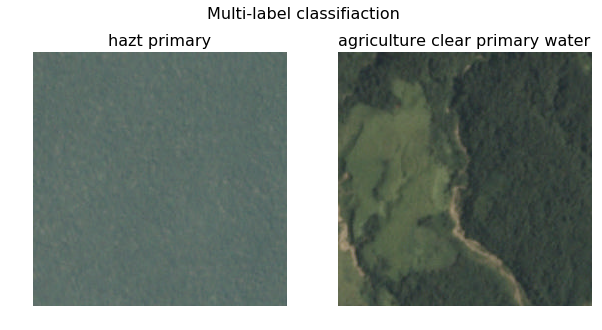

<Figure size 432x288 with 0 Axes>

In [12]:
list_paths = [f'{PATH}train-jpg/train_0.jpg', f'{PATH}train-jpg/train_1.jpg']
titles = ['hazt primary', 'agriculture clear primary water']
plots_from_files(list_paths,titles=titles,maintitle='Multi-label classifiaction')
plt.show()
plt.savefig('temp.png')

In [22]:
#from planet.py
def f2(preds, targs, start=0.17, end=0.24, step=0.01):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return max([fbeta_score(targs, (preds>th), 2, average='samples')
                    for th in np.arange(start,end,step)])

def opt_th(preds, targs, start=0.17, end=0.24, step=0.01):
    ths = np.arange(start,end,step)
    idx = np.argmax([fbeta_score(targs, (preds>th), 2, average='samples')
                for th in ths])
    return ths[idx]

def get_data(path, tfms, bs, n, cv_idx):
    val_idxs = get_cv_idxs(n, cv_idx)
    return ImageClassifierData.from_csv(path, 'train-jpg', f'{path}train_v2.csv', bs, tfms,
                                 suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

def get_data_zoom(f_model, path, sz, bs, n, cv_idx):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return get_data(path, tfms, bs, n, cv_idx)

def get_data_pad(f_model, path, sz, bs, n, cv_idx):
    transforms_pt = [RandomRotateZoom(9, 0.18, 0.1), RandomLighting(0.05, 0.1), RandomDihedral()]
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_pt, pad=sz//12)
    return get_data(path, tfms, bs, n, cv_idx)


In [28]:
metrics = [f2]
f_model = resnet34

In [29]:
label_csv = f'{PATH}train_v2.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [34]:
def get_data(sz, bs=64):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    data = ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, bs=bs, tfms=tfms, suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')
    return data

In [35]:
data = get_data(256)
data

In [36]:
x,y = next(iter(data.val_dl))

In [37]:
y


    1     0     0  ...      0     0     1
    0     0     0  ...      0     0     0
    1     0     0  ...      0     0     0
       ...          ⋱          ...       
    1     0     0  ...      0     0     1
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     1
[torch.cuda.FloatTensor of size 64x17 (GPU 0)]

In [38]:
list(zip(data.classes, y[0]))

[('agriculture', 1.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 1.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 0.0),
 ('haze', 0.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 0.0),
 ('selective_logging', 0.0),
 ('slash_burn', 0.0),
 ('water', 1.0)]

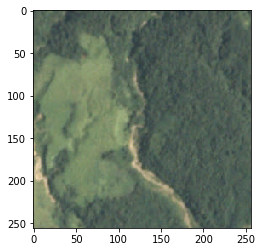

In [39]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4)

In [41]:
sz = 64
data = get_data(sz)

In [42]:
#what is the point of setting size to 64 then increasing by 30%?
data = data.resize(int(sz*1.3), 'tmp')

<p>Failed to display Jupyter Widget of type <code>HBox</code>.</p>
<p>
  If you're reading this message in the Jupyter Notebook or JupyterLab Notebook, it may mean
  that the widgets JavaScript is still loading. If this message persists, it
  likely means that the widgets JavaScript library is either not installed or
  not enabled. See the <a href="https://ipywidgets.readthedocs.io/en/stable/user_install.html">Jupyter
  Widgets Documentation</a> for setup instructions.
</p>
<p>
  If you're reading this message in another frontend (for example, a static
  rendering on GitHub or <a href="https://nbviewer.jupyter.org/">NBViewer</a>),
  it may mean that your frontend doesn't currently support widgets.
</p>

In [43]:
learn = ConvLearner.pretrained(f_model,data,metrics=metrics)

<p>Failed to display Jupyter Widget of type <code>HBox</code>.</p>
<p>
  If you're reading this message in the Jupyter Notebook or JupyterLab Notebook, it may mean
  that the widgets JavaScript is still loading. If this message persists, it
  likely means that the widgets JavaScript library is either not installed or
  not enabled. See the <a href="https://ipywidgets.readthedocs.io/en/stable/user_install.html">Jupyter
  Widgets Documentation</a> for setup instructions.
</p>
<p>
  If you're reading this message in another frontend (for example, a static
  rendering on GitHub or <a href="https://nbviewer.jupyter.org/">NBViewer</a>),
  it may mean that your frontend doesn't currently support widgets.
</p>

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.83]

  0%|          | 1/506 [00:00<01:46,  4.72it/s, loss=0.83]

  0%|          | 1/506 [00:00<02:03,  4.10it/s, loss=0.839]

  0%|          | 1/506 [00:00<02:18,  3.64it/s, loss=0.836]

  0%|          | 1/506 [00:00<02:35,  3.25it/s, loss=0.848]

  0%|          | 1/506 [00:00<02:49,  2.99it/s, loss=0.845]

  1%|          | 5/506 [00:00<00:33, 14.86it/s, loss=0.845]

  1%|          | 5/506 [00:00<00:36, 13.70it/s, loss=0.843]

  1%|          | 5/506 [00:00<00:40, 12.49it/s, loss=0.841]

  1%|          | 5/506 [00:00<00:43, 11.56it/s, loss=0.84] 

  1%|          | 5/506 [00:00<00:46, 10.78it/s, loss=0.837]

  2%|▏         | 9/506 [00:00<00:25, 19.30it/s, loss=0.837]

  2%|▏         | 9/506 [00:00<00:27, 18.07it/s, loss=0.837]

  2%|▏         | 9/506 [00:00<00:29, 17.08it/s, loss=0.838]

  2%|▏         | 9/506 [00:00<00:30, 16.14it/s, loss=0.837]

  2%|▏         | 9/506 [00:00<00:32, 15.23it/s, loss=0.837]

  3%|▎         | 13/506 [00:00<00:22, 21.94it/s, loss=0.837]

  3%|▎         | 13/506 [00:00<00:23, 20.88it/s, loss=0.835]

  3%|▎         | 13/506 [00:00<00:24, 19.93it/s, loss=0.835]

  3%|▎         | 13/506 [00:00<00:25, 19.11it/s, loss=0.835]

  3%|▎         | 13/506 [00:00<00:26, 18.32it/s, loss=0.836]

  3%|▎         | 17/506 [00:00<00:20, 23.91it/s, loss=0.836]

  3%|▎         | 17/506 [00:00<00:21, 22.95it/s, loss=0.836]

  3%|▎         | 17/506 [00:00<00:22, 21.91it/s, loss=0.836]

  3%|▎         | 17/506 [00:00<00:23, 20.97it/s, loss=0.837]

  4%|▍         | 20/506 [00:00<00:19, 24.61it/s, loss=0.837]

  4%|▍         | 20/506 [00:00<00:20, 23.65it/s, loss=0.836]

  4%|▍         | 20/506 [00:00<00:21, 22.85it/s, loss=0.837]

  4%|▍         | 20/506 [00:00<00:22, 22.06it/s, loss=0.836]

  4%|▍         | 20/506 [00:00<00:22, 21.28it/s, loss=0.835]

  5%|▍         | 24/506 [00:00<00:18, 25.49it/s, loss=0.835]

  5%|▍         | 24/506 [00:00<00:19, 24.61it/s, loss=0.834]

  5%|▍         | 24/506 [00:01<00:20, 23.79it/s, loss=0.834]

  5%|▍         | 24/506 [00:01<00:20, 23.16it/s, loss=0.835]

  5%|▍         | 24/506 [00:01<00:21, 22.55it/s, loss=0.834]

  6%|▌         | 28/506 [00:01<00:18, 26.23it/s, loss=0.834]

  6%|▌         | 28/506 [00:01<00:18, 25.46it/s, loss=0.834]

  6%|▌         | 28/506 [00:01<00:19, 24.73it/s, loss=0.834]

  6%|▌         | 28/506 [00:01<00:19, 23.98it/s, loss=0.837]

  6%|▌         | 31/506 [00:01<00:17, 26.50it/s, loss=0.837]

  6%|▌         | 31/506 [00:01<00:18, 25.81it/s, loss=0.836]

  6%|▌         | 31/506 [00:01<00:18, 25.19it/s, loss=0.836]

  6%|▌         | 31/506 [00:01<00:19, 24.58it/s, loss=0.836]

  6%|▌         | 31/506 [00:01<00:19, 23.93it/s, loss=0.836]

  7%|▋         | 35/506 [00:01<00:17, 26.99it/s, loss=0.836]

  7%|▋         | 35/506 [00:01<00:17, 26.32it/s, loss=0.835]

  7%|▋         | 35/506 [00:01<00:18, 25.65it/s, loss=0.835]

  7%|▋         | 35/506 [00:01<00:18, 25.05it/s, loss=0.835]

  8%|▊         | 38/506 [00:01<00:17, 27.16it/s, loss=0.835]

  8%|▊         | 38/506 [00:01<00:17, 26.59it/s, loss=0.836]

  8%|▊         | 38/506 [00:01<00:18, 25.98it/s, loss=0.835]

  8%|▊         | 38/506 [00:01<00:18, 25.39it/s, loss=0.835]

  8%|▊         | 38/506 [00:01<00:18, 24.83it/s, loss=0.835]

  8%|▊         | 42/506 [00:01<00:16, 27.40it/s, loss=0.835]

  8%|▊         | 42/506 [00:01<00:17, 26.82it/s, loss=0.834]

  8%|▊         | 42/506 [00:01<00:17, 26.27it/s, loss=0.835]

  8%|▊         | 42/506 [00:01<00:18, 25.70it/s, loss=0.834]

  9%|▉         | 45/506 [00:01<00:16, 27.49it/s, loss=0.834]

  9%|▉         | 45/506 [00:01<00:17, 26.92it/s, loss=0.835]

  9%|▉         | 45/506 [00:01<00:17, 26.42it/s, loss=0.835]

  9%|▉         | 45/506 [00:01<00:17, 25.92it/s, loss=0.834]

  9%|▉         | 48/506 [00:01<00:16, 27.62it/s, loss=0.834]

  9%|▉         | 48/506 [00:01<00:16, 27.26it/s, loss=0.834]

  9%|▉         | 48/506 [00:01<00:16, 27.06it/s, loss=0.834]

  9%|▉         | 48/506 [00:01<00:17, 26.87it/s, loss=0.834]

  9%|▉         | 48/506 [00:01<00:17, 26.69it/s, loss=0.834]

  9%|▉         | 48/506 [00:01<00:17, 26.51it/s, loss=0.833]

  9%|▉         | 48/506 [00:01<00:17, 26.33it/s, loss=0.834]

  9%|▉         | 48/506 [00:01<00:17, 26.16it/s, loss=0.835]

  9%|▉         | 48/506 [00:01<00:17, 25.98it/s, loss=0.835]

 11%|█         | 56/506 [00:01<00:14, 30.30it/s, loss=0.835]

 11%|█         | 56/506 [00:01<00:14, 30.11it/s, loss=0.836]

 11%|█         | 56/506 [00:01<00:15, 29.92it/s, loss=0.836]

 11%|█         | 56/506 [00:01<00:15, 29.72it/s, loss=0.837]

 11%|█         | 56/506 [00:01<00:15, 29.53it/s, loss=0.836]

 11%|█         | 56/506 [00:01<00:15, 29.34it/s, loss=0.837]

 11%|█         | 56/506 [00:01<00:15, 29.16it/s, loss=0.838]

 11%|█         | 56/506 [00:01<00:15, 28.97it/s, loss=0.838]

 11%|█         | 56/506 [00:01<00:15, 28.79it/s, loss=0.838]

 11%|█         | 56/506 [00:01<00:15, 28.61it/s, loss=0.839]

 13%|█▎        | 65/506 [00:01<00:13, 33.20it/s, loss=0.839]

 13%|█▎        | 65/506 [00:01<00:13, 33.00it/s, loss=0.839]

 13%|█▎        | 65/506 [00:01<00:13, 32.80it/s, loss=0.838]

 13%|█▎        | 65/506 [00:01<00:13, 32.60it/s, loss=0.838]

 13%|█▎        | 65/506 [00:02<00:13, 32.40it/s, loss=0.837]

 13%|█▎        | 65/506 [00:02<00:13, 32.20it/s, loss=0.837]

 13%|█▎        | 65/506 [00:02<00:13, 32.01it/s, loss=0.837]

 13%|█▎        | 65/506 [00:02<00:13, 31.82it/s, loss=0.838]

 13%|█▎        | 65/506 [00:02<00:13, 31.63it/s, loss=0.838]

 13%|█▎        | 65/506 [00:02<00:14, 31.44it/s, loss=0.837]

 15%|█▍        | 74/506 [00:02<00:12, 35.79it/s, loss=0.837]

 15%|█▍        | 74/506 [00:02<00:12, 35.58it/s, loss=0.837]

 15%|█▍        | 74/506 [00:02<00:12, 35.37it/s, loss=0.838]

 15%|█▍        | 74/506 [00:02<00:12, 35.16it/s, loss=0.837]

 15%|█▍        | 74/506 [00:02<00:12, 34.96it/s, loss=0.837]

 15%|█▍        | 74/506 [00:02<00:12, 34.76it/s, loss=0.837]

 15%|█▍        | 74/506 [00:02<00:12, 34.56it/s, loss=0.836]

 15%|█▍        | 74/506 [00:02<00:13, 31.80it/s, loss=0.835]

 16%|█▌        | 81/506 [00:02<00:12, 34.78it/s, loss=0.835]

 16%|█▌        | 81/506 [00:02<00:12, 34.33it/s, loss=0.835]

 16%|█▌        | 81/506 [00:02<00:12, 33.82it/s, loss=0.835]

 16%|█▌        | 81/506 [00:02<00:12, 33.37it/s, loss=0.835]

 16%|█▌        | 81/506 [00:02<00:12, 32.91it/s, loss=0.834]

 16%|█▌        | 81/506 [00:02<00:13, 32.51it/s, loss=0.834]

 16%|█▌        | 81/506 [00:02<00:13, 32.07it/s, loss=0.834]

 17%|█▋        | 87/506 [00:02<00:12, 34.42it/s, loss=0.834]

 17%|█▋        | 87/506 [00:02<00:12, 33.98it/s, loss=0.834]

 17%|█▋        | 87/506 [00:02<00:12, 33.58it/s, loss=0.835]

 17%|█▋        | 87/506 [00:02<00:12, 33.17it/s, loss=0.835]

 17%|█▋        | 87/506 [00:02<00:12, 32.80it/s, loss=0.835]

 17%|█▋        | 87/506 [00:02<00:12, 32.42it/s, loss=0.835]

 18%|█▊        | 92/506 [00:02<00:12, 34.26it/s, loss=0.835]

 18%|█▊        | 92/506 [00:02<00:12, 33.86it/s, loss=0.835]

 18%|█▊        | 92/506 [00:02<00:12, 33.42it/s, loss=0.835]

 18%|█▊        | 92/506 [00:02<00:12, 32.98it/s, loss=0.835]

 18%|█▊        | 92/506 [00:02<00:12, 32.64it/s, loss=0.835]

 18%|█▊        | 92/506 [00:02<00:12, 32.30it/s, loss=0.834]

 19%|█▉        | 97/506 [00:02<00:12, 34.03it/s, loss=0.834]

 19%|█▉        | 97/506 [00:02<00:12, 33.67it/s, loss=0.835]

 19%|█▉        | 97/506 [00:02<00:12, 33.31it/s, loss=0.835]

 19%|█▉        | 97/506 [00:02<00:12, 32.93it/s, loss=0.835]

 19%|█▉        | 97/506 [00:02<00:12, 32.58it/s, loss=0.836]

 20%|█▉        | 101/506 [00:02<00:11, 33.90it/s, loss=0.836]

 20%|█▉        | 101/506 [00:03<00:12, 33.58it/s, loss=0.836]

 20%|█▉        | 101/506 [00:03<00:12, 33.24it/s, loss=0.836]

 20%|█▉        | 101/506 [00:03<00:12, 32.85it/s, loss=0.837]

 20%|█▉        | 101/506 [00:03<00:12, 32.51it/s, loss=0.837]

 21%|██        | 105/506 [00:03<00:11, 33.77it/s, loss=0.837]

 21%|██        | 105/506 [00:03<00:12, 33.42it/s, loss=0.836]

 21%|██        | 105/506 [00:03<00:12, 33.10it/s, loss=0.836]

 21%|██        | 105/506 [00:03<00:12, 32.79it/s, loss=0.837]

 21%|██        | 105/506 [00:03<00:12, 32.47it/s, loss=0.837]

 22%|██▏       | 109/506 [00:03<00:11, 33.68it/s, loss=0.837]

 22%|██▏       | 109/506 [00:03<00:11, 33.36it/s, loss=0.837]

 22%|██▏       | 109/506 [00:03<00:12, 32.99it/s, loss=0.836]

 22%|██▏       | 109/506 [00:03<00:12, 32.67it/s, loss=0.837]

 22%|██▏       | 109/506 [00:03<00:12, 32.37it/s, loss=0.837]

 22%|██▏       | 113/506 [00:03<00:11, 33.54it/s, loss=0.837]

 22%|██▏       | 113/506 [00:03<00:11, 33.22it/s, loss=0.838]

 22%|██▏       | 113/506 [00:03<00:11, 32.90it/s, loss=0.838]

 22%|██▏       | 113/506 [00:03<00:12, 32.62it/s, loss=0.837]

 22%|██▏       | 113/506 [00:03<00:12, 32.34it/s, loss=0.837]

 23%|██▎       | 117/506 [00:03<00:11, 33.47it/s, loss=0.837]

 23%|██▎       | 117/506 [00:03<00:11, 33.21it/s, loss=0.836]

 23%|██▎       | 117/506 [00:03<00:11, 32.90it/s, loss=0.837]

 23%|██▎       | 117/506 [00:03<00:11, 32.62it/s, loss=0.837]

 23%|██▎       | 117/506 [00:03<00:12, 32.31it/s, loss=0.837]

 24%|██▍       | 121/506 [00:03<00:11, 33.40it/s, loss=0.837]

 24%|██▍       | 121/506 [00:03<00:11, 33.12it/s, loss=0.837]

 24%|██▍       | 121/506 [00:03<00:11, 32.87it/s, loss=0.837]

 24%|██▍       | 121/506 [00:03<00:11, 32.62it/s, loss=0.837]

 24%|██▍       | 121/506 [00:03<00:11, 32.36it/s, loss=0.837]

 25%|██▍       | 125/506 [00:03<00:11, 33.41it/s, loss=0.837]

 25%|██▍       | 125/506 [00:03<00:11, 33.15it/s, loss=0.838]

 25%|██▍       | 125/506 [00:03<00:11, 32.87it/s, loss=0.838]

 25%|██▍       | 125/506 [00:03<00:11, 32.59it/s, loss=0.838]

 25%|██▍       | 125/506 [00:03<00:11, 32.43it/s, loss=0.837]

 25%|██▌       | 129/506 [00:03<00:11, 33.47it/s, loss=0.837]

 25%|██▌       | 129/506 [00:03<00:11, 33.37it/s, loss=0.837]

 25%|██▌       | 129/506 [00:03<00:11, 33.27it/s, loss=0.837]

 25%|██▌       | 129/506 [00:03<00:11, 33.17it/s, loss=0.837]

 25%|██▌       | 129/506 [00:03<00:11, 33.06it/s, loss=0.837]

 25%|██▌       | 129/506 [00:03<00:11, 32.96it/s, loss=0.838]

 25%|██▌       | 129/506 [00:03<00:11, 32.87it/s, loss=0.838]

 25%|██▌       | 129/506 [00:03<00:11, 32.77it/s, loss=0.837]

 25%|██▌       | 129/506 [00:03<00:11, 32.67it/s, loss=0.837]

 25%|██▌       | 129/506 [00:03<00:11, 32.57it/s, loss=0.837]

 27%|██▋       | 138/506 [00:03<00:10, 34.84it/s, loss=0.837]

 27%|██▋       | 138/506 [00:03<00:10, 34.74it/s, loss=0.836]

 27%|██▋       | 138/506 [00:03<00:10, 34.64it/s, loss=0.836]

 27%|██▋       | 138/506 [00:03<00:10, 34.54it/s, loss=0.836]

 27%|██▋       | 138/506 [00:04<00:10, 34.43it/s, loss=0.836]

 27%|██▋       | 138/506 [00:04<00:10, 34.33it/s, loss=0.836]

 27%|██▋       | 138/506 [00:04<00:10, 34.24it/s, loss=0.836]

 27%|██▋       | 138/506 [00:04<00:10, 34.13it/s, loss=0.835]

 27%|██▋       | 138/506 [00:04<00:10, 34.03it/s, loss=0.835]

 27%|██▋       | 138/506 [00:04<00:10, 33.94it/s, loss=0.835]

 29%|██▉       | 147/506 [00:04<00:09, 36.15it/s, loss=0.835]

 29%|██▉       | 147/506 [00:04<00:09, 36.05it/s, loss=0.834]

 29%|██▉       | 147/506 [00:04<00:09, 35.94it/s, loss=0.834]

 29%|██▉       | 147/506 [00:04<00:10, 35.84it/s, loss=0.834]

 29%|██▉       | 147/506 [00:04<00:10, 35.74it/s, loss=0.834]

 29%|██▉       | 147/506 [00:04<00:10, 35.64it/s, loss=0.834]

 29%|██▉       | 147/506 [00:04<00:10, 35.53it/s, loss=0.834]

 29%|██▉       | 147/506 [00:04<00:10, 35.43it/s, loss=0.834]

 29%|██▉       | 147/506 [00:04<00:10, 35.33it/s, loss=0.833]

 29%|██▉       | 147/506 [00:04<00:10, 35.23it/s, loss=0.833]

 31%|███       | 156/506 [00:04<00:09, 37.39it/s, loss=0.833]

 31%|███       | 156/506 [00:04<00:09, 37.28it/s, loss=0.833]

 31%|███       | 156/506 [00:04<00:09, 37.17it/s, loss=0.832]

 31%|███       | 156/506 [00:04<00:09, 37.06it/s, loss=0.832]

 31%|███       | 156/506 [00:04<00:09, 36.96it/s, loss=0.831]

 31%|███       | 156/506 [00:04<00:09, 35.40it/s, loss=0.831]

 31%|███       | 156/506 [00:04<00:09, 35.12it/s, loss=0.831]

 31%|███       | 156/506 [00:04<00:10, 34.88it/s, loss=0.83] 

 32%|███▏      | 163/506 [00:04<00:09, 36.43it/s, loss=0.83]

 32%|███▏      | 163/506 [00:04<00:09, 36.20it/s, loss=0.83]

 32%|███▏      | 163/506 [00:04<00:09, 35.96it/s, loss=0.83]

 32%|███▏      | 163/506 [00:04<00:09, 35.73it/s, loss=0.83]

 32%|███▏      | 163/506 [00:04<00:09, 35.50it/s, loss=0.829]

 32%|███▏      | 163/506 [00:04<00:09, 35.26it/s, loss=0.829]

 32%|███▏      | 163/506 [00:04<00:09, 35.01it/s, loss=0.828]

 33%|███▎      | 169/506 [00:04<00:09, 36.29it/s, loss=0.828]

 33%|███▎      | 169/506 [00:04<00:09, 36.06it/s, loss=0.828]

 33%|███▎      | 169/506 [00:04<00:09, 35.83it/s, loss=0.828]

 33%|███▎      | 169/506 [00:04<00:09, 35.58it/s, loss=0.828]

 33%|███▎      | 169/506 [00:04<00:09, 35.31it/s, loss=0.827]

 33%|███▎      | 169/506 [00:04<00:09, 35.05it/s, loss=0.826]

 34%|███▍      | 174/506 [00:04<00:09, 36.08it/s, loss=0.826]

 34%|███▍      | 174/506 [00:04<00:09, 35.83it/s, loss=0.826]

 34%|███▍      | 174/506 [00:04<00:09, 35.60it/s, loss=0.827]

 34%|███▍      | 174/506 [00:04<00:09, 35.37it/s, loss=0.826]

 34%|███▍      | 174/506 [00:04<00:09, 35.14it/s, loss=0.826]

 34%|███▍      | 174/506 [00:04<00:09, 34.89it/s, loss=0.826]

 35%|███▌      | 179/506 [00:04<00:09, 35.88it/s, loss=0.826]

 35%|███▌      | 179/506 [00:05<00:09, 35.63it/s, loss=0.825]

 35%|███▌      | 179/506 [00:05<00:09, 35.40it/s, loss=0.825]

 35%|███▌      | 179/506 [00:05<00:09, 35.20it/s, loss=0.825]

 35%|███▌      | 179/506 [00:05<00:09, 34.95it/s, loss=0.825]

 36%|███▌      | 183/506 [00:05<00:09, 35.72it/s, loss=0.825]

 36%|███▌      | 183/506 [00:05<00:09, 35.47it/s, loss=0.824]

 36%|███▌      | 183/506 [00:05<00:09, 35.23it/s, loss=0.823]

 36%|███▌      | 183/506 [00:05<00:09, 35.01it/s, loss=0.822]

 36%|███▌      | 183/506 [00:05<00:09, 34.78it/s, loss=0.822]

 37%|███▋      | 187/506 [00:05<00:08, 35.53it/s, loss=0.822]

 37%|███▋      | 187/506 [00:05<00:09, 35.29it/s, loss=0.822]

 37%|███▋      | 187/506 [00:05<00:09, 35.07it/s, loss=0.822]

 37%|███▋      | 187/506 [00:05<00:09, 34.86it/s, loss=0.822]

 37%|███▋      | 187/506 [00:05<00:09, 34.62it/s, loss=0.822]

 38%|███▊      | 191/506 [00:05<00:08, 35.35it/s, loss=0.822]

 38%|███▊      | 191/506 [00:05<00:08, 35.15it/s, loss=0.821]

 38%|███▊      | 191/506 [00:05<00:09, 34.95it/s, loss=0.821]

 38%|███▊      | 191/506 [00:05<00:09, 34.75it/s, loss=0.821]

 38%|███▊      | 191/506 [00:05<00:09, 34.56it/s, loss=0.821]

 39%|███▊      | 195/506 [00:05<00:08, 35.26it/s, loss=0.821]

 39%|███▊      | 195/506 [00:05<00:08, 35.06it/s, loss=0.82] 

 39%|███▊      | 195/506 [00:05<00:08, 34.85it/s, loss=0.819]

 39%|███▊      | 195/506 [00:05<00:08, 34.68it/s, loss=0.819]

 39%|███▊      | 195/506 [00:05<00:09, 34.49it/s, loss=0.819]

 39%|███▉      | 199/506 [00:05<00:08, 35.18it/s, loss=0.819]

 39%|███▉      | 199/506 [00:05<00:08, 35.02it/s, loss=0.818]

 39%|███▉      | 199/506 [00:05<00:08, 34.82it/s, loss=0.818]

 39%|███▉      | 199/506 [00:05<00:08, 34.64it/s, loss=0.817]

 39%|███▉      | 199/506 [00:05<00:08, 34.48it/s, loss=0.817]

 40%|████      | 203/506 [00:05<00:08, 35.16it/s, loss=0.817]

 40%|████      | 203/506 [00:05<00:08, 34.97it/s, loss=0.816]

 40%|████      | 203/506 [00:05<00:08, 34.78it/s, loss=0.816]

 40%|████      | 203/506 [00:05<00:08, 34.58it/s, loss=0.815]

 40%|████      | 203/506 [00:05<00:08, 34.38it/s, loss=0.815]

 41%|████      | 207/506 [00:05<00:08, 35.04it/s, loss=0.815]

 41%|████      | 207/506 [00:05<00:08, 34.91it/s, loss=0.814]

 41%|████      | 207/506 [00:05<00:08, 34.82it/s, loss=0.814]

 41%|████      | 207/506 [00:05<00:08, 34.76it/s, loss=0.813]

 41%|████      | 207/506 [00:05<00:08, 34.68it/s, loss=0.813]

 41%|████      | 207/506 [00:05<00:08, 34.61it/s, loss=0.812]

 41%|████      | 207/506 [00:05<00:08, 34.55it/s, loss=0.811]

 41%|████      | 207/506 [00:06<00:08, 34.48it/s, loss=0.81] 

 41%|████      | 207/506 [00:06<00:08, 34.41it/s, loss=0.809]

 42%|████▏     | 215/506 [00:06<00:08, 35.73it/s, loss=0.809]

 42%|████▏     | 215/506 [00:06<00:08, 35.66it/s, loss=0.808]

 42%|████▏     | 215/506 [00:06<00:08, 35.59it/s, loss=0.808]

 42%|████▏     | 215/506 [00:06<00:08, 35.52it/s, loss=0.806]

 42%|████▏     | 215/506 [00:06<00:08, 35.44it/s, loss=0.805]

 42%|████▏     | 215/506 [00:06<00:08, 35.37it/s, loss=0.804]

 42%|████▏     | 215/506 [00:06<00:08, 35.30it/s, loss=0.803]

 42%|████▏     | 215/506 [00:06<00:08, 35.22it/s, loss=0.802]

 42%|████▏     | 215/506 [00:06<00:08, 35.15it/s, loss=0.801]

 42%|████▏     | 215/506 [00:06<00:08, 35.08it/s, loss=0.8]  

 44%|████▍     | 224/506 [00:06<00:07, 36.55it/s, loss=0.8]

 44%|████▍     | 224/506 [00:06<00:07, 36.48it/s, loss=0.799]

 44%|████▍     | 224/506 [00:06<00:07, 36.40it/s, loss=0.797]

 44%|████▍     | 224/506 [00:06<00:07, 36.33it/s, loss=0.797]

 44%|████▍     | 224/506 [00:06<00:07, 36.26it/s, loss=0.796]

 44%|████▍     | 224/506 [00:06<00:07, 36.19it/s, loss=0.795]

 44%|████▍     | 224/506 [00:06<00:07, 36.12it/s, loss=0.794]

 44%|████▍     | 224/506 [00:06<00:07, 36.05it/s, loss=0.793]

 44%|████▍     | 224/506 [00:06<00:07, 35.98it/s, loss=0.791]

 44%|████▍     | 224/506 [00:06<00:07, 35.91it/s, loss=0.79] 

 46%|████▌     | 233/506 [00:06<00:07, 37.35it/s, loss=0.79]

 46%|████▌     | 233/506 [00:06<00:07, 37.28it/s, loss=0.789]

 46%|████▌     | 233/506 [00:06<00:07, 37.21it/s, loss=0.788]

 46%|████▌     | 233/506 [00:06<00:07, 37.14it/s, loss=0.786]

 46%|████▌     | 233/506 [00:06<00:07, 37.07it/s, loss=0.784]

 46%|████▌     | 233/506 [00:06<00:07, 37.00it/s, loss=0.783]

 46%|████▌     | 233/506 [00:06<00:07, 36.92it/s, loss=0.782]

 46%|████▌     | 233/506 [00:06<00:07, 36.86it/s, loss=0.781]

 46%|████▌     | 233/506 [00:06<00:07, 35.84it/s, loss=0.78] 

 48%|████▊     | 241/506 [00:06<00:07, 37.06it/s, loss=0.78]

 48%|████▊     | 241/506 [00:06<00:07, 36.87it/s, loss=0.779]

 48%|████▊     | 241/506 [00:06<00:07, 36.69it/s, loss=0.777]

 48%|████▊     | 241/506 [00:06<00:07, 36.50it/s, loss=0.775]

 48%|████▊     | 241/506 [00:06<00:07, 36.32it/s, loss=0.774]

 48%|████▊     | 241/506 [00:06<00:07, 36.17it/s, loss=0.773]

 48%|████▊     | 241/506 [00:06<00:07, 36.01it/s, loss=0.771]

 49%|████▉     | 247/506 [00:06<00:07, 36.90it/s, loss=0.771]

 49%|████▉     | 247/506 [00:06<00:07, 36.71it/s, loss=0.77] 

 49%|████▉     | 247/506 [00:06<00:07, 36.53it/s, loss=0.768]

 49%|████▉     | 247/506 [00:06<00:07, 36.36it/s, loss=0.766]

 49%|████▉     | 247/506 [00:06<00:07, 36.20it/s, loss=0.764]

 49%|████▉     | 247/506 [00:06<00:07, 36.04it/s, loss=0.762]

 50%|████▉     | 252/506 [00:06<00:06, 36.75it/s, loss=0.762]

 50%|████▉     | 252/506 [00:06<00:06, 36.56it/s, loss=0.76] 

 50%|████▉     | 252/506 [00:06<00:06, 36.39it/s, loss=0.758]

 50%|████▉     | 252/506 [00:06<00:07, 36.22it/s, loss=0.757]

 50%|████▉     | 252/506 [00:06<00:07, 36.05it/s, loss=0.755]

 50%|████▉     | 252/506 [00:07<00:07, 35.89it/s, loss=0.753]

 51%|█████     | 257/506 [00:07<00:06, 36.59it/s, loss=0.753]

 51%|█████     | 257/506 [00:07<00:06, 36.43it/s, loss=0.751]

 51%|█████     | 257/506 [00:07<00:06, 36.25it/s, loss=0.749]

 51%|█████     | 257/506 [00:07<00:06, 36.08it/s, loss=0.747]

 51%|█████     | 257/506 [00:07<00:06, 35.93it/s, loss=0.745]

 52%|█████▏    | 261/506 [00:07<00:06, 36.48it/s, loss=0.745]

 52%|█████▏    | 261/506 [00:07<00:06, 36.33it/s, loss=0.743]

 52%|█████▏    | 261/506 [00:07<00:06, 36.17it/s, loss=0.74] 

 52%|█████▏    | 261/506 [00:07<00:06, 36.02it/s, loss=0.738]

 52%|█████▏    | 261/506 [00:07<00:06, 35.85it/s, loss=0.736]

 52%|█████▏    | 265/506 [00:07<00:06, 36.39it/s, loss=0.736]

 52%|█████▏    | 265/506 [00:07<00:06, 36.24it/s, loss=0.734]

 52%|█████▏    | 265/506 [00:07<00:06, 36.11it/s, loss=0.732]

 52%|█████▏    | 265/506 [00:07<00:06, 35.96it/s, loss=0.729]

 52%|█████▏    | 265/506 [00:07<00:06, 35.80it/s, loss=0.727]

 53%|█████▎    | 269/506 [00:07<00:06, 36.33it/s, loss=0.727]

 53%|█████▎    | 269/506 [00:07<00:06, 36.17it/s, loss=0.724]

 53%|█████▎    | 269/506 [00:07<00:06, 36.02it/s, loss=0.722]

 53%|█████▎    | 269/506 [00:07<00:06, 35.86it/s, loss=0.719]

 53%|█████▎    | 269/506 [00:07<00:06, 35.73it/s, loss=0.717]

 54%|█████▍    | 273/506 [00:07<00:06, 36.25it/s, loss=0.717]

 54%|█████▍    | 273/506 [00:07<00:06, 36.10it/s, loss=0.714]

 54%|█████▍    | 273/506 [00:07<00:06, 35.95it/s, loss=0.711]

 54%|█████▍    | 273/506 [00:07<00:06, 35.77it/s, loss=0.708]

 54%|█████▍    | 273/506 [00:07<00:06, 35.62it/s, loss=0.705]

 55%|█████▍    | 277/506 [00:07<00:06, 36.13it/s, loss=0.705]

 55%|█████▍    | 277/506 [00:07<00:06, 36.00it/s, loss=0.702]

 55%|█████▍    | 277/506 [00:07<00:06, 35.85it/s, loss=0.699]

 55%|█████▍    | 277/506 [00:07<00:06, 35.71it/s, loss=0.696]

 55%|█████▍    | 277/506 [00:07<00:06, 35.56it/s, loss=0.693]

 56%|█████▌    | 281/506 [00:07<00:06, 36.07it/s, loss=0.693]

 56%|█████▌    | 281/506 [00:07<00:06, 35.93it/s, loss=0.69] 

 56%|█████▌    | 281/506 [00:07<00:06, 35.79it/s, loss=0.687]

 56%|█████▌    | 281/506 [00:07<00:06, 35.66it/s, loss=0.684]

 56%|█████▌    | 281/506 [00:07<00:06, 35.52it/s, loss=0.681]

 56%|█████▋    | 285/506 [00:07<00:06, 36.02it/s, loss=0.681]

 56%|█████▋    | 285/506 [00:07<00:06, 35.88it/s, loss=0.678]

 56%|█████▋    | 285/506 [00:07<00:06, 35.74it/s, loss=0.674]

 56%|█████▋    | 285/506 [00:08<00:06, 35.61it/s, loss=0.671]

 56%|█████▋    | 285/506 [00:08<00:06, 35.51it/s, loss=0.667]

 57%|█████▋    | 289/506 [00:08<00:06, 36.00it/s, loss=0.667]

 57%|█████▋    | 289/506 [00:08<00:06, 35.94it/s, loss=0.664]

 57%|█████▋    | 289/506 [00:08<00:06, 35.89it/s, loss=0.66] 

 57%|█████▋    | 289/506 [00:08<00:06, 35.84it/s, loss=0.657]

 57%|█████▋    | 289/506 [00:08<00:06, 35.79it/s, loss=0.652]

 57%|█████▋    | 289/506 [00:08<00:06, 35.73it/s, loss=0.649]

 57%|█████▋    | 289/506 [00:08<00:06, 35.68it/s, loss=0.645]

 57%|█████▋    | 289/506 [00:08<00:06, 35.63it/s, loss=0.641]

 57%|█████▋    | 289/506 [00:08<00:06, 35.57it/s, loss=0.638]

 57%|█████▋    | 289/506 [00:08<00:06, 35.52it/s, loss=0.634]

 59%|█████▉    | 298/506 [00:08<00:05, 36.62it/s, loss=0.634]

 59%|█████▉    | 298/506 [00:08<00:05, 36.57it/s, loss=0.629]

 59%|█████▉    | 298/506 [00:08<00:05, 36.51it/s, loss=0.625]

 59%|█████▉    | 298/506 [00:08<00:05, 36.46it/s, loss=0.62] 

 59%|█████▉    | 298/506 [00:08<00:05, 36.40it/s, loss=0.616]

 59%|█████▉    | 298/506 [00:08<00:05, 36.35it/s, loss=0.612]

 59%|█████▉    | 298/506 [00:08<00:05, 36.29it/s, loss=0.608]

 59%|█████▉    | 298/506 [00:08<00:05, 36.24it/s, loss=0.604]

 59%|█████▉    | 298/506 [00:08<00:05, 36.18it/s, loss=0.599]

 59%|█████▉    | 298/506 [00:08<00:05, 36.13it/s, loss=0.594]

 61%|██████    | 307/506 [00:08<00:05, 37.22it/s, loss=0.594]

 61%|██████    | 307/506 [00:08<00:05, 37.17it/s, loss=0.589]

 61%|██████    | 307/506 [00:08<00:05, 37.11it/s, loss=0.584]

 61%|██████    | 307/506 [00:08<00:05, 37.05it/s, loss=0.58] 

 61%|██████    | 307/506 [00:08<00:05, 37.00it/s, loss=0.574]

 61%|██████    | 307/506 [00:08<00:05, 36.95it/s, loss=0.57] 

 61%|██████    | 307/506 [00:08<00:05, 36.89it/s, loss=0.565]

 61%|██████    | 307/506 [00:08<00:05, 36.84it/s, loss=0.56] 

 61%|██████    | 307/506 [00:08<00:05, 36.78it/s, loss=0.554]

 61%|██████    | 307/506 [00:08<00:05, 36.73it/s, loss=0.549]

 62%|██████▏   | 316/506 [00:08<00:05, 37.80it/s, loss=0.549]

 62%|██████▏   | 316/506 [00:08<00:05, 37.75it/s, loss=0.544]

 62%|██████▏   | 316/506 [00:08<00:05, 37.69it/s, loss=0.539]

 62%|██████▏   | 316/506 [00:08<00:05, 37.64it/s, loss=0.533]

 62%|██████▏   | 316/506 [00:08<00:05, 37.58it/s, loss=0.528]

 62%|██████▏   | 316/506 [00:08<00:05, 36.80it/s, loss=0.523]

 62%|██████▏   | 316/506 [00:08<00:05, 36.67it/s, loss=0.518]

 62%|██████▏   | 316/506 [00:08<00:05, 36.53it/s, loss=0.512]

 64%|██████▍   | 323/506 [00:08<00:04, 37.33it/s, loss=0.512]

 64%|██████▍   | 323/506 [00:08<00:04, 37.18it/s, loss=0.507]

 64%|██████▍   | 323/506 [00:08<00:04, 37.04it/s, loss=0.502]

 64%|██████▍   | 323/506 [00:08<00:04, 36.93it/s, loss=0.496]

 64%|██████▍   | 323/506 [00:08<00:04, 36.78it/s, loss=0.49] 

 64%|██████▍   | 323/506 [00:08<00:04, 36.63it/s, loss=0.484]

 64%|██████▍   | 323/506 [00:08<00:05, 36.50it/s, loss=0.479]

 65%|██████▌   | 329/506 [00:08<00:04, 37.17it/s, loss=0.479]

 65%|██████▌   | 329/506 [00:08<00:04, 37.03it/s, loss=0.473]

 65%|██████▌   | 329/506 [00:08<00:04, 36.90it/s, loss=0.469]

 65%|██████▌   | 329/506 [00:08<00:04, 36.77it/s, loss=0.464]

 65%|██████▌   | 329/506 [00:08<00:04, 36.65it/s, loss=0.459]

 65%|██████▌   | 329/506 [00:09<00:04, 36.51it/s, loss=0.454]

 66%|██████▌   | 334/506 [00:09<00:04, 37.06it/s, loss=0.454]

 66%|██████▌   | 334/506 [00:09<00:04, 36.91it/s, loss=0.448]

 66%|██████▌   | 334/506 [00:09<00:04, 36.77it/s, loss=0.444]

 66%|██████▌   | 334/506 [00:09<00:04, 36.64it/s, loss=0.439]

 66%|██████▌   | 334/506 [00:09<00:04, 36.52it/s, loss=0.434]

 66%|██████▌   | 334/506 [00:09<00:04, 36.40it/s, loss=0.429]

 67%|██████▋   | 339/506 [00:09<00:04, 36.93it/s, loss=0.429]

 67%|██████▋   | 339/506 [00:09<00:04, 36.81it/s, loss=0.424]

 67%|██████▋   | 339/506 [00:09<00:04, 36.68it/s, loss=0.42] 

 67%|██████▋   | 339/506 [00:09<00:04, 36.58it/s, loss=0.415]

 67%|██████▋   | 339/506 [00:09<00:04, 36.44it/s, loss=0.411]

 68%|██████▊   | 343/506 [00:09<00:04, 36.87it/s, loss=0.411]

 68%|██████▊   | 343/506 [00:09<00:04, 36.74it/s, loss=0.407]

 68%|██████▊   | 343/506 [00:09<00:04, 36.61it/s, loss=0.403]

 68%|██████▊   | 343/506 [00:09<00:04, 36.49it/s, loss=0.398]

 68%|██████▊   | 343/506 [00:09<00:04, 36.38it/s, loss=0.394]

 69%|██████▊   | 347/506 [00:09<00:04, 36.80it/s, loss=0.394]

 69%|██████▊   | 347/506 [00:09<00:04, 36.68it/s, loss=0.39] 

 69%|██████▊   | 347/506 [00:09<00:04, 36.55it/s, loss=0.386]

 69%|██████▊   | 347/506 [00:09<00:04, 36.41it/s, loss=0.382]

 69%|██████▊   | 347/506 [00:09<00:04, 36.28it/s, loss=0.378]

 69%|██████▉   | 351/506 [00:09<00:04, 36.70it/s, loss=0.378]

 69%|██████▉   | 351/506 [00:09<00:04, 36.58it/s, loss=0.374]

 69%|██████▉   | 351/506 [00:09<00:04, 36.47it/s, loss=0.37] 

 69%|██████▉   | 351/506 [00:09<00:04, 36.34it/s, loss=0.366]

 69%|██████▉   | 351/506 [00:09<00:04, 36.22it/s, loss=0.363]

 70%|███████   | 355/506 [00:09<00:04, 36.63it/s, loss=0.363]

 70%|███████   | 355/506 [00:09<00:04, 36.52it/s, loss=0.359]

 70%|███████   | 355/506 [00:09<00:04, 36.41it/s, loss=0.354]

 70%|███████   | 355/506 [00:09<00:04, 36.29it/s, loss=0.351]

 70%|███████   | 355/506 [00:09<00:04, 36.17it/s, loss=0.346]

 71%|███████   | 359/506 [00:09<00:04, 36.57it/s, loss=0.346]

 71%|███████   | 359/506 [00:09<00:04, 36.47it/s, loss=0.343]

 71%|███████   | 359/506 [00:09<00:04, 36.35it/s, loss=0.34] 

 71%|███████   | 359/506 [00:09<00:04, 36.25it/s, loss=0.337]

 71%|███████   | 359/506 [00:09<00:04, 36.15it/s, loss=0.333]

 72%|███████▏  | 363/506 [00:09<00:03, 36.55it/s, loss=0.333]

 72%|███████▏  | 363/506 [00:09<00:03, 36.43it/s, loss=0.331]

 72%|███████▏  | 363/506 [00:09<00:03, 36.31it/s, loss=0.327]

 72%|███████▏  | 363/506 [00:10<00:03, 36.19it/s, loss=0.324]

 72%|███████▏  | 363/506 [00:10<00:03, 36.08it/s, loss=0.32] 

 73%|███████▎  | 367/506 [00:10<00:03, 36.47it/s, loss=0.32]

 73%|███████▎  | 367/506 [00:10<00:03, 36.37it/s, loss=0.317]

 73%|███████▎  | 367/506 [00:10<00:03, 36.32it/s, loss=0.314]

 73%|███████▎  | 367/506 [00:10<00:03, 36.28it/s, loss=0.312]

 73%|███████▎  | 367/506 [00:10<00:03, 36.23it/s, loss=0.309]

 73%|███████▎  | 367/506 [00:10<00:03, 36.19it/s, loss=0.306]

 73%|███████▎  | 367/506 [00:10<00:03, 36.15it/s, loss=0.304]

 73%|███████▎  | 367/506 [00:10<00:03, 36.10it/s, loss=0.3]  

 74%|███████▍  | 374/506 [00:10<00:03, 36.79it/s, loss=0.3]

 74%|███████▍  | 374/506 [00:10<00:03, 36.75it/s, loss=0.298]

 74%|███████▍  | 374/506 [00:10<00:03, 36.70it/s, loss=0.295]

 74%|███████▍  | 374/506 [00:10<00:03, 36.66it/s, loss=0.292]

 74%|███████▍  | 374/506 [00:10<00:03, 36.61it/s, loss=0.29] 

 74%|███████▍  | 374/506 [00:10<00:03, 36.57it/s, loss=0.287]

 74%|███████▍  | 374/506 [00:10<00:03, 36.52it/s, loss=0.284]

 74%|███████▍  | 374/506 [00:10<00:03, 36.48it/s, loss=0.282]

 74%|███████▍  | 374/506 [00:10<00:03, 36.44it/s, loss=0.279]

 74%|███████▍  | 374/506 [00:10<00:03, 36.39it/s, loss=0.277]

 76%|███████▌  | 383/506 [00:10<00:03, 37.27it/s, loss=0.277]

 76%|███████▌  | 383/506 [00:10<00:03, 37.22it/s, loss=0.275]

 76%|███████▌  | 383/506 [00:10<00:03, 37.18it/s, loss=0.273]

 76%|███████▌  | 383/506 [00:10<00:03, 37.14it/s, loss=0.271]

 76%|███████▌  | 383/506 [00:10<00:03, 37.09it/s, loss=0.269]

 76%|███████▌  | 383/506 [00:10<00:03, 37.05it/s, loss=0.268]

 76%|███████▌  | 383/506 [00:10<00:03, 37.01it/s, loss=0.265]

 76%|███████▌  | 383/506 [00:10<00:03, 36.96it/s, loss=0.263]

 76%|███████▌  | 383/506 [00:10<00:03, 36.92it/s, loss=0.262]

 76%|███████▌  | 383/506 [00:10<00:03, 36.88it/s, loss=0.259]

 77%|███████▋  | 392/506 [00:10<00:03, 37.74it/s, loss=0.259]

 77%|███████▋  | 392/506 [00:10<00:03, 37.70it/s, loss=0.258]

 77%|███████▋  | 392/506 [00:10<00:03, 37.65it/s, loss=0.256]

 77%|███████▋  | 392/506 [00:10<00:03, 37.61it/s, loss=0.255]

 77%|███████▋  | 392/506 [00:10<00:03, 37.56it/s, loss=0.252]

 77%|███████▋  | 392/506 [00:10<00:03, 37.52it/s, loss=0.251]

 77%|███████▋  | 392/506 [00:10<00:03, 37.48it/s, loss=0.249]

 77%|███████▋  | 392/506 [00:10<00:03, 37.43it/s, loss=0.247]

 77%|███████▋  | 392/506 [00:10<00:03, 37.39it/s, loss=0.245]

 77%|███████▋  | 392/506 [00:10<00:03, 36.73it/s, loss=0.244]

 79%|███████▉  | 401/506 [00:10<00:02, 37.57it/s, loss=0.244]

 79%|███████▉  | 401/506 [00:10<00:02, 37.46it/s, loss=0.242]

 79%|███████▉  | 401/506 [00:10<00:02, 37.34it/s, loss=0.241]

 79%|███████▉  | 401/506 [00:10<00:02, 37.22it/s, loss=0.239]

 79%|███████▉  | 401/506 [00:10<00:02, 37.12it/s, loss=0.239]

 79%|███████▉  | 401/506 [00:10<00:02, 37.03it/s, loss=0.237]

 79%|███████▉  | 401/506 [00:10<00:02, 36.93it/s, loss=0.236]

 80%|████████  | 407/506 [00:10<00:02, 37.47it/s, loss=0.236]

 80%|████████  | 407/506 [00:10<00:02, 37.36it/s, loss=0.235]

 80%|████████  | 407/506 [00:10<00:02, 37.26it/s, loss=0.234]

 80%|████████  | 407/506 [00:10<00:02, 37.15it/s, loss=0.233]

 80%|████████  | 407/506 [00:10<00:02, 37.06it/s, loss=0.231]

 80%|████████  | 407/506 [00:11<00:02, 36.95it/s, loss=0.23] 

 81%|████████▏ | 412/506 [00:11<00:02, 37.40it/s, loss=0.23]

 81%|████████▏ | 412/506 [00:11<00:02, 37.29it/s, loss=0.229]

 81%|████████▏ | 412/506 [00:11<00:02, 37.18it/s, loss=0.228]

 81%|████████▏ | 412/506 [00:11<00:02, 37.08it/s, loss=0.227]

 81%|████████▏ | 412/506 [00:11<00:02, 36.97it/s, loss=0.225]

 81%|████████▏ | 412/506 [00:11<00:02, 36.87it/s, loss=0.225]

 82%|████████▏ | 417/506 [00:11<00:02, 37.31it/s, loss=0.225]

 82%|████████▏ | 417/506 [00:11<00:02, 37.20it/s, loss=0.223]

 82%|████████▏ | 417/506 [00:11<00:02, 37.10it/s, loss=0.222]

 82%|████████▏ | 417/506 [00:11<00:02, 36.99it/s, loss=0.222]

 82%|████████▏ | 417/506 [00:11<00:02, 36.88it/s, loss=0.22] 

 83%|████████▎ | 421/506 [00:11<00:02, 37.23it/s, loss=0.22]

 83%|████████▎ | 421/506 [00:11<00:02, 37.14it/s, loss=0.219]

 83%|████████▎ | 421/506 [00:11<00:02, 37.03it/s, loss=0.218]

 83%|████████▎ | 421/506 [00:11<00:02, 36.93it/s, loss=0.218]

 83%|████████▎ | 421/506 [00:11<00:02, 36.83it/s, loss=0.216]

 84%|████████▍ | 425/506 [00:11<00:02, 37.17it/s, loss=0.216]

 84%|████████▍ | 425/506 [00:11<00:02, 37.07it/s, loss=0.216]

 84%|████████▍ | 425/506 [00:11<00:02, 36.97it/s, loss=0.215]

 84%|████████▍ | 425/506 [00:11<00:02, 36.88it/s, loss=0.214]

 84%|████████▍ | 425/506 [00:11<00:02, 36.78it/s, loss=0.214]

 85%|████████▍ | 429/506 [00:11<00:02, 37.12it/s, loss=0.214]

 85%|████████▍ | 429/506 [00:11<00:02, 37.01it/s, loss=0.213]

 85%|████████▍ | 429/506 [00:11<00:02, 36.89it/s, loss=0.213]

 85%|████████▍ | 429/506 [00:11<00:02, 36.79it/s, loss=0.213]

 85%|████████▍ | 429/506 [00:11<00:02, 36.69it/s, loss=0.212]

 86%|████████▌ | 433/506 [00:11<00:01, 37.03it/s, loss=0.212]

 86%|████████▌ | 433/506 [00:11<00:01, 36.92it/s, loss=0.212]

 86%|████████▌ | 433/506 [00:11<00:01, 36.82it/s, loss=0.211]

 86%|████████▌ | 433/506 [00:11<00:01, 36.72it/s, loss=0.21] 

 86%|████████▌ | 433/506 [00:11<00:01, 36.62it/s, loss=0.209]

 86%|████████▋ | 437/506 [00:11<00:01, 36.95it/s, loss=0.209]

 86%|████████▋ | 437/506 [00:11<00:01, 36.86it/s, loss=0.208]

 86%|████████▋ | 437/506 [00:11<00:01, 36.76it/s, loss=0.208]

 86%|████████▋ | 437/506 [00:11<00:01, 36.65it/s, loss=0.208]

 86%|████████▋ | 437/506 [00:11<00:01, 36.55it/s, loss=0.207]

 87%|████████▋ | 441/506 [00:11<00:01, 36.88it/s, loss=0.207]

 87%|████████▋ | 441/506 [00:11<00:01, 36.79it/s, loss=0.206]

 87%|████████▋ | 441/506 [00:12<00:01, 36.69it/s, loss=0.206]

 87%|████████▋ | 441/506 [00:12<00:01, 36.59it/s, loss=0.206]

 87%|████████▋ | 441/506 [00:12<00:01, 36.50it/s, loss=0.206]

 88%|████████▊ | 445/506 [00:12<00:01, 36.82it/s, loss=0.206]

 88%|████████▊ | 445/506 [00:12<00:01, 36.73it/s, loss=0.204]

 88%|████████▊ | 445/506 [00:12<00:01, 36.63it/s, loss=0.204]

 88%|████████▊ | 445/506 [00:12<00:01, 36.54it/s, loss=0.204]

 88%|████████▊ | 445/506 [00:12<00:01, 36.49it/s, loss=0.204]

 89%|████████▊ | 449/506 [00:12<00:01, 36.82it/s, loss=0.204]

 89%|████████▊ | 449/506 [00:12<00:01, 36.78it/s, loss=0.203]

 89%|████████▊ | 449/506 [00:12<00:01, 36.74it/s, loss=0.204]

 89%|████████▊ | 449/506 [00:12<00:01, 36.71it/s, loss=0.204]

 89%|████████▊ | 449/506 [00:12<00:01, 36.67it/s, loss=0.204]

 89%|████████▊ | 449/506 [00:12<00:01, 36.64it/s, loss=0.204]

 89%|████████▊ | 449/506 [00:12<00:01, 36.60it/s, loss=0.205]

 89%|████████▊ | 449/506 [00:12<00:01, 36.57it/s, loss=0.205]

 89%|████████▊ | 449/506 [00:12<00:01, 36.53it/s, loss=0.205]

 89%|████████▊ | 449/506 [00:12<00:01, 36.50it/s, loss=0.206]

 91%|█████████ | 458/506 [00:12<00:01, 37.23it/s, loss=0.206]

 91%|█████████ | 458/506 [00:12<00:01, 37.19it/s, loss=0.206]

 91%|█████████ | 458/506 [00:12<00:01, 37.16it/s, loss=0.206]

 91%|█████████ | 458/506 [00:12<00:01, 37.12it/s, loss=0.207]

 91%|█████████ | 458/506 [00:12<00:01, 37.09it/s, loss=0.207]

 91%|█████████ | 458/506 [00:12<00:01, 37.05it/s, loss=0.206]

 91%|█████████ | 458/506 [00:12<00:01, 37.02it/s, loss=0.206]

 91%|█████████ | 458/506 [00:12<00:01, 36.98it/s, loss=0.206]

 91%|█████████ | 458/506 [00:12<00:01, 36.95it/s, loss=0.207]

 91%|█████████ | 458/506 [00:12<00:01, 36.91it/s, loss=0.207]

 92%|█████████▏| 467/506 [00:12<00:01, 37.64it/s, loss=0.207]

 92%|█████████▏| 467/506 [00:12<00:01, 37.60it/s, loss=0.207]

 92%|█████████▏| 467/506 [00:12<00:01, 37.56it/s, loss=0.207]

 92%|█████████▏| 467/506 [00:12<00:01, 37.53it/s, loss=0.206]

 92%|█████████▏| 467/506 [00:12<00:01, 37.49it/s, loss=0.206]

 92%|█████████▏| 467/506 [00:12<00:01, 37.46it/s, loss=0.205]

 92%|█████████▏| 467/506 [00:12<00:01, 37.42it/s, loss=0.205]

 92%|█████████▏| 467/506 [00:12<00:01, 37.39it/s, loss=0.205]

 92%|█████████▏| 467/506 [00:12<00:01, 37.35it/s, loss=0.206]

 92%|█████████▏| 467/506 [00:12<00:01, 37.32it/s, loss=0.205]

 94%|█████████▍| 476/506 [00:12<00:00, 38.03it/s, loss=0.205]

 94%|█████████▍| 476/506 [00:12<00:00, 38.00it/s, loss=0.205]

 94%|█████████▍| 476/506 [00:12<00:00, 37.96it/s, loss=0.205]

 94%|█████████▍| 476/506 [00:12<00:00, 37.92it/s, loss=0.206]

 94%|█████████▍| 476/506 [00:12<00:00, 37.89it/s, loss=0.205]

 94%|█████████▍| 476/506 [00:12<00:00, 37.35it/s, loss=0.205]

 94%|█████████▍| 476/506 [00:12<00:00, 37.26it/s, loss=0.205]

 94%|█████████▍| 476/506 [00:12<00:00, 37.17it/s, loss=0.204]

 95%|█████████▌| 483/506 [00:12<00:00, 37.71it/s, loss=0.204]

 95%|█████████▌| 483/506 [00:12<00:00, 37.63it/s, loss=0.204]

 95%|█████████▌| 483/506 [00:12<00:00, 37.53it/s, loss=0.204]

 95%|█████████▌| 483/506 [00:12<00:00, 37.43it/s, loss=0.204]

 95%|█████████▌| 483/506 [00:12<00:00, 37.33it/s, loss=0.204]

 95%|█████████▌| 483/506 [00:12<00:00, 37.25it/s, loss=0.203]

 95%|█████████▌| 483/506 [00:13<00:00, 37.15it/s, loss=0.204]

 97%|█████████▋| 489/506 [00:13<00:00, 37.61it/s, loss=0.204]

 97%|█████████▋| 489/506 [00:13<00:00, 37.52it/s, loss=0.204]

 97%|█████████▋| 489/506 [00:13<00:00, 37.43it/s, loss=0.204]

 97%|█████████▋| 489/506 [00:13<00:00, 37.39it/s, loss=0.204]

 97%|█████████▋| 489/506 [00:13<00:00, 37.35it/s, loss=0.206]

 97%|█████████▋| 489/506 [00:13<00:00, 37.32it/s, loss=0.206]

 98%|█████████▊| 494/506 [00:13<00:00, 37.70it/s, loss=0.206]

 98%|█████████▊| 494/506 [00:13<00:00, 37.66it/s, loss=0.207]

 98%|█████████▊| 494/506 [00:13<00:00, 37.63it/s, loss=0.207]

 98%|█████████▊| 494/506 [00:13<00:00, 37.59it/s, loss=0.207]

 98%|█████████▊| 494/506 [00:13<00:00, 37.56it/s, loss=0.208]

 98%|█████████▊| 494/506 [00:13<00:00, 37.53it/s, loss=0.208]

 98%|█████████▊| 494/506 [00:13<00:00, 37.49it/s, loss=0.207]

 98%|█████████▊| 494/506 [00:13<00:00, 37.46it/s, loss=0.207]

 98%|█████████▊| 494/506 [00:13<00:00, 37.43it/s, loss=0.207]

 98%|█████████▊| 494/506 [00:13<00:00, 37.39it/s, loss=0.209]

 99%|█████████▉| 503/506 [00:13<00:00, 38.07it/s, loss=0.209]

 99%|█████████▉| 503/506 [00:13<00:00, 38.04it/s, loss=0.21] 

 99%|█████████▉| 503/506 [00:13<00:00, 38.00it/s, loss=0.212]

 99%|█████████▉| 503/506 [00:13<00:00, 37.97it/s, loss=0.216]

epoch      trn_loss   val_loss   f2         
    0      0.216422   0.279312   0.802028  



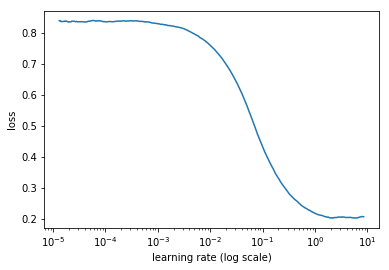

In [45]:
lrf=learn.lr_find()
learn.sched.plot()

In [46]:
lr = 0.2

In [47]:
learn.fit(lr, n_cycle=3, cycle_len=1, cycle_mult=2)

<p>Failed to display Jupyter Widget of type <code>HBox</code>.</p>
<p>
  If you're reading this message in the Jupyter Notebook or JupyterLab Notebook, it may mean
  that the widgets JavaScript is still loading. If this message persists, it
  likely means that the widgets JavaScript library is either not installed or
  not enabled. See the <a href="https://ipywidgets.readthedocs.io/en/stable/user_install.html">Jupyter
  Widgets Documentation</a> for setup instructions.
</p>
<p>
  If you're reading this message in another frontend (for example, a static
  rendering on GitHub or <a href="https://nbviewer.jupyter.org/">NBViewer</a>),
  it may mean that your frontend doesn't currently support widgets.
</p>

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.829]

  0%|          | 1/506 [00:00<01:37,  5.19it/s, loss=0.829]

  0%|          | 1/506 [00:00<01:52,  4.49it/s, loss=0.833]

  0%|          | 1/506 [00:00<02:09,  3.90it/s, loss=0.836]

  0%|          | 1/506 [00:00<02:29,  3.37it/s, loss=0.839]

  1%|          | 4/506 [00:00<00:37, 13.38it/s, loss=0.839]

  1%|          | 4/506 [00:00<00:41, 12.02it/s, loss=0.843]

  1%|          | 4/506 [00:00<00:45, 11.11it/s, loss=0.845]

  1%|          | 4/506 [00:00<00:48, 10.25it/s, loss=0.845]

  1%|          | 4/506 [00:00<00:53,  9.45it/s, loss=0.842]

  2%|▏         | 8/506 [00:00<00:26, 18.81it/s, loss=0.842]

  2%|▏         | 8/506 [00:00<00:28, 17.53it/s, loss=0.842]

  2%|▏         | 8/506 [00:00<00:30, 16.24it/s, loss=0.845]

  2%|▏         | 8/506 [00:00<00:32, 15.33it/s, loss=0.84] 

  2%|▏         | 8/506 [00:00<00:34, 14.47it/s, loss=0.838]

  2%|▏         | 12/506 [00:00<00:22, 21.64it/s, loss=0.838]

  2%|▏         | 12/506 [00:00<00:24, 20.52it/s, loss=0.837]

  2%|▏         | 12/506 [00:00<00:25, 19.34it/s, loss=0.835]

  2%|▏         | 12/506 [00:00<00:26, 18.48it/s, loss=0.837]

  2%|▏         | 12/506 [00:00<00:27, 17.65it/s, loss=0.838]

  3%|▎         | 16/506 [00:00<00:20, 23.47it/s, loss=0.838]

  3%|▎         | 16/506 [00:00<00:21, 22.54it/s, loss=0.84] 

  3%|▎         | 16/506 [00:00<00:22, 21.55it/s, loss=0.839]

  3%|▎         | 16/506 [00:00<00:23, 20.59it/s, loss=0.839]

  3%|▎         | 16/506 [00:00<00:24, 19.77it/s, loss=0.839]

  4%|▍         | 20/506 [00:00<00:19, 24.68it/s, loss=0.839]

  4%|▍         | 20/506 [00:00<00:20, 23.73it/s, loss=0.838]

  4%|▍         | 20/506 [00:00<00:21, 22.96it/s, loss=0.836]

  4%|▍         | 20/506 [00:00<00:21, 22.11it/s, loss=0.837]

  4%|▍         | 20/506 [00:00<00:22, 21.38it/s, loss=0.837]

  5%|▍         | 24/506 [00:00<00:18, 25.61it/s, loss=0.837]

  5%|▍         | 24/506 [00:00<00:19, 24.84it/s, loss=0.837]

  5%|▍         | 24/506 [00:00<00:20, 24.07it/s, loss=0.835]

  5%|▍         | 24/506 [00:01<00:20, 23.27it/s, loss=0.835]

  5%|▍         | 24/506 [00:01<00:21, 22.66it/s, loss=0.829]

  6%|▌         | 28/506 [00:01<00:18, 26.40it/s, loss=0.829]

  6%|▌         | 28/506 [00:01<00:18, 25.61it/s, loss=0.82] 

  6%|▌         | 28/506 [00:01<00:19, 24.83it/s, loss=0.811]

  6%|▌         | 28/506 [00:01<00:19, 24.09it/s, loss=0.8]  

  6%|▌         | 31/506 [00:01<00:17, 26.64it/s, loss=0.8]

  6%|▌         | 31/506 [00:01<00:18, 25.96it/s, loss=0.788]

  6%|▌         | 31/506 [00:01<00:18, 25.35it/s, loss=0.775]

  6%|▌         | 31/506 [00:01<00:19, 24.66it/s, loss=0.763]

  6%|▌         | 31/506 [00:01<00:19, 24.03it/s, loss=0.748]

  7%|▋         | 35/506 [00:01<00:17, 27.09it/s, loss=0.748]

  7%|▋         | 35/506 [00:01<00:17, 26.39it/s, loss=0.734]

  7%|▋         | 35/506 [00:01<00:18, 25.73it/s, loss=0.719]

  7%|▋         | 35/506 [00:01<00:18, 25.16it/s, loss=0.704]

  8%|▊         | 38/506 [00:01<00:17, 27.29it/s, loss=0.704]

  8%|▊         | 38/506 [00:01<00:17, 26.73it/s, loss=0.69] 

  8%|▊         | 38/506 [00:01<00:17, 26.16it/s, loss=0.675]

  8%|▊         | 38/506 [00:01<00:18, 25.61it/s, loss=0.66] 

  8%|▊         | 38/506 [00:01<00:18, 25.07it/s, loss=0.646]

  8%|▊         | 42/506 [00:01<00:16, 27.68it/s, loss=0.646]

  8%|▊         | 42/506 [00:01<00:17, 27.10it/s, loss=0.631]

  8%|▊         | 42/506 [00:01<00:17, 26.64it/s, loss=0.616]

  8%|▊         | 42/506 [00:01<00:17, 26.16it/s, loss=0.602]

  8%|▊         | 42/506 [00:01<00:18, 25.65it/s, loss=0.588]

  9%|▉         | 46/506 [00:01<00:16, 28.06it/s, loss=0.588]

  9%|▉         | 46/506 [00:01<00:16, 27.54it/s, loss=0.576]

  9%|▉         | 46/506 [00:01<00:17, 27.02it/s, loss=0.563]

  9%|▉         | 46/506 [00:01<00:17, 26.55it/s, loss=0.552]

  9%|▉         | 46/506 [00:01<00:17, 26.22it/s, loss=0.54] 

 10%|▉         | 50/506 [00:01<00:16, 28.49it/s, loss=0.54]

 10%|▉         | 50/506 [00:01<00:16, 28.27it/s, loss=0.529]

 10%|▉         | 50/506 [00:01<00:16, 28.05it/s, loss=0.518]

 10%|▉         | 50/506 [00:01<00:16, 27.84it/s, loss=0.509]

 10%|▉         | 50/506 [00:01<00:16, 27.64it/s, loss=0.5]  

 10%|▉         | 50/506 [00:01<00:16, 27.43it/s, loss=0.49]

 10%|▉         | 50/506 [00:01<00:16, 27.22it/s, loss=0.481]

 10%|▉         | 50/506 [00:01<00:16, 27.03it/s, loss=0.471]

 10%|▉         | 50/506 [00:01<00:16, 26.85it/s, loss=0.462]

 11%|█▏        | 58/506 [00:01<00:14, 31.14it/s, loss=0.462]

 11%|█▏        | 58/506 [00:01<00:14, 30.93it/s, loss=0.453]

 11%|█▏        | 58/506 [00:01<00:14, 30.72it/s, loss=0.446]

 11%|█▏        | 58/506 [00:01<00:14, 30.51it/s, loss=0.438]

 11%|█▏        | 58/506 [00:01<00:14, 30.30it/s, loss=0.43] 

 11%|█▏        | 58/506 [00:01<00:14, 30.09it/s, loss=0.423]

 11%|█▏        | 58/506 [00:01<00:14, 29.88it/s, loss=0.416]

 11%|█▏        | 58/506 [00:01<00:15, 29.69it/s, loss=0.408]

 11%|█▏        | 58/506 [00:01<00:15, 29.48it/s, loss=0.402]

 13%|█▎        | 66/506 [00:01<00:13, 33.52it/s, loss=0.402]

 13%|█▎        | 66/506 [00:01<00:13, 33.31it/s, loss=0.394]

 13%|█▎        | 66/506 [00:01<00:13, 33.09it/s, loss=0.388]

 13%|█▎        | 66/506 [00:02<00:13, 32.88it/s, loss=0.382]

 13%|█▎        | 66/506 [00:02<00:13, 32.67it/s, loss=0.377]

 13%|█▎        | 66/506 [00:02<00:13, 32.47it/s, loss=0.371]

 13%|█▎        | 66/506 [00:02<00:13, 32.28it/s, loss=0.365]

 13%|█▎        | 66/506 [00:02<00:13, 32.08it/s, loss=0.36] 

 13%|█▎        | 66/506 [00:02<00:13, 31.89it/s, loss=0.355]

 15%|█▍        | 74/506 [00:02<00:12, 35.74it/s, loss=0.355]

 15%|█▍        | 74/506 [00:02<00:12, 35.54it/s, loss=0.349]

 15%|█▍        | 74/506 [00:02<00:12, 35.33it/s, loss=0.346]

 15%|█▍        | 74/506 [00:02<00:12, 35.13it/s, loss=0.342]

 15%|█▍        | 74/506 [00:02<00:12, 34.91it/s, loss=0.337]

 15%|█▍        | 74/506 [00:02<00:12, 34.72it/s, loss=0.333]

 15%|█▍        | 74/506 [00:02<00:12, 34.52it/s, loss=0.329]

 15%|█▍        | 74/506 [00:02<00:13, 31.87it/s, loss=0.325]

 16%|█▌        | 81/506 [00:02<00:12, 34.86it/s, loss=0.325]

 16%|█▌        | 81/506 [00:02<00:12, 34.40it/s, loss=0.322]

 16%|█▌        | 81/506 [00:02<00:12, 33.97it/s, loss=0.318]

 16%|█▌        | 81/506 [00:02<00:12, 33.55it/s, loss=0.314]

 16%|█▌        | 81/506 [00:02<00:12, 33.14it/s, loss=0.31] 

 16%|█▌        | 81/506 [00:02<00:12, 32.74it/s, loss=0.307]

 16%|█▌        | 81/506 [00:02<00:13, 32.35it/s, loss=0.304]

 17%|█▋        | 87/506 [00:02<00:12, 34.71it/s, loss=0.304]

 17%|█▋        | 87/506 [00:02<00:12, 34.30it/s, loss=0.301]

 17%|█▋        | 87/506 [00:02<00:12, 33.85it/s, loss=0.298]

 17%|█▋        | 87/506 [00:02<00:12, 33.49it/s, loss=0.295]

 17%|█▋        | 87/506 [00:02<00:12, 33.04it/s, loss=0.292]

 17%|█▋        | 87/506 [00:02<00:12, 32.62it/s, loss=0.288]

 18%|█▊        | 92/506 [00:02<00:12, 34.46it/s, loss=0.288]

 18%|█▊        | 92/506 [00:02<00:12, 34.06it/s, loss=0.285]

 18%|█▊        | 92/506 [00:02<00:12, 33.70it/s, loss=0.281]

 18%|█▊        | 92/506 [00:02<00:12, 33.32it/s, loss=0.278]

 18%|█▊        | 92/506 [00:02<00:12, 32.96it/s, loss=0.276]

 18%|█▊        | 92/506 [00:02<00:12, 32.66it/s, loss=0.273]

 19%|█▉        | 97/506 [00:02<00:11, 34.40it/s, loss=0.273]

 19%|█▉        | 97/506 [00:02<00:12, 34.03it/s, loss=0.271]

 19%|█▉        | 97/506 [00:02<00:12, 33.64it/s, loss=0.268]

 19%|█▉        | 97/506 [00:02<00:12, 33.23it/s, loss=0.267]

 19%|█▉        | 97/506 [00:02<00:12, 32.88it/s, loss=0.265]

 20%|█▉        | 101/506 [00:02<00:11, 34.22it/s, loss=0.265]

 20%|█▉        | 101/506 [00:02<00:11, 33.89it/s, loss=0.263]

 20%|█▉        | 101/506 [00:03<00:12, 33.52it/s, loss=0.26] 

 20%|█▉        | 101/506 [00:03<00:12, 33.13it/s, loss=0.259]

 20%|█▉        | 101/506 [00:03<00:12, 32.76it/s, loss=0.256]

 21%|██        | 105/506 [00:03<00:11, 34.04it/s, loss=0.256]

 21%|██        | 105/506 [00:03<00:11, 33.67it/s, loss=0.253]

 21%|██        | 105/506 [00:03<00:12, 33.31it/s, loss=0.251]

 21%|██        | 105/506 [00:03<00:12, 32.94it/s, loss=0.249]

 21%|██        | 105/506 [00:03<00:12, 32.64it/s, loss=0.246]

 22%|██▏       | 109/506 [00:03<00:11, 33.86it/s, loss=0.246]

 22%|██▏       | 109/506 [00:03<00:11, 33.54it/s, loss=0.245]

 22%|██▏       | 109/506 [00:03<00:11, 33.24it/s, loss=0.243]

 22%|██▏       | 109/506 [00:03<00:12, 32.95it/s, loss=0.241]

 22%|██▏       | 109/506 [00:03<00:12, 32.65it/s, loss=0.24] 

 22%|██▏       | 113/506 [00:03<00:11, 33.83it/s, loss=0.24]

 22%|██▏       | 113/506 [00:03<00:11, 33.55it/s, loss=0.239]

 22%|██▏       | 113/506 [00:03<00:11, 33.24it/s, loss=0.236]

 22%|██▏       | 113/506 [00:03<00:11, 32.92it/s, loss=0.235]

 22%|██▏       | 113/506 [00:03<00:12, 32.59it/s, loss=0.232]

 23%|██▎       | 117/506 [00:03<00:11, 33.73it/s, loss=0.232]

 23%|██▎       | 117/506 [00:03<00:11, 33.46it/s, loss=0.231]

 23%|██▎       | 117/506 [00:03<00:11, 33.15it/s, loss=0.229]

 23%|██▎       | 117/506 [00:03<00:11, 32.82it/s, loss=0.227]

 23%|██▎       | 117/506 [00:03<00:11, 32.53it/s, loss=0.225]

 24%|██▍       | 121/506 [00:03<00:11, 33.63it/s, loss=0.225]

 24%|██▍       | 121/506 [00:03<00:11, 33.32it/s, loss=0.224]

 24%|██▍       | 121/506 [00:03<00:11, 33.05it/s, loss=0.222]

 24%|██▍       | 121/506 [00:03<00:11, 32.76it/s, loss=0.221]

 24%|██▍       | 121/506 [00:03<00:11, 32.45it/s, loss=0.22] 

 25%|██▍       | 125/506 [00:03<00:11, 33.51it/s, loss=0.22]

 25%|██▍       | 125/506 [00:03<00:11, 33.23it/s, loss=0.218]

 25%|██▍       | 125/506 [00:03<00:11, 32.96it/s, loss=0.217]

 25%|██▍       | 125/506 [00:03<00:11, 32.69it/s, loss=0.216]

 25%|██▍       | 125/506 [00:03<00:11, 32.53it/s, loss=0.215]

 25%|██▌       | 129/506 [00:03<00:11, 33.57it/s, loss=0.215]

 25%|██▌       | 129/506 [00:03<00:11, 33.47it/s, loss=0.213]

 25%|██▌       | 129/506 [00:03<00:11, 33.36it/s, loss=0.212]

 25%|██▌       | 129/506 [00:03<00:11, 33.26it/s, loss=0.211]

 25%|██▌       | 129/506 [00:03<00:11, 33.15it/s, loss=0.21] 

 25%|██▌       | 129/506 [00:03<00:11, 33.05it/s, loss=0.209]

 25%|██▌       | 129/506 [00:03<00:11, 32.95it/s, loss=0.208]

 25%|██▌       | 129/506 [00:03<00:11, 32.85it/s, loss=0.207]

 25%|██▌       | 129/506 [00:03<00:11, 32.75it/s, loss=0.206]

 25%|██▌       | 129/506 [00:03<00:11, 32.65it/s, loss=0.205]

 27%|██▋       | 138/506 [00:03<00:10, 34.93it/s, loss=0.205]

 27%|██▋       | 138/506 [00:03<00:10, 34.83it/s, loss=0.204]

 27%|██▋       | 138/506 [00:03<00:10, 34.72it/s, loss=0.204]

 27%|██▋       | 138/506 [00:03<00:10, 34.62it/s, loss=0.203]

 27%|██▋       | 138/506 [00:03<00:10, 34.51it/s, loss=0.202]

 27%|██▋       | 138/506 [00:04<00:10, 34.41it/s, loss=0.202]

 27%|██▋       | 138/506 [00:04<00:10, 34.30it/s, loss=0.201]

 27%|██▋       | 138/506 [00:04<00:10, 34.20it/s, loss=0.2]  

 27%|██▋       | 138/506 [00:04<00:10, 34.10it/s, loss=0.199]

 27%|██▋       | 138/506 [00:04<00:10, 34.01it/s, loss=0.199]

 29%|██▉       | 147/506 [00:04<00:09, 36.22it/s, loss=0.199]

 29%|██▉       | 147/506 [00:04<00:09, 36.11it/s, loss=0.198]

 29%|██▉       | 147/506 [00:04<00:09, 36.01it/s, loss=0.196]

 29%|██▉       | 147/506 [00:04<00:09, 35.91it/s, loss=0.196]

 29%|██▉       | 147/506 [00:04<00:10, 35.80it/s, loss=0.196]

 29%|██▉       | 147/506 [00:04<00:10, 35.70it/s, loss=0.195]

 29%|██▉       | 147/506 [00:04<00:10, 35.59it/s, loss=0.194]

 29%|██▉       | 147/506 [00:04<00:10, 35.49it/s, loss=0.194]

 29%|██▉       | 147/506 [00:04<00:10, 35.39it/s, loss=0.193]

 29%|██▉       | 147/506 [00:04<00:10, 35.29it/s, loss=0.193]

 31%|███       | 156/506 [00:04<00:09, 37.44it/s, loss=0.193]

 31%|███       | 156/506 [00:04<00:09, 37.34it/s, loss=0.192]

 31%|███       | 156/506 [00:04<00:09, 37.23it/s, loss=0.191]

 31%|███       | 156/506 [00:04<00:09, 37.13it/s, loss=0.19] 

 31%|███       | 156/506 [00:04<00:09, 37.02it/s, loss=0.19]

 31%|███       | 156/506 [00:04<00:09, 35.39it/s, loss=0.189]

 31%|███       | 156/506 [00:04<00:09, 35.12it/s, loss=0.189]

 31%|███       | 156/506 [00:04<00:10, 34.86it/s, loss=0.188]

 32%|███▏      | 163/506 [00:04<00:09, 36.41it/s, loss=0.188]

 32%|███▏      | 163/506 [00:04<00:09, 36.16it/s, loss=0.188]

 32%|███▏      | 163/506 [00:04<00:09, 35.92it/s, loss=0.187]

 32%|███▏      | 163/506 [00:04<00:09, 35.65it/s, loss=0.187]

 32%|███▏      | 163/506 [00:04<00:09, 35.41it/s, loss=0.186]

 32%|███▏      | 163/506 [00:04<00:09, 35.16it/s, loss=0.186]

 32%|███▏      | 163/506 [00:04<00:09, 34.90it/s, loss=0.185]

 33%|███▎      | 169/506 [00:04<00:09, 36.16it/s, loss=0.185]

 33%|███▎      | 169/506 [00:04<00:09, 35.94it/s, loss=0.184]

 33%|███▎      | 169/506 [00:04<00:09, 35.71it/s, loss=0.184]

 33%|███▎      | 169/506 [00:04<00:09, 35.47it/s, loss=0.183]

 33%|███▎      | 169/506 [00:04<00:09, 35.21it/s, loss=0.183]

 33%|███▎      | 169/506 [00:04<00:09, 34.96it/s, loss=0.183]

 34%|███▍      | 174/506 [00:04<00:09, 35.98it/s, loss=0.183]

 34%|███▍      | 174/506 [00:04<00:09, 35.73it/s, loss=0.182]

 34%|███▍      | 174/506 [00:04<00:09, 35.53it/s, loss=0.182]

 34%|███▍      | 174/506 [00:04<00:09, 35.29it/s, loss=0.181]

 34%|███▍      | 174/506 [00:04<00:09, 35.04it/s, loss=0.181]

 34%|███▍      | 174/506 [00:04<00:09, 34.81it/s, loss=0.181]

 35%|███▌      | 179/506 [00:05<00:09, 35.80it/s, loss=0.181]

 35%|███▌      | 179/506 [00:05<00:09, 35.56it/s, loss=0.18] 

 35%|███▌      | 179/506 [00:05<00:09, 35.33it/s, loss=0.179]

 35%|███▌      | 179/506 [00:05<00:09, 35.09it/s, loss=0.179]

 35%|███▌      | 179/506 [00:05<00:09, 34.85it/s, loss=0.178]

 36%|███▌      | 183/506 [00:05<00:09, 35.62it/s, loss=0.178]

 36%|███▌      | 183/506 [00:05<00:09, 35.39it/s, loss=0.178]

 36%|███▌      | 183/506 [00:05<00:09, 35.16it/s, loss=0.178]

 36%|███▌      | 183/506 [00:05<00:09, 34.96it/s, loss=0.178]

 36%|███▌      | 183/506 [00:05<00:09, 34.74it/s, loss=0.177]

 37%|███▋      | 187/506 [00:05<00:08, 35.48it/s, loss=0.177]

 37%|███▋      | 187/506 [00:05<00:09, 35.24it/s, loss=0.177]

 37%|███▋      | 187/506 [00:05<00:09, 35.02it/s, loss=0.177]

 37%|███▋      | 187/506 [00:05<00:09, 34.80it/s, loss=0.176]

 37%|███▋      | 187/506 [00:05<00:09, 34.58it/s, loss=0.176]

 38%|███▊      | 191/506 [00:05<00:08, 35.31it/s, loss=0.176]

 38%|███▊      | 191/506 [00:05<00:08, 35.11it/s, loss=0.176]

 38%|███▊      | 191/506 [00:05<00:09, 34.90it/s, loss=0.176]

 38%|███▊      | 191/506 [00:05<00:09, 34.66it/s, loss=0.175]

 38%|███▊      | 191/506 [00:05<00:09, 34.46it/s, loss=0.175]

 39%|███▊      | 195/506 [00:05<00:08, 35.16it/s, loss=0.175]

 39%|███▊      | 195/506 [00:05<00:08, 34.95it/s, loss=0.174]

 39%|███▊      | 195/506 [00:05<00:08, 34.77it/s, loss=0.174]

 39%|███▊      | 195/506 [00:05<00:08, 34.57it/s, loss=0.174]

 39%|███▊      | 195/506 [00:05<00:09, 34.35it/s, loss=0.173]

 39%|███▉      | 199/506 [00:05<00:08, 35.04it/s, loss=0.173]

 39%|███▉      | 199/506 [00:05<00:08, 34.84it/s, loss=0.173]

 39%|███▉      | 199/506 [00:05<00:08, 34.65it/s, loss=0.173]

 39%|███▉      | 199/506 [00:05<00:08, 34.46it/s, loss=0.172]

 39%|███▉      | 199/506 [00:05<00:08, 34.25it/s, loss=0.172]

 40%|████      | 203/506 [00:05<00:08, 34.93it/s, loss=0.172]

 40%|████      | 203/506 [00:05<00:08, 34.73it/s, loss=0.171]

 40%|████      | 203/506 [00:05<00:08, 34.53it/s, loss=0.171]

 40%|████      | 203/506 [00:05<00:08, 34.34it/s, loss=0.171]

 40%|████      | 203/506 [00:05<00:08, 34.22it/s, loss=0.17] 

 41%|████      | 207/506 [00:05<00:08, 34.89it/s, loss=0.17]

 41%|████      | 207/506 [00:05<00:08, 34.82it/s, loss=0.17]

 41%|████      | 207/506 [00:05<00:08, 34.75it/s, loss=0.171]

 41%|████      | 207/506 [00:05<00:08, 34.68it/s, loss=0.171]

 41%|████      | 207/506 [00:05<00:08, 34.61it/s, loss=0.17] 

 41%|████      | 207/506 [00:05<00:08, 34.55it/s, loss=0.169]

 41%|████      | 207/506 [00:06<00:08, 34.48it/s, loss=0.168]

 41%|████      | 207/506 [00:06<00:08, 34.40it/s, loss=0.168]

 41%|████      | 207/506 [00:06<00:08, 34.33it/s, loss=0.168]

 41%|████      | 207/506 [00:06<00:08, 34.26it/s, loss=0.167]

 43%|████▎     | 216/506 [00:06<00:08, 35.75it/s, loss=0.167]

 43%|████▎     | 216/506 [00:06<00:08, 35.68it/s, loss=0.168]

 43%|████▎     | 216/506 [00:06<00:08, 35.61it/s, loss=0.168]

 43%|████▎     | 216/506 [00:06<00:08, 35.54it/s, loss=0.167]

 43%|████▎     | 216/506 [00:06<00:08, 35.47it/s, loss=0.167]

 43%|████▎     | 216/506 [00:06<00:08, 35.39it/s, loss=0.166]

 43%|████▎     | 216/506 [00:06<00:08, 35.32it/s, loss=0.166]

 43%|████▎     | 216/506 [00:06<00:08, 35.25it/s, loss=0.166]

 43%|████▎     | 216/506 [00:06<00:08, 35.18it/s, loss=0.166]

 43%|████▎     | 216/506 [00:06<00:08, 35.11it/s, loss=0.166]

 44%|████▍     | 225/506 [00:06<00:07, 36.57it/s, loss=0.166]

 44%|████▍     | 225/506 [00:06<00:07, 36.50it/s, loss=0.167]

 44%|████▍     | 225/506 [00:06<00:07, 36.43it/s, loss=0.166]

 44%|████▍     | 225/506 [00:06<00:07, 36.36it/s, loss=0.166]

 44%|████▍     | 225/506 [00:06<00:07, 36.28it/s, loss=0.166]

 44%|████▍     | 225/506 [00:06<00:07, 36.21it/s, loss=0.165]

 44%|████▍     | 225/506 [00:06<00:07, 36.14it/s, loss=0.165]

 44%|████▍     | 225/506 [00:06<00:07, 36.07it/s, loss=0.165]

 44%|████▍     | 225/506 [00:06<00:07, 36.00it/s, loss=0.165]

 44%|████▍     | 225/506 [00:06<00:07, 35.93it/s, loss=0.165]

 46%|████▌     | 234/506 [00:06<00:07, 37.37it/s, loss=0.165]

 46%|████▌     | 234/506 [00:06<00:07, 37.28it/s, loss=0.164]

 46%|████▌     | 234/506 [00:06<00:07, 37.21it/s, loss=0.164]

 46%|████▌     | 234/506 [00:06<00:07, 37.13it/s, loss=0.164]

 46%|████▌     | 234/506 [00:06<00:07, 37.06it/s, loss=0.164]

 46%|████▌     | 234/506 [00:06<00:07, 36.99it/s, loss=0.163]

 46%|████▌     | 234/506 [00:06<00:07, 36.92it/s, loss=0.163]

 46%|████▌     | 234/506 [00:06<00:07, 35.81it/s, loss=0.163]

 48%|████▊     | 241/506 [00:06<00:07, 36.87it/s, loss=0.163]

 48%|████▊     | 241/506 [00:06<00:07, 36.69it/s, loss=0.163]

 48%|████▊     | 241/506 [00:06<00:07, 36.51it/s, loss=0.163]

 48%|████▊     | 241/506 [00:06<00:07, 36.34it/s, loss=0.163]

 48%|████▊     | 241/506 [00:06<00:07, 36.17it/s, loss=0.163]

 48%|████▊     | 241/506 [00:06<00:07, 36.01it/s, loss=0.163]

 48%|████▊     | 241/506 [00:06<00:07, 35.86it/s, loss=0.162]

 49%|████▉     | 247/506 [00:06<00:07, 36.74it/s, loss=0.162]

 49%|████▉     | 247/506 [00:06<00:07, 36.56it/s, loss=0.162]

 49%|████▉     | 247/506 [00:06<00:07, 36.39it/s, loss=0.161]

 49%|████▉     | 247/506 [00:06<00:07, 36.22it/s, loss=0.16] 

 49%|████▉     | 247/506 [00:06<00:07, 36.08it/s, loss=0.16]

 49%|████▉     | 247/506 [00:06<00:07, 35.91it/s, loss=0.16]

 50%|████▉     | 252/506 [00:06<00:06, 36.63it/s, loss=0.16]

 50%|████▉     | 252/506 [00:06<00:06, 36.46it/s, loss=0.16]

 50%|████▉     | 252/506 [00:06<00:07, 36.26it/s, loss=0.159]

 50%|████▉     | 252/506 [00:06<00:07, 36.08it/s, loss=0.16] 

 50%|████▉     | 252/506 [00:07<00:07, 35.91it/s, loss=0.159]

 50%|████▉     | 252/506 [00:07<00:07, 35.71it/s, loss=0.159]

 51%|█████     | 257/506 [00:07<00:06, 36.41it/s, loss=0.159]

 51%|█████     | 257/506 [00:07<00:06, 36.20it/s, loss=0.159]

 51%|█████     | 257/506 [00:07<00:06, 35.99it/s, loss=0.159]

 51%|█████     | 257/506 [00:07<00:06, 35.80it/s, loss=0.159]

 51%|█████     | 257/506 [00:07<00:06, 35.65it/s, loss=0.16] 

 52%|█████▏    | 261/506 [00:07<00:06, 36.19it/s, loss=0.16]

 52%|█████▏    | 261/506 [00:07<00:06, 36.02it/s, loss=0.159]

 52%|█████▏    | 261/506 [00:07<00:06, 35.86it/s, loss=0.159]

 52%|█████▏    | 261/506 [00:07<00:06, 35.64it/s, loss=0.159]

 52%|█████▏    | 261/506 [00:07<00:06, 35.49it/s, loss=0.159]

 52%|█████▏    | 265/506 [00:07<00:06, 36.03it/s, loss=0.159]

 52%|█████▏    | 265/506 [00:07<00:06, 35.89it/s, loss=0.159]

 52%|█████▏    | 265/506 [00:07<00:06, 35.75it/s, loss=0.159]

 52%|█████▏    | 265/506 [00:07<00:06, 35.56it/s, loss=0.158]

 52%|█████▏    | 265/506 [00:07<00:06, 35.35it/s, loss=0.158]

 53%|█████▎    | 269/506 [00:07<00:06, 35.86it/s, loss=0.158]

 53%|█████▎    | 269/506 [00:07<00:06, 35.63it/s, loss=0.158]

 53%|█████▎    | 269/506 [00:07<00:06, 35.39it/s, loss=0.158]

 53%|█████▎    | 269/506 [00:07<00:06, 35.20it/s, loss=0.158]

 53%|█████▎    | 269/506 [00:07<00:06, 35.06it/s, loss=0.158]

 54%|█████▍    | 273/506 [00:07<00:06, 35.57it/s, loss=0.158]

 54%|█████▍    | 273/506 [00:07<00:06, 35.40it/s, loss=0.158]

 54%|█████▍    | 273/506 [00:07<00:06, 35.20it/s, loss=0.158]

 54%|█████▍    | 273/506 [00:07<00:06, 35.02it/s, loss=0.158]

 55%|█████▍    | 276/506 [00:07<00:06, 35.40it/s, loss=0.158]

 55%|█████▍    | 276/506 [00:07<00:06, 35.19it/s, loss=0.158]

 55%|█████▍    | 276/506 [00:07<00:06, 34.96it/s, loss=0.157]

 55%|█████▍    | 276/506 [00:07<00:06, 34.79it/s, loss=0.157]

 55%|█████▌    | 279/506 [00:07<00:06, 35.16it/s, loss=0.157]

 55%|█████▌    | 279/506 [00:07<00:06, 35.00it/s, loss=0.157]

 55%|█████▌    | 279/506 [00:08<00:06, 34.85it/s, loss=0.157]

 55%|█████▌    | 279/506 [00:08<00:06, 34.72it/s, loss=0.157]

 56%|█████▌    | 282/506 [00:08<00:06, 35.08it/s, loss=0.157]

 56%|█████▌    | 282/506 [00:08<00:06, 34.96it/s, loss=0.156]

 56%|█████▌    | 282/506 [00:08<00:06, 34.82it/s, loss=0.156]

 56%|█████▌    | 282/506 [00:08<00:06, 34.66it/s, loss=0.155]

 56%|█████▋    | 285/506 [00:08<00:06, 35.01it/s, loss=0.155]

 56%|█████▋    | 285/506 [00:08<00:06, 34.83it/s, loss=0.155]

 56%|█████▋    | 285/506 [00:08<00:06, 34.61it/s, loss=0.155]

 56%|█████▋    | 285/506 [00:08<00:06, 34.52it/s, loss=0.155]

 57%|█████▋    | 288/506 [00:08<00:06, 34.88it/s, loss=0.155]

 57%|█████▋    | 288/506 [00:08<00:06, 34.82it/s, loss=0.155]

 57%|█████▋    | 288/506 [00:08<00:06, 34.76it/s, loss=0.155]

 57%|█████▋    | 288/506 [00:08<00:06, 34.70it/s, loss=0.155]

 57%|█████▋    | 288/506 [00:08<00:06, 34.64it/s, loss=0.155]

 57%|█████▋    | 288/506 [00:08<00:06, 34.58it/s, loss=0.155]

 57%|█████▋    | 288/506 [00:08<00:06, 34.51it/s, loss=0.155]

 57%|█████▋    | 288/506 [00:08<00:06, 34.45it/s, loss=0.154]

 58%|█████▊    | 295/506 [00:08<00:05, 35.29it/s, loss=0.154]

 58%|█████▊    | 295/506 [00:08<00:05, 35.22it/s, loss=0.154]

 58%|█████▊    | 295/506 [00:08<00:05, 35.17it/s, loss=0.153]

 58%|█████▊    | 295/506 [00:08<00:06, 35.12it/s, loss=0.154]

 58%|█████▊    | 295/506 [00:08<00:06, 35.07it/s, loss=0.154]

 58%|█████▊    | 295/506 [00:08<00:06, 35.02it/s, loss=0.153]

 58%|█████▊    | 295/506 [00:08<00:06, 34.97it/s, loss=0.154]

 58%|█████▊    | 295/506 [00:08<00:06, 34.92it/s, loss=0.154]

 58%|█████▊    | 295/506 [00:08<00:06, 34.87it/s, loss=0.154]

 60%|█████▉    | 303/506 [00:08<00:05, 35.81it/s, loss=0.154]

 60%|█████▉    | 303/506 [00:08<00:05, 35.76it/s, loss=0.153]

 60%|█████▉    | 303/506 [00:08<00:05, 35.71it/s, loss=0.153]

 60%|█████▉    | 303/506 [00:08<00:05, 35.66it/s, loss=0.153]

 60%|█████▉    | 303/506 [00:08<00:05, 35.61it/s, loss=0.153]

 60%|█████▉    | 303/506 [00:08<00:05, 35.56it/s, loss=0.152]

 60%|█████▉    | 303/506 [00:08<00:05, 35.48it/s, loss=0.152]

 60%|█████▉    | 303/506 [00:08<00:05, 35.43it/s, loss=0.152]

 60%|█████▉    | 303/506 [00:08<00:05, 35.38it/s, loss=0.152]

 61%|██████▏   | 311/506 [00:08<00:05, 36.31it/s, loss=0.152]

 61%|██████▏   | 311/506 [00:08<00:05, 36.24it/s, loss=0.152]

 61%|██████▏   | 311/506 [00:08<00:05, 36.19it/s, loss=0.152]

 61%|██████▏   | 311/506 [00:08<00:05, 36.14it/s, loss=0.152]

 61%|██████▏   | 311/506 [00:08<00:05, 36.09it/s, loss=0.152]

 61%|██████▏   | 311/506 [00:08<00:05, 36.04it/s, loss=0.152]

 61%|██████▏   | 311/506 [00:08<00:05, 35.99it/s, loss=0.152]

 61%|██████▏   | 311/506 [00:08<00:05, 35.91it/s, loss=0.151]

 61%|██████▏   | 311/506 [00:08<00:05, 35.86it/s, loss=0.151]

 63%|██████▎   | 319/506 [00:08<00:05, 36.78it/s, loss=0.151]

 63%|██████▎   | 319/506 [00:08<00:05, 36.72it/s, loss=0.151]

 63%|██████▎   | 319/506 [00:08<00:05, 35.81it/s, loss=0.15] 

 63%|██████▎   | 319/506 [00:08<00:05, 35.68it/s, loss=0.151]

 63%|██████▎   | 319/506 [00:08<00:05, 35.52it/s, loss=0.151]

 63%|██████▎   | 319/506 [00:09<00:05, 35.39it/s, loss=0.151]

 63%|██████▎   | 319/506 [00:09<00:05, 35.26it/s, loss=0.152]

 63%|██████▎   | 319/506 [00:09<00:05, 35.15it/s, loss=0.152]

 64%|██████▍   | 326/506 [00:09<00:05, 35.91it/s, loss=0.152]

 64%|██████▍   | 326/506 [00:09<00:05, 35.79it/s, loss=0.151]

 64%|██████▍   | 326/506 [00:09<00:05, 35.66it/s, loss=0.152]

 64%|██████▍   | 326/506 [00:09<00:05, 35.52it/s, loss=0.152]

 64%|██████▍   | 326/506 [00:09<00:05, 35.40it/s, loss=0.152]

 64%|██████▍   | 326/506 [00:09<00:05, 35.29it/s, loss=0.153]

 65%|██████▌   | 331/506 [00:09<00:04, 35.83it/s, loss=0.153]

 65%|██████▌   | 331/506 [00:09<00:04, 35.71it/s, loss=0.153]

 65%|██████▌   | 331/506 [00:09<00:04, 35.59it/s, loss=0.153]

 65%|██████▌   | 331/506 [00:09<00:04, 35.46it/s, loss=0.152]

 65%|██████▌   | 331/506 [00:09<00:04, 35.32it/s, loss=0.152]

 65%|██████▌   | 331/506 [00:09<00:04, 35.19it/s, loss=0.152]

 66%|██████▋   | 336/506 [00:09<00:04, 35.71it/s, loss=0.152]

 66%|██████▋   | 336/506 [00:09<00:04, 35.60it/s, loss=0.152]

 66%|██████▋   | 336/506 [00:09<00:04, 35.48it/s, loss=0.152]

 66%|██████▋   | 336/506 [00:09<00:04, 35.35it/s, loss=0.153]

 66%|██████▋   | 336/506 [00:09<00:04, 35.22it/s, loss=0.153]

 67%|██████▋   | 340/506 [00:09<00:04, 35.63it/s, loss=0.153]

 67%|██████▋   | 340/506 [00:09<00:04, 35.51it/s, loss=0.154]

 67%|██████▋   | 340/506 [00:09<00:04, 35.41it/s, loss=0.154]

 67%|██████▋   | 340/506 [00:09<00:04, 35.29it/s, loss=0.154]

 67%|██████▋   | 340/506 [00:09<00:04, 35.18it/s, loss=0.154]

 68%|██████▊   | 344/506 [00:09<00:04, 35.58it/s, loss=0.154]

 68%|██████▊   | 344/506 [00:09<00:04, 35.46it/s, loss=0.153]

 68%|██████▊   | 344/506 [00:09<00:04, 35.34it/s, loss=0.153]

 68%|██████▊   | 344/506 [00:09<00:04, 35.23it/s, loss=0.152]

 68%|██████▊   | 344/506 [00:09<00:04, 35.13it/s, loss=0.152]

 69%|██████▉   | 348/506 [00:09<00:04, 35.53it/s, loss=0.152]

 69%|██████▉   | 348/506 [00:09<00:04, 35.42it/s, loss=0.153]

 69%|██████▉   | 348/506 [00:09<00:04, 35.30it/s, loss=0.153]

 69%|██████▉   | 348/506 [00:09<00:04, 35.18it/s, loss=0.153]

 69%|██████▉   | 348/506 [00:09<00:04, 35.06it/s, loss=0.153]

 70%|██████▉   | 352/506 [00:09<00:04, 35.46it/s, loss=0.153]

 70%|██████▉   | 352/506 [00:09<00:04, 35.34it/s, loss=0.153]

 70%|██████▉   | 352/506 [00:09<00:04, 35.23it/s, loss=0.153]

 70%|██████▉   | 352/506 [00:10<00:04, 35.11it/s, loss=0.154]

 70%|██████▉   | 352/506 [00:10<00:04, 34.99it/s, loss=0.154]

 70%|███████   | 356/506 [00:10<00:04, 35.38it/s, loss=0.154]

 70%|███████   | 356/506 [00:10<00:04, 35.28it/s, loss=0.154]

 70%|███████   | 356/506 [00:10<00:04, 35.19it/s, loss=0.153]

 70%|███████   | 356/506 [00:10<00:04, 35.09it/s, loss=0.153]

 70%|███████   | 356/506 [00:10<00:04, 34.98it/s, loss=0.153]

 71%|███████   | 360/506 [00:10<00:04, 35.37it/s, loss=0.153]

 71%|███████   | 360/506 [00:10<00:04, 35.24it/s, loss=0.153]

 71%|███████   | 360/506 [00:10<00:04, 35.13it/s, loss=0.153]

 71%|███████   | 360/506 [00:10<00:04, 35.03it/s, loss=0.153]

 71%|███████   | 360/506 [00:10<00:04, 34.92it/s, loss=0.153]

 72%|███████▏  | 364/506 [00:10<00:04, 35.30it/s, loss=0.153]

 72%|███████▏  | 364/506 [00:10<00:04, 35.17it/s, loss=0.152]

 72%|███████▏  | 364/506 [00:10<00:04, 35.06it/s, loss=0.152]

 72%|███████▏  | 364/506 [00:10<00:04, 34.93it/s, loss=0.151]

 72%|███████▏  | 364/506 [00:10<00:04, 34.84it/s, loss=0.152]

 73%|███████▎  | 368/506 [00:10<00:03, 35.21it/s, loss=0.152]

 73%|███████▎  | 368/506 [00:10<00:03, 35.16it/s, loss=0.152]

 73%|███████▎  | 368/506 [00:10<00:03, 35.12it/s, loss=0.152]

 73%|███████▎  | 368/506 [00:10<00:03, 35.09it/s, loss=0.152]

 73%|███████▎  | 368/506 [00:10<00:03, 35.05it/s, loss=0.151]

 73%|███████▎  | 368/506 [00:10<00:03, 35.01it/s, loss=0.152]

 73%|███████▎  | 368/506 [00:10<00:03, 34.97it/s, loss=0.152]

 73%|███████▎  | 368/506 [00:10<00:03, 34.93it/s, loss=0.152]

 73%|███████▎  | 368/506 [00:10<00:03, 34.89it/s, loss=0.152]

 73%|███████▎  | 368/506 [00:10<00:03, 34.85it/s, loss=0.151]

 75%|███████▍  | 377/506 [00:10<00:03, 35.70it/s, loss=0.151]

 75%|███████▍  | 377/506 [00:10<00:03, 35.66it/s, loss=0.152]

 75%|███████▍  | 377/506 [00:10<00:03, 35.62it/s, loss=0.152]

 75%|███████▍  | 377/506 [00:10<00:03, 35.58it/s, loss=0.152]

 75%|███████▍  | 377/506 [00:10<00:03, 35.54it/s, loss=0.152]

 75%|███████▍  | 377/506 [00:10<00:03, 35.50it/s, loss=0.152]

 75%|███████▍  | 377/506 [00:10<00:03, 35.46it/s, loss=0.152]

 75%|███████▍  | 377/506 [00:10<00:03, 35.42it/s, loss=0.152]

 75%|███████▍  | 377/506 [00:10<00:03, 35.38it/s, loss=0.151]

 75%|███████▍  | 377/506 [00:10<00:03, 35.34it/s, loss=0.15] 

 76%|███████▋  | 386/506 [00:10<00:03, 36.18it/s, loss=0.15]

 76%|███████▋  | 386/506 [00:10<00:03, 36.14it/s, loss=0.151]

 76%|███████▋  | 386/506 [00:10<00:03, 36.10it/s, loss=0.151]

 76%|███████▋  | 386/506 [00:10<00:03, 36.06it/s, loss=0.151]

 76%|███████▋  | 386/506 [00:10<00:03, 36.02it/s, loss=0.151]

 76%|███████▋  | 386/506 [00:10<00:03, 35.98it/s, loss=0.15] 

 76%|███████▋  | 386/506 [00:10<00:03, 35.94it/s, loss=0.151]

 76%|███████▋  | 386/506 [00:10<00:03, 35.90it/s, loss=0.15] 

 76%|███████▋  | 386/506 [00:10<00:03, 35.86it/s, loss=0.15]

 76%|███████▋  | 386/506 [00:10<00:03, 35.82it/s, loss=0.15]

 78%|███████▊  | 395/506 [00:10<00:03, 36.65it/s, loss=0.15]

 78%|███████▊  | 395/506 [00:10<00:03, 36.61it/s, loss=0.149]

 78%|███████▊  | 395/506 [00:10<00:03, 36.57it/s, loss=0.149]

 78%|███████▊  | 395/506 [00:10<00:03, 36.53it/s, loss=0.149]

 78%|███████▊  | 395/506 [00:10<00:03, 36.49it/s, loss=0.149]

 78%|███████▊  | 395/506 [00:10<00:03, 36.45it/s, loss=0.149]

 78%|███████▊  | 395/506 [00:11<00:03, 35.77it/s, loss=0.149]

 78%|███████▊  | 395/506 [00:11<00:03, 35.68it/s, loss=0.15] 

 79%|███████▉  | 402/506 [00:11<00:02, 36.30it/s, loss=0.15]

 79%|███████▉  | 402/506 [00:11<00:02, 36.19it/s, loss=0.149]

 79%|███████▉  | 402/506 [00:11<00:02, 36.09it/s, loss=0.15] 

 79%|███████▉  | 402/506 [00:11<00:02, 35.99it/s, loss=0.15]

 79%|███████▉  | 402/506 [00:11<00:02, 35.90it/s, loss=0.15]

 79%|███████▉  | 402/506 [00:11<00:02, 35.80it/s, loss=0.15]

 79%|███████▉  | 402/506 [00:11<00:02, 35.70it/s, loss=0.15]

 81%|████████  | 408/506 [00:11<00:02, 36.23it/s, loss=0.15]

 81%|████████  | 408/506 [00:11<00:02, 36.12it/s, loss=0.151]

 81%|████████  | 408/506 [00:11<00:02, 36.01it/s, loss=0.15] 

 81%|████████  | 408/506 [00:11<00:02, 35.91it/s, loss=0.149]

 81%|████████  | 408/506 [00:11<00:02, 35.82it/s, loss=0.148]

 81%|████████  | 408/506 [00:11<00:02, 35.72it/s, loss=0.147]

 82%|████████▏ | 413/506 [00:11<00:02, 36.16it/s, loss=0.147]

 82%|████████▏ | 413/506 [00:11<00:02, 36.07it/s, loss=0.147]

 82%|████████▏ | 413/506 [00:11<00:02, 35.97it/s, loss=0.148]

 82%|████████▏ | 413/506 [00:11<00:02, 35.88it/s, loss=0.147]

 82%|████████▏ | 413/506 [00:11<00:02, 35.79it/s, loss=0.147]

 82%|████████▏ | 413/506 [00:11<00:02, 35.68it/s, loss=0.147]

 83%|████████▎ | 418/506 [00:11<00:02, 36.11it/s, loss=0.147]

 83%|████████▎ | 418/506 [00:11<00:02, 36.01it/s, loss=0.146]

 83%|████████▎ | 418/506 [00:11<00:02, 35.91it/s, loss=0.146]

 83%|████████▎ | 418/506 [00:11<00:02, 35.81it/s, loss=0.146]

 83%|████████▎ | 418/506 [00:11<00:02, 35.72it/s, loss=0.146]

 83%|████████▎ | 422/506 [00:11<00:02, 36.06it/s, loss=0.146]

 83%|████████▎ | 422/506 [00:11<00:02, 35.96it/s, loss=0.146]

 83%|████████▎ | 422/506 [00:11<00:02, 35.83it/s, loss=0.146]

 83%|████████▎ | 422/506 [00:11<00:02, 35.72it/s, loss=0.146]

 83%|████████▎ | 422/506 [00:11<00:02, 35.62it/s, loss=0.146]

 84%|████████▍ | 426/506 [00:11<00:02, 35.96it/s, loss=0.146]

 84%|████████▍ | 426/506 [00:11<00:02, 35.87it/s, loss=0.146]

 84%|████████▍ | 426/506 [00:11<00:02, 35.78it/s, loss=0.146]

 84%|████████▍ | 426/506 [00:11<00:02, 35.61it/s, loss=0.146]

 84%|████████▍ | 426/506 [00:12<00:02, 35.47it/s, loss=0.146]

 85%|████████▍ | 430/506 [00:12<00:02, 35.80it/s, loss=0.146]

 85%|████████▍ | 430/506 [00:12<00:02, 35.68it/s, loss=0.147]

 85%|████████▍ | 430/506 [00:12<00:02, 35.59it/s, loss=0.147]

 85%|████████▍ | 430/506 [00:12<00:02, 35.47it/s, loss=0.147]

 85%|████████▍ | 430/506 [00:12<00:02, 35.35it/s, loss=0.146]

 86%|████████▌ | 434/506 [00:12<00:02, 35.68it/s, loss=0.146]

 86%|████████▌ | 434/506 [00:12<00:02, 35.54it/s, loss=0.146]

 86%|████████▌ | 434/506 [00:12<00:02, 35.43it/s, loss=0.146]

 86%|████████▌ | 434/506 [00:12<00:02, 35.33it/s, loss=0.146]

 86%|████████▋ | 437/506 [00:12<00:01, 35.57it/s, loss=0.146]

 86%|████████▋ | 437/506 [00:12<00:01, 35.49it/s, loss=0.146]

 86%|████████▋ | 437/506 [00:12<00:01, 35.40it/s, loss=0.146]

 86%|████████▋ | 437/506 [00:12<00:01, 35.31it/s, loss=0.146]

 86%|████████▋ | 437/506 [00:12<00:01, 35.22it/s, loss=0.147]

 87%|████████▋ | 441/506 [00:12<00:01, 35.54it/s, loss=0.147]

 87%|████████▋ | 441/506 [00:12<00:01, 35.45it/s, loss=0.147]

 87%|████████▋ | 441/506 [00:12<00:01, 35.37it/s, loss=0.147]

 87%|████████▋ | 441/506 [00:12<00:01, 35.29it/s, loss=0.147]

 87%|████████▋ | 441/506 [00:12<00:01, 35.20it/s, loss=0.147]

 88%|████████▊ | 445/506 [00:12<00:01, 35.51it/s, loss=0.147]

 88%|████████▊ | 445/506 [00:12<00:01, 35.41it/s, loss=0.147]

 88%|████████▊ | 445/506 [00:12<00:01, 35.32it/s, loss=0.147]

 88%|████████▊ | 445/506 [00:12<00:01, 35.22it/s, loss=0.147]

 88%|████████▊ | 445/506 [00:12<00:01, 35.16it/s, loss=0.147]

 89%|████████▊ | 449/506 [00:12<00:01, 35.47it/s, loss=0.147]

 89%|████████▊ | 449/506 [00:12<00:01, 35.44it/s, loss=0.147]

 89%|████████▊ | 449/506 [00:12<00:01, 35.41it/s, loss=0.147]

 89%|████████▊ | 449/506 [00:12<00:01, 35.37it/s, loss=0.146]

 89%|████████▊ | 449/506 [00:12<00:01, 35.34it/s, loss=0.146]

 89%|████████▊ | 449/506 [00:12<00:01, 35.31it/s, loss=0.146]

 89%|████████▊ | 449/506 [00:12<00:01, 35.27it/s, loss=0.146]

 89%|████████▊ | 449/506 [00:12<00:01, 35.24it/s, loss=0.147]

 89%|████████▊ | 449/506 [00:12<00:01, 35.20it/s, loss=0.147]

 89%|████████▊ | 449/506 [00:12<00:01, 35.17it/s, loss=0.148]

 91%|█████████ | 458/506 [00:12<00:01, 35.87it/s, loss=0.148]

 91%|█████████ | 458/506 [00:12<00:01, 35.84it/s, loss=0.148]

 91%|█████████ | 458/506 [00:12<00:01, 35.81it/s, loss=0.148]

 91%|█████████ | 458/506 [00:12<00:01, 35.77it/s, loss=0.148]

 91%|█████████ | 458/506 [00:12<00:01, 35.74it/s, loss=0.148]

 91%|█████████ | 458/506 [00:12<00:01, 35.71it/s, loss=0.147]

 91%|█████████ | 458/506 [00:12<00:01, 35.67it/s, loss=0.148]

 91%|█████████ | 458/506 [00:12<00:01, 35.64it/s, loss=0.148]

 91%|█████████ | 458/506 [00:12<00:01, 35.61it/s, loss=0.147]

 91%|█████████ | 458/506 [00:12<00:01, 35.57it/s, loss=0.147]

 92%|█████████▏| 467/506 [00:12<00:01, 36.27it/s, loss=0.147]

 92%|█████████▏| 467/506 [00:12<00:01, 36.24it/s, loss=0.147]

 92%|█████████▏| 467/506 [00:12<00:01, 36.20it/s, loss=0.147]

 92%|█████████▏| 467/506 [00:12<00:01, 36.16it/s, loss=0.147]

 92%|█████████▏| 467/506 [00:12<00:01, 36.13it/s, loss=0.146]

 92%|█████████▏| 467/506 [00:12<00:01, 36.10it/s, loss=0.146]

 92%|█████████▏| 467/506 [00:12<00:01, 36.06it/s, loss=0.145]

 92%|█████████▏| 467/506 [00:12<00:01, 36.03it/s, loss=0.145]

 92%|█████████▏| 467/506 [00:12<00:01, 35.99it/s, loss=0.145]

 92%|█████████▏| 467/506 [00:12<00:01, 35.96it/s, loss=0.145]

 94%|█████████▍| 476/506 [00:12<00:00, 36.65it/s, loss=0.145]

 94%|█████████▍| 476/506 [00:12<00:00, 36.62it/s, loss=0.145]

 94%|█████████▍| 476/506 [00:13<00:00, 36.58it/s, loss=0.146]

 94%|█████████▍| 476/506 [00:13<00:00, 36.55it/s, loss=0.146]

 94%|█████████▍| 476/506 [00:13<00:00, 36.52it/s, loss=0.146]

 94%|█████████▍| 476/506 [00:13<00:00, 35.99it/s, loss=0.146]

 94%|█████████▍| 476/506 [00:13<00:00, 35.89it/s, loss=0.146]

 94%|█████████▍| 476/506 [00:13<00:00, 35.80it/s, loss=0.146]

 95%|█████████▌| 483/506 [00:13<00:00, 36.32it/s, loss=0.146]

 95%|█████████▌| 483/506 [00:13<00:00, 36.24it/s, loss=0.146]

 95%|█████████▌| 483/506 [00:13<00:00, 36.16it/s, loss=0.146]

 95%|█████████▌| 483/506 [00:13<00:00, 36.07it/s, loss=0.146]

 95%|█████████▌| 483/506 [00:13<00:00, 35.99it/s, loss=0.146]

 95%|█████████▌| 483/506 [00:13<00:00, 35.89it/s, loss=0.147]

 95%|█████████▌| 483/506 [00:13<00:00, 35.80it/s, loss=0.147]

 97%|█████████▋| 489/506 [00:13<00:00, 36.24it/s, loss=0.147]

 97%|█████████▋| 489/506 [00:13<00:00, 36.15it/s, loss=0.147]

 97%|█████████▋| 489/506 [00:13<00:00, 36.08it/s, loss=0.149]

 97%|█████████▋| 489/506 [00:13<00:00, 36.05it/s, loss=0.149]

 97%|█████████▋| 489/506 [00:13<00:00, 36.02it/s, loss=0.15] 

 97%|█████████▋| 489/506 [00:13<00:00, 35.98it/s, loss=0.15]

 97%|█████████▋| 489/506 [00:13<00:00, 35.95it/s, loss=0.15]

 98%|█████████▊| 495/506 [00:13<00:00, 36.39it/s, loss=0.15]

 98%|█████████▊| 495/506 [00:13<00:00, 36.36it/s, loss=0.15]

 98%|█████████▊| 495/506 [00:13<00:00, 36.32it/s, loss=0.15]

 98%|█████████▊| 495/506 [00:13<00:00, 36.29it/s, loss=0.15]

 98%|█████████▊| 495/506 [00:13<00:00, 36.26it/s, loss=0.151]

 98%|█████████▊| 495/506 [00:13<00:00, 36.22it/s, loss=0.15] 

 98%|█████████▊| 495/506 [00:13<00:00, 36.19it/s, loss=0.151]

 98%|█████████▊| 495/506 [00:13<00:00, 36.16it/s, loss=0.15] 

 98%|█████████▊| 495/506 [00:13<00:00, 36.13it/s, loss=0.151]

 98%|█████████▊| 495/506 [00:13<00:00, 36.10it/s, loss=0.151]

100%|█████████▉| 504/506 [00:13<00:00, 36.75it/s, loss=0.151]

100%|█████████▉| 504/506 [00:13<00:00, 36.72it/s, loss=0.151]

100%|█████████▉| 504/506 [00:13<00:00, 36.69it/s, loss=0.15] 

epoch      trn_loss   val_loss   f2         
    0      0.150389   0.134468   0.883237  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.15]

  0%|          | 1/506 [00:00<01:33,  5.42it/s, loss=0.15]

  0%|          | 1/506 [00:00<01:49,  4.61it/s, loss=0.15]

  0%|          | 1/506 [00:00<02:06,  4.00it/s, loss=0.151]

  0%|          | 1/506 [00:00<02:22,  3.55it/s, loss=0.15] 

  0%|          | 1/506 [00:00<02:41,  3.12it/s, loss=0.151]

  1%|          | 5/506 [00:00<00:32, 15.54it/s, loss=0.151]

  1%|          | 5/506 [00:00<00:35, 14.30it/s, loss=0.151]

  1%|          | 5/506 [00:00<00:38, 13.15it/s, loss=0.151]

  1%|          | 5/506 [00:00<00:41, 12.13it/s, loss=0.151]

  1%|          | 5/506 [00:00<00:44, 11.16it/s, loss=0.15] 

  2%|▏         | 9/506 [00:00<00:24, 20.00it/s, loss=0.15]

  2%|▏         | 9/506 [00:00<00:26, 18.60it/s, loss=0.151]

  2%|▏         | 9/506 [00:00<00:28, 17.65it/s, loss=0.151]

  2%|▏         | 9/506 [00:00<00:29, 16.70it/s, loss=0.15] 

  2%|▏         | 9/506 [00:00<00:31, 15.79it/s, loss=0.151]

  3%|▎         | 13/506 [00:00<00:21, 22.72it/s, loss=0.151]

  3%|▎         | 13/506 [00:00<00:22, 21.55it/s, loss=0.151]

  3%|▎         | 13/506 [00:00<00:24, 20.44it/s, loss=0.151]

  3%|▎         | 13/506 [00:00<00:25, 19.38it/s, loss=0.151]

  3%|▎         | 13/506 [00:00<00:26, 18.55it/s, loss=0.151]

  3%|▎         | 17/506 [00:00<00:20, 24.18it/s, loss=0.151]

  3%|▎         | 17/506 [00:00<00:21, 23.19it/s, loss=0.152]

  3%|▎         | 17/506 [00:00<00:22, 22.17it/s, loss=0.151]

  3%|▎         | 17/506 [00:00<00:22, 21.31it/s, loss=0.151]

  3%|▎         | 17/506 [00:00<00:23, 20.51it/s, loss=0.151]

  4%|▍         | 21/506 [00:00<00:19, 25.29it/s, loss=0.151]

  4%|▍         | 21/506 [00:00<00:19, 24.47it/s, loss=0.151]

  4%|▍         | 21/506 [00:00<00:20, 23.55it/s, loss=0.15] 

  4%|▍         | 21/506 [00:00<00:21, 22.72it/s, loss=0.15]

  4%|▍         | 21/506 [00:00<00:22, 21.93it/s, loss=0.15]

  5%|▍         | 25/506 [00:00<00:18, 26.04it/s, loss=0.15]

  5%|▍         | 25/506 [00:00<00:19, 25.21it/s, loss=0.15]

  5%|▍         | 25/506 [00:01<00:19, 24.18it/s, loss=0.15]

  5%|▍         | 25/506 [00:01<00:20, 23.33it/s, loss=0.151]

  6%|▌         | 28/506 [00:01<00:18, 26.09it/s, loss=0.151]

  6%|▌         | 28/506 [00:01<00:18, 25.24it/s, loss=0.15] 

  6%|▌         | 28/506 [00:01<00:19, 24.53it/s, loss=0.151]

  6%|▌         | 28/506 [00:01<00:20, 23.83it/s, loss=0.151]

  6%|▌         | 31/506 [00:01<00:18, 26.35it/s, loss=0.151]

  6%|▌         | 31/506 [00:01<00:18, 25.64it/s, loss=0.15] 

  6%|▌         | 31/506 [00:01<00:18, 25.03it/s, loss=0.15]

  6%|▌         | 31/506 [00:01<00:19, 24.15it/s, loss=0.15]

  7%|▋         | 34/506 [00:01<00:17, 26.43it/s, loss=0.15]

  7%|▋         | 34/506 [00:01<00:18, 25.65it/s, loss=0.151]

  7%|▋         | 34/506 [00:01<00:18, 25.05it/s, loss=0.15] 

  7%|▋         | 34/506 [00:01<00:19, 24.40it/s, loss=0.15]

  7%|▋         | 37/506 [00:01<00:17, 26.51it/s, loss=0.15]

  7%|▋         | 37/506 [00:01<00:18, 25.97it/s, loss=0.15]

  7%|▋         | 37/506 [00:01<00:18, 25.28it/s, loss=0.151]

  7%|▋         | 37/506 [00:01<00:18, 24.73it/s, loss=0.151]

  8%|▊         | 40/506 [00:01<00:17, 26.71it/s, loss=0.151]

  8%|▊         | 40/506 [00:01<00:17, 26.07it/s, loss=0.151]

  8%|▊         | 40/506 [00:01<00:18, 25.54it/s, loss=0.151]

  8%|▊         | 40/506 [00:01<00:18, 25.09it/s, loss=0.151]

  8%|▊         | 40/506 [00:01<00:18, 24.63it/s, loss=0.151]

  9%|▊         | 44/506 [00:01<00:17, 27.05it/s, loss=0.151]

  9%|▊         | 44/506 [00:01<00:17, 26.34it/s, loss=0.151]

  9%|▊         | 44/506 [00:01<00:18, 25.60it/s, loss=0.15] 

  9%|▊         | 44/506 [00:01<00:18, 25.09it/s, loss=0.15]

  9%|▉         | 47/506 [00:01<00:17, 26.77it/s, loss=0.15]

  9%|▉         | 47/506 [00:01<00:17, 26.05it/s, loss=0.15]

  9%|▉         | 47/506 [00:01<00:17, 25.68it/s, loss=0.151]

  9%|▉         | 47/506 [00:01<00:17, 25.50it/s, loss=0.152]

  9%|▉         | 47/506 [00:01<00:18, 25.30it/s, loss=0.151]

 10%|█         | 51/506 [00:01<00:16, 27.45it/s, loss=0.151]

 10%|█         | 51/506 [00:01<00:16, 27.27it/s, loss=0.151]

 10%|█         | 51/506 [00:01<00:16, 27.04it/s, loss=0.151]

 10%|█         | 51/506 [00:01<00:16, 26.87it/s, loss=0.151]

 10%|█         | 51/506 [00:01<00:17, 26.68it/s, loss=0.151]

 10%|█         | 51/506 [00:01<00:17, 26.51it/s, loss=0.151]

 10%|█         | 51/506 [00:01<00:17, 26.33it/s, loss=0.151]

 10%|█         | 51/506 [00:01<00:17, 26.16it/s, loss=0.151]

 10%|█         | 51/506 [00:01<00:17, 26.00it/s, loss=0.151]

 12%|█▏        | 59/506 [00:01<00:14, 30.06it/s, loss=0.151]

 12%|█▏        | 59/506 [00:01<00:14, 29.82it/s, loss=0.151]

 12%|█▏        | 59/506 [00:01<00:15, 29.59it/s, loss=0.151]

 12%|█▏        | 59/506 [00:02<00:15, 29.39it/s, loss=0.151]

 12%|█▏        | 59/506 [00:02<00:15, 29.20it/s, loss=0.15] 

 12%|█▏        | 59/506 [00:02<00:15, 29.03it/s, loss=0.15]

 12%|█▏        | 59/506 [00:02<00:15, 28.86it/s, loss=0.152]

 12%|█▏        | 59/506 [00:02<00:15, 28.69it/s, loss=0.152]

 12%|█▏        | 59/506 [00:02<00:15, 28.53it/s, loss=0.152]

 13%|█▎        | 67/506 [00:02<00:13, 32.39it/s, loss=0.152]

 13%|█▎        | 67/506 [00:02<00:13, 32.20it/s, loss=0.153]

 13%|█▎        | 67/506 [00:02<00:13, 32.02it/s, loss=0.154]

 13%|█▎        | 67/506 [00:02<00:13, 31.82it/s, loss=0.154]

 13%|█▎        | 67/506 [00:02<00:13, 31.64it/s, loss=0.153]

 13%|█▎        | 67/506 [00:02<00:13, 31.46it/s, loss=0.152]

 13%|█▎        | 67/506 [00:02<00:14, 31.29it/s, loss=0.152]

 13%|█▎        | 67/506 [00:02<00:14, 31.12it/s, loss=0.152]

 13%|█▎        | 67/506 [00:02<00:14, 30.95it/s, loss=0.151]

 13%|█▎        | 67/506 [00:02<00:14, 30.78it/s, loss=0.151]

 15%|█▌        | 76/506 [00:02<00:12, 34.90it/s, loss=0.151]

 15%|█▌        | 76/506 [00:02<00:12, 34.72it/s, loss=0.152]

 15%|█▌        | 76/506 [00:02<00:12, 34.50it/s, loss=0.152]

 15%|█▌        | 76/506 [00:02<00:12, 34.30it/s, loss=0.151]

 15%|█▌        | 76/506 [00:02<00:12, 34.11it/s, loss=0.151]

 15%|█▌        | 76/506 [00:02<00:13, 31.20it/s, loss=0.151]

 15%|█▌        | 76/506 [00:02<00:14, 30.71it/s, loss=0.151]

 15%|█▌        | 76/506 [00:02<00:14, 30.27it/s, loss=0.151]

 16%|█▋        | 83/506 [00:02<00:12, 33.03it/s, loss=0.151]

 16%|█▋        | 83/506 [00:02<00:12, 32.61it/s, loss=0.15] 

 16%|█▋        | 83/506 [00:02<00:13, 32.16it/s, loss=0.15]

 16%|█▋        | 83/506 [00:02<00:13, 31.80it/s, loss=0.15]

 16%|█▋        | 83/506 [00:02<00:13, 31.44it/s, loss=0.15]

 16%|█▋        | 83/506 [00:02<00:13, 30.99it/s, loss=0.15]

 17%|█▋        | 88/506 [00:02<00:12, 32.83it/s, loss=0.15]

 17%|█▋        | 88/506 [00:02<00:12, 32.37it/s, loss=0.15]

 17%|█▋        | 88/506 [00:02<00:13, 31.89it/s, loss=0.149]

 17%|█▋        | 88/506 [00:02<00:13, 31.51it/s, loss=0.149]

 17%|█▋        | 88/506 [00:02<00:13, 31.13it/s, loss=0.149]

 17%|█▋        | 88/506 [00:02<00:13, 30.62it/s, loss=0.149]

 18%|█▊        | 93/506 [00:02<00:12, 32.34it/s, loss=0.149]

 18%|█▊        | 93/506 [00:02<00:12, 31.98it/s, loss=0.148]

 18%|█▊        | 93/506 [00:02<00:13, 31.63it/s, loss=0.148]

 18%|█▊        | 93/506 [00:02<00:13, 31.15it/s, loss=0.148]

 18%|█▊        | 93/506 [00:03<00:13, 30.86it/s, loss=0.148]

 19%|█▉        | 97/506 [00:03<00:12, 32.17it/s, loss=0.148]

 19%|█▉        | 97/506 [00:03<00:12, 31.84it/s, loss=0.148]

 19%|█▉        | 97/506 [00:03<00:12, 31.48it/s, loss=0.148]

 19%|█▉        | 97/506 [00:03<00:13, 31.09it/s, loss=0.148]

 19%|█▉        | 97/506 [00:03<00:13, 30.80it/s, loss=0.148]

 20%|█▉        | 101/506 [00:03<00:12, 32.05it/s, loss=0.148]

 20%|█▉        | 101/506 [00:03<00:12, 31.76it/s, loss=0.148]

 20%|█▉        | 101/506 [00:03<00:12, 31.42it/s, loss=0.148]

 20%|█▉        | 101/506 [00:03<00:13, 31.13it/s, loss=0.148]

 20%|█▉        | 101/506 [00:03<00:13, 30.84it/s, loss=0.148]

 21%|██        | 105/506 [00:03<00:12, 32.04it/s, loss=0.148]

 21%|██        | 105/506 [00:03<00:12, 31.70it/s, loss=0.148]

 21%|██        | 105/506 [00:03<00:12, 31.37it/s, loss=0.148]

 21%|██        | 105/506 [00:03<00:12, 31.10it/s, loss=0.149]

 21%|██        | 105/506 [00:03<00:13, 30.78it/s, loss=0.148]

 22%|██▏       | 109/506 [00:03<00:12, 31.94it/s, loss=0.148]

 22%|██▏       | 109/506 [00:03<00:12, 31.64it/s, loss=0.149]

 22%|██▏       | 109/506 [00:03<00:12, 31.34it/s, loss=0.148]

 22%|██▏       | 109/506 [00:03<00:12, 31.05it/s, loss=0.148]

 22%|██▏       | 109/506 [00:03<00:12, 30.80it/s, loss=0.148]

 22%|██▏       | 113/506 [00:03<00:12, 31.91it/s, loss=0.148]

 22%|██▏       | 113/506 [00:03<00:12, 31.62it/s, loss=0.149]

 22%|██▏       | 113/506 [00:03<00:12, 31.26it/s, loss=0.148]

 22%|██▏       | 113/506 [00:03<00:12, 30.97it/s, loss=0.148]

 22%|██▏       | 113/506 [00:03<00:12, 30.66it/s, loss=0.148]

 23%|██▎       | 117/506 [00:03<00:12, 31.73it/s, loss=0.148]

 23%|██▎       | 117/506 [00:03<00:12, 31.48it/s, loss=0.148]

 23%|██▎       | 117/506 [00:03<00:12, 31.18it/s, loss=0.148]

 23%|██▎       | 117/506 [00:03<00:12, 30.89it/s, loss=0.148]

 23%|██▎       | 117/506 [00:03<00:12, 30.65it/s, loss=0.149]

 24%|██▍       | 121/506 [00:03<00:12, 31.68it/s, loss=0.149]

 24%|██▍       | 121/506 [00:03<00:12, 31.43it/s, loss=0.149]

 24%|██▍       | 121/506 [00:03<00:12, 31.17it/s, loss=0.148]

 24%|██▍       | 121/506 [00:03<00:12, 30.93it/s, loss=0.149]

 24%|██▍       | 121/506 [00:03<00:12, 30.67it/s, loss=0.149]

 25%|██▍       | 125/506 [00:03<00:12, 31.67it/s, loss=0.149]

 25%|██▍       | 125/506 [00:03<00:12, 31.43it/s, loss=0.149]

 25%|██▍       | 125/506 [00:04<00:12, 31.17it/s, loss=0.149]

 25%|██▍       | 125/506 [00:04<00:12, 30.92it/s, loss=0.149]

 25%|██▍       | 125/506 [00:04<00:12, 30.77it/s, loss=0.149]

 25%|██▌       | 129/506 [00:04<00:11, 31.75it/s, loss=0.149]

 25%|██▌       | 129/506 [00:04<00:11, 31.66it/s, loss=0.148]

 25%|██▌       | 129/506 [00:04<00:11, 31.56it/s, loss=0.149]

 25%|██▌       | 129/506 [00:04<00:11, 31.47it/s, loss=0.149]

 25%|██▌       | 129/506 [00:04<00:12, 31.38it/s, loss=0.149]

 25%|██▌       | 129/506 [00:04<00:12, 31.29it/s, loss=0.148]

 25%|██▌       | 129/506 [00:04<00:12, 31.20it/s, loss=0.148]

 25%|██▌       | 129/506 [00:04<00:12, 31.10it/s, loss=0.148]

 25%|██▌       | 129/506 [00:04<00:12, 31.01it/s, loss=0.149]

 25%|██▌       | 129/506 [00:04<00:12, 30.92it/s, loss=0.149]

 27%|██▋       | 138/506 [00:04<00:11, 33.07it/s, loss=0.149]

 27%|██▋       | 138/506 [00:04<00:11, 32.98it/s, loss=0.149]

 27%|██▋       | 138/506 [00:04<00:11, 32.89it/s, loss=0.149]

 27%|██▋       | 138/506 [00:04<00:11, 32.79it/s, loss=0.149]

 27%|██▋       | 138/506 [00:04<00:11, 32.70it/s, loss=0.149]

 27%|██▋       | 138/506 [00:04<00:11, 32.60it/s, loss=0.149]

 27%|██▋       | 138/506 [00:04<00:11, 32.50it/s, loss=0.149]

 27%|██▋       | 138/506 [00:04<00:11, 32.41it/s, loss=0.148]

 27%|██▋       | 138/506 [00:04<00:11, 32.31it/s, loss=0.149]

 27%|██▋       | 138/506 [00:04<00:11, 32.22it/s, loss=0.15] 

 29%|██▉       | 147/506 [00:04<00:10, 34.32it/s, loss=0.15]

 29%|██▉       | 147/506 [00:04<00:10, 34.23it/s, loss=0.15]

 29%|██▉       | 147/506 [00:04<00:10, 34.13it/s, loss=0.149]

 29%|██▉       | 147/506 [00:04<00:10, 34.03it/s, loss=0.149]

 29%|██▉       | 147/506 [00:04<00:10, 33.94it/s, loss=0.148]

 29%|██▉       | 147/506 [00:04<00:10, 33.84it/s, loss=0.148]

 29%|██▉       | 147/506 [00:04<00:10, 33.74it/s, loss=0.147]

 29%|██▉       | 147/506 [00:04<00:10, 33.65it/s, loss=0.147]

 29%|██▉       | 147/506 [00:04<00:10, 33.55it/s, loss=0.147]

 29%|██▉       | 147/506 [00:04<00:10, 33.46it/s, loss=0.146]

 31%|███       | 156/506 [00:04<00:09, 35.50it/s, loss=0.146]

 31%|███       | 156/506 [00:04<00:09, 35.41it/s, loss=0.146]

 31%|███       | 156/506 [00:04<00:09, 35.32it/s, loss=0.145]

 31%|███       | 156/506 [00:04<00:09, 35.22it/s, loss=0.146]

 31%|███       | 156/506 [00:04<00:09, 35.11it/s, loss=0.146]

 31%|███       | 156/506 [00:04<00:10, 33.66it/s, loss=0.146]

 31%|███       | 156/506 [00:04<00:10, 33.41it/s, loss=0.147]

 31%|███       | 156/506 [00:04<00:10, 33.18it/s, loss=0.146]

 32%|███▏      | 163/506 [00:04<00:09, 34.65it/s, loss=0.146]

 32%|███▏      | 163/506 [00:04<00:09, 34.42it/s, loss=0.147]

 32%|███▏      | 163/506 [00:04<00:10, 34.21it/s, loss=0.147]

 32%|███▏      | 163/506 [00:04<00:10, 33.99it/s, loss=0.147]

 32%|███▏      | 163/506 [00:04<00:10, 33.76it/s, loss=0.148]

 32%|███▏      | 163/506 [00:04<00:10, 33.55it/s, loss=0.148]

 32%|███▏      | 163/506 [00:04<00:10, 33.32it/s, loss=0.148]

 33%|███▎      | 169/506 [00:04<00:09, 34.53it/s, loss=0.148]

 33%|███▎      | 169/506 [00:04<00:09, 34.28it/s, loss=0.147]

 33%|███▎      | 169/506 [00:04<00:09, 34.11it/s, loss=0.148]

 33%|███▎      | 169/506 [00:04<00:09, 33.91it/s, loss=0.147]

 33%|███▎      | 169/506 [00:05<00:10, 33.69it/s, loss=0.147]

 33%|███▎      | 169/506 [00:05<00:10, 33.48it/s, loss=0.147]

 34%|███▍      | 174/506 [00:05<00:09, 34.46it/s, loss=0.147]

 34%|███▍      | 174/506 [00:05<00:09, 34.24it/s, loss=0.147]

 34%|███▍      | 174/506 [00:05<00:09, 34.02it/s, loss=0.147]

 34%|███▍      | 174/506 [00:05<00:09, 33.79it/s, loss=0.146]

 34%|███▍      | 174/506 [00:05<00:09, 33.56it/s, loss=0.146]

 34%|███▍      | 174/506 [00:05<00:09, 33.26it/s, loss=0.146]

 35%|███▌      | 179/506 [00:05<00:09, 34.21it/s, loss=0.146]

 35%|███▌      | 179/506 [00:05<00:09, 34.01it/s, loss=0.146]

 35%|███▌      | 179/506 [00:05<00:09, 33.81it/s, loss=0.146]

 35%|███▌      | 179/506 [00:05<00:09, 33.64it/s, loss=0.146]

 35%|███▌      | 179/506 [00:05<00:09, 33.43it/s, loss=0.146]

 36%|███▌      | 183/506 [00:05<00:09, 34.17it/s, loss=0.146]

 36%|███▌      | 183/506 [00:05<00:09, 33.98it/s, loss=0.146]

 36%|███▌      | 183/506 [00:05<00:09, 33.76it/s, loss=0.146]

 36%|███▌      | 183/506 [00:05<00:09, 33.54it/s, loss=0.146]

 36%|███▌      | 183/506 [00:05<00:09, 33.37it/s, loss=0.146]

 37%|███▋      | 187/506 [00:05<00:09, 34.09it/s, loss=0.146]

 37%|███▋      | 187/506 [00:05<00:09, 33.89it/s, loss=0.146]

 37%|███▋      | 187/506 [00:05<00:09, 33.69it/s, loss=0.145]

 37%|███▋      | 187/506 [00:05<00:09, 33.50it/s, loss=0.145]

 37%|███▋      | 187/506 [00:05<00:09, 33.31it/s, loss=0.145]

 38%|███▊      | 191/506 [00:05<00:09, 34.01it/s, loss=0.145]

 38%|███▊      | 191/506 [00:05<00:09, 33.78it/s, loss=0.145]

 38%|███▊      | 191/506 [00:05<00:09, 33.61it/s, loss=0.145]

 38%|███▊      | 191/506 [00:05<00:09, 33.43it/s, loss=0.145]

 38%|███▊      | 191/506 [00:05<00:09, 33.24it/s, loss=0.145]

 39%|███▊      | 195/506 [00:05<00:09, 33.93it/s, loss=0.145]

 39%|███▊      | 195/506 [00:05<00:09, 33.74it/s, loss=0.145]

 39%|███▊      | 195/506 [00:05<00:09, 33.56it/s, loss=0.145]

 39%|███▊      | 195/506 [00:05<00:09, 33.39it/s, loss=0.145]

 39%|███▊      | 195/506 [00:05<00:09, 33.20it/s, loss=0.144]

 39%|███▉      | 199/506 [00:05<00:09, 33.87it/s, loss=0.144]

 39%|███▉      | 199/506 [00:05<00:09, 33.70it/s, loss=0.144]

 39%|███▉      | 199/506 [00:05<00:09, 33.52it/s, loss=0.144]

 39%|███▉      | 199/506 [00:05<00:09, 33.32it/s, loss=0.144]

 39%|███▉      | 199/506 [00:06<00:09, 33.14it/s, loss=0.143]

 40%|████      | 203/506 [00:06<00:08, 33.79it/s, loss=0.143]

 40%|████      | 203/506 [00:06<00:09, 33.63it/s, loss=0.144]

 40%|████      | 203/506 [00:06<00:09, 33.45it/s, loss=0.144]

 40%|████      | 203/506 [00:06<00:09, 33.26it/s, loss=0.144]

 40%|████      | 203/506 [00:06<00:09, 33.10it/s, loss=0.144]

 41%|████      | 207/506 [00:06<00:08, 33.74it/s, loss=0.144]

 41%|████      | 207/506 [00:06<00:08, 33.56it/s, loss=0.144]

 41%|████      | 207/506 [00:06<00:08, 33.45it/s, loss=0.145]

 41%|████      | 207/506 [00:06<00:08, 33.39it/s, loss=0.144]

 41%|████      | 207/506 [00:06<00:08, 33.32it/s, loss=0.145]

 41%|████      | 207/506 [00:06<00:08, 33.26it/s, loss=0.144]

 41%|████      | 207/506 [00:06<00:09, 33.20it/s, loss=0.144]

 42%|████▏     | 213/506 [00:06<00:08, 34.16it/s, loss=0.144]

 42%|████▏     | 213/506 [00:06<00:08, 34.09it/s, loss=0.145]

 42%|████▏     | 213/506 [00:06<00:08, 34.02it/s, loss=0.145]

 42%|████▏     | 213/506 [00:06<00:08, 33.96it/s, loss=0.144]

 42%|████▏     | 213/506 [00:06<00:08, 33.89it/s, loss=0.144]

 42%|████▏     | 213/506 [00:06<00:08, 33.81it/s, loss=0.144]

 42%|████▏     | 213/506 [00:06<00:08, 33.72it/s, loss=0.144]

 42%|████▏     | 213/506 [00:06<00:08, 33.65it/s, loss=0.144]

 42%|████▏     | 213/506 [00:06<00:08, 33.56it/s, loss=0.144]

 44%|████▎     | 221/506 [00:06<00:08, 34.81it/s, loss=0.144]

 44%|████▎     | 221/506 [00:06<00:08, 34.73it/s, loss=0.145]

 44%|████▎     | 221/506 [00:06<00:08, 34.65it/s, loss=0.144]

 44%|████▎     | 221/506 [00:06<00:08, 34.56it/s, loss=0.144]

 44%|████▎     | 221/506 [00:06<00:08, 34.48it/s, loss=0.144]

 44%|████▎     | 221/506 [00:06<00:08, 34.41it/s, loss=0.144]

 44%|████▎     | 221/506 [00:06<00:08, 34.34it/s, loss=0.144]

 44%|████▎     | 221/506 [00:06<00:08, 34.25it/s, loss=0.144]

 45%|████▌     | 228/506 [00:06<00:07, 35.33it/s, loss=0.144]

 45%|████▌     | 228/506 [00:06<00:07, 35.26it/s, loss=0.145]

 45%|████▌     | 228/506 [00:06<00:07, 35.18it/s, loss=0.145]

 45%|████▌     | 228/506 [00:06<00:07, 35.10it/s, loss=0.144]

 45%|████▌     | 228/506 [00:06<00:07, 35.01it/s, loss=0.144]

 45%|████▌     | 228/506 [00:06<00:07, 34.95it/s, loss=0.144]

 45%|████▌     | 228/506 [00:06<00:07, 34.88it/s, loss=0.144]

 45%|████▌     | 228/506 [00:06<00:07, 34.81it/s, loss=0.145]

 45%|████▌     | 228/506 [00:06<00:08, 34.74it/s, loss=0.145]

 47%|████▋     | 236/506 [00:06<00:07, 35.96it/s, loss=0.145]

 47%|████▋     | 236/506 [00:06<00:07, 35.89it/s, loss=0.145]

 47%|████▋     | 236/506 [00:06<00:07, 35.83it/s, loss=0.146]

 47%|████▋     | 236/506 [00:06<00:07, 35.76it/s, loss=0.145]

 47%|████▋     | 236/506 [00:06<00:07, 35.69it/s, loss=0.144]

 47%|████▋     | 236/506 [00:06<00:07, 34.71it/s, loss=0.145]

 47%|████▋     | 236/506 [00:06<00:07, 34.51it/s, loss=0.146]

 47%|████▋     | 236/506 [00:06<00:07, 34.28it/s, loss=0.145]

 48%|████▊     | 243/506 [00:06<00:07, 35.29it/s, loss=0.145]

 48%|████▊     | 243/506 [00:06<00:07, 35.04it/s, loss=0.145]

 48%|████▊     | 243/506 [00:06<00:07, 34.84it/s, loss=0.145]

 48%|████▊     | 243/506 [00:07<00:07, 34.60it/s, loss=0.146]

 48%|████▊     | 243/506 [00:07<00:07, 34.36it/s, loss=0.146]

 48%|████▊     | 243/506 [00:07<00:07, 34.14it/s, loss=0.146]

 49%|████▉     | 248/506 [00:07<00:07, 34.84it/s, loss=0.146]

 49%|████▉     | 248/506 [00:07<00:07, 34.65it/s, loss=0.146]

 49%|████▉     | 248/506 [00:07<00:07, 34.46it/s, loss=0.146]

 49%|████▉     | 248/506 [00:07<00:07, 34.26it/s, loss=0.145]

 49%|████▉     | 248/506 [00:07<00:07, 34.06it/s, loss=0.145]

 49%|████▉     | 248/506 [00:07<00:07, 33.92it/s, loss=0.145]

 50%|█████     | 253/506 [00:07<00:07, 34.59it/s, loss=0.145]

 50%|█████     | 253/506 [00:07<00:07, 34.44it/s, loss=0.145]

 50%|█████     | 253/506 [00:07<00:07, 34.29it/s, loss=0.145]

 50%|█████     | 253/506 [00:07<00:07, 34.10it/s, loss=0.145]

 50%|█████     | 253/506 [00:07<00:07, 33.96it/s, loss=0.145]

 51%|█████     | 257/506 [00:07<00:07, 34.49it/s, loss=0.145]

 51%|█████     | 257/506 [00:07<00:07, 34.35it/s, loss=0.146]

 51%|█████     | 257/506 [00:07<00:07, 34.20it/s, loss=0.146]

 51%|█████     | 257/506 [00:07<00:07, 34.04it/s, loss=0.146]

 51%|█████     | 257/506 [00:07<00:07, 33.90it/s, loss=0.146]

 52%|█████▏    | 261/506 [00:07<00:07, 34.42it/s, loss=0.146]

 52%|█████▏    | 261/506 [00:07<00:07, 34.29it/s, loss=0.145]

 52%|█████▏    | 261/506 [00:07<00:07, 34.06it/s, loss=0.145]

 52%|█████▏    | 261/506 [00:07<00:07, 33.92it/s, loss=0.146]

 52%|█████▏    | 261/506 [00:07<00:07, 33.73it/s, loss=0.146]

 52%|█████▏    | 265/506 [00:07<00:07, 34.24it/s, loss=0.146]

 52%|█████▏    | 265/506 [00:07<00:07, 34.11it/s, loss=0.146]

 52%|█████▏    | 265/506 [00:07<00:07, 33.96it/s, loss=0.146]

 52%|█████▏    | 265/506 [00:07<00:07, 33.82it/s, loss=0.146]

 52%|█████▏    | 265/506 [00:07<00:07, 33.62it/s, loss=0.146]

 53%|█████▎    | 269/506 [00:07<00:06, 34.12it/s, loss=0.146]

 53%|█████▎    | 269/506 [00:07<00:06, 33.97it/s, loss=0.146]

 53%|█████▎    | 269/506 [00:07<00:07, 33.84it/s, loss=0.145]

 53%|█████▎    | 269/506 [00:07<00:07, 33.70it/s, loss=0.145]

 54%|█████▍    | 272/506 [00:07<00:06, 34.06it/s, loss=0.145]

 54%|█████▍    | 272/506 [00:08<00:06, 33.94it/s, loss=0.145]

 54%|█████▍    | 272/506 [00:08<00:06, 33.80it/s, loss=0.145]

 54%|█████▍    | 272/506 [00:08<00:06, 33.66it/s, loss=0.145]

 54%|█████▍    | 272/506 [00:08<00:06, 33.53it/s, loss=0.145]

 55%|█████▍    | 276/506 [00:08<00:06, 34.01it/s, loss=0.145]

 55%|█████▍    | 276/506 [00:08<00:06, 33.88it/s, loss=0.144]

 55%|█████▍    | 276/506 [00:08<00:06, 33.76it/s, loss=0.144]

 55%|█████▍    | 276/506 [00:08<00:06, 33.63it/s, loss=0.144]

 55%|█████▍    | 276/506 [00:08<00:06, 33.50it/s, loss=0.144]

 55%|█████▌    | 280/506 [00:08<00:06, 33.98it/s, loss=0.144]

 55%|█████▌    | 280/506 [00:08<00:06, 33.86it/s, loss=0.144]

 55%|█████▌    | 280/506 [00:08<00:06, 33.70it/s, loss=0.143]

 55%|█████▌    | 280/506 [00:08<00:06, 33.55it/s, loss=0.143]

 55%|█████▌    | 280/506 [00:08<00:06, 33.41it/s, loss=0.143]

 56%|█████▌    | 284/506 [00:08<00:06, 33.87it/s, loss=0.143]

 56%|█████▌    | 284/506 [00:08<00:06, 33.72it/s, loss=0.143]

 56%|█████▌    | 284/506 [00:08<00:06, 33.55it/s, loss=0.143]

 56%|█████▌    | 284/506 [00:08<00:06, 33.38it/s, loss=0.143]

 57%|█████▋    | 287/506 [00:08<00:06, 33.73it/s, loss=0.143]

 57%|█████▋    | 287/506 [00:08<00:06, 33.59it/s, loss=0.142]

 57%|█████▋    | 287/506 [00:08<00:06, 33.47it/s, loss=0.142]

 57%|█████▋    | 287/506 [00:08<00:06, 33.41it/s, loss=0.142]

 57%|█████▋    | 287/506 [00:08<00:06, 33.36it/s, loss=0.142]

 57%|█████▋    | 287/506 [00:08<00:06, 33.31it/s, loss=0.142]

 58%|█████▊    | 292/506 [00:08<00:06, 33.89it/s, loss=0.142]

 58%|█████▊    | 292/506 [00:08<00:06, 33.84it/s, loss=0.142]

 58%|█████▊    | 292/506 [00:08<00:06, 33.78it/s, loss=0.142]

 58%|█████▊    | 292/506 [00:08<00:06, 33.73it/s, loss=0.142]

 58%|█████▊    | 292/506 [00:08<00:06, 33.68it/s, loss=0.143]

 58%|█████▊    | 292/506 [00:08<00:06, 33.64it/s, loss=0.142]

 58%|█████▊    | 292/506 [00:08<00:06, 33.59it/s, loss=0.142]

 58%|█████▊    | 292/506 [00:08<00:06, 33.53it/s, loss=0.142]

 58%|█████▊    | 292/506 [00:08<00:06, 33.48it/s, loss=0.142]

 59%|█████▉    | 300/506 [00:08<00:05, 34.40it/s, loss=0.142]

 59%|█████▉    | 300/506 [00:08<00:05, 34.35it/s, loss=0.142]

 59%|█████▉    | 300/506 [00:08<00:06, 34.30it/s, loss=0.142]

 59%|█████▉    | 300/506 [00:08<00:06, 34.25it/s, loss=0.142]

 59%|█████▉    | 300/506 [00:08<00:06, 34.21it/s, loss=0.142]

 59%|█████▉    | 300/506 [00:08<00:06, 34.16it/s, loss=0.143]

 59%|█████▉    | 300/506 [00:08<00:06, 34.11it/s, loss=0.143]

 59%|█████▉    | 300/506 [00:08<00:06, 34.06it/s, loss=0.143]

 59%|█████▉    | 300/506 [00:08<00:06, 34.01it/s, loss=0.142]

 61%|██████    | 308/506 [00:08<00:05, 34.91it/s, loss=0.142]

 61%|██████    | 308/506 [00:08<00:05, 34.87it/s, loss=0.142]

 61%|██████    | 308/506 [00:08<00:05, 34.82it/s, loss=0.142]

 61%|██████    | 308/506 [00:08<00:05, 34.77it/s, loss=0.142]

 61%|██████    | 308/506 [00:08<00:05, 34.72it/s, loss=0.143]

 61%|██████    | 308/506 [00:08<00:05, 34.67it/s, loss=0.143]

 61%|██████    | 308/506 [00:08<00:05, 34.62it/s, loss=0.143]

 61%|██████    | 308/506 [00:08<00:05, 34.56it/s, loss=0.144]

 61%|██████    | 308/506 [00:08<00:05, 34.51it/s, loss=0.145]

 62%|██████▏   | 316/506 [00:08<00:05, 35.41it/s, loss=0.145]

 62%|██████▏   | 316/506 [00:08<00:05, 35.35it/s, loss=0.145]

 62%|██████▏   | 316/506 [00:08<00:05, 35.29it/s, loss=0.145]

 62%|██████▏   | 316/506 [00:08<00:05, 35.23it/s, loss=0.146]

 62%|██████▏   | 316/506 [00:08<00:05, 35.17it/s, loss=0.146]

 62%|██████▏   | 316/506 [00:09<00:05, 34.38it/s, loss=0.146]

 62%|██████▏   | 316/506 [00:09<00:05, 34.22it/s, loss=0.147]

 62%|██████▏   | 316/506 [00:09<00:05, 34.07it/s, loss=0.146]

 64%|██████▍   | 323/506 [00:09<00:05, 34.82it/s, loss=0.146]

 64%|██████▍   | 323/506 [00:09<00:05, 34.64it/s, loss=0.146]

 64%|██████▍   | 323/506 [00:09<00:05, 34.47it/s, loss=0.146]

 64%|██████▍   | 323/506 [00:09<00:05, 34.34it/s, loss=0.146]

 64%|██████▍   | 323/506 [00:09<00:05, 34.18it/s, loss=0.147]

 64%|██████▍   | 323/506 [00:09<00:05, 34.00it/s, loss=0.147]

 65%|██████▍   | 328/506 [00:09<00:05, 34.52it/s, loss=0.147]

 65%|██████▍   | 328/506 [00:09<00:05, 34.38it/s, loss=0.147]

 65%|██████▍   | 328/506 [00:09<00:05, 34.24it/s, loss=0.148]

 65%|██████▍   | 328/506 [00:09<00:05, 34.14it/s, loss=0.148]

 65%|██████▍   | 328/506 [00:09<00:05, 34.03it/s, loss=0.148]

 65%|██████▍   | 328/506 [00:09<00:05, 33.91it/s, loss=0.148]

 66%|██████▌   | 333/506 [00:09<00:05, 34.42it/s, loss=0.148]

 66%|██████▌   | 333/506 [00:09<00:05, 34.29it/s, loss=0.148]

 66%|██████▌   | 333/506 [00:09<00:05, 34.14it/s, loss=0.148]

 66%|██████▌   | 333/506 [00:09<00:05, 33.98it/s, loss=0.149]

 66%|██████▌   | 333/506 [00:09<00:05, 33.87it/s, loss=0.149]

 67%|██████▋   | 337/506 [00:09<00:04, 34.26it/s, loss=0.149]

 67%|██████▋   | 337/506 [00:09<00:04, 34.08it/s, loss=0.148]

 67%|██████▋   | 337/506 [00:09<00:04, 33.95it/s, loss=0.148]

 67%|██████▋   | 337/506 [00:09<00:05, 33.80it/s, loss=0.148]

 67%|██████▋   | 337/506 [00:10<00:05, 33.66it/s, loss=0.148]

 67%|██████▋   | 341/506 [00:10<00:04, 34.06it/s, loss=0.148]

 67%|██████▋   | 341/506 [00:10<00:04, 33.96it/s, loss=0.148]

 67%|██████▋   | 341/506 [00:10<00:04, 33.84it/s, loss=0.148]

 67%|██████▋   | 341/506 [00:10<00:04, 33.73it/s, loss=0.147]

 67%|██████▋   | 341/506 [00:10<00:04, 33.62it/s, loss=0.148]

 68%|██████▊   | 345/506 [00:10<00:04, 34.00it/s, loss=0.148]

 68%|██████▊   | 345/506 [00:10<00:04, 33.90it/s, loss=0.147]

 68%|██████▊   | 345/506 [00:10<00:04, 33.77it/s, loss=0.147]

 68%|██████▊   | 345/506 [00:10<00:04, 33.64it/s, loss=0.147]

 68%|██████▊   | 345/506 [00:10<00:04, 33.51it/s, loss=0.147]

 69%|██████▉   | 349/506 [00:10<00:04, 33.89it/s, loss=0.147]

 69%|██████▉   | 349/506 [00:10<00:04, 33.74it/s, loss=0.147]

 69%|██████▉   | 349/506 [00:10<00:04, 33.62it/s, loss=0.147]

 69%|██████▉   | 349/506 [00:10<00:04, 33.47it/s, loss=0.147]

 70%|██████▉   | 352/506 [00:10<00:04, 33.74it/s, loss=0.147]

 70%|██████▉   | 352/506 [00:10<00:04, 33.61it/s, loss=0.146]

 70%|██████▉   | 352/506 [00:10<00:04, 33.49it/s, loss=0.146]

 70%|██████▉   | 352/506 [00:10<00:04, 33.39it/s, loss=0.146]

 70%|███████   | 355/506 [00:10<00:04, 33.67it/s, loss=0.146]

 70%|███████   | 355/506 [00:10<00:04, 33.56it/s, loss=0.146]

 70%|███████   | 355/506 [00:10<00:04, 33.46it/s, loss=0.146]

 70%|███████   | 355/506 [00:10<00:04, 33.37it/s, loss=0.145]

 70%|███████   | 355/506 [00:10<00:04, 33.25it/s, loss=0.144]

 71%|███████   | 359/506 [00:10<00:04, 33.62it/s, loss=0.144]

 71%|███████   | 359/506 [00:10<00:04, 33.48it/s, loss=0.144]

 71%|███████   | 359/506 [00:10<00:04, 33.37it/s, loss=0.145]

 71%|███████   | 359/506 [00:10<00:04, 33.28it/s, loss=0.145]

 72%|███████▏  | 362/506 [00:10<00:04, 33.55it/s, loss=0.145]

 72%|███████▏  | 362/506 [00:10<00:04, 33.45it/s, loss=0.145]

 72%|███████▏  | 362/506 [00:10<00:04, 33.36it/s, loss=0.145]

 72%|███████▏  | 362/506 [00:10<00:04, 33.22it/s, loss=0.145]

 72%|███████▏  | 365/506 [00:10<00:04, 33.49it/s, loss=0.145]

 72%|███████▏  | 365/506 [00:10<00:04, 33.37it/s, loss=0.145]

 72%|███████▏  | 365/506 [00:10<00:04, 33.23it/s, loss=0.146]

 72%|███████▏  | 365/506 [00:11<00:04, 33.10it/s, loss=0.146]

 73%|███████▎  | 368/506 [00:11<00:04, 33.36it/s, loss=0.146]

 73%|███████▎  | 368/506 [00:11<00:04, 33.26it/s, loss=0.146]

 73%|███████▎  | 368/506 [00:11<00:04, 33.20it/s, loss=0.146]

 73%|███████▎  | 368/506 [00:11<00:04, 33.16it/s, loss=0.146]

 73%|███████▎  | 368/506 [00:11<00:04, 33.11it/s, loss=0.145]

 73%|███████▎  | 368/506 [00:11<00:04, 33.07it/s, loss=0.146]

 74%|███████▎  | 373/506 [00:11<00:03, 33.51it/s, loss=0.146]

 74%|███████▎  | 373/506 [00:11<00:03, 33.46it/s, loss=0.145]

 74%|███████▎  | 373/506 [00:11<00:03, 33.43it/s, loss=0.145]

 74%|███████▎  | 373/506 [00:11<00:03, 33.39it/s, loss=0.145]

 74%|███████▎  | 373/506 [00:11<00:03, 33.36it/s, loss=0.144]

 74%|███████▎  | 373/506 [00:11<00:03, 33.32it/s, loss=0.144]

 74%|███████▎  | 373/506 [00:11<00:03, 33.28it/s, loss=0.145]

 74%|███████▎  | 373/506 [00:11<00:04, 33.25it/s, loss=0.145]

 74%|███████▎  | 373/506 [00:11<00:04, 33.21it/s, loss=0.145]

 75%|███████▌  | 381/506 [00:11<00:03, 33.92it/s, loss=0.145]

 75%|███████▌  | 381/506 [00:11<00:03, 33.88it/s, loss=0.145]

 75%|███████▌  | 381/506 [00:11<00:03, 33.85it/s, loss=0.145]

 75%|███████▌  | 381/506 [00:11<00:03, 33.81it/s, loss=0.144]

 75%|███████▌  | 381/506 [00:11<00:03, 33.78it/s, loss=0.144]

 75%|███████▌  | 381/506 [00:11<00:03, 33.74it/s, loss=0.144]

 75%|███████▌  | 381/506 [00:11<00:03, 33.70it/s, loss=0.143]

 75%|███████▌  | 381/506 [00:11<00:03, 33.66it/s, loss=0.143]

 75%|███████▌  | 381/506 [00:11<00:03, 33.62it/s, loss=0.144]

 77%|███████▋  | 389/506 [00:11<00:03, 34.32it/s, loss=0.144]

 77%|███████▋  | 389/506 [00:11<00:03, 34.27it/s, loss=0.144]

 77%|███████▋  | 389/506 [00:11<00:03, 34.23it/s, loss=0.144]

 77%|███████▋  | 389/506 [00:11<00:03, 34.19it/s, loss=0.144]

 77%|███████▋  | 389/506 [00:11<00:03, 34.14it/s, loss=0.144]

 77%|███████▋  | 389/506 [00:11<00:03, 34.10it/s, loss=0.144]

 77%|███████▋  | 389/506 [00:11<00:03, 34.06it/s, loss=0.145]

 77%|███████▋  | 389/506 [00:11<00:03, 34.02it/s, loss=0.144]

 78%|███████▊  | 396/506 [00:11<00:03, 34.63it/s, loss=0.144]

 78%|███████▊  | 396/506 [00:11<00:03, 34.59it/s, loss=0.145]

 78%|███████▊  | 396/506 [00:11<00:03, 34.55it/s, loss=0.144]

 78%|███████▊  | 396/506 [00:11<00:03, 34.51it/s, loss=0.144]

 78%|███████▊  | 396/506 [00:11<00:03, 34.46it/s, loss=0.143]

 78%|███████▊  | 396/506 [00:11<00:03, 33.73it/s, loss=0.143]

 78%|███████▊  | 396/506 [00:11<00:03, 33.60it/s, loss=0.143]

 78%|███████▊  | 396/506 [00:11<00:03, 33.51it/s, loss=0.143]

 80%|███████▉  | 403/506 [00:11<00:03, 34.09it/s, loss=0.143]

 80%|███████▉  | 403/506 [00:11<00:03, 34.00it/s, loss=0.144]

 80%|███████▉  | 403/506 [00:11<00:03, 33.91it/s, loss=0.143]

 80%|███████▉  | 403/506 [00:11<00:03, 33.83it/s, loss=0.143]

 80%|███████▉  | 403/506 [00:11<00:03, 33.72it/s, loss=0.143]

 80%|███████▉  | 403/506 [00:11<00:03, 33.62it/s, loss=0.143]

 81%|████████  | 408/506 [00:11<00:02, 34.03it/s, loss=0.143]

 81%|████████  | 408/506 [00:12<00:02, 33.94it/s, loss=0.143]

 81%|████████  | 408/506 [00:12<00:02, 33.85it/s, loss=0.142]

 81%|████████  | 408/506 [00:12<00:02, 33.77it/s, loss=0.142]

 81%|████████  | 408/506 [00:12<00:02, 33.68it/s, loss=0.142]

 81%|████████  | 408/506 [00:12<00:02, 33.59it/s, loss=0.142]

 82%|████████▏ | 413/506 [00:12<00:02, 33.99it/s, loss=0.142]

 82%|████████▏ | 413/506 [00:12<00:02, 33.91it/s, loss=0.142]

 82%|████████▏ | 413/506 [00:12<00:02, 33.83it/s, loss=0.142]

 82%|████████▏ | 413/506 [00:12<00:02, 33.75it/s, loss=0.142]

 82%|████████▏ | 413/506 [00:12<00:02, 33.66it/s, loss=0.142]

 82%|████████▏ | 417/506 [00:12<00:02, 33.98it/s, loss=0.142]

 82%|████████▏ | 417/506 [00:12<00:02, 33.89it/s, loss=0.142]

 82%|████████▏ | 417/506 [00:12<00:02, 33.78it/s, loss=0.143]

 82%|████████▏ | 417/506 [00:12<00:02, 33.70it/s, loss=0.142]

 82%|████████▏ | 417/506 [00:12<00:02, 33.61it/s, loss=0.142]

 83%|████████▎ | 421/506 [00:12<00:02, 33.93it/s, loss=0.142]

 83%|████████▎ | 421/506 [00:12<00:02, 33.85it/s, loss=0.142]

 83%|████████▎ | 421/506 [00:12<00:02, 33.74it/s, loss=0.142]

 83%|████████▎ | 421/506 [00:12<00:02, 33.64it/s, loss=0.142]

 83%|████████▎ | 421/506 [00:12<00:02, 33.55it/s, loss=0.141]

 84%|████████▍ | 425/506 [00:12<00:02, 33.86it/s, loss=0.141]

 84%|████████▍ | 425/506 [00:12<00:02, 33.76it/s, loss=0.141]

 84%|████████▍ | 425/506 [00:12<00:02, 33.69it/s, loss=0.141]

 84%|████████▍ | 425/506 [00:12<00:02, 33.60it/s, loss=0.142]

 84%|████████▍ | 425/506 [00:12<00:02, 33.51it/s, loss=0.142]

 85%|████████▍ | 429/506 [00:12<00:02, 33.82it/s, loss=0.142]

 85%|████████▍ | 429/506 [00:12<00:02, 33.73it/s, loss=0.141]

 85%|████████▍ | 429/506 [00:12<00:02, 33.64it/s, loss=0.142]

 85%|████████▍ | 429/506 [00:12<00:02, 33.56it/s, loss=0.141]

 85%|████████▍ | 429/506 [00:12<00:02, 33.48it/s, loss=0.141]

 86%|████████▌ | 433/506 [00:12<00:02, 33.79it/s, loss=0.141]

 86%|████████▌ | 433/506 [00:12<00:02, 33.70it/s, loss=0.141]

 86%|████████▌ | 433/506 [00:12<00:02, 33.62it/s, loss=0.141]

 86%|████████▌ | 433/506 [00:12<00:02, 33.54it/s, loss=0.141]

 86%|████████▌ | 433/506 [00:12<00:02, 33.46it/s, loss=0.14] 

 86%|████████▋ | 437/506 [00:12<00:02, 33.77it/s, loss=0.14]

 86%|████████▋ | 437/506 [00:12<00:02, 33.69it/s, loss=0.14]

 86%|████████▋ | 437/506 [00:13<00:02, 33.60it/s, loss=0.14]

 86%|████████▋ | 437/506 [00:13<00:02, 33.50it/s, loss=0.14]

 86%|████████▋ | 437/506 [00:13<00:02, 33.39it/s, loss=0.14]

 87%|████████▋ | 441/506 [00:13<00:01, 33.69it/s, loss=0.14]

 87%|████████▋ | 441/506 [00:13<00:01, 33.60it/s, loss=0.14]

 87%|████████▋ | 441/506 [00:13<00:01, 33.51it/s, loss=0.139]

 87%|████████▋ | 441/506 [00:13<00:01, 33.39it/s, loss=0.14] 

 87%|████████▋ | 441/506 [00:13<00:01, 33.27it/s, loss=0.14]

 88%|████████▊ | 445/506 [00:13<00:01, 33.56it/s, loss=0.14]

 88%|████████▊ | 445/506 [00:13<00:01, 33.47it/s, loss=0.14]

 88%|████████▊ | 445/506 [00:13<00:01, 33.39it/s, loss=0.141]

 88%|████████▊ | 445/506 [00:13<00:01, 33.31it/s, loss=0.141]

 89%|████████▊ | 448/506 [00:13<00:01, 33.54it/s, loss=0.141]

 89%|████████▊ | 448/506 [00:13<00:01, 33.50it/s, loss=0.141]

 89%|████████▊ | 448/506 [00:13<00:01, 33.47it/s, loss=0.141]

 89%|████████▊ | 448/506 [00:13<00:01, 33.44it/s, loss=0.14] 

 89%|████████▊ | 448/506 [00:13<00:01, 33.41it/s, loss=0.14]

 89%|████████▊ | 448/506 [00:13<00:01, 33.38it/s, loss=0.141]

 89%|████████▊ | 448/506 [00:13<00:01, 33.35it/s, loss=0.141]

 89%|████████▊ | 448/506 [00:13<00:01, 33.32it/s, loss=0.14] 

 89%|████████▊ | 448/506 [00:13<00:01, 33.28it/s, loss=0.14]

 90%|█████████ | 456/506 [00:13<00:01, 33.88it/s, loss=0.14]

 90%|█████████ | 456/506 [00:13<00:01, 33.84it/s, loss=0.141]

 90%|█████████ | 456/506 [00:13<00:01, 33.80it/s, loss=0.14] 

 90%|█████████ | 456/506 [00:13<00:01, 33.76it/s, loss=0.14]

 90%|█████████ | 456/506 [00:13<00:01, 33.73it/s, loss=0.14]

 90%|█████████ | 456/506 [00:13<00:01, 33.68it/s, loss=0.14]

 90%|█████████ | 456/506 [00:13<00:01, 33.64it/s, loss=0.14]

 90%|█████████ | 456/506 [00:13<00:01, 33.60it/s, loss=0.14]

 92%|█████████▏| 463/506 [00:13<00:01, 34.12it/s, loss=0.14]

 92%|█████████▏| 463/506 [00:13<00:01, 34.08it/s, loss=0.14]

 92%|█████████▏| 463/506 [00:13<00:01, 34.04it/s, loss=0.14]

 92%|█████████▏| 463/506 [00:13<00:01, 34.01it/s, loss=0.139]

 92%|█████████▏| 463/506 [00:13<00:01, 33.97it/s, loss=0.14] 

 92%|█████████▏| 463/506 [00:13<00:01, 33.93it/s, loss=0.139]

 92%|█████████▏| 463/506 [00:13<00:01, 33.89it/s, loss=0.139]

 92%|█████████▏| 463/506 [00:13<00:01, 33.85it/s, loss=0.139]

 93%|█████████▎| 470/506 [00:13<00:01, 34.36it/s, loss=0.139]

 93%|█████████▎| 470/506 [00:13<00:01, 34.33it/s, loss=0.14] 

 93%|█████████▎| 470/506 [00:13<00:01, 34.29it/s, loss=0.14]

 93%|█████████▎| 470/506 [00:13<00:01, 34.25it/s, loss=0.14]

 93%|█████████▎| 470/506 [00:13<00:01, 34.21it/s, loss=0.14]

 93%|█████████▎| 470/506 [00:13<00:01, 34.17it/s, loss=0.141]

 93%|█████████▎| 470/506 [00:13<00:01, 34.14it/s, loss=0.141]

 93%|█████████▎| 470/506 [00:13<00:01, 34.11it/s, loss=0.141]

 94%|█████████▍| 477/506 [00:13<00:00, 34.61it/s, loss=0.141]

 94%|█████████▍| 477/506 [00:13<00:00, 34.58it/s, loss=0.142]

 94%|█████████▍| 477/506 [00:13<00:00, 34.55it/s, loss=0.141]

 94%|█████████▍| 477/506 [00:13<00:00, 34.51it/s, loss=0.141]

 94%|█████████▍| 477/506 [00:14<00:00, 34.03it/s, loss=0.142]

 94%|█████████▍| 477/506 [00:14<00:00, 33.93it/s, loss=0.141]

 94%|█████████▍| 477/506 [00:14<00:00, 33.82it/s, loss=0.141]

 95%|█████████▌| 483/506 [00:14<00:00, 34.23it/s, loss=0.141]

 95%|█████████▌| 483/506 [00:14<00:00, 34.13it/s, loss=0.141]

 95%|█████████▌| 483/506 [00:14<00:00, 34.04it/s, loss=0.141]

 95%|█████████▌| 483/506 [00:14<00:00, 33.94it/s, loss=0.141]

 95%|█████████▌| 483/506 [00:14<00:00, 33.85it/s, loss=0.141]

 95%|█████████▌| 483/506 [00:14<00:00, 33.77it/s, loss=0.141]

 96%|█████████▋| 488/506 [00:14<00:00, 34.12it/s, loss=0.141]

 96%|█████████▋| 488/506 [00:14<00:00, 34.04it/s, loss=0.141]

 96%|█████████▋| 488/506 [00:14<00:00, 33.97it/s, loss=0.14] 

 96%|█████████▋| 488/506 [00:14<00:00, 33.90it/s, loss=0.14]

 96%|█████████▋| 488/506 [00:14<00:00, 33.86it/s, loss=0.141]

 96%|█████████▋| 488/506 [00:14<00:00, 33.83it/s, loss=0.14] 

 97%|█████████▋| 493/506 [00:14<00:00, 34.18it/s, loss=0.14]

 97%|█████████▋| 493/506 [00:14<00:00, 34.15it/s, loss=0.14]

 97%|█████████▋| 493/506 [00:14<00:00, 34.10it/s, loss=0.14]

 97%|█████████▋| 493/506 [00:14<00:00, 34.07it/s, loss=0.14]

 97%|█████████▋| 493/506 [00:14<00:00, 34.03it/s, loss=0.14]

 97%|█████████▋| 493/506 [00:14<00:00, 34.00it/s, loss=0.141]

 97%|█████████▋| 493/506 [00:14<00:00, 33.97it/s, loss=0.141]

 97%|█████████▋| 493/506 [00:14<00:00, 33.92it/s, loss=0.141]

 99%|█████████▉| 500/506 [00:14<00:00, 34.39it/s, loss=0.141]

 99%|█████████▉| 500/506 [00:14<00:00, 34.36it/s, loss=0.141]

 99%|█████████▉| 500/506 [00:14<00:00, 34.34it/s, loss=0.14] 

 99%|█████████▉| 500/506 [00:14<00:00, 34.31it/s, loss=0.14]

 99%|█████████▉| 500/506 [00:14<00:00, 34.27it/s, loss=0.14]

 99%|█████████▉| 500/506 [00:14<00:00, 34.23it/s, loss=0.14]

 99%|█████████▉| 500/506 [00:14<00:00, 34.20it/s, loss=0.14]

    1      0.139926   0.129371   0.886739  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.14]

  0%|          | 1/506 [00:00<01:53,  4.45it/s, loss=0.14]

  0%|          | 1/506 [00:00<02:20,  3.60it/s, loss=0.14]

  0%|          | 1/506 [00:00<02:40,  3.15it/s, loss=0.141]

  0%|          | 1/506 [00:00<02:55,  2.88it/s, loss=0.141]

  1%|          | 4/506 [00:00<00:43, 11.49it/s, loss=0.141]

  1%|          | 4/506 [00:00<00:47, 10.57it/s, loss=0.141]

  1%|          | 4/506 [00:00<00:50,  9.85it/s, loss=0.14] 

  1%|          | 4/506 [00:00<00:55,  9.09it/s, loss=0.14]

  1%|          | 4/506 [00:00<00:59,  8.42it/s, loss=0.14]

  2%|▏         | 8/506 [00:00<00:29, 16.77it/s, loss=0.14]

  2%|▏         | 8/506 [00:00<00:31, 15.79it/s, loss=0.14]

  2%|▏         | 8/506 [00:00<00:33, 14.78it/s, loss=0.14]

  2%|▏         | 8/506 [00:00<00:35, 13.99it/s, loss=0.14]

  2%|▏         | 8/506 [00:00<00:37, 13.27it/s, loss=0.14]

  2%|▏         | 12/506 [00:00<00:24, 19.85it/s, loss=0.14]

  2%|▏         | 12/506 [00:00<00:26, 18.74it/s, loss=0.14]

  2%|▏         | 12/506 [00:00<00:27, 17.83it/s, loss=0.14]

  2%|▏         | 12/506 [00:00<00:29, 17.02it/s, loss=0.139]

  3%|▎         | 15/506 [00:00<00:23, 21.23it/s, loss=0.139]

  3%|▎         | 15/506 [00:00<00:24, 20.36it/s, loss=0.14] 

  3%|▎         | 15/506 [00:00<00:25, 19.58it/s, loss=0.14]

  3%|▎         | 15/506 [00:00<00:26, 18.75it/s, loss=0.141]

  3%|▎         | 15/506 [00:00<00:27, 18.03it/s, loss=0.141]

  4%|▍         | 19/506 [00:00<00:21, 22.80it/s, loss=0.141]

  4%|▍         | 19/506 [00:00<00:22, 21.88it/s, loss=0.141]

  4%|▍         | 19/506 [00:00<00:23, 21.04it/s, loss=0.141]

  4%|▍         | 19/506 [00:00<00:23, 20.30it/s, loss=0.14] 

  4%|▍         | 22/506 [00:00<00:20, 23.46it/s, loss=0.14]

  4%|▍         | 22/506 [00:00<00:21, 22.71it/s, loss=0.14]

  4%|▍         | 22/506 [00:01<00:22, 21.99it/s, loss=0.14]

  4%|▍         | 22/506 [00:01<00:22, 21.26it/s, loss=0.14]

  4%|▍         | 22/506 [00:01<00:23, 20.56it/s, loss=0.14]

  5%|▌         | 26/506 [00:01<00:19, 24.25it/s, loss=0.14]

  5%|▌         | 26/506 [00:01<00:20, 23.60it/s, loss=0.14]

  5%|▌         | 26/506 [00:01<00:20, 22.94it/s, loss=0.14]

  5%|▌         | 26/506 [00:01<00:21, 22.30it/s, loss=0.14]

  5%|▌         | 26/506 [00:01<00:22, 21.72it/s, loss=0.141]

  6%|▌         | 30/506 [00:01<00:19, 25.02it/s, loss=0.141]

  6%|▌         | 30/506 [00:01<00:19, 24.40it/s, loss=0.14] 

  6%|▌         | 30/506 [00:01<00:19, 23.81it/s, loss=0.14]

  6%|▌         | 30/506 [00:01<00:20, 23.23it/s, loss=0.139]

  6%|▌         | 30/506 [00:01<00:21, 22.56it/s, loss=0.139]

  7%|▋         | 34/506 [00:01<00:18, 25.51it/s, loss=0.139]

  7%|▋         | 34/506 [00:01<00:18, 24.92it/s, loss=0.14] 

  7%|▋         | 34/506 [00:01<00:19, 24.37it/s, loss=0.139]

  7%|▋         | 34/506 [00:01<00:19, 23.83it/s, loss=0.139]

  7%|▋         | 34/506 [00:01<00:20, 23.35it/s, loss=0.138]

  8%|▊         | 38/506 [00:01<00:17, 26.07it/s, loss=0.138]

  8%|▊         | 38/506 [00:01<00:18, 25.55it/s, loss=0.138]

  8%|▊         | 38/506 [00:01<00:18, 25.02it/s, loss=0.138]

  8%|▊         | 38/506 [00:01<00:19, 24.44it/s, loss=0.138]

  8%|▊         | 38/506 [00:01<00:19, 23.96it/s, loss=0.139]

  8%|▊         | 42/506 [00:01<00:17, 26.45it/s, loss=0.139]

  8%|▊         | 42/506 [00:01<00:17, 25.99it/s, loss=0.139]

  8%|▊         | 42/506 [00:01<00:18, 25.53it/s, loss=0.139]

  8%|▊         | 42/506 [00:01<00:18, 25.02it/s, loss=0.139]

  8%|▊         | 42/506 [00:01<00:18, 24.57it/s, loss=0.139]

  9%|▉         | 46/506 [00:01<00:17, 26.88it/s, loss=0.139]

  9%|▉         | 46/506 [00:01<00:17, 26.40it/s, loss=0.139]

  9%|▉         | 46/506 [00:01<00:17, 25.96it/s, loss=0.139]

  9%|▉         | 46/506 [00:01<00:17, 25.70it/s, loss=0.14] 

  9%|▉         | 46/506 [00:01<00:18, 25.53it/s, loss=0.14]

  9%|▉         | 46/506 [00:01<00:18, 25.36it/s, loss=0.14]

 10%|█         | 51/506 [00:01<00:16, 28.11it/s, loss=0.14]

 10%|█         | 51/506 [00:01<00:16, 27.92it/s, loss=0.14]

 10%|█         | 51/506 [00:01<00:16, 27.74it/s, loss=0.139]

 10%|█         | 51/506 [00:01<00:16, 27.55it/s, loss=0.139]

 10%|█         | 51/506 [00:01<00:16, 27.38it/s, loss=0.139]

 10%|█         | 51/506 [00:01<00:16, 27.20it/s, loss=0.139]

 10%|█         | 51/506 [00:01<00:16, 27.03it/s, loss=0.139]

 10%|█         | 51/506 [00:01<00:16, 26.83it/s, loss=0.14] 

 10%|█         | 51/506 [00:01<00:17, 26.66it/s, loss=0.139]

 10%|█         | 51/506 [00:01<00:17, 26.47it/s, loss=0.14] 

 12%|█▏        | 60/506 [00:01<00:14, 31.13it/s, loss=0.14]

 12%|█▏        | 60/506 [00:01<00:14, 30.94it/s, loss=0.139]

 12%|█▏        | 60/506 [00:01<00:14, 30.76it/s, loss=0.139]

 12%|█▏        | 60/506 [00:01<00:14, 30.57it/s, loss=0.139]

 12%|█▏        | 60/506 [00:01<00:14, 30.38it/s, loss=0.139]

 12%|█▏        | 60/506 [00:01<00:14, 30.20it/s, loss=0.14] 

 12%|█▏        | 60/506 [00:01<00:14, 30.01it/s, loss=0.139]

 12%|█▏        | 60/506 [00:02<00:14, 29.84it/s, loss=0.14] 

 12%|█▏        | 60/506 [00:02<00:15, 29.66it/s, loss=0.139]

 12%|█▏        | 60/506 [00:02<00:15, 29.48it/s, loss=0.14] 

 14%|█▎        | 69/506 [00:02<00:12, 33.89it/s, loss=0.14]

 14%|█▎        | 69/506 [00:02<00:12, 33.70it/s, loss=0.14]

 14%|█▎        | 69/506 [00:02<00:13, 33.51it/s, loss=0.14]

 14%|█▎        | 69/506 [00:02<00:13, 33.31it/s, loss=0.14]

 14%|█▎        | 69/506 [00:02<00:13, 33.11it/s, loss=0.139]

 14%|█▎        | 69/506 [00:02<00:13, 32.92it/s, loss=0.139]

 14%|█▎        | 69/506 [00:02<00:13, 32.72it/s, loss=0.139]

 14%|█▎        | 69/506 [00:02<00:13, 32.53it/s, loss=0.14] 

 14%|█▎        | 69/506 [00:02<00:13, 32.35it/s, loss=0.14]

 14%|█▎        | 69/506 [00:02<00:13, 32.17it/s, loss=0.14]

 15%|█▌        | 78/506 [00:02<00:11, 36.36it/s, loss=0.14]

 15%|█▌        | 78/506 [00:02<00:11, 36.16it/s, loss=0.139]

 15%|█▌        | 78/506 [00:02<00:11, 35.88it/s, loss=0.14] 

 15%|█▌        | 78/506 [00:02<00:12, 33.02it/s, loss=0.139]

 15%|█▌        | 78/506 [00:02<00:13, 32.59it/s, loss=0.139]

 15%|█▌        | 78/506 [00:02<00:13, 32.17it/s, loss=0.139]

 15%|█▌        | 78/506 [00:02<00:13, 31.72it/s, loss=0.139]

 15%|█▌        | 78/506 [00:02<00:13, 31.32it/s, loss=0.14] 

 17%|█▋        | 85/506 [00:02<00:12, 34.11it/s, loss=0.14]

 17%|█▋        | 85/506 [00:02<00:12, 33.73it/s, loss=0.14]

 17%|█▋        | 85/506 [00:02<00:12, 33.14it/s, loss=0.139]

 17%|█▋        | 85/506 [00:02<00:12, 32.79it/s, loss=0.139]

 17%|█▋        | 85/506 [00:02<00:13, 32.38it/s, loss=0.139]

 17%|█▋        | 85/506 [00:02<00:13, 31.97it/s, loss=0.139]

 17%|█▋        | 85/506 [00:02<00:13, 31.65it/s, loss=0.139]

 18%|█▊        | 91/506 [00:02<00:12, 33.87it/s, loss=0.139]

 18%|█▊        | 91/506 [00:02<00:12, 33.44it/s, loss=0.139]

 18%|█▊        | 91/506 [00:02<00:12, 33.03it/s, loss=0.139]

 18%|█▊        | 91/506 [00:02<00:12, 32.62it/s, loss=0.139]

 18%|█▊        | 91/506 [00:02<00:12, 32.21it/s, loss=0.139]

 18%|█▊        | 91/506 [00:02<00:13, 31.85it/s, loss=0.139]

 19%|█▉        | 96/506 [00:02<00:12, 33.58it/s, loss=0.139]

 19%|█▉        | 96/506 [00:02<00:12, 33.19it/s, loss=0.139]

 19%|█▉        | 96/506 [00:02<00:12, 32.76it/s, loss=0.139]

 19%|█▉        | 96/506 [00:02<00:12, 32.38it/s, loss=0.141]

 19%|█▉        | 96/506 [00:03<00:12, 31.99it/s, loss=0.141]

 19%|█▉        | 96/506 [00:03<00:12, 31.66it/s, loss=0.142]

 20%|█▉        | 101/506 [00:03<00:12, 33.29it/s, loss=0.142]

 20%|█▉        | 101/506 [00:03<00:12, 32.93it/s, loss=0.142]

 20%|█▉        | 101/506 [00:03<00:12, 32.59it/s, loss=0.142]

 20%|█▉        | 101/506 [00:03<00:12, 32.23it/s, loss=0.142]

 20%|█▉        | 101/506 [00:03<00:12, 31.89it/s, loss=0.142]

 21%|██        | 105/506 [00:03<00:12, 33.13it/s, loss=0.142]

 21%|██        | 105/506 [00:03<00:12, 32.79it/s, loss=0.142]

 21%|██        | 105/506 [00:03<00:12, 32.49it/s, loss=0.142]

 21%|██        | 105/506 [00:03<00:12, 32.17it/s, loss=0.142]

 21%|██        | 105/506 [00:03<00:12, 31.84it/s, loss=0.141]

 22%|██▏       | 109/506 [00:03<00:12, 33.03it/s, loss=0.141]

 22%|██▏       | 109/506 [00:03<00:12, 32.70it/s, loss=0.141]

 22%|██▏       | 109/506 [00:03<00:12, 32.35it/s, loss=0.14] 

 22%|██▏       | 109/506 [00:03<00:12, 32.07it/s, loss=0.14]

 22%|██▏       | 109/506 [00:03<00:12, 31.75it/s, loss=0.14]

 22%|██▏       | 113/506 [00:03<00:11, 32.90it/s, loss=0.14]

 22%|██▏       | 113/506 [00:03<00:12, 32.62it/s, loss=0.14]

 22%|██▏       | 113/506 [00:03<00:12, 32.34it/s, loss=0.14]

 22%|██▏       | 113/506 [00:03<00:12, 32.05it/s, loss=0.141]

 22%|██▏       | 113/506 [00:03<00:12, 31.78it/s, loss=0.141]

 23%|██▎       | 117/506 [00:03<00:11, 32.89it/s, loss=0.141]

 23%|██▎       | 117/506 [00:03<00:11, 32.63it/s, loss=0.14] 

 23%|██▎       | 117/506 [00:03<00:12, 32.35it/s, loss=0.141]

 23%|██▎       | 117/506 [00:03<00:12, 32.07it/s, loss=0.14] 

 23%|██▎       | 117/506 [00:03<00:12, 31.78it/s, loss=0.14]

 24%|██▍       | 121/506 [00:03<00:11, 32.86it/s, loss=0.14]

 24%|██▍       | 121/506 [00:03<00:11, 32.58it/s, loss=0.14]

 24%|██▍       | 121/506 [00:03<00:11, 32.35it/s, loss=0.141]

 24%|██▍       | 121/506 [00:03<00:11, 32.11it/s, loss=0.141]

 24%|██▍       | 121/506 [00:03<00:12, 31.84it/s, loss=0.141]

 25%|██▍       | 125/506 [00:03<00:11, 32.88it/s, loss=0.141]

 25%|██▍       | 125/506 [00:03<00:11, 32.63it/s, loss=0.141]

 25%|██▍       | 125/506 [00:03<00:11, 32.30it/s, loss=0.141]

 25%|██▍       | 125/506 [00:03<00:11, 31.99it/s, loss=0.141]

 25%|██▍       | 125/506 [00:03<00:11, 31.82it/s, loss=0.141]

 25%|██▌       | 129/506 [00:03<00:11, 32.83it/s, loss=0.141]

 25%|██▌       | 129/506 [00:03<00:11, 32.71it/s, loss=0.142]

 25%|██▌       | 129/506 [00:03<00:11, 32.61it/s, loss=0.142]

 25%|██▌       | 129/506 [00:03<00:11, 32.49it/s, loss=0.141]

 25%|██▌       | 129/506 [00:03<00:11, 32.38it/s, loss=0.141]

 25%|██▌       | 129/506 [00:03<00:11, 32.28it/s, loss=0.141]

 25%|██▌       | 129/506 [00:04<00:11, 32.17it/s, loss=0.141]

 25%|██▌       | 129/506 [00:04<00:11, 32.06it/s, loss=0.141]

 25%|██▌       | 129/506 [00:04<00:11, 31.95it/s, loss=0.141]

 27%|██▋       | 137/506 [00:04<00:10, 33.93it/s, loss=0.141]

 27%|██▋       | 137/506 [00:04<00:10, 33.81it/s, loss=0.141]

 27%|██▋       | 137/506 [00:04<00:10, 33.70it/s, loss=0.141]

 27%|██▋       | 137/506 [00:04<00:10, 33.56it/s, loss=0.141]

 27%|██▋       | 137/506 [00:04<00:11, 33.44it/s, loss=0.141]

 27%|██▋       | 137/506 [00:04<00:11, 33.32it/s, loss=0.141]

 27%|██▋       | 137/506 [00:04<00:11, 33.21it/s, loss=0.141]

 27%|██▋       | 137/506 [00:04<00:11, 33.11it/s, loss=0.14] 

 28%|██▊       | 144/506 [00:04<00:10, 34.80it/s, loss=0.14]

 28%|██▊       | 144/506 [00:04<00:10, 34.70it/s, loss=0.14]

 28%|██▊       | 144/506 [00:04<00:10, 34.58it/s, loss=0.14]

 28%|██▊       | 144/506 [00:04<00:10, 34.47it/s, loss=0.14]

 28%|██▊       | 144/506 [00:04<00:10, 34.35it/s, loss=0.14]

 28%|██▊       | 144/506 [00:04<00:10, 34.25it/s, loss=0.14]

 28%|██▊       | 144/506 [00:04<00:10, 34.15it/s, loss=0.14]

 28%|██▊       | 144/506 [00:04<00:10, 34.05it/s, loss=0.139]

 28%|██▊       | 144/506 [00:04<00:10, 33.95it/s, loss=0.139]

 30%|███       | 152/506 [00:04<00:09, 35.83it/s, loss=0.139]

 30%|███       | 152/506 [00:04<00:09, 35.73it/s, loss=0.139]

 30%|███       | 152/506 [00:04<00:09, 35.60it/s, loss=0.139]

 30%|███       | 152/506 [00:04<00:09, 35.49it/s, loss=0.139]

 30%|███       | 152/506 [00:04<00:10, 35.38it/s, loss=0.139]

 30%|███       | 152/506 [00:04<00:10, 35.27it/s, loss=0.139]

 30%|███       | 152/506 [00:04<00:10, 35.18it/s, loss=0.139]

 30%|███       | 152/506 [00:04<00:10, 35.08it/s, loss=0.139]

 30%|███       | 152/506 [00:04<00:10, 34.98it/s, loss=0.139]

 32%|███▏      | 160/506 [00:04<00:09, 36.82it/s, loss=0.139]

 32%|███▏      | 160/506 [00:04<00:09, 34.88it/s, loss=0.139]

 32%|███▏      | 160/506 [00:04<00:10, 34.57it/s, loss=0.139]

 32%|███▏      | 160/506 [00:04<00:10, 34.32it/s, loss=0.139]

 32%|███▏      | 160/506 [00:04<00:10, 34.08it/s, loss=0.14] 

 32%|███▏      | 160/506 [00:04<00:10, 33.81it/s, loss=0.14]

 32%|███▏      | 160/506 [00:04<00:10, 33.55it/s, loss=0.139]

 32%|███▏      | 160/506 [00:04<00:10, 33.23it/s, loss=0.14] 

 33%|███▎      | 167/506 [00:04<00:09, 34.67it/s, loss=0.14]

 33%|███▎      | 167/506 [00:04<00:09, 34.37it/s, loss=0.141]

 33%|███▎      | 167/506 [00:04<00:09, 34.04it/s, loss=0.14] 

 33%|███▎      | 167/506 [00:04<00:10, 33.76it/s, loss=0.14]

 33%|███▎      | 167/506 [00:04<00:10, 33.51it/s, loss=0.14]

 33%|███▎      | 167/506 [00:05<00:10, 33.31it/s, loss=0.14]

 34%|███▍      | 172/506 [00:05<00:09, 34.28it/s, loss=0.14]

 34%|███▍      | 172/506 [00:05<00:09, 34.04it/s, loss=0.139]

 34%|███▍      | 172/506 [00:05<00:09, 33.79it/s, loss=0.139]

 34%|███▍      | 172/506 [00:05<00:09, 33.55it/s, loss=0.139]

 34%|███▍      | 172/506 [00:05<00:10, 33.31it/s, loss=0.139]

 34%|███▍      | 172/506 [00:05<00:10, 33.08it/s, loss=0.139]

 35%|███▍      | 177/506 [00:05<00:09, 34.02it/s, loss=0.139]

 35%|███▍      | 177/506 [00:05<00:09, 33.77it/s, loss=0.139]

 35%|███▍      | 177/506 [00:05<00:09, 33.49it/s, loss=0.139]

 35%|███▍      | 177/506 [00:05<00:09, 33.22it/s, loss=0.139]

 35%|███▍      | 177/506 [00:05<00:09, 33.01it/s, loss=0.141]

 36%|███▌      | 181/506 [00:05<00:09, 33.74it/s, loss=0.141]

 36%|███▌      | 181/506 [00:05<00:09, 33.50it/s, loss=0.141]

 36%|███▌      | 181/506 [00:05<00:09, 33.30it/s, loss=0.141]

 36%|███▌      | 181/506 [00:05<00:09, 33.05it/s, loss=0.141]

 36%|███▌      | 181/506 [00:05<00:09, 32.86it/s, loss=0.141]

 37%|███▋      | 185/506 [00:05<00:09, 33.58it/s, loss=0.141]

 37%|███▋      | 185/506 [00:05<00:09, 33.38it/s, loss=0.141]

 37%|███▋      | 185/506 [00:05<00:09, 33.21it/s, loss=0.141]

 37%|███▋      | 185/506 [00:05<00:09, 33.05it/s, loss=0.141]

 37%|███▋      | 185/506 [00:05<00:09, 32.86it/s, loss=0.141]

 37%|███▋      | 189/506 [00:05<00:09, 33.56it/s, loss=0.141]

 37%|███▋      | 189/506 [00:05<00:09, 33.36it/s, loss=0.14] 

 37%|███▋      | 189/506 [00:05<00:09, 33.16it/s, loss=0.14]

 37%|███▋      | 189/506 [00:05<00:09, 32.98it/s, loss=0.14]

 37%|███▋      | 189/506 [00:05<00:09, 32.80it/s, loss=0.14]

 38%|███▊      | 193/506 [00:05<00:09, 33.48it/s, loss=0.14]

 38%|███▊      | 193/506 [00:05<00:09, 33.22it/s, loss=0.14]

 38%|███▊      | 193/506 [00:05<00:09, 32.97it/s, loss=0.14]

 38%|███▊      | 193/506 [00:05<00:09, 32.77it/s, loss=0.14]

 38%|███▊      | 193/506 [00:05<00:09, 32.58it/s, loss=0.14]

 39%|███▉      | 197/506 [00:05<00:09, 33.24it/s, loss=0.14]

 39%|███▉      | 197/506 [00:05<00:09, 33.04it/s, loss=0.14]

 39%|███▉      | 197/506 [00:05<00:09, 32.84it/s, loss=0.14]

 39%|███▉      | 197/506 [00:06<00:09, 32.63it/s, loss=0.14]

 40%|███▉      | 200/506 [00:06<00:09, 33.11it/s, loss=0.14]

 40%|███▉      | 200/506 [00:06<00:09, 32.90it/s, loss=0.141]

 40%|███▉      | 200/506 [00:06<00:09, 32.72it/s, loss=0.141]

 40%|███▉      | 200/506 [00:06<00:09, 32.45it/s, loss=0.14] 

 40%|████      | 203/506 [00:06<00:09, 32.93it/s, loss=0.14]

 40%|████      | 203/506 [00:06<00:09, 32.77it/s, loss=0.14]

 40%|████      | 203/506 [00:06<00:09, 32.60it/s, loss=0.14]

 40%|████      | 203/506 [00:06<00:09, 32.43it/s, loss=0.14]

 40%|████      | 203/506 [00:06<00:09, 32.28it/s, loss=0.14]

 41%|████      | 207/506 [00:06<00:09, 32.90it/s, loss=0.14]

 41%|████      | 207/506 [00:06<00:09, 32.72it/s, loss=0.14]

 41%|████      | 207/506 [00:06<00:09, 32.58it/s, loss=0.14]

 41%|████      | 207/506 [00:06<00:09, 32.50it/s, loss=0.139]

 41%|████      | 207/506 [00:06<00:09, 32.44it/s, loss=0.139]

 41%|████      | 207/506 [00:06<00:09, 32.38it/s, loss=0.138]

 42%|████▏     | 212/506 [00:06<00:08, 33.16it/s, loss=0.138]

 42%|████▏     | 212/506 [00:06<00:08, 33.10it/s, loss=0.139]

 42%|████▏     | 212/506 [00:06<00:08, 33.04it/s, loss=0.139]

 42%|████▏     | 212/506 [00:06<00:08, 32.98it/s, loss=0.138]

 42%|████▏     | 212/506 [00:06<00:08, 32.92it/s, loss=0.139]

 42%|████▏     | 212/506 [00:06<00:08, 32.86it/s, loss=0.139]

 42%|████▏     | 212/506 [00:06<00:08, 32.80it/s, loss=0.139]

 42%|████▏     | 212/506 [00:06<00:08, 32.74it/s, loss=0.139]

 42%|████▏     | 212/506 [00:06<00:08, 32.68it/s, loss=0.139]

 42%|████▏     | 212/506 [00:06<00:09, 32.62it/s, loss=0.139]

 44%|████▎     | 221/506 [00:06<00:08, 34.00it/s, loss=0.139]

 44%|████▎     | 221/506 [00:06<00:08, 33.94it/s, loss=0.139]

 44%|████▎     | 221/506 [00:06<00:08, 33.88it/s, loss=0.139]

 44%|████▎     | 221/506 [00:06<00:08, 33.82it/s, loss=0.14] 

 44%|████▎     | 221/506 [00:06<00:08, 33.76it/s, loss=0.14]

 44%|████▎     | 221/506 [00:06<00:08, 33.69it/s, loss=0.14]

 44%|████▎     | 221/506 [00:06<00:08, 33.63it/s, loss=0.14]

 44%|████▎     | 221/506 [00:06<00:08, 33.57it/s, loss=0.14]

 44%|████▎     | 221/506 [00:06<00:08, 33.51it/s, loss=0.14]

 44%|████▎     | 221/506 [00:06<00:08, 33.44it/s, loss=0.139]

 45%|████▌     | 230/506 [00:06<00:07, 34.80it/s, loss=0.139]

 45%|████▌     | 230/506 [00:06<00:07, 34.74it/s, loss=0.139]

 45%|████▌     | 230/506 [00:06<00:07, 34.68it/s, loss=0.139]

 45%|████▌     | 230/506 [00:06<00:07, 34.62it/s, loss=0.14] 

 45%|████▌     | 230/506 [00:06<00:07, 34.56it/s, loss=0.139]

 45%|████▌     | 230/506 [00:06<00:08, 34.49it/s, loss=0.139]

 45%|████▌     | 230/506 [00:06<00:08, 34.43it/s, loss=0.138]

 45%|████▌     | 230/506 [00:06<00:08, 34.38it/s, loss=0.139]

 45%|████▌     | 230/506 [00:06<00:08, 34.32it/s, loss=0.138]

 45%|████▌     | 230/506 [00:06<00:08, 34.26it/s, loss=0.139]

 47%|████▋     | 239/506 [00:06<00:07, 35.59it/s, loss=0.139]

 47%|████▋     | 239/506 [00:06<00:07, 35.53it/s, loss=0.138]

 47%|████▋     | 239/506 [00:06<00:07, 34.55it/s, loss=0.138]

 47%|████▋     | 239/506 [00:06<00:07, 34.39it/s, loss=0.139]

 47%|████▋     | 239/506 [00:06<00:07, 34.22it/s, loss=0.138]

 47%|████▋     | 239/506 [00:07<00:07, 34.05it/s, loss=0.138]

 47%|████▋     | 239/506 [00:07<00:07, 33.88it/s, loss=0.138]

 47%|████▋     | 239/506 [00:07<00:07, 33.71it/s, loss=0.138]

 49%|████▊     | 246/506 [00:07<00:07, 34.69it/s, loss=0.138]

 49%|████▊     | 246/506 [00:07<00:07, 34.53it/s, loss=0.138]

 49%|████▊     | 246/506 [00:07<00:07, 34.38it/s, loss=0.138]

 49%|████▊     | 246/506 [00:07<00:07, 34.22it/s, loss=0.139]

 49%|████▊     | 246/506 [00:07<00:07, 34.05it/s, loss=0.139]

 49%|████▊     | 246/506 [00:07<00:07, 33.91it/s, loss=0.139]

 49%|████▊     | 246/506 [00:07<00:07, 33.77it/s, loss=0.139]

 50%|████▉     | 252/506 [00:07<00:07, 34.58it/s, loss=0.139]

 50%|████▉     | 252/506 [00:07<00:07, 34.43it/s, loss=0.138]

 50%|████▉     | 252/506 [00:07<00:07, 34.28it/s, loss=0.137]

 50%|████▉     | 252/506 [00:07<00:07, 34.13it/s, loss=0.137]

 50%|████▉     | 252/506 [00:07<00:07, 34.00it/s, loss=0.137]

 50%|████▉     | 252/506 [00:07<00:07, 33.86it/s, loss=0.138]

 51%|█████     | 257/506 [00:07<00:07, 34.52it/s, loss=0.138]

 51%|█████     | 257/506 [00:07<00:07, 34.38it/s, loss=0.139]

 51%|█████     | 257/506 [00:07<00:07, 34.24it/s, loss=0.138]

 51%|█████     | 257/506 [00:07<00:07, 34.10it/s, loss=0.139]

 51%|█████     | 257/506 [00:07<00:07, 33.95it/s, loss=0.138]

 51%|█████     | 257/506 [00:07<00:07, 33.82it/s, loss=0.138]

 52%|█████▏    | 262/506 [00:07<00:07, 34.46it/s, loss=0.138]

 52%|█████▏    | 262/506 [00:07<00:07, 34.33it/s, loss=0.139]

 52%|█████▏    | 262/506 [00:07<00:07, 34.19it/s, loss=0.138]

 52%|█████▏    | 262/506 [00:07<00:07, 34.05it/s, loss=0.138]

 52%|█████▏    | 262/506 [00:07<00:07, 33.92it/s, loss=0.138]

 53%|█████▎    | 266/506 [00:07<00:06, 34.43it/s, loss=0.138]

 53%|█████▎    | 266/506 [00:07<00:06, 34.29it/s, loss=0.138]

 53%|█████▎    | 266/506 [00:07<00:07, 34.16it/s, loss=0.137]

 53%|█████▎    | 266/506 [00:07<00:07, 34.01it/s, loss=0.137]

 53%|█████▎    | 266/506 [00:07<00:07, 33.87it/s, loss=0.137]

 53%|█████▎    | 270/506 [00:07<00:06, 34.37it/s, loss=0.137]

 53%|█████▎    | 270/506 [00:07<00:06, 34.23it/s, loss=0.137]

 53%|█████▎    | 270/506 [00:07<00:06, 34.09it/s, loss=0.137]

 53%|█████▎    | 270/506 [00:07<00:06, 33.96it/s, loss=0.137]

 53%|█████▎    | 270/506 [00:07<00:06, 33.81it/s, loss=0.138]

 54%|█████▍    | 274/506 [00:07<00:06, 34.30it/s, loss=0.138]

 54%|█████▍    | 274/506 [00:08<00:06, 34.16it/s, loss=0.137]

 54%|█████▍    | 274/506 [00:08<00:06, 34.02it/s, loss=0.137]

 54%|█████▍    | 274/506 [00:08<00:06, 33.89it/s, loss=0.137]

 54%|█████▍    | 274/506 [00:08<00:06, 33.77it/s, loss=0.137]

 55%|█████▍    | 278/506 [00:08<00:06, 34.26it/s, loss=0.137]

 55%|█████▍    | 278/506 [00:08<00:06, 34.13it/s, loss=0.137]

 55%|█████▍    | 278/506 [00:08<00:06, 34.00it/s, loss=0.137]

 55%|█████▍    | 278/506 [00:08<00:06, 33.86it/s, loss=0.138]

 55%|█████▍    | 278/506 [00:08<00:06, 33.72it/s, loss=0.138]

 56%|█████▌    | 282/506 [00:08<00:06, 34.19it/s, loss=0.138]

 56%|█████▌    | 282/506 [00:08<00:06, 34.08it/s, loss=0.138]

 56%|█████▌    | 282/506 [00:08<00:06, 33.97it/s, loss=0.138]

 56%|█████▌    | 282/506 [00:08<00:06, 33.84it/s, loss=0.138]

 56%|█████▌    | 282/506 [00:08<00:06, 33.70it/s, loss=0.138]

 57%|█████▋    | 286/506 [00:08<00:06, 34.17it/s, loss=0.138]

 57%|█████▋    | 286/506 [00:08<00:06, 34.02it/s, loss=0.138]

 57%|█████▋    | 286/506 [00:08<00:06, 33.88it/s, loss=0.137]

 57%|█████▋    | 286/506 [00:08<00:06, 33.80it/s, loss=0.137]

 57%|█████▋    | 286/506 [00:08<00:06, 33.76it/s, loss=0.137]

 57%|█████▋    | 290/506 [00:08<00:06, 34.22it/s, loss=0.137]

 57%|█████▋    | 290/506 [00:08<00:06, 34.18it/s, loss=0.136]

 57%|█████▋    | 290/506 [00:08<00:06, 34.13it/s, loss=0.137]

 57%|█████▋    | 290/506 [00:08<00:06, 34.08it/s, loss=0.136]

 57%|█████▋    | 290/506 [00:08<00:06, 34.04it/s, loss=0.136]

 57%|█████▋    | 290/506 [00:08<00:06, 33.99it/s, loss=0.136]

 57%|█████▋    | 290/506 [00:08<00:06, 33.94it/s, loss=0.137]

 57%|█████▋    | 290/506 [00:08<00:06, 33.89it/s, loss=0.136]

 57%|█████▋    | 290/506 [00:08<00:06, 33.85it/s, loss=0.136]

 57%|█████▋    | 290/506 [00:08<00:06, 33.80it/s, loss=0.137]

 59%|█████▉    | 299/506 [00:08<00:05, 34.84it/s, loss=0.137]

 59%|█████▉    | 299/506 [00:08<00:05, 34.80it/s, loss=0.136]

 59%|█████▉    | 299/506 [00:08<00:05, 34.75it/s, loss=0.137]

 59%|█████▉    | 299/506 [00:08<00:05, 34.70it/s, loss=0.137]

 59%|█████▉    | 299/506 [00:08<00:05, 34.64it/s, loss=0.138]

 59%|█████▉    | 299/506 [00:08<00:05, 34.60it/s, loss=0.138]

 59%|█████▉    | 299/506 [00:08<00:05, 34.55it/s, loss=0.138]

 59%|█████▉    | 299/506 [00:08<00:05, 34.51it/s, loss=0.138]

 59%|█████▉    | 299/506 [00:08<00:06, 34.46it/s, loss=0.138]

 59%|█████▉    | 299/506 [00:08<00:06, 34.41it/s, loss=0.138]

 61%|██████    | 308/506 [00:08<00:05, 35.44it/s, loss=0.138]

 61%|██████    | 308/506 [00:08<00:05, 35.40it/s, loss=0.138]

 61%|██████    | 308/506 [00:08<00:05, 35.35it/s, loss=0.138]

 61%|██████    | 308/506 [00:08<00:05, 35.30it/s, loss=0.138]

 61%|██████    | 308/506 [00:08<00:05, 35.25it/s, loss=0.138]

 61%|██████    | 308/506 [00:08<00:05, 35.20it/s, loss=0.138]

 61%|██████    | 308/506 [00:08<00:05, 35.16it/s, loss=0.138]

 61%|██████    | 308/506 [00:08<00:05, 35.11it/s, loss=0.138]

 61%|██████    | 308/506 [00:08<00:05, 35.06it/s, loss=0.138]

 61%|██████    | 308/506 [00:08<00:05, 35.01it/s, loss=0.138]

 63%|██████▎   | 317/506 [00:08<00:05, 36.03it/s, loss=0.138]

 63%|██████▎   | 317/506 [00:08<00:05, 35.99it/s, loss=0.138]

 63%|██████▎   | 317/506 [00:08<00:05, 35.93it/s, loss=0.138]

 63%|██████▎   | 317/506 [00:08<00:05, 35.88it/s, loss=0.138]

 63%|██████▎   | 317/506 [00:09<00:05, 35.14it/s, loss=0.138]

 63%|██████▎   | 317/506 [00:09<00:05, 35.01it/s, loss=0.138]

 63%|██████▎   | 317/506 [00:09<00:05, 34.89it/s, loss=0.138]

 63%|██████▎   | 317/506 [00:09<00:05, 34.76it/s, loss=0.138]

 64%|██████▍   | 324/506 [00:09<00:05, 35.52it/s, loss=0.138]

 64%|██████▍   | 324/506 [00:09<00:05, 35.41it/s, loss=0.137]

 64%|██████▍   | 324/506 [00:09<00:05, 35.31it/s, loss=0.137]

 64%|██████▍   | 324/506 [00:09<00:05, 35.18it/s, loss=0.137]

 64%|██████▍   | 324/506 [00:09<00:05, 35.04it/s, loss=0.137]

 64%|██████▍   | 324/506 [00:09<00:05, 34.92it/s, loss=0.136]

 64%|██████▍   | 324/506 [00:09<00:05, 34.79it/s, loss=0.136]

 65%|██████▌   | 330/506 [00:09<00:04, 35.43it/s, loss=0.136]

 65%|██████▌   | 330/506 [00:09<00:04, 35.32it/s, loss=0.135]

 65%|██████▌   | 330/506 [00:09<00:05, 35.17it/s, loss=0.136]

 65%|██████▌   | 330/506 [00:09<00:05, 35.05it/s, loss=0.136]

 65%|██████▌   | 330/506 [00:09<00:05, 34.93it/s, loss=0.136]

 65%|██████▌   | 330/506 [00:09<00:05, 34.81it/s, loss=0.135]

 66%|██████▌   | 335/506 [00:09<00:04, 35.33it/s, loss=0.135]

 66%|██████▌   | 335/506 [00:09<00:04, 35.22it/s, loss=0.136]

 66%|██████▌   | 335/506 [00:09<00:04, 35.12it/s, loss=0.136]

 66%|██████▌   | 335/506 [00:09<00:04, 35.00it/s, loss=0.137]

 66%|██████▌   | 335/506 [00:09<00:04, 34.88it/s, loss=0.137]

 66%|██████▌   | 335/506 [00:09<00:04, 34.76it/s, loss=0.137]

 67%|██████▋   | 340/506 [00:09<00:04, 35.28it/s, loss=0.137]

 67%|██████▋   | 340/506 [00:09<00:04, 35.16it/s, loss=0.137]

 67%|██████▋   | 340/506 [00:09<00:04, 35.06it/s, loss=0.137]

 67%|██████▋   | 340/506 [00:09<00:04, 34.95it/s, loss=0.137]

 67%|██████▋   | 340/506 [00:09<00:04, 34.85it/s, loss=0.138]

 68%|██████▊   | 344/506 [00:09<00:04, 35.25it/s, loss=0.138]

 68%|██████▊   | 344/506 [00:09<00:04, 35.14it/s, loss=0.138]

 68%|██████▊   | 344/506 [00:09<00:04, 35.03it/s, loss=0.138]

 68%|██████▊   | 344/506 [00:09<00:04, 34.91it/s, loss=0.138]

 68%|██████▊   | 344/506 [00:09<00:04, 34.81it/s, loss=0.138]

 69%|██████▉   | 348/506 [00:09<00:04, 35.21it/s, loss=0.138]

 69%|██████▉   | 348/506 [00:09<00:04, 35.07it/s, loss=0.137]

 69%|██████▉   | 348/506 [00:09<00:04, 34.93it/s, loss=0.138]

 69%|██████▉   | 348/506 [00:09<00:04, 34.81it/s, loss=0.138]

 69%|██████▉   | 348/506 [00:10<00:04, 34.68it/s, loss=0.138]

 70%|██████▉   | 352/506 [00:10<00:04, 35.07it/s, loss=0.138]

 70%|██████▉   | 352/506 [00:10<00:04, 34.97it/s, loss=0.138]

 70%|██████▉   | 352/506 [00:10<00:04, 34.86it/s, loss=0.138]

 70%|██████▉   | 352/506 [00:10<00:04, 34.75it/s, loss=0.138]

 70%|██████▉   | 352/506 [00:10<00:04, 34.65it/s, loss=0.138]

 70%|███████   | 356/506 [00:10<00:04, 35.04it/s, loss=0.138]

 70%|███████   | 356/506 [00:10<00:04, 34.92it/s, loss=0.138]

 70%|███████   | 356/506 [00:10<00:04, 34.81it/s, loss=0.137]

 70%|███████   | 356/506 [00:10<00:04, 34.71it/s, loss=0.137]

 70%|███████   | 356/506 [00:10<00:04, 34.59it/s, loss=0.137]

 71%|███████   | 360/506 [00:10<00:04, 34.98it/s, loss=0.137]

 71%|███████   | 360/506 [00:10<00:04, 34.87it/s, loss=0.137]

 71%|███████   | 360/506 [00:10<00:04, 34.77it/s, loss=0.137]

 71%|███████   | 360/506 [00:10<00:04, 34.66it/s, loss=0.137]

 71%|███████   | 360/506 [00:10<00:04, 34.57it/s, loss=0.137]

 72%|███████▏  | 364/506 [00:10<00:04, 34.95it/s, loss=0.137]

 72%|███████▏  | 364/506 [00:10<00:04, 34.85it/s, loss=0.137]

 72%|███████▏  | 364/506 [00:10<00:04, 34.74it/s, loss=0.137]

 72%|███████▏  | 364/506 [00:10<00:04, 34.63it/s, loss=0.136]

 72%|███████▏  | 364/506 [00:10<00:04, 34.53it/s, loss=0.137]

 73%|███████▎  | 368/506 [00:10<00:03, 34.90it/s, loss=0.137]

 73%|███████▎  | 368/506 [00:10<00:03, 34.81it/s, loss=0.137]

 73%|███████▎  | 368/506 [00:10<00:03, 34.76it/s, loss=0.137]

 73%|███████▎  | 368/506 [00:10<00:03, 34.72it/s, loss=0.137]

 73%|███████▎  | 368/506 [00:10<00:03, 34.68it/s, loss=0.137]

 73%|███████▎  | 368/506 [00:10<00:03, 34.64it/s, loss=0.137]

 73%|███████▎  | 368/506 [00:10<00:03, 34.60it/s, loss=0.137]

 73%|███████▎  | 368/506 [00:10<00:03, 34.56it/s, loss=0.137]

 74%|███████▍  | 375/506 [00:10<00:03, 35.22it/s, loss=0.137]

 74%|███████▍  | 375/506 [00:10<00:03, 35.18it/s, loss=0.138]

 74%|███████▍  | 375/506 [00:10<00:03, 35.14it/s, loss=0.137]

 74%|███████▍  | 375/506 [00:10<00:03, 35.10it/s, loss=0.137]

 74%|███████▍  | 375/506 [00:10<00:03, 35.06it/s, loss=0.137]

 74%|███████▍  | 375/506 [00:10<00:03, 35.02it/s, loss=0.137]

 74%|███████▍  | 375/506 [00:10<00:03, 34.98it/s, loss=0.138]

 74%|███████▍  | 375/506 [00:10<00:03, 34.94it/s, loss=0.138]

 74%|███████▍  | 375/506 [00:10<00:03, 34.90it/s, loss=0.138]

 74%|███████▍  | 375/506 [00:10<00:03, 34.86it/s, loss=0.138]

 76%|███████▌  | 384/506 [00:10<00:03, 35.69it/s, loss=0.138]

 76%|███████▌  | 384/506 [00:10<00:03, 35.65it/s, loss=0.139]

 76%|███████▌  | 384/506 [00:10<00:03, 35.61it/s, loss=0.138]

 76%|███████▌  | 384/506 [00:10<00:03, 35.57it/s, loss=0.138]

 76%|███████▌  | 384/506 [00:10<00:03, 35.53it/s, loss=0.138]

 76%|███████▌  | 384/506 [00:10<00:03, 35.49it/s, loss=0.139]

 76%|███████▌  | 384/506 [00:10<00:03, 35.45it/s, loss=0.138]

 76%|███████▌  | 384/506 [00:10<00:03, 35.41it/s, loss=0.138]

 76%|███████▌  | 384/506 [00:10<00:03, 35.37it/s, loss=0.137]

 76%|███████▌  | 384/506 [00:10<00:03, 35.33it/s, loss=0.137]

 78%|███████▊  | 393/506 [00:10<00:03, 36.16it/s, loss=0.137]

 78%|███████▊  | 393/506 [00:10<00:03, 36.12it/s, loss=0.137]

 78%|███████▊  | 393/506 [00:10<00:03, 36.08it/s, loss=0.137]

 78%|███████▊  | 393/506 [00:10<00:03, 36.03it/s, loss=0.137]

 78%|███████▊  | 393/506 [00:10<00:03, 35.99it/s, loss=0.138]

 78%|███████▊  | 393/506 [00:10<00:03, 35.95it/s, loss=0.137]

 78%|███████▊  | 393/506 [00:10<00:03, 35.91it/s, loss=0.137]

 78%|███████▊  | 393/506 [00:10<00:03, 35.86it/s, loss=0.137]

 78%|███████▊  | 393/506 [00:11<00:03, 35.19it/s, loss=0.138]

 79%|███████▉  | 401/506 [00:11<00:02, 35.90it/s, loss=0.138]

 79%|███████▉  | 401/506 [00:11<00:02, 35.80it/s, loss=0.138]

 79%|███████▉  | 401/506 [00:11<00:02, 35.69it/s, loss=0.138]

 79%|███████▉  | 401/506 [00:11<00:02, 35.60it/s, loss=0.138]

 79%|███████▉  | 401/506 [00:11<00:02, 35.50it/s, loss=0.138]

 79%|███████▉  | 401/506 [00:11<00:02, 35.42it/s, loss=0.138]

 79%|███████▉  | 401/506 [00:11<00:02, 35.31it/s, loss=0.138]

 80%|████████  | 407/506 [00:11<00:02, 35.84it/s, loss=0.138]

 80%|████████  | 407/506 [00:11<00:02, 35.74it/s, loss=0.138]

 80%|████████  | 407/506 [00:11<00:02, 35.64it/s, loss=0.139]

 80%|████████  | 407/506 [00:11<00:02, 35.53it/s, loss=0.138]

 80%|████████  | 407/506 [00:11<00:02, 35.45it/s, loss=0.138]

 80%|████████  | 407/506 [00:11<00:02, 35.26it/s, loss=0.137]

 81%|████████▏ | 412/506 [00:11<00:02, 35.69it/s, loss=0.137]

 81%|████████▏ | 412/506 [00:11<00:02, 35.53it/s, loss=0.137]

 81%|████████▏ | 412/506 [00:11<00:02, 35.33it/s, loss=0.137]

 81%|████████▏ | 412/506 [00:11<00:02, 35.14it/s, loss=0.138]

 81%|████████▏ | 412/506 [00:11<00:02, 34.97it/s, loss=0.137]

 82%|████████▏ | 416/506 [00:11<00:02, 35.30it/s, loss=0.137]

 82%|████████▏ | 416/506 [00:11<00:02, 35.13it/s, loss=0.137]

 82%|████████▏ | 416/506 [00:11<00:02, 35.00it/s, loss=0.137]

 82%|████████▏ | 416/506 [00:11<00:02, 34.92it/s, loss=0.138]

 82%|████████▏ | 416/506 [00:11<00:02, 34.83it/s, loss=0.138]

 83%|████████▎ | 420/506 [00:11<00:02, 35.16it/s, loss=0.138]

 83%|████████▎ | 420/506 [00:11<00:02, 35.07it/s, loss=0.137]

 83%|████████▎ | 420/506 [00:12<00:02, 34.98it/s, loss=0.137]

 83%|████████▎ | 420/506 [00:12<00:02, 34.89it/s, loss=0.137]

 83%|████████▎ | 420/506 [00:12<00:02, 34.81it/s, loss=0.137]

 84%|████████▍ | 424/506 [00:12<00:02, 35.13it/s, loss=0.137]

 84%|████████▍ | 424/506 [00:12<00:02, 35.04it/s, loss=0.137]

 84%|████████▍ | 424/506 [00:12<00:02, 34.95it/s, loss=0.137]

 84%|████████▍ | 424/506 [00:12<00:02, 34.87it/s, loss=0.136]

 84%|████████▍ | 424/506 [00:12<00:02, 34.78it/s, loss=0.136]

 85%|████████▍ | 428/506 [00:12<00:02, 35.10it/s, loss=0.136]

 85%|████████▍ | 428/506 [00:12<00:02, 35.00it/s, loss=0.136]

 85%|████████▍ | 428/506 [00:12<00:02, 34.91it/s, loss=0.137]

 85%|████████▍ | 428/506 [00:12<00:02, 34.82it/s, loss=0.137]

 85%|████████▍ | 428/506 [00:12<00:02, 34.74it/s, loss=0.137]

 85%|████████▌ | 432/506 [00:12<00:02, 35.06it/s, loss=0.137]

 85%|████████▌ | 432/506 [00:12<00:02, 34.97it/s, loss=0.137]

 85%|████████▌ | 432/506 [00:12<00:02, 34.79it/s, loss=0.137]

 85%|████████▌ | 432/506 [00:12<00:02, 34.62it/s, loss=0.137]

 85%|████████▌ | 432/506 [00:12<00:02, 34.46it/s, loss=0.136]

 86%|████████▌ | 436/506 [00:12<00:02, 34.77it/s, loss=0.136]

 86%|████████▌ | 436/506 [00:12<00:02, 34.68it/s, loss=0.137]

 86%|████████▌ | 436/506 [00:12<00:02, 34.60it/s, loss=0.136]

 86%|████████▌ | 436/506 [00:12<00:02, 34.51it/s, loss=0.137]

 86%|████████▌ | 436/506 [00:12<00:02, 34.41it/s, loss=0.137]

 87%|████████▋ | 440/506 [00:12<00:01, 34.72it/s, loss=0.137]

 87%|████████▋ | 440/506 [00:12<00:01, 34.63it/s, loss=0.137]

 87%|████████▋ | 440/506 [00:12<00:01, 34.54it/s, loss=0.137]

 87%|████████▋ | 440/506 [00:12<00:01, 34.46it/s, loss=0.137]

 88%|████████▊ | 443/506 [00:12<00:01, 34.68it/s, loss=0.137]

 88%|████████▊ | 443/506 [00:12<00:01, 34.60it/s, loss=0.136]

 88%|████████▊ | 443/506 [00:12<00:01, 34.51it/s, loss=0.136]

 88%|████████▊ | 443/506 [00:12<00:01, 34.43it/s, loss=0.136]

 88%|████████▊ | 443/506 [00:12<00:01, 34.35it/s, loss=0.136]

 88%|████████▊ | 447/506 [00:12<00:01, 34.65it/s, loss=0.136]

 88%|████████▊ | 447/506 [00:12<00:01, 34.57it/s, loss=0.137]

 88%|████████▊ | 447/506 [00:12<00:01, 34.52it/s, loss=0.136]

 88%|████████▊ | 447/506 [00:12<00:01, 34.48it/s, loss=0.136]

 88%|████████▊ | 447/506 [00:12<00:01, 34.45it/s, loss=0.136]

 88%|████████▊ | 447/506 [00:12<00:01, 34.42it/s, loss=0.135]

 88%|████████▊ | 447/506 [00:12<00:01, 34.39it/s, loss=0.135]

 88%|████████▊ | 447/506 [00:13<00:01, 34.35it/s, loss=0.135]

 90%|████████▉ | 454/506 [00:13<00:01, 34.89it/s, loss=0.135]

 90%|████████▉ | 454/506 [00:13<00:01, 34.86it/s, loss=0.135]

 90%|████████▉ | 454/506 [00:13<00:01, 34.83it/s, loss=0.135]

 90%|████████▉ | 454/506 [00:13<00:01, 34.80it/s, loss=0.135]

 90%|████████▉ | 454/506 [00:13<00:01, 34.77it/s, loss=0.135]

 90%|████████▉ | 454/506 [00:13<00:01, 34.73it/s, loss=0.135]

 90%|████████▉ | 454/506 [00:13<00:01, 34.70it/s, loss=0.135]

 90%|████████▉ | 454/506 [00:13<00:01, 34.67it/s, loss=0.135]

 90%|████████▉ | 454/506 [00:13<00:01, 34.64it/s, loss=0.135]

 90%|████████▉ | 454/506 [00:13<00:01, 34.59it/s, loss=0.135]

 92%|█████████▏| 463/506 [00:13<00:01, 35.27it/s, loss=0.135]

 92%|█████████▏| 463/506 [00:13<00:01, 35.23it/s, loss=0.135]

 92%|█████████▏| 463/506 [00:13<00:01, 35.19it/s, loss=0.135]

 92%|█████████▏| 463/506 [00:13<00:01, 35.15it/s, loss=0.135]

 92%|█████████▏| 463/506 [00:13<00:01, 35.11it/s, loss=0.134]

 92%|█████████▏| 463/506 [00:13<00:01, 35.06it/s, loss=0.134]

 92%|█████████▏| 463/506 [00:13<00:01, 35.02it/s, loss=0.135]

 92%|█████████▏| 463/506 [00:13<00:01, 34.98it/s, loss=0.135]

 93%|█████████▎| 470/506 [00:13<00:01, 35.50it/s, loss=0.135]

 93%|█████████▎| 470/506 [00:13<00:01, 35.46it/s, loss=0.135]

 93%|█████████▎| 470/506 [00:13<00:01, 35.42it/s, loss=0.134]

 93%|█████████▎| 470/506 [00:13<00:01, 35.37it/s, loss=0.135]

 93%|█████████▎| 470/506 [00:13<00:01, 35.33it/s, loss=0.135]

 93%|█████████▎| 470/506 [00:13<00:01, 35.30it/s, loss=0.135]

 93%|█████████▎| 470/506 [00:13<00:01, 35.27it/s, loss=0.135]

 93%|█████████▎| 470/506 [00:13<00:01, 35.24it/s, loss=0.135]

 93%|█████████▎| 470/506 [00:13<00:01, 35.21it/s, loss=0.136]

 94%|█████████▍| 478/506 [00:13<00:00, 35.80it/s, loss=0.136]

 94%|█████████▍| 478/506 [00:13<00:00, 35.77it/s, loss=0.136]

 94%|█████████▍| 478/506 [00:13<00:00, 35.74it/s, loss=0.137]

 94%|█████████▍| 478/506 [00:13<00:00, 35.25it/s, loss=0.136]

 94%|█████████▍| 478/506 [00:13<00:00, 35.15it/s, loss=0.136]

 94%|█████████▍| 478/506 [00:13<00:00, 35.06it/s, loss=0.136]

 94%|█████████▍| 478/506 [00:13<00:00, 34.98it/s, loss=0.136]

 96%|█████████▌| 484/506 [00:13<00:00, 35.41it/s, loss=0.136]

 96%|█████████▌| 484/506 [00:13<00:00, 35.33it/s, loss=0.136]

 96%|█████████▌| 484/506 [00:13<00:00, 35.25it/s, loss=0.136]

 96%|█████████▌| 484/506 [00:13<00:00, 35.17it/s, loss=0.136]

 96%|█████████▌| 484/506 [00:13<00:00, 35.08it/s, loss=0.136]

 96%|█████████▌| 484/506 [00:13<00:00, 35.00it/s, loss=0.136]

 97%|█████████▋| 489/506 [00:13<00:00, 35.36it/s, loss=0.136]

 97%|█████████▋| 489/506 [00:13<00:00, 35.28it/s, loss=0.135]

 97%|█████████▋| 489/506 [00:13<00:00, 35.21it/s, loss=0.135]

 97%|█████████▋| 489/506 [00:13<00:00, 35.18it/s, loss=0.135]

 97%|█████████▋| 489/506 [00:13<00:00, 35.15it/s, loss=0.135]

 97%|█████████▋| 489/506 [00:13<00:00, 35.11it/s, loss=0.134]

 97%|█████████▋| 489/506 [00:13<00:00, 35.08it/s, loss=0.135]

 98%|█████████▊| 495/506 [00:13<00:00, 35.51it/s, loss=0.135]

 98%|█████████▊| 495/506 [00:13<00:00, 35.48it/s, loss=0.135]

 98%|█████████▊| 495/506 [00:13<00:00, 35.45it/s, loss=0.135]

 98%|█████████▊| 495/506 [00:13<00:00, 35.42it/s, loss=0.135]

 98%|█████████▊| 495/506 [00:13<00:00, 35.39it/s, loss=0.135]

 98%|█████████▊| 495/506 [00:13<00:00, 35.36it/s, loss=0.135]

 98%|█████████▊| 495/506 [00:14<00:00, 35.33it/s, loss=0.134]

 98%|█████████▊| 495/506 [00:14<00:00, 35.30it/s, loss=0.134]

 98%|█████████▊| 495/506 [00:14<00:00, 35.27it/s, loss=0.135]

 98%|█████████▊| 495/506 [00:14<00:00, 35.24it/s, loss=0.135]

100%|█████████▉| 504/506 [00:14<00:00, 35.88it/s, loss=0.135]

100%|█████████▉| 504/506 [00:14<00:00, 35.85it/s, loss=0.134]

100%|█████████▉| 504/506 [00:14<00:00, 35.82it/s, loss=0.135]

    2      0.134543   0.126525   0.88989   
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.134]

  0%|          | 1/506 [00:00<01:33,  5.42it/s, loss=0.134]

  0%|          | 1/506 [00:00<01:49,  4.63it/s, loss=0.134]

  0%|          | 1/506 [00:00<02:05,  4.04it/s, loss=0.134]

  0%|          | 1/506 [00:00<02:20,  3.59it/s, loss=0.134]

  0%|          | 1/506 [00:00<02:37,  3.22it/s, loss=0.134]

  1%|          | 5/506 [00:00<00:31, 15.94it/s, loss=0.134]

  1%|          | 5/506 [00:00<00:34, 14.69it/s, loss=0.134]

  1%|          | 5/506 [00:00<00:37, 13.53it/s, loss=0.134]

  1%|          | 5/506 [00:00<00:40, 12.46it/s, loss=0.135]

  1%|          | 5/506 [00:00<00:43, 11.61it/s, loss=0.135]

  2%|▏         | 9/506 [00:00<00:23, 20.79it/s, loss=0.135]

  2%|▏         | 9/506 [00:00<00:25, 19.37it/s, loss=0.135]

  2%|▏         | 9/506 [00:00<00:27, 18.05it/s, loss=0.135]

  2%|▏         | 9/506 [00:00<00:29, 16.90it/s, loss=0.135]

  2%|▏         | 12/506 [00:00<00:22, 22.45it/s, loss=0.135]

  2%|▏         | 12/506 [00:00<00:23, 21.17it/s, loss=0.135]

  2%|▏         | 12/506 [00:00<00:24, 19.97it/s, loss=0.135]

  2%|▏         | 12/506 [00:00<00:26, 18.92it/s, loss=0.135]

  3%|▎         | 15/506 [00:00<00:20, 23.58it/s, loss=0.135]

  3%|▎         | 15/506 [00:00<00:21, 22.48it/s, loss=0.135]

  3%|▎         | 15/506 [00:00<00:22, 21.52it/s, loss=0.135]

  3%|▎         | 15/506 [00:00<00:23, 20.57it/s, loss=0.135]

  3%|▎         | 15/506 [00:00<00:24, 19.71it/s, loss=0.135]

  4%|▍         | 19/506 [00:00<00:19, 24.91it/s, loss=0.135]

  4%|▍         | 19/506 [00:00<00:20, 23.88it/s, loss=0.136]

  4%|▍         | 19/506 [00:00<00:21, 22.98it/s, loss=0.135]

  4%|▍         | 19/506 [00:00<00:22, 22.07it/s, loss=0.135]

  4%|▍         | 19/506 [00:00<00:23, 20.87it/s, loss=0.135]

  5%|▍         | 23/506 [00:00<00:19, 25.23it/s, loss=0.135]

  5%|▍         | 23/506 [00:00<00:20, 23.66it/s, loss=0.135]

  5%|▍         | 23/506 [00:01<00:21, 22.39it/s, loss=0.135]

  5%|▍         | 23/506 [00:01<00:22, 21.27it/s, loss=0.135]

  5%|▌         | 26/506 [00:01<00:19, 24.01it/s, loss=0.135]

  5%|▌         | 26/506 [00:01<00:20, 23.44it/s, loss=0.136]

  5%|▌         | 26/506 [00:01<00:21, 22.75it/s, loss=0.137]

  5%|▌         | 26/506 [00:01<00:21, 22.11it/s, loss=0.137]

  5%|▌         | 26/506 [00:01<00:22, 21.56it/s, loss=0.137]

  6%|▌         | 30/506 [00:01<00:19, 24.83it/s, loss=0.137]

  6%|▌         | 30/506 [00:01<00:19, 24.22it/s, loss=0.138]

  6%|▌         | 30/506 [00:01<00:20, 23.63it/s, loss=0.138]

  6%|▌         | 30/506 [00:01<00:20, 23.09it/s, loss=0.138]

  6%|▌         | 30/506 [00:01<00:21, 22.47it/s, loss=0.138]

  7%|▋         | 34/506 [00:01<00:18, 25.42it/s, loss=0.138]

  7%|▋         | 34/506 [00:01<00:19, 24.83it/s, loss=0.138]

  7%|▋         | 34/506 [00:01<00:19, 24.13it/s, loss=0.138]

  7%|▋         | 34/506 [00:01<00:20, 23.58it/s, loss=0.138]

  7%|▋         | 37/506 [00:01<00:18, 25.63it/s, loss=0.138]

  7%|▋         | 37/506 [00:01<00:18, 25.06it/s, loss=0.138]

  7%|▋         | 37/506 [00:01<00:19, 24.49it/s, loss=0.138]

  7%|▋         | 37/506 [00:01<00:19, 23.73it/s, loss=0.138]

  8%|▊         | 40/506 [00:01<00:18, 25.50it/s, loss=0.138]

  8%|▊         | 40/506 [00:01<00:18, 24.61it/s, loss=0.138]

  8%|▊         | 40/506 [00:01<00:19, 23.74it/s, loss=0.139]

  8%|▊         | 40/506 [00:01<00:20, 23.08it/s, loss=0.14] 

  8%|▊         | 43/506 [00:01<00:18, 24.79it/s, loss=0.14]

  8%|▊         | 43/506 [00:01<00:19, 24.31it/s, loss=0.139]

  8%|▊         | 43/506 [00:01<00:19, 23.87it/s, loss=0.14] 

  8%|▊         | 43/506 [00:01<00:19, 23.43it/s, loss=0.141]

  9%|▉         | 46/506 [00:01<00:18, 25.04it/s, loss=0.141]

  9%|▉         | 46/506 [00:01<00:18, 24.58it/s, loss=0.14] 

  9%|▉         | 46/506 [00:01<00:18, 24.37it/s, loss=0.141]

  9%|▉         | 46/506 [00:01<00:18, 24.22it/s, loss=0.14] 

  9%|▉         | 46/506 [00:01<00:19, 24.06it/s, loss=0.14]

  9%|▉         | 46/506 [00:01<00:19, 23.91it/s, loss=0.14]

  9%|▉         | 46/506 [00:01<00:19, 23.76it/s, loss=0.14]

 10%|█         | 52/506 [00:01<00:16, 26.84it/s, loss=0.14]

 10%|█         | 52/506 [00:01<00:17, 26.68it/s, loss=0.139]

 10%|█         | 52/506 [00:01<00:17, 26.52it/s, loss=0.139]

 10%|█         | 52/506 [00:01<00:17, 26.37it/s, loss=0.139]

 10%|█         | 52/506 [00:01<00:17, 26.19it/s, loss=0.139]

 10%|█         | 52/506 [00:01<00:17, 26.04it/s, loss=0.139]

 10%|█         | 52/506 [00:02<00:17, 25.88it/s, loss=0.139]

 10%|█         | 52/506 [00:02<00:17, 25.73it/s, loss=0.138]

 10%|█         | 52/506 [00:02<00:17, 25.59it/s, loss=0.138]

 10%|█         | 52/506 [00:02<00:17, 25.44it/s, loss=0.139]

 12%|█▏        | 61/506 [00:02<00:14, 29.84it/s, loss=0.139]

 12%|█▏        | 61/506 [00:02<00:14, 29.67it/s, loss=0.139]

 12%|█▏        | 61/506 [00:02<00:15, 29.51it/s, loss=0.139]

 12%|█▏        | 61/506 [00:02<00:15, 29.32it/s, loss=0.139]

 12%|█▏        | 61/506 [00:02<00:15, 29.15it/s, loss=0.139]

 12%|█▏        | 61/506 [00:02<00:15, 28.99it/s, loss=0.14] 

 12%|█▏        | 61/506 [00:02<00:15, 28.83it/s, loss=0.14]

 12%|█▏        | 61/506 [00:02<00:15, 28.67it/s, loss=0.14]

 12%|█▏        | 61/506 [00:02<00:15, 28.51it/s, loss=0.139]

 12%|█▏        | 61/506 [00:02<00:15, 28.36it/s, loss=0.139]

 14%|█▍        | 70/506 [00:02<00:13, 32.54it/s, loss=0.139]

 14%|█▍        | 70/506 [00:02<00:13, 32.37it/s, loss=0.139]

 14%|█▍        | 70/506 [00:02<00:13, 32.17it/s, loss=0.139]

 14%|█▍        | 70/506 [00:02<00:13, 32.00it/s, loss=0.139]

 14%|█▍        | 70/506 [00:02<00:13, 31.83it/s, loss=0.139]

 14%|█▍        | 70/506 [00:02<00:13, 31.66it/s, loss=0.139]

 14%|█▍        | 70/506 [00:02<00:13, 31.50it/s, loss=0.139]

 14%|█▍        | 70/506 [00:02<00:13, 31.33it/s, loss=0.139]

 14%|█▍        | 70/506 [00:02<00:13, 31.17it/s, loss=0.139]

 14%|█▍        | 70/506 [00:02<00:14, 30.99it/s, loss=0.139]

 16%|█▌        | 79/506 [00:02<00:12, 34.97it/s, loss=0.139]

 16%|█▌        | 79/506 [00:02<00:12, 34.79it/s, loss=0.139]

 16%|█▌        | 79/506 [00:02<00:13, 32.21it/s, loss=0.138]

 16%|█▌        | 79/506 [00:02<00:13, 31.76it/s, loss=0.138]

 16%|█▌        | 79/506 [00:02<00:13, 31.34it/s, loss=0.138]

 16%|█▌        | 79/506 [00:02<00:13, 30.95it/s, loss=0.138]

 16%|█▌        | 79/506 [00:02<00:13, 30.55it/s, loss=0.139]

 16%|█▌        | 79/506 [00:02<00:14, 30.19it/s, loss=0.139]

 17%|█▋        | 86/506 [00:02<00:12, 32.84it/s, loss=0.139]

 17%|█▋        | 86/506 [00:02<00:12, 32.43it/s, loss=0.139]

 17%|█▋        | 86/506 [00:02<00:13, 32.02it/s, loss=0.14] 

 17%|█▋        | 86/506 [00:02<00:13, 31.63it/s, loss=0.139]

 17%|█▋        | 86/506 [00:02<00:13, 31.25it/s, loss=0.139]

 17%|█▋        | 86/506 [00:02<00:13, 30.93it/s, loss=0.139]

 17%|█▋        | 86/506 [00:02<00:13, 30.58it/s, loss=0.139]

 18%|█▊        | 92/506 [00:02<00:12, 32.69it/s, loss=0.139]

 18%|█▊        | 92/506 [00:02<00:12, 32.29it/s, loss=0.139]

 18%|█▊        | 92/506 [00:02<00:12, 31.94it/s, loss=0.14] 

 18%|█▊        | 92/506 [00:02<00:13, 31.60it/s, loss=0.14]

 18%|█▊        | 92/506 [00:02<00:13, 31.30it/s, loss=0.14]

 18%|█▊        | 92/506 [00:02<00:13, 30.99it/s, loss=0.14]

 19%|█▉        | 97/506 [00:02<00:12, 32.66it/s, loss=0.14]

 19%|█▉        | 97/506 [00:03<00:12, 32.30it/s, loss=0.14]

 19%|█▉        | 97/506 [00:03<00:12, 31.96it/s, loss=0.14]

 19%|█▉        | 97/506 [00:03<00:12, 31.65it/s, loss=0.14]

 19%|█▉        | 97/506 [00:03<00:13, 31.32it/s, loss=0.14]

 19%|█▉        | 97/506 [00:03<00:13, 31.04it/s, loss=0.14]

 20%|██        | 102/506 [00:03<00:12, 32.62it/s, loss=0.14]

 20%|██        | 102/506 [00:03<00:12, 32.31it/s, loss=0.14]

 20%|██        | 102/506 [00:03<00:12, 31.97it/s, loss=0.14]

 20%|██        | 102/506 [00:03<00:12, 31.64it/s, loss=0.139]

 20%|██        | 102/506 [00:03<00:12, 31.30it/s, loss=0.139]

 21%|██        | 106/506 [00:03<00:12, 32.50it/s, loss=0.139]

 21%|██        | 106/506 [00:03<00:12, 32.25it/s, loss=0.139]

 21%|██        | 106/506 [00:03<00:12, 31.95it/s, loss=0.139]

 21%|██        | 106/506 [00:03<00:12, 31.64it/s, loss=0.14] 

 21%|██        | 106/506 [00:03<00:12, 31.33it/s, loss=0.139]

 22%|██▏       | 110/506 [00:03<00:12, 32.50it/s, loss=0.139]

 22%|██▏       | 110/506 [00:03<00:12, 32.19it/s, loss=0.139]

 22%|██▏       | 110/506 [00:03<00:12, 31.92it/s, loss=0.14] 

 22%|██▏       | 110/506 [00:03<00:12, 31.65it/s, loss=0.14]

 22%|██▏       | 110/506 [00:03<00:12, 31.36it/s, loss=0.141]

 23%|██▎       | 114/506 [00:03<00:12, 32.48it/s, loss=0.141]

 23%|██▎       | 114/506 [00:03<00:12, 32.21it/s, loss=0.141]

 23%|██▎       | 114/506 [00:03<00:12, 31.91it/s, loss=0.141]

 23%|██▎       | 114/506 [00:03<00:12, 31.63it/s, loss=0.141]

 23%|██▎       | 114/506 [00:03<00:12, 31.34it/s, loss=0.142]

 23%|██▎       | 118/506 [00:03<00:11, 32.43it/s, loss=0.142]

 23%|██▎       | 118/506 [00:03<00:12, 32.15it/s, loss=0.142]

 23%|██▎       | 118/506 [00:03<00:12, 31.87it/s, loss=0.142]

 23%|██▎       | 118/506 [00:03<00:12, 31.41it/s, loss=0.142]

 23%|██▎       | 118/506 [00:03<00:12, 30.89it/s, loss=0.142]

 24%|██▍       | 122/506 [00:03<00:12, 31.93it/s, loss=0.142]

 24%|██▍       | 122/506 [00:03<00:12, 31.57it/s, loss=0.142]

 24%|██▍       | 122/506 [00:03<00:12, 31.08it/s, loss=0.142]

 24%|██▍       | 122/506 [00:03<00:12, 30.56it/s, loss=0.142]

 25%|██▍       | 125/506 [00:03<00:12, 31.29it/s, loss=0.142]

 25%|██▍       | 125/506 [00:04<00:12, 30.93it/s, loss=0.142]

 25%|██▍       | 125/506 [00:04<00:12, 30.70it/s, loss=0.142]

 25%|██▍       | 125/506 [00:04<00:12, 30.47it/s, loss=0.142]

 25%|██▌       | 128/506 [00:04<00:12, 31.19it/s, loss=0.142]

 25%|██▌       | 128/506 [00:04<00:12, 31.08it/s, loss=0.143]

 25%|██▌       | 128/506 [00:04<00:12, 30.98it/s, loss=0.143]

 25%|██▌       | 128/506 [00:04<00:12, 30.89it/s, loss=0.143]

 25%|██▌       | 128/506 [00:04<00:12, 30.81it/s, loss=0.143]

 25%|██▌       | 128/506 [00:04<00:12, 30.71it/s, loss=0.143]

 25%|██▌       | 128/506 [00:04<00:12, 30.62it/s, loss=0.143]

 25%|██▌       | 128/506 [00:04<00:12, 30.54it/s, loss=0.142]

 25%|██▌       | 128/506 [00:04<00:12, 30.45it/s, loss=0.141]

 27%|██▋       | 136/506 [00:04<00:11, 32.35it/s, loss=0.141]

 27%|██▋       | 136/506 [00:04<00:11, 32.25it/s, loss=0.141]

 27%|██▋       | 136/506 [00:04<00:11, 32.15it/s, loss=0.141]

 27%|██▋       | 136/506 [00:04<00:11, 32.06it/s, loss=0.141]

 27%|██▋       | 136/506 [00:04<00:11, 31.97it/s, loss=0.141]

 27%|██▋       | 136/506 [00:04<00:11, 31.87it/s, loss=0.141]

 27%|██▋       | 136/506 [00:04<00:11, 31.78it/s, loss=0.14] 

 27%|██▋       | 136/506 [00:04<00:11, 31.69it/s, loss=0.14]

 27%|██▋       | 136/506 [00:04<00:11, 31.61it/s, loss=0.14]

 27%|██▋       | 136/506 [00:04<00:11, 31.52it/s, loss=0.141]

 29%|██▊       | 145/506 [00:04<00:10, 33.60it/s, loss=0.141]

 29%|██▊       | 145/506 [00:04<00:10, 33.51it/s, loss=0.14] 

 29%|██▊       | 145/506 [00:04<00:10, 33.41it/s, loss=0.139]

 29%|██▊       | 145/506 [00:04<00:10, 33.32it/s, loss=0.14] 

 29%|██▊       | 145/506 [00:04<00:10, 33.22it/s, loss=0.14]

 29%|██▊       | 145/506 [00:04<00:10, 33.13it/s, loss=0.139]

 29%|██▊       | 145/506 [00:04<00:10, 33.04it/s, loss=0.14] 

 29%|██▊       | 145/506 [00:04<00:10, 32.95it/s, loss=0.14]

 29%|██▊       | 145/506 [00:04<00:10, 32.86it/s, loss=0.14]

 29%|██▊       | 145/506 [00:04<00:11, 32.77it/s, loss=0.14]

 30%|███       | 154/506 [00:04<00:10, 34.80it/s, loss=0.14]

 30%|███       | 154/506 [00:04<00:10, 34.70it/s, loss=0.14]

 30%|███       | 154/506 [00:04<00:10, 34.60it/s, loss=0.14]

 30%|███       | 154/506 [00:04<00:10, 34.51it/s, loss=0.14]

 30%|███       | 154/506 [00:04<00:10, 34.41it/s, loss=0.14]

 30%|███       | 154/506 [00:04<00:10, 34.32it/s, loss=0.139]

 30%|███       | 154/506 [00:04<00:10, 34.23it/s, loss=0.139]

 30%|███       | 154/506 [00:04<00:10, 32.86it/s, loss=0.139]

 32%|███▏      | 161/506 [00:04<00:10, 34.34it/s, loss=0.139]

 32%|███▏      | 161/506 [00:04<00:10, 34.08it/s, loss=0.139]

 32%|███▏      | 161/506 [00:04<00:10, 33.82it/s, loss=0.138]

 32%|███▏      | 161/506 [00:04<00:10, 33.56it/s, loss=0.139]

 32%|███▏      | 161/506 [00:04<00:10, 33.33it/s, loss=0.138]

 32%|███▏      | 161/506 [00:04<00:10, 33.08it/s, loss=0.138]

 32%|███▏      | 161/506 [00:04<00:10, 32.83it/s, loss=0.138]

 33%|███▎      | 167/506 [00:04<00:09, 34.04it/s, loss=0.138]

 33%|███▎      | 167/506 [00:04<00:10, 33.82it/s, loss=0.138]

 33%|███▎      | 167/506 [00:04<00:10, 33.58it/s, loss=0.138]

 33%|███▎      | 167/506 [00:05<00:10, 33.38it/s, loss=0.138]

 33%|███▎      | 167/506 [00:05<00:10, 33.17it/s, loss=0.139]

 33%|███▎      | 167/506 [00:05<00:10, 32.96it/s, loss=0.139]

 34%|███▍      | 172/506 [00:05<00:09, 33.94it/s, loss=0.139]

 34%|███▍      | 172/506 [00:05<00:09, 33.73it/s, loss=0.139]

 34%|███▍      | 172/506 [00:05<00:09, 33.50it/s, loss=0.14] 

 34%|███▍      | 172/506 [00:05<00:10, 33.29it/s, loss=0.14]

 34%|███▍      | 172/506 [00:05<00:10, 33.10it/s, loss=0.14]

 34%|███▍      | 172/506 [00:05<00:10, 32.92it/s, loss=0.139]

 35%|███▍      | 177/506 [00:05<00:09, 33.86it/s, loss=0.139]

 35%|███▍      | 177/506 [00:05<00:09, 33.66it/s, loss=0.139]

 35%|███▍      | 177/506 [00:05<00:09, 33.43it/s, loss=0.139]

 35%|███▍      | 177/506 [00:05<00:09, 33.22it/s, loss=0.139]

 35%|███▍      | 177/506 [00:05<00:09, 33.05it/s, loss=0.139]

 36%|███▌      | 181/506 [00:05<00:09, 33.78it/s, loss=0.139]

 36%|███▌      | 181/506 [00:05<00:09, 33.57it/s, loss=0.139]

 36%|███▌      | 181/506 [00:05<00:09, 33.36it/s, loss=0.138]

 36%|███▌      | 181/506 [00:05<00:09, 33.16it/s, loss=0.138]

 36%|███▌      | 181/506 [00:05<00:09, 32.95it/s, loss=0.139]

 37%|███▋      | 185/506 [00:05<00:09, 33.67it/s, loss=0.139]

 37%|███▋      | 185/506 [00:05<00:09, 33.49it/s, loss=0.138]

 37%|███▋      | 185/506 [00:05<00:09, 33.29it/s, loss=0.138]

 37%|███▋      | 185/506 [00:05<00:09, 33.09it/s, loss=0.138]

 37%|███▋      | 185/506 [00:05<00:09, 32.90it/s, loss=0.138]

 37%|███▋      | 189/506 [00:05<00:09, 33.61it/s, loss=0.138]

 37%|███▋      | 189/506 [00:05<00:09, 33.40it/s, loss=0.138]

 37%|███▋      | 189/506 [00:05<00:09, 33.23it/s, loss=0.137]

 37%|███▋      | 189/506 [00:05<00:09, 33.03it/s, loss=0.137]

 37%|███▋      | 189/506 [00:05<00:09, 32.81it/s, loss=0.138]

 38%|███▊      | 193/506 [00:05<00:09, 33.49it/s, loss=0.138]

 38%|███▊      | 193/506 [00:05<00:09, 33.30it/s, loss=0.138]

 38%|███▊      | 193/506 [00:05<00:09, 33.10it/s, loss=0.138]

 38%|███▊      | 193/506 [00:05<00:09, 32.91it/s, loss=0.138]

 38%|███▊      | 193/506 [00:05<00:09, 32.73it/s, loss=0.139]

 39%|███▉      | 197/506 [00:05<00:09, 33.40it/s, loss=0.139]

 39%|███▉      | 197/506 [00:05<00:09, 33.22it/s, loss=0.139]

 39%|███▉      | 197/506 [00:05<00:09, 33.04it/s, loss=0.138]

 39%|███▉      | 197/506 [00:05<00:09, 32.87it/s, loss=0.138]

 39%|███▉      | 197/506 [00:06<00:09, 32.70it/s, loss=0.138]

 40%|███▉      | 201/506 [00:06<00:09, 33.35it/s, loss=0.138]

 40%|███▉      | 201/506 [00:06<00:09, 33.17it/s, loss=0.138]

 40%|███▉      | 201/506 [00:06<00:09, 33.02it/s, loss=0.138]

 40%|███▉      | 201/506 [00:06<00:09, 32.84it/s, loss=0.138]

 40%|███▉      | 201/506 [00:06<00:09, 32.67it/s, loss=0.138]

 41%|████      | 205/506 [00:06<00:09, 33.31it/s, loss=0.138]

 41%|████      | 205/506 [00:06<00:09, 33.14it/s, loss=0.138]

 41%|████      | 205/506 [00:06<00:09, 33.00it/s, loss=0.138]

 41%|████      | 205/506 [00:06<00:09, 32.93it/s, loss=0.139]

 41%|████      | 205/506 [00:06<00:09, 32.87it/s, loss=0.138]

 41%|████      | 205/506 [00:06<00:09, 32.80it/s, loss=0.138]

 41%|████      | 205/506 [00:06<00:09, 32.74it/s, loss=0.138]

 42%|████▏     | 211/506 [00:06<00:08, 33.69it/s, loss=0.138]

 42%|████▏     | 211/506 [00:06<00:08, 33.63it/s, loss=0.137]

 42%|████▏     | 211/506 [00:06<00:08, 33.57it/s, loss=0.137]

 42%|████▏     | 211/506 [00:06<00:08, 33.50it/s, loss=0.137]

 42%|████▏     | 211/506 [00:06<00:08, 33.44it/s, loss=0.137]

 42%|████▏     | 211/506 [00:06<00:08, 33.37it/s, loss=0.137]

 42%|████▏     | 211/506 [00:06<00:08, 33.31it/s, loss=0.137]

 42%|████▏     | 211/506 [00:06<00:08, 33.25it/s, loss=0.138]

 42%|████▏     | 211/506 [00:06<00:08, 33.18it/s, loss=0.138]

 42%|████▏     | 211/506 [00:06<00:08, 33.11it/s, loss=0.137]

 43%|████▎     | 220/506 [00:06<00:08, 34.52it/s, loss=0.137]

 43%|████▎     | 220/506 [00:06<00:08, 34.46it/s, loss=0.137]

 43%|████▎     | 220/506 [00:06<00:08, 34.39it/s, loss=0.137]

 43%|████▎     | 220/506 [00:06<00:08, 34.33it/s, loss=0.137]

 43%|████▎     | 220/506 [00:06<00:08, 34.27it/s, loss=0.138]

 43%|████▎     | 220/506 [00:06<00:08, 34.20it/s, loss=0.137]

 43%|████▎     | 220/506 [00:06<00:08, 34.14it/s, loss=0.138]

 43%|████▎     | 220/506 [00:06<00:08, 34.07it/s, loss=0.139]

 43%|████▎     | 220/506 [00:06<00:08, 34.01it/s, loss=0.139]

 43%|████▎     | 220/506 [00:06<00:08, 33.94it/s, loss=0.139]

 45%|████▌     | 229/506 [00:06<00:07, 35.33it/s, loss=0.139]

 45%|████▌     | 229/506 [00:06<00:07, 35.26it/s, loss=0.138]

 45%|████▌     | 229/506 [00:06<00:07, 35.20it/s, loss=0.139]

 45%|████▌     | 229/506 [00:06<00:07, 35.14it/s, loss=0.138]

 45%|████▌     | 229/506 [00:06<00:07, 35.07it/s, loss=0.138]

 45%|████▌     | 229/506 [00:06<00:07, 35.00it/s, loss=0.138]

 45%|████▌     | 229/506 [00:06<00:07, 34.93it/s, loss=0.138]

 45%|████▌     | 229/506 [00:06<00:07, 34.87it/s, loss=0.138]

 45%|████▌     | 229/506 [00:06<00:07, 34.81it/s, loss=0.138]

 45%|████▌     | 229/506 [00:06<00:07, 34.74it/s, loss=0.138]

 47%|████▋     | 238/506 [00:06<00:07, 36.10it/s, loss=0.138]

 47%|████▋     | 238/506 [00:06<00:07, 36.04it/s, loss=0.138]

 47%|████▋     | 238/506 [00:06<00:07, 35.97it/s, loss=0.138]

 47%|████▋     | 238/506 [00:06<00:07, 35.01it/s, loss=0.138]

 47%|████▋     | 238/506 [00:06<00:07, 34.85it/s, loss=0.138]

 47%|████▋     | 238/506 [00:06<00:07, 34.67it/s, loss=0.138]

 47%|████▋     | 238/506 [00:06<00:07, 34.42it/s, loss=0.138]

 47%|████▋     | 238/506 [00:06<00:07, 34.12it/s, loss=0.138]

 48%|████▊     | 245/506 [00:06<00:07, 35.11it/s, loss=0.138]

 48%|████▊     | 245/506 [00:07<00:07, 34.80it/s, loss=0.138]

 48%|████▊     | 245/506 [00:07<00:07, 34.57it/s, loss=0.138]

 48%|████▊     | 245/506 [00:07<00:07, 34.41it/s, loss=0.139]

 48%|████▊     | 245/506 [00:07<00:07, 34.26it/s, loss=0.139]

 48%|████▊     | 245/506 [00:07<00:07, 34.11it/s, loss=0.139]

 48%|████▊     | 245/506 [00:07<00:07, 33.99it/s, loss=0.139]

 50%|████▉     | 251/506 [00:07<00:07, 34.81it/s, loss=0.139]

 50%|████▉     | 251/506 [00:07<00:07, 34.66it/s, loss=0.139]

 50%|████▉     | 251/506 [00:07<00:07, 34.51it/s, loss=0.138]

 50%|████▉     | 251/506 [00:07<00:07, 34.34it/s, loss=0.138]

 50%|████▉     | 251/506 [00:07<00:07, 34.19it/s, loss=0.138]

 50%|████▉     | 251/506 [00:07<00:07, 34.05it/s, loss=0.138]

 51%|█████     | 256/506 [00:07<00:07, 34.72it/s, loss=0.138]

 51%|█████     | 256/506 [00:07<00:07, 34.57it/s, loss=0.138]

 51%|█████     | 256/506 [00:07<00:07, 34.43it/s, loss=0.138]

 51%|█████     | 256/506 [00:07<00:07, 34.29it/s, loss=0.138]

 51%|█████     | 256/506 [00:07<00:07, 34.13it/s, loss=0.139]

 51%|█████     | 256/506 [00:07<00:07, 33.98it/s, loss=0.139]

 52%|█████▏    | 261/506 [00:07<00:07, 34.63it/s, loss=0.139]

 52%|█████▏    | 261/506 [00:07<00:07, 34.47it/s, loss=0.139]

 52%|█████▏    | 261/506 [00:07<00:07, 34.32it/s, loss=0.139]

 52%|█████▏    | 261/506 [00:07<00:07, 34.17it/s, loss=0.14] 

 52%|█████▏    | 261/506 [00:07<00:07, 34.03it/s, loss=0.14]

 52%|█████▏    | 265/506 [00:07<00:06, 34.54it/s, loss=0.14]

 52%|█████▏    | 265/506 [00:07<00:07, 34.41it/s, loss=0.14]

 52%|█████▏    | 265/506 [00:07<00:07, 34.28it/s, loss=0.14]

 52%|█████▏    | 265/506 [00:07<00:07, 34.13it/s, loss=0.14]

 52%|█████▏    | 265/506 [00:07<00:07, 33.99it/s, loss=0.141]

 53%|█████▎    | 269/506 [00:07<00:06, 34.50it/s, loss=0.141]

 53%|█████▎    | 269/506 [00:07<00:06, 34.35it/s, loss=0.141]

 53%|█████▎    | 269/506 [00:07<00:06, 34.20it/s, loss=0.141]

 53%|█████▎    | 269/506 [00:07<00:06, 34.08it/s, loss=0.141]

 53%|█████▎    | 269/506 [00:07<00:06, 33.94it/s, loss=0.141]

 54%|█████▍    | 273/506 [00:07<00:06, 34.44it/s, loss=0.141]

 54%|█████▍    | 273/506 [00:07<00:06, 34.31it/s, loss=0.141]

 54%|█████▍    | 273/506 [00:07<00:06, 34.18it/s, loss=0.141]

 54%|█████▍    | 273/506 [00:08<00:06, 34.04it/s, loss=0.14] 

 54%|█████▍    | 273/506 [00:08<00:06, 33.91it/s, loss=0.14]

 55%|█████▍    | 277/506 [00:08<00:06, 34.40it/s, loss=0.14]

 55%|█████▍    | 277/506 [00:08<00:06, 34.27it/s, loss=0.14]

 55%|█████▍    | 277/506 [00:08<00:06, 34.13it/s, loss=0.14]

 55%|█████▍    | 277/506 [00:08<00:06, 33.98it/s, loss=0.14]

 55%|█████▍    | 277/506 [00:08<00:06, 33.84it/s, loss=0.14]

 56%|█████▌    | 281/506 [00:08<00:06, 34.32it/s, loss=0.14]

 56%|█████▌    | 281/506 [00:08<00:06, 34.18it/s, loss=0.14]

 56%|█████▌    | 281/506 [00:08<00:06, 34.06it/s, loss=0.14]

 56%|█████▌    | 281/506 [00:08<00:06, 33.92it/s, loss=0.14]

 56%|█████▌    | 281/506 [00:08<00:06, 33.77it/s, loss=0.14]

 56%|█████▋    | 285/506 [00:08<00:06, 34.24it/s, loss=0.14]

 56%|█████▋    | 285/506 [00:08<00:06, 34.13it/s, loss=0.14]

 56%|█████▋    | 285/506 [00:08<00:06, 34.00it/s, loss=0.14]

 56%|█████▋    | 285/506 [00:08<00:06, 33.87it/s, loss=0.14]

 56%|█████▋    | 285/506 [00:08<00:06, 33.81it/s, loss=0.14]

 57%|█████▋    | 289/506 [00:08<00:06, 34.29it/s, loss=0.14]

 57%|█████▋    | 289/506 [00:08<00:06, 34.24it/s, loss=0.139]

 57%|█████▋    | 289/506 [00:08<00:06, 34.18it/s, loss=0.139]

 57%|█████▋    | 289/506 [00:08<00:06, 34.13it/s, loss=0.14] 

 57%|█████▋    | 289/506 [00:08<00:06, 34.08it/s, loss=0.14]

 57%|█████▋    | 289/506 [00:08<00:06, 34.03it/s, loss=0.14]

 57%|█████▋    | 289/506 [00:08<00:06, 33.98it/s, loss=0.14]

 57%|█████▋    | 289/506 [00:08<00:06, 33.93it/s, loss=0.14]

 57%|█████▋    | 289/506 [00:08<00:06, 33.88it/s, loss=0.14]

 59%|█████▊    | 297/506 [00:08<00:06, 34.82it/s, loss=0.14]

 59%|█████▊    | 297/506 [00:08<00:06, 34.77it/s, loss=0.14]

 59%|█████▊    | 297/506 [00:08<00:06, 34.72it/s, loss=0.139]

 59%|█████▊    | 297/506 [00:08<00:06, 34.66it/s, loss=0.139]

 59%|█████▊    | 297/506 [00:08<00:06, 34.58it/s, loss=0.139]

 59%|█████▊    | 297/506 [00:08<00:06, 34.51it/s, loss=0.139]

 59%|█████▊    | 297/506 [00:08<00:06, 34.44it/s, loss=0.139]

 59%|█████▊    | 297/506 [00:08<00:06, 34.38it/s, loss=0.139]

 60%|██████    | 304/506 [00:08<00:05, 35.18it/s, loss=0.139]

 60%|██████    | 304/506 [00:08<00:05, 35.13it/s, loss=0.139]

 60%|██████    | 304/506 [00:08<00:05, 35.07it/s, loss=0.138]

 60%|██████    | 304/506 [00:08<00:05, 35.00it/s, loss=0.138]

 60%|██████    | 304/506 [00:08<00:05, 34.93it/s, loss=0.138]

 60%|██████    | 304/506 [00:08<00:05, 34.87it/s, loss=0.138]

 60%|██████    | 304/506 [00:08<00:05, 34.81it/s, loss=0.138]

 60%|██████    | 304/506 [00:08<00:05, 34.75it/s, loss=0.139]

 61%|██████▏   | 311/506 [00:08<00:05, 35.55it/s, loss=0.139]

 61%|██████▏   | 311/506 [00:08<00:05, 35.51it/s, loss=0.138]

 61%|██████▏   | 311/506 [00:08<00:05, 35.46it/s, loss=0.138]

 61%|██████▏   | 311/506 [00:08<00:05, 35.40it/s, loss=0.138]

 61%|██████▏   | 311/506 [00:08<00:05, 35.36it/s, loss=0.138]

 61%|██████▏   | 311/506 [00:08<00:05, 35.31it/s, loss=0.138]

 61%|██████▏   | 311/506 [00:08<00:05, 35.26it/s, loss=0.139]

 61%|██████▏   | 311/506 [00:08<00:05, 35.21it/s, loss=0.14] 

 61%|██████▏   | 311/506 [00:08<00:05, 35.17it/s, loss=0.139]

 61%|██████▏   | 311/506 [00:08<00:05, 35.12it/s, loss=0.14] 

 63%|██████▎   | 320/506 [00:08<00:05, 36.13it/s, loss=0.14]

 63%|██████▎   | 320/506 [00:09<00:05, 35.41it/s, loss=0.14]

 63%|██████▎   | 320/506 [00:09<00:05, 35.29it/s, loss=0.141]

 63%|██████▎   | 320/506 [00:09<00:05, 35.15it/s, loss=0.14] 

 63%|██████▎   | 320/506 [00:09<00:05, 35.03it/s, loss=0.14]

 63%|██████▎   | 320/506 [00:09<00:05, 34.91it/s, loss=0.139]

 63%|██████▎   | 320/506 [00:09<00:05, 34.80it/s, loss=0.139]

 63%|██████▎   | 320/506 [00:09<00:05, 34.68it/s, loss=0.139]

 65%|██████▍   | 327/506 [00:09<00:05, 35.44it/s, loss=0.139]

 65%|██████▍   | 327/506 [00:09<00:05, 35.32it/s, loss=0.139]

 65%|██████▍   | 327/506 [00:09<00:05, 35.20it/s, loss=0.139]

 65%|██████▍   | 327/506 [00:09<00:05, 35.08it/s, loss=0.14] 

 65%|██████▍   | 327/506 [00:09<00:05, 34.97it/s, loss=0.14]

 65%|██████▍   | 327/506 [00:09<00:05, 34.86it/s, loss=0.14]

 65%|██████▍   | 327/506 [00:09<00:05, 34.75it/s, loss=0.139]

 66%|██████▌   | 333/506 [00:09<00:04, 35.38it/s, loss=0.139]

 66%|██████▌   | 333/506 [00:09<00:04, 35.26it/s, loss=0.139]

 66%|██████▌   | 333/506 [00:09<00:04, 35.13it/s, loss=0.138]

 66%|██████▌   | 333/506 [00:09<00:04, 35.00it/s, loss=0.139]

 66%|██████▌   | 333/506 [00:09<00:04, 34.90it/s, loss=0.139]

 66%|██████▌   | 333/506 [00:09<00:04, 34.79it/s, loss=0.139]

 67%|██████▋   | 338/506 [00:09<00:04, 35.30it/s, loss=0.139]

 67%|██████▋   | 338/506 [00:09<00:04, 35.18it/s, loss=0.139]

 67%|██████▋   | 338/506 [00:09<00:04, 35.07it/s, loss=0.138]

 67%|██████▋   | 338/506 [00:09<00:04, 34.95it/s, loss=0.138]

 67%|██████▋   | 338/506 [00:09<00:04, 34.85it/s, loss=0.138]

 67%|██████▋   | 338/506 [00:09<00:04, 34.76it/s, loss=0.139]

 68%|██████▊   | 343/506 [00:09<00:04, 35.27it/s, loss=0.139]

 68%|██████▊   | 343/506 [00:09<00:04, 35.16it/s, loss=0.139]

 68%|██████▊   | 343/506 [00:09<00:04, 35.05it/s, loss=0.139]

 68%|██████▊   | 343/506 [00:09<00:04, 34.93it/s, loss=0.138]

 68%|██████▊   | 343/506 [00:09<00:04, 34.83it/s, loss=0.139]

 69%|██████▊   | 347/506 [00:09<00:04, 35.23it/s, loss=0.139]

 69%|██████▊   | 347/506 [00:09<00:04, 35.13it/s, loss=0.139]

 69%|██████▊   | 347/506 [00:09<00:04, 35.02it/s, loss=0.14] 

 69%|██████▊   | 347/506 [00:09<00:04, 34.91it/s, loss=0.141]

 69%|██████▊   | 347/506 [00:09<00:04, 34.79it/s, loss=0.141]

 69%|██████▉   | 351/506 [00:09<00:04, 35.19it/s, loss=0.141]

 69%|██████▉   | 351/506 [00:10<00:04, 35.07it/s, loss=0.141]

 69%|██████▉   | 351/506 [00:10<00:04, 34.97it/s, loss=0.141]

 69%|██████▉   | 351/506 [00:10<00:04, 34.86it/s, loss=0.14] 

 69%|██████▉   | 351/506 [00:10<00:04, 34.76it/s, loss=0.141]

 70%|███████   | 355/506 [00:10<00:04, 35.15it/s, loss=0.141]

 70%|███████   | 355/506 [00:10<00:04, 35.05it/s, loss=0.141]

 70%|███████   | 355/506 [00:10<00:04, 34.94it/s, loss=0.141]

 70%|███████   | 355/506 [00:10<00:04, 34.83it/s, loss=0.141]

 70%|███████   | 355/506 [00:10<00:04, 34.73it/s, loss=0.141]

 71%|███████   | 359/506 [00:10<00:04, 35.12it/s, loss=0.141]

 71%|███████   | 359/506 [00:10<00:04, 35.00it/s, loss=0.142]

 71%|███████   | 359/506 [00:10<00:04, 34.89it/s, loss=0.141]

 71%|███████   | 359/506 [00:10<00:04, 34.77it/s, loss=0.14] 

 71%|███████   | 359/506 [00:10<00:04, 34.66it/s, loss=0.14]

 72%|███████▏  | 363/506 [00:10<00:04, 35.04it/s, loss=0.14]

 72%|███████▏  | 363/506 [00:10<00:04, 34.93it/s, loss=0.141]

 72%|███████▏  | 363/506 [00:10<00:04, 34.83it/s, loss=0.14] 

 72%|███████▏  | 363/506 [00:10<00:04, 34.72it/s, loss=0.14]

 72%|███████▏  | 363/506 [00:10<00:04, 34.60it/s, loss=0.14]

 73%|███████▎  | 367/506 [00:10<00:03, 34.97it/s, loss=0.14]

 73%|███████▎  | 367/506 [00:10<00:03, 34.86it/s, loss=0.14]

 73%|███████▎  | 367/506 [00:10<00:03, 34.79it/s, loss=0.14]

 73%|███████▎  | 367/506 [00:10<00:03, 34.75it/s, loss=0.14]

 73%|███████▎  | 367/506 [00:10<00:04, 34.71it/s, loss=0.14]

 73%|███████▎  | 367/506 [00:10<00:04, 34.67it/s, loss=0.139]

 73%|███████▎  | 367/506 [00:10<00:04, 34.63it/s, loss=0.139]

 74%|███████▎  | 373/506 [00:10<00:03, 35.20it/s, loss=0.139]

 74%|███████▎  | 373/506 [00:10<00:03, 35.16it/s, loss=0.138]

 74%|███████▎  | 373/506 [00:10<00:03, 35.12it/s, loss=0.139]

 74%|███████▎  | 373/506 [00:10<00:03, 35.07it/s, loss=0.139]

 74%|███████▎  | 373/506 [00:10<00:03, 35.03it/s, loss=0.139]

 74%|███████▎  | 373/506 [00:10<00:03, 34.99it/s, loss=0.139]

 74%|███████▎  | 373/506 [00:10<00:03, 34.95it/s, loss=0.139]

 74%|███████▎  | 373/506 [00:10<00:03, 34.91it/s, loss=0.139]

 74%|███████▎  | 373/506 [00:10<00:03, 34.87it/s, loss=0.138]

 74%|███████▎  | 373/506 [00:10<00:03, 34.83it/s, loss=0.138]

 75%|███████▌  | 382/506 [00:10<00:03, 35.67it/s, loss=0.138]

 75%|███████▌  | 382/506 [00:10<00:03, 35.63it/s, loss=0.139]

 75%|███████▌  | 382/506 [00:10<00:03, 35.59it/s, loss=0.139]

 75%|███████▌  | 382/506 [00:10<00:03, 35.55it/s, loss=0.139]

 75%|███████▌  | 382/506 [00:10<00:03, 35.51it/s, loss=0.14] 

 75%|███████▌  | 382/506 [00:10<00:03, 35.47it/s, loss=0.139]

 75%|███████▌  | 382/506 [00:10<00:03, 35.43it/s, loss=0.139]

 75%|███████▌  | 382/506 [00:10<00:03, 35.39it/s, loss=0.139]

 75%|███████▌  | 382/506 [00:10<00:03, 35.35it/s, loss=0.14] 

 75%|███████▌  | 382/506 [00:10<00:03, 35.31it/s, loss=0.139]

 77%|███████▋  | 391/506 [00:10<00:03, 36.14it/s, loss=0.139]

 77%|███████▋  | 391/506 [00:10<00:03, 36.10it/s, loss=0.139]

 77%|███████▋  | 391/506 [00:10<00:03, 36.05it/s, loss=0.139]

 77%|███████▋  | 391/506 [00:10<00:03, 36.01it/s, loss=0.139]

 77%|███████▋  | 391/506 [00:10<00:03, 35.97it/s, loss=0.139]

 77%|███████▋  | 391/506 [00:10<00:03, 35.93it/s, loss=0.139]

 77%|███████▋  | 391/506 [00:10<00:03, 35.88it/s, loss=0.139]

 77%|███████▋  | 391/506 [00:10<00:03, 35.82it/s, loss=0.138]

 77%|███████▋  | 391/506 [00:10<00:03, 35.77it/s, loss=0.138]

 79%|███████▉  | 399/506 [00:10<00:02, 36.50it/s, loss=0.138]

 79%|███████▉  | 399/506 [00:10<00:02, 36.45it/s, loss=0.138]

 79%|███████▉  | 399/506 [00:11<00:03, 35.66it/s, loss=0.138]

 79%|███████▉  | 399/506 [00:11<00:03, 35.55it/s, loss=0.139]

 79%|███████▉  | 399/506 [00:11<00:03, 35.44it/s, loss=0.138]

 79%|███████▉  | 399/506 [00:11<00:03, 35.33it/s, loss=0.139]

 79%|███████▉  | 399/506 [00:11<00:03, 35.24it/s, loss=0.139]

 79%|███████▉  | 399/506 [00:11<00:03, 35.15it/s, loss=0.138]

 80%|████████  | 406/506 [00:11<00:02, 35.76it/s, loss=0.138]

 80%|████████  | 406/506 [00:11<00:02, 35.65it/s, loss=0.139]

 80%|████████  | 406/506 [00:11<00:02, 35.55it/s, loss=0.138]

 80%|████████  | 406/506 [00:11<00:02, 35.44it/s, loss=0.138]

 80%|████████  | 406/506 [00:11<00:02, 35.34it/s, loss=0.138]

 80%|████████  | 406/506 [00:11<00:02, 35.25it/s, loss=0.139]

 81%|████████  | 411/506 [00:11<00:02, 35.67it/s, loss=0.139]

 81%|████████  | 411/506 [00:11<00:02, 35.58it/s, loss=0.139]

 81%|████████  | 411/506 [00:11<00:02, 35.48it/s, loss=0.139]

 81%|████████  | 411/506 [00:11<00:02, 35.38it/s, loss=0.139]

 81%|████████  | 411/506 [00:11<00:02, 35.27it/s, loss=0.14] 

 81%|████████  | 411/506 [00:11<00:02, 35.19it/s, loss=0.14]

 82%|████████▏ | 416/506 [00:11<00:02, 35.61it/s, loss=0.14]

 82%|████████▏ | 416/506 [00:11<00:02, 35.51it/s, loss=0.14]

 82%|████████▏ | 416/506 [00:11<00:02, 35.40it/s, loss=0.14]

 82%|████████▏ | 416/506 [00:11<00:02, 35.30it/s, loss=0.14]

 82%|████████▏ | 416/506 [00:11<00:02, 35.20it/s, loss=0.14]

 83%|████████▎ | 420/506 [00:11<00:02, 35.53it/s, loss=0.14]

 83%|████████▎ | 420/506 [00:11<00:02, 35.43it/s, loss=0.14]

 83%|████████▎ | 420/506 [00:11<00:02, 35.34it/s, loss=0.14]

 83%|████████▎ | 420/506 [00:11<00:02, 35.24it/s, loss=0.14]

 83%|████████▎ | 420/506 [00:11<00:02, 35.15it/s, loss=0.14]

 84%|████████▍ | 424/506 [00:11<00:02, 35.48it/s, loss=0.14]

 84%|████████▍ | 424/506 [00:11<00:02, 35.39it/s, loss=0.14]

 84%|████████▍ | 424/506 [00:12<00:02, 35.29it/s, loss=0.14]

 84%|████████▍ | 424/506 [00:12<00:02, 35.21it/s, loss=0.14]

 84%|████████▍ | 424/506 [00:12<00:02, 35.11it/s, loss=0.14]

 85%|████████▍ | 428/506 [00:12<00:02, 35.41it/s, loss=0.14]

 85%|████████▍ | 428/506 [00:12<00:02, 35.32it/s, loss=0.14]

 85%|████████▍ | 428/506 [00:12<00:02, 35.23it/s, loss=0.141]

 85%|████████▍ | 428/506 [00:12<00:02, 35.14it/s, loss=0.141]

 85%|████████▍ | 428/506 [00:12<00:02, 35.05it/s, loss=0.141]

 85%|████████▌ | 432/506 [00:12<00:02, 35.37it/s, loss=0.141]

 85%|████████▌ | 432/506 [00:12<00:02, 35.29it/s, loss=0.141]

 85%|████████▌ | 432/506 [00:12<00:02, 35.20it/s, loss=0.141]

 85%|████████▌ | 432/506 [00:12<00:02, 35.11it/s, loss=0.141]

 85%|████████▌ | 432/506 [00:12<00:02, 35.02it/s, loss=0.141]

 86%|████████▌ | 436/506 [00:12<00:01, 35.34it/s, loss=0.141]

 86%|████████▌ | 436/506 [00:12<00:01, 35.25it/s, loss=0.142]

 86%|████████▌ | 436/506 [00:12<00:01, 35.17it/s, loss=0.142]

 86%|████████▌ | 436/506 [00:12<00:01, 35.08it/s, loss=0.142]

 86%|████████▌ | 436/506 [00:12<00:02, 34.99it/s, loss=0.142]

 87%|████████▋ | 440/506 [00:12<00:01, 35.30it/s, loss=0.142]

 87%|████████▋ | 440/506 [00:12<00:01, 35.19it/s, loss=0.141]

 87%|████████▋ | 440/506 [00:12<00:01, 35.11it/s, loss=0.141]

 87%|████████▋ | 440/506 [00:12<00:01, 35.02it/s, loss=0.14] 

 87%|████████▋ | 440/506 [00:12<00:01, 34.94it/s, loss=0.141]

 88%|████████▊ | 444/506 [00:12<00:01, 35.25it/s, loss=0.141]

 88%|████████▊ | 444/506 [00:12<00:01, 35.17it/s, loss=0.141]

 88%|████████▊ | 444/506 [00:12<00:01, 35.08it/s, loss=0.141]

 88%|████████▊ | 444/506 [00:12<00:01, 34.99it/s, loss=0.141]

 88%|████████▊ | 444/506 [00:12<00:01, 34.91it/s, loss=0.141]

 89%|████████▊ | 448/506 [00:12<00:01, 35.22it/s, loss=0.141]

 89%|████████▊ | 448/506 [00:12<00:01, 35.16it/s, loss=0.141]

 89%|████████▊ | 448/506 [00:12<00:01, 35.12it/s, loss=0.141]

 89%|████████▊ | 448/506 [00:12<00:01, 35.09it/s, loss=0.141]

 89%|████████▊ | 448/506 [00:12<00:01, 35.06it/s, loss=0.141]

 89%|████████▊ | 448/506 [00:12<00:01, 35.03it/s, loss=0.141]

 89%|████████▊ | 448/506 [00:12<00:01, 34.99it/s, loss=0.141]

 89%|████████▊ | 448/506 [00:12<00:01, 34.96it/s, loss=0.141]

 89%|████████▊ | 448/506 [00:12<00:01, 34.93it/s, loss=0.14] 

 90%|█████████ | 456/506 [00:12<00:01, 35.55it/s, loss=0.14]

 90%|█████████ | 456/506 [00:12<00:01, 35.52it/s, loss=0.141]

 90%|█████████ | 456/506 [00:12<00:01, 35.49it/s, loss=0.141]

 90%|█████████ | 456/506 [00:12<00:01, 35.46it/s, loss=0.14] 

 90%|█████████ | 456/506 [00:12<00:01, 35.42it/s, loss=0.14]

 90%|█████████ | 456/506 [00:12<00:01, 35.39it/s, loss=0.14]

 90%|█████████ | 456/506 [00:12<00:01, 35.35it/s, loss=0.141]

 90%|█████████ | 456/506 [00:12<00:01, 35.32it/s, loss=0.14] 

 90%|█████████ | 456/506 [00:12<00:01, 35.29it/s, loss=0.14]

 90%|█████████ | 456/506 [00:12<00:01, 35.25it/s, loss=0.141]

 92%|█████████▏| 465/506 [00:12<00:01, 35.95it/s, loss=0.141]

 92%|█████████▏| 465/506 [00:12<00:01, 35.92it/s, loss=0.14] 

 92%|█████████▏| 465/506 [00:12<00:01, 35.88it/s, loss=0.14]

 92%|█████████▏| 465/506 [00:12<00:01, 35.85it/s, loss=0.14]

 92%|█████████▏| 465/506 [00:12<00:01, 35.82it/s, loss=0.14]

 92%|█████████▏| 465/506 [00:12<00:01, 35.78it/s, loss=0.14]

 92%|█████████▏| 465/506 [00:13<00:01, 35.75it/s, loss=0.141]

 92%|█████████▏| 465/506 [00:13<00:01, 35.71it/s, loss=0.141]

 92%|█████████▏| 465/506 [00:13<00:01, 35.68it/s, loss=0.141]

 92%|█████████▏| 465/506 [00:13<00:01, 35.65it/s, loss=0.14] 

 94%|█████████▎| 474/506 [00:13<00:00, 36.34it/s, loss=0.14]

 94%|█████████▎| 474/506 [00:13<00:00, 36.30it/s, loss=0.14]

 94%|█████████▎| 474/506 [00:13<00:00, 36.27it/s, loss=0.14]

 94%|█████████▎| 474/506 [00:13<00:00, 36.23it/s, loss=0.14]

 94%|█████████▎| 474/506 [00:13<00:00, 36.19it/s, loss=0.14]

 94%|█████████▎| 474/506 [00:13<00:00, 36.15it/s, loss=0.14]

 94%|█████████▎| 474/506 [00:13<00:00, 36.12it/s, loss=0.14]

 94%|█████████▎| 474/506 [00:13<00:00, 35.64it/s, loss=0.14]

 95%|█████████▌| 481/506 [00:13<00:00, 36.16it/s, loss=0.14]

 95%|█████████▌| 481/506 [00:13<00:00, 36.06it/s, loss=0.139]

 95%|█████████▌| 481/506 [00:13<00:00, 35.97it/s, loss=0.139]

 95%|█████████▌| 481/506 [00:13<00:00, 35.88it/s, loss=0.139]

 95%|█████████▌| 481/506 [00:13<00:00, 35.79it/s, loss=0.138]

 95%|█████████▌| 481/506 [00:13<00:00, 35.71it/s, loss=0.138]

 95%|█████████▌| 481/506 [00:13<00:00, 35.62it/s, loss=0.138]

 96%|█████████▌| 487/506 [00:13<00:00, 36.06it/s, loss=0.138]

 96%|█████████▌| 487/506 [00:13<00:00, 35.98it/s, loss=0.137]

 96%|█████████▌| 487/506 [00:13<00:00, 35.89it/s, loss=0.137]

 96%|█████████▌| 487/506 [00:13<00:00, 35.79it/s, loss=0.137]

 96%|█████████▌| 487/506 [00:13<00:00, 35.73it/s, loss=0.137]

 96%|█████████▌| 487/506 [00:13<00:00, 35.69it/s, loss=0.138]

 97%|█████████▋| 492/506 [00:13<00:00, 36.06it/s, loss=0.138]

 97%|█████████▋| 492/506 [00:13<00:00, 36.02it/s, loss=0.138]

 97%|█████████▋| 492/506 [00:13<00:00, 35.99it/s, loss=0.139]

 97%|█████████▋| 492/506 [00:13<00:00, 35.95it/s, loss=0.138]

 97%|█████████▋| 492/506 [00:13<00:00, 35.92it/s, loss=0.139]

 97%|█████████▋| 492/506 [00:13<00:00, 35.88it/s, loss=0.139]

 97%|█████████▋| 492/506 [00:13<00:00, 35.85it/s, loss=0.139]

 97%|█████████▋| 492/506 [00:13<00:00, 35.82it/s, loss=0.138]

 97%|█████████▋| 492/506 [00:13<00:00, 35.79it/s, loss=0.138]

 99%|█████████▉| 500/506 [00:13<00:00, 36.37it/s, loss=0.138]

 99%|█████████▉| 500/506 [00:13<00:00, 36.34it/s, loss=0.138]

 99%|█████████▉| 500/506 [00:13<00:00, 36.31it/s, loss=0.138]

 99%|█████████▉| 500/506 [00:13<00:00, 36.27it/s, loss=0.138]

 99%|█████████▉| 500/506 [00:13<00:00, 36.24it/s, loss=0.139]

 99%|█████████▉| 500/506 [00:13<00:00, 36.21it/s, loss=0.14] 

 99%|█████████▉| 500/506 [00:13<00:00, 36.17it/s, loss=0.139]

    3      0.139306   0.126461   0.889103  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.139]

  0%|          | 1/506 [00:00<01:35,  5.28it/s, loss=0.139]

  0%|          | 1/506 [00:00<01:49,  4.59it/s, loss=0.138]

  0%|          | 1/506 [00:00<02:06,  3.98it/s, loss=0.138]

  0%|          | 1/506 [00:00<02:24,  3.50it/s, loss=0.138]

  0%|          | 1/506 [00:00<02:41,  3.13it/s, loss=0.138]

  1%|          | 5/506 [00:00<00:32, 15.60it/s, loss=0.138]

  1%|          | 5/506 [00:00<00:34, 14.34it/s, loss=0.138]

  1%|          | 5/506 [00:00<00:38, 13.06it/s, loss=0.138]

  1%|          | 5/506 [00:00<00:41, 12.01it/s, loss=0.138]

  1%|          | 5/506 [00:00<00:44, 11.15it/s, loss=0.139]

  2%|▏         | 9/506 [00:00<00:24, 20.00it/s, loss=0.139]

  2%|▏         | 9/506 [00:00<00:26, 18.67it/s, loss=0.139]

  2%|▏         | 9/506 [00:00<00:28, 17.60it/s, loss=0.138]

  2%|▏         | 9/506 [00:00<00:29, 16.58it/s, loss=0.138]

  2%|▏         | 9/506 [00:00<00:31, 15.63it/s, loss=0.138]

  3%|▎         | 13/506 [00:00<00:21, 22.49it/s, loss=0.138]

  3%|▎         | 13/506 [00:00<00:23, 21.34it/s, loss=0.138]

  3%|▎         | 13/506 [00:00<00:24, 20.24it/s, loss=0.138]

  3%|▎         | 13/506 [00:00<00:25, 19.27it/s, loss=0.138]

  3%|▎         | 13/506 [00:00<00:26, 18.42it/s, loss=0.138]

  3%|▎         | 17/506 [00:00<00:20, 24.02it/s, loss=0.138]

  3%|▎         | 17/506 [00:00<00:21, 23.10it/s, loss=0.138]

  3%|▎         | 17/506 [00:00<00:22, 22.05it/s, loss=0.137]

  3%|▎         | 17/506 [00:00<00:23, 21.17it/s, loss=0.138]

  3%|▎         | 17/506 [00:00<00:24, 20.35it/s, loss=0.138]

  4%|▍         | 21/506 [00:00<00:19, 25.09it/s, loss=0.138]

  4%|▍         | 21/506 [00:00<00:19, 24.28it/s, loss=0.138]

  4%|▍         | 21/506 [00:00<00:20, 23.35it/s, loss=0.138]

  4%|▍         | 21/506 [00:00<00:21, 22.47it/s, loss=0.138]

  4%|▍         | 21/506 [00:00<00:22, 21.71it/s, loss=0.138]

  5%|▍         | 25/506 [00:00<00:18, 25.80it/s, loss=0.138]

  5%|▍         | 25/506 [00:01<00:19, 24.96it/s, loss=0.138]

  5%|▍         | 25/506 [00:01<00:19, 24.22it/s, loss=0.138]

  5%|▍         | 25/506 [00:01<00:20, 23.53it/s, loss=0.138]

  5%|▍         | 25/506 [00:01<00:21, 22.84it/s, loss=0.138]

  6%|▌         | 29/506 [00:01<00:18, 26.44it/s, loss=0.138]

  6%|▌         | 29/506 [00:01<00:18, 25.79it/s, loss=0.138]

  6%|▌         | 29/506 [00:01<00:19, 25.06it/s, loss=0.138]

  6%|▌         | 29/506 [00:01<00:19, 24.47it/s, loss=0.138]

  6%|▌         | 29/506 [00:01<00:19, 23.88it/s, loss=0.138]

  7%|▋         | 33/506 [00:01<00:17, 27.13it/s, loss=0.138]

  7%|▋         | 33/506 [00:01<00:17, 26.41it/s, loss=0.138]

  7%|▋         | 33/506 [00:01<00:18, 25.73it/s, loss=0.138]

  7%|▋         | 33/506 [00:01<00:18, 25.04it/s, loss=0.138]

  7%|▋         | 36/506 [00:01<00:17, 27.28it/s, loss=0.138]

  7%|▋         | 36/506 [00:01<00:17, 26.69it/s, loss=0.137]

  7%|▋         | 36/506 [00:01<00:17, 26.14it/s, loss=0.137]

  7%|▋         | 36/506 [00:01<00:18, 25.57it/s, loss=0.137]

  7%|▋         | 36/506 [00:01<00:18, 25.00it/s, loss=0.138]

  8%|▊         | 40/506 [00:01<00:16, 27.74it/s, loss=0.138]

  8%|▊         | 40/506 [00:01<00:17, 27.17it/s, loss=0.137]

  8%|▊         | 40/506 [00:01<00:17, 26.55it/s, loss=0.137]

  8%|▊         | 40/506 [00:01<00:17, 26.01it/s, loss=0.137]

  8%|▊         | 40/506 [00:01<00:18, 25.55it/s, loss=0.138]

  9%|▊         | 44/506 [00:01<00:16, 28.07it/s, loss=0.138]

  9%|▊         | 44/506 [00:01<00:16, 27.55it/s, loss=0.138]

  9%|▊         | 44/506 [00:01<00:17, 27.00it/s, loss=0.137]

  9%|▊         | 44/506 [00:01<00:17, 26.48it/s, loss=0.138]

  9%|▊         | 44/506 [00:01<00:17, 26.02it/s, loss=0.137]

  9%|▉         | 48/506 [00:01<00:16, 28.35it/s, loss=0.137]

  9%|▉         | 48/506 [00:01<00:16, 27.93it/s, loss=0.137]

  9%|▉         | 48/506 [00:01<00:16, 27.71it/s, loss=0.137]

  9%|▉         | 48/506 [00:01<00:16, 27.52it/s, loss=0.137]

  9%|▉         | 48/506 [00:01<00:16, 27.33it/s, loss=0.137]

  9%|▉         | 48/506 [00:01<00:16, 27.15it/s, loss=0.137]

  9%|▉         | 48/506 [00:01<00:16, 26.97it/s, loss=0.137]

  9%|▉         | 48/506 [00:01<00:17, 26.79it/s, loss=0.137]

  9%|▉         | 48/506 [00:01<00:17, 26.59it/s, loss=0.138]

 11%|█         | 56/506 [00:01<00:14, 31.01it/s, loss=0.138]

 11%|█         | 56/506 [00:01<00:14, 30.81it/s, loss=0.138]

 11%|█         | 56/506 [00:01<00:14, 30.62it/s, loss=0.138]

 11%|█         | 56/506 [00:01<00:14, 30.42it/s, loss=0.138]

 11%|█         | 56/506 [00:01<00:14, 30.21it/s, loss=0.138]

 11%|█         | 56/506 [00:01<00:14, 30.01it/s, loss=0.138]

 11%|█         | 56/506 [00:01<00:15, 29.83it/s, loss=0.138]

 11%|█         | 56/506 [00:01<00:15, 29.64it/s, loss=0.138]

 11%|█         | 56/506 [00:01<00:15, 29.46it/s, loss=0.137]

 11%|█         | 56/506 [00:01<00:15, 29.28it/s, loss=0.137]

 13%|█▎        | 65/506 [00:01<00:12, 33.97it/s, loss=0.137]

 13%|█▎        | 65/506 [00:01<00:13, 33.77it/s, loss=0.137]

 13%|█▎        | 65/506 [00:01<00:13, 33.54it/s, loss=0.137]

 13%|█▎        | 65/506 [00:01<00:13, 33.33it/s, loss=0.138]

 13%|█▎        | 65/506 [00:01<00:13, 33.13it/s, loss=0.138]

 13%|█▎        | 65/506 [00:01<00:13, 32.93it/s, loss=0.139]

 13%|█▎        | 65/506 [00:01<00:13, 32.73it/s, loss=0.139]

 13%|█▎        | 65/506 [00:01<00:13, 32.54it/s, loss=0.139]

 13%|█▎        | 65/506 [00:02<00:13, 32.35it/s, loss=0.139]

 13%|█▎        | 65/506 [00:02<00:13, 32.14it/s, loss=0.139]

 15%|█▍        | 74/506 [00:02<00:11, 36.58it/s, loss=0.139]

 15%|█▍        | 74/506 [00:02<00:11, 36.37it/s, loss=0.14] 

 15%|█▍        | 74/506 [00:02<00:11, 36.17it/s, loss=0.139]

 15%|█▍        | 74/506 [00:02<00:12, 35.96it/s, loss=0.139]

 15%|█▍        | 74/506 [00:02<00:12, 35.75it/s, loss=0.139]

 15%|█▍        | 74/506 [00:02<00:12, 35.55it/s, loss=0.139]

 15%|█▍        | 74/506 [00:02<00:12, 35.35it/s, loss=0.138]

 15%|█▍        | 74/506 [00:02<00:13, 32.42it/s, loss=0.138]

 16%|█▌        | 81/506 [00:02<00:11, 35.45it/s, loss=0.138]

 16%|█▌        | 81/506 [00:02<00:12, 34.93it/s, loss=0.137]

 16%|█▌        | 81/506 [00:02<00:12, 34.40it/s, loss=0.138]

 16%|█▌        | 81/506 [00:02<00:12, 33.89it/s, loss=0.138]

 16%|█▌        | 81/506 [00:02<00:12, 33.45it/s, loss=0.138]

 16%|█▌        | 81/506 [00:02<00:12, 32.97it/s, loss=0.137]

 16%|█▌        | 81/506 [00:02<00:13, 32.51it/s, loss=0.138]

 17%|█▋        | 87/506 [00:02<00:12, 34.89it/s, loss=0.138]

 17%|█▋        | 87/506 [00:02<00:12, 34.42it/s, loss=0.137]

 17%|█▋        | 87/506 [00:02<00:12, 34.00it/s, loss=0.138]

 17%|█▋        | 87/506 [00:02<00:12, 33.57it/s, loss=0.138]

 17%|█▋        | 87/506 [00:02<00:12, 33.19it/s, loss=0.138]

 17%|█▋        | 87/506 [00:02<00:12, 32.81it/s, loss=0.138]

 18%|█▊        | 92/506 [00:02<00:11, 34.67it/s, loss=0.138]

 18%|█▊        | 92/506 [00:02<00:12, 34.29it/s, loss=0.138]

 18%|█▊        | 92/506 [00:02<00:12, 33.84it/s, loss=0.138]

 18%|█▊        | 92/506 [00:02<00:12, 33.44it/s, loss=0.138]

 18%|█▊        | 92/506 [00:02<00:12, 33.11it/s, loss=0.139]

 18%|█▊        | 92/506 [00:02<00:12, 32.75it/s, loss=0.14] 

 19%|█▉        | 97/506 [00:02<00:11, 34.51it/s, loss=0.14]

 19%|█▉        | 97/506 [00:02<00:11, 34.11it/s, loss=0.14]

 19%|█▉        | 97/506 [00:02<00:12, 33.70it/s, loss=0.14]

 19%|█▉        | 97/506 [00:02<00:12, 33.32it/s, loss=0.14]

 19%|█▉        | 97/506 [00:02<00:12, 32.99it/s, loss=0.14]

 20%|█▉        | 101/506 [00:02<00:11, 34.33it/s, loss=0.14]

 20%|█▉        | 101/506 [00:02<00:11, 33.98it/s, loss=0.14]

 20%|█▉        | 101/506 [00:03<00:12, 33.62it/s, loss=0.14]

 20%|█▉        | 101/506 [00:03<00:12, 33.24it/s, loss=0.14]

 20%|█▉        | 101/506 [00:03<00:12, 32.86it/s, loss=0.139]

 21%|██        | 105/506 [00:03<00:11, 34.14it/s, loss=0.139]

 21%|██        | 105/506 [00:03<00:11, 33.79it/s, loss=0.139]

 21%|██        | 105/506 [00:03<00:11, 33.46it/s, loss=0.14] 

 21%|██        | 105/506 [00:03<00:12, 33.14it/s, loss=0.14]

 21%|██        | 105/506 [00:03<00:12, 32.80it/s, loss=0.14]

 22%|██▏       | 109/506 [00:03<00:11, 34.02it/s, loss=0.14]

 22%|██▏       | 109/506 [00:03<00:11, 33.68it/s, loss=0.14]

 22%|██▏       | 109/506 [00:03<00:11, 33.33it/s, loss=0.14]

 22%|██▏       | 109/506 [00:03<00:12, 33.02it/s, loss=0.14]

 22%|██▏       | 109/506 [00:03<00:12, 32.71it/s, loss=0.139]

 22%|██▏       | 113/506 [00:03<00:11, 33.88it/s, loss=0.139]

 22%|██▏       | 113/506 [00:03<00:11, 33.54it/s, loss=0.139]

 22%|██▏       | 113/506 [00:03<00:11, 33.19it/s, loss=0.139]

 22%|██▏       | 113/506 [00:03<00:11, 32.86it/s, loss=0.139]

 22%|██▏       | 113/506 [00:03<00:12, 32.58it/s, loss=0.139]

 23%|██▎       | 117/506 [00:03<00:11, 33.72it/s, loss=0.139]

 23%|██▎       | 117/506 [00:03<00:11, 33.41it/s, loss=0.139]

 23%|██▎       | 117/506 [00:03<00:11, 33.09it/s, loss=0.14] 

 23%|██▎       | 117/506 [00:03<00:11, 32.79it/s, loss=0.14]

 23%|██▎       | 117/506 [00:03<00:11, 32.46it/s, loss=0.14]

 24%|██▍       | 121/506 [00:03<00:11, 33.55it/s, loss=0.14]

 24%|██▍       | 121/506 [00:03<00:11, 33.32it/s, loss=0.141]

 24%|██▍       | 121/506 [00:03<00:11, 33.04it/s, loss=0.14] 

 24%|██▍       | 121/506 [00:03<00:11, 32.76it/s, loss=0.14]

 24%|██▍       | 121/506 [00:03<00:11, 32.50it/s, loss=0.139]

 25%|██▍       | 125/506 [00:03<00:11, 33.55it/s, loss=0.139]

 25%|██▍       | 125/506 [00:03<00:11, 33.28it/s, loss=0.139]

 25%|██▍       | 125/506 [00:03<00:11, 33.01it/s, loss=0.139]

 25%|██▍       | 125/506 [00:03<00:11, 32.86it/s, loss=0.138]

 25%|██▍       | 125/506 [00:03<00:11, 32.75it/s, loss=0.139]

 25%|██▍       | 125/506 [00:03<00:11, 32.65it/s, loss=0.139]

 26%|██▌       | 130/506 [00:03<00:11, 33.95it/s, loss=0.139]

 26%|██▌       | 130/506 [00:03<00:11, 33.85it/s, loss=0.139]

 26%|██▌       | 130/506 [00:03<00:11, 33.75it/s, loss=0.139]

 26%|██▌       | 130/506 [00:03<00:11, 33.63it/s, loss=0.139]

 26%|██▌       | 130/506 [00:03<00:11, 33.52it/s, loss=0.139]

 26%|██▌       | 130/506 [00:03<00:11, 33.42it/s, loss=0.14] 

 26%|██▌       | 130/506 [00:03<00:11, 33.32it/s, loss=0.139]

 26%|██▌       | 130/506 [00:03<00:11, 33.21it/s, loss=0.14] 

 26%|██▌       | 130/506 [00:03<00:11, 33.11it/s, loss=0.139]

 26%|██▌       | 130/506 [00:03<00:11, 33.01it/s, loss=0.139]

 27%|██▋       | 139/506 [00:03<00:10, 35.29it/s, loss=0.139]

 27%|██▋       | 139/506 [00:03<00:10, 35.19it/s, loss=0.139]

 27%|██▋       | 139/506 [00:03<00:10, 35.07it/s, loss=0.139]

 27%|██▋       | 139/506 [00:03<00:10, 34.96it/s, loss=0.138]

 27%|██▋       | 139/506 [00:03<00:10, 34.85it/s, loss=0.138]

 27%|██▋       | 139/506 [00:04<00:10, 34.74it/s, loss=0.139]

 27%|██▋       | 139/506 [00:04<00:10, 34.64it/s, loss=0.139]

 27%|██▋       | 139/506 [00:04<00:10, 34.53it/s, loss=0.138]

 27%|██▋       | 139/506 [00:04<00:10, 34.43it/s, loss=0.138]

 27%|██▋       | 139/506 [00:04<00:10, 34.33it/s, loss=0.138]

 29%|██▉       | 148/506 [00:04<00:09, 36.54it/s, loss=0.138]

 29%|██▉       | 148/506 [00:04<00:09, 36.43it/s, loss=0.138]

 29%|██▉       | 148/506 [00:04<00:09, 36.32it/s, loss=0.138]

 29%|██▉       | 148/506 [00:04<00:09, 36.20it/s, loss=0.138]

 29%|██▉       | 148/506 [00:04<00:09, 36.10it/s, loss=0.137]

 29%|██▉       | 148/506 [00:04<00:09, 35.99it/s, loss=0.137]

 29%|██▉       | 148/506 [00:04<00:09, 35.88it/s, loss=0.138]

 29%|██▉       | 148/506 [00:04<00:10, 35.78it/s, loss=0.139]

 29%|██▉       | 148/506 [00:04<00:10, 35.67it/s, loss=0.139]

 29%|██▉       | 148/506 [00:04<00:10, 35.57it/s, loss=0.139]

 31%|███       | 157/506 [00:04<00:09, 37.73it/s, loss=0.139]

 31%|███       | 157/506 [00:04<00:09, 37.62it/s, loss=0.139]

 31%|███       | 157/506 [00:04<00:09, 37.50it/s, loss=0.138]

 31%|███       | 157/506 [00:04<00:09, 37.39it/s, loss=0.138]

 31%|███       | 157/506 [00:04<00:09, 35.80it/s, loss=0.138]

 31%|███       | 157/506 [00:04<00:09, 35.56it/s, loss=0.138]

 31%|███       | 157/506 [00:04<00:09, 35.29it/s, loss=0.137]

 31%|███       | 157/506 [00:04<00:09, 35.02it/s, loss=0.138]

 32%|███▏      | 164/506 [00:04<00:09, 36.56it/s, loss=0.138]

 32%|███▏      | 164/506 [00:04<00:09, 36.30it/s, loss=0.138]

 32%|███▏      | 164/506 [00:04<00:09, 36.06it/s, loss=0.138]

 32%|███▏      | 164/506 [00:04<00:09, 35.81it/s, loss=0.138]

 32%|███▏      | 164/506 [00:04<00:09, 35.55it/s, loss=0.138]

 32%|███▏      | 164/506 [00:04<00:09, 35.33it/s, loss=0.138]

 32%|███▏      | 164/506 [00:04<00:09, 35.07it/s, loss=0.138]

 34%|███▎      | 170/506 [00:04<00:09, 36.33it/s, loss=0.138]

 34%|███▎      | 170/506 [00:04<00:09, 36.10it/s, loss=0.138]

 34%|███▎      | 170/506 [00:04<00:09, 35.85it/s, loss=0.137]

 34%|███▎      | 170/506 [00:04<00:09, 35.61it/s, loss=0.137]

 34%|███▎      | 170/506 [00:04<00:09, 35.37it/s, loss=0.136]

 34%|███▎      | 170/506 [00:04<00:09, 35.14it/s, loss=0.137]

 35%|███▍      | 175/506 [00:04<00:09, 36.16it/s, loss=0.137]

 35%|███▍      | 175/506 [00:04<00:09, 35.94it/s, loss=0.137]

 35%|███▍      | 175/506 [00:04<00:09, 35.70it/s, loss=0.137]

 35%|███▍      | 175/506 [00:04<00:09, 35.47it/s, loss=0.136]

 35%|███▍      | 175/506 [00:04<00:09, 35.27it/s, loss=0.136]

 35%|███▍      | 175/506 [00:04<00:09, 35.05it/s, loss=0.137]

 36%|███▌      | 180/506 [00:04<00:09, 36.03it/s, loss=0.137]

 36%|███▌      | 180/506 [00:05<00:09, 35.81it/s, loss=0.137]

 36%|███▌      | 180/506 [00:05<00:09, 35.62it/s, loss=0.137]

 36%|███▌      | 180/506 [00:05<00:09, 35.39it/s, loss=0.137]

 36%|███▌      | 180/506 [00:05<00:09, 35.17it/s, loss=0.137]

 36%|███▋      | 184/506 [00:05<00:08, 35.94it/s, loss=0.137]

 36%|███▋      | 184/506 [00:05<00:09, 35.73it/s, loss=0.136]

 36%|███▋      | 184/506 [00:05<00:09, 35.49it/s, loss=0.137]

 36%|███▋      | 184/506 [00:05<00:09, 35.28it/s, loss=0.137]

 36%|███▋      | 184/506 [00:05<00:09, 35.08it/s, loss=0.137]

 37%|███▋      | 188/506 [00:05<00:08, 35.83it/s, loss=0.137]

 37%|███▋      | 188/506 [00:05<00:08, 35.59it/s, loss=0.137]

 37%|███▋      | 188/506 [00:05<00:08, 35.38it/s, loss=0.137]

 37%|███▋      | 188/506 [00:05<00:09, 35.18it/s, loss=0.136]

 37%|███▋      | 188/506 [00:05<00:09, 34.98it/s, loss=0.136]

 38%|███▊      | 192/506 [00:05<00:08, 35.72it/s, loss=0.136]

 38%|███▊      | 192/506 [00:05<00:08, 35.55it/s, loss=0.137]

 38%|███▊      | 192/506 [00:05<00:08, 35.35it/s, loss=0.137]

 38%|███▊      | 192/506 [00:05<00:08, 35.14it/s, loss=0.137]

 38%|███▊      | 192/506 [00:05<00:08, 34.94it/s, loss=0.138]

 39%|███▊      | 196/506 [00:05<00:08, 35.65it/s, loss=0.138]

 39%|███▊      | 196/506 [00:05<00:08, 35.47it/s, loss=0.138]

 39%|███▊      | 196/506 [00:05<00:08, 35.28it/s, loss=0.138]

 39%|███▊      | 196/506 [00:05<00:08, 35.08it/s, loss=0.138]

 39%|███▊      | 196/506 [00:05<00:08, 34.86it/s, loss=0.139]

 40%|███▉      | 200/506 [00:05<00:08, 35.55it/s, loss=0.139]

 40%|███▉      | 200/506 [00:05<00:08, 35.35it/s, loss=0.138]

 40%|███▉      | 200/506 [00:05<00:08, 35.15it/s, loss=0.138]

 40%|███▉      | 200/506 [00:05<00:08, 34.98it/s, loss=0.138]

 40%|███▉      | 200/506 [00:05<00:08, 34.79it/s, loss=0.138]

 40%|████      | 204/506 [00:05<00:08, 35.47it/s, loss=0.138]

 40%|████      | 204/506 [00:05<00:08, 35.27it/s, loss=0.138]

 40%|████      | 204/506 [00:05<00:08, 35.07it/s, loss=0.138]

 40%|████      | 204/506 [00:05<00:08, 34.88it/s, loss=0.138]

 40%|████      | 204/506 [00:05<00:08, 34.69it/s, loss=0.137]

 41%|████      | 208/506 [00:05<00:08, 35.36it/s, loss=0.137]

 41%|████      | 208/506 [00:05<00:08, 35.25it/s, loss=0.138]

 41%|████      | 208/506 [00:05<00:08, 35.18it/s, loss=0.138]

 41%|████      | 208/506 [00:05<00:08, 35.11it/s, loss=0.137]

 41%|████      | 208/506 [00:05<00:08, 35.04it/s, loss=0.137]

 41%|████      | 208/506 [00:05<00:08, 34.97it/s, loss=0.137]

 41%|████      | 208/506 [00:05<00:08, 34.90it/s, loss=0.137]

 41%|████      | 208/506 [00:05<00:08, 34.83it/s, loss=0.137]

 41%|████      | 208/506 [00:05<00:08, 34.75it/s, loss=0.136]

 43%|████▎     | 216/506 [00:05<00:08, 36.09it/s, loss=0.136]

 43%|████▎     | 216/506 [00:05<00:08, 36.01it/s, loss=0.137]

 43%|████▎     | 216/506 [00:06<00:08, 35.94it/s, loss=0.137]

 43%|████▎     | 216/506 [00:06<00:08, 35.87it/s, loss=0.137]

 43%|████▎     | 216/506 [00:06<00:08, 35.80it/s, loss=0.136]

 43%|████▎     | 216/506 [00:06<00:08, 35.73it/s, loss=0.136]

 43%|████▎     | 216/506 [00:06<00:08, 35.66it/s, loss=0.137]

 43%|████▎     | 216/506 [00:06<00:08, 35.58it/s, loss=0.137]

 43%|████▎     | 216/506 [00:06<00:08, 35.51it/s, loss=0.137]

 43%|████▎     | 216/506 [00:06<00:08, 35.44it/s, loss=0.137]

 44%|████▍     | 225/506 [00:06<00:07, 36.91it/s, loss=0.137]

 44%|████▍     | 225/506 [00:06<00:07, 36.84it/s, loss=0.138]

 44%|████▍     | 225/506 [00:06<00:07, 36.77it/s, loss=0.138]

 44%|████▍     | 225/506 [00:06<00:07, 36.70it/s, loss=0.138]

 44%|████▍     | 225/506 [00:06<00:07, 36.63it/s, loss=0.138]

 44%|████▍     | 225/506 [00:06<00:07, 36.56it/s, loss=0.138]

 44%|████▍     | 225/506 [00:06<00:07, 36.48it/s, loss=0.138]

 44%|████▍     | 225/506 [00:06<00:07, 36.41it/s, loss=0.138]

 44%|████▍     | 225/506 [00:06<00:07, 36.34it/s, loss=0.138]

 44%|████▍     | 225/506 [00:06<00:07, 36.27it/s, loss=0.138]

 46%|████▌     | 234/506 [00:06<00:07, 37.72it/s, loss=0.138]

 46%|████▌     | 234/506 [00:06<00:07, 37.65it/s, loss=0.137]

 46%|████▌     | 234/506 [00:06<00:07, 37.58it/s, loss=0.138]

 46%|████▌     | 234/506 [00:06<00:07, 37.51it/s, loss=0.137]

 46%|████▌     | 234/506 [00:06<00:07, 37.43it/s, loss=0.137]

 46%|████▌     | 234/506 [00:06<00:07, 37.36it/s, loss=0.137]

 46%|████▌     | 234/506 [00:06<00:07, 37.29it/s, loss=0.137]

 46%|████▌     | 234/506 [00:06<00:07, 36.20it/s, loss=0.137]

 48%|████▊     | 241/506 [00:06<00:07, 37.27it/s, loss=0.137]

 48%|████▊     | 241/506 [00:06<00:07, 37.08it/s, loss=0.137]

 48%|████▊     | 241/506 [00:06<00:07, 36.90it/s, loss=0.136]

 48%|████▊     | 241/506 [00:06<00:07, 36.70it/s, loss=0.137]

 48%|████▊     | 241/506 [00:06<00:07, 36.54it/s, loss=0.137]

 48%|████▊     | 241/506 [00:06<00:07, 36.37it/s, loss=0.136]

 48%|████▊     | 241/506 [00:06<00:07, 36.18it/s, loss=0.137]

 49%|████▉     | 247/506 [00:06<00:06, 37.07it/s, loss=0.137]

 49%|████▉     | 247/506 [00:06<00:07, 36.87it/s, loss=0.137]

 49%|████▉     | 247/506 [00:06<00:07, 36.70it/s, loss=0.137]

 49%|████▉     | 247/506 [00:06<00:07, 36.54it/s, loss=0.137]

 49%|████▉     | 247/506 [00:06<00:07, 36.39it/s, loss=0.137]

 49%|████▉     | 247/506 [00:06<00:07, 36.23it/s, loss=0.137]

 50%|████▉     | 252/506 [00:06<00:06, 36.96it/s, loss=0.137]

 50%|████▉     | 252/506 [00:06<00:06, 36.80it/s, loss=0.136]

 50%|████▉     | 252/506 [00:06<00:06, 36.63it/s, loss=0.136]

 50%|████▉     | 252/506 [00:06<00:06, 36.46it/s, loss=0.136]

 50%|████▉     | 252/506 [00:06<00:06, 36.30it/s, loss=0.136]

 50%|████▉     | 252/506 [00:06<00:07, 36.16it/s, loss=0.135]

 51%|█████     | 257/506 [00:06<00:06, 36.87it/s, loss=0.135]

 51%|█████     | 257/506 [00:07<00:06, 36.70it/s, loss=0.136]

 51%|█████     | 257/506 [00:07<00:06, 36.54it/s, loss=0.136]

 51%|█████     | 257/506 [00:07<00:06, 36.36it/s, loss=0.136]

 51%|█████     | 257/506 [00:07<00:06, 36.20it/s, loss=0.137]

 52%|█████▏    | 261/506 [00:07<00:06, 36.76it/s, loss=0.137]

 52%|█████▏    | 261/506 [00:07<00:06, 36.61it/s, loss=0.137]

 52%|█████▏    | 261/506 [00:07<00:06, 36.44it/s, loss=0.137]

 52%|█████▏    | 261/506 [00:07<00:06, 36.27it/s, loss=0.137]

 52%|█████▏    | 261/506 [00:07<00:06, 36.10it/s, loss=0.137]

 52%|█████▏    | 265/506 [00:07<00:06, 36.64it/s, loss=0.137]

 52%|█████▏    | 265/506 [00:07<00:06, 36.47it/s, loss=0.137]

 52%|█████▏    | 265/506 [00:07<00:06, 36.33it/s, loss=0.137]

 52%|█████▏    | 265/506 [00:07<00:06, 36.17it/s, loss=0.137]

 52%|█████▏    | 265/506 [00:07<00:06, 36.02it/s, loss=0.136]

 53%|█████▎    | 269/506 [00:07<00:06, 36.56it/s, loss=0.136]

 53%|█████▎    | 269/506 [00:07<00:06, 36.40it/s, loss=0.137]

 53%|█████▎    | 269/506 [00:07<00:06, 36.24it/s, loss=0.137]

 53%|█████▎    | 269/506 [00:07<00:06, 36.10it/s, loss=0.137]

 53%|█████▎    | 269/506 [00:07<00:06, 35.97it/s, loss=0.137]

 54%|█████▍    | 273/506 [00:07<00:06, 36.50it/s, loss=0.137]

 54%|█████▍    | 273/506 [00:07<00:06, 36.35it/s, loss=0.137]

 54%|█████▍    | 273/506 [00:07<00:06, 36.19it/s, loss=0.137]

 54%|█████▍    | 273/506 [00:07<00:06, 36.02it/s, loss=0.138]

 54%|█████▍    | 273/506 [00:07<00:06, 35.87it/s, loss=0.138]

 55%|█████▍    | 277/506 [00:07<00:06, 36.39it/s, loss=0.138]

 55%|█████▍    | 277/506 [00:07<00:06, 36.25it/s, loss=0.138]

 55%|█████▍    | 277/506 [00:07<00:06, 36.11it/s, loss=0.138]

 55%|█████▍    | 277/506 [00:07<00:06, 35.97it/s, loss=0.138]

 55%|█████▍    | 277/506 [00:07<00:06, 35.82it/s, loss=0.137]

 56%|█████▌    | 281/506 [00:07<00:06, 36.32it/s, loss=0.137]

 56%|█████▌    | 281/506 [00:07<00:06, 36.18it/s, loss=0.138]

 56%|█████▌    | 281/506 [00:07<00:06, 36.05it/s, loss=0.138]

 56%|█████▌    | 281/506 [00:07<00:06, 35.90it/s, loss=0.138]

 56%|█████▌    | 281/506 [00:07<00:06, 35.76it/s, loss=0.139]

 56%|█████▋    | 285/506 [00:07<00:06, 36.26it/s, loss=0.139]

 56%|█████▋    | 285/506 [00:07<00:06, 36.13it/s, loss=0.139]

 56%|█████▋    | 285/506 [00:07<00:06, 35.98it/s, loss=0.139]

 56%|█████▋    | 285/506 [00:07<00:06, 35.84it/s, loss=0.139]

 56%|█████▋    | 285/506 [00:07<00:06, 35.74it/s, loss=0.139]

 57%|█████▋    | 289/506 [00:07<00:05, 36.24it/s, loss=0.139]

 57%|█████▋    | 289/506 [00:07<00:05, 36.19it/s, loss=0.139]

 57%|█████▋    | 289/506 [00:07<00:06, 36.13it/s, loss=0.139]

 57%|█████▋    | 289/506 [00:08<00:06, 36.08it/s, loss=0.138]

 57%|█████▋    | 289/506 [00:08<00:06, 36.02it/s, loss=0.138]

 57%|█████▋    | 289/506 [00:08<00:06, 35.97it/s, loss=0.138]

 57%|█████▋    | 289/506 [00:08<00:06, 35.92it/s, loss=0.138]

 57%|█████▋    | 289/506 [00:08<00:06, 35.85it/s, loss=0.138]

 57%|█████▋    | 289/506 [00:08<00:06, 35.80it/s, loss=0.139]

 57%|█████▋    | 289/506 [00:08<00:06, 35.75it/s, loss=0.138]

 59%|█████▉    | 298/506 [00:08<00:05, 36.86it/s, loss=0.138]

 59%|█████▉    | 298/506 [00:08<00:05, 36.80it/s, loss=0.138]

 59%|█████▉    | 298/506 [00:08<00:05, 36.75it/s, loss=0.137]

 59%|█████▉    | 298/506 [00:08<00:05, 36.69it/s, loss=0.138]

 59%|█████▉    | 298/506 [00:08<00:05, 36.64it/s, loss=0.138]

 59%|█████▉    | 298/506 [00:08<00:05, 36.58it/s, loss=0.138]

 59%|█████▉    | 298/506 [00:08<00:05, 36.53it/s, loss=0.137]

 59%|█████▉    | 298/506 [00:08<00:05, 36.47it/s, loss=0.137]

 59%|█████▉    | 298/506 [00:08<00:05, 36.42it/s, loss=0.137]

 59%|█████▉    | 298/506 [00:08<00:05, 36.36it/s, loss=0.137]

 61%|██████    | 307/506 [00:08<00:05, 37.46it/s, loss=0.137]

 61%|██████    | 307/506 [00:08<00:05, 37.40it/s, loss=0.137]

 61%|██████    | 307/506 [00:08<00:05, 37.35it/s, loss=0.137]

 61%|██████    | 307/506 [00:08<00:05, 37.29it/s, loss=0.137]

 61%|██████    | 307/506 [00:08<00:05, 37.24it/s, loss=0.137]

 61%|██████    | 307/506 [00:08<00:05, 37.19it/s, loss=0.137]

 61%|██████    | 307/506 [00:08<00:05, 37.13it/s, loss=0.137]

 61%|██████    | 307/506 [00:08<00:05, 37.07it/s, loss=0.136]

 61%|██████    | 307/506 [00:08<00:05, 37.01it/s, loss=0.135]

 61%|██████    | 307/506 [00:08<00:05, 36.96it/s, loss=0.135]

 62%|██████▏   | 316/506 [00:08<00:04, 38.04it/s, loss=0.135]

 62%|██████▏   | 316/506 [00:08<00:05, 37.99it/s, loss=0.135]

 62%|██████▏   | 316/506 [00:08<00:05, 37.93it/s, loss=0.135]

 62%|██████▏   | 316/506 [00:08<00:05, 37.88it/s, loss=0.134]

 62%|██████▏   | 316/506 [00:08<00:05, 37.82it/s, loss=0.135]

 62%|██████▏   | 316/506 [00:08<00:05, 37.00it/s, loss=0.134]

 62%|██████▏   | 316/506 [00:08<00:05, 36.86it/s, loss=0.133]

 62%|██████▏   | 316/506 [00:08<00:05, 36.71it/s, loss=0.134]

 64%|██████▍   | 323/506 [00:08<00:04, 37.52it/s, loss=0.134]

 64%|██████▍   | 323/506 [00:08<00:04, 37.36it/s, loss=0.134]

 64%|██████▍   | 323/506 [00:08<00:04, 37.23it/s, loss=0.134]

 64%|██████▍   | 323/506 [00:08<00:04, 37.10it/s, loss=0.134]

 64%|██████▍   | 323/506 [00:08<00:04, 36.97it/s, loss=0.134]

 64%|██████▍   | 323/506 [00:08<00:04, 36.82it/s, loss=0.133]

 64%|██████▍   | 323/506 [00:08<00:04, 36.68it/s, loss=0.133]

 65%|██████▌   | 329/506 [00:08<00:04, 37.35it/s, loss=0.133]

 65%|██████▌   | 329/506 [00:08<00:04, 37.22it/s, loss=0.133]

 65%|██████▌   | 329/506 [00:08<00:04, 37.10it/s, loss=0.133]

 65%|██████▌   | 329/506 [00:08<00:04, 36.97it/s, loss=0.133]

 65%|██████▌   | 329/506 [00:08<00:04, 36.84it/s, loss=0.133]

 65%|██████▌   | 329/506 [00:08<00:04, 36.70it/s, loss=0.133]

 66%|██████▌   | 334/506 [00:08<00:04, 37.25it/s, loss=0.133]

 66%|██████▌   | 334/506 [00:08<00:04, 37.12it/s, loss=0.133]

 66%|██████▌   | 334/506 [00:09<00:04, 37.00it/s, loss=0.133]

 66%|██████▌   | 334/506 [00:09<00:04, 36.89it/s, loss=0.133]

 66%|██████▌   | 334/506 [00:09<00:04, 36.75it/s, loss=0.132]

 66%|██████▌   | 334/506 [00:09<00:04, 36.62it/s, loss=0.132]

 67%|██████▋   | 339/506 [00:09<00:04, 37.17it/s, loss=0.132]

 67%|██████▋   | 339/506 [00:09<00:04, 37.04it/s, loss=0.133]

 67%|██████▋   | 339/506 [00:09<00:04, 36.91it/s, loss=0.132]

 67%|██████▋   | 339/506 [00:09<00:04, 36.81it/s, loss=0.132]

 67%|██████▋   | 339/506 [00:09<00:04, 36.68it/s, loss=0.133]

 68%|██████▊   | 343/506 [00:09<00:04, 37.10it/s, loss=0.133]

 68%|██████▊   | 343/506 [00:09<00:04, 36.99it/s, loss=0.133]

 68%|██████▊   | 343/506 [00:09<00:04, 36.86it/s, loss=0.132]

 68%|██████▊   | 343/506 [00:09<00:04, 36.73it/s, loss=0.133]

 68%|██████▊   | 343/506 [00:09<00:04, 36.60it/s, loss=0.133]

 69%|██████▊   | 347/506 [00:09<00:04, 37.02it/s, loss=0.133]

 69%|██████▊   | 347/506 [00:09<00:04, 36.90it/s, loss=0.133]

 69%|██████▊   | 347/506 [00:09<00:04, 36.78it/s, loss=0.133]

 69%|██████▊   | 347/506 [00:09<00:04, 36.66it/s, loss=0.133]

 69%|██████▊   | 347/506 [00:09<00:04, 36.55it/s, loss=0.133]

 69%|██████▉   | 351/506 [00:09<00:04, 36.96it/s, loss=0.133]

 69%|██████▉   | 351/506 [00:09<00:04, 36.83it/s, loss=0.133]

 69%|██████▉   | 351/506 [00:09<00:04, 36.73it/s, loss=0.133]

 69%|██████▉   | 351/506 [00:09<00:04, 36.61it/s, loss=0.132]

 69%|██████▉   | 351/506 [00:09<00:04, 36.48it/s, loss=0.132]

 70%|███████   | 355/506 [00:09<00:04, 36.89it/s, loss=0.132]

 70%|███████   | 355/506 [00:09<00:04, 36.76it/s, loss=0.132]

 70%|███████   | 355/506 [00:09<00:04, 36.64it/s, loss=0.132]

 70%|███████   | 355/506 [00:09<00:04, 36.52it/s, loss=0.132]

 70%|███████   | 355/506 [00:09<00:04, 36.41it/s, loss=0.132]

 71%|███████   | 359/506 [00:09<00:03, 36.81it/s, loss=0.132]

 71%|███████   | 359/506 [00:09<00:04, 36.70it/s, loss=0.132]

 71%|███████   | 359/506 [00:09<00:04, 36.59it/s, loss=0.132]

 71%|███████   | 359/506 [00:09<00:04, 36.46it/s, loss=0.133]

 71%|███████   | 359/506 [00:09<00:04, 36.34it/s, loss=0.133]

 72%|███████▏  | 363/506 [00:09<00:03, 36.74it/s, loss=0.133]

 72%|███████▏  | 363/506 [00:09<00:03, 36.62it/s, loss=0.133]

 72%|███████▏  | 363/506 [00:09<00:03, 36.49it/s, loss=0.133]

 72%|███████▏  | 363/506 [00:09<00:03, 36.38it/s, loss=0.134]

 72%|███████▏  | 363/506 [00:10<00:03, 36.27it/s, loss=0.134]

 73%|███████▎  | 367/506 [00:10<00:03, 36.66it/s, loss=0.134]

 73%|███████▎  | 367/506 [00:10<00:03, 36.55it/s, loss=0.134]

 73%|███████▎  | 367/506 [00:10<00:03, 36.45it/s, loss=0.134]

 73%|███████▎  | 367/506 [00:10<00:03, 36.41it/s, loss=0.135]

 73%|███████▎  | 367/506 [00:10<00:03, 36.37it/s, loss=0.135]

 73%|███████▎  | 367/506 [00:10<00:03, 36.32it/s, loss=0.135]

 73%|███████▎  | 367/506 [00:10<00:03, 36.28it/s, loss=0.135]

 74%|███████▎  | 373/506 [00:10<00:03, 36.87it/s, loss=0.135]

 74%|███████▎  | 373/506 [00:10<00:03, 36.83it/s, loss=0.136]

 74%|███████▎  | 373/506 [00:10<00:03, 36.79it/s, loss=0.135]

 74%|███████▎  | 373/506 [00:10<00:03, 36.74it/s, loss=0.136]

 74%|███████▎  | 373/506 [00:10<00:03, 36.70it/s, loss=0.136]

 74%|███████▎  | 373/506 [00:10<00:03, 36.65it/s, loss=0.136]

 74%|███████▎  | 373/506 [00:10<00:03, 36.61it/s, loss=0.136]

 74%|███████▎  | 373/506 [00:10<00:03, 36.56it/s, loss=0.136]

 74%|███████▎  | 373/506 [00:10<00:03, 36.52it/s, loss=0.136]

 74%|███████▎  | 373/506 [00:10<00:03, 36.48it/s, loss=0.136]

 75%|███████▌  | 382/506 [00:10<00:03, 37.36it/s, loss=0.136]

 75%|███████▌  | 382/506 [00:10<00:03, 37.31it/s, loss=0.136]

 75%|███████▌  | 382/506 [00:10<00:03, 37.27it/s, loss=0.136]

 75%|███████▌  | 382/506 [00:10<00:03, 37.22it/s, loss=0.136]

 75%|███████▌  | 382/506 [00:10<00:03, 37.18it/s, loss=0.135]

 75%|███████▌  | 382/506 [00:10<00:03, 37.13it/s, loss=0.135]

 75%|███████▌  | 382/506 [00:10<00:03, 37.09it/s, loss=0.135]

 75%|███████▌  | 382/506 [00:10<00:03, 37.05it/s, loss=0.136]

 75%|███████▌  | 382/506 [00:10<00:03, 37.00it/s, loss=0.136]

 75%|███████▌  | 382/506 [00:10<00:03, 36.96it/s, loss=0.135]

 77%|███████▋  | 391/506 [00:10<00:03, 37.83it/s, loss=0.135]

 77%|███████▋  | 391/506 [00:10<00:03, 37.78it/s, loss=0.135]

 77%|███████▋  | 391/506 [00:10<00:03, 37.74it/s, loss=0.135]

 77%|███████▋  | 391/506 [00:10<00:03, 37.69it/s, loss=0.135]

 77%|███████▋  | 391/506 [00:10<00:03, 37.65it/s, loss=0.135]

 77%|███████▋  | 391/506 [00:10<00:03, 37.61it/s, loss=0.134]

 77%|███████▋  | 391/506 [00:10<00:03, 37.56it/s, loss=0.134]

 77%|███████▋  | 391/506 [00:10<00:03, 37.52it/s, loss=0.135]

 77%|███████▋  | 391/506 [00:10<00:03, 37.47it/s, loss=0.135]

 77%|███████▋  | 391/506 [00:10<00:03, 37.42it/s, loss=0.135]

 79%|███████▉  | 400/506 [00:10<00:02, 38.28it/s, loss=0.135]

 79%|███████▉  | 400/506 [00:10<00:02, 37.61it/s, loss=0.136]

 79%|███████▉  | 400/506 [00:10<00:02, 37.50it/s, loss=0.136]

 79%|███████▉  | 400/506 [00:10<00:02, 37.39it/s, loss=0.136]

 79%|███████▉  | 400/506 [00:10<00:02, 37.28it/s, loss=0.136]

 79%|███████▉  | 400/506 [00:10<00:02, 37.16it/s, loss=0.136]

 79%|███████▉  | 400/506 [00:10<00:02, 37.05it/s, loss=0.136]

 79%|███████▉  | 400/506 [00:10<00:02, 36.93it/s, loss=0.136]

 80%|████████  | 407/506 [00:10<00:02, 37.57it/s, loss=0.136]

 80%|████████  | 407/506 [00:10<00:02, 37.45it/s, loss=0.136]

 80%|████████  | 407/506 [00:10<00:02, 37.33it/s, loss=0.135]

 80%|████████  | 407/506 [00:10<00:02, 37.21it/s, loss=0.135]

 80%|████████  | 407/506 [00:10<00:02, 37.11it/s, loss=0.135]

 80%|████████  | 407/506 [00:11<00:02, 36.98it/s, loss=0.135]

 80%|████████  | 407/506 [00:11<00:02, 36.88it/s, loss=0.135]

 82%|████████▏ | 413/506 [00:11<00:02, 37.42it/s, loss=0.135]

 82%|████████▏ | 413/506 [00:11<00:02, 37.32it/s, loss=0.135]

 82%|████████▏ | 413/506 [00:11<00:02, 37.21it/s, loss=0.136]

 82%|████████▏ | 413/506 [00:11<00:02, 37.11it/s, loss=0.136]

 82%|████████▏ | 413/506 [00:11<00:02, 37.00it/s, loss=0.136]

 82%|████████▏ | 413/506 [00:11<00:02, 36.89it/s, loss=0.136]

 83%|████████▎ | 418/506 [00:11<00:02, 37.33it/s, loss=0.136]

 83%|████████▎ | 418/506 [00:11<00:02, 37.21it/s, loss=0.136]

 83%|████████▎ | 418/506 [00:11<00:02, 37.10it/s, loss=0.136]

 83%|████████▎ | 418/506 [00:11<00:02, 37.00it/s, loss=0.136]

 83%|████████▎ | 418/506 [00:11<00:02, 36.89it/s, loss=0.136]

 83%|████████▎ | 418/506 [00:11<00:02, 36.78it/s, loss=0.136]

 84%|████████▎ | 423/506 [00:11<00:02, 37.21it/s, loss=0.136]

 84%|████████▎ | 423/506 [00:11<00:02, 37.11it/s, loss=0.136]

 84%|████████▎ | 423/506 [00:11<00:02, 37.01it/s, loss=0.136]

 84%|████████▎ | 423/506 [00:11<00:02, 36.92it/s, loss=0.135]

 84%|████████▎ | 423/506 [00:11<00:02, 36.82it/s, loss=0.135]

 84%|████████▍ | 427/506 [00:11<00:02, 37.17it/s, loss=0.135]

 84%|████████▍ | 427/506 [00:11<00:02, 37.06it/s, loss=0.134]

 84%|████████▍ | 427/506 [00:11<00:02, 36.95it/s, loss=0.134]

 84%|████████▍ | 427/506 [00:11<00:02, 36.85it/s, loss=0.134]

 84%|████████▍ | 427/506 [00:11<00:02, 36.74it/s, loss=0.134]

 85%|████████▌ | 431/506 [00:11<00:02, 37.08it/s, loss=0.134]

 85%|████████▌ | 431/506 [00:11<00:02, 36.98it/s, loss=0.134]

 85%|████████▌ | 431/506 [00:11<00:02, 36.86it/s, loss=0.134]

 85%|████████▌ | 431/506 [00:11<00:02, 36.77it/s, loss=0.134]

 85%|████████▌ | 431/506 [00:11<00:02, 36.66it/s, loss=0.133]

 86%|████████▌ | 435/506 [00:11<00:01, 36.99it/s, loss=0.133]

 86%|████████▌ | 435/506 [00:11<00:01, 36.89it/s, loss=0.133]

 86%|████████▌ | 435/506 [00:11<00:01, 36.80it/s, loss=0.133]

 86%|████████▌ | 435/506 [00:11<00:01, 36.70it/s, loss=0.133]

 86%|████████▌ | 435/506 [00:11<00:01, 36.60it/s, loss=0.134]

 87%|████████▋ | 439/506 [00:11<00:01, 36.93it/s, loss=0.134]

 87%|████████▋ | 439/506 [00:11<00:01, 36.84it/s, loss=0.134]

 87%|████████▋ | 439/506 [00:11<00:01, 36.73it/s, loss=0.134]

 87%|████████▋ | 439/506 [00:11<00:01, 36.65it/s, loss=0.134]

 87%|████████▋ | 439/506 [00:12<00:01, 36.56it/s, loss=0.134]

 88%|████████▊ | 443/506 [00:12<00:01, 36.88it/s, loss=0.134]

 88%|████████▊ | 443/506 [00:12<00:01, 36.78it/s, loss=0.134]

 88%|████████▊ | 443/506 [00:12<00:01, 36.68it/s, loss=0.133]

 88%|████████▊ | 443/506 [00:12<00:01, 36.59it/s, loss=0.133]

 88%|████████▊ | 443/506 [00:12<00:01, 36.49it/s, loss=0.133]

 88%|████████▊ | 447/506 [00:12<00:01, 36.81it/s, loss=0.133]

 88%|████████▊ | 447/506 [00:12<00:01, 36.76it/s, loss=0.133]

 88%|████████▊ | 447/506 [00:12<00:01, 36.72it/s, loss=0.132]

 88%|████████▊ | 447/506 [00:12<00:01, 36.69it/s, loss=0.133]

 88%|████████▊ | 447/506 [00:12<00:01, 36.65it/s, loss=0.133]

 88%|████████▊ | 447/506 [00:12<00:01, 36.62it/s, loss=0.134]

 88%|████████▊ | 447/506 [00:12<00:01, 36.58it/s, loss=0.134]

 88%|████████▊ | 447/506 [00:12<00:01, 36.55it/s, loss=0.134]

 88%|████████▊ | 447/506 [00:12<00:01, 36.51it/s, loss=0.134]

 88%|████████▊ | 447/506 [00:12<00:01, 36.48it/s, loss=0.134]

 90%|█████████ | 456/506 [00:12<00:01, 37.21it/s, loss=0.134]

 90%|█████████ | 456/506 [00:12<00:01, 37.17it/s, loss=0.134]

 90%|█████████ | 456/506 [00:12<00:01, 37.14it/s, loss=0.134]

 90%|█████████ | 456/506 [00:12<00:01, 37.10it/s, loss=0.134]

 90%|█████████ | 456/506 [00:12<00:01, 37.07it/s, loss=0.134]

 90%|█████████ | 456/506 [00:12<00:01, 37.03it/s, loss=0.135]

 90%|█████████ | 456/506 [00:12<00:01, 36.99it/s, loss=0.135]

 90%|█████████ | 456/506 [00:12<00:01, 36.96it/s, loss=0.134]

 90%|█████████ | 456/506 [00:12<00:01, 36.92it/s, loss=0.134]

 90%|█████████ | 456/506 [00:12<00:01, 36.89it/s, loss=0.133]

 92%|█████████▏| 465/506 [00:12<00:01, 37.61it/s, loss=0.133]

 92%|█████████▏| 465/506 [00:12<00:01, 37.58it/s, loss=0.134]

 92%|█████████▏| 465/506 [00:12<00:01, 37.54it/s, loss=0.134]

 92%|█████████▏| 465/506 [00:12<00:01, 37.51it/s, loss=0.134]

 92%|█████████▏| 465/506 [00:12<00:01, 37.47it/s, loss=0.134]

 92%|█████████▏| 465/506 [00:12<00:01, 37.43it/s, loss=0.134]

 92%|█████████▏| 465/506 [00:12<00:01, 37.40it/s, loss=0.134]

 92%|█████████▏| 465/506 [00:12<00:01, 37.36it/s, loss=0.133]

 92%|█████████▏| 465/506 [00:12<00:01, 37.33it/s, loss=0.133]

 92%|█████████▏| 465/506 [00:12<00:01, 37.29it/s, loss=0.133]

 94%|█████████▎| 474/506 [00:12<00:00, 38.01it/s, loss=0.133]

 94%|█████████▎| 474/506 [00:12<00:00, 37.98it/s, loss=0.133]

 94%|█████████▎| 474/506 [00:12<00:00, 37.94it/s, loss=0.133]

 94%|█████████▎| 474/506 [00:12<00:00, 37.90it/s, loss=0.133]

 94%|█████████▎| 474/506 [00:12<00:00, 37.87it/s, loss=0.132]

 94%|█████████▎| 474/506 [00:12<00:00, 37.83it/s, loss=0.132]

 94%|█████████▎| 474/506 [00:12<00:00, 37.80it/s, loss=0.133]

 94%|█████████▎| 474/506 [00:12<00:00, 37.23it/s, loss=0.132]

 95%|█████████▌| 481/506 [00:12<00:00, 37.78it/s, loss=0.132]

 95%|█████████▌| 481/506 [00:12<00:00, 37.68it/s, loss=0.132]

 95%|█████████▌| 481/506 [00:12<00:00, 37.58it/s, loss=0.133]

 95%|█████████▌| 481/506 [00:12<00:00, 37.49it/s, loss=0.132]

 95%|█████████▌| 481/506 [00:12<00:00, 37.39it/s, loss=0.132]

 95%|█████████▌| 481/506 [00:12<00:00, 37.31it/s, loss=0.132]

 95%|█████████▌| 481/506 [00:12<00:00, 37.21it/s, loss=0.133]

 96%|█████████▌| 487/506 [00:12<00:00, 37.67it/s, loss=0.133]

 96%|█████████▌| 487/506 [00:12<00:00, 37.57it/s, loss=0.134]

 96%|█████████▌| 487/506 [00:12<00:00, 37.47it/s, loss=0.134]

 96%|█████████▌| 487/506 [00:13<00:00, 37.37it/s, loss=0.134]

 96%|█████████▌| 487/506 [00:13<00:00, 37.30it/s, loss=0.134]

 96%|█████████▌| 487/506 [00:13<00:00, 37.26it/s, loss=0.135]

 97%|█████████▋| 492/506 [00:13<00:00, 37.64it/s, loss=0.135]

 97%|█████████▋| 492/506 [00:13<00:00, 37.61it/s, loss=0.135]

 97%|█████████▋| 492/506 [00:13<00:00, 37.56it/s, loss=0.135]

 97%|█████████▋| 492/506 [00:13<00:00, 37.52it/s, loss=0.134]

 97%|█████████▋| 492/506 [00:13<00:00, 37.49it/s, loss=0.134]

 97%|█████████▋| 492/506 [00:13<00:00, 37.46it/s, loss=0.134]

 97%|█████████▋| 492/506 [00:13<00:00, 37.42it/s, loss=0.134]

 97%|█████████▋| 492/506 [00:13<00:00, 37.39it/s, loss=0.134]

 97%|█████████▋| 492/506 [00:13<00:00, 37.35it/s, loss=0.135]

 99%|█████████▉| 500/506 [00:13<00:00, 37.96it/s, loss=0.135]

 99%|█████████▉| 500/506 [00:13<00:00, 37.93it/s, loss=0.134]

 99%|█████████▉| 500/506 [00:13<00:00, 37.89it/s, loss=0.134]

 99%|█████████▉| 500/506 [00:13<00:00, 37.85it/s, loss=0.134]

 99%|█████████▉| 500/506 [00:13<00:00, 37.82it/s, loss=0.134]

 99%|█████████▉| 500/506 [00:13<00:00, 37.79it/s, loss=0.134]

 99%|█████████▉| 500/506 [00:13<00:00, 37.75it/s, loss=0.134]

    4      0.133963   0.124368   0.891139  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.135]

  0%|          | 1/506 [00:00<01:34,  5.33it/s, loss=0.135]

  0%|          | 1/506 [00:00<01:49,  4.61it/s, loss=0.135]

  0%|          | 1/506 [00:00<02:06,  3.99it/s, loss=0.135]

  0%|          | 1/506 [00:00<02:22,  3.55it/s, loss=0.134]

  0%|          | 1/506 [00:00<02:38,  3.19it/s, loss=0.134]

  1%|          | 5/506 [00:00<00:31, 15.91it/s, loss=0.134]

  1%|          | 5/506 [00:00<00:34, 14.59it/s, loss=0.134]

  1%|          | 5/506 [00:00<00:38, 13.17it/s, loss=0.134]

  1%|          | 5/506 [00:00<00:41, 12.08it/s, loss=0.133]

  2%|▏         | 8/506 [00:00<00:25, 19.23it/s, loss=0.133]

  2%|▏         | 8/506 [00:00<00:27, 17.86it/s, loss=0.134]

  2%|▏         | 8/506 [00:00<00:30, 16.52it/s, loss=0.134]

  2%|▏         | 8/506 [00:00<00:31, 15.59it/s, loss=0.133]

  2%|▏         | 8/506 [00:00<00:33, 14.65it/s, loss=0.133]

  2%|▏         | 12/506 [00:00<00:22, 21.89it/s, loss=0.133]

  2%|▏         | 12/506 [00:00<00:23, 20.71it/s, loss=0.133]

  2%|▏         | 12/506 [00:00<00:25, 19.56it/s, loss=0.133]

  2%|▏         | 12/506 [00:00<00:26, 18.56it/s, loss=0.133]

  3%|▎         | 15/506 [00:00<00:21, 23.14it/s, loss=0.133]

  3%|▎         | 15/506 [00:00<00:22, 22.26it/s, loss=0.133]

  3%|▎         | 15/506 [00:00<00:23, 21.21it/s, loss=0.133]

  3%|▎         | 15/506 [00:00<00:24, 20.27it/s, loss=0.133]

  3%|▎         | 15/506 [00:00<00:25, 19.37it/s, loss=0.133]

  4%|▍         | 19/506 [00:00<00:19, 24.47it/s, loss=0.133]

  4%|▍         | 19/506 [00:00<00:20, 23.45it/s, loss=0.133]

  4%|▍         | 19/506 [00:00<00:21, 22.65it/s, loss=0.133]

  4%|▍         | 19/506 [00:00<00:22, 21.87it/s, loss=0.133]

  4%|▍         | 19/506 [00:00<00:23, 21.07it/s, loss=0.133]

  5%|▍         | 23/506 [00:00<00:18, 25.43it/s, loss=0.133]

  5%|▍         | 23/506 [00:00<00:19, 24.50it/s, loss=0.132]

  5%|▍         | 23/506 [00:00<00:20, 23.62it/s, loss=0.132]

  5%|▍         | 23/506 [00:01<00:21, 22.82it/s, loss=0.133]

  5%|▌         | 26/506 [00:01<00:18, 25.76it/s, loss=0.133]

  5%|▌         | 26/506 [00:01<00:19, 25.06it/s, loss=0.133]

  5%|▌         | 26/506 [00:01<00:19, 24.28it/s, loss=0.133]

  5%|▌         | 26/506 [00:01<00:20, 23.54it/s, loss=0.134]

  5%|▌         | 26/506 [00:01<00:20, 22.88it/s, loss=0.134]

  6%|▌         | 30/506 [00:01<00:18, 26.34it/s, loss=0.134]

  6%|▌         | 30/506 [00:01<00:18, 25.59it/s, loss=0.134]

  6%|▌         | 30/506 [00:01<00:19, 24.92it/s, loss=0.134]

  6%|▌         | 30/506 [00:01<00:19, 24.31it/s, loss=0.134]

  6%|▌         | 30/506 [00:01<00:20, 23.66it/s, loss=0.134]

  7%|▋         | 34/506 [00:01<00:17, 26.77it/s, loss=0.134]

  7%|▋         | 34/506 [00:01<00:18, 26.12it/s, loss=0.134]

  7%|▋         | 34/506 [00:01<00:18, 25.46it/s, loss=0.135]

  7%|▋         | 34/506 [00:01<00:19, 24.84it/s, loss=0.135]

  7%|▋         | 37/506 [00:01<00:17, 26.99it/s, loss=0.135]

  7%|▋         | 37/506 [00:01<00:17, 26.37it/s, loss=0.134]

  7%|▋         | 37/506 [00:01<00:18, 25.72it/s, loss=0.134]

  7%|▋         | 37/506 [00:01<00:18, 25.18it/s, loss=0.134]

  8%|▊         | 40/506 [00:01<00:17, 27.19it/s, loss=0.134]

  8%|▊         | 40/506 [00:01<00:17, 26.54it/s, loss=0.135]

  8%|▊         | 40/506 [00:01<00:17, 26.00it/s, loss=0.135]

  8%|▊         | 40/506 [00:01<00:18, 25.47it/s, loss=0.135]

  8%|▊         | 43/506 [00:01<00:16, 27.34it/s, loss=0.135]

  8%|▊         | 43/506 [00:01<00:17, 26.81it/s, loss=0.135]

  8%|▊         | 43/506 [00:01<00:17, 26.29it/s, loss=0.135]

  8%|▊         | 43/506 [00:01<00:17, 25.77it/s, loss=0.135]

  8%|▊         | 43/506 [00:01<00:18, 25.30it/s, loss=0.135]

  9%|▉         | 47/506 [00:01<00:16, 27.63it/s, loss=0.135]

  9%|▉         | 47/506 [00:01<00:16, 27.33it/s, loss=0.135]

  9%|▉         | 47/506 [00:01<00:16, 27.14it/s, loss=0.135]

  9%|▉         | 47/506 [00:01<00:17, 26.96it/s, loss=0.135]

  9%|▉         | 47/506 [00:01<00:17, 26.78it/s, loss=0.135]

  9%|▉         | 47/506 [00:01<00:17, 26.60it/s, loss=0.135]

  9%|▉         | 47/506 [00:01<00:17, 26.40it/s, loss=0.135]

  9%|▉         | 47/506 [00:01<00:17, 26.21it/s, loss=0.135]

  9%|▉         | 47/506 [00:01<00:17, 26.03it/s, loss=0.135]

 11%|█         | 55/506 [00:01<00:14, 30.45it/s, loss=0.135]

 11%|█         | 55/506 [00:01<00:14, 30.25it/s, loss=0.135]

 11%|█         | 55/506 [00:01<00:15, 30.05it/s, loss=0.134]

 11%|█         | 55/506 [00:01<00:15, 29.85it/s, loss=0.134]

 11%|█         | 55/506 [00:01<00:15, 29.66it/s, loss=0.135]

 11%|█         | 55/506 [00:01<00:15, 29.44it/s, loss=0.135]

 11%|█         | 55/506 [00:01<00:15, 29.25it/s, loss=0.136]

 11%|█         | 55/506 [00:01<00:15, 29.06it/s, loss=0.136]

 11%|█         | 55/506 [00:01<00:15, 28.87it/s, loss=0.136]

 11%|█         | 55/506 [00:01<00:15, 28.69it/s, loss=0.136]

 13%|█▎        | 64/506 [00:01<00:13, 33.38it/s, loss=0.136]

 13%|█▎        | 64/506 [00:01<00:13, 33.17it/s, loss=0.136]

 13%|█▎        | 64/506 [00:01<00:13, 32.96it/s, loss=0.135]

 13%|█▎        | 64/506 [00:01<00:13, 32.76it/s, loss=0.135]

 13%|█▎        | 64/506 [00:01<00:13, 32.54it/s, loss=0.136]

 13%|█▎        | 64/506 [00:01<00:13, 32.34it/s, loss=0.135]

 13%|█▎        | 64/506 [00:01<00:13, 32.15it/s, loss=0.136]

 13%|█▎        | 64/506 [00:02<00:13, 31.96it/s, loss=0.136]

 13%|█▎        | 64/506 [00:02<00:13, 31.75it/s, loss=0.136]

 13%|█▎        | 64/506 [00:02<00:14, 31.57it/s, loss=0.136]

 14%|█▍        | 73/506 [00:02<00:12, 35.99it/s, loss=0.136]

 14%|█▍        | 73/506 [00:02<00:12, 35.79it/s, loss=0.136]

 14%|█▍        | 73/506 [00:02<00:12, 35.58it/s, loss=0.136]

 14%|█▍        | 73/506 [00:02<00:12, 35.36it/s, loss=0.136]

 14%|█▍        | 73/506 [00:02<00:12, 35.15it/s, loss=0.136]

 14%|█▍        | 73/506 [00:02<00:12, 34.95it/s, loss=0.136]

 14%|█▍        | 73/506 [00:02<00:12, 34.75it/s, loss=0.136]

 14%|█▍        | 73/506 [00:02<00:12, 34.53it/s, loss=0.136]

 14%|█▍        | 73/506 [00:02<00:13, 31.76it/s, loss=0.136]

 16%|█▌        | 81/506 [00:02<00:12, 35.19it/s, loss=0.136]

 16%|█▌        | 81/506 [00:02<00:12, 34.64it/s, loss=0.136]

 16%|█▌        | 81/506 [00:02<00:12, 34.14it/s, loss=0.136]

 16%|█▌        | 81/506 [00:02<00:12, 33.67it/s, loss=0.136]

 16%|█▌        | 81/506 [00:02<00:12, 33.22it/s, loss=0.136]

 16%|█▌        | 81/506 [00:02<00:12, 32.80it/s, loss=0.136]

 16%|█▌        | 81/506 [00:02<00:13, 32.36it/s, loss=0.135]

 17%|█▋        | 87/506 [00:02<00:12, 34.73it/s, loss=0.135]

 17%|█▋        | 87/506 [00:02<00:12, 34.32it/s, loss=0.135]

 17%|█▋        | 87/506 [00:02<00:12, 33.91it/s, loss=0.135]

 17%|█▋        | 87/506 [00:02<00:12, 33.49it/s, loss=0.135]

 17%|█▋        | 87/506 [00:02<00:12, 33.14it/s, loss=0.135]

 17%|█▋        | 87/506 [00:02<00:12, 32.72it/s, loss=0.135]

 18%|█▊        | 92/506 [00:02<00:11, 34.57it/s, loss=0.135]

 18%|█▊        | 92/506 [00:02<00:12, 34.12it/s, loss=0.135]

 18%|█▊        | 92/506 [00:02<00:12, 33.73it/s, loss=0.135]

 18%|█▊        | 92/506 [00:02<00:12, 33.33it/s, loss=0.135]

 18%|█▊        | 92/506 [00:02<00:12, 32.96it/s, loss=0.135]

 18%|█▊        | 92/506 [00:02<00:12, 32.61it/s, loss=0.135]

 19%|█▉        | 97/506 [00:02<00:11, 34.36it/s, loss=0.135]

 19%|█▉        | 97/506 [00:02<00:12, 33.96it/s, loss=0.135]

 19%|█▉        | 97/506 [00:02<00:12, 33.57it/s, loss=0.135]

 19%|█▉        | 97/506 [00:02<00:12, 33.19it/s, loss=0.135]

 19%|█▉        | 97/506 [00:02<00:12, 32.82it/s, loss=0.135]

 20%|█▉        | 101/506 [00:02<00:11, 34.14it/s, loss=0.135]

 20%|█▉        | 101/506 [00:02<00:11, 33.77it/s, loss=0.135]

 20%|█▉        | 101/506 [00:03<00:12, 33.37it/s, loss=0.135]

 20%|█▉        | 101/506 [00:03<00:12, 33.05it/s, loss=0.134]

 20%|█▉        | 101/506 [00:03<00:12, 32.73it/s, loss=0.134]

 21%|██        | 105/506 [00:03<00:11, 34.00it/s, loss=0.134]

 21%|██        | 105/506 [00:03<00:11, 33.69it/s, loss=0.134]

 21%|██        | 105/506 [00:03<00:12, 33.36it/s, loss=0.134]

 21%|██        | 105/506 [00:03<00:12, 33.02it/s, loss=0.134]

 21%|██        | 105/506 [00:03<00:12, 32.68it/s, loss=0.134]

 22%|██▏       | 109/506 [00:03<00:11, 33.90it/s, loss=0.134]

 22%|██▏       | 109/506 [00:03<00:11, 33.57it/s, loss=0.134]

 22%|██▏       | 109/506 [00:03<00:11, 33.27it/s, loss=0.134]

 22%|██▏       | 109/506 [00:03<00:12, 32.95it/s, loss=0.134]

 22%|██▏       | 109/506 [00:03<00:12, 32.63it/s, loss=0.135]

 22%|██▏       | 113/506 [00:03<00:11, 33.81it/s, loss=0.135]

 22%|██▏       | 113/506 [00:03<00:11, 33.46it/s, loss=0.135]

 22%|██▏       | 113/506 [00:03<00:11, 33.14it/s, loss=0.136]

 22%|██▏       | 113/506 [00:03<00:11, 32.80it/s, loss=0.135]

 22%|██▏       | 113/506 [00:03<00:12, 32.51it/s, loss=0.135]

 23%|██▎       | 117/506 [00:03<00:11, 33.65it/s, loss=0.135]

 23%|██▎       | 117/506 [00:03<00:11, 33.35it/s, loss=0.135]

 23%|██▎       | 117/506 [00:03<00:11, 33.05it/s, loss=0.135]

 23%|██▎       | 117/506 [00:03<00:11, 32.75it/s, loss=0.135]

 23%|██▎       | 117/506 [00:03<00:11, 32.43it/s, loss=0.135]

 24%|██▍       | 121/506 [00:03<00:11, 33.52it/s, loss=0.135]

 24%|██▍       | 121/506 [00:03<00:11, 33.24it/s, loss=0.135]

 24%|██▍       | 121/506 [00:03<00:11, 32.94it/s, loss=0.134]

 24%|██▍       | 121/506 [00:03<00:11, 32.68it/s, loss=0.134]

 24%|██▍       | 121/506 [00:03<00:11, 32.40it/s, loss=0.135]

 25%|██▍       | 125/506 [00:03<00:11, 33.46it/s, loss=0.135]

 25%|██▍       | 125/506 [00:03<00:11, 33.18it/s, loss=0.134]

 25%|██▍       | 125/506 [00:03<00:11, 32.90it/s, loss=0.135]

 25%|██▍       | 125/506 [00:03<00:11, 32.73it/s, loss=0.135]

 25%|██▍       | 125/506 [00:03<00:11, 32.62it/s, loss=0.135]

 25%|██▍       | 125/506 [00:03<00:11, 32.52it/s, loss=0.135]

 26%|██▌       | 130/506 [00:03<00:11, 33.82it/s, loss=0.135]

 26%|██▌       | 130/506 [00:03<00:11, 33.71it/s, loss=0.136]

 26%|██▌       | 130/506 [00:03<00:11, 33.61it/s, loss=0.136]

 26%|██▌       | 130/506 [00:03<00:11, 33.51it/s, loss=0.136]

 26%|██▌       | 130/506 [00:03<00:11, 33.39it/s, loss=0.136]

 26%|██▌       | 130/506 [00:03<00:11, 33.28it/s, loss=0.137]

 26%|██▌       | 130/506 [00:03<00:11, 33.18it/s, loss=0.137]

 26%|██▌       | 130/506 [00:03<00:11, 33.07it/s, loss=0.136]

 26%|██▌       | 130/506 [00:03<00:11, 32.97it/s, loss=0.136]

 26%|██▌       | 130/506 [00:03<00:11, 32.86it/s, loss=0.136]

 27%|██▋       | 139/506 [00:03<00:10, 35.13it/s, loss=0.136]

 27%|██▋       | 139/506 [00:03<00:10, 35.03it/s, loss=0.136]

 27%|██▋       | 139/506 [00:03<00:10, 34.92it/s, loss=0.136]

 27%|██▋       | 139/506 [00:03<00:10, 34.82it/s, loss=0.137]

 27%|██▋       | 139/506 [00:04<00:10, 34.71it/s, loss=0.137]

 27%|██▋       | 139/506 [00:04<00:10, 34.60it/s, loss=0.137]

 27%|██▋       | 139/506 [00:04<00:10, 34.50it/s, loss=0.137]

 27%|██▋       | 139/506 [00:04<00:10, 34.40it/s, loss=0.137]

 27%|██▋       | 139/506 [00:04<00:10, 34.29it/s, loss=0.138]

 27%|██▋       | 139/506 [00:04<00:10, 34.19it/s, loss=0.138]

 29%|██▉       | 148/506 [00:04<00:09, 36.40it/s, loss=0.138]

 29%|██▉       | 148/506 [00:04<00:09, 36.28it/s, loss=0.138]

 29%|██▉       | 148/506 [00:04<00:09, 36.17it/s, loss=0.137]

 29%|██▉       | 148/506 [00:04<00:09, 36.07it/s, loss=0.137]

 29%|██▉       | 148/506 [00:04<00:09, 35.96it/s, loss=0.137]

 29%|██▉       | 148/506 [00:04<00:09, 35.86it/s, loss=0.137]

 29%|██▉       | 148/506 [00:04<00:10, 35.75it/s, loss=0.137]

 29%|██▉       | 148/506 [00:04<00:10, 35.65it/s, loss=0.137]

 29%|██▉       | 148/506 [00:04<00:10, 35.54it/s, loss=0.137]

 29%|██▉       | 148/506 [00:04<00:10, 35.44it/s, loss=0.137]

 31%|███       | 157/506 [00:04<00:09, 37.59it/s, loss=0.137]

 31%|███       | 157/506 [00:04<00:09, 37.48it/s, loss=0.136]

 31%|███       | 157/506 [00:04<00:09, 37.37it/s, loss=0.137]

 31%|███       | 157/506 [00:04<00:09, 37.26it/s, loss=0.137]

 31%|███       | 157/506 [00:04<00:09, 35.69it/s, loss=0.136]

 31%|███       | 157/506 [00:04<00:09, 35.42it/s, loss=0.136]

 31%|███       | 157/506 [00:04<00:09, 35.17it/s, loss=0.136]

 31%|███       | 157/506 [00:04<00:10, 34.90it/s, loss=0.136]

 32%|███▏      | 164/506 [00:04<00:09, 36.43it/s, loss=0.136]

 32%|███▏      | 164/506 [00:04<00:09, 36.18it/s, loss=0.136]

 32%|███▏      | 164/506 [00:04<00:09, 35.93it/s, loss=0.136]

 32%|███▏      | 164/506 [00:04<00:09, 35.67it/s, loss=0.135]

 32%|███▏      | 164/506 [00:04<00:09, 35.38it/s, loss=0.135]

 32%|███▏      | 164/506 [00:04<00:09, 35.12it/s, loss=0.135]

 32%|███▏      | 164/506 [00:04<00:09, 34.88it/s, loss=0.134]

 34%|███▎      | 170/506 [00:04<00:09, 36.14it/s, loss=0.134]

 34%|███▎      | 170/506 [00:04<00:09, 35.93it/s, loss=0.135]

 34%|███▎      | 170/506 [00:04<00:09, 35.68it/s, loss=0.135]

 34%|███▎      | 170/506 [00:04<00:09, 35.45it/s, loss=0.135]

 34%|███▎      | 170/506 [00:04<00:09, 35.20it/s, loss=0.135]

 34%|███▎      | 170/506 [00:04<00:09, 34.95it/s, loss=0.134]

 35%|███▍      | 175/506 [00:04<00:09, 35.97it/s, loss=0.134]

 35%|███▍      | 175/506 [00:04<00:09, 35.76it/s, loss=0.134]

 35%|███▍      | 175/506 [00:04<00:09, 35.50it/s, loss=0.135]

 35%|███▍      | 175/506 [00:04<00:09, 35.27it/s, loss=0.135]

 35%|███▍      | 175/506 [00:04<00:09, 35.02it/s, loss=0.135]

 35%|███▍      | 175/506 [00:05<00:09, 34.78it/s, loss=0.136]

 36%|███▌      | 180/506 [00:05<00:09, 35.76it/s, loss=0.136]

 36%|███▌      | 180/506 [00:05<00:09, 35.54it/s, loss=0.136]

 36%|███▌      | 180/506 [00:05<00:09, 35.31it/s, loss=0.136]

 36%|███▌      | 180/506 [00:05<00:09, 35.09it/s, loss=0.136]

 36%|███▌      | 180/506 [00:05<00:09, 34.85it/s, loss=0.135]

 36%|███▋      | 184/506 [00:05<00:09, 35.61it/s, loss=0.135]

 36%|███▋      | 184/506 [00:05<00:09, 35.39it/s, loss=0.135]

 36%|███▋      | 184/506 [00:05<00:09, 35.16it/s, loss=0.136]

 36%|███▋      | 184/506 [00:05<00:09, 34.95it/s, loss=0.136]

 36%|███▋      | 184/506 [00:05<00:09, 34.73it/s, loss=0.137]

 37%|███▋      | 188/506 [00:05<00:08, 35.46it/s, loss=0.137]

 37%|███▋      | 188/506 [00:05<00:09, 35.23it/s, loss=0.137]

 37%|███▋      | 188/506 [00:05<00:09, 35.03it/s, loss=0.136]

 37%|███▋      | 188/506 [00:05<00:09, 34.82it/s, loss=0.136]

 37%|███▋      | 188/506 [00:05<00:09, 34.62it/s, loss=0.137]

 38%|███▊      | 192/506 [00:05<00:08, 35.35it/s, loss=0.137]

 38%|███▊      | 192/506 [00:05<00:08, 35.14it/s, loss=0.137]

 38%|███▊      | 192/506 [00:05<00:08, 34.95it/s, loss=0.137]

 38%|███▊      | 192/506 [00:05<00:09, 34.74it/s, loss=0.136]

 38%|███▊      | 192/506 [00:05<00:09, 34.56it/s, loss=0.136]

 39%|███▊      | 196/506 [00:05<00:08, 35.26it/s, loss=0.136]

 39%|███▊      | 196/506 [00:05<00:08, 35.07it/s, loss=0.136]

 39%|███▊      | 196/506 [00:05<00:08, 34.88it/s, loss=0.136]

 39%|███▊      | 196/506 [00:05<00:08, 34.68it/s, loss=0.135]

 39%|███▊      | 196/506 [00:05<00:08, 34.46it/s, loss=0.135]

 40%|███▉      | 200/506 [00:05<00:08, 35.15it/s, loss=0.135]

 40%|███▉      | 200/506 [00:05<00:08, 34.94it/s, loss=0.135]

 40%|███▉      | 200/506 [00:05<00:08, 34.74it/s, loss=0.136]

 40%|███▉      | 200/506 [00:05<00:08, 34.54it/s, loss=0.135]

 40%|███▉      | 200/506 [00:05<00:08, 34.32it/s, loss=0.135]

 40%|████      | 204/506 [00:05<00:08, 35.00it/s, loss=0.135]

 40%|████      | 204/506 [00:05<00:08, 34.81it/s, loss=0.135]

 40%|████      | 204/506 [00:05<00:08, 34.60it/s, loss=0.135]

 40%|████      | 204/506 [00:05<00:08, 34.41it/s, loss=0.134]

 40%|████      | 204/506 [00:05<00:08, 34.32it/s, loss=0.134]

 41%|████      | 208/506 [00:05<00:08, 34.99it/s, loss=0.134]

 41%|████      | 208/506 [00:05<00:08, 34.92it/s, loss=0.134]

 41%|████      | 208/506 [00:05<00:08, 34.85it/s, loss=0.134]

 41%|████      | 208/506 [00:05<00:08, 34.78it/s, loss=0.135]

 41%|████      | 208/506 [00:05<00:08, 34.71it/s, loss=0.134]

 41%|████      | 208/506 [00:06<00:08, 34.64it/s, loss=0.134]

 41%|████      | 208/506 [00:06<00:08, 34.57it/s, loss=0.134]

 41%|████      | 208/506 [00:06<00:08, 34.50it/s, loss=0.134]

 41%|████      | 208/506 [00:06<00:08, 34.43it/s, loss=0.134]

 41%|████      | 208/506 [00:06<00:08, 34.37it/s, loss=0.134]

 43%|████▎     | 217/506 [00:06<00:08, 35.85it/s, loss=0.134]

 43%|████▎     | 217/506 [00:06<00:08, 35.78it/s, loss=0.134]

 43%|████▎     | 217/506 [00:06<00:08, 35.71it/s, loss=0.135]

 43%|████▎     | 217/506 [00:06<00:08, 35.63it/s, loss=0.135]

 43%|████▎     | 217/506 [00:06<00:08, 35.56it/s, loss=0.134]

 43%|████▎     | 217/506 [00:06<00:08, 35.49it/s, loss=0.135]

 43%|████▎     | 217/506 [00:06<00:08, 35.42it/s, loss=0.135]

 43%|████▎     | 217/506 [00:06<00:08, 35.35it/s, loss=0.134]

 43%|████▎     | 217/506 [00:06<00:08, 35.28it/s, loss=0.134]

 43%|████▎     | 217/506 [00:06<00:08, 35.21it/s, loss=0.134]

 45%|████▍     | 226/506 [00:06<00:07, 36.67it/s, loss=0.134]

 45%|████▍     | 226/506 [00:06<00:07, 36.60it/s, loss=0.135]

 45%|████▍     | 226/506 [00:06<00:07, 36.53it/s, loss=0.135]

 45%|████▍     | 226/506 [00:06<00:07, 36.45it/s, loss=0.135]

 45%|████▍     | 226/506 [00:06<00:07, 36.38it/s, loss=0.135]

 45%|████▍     | 226/506 [00:06<00:07, 36.31it/s, loss=0.135]

 45%|████▍     | 226/506 [00:06<00:07, 36.24it/s, loss=0.136]

 45%|████▍     | 226/506 [00:06<00:07, 36.17it/s, loss=0.137]

 45%|████▍     | 226/506 [00:06<00:07, 36.10it/s, loss=0.136]

 45%|████▍     | 226/506 [00:06<00:07, 36.02it/s, loss=0.137]

 46%|████▋     | 235/506 [00:06<00:07, 37.45it/s, loss=0.137]

 46%|████▋     | 235/506 [00:06<00:07, 37.38it/s, loss=0.137]

 46%|████▋     | 235/506 [00:06<00:07, 37.31it/s, loss=0.136]

 46%|████▋     | 235/506 [00:06<00:07, 37.23it/s, loss=0.136]

 46%|████▋     | 235/506 [00:06<00:07, 37.16it/s, loss=0.136]

 46%|████▋     | 235/506 [00:06<00:07, 37.09it/s, loss=0.136]

 46%|████▋     | 235/506 [00:06<00:07, 36.04it/s, loss=0.136]

 46%|████▋     | 235/506 [00:06<00:07, 35.86it/s, loss=0.136]

 48%|████▊     | 242/506 [00:06<00:07, 36.92it/s, loss=0.136]

 48%|████▊     | 242/506 [00:06<00:07, 36.74it/s, loss=0.135]

 48%|████▊     | 242/506 [00:06<00:07, 36.56it/s, loss=0.135]

 48%|████▊     | 242/506 [00:06<00:07, 36.40it/s, loss=0.135]

 48%|████▊     | 242/506 [00:06<00:07, 36.25it/s, loss=0.134]

 48%|████▊     | 242/506 [00:06<00:07, 36.08it/s, loss=0.135]

 48%|████▊     | 242/506 [00:06<00:07, 35.90it/s, loss=0.135]

 49%|████▉     | 248/506 [00:06<00:07, 36.78it/s, loss=0.135]

 49%|████▉     | 248/506 [00:06<00:07, 36.62it/s, loss=0.135]

 49%|████▉     | 248/506 [00:06<00:07, 36.45it/s, loss=0.135]

 49%|████▉     | 248/506 [00:06<00:07, 36.28it/s, loss=0.136]

 49%|████▉     | 248/506 [00:06<00:07, 36.13it/s, loss=0.136]

 49%|████▉     | 248/506 [00:06<00:07, 35.97it/s, loss=0.136]

 50%|█████     | 253/506 [00:06<00:06, 36.68it/s, loss=0.136]

 50%|█████     | 253/506 [00:06<00:06, 36.54it/s, loss=0.135]

 50%|█████     | 253/506 [00:06<00:06, 36.37it/s, loss=0.135]

 50%|█████     | 253/506 [00:06<00:06, 36.21it/s, loss=0.136]

 50%|█████     | 253/506 [00:07<00:07, 36.05it/s, loss=0.135]

 50%|█████     | 253/506 [00:07<00:07, 35.91it/s, loss=0.136]

 51%|█████     | 258/506 [00:07<00:06, 36.62it/s, loss=0.136]

 51%|█████     | 258/506 [00:07<00:06, 36.45it/s, loss=0.136]

 51%|█████     | 258/506 [00:07<00:06, 36.27it/s, loss=0.136]

 51%|█████     | 258/506 [00:07<00:06, 36.10it/s, loss=0.136]

 51%|█████     | 258/506 [00:07<00:06, 35.96it/s, loss=0.136]

 52%|█████▏    | 262/506 [00:07<00:06, 36.51it/s, loss=0.136]

 52%|█████▏    | 262/506 [00:07<00:06, 36.35it/s, loss=0.136]

 52%|█████▏    | 262/506 [00:07<00:06, 36.19it/s, loss=0.136]

 52%|█████▏    | 262/506 [00:07<00:06, 36.02it/s, loss=0.136]

 52%|█████▏    | 262/506 [00:07<00:06, 35.87it/s, loss=0.136]

 53%|█████▎    | 266/506 [00:07<00:06, 36.41it/s, loss=0.136]

 53%|█████▎    | 266/506 [00:07<00:06, 36.26it/s, loss=0.136]

 53%|█████▎    | 266/506 [00:07<00:06, 36.11it/s, loss=0.136]

 53%|█████▎    | 266/506 [00:07<00:06, 35.94it/s, loss=0.136]

 53%|█████▎    | 266/506 [00:07<00:06, 35.80it/s, loss=0.136]

 53%|█████▎    | 270/506 [00:07<00:06, 36.33it/s, loss=0.136]

 53%|█████▎    | 270/506 [00:07<00:06, 36.18it/s, loss=0.136]

 53%|█████▎    | 270/506 [00:07<00:06, 36.03it/s, loss=0.135]

 53%|█████▎    | 270/506 [00:07<00:06, 35.88it/s, loss=0.135]

 53%|█████▎    | 270/506 [00:07<00:06, 35.71it/s, loss=0.136]

 54%|█████▍    | 274/506 [00:07<00:06, 36.23it/s, loss=0.136]

 54%|█████▍    | 274/506 [00:07<00:06, 36.08it/s, loss=0.135]

 54%|█████▍    | 274/506 [00:07<00:06, 35.93it/s, loss=0.136]

 54%|█████▍    | 274/506 [00:07<00:06, 35.78it/s, loss=0.136]

 54%|█████▍    | 274/506 [00:07<00:06, 35.63it/s, loss=0.135]

 55%|█████▍    | 278/506 [00:07<00:06, 36.14it/s, loss=0.135]

 55%|█████▍    | 278/506 [00:07<00:06, 36.00it/s, loss=0.136]

 55%|█████▍    | 278/506 [00:07<00:06, 35.84it/s, loss=0.136]

 55%|█████▍    | 278/506 [00:07<00:06, 35.69it/s, loss=0.136]

 55%|█████▍    | 278/506 [00:07<00:06, 35.54it/s, loss=0.135]

 56%|█████▌    | 282/506 [00:07<00:06, 36.05it/s, loss=0.135]

 56%|█████▌    | 282/506 [00:07<00:06, 35.91it/s, loss=0.135]

 56%|█████▌    | 282/506 [00:07<00:06, 35.76it/s, loss=0.135]

 56%|█████▌    | 282/506 [00:07<00:06, 35.62it/s, loss=0.135]

 56%|█████▌    | 282/506 [00:07<00:06, 35.46it/s, loss=0.135]

 57%|█████▋    | 286/506 [00:07<00:06, 35.95it/s, loss=0.135]

 57%|█████▋    | 286/506 [00:07<00:06, 35.81it/s, loss=0.135]

 57%|█████▋    | 286/506 [00:08<00:06, 35.67it/s, loss=0.134]

 57%|█████▋    | 286/506 [00:08<00:06, 35.56it/s, loss=0.134]

 57%|█████▋    | 286/506 [00:08<00:06, 35.51it/s, loss=0.134]

 57%|█████▋    | 290/506 [00:08<00:06, 36.00it/s, loss=0.134]

 57%|█████▋    | 290/506 [00:08<00:06, 35.95it/s, loss=0.134]

 57%|█████▋    | 290/506 [00:08<00:06, 35.90it/s, loss=0.134]

 57%|█████▋    | 290/506 [00:08<00:06, 35.85it/s, loss=0.134]

 57%|█████▋    | 290/506 [00:08<00:06, 35.79it/s, loss=0.134]

 57%|█████▋    | 290/506 [00:08<00:06, 35.74it/s, loss=0.134]

 57%|█████▋    | 290/506 [00:08<00:06, 35.68it/s, loss=0.134]

 57%|█████▋    | 290/506 [00:08<00:06, 35.63it/s, loss=0.134]

 57%|█████▋    | 290/506 [00:08<00:06, 35.58it/s, loss=0.135]

 57%|█████▋    | 290/506 [00:08<00:06, 35.53it/s, loss=0.135]

 59%|█████▉    | 299/506 [00:08<00:05, 36.63it/s, loss=0.135]

 59%|█████▉    | 299/506 [00:08<00:05, 36.57it/s, loss=0.134]

 59%|█████▉    | 299/506 [00:08<00:05, 36.52it/s, loss=0.135]

 59%|█████▉    | 299/506 [00:08<00:05, 36.47it/s, loss=0.135]

 59%|█████▉    | 299/506 [00:08<00:05, 36.42it/s, loss=0.135]

 59%|█████▉    | 299/506 [00:08<00:05, 36.37it/s, loss=0.135]

 59%|█████▉    | 299/506 [00:08<00:05, 36.31it/s, loss=0.135]

 59%|█████▉    | 299/506 [00:08<00:05, 36.26it/s, loss=0.135]

 59%|█████▉    | 299/506 [00:08<00:05, 36.21it/s, loss=0.135]

 59%|█████▉    | 299/506 [00:08<00:05, 36.16it/s, loss=0.135]

 61%|██████    | 308/506 [00:08<00:05, 37.24it/s, loss=0.135]

 61%|██████    | 308/506 [00:08<00:05, 37.19it/s, loss=0.135]

 61%|██████    | 308/506 [00:08<00:05, 37.14it/s, loss=0.134]

 61%|██████    | 308/506 [00:08<00:05, 37.08it/s, loss=0.135]

 61%|██████    | 308/506 [00:08<00:05, 37.03it/s, loss=0.135]

 61%|██████    | 308/506 [00:08<00:05, 36.97it/s, loss=0.134]

 61%|██████    | 308/506 [00:08<00:05, 36.92it/s, loss=0.134]

 61%|██████    | 308/506 [00:08<00:05, 36.87it/s, loss=0.135]

 61%|██████    | 308/506 [00:08<00:05, 36.81it/s, loss=0.135]

 61%|██████    | 308/506 [00:08<00:05, 36.73it/s, loss=0.135]

 63%|██████▎   | 317/506 [00:08<00:05, 37.79it/s, loss=0.135]

 63%|██████▎   | 317/506 [00:08<00:05, 37.74it/s, loss=0.135]

 63%|██████▎   | 317/506 [00:08<00:05, 37.69it/s, loss=0.134]

 63%|██████▎   | 317/506 [00:08<00:05, 37.64it/s, loss=0.133]

 63%|██████▎   | 317/506 [00:08<00:05, 36.84it/s, loss=0.133]

 63%|██████▎   | 317/506 [00:08<00:05, 36.70it/s, loss=0.133]

 63%|██████▎   | 317/506 [00:08<00:05, 36.56it/s, loss=0.134]

 63%|██████▎   | 317/506 [00:08<00:05, 36.44it/s, loss=0.133]

 64%|██████▍   | 324/506 [00:08<00:04, 37.24it/s, loss=0.133]

 64%|██████▍   | 324/506 [00:08<00:04, 37.10it/s, loss=0.133]

 64%|██████▍   | 324/506 [00:08<00:04, 36.99it/s, loss=0.133]

 64%|██████▍   | 324/506 [00:08<00:04, 36.86it/s, loss=0.133]

 64%|██████▍   | 324/506 [00:08<00:04, 36.72it/s, loss=0.133]

 64%|██████▍   | 324/506 [00:08<00:04, 36.59it/s, loss=0.134]

 64%|██████▍   | 324/506 [00:08<00:04, 36.46it/s, loss=0.134]

 65%|██████▌   | 330/506 [00:08<00:04, 37.13it/s, loss=0.134]

 65%|██████▌   | 330/506 [00:08<00:04, 37.02it/s, loss=0.134]

 65%|██████▌   | 330/506 [00:08<00:04, 36.89it/s, loss=0.134]

 65%|██████▌   | 330/506 [00:08<00:04, 36.76it/s, loss=0.134]

 65%|██████▌   | 330/506 [00:09<00:04, 36.63it/s, loss=0.134]

 65%|██████▌   | 330/506 [00:09<00:04, 36.51it/s, loss=0.134]

 66%|██████▌   | 335/506 [00:09<00:04, 37.05it/s, loss=0.134]

 66%|██████▌   | 335/506 [00:09<00:04, 36.94it/s, loss=0.134]

 66%|██████▌   | 335/506 [00:09<00:04, 36.81it/s, loss=0.134]

 66%|██████▌   | 335/506 [00:09<00:04, 36.68it/s, loss=0.133]

 66%|██████▌   | 335/506 [00:09<00:04, 36.54it/s, loss=0.134]

 66%|██████▌   | 335/506 [00:09<00:04, 36.41it/s, loss=0.134]

 67%|██████▋   | 340/506 [00:09<00:04, 36.94it/s, loss=0.134]

 67%|██████▋   | 340/506 [00:09<00:04, 36.82it/s, loss=0.133]

 67%|██████▋   | 340/506 [00:09<00:04, 36.70it/s, loss=0.133]

 67%|██████▋   | 340/506 [00:09<00:04, 36.56it/s, loss=0.132]

 67%|██████▋   | 340/506 [00:09<00:04, 36.42it/s, loss=0.133]

 68%|██████▊   | 344/506 [00:09<00:04, 36.84it/s, loss=0.133]

 68%|██████▊   | 344/506 [00:09<00:04, 36.71it/s, loss=0.134]

 68%|██████▊   | 344/506 [00:09<00:04, 36.58it/s, loss=0.134]

 68%|██████▊   | 344/506 [00:09<00:04, 36.46it/s, loss=0.134]

 68%|██████▊   | 344/506 [00:09<00:04, 36.33it/s, loss=0.133]

 69%|██████▉   | 348/506 [00:09<00:04, 36.74it/s, loss=0.133]

 69%|██████▉   | 348/506 [00:09<00:04, 36.62it/s, loss=0.133]

 69%|██████▉   | 348/506 [00:09<00:04, 36.48it/s, loss=0.133]

 69%|██████▉   | 348/506 [00:09<00:04, 36.35it/s, loss=0.133]

 69%|██████▉   | 348/506 [00:09<00:04, 36.24it/s, loss=0.133]

 70%|██████▉   | 352/506 [00:09<00:04, 36.64it/s, loss=0.133]

 70%|██████▉   | 352/506 [00:09<00:04, 36.52it/s, loss=0.133]

 70%|██████▉   | 352/506 [00:09<00:04, 36.39it/s, loss=0.132]

 70%|██████▉   | 352/506 [00:09<00:04, 36.27it/s, loss=0.132]

 70%|██████▉   | 352/506 [00:09<00:04, 36.14it/s, loss=0.133]

 70%|███████   | 356/506 [00:09<00:04, 36.55it/s, loss=0.133]

 70%|███████   | 356/506 [00:09<00:04, 36.42it/s, loss=0.133]

 70%|███████   | 356/506 [00:09<00:04, 36.31it/s, loss=0.133]

 70%|███████   | 356/506 [00:09<00:04, 36.19it/s, loss=0.133]

 70%|███████   | 356/506 [00:09<00:04, 36.08it/s, loss=0.133]

 71%|███████   | 360/506 [00:09<00:04, 36.48it/s, loss=0.133]

 71%|███████   | 360/506 [00:09<00:04, 36.35it/s, loss=0.133]

 71%|███████   | 360/506 [00:09<00:04, 36.23it/s, loss=0.134]

 71%|███████   | 360/506 [00:09<00:04, 36.12it/s, loss=0.134]

 71%|███████   | 360/506 [00:09<00:04, 36.02it/s, loss=0.134]

 72%|███████▏  | 364/506 [00:09<00:03, 36.41it/s, loss=0.134]

 72%|███████▏  | 364/506 [00:10<00:03, 36.30it/s, loss=0.134]

 72%|███████▏  | 364/506 [00:10<00:03, 36.18it/s, loss=0.134]

 72%|███████▏  | 364/506 [00:10<00:03, 36.06it/s, loss=0.134]

 72%|███████▏  | 364/506 [00:10<00:03, 35.97it/s, loss=0.134]

 73%|███████▎  | 368/506 [00:10<00:03, 36.36it/s, loss=0.134]

 73%|███████▎  | 368/506 [00:10<00:03, 36.31it/s, loss=0.134]

 73%|███████▎  | 368/506 [00:10<00:03, 36.27it/s, loss=0.135]

 73%|███████▎  | 368/506 [00:10<00:03, 36.23it/s, loss=0.134]

 73%|███████▎  | 368/506 [00:10<00:03, 36.18it/s, loss=0.134]

 73%|███████▎  | 368/506 [00:10<00:03, 36.14it/s, loss=0.133]

 73%|███████▎  | 368/506 [00:10<00:03, 36.10it/s, loss=0.133]

 73%|███████▎  | 368/506 [00:10<00:03, 36.05it/s, loss=0.133]

 73%|███████▎  | 368/506 [00:10<00:03, 36.01it/s, loss=0.132]

 73%|███████▎  | 368/506 [00:10<00:03, 35.96it/s, loss=0.132]

 75%|███████▍  | 377/506 [00:10<00:03, 36.84it/s, loss=0.132]

 75%|███████▍  | 377/506 [00:10<00:03, 36.80it/s, loss=0.131]

 75%|███████▍  | 377/506 [00:10<00:03, 36.76it/s, loss=0.131]

 75%|███████▍  | 377/506 [00:10<00:03, 36.72it/s, loss=0.131]

 75%|███████▍  | 377/506 [00:10<00:03, 36.67it/s, loss=0.132]

 75%|███████▍  | 377/506 [00:10<00:03, 36.63it/s, loss=0.132]

 75%|███████▍  | 377/506 [00:10<00:03, 36.58it/s, loss=0.131]

 75%|███████▍  | 377/506 [00:10<00:03, 36.54it/s, loss=0.13] 

 75%|███████▍  | 377/506 [00:10<00:03, 36.50it/s, loss=0.13]

 75%|███████▍  | 377/506 [00:10<00:03, 36.45it/s, loss=0.13]

 76%|███████▋  | 386/506 [00:10<00:03, 37.32it/s, loss=0.13]

 76%|███████▋  | 386/506 [00:10<00:03, 37.28it/s, loss=0.13]

 76%|███████▋  | 386/506 [00:10<00:03, 37.23it/s, loss=0.131]

 76%|███████▋  | 386/506 [00:10<00:03, 37.19it/s, loss=0.131]

 76%|███████▋  | 386/506 [00:10<00:03, 37.15it/s, loss=0.131]

 76%|███████▋  | 386/506 [00:10<00:03, 37.11it/s, loss=0.13] 

 76%|███████▋  | 386/506 [00:10<00:03, 37.06it/s, loss=0.13]

 76%|███████▋  | 386/506 [00:10<00:03, 37.02it/s, loss=0.13]

 76%|███████▋  | 386/506 [00:10<00:03, 36.97it/s, loss=0.13]

 76%|███████▋  | 386/506 [00:10<00:03, 36.93it/s, loss=0.131]

 78%|███████▊  | 395/506 [00:10<00:02, 37.79it/s, loss=0.131]

 78%|███████▊  | 395/506 [00:10<00:02, 37.75it/s, loss=0.131]

 78%|███████▊  | 395/506 [00:10<00:02, 37.70it/s, loss=0.131]

 78%|███████▊  | 395/506 [00:10<00:02, 37.66it/s, loss=0.131]

 78%|███████▊  | 395/506 [00:10<00:02, 37.62it/s, loss=0.131]

 78%|███████▊  | 395/506 [00:10<00:02, 37.57it/s, loss=0.132]

 78%|███████▊  | 395/506 [00:10<00:03, 36.95it/s, loss=0.132]

 78%|███████▊  | 395/506 [00:10<00:03, 36.84it/s, loss=0.132]

 79%|███████▉  | 402/506 [00:10<00:02, 37.49it/s, loss=0.132]

 79%|███████▉  | 402/506 [00:10<00:02, 37.38it/s, loss=0.132]

 79%|███████▉  | 402/506 [00:10<00:02, 37.26it/s, loss=0.132]

 79%|███████▉  | 402/506 [00:10<00:02, 37.15it/s, loss=0.132]

 79%|███████▉  | 402/506 [00:10<00:02, 37.05it/s, loss=0.132]

 79%|███████▉  | 402/506 [00:10<00:02, 36.94it/s, loss=0.132]

 79%|███████▉  | 402/506 [00:10<00:02, 36.84it/s, loss=0.132]

 81%|████████  | 408/506 [00:10<00:02, 37.38it/s, loss=0.132]

 81%|████████  | 408/506 [00:10<00:02, 37.27it/s, loss=0.132]

 81%|████████  | 408/506 [00:10<00:02, 37.16it/s, loss=0.132]

 81%|████████  | 408/506 [00:11<00:02, 37.07it/s, loss=0.132]

 81%|████████  | 408/506 [00:11<00:02, 36.97it/s, loss=0.131]

 81%|████████  | 408/506 [00:11<00:02, 36.86it/s, loss=0.131]

 82%|████████▏ | 413/506 [00:11<00:02, 37.31it/s, loss=0.131]

 82%|████████▏ | 413/506 [00:11<00:02, 37.20it/s, loss=0.131]

 82%|████████▏ | 413/506 [00:11<00:02, 37.10it/s, loss=0.131]

 82%|████████▏ | 413/506 [00:11<00:02, 37.00it/s, loss=0.13] 

 82%|████████▏ | 413/506 [00:11<00:02, 36.91it/s, loss=0.131]

 82%|████████▏ | 413/506 [00:11<00:02, 36.80it/s, loss=0.131]

 83%|████████▎ | 418/506 [00:11<00:02, 37.24it/s, loss=0.131]

 83%|████████▎ | 418/506 [00:11<00:02, 37.12it/s, loss=0.131]

 83%|████████▎ | 418/506 [00:11<00:02, 37.02it/s, loss=0.131]

 83%|████████▎ | 418/506 [00:11<00:02, 36.91it/s, loss=0.131]

 83%|████████▎ | 418/506 [00:11<00:02, 36.80it/s, loss=0.131]

 83%|████████▎ | 422/506 [00:11<00:02, 37.15it/s, loss=0.131]

 83%|████████▎ | 422/506 [00:11<00:02, 37.06it/s, loss=0.13] 

 83%|████████▎ | 422/506 [00:11<00:02, 36.94it/s, loss=0.13]

 83%|████████▎ | 422/506 [00:11<00:02, 36.84it/s, loss=0.13]

 83%|████████▎ | 422/506 [00:11<00:02, 36.74it/s, loss=0.131]

 84%|████████▍ | 426/506 [00:11<00:02, 37.09it/s, loss=0.131]

 84%|████████▍ | 426/506 [00:11<00:02, 36.99it/s, loss=0.13] 

 84%|████████▍ | 426/506 [00:11<00:02, 36.90it/s, loss=0.129]

 84%|████████▍ | 426/506 [00:11<00:02, 36.81it/s, loss=0.129]

 84%|████████▍ | 426/506 [00:11<00:02, 36.71it/s, loss=0.129]

 85%|████████▍ | 430/506 [00:11<00:02, 37.05it/s, loss=0.129]

 85%|████████▍ | 430/506 [00:11<00:02, 36.95it/s, loss=0.129]

 85%|████████▍ | 430/506 [00:11<00:02, 36.85it/s, loss=0.129]

 85%|████████▍ | 430/506 [00:11<00:02, 36.76it/s, loss=0.128]

 85%|████████▍ | 430/506 [00:11<00:02, 36.66it/s, loss=0.128]

 86%|████████▌ | 434/506 [00:11<00:01, 37.00it/s, loss=0.128]

 86%|████████▌ | 434/506 [00:11<00:01, 36.89it/s, loss=0.128]

 86%|████████▌ | 434/506 [00:11<00:01, 36.78it/s, loss=0.128]

 86%|████████▌ | 434/506 [00:11<00:01, 36.68it/s, loss=0.128]

 86%|████████▌ | 434/506 [00:11<00:01, 36.59it/s, loss=0.128]

 87%|████████▋ | 438/506 [00:11<00:01, 36.92it/s, loss=0.128]

 87%|████████▋ | 438/506 [00:11<00:01, 36.82it/s, loss=0.129]

 87%|████████▋ | 438/506 [00:11<00:01, 36.72it/s, loss=0.13] 

 87%|████████▋ | 438/506 [00:11<00:01, 36.61it/s, loss=0.13]

 87%|████████▋ | 438/506 [00:11<00:01, 36.51it/s, loss=0.13]

 87%|████████▋ | 442/506 [00:11<00:01, 36.84it/s, loss=0.13]

 87%|████████▋ | 442/506 [00:12<00:01, 36.73it/s, loss=0.13]

 87%|████████▋ | 442/506 [00:12<00:01, 36.63it/s, loss=0.13]

 87%|████████▋ | 442/506 [00:12<00:01, 36.52it/s, loss=0.13]

 87%|████████▋ | 442/506 [00:12<00:01, 36.42it/s, loss=0.13]

 88%|████████▊ | 446/506 [00:12<00:01, 36.74it/s, loss=0.13]

 88%|████████▊ | 446/506 [00:12<00:01, 36.65it/s, loss=0.13]

 88%|████████▊ | 446/506 [00:12<00:01, 36.55it/s, loss=0.129]

 88%|████████▊ | 446/506 [00:12<00:01, 36.48it/s, loss=0.129]

 88%|████████▊ | 446/506 [00:12<00:01, 36.44it/s, loss=0.129]

 89%|████████▉ | 450/506 [00:12<00:01, 36.77it/s, loss=0.129]

 89%|████████▉ | 450/506 [00:12<00:01, 36.73it/s, loss=0.129]

 89%|████████▉ | 450/506 [00:12<00:01, 36.70it/s, loss=0.129]

 89%|████████▉ | 450/506 [00:12<00:01, 36.66it/s, loss=0.129]

 89%|████████▉ | 450/506 [00:12<00:01, 36.63it/s, loss=0.129]

 89%|████████▉ | 450/506 [00:12<00:01, 36.59it/s, loss=0.129]

 89%|████████▉ | 450/506 [00:12<00:01, 36.56it/s, loss=0.13] 

 89%|████████▉ | 450/506 [00:12<00:01, 36.52it/s, loss=0.13]

 89%|████████▉ | 450/506 [00:12<00:01, 36.49it/s, loss=0.13]

 89%|████████▉ | 450/506 [00:12<00:01, 36.45it/s, loss=0.13]

 91%|█████████ | 459/506 [00:12<00:01, 37.18it/s, loss=0.13]

 91%|█████████ | 459/506 [00:12<00:01, 37.15it/s, loss=0.129]

 91%|█████████ | 459/506 [00:12<00:01, 37.11it/s, loss=0.129]

 91%|█████████ | 459/506 [00:12<00:01, 37.07it/s, loss=0.128]

 91%|█████████ | 459/506 [00:12<00:01, 37.03it/s, loss=0.129]

 91%|█████████ | 459/506 [00:12<00:01, 37.00it/s, loss=0.129]

 91%|█████████ | 459/506 [00:12<00:01, 36.96it/s, loss=0.13] 

 91%|█████████ | 459/506 [00:12<00:01, 36.93it/s, loss=0.129]

 91%|█████████ | 459/506 [00:12<00:01, 36.89it/s, loss=0.129]

 91%|█████████ | 459/506 [00:12<00:01, 36.86it/s, loss=0.129]

 92%|█████████▏| 468/506 [00:12<00:01, 37.58it/s, loss=0.129]

 92%|█████████▏| 468/506 [00:12<00:01, 37.54it/s, loss=0.129]

 92%|█████████▏| 468/506 [00:12<00:01, 37.51it/s, loss=0.129]

 92%|█████████▏| 468/506 [00:12<00:01, 37.47it/s, loss=0.129]

 92%|█████████▏| 468/506 [00:12<00:01, 37.44it/s, loss=0.129]

 92%|█████████▏| 468/506 [00:12<00:01, 37.40it/s, loss=0.129]

 92%|█████████▏| 468/506 [00:12<00:01, 37.37it/s, loss=0.129]

 92%|█████████▏| 468/506 [00:12<00:01, 37.33it/s, loss=0.129]

 92%|█████████▏| 468/506 [00:12<00:01, 37.30it/s, loss=0.129]

 92%|█████████▏| 468/506 [00:12<00:01, 37.26it/s, loss=0.129]

 94%|█████████▍| 477/506 [00:12<00:00, 37.97it/s, loss=0.129]

 94%|█████████▍| 477/506 [00:12<00:00, 37.94it/s, loss=0.128]

 94%|█████████▍| 477/506 [00:12<00:00, 37.90it/s, loss=0.128]

 94%|█████████▍| 477/506 [00:12<00:00, 37.87it/s, loss=0.128]

 94%|█████████▍| 477/506 [00:12<00:00, 37.32it/s, loss=0.128]

 94%|█████████▍| 477/506 [00:12<00:00, 37.13it/s, loss=0.128]

 94%|█████████▍| 477/506 [00:12<00:00, 36.97it/s, loss=0.129]

 94%|█████████▍| 477/506 [00:12<00:00, 36.79it/s, loss=0.128]

 96%|█████████▌| 484/506 [00:12<00:00, 37.32it/s, loss=0.128]

 96%|█████████▌| 484/506 [00:13<00:00, 37.15it/s, loss=0.128]

 96%|█████████▌| 484/506 [00:13<00:00, 36.99it/s, loss=0.127]

 96%|█████████▌| 484/506 [00:13<00:00, 36.84it/s, loss=0.128]

 96%|█████████▌| 484/506 [00:13<00:00, 36.74it/s, loss=0.128]

 96%|█████████▌| 484/506 [00:13<00:00, 36.64it/s, loss=0.127]

 96%|█████████▌| 484/506 [00:13<00:00, 36.55it/s, loss=0.128]

 97%|█████████▋| 490/506 [00:13<00:00, 36.99it/s, loss=0.128]

 97%|█████████▋| 490/506 [00:13<00:00, 36.94it/s, loss=0.128]

 97%|█████████▋| 490/506 [00:13<00:00, 36.90it/s, loss=0.128]

 97%|█████████▋| 490/506 [00:13<00:00, 36.86it/s, loss=0.127]

 97%|█████████▋| 490/506 [00:13<00:00, 36.83it/s, loss=0.128]

 97%|█████████▋| 490/506 [00:13<00:00, 36.79it/s, loss=0.128]

 97%|█████████▋| 490/506 [00:13<00:00, 36.76it/s, loss=0.128]

 97%|█████████▋| 490/506 [00:13<00:00, 36.73it/s, loss=0.128]

 97%|█████████▋| 490/506 [00:13<00:00, 36.69it/s, loss=0.129]

 98%|█████████▊| 498/506 [00:13<00:00, 37.29it/s, loss=0.129]

 98%|█████████▊| 498/506 [00:13<00:00, 37.26it/s, loss=0.129]

 98%|█████████▊| 498/506 [00:13<00:00, 37.22it/s, loss=0.13] 

 98%|█████████▊| 498/506 [00:13<00:00, 37.19it/s, loss=0.129]

 98%|█████████▊| 498/506 [00:13<00:00, 37.15it/s, loss=0.129]

 98%|█████████▊| 498/506 [00:13<00:00, 37.12it/s, loss=0.129]

 98%|█████████▊| 498/506 [00:13<00:00, 37.08it/s, loss=0.129]

 98%|█████████▊| 498/506 [00:13<00:00, 37.05it/s, loss=0.129]

 98%|█████████▊| 498/506 [00:13<00:00, 37.02it/s, loss=0.129]

    5      0.128755   0.122744   0.894397  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.128]

  0%|          | 1/506 [00:00<01:32,  5.43it/s, loss=0.128]

  0%|          | 1/506 [00:00<01:50,  4.59it/s, loss=0.129]

  0%|          | 1/506 [00:00<02:07,  3.95it/s, loss=0.129]

  0%|          | 1/506 [00:00<02:23,  3.53it/s, loss=0.129]

  1%|          | 4/506 [00:00<00:35, 14.00it/s, loss=0.129]

  1%|          | 4/506 [00:00<00:39, 12.60it/s, loss=0.129]

  1%|          | 4/506 [00:00<00:43, 11.55it/s, loss=0.129]

  1%|          | 4/506 [00:00<00:47, 10.54it/s, loss=0.129]

  1%|          | 4/506 [00:00<00:52,  9.64it/s, loss=0.129]

  2%|▏         | 8/506 [00:00<00:25, 19.16it/s, loss=0.129]

  2%|▏         | 8/506 [00:00<00:27, 17.79it/s, loss=0.13] 

  2%|▏         | 8/506 [00:00<00:30, 16.59it/s, loss=0.129]

  2%|▏         | 8/506 [00:00<00:31, 15.59it/s, loss=0.129]

  2%|▏         | 8/506 [00:00<00:34, 14.64it/s, loss=0.129]

  2%|▏         | 12/506 [00:00<00:22, 21.89it/s, loss=0.129]

  2%|▏         | 12/506 [00:00<00:23, 20.64it/s, loss=0.128]

  2%|▏         | 12/506 [00:00<00:25, 19.56it/s, loss=0.128]

  2%|▏         | 12/506 [00:00<00:26, 18.62it/s, loss=0.128]

  2%|▏         | 12/506 [00:00<00:27, 17.84it/s, loss=0.128]

  3%|▎         | 16/506 [00:00<00:20, 23.71it/s, loss=0.128]

  3%|▎         | 16/506 [00:00<00:21, 22.53it/s, loss=0.127]

  3%|▎         | 16/506 [00:00<00:22, 21.51it/s, loss=0.127]

  3%|▎         | 16/506 [00:00<00:23, 20.56it/s, loss=0.127]

  4%|▍         | 19/506 [00:00<00:19, 24.36it/s, loss=0.127]

  4%|▍         | 19/506 [00:00<00:20, 23.34it/s, loss=0.127]

  4%|▍         | 19/506 [00:00<00:21, 22.49it/s, loss=0.127]

  4%|▍         | 19/506 [00:00<00:22, 21.68it/s, loss=0.127]

  4%|▍         | 19/506 [00:00<00:23, 20.88it/s, loss=0.127]

  5%|▍         | 23/506 [00:00<00:19, 25.22it/s, loss=0.127]

  5%|▍         | 23/506 [00:00<00:19, 24.38it/s, loss=0.127]

  5%|▍         | 23/506 [00:00<00:20, 23.52it/s, loss=0.127]

  5%|▍         | 23/506 [00:01<00:21, 22.77it/s, loss=0.127]

  5%|▌         | 26/506 [00:01<00:18, 25.69it/s, loss=0.127]

  5%|▌         | 26/506 [00:01<00:19, 24.93it/s, loss=0.127]

  5%|▌         | 26/506 [00:01<00:19, 24.15it/s, loss=0.127]

  5%|▌         | 26/506 [00:01<00:20, 23.41it/s, loss=0.127]

  6%|▌         | 29/506 [00:01<00:18, 26.07it/s, loss=0.127]

  6%|▌         | 29/506 [00:01<00:18, 25.33it/s, loss=0.128]

  6%|▌         | 29/506 [00:01<00:19, 24.62it/s, loss=0.127]

  6%|▌         | 29/506 [00:01<00:19, 23.97it/s, loss=0.128]

  6%|▌         | 29/506 [00:01<00:20, 23.26it/s, loss=0.128]

  7%|▋         | 33/506 [00:01<00:17, 26.42it/s, loss=0.128]

  7%|▋         | 33/506 [00:01<00:18, 25.79it/s, loss=0.128]

  7%|▋         | 33/506 [00:01<00:18, 25.21it/s, loss=0.128]

  7%|▋         | 33/506 [00:01<00:19, 24.62it/s, loss=0.128]

  7%|▋         | 33/506 [00:01<00:19, 24.09it/s, loss=0.128]

  7%|▋         | 37/506 [00:01<00:17, 26.97it/s, loss=0.128]

  7%|▋         | 37/506 [00:01<00:17, 26.33it/s, loss=0.128]

  7%|▋         | 37/506 [00:01<00:18, 25.79it/s, loss=0.128]

  7%|▋         | 37/506 [00:01<00:18, 25.14it/s, loss=0.128]

  8%|▊         | 40/506 [00:01<00:17, 27.15it/s, loss=0.128]

  8%|▊         | 40/506 [00:01<00:17, 26.60it/s, loss=0.128]

  8%|▊         | 40/506 [00:01<00:17, 26.08it/s, loss=0.127]

  8%|▊         | 40/506 [00:01<00:18, 25.52it/s, loss=0.128]

  8%|▊         | 40/506 [00:01<00:18, 24.97it/s, loss=0.127]

  9%|▊         | 44/506 [00:01<00:16, 27.42it/s, loss=0.127]

  9%|▊         | 44/506 [00:01<00:17, 26.83it/s, loss=0.127]

  9%|▊         | 44/506 [00:01<00:17, 26.30it/s, loss=0.127]

  9%|▊         | 44/506 [00:01<00:17, 25.80it/s, loss=0.127]

  9%|▉         | 47/506 [00:01<00:16, 27.54it/s, loss=0.127]

  9%|▉         | 47/506 [00:01<00:16, 27.33it/s, loss=0.127]

  9%|▉         | 47/506 [00:01<00:16, 27.14it/s, loss=0.127]

  9%|▉         | 47/506 [00:01<00:17, 26.96it/s, loss=0.127]

  9%|▉         | 47/506 [00:01<00:17, 26.78it/s, loss=0.127]

  9%|▉         | 47/506 [00:01<00:17, 26.60it/s, loss=0.126]

  9%|▉         | 47/506 [00:01<00:17, 26.42it/s, loss=0.127]

  9%|▉         | 47/506 [00:01<00:17, 26.24it/s, loss=0.127]

  9%|▉         | 47/506 [00:01<00:17, 26.07it/s, loss=0.127]

  9%|▉         | 47/506 [00:01<00:17, 25.90it/s, loss=0.127]

 11%|█         | 56/506 [00:01<00:14, 30.85it/s, loss=0.127]

 11%|█         | 56/506 [00:01<00:14, 30.65it/s, loss=0.126]

 11%|█         | 56/506 [00:01<00:14, 30.45it/s, loss=0.126]

 11%|█         | 56/506 [00:01<00:14, 30.26it/s, loss=0.125]

 11%|█         | 56/506 [00:01<00:14, 30.07it/s, loss=0.126]

 11%|█         | 56/506 [00:01<00:15, 29.88it/s, loss=0.126]

 11%|█         | 56/506 [00:01<00:15, 29.69it/s, loss=0.126]

 11%|█         | 56/506 [00:01<00:15, 29.48it/s, loss=0.126]

 11%|█         | 56/506 [00:01<00:15, 29.28it/s, loss=0.127]

 11%|█         | 56/506 [00:01<00:15, 29.10it/s, loss=0.126]

 13%|█▎        | 65/506 [00:01<00:13, 33.76it/s, loss=0.126]

 13%|█▎        | 65/506 [00:01<00:13, 33.56it/s, loss=0.126]

 13%|█▎        | 65/506 [00:01<00:13, 33.36it/s, loss=0.126]

 13%|█▎        | 65/506 [00:01<00:13, 33.16it/s, loss=0.126]

 13%|█▎        | 65/506 [00:01<00:13, 32.96it/s, loss=0.126]

 13%|█▎        | 65/506 [00:01<00:13, 32.70it/s, loss=0.126]

 13%|█▎        | 65/506 [00:01<00:13, 32.50it/s, loss=0.127]

 13%|█▎        | 65/506 [00:02<00:13, 32.23it/s, loss=0.126]

 13%|█▎        | 65/506 [00:02<00:13, 31.96it/s, loss=0.126]

 14%|█▍        | 73/506 [00:02<00:12, 35.85it/s, loss=0.126]

 14%|█▍        | 73/506 [00:02<00:12, 35.48it/s, loss=0.126]

 14%|█▍        | 73/506 [00:02<00:12, 35.19it/s, loss=0.127]

 14%|█▍        | 73/506 [00:02<00:12, 34.92it/s, loss=0.127]

 14%|█▍        | 73/506 [00:02<00:12, 34.63it/s, loss=0.127]

 14%|█▍        | 73/506 [00:02<00:12, 34.37it/s, loss=0.128]

 14%|█▍        | 73/506 [00:02<00:12, 34.11it/s, loss=0.128]

 14%|█▍        | 73/506 [00:02<00:12, 33.86it/s, loss=0.128]

 16%|█▌        | 80/506 [00:02<00:11, 37.09it/s, loss=0.128]

 16%|█▌        | 80/506 [00:02<00:12, 34.02it/s, loss=0.128]

 16%|█▌        | 80/506 [00:02<00:12, 33.53it/s, loss=0.128]

 16%|█▌        | 80/506 [00:02<00:12, 33.01it/s, loss=0.128]

 16%|█▌        | 80/506 [00:02<00:13, 32.53it/s, loss=0.128]

 16%|█▌        | 80/506 [00:02<00:13, 32.11it/s, loss=0.128]

 16%|█▌        | 80/506 [00:02<00:13, 31.71it/s, loss=0.128]

 16%|█▌        | 80/506 [00:02<00:13, 31.31it/s, loss=0.128]

 17%|█▋        | 87/506 [00:02<00:12, 34.03it/s, loss=0.128]

 17%|█▋        | 87/506 [00:02<00:12, 33.61it/s, loss=0.128]

 17%|█▋        | 87/506 [00:02<00:12, 33.21it/s, loss=0.128]

 17%|█▋        | 87/506 [00:02<00:12, 32.83it/s, loss=0.128]

 17%|█▋        | 87/506 [00:02<00:12, 32.41it/s, loss=0.128]

 17%|█▋        | 87/506 [00:02<00:13, 32.02it/s, loss=0.129]

 18%|█▊        | 92/506 [00:02<00:12, 33.85it/s, loss=0.129]

 18%|█▊        | 92/506 [00:02<00:12, 33.41it/s, loss=0.129]

 18%|█▊        | 92/506 [00:02<00:12, 33.01it/s, loss=0.13] 

 18%|█▊        | 92/506 [00:02<00:12, 32.61it/s, loss=0.13]

 18%|█▊        | 92/506 [00:02<00:12, 32.30it/s, loss=0.131]

 18%|█▊        | 92/506 [00:02<00:12, 31.91it/s, loss=0.131]

 19%|█▉        | 97/506 [00:02<00:12, 33.62it/s, loss=0.131]

 19%|█▉        | 97/506 [00:02<00:12, 33.25it/s, loss=0.131]

 19%|█▉        | 97/506 [00:02<00:12, 32.90it/s, loss=0.131]

 19%|█▉        | 97/506 [00:02<00:12, 32.57it/s, loss=0.131]

 19%|█▉        | 97/506 [00:03<00:12, 32.27it/s, loss=0.132]

 20%|█▉        | 101/506 [00:03<00:12, 33.58it/s, loss=0.132]

 20%|█▉        | 101/506 [00:03<00:12, 33.24it/s, loss=0.132]

 20%|█▉        | 101/506 [00:03<00:12, 32.86it/s, loss=0.132]

 20%|█▉        | 101/506 [00:03<00:12, 32.48it/s, loss=0.132]

 20%|█▉        | 101/506 [00:03<00:12, 32.11it/s, loss=0.133]

 21%|██        | 105/506 [00:03<00:12, 33.36it/s, loss=0.133]

 21%|██        | 105/506 [00:03<00:12, 33.05it/s, loss=0.132]

 21%|██        | 105/506 [00:03<00:12, 32.75it/s, loss=0.133]

 21%|██        | 105/506 [00:03<00:12, 32.41it/s, loss=0.132]

 21%|██        | 105/506 [00:03<00:12, 32.10it/s, loss=0.132]

 22%|██▏       | 109/506 [00:03<00:11, 33.30it/s, loss=0.132]

 22%|██▏       | 109/506 [00:03<00:12, 32.96it/s, loss=0.132]

 22%|██▏       | 109/506 [00:03<00:12, 32.69it/s, loss=0.132]

 22%|██▏       | 109/506 [00:03<00:12, 32.40it/s, loss=0.132]

 22%|██▏       | 109/506 [00:03<00:12, 32.11it/s, loss=0.132]

 22%|██▏       | 113/506 [00:03<00:11, 33.27it/s, loss=0.132]

 22%|██▏       | 113/506 [00:03<00:11, 32.98it/s, loss=0.132]

 22%|██▏       | 113/506 [00:03<00:12, 32.69it/s, loss=0.131]

 22%|██▏       | 113/506 [00:03<00:12, 32.41it/s, loss=0.131]

 22%|██▏       | 113/506 [00:03<00:12, 32.16it/s, loss=0.131]

 23%|██▎       | 117/506 [00:03<00:11, 33.28it/s, loss=0.131]

 23%|██▎       | 117/506 [00:03<00:11, 33.01it/s, loss=0.132]

 23%|██▎       | 117/506 [00:03<00:11, 32.73it/s, loss=0.132]

 23%|██▎       | 117/506 [00:03<00:11, 32.44it/s, loss=0.132]

 23%|██▎       | 117/506 [00:03<00:12, 32.15it/s, loss=0.132]

 24%|██▍       | 121/506 [00:03<00:11, 33.23it/s, loss=0.132]

 24%|██▍       | 121/506 [00:03<00:11, 32.96it/s, loss=0.132]

 24%|██▍       | 121/506 [00:03<00:11, 32.71it/s, loss=0.133]

 24%|██▍       | 121/506 [00:03<00:11, 32.46it/s, loss=0.133]

 24%|██▍       | 121/506 [00:03<00:11, 32.18it/s, loss=0.133]

 25%|██▍       | 125/506 [00:03<00:11, 33.23it/s, loss=0.133]

 25%|██▍       | 125/506 [00:03<00:11, 32.95it/s, loss=0.134]

 25%|██▍       | 125/506 [00:03<00:11, 32.63it/s, loss=0.133]

 25%|██▍       | 125/506 [00:03<00:11, 32.40it/s, loss=0.133]

 25%|██▍       | 125/506 [00:03<00:11, 32.27it/s, loss=0.133]

 25%|██▌       | 129/506 [00:03<00:11, 33.30it/s, loss=0.133]

 25%|██▌       | 129/506 [00:03<00:11, 33.20it/s, loss=0.132]

 25%|██▌       | 129/506 [00:03<00:11, 33.10it/s, loss=0.132]

 25%|██▌       | 129/506 [00:03<00:11, 32.99it/s, loss=0.132]

 25%|██▌       | 129/506 [00:03<00:11, 32.89it/s, loss=0.132]

 25%|██▌       | 129/506 [00:03<00:11, 32.79it/s, loss=0.132]

 25%|██▌       | 129/506 [00:03<00:11, 32.69it/s, loss=0.132]

 25%|██▌       | 129/506 [00:03<00:11, 32.58it/s, loss=0.133]

 25%|██▌       | 129/506 [00:03<00:11, 32.48it/s, loss=0.133]

 25%|██▌       | 129/506 [00:03<00:11, 32.38it/s, loss=0.132]

 27%|██▋       | 138/506 [00:03<00:10, 34.64it/s, loss=0.132]

 27%|██▋       | 138/506 [00:03<00:10, 34.54it/s, loss=0.132]

 27%|██▋       | 138/506 [00:04<00:10, 34.44it/s, loss=0.132]

 27%|██▋       | 138/506 [00:04<00:10, 34.34it/s, loss=0.132]

 27%|██▋       | 138/506 [00:04<00:10, 34.24it/s, loss=0.132]

 27%|██▋       | 138/506 [00:04<00:10, 34.14it/s, loss=0.132]

 27%|██▋       | 138/506 [00:04<00:10, 34.03it/s, loss=0.132]

 27%|██▋       | 138/506 [00:04<00:10, 33.93it/s, loss=0.132]

 27%|██▋       | 138/506 [00:04<00:10, 33.83it/s, loss=0.132]

 27%|██▋       | 138/506 [00:04<00:10, 33.73it/s, loss=0.132]

 29%|██▉       | 147/506 [00:04<00:09, 35.93it/s, loss=0.132]

 29%|██▉       | 147/506 [00:04<00:10, 35.81it/s, loss=0.131]

 29%|██▉       | 147/506 [00:04<00:10, 35.71it/s, loss=0.132]

 29%|██▉       | 147/506 [00:04<00:10, 35.61it/s, loss=0.132]

 29%|██▉       | 147/506 [00:04<00:10, 35.51it/s, loss=0.132]

 29%|██▉       | 147/506 [00:04<00:10, 35.41it/s, loss=0.132]

 29%|██▉       | 147/506 [00:04<00:10, 35.30it/s, loss=0.132]

 29%|██▉       | 147/506 [00:04<00:10, 35.20it/s, loss=0.132]

 29%|██▉       | 147/506 [00:04<00:10, 35.10it/s, loss=0.132]

 29%|██▉       | 147/506 [00:04<00:10, 35.00it/s, loss=0.131]

 31%|███       | 156/506 [00:04<00:09, 37.14it/s, loss=0.131]

 31%|███       | 156/506 [00:04<00:09, 37.04it/s, loss=0.132]

 31%|███       | 156/506 [00:04<00:09, 36.94it/s, loss=0.132]

 31%|███       | 156/506 [00:04<00:09, 36.84it/s, loss=0.131]

 31%|███       | 156/506 [00:04<00:09, 36.73it/s, loss=0.131]

 31%|███       | 156/506 [00:04<00:09, 35.23it/s, loss=0.131]

 31%|███       | 156/506 [00:04<00:10, 34.97it/s, loss=0.132]

 31%|███       | 156/506 [00:04<00:10, 34.73it/s, loss=0.132]

 32%|███▏      | 163/506 [00:04<00:09, 36.27it/s, loss=0.132]

 32%|███▏      | 163/506 [00:04<00:09, 36.01it/s, loss=0.132]

 32%|███▏      | 163/506 [00:04<00:09, 35.77it/s, loss=0.133]

 32%|███▏      | 163/506 [00:04<00:09, 35.56it/s, loss=0.133]

 32%|███▏      | 163/506 [00:04<00:09, 35.30it/s, loss=0.133]

 32%|███▏      | 163/506 [00:04<00:09, 35.06it/s, loss=0.132]

 32%|███▏      | 163/506 [00:04<00:09, 34.81it/s, loss=0.132]

 33%|███▎      | 169/506 [00:04<00:09, 36.07it/s, loss=0.132]

 33%|███▎      | 169/506 [00:04<00:09, 35.83it/s, loss=0.132]

 33%|███▎      | 169/506 [00:04<00:09, 35.60it/s, loss=0.133]

 33%|███▎      | 169/506 [00:04<00:09, 35.34it/s, loss=0.133]

 33%|███▎      | 169/506 [00:04<00:09, 35.09it/s, loss=0.134]

 33%|███▎      | 169/506 [00:04<00:09, 34.87it/s, loss=0.134]

 34%|███▍      | 174/506 [00:04<00:09, 35.89it/s, loss=0.134]

 34%|███▍      | 174/506 [00:04<00:09, 35.66it/s, loss=0.134]

 34%|███▍      | 174/506 [00:04<00:09, 35.43it/s, loss=0.133]

 34%|███▍      | 174/506 [00:04<00:09, 35.20it/s, loss=0.134]

 34%|███▍      | 174/506 [00:04<00:09, 34.98it/s, loss=0.134]

 34%|███▍      | 174/506 [00:05<00:09, 34.75it/s, loss=0.134]

 35%|███▌      | 179/506 [00:05<00:09, 35.74it/s, loss=0.134]

 35%|███▌      | 179/506 [00:05<00:09, 35.52it/s, loss=0.134]

 35%|███▌      | 179/506 [00:05<00:09, 35.30it/s, loss=0.133]

 35%|███▌      | 179/506 [00:05<00:09, 35.10it/s, loss=0.133]

 35%|███▌      | 179/506 [00:05<00:09, 34.90it/s, loss=0.133]

 36%|███▌      | 183/506 [00:05<00:09, 35.66it/s, loss=0.133]

 36%|███▌      | 183/506 [00:05<00:09, 35.45it/s, loss=0.133]

 36%|███▌      | 183/506 [00:05<00:09, 35.24it/s, loss=0.133]

 36%|███▌      | 183/506 [00:05<00:09, 35.03it/s, loss=0.133]

 36%|███▌      | 183/506 [00:05<00:09, 34.84it/s, loss=0.133]

 37%|███▋      | 187/506 [00:05<00:08, 35.59it/s, loss=0.133]

 37%|███▋      | 187/506 [00:05<00:09, 35.40it/s, loss=0.133]

 37%|███▋      | 187/506 [00:05<00:09, 35.01it/s, loss=0.133]

 37%|███▋      | 187/506 [00:05<00:09, 34.63it/s, loss=0.133]

 37%|███▋      | 187/506 [00:05<00:09, 34.23it/s, loss=0.132]

 38%|███▊      | 191/506 [00:05<00:09, 34.95it/s, loss=0.132]

 38%|███▊      | 191/506 [00:05<00:09, 34.62it/s, loss=0.132]

 38%|███▊      | 191/506 [00:05<00:09, 34.32it/s, loss=0.132]

 38%|███▊      | 191/506 [00:05<00:09, 33.98it/s, loss=0.132]

 38%|███▊      | 191/506 [00:05<00:09, 33.61it/s, loss=0.132]

 39%|███▊      | 195/506 [00:05<00:09, 34.30it/s, loss=0.132]

 39%|███▊      | 195/506 [00:05<00:09, 33.93it/s, loss=0.132]

 39%|███▊      | 195/506 [00:05<00:09, 33.74it/s, loss=0.132]

 39%|███▊      | 195/506 [00:05<00:09, 33.57it/s, loss=0.131]

 39%|███▉      | 198/506 [00:05<00:09, 34.08it/s, loss=0.131]

 39%|███▉      | 198/506 [00:05<00:09, 33.89it/s, loss=0.131]

 39%|███▉      | 198/506 [00:05<00:09, 33.70it/s, loss=0.131]

 39%|███▉      | 198/506 [00:05<00:09, 33.50it/s, loss=0.131]

 40%|███▉      | 201/506 [00:05<00:08, 34.00it/s, loss=0.131]

 40%|███▉      | 201/506 [00:05<00:09, 33.82it/s, loss=0.131]

 40%|███▉      | 201/506 [00:05<00:09, 33.66it/s, loss=0.131]

 40%|███▉      | 201/506 [00:06<00:09, 33.49it/s, loss=0.131]

 40%|███▉      | 201/506 [00:06<00:09, 33.30it/s, loss=0.131]

 41%|████      | 205/506 [00:06<00:08, 33.95it/s, loss=0.131]

 41%|████      | 205/506 [00:06<00:08, 33.79it/s, loss=0.131]

 41%|████      | 205/506 [00:06<00:08, 33.62it/s, loss=0.131]

 41%|████      | 205/506 [00:06<00:09, 33.43it/s, loss=0.13] 

 41%|████      | 205/506 [00:06<00:09, 33.29it/s, loss=0.131]

 41%|████▏     | 209/506 [00:06<00:08, 33.93it/s, loss=0.131]

 41%|████▏     | 209/506 [00:06<00:08, 33.86it/s, loss=0.13] 

 41%|████▏     | 209/506 [00:06<00:08, 33.80it/s, loss=0.13]

 41%|████▏     | 209/506 [00:06<00:08, 33.73it/s, loss=0.131]

 41%|████▏     | 209/506 [00:06<00:08, 33.67it/s, loss=0.13] 

 41%|████▏     | 209/506 [00:06<00:08, 33.60it/s, loss=0.131]

 41%|████▏     | 209/506 [00:06<00:08, 33.54it/s, loss=0.131]

 41%|████▏     | 209/506 [00:06<00:08, 33.47it/s, loss=0.131]

 41%|████▏     | 209/506 [00:06<00:08, 33.40it/s, loss=0.131]

 41%|████▏     | 209/506 [00:06<00:08, 33.34it/s, loss=0.131]

 43%|████▎     | 218/506 [00:06<00:08, 34.77it/s, loss=0.131]

 43%|████▎     | 218/506 [00:06<00:08, 34.71it/s, loss=0.131]

 43%|████▎     | 218/506 [00:06<00:08, 34.64it/s, loss=0.131]

 43%|████▎     | 218/506 [00:06<00:08, 34.58it/s, loss=0.131]

 43%|████▎     | 218/506 [00:06<00:08, 34.51it/s, loss=0.131]

 43%|████▎     | 218/506 [00:06<00:08, 34.45it/s, loss=0.131]

 43%|████▎     | 218/506 [00:06<00:08, 34.38it/s, loss=0.131]

 43%|████▎     | 218/506 [00:06<00:08, 34.32it/s, loss=0.131]

 43%|████▎     | 218/506 [00:06<00:08, 34.25it/s, loss=0.131]

 43%|████▎     | 218/506 [00:06<00:08, 34.18it/s, loss=0.131]

 45%|████▍     | 227/506 [00:06<00:07, 35.59it/s, loss=0.131]

 45%|████▍     | 227/506 [00:06<00:07, 35.52it/s, loss=0.131]

 45%|████▍     | 227/506 [00:06<00:07, 35.45it/s, loss=0.131]

 45%|████▍     | 227/506 [00:06<00:07, 35.39it/s, loss=0.131]

 45%|████▍     | 227/506 [00:06<00:07, 35.32it/s, loss=0.131]

 45%|████▍     | 227/506 [00:06<00:07, 35.25it/s, loss=0.131]

 45%|████▍     | 227/506 [00:06<00:07, 35.18it/s, loss=0.131]

 45%|████▍     | 227/506 [00:06<00:07, 35.12it/s, loss=0.131]

 45%|████▍     | 227/506 [00:06<00:07, 35.05it/s, loss=0.131]

 45%|████▍     | 227/506 [00:06<00:07, 34.99it/s, loss=0.131]

 47%|████▋     | 236/506 [00:06<00:07, 36.37it/s, loss=0.131]

 47%|████▋     | 236/506 [00:06<00:07, 36.31it/s, loss=0.131]

 47%|████▋     | 236/506 [00:06<00:07, 36.24it/s, loss=0.131]

 47%|████▋     | 236/506 [00:06<00:07, 36.18it/s, loss=0.131]

 47%|████▋     | 236/506 [00:06<00:07, 36.11it/s, loss=0.131]

 47%|████▋     | 236/506 [00:06<00:07, 34.77it/s, loss=0.131]

 47%|████▋     | 236/506 [00:06<00:07, 34.58it/s, loss=0.13] 

 47%|████▋     | 236/506 [00:06<00:07, 34.42it/s, loss=0.13]

 48%|████▊     | 243/506 [00:06<00:07, 35.44it/s, loss=0.13]

 48%|████▊     | 243/506 [00:06<00:07, 35.26it/s, loss=0.13]

 48%|████▊     | 243/506 [00:06<00:07, 35.09it/s, loss=0.129]

 48%|████▊     | 243/506 [00:06<00:07, 34.92it/s, loss=0.13] 

 48%|████▊     | 243/506 [00:06<00:07, 34.75it/s, loss=0.129]

 48%|████▊     | 243/506 [00:07<00:07, 34.60it/s, loss=0.13] 

 48%|████▊     | 243/506 [00:07<00:07, 34.45it/s, loss=0.13]

 49%|████▉     | 249/506 [00:07<00:07, 35.29it/s, loss=0.13]

 49%|████▉     | 249/506 [00:07<00:07, 35.14it/s, loss=0.129]

 49%|████▉     | 249/506 [00:07<00:07, 35.00it/s, loss=0.13] 

 49%|████▉     | 249/506 [00:07<00:07, 34.81it/s, loss=0.13]

 49%|████▉     | 249/506 [00:07<00:07, 34.61it/s, loss=0.13]

 49%|████▉     | 249/506 [00:07<00:07, 34.42it/s, loss=0.13]

 50%|█████     | 254/506 [00:07<00:07, 35.10it/s, loss=0.13]

 50%|█████     | 254/506 [00:07<00:07, 34.92it/s, loss=0.13]

 50%|█████     | 254/506 [00:07<00:07, 34.74it/s, loss=0.13]

 50%|█████     | 254/506 [00:07<00:07, 34.58it/s, loss=0.13]

 50%|█████     | 254/506 [00:07<00:07, 34.41it/s, loss=0.13]

 51%|█████     | 258/506 [00:07<00:07, 34.94it/s, loss=0.13]

 51%|█████     | 258/506 [00:07<00:07, 34.78it/s, loss=0.13]

 51%|█████     | 258/506 [00:07<00:07, 34.62it/s, loss=0.13]

 51%|█████     | 258/506 [00:07<00:07, 34.48it/s, loss=0.13]

 51%|█████     | 258/506 [00:07<00:07, 34.33it/s, loss=0.13]

 52%|█████▏    | 262/506 [00:07<00:07, 34.85it/s, loss=0.13]

 52%|█████▏    | 262/506 [00:07<00:07, 34.71it/s, loss=0.13]

 52%|█████▏    | 262/506 [00:07<00:07, 34.57it/s, loss=0.13]

 52%|█████▏    | 262/506 [00:07<00:07, 34.43it/s, loss=0.131]

 52%|█████▏    | 262/506 [00:07<00:07, 34.25it/s, loss=0.131]

 53%|█████▎    | 266/506 [00:07<00:06, 34.75it/s, loss=0.131]

 53%|█████▎    | 266/506 [00:07<00:06, 34.52it/s, loss=0.131]

 53%|█████▎    | 266/506 [00:07<00:07, 34.23it/s, loss=0.132]

 53%|█████▎    | 266/506 [00:07<00:07, 33.95it/s, loss=0.132]

 53%|█████▎    | 266/506 [00:07<00:07, 33.69it/s, loss=0.132]

 53%|█████▎    | 270/506 [00:07<00:06, 34.19it/s, loss=0.132]

 53%|█████▎    | 270/506 [00:07<00:06, 33.91it/s, loss=0.131]

 53%|█████▎    | 270/506 [00:08<00:06, 33.73it/s, loss=0.131]

 53%|█████▎    | 270/506 [00:08<00:07, 33.62it/s, loss=0.131]

 54%|█████▍    | 273/506 [00:08<00:06, 33.98it/s, loss=0.131]

 54%|█████▍    | 273/506 [00:08<00:06, 33.84it/s, loss=0.131]

 54%|█████▍    | 273/506 [00:08<00:06, 33.68it/s, loss=0.131]

 54%|█████▍    | 273/506 [00:08<00:06, 33.55it/s, loss=0.131]

 55%|█████▍    | 276/506 [00:08<00:06, 33.91it/s, loss=0.131]

 55%|█████▍    | 276/506 [00:08<00:06, 33.78it/s, loss=0.131]

 55%|█████▍    | 276/506 [00:08<00:06, 33.64it/s, loss=0.131]

 55%|█████▍    | 276/506 [00:08<00:06, 33.50it/s, loss=0.131]

 55%|█████▌    | 279/506 [00:08<00:06, 33.86it/s, loss=0.131]

 55%|█████▌    | 279/506 [00:08<00:06, 33.72it/s, loss=0.13] 

 55%|█████▌    | 279/506 [00:08<00:06, 33.59it/s, loss=0.13]

 55%|█████▌    | 279/506 [00:08<00:06, 33.47it/s, loss=0.129]

 55%|█████▌    | 279/506 [00:08<00:06, 33.36it/s, loss=0.13] 

 56%|█████▌    | 283/506 [00:08<00:06, 33.83it/s, loss=0.13]

 56%|█████▌    | 283/506 [00:08<00:06, 33.71it/s, loss=0.129]

 56%|█████▌    | 283/506 [00:08<00:06, 33.59it/s, loss=0.129]

 56%|█████▌    | 283/506 [00:08<00:06, 33.41it/s, loss=0.128]

 57%|█████▋    | 286/506 [00:08<00:06, 33.75it/s, loss=0.128]

 57%|█████▋    | 286/506 [00:08<00:06, 33.50it/s, loss=0.128]

 57%|█████▋    | 286/506 [00:08<00:06, 33.31it/s, loss=0.128]

 57%|█████▋    | 286/506 [00:08<00:06, 33.23it/s, loss=0.128]

 57%|█████▋    | 289/506 [00:08<00:06, 33.58it/s, loss=0.128]

 57%|█████▋    | 289/506 [00:08<00:06, 33.50it/s, loss=0.128]

 57%|█████▋    | 289/506 [00:08<00:06, 33.43it/s, loss=0.128]

 57%|█████▋    | 289/506 [00:08<00:06, 33.35it/s, loss=0.128]

 57%|█████▋    | 289/506 [00:08<00:06, 33.29it/s, loss=0.128]

 57%|█████▋    | 289/506 [00:08<00:06, 33.23it/s, loss=0.128]

 57%|█████▋    | 289/506 [00:08<00:06, 33.17it/s, loss=0.129]

 58%|█████▊    | 295/506 [00:08<00:06, 33.86it/s, loss=0.129]

 58%|█████▊    | 295/506 [00:08<00:06, 33.80it/s, loss=0.129]

 58%|█████▊    | 295/506 [00:08<00:06, 33.75it/s, loss=0.129]

 58%|█████▊    | 295/506 [00:08<00:06, 33.70it/s, loss=0.129]

 58%|█████▊    | 295/506 [00:08<00:06, 33.65it/s, loss=0.129]

 58%|█████▊    | 295/506 [00:08<00:06, 33.61it/s, loss=0.13] 

 58%|█████▊    | 295/506 [00:08<00:06, 33.56it/s, loss=0.13]

 58%|█████▊    | 295/506 [00:08<00:06, 33.51it/s, loss=0.13]

 58%|█████▊    | 295/506 [00:08<00:06, 33.47it/s, loss=0.13]

 60%|█████▉    | 303/506 [00:08<00:05, 34.37it/s, loss=0.13]

 60%|█████▉    | 303/506 [00:08<00:05, 34.32it/s, loss=0.13]

 60%|█████▉    | 303/506 [00:08<00:05, 34.28it/s, loss=0.13]

 60%|█████▉    | 303/506 [00:08<00:05, 34.23it/s, loss=0.13]

 60%|█████▉    | 303/506 [00:08<00:05, 34.18it/s, loss=0.13]

 60%|█████▉    | 303/506 [00:08<00:05, 34.13it/s, loss=0.13]

 60%|█████▉    | 303/506 [00:08<00:05, 34.09it/s, loss=0.13]

 60%|█████▉    | 303/506 [00:08<00:05, 34.04it/s, loss=0.13]

 60%|█████▉    | 303/506 [00:08<00:05, 33.99it/s, loss=0.129]

 60%|█████▉    | 303/506 [00:08<00:05, 33.94it/s, loss=0.129]

 62%|██████▏   | 312/506 [00:08<00:05, 34.95it/s, loss=0.129]

 62%|██████▏   | 312/506 [00:08<00:05, 34.90it/s, loss=0.129]

 62%|██████▏   | 312/506 [00:08<00:05, 34.85it/s, loss=0.129]

 62%|██████▏   | 312/506 [00:08<00:05, 34.80it/s, loss=0.129]

 62%|██████▏   | 312/506 [00:08<00:05, 34.76it/s, loss=0.129]

 62%|██████▏   | 312/506 [00:08<00:05, 34.71it/s, loss=0.129]

 62%|██████▏   | 312/506 [00:09<00:05, 34.66it/s, loss=0.13] 

 62%|██████▏   | 312/506 [00:09<00:05, 34.61it/s, loss=0.129]

 62%|██████▏   | 312/506 [00:09<00:05, 34.57it/s, loss=0.129]

 62%|██████▏   | 312/506 [00:09<00:05, 33.85it/s, loss=0.129]

 63%|██████▎   | 321/506 [00:09<00:05, 34.81it/s, loss=0.129]

 63%|██████▎   | 321/506 [00:09<00:05, 34.69it/s, loss=0.129]

 63%|██████▎   | 321/506 [00:09<00:05, 34.55it/s, loss=0.128]

 63%|██████▎   | 321/506 [00:09<00:05, 34.44it/s, loss=0.129]

 63%|██████▎   | 321/506 [00:09<00:05, 34.32it/s, loss=0.128]

 63%|██████▎   | 321/506 [00:09<00:05, 34.22it/s, loss=0.128]

 64%|██████▍   | 326/506 [00:09<00:05, 34.74it/s, loss=0.128]

 64%|██████▍   | 326/506 [00:09<00:05, 34.62it/s, loss=0.128]

 64%|██████▍   | 326/506 [00:09<00:05, 34.50it/s, loss=0.128]

 64%|██████▍   | 326/506 [00:09<00:05, 34.33it/s, loss=0.128]

 64%|██████▍   | 326/506 [00:09<00:05, 34.16it/s, loss=0.128]

 64%|██████▍   | 326/506 [00:09<00:05, 34.02it/s, loss=0.129]

 65%|██████▌   | 331/506 [00:09<00:05, 34.54it/s, loss=0.129]

 65%|██████▌   | 331/506 [00:09<00:05, 34.37it/s, loss=0.129]

 65%|██████▌   | 331/506 [00:09<00:05, 34.21it/s, loss=0.129]

 65%|██████▌   | 331/506 [00:09<00:05, 34.06it/s, loss=0.131]

 65%|██████▌   | 331/506 [00:09<00:05, 33.92it/s, loss=0.131]

 66%|██████▌   | 335/506 [00:09<00:04, 34.32it/s, loss=0.131]

 66%|██████▌   | 335/506 [00:09<00:05, 34.19it/s, loss=0.131]

 66%|██████▌   | 335/506 [00:09<00:05, 34.06it/s, loss=0.131]

 66%|██████▌   | 335/506 [00:09<00:05, 33.91it/s, loss=0.132]

 66%|██████▌   | 335/506 [00:09<00:05, 33.80it/s, loss=0.132]

 67%|██████▋   | 339/506 [00:09<00:04, 34.19it/s, loss=0.132]

 67%|██████▋   | 339/506 [00:09<00:04, 34.08it/s, loss=0.132]

 67%|██████▋   | 339/506 [00:09<00:04, 33.95it/s, loss=0.133]

 67%|██████▋   | 339/506 [00:10<00:04, 33.83it/s, loss=0.133]

 67%|██████▋   | 339/506 [00:10<00:04, 33.73it/s, loss=0.133]

 68%|██████▊   | 343/506 [00:10<00:04, 34.13it/s, loss=0.133]

 68%|██████▊   | 343/506 [00:10<00:04, 33.98it/s, loss=0.133]

 68%|██████▊   | 343/506 [00:10<00:04, 33.87it/s, loss=0.133]

 68%|██████▊   | 343/506 [00:10<00:04, 33.77it/s, loss=0.133]

 68%|██████▊   | 343/506 [00:10<00:04, 33.67it/s, loss=0.132]

 69%|██████▊   | 347/506 [00:10<00:04, 34.06it/s, loss=0.132]

 69%|██████▊   | 347/506 [00:10<00:04, 33.95it/s, loss=0.132]

 69%|██████▊   | 347/506 [00:10<00:04, 33.83it/s, loss=0.132]

 69%|██████▊   | 347/506 [00:10<00:04, 33.73it/s, loss=0.132]

 69%|██████▊   | 347/506 [00:10<00:04, 33.62it/s, loss=0.132]

 69%|██████▉   | 351/506 [00:10<00:04, 34.01it/s, loss=0.132]

 69%|██████▉   | 351/506 [00:10<00:04, 33.91it/s, loss=0.132]

 69%|██████▉   | 351/506 [00:10<00:04, 33.80it/s, loss=0.132]

 69%|██████▉   | 351/506 [00:10<00:04, 33.69it/s, loss=0.132]

 69%|██████▉   | 351/506 [00:10<00:04, 33.59it/s, loss=0.132]

 70%|███████   | 355/506 [00:10<00:04, 33.97it/s, loss=0.132]

 70%|███████   | 355/506 [00:10<00:04, 33.82it/s, loss=0.132]

 70%|███████   | 355/506 [00:10<00:04, 33.69it/s, loss=0.132]

 70%|███████   | 355/506 [00:10<00:04, 33.59it/s, loss=0.131]

 70%|███████   | 355/506 [00:10<00:04, 33.50it/s, loss=0.131]

 71%|███████   | 359/506 [00:10<00:04, 33.87it/s, loss=0.131]

 71%|███████   | 359/506 [00:10<00:04, 33.77it/s, loss=0.132]

 71%|███████   | 359/506 [00:10<00:04, 33.66it/s, loss=0.132]

 71%|███████   | 359/506 [00:10<00:04, 33.55it/s, loss=0.132]

 72%|███████▏  | 362/506 [00:10<00:04, 33.82it/s, loss=0.132]

 72%|███████▏  | 362/506 [00:10<00:04, 33.73it/s, loss=0.132]

 72%|███████▏  | 362/506 [00:10<00:04, 33.62it/s, loss=0.132]

 72%|███████▏  | 362/506 [00:10<00:04, 33.53it/s, loss=0.132]

 72%|███████▏  | 362/506 [00:10<00:04, 33.42it/s, loss=0.133]

 72%|███████▏  | 366/506 [00:10<00:04, 33.79it/s, loss=0.133]

 72%|███████▏  | 366/506 [00:10<00:04, 33.64it/s, loss=0.132]

 72%|███████▏  | 366/506 [00:10<00:04, 33.53it/s, loss=0.133]

 72%|███████▏  | 366/506 [00:10<00:04, 33.47it/s, loss=0.133]

 73%|███████▎  | 369/506 [00:10<00:04, 33.74it/s, loss=0.133]

 73%|███████▎  | 369/506 [00:10<00:04, 33.70it/s, loss=0.133]

 73%|███████▎  | 369/506 [00:10<00:04, 33.65it/s, loss=0.133]

 73%|███████▎  | 369/506 [00:10<00:04, 33.60it/s, loss=0.132]

 73%|███████▎  | 369/506 [00:10<00:04, 33.56it/s, loss=0.133]

 73%|███████▎  | 369/506 [00:11<00:04, 33.52it/s, loss=0.133]

 73%|███████▎  | 369/506 [00:11<00:04, 33.48it/s, loss=0.132]

 73%|███████▎  | 369/506 [00:11<00:04, 33.43it/s, loss=0.132]

 74%|███████▍  | 376/506 [00:11<00:03, 34.06it/s, loss=0.132]

 74%|███████▍  | 376/506 [00:11<00:03, 34.02it/s, loss=0.133]

 74%|███████▍  | 376/506 [00:11<00:03, 33.97it/s, loss=0.132]

 74%|███████▍  | 376/506 [00:11<00:03, 33.93it/s, loss=0.132]

 74%|███████▍  | 376/506 [00:11<00:03, 33.88it/s, loss=0.132]

 74%|███████▍  | 376/506 [00:11<00:03, 33.83it/s, loss=0.132]

 74%|███████▍  | 376/506 [00:11<00:03, 33.79it/s, loss=0.132]

 74%|███████▍  | 376/506 [00:11<00:03, 33.75it/s, loss=0.132]

 76%|███████▌  | 383/506 [00:11<00:03, 34.37it/s, loss=0.132]

 76%|███████▌  | 383/506 [00:11<00:03, 34.33it/s, loss=0.132]

 76%|███████▌  | 383/506 [00:11<00:03, 34.29it/s, loss=0.132]

 76%|███████▌  | 383/506 [00:11<00:03, 34.24it/s, loss=0.132]

 76%|███████▌  | 383/506 [00:11<00:03, 34.20it/s, loss=0.131]

 76%|███████▌  | 383/506 [00:11<00:03, 34.16it/s, loss=0.132]

 76%|███████▌  | 383/506 [00:11<00:03, 34.11it/s, loss=0.132]

 76%|███████▌  | 383/506 [00:11<00:03, 34.07it/s, loss=0.132]

 77%|███████▋  | 390/506 [00:11<00:03, 34.69it/s, loss=0.132]

 77%|███████▋  | 390/506 [00:11<00:03, 34.65it/s, loss=0.132]

 77%|███████▋  | 390/506 [00:11<00:03, 34.60it/s, loss=0.132]

 77%|███████▋  | 390/506 [00:11<00:03, 34.56it/s, loss=0.133]

 77%|███████▋  | 390/506 [00:11<00:03, 34.51it/s, loss=0.133]

 77%|███████▋  | 390/506 [00:11<00:03, 34.48it/s, loss=0.132]

 77%|███████▋  | 390/506 [00:11<00:03, 34.44it/s, loss=0.133]

 77%|███████▋  | 390/506 [00:11<00:03, 34.40it/s, loss=0.133]

 77%|███████▋  | 390/506 [00:11<00:03, 34.36it/s, loss=0.133]

 79%|███████▊  | 398/506 [00:11<00:03, 35.07it/s, loss=0.133]

 79%|███████▊  | 398/506 [00:11<00:03, 35.03it/s, loss=0.133]

 79%|███████▊  | 398/506 [00:11<00:03, 34.99it/s, loss=0.133]

 79%|███████▊  | 398/506 [00:11<00:03, 34.43it/s, loss=0.133]

 79%|███████▊  | 398/506 [00:11<00:03, 34.33it/s, loss=0.132]

 79%|███████▊  | 398/506 [00:11<00:03, 34.24it/s, loss=0.132]

 79%|███████▊  | 398/506 [00:11<00:03, 34.14it/s, loss=0.133]

 79%|███████▊  | 398/506 [00:11<00:03, 34.05it/s, loss=0.133]

 80%|████████  | 405/506 [00:11<00:02, 34.65it/s, loss=0.133]

 80%|████████  | 405/506 [00:11<00:02, 34.58it/s, loss=0.133]

 80%|████████  | 405/506 [00:11<00:02, 34.48it/s, loss=0.132]

 80%|████████  | 405/506 [00:11<00:02, 34.39it/s, loss=0.132]

 80%|████████  | 405/506 [00:11<00:02, 34.29it/s, loss=0.132]

 80%|████████  | 405/506 [00:11<00:02, 34.18it/s, loss=0.132]

 81%|████████  | 410/506 [00:11<00:02, 34.60it/s, loss=0.132]

 81%|████████  | 410/506 [00:11<00:02, 34.51it/s, loss=0.131]

 81%|████████  | 410/506 [00:11<00:02, 34.42it/s, loss=0.132]

 81%|████████  | 410/506 [00:11<00:02, 34.31it/s, loss=0.131]

 81%|████████  | 410/506 [00:11<00:02, 34.21it/s, loss=0.131]

 81%|████████  | 410/506 [00:12<00:02, 34.12it/s, loss=0.131]

 82%|████████▏ | 415/506 [00:12<00:02, 34.53it/s, loss=0.131]

 82%|████████▏ | 415/506 [00:12<00:02, 34.44it/s, loss=0.132]

 82%|████████▏ | 415/506 [00:12<00:02, 34.34it/s, loss=0.132]

 82%|████████▏ | 415/506 [00:12<00:02, 34.23it/s, loss=0.132]

 82%|████████▏ | 415/506 [00:12<00:02, 34.14it/s, loss=0.133]

 83%|████████▎ | 419/506 [00:12<00:02, 34.47it/s, loss=0.133]

 83%|████████▎ | 419/506 [00:12<00:02, 34.38it/s, loss=0.133]

 83%|████████▎ | 419/506 [00:12<00:02, 34.24it/s, loss=0.133]

 83%|████████▎ | 419/506 [00:12<00:02, 34.08it/s, loss=0.133]

 83%|████████▎ | 419/506 [00:12<00:02, 33.90it/s, loss=0.133]

 84%|████████▎ | 423/506 [00:12<00:02, 34.21it/s, loss=0.133]

 84%|████████▎ | 423/506 [00:12<00:02, 34.07it/s, loss=0.133]

 84%|████████▎ | 423/506 [00:12<00:02, 33.90it/s, loss=0.133]

 84%|████████▎ | 423/506 [00:12<00:02, 33.79it/s, loss=0.132]

 84%|████████▎ | 423/506 [00:12<00:02, 33.71it/s, loss=0.132]

 84%|████████▍ | 427/506 [00:12<00:02, 34.03it/s, loss=0.132]

 84%|████████▍ | 427/506 [00:12<00:02, 33.94it/s, loss=0.132]

 84%|████████▍ | 427/506 [00:12<00:02, 33.85it/s, loss=0.132]

 84%|████████▍ | 427/506 [00:12<00:02, 33.76it/s, loss=0.132]

 84%|████████▍ | 427/506 [00:12<00:02, 33.68it/s, loss=0.132]

 85%|████████▌ | 431/506 [00:12<00:02, 33.99it/s, loss=0.132]

 85%|████████▌ | 431/506 [00:12<00:02, 33.91it/s, loss=0.132]

 85%|████████▌ | 431/506 [00:12<00:02, 33.82it/s, loss=0.132]

 85%|████████▌ | 431/506 [00:12<00:02, 33.73it/s, loss=0.132]

 86%|████████▌ | 434/506 [00:12<00:02, 33.96it/s, loss=0.132]

 86%|████████▌ | 434/506 [00:12<00:02, 33.86it/s, loss=0.132]

 86%|████████▌ | 434/506 [00:12<00:02, 33.77it/s, loss=0.131]

 86%|████████▌ | 434/506 [00:12<00:02, 33.69it/s, loss=0.131]

 86%|████████▋ | 437/506 [00:12<00:02, 33.92it/s, loss=0.131]

 86%|████████▋ | 437/506 [00:12<00:02, 33.85it/s, loss=0.132]

 86%|████████▋ | 437/506 [00:12<00:02, 33.77it/s, loss=0.132]

 86%|████████▋ | 437/506 [00:12<00:02, 33.69it/s, loss=0.132]

 86%|████████▋ | 437/506 [00:13<00:02, 33.60it/s, loss=0.132]

 87%|████████▋ | 441/506 [00:13<00:01, 33.90it/s, loss=0.132]

 87%|████████▋ | 441/506 [00:13<00:01, 33.83it/s, loss=0.131]

 87%|████████▋ | 441/506 [00:13<00:01, 33.74it/s, loss=0.131]

 87%|████████▋ | 441/506 [00:13<00:01, 33.66it/s, loss=0.131]

 87%|████████▋ | 441/506 [00:13<00:01, 33.56it/s, loss=0.132]

 88%|████████▊ | 445/506 [00:13<00:01, 33.86it/s, loss=0.132]

 88%|████████▊ | 445/506 [00:13<00:01, 33.78it/s, loss=0.131]

 88%|████████▊ | 445/506 [00:13<00:01, 33.70it/s, loss=0.132]

 88%|████████▊ | 445/506 [00:13<00:01, 33.62it/s, loss=0.131]

 88%|████████▊ | 445/506 [00:13<00:01, 33.59it/s, loss=0.131]

 89%|████████▊ | 449/506 [00:13<00:01, 33.89it/s, loss=0.131]

 89%|████████▊ | 449/506 [00:13<00:01, 33.86it/s, loss=0.131]

 89%|████████▊ | 449/506 [00:13<00:01, 33.83it/s, loss=0.131]

 89%|████████▊ | 449/506 [00:13<00:01, 33.80it/s, loss=0.131]

 89%|████████▊ | 449/506 [00:13<00:01, 33.76it/s, loss=0.131]

 89%|████████▊ | 449/506 [00:13<00:01, 33.73it/s, loss=0.131]

 89%|████████▊ | 449/506 [00:13<00:01, 33.70it/s, loss=0.131]

 89%|████████▊ | 449/506 [00:13<00:01, 33.67it/s, loss=0.131]

 89%|████████▊ | 449/506 [00:13<00:01, 33.64it/s, loss=0.131]

 89%|████████▊ | 449/506 [00:13<00:01, 33.61it/s, loss=0.131]

 91%|█████████ | 458/506 [00:13<00:01, 34.28it/s, loss=0.131]

 91%|█████████ | 458/506 [00:13<00:01, 34.25it/s, loss=0.132]

 91%|█████████ | 458/506 [00:13<00:01, 34.21it/s, loss=0.131]

 91%|█████████ | 458/506 [00:13<00:01, 34.18it/s, loss=0.13] 

 91%|█████████ | 458/506 [00:13<00:01, 34.15it/s, loss=0.13]

 91%|█████████ | 458/506 [00:13<00:01, 34.12it/s, loss=0.13]

 91%|█████████ | 458/506 [00:13<00:01, 34.09it/s, loss=0.13]

 91%|█████████ | 458/506 [00:13<00:01, 34.05it/s, loss=0.13]

 91%|█████████ | 458/506 [00:13<00:01, 34.02it/s, loss=0.13]

 92%|█████████▏| 466/506 [00:13<00:01, 34.62it/s, loss=0.13]

 92%|█████████▏| 466/506 [00:13<00:01, 34.58it/s, loss=0.131]

 92%|█████████▏| 466/506 [00:13<00:01, 34.55it/s, loss=0.131]

 92%|█████████▏| 466/506 [00:13<00:01, 34.52it/s, loss=0.131]

 92%|█████████▏| 466/506 [00:13<00:01, 34.49it/s, loss=0.131]

 92%|█████████▏| 466/506 [00:13<00:01, 34.46it/s, loss=0.131]

 92%|█████████▏| 466/506 [00:13<00:01, 34.43it/s, loss=0.132]

 92%|█████████▏| 466/506 [00:13<00:01, 34.39it/s, loss=0.131]

 92%|█████████▏| 466/506 [00:13<00:01, 34.36it/s, loss=0.132]

 92%|█████████▏| 466/506 [00:13<00:01, 34.33it/s, loss=0.132]

 94%|█████████▍| 475/506 [00:13<00:00, 34.99it/s, loss=0.132]

 94%|█████████▍| 475/506 [00:13<00:00, 34.96it/s, loss=0.132]

 94%|█████████▍| 475/506 [00:13<00:00, 34.93it/s, loss=0.131]

 94%|█████████▍| 475/506 [00:13<00:00, 34.89it/s, loss=0.131]

 94%|█████████▍| 475/506 [00:13<00:00, 34.86it/s, loss=0.131]

 94%|█████████▍| 475/506 [00:13<00:00, 34.83it/s, loss=0.131]

 94%|█████████▍| 475/506 [00:13<00:00, 34.36it/s, loss=0.131]

 94%|█████████▍| 475/506 [00:13<00:00, 34.28it/s, loss=0.131]

 95%|█████████▌| 482/506 [00:13<00:00, 34.78it/s, loss=0.131]

 95%|█████████▌| 482/506 [00:13<00:00, 34.70it/s, loss=0.131]

 95%|█████████▌| 482/506 [00:13<00:00, 34.62it/s, loss=0.13] 

 95%|█████████▌| 482/506 [00:13<00:00, 34.54it/s, loss=0.13]

 95%|█████████▌| 482/506 [00:13<00:00, 34.47it/s, loss=0.13]

 95%|█████████▌| 482/506 [00:14<00:00, 34.39it/s, loss=0.129]

 95%|█████████▌| 482/506 [00:14<00:00, 34.31it/s, loss=0.13] 

 96%|█████████▋| 488/506 [00:14<00:00, 34.74it/s, loss=0.13]

 96%|█████████▋| 488/506 [00:14<00:00, 34.66it/s, loss=0.13]

 96%|█████████▋| 488/506 [00:14<00:00, 34.58it/s, loss=0.13]

 96%|█████████▋| 488/506 [00:14<00:00, 34.52it/s, loss=0.13]

 96%|█████████▋| 488/506 [00:14<00:00, 34.49it/s, loss=0.131]

 96%|█████████▋| 488/506 [00:14<00:00, 34.46it/s, loss=0.131]

 97%|█████████▋| 493/506 [00:14<00:00, 34.81it/s, loss=0.131]

 97%|█████████▋| 493/506 [00:14<00:00, 34.78it/s, loss=0.131]

 97%|█████████▋| 493/506 [00:14<00:00, 34.74it/s, loss=0.131]

 97%|█████████▋| 493/506 [00:14<00:00, 34.72it/s, loss=0.131]

 97%|█████████▋| 493/506 [00:14<00:00, 34.68it/s, loss=0.131]

 97%|█████████▋| 493/506 [00:14<00:00, 34.65it/s, loss=0.131]

 97%|█████████▋| 493/506 [00:14<00:00, 34.62it/s, loss=0.132]

 97%|█████████▋| 493/506 [00:14<00:00, 34.60it/s, loss=0.131]

 97%|█████████▋| 493/506 [00:14<00:00, 34.57it/s, loss=0.132]

 97%|█████████▋| 493/506 [00:14<00:00, 34.54it/s, loss=0.133]

 99%|█████████▉| 502/506 [00:14<00:00, 35.16it/s, loss=0.133]

 99%|█████████▉| 502/506 [00:14<00:00, 35.14it/s, loss=0.132]

 99%|█████████▉| 502/506 [00:14<00:00, 35.11it/s, loss=0.133]

 99%|█████████▉| 502/506 [00:14<00:00, 35.07it/s, loss=0.133]

 99%|█████████▉| 502/506 [00:14<00:00, 35.04it/s, loss=0.133]

In [48]:
lrs = np.array([lr/9, lr/3, lr])

In [49]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

<p>Failed to display Jupyter Widget of type <code>HBox</code>.</p>
<p>
  If you're reading this message in the Jupyter Notebook or JupyterLab Notebook, it may mean
  that the widgets JavaScript is still loading. If this message persists, it
  likely means that the widgets JavaScript library is either not installed or
  not enabled. See the <a href="https://ipywidgets.readthedocs.io/en/stable/user_install.html">Jupyter
  Widgets Documentation</a> for setup instructions.
</p>
<p>
  If you're reading this message in another frontend (for example, a static
  rendering on GitHub or <a href="https://nbviewer.jupyter.org/">NBViewer</a>),
  it may mean that your frontend doesn't currently support widgets.
</p>

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.204]

  0%|          | 1/506 [00:00<02:21,  3.56it/s, loss=0.204]

  0%|          | 1/506 [00:00<03:17,  2.56it/s, loss=0.226]

  0%|          | 2/506 [00:00<01:39,  5.09it/s, loss=0.226]

  0%|          | 2/506 [00:00<02:04,  4.06it/s, loss=0.223]

  1%|          | 3/506 [00:00<01:22,  6.07it/s, loss=0.223]

  1%|          | 3/506 [00:00<01:38,  5.11it/s, loss=0.213]

  1%|          | 3/506 [00:00<01:55,  4.37it/s, loss=0.223]

  1%|          | 5/506 [00:00<01:08,  7.28it/s, loss=0.223]

  1%|          | 5/506 [00:00<01:18,  6.37it/s, loss=0.217]

  1%|          | 5/506 [00:00<01:28,  5.65it/s, loss=0.218]

  1%|▏         | 7/506 [00:00<01:03,  7.89it/s, loss=0.218]

  1%|▏         | 7/506 [00:00<01:10,  7.11it/s, loss=0.215]

  1%|▏         | 7/506 [00:01<01:17,  6.43it/s, loss=0.215]

  2%|▏         | 9/506 [00:01<01:00,  8.24it/s, loss=0.215]

  2%|▏         | 9/506 [00:01<01:05,  7.55it/s, loss=0.222]

  2%|▏         | 10/506 [00:01<00:59,  8.37it/s, loss=0.222]

  2%|▏         | 10/506 [00:01<01:03,  7.75it/s, loss=0.221]

  2%|▏         | 10/506 [00:01<01:08,  7.20it/s, loss=0.22] 

  2%|▏         | 12/506 [00:01<00:57,  8.63it/s, loss=0.22]

  2%|▏         | 12/506 [00:01<01:01,  8.06it/s, loss=0.218]

  2%|▏         | 12/506 [00:01<01:05,  7.54it/s, loss=0.217]

  3%|▎         | 14/506 [00:01<00:55,  8.79it/s, loss=0.217]

  3%|▎         | 14/506 [00:01<00:59,  8.27it/s, loss=0.222]

  3%|▎         | 15/506 [00:01<00:55,  8.85it/s, loss=0.222]

  3%|▎         | 15/506 [00:01<00:58,  8.37it/s, loss=0.219]

  3%|▎         | 15/506 [00:01<01:00,  8.06it/s, loss=0.222]

  3%|▎         | 17/506 [00:01<00:53,  9.13it/s, loss=0.222]

  3%|▎         | 17/506 [00:01<00:55,  8.80it/s, loss=0.22] 

  3%|▎         | 17/506 [00:02<00:57,  8.50it/s, loss=0.218]

  4%|▍         | 19/506 [00:02<00:51,  9.49it/s, loss=0.218]

  4%|▍         | 19/506 [00:02<00:53,  9.16it/s, loss=0.217]

  4%|▍         | 19/506 [00:02<00:54,  8.87it/s, loss=0.216]

  4%|▍         | 21/506 [00:02<00:49,  9.80it/s, loss=0.216]

  4%|▍         | 21/506 [00:02<00:51,  9.48it/s, loss=0.214]

  4%|▍         | 21/506 [00:02<00:52,  9.17it/s, loss=0.213]

  5%|▍         | 23/506 [00:02<00:48, 10.04it/s, loss=0.213]

  5%|▍         | 23/506 [00:02<00:49,  9.71it/s, loss=0.212]

  5%|▍         | 23/506 [00:02<00:51,  9.43it/s, loss=0.212]

  5%|▍         | 25/506 [00:02<00:46, 10.24it/s, loss=0.212]

  5%|▍         | 25/506 [00:02<00:48,  9.96it/s, loss=0.212]

  5%|▍         | 25/506 [00:02<00:49,  9.68it/s, loss=0.214]

  5%|▌         | 27/506 [00:02<00:45, 10.45it/s, loss=0.214]

  5%|▌         | 27/506 [00:02<00:47, 10.15it/s, loss=0.212]

  5%|▌         | 27/506 [00:02<00:48,  9.86it/s, loss=0.212]

  6%|▌         | 29/506 [00:02<00:45, 10.59it/s, loss=0.212]

  6%|▌         | 29/506 [00:02<00:46, 10.32it/s, loss=0.21] 

  6%|▌         | 29/506 [00:02<00:47, 10.06it/s, loss=0.207]

  6%|▌         | 31/506 [00:02<00:44, 10.75it/s, loss=0.207]

  6%|▌         | 31/506 [00:02<00:45, 10.49it/s, loss=0.204]

  6%|▌         | 31/506 [00:03<00:46, 10.25it/s, loss=0.204]

  7%|▋         | 33/506 [00:03<00:43, 10.91it/s, loss=0.204]

  7%|▋         | 33/506 [00:03<00:44, 10.64it/s, loss=0.202]

  7%|▋         | 33/506 [00:03<00:45, 10.38it/s, loss=0.2]  

  7%|▋         | 35/506 [00:03<00:42, 11.00it/s, loss=0.2]

  7%|▋         | 35/506 [00:03<00:43, 10.76it/s, loss=0.199]

  7%|▋         | 35/506 [00:03<00:44, 10.55it/s, loss=0.198]

  7%|▋         | 37/506 [00:03<00:42, 11.15it/s, loss=0.198]

  7%|▋         | 37/506 [00:03<00:42, 10.93it/s, loss=0.197]

  7%|▋         | 37/506 [00:03<00:43, 10.71it/s, loss=0.196]

  8%|▊         | 39/506 [00:03<00:41, 11.29it/s, loss=0.196]

  8%|▊         | 39/506 [00:03<00:42, 11.08it/s, loss=0.196]

  8%|▊         | 39/506 [00:03<00:42, 10.87it/s, loss=0.195]

  8%|▊         | 41/506 [00:03<00:40, 11.43it/s, loss=0.195]

  8%|▊         | 41/506 [00:03<00:41, 11.22it/s, loss=0.194]

  8%|▊         | 41/506 [00:03<00:42, 11.02it/s, loss=0.194]

  8%|▊         | 43/506 [00:03<00:40, 11.55it/s, loss=0.194]

  8%|▊         | 43/506 [00:03<00:40, 11.35it/s, loss=0.192]

  8%|▊         | 43/506 [00:03<00:41, 11.15it/s, loss=0.191]

  9%|▉         | 45/506 [00:03<00:39, 11.67it/s, loss=0.191]

  9%|▉         | 45/506 [00:03<00:40, 11.47it/s, loss=0.189]

  9%|▉         | 45/506 [00:03<00:40, 11.25it/s, loss=0.188]

  9%|▉         | 47/506 [00:03<00:39, 11.75it/s, loss=0.188]

  9%|▉         | 47/506 [00:04<00:39, 11.54it/s, loss=0.187]

  9%|▉         | 47/506 [00:04<00:40, 11.35it/s, loss=0.186]

 10%|▉         | 49/506 [00:04<00:38, 11.83it/s, loss=0.186]

 10%|▉         | 49/506 [00:04<00:39, 11.63it/s, loss=0.185]

 10%|▉         | 49/506 [00:04<00:39, 11.44it/s, loss=0.183]

 10%|█         | 51/506 [00:04<00:38, 11.90it/s, loss=0.183]

 10%|█         | 51/506 [00:04<00:38, 11.70it/s, loss=0.182]

 10%|█         | 51/506 [00:04<00:39, 11.52it/s, loss=0.181]

 10%|█         | 53/506 [00:04<00:37, 11.97it/s, loss=0.181]

 10%|█         | 53/506 [00:04<00:38, 11.77it/s, loss=0.18] 

 10%|█         | 53/506 [00:04<00:39, 11.58it/s, loss=0.179]

 11%|█         | 55/506 [00:04<00:37, 12.02it/s, loss=0.179]

 11%|█         | 55/506 [00:04<00:38, 11.83it/s, loss=0.178]

 11%|█         | 55/506 [00:04<00:38, 11.65it/s, loss=0.178]

 11%|█▏        | 57/506 [00:04<00:37, 12.07it/s, loss=0.178]

 11%|█▏        | 57/506 [00:04<00:37, 11.90it/s, loss=0.177]

 11%|█▏        | 57/506 [00:04<00:38, 11.73it/s, loss=0.177]

 12%|█▏        | 59/506 [00:04<00:36, 12.14it/s, loss=0.177]

 12%|█▏        | 59/506 [00:04<00:37, 11.97it/s, loss=0.176]

 12%|█▏        | 59/506 [00:05<00:37, 11.79it/s, loss=0.174]

 12%|█▏        | 61/506 [00:05<00:36, 12.19it/s, loss=0.174]

 12%|█▏        | 61/506 [00:05<00:37, 12.01it/s, loss=0.173]

 12%|█▏        | 61/506 [00:05<00:37, 11.83it/s, loss=0.173]

 12%|█▏        | 63/506 [00:05<00:36, 12.21it/s, loss=0.173]

 12%|█▏        | 63/506 [00:05<00:36, 12.06it/s, loss=0.172]

 12%|█▏        | 63/506 [00:05<00:37, 11.90it/s, loss=0.174]

 13%|█▎        | 65/506 [00:05<00:35, 12.28it/s, loss=0.174]

 13%|█▎        | 65/506 [00:05<00:36, 12.12it/s, loss=0.172]

 13%|█▎        | 65/506 [00:05<00:36, 11.96it/s, loss=0.171]

 13%|█▎        | 67/506 [00:05<00:35, 12.32it/s, loss=0.171]

 13%|█▎        | 67/506 [00:05<00:36, 12.17it/s, loss=0.17] 

 13%|█▎        | 67/506 [00:05<00:36, 12.01it/s, loss=0.169]

 14%|█▎        | 69/506 [00:05<00:35, 12.37it/s, loss=0.169]

 14%|█▎        | 69/506 [00:05<00:35, 12.21it/s, loss=0.169]

 14%|█▎        | 69/506 [00:05<00:36, 12.06it/s, loss=0.168]

 14%|█▍        | 71/506 [00:05<00:35, 12.41it/s, loss=0.168]

 14%|█▍        | 71/506 [00:05<00:35, 12.26it/s, loss=0.168]

 14%|█▍        | 71/506 [00:05<00:35, 12.12it/s, loss=0.168]

 14%|█▍        | 73/506 [00:05<00:34, 12.46it/s, loss=0.168]

 14%|█▍        | 73/506 [00:05<00:35, 12.32it/s, loss=0.167]

 14%|█▍        | 73/506 [00:05<00:35, 12.18it/s, loss=0.166]

 15%|█▍        | 75/506 [00:05<00:34, 12.51it/s, loss=0.166]

 15%|█▍        | 75/506 [00:06<00:34, 12.38it/s, loss=0.165]

 15%|█▍        | 75/506 [00:06<00:35, 12.24it/s, loss=0.164]

 15%|█▌        | 77/506 [00:06<00:34, 12.56it/s, loss=0.164]

 15%|█▌        | 77/506 [00:06<00:34, 12.43it/s, loss=0.163]

 15%|█▌        | 77/506 [00:06<00:34, 12.30it/s, loss=0.163]

 16%|█▌        | 79/506 [00:06<00:33, 12.61it/s, loss=0.163]

 16%|█▌        | 79/506 [00:06<00:34, 12.48it/s, loss=0.162]

 16%|█▌        | 79/506 [00:06<00:35, 11.94it/s, loss=0.161]

 16%|█▌        | 81/506 [00:06<00:34, 12.24it/s, loss=0.161]

 16%|█▌        | 81/506 [00:06<00:35, 12.05it/s, loss=0.161]

 16%|█▌        | 81/506 [00:06<00:35, 11.88it/s, loss=0.16] 

 16%|█▋        | 83/506 [00:06<00:34, 12.16it/s, loss=0.16]

 16%|█▋        | 83/506 [00:06<00:35, 12.00it/s, loss=0.16]

 16%|█▋        | 83/506 [00:07<00:35, 11.82it/s, loss=0.159]

 17%|█▋        | 85/506 [00:07<00:34, 12.11it/s, loss=0.159]

 17%|█▋        | 85/506 [00:07<00:35, 11.95it/s, loss=0.159]

 17%|█▋        | 85/506 [00:07<00:35, 11.79it/s, loss=0.158]

 17%|█▋        | 87/506 [00:07<00:34, 12.07it/s, loss=0.158]

 17%|█▋        | 87/506 [00:07<00:35, 11.91it/s, loss=0.157]

 17%|█▋        | 87/506 [00:07<00:35, 11.75it/s, loss=0.158]

 18%|█▊        | 89/506 [00:07<00:34, 12.02it/s, loss=0.158]

 18%|█▊        | 89/506 [00:07<00:35, 11.86it/s, loss=0.158]

 18%|█▊        | 89/506 [00:07<00:35, 11.71it/s, loss=0.158]

 18%|█▊        | 91/506 [00:07<00:34, 11.97it/s, loss=0.158]

 18%|█▊        | 91/506 [00:07<00:35, 11.81it/s, loss=0.158]

 18%|█▊        | 91/506 [00:07<00:35, 11.67it/s, loss=0.158]

 18%|█▊        | 93/506 [00:07<00:34, 11.92it/s, loss=0.158]

 18%|█▊        | 93/506 [00:07<00:35, 11.77it/s, loss=0.158]

 18%|█▊        | 93/506 [00:07<00:35, 11.63it/s, loss=0.157]

 19%|█▉        | 95/506 [00:07<00:34, 11.88it/s, loss=0.157]

 19%|█▉        | 95/506 [00:08<00:35, 11.73it/s, loss=0.157]

 19%|█▉        | 95/506 [00:08<00:35, 11.64it/s, loss=0.156]

 19%|█▉        | 97/506 [00:08<00:34, 11.88it/s, loss=0.156]

 19%|█▉        | 97/506 [00:08<00:34, 11.78it/s, loss=0.156]

 19%|█▉        | 97/506 [00:08<00:34, 11.69it/s, loss=0.156]

 20%|█▉        | 99/506 [00:08<00:34, 11.93it/s, loss=0.156]

 20%|█▉        | 99/506 [00:08<00:34, 11.83it/s, loss=0.156]

 20%|█▉        | 99/506 [00:08<00:34, 11.74it/s, loss=0.155]

 20%|█▉        | 101/506 [00:08<00:33, 11.97it/s, loss=0.155]

 20%|█▉        | 101/506 [00:08<00:34, 11.88it/s, loss=0.155]

 20%|█▉        | 101/506 [00:08<00:34, 11.78it/s, loss=0.155]

 20%|██        | 103/506 [00:08<00:33, 12.02it/s, loss=0.155]

 20%|██        | 103/506 [00:08<00:33, 11.92it/s, loss=0.153]

 20%|██        | 103/506 [00:08<00:34, 11.83it/s, loss=0.153]

 21%|██        | 105/506 [00:08<00:33, 12.06it/s, loss=0.153]

 21%|██        | 105/506 [00:08<00:33, 11.97it/s, loss=0.152]

 21%|██        | 105/506 [00:08<00:33, 11.88it/s, loss=0.152]

 21%|██        | 107/506 [00:08<00:32, 12.10it/s, loss=0.152]

 21%|██        | 107/506 [00:08<00:33, 12.01it/s, loss=0.152]

 21%|██        | 107/506 [00:08<00:33, 11.92it/s, loss=0.151]

 22%|██▏       | 109/506 [00:08<00:32, 12.14it/s, loss=0.151]

 22%|██▏       | 109/506 [00:09<00:32, 12.05it/s, loss=0.151]

 22%|██▏       | 109/506 [00:09<00:33, 11.96it/s, loss=0.15] 

 22%|██▏       | 111/506 [00:09<00:32, 12.18it/s, loss=0.15]

 22%|██▏       | 111/506 [00:09<00:32, 12.09it/s, loss=0.151]

 22%|██▏       | 111/506 [00:09<00:32, 12.00it/s, loss=0.15] 

 22%|██▏       | 113/506 [00:09<00:32, 12.22it/s, loss=0.15]

 22%|██▏       | 113/506 [00:09<00:32, 12.13it/s, loss=0.151]

 22%|██▏       | 113/506 [00:09<00:32, 12.04it/s, loss=0.15] 

 23%|██▎       | 115/506 [00:09<00:31, 12.26it/s, loss=0.15]

 23%|██▎       | 115/506 [00:09<00:32, 12.17it/s, loss=0.149]

 23%|██▎       | 115/506 [00:09<00:32, 12.08it/s, loss=0.149]

 23%|██▎       | 117/506 [00:09<00:31, 12.29it/s, loss=0.149]

 23%|██▎       | 117/506 [00:09<00:31, 12.21it/s, loss=0.149]

 23%|██▎       | 117/506 [00:09<00:32, 12.12it/s, loss=0.15] 

 24%|██▎       | 119/506 [00:09<00:31, 12.33it/s, loss=0.15]

 24%|██▎       | 119/506 [00:09<00:31, 12.24it/s, loss=0.15]

 24%|██▎       | 119/506 [00:09<00:31, 12.16it/s, loss=0.15]

 24%|██▍       | 121/506 [00:09<00:31, 12.36it/s, loss=0.15]

 24%|██▍       | 121/506 [00:09<00:31, 12.28it/s, loss=0.149]

 24%|██▍       | 121/506 [00:09<00:31, 12.20it/s, loss=0.149]

 24%|██▍       | 123/506 [00:09<00:30, 12.40it/s, loss=0.149]

 24%|██▍       | 123/506 [00:09<00:31, 12.31it/s, loss=0.149]

 24%|██▍       | 123/506 [00:10<00:31, 12.23it/s, loss=0.149]

 25%|██▍       | 125/506 [00:10<00:30, 12.43it/s, loss=0.149]

 25%|██▍       | 125/506 [00:10<00:30, 12.35it/s, loss=0.148]

 25%|██▍       | 125/506 [00:10<00:31, 12.27it/s, loss=0.147]

 25%|██▌       | 127/506 [00:10<00:30, 12.46it/s, loss=0.147]

 25%|██▌       | 127/506 [00:10<00:30, 12.38it/s, loss=0.147]

 25%|██▌       | 127/506 [00:10<00:30, 12.30it/s, loss=0.147]

 25%|██▌       | 129/506 [00:10<00:30, 12.49it/s, loss=0.147]

 25%|██▌       | 129/506 [00:10<00:30, 12.41it/s, loss=0.146]

 25%|██▌       | 129/506 [00:10<00:30, 12.33it/s, loss=0.146]

 26%|██▌       | 131/506 [00:10<00:29, 12.52it/s, loss=0.146]

 26%|██▌       | 131/506 [00:10<00:30, 12.44it/s, loss=0.145]

 26%|██▌       | 131/506 [00:10<00:30, 12.36it/s, loss=0.145]

 26%|██▋       | 133/506 [00:10<00:29, 12.55it/s, loss=0.145]

 26%|██▋       | 133/506 [00:10<00:29, 12.47it/s, loss=0.144]

 26%|██▋       | 133/506 [00:10<00:30, 12.40it/s, loss=0.144]

 27%|██▋       | 135/506 [00:10<00:29, 12.58it/s, loss=0.144]

 27%|██▋       | 135/506 [00:10<00:29, 12.50it/s, loss=0.143]

 27%|██▋       | 135/506 [00:10<00:29, 12.43it/s, loss=0.143]

 27%|██▋       | 137/506 [00:10<00:29, 12.61it/s, loss=0.143]

 27%|██▋       | 137/506 [00:10<00:29, 12.53it/s, loss=0.142]

 27%|██▋       | 137/506 [00:10<00:29, 12.46it/s, loss=0.141]

 27%|██▋       | 139/506 [00:11<00:29, 12.64it/s, loss=0.141]

 27%|██▋       | 139/506 [00:11<00:29, 12.56it/s, loss=0.141]

 27%|██▋       | 139/506 [00:11<00:29, 12.48it/s, loss=0.142]

 28%|██▊       | 141/506 [00:11<00:28, 12.66it/s, loss=0.142]

 28%|██▊       | 141/506 [00:11<00:28, 12.59it/s, loss=0.142]

 28%|██▊       | 141/506 [00:11<00:29, 12.51it/s, loss=0.141]

 28%|██▊       | 143/506 [00:11<00:28, 12.69it/s, loss=0.141]

 28%|██▊       | 143/506 [00:11<00:28, 12.61it/s, loss=0.141]

 28%|██▊       | 143/506 [00:11<00:28, 12.54it/s, loss=0.141]

 29%|██▊       | 145/506 [00:11<00:28, 12.72it/s, loss=0.141]

 29%|██▊       | 145/506 [00:11<00:28, 12.64it/s, loss=0.142]

 29%|██▊       | 145/506 [00:11<00:28, 12.57it/s, loss=0.141]

 29%|██▉       | 147/506 [00:11<00:28, 12.74it/s, loss=0.141]

 29%|██▉       | 147/506 [00:11<00:28, 12.67it/s, loss=0.141]

 29%|██▉       | 147/506 [00:11<00:28, 12.60it/s, loss=0.14] 

 29%|██▉       | 149/506 [00:11<00:27, 12.77it/s, loss=0.14]

 29%|██▉       | 149/506 [00:11<00:28, 12.69it/s, loss=0.14]

 29%|██▉       | 149/506 [00:11<00:28, 12.62it/s, loss=0.14]

 30%|██▉       | 151/506 [00:11<00:27, 12.79it/s, loss=0.14]

 30%|██▉       | 151/506 [00:11<00:27, 12.72it/s, loss=0.141]

 30%|██▉       | 151/506 [00:11<00:28, 12.65it/s, loss=0.141]

 30%|███       | 153/506 [00:11<00:27, 12.81it/s, loss=0.141]

 30%|███       | 153/506 [00:12<00:27, 12.74it/s, loss=0.142]

 30%|███       | 153/506 [00:12<00:27, 12.67it/s, loss=0.142]

 31%|███       | 155/506 [00:12<00:27, 12.84it/s, loss=0.142]

 31%|███       | 155/506 [00:12<00:27, 12.76it/s, loss=0.142]

 31%|███       | 155/506 [00:12<00:27, 12.69it/s, loss=0.142]

 31%|███       | 157/506 [00:12<00:27, 12.86it/s, loss=0.142]

 31%|███       | 157/506 [00:12<00:27, 12.79it/s, loss=0.141]

 31%|███       | 157/506 [00:12<00:27, 12.72it/s, loss=0.141]

 31%|███▏      | 159/506 [00:12<00:26, 12.88it/s, loss=0.141]

 31%|███▏      | 159/506 [00:12<00:27, 12.81it/s, loss=0.14] 

 31%|███▏      | 159/506 [00:12<00:27, 12.56it/s, loss=0.14]

 32%|███▏      | 161/506 [00:12<00:27, 12.71it/s, loss=0.14]

 32%|███▏      | 161/506 [00:12<00:27, 12.61it/s, loss=0.14]

 32%|███▏      | 161/506 [00:12<00:27, 12.51it/s, loss=0.14]

 32%|███▏      | 163/506 [00:12<00:27, 12.67it/s, loss=0.14]

 32%|███▏      | 163/506 [00:12<00:27, 12.58it/s, loss=0.14]

 32%|███▏      | 163/506 [00:13<00:27, 12.48it/s, loss=0.139]

 33%|███▎      | 165/506 [00:13<00:26, 12.63it/s, loss=0.139]

 33%|███▎      | 165/506 [00:13<00:27, 12.54it/s, loss=0.138]

 33%|███▎      | 165/506 [00:13<00:27, 12.44it/s, loss=0.138]

 33%|███▎      | 167/506 [00:13<00:26, 12.59it/s, loss=0.138]

 33%|███▎      | 167/506 [00:13<00:27, 12.50it/s, loss=0.138]

 33%|███▎      | 167/506 [00:13<00:27, 12.41it/s, loss=0.138]

 33%|███▎      | 169/506 [00:13<00:26, 12.55it/s, loss=0.138]

 33%|███▎      | 169/506 [00:13<00:27, 12.46it/s, loss=0.139]

 33%|███▎      | 169/506 [00:13<00:27, 12.37it/s, loss=0.139]

 34%|███▍      | 171/506 [00:13<00:26, 12.52it/s, loss=0.139]

 34%|███▍      | 171/506 [00:13<00:26, 12.43it/s, loss=0.139]

 34%|███▍      | 171/506 [00:13<00:27, 12.34it/s, loss=0.138]

 34%|███▍      | 173/506 [00:13<00:26, 12.48it/s, loss=0.138]

 34%|███▍      | 173/506 [00:13<00:26, 12.39it/s, loss=0.138]

 34%|███▍      | 173/506 [00:14<00:27, 12.31it/s, loss=0.139]

 35%|███▍      | 175/506 [00:14<00:26, 12.45it/s, loss=0.139]

 35%|███▍      | 175/506 [00:14<00:26, 12.37it/s, loss=0.139]

 35%|███▍      | 175/506 [00:14<00:26, 12.31it/s, loss=0.139]

 35%|███▍      | 177/506 [00:14<00:26, 12.45it/s, loss=0.139]

 35%|███▍      | 177/506 [00:14<00:26, 12.39it/s, loss=0.139]

 35%|███▍      | 177/506 [00:14<00:26, 12.33it/s, loss=0.139]

 35%|███▌      | 179/506 [00:14<00:26, 12.47it/s, loss=0.139]

 35%|███▌      | 179/506 [00:14<00:26, 12.41it/s, loss=0.139]

 35%|███▌      | 179/506 [00:14<00:26, 12.35it/s, loss=0.139]

 36%|███▌      | 181/506 [00:14<00:26, 12.49it/s, loss=0.139]

 36%|███▌      | 181/506 [00:14<00:26, 12.43it/s, loss=0.139]

 36%|███▌      | 181/506 [00:14<00:26, 12.38it/s, loss=0.139]

 36%|███▌      | 183/506 [00:14<00:25, 12.51it/s, loss=0.139]

 36%|███▌      | 183/506 [00:14<00:25, 12.46it/s, loss=0.139]

 36%|███▌      | 183/506 [00:14<00:26, 12.40it/s, loss=0.139]

 37%|███▋      | 185/506 [00:14<00:25, 12.53it/s, loss=0.139]

 37%|███▋      | 185/506 [00:14<00:25, 12.48it/s, loss=0.14] 

 37%|███▋      | 185/506 [00:14<00:25, 12.42it/s, loss=0.14]

 37%|███▋      | 187/506 [00:14<00:25, 12.56it/s, loss=0.14]

 37%|███▋      | 187/506 [00:14<00:25, 12.50it/s, loss=0.14]

 37%|███▋      | 187/506 [00:15<00:25, 12.44it/s, loss=0.139]

 37%|███▋      | 189/506 [00:15<00:25, 12.58it/s, loss=0.139]

 37%|███▋      | 189/506 [00:15<00:25, 12.52it/s, loss=0.139]

 37%|███▋      | 189/506 [00:15<00:25, 12.47it/s, loss=0.139]

 38%|███▊      | 191/506 [00:15<00:25, 12.60it/s, loss=0.139]

 38%|███▊      | 191/506 [00:15<00:25, 12.54it/s, loss=0.139]

 38%|███▊      | 191/506 [00:15<00:25, 12.49it/s, loss=0.139]

 38%|███▊      | 193/506 [00:15<00:24, 12.62it/s, loss=0.139]

 38%|███▊      | 193/506 [00:15<00:24, 12.56it/s, loss=0.138]

 38%|███▊      | 193/506 [00:15<00:25, 12.51it/s, loss=0.138]

 39%|███▊      | 195/506 [00:15<00:24, 12.64it/s, loss=0.138]

 39%|███▊      | 195/506 [00:15<00:24, 12.58it/s, loss=0.139]

 39%|███▊      | 195/506 [00:15<00:24, 12.53it/s, loss=0.138]

 39%|███▉      | 197/506 [00:15<00:24, 12.65it/s, loss=0.138]

 39%|███▉      | 197/506 [00:15<00:24, 12.60it/s, loss=0.138]

 39%|███▉      | 197/506 [00:15<00:24, 12.55it/s, loss=0.137]

 39%|███▉      | 199/506 [00:15<00:24, 12.67it/s, loss=0.137]

 39%|███▉      | 199/506 [00:15<00:24, 12.62it/s, loss=0.137]

 39%|███▉      | 199/506 [00:15<00:24, 12.57it/s, loss=0.137]

 40%|███▉      | 201/506 [00:15<00:24, 12.69it/s, loss=0.137]

 40%|███▉      | 201/506 [00:15<00:24, 12.64it/s, loss=0.137]

 40%|███▉      | 201/506 [00:15<00:24, 12.58it/s, loss=0.137]

 40%|████      | 203/506 [00:15<00:23, 12.71it/s, loss=0.137]

 40%|████      | 203/506 [00:16<00:23, 12.66it/s, loss=0.137]

 40%|████      | 203/506 [00:16<00:24, 12.60it/s, loss=0.138]

 41%|████      | 205/506 [00:16<00:23, 12.73it/s, loss=0.138]

 41%|████      | 205/506 [00:16<00:23, 12.67it/s, loss=0.138]

 41%|████      | 205/506 [00:16<00:23, 12.62it/s, loss=0.137]

 41%|████      | 207/506 [00:16<00:23, 12.74it/s, loss=0.137]

 41%|████      | 207/506 [00:16<00:23, 12.69it/s, loss=0.137]

 41%|████      | 207/506 [00:16<00:23, 12.64it/s, loss=0.137]

 41%|████▏     | 209/506 [00:16<00:23, 12.76it/s, loss=0.137]

 41%|████▏     | 209/506 [00:16<00:23, 12.71it/s, loss=0.137]

 41%|████▏     | 209/506 [00:16<00:23, 12.66it/s, loss=0.137]

 42%|████▏     | 211/506 [00:16<00:23, 12.78it/s, loss=0.137]

 42%|████▏     | 211/506 [00:16<00:23, 12.73it/s, loss=0.137]

 42%|████▏     | 211/506 [00:16<00:23, 12.68it/s, loss=0.136]

 42%|████▏     | 213/506 [00:16<00:22, 12.79it/s, loss=0.136]

 42%|████▏     | 213/506 [00:16<00:22, 12.74it/s, loss=0.136]

 42%|████▏     | 213/506 [00:16<00:23, 12.69it/s, loss=0.136]

 42%|████▏     | 215/506 [00:16<00:22, 12.81it/s, loss=0.136]

 42%|████▏     | 215/506 [00:16<00:22, 12.76it/s, loss=0.136]

 42%|████▏     | 215/506 [00:16<00:22, 12.71it/s, loss=0.136]

 43%|████▎     | 217/506 [00:16<00:22, 12.83it/s, loss=0.136]

 43%|████▎     | 217/506 [00:16<00:22, 12.78it/s, loss=0.136]

 43%|████▎     | 217/506 [00:17<00:22, 12.73it/s, loss=0.137]

 43%|████▎     | 219/506 [00:17<00:22, 12.84it/s, loss=0.137]

 43%|████▎     | 219/506 [00:17<00:22, 12.79it/s, loss=0.137]

 43%|████▎     | 219/506 [00:17<00:22, 12.74it/s, loss=0.136]

 44%|████▎     | 221/506 [00:17<00:22, 12.86it/s, loss=0.136]

 44%|████▎     | 221/506 [00:17<00:22, 12.81it/s, loss=0.136]

 44%|████▎     | 221/506 [00:17<00:22, 12.76it/s, loss=0.136]

 44%|████▍     | 223/506 [00:17<00:21, 12.87it/s, loss=0.136]

 44%|████▍     | 223/506 [00:17<00:22, 12.82it/s, loss=0.136]

 44%|████▍     | 223/506 [00:17<00:22, 12.77it/s, loss=0.135]

 44%|████▍     | 225/506 [00:17<00:21, 12.89it/s, loss=0.135]

 44%|████▍     | 225/506 [00:17<00:21, 12.84it/s, loss=0.135]

 44%|████▍     | 225/506 [00:17<00:21, 12.79it/s, loss=0.134]

 45%|████▍     | 227/506 [00:17<00:21, 12.90it/s, loss=0.134]

 45%|████▍     | 227/506 [00:17<00:21, 12.85it/s, loss=0.134]

 45%|████▍     | 227/506 [00:17<00:21, 12.81it/s, loss=0.134]

 45%|████▌     | 229/506 [00:17<00:21, 12.92it/s, loss=0.134]

 45%|████▌     | 229/506 [00:17<00:21, 12.87it/s, loss=0.133]

 45%|████▌     | 229/506 [00:17<00:21, 12.82it/s, loss=0.133]

 46%|████▌     | 231/506 [00:17<00:21, 12.93it/s, loss=0.133]

 46%|████▌     | 231/506 [00:17<00:21, 12.88it/s, loss=0.133]

 46%|████▌     | 231/506 [00:17<00:21, 12.84it/s, loss=0.133]

 46%|████▌     | 233/506 [00:17<00:21, 12.95it/s, loss=0.133]

 46%|████▌     | 233/506 [00:18<00:21, 12.90it/s, loss=0.133]

 46%|████▌     | 233/506 [00:18<00:21, 12.85it/s, loss=0.133]

 46%|████▋     | 235/506 [00:18<00:20, 12.96it/s, loss=0.133]

 46%|████▋     | 235/506 [00:18<00:20, 12.91it/s, loss=0.133]

 46%|████▋     | 235/506 [00:18<00:21, 12.87it/s, loss=0.133]

 47%|████▋     | 237/506 [00:18<00:20, 12.98it/s, loss=0.133]

 47%|████▋     | 237/506 [00:18<00:20, 12.93it/s, loss=0.132]

 47%|████▋     | 237/506 [00:18<00:20, 12.88it/s, loss=0.132]

 47%|████▋     | 239/506 [00:18<00:20, 12.99it/s, loss=0.132]

 47%|████▋     | 239/506 [00:18<00:20, 12.94it/s, loss=0.132]

 47%|████▋     | 239/506 [00:18<00:20, 12.77it/s, loss=0.132]

 48%|████▊     | 241/506 [00:18<00:20, 12.88it/s, loss=0.132]

 48%|████▊     | 241/506 [00:18<00:20, 12.81it/s, loss=0.131]

 48%|████▊     | 241/506 [00:18<00:20, 12.74it/s, loss=0.131]

 48%|████▊     | 243/506 [00:18<00:20, 12.85it/s, loss=0.131]

 48%|████▊     | 243/506 [00:19<00:20, 12.78it/s, loss=0.131]

 48%|████▊     | 243/506 [00:19<00:20, 12.71it/s, loss=0.13] 

 48%|████▊     | 245/506 [00:19<00:20, 12.81it/s, loss=0.13]

 48%|████▊     | 245/506 [00:19<00:20, 12.75it/s, loss=0.131]

 48%|████▊     | 245/506 [00:19<00:20, 12.69it/s, loss=0.13] 

 49%|████▉     | 247/506 [00:19<00:20, 12.79it/s, loss=0.13]

 49%|████▉     | 247/506 [00:19<00:20, 12.72it/s, loss=0.13]

 49%|████▉     | 247/506 [00:19<00:20, 12.64it/s, loss=0.131]

 49%|████▉     | 249/506 [00:19<00:20, 12.74it/s, loss=0.131]

 49%|████▉     | 249/506 [00:19<00:20, 12.67it/s, loss=0.13] 

 49%|████▉     | 249/506 [00:19<00:20, 12.59it/s, loss=0.13]

 50%|████▉     | 251/506 [00:19<00:20, 12.69it/s, loss=0.13]

 50%|████▉     | 251/506 [00:19<00:20, 12.62it/s, loss=0.13]

 50%|████▉     | 252/506 [00:19<00:20, 12.67it/s, loss=0.13]

 50%|████▉     | 252/506 [00:19<00:20, 12.61it/s, loss=0.13]

 50%|█████     | 253/506 [00:19<00:19, 12.65it/s, loss=0.13]

 50%|█████     | 253/506 [00:20<00:20, 12.57it/s, loss=0.129]

 50%|█████     | 254/506 [00:20<00:19, 12.62it/s, loss=0.129]

 50%|█████     | 254/506 [00:20<00:20, 12.55it/s, loss=0.129]

 50%|█████     | 255/506 [00:20<00:19, 12.60it/s, loss=0.129]

 50%|█████     | 255/506 [00:20<00:20, 12.52it/s, loss=0.129]

 51%|█████     | 256/506 [00:20<00:19, 12.56it/s, loss=0.129]

 51%|█████     | 256/506 [00:20<00:19, 12.51it/s, loss=0.129]

 51%|█████     | 256/506 [00:20<00:20, 12.46it/s, loss=0.13] 

 51%|█████     | 258/506 [00:20<00:19, 12.56it/s, loss=0.13]

 51%|█████     | 258/506 [00:20<00:19, 12.52it/s, loss=0.129]

 51%|█████     | 258/506 [00:20<00:19, 12.48it/s, loss=0.13] 

 51%|█████▏    | 260/506 [00:20<00:19, 12.57it/s, loss=0.13]

 51%|█████▏    | 260/506 [00:20<00:19, 12.53it/s, loss=0.129]

 51%|█████▏    | 260/506 [00:20<00:19, 12.49it/s, loss=0.129]

 52%|█████▏    | 262/506 [00:20<00:19, 12.59it/s, loss=0.129]

 52%|█████▏    | 262/506 [00:20<00:19, 12.55it/s, loss=0.128]

 52%|█████▏    | 262/506 [00:20<00:19, 12.51it/s, loss=0.128]

 52%|█████▏    | 264/506 [00:20<00:19, 12.60it/s, loss=0.128]

 52%|█████▏    | 264/506 [00:21<00:19, 12.56it/s, loss=0.128]

 52%|█████▏    | 264/506 [00:21<00:19, 12.52it/s, loss=0.128]

 53%|█████▎    | 266/506 [00:21<00:19, 12.62it/s, loss=0.128]

 53%|█████▎    | 266/506 [00:21<00:19, 12.58it/s, loss=0.128]

 53%|█████▎    | 266/506 [00:21<00:19, 12.54it/s, loss=0.128]

 53%|█████▎    | 268/506 [00:21<00:18, 12.63it/s, loss=0.128]

 53%|█████▎    | 268/506 [00:21<00:18, 12.59it/s, loss=0.128]

 53%|█████▎    | 268/506 [00:21<00:18, 12.55it/s, loss=0.127]

 53%|█████▎    | 270/506 [00:21<00:18, 12.64it/s, loss=0.127]

 53%|█████▎    | 270/506 [00:21<00:18, 12.60it/s, loss=0.127]

 53%|█████▎    | 270/506 [00:21<00:18, 12.56it/s, loss=0.126]

 54%|█████▍    | 272/506 [00:21<00:18, 12.66it/s, loss=0.126]

 54%|█████▍    | 272/506 [00:21<00:18, 12.62it/s, loss=0.127]

 54%|█████▍    | 272/506 [00:21<00:18, 12.58it/s, loss=0.127]

 54%|█████▍    | 274/506 [00:21<00:18, 12.67it/s, loss=0.127]

 54%|█████▍    | 274/506 [00:21<00:18, 12.63it/s, loss=0.127]

 54%|█████▍    | 274/506 [00:21<00:18, 12.59it/s, loss=0.127]

 55%|█████▍    | 276/506 [00:21<00:18, 12.68it/s, loss=0.127]

 55%|█████▍    | 276/506 [00:21<00:18, 12.64it/s, loss=0.127]

 55%|█████▍    | 276/506 [00:21<00:18, 12.61it/s, loss=0.127]

 55%|█████▍    | 278/506 [00:21<00:17, 12.70it/s, loss=0.127]

 55%|█████▍    | 278/506 [00:21<00:18, 12.66it/s, loss=0.128]

 55%|█████▍    | 278/506 [00:22<00:18, 12.62it/s, loss=0.128]

 55%|█████▌    | 280/506 [00:22<00:17, 12.71it/s, loss=0.128]

 55%|█████▌    | 280/506 [00:22<00:17, 12.67it/s, loss=0.129]

 55%|█████▌    | 280/506 [00:22<00:17, 12.63it/s, loss=0.129]

 56%|█████▌    | 282/506 [00:22<00:17, 12.72it/s, loss=0.129]

 56%|█████▌    | 282/506 [00:22<00:17, 12.68it/s, loss=0.129]

 56%|█████▌    | 282/506 [00:22<00:17, 12.65it/s, loss=0.129]

 56%|█████▌    | 284/506 [00:22<00:17, 12.73it/s, loss=0.129]

 56%|█████▌    | 284/506 [00:22<00:17, 12.70it/s, loss=0.129]

 56%|█████▌    | 284/506 [00:22<00:17, 12.66it/s, loss=0.129]

 57%|█████▋    | 286/506 [00:22<00:17, 12.75it/s, loss=0.129]

 57%|█████▋    | 286/506 [00:22<00:17, 12.71it/s, loss=0.128]

 57%|█████▋    | 286/506 [00:22<00:17, 12.67it/s, loss=0.128]

 57%|█████▋    | 288/506 [00:22<00:17, 12.76it/s, loss=0.128]

 57%|█████▋    | 288/506 [00:22<00:17, 12.72it/s, loss=0.128]

 57%|█████▋    | 288/506 [00:22<00:17, 12.68it/s, loss=0.127]

 57%|█████▋    | 290/506 [00:22<00:16, 12.77it/s, loss=0.127]

 57%|█████▋    | 290/506 [00:22<00:16, 12.73it/s, loss=0.127]

 57%|█████▋    | 290/506 [00:22<00:17, 12.70it/s, loss=0.126]

 58%|█████▊    | 292/506 [00:22<00:16, 12.78it/s, loss=0.126]

 58%|█████▊    | 292/506 [00:22<00:16, 12.75it/s, loss=0.126]

 58%|█████▊    | 292/506 [00:22<00:16, 12.71it/s, loss=0.126]

 58%|█████▊    | 294/506 [00:22<00:16, 12.80it/s, loss=0.126]

 58%|█████▊    | 294/506 [00:23<00:16, 12.76it/s, loss=0.127]

 58%|█████▊    | 294/506 [00:23<00:16, 12.72it/s, loss=0.126]

 58%|█████▊    | 296/506 [00:23<00:16, 12.81it/s, loss=0.126]

 58%|█████▊    | 296/506 [00:23<00:16, 12.77it/s, loss=0.126]

 58%|█████▊    | 296/506 [00:23<00:16, 12.73it/s, loss=0.126]

 59%|█████▉    | 298/506 [00:23<00:16, 12.82it/s, loss=0.126]

 59%|█████▉    | 298/506 [00:23<00:16, 12.78it/s, loss=0.126]

 59%|█████▉    | 298/506 [00:23<00:16, 12.75it/s, loss=0.127]

 59%|█████▉    | 300/506 [00:23<00:16, 12.83it/s, loss=0.127]

 59%|█████▉    | 300/506 [00:23<00:16, 12.79it/s, loss=0.126]

 59%|█████▉    | 300/506 [00:23<00:16, 12.76it/s, loss=0.127]

 60%|█████▉    | 302/506 [00:23<00:15, 12.84it/s, loss=0.127]

 60%|█████▉    | 302/506 [00:23<00:15, 12.81it/s, loss=0.127]

 60%|█████▉    | 302/506 [00:23<00:15, 12.77it/s, loss=0.127]

 60%|██████    | 304/506 [00:23<00:15, 12.85it/s, loss=0.127]

 60%|██████    | 304/506 [00:23<00:15, 12.82it/s, loss=0.127]

 60%|██████    | 304/506 [00:23<00:15, 12.78it/s, loss=0.126]

 60%|██████    | 306/506 [00:23<00:15, 12.86it/s, loss=0.126]

 60%|██████    | 306/506 [00:23<00:15, 12.82it/s, loss=0.126]

 60%|██████    | 306/506 [00:23<00:15, 12.79it/s, loss=0.126]

 61%|██████    | 308/506 [00:23<00:15, 12.87it/s, loss=0.126]

 61%|██████    | 308/506 [00:24<00:15, 12.83it/s, loss=0.126]

 61%|██████    | 308/506 [00:24<00:15, 12.80it/s, loss=0.127]

 61%|██████▏   | 310/506 [00:24<00:15, 12.88it/s, loss=0.127]

 61%|██████▏   | 310/506 [00:24<00:15, 12.84it/s, loss=0.126]

 61%|██████▏   | 310/506 [00:24<00:15, 12.81it/s, loss=0.126]

 62%|██████▏   | 312/506 [00:24<00:15, 12.89it/s, loss=0.126]

 62%|██████▏   | 312/506 [00:24<00:15, 12.85it/s, loss=0.126]

 62%|██████▏   | 312/506 [00:24<00:15, 12.82it/s, loss=0.126]

 62%|██████▏   | 314/506 [00:24<00:14, 12.90it/s, loss=0.126]

 62%|██████▏   | 314/506 [00:24<00:14, 12.86it/s, loss=0.126]

 62%|██████▏   | 314/506 [00:24<00:14, 12.83it/s, loss=0.126]

 62%|██████▏   | 316/506 [00:24<00:14, 12.91it/s, loss=0.126]

 62%|██████▏   | 316/506 [00:24<00:14, 12.87it/s, loss=0.125]

 62%|██████▏   | 316/506 [00:24<00:14, 12.83it/s, loss=0.125]

 63%|██████▎   | 318/506 [00:24<00:14, 12.91it/s, loss=0.125]

 63%|██████▎   | 318/506 [00:24<00:14, 12.87it/s, loss=0.125]

 63%|██████▎   | 318/506 [00:24<00:14, 12.82it/s, loss=0.125]

 63%|██████▎   | 320/506 [00:24<00:14, 12.90it/s, loss=0.125]

 63%|██████▎   | 320/506 [00:25<00:14, 12.75it/s, loss=0.125]

 63%|██████▎   | 320/506 [00:25<00:14, 12.70it/s, loss=0.125]

 64%|██████▎   | 322/506 [00:25<00:14, 12.78it/s, loss=0.125]

 64%|██████▎   | 322/506 [00:25<00:14, 12.72it/s, loss=0.124]

 64%|██████▎   | 322/506 [00:25<00:14, 12.68it/s, loss=0.125]

 64%|██████▍   | 324/506 [00:25<00:14, 12.75it/s, loss=0.125]

 64%|██████▍   | 324/506 [00:25<00:14, 12.70it/s, loss=0.126]

 64%|██████▍   | 324/506 [00:25<00:14, 12.66it/s, loss=0.126]

 64%|██████▍   | 326/506 [00:25<00:14, 12.73it/s, loss=0.126]

 64%|██████▍   | 326/506 [00:25<00:14, 12.68it/s, loss=0.125]

 64%|██████▍   | 326/506 [00:25<00:14, 12.64it/s, loss=0.126]

 65%|██████▍   | 328/506 [00:25<00:14, 12.71it/s, loss=0.126]

 65%|██████▍   | 328/506 [00:25<00:14, 12.66it/s, loss=0.126]

 65%|██████▍   | 328/506 [00:26<00:14, 12.61it/s, loss=0.126]

 65%|██████▌   | 330/506 [00:26<00:13, 12.69it/s, loss=0.126]

 65%|██████▌   | 330/506 [00:26<00:13, 12.64it/s, loss=0.126]

 65%|██████▌   | 330/506 [00:26<00:13, 12.59it/s, loss=0.126]

 66%|██████▌   | 332/506 [00:26<00:13, 12.67it/s, loss=0.126]

 66%|██████▌   | 332/506 [00:26<00:13, 12.62it/s, loss=0.125]

 66%|██████▌   | 332/506 [00:26<00:13, 12.57it/s, loss=0.126]

 66%|██████▌   | 334/506 [00:26<00:13, 12.65it/s, loss=0.126]

 66%|██████▌   | 334/506 [00:26<00:13, 12.60it/s, loss=0.125]

 66%|██████▌   | 334/506 [00:26<00:13, 12.55it/s, loss=0.125]

 66%|██████▋   | 336/506 [00:26<00:13, 12.63it/s, loss=0.125]

 66%|██████▋   | 336/506 [00:26<00:13, 12.60it/s, loss=0.126]

 66%|██████▋   | 336/506 [00:26<00:13, 12.56it/s, loss=0.125]

 67%|██████▋   | 338/506 [00:26<00:13, 12.64it/s, loss=0.125]

 67%|██████▋   | 338/506 [00:26<00:13, 12.61it/s, loss=0.125]

 67%|██████▋   | 338/506 [00:26<00:13, 12.58it/s, loss=0.125]

 67%|██████▋   | 340/506 [00:26<00:13, 12.65it/s, loss=0.125]

 67%|██████▋   | 340/506 [00:26<00:13, 12.62it/s, loss=0.125]

 67%|██████▋   | 340/506 [00:27<00:13, 12.59it/s, loss=0.125]

 68%|██████▊   | 342/506 [00:27<00:12, 12.66it/s, loss=0.125]

 68%|██████▊   | 342/506 [00:27<00:12, 12.63it/s, loss=0.125]

 68%|██████▊   | 342/506 [00:27<00:13, 12.60it/s, loss=0.124]

 68%|██████▊   | 344/506 [00:27<00:12, 12.67it/s, loss=0.124]

 68%|██████▊   | 344/506 [00:27<00:12, 12.64it/s, loss=0.124]

 68%|██████▊   | 344/506 [00:27<00:12, 12.61it/s, loss=0.125]

 68%|██████▊   | 346/506 [00:27<00:12, 12.68it/s, loss=0.125]

 68%|██████▊   | 346/506 [00:27<00:12, 12.65it/s, loss=0.125]

 68%|██████▊   | 346/506 [00:27<00:12, 12.62it/s, loss=0.125]

 69%|██████▉   | 348/506 [00:27<00:12, 12.69it/s, loss=0.125]

 69%|██████▉   | 348/506 [00:27<00:12, 12.66it/s, loss=0.126]

 69%|██████▉   | 348/506 [00:27<00:12, 12.63it/s, loss=0.126]

 69%|██████▉   | 350/506 [00:27<00:12, 12.70it/s, loss=0.126]

 69%|██████▉   | 350/506 [00:27<00:12, 12.67it/s, loss=0.126]

 69%|██████▉   | 350/506 [00:27<00:12, 12.64it/s, loss=0.125]

 70%|██████▉   | 352/506 [00:27<00:12, 12.71it/s, loss=0.125]

 70%|██████▉   | 352/506 [00:27<00:12, 12.68it/s, loss=0.125]

 70%|██████▉   | 352/506 [00:27<00:12, 12.65it/s, loss=0.125]

 70%|██████▉   | 354/506 [00:27<00:11, 12.72it/s, loss=0.125]

 70%|██████▉   | 354/506 [00:27<00:11, 12.69it/s, loss=0.125]

 70%|██████▉   | 354/506 [00:27<00:12, 12.66it/s, loss=0.125]

 70%|███████   | 356/506 [00:27<00:11, 12.73it/s, loss=0.125]

 70%|███████   | 356/506 [00:28<00:11, 12.70it/s, loss=0.125]

 70%|███████   | 356/506 [00:28<00:11, 12.67it/s, loss=0.125]

 71%|███████   | 358/506 [00:28<00:11, 12.74it/s, loss=0.125]

 71%|███████   | 358/506 [00:28<00:11, 12.71it/s, loss=0.124]

 71%|███████   | 358/506 [00:28<00:11, 12.68it/s, loss=0.125]

 71%|███████   | 360/506 [00:28<00:11, 12.75it/s, loss=0.125]

 71%|███████   | 360/506 [00:28<00:11, 12.72it/s, loss=0.124]

 71%|███████   | 360/506 [00:28<00:11, 12.69it/s, loss=0.124]

 72%|███████▏  | 362/506 [00:28<00:11, 12.76it/s, loss=0.124]

 72%|███████▏  | 362/506 [00:28<00:11, 12.73it/s, loss=0.124]

 72%|███████▏  | 362/506 [00:28<00:11, 12.71it/s, loss=0.124]

 72%|███████▏  | 364/506 [00:28<00:11, 12.77it/s, loss=0.124]

 72%|███████▏  | 364/506 [00:28<00:11, 12.75it/s, loss=0.124]

 72%|███████▏  | 364/506 [00:28<00:11, 12.72it/s, loss=0.124]

 72%|███████▏  | 366/506 [00:28<00:10, 12.78it/s, loss=0.124]

 72%|███████▏  | 366/506 [00:28<00:10, 12.75it/s, loss=0.124]

 72%|███████▏  | 366/506 [00:28<00:11, 12.73it/s, loss=0.124]

 73%|███████▎  | 368/506 [00:28<00:10, 12.79it/s, loss=0.124]

 73%|███████▎  | 368/506 [00:28<00:10, 12.76it/s, loss=0.124]

 73%|███████▎  | 368/506 [00:28<00:10, 12.73it/s, loss=0.124]

 73%|███████▎  | 370/506 [00:28<00:10, 12.80it/s, loss=0.124]

 73%|███████▎  | 370/506 [00:28<00:10, 12.77it/s, loss=0.124]

 73%|███████▎  | 370/506 [00:29<00:10, 12.74it/s, loss=0.125]

 74%|███████▎  | 372/506 [00:29<00:10, 12.81it/s, loss=0.125]

 74%|███████▎  | 372/506 [00:29<00:10, 12.78it/s, loss=0.124]

 74%|███████▎  | 372/506 [00:29<00:10, 12.75it/s, loss=0.123]

 74%|███████▍  | 374/506 [00:29<00:10, 12.82it/s, loss=0.123]

 74%|███████▍  | 374/506 [00:29<00:10, 12.79it/s, loss=0.123]

 74%|███████▍  | 374/506 [00:29<00:10, 12.76it/s, loss=0.123]

 74%|███████▍  | 376/506 [00:29<00:10, 12.83it/s, loss=0.123]

 74%|███████▍  | 376/506 [00:29<00:10, 12.80it/s, loss=0.123]

 74%|███████▍  | 376/506 [00:29<00:10, 12.77it/s, loss=0.124]

 75%|███████▍  | 378/506 [00:29<00:09, 12.84it/s, loss=0.124]

 75%|███████▍  | 378/506 [00:29<00:09, 12.81it/s, loss=0.124]

 75%|███████▍  | 378/506 [00:29<00:10, 12.78it/s, loss=0.124]

 75%|███████▌  | 380/506 [00:29<00:09, 12.85it/s, loss=0.124]

 75%|███████▌  | 380/506 [00:29<00:09, 12.82it/s, loss=0.123]

 75%|███████▌  | 380/506 [00:29<00:09, 12.79it/s, loss=0.123]

 75%|███████▌  | 382/506 [00:29<00:09, 12.86it/s, loss=0.123]

 75%|███████▌  | 382/506 [00:29<00:09, 12.83it/s, loss=0.123]

 75%|███████▌  | 382/506 [00:29<00:09, 12.80it/s, loss=0.123]

 76%|███████▌  | 384/506 [00:29<00:09, 12.87it/s, loss=0.123]

 76%|███████▌  | 384/506 [00:29<00:09, 12.84it/s, loss=0.123]

 76%|███████▌  | 384/506 [00:29<00:09, 12.81it/s, loss=0.122]

 76%|███████▋  | 386/506 [00:29<00:09, 12.88it/s, loss=0.122]

 76%|███████▋  | 386/506 [00:30<00:09, 12.85it/s, loss=0.122]

 76%|███████▋  | 386/506 [00:30<00:09, 12.82it/s, loss=0.122]

 77%|███████▋  | 388/506 [00:30<00:09, 12.89it/s, loss=0.122]

 77%|███████▋  | 388/506 [00:30<00:09, 12.86it/s, loss=0.122]

 77%|███████▋  | 388/506 [00:30<00:09, 12.83it/s, loss=0.122]

 77%|███████▋  | 390/506 [00:30<00:08, 12.90it/s, loss=0.122]

 77%|███████▋  | 390/506 [00:30<00:09, 12.87it/s, loss=0.123]

 77%|███████▋  | 390/506 [00:30<00:09, 12.84it/s, loss=0.123]

 77%|███████▋  | 392/506 [00:30<00:08, 12.90it/s, loss=0.123]

 77%|███████▋  | 392/506 [00:30<00:08, 12.88it/s, loss=0.123]

 77%|███████▋  | 392/506 [00:30<00:08, 12.85it/s, loss=0.123]

 78%|███████▊  | 394/506 [00:30<00:08, 12.91it/s, loss=0.123]

 78%|███████▊  | 394/506 [00:30<00:08, 12.89it/s, loss=0.122]

 78%|███████▊  | 394/506 [00:30<00:08, 12.86it/s, loss=0.122]

 78%|███████▊  | 396/506 [00:30<00:08, 12.92it/s, loss=0.122]

 78%|███████▊  | 396/506 [00:30<00:08, 12.89it/s, loss=0.122]

 78%|███████▊  | 396/506 [00:30<00:08, 12.87it/s, loss=0.121]

 79%|███████▊  | 398/506 [00:30<00:08, 12.93it/s, loss=0.121]

 79%|███████▊  | 398/506 [00:30<00:08, 12.90it/s, loss=0.121]

 79%|███████▊  | 398/506 [00:30<00:08, 12.88it/s, loss=0.121]

 79%|███████▉  | 400/506 [00:30<00:08, 12.94it/s, loss=0.121]

 79%|███████▉  | 400/506 [00:31<00:08, 12.83it/s, loss=0.121]

 79%|███████▉  | 400/506 [00:31<00:08, 12.79it/s, loss=0.122]

 79%|███████▉  | 402/506 [00:31<00:08, 12.86it/s, loss=0.122]

 79%|███████▉  | 402/506 [00:31<00:08, 12.82it/s, loss=0.123]

 79%|███████▉  | 402/506 [00:31<00:08, 12.78it/s, loss=0.123]

 80%|███████▉  | 404/506 [00:31<00:07, 12.84it/s, loss=0.123]

 80%|███████▉  | 404/506 [00:31<00:07, 12.80it/s, loss=0.123]

 80%|███████▉  | 404/506 [00:31<00:07, 12.76it/s, loss=0.123]

 80%|████████  | 406/506 [00:31<00:07, 12.83it/s, loss=0.123]

 80%|████████  | 406/506 [00:31<00:07, 12.78it/s, loss=0.123]

 80%|████████  | 406/506 [00:31<00:07, 12.74it/s, loss=0.123]

 81%|████████  | 408/506 [00:31<00:07, 12.81it/s, loss=0.123]

 81%|████████  | 408/506 [00:31<00:07, 12.77it/s, loss=0.123]

 81%|████████  | 408/506 [00:32<00:07, 12.73it/s, loss=0.122]

 81%|████████  | 410/506 [00:32<00:07, 12.79it/s, loss=0.122]

 81%|████████  | 410/506 [00:32<00:07, 12.75it/s, loss=0.123]

 81%|████████  | 410/506 [00:32<00:07, 12.71it/s, loss=0.123]

 81%|████████▏ | 412/506 [00:32<00:07, 12.77it/s, loss=0.123]

 81%|████████▏ | 412/506 [00:32<00:07, 12.73it/s, loss=0.122]

 81%|████████▏ | 412/506 [00:32<00:07, 12.69it/s, loss=0.122]

 82%|████████▏ | 414/506 [00:32<00:07, 12.75it/s, loss=0.122]

 82%|████████▏ | 414/506 [00:32<00:07, 12.71it/s, loss=0.122]

 82%|████████▏ | 414/506 [00:32<00:07, 12.68it/s, loss=0.122]

 82%|████████▏ | 416/506 [00:32<00:07, 12.74it/s, loss=0.122]

 82%|████████▏ | 416/506 [00:32<00:07, 12.71it/s, loss=0.122]

 82%|████████▏ | 416/506 [00:32<00:07, 12.68it/s, loss=0.122]

 83%|████████▎ | 418/506 [00:32<00:06, 12.74it/s, loss=0.122]

 83%|████████▎ | 418/506 [00:32<00:06, 12.72it/s, loss=0.121]

 83%|████████▎ | 418/506 [00:32<00:06, 12.69it/s, loss=0.121]

 83%|████████▎ | 420/506 [00:32<00:06, 12.75it/s, loss=0.121]

 83%|████████▎ | 420/506 [00:33<00:06, 12.73it/s, loss=0.122]

 83%|████████▎ | 420/506 [00:33<00:06, 12.70it/s, loss=0.121]

 83%|████████▎ | 422/506 [00:33<00:06, 12.76it/s, loss=0.121]

 83%|████████▎ | 422/506 [00:33<00:06, 12.74it/s, loss=0.121]

 83%|████████▎ | 422/506 [00:33<00:06, 12.71it/s, loss=0.121]

 84%|████████▍ | 424/506 [00:33<00:06, 12.77it/s, loss=0.121]

 84%|████████▍ | 424/506 [00:33<00:06, 12.74it/s, loss=0.121]

 84%|████████▍ | 424/506 [00:33<00:06, 12.72it/s, loss=0.122]

 84%|████████▍ | 426/506 [00:33<00:06, 12.78it/s, loss=0.122]

 84%|████████▍ | 426/506 [00:33<00:06, 12.75it/s, loss=0.121]

 84%|████████▍ | 426/506 [00:33<00:06, 12.73it/s, loss=0.122]

 85%|████████▍ | 428/506 [00:33<00:06, 12.79it/s, loss=0.122]

 85%|████████▍ | 428/506 [00:33<00:06, 12.76it/s, loss=0.122]

 85%|████████▍ | 428/506 [00:33<00:06, 12.74it/s, loss=0.122]

 85%|████████▍ | 430/506 [00:33<00:05, 12.79it/s, loss=0.122]

 85%|████████▍ | 430/506 [00:33<00:05, 12.77it/s, loss=0.121]

 85%|████████▍ | 430/506 [00:33<00:05, 12.74it/s, loss=0.121]

 85%|████████▌ | 432/506 [00:33<00:05, 12.80it/s, loss=0.121]

 85%|████████▌ | 432/506 [00:33<00:05, 12.78it/s, loss=0.121]

 85%|████████▌ | 432/506 [00:33<00:05, 12.75it/s, loss=0.121]

 86%|████████▌ | 434/506 [00:33<00:05, 12.81it/s, loss=0.121]

 86%|████████▌ | 434/506 [00:33<00:05, 12.78it/s, loss=0.122]

 86%|████████▌ | 434/506 [00:34<00:05, 12.76it/s, loss=0.122]

 86%|████████▌ | 436/506 [00:34<00:05, 12.82it/s, loss=0.122]

 86%|████████▌ | 436/506 [00:34<00:05, 12.79it/s, loss=0.122]

 86%|████████▌ | 436/506 [00:34<00:05, 12.77it/s, loss=0.122]

 87%|████████▋ | 438/506 [00:34<00:05, 12.83it/s, loss=0.122]

 87%|████████▋ | 438/506 [00:34<00:05, 12.80it/s, loss=0.121]

 87%|████████▋ | 438/506 [00:34<00:05, 12.77it/s, loss=0.121]

 87%|████████▋ | 440/506 [00:34<00:05, 12.83it/s, loss=0.121]

 87%|████████▋ | 440/506 [00:34<00:05, 12.81it/s, loss=0.121]

 87%|████████▋ | 440/506 [00:34<00:05, 12.78it/s, loss=0.12] 

 87%|████████▋ | 442/506 [00:34<00:04, 12.84it/s, loss=0.12]

 87%|████████▋ | 442/506 [00:34<00:04, 12.81it/s, loss=0.12]

 87%|████████▋ | 442/506 [00:34<00:05, 12.78it/s, loss=0.119]

 88%|████████▊ | 444/506 [00:34<00:04, 12.84it/s, loss=0.119]

 88%|████████▊ | 444/506 [00:34<00:04, 12.81it/s, loss=0.12] 

 88%|████████▊ | 444/506 [00:34<00:04, 12.79it/s, loss=0.119]

 88%|████████▊ | 446/506 [00:34<00:04, 12.85it/s, loss=0.119]

 88%|████████▊ | 446/506 [00:34<00:04, 12.82it/s, loss=0.119]

 88%|████████▊ | 446/506 [00:34<00:04, 12.80it/s, loss=0.119]

 89%|████████▊ | 448/506 [00:34<00:04, 12.85it/s, loss=0.119]

 89%|████████▊ | 448/506 [00:34<00:04, 12.83it/s, loss=0.119]

 89%|████████▊ | 448/506 [00:34<00:04, 12.80it/s, loss=0.119]

 89%|████████▉ | 450/506 [00:34<00:04, 12.86it/s, loss=0.119]

 89%|████████▉ | 450/506 [00:35<00:04, 12.84it/s, loss=0.119]

 89%|████████▉ | 450/506 [00:35<00:04, 12.81it/s, loss=0.119]

 89%|████████▉ | 452/506 [00:35<00:04, 12.87it/s, loss=0.119]

 89%|████████▉ | 452/506 [00:35<00:04, 12.84it/s, loss=0.119]

 89%|████████▉ | 452/506 [00:35<00:04, 12.82it/s, loss=0.119]

 90%|████████▉ | 454/506 [00:35<00:04, 12.87it/s, loss=0.119]

 90%|████████▉ | 454/506 [00:35<00:04, 12.85it/s, loss=0.12] 

 90%|████████▉ | 454/506 [00:35<00:04, 12.82it/s, loss=0.119]

 90%|█████████ | 456/506 [00:35<00:03, 12.88it/s, loss=0.119]

 90%|█████████ | 456/506 [00:35<00:03, 12.85it/s, loss=0.12] 

 90%|█████████ | 456/506 [00:35<00:03, 12.83it/s, loss=0.119]

 91%|█████████ | 458/506 [00:35<00:03, 12.88it/s, loss=0.119]

 91%|█████████ | 458/506 [00:35<00:03, 12.86it/s, loss=0.12] 

 91%|█████████ | 458/506 [00:35<00:03, 12.84it/s, loss=0.12]

 91%|█████████ | 460/506 [00:35<00:03, 12.89it/s, loss=0.12]

 91%|█████████ | 460/506 [00:35<00:03, 12.87it/s, loss=0.12]

 91%|█████████ | 460/506 [00:35<00:03, 12.84it/s, loss=0.12]

 91%|█████████▏| 462/506 [00:35<00:03, 12.90it/s, loss=0.12]

 91%|█████████▏| 462/506 [00:35<00:03, 12.87it/s, loss=0.12]

 91%|█████████▏| 462/506 [00:35<00:03, 12.84it/s, loss=0.12]

 92%|█████████▏| 464/506 [00:35<00:03, 12.90it/s, loss=0.12]

 92%|█████████▏| 464/506 [00:36<00:03, 12.87it/s, loss=0.12]

 92%|█████████▏| 464/506 [00:36<00:03, 12.85it/s, loss=0.12]

 92%|█████████▏| 466/506 [00:36<00:03, 12.90it/s, loss=0.12]

 92%|█████████▏| 466/506 [00:36<00:03, 12.88it/s, loss=0.12]

 92%|█████████▏| 466/506 [00:36<00:03, 12.85it/s, loss=0.12]

 92%|█████████▏| 468/506 [00:36<00:02, 12.91it/s, loss=0.12]

 92%|█████████▏| 468/506 [00:36<00:02, 12.89it/s, loss=0.12]

 92%|█████████▏| 468/506 [00:36<00:02, 12.86it/s, loss=0.121]

 93%|█████████▎| 470/506 [00:36<00:02, 12.91it/s, loss=0.121]

 93%|█████████▎| 470/506 [00:36<00:02, 12.89it/s, loss=0.12] 

 93%|█████████▎| 470/506 [00:36<00:02, 12.87it/s, loss=0.12]

 93%|█████████▎| 472/506 [00:36<00:02, 12.92it/s, loss=0.12]

 93%|█████████▎| 472/506 [00:36<00:02, 12.90it/s, loss=0.12]

 93%|█████████▎| 472/506 [00:36<00:02, 12.87it/s, loss=0.119]

 94%|█████████▎| 474/506 [00:36<00:02, 12.93it/s, loss=0.119]

 94%|█████████▎| 474/506 [00:36<00:02, 12.90it/s, loss=0.119]

 94%|█████████▎| 474/506 [00:36<00:02, 12.88it/s, loss=0.119]

 94%|█████████▍| 476/506 [00:36<00:02, 12.93it/s, loss=0.119]

 94%|█████████▍| 476/506 [00:36<00:02, 12.91it/s, loss=0.119]

 94%|█████████▍| 476/506 [00:36<00:02, 12.89it/s, loss=0.119]

 94%|█████████▍| 478/506 [00:36<00:02, 12.94it/s, loss=0.119]

 94%|█████████▍| 478/506 [00:37<00:02, 12.92it/s, loss=0.12] 

 94%|█████████▍| 478/506 [00:37<00:02, 12.90it/s, loss=0.12]

 95%|█████████▍| 480/506 [00:37<00:02, 12.95it/s, loss=0.12]

 95%|█████████▍| 480/506 [00:37<00:02, 12.86it/s, loss=0.12]

 95%|█████████▍| 480/506 [00:37<00:02, 12.83it/s, loss=0.12]

 95%|█████████▌| 482/506 [00:37<00:01, 12.88it/s, loss=0.12]

 95%|█████████▌| 482/506 [00:37<00:01, 12.85it/s, loss=0.12]

 95%|█████████▌| 482/506 [00:37<00:01, 12.81it/s, loss=0.12]

 96%|█████████▌| 484/506 [00:37<00:01, 12.87it/s, loss=0.12]

 96%|█████████▌| 484/506 [00:37<00:01, 12.84it/s, loss=0.12]

 96%|█████████▌| 484/506 [00:37<00:01, 12.82it/s, loss=0.12]

 96%|█████████▌| 486/506 [00:37<00:01, 12.87it/s, loss=0.12]

 96%|█████████▌| 486/506 [00:37<00:01, 12.85it/s, loss=0.12]

 96%|█████████▌| 486/506 [00:37<00:01, 12.83it/s, loss=0.119]

 96%|█████████▋| 488/506 [00:37<00:01, 12.88it/s, loss=0.119]

 96%|█████████▋| 488/506 [00:37<00:01, 12.86it/s, loss=0.119]

 96%|█████████▋| 488/506 [00:38<00:01, 12.83it/s, loss=0.119]

 97%|█████████▋| 490/506 [00:38<00:01, 12.89it/s, loss=0.119]

 97%|█████████▋| 490/506 [00:38<00:01, 12.86it/s, loss=0.119]

 97%|█████████▋| 490/506 [00:38<00:01, 12.84it/s, loss=0.119]

 97%|█████████▋| 492/506 [00:38<00:01, 12.89it/s, loss=0.119]

 97%|█████████▋| 492/506 [00:38<00:01, 12.87it/s, loss=0.119]

 97%|█████████▋| 492/506 [00:38<00:01, 12.85it/s, loss=0.119]

 98%|█████████▊| 494/506 [00:38<00:00, 12.90it/s, loss=0.119]

 98%|█████████▊| 494/506 [00:38<00:00, 12.88it/s, loss=0.119]

 98%|█████████▊| 494/506 [00:38<00:00, 12.86it/s, loss=0.12] 

 98%|█████████▊| 496/506 [00:38<00:00, 12.91it/s, loss=0.12]

 98%|█████████▊| 496/506 [00:38<00:00, 12.89it/s, loss=0.12]

 98%|█████████▊| 496/506 [00:38<00:00, 12.86it/s, loss=0.12]

 98%|█████████▊| 498/506 [00:38<00:00, 12.91it/s, loss=0.12]

 98%|█████████▊| 498/506 [00:38<00:00, 12.89it/s, loss=0.119]

 98%|█████████▊| 498/506 [00:38<00:00, 12.87it/s, loss=0.12] 

 99%|█████████▉| 500/506 [00:38<00:00, 12.92it/s, loss=0.12]

 99%|█████████▉| 500/506 [00:38<00:00, 12.90it/s, loss=0.12]

 99%|█████████▉| 500/506 [00:38<00:00, 12.88it/s, loss=0.12]

 99%|█████████▉| 502/506 [00:38<00:00, 12.93it/s, loss=0.12]

 99%|█████████▉| 502/506 [00:38<00:00, 12.91it/s, loss=0.12]

 99%|█████████▉| 502/506 [00:38<00:00, 12.88it/s, loss=0.12]

100%|█████████▉| 504/506 [00:38<00:00, 12.93it/s, loss=0.12]

100%|█████████▉| 504/506 [00:39<00:00, 12.91it/s, loss=0.12]

100%|█████████▉| 504/506 [00:39<00:00, 12.89it/s, loss=0.12]

100%|██████████| 506/506 [00:39<00:00, 12.94it/s, loss=0.12]

epoch      trn_loss   val_loss   f2         
    0      0.120195   0.109252   0.908632  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.12]

  0%|          | 1/506 [00:00<02:06,  3.99it/s, loss=0.12]

  0%|          | 1/506 [00:00<02:55,  2.87it/s, loss=0.12]

  0%|          | 2/506 [00:00<01:28,  5.69it/s, loss=0.12]

  0%|          | 2/506 [00:00<01:53,  4.43it/s, loss=0.12]

  1%|          | 3/506 [00:00<01:16,  6.61it/s, loss=0.12]

  1%|          | 3/506 [00:00<01:32,  5.41it/s, loss=0.12]

  1%|          | 4/506 [00:00<01:09,  7.19it/s, loss=0.12]

  1%|          | 4/506 [00:00<01:22,  6.12it/s, loss=0.121]

  1%|          | 4/506 [00:00<01:34,  5.34it/s, loss=0.12] 

  1%|          | 6/506 [00:00<01:02,  7.98it/s, loss=0.12]

  1%|          | 6/506 [00:00<01:10,  7.07it/s, loss=0.119]

  1%|          | 6/506 [00:00<01:18,  6.35it/s, loss=0.12] 

  2%|▏         | 8/506 [00:00<00:58,  8.45it/s, loss=0.12]

  2%|▏         | 8/506 [00:01<01:04,  7.68it/s, loss=0.12]

  2%|▏         | 8/506 [00:01<01:10,  7.03it/s, loss=0.12]

  2%|▏         | 10/506 [00:01<00:56,  8.77it/s, loss=0.12]

  2%|▏         | 10/506 [00:01<01:01,  8.10it/s, loss=0.12]

  2%|▏         | 10/506 [00:01<01:06,  7.49it/s, loss=0.121]

  2%|▏         | 12/506 [00:01<00:55,  8.96it/s, loss=0.121]

  2%|▏         | 12/506 [00:01<00:59,  8.35it/s, loss=0.121]

  3%|▎         | 13/506 [00:01<00:54,  9.03it/s, loss=0.121]

  3%|▎         | 13/506 [00:01<00:58,  8.44it/s, loss=0.12] 

  3%|▎         | 14/506 [00:01<00:54,  9.08it/s, loss=0.12]

  3%|▎         | 14/506 [00:01<00:57,  8.54it/s, loss=0.121]

  3%|▎         | 15/506 [00:01<00:53,  9.14it/s, loss=0.121]

  3%|▎         | 15/506 [00:01<00:56,  8.64it/s, loss=0.121]

  3%|▎         | 15/506 [00:01<00:59,  8.28it/s, loss=0.121]

  3%|▎         | 17/506 [00:01<00:52,  9.37it/s, loss=0.121]

  3%|▎         | 17/506 [00:01<00:54,  9.04it/s, loss=0.121]

  3%|▎         | 17/506 [00:01<00:56,  8.73it/s, loss=0.121]

  4%|▍         | 19/506 [00:01<00:49,  9.75it/s, loss=0.121]

  4%|▍         | 19/506 [00:02<00:51,  9.42it/s, loss=0.121]

  4%|▍         | 19/506 [00:02<00:53,  9.12it/s, loss=0.122]

  4%|▍         | 21/506 [00:02<00:48, 10.07it/s, loss=0.122]

  4%|▍         | 21/506 [00:02<00:49,  9.76it/s, loss=0.121]

  4%|▍         | 21/506 [00:02<00:51,  9.47it/s, loss=0.121]

  5%|▍         | 23/506 [00:02<00:46, 10.36it/s, loss=0.121]

  5%|▍         | 23/506 [00:02<00:48, 10.06it/s, loss=0.121]

  5%|▍         | 23/506 [00:02<00:49,  9.78it/s, loss=0.122]

  5%|▍         | 25/506 [00:02<00:45, 10.62it/s, loss=0.122]

  5%|▍         | 25/506 [00:02<00:46, 10.33it/s, loss=0.122]

  5%|▍         | 25/506 [00:02<00:47, 10.05it/s, loss=0.122]

  5%|▌         | 27/506 [00:02<00:44, 10.85it/s, loss=0.122]

  5%|▌         | 27/506 [00:02<00:45, 10.55it/s, loss=0.121]

  5%|▌         | 27/506 [00:02<00:46, 10.27it/s, loss=0.122]

  6%|▌         | 29/506 [00:02<00:43, 11.03it/s, loss=0.122]

  6%|▌         | 29/506 [00:02<00:44, 10.73it/s, loss=0.122]

  6%|▌         | 29/506 [00:02<00:45, 10.47it/s, loss=0.122]

  6%|▌         | 31/506 [00:02<00:42, 11.19it/s, loss=0.122]

  6%|▌         | 31/506 [00:02<00:43, 10.92it/s, loss=0.122]

  6%|▌         | 31/506 [00:02<00:44, 10.67it/s, loss=0.122]

  7%|▋         | 33/506 [00:02<00:41, 11.35it/s, loss=0.122]

  7%|▋         | 33/506 [00:02<00:42, 11.10it/s, loss=0.121]

  7%|▋         | 33/506 [00:03<00:43, 10.85it/s, loss=0.121]

  7%|▋         | 35/506 [00:03<00:40, 11.50it/s, loss=0.121]

  7%|▋         | 35/506 [00:03<00:41, 11.26it/s, loss=0.121]

  7%|▋         | 35/506 [00:03<00:42, 11.01it/s, loss=0.121]

  7%|▋         | 37/506 [00:03<00:40, 11.64it/s, loss=0.121]

  7%|▋         | 37/506 [00:03<00:41, 11.40it/s, loss=0.121]

  7%|▋         | 37/506 [00:03<00:41, 11.17it/s, loss=0.121]

  8%|▊         | 39/506 [00:03<00:39, 11.77it/s, loss=0.121]

  8%|▊         | 39/506 [00:03<00:40, 11.54it/s, loss=0.121]

  8%|▊         | 39/506 [00:03<00:41, 11.31it/s, loss=0.122]

  8%|▊         | 41/506 [00:03<00:39, 11.89it/s, loss=0.122]

  8%|▊         | 41/506 [00:03<00:39, 11.66it/s, loss=0.122]

  8%|▊         | 41/506 [00:03<00:40, 11.44it/s, loss=0.122]

  8%|▊         | 43/506 [00:03<00:38, 12.00it/s, loss=0.122]

  8%|▊         | 43/506 [00:03<00:39, 11.78it/s, loss=0.122]

  8%|▊         | 43/506 [00:03<00:40, 11.57it/s, loss=0.122]

  9%|▉         | 45/506 [00:03<00:38, 12.10it/s, loss=0.122]

  9%|▉         | 45/506 [00:03<00:38, 11.89it/s, loss=0.122]

  9%|▉         | 45/506 [00:03<00:39, 11.68it/s, loss=0.123]

  9%|▉         | 47/506 [00:03<00:37, 12.19it/s, loss=0.123]

  9%|▉         | 47/506 [00:03<00:38, 11.99it/s, loss=0.122]

  9%|▉         | 47/506 [00:03<00:38, 11.78it/s, loss=0.122]

 10%|▉         | 49/506 [00:03<00:37, 12.28it/s, loss=0.122]

 10%|▉         | 49/506 [00:04<00:37, 12.07it/s, loss=0.122]

 10%|▉         | 49/506 [00:04<00:38, 11.86it/s, loss=0.122]

 10%|█         | 51/506 [00:04<00:36, 12.34it/s, loss=0.122]

 10%|█         | 51/506 [00:04<00:37, 12.12it/s, loss=0.122]

 10%|█         | 51/506 [00:04<00:38, 11.93it/s, loss=0.123]

 10%|█         | 53/506 [00:04<00:36, 12.39it/s, loss=0.123]

 10%|█         | 53/506 [00:04<00:37, 12.20it/s, loss=0.123]

 10%|█         | 53/506 [00:04<00:37, 12.02it/s, loss=0.123]

 11%|█         | 55/506 [00:04<00:36, 12.47it/s, loss=0.123]

 11%|█         | 55/506 [00:04<00:36, 12.28it/s, loss=0.123]

 11%|█         | 55/506 [00:04<00:37, 12.10it/s, loss=0.123]

 11%|█▏        | 57/506 [00:04<00:35, 12.54it/s, loss=0.123]

 11%|█▏        | 57/506 [00:04<00:36, 12.35it/s, loss=0.124]

 11%|█▏        | 57/506 [00:04<00:36, 12.16it/s, loss=0.124]

 12%|█▏        | 59/506 [00:04<00:35, 12.58it/s, loss=0.124]

 12%|█▏        | 59/506 [00:04<00:36, 12.38it/s, loss=0.125]

 12%|█▏        | 59/506 [00:04<00:36, 12.20it/s, loss=0.125]

 12%|█▏        | 61/506 [00:04<00:35, 12.62it/s, loss=0.125]

 12%|█▏        | 61/506 [00:04<00:35, 12.44it/s, loss=0.125]

 12%|█▏        | 61/506 [00:04<00:36, 12.27it/s, loss=0.124]

 12%|█▏        | 63/506 [00:04<00:34, 12.67it/s, loss=0.124]

 12%|█▏        | 63/506 [00:05<00:35, 12.50it/s, loss=0.124]

 12%|█▏        | 63/506 [00:05<00:35, 12.34it/s, loss=0.124]

 13%|█▎        | 65/506 [00:05<00:34, 12.73it/s, loss=0.124]

 13%|█▎        | 65/506 [00:05<00:35, 12.56it/s, loss=0.124]

 13%|█▎        | 65/506 [00:05<00:35, 12.40it/s, loss=0.125]

 13%|█▎        | 67/506 [00:05<00:34, 12.78it/s, loss=0.125]

 13%|█▎        | 67/506 [00:05<00:34, 12.62it/s, loss=0.124]

 13%|█▎        | 67/506 [00:05<00:35, 12.46it/s, loss=0.124]

 14%|█▎        | 69/506 [00:05<00:34, 12.83it/s, loss=0.124]

 14%|█▎        | 69/506 [00:05<00:34, 12.65it/s, loss=0.124]

 14%|█▎        | 69/506 [00:05<00:34, 12.49it/s, loss=0.124]

 14%|█▍        | 71/506 [00:05<00:33, 12.85it/s, loss=0.124]

 14%|█▍        | 71/506 [00:05<00:34, 12.69it/s, loss=0.123]

 14%|█▍        | 71/506 [00:05<00:34, 12.54it/s, loss=0.123]

 14%|█▍        | 73/506 [00:05<00:33, 12.89it/s, loss=0.123]

 14%|█▍        | 73/506 [00:05<00:33, 12.74it/s, loss=0.124]

 14%|█▍        | 73/506 [00:05<00:34, 12.59it/s, loss=0.123]

 15%|█▍        | 75/506 [00:05<00:33, 12.94it/s, loss=0.123]

 15%|█▍        | 75/506 [00:05<00:33, 12.79it/s, loss=0.123]

 15%|█▍        | 75/506 [00:05<00:34, 12.65it/s, loss=0.123]

 15%|█▌        | 77/506 [00:05<00:33, 12.98it/s, loss=0.123]

 15%|█▌        | 77/506 [00:05<00:33, 12.83it/s, loss=0.123]

 15%|█▌        | 77/506 [00:06<00:33, 12.69it/s, loss=0.123]

 16%|█▌        | 79/506 [00:06<00:32, 13.02it/s, loss=0.123]

 16%|█▌        | 79/506 [00:06<00:33, 12.87it/s, loss=0.122]

 16%|█▌        | 79/506 [00:06<00:34, 12.37it/s, loss=0.122]

 16%|█▌        | 81/506 [00:06<00:33, 12.67it/s, loss=0.122]

 16%|█▌        | 81/506 [00:06<00:34, 12.47it/s, loss=0.122]

 16%|█▌        | 81/506 [00:06<00:34, 12.28it/s, loss=0.122]

 16%|█▋        | 83/506 [00:06<00:33, 12.58it/s, loss=0.122]

 16%|█▋        | 83/506 [00:06<00:34, 12.40it/s, loss=0.121]

 16%|█▋        | 83/506 [00:06<00:34, 12.22it/s, loss=0.121]

 17%|█▋        | 85/506 [00:06<00:33, 12.51it/s, loss=0.121]

 17%|█▋        | 85/506 [00:06<00:34, 12.34it/s, loss=0.122]

 17%|█▋        | 85/506 [00:06<00:34, 12.16it/s, loss=0.121]

 17%|█▋        | 87/506 [00:06<00:33, 12.44it/s, loss=0.121]

 17%|█▋        | 87/506 [00:07<00:34, 12.28it/s, loss=0.121]

 17%|█▋        | 87/506 [00:07<00:34, 12.11it/s, loss=0.121]

 18%|█▊        | 89/506 [00:07<00:33, 12.39it/s, loss=0.121]

 18%|█▊        | 89/506 [00:07<00:34, 12.22it/s, loss=0.12] 

 18%|█▊        | 89/506 [00:07<00:34, 12.05it/s, loss=0.12]

 18%|█▊        | 91/506 [00:07<00:33, 12.32it/s, loss=0.12]

 18%|█▊        | 91/506 [00:07<00:34, 12.16it/s, loss=0.12]

 18%|█▊        | 91/506 [00:07<00:34, 12.01it/s, loss=0.12]

 18%|█▊        | 93/506 [00:07<00:33, 12.26it/s, loss=0.12]

 18%|█▊        | 93/506 [00:07<00:34, 12.11it/s, loss=0.12]

 18%|█▊        | 93/506 [00:07<00:34, 11.96it/s, loss=0.12]

 19%|█▉        | 95/506 [00:07<00:33, 12.21it/s, loss=0.12]

 19%|█▉        | 95/506 [00:07<00:34, 12.06it/s, loss=0.12]

 19%|█▉        | 95/506 [00:07<00:34, 11.96it/s, loss=0.121]

 19%|█▉        | 97/506 [00:07<00:33, 12.21it/s, loss=0.121]

 19%|█▉        | 97/506 [00:08<00:33, 12.10it/s, loss=0.12] 

 19%|█▉        | 97/506 [00:08<00:34, 12.00it/s, loss=0.12]

 20%|█▉        | 99/506 [00:08<00:33, 12.25it/s, loss=0.12]

 20%|█▉        | 99/506 [00:08<00:33, 12.14it/s, loss=0.12]

 20%|█▉        | 99/506 [00:08<00:33, 12.04it/s, loss=0.12]

 20%|█▉        | 101/506 [00:08<00:32, 12.29it/s, loss=0.12]

 20%|█▉        | 101/506 [00:08<00:33, 12.19it/s, loss=0.12]

 20%|█▉        | 101/506 [00:08<00:33, 12.09it/s, loss=0.12]

 20%|██        | 103/506 [00:08<00:32, 12.32it/s, loss=0.12]

 20%|██        | 103/506 [00:08<00:32, 12.23it/s, loss=0.121]

 20%|██        | 103/506 [00:08<00:33, 12.13it/s, loss=0.12] 

 21%|██        | 105/506 [00:08<00:32, 12.37it/s, loss=0.12]

 21%|██        | 105/506 [00:08<00:32, 12.27it/s, loss=0.12]

 21%|██        | 105/506 [00:08<00:32, 12.18it/s, loss=0.12]

 21%|██        | 107/506 [00:08<00:32, 12.41it/s, loss=0.12]

 21%|██        | 107/506 [00:08<00:32, 12.31it/s, loss=0.12]

 21%|██        | 107/506 [00:08<00:32, 12.22it/s, loss=0.121]

 22%|██▏       | 109/506 [00:08<00:31, 12.45it/s, loss=0.121]

 22%|██▏       | 109/506 [00:08<00:32, 12.35it/s, loss=0.121]

 22%|██▏       | 109/506 [00:08<00:32, 12.26it/s, loss=0.12] 

 22%|██▏       | 111/506 [00:08<00:31, 12.48it/s, loss=0.12]

 22%|██▏       | 111/506 [00:08<00:31, 12.39it/s, loss=0.12]

 22%|██▏       | 111/506 [00:09<00:32, 12.30it/s, loss=0.121]

 22%|██▏       | 113/506 [00:09<00:31, 12.52it/s, loss=0.121]

 22%|██▏       | 113/506 [00:09<00:31, 12.43it/s, loss=0.122]

 22%|██▏       | 113/506 [00:09<00:31, 12.34it/s, loss=0.122]

 23%|██▎       | 115/506 [00:09<00:31, 12.56it/s, loss=0.122]

 23%|██▎       | 115/506 [00:09<00:31, 12.47it/s, loss=0.121]

 23%|██▎       | 115/506 [00:09<00:31, 12.38it/s, loss=0.122]

 23%|██▎       | 117/506 [00:09<00:30, 12.59it/s, loss=0.122]

 23%|██▎       | 117/506 [00:09<00:31, 12.51it/s, loss=0.122]

 23%|██▎       | 117/506 [00:09<00:31, 12.41it/s, loss=0.121]

 24%|██▎       | 119/506 [00:09<00:30, 12.62it/s, loss=0.121]

 24%|██▎       | 119/506 [00:09<00:30, 12.54it/s, loss=0.121]

 24%|██▎       | 119/506 [00:09<00:31, 12.45it/s, loss=0.121]

 24%|██▍       | 121/506 [00:09<00:30, 12.66it/s, loss=0.121]

 24%|██▍       | 121/506 [00:09<00:30, 12.57it/s, loss=0.122]

 24%|██▍       | 121/506 [00:09<00:30, 12.48it/s, loss=0.122]

 24%|██▍       | 123/506 [00:09<00:30, 12.68it/s, loss=0.122]

 24%|██▍       | 123/506 [00:09<00:30, 12.60it/s, loss=0.122]

 24%|██▍       | 123/506 [00:09<00:30, 12.51it/s, loss=0.122]

 25%|██▍       | 125/506 [00:09<00:29, 12.71it/s, loss=0.122]

 25%|██▍       | 125/506 [00:09<00:30, 12.63it/s, loss=0.121]

 25%|██▍       | 125/506 [00:09<00:30, 12.54it/s, loss=0.121]

 25%|██▌       | 127/506 [00:09<00:29, 12.74it/s, loss=0.121]

 25%|██▌       | 127/506 [00:10<00:29, 12.66it/s, loss=0.121]

 25%|██▌       | 127/506 [00:10<00:30, 12.57it/s, loss=0.121]

 25%|██▌       | 129/506 [00:10<00:29, 12.77it/s, loss=0.121]

 25%|██▌       | 129/506 [00:10<00:29, 12.68it/s, loss=0.121]

 25%|██▌       | 129/506 [00:10<00:29, 12.60it/s, loss=0.121]

 26%|██▌       | 131/506 [00:10<00:29, 12.79it/s, loss=0.121]

 26%|██▌       | 131/506 [00:10<00:29, 12.70it/s, loss=0.121]

 26%|██▌       | 131/506 [00:10<00:29, 12.61it/s, loss=0.121]

 26%|██▋       | 133/506 [00:10<00:29, 12.80it/s, loss=0.121]

 26%|██▋       | 133/506 [00:10<00:29, 12.70it/s, loss=0.121]

 26%|██▋       | 133/506 [00:10<00:29, 12.61it/s, loss=0.12] 

 27%|██▋       | 135/506 [00:10<00:28, 12.79it/s, loss=0.12]

 27%|██▋       | 135/506 [00:10<00:29, 12.70it/s, loss=0.12]

 27%|██▋       | 135/506 [00:10<00:29, 12.60it/s, loss=0.12]

 27%|██▋       | 137/506 [00:10<00:28, 12.78it/s, loss=0.12]

 27%|██▋       | 137/506 [00:10<00:29, 12.68it/s, loss=0.121]

 27%|██▋       | 137/506 [00:10<00:29, 12.60it/s, loss=0.121]

 27%|██▋       | 139/506 [00:10<00:28, 12.78it/s, loss=0.121]

 27%|██▋       | 139/506 [00:10<00:28, 12.70it/s, loss=0.12] 

 27%|██▋       | 139/506 [00:11<00:29, 12.62it/s, loss=0.12]

 28%|██▊       | 141/506 [00:11<00:28, 12.80it/s, loss=0.12]

 28%|██▊       | 141/506 [00:11<00:28, 12.73it/s, loss=0.12]

 28%|██▊       | 141/506 [00:11<00:28, 12.65it/s, loss=0.119]

 28%|██▊       | 143/506 [00:11<00:28, 12.83it/s, loss=0.119]

 28%|██▊       | 143/506 [00:11<00:28, 12.75it/s, loss=0.12] 

 28%|██▊       | 143/506 [00:11<00:28, 12.68it/s, loss=0.12]

 29%|██▊       | 145/506 [00:11<00:28, 12.85it/s, loss=0.12]

 29%|██▊       | 145/506 [00:11<00:28, 12.78it/s, loss=0.12]

 29%|██▊       | 145/506 [00:11<00:28, 12.70it/s, loss=0.12]

 29%|██▉       | 147/506 [00:11<00:27, 12.87it/s, loss=0.12]

 29%|██▉       | 147/506 [00:11<00:28, 12.80it/s, loss=0.12]

 29%|██▉       | 147/506 [00:11<00:28, 12.72it/s, loss=0.12]

 29%|██▉       | 149/506 [00:11<00:27, 12.89it/s, loss=0.12]

 29%|██▉       | 149/506 [00:11<00:27, 12.82it/s, loss=0.12]

 29%|██▉       | 149/506 [00:11<00:28, 12.75it/s, loss=0.12]

 30%|██▉       | 151/506 [00:11<00:27, 12.92it/s, loss=0.12]

 30%|██▉       | 151/506 [00:11<00:27, 12.84it/s, loss=0.12]

 30%|██▉       | 151/506 [00:11<00:27, 12.77it/s, loss=0.12]

 30%|███       | 153/506 [00:11<00:27, 12.94it/s, loss=0.12]

 30%|███       | 153/506 [00:11<00:27, 12.87it/s, loss=0.12]

 30%|███       | 153/506 [00:11<00:27, 12.79it/s, loss=0.12]

 31%|███       | 155/506 [00:11<00:27, 12.96it/s, loss=0.12]

 31%|███       | 155/506 [00:12<00:27, 12.89it/s, loss=0.12]

 31%|███       | 155/506 [00:12<00:27, 12.81it/s, loss=0.12]

 31%|███       | 157/506 [00:12<00:26, 12.97it/s, loss=0.12]

 31%|███       | 157/506 [00:12<00:27, 12.90it/s, loss=0.12]

 31%|███       | 157/506 [00:12<00:27, 12.83it/s, loss=0.12]

 31%|███▏      | 159/506 [00:12<00:26, 13.00it/s, loss=0.12]

 31%|███▏      | 159/506 [00:12<00:26, 12.92it/s, loss=0.12]

 31%|███▏      | 159/506 [00:12<00:27, 12.67it/s, loss=0.12]

 32%|███▏      | 161/506 [00:12<00:26, 12.83it/s, loss=0.12]

 32%|███▏      | 161/506 [00:12<00:27, 12.73it/s, loss=0.12]

 32%|███▏      | 161/506 [00:12<00:27, 12.61it/s, loss=0.12]

 32%|███▏      | 163/506 [00:12<00:26, 12.76it/s, loss=0.12]

 32%|███▏      | 163/506 [00:12<00:27, 12.66it/s, loss=0.12]

 32%|███▏      | 163/506 [00:12<00:27, 12.56it/s, loss=0.12]

 33%|███▎      | 165/506 [00:12<00:26, 12.71it/s, loss=0.12]

 33%|███▎      | 165/506 [00:13<00:27, 12.62it/s, loss=0.12]

 33%|███▎      | 165/506 [00:13<00:27, 12.52it/s, loss=0.12]

 33%|███▎      | 167/506 [00:13<00:26, 12.68it/s, loss=0.12]

 33%|███▎      | 167/506 [00:13<00:26, 12.58it/s, loss=0.12]

 33%|███▎      | 167/506 [00:13<00:27, 12.49it/s, loss=0.12]

 33%|███▎      | 169/506 [00:13<00:26, 12.64it/s, loss=0.12]

 33%|███▎      | 169/506 [00:13<00:26, 12.55it/s, loss=0.12]

 33%|███▎      | 169/506 [00:13<00:27, 12.46it/s, loss=0.12]

 34%|███▍      | 171/506 [00:13<00:26, 12.60it/s, loss=0.12]

 34%|███▍      | 171/506 [00:13<00:26, 12.52it/s, loss=0.12]

 34%|███▍      | 171/506 [00:13<00:26, 12.43it/s, loss=0.121]

 34%|███▍      | 173/506 [00:13<00:26, 12.57it/s, loss=0.121]

 34%|███▍      | 173/506 [00:13<00:26, 12.48it/s, loss=0.122]

 34%|███▍      | 173/506 [00:13<00:26, 12.40it/s, loss=0.122]

 35%|███▍      | 175/506 [00:13<00:26, 12.54it/s, loss=0.122]

 35%|███▍      | 175/506 [00:14<00:26, 12.46it/s, loss=0.123]

 35%|███▍      | 175/506 [00:14<00:26, 12.39it/s, loss=0.123]

 35%|███▍      | 177/506 [00:14<00:26, 12.53it/s, loss=0.123]

 35%|███▍      | 177/506 [00:14<00:26, 12.47it/s, loss=0.122]

 35%|███▍      | 177/506 [00:14<00:26, 12.41it/s, loss=0.122]

 35%|███▌      | 179/506 [00:14<00:26, 12.55it/s, loss=0.122]

 35%|███▌      | 179/506 [00:14<00:26, 12.50it/s, loss=0.122]

 35%|███▌      | 179/506 [00:14<00:26, 12.44it/s, loss=0.122]

 36%|███▌      | 181/506 [00:14<00:25, 12.58it/s, loss=0.122]

 36%|███▌      | 181/506 [00:14<00:25, 12.52it/s, loss=0.122]

 36%|███▌      | 181/506 [00:14<00:26, 12.46it/s, loss=0.122]

 36%|███▌      | 183/506 [00:14<00:25, 12.60it/s, loss=0.122]

 36%|███▌      | 183/506 [00:14<00:25, 12.54it/s, loss=0.122]

 36%|███▌      | 183/506 [00:14<00:25, 12.48it/s, loss=0.122]

 37%|███▋      | 185/506 [00:14<00:25, 12.62it/s, loss=0.122]

 37%|███▋      | 185/506 [00:14<00:25, 12.56it/s, loss=0.122]

 37%|███▋      | 185/506 [00:14<00:25, 12.51it/s, loss=0.122]

 37%|███▋      | 187/506 [00:14<00:25, 12.64it/s, loss=0.122]

 37%|███▋      | 187/506 [00:14<00:25, 12.58it/s, loss=0.122]

 37%|███▋      | 187/506 [00:14<00:25, 12.53it/s, loss=0.122]

 37%|███▋      | 189/506 [00:14<00:25, 12.66it/s, loss=0.122]

 37%|███▋      | 189/506 [00:14<00:25, 12.60it/s, loss=0.122]

 37%|███▋      | 189/506 [00:15<00:25, 12.55it/s, loss=0.122]

 38%|███▊      | 191/506 [00:15<00:24, 12.68it/s, loss=0.122]

 38%|███▊      | 191/506 [00:15<00:24, 12.63it/s, loss=0.122]

 38%|███▊      | 191/506 [00:15<00:25, 12.57it/s, loss=0.122]

 38%|███▊      | 193/506 [00:15<00:24, 12.70it/s, loss=0.122]

 38%|███▊      | 193/506 [00:15<00:24, 12.64it/s, loss=0.122]

 38%|███▊      | 193/506 [00:15<00:24, 12.59it/s, loss=0.122]

 39%|███▊      | 195/506 [00:15<00:24, 12.72it/s, loss=0.122]

 39%|███▊      | 195/506 [00:15<00:24, 12.66it/s, loss=0.122]

 39%|███▊      | 195/506 [00:15<00:24, 12.61it/s, loss=0.121]

 39%|███▉      | 197/506 [00:15<00:24, 12.74it/s, loss=0.121]

 39%|███▉      | 197/506 [00:15<00:24, 12.68it/s, loss=0.121]

 39%|███▉      | 197/506 [00:15<00:24, 12.63it/s, loss=0.121]

 39%|███▉      | 199/506 [00:15<00:24, 12.76it/s, loss=0.121]

 39%|███▉      | 199/506 [00:15<00:24, 12.70it/s, loss=0.121]

 39%|███▉      | 199/506 [00:15<00:24, 12.65it/s, loss=0.121]

 40%|███▉      | 201/506 [00:15<00:23, 12.77it/s, loss=0.121]

 40%|███▉      | 201/506 [00:15<00:23, 12.72it/s, loss=0.122]

 40%|███▉      | 201/506 [00:15<00:24, 12.67it/s, loss=0.122]

 40%|████      | 203/506 [00:15<00:23, 12.79it/s, loss=0.122]

 40%|████      | 203/506 [00:15<00:23, 12.74it/s, loss=0.122]

 40%|████      | 203/506 [00:16<00:23, 12.69it/s, loss=0.122]

 41%|████      | 205/506 [00:16<00:23, 12.81it/s, loss=0.122]

 41%|████      | 205/506 [00:16<00:23, 12.76it/s, loss=0.122]

 41%|████      | 205/506 [00:16<00:23, 12.71it/s, loss=0.122]

 41%|████      | 207/506 [00:16<00:23, 12.83it/s, loss=0.122]

 41%|████      | 207/506 [00:16<00:23, 12.78it/s, loss=0.121]

 41%|████      | 207/506 [00:16<00:23, 12.72it/s, loss=0.121]

 41%|████▏     | 209/506 [00:16<00:23, 12.84it/s, loss=0.121]

 41%|████▏     | 209/506 [00:16<00:23, 12.79it/s, loss=0.121]

 41%|████▏     | 209/506 [00:16<00:23, 12.74it/s, loss=0.121]

 42%|████▏     | 211/506 [00:16<00:22, 12.86it/s, loss=0.121]

 42%|████▏     | 211/506 [00:16<00:23, 12.81it/s, loss=0.121]

 42%|████▏     | 211/506 [00:16<00:23, 12.76it/s, loss=0.121]

 42%|████▏     | 213/506 [00:16<00:22, 12.88it/s, loss=0.121]

 42%|████▏     | 213/506 [00:16<00:22, 12.83it/s, loss=0.121]

 42%|████▏     | 213/506 [00:16<00:22, 12.78it/s, loss=0.122]

 42%|████▏     | 215/506 [00:16<00:22, 12.89it/s, loss=0.122]

 42%|████▏     | 215/506 [00:16<00:22, 12.84it/s, loss=0.121]

 42%|████▏     | 215/506 [00:16<00:22, 12.79it/s, loss=0.121]

 43%|████▎     | 217/506 [00:16<00:22, 12.91it/s, loss=0.121]

 43%|████▎     | 217/506 [00:16<00:22, 12.86it/s, loss=0.12] 

 43%|████▎     | 217/506 [00:16<00:22, 12.81it/s, loss=0.12]

 43%|████▎     | 219/506 [00:16<00:22, 12.93it/s, loss=0.12]

 43%|████▎     | 219/506 [00:17<00:22, 12.88it/s, loss=0.12]

 43%|████▎     | 219/506 [00:17<00:22, 12.82it/s, loss=0.121]

 44%|████▎     | 221/506 [00:17<00:22, 12.94it/s, loss=0.121]

 44%|████▎     | 221/506 [00:17<00:22, 12.89it/s, loss=0.121]

 44%|████▎     | 221/506 [00:17<00:22, 12.84it/s, loss=0.121]

 44%|████▍     | 223/506 [00:17<00:21, 12.96it/s, loss=0.121]

 44%|████▍     | 223/506 [00:17<00:21, 12.91it/s, loss=0.122]

 44%|████▍     | 223/506 [00:17<00:22, 12.86it/s, loss=0.121]

 44%|████▍     | 225/506 [00:17<00:21, 12.97it/s, loss=0.121]

 44%|████▍     | 225/506 [00:17<00:21, 12.92it/s, loss=0.122]

 44%|████▍     | 225/506 [00:17<00:21, 12.87it/s, loss=0.122]

 45%|████▍     | 227/506 [00:17<00:21, 12.99it/s, loss=0.122]

 45%|████▍     | 227/506 [00:17<00:21, 12.94it/s, loss=0.122]

 45%|████▍     | 227/506 [00:17<00:21, 12.89it/s, loss=0.122]

 45%|████▌     | 229/506 [00:17<00:21, 13.00it/s, loss=0.122]

 45%|████▌     | 229/506 [00:17<00:21, 12.95it/s, loss=0.122]

 45%|████▌     | 229/506 [00:17<00:21, 12.91it/s, loss=0.122]

 46%|████▌     | 231/506 [00:17<00:21, 13.02it/s, loss=0.122]

 46%|████▌     | 231/506 [00:17<00:21, 12.97it/s, loss=0.122]

 46%|████▌     | 231/506 [00:17<00:21, 12.92it/s, loss=0.122]

 46%|████▌     | 233/506 [00:17<00:20, 13.03it/s, loss=0.122]

 46%|████▌     | 233/506 [00:17<00:21, 12.98it/s, loss=0.122]

 46%|████▌     | 233/506 [00:18<00:21, 12.94it/s, loss=0.123]

 46%|████▋     | 235/506 [00:18<00:20, 13.05it/s, loss=0.123]

 46%|████▋     | 235/506 [00:18<00:20, 13.00it/s, loss=0.123]

 46%|████▋     | 235/506 [00:18<00:20, 12.95it/s, loss=0.123]

 47%|████▋     | 237/506 [00:18<00:20, 13.06it/s, loss=0.123]

 47%|████▋     | 237/506 [00:18<00:20, 13.01it/s, loss=0.122]

 47%|████▋     | 237/506 [00:18<00:20, 12.97it/s, loss=0.123]

 47%|████▋     | 239/506 [00:18<00:20, 13.07it/s, loss=0.123]

 47%|████▋     | 239/506 [00:18<00:20, 13.03it/s, loss=0.123]

 47%|████▋     | 239/506 [00:18<00:20, 12.86it/s, loss=0.122]

 48%|████▊     | 241/506 [00:18<00:20, 12.96it/s, loss=0.122]

 48%|████▊     | 241/506 [00:18<00:20, 12.90it/s, loss=0.122]

 48%|████▊     | 241/506 [00:18<00:20, 12.83it/s, loss=0.122]

 48%|████▊     | 243/506 [00:18<00:20, 12.93it/s, loss=0.122]

 48%|████▊     | 243/506 [00:18<00:20, 12.87it/s, loss=0.122]

 48%|████▊     | 243/506 [00:18<00:20, 12.80it/s, loss=0.122]

 48%|████▊     | 245/506 [00:18<00:20, 12.90it/s, loss=0.122]

 48%|████▊     | 245/506 [00:19<00:20, 12.84it/s, loss=0.122]

 48%|████▊     | 245/506 [00:19<00:20, 12.77it/s, loss=0.122]

 49%|████▉     | 247/506 [00:19<00:20, 12.87it/s, loss=0.122]

 49%|████▉     | 247/506 [00:19<00:20, 12.81it/s, loss=0.121]

 49%|████▉     | 247/506 [00:19<00:20, 12.74it/s, loss=0.122]

 49%|████▉     | 249/506 [00:19<00:20, 12.84it/s, loss=0.122]

 49%|████▉     | 249/506 [00:19<00:20, 12.78it/s, loss=0.122]

 49%|████▉     | 249/506 [00:19<00:20, 12.72it/s, loss=0.122]

 50%|████▉     | 251/506 [00:19<00:19, 12.82it/s, loss=0.122]

 50%|████▉     | 251/506 [00:19<00:19, 12.76it/s, loss=0.121]

 50%|████▉     | 251/506 [00:19<00:20, 12.69it/s, loss=0.121]

 50%|█████     | 253/506 [00:19<00:19, 12.79it/s, loss=0.121]

 50%|█████     | 253/506 [00:19<00:19, 12.72it/s, loss=0.122]

 50%|█████     | 253/506 [00:19<00:19, 12.66it/s, loss=0.121]

 50%|█████     | 255/506 [00:19<00:19, 12.76it/s, loss=0.121]

 50%|█████     | 255/506 [00:20<00:19, 12.70it/s, loss=0.121]

 50%|█████     | 255/506 [00:20<00:19, 12.64it/s, loss=0.121]

 51%|█████     | 257/506 [00:20<00:19, 12.74it/s, loss=0.121]

 51%|█████     | 257/506 [00:20<00:19, 12.70it/s, loss=0.121]

 51%|█████     | 257/506 [00:20<00:19, 12.66it/s, loss=0.122]

 51%|█████     | 259/506 [00:20<00:19, 12.75it/s, loss=0.122]

 51%|█████     | 259/506 [00:20<00:19, 12.71it/s, loss=0.122]

 51%|█████     | 259/506 [00:20<00:19, 12.67it/s, loss=0.121]

 52%|█████▏    | 261/506 [00:20<00:19, 12.77it/s, loss=0.121]

 52%|█████▏    | 261/506 [00:20<00:19, 12.73it/s, loss=0.121]

 52%|█████▏    | 261/506 [00:20<00:19, 12.68it/s, loss=0.122]

 52%|█████▏    | 263/506 [00:20<00:19, 12.78it/s, loss=0.122]

 52%|█████▏    | 263/506 [00:20<00:19, 12.74it/s, loss=0.122]

 52%|█████▏    | 263/506 [00:20<00:19, 12.70it/s, loss=0.122]

 52%|█████▏    | 265/506 [00:20<00:18, 12.79it/s, loss=0.122]

 52%|█████▏    | 265/506 [00:20<00:18, 12.75it/s, loss=0.122]

 52%|█████▏    | 265/506 [00:20<00:18, 12.71it/s, loss=0.122]

 53%|█████▎    | 267/506 [00:20<00:18, 12.81it/s, loss=0.122]

 53%|█████▎    | 267/506 [00:20<00:18, 12.77it/s, loss=0.122]

 53%|█████▎    | 267/506 [00:20<00:18, 12.73it/s, loss=0.122]

 53%|█████▎    | 269/506 [00:20<00:18, 12.82it/s, loss=0.122]

 53%|█████▎    | 269/506 [00:21<00:18, 12.78it/s, loss=0.121]

 53%|█████▎    | 269/506 [00:21<00:18, 12.74it/s, loss=0.121]

 54%|█████▎    | 271/506 [00:21<00:18, 12.83it/s, loss=0.121]

 54%|█████▎    | 271/506 [00:21<00:18, 12.79it/s, loss=0.122]

 54%|█████▎    | 271/506 [00:21<00:18, 12.75it/s, loss=0.121]

 54%|█████▍    | 273/506 [00:21<00:18, 12.84it/s, loss=0.121]

 54%|█████▍    | 273/506 [00:21<00:18, 12.80it/s, loss=0.121]

 54%|█████▍    | 273/506 [00:21<00:18, 12.76it/s, loss=0.121]

 54%|█████▍    | 275/506 [00:21<00:17, 12.86it/s, loss=0.121]

 54%|█████▍    | 275/506 [00:21<00:18, 12.82it/s, loss=0.121]

 54%|█████▍    | 275/506 [00:21<00:18, 12.78it/s, loss=0.121]

 55%|█████▍    | 277/506 [00:21<00:17, 12.87it/s, loss=0.121]

 55%|█████▍    | 277/506 [00:21<00:17, 12.83it/s, loss=0.121]

 55%|█████▍    | 277/506 [00:21<00:17, 12.79it/s, loss=0.121]

 55%|█████▌    | 279/506 [00:21<00:17, 12.88it/s, loss=0.121]

 55%|█████▌    | 279/506 [00:21<00:17, 12.84it/s, loss=0.121]

 55%|█████▌    | 279/506 [00:21<00:17, 12.79it/s, loss=0.121]

 56%|█████▌    | 281/506 [00:21<00:17, 12.88it/s, loss=0.121]

 56%|█████▌    | 281/506 [00:21<00:17, 12.84it/s, loss=0.121]

 56%|█████▌    | 281/506 [00:21<00:17, 12.80it/s, loss=0.121]

 56%|█████▌    | 283/506 [00:21<00:17, 12.89it/s, loss=0.121]

 56%|█████▌    | 283/506 [00:22<00:17, 12.85it/s, loss=0.122]

 56%|█████▌    | 283/506 [00:22<00:17, 12.81it/s, loss=0.122]

 56%|█████▋    | 285/506 [00:22<00:17, 12.90it/s, loss=0.122]

 56%|█████▋    | 285/506 [00:22<00:17, 12.86it/s, loss=0.121]

 56%|█████▋    | 285/506 [00:22<00:17, 12.82it/s, loss=0.121]

 57%|█████▋    | 287/506 [00:22<00:16, 12.91it/s, loss=0.121]

 57%|█████▋    | 287/506 [00:22<00:17, 12.87it/s, loss=0.121]

 57%|█████▋    | 287/506 [00:22<00:17, 12.83it/s, loss=0.121]

 57%|█████▋    | 289/506 [00:22<00:16, 12.92it/s, loss=0.121]

 57%|█████▋    | 289/506 [00:22<00:16, 12.88it/s, loss=0.121]

 57%|█████▋    | 289/506 [00:22<00:16, 12.84it/s, loss=0.121]

 58%|█████▊    | 291/506 [00:22<00:16, 12.93it/s, loss=0.121]

 58%|█████▊    | 291/506 [00:22<00:16, 12.89it/s, loss=0.121]

 58%|█████▊    | 291/506 [00:22<00:16, 12.85it/s, loss=0.123]

 58%|█████▊    | 293/506 [00:22<00:16, 12.94it/s, loss=0.123]

 58%|█████▊    | 293/506 [00:22<00:16, 12.90it/s, loss=0.122]

 58%|█████▊    | 293/506 [00:22<00:16, 12.86it/s, loss=0.122]

 58%|█████▊    | 295/506 [00:22<00:16, 12.95it/s, loss=0.122]

 58%|█████▊    | 295/506 [00:22<00:16, 12.91it/s, loss=0.122]

 58%|█████▊    | 295/506 [00:22<00:16, 12.87it/s, loss=0.122]

 59%|█████▊    | 297/506 [00:22<00:16, 12.96it/s, loss=0.122]

 59%|█████▊    | 297/506 [00:22<00:16, 12.92it/s, loss=0.123]

 59%|█████▊    | 297/506 [00:23<00:16, 12.89it/s, loss=0.124]

 59%|█████▉    | 299/506 [00:23<00:15, 12.97it/s, loss=0.124]

 59%|█████▉    | 299/506 [00:23<00:16, 12.93it/s, loss=0.123]

 59%|█████▉    | 299/506 [00:23<00:16, 12.90it/s, loss=0.122]

 59%|█████▉    | 301/506 [00:23<00:15, 12.98it/s, loss=0.122]

 59%|█████▉    | 301/506 [00:23<00:15, 12.95it/s, loss=0.123]

 59%|█████▉    | 301/506 [00:23<00:15, 12.91it/s, loss=0.123]

 60%|█████▉    | 303/506 [00:23<00:15, 12.99it/s, loss=0.123]

 60%|█████▉    | 303/506 [00:23<00:15, 12.96it/s, loss=0.124]

 60%|█████▉    | 303/506 [00:23<00:15, 12.92it/s, loss=0.124]

 60%|██████    | 305/506 [00:23<00:15, 13.00it/s, loss=0.124]

 60%|██████    | 305/506 [00:23<00:15, 12.97it/s, loss=0.123]

 60%|██████    | 305/506 [00:23<00:15, 12.93it/s, loss=0.123]

 61%|██████    | 307/506 [00:23<00:15, 13.01it/s, loss=0.123]

 61%|██████    | 307/506 [00:23<00:15, 12.97it/s, loss=0.123]

 61%|██████    | 307/506 [00:23<00:15, 12.93it/s, loss=0.123]

 61%|██████    | 309/506 [00:23<00:15, 13.02it/s, loss=0.123]

 61%|██████    | 309/506 [00:23<00:15, 12.97it/s, loss=0.123]

 61%|██████    | 309/506 [00:23<00:15, 12.93it/s, loss=0.123]

 61%|██████▏   | 311/506 [00:23<00:14, 13.01it/s, loss=0.123]

 61%|██████▏   | 311/506 [00:23<00:15, 12.97it/s, loss=0.123]

 61%|██████▏   | 311/506 [00:24<00:15, 12.94it/s, loss=0.123]

 62%|██████▏   | 313/506 [00:24<00:14, 13.02it/s, loss=0.123]

 62%|██████▏   | 313/506 [00:24<00:14, 12.98it/s, loss=0.123]

 62%|██████▏   | 313/506 [00:24<00:14, 12.95it/s, loss=0.123]

 62%|██████▏   | 315/506 [00:24<00:14, 13.03it/s, loss=0.123]

 62%|██████▏   | 315/506 [00:24<00:14, 12.99it/s, loss=0.123]

 62%|██████▏   | 315/506 [00:24<00:14, 12.96it/s, loss=0.123]

 63%|██████▎   | 317/506 [00:24<00:14, 13.04it/s, loss=0.123]

 63%|██████▎   | 317/506 [00:24<00:14, 13.00it/s, loss=0.123]

 63%|██████▎   | 317/506 [00:24<00:14, 12.97it/s, loss=0.123]

 63%|██████▎   | 319/506 [00:24<00:14, 13.05it/s, loss=0.123]

 63%|██████▎   | 319/506 [00:24<00:14, 13.01it/s, loss=0.123]

 63%|██████▎   | 319/506 [00:24<00:14, 12.83it/s, loss=0.122]

 63%|██████▎   | 321/506 [00:24<00:14, 12.91it/s, loss=0.122]

 63%|██████▎   | 321/506 [00:24<00:14, 12.87it/s, loss=0.123]

 63%|██████▎   | 321/506 [00:25<00:14, 12.81it/s, loss=0.123]

 64%|██████▍   | 323/506 [00:25<00:14, 12.89it/s, loss=0.123]

 64%|██████▍   | 323/506 [00:25<00:14, 12.84it/s, loss=0.122]

 64%|██████▍   | 323/506 [00:25<00:14, 12.79it/s, loss=0.122]

 64%|██████▍   | 325/506 [00:25<00:14, 12.87it/s, loss=0.122]

 64%|██████▍   | 325/506 [00:25<00:14, 12.82it/s, loss=0.122]

 64%|██████▍   | 325/506 [00:25<00:14, 12.77it/s, loss=0.123]

 65%|██████▍   | 327/506 [00:25<00:13, 12.85it/s, loss=0.123]

 65%|██████▍   | 327/506 [00:25<00:13, 12.81it/s, loss=0.122]

 65%|██████▍   | 327/506 [00:25<00:14, 12.76it/s, loss=0.122]

 65%|██████▌   | 329/506 [00:25<00:13, 12.83it/s, loss=0.122]

 65%|██████▌   | 329/506 [00:25<00:13, 12.78it/s, loss=0.122]

 65%|██████▌   | 329/506 [00:25<00:13, 12.73it/s, loss=0.122]

 65%|██████▌   | 331/506 [00:25<00:13, 12.81it/s, loss=0.122]

 65%|██████▌   | 331/506 [00:25<00:13, 12.76it/s, loss=0.122]

 65%|██████▌   | 331/506 [00:26<00:13, 12.72it/s, loss=0.122]

 66%|██████▌   | 333/506 [00:26<00:13, 12.79it/s, loss=0.122]

 66%|██████▌   | 333/506 [00:26<00:13, 12.74it/s, loss=0.122]

 66%|██████▌   | 333/506 [00:26<00:13, 12.70it/s, loss=0.122]

 66%|██████▌   | 335/506 [00:26<00:13, 12.77it/s, loss=0.122]

 66%|██████▌   | 335/506 [00:26<00:13, 12.72it/s, loss=0.121]

 66%|██████▌   | 335/506 [00:26<00:13, 12.69it/s, loss=0.122]

 67%|██████▋   | 337/506 [00:26<00:13, 12.76it/s, loss=0.122]

 67%|██████▋   | 337/506 [00:26<00:13, 12.73it/s, loss=0.121]

 67%|██████▋   | 337/506 [00:26<00:13, 12.70it/s, loss=0.121]

 67%|██████▋   | 339/506 [00:26<00:13, 12.77it/s, loss=0.121]

 67%|██████▋   | 339/506 [00:26<00:13, 12.73it/s, loss=0.121]

 67%|██████▋   | 339/506 [00:26<00:13, 12.70it/s, loss=0.12] 

 67%|██████▋   | 341/506 [00:26<00:12, 12.77it/s, loss=0.12]

 67%|██████▋   | 341/506 [00:26<00:12, 12.73it/s, loss=0.12]

 67%|██████▋   | 341/506 [00:26<00:12, 12.70it/s, loss=0.12]

 68%|██████▊   | 343/506 [00:26<00:12, 12.78it/s, loss=0.12]

 68%|██████▊   | 343/506 [00:26<00:12, 12.74it/s, loss=0.12]

 68%|██████▊   | 343/506 [00:26<00:12, 12.71it/s, loss=0.12]

 68%|██████▊   | 345/506 [00:26<00:12, 12.79it/s, loss=0.12]

 68%|██████▊   | 345/506 [00:27<00:12, 12.75it/s, loss=0.119]

 68%|██████▊   | 345/506 [00:27<00:12, 12.72it/s, loss=0.119]

 69%|██████▊   | 347/506 [00:27<00:12, 12.80it/s, loss=0.119]

 69%|██████▊   | 347/506 [00:27<00:12, 12.77it/s, loss=0.119]

 69%|██████▊   | 347/506 [00:27<00:12, 12.73it/s, loss=0.12] 

 69%|██████▉   | 349/506 [00:27<00:12, 12.81it/s, loss=0.12]

 69%|██████▉   | 349/506 [00:27<00:12, 12.78it/s, loss=0.12]

 69%|██████▉   | 349/506 [00:27<00:12, 12.74it/s, loss=0.12]

 69%|██████▉   | 351/506 [00:27<00:12, 12.82it/s, loss=0.12]

 69%|██████▉   | 351/506 [00:27<00:12, 12.78it/s, loss=0.12]

 69%|██████▉   | 351/506 [00:27<00:12, 12.75it/s, loss=0.12]

 70%|██████▉   | 353/506 [00:27<00:11, 12.82it/s, loss=0.12]

 70%|██████▉   | 353/506 [00:27<00:11, 12.79it/s, loss=0.12]

 70%|██████▉   | 353/506 [00:27<00:11, 12.75it/s, loss=0.12]

 70%|███████   | 355/506 [00:27<00:11, 12.82it/s, loss=0.12]

 70%|███████   | 355/506 [00:27<00:11, 12.79it/s, loss=0.12]

 70%|███████   | 355/506 [00:27<00:11, 12.76it/s, loss=0.12]

 71%|███████   | 357/506 [00:27<00:11, 12.83it/s, loss=0.12]

 71%|███████   | 357/506 [00:27<00:11, 12.80it/s, loss=0.12]

 71%|███████   | 357/506 [00:27<00:11, 12.77it/s, loss=0.119]

 71%|███████   | 359/506 [00:27<00:11, 12.84it/s, loss=0.119]

 71%|███████   | 359/506 [00:28<00:11, 12.81it/s, loss=0.119]

 71%|███████   | 359/506 [00:28<00:11, 12.78it/s, loss=0.119]

 71%|███████▏  | 361/506 [00:28<00:11, 12.85it/s, loss=0.119]

 71%|███████▏  | 361/506 [00:28<00:11, 12.81it/s, loss=0.119]

 71%|███████▏  | 361/506 [00:28<00:11, 12.78it/s, loss=0.119]

 72%|███████▏  | 363/506 [00:28<00:11, 12.85it/s, loss=0.119]

 72%|███████▏  | 363/506 [00:28<00:11, 12.81it/s, loss=0.119]

 72%|███████▏  | 363/506 [00:28<00:11, 12.78it/s, loss=0.119]

 72%|███████▏  | 365/506 [00:28<00:10, 12.85it/s, loss=0.119]

 72%|███████▏  | 365/506 [00:28<00:11, 12.82it/s, loss=0.118]

 72%|███████▏  | 365/506 [00:28<00:11, 12.79it/s, loss=0.118]

 73%|███████▎  | 367/506 [00:28<00:10, 12.86it/s, loss=0.118]

 73%|███████▎  | 367/506 [00:28<00:10, 12.83it/s, loss=0.117]

 73%|███████▎  | 367/506 [00:28<00:10, 12.80it/s, loss=0.118]

 73%|███████▎  | 369/506 [00:28<00:10, 12.87it/s, loss=0.118]

 73%|███████▎  | 369/506 [00:28<00:10, 12.84it/s, loss=0.118]

 73%|███████▎  | 369/506 [00:28<00:10, 12.81it/s, loss=0.118]

 73%|███████▎  | 371/506 [00:28<00:10, 12.87it/s, loss=0.118]

 73%|███████▎  | 371/506 [00:28<00:10, 12.84it/s, loss=0.118]

 73%|███████▎  | 371/506 [00:28<00:10, 12.81it/s, loss=0.119]

 74%|███████▎  | 373/506 [00:28<00:10, 12.88it/s, loss=0.119]

 74%|███████▎  | 373/506 [00:29<00:10, 12.84it/s, loss=0.118]

 74%|███████▎  | 373/506 [00:29<00:10, 12.81it/s, loss=0.119]

 74%|███████▍  | 375/506 [00:29<00:10, 12.88it/s, loss=0.119]

 74%|███████▍  | 375/506 [00:29<00:10, 12.85it/s, loss=0.118]

 74%|███████▍  | 375/506 [00:29<00:10, 12.82it/s, loss=0.118]

 75%|███████▍  | 377/506 [00:29<00:10, 12.89it/s, loss=0.118]

 75%|███████▍  | 377/506 [00:29<00:10, 12.86it/s, loss=0.118]

 75%|███████▍  | 377/506 [00:29<00:10, 12.83it/s, loss=0.118]

 75%|███████▍  | 379/506 [00:29<00:09, 12.90it/s, loss=0.118]

 75%|███████▍  | 379/506 [00:29<00:09, 12.87it/s, loss=0.118]

 75%|███████▍  | 379/506 [00:29<00:09, 12.84it/s, loss=0.118]

 75%|███████▌  | 381/506 [00:29<00:09, 12.91it/s, loss=0.118]

 75%|███████▌  | 381/506 [00:29<00:09, 12.88it/s, loss=0.118]

 75%|███████▌  | 381/506 [00:29<00:09, 12.85it/s, loss=0.118]

 76%|███████▌  | 383/506 [00:29<00:09, 12.92it/s, loss=0.118]

 76%|███████▌  | 383/506 [00:29<00:09, 12.89it/s, loss=0.117]

 76%|███████▌  | 383/506 [00:29<00:09, 12.86it/s, loss=0.117]

 76%|███████▌  | 385/506 [00:29<00:09, 12.93it/s, loss=0.117]

 76%|███████▌  | 385/506 [00:29<00:09, 12.90it/s, loss=0.117]

 76%|███████▌  | 385/506 [00:29<00:09, 12.87it/s, loss=0.117]

 76%|███████▋  | 387/506 [00:29<00:09, 12.94it/s, loss=0.117]

 76%|███████▋  | 387/506 [00:29<00:09, 12.91it/s, loss=0.118]

 76%|███████▋  | 387/506 [00:30<00:09, 12.88it/s, loss=0.118]

 77%|███████▋  | 389/506 [00:30<00:09, 12.95it/s, loss=0.118]

 77%|███████▋  | 389/506 [00:30<00:09, 12.92it/s, loss=0.118]

 77%|███████▋  | 389/506 [00:30<00:09, 12.89it/s, loss=0.118]

 77%|███████▋  | 391/506 [00:30<00:08, 12.95it/s, loss=0.118]

 77%|███████▋  | 391/506 [00:30<00:08, 12.93it/s, loss=0.119]

 77%|███████▋  | 391/506 [00:30<00:08, 12.90it/s, loss=0.12] 

 78%|███████▊  | 393/506 [00:30<00:08, 12.96it/s, loss=0.12]

 78%|███████▊  | 393/506 [00:30<00:08, 12.94it/s, loss=0.12]

 78%|███████▊  | 393/506 [00:30<00:08, 12.91it/s, loss=0.119]

 78%|███████▊  | 395/506 [00:30<00:08, 12.97it/s, loss=0.119]

 78%|███████▊  | 395/506 [00:30<00:08, 12.94it/s, loss=0.119]

 78%|███████▊  | 395/506 [00:30<00:08, 12.92it/s, loss=0.119]

 78%|███████▊  | 397/506 [00:30<00:08, 12.98it/s, loss=0.119]

 78%|███████▊  | 397/506 [00:30<00:08, 12.95it/s, loss=0.119]

 78%|███████▊  | 397/506 [00:30<00:08, 12.92it/s, loss=0.119]

 79%|███████▉  | 399/506 [00:30<00:08, 12.99it/s, loss=0.119]

 79%|███████▉  | 399/506 [00:30<00:08, 12.96it/s, loss=0.118]

 79%|███████▉  | 399/506 [00:31<00:08, 12.80it/s, loss=0.117]

 79%|███████▉  | 401/506 [00:31<00:08, 12.87it/s, loss=0.117]

 79%|███████▉  | 401/506 [00:31<00:08, 12.83it/s, loss=0.118]

 79%|███████▉  | 401/506 [00:31<00:08, 12.79it/s, loss=0.117]

 80%|███████▉  | 403/506 [00:31<00:08, 12.85it/s, loss=0.117]

 80%|███████▉  | 403/506 [00:31<00:08, 12.81it/s, loss=0.118]

 80%|███████▉  | 403/506 [00:31<00:08, 12.77it/s, loss=0.118]

 80%|████████  | 405/506 [00:31<00:07, 12.83it/s, loss=0.118]

 80%|████████  | 405/506 [00:31<00:07, 12.79it/s, loss=0.118]

 80%|████████  | 405/506 [00:31<00:07, 12.75it/s, loss=0.118]

 80%|████████  | 407/506 [00:31<00:07, 12.81it/s, loss=0.118]

 80%|████████  | 407/506 [00:31<00:07, 12.77it/s, loss=0.118]

 80%|████████  | 407/506 [00:32<00:07, 12.72it/s, loss=0.119]

 81%|████████  | 409/506 [00:32<00:07, 12.78it/s, loss=0.119]

 81%|████████  | 409/506 [00:32<00:07, 12.73it/s, loss=0.118]

 81%|████████  | 410/506 [00:32<00:07, 12.76it/s, loss=0.118]

 81%|████████  | 410/506 [00:32<00:07, 12.72it/s, loss=0.118]

 81%|████████  | 411/506 [00:32<00:07, 12.75it/s, loss=0.118]

 81%|████████  | 411/506 [00:32<00:07, 12.68it/s, loss=0.118]

 81%|████████▏ | 412/506 [00:32<00:07, 12.71it/s, loss=0.118]

 81%|████████▏ | 412/506 [00:32<00:07, 12.67it/s, loss=0.118]

 82%|████████▏ | 413/506 [00:32<00:07, 12.70it/s, loss=0.118]

 82%|████████▏ | 413/506 [00:32<00:07, 12.66it/s, loss=0.118]

 82%|████████▏ | 413/506 [00:32<00:07, 12.62it/s, loss=0.118]

 82%|████████▏ | 415/506 [00:32<00:07, 12.68it/s, loss=0.118]

 82%|████████▏ | 415/506 [00:32<00:07, 12.64it/s, loss=0.118]

 82%|████████▏ | 416/506 [00:32<00:07, 12.67it/s, loss=0.118]

 82%|████████▏ | 416/506 [00:32<00:07, 12.64it/s, loss=0.118]

 82%|████████▏ | 416/506 [00:32<00:07, 12.61it/s, loss=0.119]

 83%|████████▎ | 418/506 [00:32<00:06, 12.67it/s, loss=0.119]

 83%|████████▎ | 418/506 [00:33<00:06, 12.64it/s, loss=0.119]

 83%|████████▎ | 418/506 [00:33<00:06, 12.61it/s, loss=0.119]

 83%|████████▎ | 420/506 [00:33<00:06, 12.67it/s, loss=0.119]

 83%|████████▎ | 420/506 [00:33<00:06, 12.65it/s, loss=0.119]

 83%|████████▎ | 420/506 [00:33<00:06, 12.62it/s, loss=0.119]

 83%|████████▎ | 422/506 [00:33<00:06, 12.68it/s, loss=0.119]

 83%|████████▎ | 422/506 [00:33<00:06, 12.65it/s, loss=0.119]

 83%|████████▎ | 422/506 [00:33<00:06, 12.63it/s, loss=0.118]

 84%|████████▍ | 424/506 [00:33<00:06, 12.69it/s, loss=0.118]

 84%|████████▍ | 424/506 [00:33<00:06, 12.66it/s, loss=0.118]

 84%|████████▍ | 424/506 [00:33<00:06, 12.64it/s, loss=0.118]

 84%|████████▍ | 426/506 [00:33<00:06, 12.70it/s, loss=0.118]

 84%|████████▍ | 426/506 [00:33<00:06, 12.67it/s, loss=0.118]

 84%|████████▍ | 426/506 [00:33<00:06, 12.65it/s, loss=0.118]

 85%|████████▍ | 428/506 [00:33<00:06, 12.70it/s, loss=0.118]

 85%|████████▍ | 428/506 [00:33<00:06, 12.68it/s, loss=0.118]

 85%|████████▍ | 428/506 [00:33<00:06, 12.65it/s, loss=0.118]

 85%|████████▍ | 430/506 [00:33<00:05, 12.71it/s, loss=0.118]

 85%|████████▍ | 430/506 [00:33<00:05, 12.69it/s, loss=0.118]

 85%|████████▍ | 430/506 [00:33<00:06, 12.66it/s, loss=0.118]

 85%|████████▌ | 432/506 [00:33<00:05, 12.72it/s, loss=0.118]

 85%|████████▌ | 432/506 [00:34<00:05, 12.70it/s, loss=0.118]

 85%|████████▌ | 432/506 [00:34<00:05, 12.67it/s, loss=0.118]

 86%|████████▌ | 434/506 [00:34<00:05, 12.73it/s, loss=0.118]

 86%|████████▌ | 434/506 [00:34<00:05, 12.70it/s, loss=0.118]

 86%|████████▌ | 434/506 [00:34<00:05, 12.68it/s, loss=0.118]

 86%|████████▌ | 436/506 [00:34<00:05, 12.74it/s, loss=0.118]

 86%|████████▌ | 436/506 [00:34<00:05, 12.71it/s, loss=0.117]

 86%|████████▌ | 436/506 [00:34<00:05, 12.69it/s, loss=0.118]

 87%|████████▋ | 438/506 [00:34<00:05, 12.75it/s, loss=0.118]

 87%|████████▋ | 438/506 [00:34<00:05, 12.72it/s, loss=0.118]

 87%|████████▋ | 438/506 [00:34<00:05, 12.70it/s, loss=0.118]

 87%|████████▋ | 440/506 [00:34<00:05, 12.75it/s, loss=0.118]

 87%|████████▋ | 440/506 [00:34<00:05, 12.73it/s, loss=0.118]

 87%|████████▋ | 440/506 [00:34<00:05, 12.70it/s, loss=0.118]

 87%|████████▋ | 442/506 [00:34<00:05, 12.76it/s, loss=0.118]

 87%|████████▋ | 442/506 [00:34<00:05, 12.74it/s, loss=0.118]

 87%|████████▋ | 442/506 [00:34<00:05, 12.71it/s, loss=0.118]

 88%|████████▊ | 444/506 [00:34<00:04, 12.77it/s, loss=0.118]

 88%|████████▊ | 444/506 [00:34<00:04, 12.75it/s, loss=0.119]

 88%|████████▊ | 444/506 [00:34<00:04, 12.72it/s, loss=0.119]

 88%|████████▊ | 446/506 [00:34<00:04, 12.78it/s, loss=0.119]

 88%|████████▊ | 446/506 [00:34<00:04, 12.75it/s, loss=0.118]

 88%|████████▊ | 446/506 [00:35<00:04, 12.73it/s, loss=0.118]

 89%|████████▊ | 448/506 [00:35<00:04, 12.79it/s, loss=0.118]

 89%|████████▊ | 448/506 [00:35<00:04, 12.76it/s, loss=0.118]

 89%|████████▊ | 448/506 [00:35<00:04, 12.74it/s, loss=0.118]

 89%|████████▉ | 450/506 [00:35<00:04, 12.79it/s, loss=0.118]

 89%|████████▉ | 450/506 [00:35<00:04, 12.77it/s, loss=0.118]

 89%|████████▉ | 450/506 [00:35<00:04, 12.74it/s, loss=0.117]

 89%|████████▉ | 452/506 [00:35<00:04, 12.80it/s, loss=0.117]

 89%|████████▉ | 452/506 [00:35<00:04, 12.78it/s, loss=0.118]

 89%|████████▉ | 452/506 [00:35<00:04, 12.75it/s, loss=0.118]

 90%|████████▉ | 454/506 [00:35<00:04, 12.81it/s, loss=0.118]

 90%|████████▉ | 454/506 [00:35<00:04, 12.78it/s, loss=0.118]

 90%|████████▉ | 454/506 [00:35<00:04, 12.76it/s, loss=0.118]

 90%|█████████ | 456/506 [00:35<00:03, 12.82it/s, loss=0.118]

 90%|█████████ | 456/506 [00:35<00:03, 12.79it/s, loss=0.117]

 90%|█████████ | 456/506 [00:35<00:03, 12.77it/s, loss=0.117]

 91%|█████████ | 458/506 [00:35<00:03, 12.82it/s, loss=0.117]

 91%|█████████ | 458/506 [00:35<00:03, 12.80it/s, loss=0.117]

 91%|█████████ | 458/506 [00:35<00:03, 12.78it/s, loss=0.118]

 91%|█████████ | 460/506 [00:35<00:03, 12.83it/s, loss=0.118]

 91%|█████████ | 460/506 [00:35<00:03, 12.81it/s, loss=0.117]

 91%|█████████ | 460/506 [00:35<00:03, 12.78it/s, loss=0.117]

 91%|█████████▏| 462/506 [00:35<00:03, 12.84it/s, loss=0.117]

 91%|█████████▏| 462/506 [00:36<00:03, 12.81it/s, loss=0.118]

 91%|█████████▏| 462/506 [00:36<00:03, 12.79it/s, loss=0.117]

 92%|█████████▏| 464/506 [00:36<00:03, 12.85it/s, loss=0.117]

 92%|█████████▏| 464/506 [00:36<00:03, 12.82it/s, loss=0.117]

 92%|█████████▏| 464/506 [00:36<00:03, 12.80it/s, loss=0.116]

 92%|█████████▏| 466/506 [00:36<00:03, 12.85it/s, loss=0.116]

 92%|█████████▏| 466/506 [00:36<00:03, 12.83it/s, loss=0.117]

 92%|█████████▏| 466/506 [00:36<00:03, 12.81it/s, loss=0.117]

 92%|█████████▏| 468/506 [00:36<00:02, 12.86it/s, loss=0.117]

 92%|█████████▏| 468/506 [00:36<00:02, 12.84it/s, loss=0.117]

 92%|█████████▏| 468/506 [00:36<00:02, 12.81it/s, loss=0.117]

 93%|█████████▎| 470/506 [00:36<00:02, 12.87it/s, loss=0.117]

 93%|█████████▎| 470/506 [00:36<00:02, 12.84it/s, loss=0.117]

 93%|█████████▎| 470/506 [00:36<00:02, 12.82it/s, loss=0.118]

 93%|█████████▎| 472/506 [00:36<00:02, 12.88it/s, loss=0.118]

 93%|█████████▎| 472/506 [00:36<00:02, 12.85it/s, loss=0.117]

 93%|█████████▎| 472/506 [00:36<00:02, 12.83it/s, loss=0.117]

 94%|█████████▎| 474/506 [00:36<00:02, 12.88it/s, loss=0.117]

 94%|█████████▎| 474/506 [00:36<00:02, 12.86it/s, loss=0.117]

 94%|█████████▎| 474/506 [00:36<00:02, 12.84it/s, loss=0.117]

 94%|█████████▍| 476/506 [00:36<00:02, 12.89it/s, loss=0.117]

 94%|█████████▍| 476/506 [00:36<00:02, 12.87it/s, loss=0.117]

 94%|█████████▍| 476/506 [00:37<00:02, 12.84it/s, loss=0.117]

 94%|█████████▍| 478/506 [00:37<00:02, 12.90it/s, loss=0.117]

 94%|█████████▍| 478/506 [00:37<00:02, 12.87it/s, loss=0.116]

 94%|█████████▍| 478/506 [00:37<00:02, 12.85it/s, loss=0.116]

 95%|█████████▍| 480/506 [00:37<00:02, 12.90it/s, loss=0.116]

 95%|█████████▍| 480/506 [00:37<00:02, 12.82it/s, loss=0.116]

 95%|█████████▍| 480/506 [00:37<00:02, 12.78it/s, loss=0.116]

 95%|█████████▌| 482/506 [00:37<00:01, 12.84it/s, loss=0.116]

 95%|█████████▌| 482/506 [00:37<00:01, 12.80it/s, loss=0.116]

 95%|█████████▌| 482/506 [00:37<00:01, 12.77it/s, loss=0.116]

 96%|█████████▌| 484/506 [00:37<00:01, 12.82it/s, loss=0.116]

 96%|█████████▌| 484/506 [00:37<00:01, 12.80it/s, loss=0.116]

 96%|█████████▌| 484/506 [00:37<00:01, 12.78it/s, loss=0.115]

 96%|█████████▌| 486/506 [00:37<00:01, 12.83it/s, loss=0.115]

 96%|█████████▌| 486/506 [00:37<00:01, 12.81it/s, loss=0.116]

 96%|█████████▌| 486/506 [00:38<00:01, 12.78it/s, loss=0.116]

 96%|█████████▋| 488/506 [00:38<00:01, 12.84it/s, loss=0.116]

 96%|█████████▋| 488/506 [00:38<00:01, 12.81it/s, loss=0.117]

 96%|█████████▋| 488/506 [00:38<00:01, 12.79it/s, loss=0.117]

 97%|█████████▋| 490/506 [00:38<00:01, 12.84it/s, loss=0.117]

 97%|█████████▋| 490/506 [00:38<00:01, 12.82it/s, loss=0.117]

 97%|█████████▋| 490/506 [00:38<00:01, 12.80it/s, loss=0.117]

 97%|█████████▋| 492/506 [00:38<00:01, 12.85it/s, loss=0.117]

 97%|█████████▋| 492/506 [00:38<00:01, 12.83it/s, loss=0.116]

 97%|█████████▋| 492/506 [00:38<00:01, 12.81it/s, loss=0.116]

 98%|█████████▊| 494/506 [00:38<00:00, 12.86it/s, loss=0.116]

 98%|█████████▊| 494/506 [00:38<00:00, 12.84it/s, loss=0.116]

 98%|█████████▊| 494/506 [00:38<00:00, 12.81it/s, loss=0.116]

 98%|█████████▊| 496/506 [00:38<00:00, 12.87it/s, loss=0.116]

 98%|█████████▊| 496/506 [00:38<00:00, 12.84it/s, loss=0.116]

 98%|█████████▊| 496/506 [00:38<00:00, 12.82it/s, loss=0.117]

 98%|█████████▊| 498/506 [00:38<00:00, 12.87it/s, loss=0.117]

 98%|█████████▊| 498/506 [00:38<00:00, 12.85it/s, loss=0.117]

 98%|█████████▊| 498/506 [00:38<00:00, 12.83it/s, loss=0.117]

 99%|█████████▉| 500/506 [00:38<00:00, 12.88it/s, loss=0.117]

 99%|█████████▉| 500/506 [00:38<00:00, 12.86it/s, loss=0.116]

 99%|█████████▉| 500/506 [00:38<00:00, 12.84it/s, loss=0.117]

 99%|█████████▉| 502/506 [00:38<00:00, 12.89it/s, loss=0.117]

 99%|█████████▉| 502/506 [00:39<00:00, 12.87it/s, loss=0.117]

 99%|█████████▉| 502/506 [00:39<00:00, 12.84it/s, loss=0.117]

100%|█████████▉| 504/506 [00:39<00:00, 12.89it/s, loss=0.117]

100%|█████████▉| 504/506 [00:39<00:00, 12.87it/s, loss=0.116]

100%|█████████▉| 504/506 [00:39<00:00, 12.85it/s, loss=0.116]

100%|██████████| 506/506 [00:39<00:00, 12.90it/s, loss=0.116]

    1      0.116286   0.104673   0.911785  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.116]

  0%|          | 1/506 [00:00<02:08,  3.93it/s, loss=0.116]

  0%|          | 1/506 [00:00<03:01,  2.79it/s, loss=0.116]

  0%|          | 2/506 [00:00<01:31,  5.52it/s, loss=0.116]

  0%|          | 2/506 [00:00<01:57,  4.29it/s, loss=0.116]

  1%|          | 3/506 [00:00<01:18,  6.41it/s, loss=0.116]

  1%|          | 3/506 [00:00<01:34,  5.33it/s, loss=0.116]

  1%|          | 3/506 [00:00<01:51,  4.51it/s, loss=0.116]

  1%|          | 5/506 [00:00<01:06,  7.49it/s, loss=0.116]

  1%|          | 5/506 [00:00<01:16,  6.56it/s, loss=0.116]

  1%|          | 5/506 [00:00<01:26,  5.77it/s, loss=0.116]

  1%|▏         | 7/506 [00:00<01:01,  8.06it/s, loss=0.116]

  1%|▏         | 7/506 [00:00<01:08,  7.25it/s, loss=0.115]

  1%|▏         | 7/506 [00:01<01:16,  6.56it/s, loss=0.116]

  2%|▏         | 9/506 [00:01<00:59,  8.41it/s, loss=0.116]

  2%|▏         | 9/506 [00:01<01:04,  7.70it/s, loss=0.116]

  2%|▏         | 10/506 [00:01<00:58,  8.54it/s, loss=0.116]

  2%|▏         | 10/506 [00:01<01:02,  7.88it/s, loss=0.116]

  2%|▏         | 10/506 [00:01<01:07,  7.33it/s, loss=0.116]

  2%|▏         | 12/506 [00:01<00:56,  8.78it/s, loss=0.116]

  2%|▏         | 12/506 [00:01<01:00,  8.20it/s, loss=0.117]

  2%|▏         | 12/506 [00:01<01:04,  7.66it/s, loss=0.116]

  3%|▎         | 14/506 [00:01<00:55,  8.93it/s, loss=0.116]

  3%|▎         | 14/506 [00:01<00:58,  8.41it/s, loss=0.116]

  3%|▎         | 14/506 [00:01<01:01,  7.94it/s, loss=0.116]

  3%|▎         | 16/506 [00:01<00:54,  9.07it/s, loss=0.116]

  3%|▎         | 16/506 [00:01<00:56,  8.74it/s, loss=0.115]

  3%|▎         | 16/506 [00:01<00:58,  8.43it/s, loss=0.115]

  4%|▎         | 18/506 [00:01<00:51,  9.47it/s, loss=0.115]

  4%|▎         | 18/506 [00:01<00:53,  9.15it/s, loss=0.115]

  4%|▎         | 18/506 [00:02<00:55,  8.85it/s, loss=0.115]

  4%|▍         | 20/506 [00:02<00:49,  9.83it/s, loss=0.115]

  4%|▍         | 20/506 [00:02<00:51,  9.52it/s, loss=0.115]

  4%|▍         | 20/506 [00:02<00:52,  9.22it/s, loss=0.115]

  4%|▍         | 22/506 [00:02<00:47, 10.14it/s, loss=0.115]

  4%|▍         | 22/506 [00:02<00:49,  9.84it/s, loss=0.115]

  4%|▍         | 22/506 [00:02<00:50,  9.55it/s, loss=0.115]

  5%|▍         | 24/506 [00:02<00:46, 10.42it/s, loss=0.115]

  5%|▍         | 24/506 [00:02<00:47, 10.12it/s, loss=0.114]

  5%|▍         | 24/506 [00:02<00:48,  9.85it/s, loss=0.115]

  5%|▌         | 26/506 [00:02<00:45, 10.66it/s, loss=0.115]

  5%|▌         | 26/506 [00:02<00:46, 10.38it/s, loss=0.114]

  5%|▌         | 26/506 [00:02<00:47, 10.11it/s, loss=0.114]

  6%|▌         | 28/506 [00:02<00:43, 10.88it/s, loss=0.114]

  6%|▌         | 28/506 [00:02<00:45, 10.61it/s, loss=0.114]

  6%|▌         | 28/506 [00:02<00:46, 10.34it/s, loss=0.114]

  6%|▌         | 30/506 [00:02<00:42, 11.08it/s, loss=0.114]

  6%|▌         | 30/506 [00:02<00:44, 10.81it/s, loss=0.114]

  6%|▌         | 30/506 [00:02<00:45, 10.56it/s, loss=0.114]

  6%|▋         | 32/506 [00:02<00:42, 11.25it/s, loss=0.114]

  6%|▋         | 32/506 [00:02<00:43, 11.00it/s, loss=0.114]

  6%|▋         | 32/506 [00:02<00:44, 10.75it/s, loss=0.114]

  7%|▋         | 34/506 [00:02<00:41, 11.42it/s, loss=0.114]

  7%|▋         | 34/506 [00:03<00:42, 11.17it/s, loss=0.113]

  7%|▋         | 34/506 [00:03<00:43, 10.93it/s, loss=0.113]

  7%|▋         | 36/506 [00:03<00:40, 11.57it/s, loss=0.113]

  7%|▋         | 36/506 [00:03<00:41, 11.33it/s, loss=0.113]

  7%|▋         | 36/506 [00:03<00:42, 11.09it/s, loss=0.113]

  8%|▊         | 38/506 [00:03<00:39, 11.70it/s, loss=0.113]

  8%|▊         | 38/506 [00:03<00:40, 11.47it/s, loss=0.113]

  8%|▊         | 38/506 [00:03<00:41, 11.24it/s, loss=0.114]

  8%|▊         | 40/506 [00:03<00:39, 11.83it/s, loss=0.114]

  8%|▊         | 40/506 [00:03<00:40, 11.60it/s, loss=0.113]

  8%|▊         | 40/506 [00:03<00:40, 11.38it/s, loss=0.113]

  8%|▊         | 42/506 [00:03<00:38, 11.94it/s, loss=0.113]

  8%|▊         | 42/506 [00:03<00:39, 11.72it/s, loss=0.113]

  8%|▊         | 42/506 [00:03<00:40, 11.51it/s, loss=0.113]

  9%|▊         | 44/506 [00:03<00:38, 12.05it/s, loss=0.113]

  9%|▊         | 44/506 [00:03<00:39, 11.83it/s, loss=0.113]

  9%|▊         | 44/506 [00:03<00:39, 11.62it/s, loss=0.113]

  9%|▉         | 46/506 [00:03<00:37, 12.15it/s, loss=0.113]

  9%|▉         | 46/506 [00:03<00:38, 11.94it/s, loss=0.112]

  9%|▉         | 46/506 [00:03<00:39, 11.74it/s, loss=0.112]

  9%|▉         | 48/506 [00:03<00:37, 12.24it/s, loss=0.112]

  9%|▉         | 48/506 [00:03<00:38, 12.04it/s, loss=0.111]

  9%|▉         | 48/506 [00:04<00:38, 11.84it/s, loss=0.112]

 10%|▉         | 50/506 [00:04<00:36, 12.33it/s, loss=0.112]

 10%|▉         | 50/506 [00:04<00:37, 12.13it/s, loss=0.112]

 10%|▉         | 50/506 [00:04<00:38, 11.94it/s, loss=0.112]

 10%|█         | 52/506 [00:04<00:36, 12.41it/s, loss=0.112]

 10%|█         | 52/506 [00:04<00:37, 12.22it/s, loss=0.112]

 10%|█         | 52/506 [00:04<00:37, 12.03it/s, loss=0.112]

 11%|█         | 54/506 [00:04<00:36, 12.49it/s, loss=0.112]

 11%|█         | 54/506 [00:04<00:36, 12.30it/s, loss=0.112]

 11%|█         | 54/506 [00:04<00:37, 12.11it/s, loss=0.112]

 11%|█         | 56/506 [00:04<00:35, 12.56it/s, loss=0.112]

 11%|█         | 56/506 [00:04<00:36, 12.38it/s, loss=0.112]

 11%|█         | 56/506 [00:04<00:36, 12.19it/s, loss=0.112]

 11%|█▏        | 58/506 [00:04<00:35, 12.63it/s, loss=0.112]

 11%|█▏        | 58/506 [00:04<00:35, 12.45it/s, loss=0.112]

 11%|█▏        | 58/506 [00:04<00:36, 12.27it/s, loss=0.112]

 12%|█▏        | 60/506 [00:04<00:35, 12.69it/s, loss=0.112]

 12%|█▏        | 60/506 [00:04<00:35, 12.51it/s, loss=0.112]

 12%|█▏        | 60/506 [00:04<00:36, 12.34it/s, loss=0.112]

 12%|█▏        | 62/506 [00:04<00:34, 12.75it/s, loss=0.112]

 12%|█▏        | 62/506 [00:04<00:35, 12.58it/s, loss=0.111]

 12%|█▏        | 62/506 [00:04<00:35, 12.41it/s, loss=0.111]

 13%|█▎        | 64/506 [00:04<00:34, 12.80it/s, loss=0.111]

 13%|█▎        | 64/506 [00:05<00:34, 12.64it/s, loss=0.111]

 13%|█▎        | 64/506 [00:05<00:35, 12.47it/s, loss=0.111]

 13%|█▎        | 66/506 [00:05<00:34, 12.86it/s, loss=0.111]

 13%|█▎        | 66/506 [00:05<00:34, 12.69it/s, loss=0.11] 

 13%|█▎        | 66/506 [00:05<00:35, 12.53it/s, loss=0.11]

 13%|█▎        | 68/506 [00:05<00:33, 12.91it/s, loss=0.11]

 13%|█▎        | 68/506 [00:05<00:34, 12.75it/s, loss=0.11]

 13%|█▎        | 68/506 [00:05<00:34, 12.59it/s, loss=0.11]

 14%|█▍        | 70/506 [00:05<00:33, 12.96it/s, loss=0.11]

 14%|█▍        | 70/506 [00:05<00:34, 12.80it/s, loss=0.11]

 14%|█▍        | 70/506 [00:05<00:34, 12.65it/s, loss=0.111]

 14%|█▍        | 72/506 [00:05<00:33, 13.00it/s, loss=0.111]

 14%|█▍        | 72/506 [00:05<00:33, 12.85it/s, loss=0.111]

 14%|█▍        | 72/506 [00:05<00:34, 12.70it/s, loss=0.111]

 15%|█▍        | 74/506 [00:05<00:33, 13.05it/s, loss=0.111]

 15%|█▍        | 74/506 [00:05<00:33, 12.90it/s, loss=0.111]

 15%|█▍        | 74/506 [00:05<00:33, 12.75it/s, loss=0.111]

 15%|█▌        | 76/506 [00:05<00:32, 13.09it/s, loss=0.111]

 15%|█▌        | 76/506 [00:05<00:33, 12.94it/s, loss=0.112]

 15%|█▌        | 76/506 [00:05<00:33, 12.80it/s, loss=0.112]

 15%|█▌        | 78/506 [00:05<00:32, 13.13it/s, loss=0.112]

 15%|█▌        | 78/506 [00:06<00:32, 12.98it/s, loss=0.112]

 15%|█▌        | 78/506 [00:06<00:33, 12.84it/s, loss=0.111]

 16%|█▌        | 80/506 [00:06<00:32, 13.17it/s, loss=0.111]

 16%|█▌        | 80/506 [00:06<00:33, 12.63it/s, loss=0.112]

 16%|█▌        | 80/506 [00:06<00:34, 12.43it/s, loss=0.111]

 16%|█▌        | 82/506 [00:06<00:33, 12.74it/s, loss=0.111]

 16%|█▌        | 82/506 [00:06<00:33, 12.55it/s, loss=0.112]

 16%|█▌        | 82/506 [00:06<00:34, 12.37it/s, loss=0.112]

 17%|█▋        | 84/506 [00:06<00:33, 12.66it/s, loss=0.112]

 17%|█▋        | 84/506 [00:06<00:33, 12.47it/s, loss=0.112]

 17%|█▋        | 84/506 [00:06<00:34, 12.30it/s, loss=0.111]

 17%|█▋        | 86/506 [00:06<00:33, 12.59it/s, loss=0.111]

 17%|█▋        | 86/506 [00:06<00:33, 12.41it/s, loss=0.111]

 17%|█▋        | 86/506 [00:07<00:34, 12.23it/s, loss=0.112]

 17%|█▋        | 88/506 [00:07<00:33, 12.51it/s, loss=0.112]

 17%|█▋        | 88/506 [00:07<00:33, 12.34it/s, loss=0.111]

 17%|█▋        | 88/506 [00:07<00:34, 12.17it/s, loss=0.111]

 18%|█▊        | 90/506 [00:07<00:33, 12.44it/s, loss=0.111]

 18%|█▊        | 90/506 [00:07<00:33, 12.28it/s, loss=0.111]

 18%|█▊        | 90/506 [00:07<00:34, 12.11it/s, loss=0.11] 

 18%|█▊        | 92/506 [00:07<00:33, 12.38it/s, loss=0.11]

 18%|█▊        | 92/506 [00:07<00:33, 12.23it/s, loss=0.111]

 18%|█▊        | 92/506 [00:07<00:34, 12.07it/s, loss=0.111]

 19%|█▊        | 94/506 [00:07<00:33, 12.33it/s, loss=0.111]

 19%|█▊        | 94/506 [00:07<00:33, 12.18it/s, loss=0.111]

 19%|█▊        | 94/506 [00:07<00:34, 12.03it/s, loss=0.11] 

 19%|█▉        | 96/506 [00:07<00:33, 12.28it/s, loss=0.11]

 19%|█▉        | 96/506 [00:07<00:33, 12.18it/s, loss=0.11]

 19%|█▉        | 96/506 [00:07<00:33, 12.07it/s, loss=0.11]

 19%|█▉        | 98/506 [00:07<00:33, 12.32it/s, loss=0.11]

 19%|█▉        | 98/506 [00:08<00:33, 12.22it/s, loss=0.109]

 19%|█▉        | 98/506 [00:08<00:33, 12.12it/s, loss=0.11] 

 20%|█▉        | 100/506 [00:08<00:32, 12.36it/s, loss=0.11]

 20%|█▉        | 100/506 [00:08<00:33, 12.26it/s, loss=0.11]

 20%|█▉        | 100/506 [00:08<00:33, 12.16it/s, loss=0.111]

 20%|██        | 102/506 [00:08<00:32, 12.41it/s, loss=0.111]

 20%|██        | 102/506 [00:08<00:32, 12.31it/s, loss=0.111]

 20%|██        | 102/506 [00:08<00:33, 12.21it/s, loss=0.111]

 21%|██        | 104/506 [00:08<00:32, 12.45it/s, loss=0.111]

 21%|██        | 104/506 [00:08<00:32, 12.35it/s, loss=0.112]

 21%|██        | 104/506 [00:08<00:32, 12.25it/s, loss=0.112]

 21%|██        | 106/506 [00:08<00:32, 12.48it/s, loss=0.112]

 21%|██        | 106/506 [00:08<00:32, 12.39it/s, loss=0.112]

 21%|██        | 106/506 [00:08<00:32, 12.29it/s, loss=0.112]

 21%|██▏       | 108/506 [00:08<00:31, 12.52it/s, loss=0.112]

 21%|██▏       | 108/506 [00:08<00:32, 12.43it/s, loss=0.112]

 21%|██▏       | 108/506 [00:08<00:32, 12.33it/s, loss=0.112]

 22%|██▏       | 110/506 [00:08<00:31, 12.56it/s, loss=0.112]

 22%|██▏       | 110/506 [00:08<00:31, 12.46it/s, loss=0.112]

 22%|██▏       | 110/506 [00:08<00:32, 12.37it/s, loss=0.111]

 22%|██▏       | 112/506 [00:08<00:31, 12.59it/s, loss=0.111]

 22%|██▏       | 112/506 [00:08<00:31, 12.50it/s, loss=0.111]

 22%|██▏       | 112/506 [00:09<00:31, 12.41it/s, loss=0.111]

 23%|██▎       | 114/506 [00:09<00:31, 12.63it/s, loss=0.111]

 23%|██▎       | 114/506 [00:09<00:31, 12.53it/s, loss=0.111]

 23%|██▎       | 114/506 [00:09<00:31, 12.44it/s, loss=0.11] 

 23%|██▎       | 116/506 [00:09<00:30, 12.66it/s, loss=0.11]

 23%|██▎       | 116/506 [00:09<00:31, 12.57it/s, loss=0.11]

 23%|██▎       | 116/506 [00:09<00:31, 12.48it/s, loss=0.109]

 23%|██▎       | 118/506 [00:09<00:30, 12.69it/s, loss=0.109]

 23%|██▎       | 118/506 [00:09<00:30, 12.60it/s, loss=0.109]

 23%|██▎       | 118/506 [00:09<00:31, 12.51it/s, loss=0.109]

 24%|██▎       | 120/506 [00:09<00:30, 12.73it/s, loss=0.109]

 24%|██▎       | 120/506 [00:09<00:30, 12.64it/s, loss=0.109]

 24%|██▎       | 120/506 [00:09<00:30, 12.55it/s, loss=0.109]

 24%|██▍       | 122/506 [00:09<00:30, 12.75it/s, loss=0.109]

 24%|██▍       | 122/506 [00:09<00:30, 12.67it/s, loss=0.109]

 24%|██▍       | 122/506 [00:09<00:30, 12.58it/s, loss=0.11] 

 25%|██▍       | 124/506 [00:09<00:29, 12.78it/s, loss=0.11]

 25%|██▍       | 124/506 [00:09<00:30, 12.70it/s, loss=0.11]

 25%|██▍       | 124/506 [00:09<00:30, 12.61it/s, loss=0.11]

 25%|██▍       | 126/506 [00:09<00:29, 12.81it/s, loss=0.11]

 25%|██▍       | 126/506 [00:09<00:29, 12.73it/s, loss=0.11]

 25%|██▍       | 126/506 [00:09<00:30, 12.64it/s, loss=0.11]

 25%|██▌       | 128/506 [00:09<00:29, 12.84it/s, loss=0.11]

 25%|██▌       | 128/506 [00:10<00:29, 12.76it/s, loss=0.11]

 25%|██▌       | 128/506 [00:10<00:29, 12.67it/s, loss=0.11]

 26%|██▌       | 130/506 [00:10<00:29, 12.87it/s, loss=0.11]

 26%|██▌       | 130/506 [00:10<00:29, 12.78it/s, loss=0.11]

 26%|██▌       | 130/506 [00:10<00:29, 12.70it/s, loss=0.111]

 26%|██▌       | 132/506 [00:10<00:29, 12.89it/s, loss=0.111]

 26%|██▌       | 132/506 [00:10<00:29, 12.81it/s, loss=0.111]

 26%|██▌       | 132/506 [00:10<00:29, 12.73it/s, loss=0.111]

 26%|██▋       | 134/506 [00:10<00:28, 12.92it/s, loss=0.111]

 26%|██▋       | 134/506 [00:10<00:28, 12.84it/s, loss=0.111]

 26%|██▋       | 134/506 [00:10<00:29, 12.76it/s, loss=0.111]

 27%|██▋       | 136/506 [00:10<00:28, 12.95it/s, loss=0.111]

 27%|██▋       | 136/506 [00:10<00:28, 12.86it/s, loss=0.112]

 27%|██▋       | 136/506 [00:10<00:28, 12.78it/s, loss=0.112]

 27%|██▋       | 138/506 [00:10<00:28, 12.97it/s, loss=0.112]

 27%|██▋       | 138/506 [00:10<00:28, 12.89it/s, loss=0.112]

 27%|██▋       | 138/506 [00:10<00:28, 12.81it/s, loss=0.111]

 28%|██▊       | 140/506 [00:10<00:28, 12.99it/s, loss=0.111]

 28%|██▊       | 140/506 [00:10<00:28, 12.91it/s, loss=0.112]

 28%|██▊       | 140/506 [00:10<00:28, 12.83it/s, loss=0.111]

 28%|██▊       | 142/506 [00:10<00:27, 13.02it/s, loss=0.111]

 28%|██▊       | 142/506 [00:10<00:28, 12.94it/s, loss=0.111]

 28%|██▊       | 142/506 [00:11<00:28, 12.86it/s, loss=0.112]

 28%|██▊       | 144/506 [00:11<00:27, 13.04it/s, loss=0.112]

 28%|██▊       | 144/506 [00:11<00:27, 12.96it/s, loss=0.112]

 28%|██▊       | 144/506 [00:11<00:28, 12.88it/s, loss=0.112]

 29%|██▉       | 146/506 [00:11<00:27, 13.06it/s, loss=0.112]

 29%|██▉       | 146/506 [00:11<00:27, 12.98it/s, loss=0.113]

 29%|██▉       | 146/506 [00:11<00:27, 12.91it/s, loss=0.112]

 29%|██▉       | 148/506 [00:11<00:27, 13.08it/s, loss=0.112]

 29%|██▉       | 148/506 [00:11<00:27, 13.00it/s, loss=0.112]

 29%|██▉       | 148/506 [00:11<00:27, 12.93it/s, loss=0.111]

 30%|██▉       | 150/506 [00:11<00:27, 13.10it/s, loss=0.111]

 30%|██▉       | 150/506 [00:11<00:27, 13.03it/s, loss=0.112]

 30%|██▉       | 150/506 [00:11<00:27, 12.95it/s, loss=0.112]

 30%|███       | 152/506 [00:11<00:26, 13.12it/s, loss=0.112]

 30%|███       | 152/506 [00:11<00:27, 13.05it/s, loss=0.112]

 30%|███       | 152/506 [00:11<00:27, 12.97it/s, loss=0.112]

 30%|███       | 154/506 [00:11<00:26, 13.14it/s, loss=0.112]

 30%|███       | 154/506 [00:11<00:26, 13.07it/s, loss=0.111]

 30%|███       | 154/506 [00:11<00:27, 12.99it/s, loss=0.111]

 31%|███       | 156/506 [00:11<00:26, 13.16it/s, loss=0.111]

 31%|███       | 156/506 [00:11<00:26, 13.09it/s, loss=0.111]

 31%|███       | 156/506 [00:11<00:26, 13.01it/s, loss=0.111]

 31%|███       | 158/506 [00:11<00:26, 13.18it/s, loss=0.111]

 31%|███       | 158/506 [00:12<00:26, 13.11it/s, loss=0.111]

 31%|███       | 158/506 [00:12<00:26, 13.03it/s, loss=0.11] 

 32%|███▏      | 160/506 [00:12<00:26, 13.20it/s, loss=0.11]

 32%|███▏      | 160/506 [00:12<00:26, 12.93it/s, loss=0.11]

 32%|███▏      | 160/506 [00:12<00:26, 12.83it/s, loss=0.11]

 32%|███▏      | 162/506 [00:12<00:26, 12.99it/s, loss=0.11]

 32%|███▏      | 162/506 [00:12<00:26, 12.89it/s, loss=0.111]

 32%|███▏      | 162/506 [00:12<00:26, 12.79it/s, loss=0.111]

 32%|███▏      | 164/506 [00:12<00:26, 12.95it/s, loss=0.111]

 32%|███▏      | 164/506 [00:12<00:26, 12.85it/s, loss=0.112]

 32%|███▏      | 164/506 [00:12<00:26, 12.76it/s, loss=0.111]

 33%|███▎      | 166/506 [00:12<00:26, 12.91it/s, loss=0.111]

 33%|███▎      | 166/506 [00:12<00:26, 12.81it/s, loss=0.111]

 33%|███▎      | 166/506 [00:13<00:26, 12.72it/s, loss=0.112]

 33%|███▎      | 168/506 [00:13<00:26, 12.87it/s, loss=0.112]

 33%|███▎      | 168/506 [00:13<00:26, 12.78it/s, loss=0.112]

 33%|███▎      | 168/506 [00:13<00:26, 12.68it/s, loss=0.112]

 34%|███▎      | 170/506 [00:13<00:26, 12.83it/s, loss=0.112]

 34%|███▎      | 170/506 [00:13<00:26, 12.73it/s, loss=0.112]

 34%|███▎      | 170/506 [00:13<00:26, 12.64it/s, loss=0.112]

 34%|███▍      | 172/506 [00:13<00:26, 12.79it/s, loss=0.112]

 34%|███▍      | 172/506 [00:13<00:26, 12.70it/s, loss=0.112]

 34%|███▍      | 172/506 [00:13<00:26, 12.61it/s, loss=0.112]

 34%|███▍      | 174/506 [00:13<00:26, 12.75it/s, loss=0.112]

 34%|███▍      | 174/506 [00:13<00:26, 12.67it/s, loss=0.112]

 34%|███▍      | 174/506 [00:13<00:26, 12.58it/s, loss=0.113]

 35%|███▍      | 176/506 [00:13<00:25, 12.72it/s, loss=0.113]

 35%|███▍      | 176/506 [00:13<00:26, 12.65it/s, loss=0.113]

 35%|███▍      | 176/506 [00:13<00:26, 12.59it/s, loss=0.113]

 35%|███▌      | 178/506 [00:13<00:25, 12.74it/s, loss=0.113]

 35%|███▌      | 178/506 [00:14<00:25, 12.68it/s, loss=0.113]

 35%|███▌      | 178/506 [00:14<00:26, 12.62it/s, loss=0.113]

 36%|███▌      | 180/506 [00:14<00:25, 12.76it/s, loss=0.113]

 36%|███▌      | 180/506 [00:14<00:25, 12.70it/s, loss=0.113]

 36%|███▌      | 180/506 [00:14<00:25, 12.64it/s, loss=0.113]

 36%|███▌      | 182/506 [00:14<00:25, 12.78it/s, loss=0.113]

 36%|███▌      | 182/506 [00:14<00:25, 12.72it/s, loss=0.113]

 36%|███▌      | 182/506 [00:14<00:25, 12.66it/s, loss=0.113]

 36%|███▋      | 184/506 [00:14<00:25, 12.80it/s, loss=0.113]

 36%|███▋      | 184/506 [00:14<00:25, 12.74it/s, loss=0.113]

 36%|███▋      | 184/506 [00:14<00:25, 12.68it/s, loss=0.113]

 37%|███▋      | 186/506 [00:14<00:24, 12.82it/s, loss=0.113]

 37%|███▋      | 186/506 [00:14<00:25, 12.76it/s, loss=0.113]

 37%|███▋      | 186/506 [00:14<00:25, 12.70it/s, loss=0.113]

 37%|███▋      | 188/506 [00:14<00:24, 12.83it/s, loss=0.113]

 37%|███▋      | 188/506 [00:14<00:24, 12.78it/s, loss=0.113]

 37%|███▋      | 188/506 [00:14<00:25, 12.72it/s, loss=0.112]

 38%|███▊      | 190/506 [00:14<00:24, 12.85it/s, loss=0.112]

 38%|███▊      | 190/506 [00:14<00:24, 12.80it/s, loss=0.112]

 38%|███▊      | 190/506 [00:14<00:24, 12.74it/s, loss=0.112]

 38%|███▊      | 192/506 [00:14<00:24, 12.87it/s, loss=0.112]

 38%|███▊      | 192/506 [00:14<00:24, 12.81it/s, loss=0.111]

 38%|███▊      | 192/506 [00:15<00:24, 12.76it/s, loss=0.111]

 38%|███▊      | 194/506 [00:15<00:24, 12.89it/s, loss=0.111]

 38%|███▊      | 194/506 [00:15<00:24, 12.83it/s, loss=0.111]

 38%|███▊      | 194/506 [00:15<00:24, 12.77it/s, loss=0.11] 

 39%|███▊      | 196/506 [00:15<00:24, 12.91it/s, loss=0.11]

 39%|███▊      | 196/506 [00:15<00:24, 12.85it/s, loss=0.111]

 39%|███▊      | 196/506 [00:15<00:24, 12.79it/s, loss=0.11] 

 39%|███▉      | 198/506 [00:15<00:23, 12.92it/s, loss=0.11]

 39%|███▉      | 198/506 [00:15<00:23, 12.87it/s, loss=0.11]

 39%|███▉      | 198/506 [00:15<00:24, 12.81it/s, loss=0.11]

 40%|███▉      | 200/506 [00:15<00:23, 12.94it/s, loss=0.11]

 40%|███▉      | 200/506 [00:15<00:23, 12.88it/s, loss=0.111]

 40%|███▉      | 200/506 [00:15<00:23, 12.83it/s, loss=0.11] 

 40%|███▉      | 202/506 [00:15<00:23, 12.96it/s, loss=0.11]

 40%|███▉      | 202/506 [00:15<00:23, 12.90it/s, loss=0.11]

 40%|███▉      | 202/506 [00:15<00:23, 12.85it/s, loss=0.11]

 40%|████      | 204/506 [00:15<00:23, 12.97it/s, loss=0.11]

 40%|████      | 204/506 [00:15<00:23, 12.92it/s, loss=0.11]

 40%|████      | 204/506 [00:15<00:23, 12.86it/s, loss=0.11]

 41%|████      | 206/506 [00:15<00:23, 12.99it/s, loss=0.11]

 41%|████      | 206/506 [00:15<00:23, 12.93it/s, loss=0.111]

 41%|████      | 206/506 [00:15<00:23, 12.88it/s, loss=0.111]

 41%|████      | 208/506 [00:15<00:22, 13.00it/s, loss=0.111]

 41%|████      | 208/506 [00:16<00:23, 12.95it/s, loss=0.111]

 41%|████      | 208/506 [00:16<00:23, 12.90it/s, loss=0.111]

 42%|████▏     | 210/506 [00:16<00:22, 13.02it/s, loss=0.111]

 42%|████▏     | 210/506 [00:16<00:22, 12.97it/s, loss=0.111]

 42%|████▏     | 210/506 [00:16<00:22, 12.91it/s, loss=0.11] 

 42%|████▏     | 212/506 [00:16<00:22, 13.04it/s, loss=0.11]

 42%|████▏     | 212/506 [00:16<00:22, 12.98it/s, loss=0.11]

 42%|████▏     | 212/506 [00:16<00:22, 12.93it/s, loss=0.11]

 42%|████▏     | 214/506 [00:16<00:22, 13.05it/s, loss=0.11]

 42%|████▏     | 214/506 [00:16<00:22, 13.00it/s, loss=0.11]

 42%|████▏     | 214/506 [00:16<00:22, 12.95it/s, loss=0.11]

 43%|████▎     | 216/506 [00:16<00:22, 13.07it/s, loss=0.11]

 43%|████▎     | 216/506 [00:16<00:22, 13.01it/s, loss=0.11]

 43%|████▎     | 216/506 [00:16<00:22, 12.96it/s, loss=0.11]

 43%|████▎     | 218/506 [00:16<00:22, 13.08it/s, loss=0.11]

 43%|████▎     | 218/506 [00:16<00:22, 13.03it/s, loss=0.11]

 43%|████▎     | 218/506 [00:16<00:22, 12.98it/s, loss=0.11]

 43%|████▎     | 220/506 [00:16<00:21, 13.09it/s, loss=0.11]

 43%|████▎     | 220/506 [00:16<00:21, 13.04it/s, loss=0.11]

 43%|████▎     | 220/506 [00:16<00:22, 12.99it/s, loss=0.11]

 44%|████▍     | 222/506 [00:16<00:21, 13.11it/s, loss=0.11]

 44%|████▍     | 222/506 [00:17<00:21, 13.06it/s, loss=0.11]

 44%|████▍     | 222/506 [00:17<00:21, 13.01it/s, loss=0.109]

 44%|████▍     | 224/506 [00:17<00:21, 13.12it/s, loss=0.109]

 44%|████▍     | 224/506 [00:17<00:21, 13.07it/s, loss=0.109]

 44%|████▍     | 224/506 [00:17<00:21, 13.02it/s, loss=0.11] 

 45%|████▍     | 226/506 [00:17<00:21, 13.14it/s, loss=0.11]

 45%|████▍     | 226/506 [00:17<00:21, 13.09it/s, loss=0.11]

 45%|████▍     | 226/506 [00:17<00:21, 13.04it/s, loss=0.11]

 45%|████▌     | 228/506 [00:17<00:21, 13.15it/s, loss=0.11]

 45%|████▌     | 228/506 [00:17<00:21, 13.10it/s, loss=0.11]

 45%|████▌     | 228/506 [00:17<00:21, 13.05it/s, loss=0.11]

 45%|████▌     | 230/506 [00:17<00:20, 13.16it/s, loss=0.11]

 45%|████▌     | 230/506 [00:17<00:21, 13.12it/s, loss=0.11]

 45%|████▌     | 230/506 [00:17<00:21, 13.07it/s, loss=0.109]

 46%|████▌     | 232/506 [00:17<00:20, 13.18it/s, loss=0.109]

 46%|████▌     | 232/506 [00:17<00:20, 13.13it/s, loss=0.109]

 46%|████▌     | 232/506 [00:17<00:20, 13.08it/s, loss=0.109]

 46%|████▌     | 234/506 [00:17<00:20, 13.19it/s, loss=0.109]

 46%|████▌     | 234/506 [00:17<00:20, 13.14it/s, loss=0.109]

 46%|████▌     | 234/506 [00:17<00:20, 13.09it/s, loss=0.11] 

 47%|████▋     | 236/506 [00:17<00:20, 13.20it/s, loss=0.11]

 47%|████▋     | 236/506 [00:17<00:20, 13.16it/s, loss=0.11]

 47%|████▋     | 236/506 [00:18<00:20, 13.11it/s, loss=0.11]

 47%|████▋     | 238/506 [00:18<00:20, 13.22it/s, loss=0.11]

 47%|████▋     | 238/506 [00:18<00:20, 13.17it/s, loss=0.11]

 47%|████▋     | 238/506 [00:18<00:20, 13.12it/s, loss=0.111]

 47%|████▋     | 240/506 [00:18<00:20, 13.23it/s, loss=0.111]

 47%|████▋     | 240/506 [00:18<00:20, 13.05it/s, loss=0.11] 

 47%|████▋     | 240/506 [00:18<00:20, 12.98it/s, loss=0.111]

 48%|████▊     | 242/506 [00:18<00:20, 13.09it/s, loss=0.111]

 48%|████▊     | 242/506 [00:18<00:20, 13.02it/s, loss=0.111]

 48%|████▊     | 242/506 [00:18<00:20, 12.95it/s, loss=0.111]

 48%|████▊     | 244/506 [00:18<00:20, 13.05it/s, loss=0.111]

 48%|████▊     | 244/506 [00:18<00:20, 12.99it/s, loss=0.11] 

 48%|████▊     | 244/506 [00:18<00:20, 12.92it/s, loss=0.11]

 49%|████▊     | 246/506 [00:18<00:19, 13.03it/s, loss=0.11]

 49%|████▊     | 246/506 [00:18<00:20, 12.96it/s, loss=0.11]

 49%|████▊     | 246/506 [00:19<00:20, 12.90it/s, loss=0.11]

 49%|████▉     | 248/506 [00:19<00:19, 13.00it/s, loss=0.11]

 49%|████▉     | 248/506 [00:19<00:19, 12.93it/s, loss=0.11]

 49%|████▉     | 248/506 [00:19<00:20, 12.87it/s, loss=0.11]

 49%|████▉     | 250/506 [00:19<00:19, 12.97it/s, loss=0.11]

 49%|████▉     | 250/506 [00:19<00:19, 12.90it/s, loss=0.11]

 49%|████▉     | 250/506 [00:19<00:19, 12.84it/s, loss=0.11]

 50%|████▉     | 252/506 [00:19<00:19, 12.94it/s, loss=0.11]

 50%|████▉     | 252/506 [00:19<00:19, 12.88it/s, loss=0.11]

 50%|████▉     | 252/506 [00:19<00:19, 12.81it/s, loss=0.11]

 50%|█████     | 254/506 [00:19<00:19, 12.91it/s, loss=0.11]

 50%|█████     | 254/506 [00:19<00:19, 12.85it/s, loss=0.11]

 50%|█████     | 254/506 [00:19<00:19, 12.79it/s, loss=0.11]

 51%|█████     | 256/506 [00:19<00:19, 12.89it/s, loss=0.11]

 51%|█████     | 256/506 [00:19<00:19, 12.84it/s, loss=0.11]

 51%|█████     | 256/506 [00:19<00:19, 12.80it/s, loss=0.11]

 51%|█████     | 258/506 [00:19<00:19, 12.90it/s, loss=0.11]

 51%|█████     | 258/506 [00:20<00:19, 12.86it/s, loss=0.11]

 51%|█████     | 258/506 [00:20<00:19, 12.82it/s, loss=0.11]

 51%|█████▏    | 260/506 [00:20<00:19, 12.91it/s, loss=0.11]

 51%|█████▏    | 260/506 [00:20<00:19, 12.87it/s, loss=0.111]

 51%|█████▏    | 260/506 [00:20<00:19, 12.83it/s, loss=0.111]

 52%|█████▏    | 262/506 [00:20<00:18, 12.93it/s, loss=0.111]

 52%|█████▏    | 262/506 [00:20<00:18, 12.88it/s, loss=0.111]

 52%|█████▏    | 262/506 [00:20<00:18, 12.84it/s, loss=0.111]

 52%|█████▏    | 264/506 [00:20<00:18, 12.94it/s, loss=0.111]

 52%|█████▏    | 264/506 [00:20<00:18, 12.90it/s, loss=0.111]

 52%|█████▏    | 264/506 [00:20<00:18, 12.86it/s, loss=0.111]

 53%|█████▎    | 266/506 [00:20<00:18, 12.95it/s, loss=0.111]

 53%|█████▎    | 266/506 [00:20<00:18, 12.91it/s, loss=0.111]

 53%|█████▎    | 266/506 [00:20<00:18, 12.87it/s, loss=0.11] 

 53%|█████▎    | 268/506 [00:20<00:18, 12.97it/s, loss=0.11]

 53%|█████▎    | 268/506 [00:20<00:18, 12.92it/s, loss=0.11]

 53%|█████▎    | 268/506 [00:20<00:18, 12.88it/s, loss=0.11]

 53%|█████▎    | 270/506 [00:20<00:18, 12.98it/s, loss=0.11]

 53%|█████▎    | 270/506 [00:20<00:18, 12.94it/s, loss=0.111]

 53%|█████▎    | 270/506 [00:20<00:18, 12.90it/s, loss=0.111]

 54%|█████▍    | 272/506 [00:20<00:18, 12.99it/s, loss=0.111]

 54%|█████▍    | 272/506 [00:21<00:18, 12.95it/s, loss=0.111]

 54%|█████▍    | 272/506 [00:21<00:18, 12.91it/s, loss=0.11] 

 54%|█████▍    | 274/506 [00:21<00:17, 13.00it/s, loss=0.11]

 54%|█████▍    | 274/506 [00:21<00:17, 12.96it/s, loss=0.111]

 54%|█████▍    | 274/506 [00:21<00:17, 12.92it/s, loss=0.111]

 55%|█████▍    | 276/506 [00:21<00:17, 13.01it/s, loss=0.111]

 55%|█████▍    | 276/506 [00:21<00:17, 12.97it/s, loss=0.111]

 55%|█████▍    | 276/506 [00:21<00:17, 12.93it/s, loss=0.111]

 55%|█████▍    | 278/506 [00:21<00:17, 13.03it/s, loss=0.111]

 55%|█████▍    | 278/506 [00:21<00:17, 12.99it/s, loss=0.111]

 55%|█████▍    | 278/506 [00:21<00:17, 12.95it/s, loss=0.111]

 55%|█████▌    | 280/506 [00:21<00:17, 13.04it/s, loss=0.111]

 55%|█████▌    | 280/506 [00:21<00:17, 13.00it/s, loss=0.111]

 55%|█████▌    | 280/506 [00:21<00:17, 12.96it/s, loss=0.111]

 56%|█████▌    | 282/506 [00:21<00:17, 13.05it/s, loss=0.111]

 56%|█████▌    | 282/506 [00:21<00:17, 13.01it/s, loss=0.111]

 56%|█████▌    | 282/506 [00:21<00:17, 12.97it/s, loss=0.112]

 56%|█████▌    | 284/506 [00:21<00:16, 13.06it/s, loss=0.112]

 56%|█████▌    | 284/506 [00:21<00:17, 13.02it/s, loss=0.112]

 56%|█████▌    | 284/506 [00:21<00:17, 12.98it/s, loss=0.112]

 57%|█████▋    | 286/506 [00:21<00:16, 13.07it/s, loss=0.112]

 57%|█████▋    | 286/506 [00:21<00:16, 13.03it/s, loss=0.112]

 57%|█████▋    | 286/506 [00:22<00:16, 12.99it/s, loss=0.112]

 57%|█████▋    | 288/506 [00:22<00:16, 13.08it/s, loss=0.112]

 57%|█████▋    | 288/506 [00:22<00:16, 13.04it/s, loss=0.112]

 57%|█████▋    | 288/506 [00:22<00:16, 13.00it/s, loss=0.112]

 57%|█████▋    | 290/506 [00:22<00:16, 13.09it/s, loss=0.112]

 57%|█████▋    | 290/506 [00:22<00:16, 13.05it/s, loss=0.111]

 57%|█████▋    | 290/506 [00:22<00:16, 13.02it/s, loss=0.112]

 58%|█████▊    | 292/506 [00:22<00:16, 13.11it/s, loss=0.112]

 58%|█████▊    | 292/506 [00:22<00:16, 13.07it/s, loss=0.111]

 58%|█████▊    | 292/506 [00:22<00:16, 13.03it/s, loss=0.111]

 58%|█████▊    | 294/506 [00:22<00:16, 13.12it/s, loss=0.111]

 58%|█████▊    | 294/506 [00:22<00:16, 13.08it/s, loss=0.111]

 58%|█████▊    | 294/506 [00:22<00:16, 13.04it/s, loss=0.111]

 58%|█████▊    | 296/506 [00:22<00:15, 13.13it/s, loss=0.111]

 58%|█████▊    | 296/506 [00:22<00:16, 13.09it/s, loss=0.111]

 58%|█████▊    | 296/506 [00:22<00:16, 13.05it/s, loss=0.111]

 59%|█████▉    | 298/506 [00:22<00:15, 13.14it/s, loss=0.111]

 59%|█████▉    | 298/506 [00:22<00:15, 13.10it/s, loss=0.11] 

 59%|█████▉    | 298/506 [00:22<00:15, 13.06it/s, loss=0.11]

 59%|█████▉    | 300/506 [00:22<00:15, 13.15it/s, loss=0.11]

 59%|█████▉    | 300/506 [00:22<00:15, 13.11it/s, loss=0.11]

 59%|█████▉    | 300/506 [00:22<00:15, 13.07it/s, loss=0.109]

 60%|█████▉    | 302/506 [00:22<00:15, 13.16it/s, loss=0.109]

 60%|█████▉    | 302/506 [00:23<00:15, 13.12it/s, loss=0.109]

 60%|█████▉    | 302/506 [00:23<00:15, 13.08it/s, loss=0.109]

 60%|██████    | 304/506 [00:23<00:15, 13.17it/s, loss=0.109]

 60%|██████    | 304/506 [00:23<00:15, 13.13it/s, loss=0.11] 

 60%|██████    | 304/506 [00:23<00:15, 13.09it/s, loss=0.11]

 60%|██████    | 306/506 [00:23<00:15, 13.18it/s, loss=0.11]

 60%|██████    | 306/506 [00:23<00:15, 13.14it/s, loss=0.11]

 60%|██████    | 306/506 [00:23<00:15, 13.10it/s, loss=0.11]

 61%|██████    | 308/506 [00:23<00:15, 13.19it/s, loss=0.11]

 61%|██████    | 308/506 [00:23<00:15, 13.15it/s, loss=0.11]

 61%|██████    | 308/506 [00:23<00:15, 13.11it/s, loss=0.11]

 61%|██████▏   | 310/506 [00:23<00:14, 13.20it/s, loss=0.11]

 61%|██████▏   | 310/506 [00:23<00:14, 13.16it/s, loss=0.11]

 61%|██████▏   | 310/506 [00:23<00:14, 13.12it/s, loss=0.11]

 62%|██████▏   | 312/506 [00:23<00:14, 13.21it/s, loss=0.11]

 62%|██████▏   | 312/506 [00:23<00:14, 13.17it/s, loss=0.11]

 62%|██████▏   | 312/506 [00:23<00:14, 13.13it/s, loss=0.11]

 62%|██████▏   | 314/506 [00:23<00:14, 13.22it/s, loss=0.11]

 62%|██████▏   | 314/506 [00:23<00:14, 13.18it/s, loss=0.11]

 62%|██████▏   | 314/506 [00:23<00:14, 13.14it/s, loss=0.11]

 62%|██████▏   | 316/506 [00:23<00:14, 13.23it/s, loss=0.11]

 62%|██████▏   | 316/506 [00:23<00:14, 13.19it/s, loss=0.11]

 62%|██████▏   | 316/506 [00:24<00:14, 13.15it/s, loss=0.11]

 63%|██████▎   | 318/506 [00:24<00:14, 13.24it/s, loss=0.11]

 63%|██████▎   | 318/506 [00:24<00:14, 13.20it/s, loss=0.11]

 63%|██████▎   | 318/506 [00:24<00:14, 13.16it/s, loss=0.109]

 63%|██████▎   | 320/506 [00:24<00:14, 13.25it/s, loss=0.109]

 63%|██████▎   | 320/506 [00:24<00:14, 13.11it/s, loss=0.11] 

 63%|██████▎   | 320/506 [00:24<00:14, 13.06it/s, loss=0.109]

 64%|██████▎   | 322/506 [00:24<00:14, 13.14it/s, loss=0.109]

 64%|██████▎   | 322/506 [00:24<00:14, 13.08it/s, loss=0.109]

 64%|██████▎   | 322/506 [00:24<00:14, 13.03it/s, loss=0.108]

 64%|██████▍   | 324/506 [00:24<00:13, 13.11it/s, loss=0.108]

 64%|██████▍   | 324/506 [00:24<00:13, 13.06it/s, loss=0.108]

 64%|██████▍   | 324/506 [00:24<00:13, 13.01it/s, loss=0.107]

 64%|██████▍   | 326/506 [00:24<00:13, 13.09it/s, loss=0.107]

 64%|██████▍   | 326/506 [00:24<00:13, 13.04it/s, loss=0.107]

 64%|██████▍   | 326/506 [00:25<00:13, 12.99it/s, loss=0.107]

 65%|██████▍   | 328/506 [00:25<00:13, 13.07it/s, loss=0.107]

 65%|██████▍   | 328/506 [00:25<00:13, 13.02it/s, loss=0.108]

 65%|██████▍   | 328/506 [00:25<00:13, 12.97it/s, loss=0.107]

 65%|██████▌   | 330/506 [00:25<00:13, 13.05it/s, loss=0.107]

 65%|██████▌   | 330/506 [00:25<00:13, 12.99it/s, loss=0.108]

 65%|██████▌   | 330/506 [00:25<00:13, 12.95it/s, loss=0.107]

 66%|██████▌   | 332/506 [00:25<00:13, 13.02it/s, loss=0.107]

 66%|██████▌   | 332/506 [00:25<00:13, 12.97it/s, loss=0.108]

 66%|██████▌   | 332/506 [00:25<00:13, 12.93it/s, loss=0.108]

 66%|██████▌   | 334/506 [00:25<00:13, 13.00it/s, loss=0.108]

 66%|██████▌   | 334/506 [00:25<00:13, 12.95it/s, loss=0.108]

 66%|██████▌   | 334/506 [00:25<00:13, 12.90it/s, loss=0.108]

 66%|██████▋   | 336/506 [00:25<00:13, 12.98it/s, loss=0.108]

 66%|██████▋   | 336/506 [00:25<00:13, 12.94it/s, loss=0.108]

 66%|██████▋   | 336/506 [00:26<00:13, 12.91it/s, loss=0.108]

 67%|██████▋   | 338/506 [00:26<00:12, 12.99it/s, loss=0.108]

 67%|██████▋   | 338/506 [00:26<00:12, 12.95it/s, loss=0.108]

 67%|██████▋   | 338/506 [00:26<00:13, 12.92it/s, loss=0.108]

 67%|██████▋   | 340/506 [00:26<00:12, 12.99it/s, loss=0.108]

 67%|██████▋   | 340/506 [00:26<00:12, 12.96it/s, loss=0.108]

 67%|██████▋   | 340/506 [00:26<00:12, 12.93it/s, loss=0.109]

 68%|██████▊   | 342/506 [00:26<00:12, 13.00it/s, loss=0.109]

 68%|██████▊   | 342/506 [00:26<00:12, 12.97it/s, loss=0.108]

 68%|██████▊   | 342/506 [00:26<00:12, 12.94it/s, loss=0.108]

 68%|██████▊   | 344/506 [00:26<00:12, 13.01it/s, loss=0.108]

 68%|██████▊   | 344/506 [00:26<00:12, 12.98it/s, loss=0.109]

 68%|██████▊   | 344/506 [00:26<00:12, 12.95it/s, loss=0.109]

 68%|██████▊   | 346/506 [00:26<00:12, 13.02it/s, loss=0.109]

 68%|██████▊   | 346/506 [00:26<00:12, 12.99it/s, loss=0.109]

 68%|██████▊   | 346/506 [00:26<00:12, 12.96it/s, loss=0.109]

 69%|██████▉   | 348/506 [00:26<00:12, 13.03it/s, loss=0.109]

 69%|██████▉   | 348/506 [00:26<00:12, 13.00it/s, loss=0.108]

 69%|██████▉   | 348/506 [00:26<00:12, 12.97it/s, loss=0.109]

 69%|██████▉   | 350/506 [00:26<00:11, 13.04it/s, loss=0.109]

 69%|██████▉   | 350/506 [00:26<00:11, 13.01it/s, loss=0.109]

 69%|██████▉   | 350/506 [00:26<00:12, 12.98it/s, loss=0.11] 

 70%|██████▉   | 352/506 [00:26<00:11, 13.05it/s, loss=0.11]

 70%|██████▉   | 352/506 [00:27<00:11, 13.02it/s, loss=0.11]

 70%|██████▉   | 352/506 [00:27<00:11, 12.99it/s, loss=0.11]

 70%|██████▉   | 354/506 [00:27<00:11, 13.06it/s, loss=0.11]

 70%|██████▉   | 354/506 [00:27<00:11, 13.03it/s, loss=0.11]

 70%|██████▉   | 354/506 [00:27<00:11, 12.99it/s, loss=0.109]

 70%|███████   | 356/506 [00:27<00:11, 13.07it/s, loss=0.109]

 70%|███████   | 356/506 [00:27<00:11, 13.04it/s, loss=0.109]

 70%|███████   | 356/506 [00:27<00:11, 13.00it/s, loss=0.109]

 71%|███████   | 358/506 [00:27<00:11, 13.08it/s, loss=0.109]

 71%|███████   | 358/506 [00:27<00:11, 13.05it/s, loss=0.11] 

 71%|███████   | 358/506 [00:27<00:11, 13.01it/s, loss=0.109]

 71%|███████   | 360/506 [00:27<00:11, 13.09it/s, loss=0.109]

 71%|███████   | 360/506 [00:27<00:11, 13.05it/s, loss=0.109]

 71%|███████   | 360/506 [00:27<00:11, 13.02it/s, loss=0.109]

 72%|███████▏  | 362/506 [00:27<00:10, 13.09it/s, loss=0.109]

 72%|███████▏  | 362/506 [00:27<00:11, 13.06it/s, loss=0.109]

 72%|███████▏  | 362/506 [00:27<00:11, 13.03it/s, loss=0.109]

 72%|███████▏  | 364/506 [00:27<00:10, 13.10it/s, loss=0.109]

 72%|███████▏  | 364/506 [00:27<00:10, 13.07it/s, loss=0.109]

 72%|███████▏  | 364/506 [00:27<00:10, 13.04it/s, loss=0.109]

 72%|███████▏  | 366/506 [00:27<00:10, 13.11it/s, loss=0.109]

 72%|███████▏  | 366/506 [00:27<00:10, 13.08it/s, loss=0.109]

 72%|███████▏  | 366/506 [00:28<00:10, 13.05it/s, loss=0.108]

 73%|███████▎  | 368/506 [00:28<00:10, 13.12it/s, loss=0.108]

 73%|███████▎  | 368/506 [00:28<00:10, 13.09it/s, loss=0.108]

 73%|███████▎  | 368/506 [00:28<00:10, 13.06it/s, loss=0.109]

 73%|███████▎  | 370/506 [00:28<00:10, 13.13it/s, loss=0.109]

 73%|███████▎  | 370/506 [00:28<00:10, 13.10it/s, loss=0.109]

 73%|███████▎  | 370/506 [00:28<00:10, 13.07it/s, loss=0.109]

 74%|███████▎  | 372/506 [00:28<00:10, 13.14it/s, loss=0.109]

 74%|███████▎  | 372/506 [00:28<00:10, 13.11it/s, loss=0.109]

 74%|███████▎  | 372/506 [00:28<00:10, 13.07it/s, loss=0.11] 

 74%|███████▍  | 374/506 [00:28<00:10, 13.14it/s, loss=0.11]

 74%|███████▍  | 374/506 [00:28<00:10, 13.11it/s, loss=0.11]

 74%|███████▍  | 374/506 [00:28<00:10, 13.08it/s, loss=0.111]

 74%|███████▍  | 376/506 [00:28<00:09, 13.15it/s, loss=0.111]

 74%|███████▍  | 376/506 [00:28<00:09, 13.12it/s, loss=0.111]

 74%|███████▍  | 376/506 [00:28<00:09, 13.09it/s, loss=0.11] 

 75%|███████▍  | 378/506 [00:28<00:09, 13.16it/s, loss=0.11]

 75%|███████▍  | 378/506 [00:28<00:09, 13.13it/s, loss=0.11]

 75%|███████▍  | 378/506 [00:28<00:09, 13.10it/s, loss=0.11]

 75%|███████▌  | 380/506 [00:28<00:09, 13.17it/s, loss=0.11]

 75%|███████▌  | 380/506 [00:28<00:09, 13.14it/s, loss=0.11]

 75%|███████▌  | 380/506 [00:28<00:09, 13.11it/s, loss=0.11]

 75%|███████▌  | 382/506 [00:28<00:09, 13.17it/s, loss=0.11]

 75%|███████▌  | 382/506 [00:29<00:09, 13.14it/s, loss=0.11]

 75%|███████▌  | 382/506 [00:29<00:09, 13.11it/s, loss=0.11]

 76%|███████▌  | 384/506 [00:29<00:09, 13.18it/s, loss=0.11]

 76%|███████▌  | 384/506 [00:29<00:09, 13.15it/s, loss=0.111]

 76%|███████▌  | 384/506 [00:29<00:09, 13.12it/s, loss=0.112]

 76%|███████▋  | 386/506 [00:29<00:09, 13.19it/s, loss=0.112]

 76%|███████▋  | 386/506 [00:29<00:09, 13.16it/s, loss=0.111]

 76%|███████▋  | 386/506 [00:29<00:09, 13.13it/s, loss=0.112]

 77%|███████▋  | 388/506 [00:29<00:08, 13.20it/s, loss=0.112]

 77%|███████▋  | 388/506 [00:29<00:08, 13.17it/s, loss=0.112]

 77%|███████▋  | 388/506 [00:29<00:08, 13.14it/s, loss=0.111]

 77%|███████▋  | 390/506 [00:29<00:08, 13.20it/s, loss=0.111]

 77%|███████▋  | 390/506 [00:29<00:08, 13.17it/s, loss=0.111]

 77%|███████▋  | 390/506 [00:29<00:08, 13.14it/s, loss=0.11] 

 77%|███████▋  | 392/506 [00:29<00:08, 13.21it/s, loss=0.11]

 77%|███████▋  | 392/506 [00:29<00:08, 13.18it/s, loss=0.11]

 77%|███████▋  | 392/506 [00:29<00:08, 13.15it/s, loss=0.11]

 78%|███████▊  | 394/506 [00:29<00:08, 13.22it/s, loss=0.11]

 78%|███████▊  | 394/506 [00:29<00:08, 13.19it/s, loss=0.11]

 78%|███████▊  | 394/506 [00:29<00:08, 13.16it/s, loss=0.11]

 78%|███████▊  | 396/506 [00:29<00:08, 13.22it/s, loss=0.11]

 78%|███████▊  | 396/506 [00:30<00:08, 13.19it/s, loss=0.11]

 78%|███████▊  | 396/506 [00:30<00:08, 13.16it/s, loss=0.11]

 79%|███████▊  | 398/506 [00:30<00:08, 13.23it/s, loss=0.11]

 79%|███████▊  | 398/506 [00:30<00:08, 13.20it/s, loss=0.109]

 79%|███████▊  | 398/506 [00:30<00:08, 13.17it/s, loss=0.109]

 79%|███████▉  | 400/506 [00:30<00:08, 13.24it/s, loss=0.109]

 79%|███████▉  | 400/506 [00:30<00:08, 13.12it/s, loss=0.109]

 79%|███████▉  | 400/506 [00:30<00:08, 13.08it/s, loss=0.109]

 79%|███████▉  | 402/506 [00:30<00:07, 13.15it/s, loss=0.109]

 79%|███████▉  | 402/506 [00:30<00:07, 13.10it/s, loss=0.108]

 79%|███████▉  | 402/506 [00:30<00:07, 13.06it/s, loss=0.109]

 80%|███████▉  | 404/506 [00:30<00:07, 13.13it/s, loss=0.109]

 80%|███████▉  | 404/506 [00:30<00:07, 13.09it/s, loss=0.109]

 80%|███████▉  | 404/506 [00:30<00:07, 13.04it/s, loss=0.109]

 80%|████████  | 406/506 [00:30<00:07, 13.11it/s, loss=0.109]

 80%|████████  | 406/506 [00:31<00:07, 13.07it/s, loss=0.109]

 80%|████████  | 406/506 [00:31<00:07, 13.03it/s, loss=0.109]

 81%|████████  | 408/506 [00:31<00:07, 13.09it/s, loss=0.109]

 81%|████████  | 408/506 [00:31<00:07, 13.05it/s, loss=0.109]

 81%|████████  | 408/506 [00:31<00:07, 13.01it/s, loss=0.109]

 81%|████████  | 410/506 [00:31<00:07, 13.07it/s, loss=0.109]

 81%|████████  | 410/506 [00:31<00:07, 13.03it/s, loss=0.109]

 81%|████████  | 410/506 [00:31<00:07, 12.99it/s, loss=0.109]

 81%|████████▏ | 412/506 [00:31<00:07, 13.05it/s, loss=0.109]

 81%|████████▏ | 412/506 [00:31<00:07, 13.01it/s, loss=0.109]

 81%|████████▏ | 412/506 [00:31<00:07, 12.97it/s, loss=0.109]

 82%|████████▏ | 414/506 [00:31<00:07, 13.03it/s, loss=0.109]

 82%|████████▏ | 414/506 [00:31<00:07, 12.99it/s, loss=0.108]

 82%|████████▏ | 414/506 [00:31<00:07, 12.95it/s, loss=0.108]

 82%|████████▏ | 416/506 [00:31<00:06, 13.02it/s, loss=0.108]

 82%|████████▏ | 416/506 [00:32<00:06, 12.99it/s, loss=0.108]

 82%|████████▏ | 416/506 [00:32<00:06, 12.96it/s, loss=0.107]

 83%|████████▎ | 418/506 [00:32<00:06, 13.02it/s, loss=0.107]

 83%|████████▎ | 418/506 [00:32<00:06, 13.00it/s, loss=0.107]

 83%|████████▎ | 418/506 [00:32<00:06, 12.97it/s, loss=0.107]

 83%|████████▎ | 420/506 [00:32<00:06, 13.03it/s, loss=0.107]

 83%|████████▎ | 420/506 [00:32<00:06, 13.00it/s, loss=0.108]

 83%|████████▎ | 420/506 [00:32<00:06, 12.98it/s, loss=0.108]

 83%|████████▎ | 422/506 [00:32<00:06, 13.04it/s, loss=0.108]

 83%|████████▎ | 422/506 [00:32<00:06, 13.01it/s, loss=0.107]

 83%|████████▎ | 422/506 [00:32<00:06, 12.98it/s, loss=0.107]

 84%|████████▍ | 424/506 [00:32<00:06, 13.05it/s, loss=0.107]

 84%|████████▍ | 424/506 [00:32<00:06, 13.02it/s, loss=0.108]

 84%|████████▍ | 424/506 [00:32<00:06, 12.99it/s, loss=0.108]

 84%|████████▍ | 426/506 [00:32<00:06, 13.05it/s, loss=0.108]

 84%|████████▍ | 426/506 [00:32<00:06, 13.03it/s, loss=0.108]

 84%|████████▍ | 426/506 [00:32<00:06, 13.00it/s, loss=0.108]

 85%|████████▍ | 428/506 [00:32<00:05, 13.06it/s, loss=0.108]

 85%|████████▍ | 428/506 [00:32<00:05, 13.03it/s, loss=0.108]

 85%|████████▍ | 428/506 [00:32<00:05, 13.01it/s, loss=0.108]

 85%|████████▍ | 430/506 [00:32<00:05, 13.07it/s, loss=0.108]

 85%|████████▍ | 430/506 [00:32<00:05, 13.04it/s, loss=0.107]

 85%|████████▍ | 430/506 [00:33<00:05, 13.01it/s, loss=0.108]

 85%|████████▌ | 432/506 [00:33<00:05, 13.07it/s, loss=0.108]

 85%|████████▌ | 432/506 [00:33<00:05, 13.05it/s, loss=0.108]

 85%|████████▌ | 432/506 [00:33<00:05, 13.02it/s, loss=0.108]

 86%|████████▌ | 434/506 [00:33<00:05, 13.08it/s, loss=0.108]

 86%|████████▌ | 434/506 [00:33<00:05, 13.06it/s, loss=0.108]

 86%|████████▌ | 434/506 [00:33<00:05, 13.03it/s, loss=0.108]

 86%|████████▌ | 436/506 [00:33<00:05, 13.09it/s, loss=0.108]

 86%|████████▌ | 436/506 [00:33<00:05, 13.06it/s, loss=0.107]

 86%|████████▌ | 436/506 [00:33<00:05, 13.04it/s, loss=0.107]

 87%|████████▋ | 438/506 [00:33<00:05, 13.10it/s, loss=0.107]

 87%|████████▋ | 438/506 [00:33<00:05, 13.07it/s, loss=0.107]

 87%|████████▋ | 438/506 [00:33<00:05, 13.04it/s, loss=0.107]

 87%|████████▋ | 440/506 [00:33<00:05, 13.10it/s, loss=0.107]

 87%|████████▋ | 440/506 [00:33<00:05, 13.08it/s, loss=0.107]

 87%|████████▋ | 440/506 [00:33<00:05, 13.05it/s, loss=0.107]

 87%|████████▋ | 442/506 [00:33<00:04, 13.11it/s, loss=0.107]

 87%|████████▋ | 442/506 [00:33<00:04, 13.08it/s, loss=0.107]

 87%|████████▋ | 442/506 [00:33<00:04, 13.06it/s, loss=0.108]

 88%|████████▊ | 444/506 [00:33<00:04, 13.12it/s, loss=0.108]

 88%|████████▊ | 444/506 [00:33<00:04, 13.09it/s, loss=0.108]

 88%|████████▊ | 444/506 [00:33<00:04, 13.07it/s, loss=0.109]

 88%|████████▊ | 446/506 [00:33<00:04, 13.12it/s, loss=0.109]

 88%|████████▊ | 446/506 [00:34<00:04, 13.10it/s, loss=0.109]

 88%|████████▊ | 446/506 [00:34<00:04, 13.07it/s, loss=0.109]

 89%|████████▊ | 448/506 [00:34<00:04, 13.13it/s, loss=0.109]

 89%|████████▊ | 448/506 [00:34<00:04, 13.11it/s, loss=0.108]

 89%|████████▊ | 448/506 [00:34<00:04, 13.08it/s, loss=0.108]

 89%|████████▉ | 450/506 [00:34<00:04, 13.14it/s, loss=0.108]

 89%|████████▉ | 450/506 [00:34<00:04, 13.11it/s, loss=0.108]

 89%|████████▉ | 450/506 [00:34<00:04, 13.09it/s, loss=0.108]

 89%|████████▉ | 452/506 [00:34<00:04, 13.14it/s, loss=0.108]

 89%|████████▉ | 452/506 [00:34<00:04, 13.12it/s, loss=0.108]

 89%|████████▉ | 452/506 [00:34<00:04, 13.09it/s, loss=0.108]

 90%|████████▉ | 454/506 [00:34<00:03, 13.15it/s, loss=0.108]

 90%|████████▉ | 454/506 [00:34<00:03, 13.13it/s, loss=0.108]

 90%|████████▉ | 454/506 [00:34<00:03, 13.10it/s, loss=0.108]

 90%|█████████ | 456/506 [00:34<00:03, 13.16it/s, loss=0.108]

 90%|█████████ | 456/506 [00:34<00:03, 13.13it/s, loss=0.108]

 90%|█████████ | 456/506 [00:34<00:03, 13.11it/s, loss=0.108]

 91%|█████████ | 458/506 [00:34<00:03, 13.16it/s, loss=0.108]

 91%|█████████ | 458/506 [00:34<00:03, 13.14it/s, loss=0.108]

 91%|█████████ | 458/506 [00:34<00:03, 13.11it/s, loss=0.108]

 91%|█████████ | 460/506 [00:34<00:03, 13.17it/s, loss=0.108]

 91%|█████████ | 460/506 [00:34<00:03, 13.15it/s, loss=0.109]

 91%|█████████ | 460/506 [00:35<00:03, 13.12it/s, loss=0.109]

 91%|█████████▏| 462/506 [00:35<00:03, 13.18it/s, loss=0.109]

 91%|█████████▏| 462/506 [00:35<00:03, 13.15it/s, loss=0.109]

 91%|█████████▏| 462/506 [00:35<00:03, 13.13it/s, loss=0.11] 

 92%|█████████▏| 464/506 [00:35<00:03, 13.18it/s, loss=0.11]

 92%|█████████▏| 464/506 [00:35<00:03, 13.16it/s, loss=0.109]

 92%|█████████▏| 464/506 [00:35<00:03, 13.13it/s, loss=0.109]

 92%|█████████▏| 466/506 [00:35<00:03, 13.19it/s, loss=0.109]

 92%|█████████▏| 466/506 [00:35<00:03, 13.16it/s, loss=0.11] 

 92%|█████████▏| 466/506 [00:35<00:03, 13.14it/s, loss=0.11]

 92%|█████████▏| 468/506 [00:35<00:02, 13.20it/s, loss=0.11]

 92%|█████████▏| 468/506 [00:35<00:02, 13.17it/s, loss=0.11]

 92%|█████████▏| 468/506 [00:35<00:02, 13.15it/s, loss=0.109]

 93%|█████████▎| 470/506 [00:35<00:02, 13.20it/s, loss=0.109]

 93%|█████████▎| 470/506 [00:35<00:02, 13.18it/s, loss=0.109]

 93%|█████████▎| 470/506 [00:35<00:02, 13.15it/s, loss=0.11] 

 93%|█████████▎| 472/506 [00:35<00:02, 13.21it/s, loss=0.11]

 93%|█████████▎| 472/506 [00:35<00:02, 13.18it/s, loss=0.11]

 93%|█████████▎| 472/506 [00:35<00:02, 13.16it/s, loss=0.11]

 94%|█████████▎| 474/506 [00:35<00:02, 13.21it/s, loss=0.11]

 94%|█████████▎| 474/506 [00:35<00:02, 13.19it/s, loss=0.109]

 94%|█████████▎| 474/506 [00:36<00:02, 13.16it/s, loss=0.11] 

 94%|█████████▍| 476/506 [00:36<00:02, 13.22it/s, loss=0.11]

 94%|█████████▍| 476/506 [00:36<00:02, 13.20it/s, loss=0.11]

 94%|█████████▍| 476/506 [00:36<00:02, 13.17it/s, loss=0.11]

 94%|█████████▍| 478/506 [00:36<00:02, 13.23it/s, loss=0.11]

 94%|█████████▍| 478/506 [00:36<00:02, 13.20it/s, loss=0.11]

 94%|█████████▍| 478/506 [00:36<00:02, 13.18it/s, loss=0.11]

 95%|█████████▍| 480/506 [00:36<00:01, 13.23it/s, loss=0.11]

 95%|█████████▍| 480/506 [00:36<00:01, 13.14it/s, loss=0.11]

 95%|█████████▍| 480/506 [00:36<00:01, 13.11it/s, loss=0.11]

 95%|█████████▌| 482/506 [00:36<00:01, 13.16it/s, loss=0.11]

 95%|█████████▌| 482/506 [00:36<00:01, 13.13it/s, loss=0.11]

 95%|█████████▌| 482/506 [00:36<00:01, 13.09it/s, loss=0.11]

 96%|█████████▌| 484/506 [00:36<00:01, 13.15it/s, loss=0.11]

 96%|█████████▌| 484/506 [00:36<00:01, 13.12it/s, loss=0.109]

 96%|█████████▌| 484/506 [00:36<00:01, 13.10it/s, loss=0.109]

 96%|█████████▌| 486/506 [00:36<00:01, 13.15it/s, loss=0.109]

 96%|█████████▌| 486/506 [00:37<00:01, 13.13it/s, loss=0.109]

 96%|█████████▌| 486/506 [00:37<00:01, 13.10it/s, loss=0.109]

 96%|█████████▋| 488/506 [00:37<00:01, 13.16it/s, loss=0.109]

 96%|█████████▋| 488/506 [00:37<00:01, 13.13it/s, loss=0.109]

 96%|█████████▋| 488/506 [00:37<00:01, 13.11it/s, loss=0.108]

 97%|█████████▋| 490/506 [00:37<00:01, 13.16it/s, loss=0.108]

 97%|█████████▋| 490/506 [00:37<00:01, 13.14it/s, loss=0.108]

 97%|█████████▋| 490/506 [00:37<00:01, 13.12it/s, loss=0.108]

 97%|█████████▋| 492/506 [00:37<00:01, 13.17it/s, loss=0.108]

 97%|█████████▋| 492/506 [00:37<00:01, 13.14it/s, loss=0.107]

 97%|█████████▋| 492/506 [00:37<00:01, 13.12it/s, loss=0.108]

 98%|█████████▊| 494/506 [00:37<00:00, 13.17it/s, loss=0.108]

 98%|█████████▊| 494/506 [00:37<00:00, 13.15it/s, loss=0.108]

 98%|█████████▊| 494/506 [00:37<00:00, 13.13it/s, loss=0.108]

 98%|█████████▊| 496/506 [00:37<00:00, 13.18it/s, loss=0.108]

 98%|█████████▊| 496/506 [00:37<00:00, 13.16it/s, loss=0.107]

 98%|█████████▊| 496/506 [00:37<00:00, 13.13it/s, loss=0.107]

 98%|█████████▊| 498/506 [00:37<00:00, 13.19it/s, loss=0.107]

 98%|█████████▊| 498/506 [00:37<00:00, 13.16it/s, loss=0.107]

 98%|█████████▊| 498/506 [00:37<00:00, 13.14it/s, loss=0.108]

 99%|█████████▉| 500/506 [00:37<00:00, 13.19it/s, loss=0.108]

 99%|█████████▉| 500/506 [00:37<00:00, 13.17it/s, loss=0.107]

 99%|█████████▉| 500/506 [00:38<00:00, 13.15it/s, loss=0.108]

 99%|█████████▉| 502/506 [00:38<00:00, 13.20it/s, loss=0.108]

 99%|█████████▉| 502/506 [00:38<00:00, 13.18it/s, loss=0.108]

 99%|█████████▉| 502/506 [00:38<00:00, 13.15it/s, loss=0.108]

100%|█████████▉| 504/506 [00:38<00:00, 13.20it/s, loss=0.108]

100%|█████████▉| 504/506 [00:38<00:00, 13.18it/s, loss=0.108]

100%|█████████▉| 504/506 [00:38<00:00, 13.16it/s, loss=0.108]

100%|██████████| 506/506 [00:38<00:00, 13.21it/s, loss=0.108]

    2      0.107833   0.101892   0.914194  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.108]

  0%|          | 1/506 [00:00<02:11,  3.85it/s, loss=0.108]

  0%|          | 1/506 [00:00<03:02,  2.77it/s, loss=0.107]

  0%|          | 2/506 [00:00<01:31,  5.51it/s, loss=0.107]

  0%|          | 2/506 [00:00<01:55,  4.37it/s, loss=0.107]

  0%|          | 2/506 [00:00<02:18,  3.64it/s, loss=0.107]

  1%|          | 4/506 [00:00<01:09,  7.26it/s, loss=0.107]

  1%|          | 4/506 [00:00<01:20,  6.22it/s, loss=0.107]

  1%|          | 4/506 [00:00<01:32,  5.43it/s, loss=0.107]

  1%|          | 6/506 [00:00<01:01,  8.13it/s, loss=0.107]

  1%|          | 6/506 [00:00<01:09,  7.18it/s, loss=0.107]

  1%|          | 6/506 [00:00<01:17,  6.42it/s, loss=0.107]

  2%|▏         | 8/506 [00:00<00:58,  8.54it/s, loss=0.107]

  2%|▏         | 8/506 [00:01<01:04,  7.73it/s, loss=0.107]

  2%|▏         | 8/506 [00:01<01:10,  7.04it/s, loss=0.107]

  2%|▏         | 10/506 [00:01<00:56,  8.77it/s, loss=0.107]

  2%|▏         | 10/506 [00:01<01:01,  8.07it/s, loss=0.107]

  2%|▏         | 11/506 [00:01<00:55,  8.85it/s, loss=0.107]

  2%|▏         | 11/506 [00:01<01:00,  8.19it/s, loss=0.108]

  2%|▏         | 12/506 [00:01<00:55,  8.91it/s, loss=0.108]

  2%|▏         | 12/506 [00:01<00:59,  8.31it/s, loss=0.108]

  3%|▎         | 13/506 [00:01<00:54,  8.99it/s, loss=0.108]

  3%|▎         | 13/506 [00:01<00:58,  8.38it/s, loss=0.108]

  3%|▎         | 14/506 [00:01<00:54,  9.02it/s, loss=0.108]

  3%|▎         | 14/506 [00:01<00:58,  8.48it/s, loss=0.108]

  3%|▎         | 15/506 [00:01<00:54,  9.07it/s, loss=0.108]

  3%|▎         | 15/506 [00:01<00:57,  8.57it/s, loss=0.108]

  3%|▎         | 15/506 [00:01<00:59,  8.25it/s, loss=0.108]

  3%|▎         | 17/506 [00:01<00:52,  9.35it/s, loss=0.108]

  3%|▎         | 17/506 [00:01<00:54,  9.02it/s, loss=0.108]

  3%|▎         | 17/506 [00:01<00:56,  8.71it/s, loss=0.108]

  4%|▍         | 19/506 [00:01<00:50,  9.74it/s, loss=0.108]

  4%|▍         | 19/506 [00:02<00:51,  9.42it/s, loss=0.109]

  4%|▍         | 19/506 [00:02<00:53,  9.12it/s, loss=0.109]

  4%|▍         | 21/506 [00:02<00:48, 10.07it/s, loss=0.109]

  4%|▍         | 21/506 [00:02<00:49,  9.77it/s, loss=0.108]

  4%|▍         | 21/506 [00:02<00:51,  9.47it/s, loss=0.109]

  5%|▍         | 23/506 [00:02<00:46, 10.37it/s, loss=0.109]

  5%|▍         | 23/506 [00:02<00:47, 10.06it/s, loss=0.109]

  5%|▍         | 23/506 [00:02<00:49,  9.78it/s, loss=0.109]

  5%|▍         | 25/506 [00:02<00:45, 10.63it/s, loss=0.109]

  5%|▍         | 25/506 [00:02<00:46, 10.33it/s, loss=0.109]

  5%|▍         | 25/506 [00:02<00:47, 10.06it/s, loss=0.109]

  5%|▌         | 27/506 [00:02<00:44, 10.86it/s, loss=0.109]

  5%|▌         | 27/506 [00:02<00:45, 10.58it/s, loss=0.109]

  5%|▌         | 27/506 [00:02<00:46, 10.31it/s, loss=0.109]

  6%|▌         | 29/506 [00:02<00:43, 11.07it/s, loss=0.109]

  6%|▌         | 29/506 [00:02<00:44, 10.79it/s, loss=0.109]

  6%|▌         | 29/506 [00:02<00:45, 10.53it/s, loss=0.109]

  6%|▌         | 31/506 [00:02<00:42, 11.26it/s, loss=0.109]

  6%|▌         | 31/506 [00:02<00:43, 10.99it/s, loss=0.109]

  6%|▌         | 31/506 [00:02<00:44, 10.74it/s, loss=0.109]

  7%|▋         | 33/506 [00:02<00:41, 11.43it/s, loss=0.109]

  7%|▋         | 33/506 [00:02<00:42, 11.17it/s, loss=0.109]

  7%|▋         | 33/506 [00:03<00:43, 10.92it/s, loss=0.109]

  7%|▋         | 35/506 [00:03<00:40, 11.58it/s, loss=0.109]

  7%|▋         | 35/506 [00:03<00:41, 11.33it/s, loss=0.11] 

  7%|▋         | 35/506 [00:03<00:42, 11.10it/s, loss=0.111]

  7%|▋         | 37/506 [00:03<00:39, 11.73it/s, loss=0.111]

  7%|▋         | 37/506 [00:03<00:40, 11.49it/s, loss=0.11] 

  7%|▋         | 37/506 [00:03<00:41, 11.25it/s, loss=0.11]

  8%|▊         | 39/506 [00:03<00:39, 11.86it/s, loss=0.11]

  8%|▊         | 39/506 [00:03<00:40, 11.62it/s, loss=0.11]

  8%|▊         | 39/506 [00:03<00:40, 11.40it/s, loss=0.11]

  8%|▊         | 41/506 [00:03<00:38, 11.98it/s, loss=0.11]

  8%|▊         | 41/506 [00:03<00:39, 11.75it/s, loss=0.11]

  8%|▊         | 41/506 [00:03<00:40, 11.53it/s, loss=0.11]

  8%|▊         | 43/506 [00:03<00:38, 12.09it/s, loss=0.11]

  8%|▊         | 43/506 [00:03<00:39, 11.87it/s, loss=0.11]

  8%|▊         | 43/506 [00:03<00:39, 11.65it/s, loss=0.11]

  9%|▉         | 45/506 [00:03<00:37, 12.19it/s, loss=0.11]

  9%|▉         | 45/506 [00:03<00:38, 11.98it/s, loss=0.11]

  9%|▉         | 45/506 [00:03<00:39, 11.77it/s, loss=0.11]

  9%|▉         | 47/506 [00:03<00:37, 12.29it/s, loss=0.11]

  9%|▉         | 47/506 [00:03<00:37, 12.08it/s, loss=0.11]

  9%|▉         | 47/506 [00:03<00:38, 11.88it/s, loss=0.111]

 10%|▉         | 49/506 [00:03<00:36, 12.38it/s, loss=0.111]

 10%|▉         | 49/506 [00:04<00:37, 12.18it/s, loss=0.111]

 10%|▉         | 49/506 [00:04<00:38, 11.98it/s, loss=0.11] 

 10%|█         | 51/506 [00:04<00:36, 12.47it/s, loss=0.11]

 10%|█         | 51/506 [00:04<00:37, 12.27it/s, loss=0.11]

 10%|█         | 51/506 [00:04<00:37, 12.08it/s, loss=0.11]

 10%|█         | 53/506 [00:04<00:36, 12.55it/s, loss=0.11]

 10%|█         | 53/506 [00:04<00:36, 12.36it/s, loss=0.11]

 10%|█         | 53/506 [00:04<00:37, 12.17it/s, loss=0.11]

 11%|█         | 55/506 [00:04<00:35, 12.63it/s, loss=0.11]

 11%|█         | 55/506 [00:04<00:36, 12.44it/s, loss=0.11]

 11%|█         | 55/506 [00:04<00:36, 12.25it/s, loss=0.111]

 11%|█▏        | 57/506 [00:04<00:35, 12.69it/s, loss=0.111]

 11%|█▏        | 57/506 [00:04<00:35, 12.51it/s, loss=0.111]

 11%|█▏        | 57/506 [00:04<00:36, 12.33it/s, loss=0.111]

 12%|█▏        | 59/506 [00:04<00:35, 12.76it/s, loss=0.111]

 12%|█▏        | 59/506 [00:04<00:35, 12.58it/s, loss=0.111]

 12%|█▏        | 59/506 [00:04<00:36, 12.41it/s, loss=0.111]

 12%|█▏        | 61/506 [00:04<00:34, 12.83it/s, loss=0.111]

 12%|█▏        | 61/506 [00:04<00:35, 12.65it/s, loss=0.111]

 12%|█▏        | 61/506 [00:04<00:35, 12.48it/s, loss=0.111]

 12%|█▏        | 63/506 [00:04<00:34, 12.89it/s, loss=0.111]

 12%|█▏        | 63/506 [00:04<00:34, 12.72it/s, loss=0.111]

 12%|█▏        | 63/506 [00:05<00:35, 12.55it/s, loss=0.111]

 13%|█▎        | 65/506 [00:05<00:34, 12.94it/s, loss=0.111]

 13%|█▎        | 65/506 [00:05<00:34, 12.78it/s, loss=0.111]

 13%|█▎        | 65/506 [00:05<00:34, 12.61it/s, loss=0.111]

 13%|█▎        | 67/506 [00:05<00:33, 13.00it/s, loss=0.111]

 13%|█▎        | 67/506 [00:05<00:34, 12.83it/s, loss=0.111]

 13%|█▎        | 67/506 [00:05<00:34, 12.67it/s, loss=0.11] 

 14%|█▎        | 69/506 [00:05<00:33, 13.05it/s, loss=0.11]

 14%|█▎        | 69/506 [00:05<00:33, 12.89it/s, loss=0.11]

 14%|█▎        | 69/506 [00:05<00:34, 12.73it/s, loss=0.11]

 14%|█▍        | 71/506 [00:05<00:33, 13.10it/s, loss=0.11]

 14%|█▍        | 71/506 [00:05<00:33, 12.94it/s, loss=0.11]

 14%|█▍        | 71/506 [00:05<00:34, 12.79it/s, loss=0.11]

 14%|█▍        | 73/506 [00:05<00:32, 13.15it/s, loss=0.11]

 14%|█▍        | 73/506 [00:05<00:33, 12.99it/s, loss=0.11]

 14%|█▍        | 73/506 [00:05<00:33, 12.84it/s, loss=0.11]

 15%|█▍        | 75/506 [00:05<00:32, 13.19it/s, loss=0.11]

 15%|█▍        | 75/506 [00:05<00:33, 13.04it/s, loss=0.11]

 15%|█▍        | 75/506 [00:05<00:33, 12.89it/s, loss=0.11]

 15%|█▌        | 77/506 [00:05<00:32, 13.23it/s, loss=0.11]

 15%|█▌        | 77/506 [00:05<00:32, 13.08it/s, loss=0.11]

 15%|█▌        | 77/506 [00:05<00:33, 12.94it/s, loss=0.11]

 16%|█▌        | 79/506 [00:05<00:32, 13.27it/s, loss=0.11]

 16%|█▌        | 79/506 [00:06<00:32, 13.12it/s, loss=0.11]

 16%|█▌        | 79/506 [00:06<00:33, 12.60it/s, loss=0.11]

 16%|█▌        | 81/506 [00:06<00:32, 12.91it/s, loss=0.11]

 16%|█▌        | 81/506 [00:06<00:33, 12.71it/s, loss=0.109]

 16%|█▌        | 81/506 [00:06<00:33, 12.51it/s, loss=0.11] 

 16%|█▋        | 83/506 [00:06<00:33, 12.81it/s, loss=0.11]

 16%|█▋        | 83/506 [00:06<00:33, 12.63it/s, loss=0.11]

 16%|█▋        | 83/506 [00:06<00:33, 12.44it/s, loss=0.11]

 17%|█▋        | 85/506 [00:06<00:33, 12.74it/s, loss=0.11]

 17%|█▋        | 85/506 [00:06<00:33, 12.57it/s, loss=0.111]

 17%|█▋        | 85/506 [00:06<00:33, 12.38it/s, loss=0.111]

 17%|█▋        | 87/506 [00:06<00:33, 12.67it/s, loss=0.111]

 17%|█▋        | 87/506 [00:06<00:33, 12.49it/s, loss=0.112]

 17%|█▋        | 87/506 [00:07<00:34, 12.31it/s, loss=0.112]

 18%|█▊        | 89/506 [00:07<00:33, 12.59it/s, loss=0.112]

 18%|█▊        | 89/506 [00:07<00:33, 12.41it/s, loss=0.112]

 18%|█▊        | 89/506 [00:07<00:34, 12.23it/s, loss=0.112]

 18%|█▊        | 91/506 [00:07<00:33, 12.50it/s, loss=0.112]

 18%|█▊        | 91/506 [00:07<00:33, 12.34it/s, loss=0.112]

 18%|█▊        | 91/506 [00:07<00:34, 12.19it/s, loss=0.112]

 18%|█▊        | 93/506 [00:07<00:33, 12.45it/s, loss=0.112]

 18%|█▊        | 93/506 [00:07<00:33, 12.30it/s, loss=0.112]

 18%|█▊        | 93/506 [00:07<00:34, 12.14it/s, loss=0.113]

 19%|█▉        | 95/506 [00:07<00:33, 12.40it/s, loss=0.113]

 19%|█▉        | 95/506 [00:07<00:33, 12.24it/s, loss=0.114]

 19%|█▉        | 95/506 [00:07<00:33, 12.13it/s, loss=0.114]

 19%|█▉        | 97/506 [00:07<00:33, 12.39it/s, loss=0.114]

 19%|█▉        | 97/506 [00:07<00:33, 12.28it/s, loss=0.114]

 19%|█▉        | 97/506 [00:07<00:33, 12.18it/s, loss=0.114]

 20%|█▉        | 99/506 [00:07<00:32, 12.43it/s, loss=0.114]

 20%|█▉        | 99/506 [00:08<00:33, 12.32it/s, loss=0.114]

 20%|█▉        | 99/506 [00:08<00:33, 12.22it/s, loss=0.114]

 20%|█▉        | 101/506 [00:08<00:32, 12.46it/s, loss=0.114]

 20%|█▉        | 101/506 [00:08<00:32, 12.36it/s, loss=0.114]

 20%|█▉        | 101/506 [00:08<00:33, 12.26it/s, loss=0.114]

 20%|██        | 103/506 [00:08<00:32, 12.50it/s, loss=0.114]

 20%|██        | 103/506 [00:08<00:32, 12.40it/s, loss=0.114]

 20%|██        | 103/506 [00:08<00:32, 12.30it/s, loss=0.114]

 21%|██        | 105/506 [00:08<00:31, 12.54it/s, loss=0.114]

 21%|██        | 105/506 [00:08<00:32, 12.44it/s, loss=0.114]

 21%|██        | 105/506 [00:08<00:32, 12.34it/s, loss=0.114]

 21%|██        | 107/506 [00:08<00:31, 12.57it/s, loss=0.114]

 21%|██        | 107/506 [00:08<00:31, 12.48it/s, loss=0.114]

 21%|██        | 107/506 [00:08<00:32, 12.38it/s, loss=0.114]

 22%|██▏       | 109/506 [00:08<00:31, 12.61it/s, loss=0.114]

 22%|██▏       | 109/506 [00:08<00:31, 12.51it/s, loss=0.115]

 22%|██▏       | 109/506 [00:08<00:31, 12.41it/s, loss=0.115]

 22%|██▏       | 111/506 [00:08<00:31, 12.64it/s, loss=0.115]

 22%|██▏       | 111/506 [00:08<00:31, 12.54it/s, loss=0.115]

 22%|██▏       | 111/506 [00:08<00:31, 12.45it/s, loss=0.115]

 22%|██▏       | 113/506 [00:08<00:31, 12.67it/s, loss=0.115]

 22%|██▏       | 113/506 [00:08<00:31, 12.58it/s, loss=0.115]

 22%|██▏       | 113/506 [00:09<00:31, 12.48it/s, loss=0.115]

 23%|██▎       | 115/506 [00:09<00:30, 12.70it/s, loss=0.115]

 23%|██▎       | 115/506 [00:09<00:31, 12.61it/s, loss=0.115]

 23%|██▎       | 115/506 [00:09<00:31, 12.52it/s, loss=0.115]

 23%|██▎       | 117/506 [00:09<00:30, 12.73it/s, loss=0.115]

 23%|██▎       | 117/506 [00:09<00:30, 12.64it/s, loss=0.115]

 23%|██▎       | 117/506 [00:09<00:30, 12.55it/s, loss=0.115]

 24%|██▎       | 119/506 [00:09<00:30, 12.76it/s, loss=0.115]

 24%|██▎       | 119/506 [00:09<00:30, 12.67it/s, loss=0.115]

 24%|██▎       | 119/506 [00:09<00:30, 12.58it/s, loss=0.115]

 24%|██▍       | 121/506 [00:09<00:30, 12.79it/s, loss=0.115]

 24%|██▍       | 121/506 [00:09<00:30, 12.70it/s, loss=0.115]

 24%|██▍       | 121/506 [00:09<00:30, 12.61it/s, loss=0.116]

 24%|██▍       | 123/506 [00:09<00:29, 12.82it/s, loss=0.116]

 24%|██▍       | 123/506 [00:09<00:30, 12.73it/s, loss=0.115]

 24%|██▍       | 123/506 [00:09<00:30, 12.64it/s, loss=0.116]

 25%|██▍       | 125/506 [00:09<00:29, 12.84it/s, loss=0.116]

 25%|██▍       | 125/506 [00:09<00:29, 12.76it/s, loss=0.115]

 25%|██▍       | 125/506 [00:09<00:30, 12.67it/s, loss=0.115]

 25%|██▌       | 127/506 [00:09<00:29, 12.87it/s, loss=0.115]

 25%|██▌       | 127/506 [00:09<00:29, 12.78it/s, loss=0.114]

 25%|██▌       | 127/506 [00:10<00:29, 12.69it/s, loss=0.114]

 25%|██▌       | 129/506 [00:10<00:29, 12.89it/s, loss=0.114]

 25%|██▌       | 129/506 [00:10<00:29, 12.81it/s, loss=0.114]

 25%|██▌       | 129/506 [00:10<00:29, 12.72it/s, loss=0.114]

 26%|██▌       | 131/506 [00:10<00:29, 12.92it/s, loss=0.114]

 26%|██▌       | 131/506 [00:10<00:29, 12.83it/s, loss=0.114]

 26%|██▌       | 131/506 [00:10<00:29, 12.75it/s, loss=0.114]

 26%|██▋       | 133/506 [00:10<00:28, 12.94it/s, loss=0.114]

 26%|██▋       | 133/506 [00:10<00:29, 12.86it/s, loss=0.114]

 26%|██▋       | 133/506 [00:10<00:29, 12.77it/s, loss=0.113]

 27%|██▋       | 135/506 [00:10<00:28, 12.96it/s, loss=0.113]

 27%|██▋       | 135/506 [00:10<00:28, 12.88it/s, loss=0.113]

 27%|██▋       | 135/506 [00:10<00:28, 12.80it/s, loss=0.114]

 27%|██▋       | 137/506 [00:10<00:28, 12.99it/s, loss=0.114]

 27%|██▋       | 137/506 [00:10<00:28, 12.90it/s, loss=0.114]

 27%|██▋       | 137/506 [00:10<00:28, 12.82it/s, loss=0.114]

 27%|██▋       | 139/506 [00:10<00:28, 13.01it/s, loss=0.114]

 27%|██▋       | 139/506 [00:10<00:28, 12.93it/s, loss=0.114]

 27%|██▋       | 139/506 [00:10<00:28, 12.85it/s, loss=0.113]

 28%|██▊       | 141/506 [00:10<00:28, 13.03it/s, loss=0.113]

 28%|██▊       | 141/506 [00:10<00:28, 12.95it/s, loss=0.114]

 28%|██▊       | 141/506 [00:10<00:28, 12.87it/s, loss=0.115]

 28%|██▊       | 143/506 [00:10<00:27, 13.05it/s, loss=0.115]

 28%|██▊       | 143/506 [00:11<00:27, 12.97it/s, loss=0.115]

 28%|██▊       | 143/506 [00:11<00:28, 12.89it/s, loss=0.115]

 29%|██▊       | 145/506 [00:11<00:27, 13.07it/s, loss=0.115]

 29%|██▊       | 145/506 [00:11<00:27, 12.99it/s, loss=0.115]

 29%|██▊       | 145/506 [00:11<00:27, 12.91it/s, loss=0.115]

 29%|██▉       | 147/506 [00:11<00:27, 13.09it/s, loss=0.115]

 29%|██▉       | 147/506 [00:11<00:27, 13.01it/s, loss=0.116]

 29%|██▉       | 147/506 [00:11<00:27, 12.94it/s, loss=0.115]

 29%|██▉       | 149/506 [00:11<00:27, 13.11it/s, loss=0.115]

 29%|██▉       | 149/506 [00:11<00:27, 13.03it/s, loss=0.116]

 29%|██▉       | 149/506 [00:11<00:27, 12.96it/s, loss=0.116]

 30%|██▉       | 151/506 [00:11<00:27, 13.13it/s, loss=0.116]

 30%|██▉       | 151/506 [00:11<00:27, 13.05it/s, loss=0.115]

 30%|██▉       | 151/506 [00:11<00:27, 12.98it/s, loss=0.115]

 30%|███       | 153/506 [00:11<00:26, 13.15it/s, loss=0.115]

 30%|███       | 153/506 [00:11<00:27, 13.07it/s, loss=0.115]

 30%|███       | 153/506 [00:11<00:27, 13.00it/s, loss=0.114]

 31%|███       | 155/506 [00:11<00:26, 13.16it/s, loss=0.114]

 31%|███       | 155/506 [00:11<00:26, 13.09it/s, loss=0.114]

 31%|███       | 155/506 [00:11<00:26, 13.02it/s, loss=0.113]

 31%|███       | 157/506 [00:11<00:26, 13.18it/s, loss=0.113]

 31%|███       | 157/506 [00:11<00:26, 13.11it/s, loss=0.114]

 31%|███       | 157/506 [00:12<00:26, 13.03it/s, loss=0.115]

 31%|███▏      | 159/506 [00:12<00:26, 13.20it/s, loss=0.115]

 31%|███▏      | 159/506 [00:12<00:26, 13.13it/s, loss=0.115]

 31%|███▏      | 159/506 [00:12<00:26, 12.86it/s, loss=0.115]

 32%|███▏      | 161/506 [00:12<00:26, 13.02it/s, loss=0.115]

 32%|███▏      | 161/506 [00:12<00:26, 12.91it/s, loss=0.115]

 32%|███▏      | 161/506 [00:12<00:26, 12.81it/s, loss=0.114]

 32%|███▏      | 163/506 [00:12<00:26, 12.97it/s, loss=0.114]

 32%|███▏      | 163/506 [00:12<00:26, 12.87it/s, loss=0.114]

 32%|███▏      | 163/506 [00:12<00:26, 12.77it/s, loss=0.115]

 33%|███▎      | 165/506 [00:12<00:26, 12.92it/s, loss=0.115]

 33%|███▎      | 165/506 [00:12<00:26, 12.83it/s, loss=0.115]

 33%|███▎      | 165/506 [00:12<00:26, 12.73it/s, loss=0.115]

 33%|███▎      | 167/506 [00:12<00:26, 12.88it/s, loss=0.115]

 33%|███▎      | 167/506 [00:13<00:26, 12.79it/s, loss=0.115]

 33%|███▎      | 167/506 [00:13<00:26, 12.69it/s, loss=0.115]

 33%|███▎      | 169/506 [00:13<00:26, 12.84it/s, loss=0.115]

 33%|███▎      | 169/506 [00:13<00:26, 12.75it/s, loss=0.114]

 33%|███▎      | 169/506 [00:13<00:26, 12.65it/s, loss=0.114]

 34%|███▍      | 171/506 [00:13<00:26, 12.80it/s, loss=0.114]

 34%|███▍      | 171/506 [00:13<00:26, 12.70it/s, loss=0.114]

 34%|███▍      | 171/506 [00:13<00:26, 12.61it/s, loss=0.114]

 34%|███▍      | 173/506 [00:13<00:26, 12.76it/s, loss=0.114]

 34%|███▍      | 173/506 [00:13<00:26, 12.67it/s, loss=0.114]

 34%|███▍      | 173/506 [00:13<00:26, 12.58it/s, loss=0.114]

 35%|███▍      | 175/506 [00:13<00:26, 12.73it/s, loss=0.114]

 35%|███▍      | 175/506 [00:13<00:26, 12.63it/s, loss=0.114]

 35%|███▍      | 175/506 [00:13<00:26, 12.57it/s, loss=0.114]

 35%|███▍      | 177/506 [00:13<00:25, 12.71it/s, loss=0.114]

 35%|███▍      | 177/506 [00:13<00:26, 12.65it/s, loss=0.115]

 35%|███▍      | 177/506 [00:14<00:26, 12.59it/s, loss=0.115]

 35%|███▌      | 179/506 [00:14<00:25, 12.74it/s, loss=0.115]

 35%|███▌      | 179/506 [00:14<00:25, 12.68it/s, loss=0.115]

 35%|███▌      | 179/506 [00:14<00:25, 12.62it/s, loss=0.114]

 36%|███▌      | 181/506 [00:14<00:25, 12.75it/s, loss=0.114]

 36%|███▌      | 181/506 [00:14<00:25, 12.70it/s, loss=0.114]

 36%|███▌      | 181/506 [00:14<00:25, 12.64it/s, loss=0.115]

 36%|███▌      | 183/506 [00:14<00:25, 12.78it/s, loss=0.115]

 36%|███▌      | 183/506 [00:14<00:25, 12.72it/s, loss=0.115]

 36%|███▌      | 183/506 [00:14<00:25, 12.66it/s, loss=0.115]

 37%|███▋      | 185/506 [00:14<00:25, 12.79it/s, loss=0.115]

 37%|███▋      | 185/506 [00:14<00:25, 12.74it/s, loss=0.115]

 37%|███▋      | 185/506 [00:14<00:25, 12.68it/s, loss=0.115]

 37%|███▋      | 187/506 [00:14<00:24, 12.81it/s, loss=0.115]

 37%|███▋      | 187/506 [00:14<00:25, 12.76it/s, loss=0.115]

 37%|███▋      | 187/506 [00:14<00:25, 12.70it/s, loss=0.115]

 37%|███▋      | 189/506 [00:14<00:24, 12.83it/s, loss=0.115]

 37%|███▋      | 189/506 [00:14<00:24, 12.77it/s, loss=0.115]

 37%|███▋      | 189/506 [00:14<00:24, 12.72it/s, loss=0.114]

 38%|███▊      | 191/506 [00:14<00:24, 12.85it/s, loss=0.114]

 38%|███▊      | 191/506 [00:14<00:24, 12.79it/s, loss=0.114]

 38%|███▊      | 191/506 [00:14<00:24, 12.74it/s, loss=0.114]

 38%|███▊      | 193/506 [00:14<00:24, 12.87it/s, loss=0.114]

 38%|███▊      | 193/506 [00:15<00:24, 12.81it/s, loss=0.114]

 38%|███▊      | 193/506 [00:15<00:24, 12.75it/s, loss=0.114]

 39%|███▊      | 195/506 [00:15<00:24, 12.89it/s, loss=0.114]

 39%|███▊      | 195/506 [00:15<00:24, 12.83it/s, loss=0.114]

 39%|███▊      | 195/506 [00:15<00:24, 12.77it/s, loss=0.113]

 39%|███▉      | 197/506 [00:15<00:23, 12.90it/s, loss=0.113]

 39%|███▉      | 197/506 [00:15<00:24, 12.85it/s, loss=0.114]

 39%|███▉      | 197/506 [00:15<00:24, 12.79it/s, loss=0.114]

 39%|███▉      | 199/506 [00:15<00:23, 12.92it/s, loss=0.114]

 39%|███▉      | 199/506 [00:15<00:23, 12.87it/s, loss=0.114]

 39%|███▉      | 199/506 [00:15<00:23, 12.81it/s, loss=0.114]

 40%|███▉      | 201/506 [00:15<00:23, 12.94it/s, loss=0.114]

 40%|███▉      | 201/506 [00:15<00:23, 12.88it/s, loss=0.114]

 40%|███▉      | 201/506 [00:15<00:23, 12.83it/s, loss=0.114]

 40%|████      | 203/506 [00:15<00:23, 12.95it/s, loss=0.114]

 40%|████      | 203/506 [00:15<00:23, 12.90it/s, loss=0.113]

 40%|████      | 203/506 [00:15<00:23, 12.84it/s, loss=0.113]

 41%|████      | 205/506 [00:15<00:23, 12.97it/s, loss=0.113]

 41%|████      | 205/506 [00:15<00:23, 12.92it/s, loss=0.112]

 41%|████      | 205/506 [00:15<00:23, 12.86it/s, loss=0.112]

 41%|████      | 207/506 [00:15<00:23, 12.99it/s, loss=0.112]

 41%|████      | 207/506 [00:16<00:23, 12.93it/s, loss=0.113]

 41%|████      | 207/506 [00:16<00:23, 12.88it/s, loss=0.113]

 41%|████▏     | 209/506 [00:16<00:22, 13.00it/s, loss=0.113]

 41%|████▏     | 209/506 [00:16<00:22, 12.95it/s, loss=0.113]

 41%|████▏     | 209/506 [00:16<00:23, 12.89it/s, loss=0.113]

 42%|████▏     | 211/506 [00:16<00:22, 13.02it/s, loss=0.113]

 42%|████▏     | 211/506 [00:16<00:22, 12.96it/s, loss=0.113]

 42%|████▏     | 211/506 [00:16<00:22, 12.91it/s, loss=0.113]

 42%|████▏     | 213/506 [00:16<00:22, 13.03it/s, loss=0.113]

 42%|████▏     | 213/506 [00:16<00:22, 12.98it/s, loss=0.113]

 42%|████▏     | 213/506 [00:16<00:22, 12.93it/s, loss=0.113]

 42%|████▏     | 215/506 [00:16<00:22, 13.05it/s, loss=0.113]

 42%|████▏     | 215/506 [00:16<00:22, 13.00it/s, loss=0.113]

 42%|████▏     | 215/506 [00:16<00:22, 12.94it/s, loss=0.113]

 43%|████▎     | 217/506 [00:16<00:22, 13.06it/s, loss=0.113]

 43%|████▎     | 217/506 [00:16<00:22, 13.01it/s, loss=0.113]

 43%|████▎     | 217/506 [00:16<00:22, 12.96it/s, loss=0.113]

 43%|████▎     | 219/506 [00:16<00:21, 13.08it/s, loss=0.113]

 43%|████▎     | 219/506 [00:16<00:22, 13.02it/s, loss=0.113]

 43%|████▎     | 219/506 [00:16<00:22, 12.97it/s, loss=0.113]

 44%|████▎     | 221/506 [00:16<00:21, 13.09it/s, loss=0.113]

 44%|████▎     | 221/506 [00:16<00:21, 13.04it/s, loss=0.113]

 44%|████▎     | 221/506 [00:17<00:21, 12.99it/s, loss=0.113]

 44%|████▍     | 223/506 [00:17<00:21, 13.10it/s, loss=0.113]

 44%|████▍     | 223/506 [00:17<00:21, 13.05it/s, loss=0.113]

 44%|████▍     | 223/506 [00:17<00:21, 13.00it/s, loss=0.113]

 44%|████▍     | 225/506 [00:17<00:21, 13.12it/s, loss=0.113]

 44%|████▍     | 225/506 [00:17<00:21, 13.07it/s, loss=0.113]

 44%|████▍     | 225/506 [00:17<00:21, 13.02it/s, loss=0.113]

 45%|████▍     | 227/506 [00:17<00:21, 13.13it/s, loss=0.113]

 45%|████▍     | 227/506 [00:17<00:21, 13.08it/s, loss=0.113]

 45%|████▍     | 227/506 [00:17<00:21, 13.03it/s, loss=0.113]

 45%|████▌     | 229/506 [00:17<00:21, 13.14it/s, loss=0.113]

 45%|████▌     | 229/506 [00:17<00:21, 13.09it/s, loss=0.113]

 45%|████▌     | 229/506 [00:17<00:21, 13.04it/s, loss=0.113]

 46%|████▌     | 231/506 [00:17<00:20, 13.16it/s, loss=0.113]

 46%|████▌     | 231/506 [00:17<00:20, 13.11it/s, loss=0.113]

 46%|████▌     | 231/506 [00:17<00:21, 13.06it/s, loss=0.113]

 46%|████▌     | 233/506 [00:17<00:20, 13.17it/s, loss=0.113]

 46%|████▌     | 233/506 [00:17<00:20, 13.12it/s, loss=0.113]

 46%|████▌     | 233/506 [00:17<00:20, 13.07it/s, loss=0.112]

 46%|████▋     | 235/506 [00:17<00:20, 13.18it/s, loss=0.112]

 46%|████▋     | 235/506 [00:17<00:20, 13.13it/s, loss=0.112]

 46%|████▋     | 235/506 [00:17<00:20, 13.08it/s, loss=0.112]

 47%|████▋     | 237/506 [00:17<00:20, 13.20it/s, loss=0.112]

 47%|████▋     | 237/506 [00:18<00:20, 13.15it/s, loss=0.112]

 47%|████▋     | 237/506 [00:18<00:20, 13.10it/s, loss=0.112]

 47%|████▋     | 239/506 [00:18<00:20, 13.21it/s, loss=0.112]

 47%|████▋     | 239/506 [00:18<00:20, 13.16it/s, loss=0.112]

 47%|████▋     | 239/506 [00:18<00:20, 12.97it/s, loss=0.113]

 48%|████▊     | 241/506 [00:18<00:20, 13.08it/s, loss=0.113]

 48%|████▊     | 241/506 [00:18<00:20, 13.01it/s, loss=0.113]

 48%|████▊     | 241/506 [00:18<00:20, 12.94it/s, loss=0.113]

 48%|████▊     | 243/506 [00:18<00:20, 13.05it/s, loss=0.113]

 48%|████▊     | 243/506 [00:18<00:20, 12.98it/s, loss=0.113]

 48%|████▊     | 243/506 [00:18<00:20, 12.91it/s, loss=0.113]

 48%|████▊     | 245/506 [00:18<00:20, 13.01it/s, loss=0.113]

 48%|████▊     | 245/506 [00:18<00:20, 12.95it/s, loss=0.113]

 48%|████▊     | 245/506 [00:19<00:20, 12.88it/s, loss=0.112]

 49%|████▉     | 247/506 [00:19<00:19, 12.98it/s, loss=0.112]

 49%|████▉     | 247/506 [00:19<00:20, 12.91it/s, loss=0.113]

 49%|████▉     | 247/506 [00:19<00:20, 12.84it/s, loss=0.113]

 49%|████▉     | 249/506 [00:19<00:19, 12.95it/s, loss=0.113]

 49%|████▉     | 249/506 [00:19<00:19, 12.88it/s, loss=0.114]

 49%|████▉     | 249/506 [00:19<00:20, 12.81it/s, loss=0.114]

 50%|████▉     | 251/506 [00:19<00:19, 12.91it/s, loss=0.114]

 50%|████▉     | 251/506 [00:19<00:19, 12.85it/s, loss=0.114]

 50%|████▉     | 251/506 [00:19<00:19, 12.79it/s, loss=0.114]

 50%|█████     | 253/506 [00:19<00:19, 12.89it/s, loss=0.114]

 50%|█████     | 253/506 [00:19<00:19, 12.82it/s, loss=0.114]

 50%|█████     | 253/506 [00:19<00:19, 12.76it/s, loss=0.113]

 50%|█████     | 255/506 [00:19<00:19, 12.85it/s, loss=0.113]

 50%|█████     | 255/506 [00:19<00:19, 12.79it/s, loss=0.114]

 50%|█████     | 255/506 [00:20<00:19, 12.75it/s, loss=0.114]

 51%|█████     | 257/506 [00:20<00:19, 12.85it/s, loss=0.114]

 51%|█████     | 257/506 [00:20<00:19, 12.80it/s, loss=0.115]

 51%|█████     | 257/506 [00:20<00:19, 12.76it/s, loss=0.115]

 51%|█████     | 259/506 [00:20<00:19, 12.86it/s, loss=0.115]

 51%|█████     | 259/506 [00:20<00:19, 12.82it/s, loss=0.115]

 51%|█████     | 259/506 [00:20<00:19, 12.78it/s, loss=0.114]

 52%|█████▏    | 261/506 [00:20<00:19, 12.87it/s, loss=0.114]

 52%|█████▏    | 261/506 [00:20<00:19, 12.83it/s, loss=0.115]

 52%|█████▏    | 261/506 [00:20<00:19, 12.79it/s, loss=0.115]

 52%|█████▏    | 263/506 [00:20<00:18, 12.89it/s, loss=0.115]

 52%|█████▏    | 263/506 [00:20<00:18, 12.85it/s, loss=0.115]

 52%|█████▏    | 263/506 [00:20<00:18, 12.80it/s, loss=0.115]

 52%|█████▏    | 265/506 [00:20<00:18, 12.90it/s, loss=0.115]

 52%|█████▏    | 265/506 [00:20<00:18, 12.86it/s, loss=0.115]

 52%|█████▏    | 265/506 [00:20<00:18, 12.82it/s, loss=0.115]

 53%|█████▎    | 267/506 [00:20<00:18, 12.91it/s, loss=0.115]

 53%|█████▎    | 267/506 [00:20<00:18, 12.87it/s, loss=0.115]

 53%|█████▎    | 267/506 [00:20<00:18, 12.83it/s, loss=0.115]

 53%|█████▎    | 269/506 [00:20<00:18, 12.93it/s, loss=0.115]

 53%|█████▎    | 269/506 [00:20<00:18, 12.89it/s, loss=0.114]

 53%|█████▎    | 269/506 [00:20<00:18, 12.84it/s, loss=0.114]

 54%|█████▎    | 271/506 [00:20<00:18, 12.94it/s, loss=0.114]

 54%|█████▎    | 271/506 [00:21<00:18, 12.90it/s, loss=0.113]

 54%|█████▎    | 271/506 [00:21<00:18, 12.85it/s, loss=0.113]

 54%|█████▍    | 273/506 [00:21<00:17, 12.95it/s, loss=0.113]

 54%|█████▍    | 273/506 [00:21<00:18, 12.91it/s, loss=0.113]

 54%|█████▍    | 273/506 [00:21<00:18, 12.87it/s, loss=0.113]

 54%|█████▍    | 275/506 [00:21<00:17, 12.96it/s, loss=0.113]

 54%|█████▍    | 275/506 [00:21<00:17, 12.92it/s, loss=0.113]

 54%|█████▍    | 275/506 [00:21<00:17, 12.87it/s, loss=0.113]

 55%|█████▍    | 277/506 [00:21<00:17, 12.97it/s, loss=0.113]

 55%|█████▍    | 277/506 [00:21<00:17, 12.93it/s, loss=0.113]

 55%|█████▍    | 277/506 [00:21<00:17, 12.89it/s, loss=0.114]

 55%|█████▌    | 279/506 [00:21<00:17, 12.98it/s, loss=0.114]

 55%|█████▌    | 279/506 [00:21<00:17, 12.94it/s, loss=0.114]

 55%|█████▌    | 279/506 [00:21<00:17, 12.89it/s, loss=0.114]

 56%|█████▌    | 281/506 [00:21<00:17, 12.99it/s, loss=0.114]

 56%|█████▌    | 281/506 [00:21<00:17, 12.95it/s, loss=0.114]

 56%|█████▌    | 281/506 [00:21<00:17, 12.91it/s, loss=0.114]

 56%|█████▌    | 283/506 [00:21<00:17, 13.00it/s, loss=0.114]

 56%|█████▌    | 283/506 [00:21<00:17, 12.95it/s, loss=0.113]

 56%|█████▌    | 283/506 [00:21<00:17, 12.91it/s, loss=0.113]

 56%|█████▋    | 285/506 [00:21<00:16, 13.01it/s, loss=0.113]

 56%|█████▋    | 285/506 [00:21<00:17, 12.97it/s, loss=0.113]

 56%|█████▋    | 285/506 [00:22<00:17, 12.93it/s, loss=0.114]

 57%|█████▋    | 287/506 [00:22<00:16, 13.02it/s, loss=0.114]

 57%|█████▋    | 287/506 [00:22<00:16, 12.98it/s, loss=0.113]

 57%|█████▋    | 287/506 [00:22<00:16, 12.94it/s, loss=0.114]

 57%|█████▋    | 289/506 [00:22<00:16, 13.03it/s, loss=0.114]

 57%|█████▋    | 289/506 [00:22<00:16, 12.99it/s, loss=0.114]

 57%|█████▋    | 289/506 [00:22<00:16, 12.95it/s, loss=0.114]

 58%|█████▊    | 291/506 [00:22<00:16, 13.04it/s, loss=0.114]

 58%|█████▊    | 291/506 [00:22<00:16, 13.00it/s, loss=0.113]

 58%|█████▊    | 291/506 [00:22<00:16, 12.96it/s, loss=0.113]

 58%|█████▊    | 293/506 [00:22<00:16, 13.04it/s, loss=0.113]

 58%|█████▊    | 293/506 [00:22<00:16, 13.01it/s, loss=0.114]

 58%|█████▊    | 293/506 [00:22<00:16, 12.97it/s, loss=0.113]

 58%|█████▊    | 295/506 [00:22<00:16, 13.05it/s, loss=0.113]

 58%|█████▊    | 295/506 [00:22<00:16, 13.02it/s, loss=0.113]

 58%|█████▊    | 295/506 [00:22<00:16, 12.98it/s, loss=0.112]

 59%|█████▊    | 297/506 [00:22<00:15, 13.06it/s, loss=0.112]

 59%|█████▊    | 297/506 [00:22<00:16, 13.03it/s, loss=0.113]

 59%|█████▊    | 297/506 [00:22<00:16, 12.99it/s, loss=0.113]

 59%|█████▉    | 299/506 [00:22<00:15, 13.07it/s, loss=0.113]

 59%|█████▉    | 299/506 [00:22<00:15, 13.04it/s, loss=0.114]

 59%|█████▉    | 299/506 [00:23<00:15, 13.00it/s, loss=0.114]

 59%|█████▉    | 301/506 [00:23<00:15, 13.08it/s, loss=0.114]

 59%|█████▉    | 301/506 [00:23<00:15, 13.04it/s, loss=0.114]

 59%|█████▉    | 301/506 [00:23<00:15, 13.01it/s, loss=0.114]

 60%|█████▉    | 303/506 [00:23<00:15, 13.09it/s, loss=0.114]

 60%|█████▉    | 303/506 [00:23<00:15, 13.05it/s, loss=0.114]

 60%|█████▉    | 303/506 [00:23<00:15, 13.01it/s, loss=0.114]

 60%|██████    | 305/506 [00:23<00:15, 13.10it/s, loss=0.114]

 60%|██████    | 305/506 [00:23<00:15, 13.05it/s, loss=0.113]

 60%|██████    | 305/506 [00:23<00:15, 13.01it/s, loss=0.113]

 61%|██████    | 307/506 [00:23<00:15, 13.10it/s, loss=0.113]

 61%|██████    | 307/506 [00:23<00:15, 13.06it/s, loss=0.113]

 61%|██████    | 307/506 [00:23<00:15, 13.02it/s, loss=0.113]

 61%|██████    | 309/506 [00:23<00:15, 13.10it/s, loss=0.113]

 61%|██████    | 309/506 [00:23<00:15, 13.07it/s, loss=0.113]

 61%|██████    | 309/506 [00:23<00:15, 13.03it/s, loss=0.113]

 61%|██████▏   | 311/506 [00:23<00:14, 13.11it/s, loss=0.113]

 61%|██████▏   | 311/506 [00:23<00:14, 13.08it/s, loss=0.113]

 61%|██████▏   | 311/506 [00:23<00:14, 13.04it/s, loss=0.113]

 62%|██████▏   | 313/506 [00:23<00:14, 13.12it/s, loss=0.113]

 62%|██████▏   | 313/506 [00:23<00:14, 13.08it/s, loss=0.112]

 62%|██████▏   | 313/506 [00:24<00:14, 13.04it/s, loss=0.113]

 62%|██████▏   | 315/506 [00:24<00:14, 13.12it/s, loss=0.113]

 62%|██████▏   | 315/506 [00:24<00:14, 13.08it/s, loss=0.113]

 62%|██████▏   | 315/506 [00:24<00:14, 13.04it/s, loss=0.113]

 63%|██████▎   | 317/506 [00:24<00:14, 13.12it/s, loss=0.113]

 63%|██████▎   | 317/506 [00:24<00:14, 13.08it/s, loss=0.113]

 63%|██████▎   | 317/506 [00:24<00:14, 13.04it/s, loss=0.112]

 63%|██████▎   | 319/506 [00:24<00:14, 13.12it/s, loss=0.112]

 63%|██████▎   | 319/506 [00:24<00:14, 13.09it/s, loss=0.112]

 63%|██████▎   | 319/506 [00:24<00:14, 12.95it/s, loss=0.112]

 63%|██████▎   | 321/506 [00:24<00:14, 13.03it/s, loss=0.112]

 63%|██████▎   | 321/506 [00:24<00:14, 12.97it/s, loss=0.112]

 63%|██████▎   | 321/506 [00:24<00:14, 12.90it/s, loss=0.112]

 64%|██████▍   | 323/506 [00:24<00:14, 12.98it/s, loss=0.112]

 64%|██████▍   | 323/506 [00:25<00:14, 12.89it/s, loss=0.112]

 64%|██████▍   | 323/506 [00:25<00:14, 12.84it/s, loss=0.112]

 64%|██████▍   | 325/506 [00:25<00:14, 12.92it/s, loss=0.112]

 64%|██████▍   | 325/506 [00:25<00:14, 12.87it/s, loss=0.112]

 64%|██████▍   | 325/506 [00:25<00:14, 12.82it/s, loss=0.112]

 65%|██████▍   | 327/506 [00:25<00:13, 12.90it/s, loss=0.112]

 65%|██████▍   | 327/506 [00:25<00:13, 12.85it/s, loss=0.112]

 65%|██████▍   | 327/506 [00:25<00:13, 12.79it/s, loss=0.112]

 65%|██████▌   | 329/506 [00:25<00:13, 12.86it/s, loss=0.112]

 65%|██████▌   | 329/506 [00:25<00:13, 12.79it/s, loss=0.112]

 65%|██████▌   | 330/506 [00:25<00:13, 12.82it/s, loss=0.112]

 65%|██████▌   | 330/506 [00:25<00:13, 12.77it/s, loss=0.112]

 65%|██████▌   | 331/506 [00:25<00:13, 12.81it/s, loss=0.112]

 65%|██████▌   | 331/506 [00:25<00:13, 12.76it/s, loss=0.112]

 66%|██████▌   | 332/506 [00:25<00:13, 12.80it/s, loss=0.112]

 66%|██████▌   | 332/506 [00:26<00:13, 12.75it/s, loss=0.113]

 66%|██████▌   | 333/506 [00:26<00:13, 12.78it/s, loss=0.113]

 66%|██████▌   | 333/506 [00:26<00:13, 12.74it/s, loss=0.112]

 66%|██████▌   | 334/506 [00:26<00:13, 12.77it/s, loss=0.112]

 66%|██████▌   | 334/506 [00:26<00:13, 12.73it/s, loss=0.112]

 66%|██████▌   | 335/506 [00:26<00:13, 12.76it/s, loss=0.112]

 66%|██████▌   | 335/506 [00:26<00:13, 12.71it/s, loss=0.112]

 66%|██████▋   | 336/506 [00:26<00:13, 12.75it/s, loss=0.112]

 66%|██████▋   | 336/506 [00:26<00:13, 12.72it/s, loss=0.112]

 66%|██████▋   | 336/506 [00:26<00:13, 12.68it/s, loss=0.112]

 67%|██████▋   | 338/506 [00:26<00:13, 12.76it/s, loss=0.112]

 67%|██████▋   | 338/506 [00:26<00:13, 12.73it/s, loss=0.112]

 67%|██████▋   | 338/506 [00:26<00:13, 12.69it/s, loss=0.112]

 67%|██████▋   | 340/506 [00:26<00:13, 12.77it/s, loss=0.112]

 67%|██████▋   | 340/506 [00:26<00:13, 12.74it/s, loss=0.112]

 67%|██████▋   | 340/506 [00:26<00:13, 12.70it/s, loss=0.112]

 68%|██████▊   | 342/506 [00:26<00:12, 12.78it/s, loss=0.112]

 68%|██████▊   | 342/506 [00:26<00:12, 12.75it/s, loss=0.112]

 68%|██████▊   | 342/506 [00:26<00:12, 12.71it/s, loss=0.112]

 68%|██████▊   | 344/506 [00:26<00:12, 12.79it/s, loss=0.112]

 68%|██████▊   | 344/506 [00:26<00:12, 12.75it/s, loss=0.112]

 68%|██████▊   | 344/506 [00:27<00:12, 12.71it/s, loss=0.112]

 68%|██████▊   | 346/506 [00:27<00:12, 12.79it/s, loss=0.112]

 68%|██████▊   | 346/506 [00:27<00:12, 12.75it/s, loss=0.113]

 68%|██████▊   | 346/506 [00:27<00:12, 12.72it/s, loss=0.112]

 69%|██████▉   | 348/506 [00:27<00:12, 12.80it/s, loss=0.112]

 69%|██████▉   | 348/506 [00:27<00:12, 12.76it/s, loss=0.112]

 69%|██████▉   | 348/506 [00:27<00:12, 12.73it/s, loss=0.112]

 69%|██████▉   | 350/506 [00:27<00:12, 12.81it/s, loss=0.112]

 69%|██████▉   | 350/506 [00:27<00:12, 12.77it/s, loss=0.112]

 69%|██████▉   | 350/506 [00:27<00:12, 12.74it/s, loss=0.112]

 70%|██████▉   | 352/506 [00:27<00:12, 12.82it/s, loss=0.112]

 70%|██████▉   | 352/506 [00:27<00:12, 12.78it/s, loss=0.112]

 70%|██████▉   | 352/506 [00:27<00:12, 12.75it/s, loss=0.112]

 70%|██████▉   | 354/506 [00:27<00:11, 12.83it/s, loss=0.112]

 70%|██████▉   | 354/506 [00:27<00:11, 12.80it/s, loss=0.112]

 70%|██████▉   | 354/506 [00:27<00:11, 12.76it/s, loss=0.112]

 70%|███████   | 356/506 [00:27<00:11, 12.84it/s, loss=0.112]

 70%|███████   | 356/506 [00:27<00:11, 12.81it/s, loss=0.112]

 70%|███████   | 356/506 [00:27<00:11, 12.77it/s, loss=0.112]

 71%|███████   | 358/506 [00:27<00:11, 12.85it/s, loss=0.112]

 71%|███████   | 358/506 [00:27<00:11, 12.81it/s, loss=0.113]

 71%|███████   | 358/506 [00:28<00:11, 12.78it/s, loss=0.113]

 71%|███████   | 360/506 [00:28<00:11, 12.85it/s, loss=0.113]

 71%|███████   | 360/506 [00:28<00:11, 12.82it/s, loss=0.113]

 71%|███████   | 360/506 [00:28<00:11, 12.78it/s, loss=0.113]

 72%|███████▏  | 362/506 [00:28<00:11, 12.85it/s, loss=0.113]

 72%|███████▏  | 362/506 [00:28<00:11, 12.82it/s, loss=0.113]

 72%|███████▏  | 362/506 [00:28<00:11, 12.79it/s, loss=0.113]

 72%|███████▏  | 364/506 [00:28<00:11, 12.86it/s, loss=0.113]

 72%|███████▏  | 364/506 [00:28<00:11, 12.83it/s, loss=0.113]

 72%|███████▏  | 364/506 [00:28<00:11, 12.80it/s, loss=0.113]

 72%|███████▏  | 366/506 [00:28<00:10, 12.87it/s, loss=0.113]

 72%|███████▏  | 366/506 [00:28<00:10, 12.84it/s, loss=0.112]

 72%|███████▏  | 366/506 [00:28<00:10, 12.81it/s, loss=0.112]

 73%|███████▎  | 368/506 [00:28<00:10, 12.88it/s, loss=0.112]

 73%|███████▎  | 368/506 [00:28<00:10, 12.85it/s, loss=0.112]

 73%|███████▎  | 368/506 [00:28<00:10, 12.82it/s, loss=0.112]

 73%|███████▎  | 370/506 [00:28<00:10, 12.89it/s, loss=0.112]

 73%|███████▎  | 370/506 [00:28<00:10, 12.86it/s, loss=0.112]

 73%|███████▎  | 370/506 [00:28<00:10, 12.83it/s, loss=0.112]

 74%|███████▎  | 372/506 [00:28<00:10, 12.90it/s, loss=0.112]

 74%|███████▎  | 372/506 [00:28<00:10, 12.87it/s, loss=0.112]

 74%|███████▎  | 372/506 [00:28<00:10, 12.84it/s, loss=0.112]

 74%|███████▍  | 374/506 [00:28<00:10, 12.91it/s, loss=0.112]

 74%|███████▍  | 374/506 [00:29<00:10, 12.88it/s, loss=0.112]

 74%|███████▍  | 374/506 [00:29<00:10, 12.85it/s, loss=0.112]

 74%|███████▍  | 376/506 [00:29<00:10, 12.92it/s, loss=0.112]

 74%|███████▍  | 376/506 [00:29<00:10, 12.89it/s, loss=0.112]

 74%|███████▍  | 376/506 [00:29<00:10, 12.86it/s, loss=0.111]

 75%|███████▍  | 378/506 [00:29<00:09, 12.92it/s, loss=0.111]

 75%|███████▍  | 378/506 [00:29<00:09, 12.89it/s, loss=0.111]

 75%|███████▍  | 378/506 [00:29<00:09, 12.87it/s, loss=0.111]

 75%|███████▌  | 380/506 [00:29<00:09, 12.93it/s, loss=0.111]

 75%|███████▌  | 380/506 [00:29<00:09, 12.90it/s, loss=0.111]

 75%|███████▌  | 380/506 [00:29<00:09, 12.87it/s, loss=0.111]

 75%|███████▌  | 382/506 [00:29<00:09, 12.94it/s, loss=0.111]

 75%|███████▌  | 382/506 [00:29<00:09, 12.91it/s, loss=0.111]

 75%|███████▌  | 382/506 [00:29<00:09, 12.88it/s, loss=0.111]

 76%|███████▌  | 384/506 [00:29<00:09, 12.95it/s, loss=0.111]

 76%|███████▌  | 384/506 [00:29<00:09, 12.92it/s, loss=0.111]

 76%|███████▌  | 384/506 [00:29<00:09, 12.89it/s, loss=0.11] 

 76%|███████▋  | 386/506 [00:29<00:09, 12.96it/s, loss=0.11]

 76%|███████▋  | 386/506 [00:29<00:09, 12.93it/s, loss=0.111]

 76%|███████▋  | 386/506 [00:29<00:09, 12.90it/s, loss=0.111]

 77%|███████▋  | 388/506 [00:29<00:09, 12.97it/s, loss=0.111]

 77%|███████▋  | 388/506 [00:29<00:09, 12.94it/s, loss=0.111]

 77%|███████▋  | 388/506 [00:30<00:09, 12.91it/s, loss=0.111]

 77%|███████▋  | 390/506 [00:30<00:08, 12.98it/s, loss=0.111]

 77%|███████▋  | 390/506 [00:30<00:08, 12.95it/s, loss=0.111]

 77%|███████▋  | 390/506 [00:30<00:08, 12.92it/s, loss=0.111]

 77%|███████▋  | 392/506 [00:30<00:08, 12.98it/s, loss=0.111]

 77%|███████▋  | 392/506 [00:30<00:08, 12.96it/s, loss=0.111]

 77%|███████▋  | 392/506 [00:30<00:08, 12.93it/s, loss=0.11] 

 78%|███████▊  | 394/506 [00:30<00:08, 12.99it/s, loss=0.11]

 78%|███████▊  | 394/506 [00:30<00:08, 12.96it/s, loss=0.11]

 78%|███████▊  | 394/506 [00:30<00:08, 12.93it/s, loss=0.11]

 78%|███████▊  | 396/506 [00:30<00:08, 13.00it/s, loss=0.11]

 78%|███████▊  | 396/506 [00:30<00:08, 12.97it/s, loss=0.11]

 78%|███████▊  | 396/506 [00:30<00:08, 12.94it/s, loss=0.11]

 79%|███████▊  | 398/506 [00:30<00:08, 13.01it/s, loss=0.11]

 79%|███████▊  | 398/506 [00:30<00:08, 12.98it/s, loss=0.111]

 79%|███████▊  | 398/506 [00:30<00:08, 12.95it/s, loss=0.111]

 79%|███████▉  | 400/506 [00:30<00:08, 13.02it/s, loss=0.111]

 79%|███████▉  | 400/506 [00:30<00:08, 12.91it/s, loss=0.11] 

 79%|███████▉  | 400/506 [00:31<00:08, 12.87it/s, loss=0.11]

 79%|███████▉  | 402/506 [00:31<00:08, 12.93it/s, loss=0.11]

 79%|███████▉  | 402/506 [00:31<00:08, 12.89it/s, loss=0.11]

 79%|███████▉  | 402/506 [00:31<00:08, 12.85it/s, loss=0.11]

 80%|███████▉  | 404/506 [00:31<00:07, 12.91it/s, loss=0.11]

 80%|███████▉  | 404/506 [00:31<00:07, 12.87it/s, loss=0.111]

 80%|███████▉  | 404/506 [00:31<00:07, 12.83it/s, loss=0.111]

 80%|████████  | 406/506 [00:31<00:07, 12.90it/s, loss=0.111]

 80%|████████  | 406/506 [00:31<00:07, 12.85it/s, loss=0.111]

 80%|████████  | 406/506 [00:31<00:07, 12.81it/s, loss=0.111]

 81%|████████  | 408/506 [00:31<00:07, 12.88it/s, loss=0.111]

 81%|████████  | 408/506 [00:31<00:07, 12.84it/s, loss=0.111]

 81%|████████  | 408/506 [00:31<00:07, 12.80it/s, loss=0.11] 

 81%|████████  | 410/506 [00:31<00:07, 12.86it/s, loss=0.11]

 81%|████████  | 410/506 [00:31<00:07, 12.82it/s, loss=0.11]

 81%|████████  | 410/506 [00:32<00:07, 12.78it/s, loss=0.11]

 81%|████████▏ | 412/506 [00:32<00:07, 12.84it/s, loss=0.11]

 81%|████████▏ | 412/506 [00:32<00:07, 12.81it/s, loss=0.11]

 81%|████████▏ | 412/506 [00:32<00:07, 12.77it/s, loss=0.11]

 82%|████████▏ | 414/506 [00:32<00:07, 12.83it/s, loss=0.11]

 82%|████████▏ | 414/506 [00:32<00:07, 12.79it/s, loss=0.11]

 82%|████████▏ | 414/506 [00:32<00:07, 12.75it/s, loss=0.109]

 82%|████████▏ | 416/506 [00:32<00:07, 12.81it/s, loss=0.109]

 82%|████████▏ | 416/506 [00:32<00:07, 12.78it/s, loss=0.11] 

 82%|████████▏ | 416/506 [00:32<00:07, 12.76it/s, loss=0.11]

 83%|████████▎ | 418/506 [00:32<00:06, 12.82it/s, loss=0.11]

 83%|████████▎ | 418/506 [00:32<00:06, 12.79it/s, loss=0.11]

 83%|████████▎ | 418/506 [00:32<00:06, 12.77it/s, loss=0.109]

 83%|████████▎ | 420/506 [00:32<00:06, 12.83it/s, loss=0.109]

 83%|████████▎ | 420/506 [00:32<00:06, 12.80it/s, loss=0.109]

 83%|████████▎ | 420/506 [00:32<00:06, 12.77it/s, loss=0.109]

 83%|████████▎ | 422/506 [00:32<00:06, 12.83it/s, loss=0.109]

 83%|████████▎ | 422/506 [00:32<00:06, 12.81it/s, loss=0.11] 

 83%|████████▎ | 422/506 [00:33<00:06, 12.78it/s, loss=0.11]

 84%|████████▍ | 424/506 [00:33<00:06, 12.84it/s, loss=0.11]

 84%|████████▍ | 424/506 [00:33<00:06, 12.82it/s, loss=0.111]

 84%|████████▍ | 424/506 [00:33<00:06, 12.79it/s, loss=0.111]

 84%|████████▍ | 426/506 [00:33<00:06, 12.85it/s, loss=0.111]

 84%|████████▍ | 426/506 [00:33<00:06, 12.82it/s, loss=0.111]

 84%|████████▍ | 426/506 [00:33<00:06, 12.79it/s, loss=0.111]

 85%|████████▍ | 428/506 [00:33<00:06, 12.85it/s, loss=0.111]

 85%|████████▍ | 428/506 [00:33<00:06, 12.83it/s, loss=0.111]

 85%|████████▍ | 428/506 [00:33<00:06, 12.80it/s, loss=0.111]

 85%|████████▍ | 430/506 [00:33<00:05, 12.86it/s, loss=0.111]

 85%|████████▍ | 430/506 [00:33<00:05, 12.83it/s, loss=0.111]

 85%|████████▍ | 430/506 [00:33<00:05, 12.81it/s, loss=0.111]

 85%|████████▌ | 432/506 [00:33<00:05, 12.87it/s, loss=0.111]

 85%|████████▌ | 432/506 [00:33<00:05, 12.84it/s, loss=0.11] 

 85%|████████▌ | 432/506 [00:33<00:05, 12.82it/s, loss=0.111]

 86%|████████▌ | 434/506 [00:33<00:05, 12.88it/s, loss=0.111]

 86%|████████▌ | 434/506 [00:33<00:05, 12.85it/s, loss=0.112]

 86%|████████▌ | 434/506 [00:33<00:05, 12.82it/s, loss=0.112]

 86%|████████▌ | 436/506 [00:33<00:05, 12.88it/s, loss=0.112]

 86%|████████▌ | 436/506 [00:33<00:05, 12.85it/s, loss=0.111]

 86%|████████▌ | 436/506 [00:33<00:05, 12.83it/s, loss=0.111]

 87%|████████▋ | 438/506 [00:33<00:05, 12.89it/s, loss=0.111]

 87%|████████▋ | 438/506 [00:34<00:05, 12.86it/s, loss=0.11] 

 87%|████████▋ | 438/506 [00:34<00:05, 12.83it/s, loss=0.11]

 87%|████████▋ | 440/506 [00:34<00:05, 12.89it/s, loss=0.11]

 87%|████████▋ | 440/506 [00:34<00:05, 12.87it/s, loss=0.111]

 87%|████████▋ | 440/506 [00:34<00:05, 12.84it/s, loss=0.111]

 87%|████████▋ | 442/506 [00:34<00:04, 12.90it/s, loss=0.111]

 87%|████████▋ | 442/506 [00:34<00:04, 12.87it/s, loss=0.11] 

 87%|████████▋ | 442/506 [00:34<00:04, 12.85it/s, loss=0.11]

 88%|████████▊ | 444/506 [00:34<00:04, 12.91it/s, loss=0.11]

 88%|████████▊ | 444/506 [00:34<00:04, 12.88it/s, loss=0.111]

 88%|████████▊ | 444/506 [00:34<00:04, 12.86it/s, loss=0.111]

 88%|████████▊ | 446/506 [00:34<00:04, 12.92it/s, loss=0.111]

 88%|████████▊ | 446/506 [00:34<00:04, 12.89it/s, loss=0.11] 

 88%|████████▊ | 446/506 [00:34<00:04, 12.87it/s, loss=0.111]

 89%|████████▊ | 448/506 [00:34<00:04, 12.92it/s, loss=0.111]

 89%|████████▊ | 448/506 [00:34<00:04, 12.90it/s, loss=0.111]

 89%|████████▊ | 448/506 [00:34<00:04, 12.87it/s, loss=0.111]

 89%|████████▉ | 450/506 [00:34<00:04, 12.93it/s, loss=0.111]

 89%|████████▉ | 450/506 [00:34<00:04, 12.90it/s, loss=0.111]

 89%|████████▉ | 450/506 [00:34<00:04, 12.87it/s, loss=0.112]

 89%|████████▉ | 452/506 [00:34<00:04, 12.93it/s, loss=0.112]

 89%|████████▉ | 452/506 [00:35<00:04, 12.90it/s, loss=0.112]

 89%|████████▉ | 452/506 [00:35<00:04, 12.87it/s, loss=0.112]

 90%|████████▉ | 454/506 [00:35<00:04, 12.93it/s, loss=0.112]

 90%|████████▉ | 454/506 [00:35<00:04, 12.91it/s, loss=0.113]

 90%|████████▉ | 454/506 [00:35<00:04, 12.88it/s, loss=0.113]

 90%|█████████ | 456/506 [00:35<00:03, 12.94it/s, loss=0.113]

 90%|█████████ | 456/506 [00:35<00:03, 12.91it/s, loss=0.114]

 90%|█████████ | 456/506 [00:35<00:03, 12.89it/s, loss=0.114]

 91%|█████████ | 458/506 [00:35<00:03, 12.94it/s, loss=0.114]

 91%|█████████ | 458/506 [00:35<00:03, 12.92it/s, loss=0.114]

 91%|█████████ | 458/506 [00:35<00:03, 12.90it/s, loss=0.114]

 91%|█████████ | 460/506 [00:35<00:03, 12.95it/s, loss=0.114]

 91%|█████████ | 460/506 [00:35<00:03, 12.93it/s, loss=0.114]

 91%|█████████ | 460/506 [00:35<00:03, 12.90it/s, loss=0.114]

 91%|█████████▏| 462/506 [00:35<00:03, 12.96it/s, loss=0.114]

 91%|█████████▏| 462/506 [00:35<00:03, 12.93it/s, loss=0.114]

 91%|█████████▏| 462/506 [00:35<00:03, 12.91it/s, loss=0.114]

 92%|█████████▏| 464/506 [00:35<00:03, 12.96it/s, loss=0.114]

 92%|█████████▏| 464/506 [00:35<00:03, 12.94it/s, loss=0.114]

 92%|█████████▏| 464/506 [00:35<00:03, 12.92it/s, loss=0.114]

 92%|█████████▏| 466/506 [00:35<00:03, 12.97it/s, loss=0.114]

 92%|█████████▏| 466/506 [00:35<00:03, 12.95it/s, loss=0.114]

 92%|█████████▏| 466/506 [00:36<00:03, 12.92it/s, loss=0.113]

 92%|█████████▏| 468/506 [00:36<00:02, 12.98it/s, loss=0.113]

 92%|█████████▏| 468/506 [00:36<00:02, 12.95it/s, loss=0.113]

 92%|█████████▏| 468/506 [00:36<00:02, 12.93it/s, loss=0.113]

 93%|█████████▎| 470/506 [00:36<00:02, 12.98it/s, loss=0.113]

 93%|█████████▎| 470/506 [00:36<00:02, 12.96it/s, loss=0.113]

 93%|█████████▎| 470/506 [00:36<00:02, 12.94it/s, loss=0.113]

 93%|█████████▎| 472/506 [00:36<00:02, 12.99it/s, loss=0.113]

 93%|█████████▎| 472/506 [00:36<00:02, 12.97it/s, loss=0.113]

 93%|█████████▎| 472/506 [00:36<00:02, 12.94it/s, loss=0.113]

 94%|█████████▎| 474/506 [00:36<00:02, 13.00it/s, loss=0.113]

 94%|█████████▎| 474/506 [00:36<00:02, 12.97it/s, loss=0.114]

 94%|█████████▎| 474/506 [00:36<00:02, 12.95it/s, loss=0.113]

 94%|█████████▍| 476/506 [00:36<00:02, 13.00it/s, loss=0.113]

 94%|█████████▍| 476/506 [00:36<00:02, 12.98it/s, loss=0.113]

 94%|█████████▍| 476/506 [00:36<00:02, 12.96it/s, loss=0.112]

 94%|█████████▍| 478/506 [00:36<00:02, 13.01it/s, loss=0.112]

 94%|█████████▍| 478/506 [00:36<00:02, 12.99it/s, loss=0.112]

 94%|█████████▍| 478/506 [00:36<00:02, 12.96it/s, loss=0.112]

 95%|█████████▍| 480/506 [00:36<00:01, 13.02it/s, loss=0.112]

 95%|█████████▍| 480/506 [00:37<00:02, 12.90it/s, loss=0.113]

 95%|█████████▍| 480/506 [00:37<00:02, 12.87it/s, loss=0.113]

 95%|█████████▌| 482/506 [00:37<00:01, 12.92it/s, loss=0.113]

 95%|█████████▌| 482/506 [00:37<00:01, 12.89it/s, loss=0.113]

 95%|█████████▌| 482/506 [00:37<00:01, 12.85it/s, loss=0.112]

 96%|█████████▌| 484/506 [00:37<00:01, 12.91it/s, loss=0.112]

 96%|█████████▌| 484/506 [00:37<00:01, 12.88it/s, loss=0.112]

 96%|█████████▌| 484/506 [00:37<00:01, 12.86it/s, loss=0.112]

 96%|█████████▌| 486/506 [00:37<00:01, 12.91it/s, loss=0.112]

 96%|█████████▌| 486/506 [00:37<00:01, 12.89it/s, loss=0.112]

 96%|█████████▌| 486/506 [00:37<00:01, 12.87it/s, loss=0.112]

 96%|█████████▋| 488/506 [00:37<00:01, 12.92it/s, loss=0.112]

 96%|█████████▋| 488/506 [00:37<00:01, 12.90it/s, loss=0.112]

 96%|█████████▋| 488/506 [00:37<00:01, 12.87it/s, loss=0.113]

 97%|█████████▋| 490/506 [00:37<00:01, 12.92it/s, loss=0.113]

 97%|█████████▋| 490/506 [00:37<00:01, 12.90it/s, loss=0.113]

 97%|█████████▋| 490/506 [00:38<00:01, 12.88it/s, loss=0.113]

 97%|█████████▋| 492/506 [00:38<00:01, 12.93it/s, loss=0.113]

 97%|█████████▋| 492/506 [00:38<00:01, 12.91it/s, loss=0.113]

 97%|█████████▋| 492/506 [00:38<00:01, 12.88it/s, loss=0.114]

 98%|█████████▊| 494/506 [00:38<00:00, 12.94it/s, loss=0.114]

 98%|█████████▊| 494/506 [00:38<00:00, 12.91it/s, loss=0.114]

 98%|█████████▊| 494/506 [00:38<00:00, 12.89it/s, loss=0.114]

 98%|█████████▊| 496/506 [00:38<00:00, 12.94it/s, loss=0.114]

 98%|█████████▊| 496/506 [00:38<00:00, 12.92it/s, loss=0.114]

 98%|█████████▊| 496/506 [00:38<00:00, 12.90it/s, loss=0.114]

 98%|█████████▊| 498/506 [00:38<00:00, 12.95it/s, loss=0.114]

 98%|█████████▊| 498/506 [00:38<00:00, 12.93it/s, loss=0.113]

 98%|█████████▊| 498/506 [00:38<00:00, 12.90it/s, loss=0.113]

 99%|█████████▉| 500/506 [00:38<00:00, 12.95it/s, loss=0.113]

 99%|█████████▉| 500/506 [00:38<00:00, 12.93it/s, loss=0.113]

 99%|█████████▉| 500/506 [00:38<00:00, 12.90it/s, loss=0.113]

 99%|█████████▉| 502/506 [00:38<00:00, 12.96it/s, loss=0.113]

 99%|█████████▉| 502/506 [00:38<00:00, 12.93it/s, loss=0.113]

 99%|█████████▉| 502/506 [00:38<00:00, 12.91it/s, loss=0.113]

100%|█████████▉| 504/506 [00:38<00:00, 12.96it/s, loss=0.113]

100%|█████████▉| 504/506 [00:38<00:00, 12.93it/s, loss=0.113]

100%|█████████▉| 504/506 [00:39<00:00, 12.91it/s, loss=0.113]

100%|██████████| 506/506 [00:39<00:00, 12.96it/s, loss=0.113]

    3      0.113254   0.105998   0.912174  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.114]

  0%|          | 1/506 [00:00<02:14,  3.76it/s, loss=0.114]

  0%|          | 1/506 [00:00<03:01,  2.79it/s, loss=0.114]

  0%|          | 1/506 [00:00<04:16,  1.97it/s, loss=0.114]

  1%|          | 3/506 [00:00<01:25,  5.90it/s, loss=0.114]

  1%|          | 3/506 [00:00<01:47,  4.67it/s, loss=0.113]

  1%|          | 4/506 [00:00<01:20,  6.21it/s, loss=0.113]

  1%|          | 4/506 [00:00<01:33,  5.37it/s, loss=0.114]

  1%|          | 5/506 [00:00<01:14,  6.70it/s, loss=0.114]

  1%|          | 5/506 [00:00<01:24,  5.94it/s, loss=0.114]

  1%|          | 5/506 [00:00<01:34,  5.32it/s, loss=0.114]

  1%|▏         | 7/506 [00:00<01:07,  7.43it/s, loss=0.114]

  1%|▏         | 7/506 [00:01<01:13,  6.77it/s, loss=0.114]

  1%|▏         | 7/506 [00:01<01:25,  5.86it/s, loss=0.113]

  2%|▏         | 9/506 [00:01<01:06,  7.52it/s, loss=0.113]

  2%|▏         | 9/506 [00:01<01:12,  6.85it/s, loss=0.113]

  2%|▏         | 10/506 [00:01<01:05,  7.60it/s, loss=0.113]

  2%|▏         | 10/506 [00:01<01:10,  7.07it/s, loss=0.113]

  2%|▏         | 11/506 [00:01<01:03,  7.76it/s, loss=0.113]

  2%|▏         | 11/506 [00:01<01:10,  7.03it/s, loss=0.113]

  2%|▏         | 12/506 [00:01<01:04,  7.66it/s, loss=0.113]

  2%|▏         | 12/506 [00:01<01:08,  7.22it/s, loss=0.113]

  2%|▏         | 12/506 [00:01<01:12,  6.78it/s, loss=0.112]

  3%|▎         | 14/506 [00:01<01:02,  7.91it/s, loss=0.112]

  3%|▎         | 14/506 [00:01<01:05,  7.50it/s, loss=0.112]

  3%|▎         | 14/506 [00:01<01:08,  7.14it/s, loss=0.112]

  3%|▎         | 16/506 [00:01<01:00,  8.16it/s, loss=0.112]

  3%|▎         | 16/506 [00:02<01:02,  7.86it/s, loss=0.112]

  3%|▎         | 16/506 [00:02<01:04,  7.61it/s, loss=0.112]

  4%|▎         | 18/506 [00:02<00:57,  8.56it/s, loss=0.112]

  4%|▎         | 18/506 [00:02<00:58,  8.29it/s, loss=0.111]

  4%|▎         | 18/506 [00:02<01:00,  8.05it/s, loss=0.112]

  4%|▍         | 20/506 [00:02<00:54,  8.94it/s, loss=0.112]

  4%|▍         | 20/506 [00:02<00:55,  8.68it/s, loss=0.111]

  4%|▍         | 20/506 [00:02<00:57,  8.44it/s, loss=0.111]

  4%|▍         | 22/506 [00:02<00:52,  9.28it/s, loss=0.111]

  4%|▍         | 22/506 [00:02<00:53,  9.02it/s, loss=0.111]

  4%|▍         | 22/506 [00:02<00:55,  8.78it/s, loss=0.111]

  5%|▍         | 24/506 [00:02<00:50,  9.58it/s, loss=0.111]

  5%|▍         | 24/506 [00:02<00:51,  9.33it/s, loss=0.111]

  5%|▍         | 24/506 [00:02<00:53,  9.09it/s, loss=0.111]

  5%|▌         | 26/506 [00:02<00:48,  9.84it/s, loss=0.111]

  5%|▌         | 26/506 [00:02<00:50,  9.60it/s, loss=0.111]

  5%|▌         | 26/506 [00:02<00:51,  9.35it/s, loss=0.112]

  6%|▌         | 28/506 [00:02<00:47, 10.07it/s, loss=0.112]

  6%|▌         | 28/506 [00:02<00:48,  9.82it/s, loss=0.112]

  6%|▌         | 28/506 [00:02<00:49,  9.59it/s, loss=0.112]

  6%|▌         | 30/506 [00:02<00:46, 10.27it/s, loss=0.112]

  6%|▌         | 30/506 [00:02<00:47, 10.04it/s, loss=0.112]

  6%|▌         | 30/506 [00:03<00:48,  9.82it/s, loss=0.112]

  6%|▋         | 32/506 [00:03<00:45, 10.47it/s, loss=0.112]

  6%|▋         | 32/506 [00:03<00:46, 10.24it/s, loss=0.112]

  6%|▋         | 32/506 [00:03<00:47, 10.00it/s, loss=0.113]

  7%|▋         | 34/506 [00:03<00:44, 10.62it/s, loss=0.113]

  7%|▋         | 34/506 [00:03<00:45, 10.37it/s, loss=0.113]

  7%|▋         | 34/506 [00:03<00:46, 10.14it/s, loss=0.113]

  7%|▋         | 36/506 [00:03<00:43, 10.73it/s, loss=0.113]

  7%|▋         | 36/506 [00:03<00:44, 10.51it/s, loss=0.112]

  7%|▋         | 36/506 [00:03<00:45, 10.31it/s, loss=0.113]

  8%|▊         | 38/506 [00:03<00:43, 10.88it/s, loss=0.113]

  8%|▊         | 38/506 [00:03<00:43, 10.67it/s, loss=0.113]

  8%|▊         | 38/506 [00:03<00:44, 10.48it/s, loss=0.112]

  8%|▊         | 40/506 [00:03<00:42, 11.03it/s, loss=0.112]

  8%|▊         | 40/506 [00:03<00:43, 10.83it/s, loss=0.113]

  8%|▊         | 40/506 [00:03<00:43, 10.63it/s, loss=0.113]

  8%|▊         | 42/506 [00:03<00:41, 11.16it/s, loss=0.113]

  8%|▊         | 42/506 [00:03<00:42, 10.95it/s, loss=0.114]

  8%|▊         | 42/506 [00:03<00:43, 10.74it/s, loss=0.113]

  9%|▊         | 44/506 [00:03<00:41, 11.25it/s, loss=0.113]

  9%|▊         | 44/506 [00:03<00:41, 11.06it/s, loss=0.113]

  9%|▊         | 44/506 [00:04<00:42, 10.87it/s, loss=0.113]

  9%|▉         | 46/506 [00:04<00:40, 11.36it/s, loss=0.113]

  9%|▉         | 46/506 [00:04<00:41, 11.16it/s, loss=0.113]

  9%|▉         | 46/506 [00:04<00:41, 10.98it/s, loss=0.113]

  9%|▉         | 48/506 [00:04<00:39, 11.45it/s, loss=0.113]

  9%|▉         | 48/506 [00:04<00:40, 11.27it/s, loss=0.113]

  9%|▉         | 48/506 [00:04<00:41, 11.09it/s, loss=0.113]

 10%|▉         | 50/506 [00:04<00:39, 11.55it/s, loss=0.113]

 10%|▉         | 50/506 [00:04<00:40, 11.38it/s, loss=0.113]

 10%|▉         | 50/506 [00:04<00:40, 11.21it/s, loss=0.112]

 10%|█         | 52/506 [00:04<00:38, 11.65it/s, loss=0.112]

 10%|█         | 52/506 [00:04<00:39, 11.47it/s, loss=0.113]

 10%|█         | 52/506 [00:04<00:40, 11.31it/s, loss=0.114]

 11%|█         | 54/506 [00:04<00:38, 11.74it/s, loss=0.114]

 11%|█         | 54/506 [00:04<00:39, 11.57it/s, loss=0.114]

 11%|█         | 54/506 [00:04<00:39, 11.40it/s, loss=0.114]

 11%|█         | 56/506 [00:04<00:38, 11.82it/s, loss=0.114]

 11%|█         | 56/506 [00:04<00:38, 11.66it/s, loss=0.113]

 11%|█         | 56/506 [00:04<00:39, 11.50it/s, loss=0.113]

 11%|█▏        | 58/506 [00:04<00:37, 11.90it/s, loss=0.113]

 11%|█▏        | 58/506 [00:04<00:38, 11.74it/s, loss=0.113]

 11%|█▏        | 58/506 [00:05<00:38, 11.58it/s, loss=0.113]

 12%|█▏        | 60/506 [00:05<00:37, 11.98it/s, loss=0.113]

 12%|█▏        | 60/506 [00:05<00:37, 11.82it/s, loss=0.113]

 12%|█▏        | 60/506 [00:05<00:38, 11.66it/s, loss=0.113]

 12%|█▏        | 62/506 [00:05<00:36, 12.04it/s, loss=0.113]

 12%|█▏        | 62/506 [00:05<00:37, 11.87it/s, loss=0.113]

 12%|█▏        | 62/506 [00:05<00:37, 11.69it/s, loss=0.113]

 13%|█▎        | 64/506 [00:05<00:36, 12.07it/s, loss=0.113]

 13%|█▎        | 64/506 [00:05<00:37, 11.90it/s, loss=0.114]

 13%|█▎        | 64/506 [00:05<00:37, 11.74it/s, loss=0.114]

 13%|█▎        | 66/506 [00:05<00:36, 12.11it/s, loss=0.114]

 13%|█▎        | 66/506 [00:05<00:36, 11.96it/s, loss=0.114]

 13%|█▎        | 66/506 [00:05<00:37, 11.82it/s, loss=0.114]

 13%|█▎        | 68/506 [00:05<00:35, 12.17it/s, loss=0.114]

 13%|█▎        | 68/506 [00:05<00:36, 12.03it/s, loss=0.114]

 13%|█▎        | 68/506 [00:05<00:36, 11.88it/s, loss=0.115]

 14%|█▍        | 70/506 [00:05<00:35, 12.23it/s, loss=0.115]

 14%|█▍        | 70/506 [00:05<00:36, 12.09it/s, loss=0.115]

 14%|█▍        | 70/506 [00:05<00:36, 11.95it/s, loss=0.115]

 14%|█▍        | 72/506 [00:05<00:35, 12.29it/s, loss=0.115]

 14%|█▍        | 72/506 [00:05<00:35, 12.15it/s, loss=0.115]

 14%|█▍        | 72/506 [00:05<00:36, 12.01it/s, loss=0.115]

 15%|█▍        | 74/506 [00:05<00:35, 12.34it/s, loss=0.115]

 15%|█▍        | 74/506 [00:06<00:35, 12.21it/s, loss=0.115]

 15%|█▍        | 74/506 [00:06<00:35, 12.07it/s, loss=0.115]

 15%|█▌        | 76/506 [00:06<00:34, 12.40it/s, loss=0.115]

 15%|█▌        | 76/506 [00:06<00:35, 12.26it/s, loss=0.115]

 15%|█▌        | 76/506 [00:06<00:35, 12.13it/s, loss=0.114]

 15%|█▌        | 78/506 [00:06<00:34, 12.45it/s, loss=0.114]

 15%|█▌        | 78/506 [00:06<00:34, 12.31it/s, loss=0.114]

 15%|█▌        | 78/506 [00:06<00:35, 12.18it/s, loss=0.114]

 16%|█▌        | 80/506 [00:06<00:34, 12.50it/s, loss=0.114]

 16%|█▌        | 80/506 [00:06<00:35, 12.04it/s, loss=0.114]

 16%|█▌        | 80/506 [00:06<00:35, 11.86it/s, loss=0.113]

 16%|█▌        | 82/506 [00:06<00:34, 12.16it/s, loss=0.113]

 16%|█▌        | 82/506 [00:06<00:35, 11.86it/s, loss=0.114]

 16%|█▌        | 82/506 [00:07<00:36, 11.58it/s, loss=0.114]

 17%|█▋        | 84/506 [00:07<00:35, 11.86it/s, loss=0.114]

 17%|█▋        | 84/506 [00:07<00:36, 11.67it/s, loss=0.114]

 17%|█▋        | 84/506 [00:07<00:36, 11.51it/s, loss=0.113]

 17%|█▋        | 86/506 [00:07<00:35, 11.78it/s, loss=0.113]

 17%|█▋        | 86/506 [00:07<00:36, 11.61it/s, loss=0.113]

 17%|█▋        | 87/506 [00:07<00:35, 11.74it/s, loss=0.113]

 17%|█▋        | 87/506 [00:07<00:36, 11.59it/s, loss=0.113]

 17%|█▋        | 87/506 [00:07<00:36, 11.44it/s, loss=0.114]

 18%|█▊        | 89/506 [00:07<00:35, 11.70it/s, loss=0.114]

 18%|█▊        | 89/506 [00:07<00:36, 11.55it/s, loss=0.114]

 18%|█▊        | 90/506 [00:07<00:35, 11.68it/s, loss=0.114]

 18%|█▊        | 90/506 [00:07<00:36, 11.53it/s, loss=0.113]

 18%|█▊        | 91/506 [00:07<00:35, 11.65it/s, loss=0.113]

 18%|█▊        | 91/506 [00:07<00:36, 11.50it/s, loss=0.114]

 18%|█▊        | 92/506 [00:07<00:35, 11.62it/s, loss=0.114]

 18%|█▊        | 92/506 [00:08<00:36, 11.48it/s, loss=0.114]

 18%|█▊        | 92/506 [00:08<00:36, 11.33it/s, loss=0.113]

 19%|█▊        | 94/506 [00:08<00:35, 11.57it/s, loss=0.113]

 19%|█▊        | 94/506 [00:08<00:36, 11.44it/s, loss=0.113]

 19%|█▊        | 94/506 [00:08<00:36, 11.30it/s, loss=0.114]

 19%|█▉        | 96/506 [00:08<00:35, 11.54it/s, loss=0.114]

 19%|█▉        | 96/506 [00:08<00:35, 11.43it/s, loss=0.114]

 19%|█▉        | 96/506 [00:08<00:36, 11.34it/s, loss=0.113]

 19%|█▉        | 98/506 [00:08<00:35, 11.58it/s, loss=0.113]

 19%|█▉        | 98/506 [00:08<00:35, 11.49it/s, loss=0.113]

 19%|█▉        | 98/506 [00:08<00:35, 11.39it/s, loss=0.113]

 20%|█▉        | 100/506 [00:08<00:34, 11.63it/s, loss=0.113]

 20%|█▉        | 100/506 [00:08<00:35, 11.54it/s, loss=0.113]

 20%|█▉        | 100/506 [00:08<00:35, 11.45it/s, loss=0.113]

 20%|██        | 102/506 [00:08<00:34, 11.67it/s, loss=0.113]

 20%|██        | 102/506 [00:08<00:34, 11.59it/s, loss=0.113]

 20%|██        | 102/506 [00:08<00:35, 11.50it/s, loss=0.113]

 21%|██        | 104/506 [00:08<00:34, 11.72it/s, loss=0.113]

 21%|██        | 104/506 [00:08<00:34, 11.63it/s, loss=0.112]

 21%|██        | 104/506 [00:09<00:34, 11.54it/s, loss=0.112]

 21%|██        | 106/506 [00:09<00:34, 11.76it/s, loss=0.112]

 21%|██        | 106/506 [00:09<00:34, 11.68it/s, loss=0.113]

 21%|██        | 106/506 [00:09<00:34, 11.59it/s, loss=0.112]

 21%|██▏       | 108/506 [00:09<00:33, 11.81it/s, loss=0.112]

 21%|██▏       | 108/506 [00:09<00:33, 11.72it/s, loss=0.112]

 21%|██▏       | 108/506 [00:09<00:34, 11.63it/s, loss=0.112]

 22%|██▏       | 110/506 [00:09<00:33, 11.85it/s, loss=0.112]

 22%|██▏       | 110/506 [00:09<00:33, 11.76it/s, loss=0.112]

 22%|██▏       | 110/506 [00:09<00:33, 11.68it/s, loss=0.112]

 22%|██▏       | 112/506 [00:09<00:33, 11.89it/s, loss=0.112]

 22%|██▏       | 112/506 [00:09<00:33, 11.80it/s, loss=0.112]

 22%|██▏       | 112/506 [00:09<00:33, 11.71it/s, loss=0.112]

 23%|██▎       | 114/506 [00:09<00:32, 11.92it/s, loss=0.112]

 23%|██▎       | 114/506 [00:09<00:33, 11.84it/s, loss=0.111]

 23%|██▎       | 114/506 [00:09<00:33, 11.75it/s, loss=0.111]

 23%|██▎       | 116/506 [00:09<00:32, 11.96it/s, loss=0.111]

 23%|██▎       | 116/506 [00:09<00:32, 11.88it/s, loss=0.11] 

 23%|██▎       | 116/506 [00:09<00:33, 11.80it/s, loss=0.111]

 23%|██▎       | 118/506 [00:09<00:32, 12.00it/s, loss=0.111]

 23%|██▎       | 118/506 [00:09<00:32, 11.92it/s, loss=0.11] 

 23%|██▎       | 118/506 [00:09<00:32, 11.84it/s, loss=0.11]

 24%|██▎       | 120/506 [00:09<00:32, 12.03it/s, loss=0.11]

 24%|██▎       | 120/506 [00:10<00:32, 11.95it/s, loss=0.11]

 24%|██▎       | 120/506 [00:10<00:32, 11.87it/s, loss=0.11]

 24%|██▍       | 122/506 [00:10<00:31, 12.07it/s, loss=0.11]

 24%|██▍       | 122/506 [00:10<00:32, 11.98it/s, loss=0.109]

 24%|██▍       | 122/506 [00:10<00:32, 11.90it/s, loss=0.109]

 25%|██▍       | 124/506 [00:10<00:31, 12.09it/s, loss=0.109]

 25%|██▍       | 124/506 [00:10<00:31, 12.01it/s, loss=0.108]

 25%|██▍       | 124/506 [00:10<00:32, 11.93it/s, loss=0.108]

 25%|██▍       | 126/506 [00:10<00:31, 12.12it/s, loss=0.108]

 25%|██▍       | 126/506 [00:10<00:31, 12.04it/s, loss=0.108]

 25%|██▍       | 126/506 [00:10<00:31, 11.96it/s, loss=0.108]

 25%|██▌       | 128/506 [00:10<00:31, 12.15it/s, loss=0.108]

 25%|██▌       | 128/506 [00:10<00:31, 12.07it/s, loss=0.108]

 25%|██▌       | 128/506 [00:10<00:31, 11.99it/s, loss=0.108]

 26%|██▌       | 130/506 [00:10<00:30, 12.18it/s, loss=0.108]

 26%|██▌       | 130/506 [00:10<00:31, 12.10it/s, loss=0.108]

 26%|██▌       | 130/506 [00:10<00:31, 12.02it/s, loss=0.108]

 26%|██▌       | 132/506 [00:10<00:30, 12.21it/s, loss=0.108]

 26%|██▌       | 132/506 [00:10<00:30, 12.12it/s, loss=0.109]

 26%|██▌       | 132/506 [00:10<00:31, 12.04it/s, loss=0.109]

 26%|██▋       | 134/506 [00:10<00:30, 12.23it/s, loss=0.109]

 26%|██▋       | 134/506 [00:11<00:30, 12.15it/s, loss=0.109]

 26%|██▋       | 134/506 [00:11<00:30, 12.07it/s, loss=0.109]

 27%|██▋       | 136/506 [00:11<00:30, 12.24it/s, loss=0.109]

 27%|██▋       | 136/506 [00:11<00:30, 12.17it/s, loss=0.109]

 27%|██▋       | 136/506 [00:11<00:30, 12.09it/s, loss=0.109]

 27%|██▋       | 138/506 [00:11<00:29, 12.27it/s, loss=0.109]

 27%|██▋       | 138/506 [00:11<00:30, 12.19it/s, loss=0.109]

 27%|██▋       | 138/506 [00:11<00:30, 12.11it/s, loss=0.109]

 28%|██▊       | 140/506 [00:11<00:29, 12.28it/s, loss=0.109]

 28%|██▊       | 140/506 [00:11<00:29, 12.21it/s, loss=0.109]

 28%|██▊       | 140/506 [00:11<00:30, 12.14it/s, loss=0.108]

 28%|██▊       | 142/506 [00:11<00:29, 12.31it/s, loss=0.108]

 28%|██▊       | 142/506 [00:11<00:29, 12.24it/s, loss=0.108]

 28%|██▊       | 142/506 [00:11<00:29, 12.16it/s, loss=0.109]

 28%|██▊       | 144/506 [00:11<00:29, 12.33it/s, loss=0.109]

 28%|██▊       | 144/506 [00:11<00:29, 12.26it/s, loss=0.108]

 28%|██▊       | 144/506 [00:11<00:29, 12.18it/s, loss=0.109]

 29%|██▉       | 146/506 [00:11<00:29, 12.35it/s, loss=0.109]

 29%|██▉       | 146/506 [00:11<00:29, 12.27it/s, loss=0.109]

 29%|██▉       | 146/506 [00:11<00:29, 12.20it/s, loss=0.11] 

 29%|██▉       | 148/506 [00:11<00:28, 12.37it/s, loss=0.11]

 29%|██▉       | 148/506 [00:12<00:29, 12.30it/s, loss=0.11]

 29%|██▉       | 148/506 [00:12<00:29, 12.23it/s, loss=0.111]

 30%|██▉       | 150/506 [00:12<00:28, 12.39it/s, loss=0.111]

 30%|██▉       | 150/506 [00:12<00:28, 12.33it/s, loss=0.11] 

 30%|██▉       | 150/506 [00:12<00:29, 12.26it/s, loss=0.11]

 30%|███       | 152/506 [00:12<00:28, 12.42it/s, loss=0.11]

 30%|███       | 152/506 [00:12<00:28, 12.35it/s, loss=0.11]

 30%|███       | 152/506 [00:12<00:28, 12.28it/s, loss=0.11]

 30%|███       | 154/506 [00:12<00:28, 12.44it/s, loss=0.11]

 30%|███       | 154/506 [00:12<00:28, 12.38it/s, loss=0.11]

 30%|███       | 154/506 [00:12<00:28, 12.31it/s, loss=0.11]

 31%|███       | 156/506 [00:12<00:28, 12.47it/s, loss=0.11]

 31%|███       | 156/506 [00:12<00:28, 12.40it/s, loss=0.109]

 31%|███       | 156/506 [00:12<00:28, 12.34it/s, loss=0.109]

 31%|███       | 158/506 [00:12<00:27, 12.49it/s, loss=0.109]

 31%|███       | 158/506 [00:12<00:27, 12.43it/s, loss=0.109]

 31%|███       | 158/506 [00:12<00:28, 12.36it/s, loss=0.108]

 32%|███▏      | 160/506 [00:12<00:27, 12.52it/s, loss=0.108]

 32%|███▏      | 160/506 [00:13<00:28, 12.28it/s, loss=0.109]

 32%|███▏      | 160/506 [00:13<00:28, 12.19it/s, loss=0.109]

 32%|███▏      | 162/506 [00:13<00:27, 12.34it/s, loss=0.109]

 32%|███▏      | 162/506 [00:13<00:28, 12.24it/s, loss=0.108]

 32%|███▏      | 162/506 [00:13<00:28, 12.15it/s, loss=0.108]

 32%|███▏      | 164/506 [00:13<00:27, 12.30it/s, loss=0.108]

 32%|███▏      | 164/506 [00:13<00:28, 12.21it/s, loss=0.108]

 32%|███▏      | 164/506 [00:13<00:28, 12.12it/s, loss=0.107]

 33%|███▎      | 166/506 [00:13<00:27, 12.27it/s, loss=0.107]

 33%|███▎      | 166/506 [00:13<00:27, 12.15it/s, loss=0.108]

 33%|███▎      | 166/506 [00:13<00:28, 12.07it/s, loss=0.108]

 33%|███▎      | 168/506 [00:13<00:27, 12.21it/s, loss=0.108]

 33%|███▎      | 168/506 [00:13<00:27, 12.12it/s, loss=0.107]

 33%|███▎      | 168/506 [00:13<00:28, 12.04it/s, loss=0.108]

 34%|███▎      | 170/506 [00:13<00:27, 12.18it/s, loss=0.108]

 34%|███▎      | 170/506 [00:14<00:27, 12.09it/s, loss=0.108]

 34%|███▎      | 170/506 [00:14<00:27, 12.01it/s, loss=0.108]

 34%|███▍      | 172/506 [00:14<00:27, 12.15it/s, loss=0.108]

 34%|███▍      | 172/506 [00:14<00:27, 12.06it/s, loss=0.108]

 34%|███▍      | 172/506 [00:14<00:27, 11.97it/s, loss=0.108]

 34%|███▍      | 174/506 [00:14<00:27, 12.11it/s, loss=0.108]

 34%|███▍      | 174/506 [00:14<00:27, 12.03it/s, loss=0.108]

 34%|███▍      | 174/506 [00:14<00:27, 11.95it/s, loss=0.109]

 35%|███▍      | 176/506 [00:14<00:27, 12.09it/s, loss=0.109]

 35%|███▍      | 176/506 [00:14<00:27, 12.03it/s, loss=0.11] 

 35%|███▍      | 176/506 [00:14<00:27, 11.97it/s, loss=0.11]

 35%|███▌      | 178/506 [00:14<00:27, 12.11it/s, loss=0.11]

 35%|███▌      | 178/506 [00:14<00:27, 12.05it/s, loss=0.11]

 35%|███▌      | 178/506 [00:14<00:27, 12.00it/s, loss=0.109]

 36%|███▌      | 180/506 [00:14<00:26, 12.13it/s, loss=0.109]

 36%|███▌      | 180/506 [00:14<00:26, 12.08it/s, loss=0.109]

 36%|███▌      | 180/506 [00:14<00:27, 12.02it/s, loss=0.109]

 36%|███▌      | 182/506 [00:14<00:26, 12.15it/s, loss=0.109]

 36%|███▌      | 182/506 [00:15<00:26, 12.10it/s, loss=0.11] 

 36%|███▌      | 182/506 [00:15<00:26, 12.05it/s, loss=0.109]

 36%|███▋      | 184/506 [00:15<00:26, 12.18it/s, loss=0.109]

 36%|███▋      | 184/506 [00:15<00:26, 12.12it/s, loss=0.109]

 36%|███▋      | 184/506 [00:15<00:26, 12.07it/s, loss=0.109]

 37%|███▋      | 186/506 [00:15<00:26, 12.20it/s, loss=0.109]

 37%|███▋      | 186/506 [00:15<00:26, 12.15it/s, loss=0.11] 

 37%|███▋      | 186/506 [00:15<00:26, 12.09it/s, loss=0.11]

 37%|███▋      | 188/506 [00:15<00:26, 12.22it/s, loss=0.11]

 37%|███▋      | 188/506 [00:15<00:26, 12.17it/s, loss=0.11]

 37%|███▋      | 188/506 [00:15<00:26, 12.12it/s, loss=0.11]

 38%|███▊      | 190/506 [00:15<00:25, 12.25it/s, loss=0.11]

 38%|███▊      | 190/506 [00:15<00:25, 12.19it/s, loss=0.11]

 38%|███▊      | 190/506 [00:15<00:26, 12.14it/s, loss=0.11]

 38%|███▊      | 192/506 [00:15<00:25, 12.27it/s, loss=0.11]

 38%|███▊      | 192/506 [00:15<00:25, 12.21it/s, loss=0.11]

 38%|███▊      | 192/506 [00:15<00:25, 12.16it/s, loss=0.11]

 38%|███▊      | 194/506 [00:15<00:25, 12.29it/s, loss=0.11]

 38%|███▊      | 194/506 [00:15<00:25, 12.23it/s, loss=0.11]

 38%|███▊      | 194/506 [00:15<00:25, 12.18it/s, loss=0.11]

 39%|███▊      | 196/506 [00:15<00:25, 12.31it/s, loss=0.11]

 39%|███▊      | 196/506 [00:15<00:25, 12.26it/s, loss=0.11]

 39%|███▊      | 196/506 [00:16<00:25, 12.20it/s, loss=0.11]

 39%|███▉      | 198/506 [00:16<00:24, 12.33it/s, loss=0.11]

 39%|███▉      | 198/506 [00:16<00:25, 12.27it/s, loss=0.11]

 39%|███▉      | 198/506 [00:16<00:25, 12.22it/s, loss=0.11]

 40%|███▉      | 200/506 [00:16<00:24, 12.34it/s, loss=0.11]

 40%|███▉      | 200/506 [00:16<00:24, 12.29it/s, loss=0.11]

 40%|███▉      | 200/506 [00:16<00:25, 12.23it/s, loss=0.11]

 40%|███▉      | 202/506 [00:16<00:24, 12.36it/s, loss=0.11]

 40%|███▉      | 202/506 [00:16<00:24, 12.30it/s, loss=0.109]

 40%|███▉      | 202/506 [00:16<00:24, 12.25it/s, loss=0.109]

 40%|████      | 204/506 [00:16<00:24, 12.37it/s, loss=0.109]

 40%|████      | 204/506 [00:16<00:24, 12.32it/s, loss=0.109]

 40%|████      | 204/506 [00:16<00:24, 12.27it/s, loss=0.109]

 41%|████      | 206/506 [00:16<00:24, 12.39it/s, loss=0.109]

 41%|████      | 206/506 [00:16<00:24, 12.33it/s, loss=0.108]

 41%|████      | 206/506 [00:16<00:24, 12.28it/s, loss=0.108]

 41%|████      | 208/506 [00:16<00:24, 12.40it/s, loss=0.108]

 41%|████      | 208/506 [00:16<00:24, 12.35it/s, loss=0.108]

 41%|████      | 208/506 [00:16<00:24, 12.30it/s, loss=0.109]

 42%|████▏     | 210/506 [00:16<00:23, 12.42it/s, loss=0.109]

 42%|████▏     | 210/506 [00:16<00:23, 12.37it/s, loss=0.108]

 42%|████▏     | 210/506 [00:17<00:24, 12.32it/s, loss=0.109]

 42%|████▏     | 212/506 [00:17<00:23, 12.43it/s, loss=0.109]

 42%|████▏     | 212/506 [00:17<00:23, 12.39it/s, loss=0.108]

 42%|████▏     | 212/506 [00:17<00:23, 12.34it/s, loss=0.109]

 42%|████▏     | 214/506 [00:17<00:23, 12.45it/s, loss=0.109]

 42%|████▏     | 214/506 [00:17<00:23, 12.40it/s, loss=0.109]

 42%|████▏     | 214/506 [00:17<00:23, 12.36it/s, loss=0.109]

 43%|████▎     | 216/506 [00:17<00:23, 12.47it/s, loss=0.109]

 43%|████▎     | 216/506 [00:17<00:23, 12.42it/s, loss=0.109]

 43%|████▎     | 216/506 [00:17<00:23, 12.37it/s, loss=0.109]

 43%|████▎     | 218/506 [00:17<00:23, 12.49it/s, loss=0.109]

 43%|████▎     | 218/506 [00:17<00:23, 12.44it/s, loss=0.108]

 43%|████▎     | 218/506 [00:17<00:23, 12.39it/s, loss=0.109]

 43%|████▎     | 220/506 [00:17<00:22, 12.51it/s, loss=0.109]

 43%|████▎     | 220/506 [00:17<00:22, 12.46it/s, loss=0.109]

 43%|████▎     | 220/506 [00:17<00:23, 12.41it/s, loss=0.108]

 44%|████▍     | 222/506 [00:17<00:22, 12.52it/s, loss=0.108]

 44%|████▍     | 222/506 [00:17<00:22, 12.48it/s, loss=0.109]

 44%|████▍     | 222/506 [00:17<00:22, 12.43it/s, loss=0.109]

 44%|████▍     | 224/506 [00:17<00:22, 12.54it/s, loss=0.109]

 44%|████▍     | 224/506 [00:17<00:22, 12.49it/s, loss=0.11] 

 44%|████▍     | 224/506 [00:18<00:22, 12.44it/s, loss=0.11]

 45%|████▍     | 226/506 [00:18<00:22, 12.55it/s, loss=0.11]

 45%|████▍     | 226/506 [00:18<00:22, 12.51it/s, loss=0.11]

 45%|████▍     | 226/506 [00:18<00:22, 12.46it/s, loss=0.11]

 45%|████▌     | 228/506 [00:18<00:22, 12.57it/s, loss=0.11]

 45%|████▌     | 228/506 [00:18<00:22, 12.52it/s, loss=0.109]

 45%|████▌     | 228/506 [00:18<00:22, 12.48it/s, loss=0.109]

 45%|████▌     | 230/506 [00:18<00:21, 12.59it/s, loss=0.109]

 45%|████▌     | 230/506 [00:18<00:22, 12.54it/s, loss=0.109]

 45%|████▌     | 230/506 [00:18<00:22, 12.50it/s, loss=0.109]

 46%|████▌     | 232/506 [00:18<00:21, 12.60it/s, loss=0.109]

 46%|████▌     | 232/506 [00:18<00:21, 12.56it/s, loss=0.108]

 46%|████▌     | 232/506 [00:18<00:21, 12.51it/s, loss=0.108]

 46%|████▌     | 234/506 [00:18<00:21, 12.62it/s, loss=0.108]

 46%|████▌     | 234/506 [00:18<00:21, 12.57it/s, loss=0.108]

 46%|████▌     | 234/506 [00:18<00:21, 12.53it/s, loss=0.108]

 47%|████▋     | 236/506 [00:18<00:21, 12.63it/s, loss=0.108]

 47%|████▋     | 236/506 [00:18<00:21, 12.59it/s, loss=0.108]

 47%|████▋     | 236/506 [00:18<00:21, 12.54it/s, loss=0.108]

 47%|████▋     | 238/506 [00:18<00:21, 12.65it/s, loss=0.108]

 47%|████▋     | 238/506 [00:18<00:21, 12.60it/s, loss=0.108]

 47%|████▋     | 238/506 [00:18<00:21, 12.56it/s, loss=0.108]

 47%|████▋     | 240/506 [00:18<00:21, 12.66it/s, loss=0.108]

 47%|████▋     | 240/506 [00:19<00:21, 12.47it/s, loss=0.108]

 47%|████▋     | 240/506 [00:19<00:21, 12.41it/s, loss=0.107]

 48%|████▊     | 242/506 [00:19<00:21, 12.51it/s, loss=0.107]

 48%|████▊     | 242/506 [00:19<00:21, 12.44it/s, loss=0.107]

 48%|████▊     | 242/506 [00:19<00:21, 12.38it/s, loss=0.108]

 48%|████▊     | 244/506 [00:19<00:20, 12.48it/s, loss=0.108]

 48%|████▊     | 244/506 [00:19<00:21, 12.42it/s, loss=0.107]

 48%|████▊     | 244/506 [00:19<00:21, 12.36it/s, loss=0.107]

 49%|████▊     | 246/506 [00:19<00:20, 12.46it/s, loss=0.107]

 49%|████▊     | 246/506 [00:19<00:20, 12.40it/s, loss=0.107]

 49%|████▊     | 246/506 [00:19<00:21, 12.33it/s, loss=0.107]

 49%|████▉     | 248/506 [00:19<00:20, 12.43it/s, loss=0.107]

 49%|████▉     | 248/506 [00:20<00:20, 12.37it/s, loss=0.107]

 49%|████▉     | 248/506 [00:20<00:20, 12.31it/s, loss=0.108]

 49%|████▉     | 250/506 [00:20<00:20, 12.41it/s, loss=0.108]

 49%|████▉     | 250/506 [00:20<00:20, 12.35it/s, loss=0.108]

 49%|████▉     | 250/506 [00:20<00:20, 12.28it/s, loss=0.108]

 50%|████▉     | 252/506 [00:20<00:20, 12.38it/s, loss=0.108]

 50%|████▉     | 252/506 [00:20<00:20, 12.32it/s, loss=0.108]

 50%|████▉     | 252/506 [00:20<00:20, 12.26it/s, loss=0.108]

 50%|█████     | 254/506 [00:20<00:20, 12.36it/s, loss=0.108]

 50%|█████     | 254/506 [00:20<00:20, 12.30it/s, loss=0.108]

 50%|█████     | 254/506 [00:20<00:20, 12.25it/s, loss=0.108]

 51%|█████     | 256/506 [00:20<00:20, 12.34it/s, loss=0.108]

 51%|█████     | 256/506 [00:20<00:20, 12.30it/s, loss=0.108]

 51%|█████     | 256/506 [00:20<00:20, 12.26it/s, loss=0.108]

 51%|█████     | 258/506 [00:20<00:20, 12.36it/s, loss=0.108]

 51%|█████     | 258/506 [00:20<00:20, 12.32it/s, loss=0.108]

 51%|█████     | 258/506 [00:21<00:20, 12.28it/s, loss=0.108]

 51%|█████▏    | 260/506 [00:21<00:19, 12.37it/s, loss=0.108]

 51%|█████▏    | 260/506 [00:21<00:19, 12.33it/s, loss=0.108]

 51%|█████▏    | 260/506 [00:21<00:20, 12.29it/s, loss=0.108]

 52%|█████▏    | 262/506 [00:21<00:19, 12.39it/s, loss=0.108]

 52%|█████▏    | 262/506 [00:21<00:19, 12.35it/s, loss=0.108]

 52%|█████▏    | 262/506 [00:21<00:19, 12.31it/s, loss=0.108]

 52%|█████▏    | 264/506 [00:21<00:19, 12.40it/s, loss=0.108]

 52%|█████▏    | 264/506 [00:21<00:19, 12.36it/s, loss=0.108]

 52%|█████▏    | 264/506 [00:21<00:19, 12.32it/s, loss=0.108]

 53%|█████▎    | 266/506 [00:21<00:19, 12.41it/s, loss=0.108]

 53%|█████▎    | 266/506 [00:21<00:19, 12.37it/s, loss=0.108]

 53%|█████▎    | 266/506 [00:21<00:19, 12.34it/s, loss=0.108]

 53%|█████▎    | 268/506 [00:21<00:19, 12.43it/s, loss=0.108]

 53%|█████▎    | 268/506 [00:21<00:19, 12.39it/s, loss=0.108]

 53%|█████▎    | 268/506 [00:21<00:19, 12.35it/s, loss=0.108]

 53%|█████▎    | 270/506 [00:21<00:18, 12.44it/s, loss=0.108]

 53%|█████▎    | 270/506 [00:21<00:19, 12.40it/s, loss=0.108]

 53%|█████▎    | 270/506 [00:21<00:19, 12.37it/s, loss=0.108]

 54%|█████▍    | 272/506 [00:21<00:18, 12.46it/s, loss=0.108]

 54%|█████▍    | 272/506 [00:21<00:18, 12.42it/s, loss=0.108]

 54%|█████▍    | 272/506 [00:21<00:18, 12.38it/s, loss=0.108]

 54%|█████▍    | 274/506 [00:21<00:18, 12.47it/s, loss=0.108]

 54%|█████▍    | 274/506 [00:22<00:18, 12.43it/s, loss=0.107]

 54%|█████▍    | 274/506 [00:22<00:18, 12.39it/s, loss=0.108]

 55%|█████▍    | 276/506 [00:22<00:18, 12.48it/s, loss=0.108]

 55%|█████▍    | 276/506 [00:22<00:18, 12.45it/s, loss=0.108]

 55%|█████▍    | 276/506 [00:22<00:18, 12.41it/s, loss=0.108]

 55%|█████▍    | 278/506 [00:22<00:18, 12.50it/s, loss=0.108]

 55%|█████▍    | 278/506 [00:22<00:18, 12.46it/s, loss=0.108]

 55%|█████▍    | 278/506 [00:22<00:18, 12.42it/s, loss=0.108]

 55%|█████▌    | 280/506 [00:22<00:18, 12.51it/s, loss=0.108]

 55%|█████▌    | 280/506 [00:22<00:18, 12.47it/s, loss=0.107]

 55%|█████▌    | 280/506 [00:22<00:18, 12.44it/s, loss=0.107]

 56%|█████▌    | 282/506 [00:22<00:17, 12.52it/s, loss=0.107]

 56%|█████▌    | 282/506 [00:22<00:17, 12.49it/s, loss=0.108]

 56%|█████▌    | 282/506 [00:22<00:17, 12.45it/s, loss=0.108]

 56%|█████▌    | 284/506 [00:22<00:17, 12.54it/s, loss=0.108]

 56%|█████▌    | 284/506 [00:22<00:17, 12.50it/s, loss=0.107]

 56%|█████▌    | 284/506 [00:22<00:17, 12.46it/s, loss=0.107]

 57%|█████▋    | 286/506 [00:22<00:17, 12.55it/s, loss=0.107]

 57%|█████▋    | 286/506 [00:22<00:17, 12.51it/s, loss=0.107]

 57%|█████▋    | 286/506 [00:22<00:17, 12.47it/s, loss=0.107]

 57%|█████▋    | 288/506 [00:22<00:17, 12.56it/s, loss=0.107]

 57%|█████▋    | 288/506 [00:22<00:17, 12.52it/s, loss=0.107]

 57%|█████▋    | 288/506 [00:23<00:17, 12.49it/s, loss=0.106]

 57%|█████▋    | 290/506 [00:23<00:17, 12.57it/s, loss=0.106]

 57%|█████▋    | 290/506 [00:23<00:17, 12.53it/s, loss=0.107]

 57%|█████▋    | 290/506 [00:23<00:17, 12.49it/s, loss=0.107]

 58%|█████▊    | 292/506 [00:23<00:17, 12.58it/s, loss=0.107]

 58%|█████▊    | 292/506 [00:23<00:17, 12.54it/s, loss=0.107]

 58%|█████▊    | 292/506 [00:23<00:17, 12.50it/s, loss=0.107]

 58%|█████▊    | 294/506 [00:23<00:16, 12.59it/s, loss=0.107]

 58%|█████▊    | 294/506 [00:23<00:16, 12.55it/s, loss=0.107]

 58%|█████▊    | 294/506 [00:23<00:16, 12.51it/s, loss=0.107]

 58%|█████▊    | 296/506 [00:23<00:16, 12.59it/s, loss=0.107]

 58%|█████▊    | 296/506 [00:23<00:16, 12.56it/s, loss=0.107]

 58%|█████▊    | 296/506 [00:23<00:16, 12.52it/s, loss=0.107]

 59%|█████▉    | 298/506 [00:23<00:16, 12.60it/s, loss=0.107]

 59%|█████▉    | 298/506 [00:23<00:16, 12.56it/s, loss=0.106]

 59%|█████▉    | 298/506 [00:23<00:16, 12.52it/s, loss=0.106]

 59%|█████▉    | 300/506 [00:23<00:16, 12.61it/s, loss=0.106]

 59%|█████▉    | 300/506 [00:23<00:16, 12.57it/s, loss=0.106]

 59%|█████▉    | 300/506 [00:23<00:16, 12.54it/s, loss=0.106]

 60%|█████▉    | 302/506 [00:23<00:16, 12.62it/s, loss=0.106]

 60%|█████▉    | 302/506 [00:24<00:16, 12.58it/s, loss=0.106]

 60%|█████▉    | 302/506 [00:24<00:16, 12.54it/s, loss=0.106]

 60%|██████    | 304/506 [00:24<00:16, 12.62it/s, loss=0.106]

 60%|██████    | 304/506 [00:24<00:16, 12.59it/s, loss=0.106]

 60%|██████    | 304/506 [00:24<00:16, 12.55it/s, loss=0.106]

 60%|██████    | 306/506 [00:24<00:15, 12.63it/s, loss=0.106]

 60%|██████    | 306/506 [00:24<00:15, 12.59it/s, loss=0.106]

 60%|██████    | 306/506 [00:24<00:15, 12.56it/s, loss=0.105]

 61%|██████    | 308/506 [00:24<00:15, 12.64it/s, loss=0.105]

 61%|██████    | 308/506 [00:24<00:15, 12.60it/s, loss=0.105]

 61%|██████    | 308/506 [00:24<00:15, 12.57it/s, loss=0.105]

 61%|██████▏   | 310/506 [00:24<00:15, 12.65it/s, loss=0.105]

 61%|██████▏   | 310/506 [00:24<00:15, 12.61it/s, loss=0.106]

 61%|██████▏   | 310/506 [00:24<00:15, 12.58it/s, loss=0.106]

 62%|██████▏   | 312/506 [00:24<00:15, 12.66it/s, loss=0.106]

 62%|██████▏   | 312/506 [00:24<00:15, 12.62it/s, loss=0.106]

 62%|██████▏   | 312/506 [00:24<00:15, 12.59it/s, loss=0.106]

 62%|██████▏   | 314/506 [00:24<00:15, 12.67it/s, loss=0.106]

 62%|██████▏   | 314/506 [00:24<00:15, 12.63it/s, loss=0.106]

 62%|██████▏   | 314/506 [00:24<00:15, 12.60it/s, loss=0.105]

 62%|██████▏   | 316/506 [00:24<00:14, 12.68it/s, loss=0.105]

 62%|██████▏   | 316/506 [00:24<00:15, 12.64it/s, loss=0.105]

 62%|██████▏   | 316/506 [00:25<00:15, 12.61it/s, loss=0.105]

 63%|██████▎   | 318/506 [00:25<00:14, 12.69it/s, loss=0.105]

 63%|██████▎   | 318/506 [00:25<00:14, 12.66it/s, loss=0.105]

 63%|██████▎   | 318/506 [00:25<00:14, 12.62it/s, loss=0.105]

 63%|██████▎   | 320/506 [00:25<00:14, 12.70it/s, loss=0.105]

 63%|██████▎   | 320/506 [00:25<00:14, 12.56it/s, loss=0.106]

 63%|██████▎   | 320/506 [00:25<00:14, 12.52it/s, loss=0.106]

 64%|██████▎   | 322/506 [00:25<00:14, 12.59it/s, loss=0.106]

 64%|██████▎   | 322/506 [00:25<00:14, 12.54it/s, loss=0.106]

 64%|██████▎   | 322/506 [00:25<00:14, 12.49it/s, loss=0.106]

 64%|██████▍   | 324/506 [00:25<00:14, 12.57it/s, loss=0.106]

 64%|██████▍   | 324/506 [00:25<00:14, 12.52it/s, loss=0.106]

 64%|██████▍   | 324/506 [00:25<00:14, 12.48it/s, loss=0.106]

 64%|██████▍   | 326/506 [00:25<00:14, 12.55it/s, loss=0.106]

 64%|██████▍   | 326/506 [00:26<00:14, 12.51it/s, loss=0.106]

 64%|██████▍   | 326/506 [00:26<00:14, 12.46it/s, loss=0.106]

 65%|██████▍   | 328/506 [00:26<00:14, 12.54it/s, loss=0.106]

 65%|██████▍   | 328/506 [00:26<00:14, 12.49it/s, loss=0.106]

 65%|██████▍   | 328/506 [00:26<00:14, 12.44it/s, loss=0.106]

 65%|██████▌   | 330/506 [00:26<00:14, 12.52it/s, loss=0.106]

 65%|██████▌   | 330/506 [00:26<00:14, 12.47it/s, loss=0.105]

 65%|██████▌   | 330/506 [00:26<00:14, 12.42it/s, loss=0.105]

 66%|██████▌   | 332/506 [00:26<00:13, 12.49it/s, loss=0.105]

 66%|██████▌   | 332/506 [00:26<00:13, 12.45it/s, loss=0.105]

 66%|██████▌   | 332/506 [00:26<00:14, 12.40it/s, loss=0.105]

 66%|██████▌   | 334/506 [00:26<00:13, 12.48it/s, loss=0.105]

 66%|██████▌   | 334/506 [00:26<00:13, 12.43it/s, loss=0.105]

 66%|██████▌   | 334/506 [00:26<00:13, 12.38it/s, loss=0.105]

 66%|██████▋   | 336/506 [00:26<00:13, 12.46it/s, loss=0.105]

 66%|██████▋   | 336/506 [00:27<00:13, 12.42it/s, loss=0.105]

 66%|██████▋   | 336/506 [00:27<00:13, 12.39it/s, loss=0.104]

 67%|██████▋   | 338/506 [00:27<00:13, 12.47it/s, loss=0.104]

 67%|██████▋   | 338/506 [00:27<00:13, 12.44it/s, loss=0.104]

 67%|██████▋   | 338/506 [00:27<00:13, 12.41it/s, loss=0.104]

 67%|██████▋   | 340/506 [00:27<00:13, 12.48it/s, loss=0.104]

 67%|██████▋   | 340/506 [00:27<00:13, 12.45it/s, loss=0.104]

 67%|██████▋   | 340/506 [00:27<00:13, 12.42it/s, loss=0.104]

 68%|██████▊   | 342/506 [00:27<00:13, 12.49it/s, loss=0.104]

 68%|██████▊   | 342/506 [00:27<00:13, 12.46it/s, loss=0.104]

 68%|██████▊   | 342/506 [00:27<00:13, 12.43it/s, loss=0.105]

 68%|██████▊   | 344/506 [00:27<00:12, 12.50it/s, loss=0.105]

 68%|██████▊   | 344/506 [00:27<00:12, 12.47it/s, loss=0.104]

 68%|██████▊   | 344/506 [00:27<00:13, 12.44it/s, loss=0.104]

 68%|██████▊   | 346/506 [00:27<00:12, 12.51it/s, loss=0.104]

 68%|██████▊   | 346/506 [00:27<00:12, 12.48it/s, loss=0.104]

 68%|██████▊   | 346/506 [00:27<00:12, 12.45it/s, loss=0.104]

 69%|██████▉   | 348/506 [00:27<00:12, 12.52it/s, loss=0.104]

 69%|██████▉   | 348/506 [00:27<00:12, 12.49it/s, loss=0.105]

 69%|██████▉   | 348/506 [00:27<00:12, 12.46it/s, loss=0.105]

 69%|██████▉   | 350/506 [00:27<00:12, 12.53it/s, loss=0.105]

 69%|██████▉   | 350/506 [00:28<00:12, 12.50it/s, loss=0.104]

 69%|██████▉   | 350/506 [00:28<00:12, 12.47it/s, loss=0.104]

 70%|██████▉   | 352/506 [00:28<00:12, 12.54it/s, loss=0.104]

 70%|██████▉   | 352/506 [00:28<00:12, 12.51it/s, loss=0.104]

 70%|██████▉   | 352/506 [00:28<00:12, 12.48it/s, loss=0.105]

 70%|██████▉   | 354/506 [00:28<00:12, 12.55it/s, loss=0.105]

 70%|██████▉   | 354/506 [00:28<00:12, 12.52it/s, loss=0.105]

 70%|██████▉   | 354/506 [00:28<00:12, 12.49it/s, loss=0.104]

 70%|███████   | 356/506 [00:28<00:11, 12.56it/s, loss=0.104]

 70%|███████   | 356/506 [00:28<00:11, 12.53it/s, loss=0.104]

 70%|███████   | 356/506 [00:28<00:11, 12.50it/s, loss=0.104]

 71%|███████   | 358/506 [00:28<00:11, 12.57it/s, loss=0.104]

 71%|███████   | 358/506 [00:28<00:11, 12.54it/s, loss=0.104]

 71%|███████   | 358/506 [00:28<00:11, 12.51it/s, loss=0.104]

 71%|███████   | 360/506 [00:28<00:11, 12.58it/s, loss=0.104]

 71%|███████   | 360/506 [00:28<00:11, 12.55it/s, loss=0.105]

 71%|███████   | 360/506 [00:28<00:11, 12.52it/s, loss=0.105]

 72%|███████▏  | 362/506 [00:28<00:11, 12.59it/s, loss=0.105]

 72%|███████▏  | 362/506 [00:28<00:11, 12.56it/s, loss=0.105]

 72%|███████▏  | 362/506 [00:28<00:11, 12.53it/s, loss=0.105]

 72%|███████▏  | 364/506 [00:28<00:11, 12.60it/s, loss=0.105]

 72%|███████▏  | 364/506 [00:28<00:11, 12.57it/s, loss=0.105]

 72%|███████▏  | 364/506 [00:29<00:11, 12.54it/s, loss=0.105]

 72%|███████▏  | 366/506 [00:29<00:11, 12.60it/s, loss=0.105]

 72%|███████▏  | 366/506 [00:29<00:11, 12.57it/s, loss=0.106]

 72%|███████▏  | 366/506 [00:29<00:11, 12.54it/s, loss=0.105]

 73%|███████▎  | 368/506 [00:29<00:10, 12.61it/s, loss=0.105]

 73%|███████▎  | 368/506 [00:29<00:10, 12.58it/s, loss=0.106]

 73%|███████▎  | 368/506 [00:29<00:10, 12.55it/s, loss=0.106]

 73%|███████▎  | 370/506 [00:29<00:10, 12.62it/s, loss=0.106]

 73%|███████▎  | 370/506 [00:29<00:10, 12.59it/s, loss=0.107]

 73%|███████▎  | 370/506 [00:29<00:10, 12.56it/s, loss=0.107]

 74%|███████▎  | 372/506 [00:29<00:10, 12.62it/s, loss=0.107]

 74%|███████▎  | 372/506 [00:29<00:10, 12.59it/s, loss=0.107]

 74%|███████▎  | 372/506 [00:29<00:10, 12.56it/s, loss=0.107]

 74%|███████▍  | 374/506 [00:29<00:10, 12.63it/s, loss=0.107]

 74%|███████▍  | 374/506 [00:29<00:10, 12.60it/s, loss=0.107]

 74%|███████▍  | 374/506 [00:29<00:10, 12.57it/s, loss=0.107]

 74%|███████▍  | 376/506 [00:29<00:10, 12.64it/s, loss=0.107]

 74%|███████▍  | 376/506 [00:29<00:10, 12.60it/s, loss=0.107]

 74%|███████▍  | 376/506 [00:29<00:10, 12.58it/s, loss=0.107]

 75%|███████▍  | 378/506 [00:29<00:10, 12.64it/s, loss=0.107]

 75%|███████▍  | 378/506 [00:29<00:10, 12.61it/s, loss=0.107]

 75%|███████▍  | 378/506 [00:30<00:10, 12.58it/s, loss=0.106]

 75%|███████▌  | 380/506 [00:30<00:09, 12.65it/s, loss=0.106]

 75%|███████▌  | 380/506 [00:30<00:09, 12.62it/s, loss=0.106]

 75%|███████▌  | 380/506 [00:30<00:10, 12.59it/s, loss=0.107]

 75%|███████▌  | 382/506 [00:30<00:09, 12.66it/s, loss=0.107]

 75%|███████▌  | 382/506 [00:30<00:09, 12.63it/s, loss=0.107]

 75%|███████▌  | 382/506 [00:30<00:09, 12.60it/s, loss=0.107]

 76%|███████▌  | 384/506 [00:30<00:09, 12.66it/s, loss=0.107]

 76%|███████▌  | 384/506 [00:30<00:09, 12.64it/s, loss=0.108]

 76%|███████▌  | 384/506 [00:30<00:09, 12.61it/s, loss=0.108]

 76%|███████▋  | 386/506 [00:30<00:09, 12.67it/s, loss=0.108]

 76%|███████▋  | 386/506 [00:30<00:09, 12.64it/s, loss=0.108]

 76%|███████▋  | 386/506 [00:30<00:09, 12.61it/s, loss=0.109]

 77%|███████▋  | 388/506 [00:30<00:09, 12.68it/s, loss=0.109]

 77%|███████▋  | 388/506 [00:30<00:09, 12.65it/s, loss=0.109]

 77%|███████▋  | 388/506 [00:30<00:09, 12.62it/s, loss=0.108]

 77%|███████▋  | 390/506 [00:30<00:09, 12.68it/s, loss=0.108]

 77%|███████▋  | 390/506 [00:30<00:09, 12.65it/s, loss=0.109]

 77%|███████▋  | 390/506 [00:30<00:09, 12.63it/s, loss=0.108]

 77%|███████▋  | 392/506 [00:30<00:08, 12.69it/s, loss=0.108]

 77%|███████▋  | 392/506 [00:30<00:09, 12.66it/s, loss=0.108]

 77%|███████▋  | 392/506 [00:31<00:09, 12.63it/s, loss=0.108]

 78%|███████▊  | 394/506 [00:31<00:08, 12.69it/s, loss=0.108]

 78%|███████▊  | 394/506 [00:31<00:08, 12.66it/s, loss=0.108]

 78%|███████▊  | 394/506 [00:31<00:08, 12.63it/s, loss=0.108]

 78%|███████▊  | 396/506 [00:31<00:08, 12.69it/s, loss=0.108]

 78%|███████▊  | 396/506 [00:31<00:08, 12.66it/s, loss=0.108]

 78%|███████▊  | 396/506 [00:31<00:08, 12.63it/s, loss=0.108]

 79%|███████▊  | 398/506 [00:31<00:08, 12.69it/s, loss=0.108]

 79%|███████▊  | 398/506 [00:31<00:08, 12.66it/s, loss=0.108]

 79%|███████▊  | 398/506 [00:31<00:08, 12.63it/s, loss=0.108]

 79%|███████▉  | 400/506 [00:31<00:08, 12.69it/s, loss=0.108]

 79%|███████▉  | 400/506 [00:31<00:08, 12.57it/s, loss=0.108]

 79%|███████▉  | 400/506 [00:31<00:08, 12.53it/s, loss=0.109]

 79%|███████▉  | 402/506 [00:31<00:08, 12.59it/s, loss=0.109]

 79%|███████▉  | 402/506 [00:32<00:08, 12.55it/s, loss=0.109]

 79%|███████▉  | 402/506 [00:32<00:08, 12.50it/s, loss=0.109]

 80%|███████▉  | 404/506 [00:32<00:08, 12.57it/s, loss=0.109]

 80%|███████▉  | 404/506 [00:32<00:08, 12.52it/s, loss=0.108]

 80%|███████▉  | 404/506 [00:32<00:08, 12.48it/s, loss=0.108]

 80%|████████  | 406/506 [00:32<00:07, 12.54it/s, loss=0.108]

 80%|████████  | 406/506 [00:32<00:08, 12.50it/s, loss=0.108]

 80%|████████  | 407/506 [00:32<00:07, 12.53it/s, loss=0.108]

 80%|████████  | 407/506 [00:32<00:07, 12.48it/s, loss=0.108]

 81%|████████  | 408/506 [00:32<00:07, 12.51it/s, loss=0.108]

 81%|████████  | 408/506 [00:32<00:07, 12.47it/s, loss=0.107]

 81%|████████  | 409/506 [00:32<00:07, 12.50it/s, loss=0.107]

 81%|████████  | 409/506 [00:32<00:07, 12.46it/s, loss=0.108]

 81%|████████  | 409/506 [00:32<00:07, 12.43it/s, loss=0.108]

 81%|████████  | 411/506 [00:32<00:07, 12.49it/s, loss=0.108]

 81%|████████  | 411/506 [00:33<00:07, 12.45it/s, loss=0.108]

 81%|████████  | 411/506 [00:33<00:07, 12.41it/s, loss=0.108]

 82%|████████▏ | 413/506 [00:33<00:07, 12.47it/s, loss=0.108]

 82%|████████▏ | 413/506 [00:33<00:07, 12.43it/s, loss=0.108]

 82%|████████▏ | 413/506 [00:33<00:07, 12.40it/s, loss=0.107]

 82%|████████▏ | 415/506 [00:33<00:07, 12.46it/s, loss=0.107]

 82%|████████▏ | 415/506 [00:33<00:07, 12.42it/s, loss=0.107]

 82%|████████▏ | 416/506 [00:33<00:07, 12.45it/s, loss=0.107]

 82%|████████▏ | 416/506 [00:33<00:07, 12.41it/s, loss=0.107]

 82%|████████▏ | 416/506 [00:33<00:07, 12.39it/s, loss=0.107]

 83%|████████▎ | 418/506 [00:33<00:07, 12.45it/s, loss=0.107]

 83%|████████▎ | 418/506 [00:33<00:07, 12.42it/s, loss=0.108]

 83%|████████▎ | 418/506 [00:33<00:07, 12.40it/s, loss=0.108]

 83%|████████▎ | 420/506 [00:33<00:06, 12.46it/s, loss=0.108]

 83%|████████▎ | 420/506 [00:33<00:06, 12.43it/s, loss=0.108]

 83%|████████▎ | 420/506 [00:33<00:06, 12.41it/s, loss=0.108]

 83%|████████▎ | 422/506 [00:33<00:06, 12.46it/s, loss=0.108]

 83%|████████▎ | 422/506 [00:33<00:06, 12.44it/s, loss=0.107]

 83%|████████▎ | 422/506 [00:33<00:06, 12.42it/s, loss=0.108]

 84%|████████▍ | 424/506 [00:33<00:06, 12.47it/s, loss=0.108]

 84%|████████▍ | 424/506 [00:34<00:06, 12.45it/s, loss=0.107]

 84%|████████▍ | 424/506 [00:34<00:06, 12.42it/s, loss=0.106]

 84%|████████▍ | 426/506 [00:34<00:06, 12.48it/s, loss=0.106]

 84%|████████▍ | 426/506 [00:34<00:06, 12.46it/s, loss=0.106]

 84%|████████▍ | 426/506 [00:34<00:06, 12.43it/s, loss=0.106]

 85%|████████▍ | 428/506 [00:34<00:06, 12.49it/s, loss=0.106]

 85%|████████▍ | 428/506 [00:34<00:06, 12.47it/s, loss=0.106]

 85%|████████▍ | 428/506 [00:34<00:06, 12.44it/s, loss=0.106]

 85%|████████▍ | 430/506 [00:34<00:06, 12.50it/s, loss=0.106]

 85%|████████▍ | 430/506 [00:34<00:06, 12.48it/s, loss=0.106]

 85%|████████▍ | 430/506 [00:34<00:06, 12.45it/s, loss=0.106]

 85%|████████▌ | 432/506 [00:34<00:05, 12.51it/s, loss=0.106]

 85%|████████▌ | 432/506 [00:34<00:05, 12.49it/s, loss=0.106]

 85%|████████▌ | 432/506 [00:34<00:05, 12.46it/s, loss=0.106]

 86%|████████▌ | 434/506 [00:34<00:05, 12.52it/s, loss=0.106]

 86%|████████▌ | 434/506 [00:34<00:05, 12.50it/s, loss=0.105]

 86%|████████▌ | 434/506 [00:34<00:05, 12.47it/s, loss=0.105]

 86%|████████▌ | 436/506 [00:34<00:05, 12.53it/s, loss=0.105]

 86%|████████▌ | 436/506 [00:34<00:05, 12.50it/s, loss=0.105]

 86%|████████▌ | 436/506 [00:34<00:05, 12.48it/s, loss=0.105]

 87%|████████▋ | 438/506 [00:34<00:05, 12.54it/s, loss=0.105]

 87%|████████▋ | 438/506 [00:35<00:05, 12.51it/s, loss=0.105]

 87%|████████▋ | 438/506 [00:35<00:05, 12.49it/s, loss=0.105]

 87%|████████▋ | 440/506 [00:35<00:05, 12.55it/s, loss=0.105]

 87%|████████▋ | 440/506 [00:35<00:05, 12.52it/s, loss=0.105]

 87%|████████▋ | 440/506 [00:35<00:05, 12.50it/s, loss=0.106]

 87%|████████▋ | 442/506 [00:35<00:05, 12.56it/s, loss=0.106]

 87%|████████▋ | 442/506 [00:35<00:05, 12.53it/s, loss=0.105]

 87%|████████▋ | 442/506 [00:35<00:05, 12.51it/s, loss=0.105]

 88%|████████▊ | 444/506 [00:35<00:04, 12.56it/s, loss=0.105]

 88%|████████▊ | 444/506 [00:35<00:04, 12.54it/s, loss=0.105]

 88%|████████▊ | 444/506 [00:35<00:04, 12.52it/s, loss=0.105]

 88%|████████▊ | 446/506 [00:35<00:04, 12.57it/s, loss=0.105]

 88%|████████▊ | 446/506 [00:35<00:04, 12.55it/s, loss=0.105]

 88%|████████▊ | 446/506 [00:35<00:04, 12.53it/s, loss=0.105]

 89%|████████▊ | 448/506 [00:35<00:04, 12.58it/s, loss=0.105]

 89%|████████▊ | 448/506 [00:35<00:04, 12.56it/s, loss=0.105]

 89%|████████▊ | 448/506 [00:35<00:04, 12.53it/s, loss=0.105]

 89%|████████▉ | 450/506 [00:35<00:04, 12.59it/s, loss=0.105]

 89%|████████▉ | 450/506 [00:35<00:04, 12.57it/s, loss=0.104]

 89%|████████▉ | 450/506 [00:35<00:04, 12.54it/s, loss=0.105]

 89%|████████▉ | 452/506 [00:35<00:04, 12.60it/s, loss=0.105]

 89%|████████▉ | 452/506 [00:35<00:04, 12.57it/s, loss=0.105]

 89%|████████▉ | 452/506 [00:36<00:04, 12.55it/s, loss=0.105]

 90%|████████▉ | 454/506 [00:36<00:04, 12.61it/s, loss=0.105]

 90%|████████▉ | 454/506 [00:36<00:04, 12.58it/s, loss=0.105]

 90%|████████▉ | 454/506 [00:36<00:04, 12.56it/s, loss=0.106]

 90%|█████████ | 456/506 [00:36<00:03, 12.61it/s, loss=0.106]

 90%|█████████ | 456/506 [00:36<00:03, 12.59it/s, loss=0.106]

 90%|█████████ | 456/506 [00:36<00:03, 12.57it/s, loss=0.106]

 91%|█████████ | 458/506 [00:36<00:03, 12.62it/s, loss=0.106]

 91%|█████████ | 458/506 [00:36<00:03, 12.60it/s, loss=0.106]

 91%|█████████ | 458/506 [00:36<00:03, 12.58it/s, loss=0.106]

 91%|█████████ | 460/506 [00:36<00:03, 12.63it/s, loss=0.106]

 91%|█████████ | 460/506 [00:36<00:03, 12.61it/s, loss=0.106]

 91%|█████████ | 460/506 [00:36<00:03, 12.59it/s, loss=0.106]

 91%|█████████▏| 462/506 [00:36<00:03, 12.64it/s, loss=0.106]

 91%|█████████▏| 462/506 [00:36<00:03, 12.62it/s, loss=0.106]

 91%|█████████▏| 462/506 [00:36<00:03, 12.59it/s, loss=0.106]

 92%|█████████▏| 464/506 [00:36<00:03, 12.65it/s, loss=0.106]

 92%|█████████▏| 464/506 [00:36<00:03, 12.62it/s, loss=0.105]

 92%|█████████▏| 464/506 [00:36<00:03, 12.60it/s, loss=0.106]

 92%|█████████▏| 466/506 [00:36<00:03, 12.66it/s, loss=0.106]

 92%|█████████▏| 466/506 [00:36<00:03, 12.63it/s, loss=0.106]

 92%|█████████▏| 466/506 [00:36<00:03, 12.61it/s, loss=0.108]

 92%|█████████▏| 468/506 [00:36<00:03, 12.66it/s, loss=0.108]

 92%|█████████▏| 468/506 [00:37<00:03, 12.64it/s, loss=0.108]

 92%|█████████▏| 468/506 [00:37<00:03, 12.61it/s, loss=0.108]

 93%|█████████▎| 470/506 [00:37<00:02, 12.67it/s, loss=0.108]

 93%|█████████▎| 470/506 [00:37<00:02, 12.64it/s, loss=0.107]

 93%|█████████▎| 470/506 [00:37<00:02, 12.62it/s, loss=0.107]

 93%|█████████▎| 472/506 [00:37<00:02, 12.67it/s, loss=0.107]

 93%|█████████▎| 472/506 [00:37<00:02, 12.65it/s, loss=0.108]

 93%|█████████▎| 472/506 [00:37<00:02, 12.63it/s, loss=0.108]

 94%|█████████▎| 474/506 [00:37<00:02, 12.68it/s, loss=0.108]

 94%|█████████▎| 474/506 [00:37<00:02, 12.66it/s, loss=0.108]

 94%|█████████▎| 474/506 [00:37<00:02, 12.64it/s, loss=0.108]

 94%|█████████▍| 476/506 [00:37<00:02, 12.69it/s, loss=0.108]

 94%|█████████▍| 476/506 [00:37<00:02, 12.67it/s, loss=0.108]

 94%|█████████▍| 476/506 [00:37<00:02, 12.64it/s, loss=0.108]

 94%|█████████▍| 478/506 [00:37<00:02, 12.70it/s, loss=0.108]

 94%|█████████▍| 478/506 [00:37<00:02, 12.67it/s, loss=0.107]

 94%|█████████▍| 478/506 [00:37<00:02, 12.65it/s, loss=0.107]

 95%|█████████▍| 480/506 [00:37<00:02, 12.70it/s, loss=0.107]

 95%|█████████▍| 480/506 [00:38<00:02, 12.62it/s, loss=0.107]

 95%|█████████▍| 480/506 [00:38<00:02, 12.57it/s, loss=0.107]

 95%|█████████▌| 482/506 [00:38<00:01, 12.62it/s, loss=0.107]

 95%|█████████▌| 482/506 [00:38<00:01, 12.57it/s, loss=0.106]

 95%|█████████▌| 482/506 [00:38<00:01, 12.52it/s, loss=0.106]

 96%|█████████▌| 484/506 [00:38<00:01, 12.57it/s, loss=0.106]

 96%|█████████▌| 484/506 [00:38<00:01, 12.55it/s, loss=0.106]

 96%|█████████▌| 484/506 [00:38<00:01, 12.53it/s, loss=0.105]

 96%|█████████▌| 486/506 [00:38<00:01, 12.58it/s, loss=0.105]

 96%|█████████▌| 486/506 [00:38<00:01, 12.56it/s, loss=0.105]

 96%|█████████▌| 486/506 [00:38<00:01, 12.54it/s, loss=0.105]

 96%|█████████▋| 488/506 [00:38<00:01, 12.59it/s, loss=0.105]

 96%|█████████▋| 488/506 [00:38<00:01, 12.56it/s, loss=0.105]

 96%|█████████▋| 488/506 [00:38<00:01, 12.54it/s, loss=0.105]

 97%|█████████▋| 490/506 [00:38<00:01, 12.59it/s, loss=0.105]

 97%|█████████▋| 490/506 [00:38<00:01, 12.57it/s, loss=0.106]

 97%|█████████▋| 490/506 [00:39<00:01, 12.55it/s, loss=0.106]

 97%|█████████▋| 492/506 [00:39<00:01, 12.60it/s, loss=0.106]

 97%|█████████▋| 492/506 [00:39<00:01, 12.58it/s, loss=0.106]

 97%|█████████▋| 492/506 [00:39<00:01, 12.56it/s, loss=0.106]

 98%|█████████▊| 494/506 [00:39<00:00, 12.61it/s, loss=0.106]

 98%|█████████▊| 494/506 [00:39<00:00, 12.58it/s, loss=0.105]

 98%|█████████▊| 494/506 [00:39<00:00, 12.56it/s, loss=0.105]

 98%|█████████▊| 496/506 [00:39<00:00, 12.61it/s, loss=0.105]

 98%|█████████▊| 496/506 [00:39<00:00, 12.58it/s, loss=0.105]

 98%|█████████▊| 496/506 [00:39<00:00, 12.56it/s, loss=0.105]

 98%|█████████▊| 498/506 [00:39<00:00, 12.61it/s, loss=0.105]

 98%|█████████▊| 498/506 [00:39<00:00, 12.59it/s, loss=0.105]

 98%|█████████▊| 498/506 [00:39<00:00, 12.57it/s, loss=0.105]

 99%|█████████▉| 500/506 [00:39<00:00, 12.62it/s, loss=0.105]

 99%|█████████▉| 500/506 [00:39<00:00, 12.60it/s, loss=0.105]

 99%|█████████▉| 500/506 [00:39<00:00, 12.58it/s, loss=0.105]

 99%|█████████▉| 502/506 [00:39<00:00, 12.63it/s, loss=0.105]

 99%|█████████▉| 502/506 [00:39<00:00, 12.61it/s, loss=0.106]

 99%|█████████▉| 502/506 [00:39<00:00, 12.59it/s, loss=0.107]

100%|█████████▉| 504/506 [00:39<00:00, 12.64it/s, loss=0.107]

100%|█████████▉| 504/506 [00:39<00:00, 12.61it/s, loss=0.106]

100%|█████████▉| 504/506 [00:40<00:00, 12.59it/s, loss=0.107]

100%|██████████| 506/506 [00:40<00:00, 12.64it/s, loss=0.107]

    4      0.106815   0.101527   0.913278  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.107]

  0%|          | 1/506 [00:00<02:08,  3.93it/s, loss=0.107]

  0%|          | 1/506 [00:00<02:58,  2.83it/s, loss=0.106]

  0%|          | 2/506 [00:00<01:29,  5.64it/s, loss=0.106]

  0%|          | 2/506 [00:00<01:57,  4.30it/s, loss=0.106]

  1%|          | 3/506 [00:00<01:18,  6.43it/s, loss=0.106]

  1%|          | 3/506 [00:00<01:37,  5.14it/s, loss=0.107]

  1%|          | 4/506 [00:00<01:13,  6.83it/s, loss=0.107]

  1%|          | 4/506 [00:00<01:27,  5.77it/s, loss=0.108]

  1%|          | 5/506 [00:00<01:09,  7.17it/s, loss=0.108]

  1%|          | 5/506 [00:00<01:22,  6.09it/s, loss=0.107]

  1%|          | 6/506 [00:00<01:09,  7.24it/s, loss=0.107]

  1%|          | 6/506 [00:00<01:23,  6.01it/s, loss=0.107]

  1%|▏         | 7/506 [00:00<01:11,  7.00it/s, loss=0.107]

  1%|▏         | 7/506 [00:01<01:19,  6.30it/s, loss=0.107]

  2%|▏         | 8/506 [00:01<01:09,  7.18it/s, loss=0.107]

  2%|▏         | 8/506 [00:01<01:18,  6.35it/s, loss=0.107]

  2%|▏         | 9/506 [00:01<01:09,  7.12it/s, loss=0.107]

  2%|▏         | 9/506 [00:01<01:16,  6.51it/s, loss=0.107]

  2%|▏         | 10/506 [00:01<01:08,  7.23it/s, loss=0.107]

  2%|▏         | 10/506 [00:01<01:14,  6.67it/s, loss=0.106]

  2%|▏         | 11/506 [00:01<01:07,  7.33it/s, loss=0.106]

  2%|▏         | 11/506 [00:01<01:12,  6.79it/s, loss=0.106]

  2%|▏         | 12/506 [00:01<01:06,  7.40it/s, loss=0.106]

  2%|▏         | 12/506 [00:01<01:11,  6.90it/s, loss=0.107]

  3%|▎         | 13/506 [00:01<01:06,  7.47it/s, loss=0.107]

  3%|▎         | 13/506 [00:01<01:10,  6.96it/s, loss=0.106]

  3%|▎         | 14/506 [00:01<01:05,  7.49it/s, loss=0.106]

  3%|▎         | 14/506 [00:01<01:09,  7.05it/s, loss=0.106]

  3%|▎         | 15/506 [00:01<01:05,  7.54it/s, loss=0.106]

  3%|▎         | 15/506 [00:02<01:08,  7.16it/s, loss=0.107]

  3%|▎         | 16/506 [00:02<01:04,  7.64it/s, loss=0.107]

  3%|▎         | 16/506 [00:02<01:06,  7.38it/s, loss=0.106]

  3%|▎         | 16/506 [00:02<01:08,  7.15it/s, loss=0.107]

  4%|▎         | 18/506 [00:02<01:00,  8.05it/s, loss=0.107]

  4%|▎         | 18/506 [00:02<01:02,  7.79it/s, loss=0.106]

  4%|▎         | 18/506 [00:02<01:04,  7.56it/s, loss=0.106]

  4%|▍         | 20/506 [00:02<00:57,  8.40it/s, loss=0.106]

  4%|▍         | 20/506 [00:02<00:59,  8.16it/s, loss=0.106]

  4%|▍         | 20/506 [00:02<01:01,  7.93it/s, loss=0.106]

  4%|▍         | 22/506 [00:02<00:55,  8.72it/s, loss=0.106]

  4%|▍         | 22/506 [00:02<00:57,  8.49it/s, loss=0.106]

  4%|▍         | 22/506 [00:02<00:58,  8.27it/s, loss=0.106]

  5%|▍         | 24/506 [00:02<00:53,  9.02it/s, loss=0.106]

  5%|▍         | 24/506 [00:02<00:54,  8.79it/s, loss=0.106]

  5%|▍         | 24/506 [00:02<00:56,  8.55it/s, loss=0.106]

  5%|▌         | 26/506 [00:02<00:51,  9.26it/s, loss=0.106]

  5%|▌         | 26/506 [00:02<00:53,  9.04it/s, loss=0.106]

  5%|▌         | 26/506 [00:02<00:54,  8.82it/s, loss=0.106]

  6%|▌         | 28/506 [00:02<00:50,  9.50it/s, loss=0.106]

  6%|▌         | 28/506 [00:03<00:51,  9.28it/s, loss=0.106]

  6%|▌         | 28/506 [00:03<00:52,  9.07it/s, loss=0.106]

  6%|▌         | 30/506 [00:03<00:49,  9.71it/s, loss=0.106]

  6%|▌         | 30/506 [00:03<00:50,  9.50it/s, loss=0.105]

  6%|▌         | 30/506 [00:03<00:51,  9.28it/s, loss=0.105]

  6%|▋         | 32/506 [00:03<00:47,  9.90it/s, loss=0.105]

  6%|▋         | 32/506 [00:03<00:48,  9.70it/s, loss=0.105]

  6%|▋         | 32/506 [00:03<00:49,  9.50it/s, loss=0.106]

  7%|▋         | 34/506 [00:03<00:46, 10.09it/s, loss=0.106]

  7%|▋         | 34/506 [00:03<00:47,  9.87it/s, loss=0.106]

  7%|▋         | 34/506 [00:03<00:48,  9.67it/s, loss=0.106]

  7%|▋         | 36/506 [00:03<00:45, 10.24it/s, loss=0.106]

  7%|▋         | 36/506 [00:03<00:46, 10.05it/s, loss=0.105]

  7%|▋         | 36/506 [00:03<00:47,  9.85it/s, loss=0.105]

  8%|▊         | 38/506 [00:03<00:45, 10.40it/s, loss=0.105]

  8%|▊         | 38/506 [00:03<00:45, 10.20it/s, loss=0.105]

  8%|▊         | 38/506 [00:03<00:46, 10.02it/s, loss=0.105]

  8%|▊         | 40/506 [00:03<00:44, 10.54it/s, loss=0.105]

  8%|▊         | 40/506 [00:03<00:45, 10.34it/s, loss=0.105]

  8%|▊         | 40/506 [00:03<00:45, 10.16it/s, loss=0.105]

  8%|▊         | 42/506 [00:03<00:43, 10.67it/s, loss=0.105]

  8%|▊         | 42/506 [00:04<00:44, 10.48it/s, loss=0.105]

  8%|▊         | 42/506 [00:04<00:45, 10.31it/s, loss=0.105]

  9%|▊         | 44/506 [00:04<00:42, 10.80it/s, loss=0.105]

  9%|▊         | 44/506 [00:04<00:43, 10.62it/s, loss=0.106]

  9%|▊         | 44/506 [00:04<00:44, 10.45it/s, loss=0.105]

  9%|▉         | 46/506 [00:04<00:42, 10.92it/s, loss=0.105]

  9%|▉         | 46/506 [00:04<00:42, 10.75it/s, loss=0.105]

  9%|▉         | 46/506 [00:04<00:43, 10.58it/s, loss=0.105]

  9%|▉         | 48/506 [00:04<00:41, 11.04it/s, loss=0.105]

  9%|▉         | 48/506 [00:04<00:42, 10.87it/s, loss=0.105]

  9%|▉         | 48/506 [00:04<00:42, 10.71it/s, loss=0.104]

 10%|▉         | 50/506 [00:04<00:40, 11.15it/s, loss=0.104]

 10%|▉         | 50/506 [00:04<00:41, 10.99it/s, loss=0.104]

 10%|▉         | 50/506 [00:04<00:42, 10.81it/s, loss=0.104]

 10%|█         | 52/506 [00:04<00:40, 11.23it/s, loss=0.104]

 10%|█         | 52/506 [00:04<00:40, 11.07it/s, loss=0.104]

 10%|█         | 52/506 [00:04<00:41, 10.91it/s, loss=0.104]

 11%|█         | 54/506 [00:04<00:39, 11.33it/s, loss=0.104]

 11%|█         | 54/506 [00:04<00:40, 11.17it/s, loss=0.104]

 11%|█         | 54/506 [00:04<00:41, 11.01it/s, loss=0.104]

 11%|█         | 56/506 [00:04<00:39, 11.42it/s, loss=0.104]

 11%|█         | 56/506 [00:04<00:39, 11.26it/s, loss=0.104]

 11%|█         | 56/506 [00:05<00:40, 11.11it/s, loss=0.104]

 11%|█▏        | 58/506 [00:05<00:38, 11.50it/s, loss=0.104]

 11%|█▏        | 58/506 [00:05<00:39, 11.35it/s, loss=0.104]

 11%|█▏        | 58/506 [00:05<00:39, 11.20it/s, loss=0.104]

 12%|█▏        | 60/506 [00:05<00:38, 11.59it/s, loss=0.104]

 12%|█▏        | 60/506 [00:05<00:38, 11.44it/s, loss=0.105]

 12%|█▏        | 60/506 [00:05<00:39, 11.29it/s, loss=0.105]

 12%|█▏        | 62/506 [00:05<00:38, 11.66it/s, loss=0.105]

 12%|█▏        | 62/506 [00:05<00:38, 11.52it/s, loss=0.105]

 12%|█▏        | 62/506 [00:05<00:39, 11.38it/s, loss=0.104]

 13%|█▎        | 64/506 [00:05<00:37, 11.74it/s, loss=0.104]

 13%|█▎        | 64/506 [00:05<00:38, 11.60it/s, loss=0.104]

 13%|█▎        | 64/506 [00:05<00:38, 11.46it/s, loss=0.104]

 13%|█▎        | 66/506 [00:05<00:37, 11.82it/s, loss=0.104]

 13%|█▎        | 66/506 [00:05<00:37, 11.67it/s, loss=0.105]

 13%|█▎        | 66/506 [00:05<00:38, 11.53it/s, loss=0.105]

 13%|█▎        | 68/506 [00:05<00:36, 11.88it/s, loss=0.105]

 13%|█▎        | 68/506 [00:05<00:37, 11.75it/s, loss=0.105]

 13%|█▎        | 68/506 [00:05<00:37, 11.61it/s, loss=0.106]

 14%|█▍        | 70/506 [00:05<00:36, 11.95it/s, loss=0.106]

 14%|█▍        | 70/506 [00:05<00:36, 11.81it/s, loss=0.105]

 14%|█▍        | 70/506 [00:05<00:37, 11.68it/s, loss=0.105]

 14%|█▍        | 72/506 [00:05<00:36, 12.01it/s, loss=0.105]

 14%|█▍        | 72/506 [00:06<00:36, 11.87it/s, loss=0.105]

 14%|█▍        | 72/506 [00:06<00:36, 11.74it/s, loss=0.105]

 15%|█▍        | 74/506 [00:06<00:35, 12.06it/s, loss=0.105]

 15%|█▍        | 74/506 [00:06<00:36, 11.93it/s, loss=0.105]

 15%|█▍        | 74/506 [00:06<00:36, 11.81it/s, loss=0.104]

 15%|█▌        | 76/506 [00:06<00:35, 12.12it/s, loss=0.104]

 15%|█▌        | 76/506 [00:06<00:35, 11.99it/s, loss=0.104]

 15%|█▌        | 76/506 [00:06<00:36, 11.87it/s, loss=0.103]

 15%|█▌        | 78/506 [00:06<00:35, 12.17it/s, loss=0.103]

 15%|█▌        | 78/506 [00:06<00:35, 12.05it/s, loss=0.103]

 15%|█▌        | 78/506 [00:06<00:35, 11.92it/s, loss=0.103]

 16%|█▌        | 80/506 [00:06<00:34, 12.23it/s, loss=0.103]

 16%|█▌        | 80/506 [00:06<00:36, 11.77it/s, loss=0.103]

 16%|█▌        | 80/506 [00:06<00:36, 11.54it/s, loss=0.103]

 16%|█▌        | 82/506 [00:06<00:35, 11.82it/s, loss=0.103]

 16%|█▌        | 82/506 [00:07<00:36, 11.66it/s, loss=0.103]

 16%|█▌        | 82/506 [00:07<00:36, 11.50it/s, loss=0.103]

 17%|█▋        | 84/506 [00:07<00:35, 11.77it/s, loss=0.103]

 17%|█▋        | 84/506 [00:07<00:36, 11.49it/s, loss=0.103]

 17%|█▋        | 84/506 [00:07<00:37, 11.31it/s, loss=0.103]

 17%|█▋        | 86/506 [00:07<00:36, 11.57it/s, loss=0.103]

 17%|█▋        | 86/506 [00:07<00:36, 11.42it/s, loss=0.103]

 17%|█▋        | 87/506 [00:07<00:36, 11.54it/s, loss=0.103]

 17%|█▋        | 87/506 [00:07<00:36, 11.38it/s, loss=0.103]

 17%|█▋        | 88/506 [00:07<00:36, 11.51it/s, loss=0.103]

 17%|█▋        | 88/506 [00:07<00:37, 11.30it/s, loss=0.102]

 18%|█▊        | 89/506 [00:07<00:36, 11.42it/s, loss=0.102]

 18%|█▊        | 89/506 [00:07<00:37, 11.24it/s, loss=0.102]

 18%|█▊        | 90/506 [00:07<00:36, 11.36it/s, loss=0.102]

 18%|█▊        | 90/506 [00:08<00:37, 11.21it/s, loss=0.102]

 18%|█▊        | 91/506 [00:08<00:36, 11.34it/s, loss=0.102]

 18%|█▊        | 91/506 [00:08<00:37, 11.20it/s, loss=0.102]

 18%|█▊        | 92/506 [00:08<00:36, 11.31it/s, loss=0.102]

 18%|█▊        | 92/506 [00:08<00:37, 11.10it/s, loss=0.102]

 18%|█▊        | 93/506 [00:08<00:36, 11.21it/s, loss=0.102]

 18%|█▊        | 93/506 [00:08<00:37, 11.07it/s, loss=0.102]

 18%|█▊        | 93/506 [00:08<00:37, 10.91it/s, loss=0.102]

 19%|█▉        | 95/506 [00:08<00:36, 11.15it/s, loss=0.102]

 19%|█▉        | 95/506 [00:08<00:37, 11.01it/s, loss=0.102]

 19%|█▉        | 96/506 [00:08<00:36, 11.13it/s, loss=0.102]

 19%|█▉        | 96/506 [00:08<00:37, 11.04it/s, loss=0.102]

 19%|█▉        | 96/506 [00:08<00:37, 10.95it/s, loss=0.102]

 19%|█▉        | 98/506 [00:08<00:36, 11.18it/s, loss=0.102]

 19%|█▉        | 98/506 [00:08<00:36, 11.10it/s, loss=0.102]

 19%|█▉        | 98/506 [00:08<00:37, 11.01it/s, loss=0.102]

 20%|█▉        | 100/506 [00:08<00:36, 11.24it/s, loss=0.102]

 20%|█▉        | 100/506 [00:08<00:36, 11.15it/s, loss=0.102]

 20%|█▉        | 100/506 [00:09<00:36, 11.07it/s, loss=0.102]

 20%|██        | 102/506 [00:09<00:35, 11.29it/s, loss=0.102]

 20%|██        | 102/506 [00:09<00:36, 11.21it/s, loss=0.103]

 20%|██        | 102/506 [00:09<00:36, 11.12it/s, loss=0.102]

 21%|██        | 104/506 [00:09<00:35, 11.34it/s, loss=0.102]

 21%|██        | 104/506 [00:09<00:35, 11.26it/s, loss=0.103]

 21%|██        | 104/506 [00:09<00:35, 11.18it/s, loss=0.102]

 21%|██        | 106/506 [00:09<00:35, 11.39it/s, loss=0.102]

 21%|██        | 106/506 [00:09<00:35, 11.31it/s, loss=0.102]

 21%|██        | 106/506 [00:09<00:35, 11.22it/s, loss=0.102]

 21%|██▏       | 108/506 [00:09<00:34, 11.43it/s, loss=0.102]

 21%|██▏       | 108/506 [00:09<00:35, 11.34it/s, loss=0.102]

 21%|██▏       | 108/506 [00:09<00:35, 11.25it/s, loss=0.102]

 22%|██▏       | 110/506 [00:09<00:34, 11.46it/s, loss=0.102]

 22%|██▏       | 110/506 [00:09<00:34, 11.37it/s, loss=0.102]

 22%|██▏       | 110/506 [00:09<00:35, 11.29it/s, loss=0.102]

 22%|██▏       | 112/506 [00:09<00:34, 11.50it/s, loss=0.102]

 22%|██▏       | 112/506 [00:09<00:34, 11.41it/s, loss=0.103]

 22%|██▏       | 112/506 [00:09<00:34, 11.32it/s, loss=0.103]

 23%|██▎       | 114/506 [00:09<00:34, 11.53it/s, loss=0.103]

 23%|██▎       | 114/506 [00:09<00:34, 11.44it/s, loss=0.103]

 23%|██▎       | 114/506 [00:10<00:34, 11.36it/s, loss=0.103]

 23%|██▎       | 116/506 [00:10<00:33, 11.56it/s, loss=0.103]

 23%|██▎       | 116/506 [00:10<00:33, 11.48it/s, loss=0.103]

 23%|██▎       | 116/506 [00:10<00:34, 11.40it/s, loss=0.103]

 23%|██▎       | 118/506 [00:10<00:33, 11.59it/s, loss=0.103]

 23%|██▎       | 118/506 [00:10<00:33, 11.51it/s, loss=0.103]

 23%|██▎       | 118/506 [00:10<00:33, 11.43it/s, loss=0.103]

 24%|██▎       | 120/506 [00:10<00:33, 11.62it/s, loss=0.103]

 24%|██▎       | 120/506 [00:10<00:33, 11.55it/s, loss=0.103]

 24%|██▎       | 120/506 [00:10<00:33, 11.47it/s, loss=0.103]

 24%|██▍       | 122/506 [00:10<00:32, 11.66it/s, loss=0.103]

 24%|██▍       | 122/506 [00:10<00:33, 11.59it/s, loss=0.102]

 24%|██▍       | 122/506 [00:10<00:33, 11.51it/s, loss=0.103]

 25%|██▍       | 124/506 [00:10<00:32, 11.70it/s, loss=0.103]

 25%|██▍       | 124/506 [00:10<00:32, 11.62it/s, loss=0.103]

 25%|██▍       | 124/506 [00:10<00:33, 11.55it/s, loss=0.103]

 25%|██▍       | 126/506 [00:10<00:32, 11.74it/s, loss=0.103]

 25%|██▍       | 126/506 [00:10<00:32, 11.66it/s, loss=0.102]

 25%|██▍       | 126/506 [00:10<00:32, 11.59it/s, loss=0.103]

 25%|██▌       | 128/506 [00:10<00:32, 11.77it/s, loss=0.103]

 25%|██▌       | 128/506 [00:10<00:32, 11.70it/s, loss=0.102]

 25%|██▌       | 128/506 [00:11<00:32, 11.63it/s, loss=0.102]

 26%|██▌       | 130/506 [00:11<00:31, 11.81it/s, loss=0.102]

 26%|██▌       | 130/506 [00:11<00:32, 11.74it/s, loss=0.103]

 26%|██▌       | 130/506 [00:11<00:32, 11.67it/s, loss=0.103]

 26%|██▌       | 132/506 [00:11<00:31, 11.84it/s, loss=0.103]

 26%|██▌       | 132/506 [00:11<00:31, 11.77it/s, loss=0.102]

 26%|██▌       | 132/506 [00:11<00:31, 11.70it/s, loss=0.102]

 26%|██▋       | 134/506 [00:11<00:31, 11.88it/s, loss=0.102]

 26%|██▋       | 134/506 [00:11<00:31, 11.81it/s, loss=0.102]

 26%|██▋       | 134/506 [00:11<00:31, 11.74it/s, loss=0.103]

 27%|██▋       | 136/506 [00:11<00:31, 11.91it/s, loss=0.103]

 27%|██▋       | 136/506 [00:11<00:31, 11.84it/s, loss=0.103]

 27%|██▋       | 136/506 [00:11<00:31, 11.77it/s, loss=0.103]

 27%|██▋       | 138/506 [00:11<00:30, 11.94it/s, loss=0.103]

 27%|██▋       | 138/506 [00:11<00:30, 11.87it/s, loss=0.103]

 27%|██▋       | 138/506 [00:11<00:31, 11.81it/s, loss=0.103]

 28%|██▊       | 140/506 [00:11<00:30, 11.98it/s, loss=0.103]

 28%|██▊       | 140/506 [00:11<00:30, 11.91it/s, loss=0.102]

 28%|██▊       | 140/506 [00:11<00:30, 11.84it/s, loss=0.102]

 28%|██▊       | 142/506 [00:11<00:30, 12.01it/s, loss=0.102]

 28%|██▊       | 142/506 [00:11<00:30, 11.94it/s, loss=0.102]

 28%|██▊       | 142/506 [00:11<00:30, 11.86it/s, loss=0.103]

 28%|██▊       | 144/506 [00:11<00:30, 12.03it/s, loss=0.103]

 28%|██▊       | 144/506 [00:12<00:30, 11.96it/s, loss=0.102]

 28%|██▊       | 144/506 [00:12<00:30, 11.88it/s, loss=0.103]

 29%|██▉       | 146/506 [00:12<00:29, 12.05it/s, loss=0.103]

 29%|██▉       | 146/506 [00:12<00:30, 11.98it/s, loss=0.102]

 29%|██▉       | 146/506 [00:12<00:30, 11.92it/s, loss=0.102]

 29%|██▉       | 148/506 [00:12<00:29, 12.08it/s, loss=0.102]

 29%|██▉       | 148/506 [00:12<00:29, 12.01it/s, loss=0.103]

 29%|██▉       | 148/506 [00:12<00:29, 11.95it/s, loss=0.102]

 30%|██▉       | 150/506 [00:12<00:29, 12.11it/s, loss=0.102]

 30%|██▉       | 150/506 [00:12<00:29, 12.04it/s, loss=0.102]

 30%|██▉       | 150/506 [00:12<00:29, 11.98it/s, loss=0.102]

 30%|███       | 152/506 [00:12<00:29, 12.14it/s, loss=0.102]

 30%|███       | 152/506 [00:12<00:29, 12.07it/s, loss=0.102]

 30%|███       | 152/506 [00:12<00:29, 12.01it/s, loss=0.101]

 30%|███       | 154/506 [00:12<00:28, 12.17it/s, loss=0.101]

 30%|███       | 154/506 [00:12<00:29, 12.10it/s, loss=0.101]

 30%|███       | 154/506 [00:12<00:29, 12.04it/s, loss=0.101]

 31%|███       | 156/506 [00:12<00:28, 12.19it/s, loss=0.101]

 31%|███       | 156/506 [00:12<00:28, 12.13it/s, loss=0.102]

 31%|███       | 156/506 [00:12<00:29, 12.07it/s, loss=0.102]

 31%|███       | 158/506 [00:12<00:28, 12.22it/s, loss=0.102]

 31%|███       | 158/506 [00:12<00:28, 12.16it/s, loss=0.102]

 31%|███       | 158/506 [00:13<00:28, 12.10it/s, loss=0.102]

 32%|███▏      | 160/506 [00:13<00:28, 12.25it/s, loss=0.102]

 32%|███▏      | 160/506 [00:13<00:28, 12.02it/s, loss=0.103]

 32%|███▏      | 160/506 [00:13<00:29, 11.88it/s, loss=0.103]

 32%|███▏      | 162/506 [00:13<00:28, 12.03it/s, loss=0.103]

 32%|███▏      | 162/506 [00:13<00:28, 11.92it/s, loss=0.103]

 32%|███▏      | 162/506 [00:13<00:29, 11.84it/s, loss=0.103]

 32%|███▏      | 164/506 [00:13<00:28, 11.98it/s, loss=0.103]

 32%|███▏      | 164/506 [00:13<00:28, 11.90it/s, loss=0.103]

 32%|███▏      | 164/506 [00:13<00:28, 11.81it/s, loss=0.103]

 33%|███▎      | 166/506 [00:13<00:28, 11.95it/s, loss=0.103]

 33%|███▎      | 166/506 [00:13<00:28, 11.87it/s, loss=0.103]

 33%|███▎      | 166/506 [00:14<00:28, 11.78it/s, loss=0.103]

 33%|███▎      | 168/506 [00:14<00:28, 11.92it/s, loss=0.103]

 33%|███▎      | 168/506 [00:14<00:28, 11.78it/s, loss=0.104]

 33%|███▎      | 168/506 [00:14<00:28, 11.71it/s, loss=0.104]

 34%|███▎      | 170/506 [00:14<00:28, 11.84it/s, loss=0.104]

 34%|███▎      | 170/506 [00:14<00:28, 11.76it/s, loss=0.104]

 34%|███▎      | 170/506 [00:14<00:28, 11.68it/s, loss=0.104]

 34%|███▍      | 172/506 [00:14<00:28, 11.81it/s, loss=0.104]

 34%|███▍      | 172/506 [00:14<00:28, 11.74it/s, loss=0.104]

 34%|███▍      | 172/506 [00:14<00:28, 11.65it/s, loss=0.104]

 34%|███▍      | 174/506 [00:14<00:28, 11.79it/s, loss=0.104]

 34%|███▍      | 174/506 [00:14<00:28, 11.71it/s, loss=0.104]

 35%|███▍      | 175/506 [00:14<00:28, 11.78it/s, loss=0.104]

 35%|███▍      | 175/506 [00:14<00:28, 11.70it/s, loss=0.103]

 35%|███▍      | 175/506 [00:15<00:28, 11.65it/s, loss=0.103]

 35%|███▍      | 177/506 [00:15<00:27, 11.78it/s, loss=0.103]

 35%|███▍      | 177/506 [00:15<00:28, 11.73it/s, loss=0.105]

 35%|███▍      | 177/506 [00:15<00:28, 11.68it/s, loss=0.105]

 35%|███▌      | 179/506 [00:15<00:27, 11.81it/s, loss=0.105]

 35%|███▌      | 179/506 [00:15<00:27, 11.76it/s, loss=0.105]

 35%|███▌      | 179/506 [00:15<00:27, 11.70it/s, loss=0.105]

 36%|███▌      | 181/506 [00:15<00:27, 11.83it/s, loss=0.105]

 36%|███▌      | 181/506 [00:15<00:27, 11.78it/s, loss=0.105]

 36%|███▌      | 181/506 [00:15<00:27, 11.72it/s, loss=0.105]

 36%|███▌      | 183/506 [00:15<00:27, 11.85it/s, loss=0.105]

 36%|███▌      | 183/506 [00:15<00:27, 11.80it/s, loss=0.105]

 36%|███▌      | 183/506 [00:15<00:27, 11.75it/s, loss=0.105]

 37%|███▋      | 185/506 [00:15<00:27, 11.87it/s, loss=0.105]

 37%|███▋      | 185/506 [00:15<00:27, 11.82it/s, loss=0.105]

 37%|███▋      | 185/506 [00:15<00:27, 11.76it/s, loss=0.105]

 37%|███▋      | 187/506 [00:15<00:26, 11.89it/s, loss=0.105]

 37%|███▋      | 187/506 [00:15<00:26, 11.84it/s, loss=0.105]

 37%|███▋      | 187/506 [00:15<00:27, 11.79it/s, loss=0.105]

 37%|███▋      | 189/506 [00:15<00:26, 11.91it/s, loss=0.105]

 37%|███▋      | 189/506 [00:15<00:26, 11.86it/s, loss=0.105]

 37%|███▋      | 189/506 [00:16<00:26, 11.81it/s, loss=0.105]

 38%|███▊      | 191/506 [00:16<00:26, 11.93it/s, loss=0.105]

 38%|███▊      | 191/506 [00:16<00:26, 11.88it/s, loss=0.106]

 38%|███▊      | 191/506 [00:16<00:26, 11.84it/s, loss=0.106]

 38%|███▊      | 193/506 [00:16<00:26, 11.96it/s, loss=0.106]

 38%|███▊      | 193/506 [00:16<00:26, 11.91it/s, loss=0.106]

 38%|███▊      | 193/506 [00:16<00:26, 11.86it/s, loss=0.105]

 39%|███▊      | 195/506 [00:16<00:25, 11.98it/s, loss=0.105]

 39%|███▊      | 195/506 [00:16<00:26, 11.93it/s, loss=0.105]

 39%|███▊      | 195/506 [00:16<00:26, 11.88it/s, loss=0.105]

 39%|███▉      | 197/506 [00:16<00:25, 12.00it/s, loss=0.105]

 39%|███▉      | 197/506 [00:16<00:25, 11.96it/s, loss=0.104]

 39%|███▉      | 197/506 [00:16<00:25, 11.91it/s, loss=0.104]

 39%|███▉      | 199/506 [00:16<00:25, 12.03it/s, loss=0.104]

 39%|███▉      | 199/506 [00:16<00:25, 11.97it/s, loss=0.104]

 39%|███▉      | 199/506 [00:16<00:25, 11.92it/s, loss=0.104]

 40%|███▉      | 201/506 [00:16<00:25, 12.04it/s, loss=0.104]

 40%|███▉      | 201/506 [00:16<00:25, 11.98it/s, loss=0.104]

 40%|███▉      | 201/506 [00:16<00:25, 11.94it/s, loss=0.104]

 40%|████      | 203/506 [00:16<00:25, 12.05it/s, loss=0.104]

 40%|████      | 203/506 [00:16<00:25, 12.01it/s, loss=0.104]

 40%|████      | 203/506 [00:16<00:25, 11.96it/s, loss=0.104]

 41%|████      | 205/506 [00:16<00:24, 12.08it/s, loss=0.104]

 41%|████      | 205/506 [00:17<00:25, 12.03it/s, loss=0.103]

 41%|████      | 205/506 [00:17<00:25, 11.98it/s, loss=0.103]

 41%|████      | 207/506 [00:17<00:24, 12.10it/s, loss=0.103]

 41%|████      | 207/506 [00:17<00:24, 12.05it/s, loss=0.103]

 41%|████      | 207/506 [00:17<00:24, 12.00it/s, loss=0.103]

 41%|████▏     | 209/506 [00:17<00:24, 12.12it/s, loss=0.103]

 41%|████▏     | 209/506 [00:17<00:24, 12.07it/s, loss=0.103]

 41%|████▏     | 209/506 [00:17<00:24, 12.02it/s, loss=0.103]

 42%|████▏     | 211/506 [00:17<00:24, 12.14it/s, loss=0.103]

 42%|████▏     | 211/506 [00:17<00:24, 12.09it/s, loss=0.104]

 42%|████▏     | 211/506 [00:17<00:24, 12.04it/s, loss=0.104]

 42%|████▏     | 213/506 [00:17<00:24, 12.16it/s, loss=0.104]

 42%|████▏     | 213/506 [00:17<00:24, 12.11it/s, loss=0.105]

 42%|████▏     | 213/506 [00:17<00:24, 12.06it/s, loss=0.105]

 42%|████▏     | 215/506 [00:17<00:23, 12.18it/s, loss=0.105]

 42%|████▏     | 215/506 [00:17<00:23, 12.13it/s, loss=0.105]

 42%|████▏     | 215/506 [00:17<00:24, 12.08it/s, loss=0.105]

 43%|████▎     | 217/506 [00:17<00:23, 12.20it/s, loss=0.105]

 43%|████▎     | 217/506 [00:17<00:23, 12.15it/s, loss=0.106]

 43%|████▎     | 217/506 [00:17<00:23, 12.11it/s, loss=0.105]

 43%|████▎     | 219/506 [00:17<00:23, 12.22it/s, loss=0.105]

 43%|████▎     | 219/506 [00:17<00:23, 12.17it/s, loss=0.105]

 43%|████▎     | 219/506 [00:18<00:23, 12.12it/s, loss=0.105]

 44%|████▎     | 221/506 [00:18<00:23, 12.23it/s, loss=0.105]

 44%|████▎     | 221/506 [00:18<00:23, 12.19it/s, loss=0.105]

 44%|████▎     | 221/506 [00:18<00:23, 12.14it/s, loss=0.105]

 44%|████▍     | 223/506 [00:18<00:23, 12.25it/s, loss=0.105]

 44%|████▍     | 223/506 [00:18<00:23, 12.20it/s, loss=0.104]

 44%|████▍     | 223/506 [00:18<00:23, 12.15it/s, loss=0.104]

 44%|████▍     | 225/506 [00:18<00:22, 12.26it/s, loss=0.104]

 44%|████▍     | 225/506 [00:18<00:23, 12.21it/s, loss=0.105]

 44%|████▍     | 225/506 [00:18<00:23, 12.16it/s, loss=0.105]

 45%|████▍     | 227/506 [00:18<00:22, 12.27it/s, loss=0.105]

 45%|████▍     | 227/506 [00:18<00:22, 12.23it/s, loss=0.105]

 45%|████▍     | 227/506 [00:18<00:22, 12.18it/s, loss=0.105]

 45%|████▌     | 229/506 [00:18<00:22, 12.29it/s, loss=0.105]

 45%|████▌     | 229/506 [00:18<00:22, 12.24it/s, loss=0.105]

 45%|████▌     | 229/506 [00:18<00:22, 12.20it/s, loss=0.105]

 46%|████▌     | 231/506 [00:18<00:22, 12.31it/s, loss=0.105]

 46%|████▌     | 231/506 [00:18<00:22, 12.26it/s, loss=0.105]

 46%|████▌     | 231/506 [00:18<00:22, 12.22it/s, loss=0.105]

 46%|████▌     | 233/506 [00:18<00:22, 12.32it/s, loss=0.105]

 46%|████▌     | 233/506 [00:18<00:22, 12.28it/s, loss=0.105]

 46%|████▌     | 233/506 [00:19<00:22, 12.24it/s, loss=0.105]

 46%|████▋     | 235/506 [00:19<00:21, 12.34it/s, loss=0.105]

 46%|████▋     | 235/506 [00:19<00:22, 12.30it/s, loss=0.105]

 46%|████▋     | 235/506 [00:19<00:22, 12.25it/s, loss=0.105]

 47%|████▋     | 237/506 [00:19<00:21, 12.36it/s, loss=0.105]

 47%|████▋     | 237/506 [00:19<00:21, 12.31it/s, loss=0.106]

 47%|████▋     | 237/506 [00:19<00:21, 12.27it/s, loss=0.105]

 47%|████▋     | 239/506 [00:19<00:21, 12.37it/s, loss=0.105]

 47%|████▋     | 239/506 [00:19<00:21, 12.33it/s, loss=0.105]

 47%|████▋     | 239/506 [00:19<00:21, 12.17it/s, loss=0.105]

 48%|████▊     | 241/506 [00:19<00:21, 12.27it/s, loss=0.105]

 48%|████▊     | 241/506 [00:19<00:21, 12.21it/s, loss=0.105]

 48%|████▊     | 241/506 [00:19<00:21, 12.15it/s, loss=0.105]

 48%|████▊     | 243/506 [00:19<00:21, 12.25it/s, loss=0.105]

 48%|████▊     | 243/506 [00:19<00:21, 12.19it/s, loss=0.104]

 48%|████▊     | 243/506 [00:20<00:21, 12.13it/s, loss=0.105]

 48%|████▊     | 245/506 [00:20<00:21, 12.23it/s, loss=0.105]

 48%|████▊     | 245/506 [00:20<00:21, 12.17it/s, loss=0.104]

 48%|████▊     | 245/506 [00:20<00:21, 12.11it/s, loss=0.104]

 49%|████▉     | 247/506 [00:20<00:21, 12.21it/s, loss=0.104]

 49%|████▉     | 247/506 [00:20<00:21, 12.15it/s, loss=0.104]

 49%|████▉     | 247/506 [00:20<00:21, 12.09it/s, loss=0.104]

 49%|████▉     | 249/506 [00:20<00:21, 12.19it/s, loss=0.104]

 49%|████▉     | 249/506 [00:20<00:21, 12.13it/s, loss=0.103]

 49%|████▉     | 249/506 [00:20<00:21, 12.07it/s, loss=0.103]

 50%|████▉     | 251/506 [00:20<00:20, 12.17it/s, loss=0.103]

 50%|████▉     | 251/506 [00:20<00:21, 12.11it/s, loss=0.103]

 50%|████▉     | 251/506 [00:20<00:21, 12.05it/s, loss=0.103]

 50%|█████     | 253/506 [00:20<00:20, 12.15it/s, loss=0.103]

 50%|█████     | 253/506 [00:20<00:20, 12.09it/s, loss=0.103]

 50%|█████     | 253/506 [00:21<00:21, 12.04it/s, loss=0.103]

 50%|█████     | 255/506 [00:21<00:20, 12.13it/s, loss=0.103]

 50%|█████     | 255/506 [00:21<00:20, 12.07it/s, loss=0.103]

 50%|█████     | 255/506 [00:21<00:20, 12.03it/s, loss=0.102]

 51%|█████     | 257/506 [00:21<00:20, 12.13it/s, loss=0.102]

 51%|█████     | 257/506 [00:21<00:20, 12.09it/s, loss=0.102]

 51%|█████     | 257/506 [00:21<00:20, 12.05it/s, loss=0.102]

 51%|█████     | 259/506 [00:21<00:20, 12.14it/s, loss=0.102]

 51%|█████     | 259/506 [00:21<00:20, 12.11it/s, loss=0.102]

 51%|█████     | 259/506 [00:21<00:20, 12.07it/s, loss=0.103]

 52%|█████▏    | 261/506 [00:21<00:20, 12.16it/s, loss=0.103]

 52%|█████▏    | 261/506 [00:21<00:20, 12.12it/s, loss=0.104]

 52%|█████▏    | 261/506 [00:21<00:20, 12.08it/s, loss=0.103]

 52%|█████▏    | 263/506 [00:21<00:19, 12.18it/s, loss=0.103]

 52%|█████▏    | 263/506 [00:21<00:20, 12.14it/s, loss=0.103]

 52%|█████▏    | 263/506 [00:21<00:20, 12.10it/s, loss=0.103]

 52%|█████▏    | 265/506 [00:21<00:19, 12.19it/s, loss=0.103]

 52%|█████▏    | 265/506 [00:21<00:19, 12.15it/s, loss=0.103]

 52%|█████▏    | 265/506 [00:21<00:19, 12.12it/s, loss=0.103]

 53%|█████▎    | 267/506 [00:21<00:19, 12.21it/s, loss=0.103]

 53%|█████▎    | 267/506 [00:21<00:19, 12.17it/s, loss=0.104]

 53%|█████▎    | 267/506 [00:22<00:19, 12.13it/s, loss=0.103]

 53%|█████▎    | 269/506 [00:22<00:19, 12.22it/s, loss=0.103]

 53%|█████▎    | 269/506 [00:22<00:19, 12.19it/s, loss=0.104]

 53%|█████▎    | 269/506 [00:22<00:19, 12.15it/s, loss=0.104]

 54%|█████▎    | 271/506 [00:22<00:19, 12.24it/s, loss=0.104]

 54%|█████▎    | 271/506 [00:22<00:19, 12.20it/s, loss=0.104]

 54%|█████▎    | 271/506 [00:22<00:19, 12.16it/s, loss=0.104]

 54%|█████▍    | 273/506 [00:22<00:19, 12.25it/s, loss=0.104]

 54%|█████▍    | 273/506 [00:22<00:19, 12.21it/s, loss=0.104]

 54%|█████▍    | 273/506 [00:22<00:19, 12.17it/s, loss=0.103]

 54%|█████▍    | 275/506 [00:22<00:18, 12.26it/s, loss=0.103]

 54%|█████▍    | 275/506 [00:22<00:18, 12.22it/s, loss=0.104]

 54%|█████▍    | 275/506 [00:22<00:18, 12.19it/s, loss=0.104]

 55%|█████▍    | 277/506 [00:22<00:18, 12.27it/s, loss=0.104]

 55%|█████▍    | 277/506 [00:22<00:18, 12.24it/s, loss=0.105]

 55%|█████▍    | 277/506 [00:22<00:18, 12.20it/s, loss=0.105]

 55%|█████▌    | 279/506 [00:22<00:18, 12.29it/s, loss=0.105]

 55%|█████▌    | 279/506 [00:22<00:18, 12.25it/s, loss=0.106]

 55%|█████▌    | 279/506 [00:22<00:18, 12.22it/s, loss=0.105]

 56%|█████▌    | 281/506 [00:22<00:18, 12.30it/s, loss=0.105]

 56%|█████▌    | 281/506 [00:22<00:18, 12.27it/s, loss=0.105]

 56%|█████▌    | 281/506 [00:22<00:18, 12.23it/s, loss=0.105]

 56%|█████▌    | 283/506 [00:22<00:18, 12.32it/s, loss=0.105]

 56%|█████▌    | 283/506 [00:23<00:18, 12.28it/s, loss=0.104]

 56%|█████▌    | 283/506 [00:23<00:18, 12.25it/s, loss=0.104]

 56%|█████▋    | 285/506 [00:23<00:17, 12.33it/s, loss=0.104]

 56%|█████▋    | 285/506 [00:23<00:17, 12.30it/s, loss=0.105]

 56%|█████▋    | 285/506 [00:23<00:18, 12.26it/s, loss=0.105]

 57%|█████▋    | 287/506 [00:23<00:17, 12.35it/s, loss=0.105]

 57%|█████▋    | 287/506 [00:23<00:17, 12.31it/s, loss=0.105]

 57%|█████▋    | 287/506 [00:23<00:17, 12.28it/s, loss=0.104]

 57%|█████▋    | 289/506 [00:23<00:17, 12.36it/s, loss=0.104]

 57%|█████▋    | 289/506 [00:23<00:17, 12.33it/s, loss=0.104]

 57%|█████▋    | 289/506 [00:23<00:17, 12.29it/s, loss=0.105]

 58%|█████▊    | 291/506 [00:23<00:17, 12.38it/s, loss=0.105]

 58%|█████▊    | 291/506 [00:23<00:17, 12.34it/s, loss=0.105]

 58%|█████▊    | 291/506 [00:23<00:17, 12.30it/s, loss=0.105]

 58%|█████▊    | 293/506 [00:23<00:17, 12.39it/s, loss=0.105]

 58%|█████▊    | 293/506 [00:23<00:17, 12.35it/s, loss=0.106]

 58%|█████▊    | 293/506 [00:23<00:17, 12.32it/s, loss=0.106]

 58%|█████▊    | 295/506 [00:23<00:17, 12.40it/s, loss=0.106]

 58%|█████▊    | 295/506 [00:23<00:17, 12.37it/s, loss=0.105]

 58%|█████▊    | 295/506 [00:23<00:17, 12.33it/s, loss=0.105]

 59%|█████▊    | 297/506 [00:23<00:16, 12.42it/s, loss=0.105]

 59%|█████▊    | 297/506 [00:23<00:16, 12.38it/s, loss=0.106]

 59%|█████▊    | 297/506 [00:24<00:16, 12.34it/s, loss=0.106]

 59%|█████▉    | 299/506 [00:24<00:16, 12.42it/s, loss=0.106]

 59%|█████▉    | 299/506 [00:24<00:16, 12.38it/s, loss=0.106]

 59%|█████▉    | 299/506 [00:24<00:16, 12.35it/s, loss=0.106]

 59%|█████▉    | 301/506 [00:24<00:16, 12.43it/s, loss=0.106]

 59%|█████▉    | 301/506 [00:24<00:16, 12.39it/s, loss=0.105]

 59%|█████▉    | 301/506 [00:24<00:16, 12.36it/s, loss=0.105]

 60%|█████▉    | 303/506 [00:24<00:16, 12.44it/s, loss=0.105]

 60%|█████▉    | 303/506 [00:24<00:16, 12.41it/s, loss=0.105]

 60%|█████▉    | 303/506 [00:24<00:16, 12.37it/s, loss=0.105]

 60%|██████    | 305/506 [00:24<00:16, 12.45it/s, loss=0.105]

 60%|██████    | 305/506 [00:24<00:16, 12.42it/s, loss=0.104]

 60%|██████    | 305/506 [00:24<00:16, 12.39it/s, loss=0.104]

 61%|██████    | 307/506 [00:24<00:15, 12.47it/s, loss=0.104]

 61%|██████    | 307/506 [00:24<00:16, 12.43it/s, loss=0.104]

 61%|██████    | 307/506 [00:24<00:16, 12.40it/s, loss=0.104]

 61%|██████    | 309/506 [00:24<00:15, 12.48it/s, loss=0.104]

 61%|██████    | 309/506 [00:24<00:15, 12.45it/s, loss=0.104]

 61%|██████    | 309/506 [00:24<00:15, 12.41it/s, loss=0.104]

 61%|██████▏   | 311/506 [00:24<00:15, 12.49it/s, loss=0.104]

 61%|██████▏   | 311/506 [00:24<00:15, 12.46it/s, loss=0.103]

 61%|██████▏   | 311/506 [00:25<00:15, 12.42it/s, loss=0.103]

 62%|██████▏   | 313/506 [00:25<00:15, 12.50it/s, loss=0.103]

 62%|██████▏   | 313/506 [00:25<00:15, 12.47it/s, loss=0.103]

 62%|██████▏   | 313/506 [00:25<00:15, 12.44it/s, loss=0.103]

 62%|██████▏   | 315/506 [00:25<00:15, 12.52it/s, loss=0.103]

 62%|██████▏   | 315/506 [00:25<00:15, 12.48it/s, loss=0.103]

 62%|██████▏   | 315/506 [00:25<00:15, 12.45it/s, loss=0.102]

 63%|██████▎   | 317/506 [00:25<00:15, 12.53it/s, loss=0.102]

 63%|██████▎   | 317/506 [00:25<00:15, 12.50it/s, loss=0.102]

 63%|██████▎   | 317/506 [00:25<00:15, 12.46it/s, loss=0.102]

 63%|██████▎   | 319/506 [00:25<00:14, 12.54it/s, loss=0.102]

 63%|██████▎   | 319/506 [00:25<00:14, 12.51it/s, loss=0.102]

 63%|██████▎   | 319/506 [00:25<00:15, 12.38it/s, loss=0.103]

 63%|██████▎   | 321/506 [00:25<00:14, 12.46it/s, loss=0.103]

 63%|██████▎   | 321/506 [00:25<00:14, 12.41it/s, loss=0.102]

 63%|██████▎   | 321/506 [00:25<00:14, 12.36it/s, loss=0.102]

 64%|██████▍   | 323/506 [00:25<00:14, 12.44it/s, loss=0.102]

 64%|██████▍   | 323/506 [00:26<00:14, 12.40it/s, loss=0.102]

 64%|██████▍   | 323/506 [00:26<00:14, 12.35it/s, loss=0.102]

 64%|██████▍   | 325/506 [00:26<00:14, 12.43it/s, loss=0.102]

 64%|██████▍   | 325/506 [00:26<00:14, 12.38it/s, loss=0.102]

 64%|██████▍   | 325/506 [00:26<00:14, 12.34it/s, loss=0.103]

 65%|██████▍   | 327/506 [00:26<00:14, 12.41it/s, loss=0.103]

 65%|██████▍   | 327/506 [00:26<00:14, 12.36it/s, loss=0.102]

 65%|██████▍   | 327/506 [00:26<00:14, 12.32it/s, loss=0.102]

 65%|██████▌   | 329/506 [00:26<00:14, 12.39it/s, loss=0.102]

 65%|██████▌   | 329/506 [00:26<00:14, 12.35it/s, loss=0.102]

 65%|██████▌   | 329/506 [00:26<00:14, 12.30it/s, loss=0.101]

 65%|██████▌   | 331/506 [00:26<00:14, 12.37it/s, loss=0.101]

 65%|██████▌   | 331/506 [00:26<00:14, 12.33it/s, loss=0.101]

 65%|██████▌   | 331/506 [00:26<00:14, 12.28it/s, loss=0.102]

 66%|██████▌   | 333/506 [00:26<00:14, 12.36it/s, loss=0.102]

 66%|██████▌   | 333/506 [00:27<00:14, 12.31it/s, loss=0.101]

 66%|██████▌   | 333/506 [00:27<00:14, 12.27it/s, loss=0.102]

 66%|██████▌   | 335/506 [00:27<00:13, 12.34it/s, loss=0.102]

 66%|██████▌   | 335/506 [00:27<00:13, 12.30it/s, loss=0.102]

 66%|██████▌   | 335/506 [00:27<00:13, 12.27it/s, loss=0.102]

 67%|██████▋   | 337/506 [00:27<00:13, 12.34it/s, loss=0.102]

 67%|██████▋   | 337/506 [00:27<00:13, 12.31it/s, loss=0.102]

 67%|██████▋   | 337/506 [00:27<00:13, 12.28it/s, loss=0.101]

 67%|██████▋   | 339/506 [00:27<00:13, 12.35it/s, loss=0.101]

 67%|██████▋   | 339/506 [00:27<00:13, 12.32it/s, loss=0.101]

 67%|██████▋   | 339/506 [00:27<00:13, 12.29it/s, loss=0.101]

 67%|██████▋   | 341/506 [00:27<00:13, 12.36it/s, loss=0.101]

 67%|██████▋   | 341/506 [00:27<00:13, 12.33it/s, loss=0.101]

 67%|██████▋   | 341/506 [00:27<00:13, 12.30it/s, loss=0.101]

 68%|██████▊   | 343/506 [00:27<00:13, 12.37it/s, loss=0.101]

 68%|██████▊   | 343/506 [00:27<00:13, 12.34it/s, loss=0.101]

 68%|██████▊   | 343/506 [00:27<00:13, 12.31it/s, loss=0.102]

 68%|██████▊   | 345/506 [00:27<00:12, 12.39it/s, loss=0.102]

 68%|██████▊   | 345/506 [00:27<00:13, 12.36it/s, loss=0.102]

 68%|██████▊   | 345/506 [00:27<00:13, 12.33it/s, loss=0.102]

 69%|██████▊   | 347/506 [00:27<00:12, 12.40it/s, loss=0.102]

 69%|██████▊   | 347/506 [00:28<00:12, 12.37it/s, loss=0.102]

 69%|██████▊   | 347/506 [00:28<00:12, 12.34it/s, loss=0.102]

 69%|██████▉   | 349/506 [00:28<00:12, 12.41it/s, loss=0.102]

 69%|██████▉   | 349/506 [00:28<00:12, 12.38it/s, loss=0.103]

 69%|██████▉   | 349/506 [00:28<00:12, 12.35it/s, loss=0.103]

 69%|██████▉   | 351/506 [00:28<00:12, 12.42it/s, loss=0.103]

 69%|██████▉   | 351/506 [00:28<00:12, 12.39it/s, loss=0.102]

 69%|██████▉   | 351/506 [00:28<00:12, 12.36it/s, loss=0.102]

 70%|██████▉   | 353/506 [00:28<00:12, 12.43it/s, loss=0.102]

 70%|██████▉   | 353/506 [00:28<00:12, 12.40it/s, loss=0.102]

 70%|██████▉   | 353/506 [00:28<00:12, 12.37it/s, loss=0.102]

 70%|███████   | 355/506 [00:28<00:12, 12.44it/s, loss=0.102]

 70%|███████   | 355/506 [00:28<00:12, 12.41it/s, loss=0.102]

 70%|███████   | 355/506 [00:28<00:12, 12.38it/s, loss=0.102]

 71%|███████   | 357/506 [00:28<00:11, 12.45it/s, loss=0.102]

 71%|███████   | 357/506 [00:28<00:11, 12.42it/s, loss=0.102]

 71%|███████   | 357/506 [00:28<00:12, 12.39it/s, loss=0.102]

 71%|███████   | 359/506 [00:28<00:11, 12.46it/s, loss=0.102]

 71%|███████   | 359/506 [00:28<00:11, 12.43it/s, loss=0.101]

 71%|███████   | 359/506 [00:28<00:11, 12.40it/s, loss=0.101]

 71%|███████▏  | 361/506 [00:28<00:11, 12.47it/s, loss=0.101]

 71%|███████▏  | 361/506 [00:29<00:11, 12.44it/s, loss=0.101]

 71%|███████▏  | 361/506 [00:29<00:11, 12.41it/s, loss=0.101]

 72%|███████▏  | 363/506 [00:29<00:11, 12.48it/s, loss=0.101]

 72%|███████▏  | 363/506 [00:29<00:11, 12.45it/s, loss=0.101]

 72%|███████▏  | 363/506 [00:29<00:11, 12.42it/s, loss=0.101]

 72%|███████▏  | 365/506 [00:29<00:11, 12.49it/s, loss=0.101]

 72%|███████▏  | 365/506 [00:29<00:11, 12.46it/s, loss=0.101]

 72%|███████▏  | 365/506 [00:29<00:11, 12.43it/s, loss=0.101]

 73%|███████▎  | 367/506 [00:29<00:11, 12.50it/s, loss=0.101]

 73%|███████▎  | 367/506 [00:29<00:11, 12.47it/s, loss=0.101]

 73%|███████▎  | 367/506 [00:29<00:11, 12.44it/s, loss=0.101]

 73%|███████▎  | 369/506 [00:29<00:10, 12.50it/s, loss=0.101]

 73%|███████▎  | 369/506 [00:29<00:10, 12.47it/s, loss=0.101]

 73%|███████▎  | 369/506 [00:29<00:11, 12.44it/s, loss=0.101]

 73%|███████▎  | 371/506 [00:29<00:10, 12.51it/s, loss=0.101]

 73%|███████▎  | 371/506 [00:29<00:10, 12.48it/s, loss=0.101]

 73%|███████▎  | 371/506 [00:29<00:10, 12.44it/s, loss=0.102]

 74%|███████▎  | 373/506 [00:29<00:10, 12.51it/s, loss=0.102]

 74%|███████▎  | 373/506 [00:29<00:10, 12.48it/s, loss=0.102]

 74%|███████▎  | 373/506 [00:29<00:10, 12.45it/s, loss=0.102]

 74%|███████▍  | 375/506 [00:29<00:10, 12.52it/s, loss=0.102]

 74%|███████▍  | 375/506 [00:30<00:10, 12.49it/s, loss=0.102]

 74%|███████▍  | 375/506 [00:30<00:10, 12.46it/s, loss=0.102]

 75%|███████▍  | 377/506 [00:30<00:10, 12.53it/s, loss=0.102]

 75%|███████▍  | 377/506 [00:30<00:10, 12.50it/s, loss=0.102]

 75%|███████▍  | 377/506 [00:30<00:10, 12.47it/s, loss=0.102]

 75%|███████▍  | 379/506 [00:30<00:10, 12.53it/s, loss=0.102]

 75%|███████▍  | 379/506 [00:30<00:10, 12.51it/s, loss=0.101]

 75%|███████▍  | 379/506 [00:30<00:10, 12.48it/s, loss=0.101]

 75%|███████▌  | 381/506 [00:30<00:09, 12.54it/s, loss=0.101]

 75%|███████▌  | 381/506 [00:30<00:09, 12.51it/s, loss=0.101]

 75%|███████▌  | 381/506 [00:30<00:10, 12.49it/s, loss=0.101]

 76%|███████▌  | 383/506 [00:30<00:09, 12.55it/s, loss=0.101]

 76%|███████▌  | 383/506 [00:30<00:09, 12.52it/s, loss=0.102]

 76%|███████▌  | 383/506 [00:30<00:09, 12.49it/s, loss=0.102]

 76%|███████▌  | 385/506 [00:30<00:09, 12.56it/s, loss=0.102]

 76%|███████▌  | 385/506 [00:30<00:09, 12.53it/s, loss=0.102]

 76%|███████▌  | 385/506 [00:30<00:09, 12.50it/s, loss=0.102]

 76%|███████▋  | 387/506 [00:30<00:09, 12.57it/s, loss=0.102]

 76%|███████▋  | 387/506 [00:30<00:09, 12.54it/s, loss=0.102]

 76%|███████▋  | 387/506 [00:30<00:09, 12.51it/s, loss=0.102]

 77%|███████▋  | 389/506 [00:30<00:09, 12.58it/s, loss=0.102]

 77%|███████▋  | 389/506 [00:30<00:09, 12.55it/s, loss=0.102]

 77%|███████▋  | 389/506 [00:31<00:09, 12.52it/s, loss=0.103]

 77%|███████▋  | 391/506 [00:31<00:09, 12.58it/s, loss=0.103]

 77%|███████▋  | 391/506 [00:31<00:09, 12.56it/s, loss=0.103]

 77%|███████▋  | 391/506 [00:31<00:09, 12.53it/s, loss=0.103]

 78%|███████▊  | 393/506 [00:31<00:08, 12.59it/s, loss=0.103]

 78%|███████▊  | 393/506 [00:31<00:08, 12.56it/s, loss=0.103]

 78%|███████▊  | 393/506 [00:31<00:09, 12.53it/s, loss=0.103]

 78%|███████▊  | 395/506 [00:31<00:08, 12.60it/s, loss=0.103]

 78%|███████▊  | 395/506 [00:31<00:08, 12.57it/s, loss=0.103]

 78%|███████▊  | 395/506 [00:31<00:08, 12.54it/s, loss=0.103]

 78%|███████▊  | 397/506 [00:31<00:08, 12.61it/s, loss=0.103]

 78%|███████▊  | 397/506 [00:31<00:08, 12.58it/s, loss=0.103]

 78%|███████▊  | 397/506 [00:31<00:08, 12.55it/s, loss=0.103]

 79%|███████▉  | 399/506 [00:31<00:08, 12.61it/s, loss=0.103]

 79%|███████▉  | 399/506 [00:31<00:08, 12.59it/s, loss=0.103]

 79%|███████▉  | 399/506 [00:31<00:08, 12.48it/s, loss=0.102]

 79%|███████▉  | 401/506 [00:31<00:08, 12.55it/s, loss=0.102]

 79%|███████▉  | 401/506 [00:32<00:08, 12.50it/s, loss=0.103]

 79%|███████▉  | 401/506 [00:32<00:08, 12.46it/s, loss=0.103]

 80%|███████▉  | 403/506 [00:32<00:08, 12.53it/s, loss=0.103]

 80%|███████▉  | 403/506 [00:32<00:08, 12.48it/s, loss=0.103]

 80%|███████▉  | 403/506 [00:32<00:08, 12.44it/s, loss=0.103]

 80%|████████  | 405/506 [00:32<00:08, 12.51it/s, loss=0.103]

 80%|████████  | 405/506 [00:32<00:08, 12.47it/s, loss=0.103]

 80%|████████  | 405/506 [00:32<00:08, 12.43it/s, loss=0.104]

 80%|████████  | 407/506 [00:32<00:07, 12.49it/s, loss=0.104]

 80%|████████  | 407/506 [00:32<00:07, 12.45it/s, loss=0.104]

 80%|████████  | 407/506 [00:32<00:07, 12.41it/s, loss=0.104]

 81%|████████  | 409/506 [00:32<00:07, 12.47it/s, loss=0.104]

 81%|████████  | 409/506 [00:32<00:07, 12.43it/s, loss=0.104]

 81%|████████  | 409/506 [00:33<00:07, 12.39it/s, loss=0.104]

 81%|████████  | 411/506 [00:33<00:07, 12.45it/s, loss=0.104]

 81%|████████  | 411/506 [00:33<00:07, 12.41it/s, loss=0.104]

 81%|████████▏ | 412/506 [00:33<00:07, 12.44it/s, loss=0.104]

 81%|████████▏ | 412/506 [00:33<00:07, 12.40it/s, loss=0.103]

 82%|████████▏ | 413/506 [00:33<00:07, 12.43it/s, loss=0.103]

 82%|████████▏ | 413/506 [00:33<00:07, 12.38it/s, loss=0.103]

 82%|████████▏ | 414/506 [00:33<00:07, 12.41it/s, loss=0.103]

 82%|████████▏ | 414/506 [00:33<00:07, 12.37it/s, loss=0.103]

 82%|████████▏ | 415/506 [00:33<00:07, 12.39it/s, loss=0.103]

 82%|████████▏ | 415/506 [00:33<00:07, 12.35it/s, loss=0.103]

 82%|████████▏ | 416/506 [00:33<00:07, 12.38it/s, loss=0.103]

 82%|████████▏ | 416/506 [00:33<00:07, 12.34it/s, loss=0.103]

 82%|████████▏ | 416/506 [00:33<00:07, 12.32it/s, loss=0.103]

 83%|████████▎ | 418/506 [00:33<00:07, 12.38it/s, loss=0.103]

 83%|████████▎ | 418/506 [00:33<00:07, 12.35it/s, loss=0.103]

 83%|████████▎ | 418/506 [00:33<00:07, 12.32it/s, loss=0.103]

 83%|████████▎ | 420/506 [00:33<00:06, 12.38it/s, loss=0.103]

 83%|████████▎ | 420/506 [00:33<00:06, 12.36it/s, loss=0.103]

 83%|████████▎ | 420/506 [00:34<00:06, 12.33it/s, loss=0.103]

 83%|████████▎ | 422/506 [00:34<00:06, 12.39it/s, loss=0.103]

 83%|████████▎ | 422/506 [00:34<00:06, 12.36it/s, loss=0.103]

 83%|████████▎ | 422/506 [00:34<00:06, 12.34it/s, loss=0.102]

 84%|████████▍ | 424/506 [00:34<00:06, 12.40it/s, loss=0.102]

 84%|████████▍ | 424/506 [00:34<00:06, 12.37it/s, loss=0.102]

 84%|████████▍ | 424/506 [00:34<00:06, 12.35it/s, loss=0.102]

 84%|████████▍ | 426/506 [00:34<00:06, 12.40it/s, loss=0.102]

 84%|████████▍ | 426/506 [00:34<00:06, 12.38it/s, loss=0.102]

 84%|████████▍ | 426/506 [00:34<00:06, 12.35it/s, loss=0.102]

 85%|████████▍ | 428/506 [00:34<00:06, 12.41it/s, loss=0.102]

 85%|████████▍ | 428/506 [00:34<00:06, 12.39it/s, loss=0.101]

 85%|████████▍ | 428/506 [00:34<00:06, 12.36it/s, loss=0.102]

 85%|████████▍ | 430/506 [00:34<00:06, 12.42it/s, loss=0.102]

 85%|████████▍ | 430/506 [00:34<00:06, 12.39it/s, loss=0.102]

 85%|████████▍ | 430/506 [00:34<00:06, 12.36it/s, loss=0.101]

 85%|████████▌ | 432/506 [00:34<00:05, 12.42it/s, loss=0.101]

 85%|████████▌ | 432/506 [00:34<00:05, 12.39it/s, loss=0.102]

 85%|████████▌ | 432/506 [00:34<00:05, 12.36it/s, loss=0.101]

 86%|████████▌ | 434/506 [00:34<00:05, 12.42it/s, loss=0.101]

 86%|████████▌ | 434/506 [00:35<00:05, 12.39it/s, loss=0.101]

 86%|████████▌ | 434/506 [00:35<00:05, 12.36it/s, loss=0.102]

 86%|████████▌ | 436/506 [00:35<00:05, 12.42it/s, loss=0.102]

 86%|████████▌ | 436/506 [00:35<00:05, 12.39it/s, loss=0.101]

 86%|████████▌ | 436/506 [00:35<00:05, 12.37it/s, loss=0.101]

 87%|████████▋ | 438/506 [00:35<00:05, 12.42it/s, loss=0.101]

 87%|████████▋ | 438/506 [00:35<00:05, 12.40it/s, loss=0.101]

 87%|████████▋ | 438/506 [00:35<00:05, 12.37it/s, loss=0.101]

 87%|████████▋ | 440/506 [00:35<00:05, 12.42it/s, loss=0.101]

 87%|████████▋ | 440/506 [00:35<00:05, 12.40it/s, loss=0.101]

 87%|████████▋ | 440/506 [00:35<00:05, 12.37it/s, loss=0.1]  

 87%|████████▋ | 442/506 [00:35<00:05, 12.43it/s, loss=0.1]

 87%|████████▋ | 442/506 [00:35<00:05, 12.40it/s, loss=0.101]

 87%|████████▋ | 442/506 [00:35<00:05, 12.38it/s, loss=0.1]  

 88%|████████▊ | 444/506 [00:35<00:04, 12.43it/s, loss=0.1]

 88%|████████▊ | 444/506 [00:35<00:04, 12.41it/s, loss=0.1]

 88%|████████▊ | 444/506 [00:35<00:05, 12.39it/s, loss=0.101]

 88%|████████▊ | 446/506 [00:35<00:04, 12.44it/s, loss=0.101]

 88%|████████▊ | 446/506 [00:35<00:04, 12.42it/s, loss=0.101]

 88%|████████▊ | 446/506 [00:35<00:04, 12.39it/s, loss=0.1]  

 89%|████████▊ | 448/506 [00:35<00:04, 12.45it/s, loss=0.1]

 89%|████████▊ | 448/506 [00:36<00:04, 12.42it/s, loss=0.101]

 89%|████████▊ | 448/506 [00:36<00:04, 12.40it/s, loss=0.1]  

 89%|████████▉ | 450/506 [00:36<00:04, 12.46it/s, loss=0.1]

 89%|████████▉ | 450/506 [00:36<00:04, 12.43it/s, loss=0.1]

 89%|████████▉ | 450/506 [00:36<00:04, 12.40it/s, loss=0.101]

 89%|████████▉ | 452/506 [00:36<00:04, 12.46it/s, loss=0.101]

 89%|████████▉ | 452/506 [00:36<00:04, 12.44it/s, loss=0.101]

 89%|████████▉ | 452/506 [00:36<00:04, 12.41it/s, loss=0.101]

 90%|████████▉ | 454/506 [00:36<00:04, 12.47it/s, loss=0.101]

 90%|████████▉ | 454/506 [00:36<00:04, 12.44it/s, loss=0.102]

 90%|████████▉ | 454/506 [00:36<00:04, 12.42it/s, loss=0.102]

 90%|█████████ | 456/506 [00:36<00:04, 12.47it/s, loss=0.102]

 90%|█████████ | 456/506 [00:36<00:04, 12.45it/s, loss=0.102]

 90%|█████████ | 456/506 [00:36<00:04, 12.42it/s, loss=0.101]

 91%|█████████ | 458/506 [00:36<00:03, 12.48it/s, loss=0.101]

 91%|█████████ | 458/506 [00:36<00:03, 12.45it/s, loss=0.101]

 91%|█████████ | 458/506 [00:36<00:03, 12.43it/s, loss=0.101]

 91%|█████████ | 460/506 [00:36<00:03, 12.48it/s, loss=0.101]

 91%|█████████ | 460/506 [00:36<00:03, 12.46it/s, loss=0.101]

 91%|█████████ | 460/506 [00:36<00:03, 12.43it/s, loss=0.101]

 91%|█████████▏| 462/506 [00:36<00:03, 12.49it/s, loss=0.101]

 91%|█████████▏| 462/506 [00:37<00:03, 12.46it/s, loss=0.1]  

 91%|█████████▏| 462/506 [00:37<00:03, 12.44it/s, loss=0.0998]

 92%|█████████▏| 464/506 [00:37<00:03, 12.49it/s, loss=0.0998]

 92%|█████████▏| 464/506 [00:37<00:03, 12.47it/s, loss=0.1]   

 92%|█████████▏| 464/506 [00:37<00:03, 12.44it/s, loss=0.0997]

 92%|█████████▏| 466/506 [00:37<00:03, 12.50it/s, loss=0.0997]

 92%|█████████▏| 466/506 [00:37<00:03, 12.47it/s, loss=0.0999]

 92%|█████████▏| 466/506 [00:37<00:03, 12.45it/s, loss=0.1]   

 92%|█████████▏| 468/506 [00:37<00:03, 12.50it/s, loss=0.1]

 92%|█████████▏| 468/506 [00:37<00:03, 12.48it/s, loss=0.1]

 92%|█████████▏| 468/506 [00:37<00:03, 12.45it/s, loss=0.101]

 93%|█████████▎| 470/506 [00:37<00:02, 12.50it/s, loss=0.101]

 93%|█████████▎| 470/506 [00:37<00:02, 12.48it/s, loss=0.101]

 93%|█████████▎| 470/506 [00:37<00:02, 12.46it/s, loss=0.101]

 93%|█████████▎| 472/506 [00:37<00:02, 12.51it/s, loss=0.101]

 93%|█████████▎| 472/506 [00:37<00:02, 12.49it/s, loss=0.101]

 93%|█████████▎| 472/506 [00:37<00:02, 12.46it/s, loss=0.101]

 94%|█████████▎| 474/506 [00:37<00:02, 12.51it/s, loss=0.101]

 94%|█████████▎| 474/506 [00:37<00:02, 12.49it/s, loss=0.101]

 94%|█████████▎| 474/506 [00:38<00:02, 12.47it/s, loss=0.101]

 94%|█████████▍| 476/506 [00:38<00:02, 12.52it/s, loss=0.101]

 94%|█████████▍| 476/506 [00:38<00:02, 12.49it/s, loss=0.101]

 94%|█████████▍| 476/506 [00:38<00:02, 12.47it/s, loss=0.101]

 94%|█████████▍| 478/506 [00:38<00:02, 12.52it/s, loss=0.101]

 94%|█████████▍| 478/506 [00:38<00:02, 12.50it/s, loss=0.101]

 94%|█████████▍| 478/506 [00:38<00:02, 12.48it/s, loss=0.101]

 95%|█████████▍| 480/506 [00:38<00:02, 12.53it/s, loss=0.101]

 95%|█████████▍| 480/506 [00:38<00:02, 12.42it/s, loss=0.101]

 95%|█████████▍| 480/506 [00:38<00:02, 12.39it/s, loss=0.101]

 95%|█████████▌| 482/506 [00:38<00:01, 12.44it/s, loss=0.101]

 95%|█████████▌| 482/506 [00:38<00:01, 12.41it/s, loss=0.101]

 95%|█████████▌| 482/506 [00:38<00:01, 12.37it/s, loss=0.101]

 96%|█████████▌| 484/506 [00:38<00:01, 12.42it/s, loss=0.101]

 96%|█████████▌| 484/506 [00:39<00:01, 12.40it/s, loss=0.102]

 96%|█████████▌| 484/506 [00:39<00:01, 12.37it/s, loss=0.101]

 96%|█████████▌| 486/506 [00:39<00:01, 12.42it/s, loss=0.101]

 96%|█████████▌| 486/506 [00:39<00:01, 12.40it/s, loss=0.102]

 96%|█████████▌| 486/506 [00:39<00:01, 12.38it/s, loss=0.101]

 96%|█████████▋| 488/506 [00:39<00:01, 12.43it/s, loss=0.101]

 96%|█████████▋| 488/506 [00:39<00:01, 12.41it/s, loss=0.101]

 96%|█████████▋| 488/506 [00:39<00:01, 12.38it/s, loss=0.101]

 97%|█████████▋| 490/506 [00:39<00:01, 12.43it/s, loss=0.101]

 97%|█████████▋| 490/506 [00:39<00:01, 12.41it/s, loss=0.1]  

 97%|█████████▋| 490/506 [00:39<00:01, 12.39it/s, loss=0.1]

 97%|█████████▋| 492/506 [00:39<00:01, 12.44it/s, loss=0.1]

 97%|█████████▋| 492/506 [00:39<00:01, 12.41it/s, loss=0.1]

 97%|█████████▋| 492/506 [00:39<00:01, 12.39it/s, loss=0.1]

 98%|█████████▊| 494/506 [00:39<00:00, 12.44it/s, loss=0.1]

 98%|█████████▊| 494/506 [00:39<00:00, 12.42it/s, loss=0.1]

 98%|█████████▊| 494/506 [00:39<00:00, 12.40it/s, loss=0.101]

 98%|█████████▊| 496/506 [00:39<00:00, 12.45it/s, loss=0.101]

 98%|█████████▊| 496/506 [00:39<00:00, 12.42it/s, loss=0.1]  

 98%|█████████▊| 496/506 [00:39<00:00, 12.40it/s, loss=0.1]

 98%|█████████▊| 498/506 [00:39<00:00, 12.45it/s, loss=0.1]

 98%|█████████▊| 498/506 [00:40<00:00, 12.43it/s, loss=0.1]

 98%|█████████▊| 498/506 [00:40<00:00, 12.41it/s, loss=0.1]

 99%|█████████▉| 500/506 [00:40<00:00, 12.45it/s, loss=0.1]

 99%|█████████▉| 500/506 [00:40<00:00, 12.43it/s, loss=0.101]

 99%|█████████▉| 500/506 [00:40<00:00, 12.41it/s, loss=0.1]  

 99%|█████████▉| 502/506 [00:40<00:00, 12.46it/s, loss=0.1]

 99%|█████████▉| 502/506 [00:40<00:00, 12.44it/s, loss=0.1]

 99%|█████████▉| 502/506 [00:40<00:00, 12.42it/s, loss=0.1]

100%|█████████▉| 504/506 [00:40<00:00, 12.47it/s, loss=0.1]

100%|█████████▉| 504/506 [00:40<00:00, 12.44it/s, loss=0.0996]

100%|█████████▉| 504/506 [00:40<00:00, 12.42it/s, loss=0.0993]

100%|██████████| 506/506 [00:40<00:00, 12.47it/s, loss=0.0993]

    5      0.099311   0.098371   0.916157  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.1]

  0%|          | 1/506 [00:00<02:30,  3.36it/s, loss=0.1]

  0%|          | 1/506 [00:00<03:22,  2.49it/s, loss=0.1]

  0%|          | 2/506 [00:00<01:41,  4.95it/s, loss=0.1]

  0%|          | 2/506 [00:00<02:08,  3.91it/s, loss=0.1]

  1%|          | 3/506 [00:00<01:26,  5.85it/s, loss=0.1]

  1%|          | 3/506 [00:00<01:43,  4.85it/s, loss=0.1]

  1%|          | 4/506 [00:00<01:17,  6.45it/s, loss=0.1]

  1%|          | 4/506 [00:00<01:31,  5.50it/s, loss=0.101]

  1%|          | 5/506 [00:00<01:13,  6.85it/s, loss=0.101]

  1%|          | 5/506 [00:00<01:23,  5.99it/s, loss=0.1]  

  1%|          | 6/506 [00:00<01:09,  7.17it/s, loss=0.1]

  1%|          | 6/506 [00:00<01:18,  6.37it/s, loss=0.1]

  1%|▏         | 7/506 [00:00<01:07,  7.42it/s, loss=0.1]

  1%|▏         | 7/506 [00:01<01:14,  6.69it/s, loss=0.101]

  2%|▏         | 8/506 [00:01<01:05,  7.64it/s, loss=0.101]

  2%|▏         | 8/506 [00:01<01:12,  6.90it/s, loss=0.1]  

  2%|▏         | 9/506 [00:01<01:04,  7.75it/s, loss=0.1]

  2%|▏         | 9/506 [00:01<01:10,  7.09it/s, loss=0.0998]

  2%|▏         | 10/506 [00:01<01:03,  7.86it/s, loss=0.0998]

  2%|▏         | 10/506 [00:01<01:08,  7.26it/s, loss=0.0997]

  2%|▏         | 11/506 [00:01<01:02,  7.98it/s, loss=0.0997]

  2%|▏         | 11/506 [00:01<01:06,  7.42it/s, loss=0.1]   

  2%|▏         | 12/506 [00:01<01:01,  8.08it/s, loss=0.1]

  2%|▏         | 12/506 [00:01<01:05,  7.49it/s, loss=0.1]

  3%|▎         | 13/506 [00:01<01:00,  8.11it/s, loss=0.1]

  3%|▎         | 13/506 [00:01<01:04,  7.61it/s, loss=0.1]

  3%|▎         | 14/506 [00:01<01:00,  8.19it/s, loss=0.1]

  3%|▎         | 14/506 [00:01<01:03,  7.72it/s, loss=0.1]

  3%|▎         | 15/506 [00:01<00:59,  8.27it/s, loss=0.1]

  3%|▎         | 15/506 [00:01<01:02,  7.82it/s, loss=0.0999]

  3%|▎         | 16/506 [00:01<00:58,  8.33it/s, loss=0.0999]

  3%|▎         | 16/506 [00:02<01:01,  7.99it/s, loss=0.1]   

  3%|▎         | 16/506 [00:02<01:03,  7.69it/s, loss=0.101]

  4%|▎         | 18/506 [00:02<00:56,  8.65it/s, loss=0.101]

  4%|▎         | 18/506 [00:02<00:58,  8.37it/s, loss=0.1]  

  4%|▎         | 18/506 [00:02<01:00,  8.11it/s, loss=0.1]

  4%|▍         | 20/506 [00:02<00:53,  9.01it/s, loss=0.1]

  4%|▍         | 20/506 [00:02<00:55,  8.72it/s, loss=0.101]

  4%|▍         | 20/506 [00:02<00:57,  8.46it/s, loss=0.1]  

  4%|▍         | 22/506 [00:02<00:52,  9.30it/s, loss=0.1]

  4%|▍         | 22/506 [00:02<00:53,  9.03it/s, loss=0.1]

  4%|▍         | 22/506 [00:02<00:55,  8.76it/s, loss=0.1]

  5%|▍         | 24/506 [00:02<00:50,  9.56it/s, loss=0.1]

  5%|▍         | 24/506 [00:02<00:51,  9.30it/s, loss=0.1]

  5%|▍         | 24/506 [00:02<00:53,  9.06it/s, loss=0.0997]

  5%|▌         | 26/506 [00:02<00:48,  9.81it/s, loss=0.0997]

  5%|▌         | 26/506 [00:02<00:50,  9.56it/s, loss=0.0996]

  5%|▌         | 26/506 [00:02<00:51,  9.32it/s, loss=0.0996]

  6%|▌         | 28/506 [00:02<00:47, 10.04it/s, loss=0.0996]

  6%|▌         | 28/506 [00:02<00:48,  9.79it/s, loss=0.0996]

  6%|▌         | 28/506 [00:02<00:50,  9.55it/s, loss=0.0995]

  6%|▌         | 30/506 [00:02<00:46, 10.23it/s, loss=0.0995]

  6%|▌         | 30/506 [00:03<00:47, 10.00it/s, loss=0.0995]

  6%|▌         | 30/506 [00:03<00:48,  9.77it/s, loss=0.1]   

  6%|▋         | 32/506 [00:03<00:45, 10.42it/s, loss=0.1]

  6%|▋         | 32/506 [00:03<00:46, 10.19it/s, loss=0.101]

  6%|▋         | 32/506 [00:03<00:47,  9.96it/s, loss=0.101]

  7%|▋         | 34/506 [00:03<00:44, 10.58it/s, loss=0.101]

  7%|▋         | 34/506 [00:03<00:45, 10.36it/s, loss=0.101]

  7%|▋         | 34/506 [00:03<00:46, 10.13it/s, loss=0.101]

  7%|▋         | 36/506 [00:03<00:43, 10.72it/s, loss=0.101]

  7%|▋         | 36/506 [00:03<00:44, 10.50it/s, loss=0.101]

  7%|▋         | 36/506 [00:03<00:45, 10.29it/s, loss=0.101]

  8%|▊         | 38/506 [00:03<00:43, 10.86it/s, loss=0.101]

  8%|▊         | 38/506 [00:03<00:43, 10.65it/s, loss=0.101]

  8%|▊         | 38/506 [00:03<00:44, 10.45it/s, loss=0.101]

  8%|▊         | 40/506 [00:03<00:42, 11.00it/s, loss=0.101]

  8%|▊         | 40/506 [00:03<00:43, 10.77it/s, loss=0.101]

  8%|▊         | 40/506 [00:03<00:44, 10.55it/s, loss=0.1]  

  8%|▊         | 42/506 [00:03<00:41, 11.08it/s, loss=0.1]

  8%|▊         | 42/506 [00:03<00:42, 10.88it/s, loss=0.1]

  8%|▊         | 42/506 [00:03<00:43, 10.68it/s, loss=0.1]

  9%|▊         | 44/506 [00:03<00:41, 11.19it/s, loss=0.1]

  9%|▊         | 44/506 [00:04<00:42, 10.99it/s, loss=0.1]

  9%|▊         | 44/506 [00:04<00:42, 10.80it/s, loss=0.101]

  9%|▉         | 46/506 [00:04<00:40, 11.29it/s, loss=0.101]

  9%|▉         | 46/506 [00:04<00:41, 11.09it/s, loss=0.101]

  9%|▉         | 46/506 [00:04<00:42, 10.91it/s, loss=0.1]  

  9%|▉         | 48/506 [00:04<00:40, 11.38it/s, loss=0.1]

  9%|▉         | 48/506 [00:04<00:40, 11.19it/s, loss=0.0998]

  9%|▉         | 48/506 [00:04<00:41, 11.01it/s, loss=0.0995]

 10%|▉         | 50/506 [00:04<00:39, 11.46it/s, loss=0.0995]

 10%|▉         | 50/506 [00:04<00:40, 11.25it/s, loss=0.099] 

 10%|▉         | 50/506 [00:04<00:41, 11.07it/s, loss=0.0985]

 10%|█         | 52/506 [00:04<00:39, 11.51it/s, loss=0.0985]

 10%|█         | 52/506 [00:04<00:40, 11.33it/s, loss=0.0987]

 10%|█         | 52/506 [00:04<00:40, 11.15it/s, loss=0.0987]

 11%|█         | 54/506 [00:04<00:39, 11.57it/s, loss=0.0987]

 11%|█         | 54/506 [00:04<00:39, 11.40it/s, loss=0.0986]

 11%|█         | 54/506 [00:04<00:40, 11.23it/s, loss=0.0987]

 11%|█         | 56/506 [00:04<00:38, 11.64it/s, loss=0.0987]

 11%|█         | 56/506 [00:04<00:39, 11.48it/s, loss=0.0988]

 11%|█         | 56/506 [00:04<00:39, 11.30it/s, loss=0.0986]

 11%|█▏        | 58/506 [00:04<00:38, 11.71it/s, loss=0.0986]

 11%|█▏        | 58/506 [00:05<00:38, 11.54it/s, loss=0.0985]

 11%|█▏        | 58/506 [00:05<00:39, 11.37it/s, loss=0.0982]

 12%|█▏        | 60/506 [00:05<00:37, 11.76it/s, loss=0.0982]

 12%|█▏        | 60/506 [00:05<00:38, 11.60it/s, loss=0.0981]

 12%|█▏        | 60/506 [00:05<00:38, 11.45it/s, loss=0.0985]

 12%|█▏        | 62/506 [00:05<00:37, 11.83it/s, loss=0.0985]

 12%|█▏        | 62/506 [00:05<00:38, 11.68it/s, loss=0.0991]

 12%|█▏        | 62/506 [00:05<00:38, 11.53it/s, loss=0.0992]

 13%|█▎        | 64/506 [00:05<00:37, 11.90it/s, loss=0.0992]

 13%|█▎        | 64/506 [00:05<00:37, 11.74it/s, loss=0.0993]

 13%|█▎        | 64/506 [00:05<00:38, 11.59it/s, loss=0.0993]

 13%|█▎        | 66/506 [00:05<00:36, 11.95it/s, loss=0.0993]

 13%|█▎        | 66/506 [00:05<00:37, 11.79it/s, loss=0.0994]

 13%|█▎        | 66/506 [00:05<00:37, 11.65it/s, loss=0.099] 

 13%|█▎        | 68/506 [00:05<00:36, 12.00it/s, loss=0.099]

 13%|█▎        | 68/506 [00:05<00:36, 11.85it/s, loss=0.0995]

 13%|█▎        | 68/506 [00:05<00:37, 11.71it/s, loss=0.0996]

 14%|█▍        | 70/506 [00:05<00:36, 12.05it/s, loss=0.0996]

 14%|█▍        | 70/506 [00:05<00:36, 11.91it/s, loss=0.0996]

 14%|█▍        | 70/506 [00:05<00:37, 11.76it/s, loss=0.0995]

 14%|█▍        | 72/506 [00:05<00:35, 12.09it/s, loss=0.0995]

 14%|█▍        | 72/506 [00:06<00:36, 11.94it/s, loss=0.0997]

 14%|█▍        | 72/506 [00:06<00:36, 11.81it/s, loss=0.0996]

 15%|█▍        | 74/506 [00:06<00:35, 12.13it/s, loss=0.0996]

 15%|█▍        | 74/506 [00:06<00:36, 12.00it/s, loss=0.0998]

 15%|█▍        | 74/506 [00:06<00:36, 11.86it/s, loss=0.0997]

 15%|█▌        | 76/506 [00:06<00:35, 12.18it/s, loss=0.0997]

 15%|█▌        | 76/506 [00:06<00:35, 12.04it/s, loss=0.0993]

 15%|█▌        | 76/506 [00:06<00:36, 11.91it/s, loss=0.0995]

 15%|█▌        | 78/506 [00:06<00:35, 12.22it/s, loss=0.0995]

 15%|█▌        | 78/506 [00:06<00:35, 12.09it/s, loss=0.0994]

 15%|█▌        | 78/506 [00:06<00:35, 11.96it/s, loss=0.0993]

 16%|█▌        | 80/506 [00:06<00:34, 12.26it/s, loss=0.0993]

 16%|█▌        | 80/506 [00:06<00:36, 11.75it/s, loss=0.0994]

 16%|█▌        | 80/506 [00:06<00:36, 11.57it/s, loss=0.0992]

 16%|█▌        | 82/506 [00:06<00:35, 11.85it/s, loss=0.0992]

 16%|█▌        | 82/506 [00:07<00:36, 11.67it/s, loss=0.0997]

 16%|█▌        | 82/506 [00:07<00:36, 11.49it/s, loss=0.0994]

 17%|█▋        | 84/506 [00:07<00:35, 11.77it/s, loss=0.0994]

 17%|█▋        | 84/506 [00:07<00:36, 11.60it/s, loss=0.0992]

 17%|█▋        | 84/506 [00:07<00:36, 11.43it/s, loss=0.0997]

 17%|█▋        | 86/506 [00:07<00:35, 11.70it/s, loss=0.0997]

 17%|█▋        | 86/506 [00:07<00:36, 11.54it/s, loss=0.0999]

 17%|█▋        | 86/506 [00:07<00:36, 11.38it/s, loss=0.0996]

 17%|█▋        | 88/506 [00:07<00:35, 11.64it/s, loss=0.0996]

 17%|█▋        | 88/506 [00:07<00:36, 11.47it/s, loss=0.0995]

 17%|█▋        | 88/506 [00:07<00:36, 11.31it/s, loss=0.0993]

 18%|█▊        | 90/506 [00:07<00:35, 11.56it/s, loss=0.0993]

 18%|█▊        | 90/506 [00:07<00:36, 11.40it/s, loss=0.099] 

 18%|█▊        | 91/506 [00:07<00:35, 11.53it/s, loss=0.099]

 18%|█▊        | 91/506 [00:08<00:36, 11.37it/s, loss=0.099]

 18%|█▊        | 92/506 [00:08<00:36, 11.49it/s, loss=0.099]

 18%|█▊        | 92/506 [00:08<00:36, 11.34it/s, loss=0.0987]

 18%|█▊        | 93/506 [00:08<00:36, 11.46it/s, loss=0.0987]

 18%|█▊        | 93/506 [00:08<00:36, 11.31it/s, loss=0.0991]

 19%|█▊        | 94/506 [00:08<00:36, 11.43it/s, loss=0.0991]

 19%|█▊        | 94/506 [00:08<00:36, 11.28it/s, loss=0.0986]

 19%|█▉        | 95/506 [00:08<00:36, 11.40it/s, loss=0.0986]

 19%|█▉        | 95/506 [00:08<00:36, 11.25it/s, loss=0.0996]

 19%|█▉        | 96/506 [00:08<00:36, 11.37it/s, loss=0.0996]

 19%|█▉        | 96/506 [00:08<00:36, 11.25it/s, loss=0.0992]

 19%|█▉        | 96/506 [00:08<00:36, 11.15it/s, loss=0.0992]

 19%|█▉        | 98/506 [00:08<00:35, 11.38it/s, loss=0.0992]

 19%|█▉        | 98/506 [00:08<00:36, 11.29it/s, loss=0.099] 

 19%|█▉        | 98/506 [00:08<00:36, 11.20it/s, loss=0.0991]

 20%|█▉        | 100/506 [00:08<00:35, 11.42it/s, loss=0.0991]

 20%|█▉        | 100/506 [00:08<00:35, 11.32it/s, loss=0.099] 

 20%|█▉        | 100/506 [00:08<00:36, 11.23it/s, loss=0.0994]

 20%|██        | 102/506 [00:08<00:35, 11.45it/s, loss=0.0994]

 20%|██        | 102/506 [00:08<00:35, 11.36it/s, loss=0.0996]

 20%|██        | 102/506 [00:09<00:35, 11.27it/s, loss=0.1]   

 21%|██        | 104/506 [00:09<00:34, 11.49it/s, loss=0.1]

 21%|██        | 104/506 [00:09<00:35, 11.40it/s, loss=0.1]

 21%|██        | 104/506 [00:09<00:35, 11.32it/s, loss=0.1]

 21%|██        | 106/506 [00:09<00:34, 11.53it/s, loss=0.1]

 21%|██        | 106/506 [00:09<00:34, 11.45it/s, loss=0.101]

 21%|██        | 106/506 [00:09<00:35, 11.36it/s, loss=0.101]

 21%|██▏       | 108/506 [00:09<00:34, 11.57it/s, loss=0.101]

 21%|██▏       | 108/506 [00:09<00:34, 11.49it/s, loss=0.101]

 21%|██▏       | 108/506 [00:09<00:34, 11.40it/s, loss=0.1]  

 22%|██▏       | 110/506 [00:09<00:34, 11.61it/s, loss=0.1]

 22%|██▏       | 110/506 [00:09<00:34, 11.53it/s, loss=0.1]

 22%|██▏       | 110/506 [00:09<00:34, 11.45it/s, loss=0.0995]

 22%|██▏       | 112/506 [00:09<00:33, 11.65it/s, loss=0.0995]

 22%|██▏       | 112/506 [00:09<00:34, 11.57it/s, loss=0.0994]

 22%|██▏       | 112/506 [00:09<00:34, 11.49it/s, loss=0.0996]

 23%|██▎       | 114/506 [00:09<00:33, 11.69it/s, loss=0.0996]

 23%|██▎       | 114/506 [00:09<00:33, 11.60it/s, loss=0.0999]

 23%|██▎       | 114/506 [00:09<00:34, 11.51it/s, loss=0.1]   

 23%|██▎       | 116/506 [00:09<00:33, 11.71it/s, loss=0.1]

 23%|██▎       | 116/506 [00:09<00:33, 11.63it/s, loss=0.1]

 23%|██▎       | 116/506 [00:10<00:33, 11.54it/s, loss=0.1]

 23%|██▎       | 118/506 [00:10<00:33, 11.74it/s, loss=0.1]

 23%|██▎       | 118/506 [00:10<00:33, 11.66it/s, loss=0.0998]

 23%|██▎       | 118/506 [00:10<00:33, 11.58it/s, loss=0.0996]

 24%|██▎       | 120/506 [00:10<00:32, 11.78it/s, loss=0.0996]

 24%|██▎       | 120/506 [00:10<00:33, 11.69it/s, loss=0.0997]

 24%|██▎       | 120/506 [00:10<00:33, 11.62it/s, loss=0.0997]

 24%|██▍       | 122/506 [00:10<00:32, 11.81it/s, loss=0.0997]

 24%|██▍       | 122/506 [00:10<00:32, 11.73it/s, loss=0.0994]

 24%|██▍       | 122/506 [00:10<00:32, 11.65it/s, loss=0.0998]

 25%|██▍       | 124/506 [00:10<00:32, 11.84it/s, loss=0.0998]

 25%|██▍       | 124/506 [00:10<00:32, 11.76it/s, loss=0.1]   

 25%|██▍       | 124/506 [00:10<00:32, 11.68it/s, loss=0.101]

 25%|██▍       | 126/506 [00:10<00:32, 11.87it/s, loss=0.101]

 25%|██▍       | 126/506 [00:10<00:32, 11.80it/s, loss=0.101]

 25%|██▍       | 126/506 [00:10<00:32, 11.72it/s, loss=0.1]  

 25%|██▌       | 128/506 [00:10<00:31, 11.90it/s, loss=0.1]

 25%|██▌       | 128/506 [00:10<00:31, 11.83it/s, loss=0.1]

 25%|██▌       | 128/506 [00:10<00:32, 11.76it/s, loss=0.101]

 26%|██▌       | 130/506 [00:10<00:31, 11.94it/s, loss=0.101]

 26%|██▌       | 130/506 [00:10<00:31, 11.86it/s, loss=0.101]

 26%|██▌       | 130/506 [00:11<00:31, 11.79it/s, loss=0.101]

 26%|██▌       | 132/506 [00:11<00:31, 11.97it/s, loss=0.101]

 26%|██▌       | 132/506 [00:11<00:31, 11.90it/s, loss=0.1]  

 26%|██▌       | 132/506 [00:11<00:31, 11.82it/s, loss=0.1]

 26%|██▋       | 134/506 [00:11<00:31, 12.00it/s, loss=0.1]

 26%|██▋       | 134/506 [00:11<00:31, 11.92it/s, loss=0.1]

 26%|██▋       | 134/506 [00:11<00:31, 11.85it/s, loss=0.1]

 27%|██▋       | 136/506 [00:11<00:30, 12.03it/s, loss=0.1]

 27%|██▋       | 136/506 [00:11<00:30, 11.95it/s, loss=0.1]

 27%|██▋       | 136/506 [00:11<00:31, 11.88it/s, loss=0.101]

 27%|██▋       | 138/506 [00:11<00:30, 12.06it/s, loss=0.101]

 27%|██▋       | 138/506 [00:11<00:30, 11.98it/s, loss=0.101]

 27%|██▋       | 138/506 [00:11<00:30, 11.91it/s, loss=0.101]

 28%|██▊       | 140/506 [00:11<00:30, 12.08it/s, loss=0.101]

 28%|██▊       | 140/506 [00:11<00:30, 12.01it/s, loss=0.101]

 28%|██▊       | 140/506 [00:11<00:30, 11.94it/s, loss=0.101]

 28%|██▊       | 142/506 [00:11<00:30, 12.11it/s, loss=0.101]

 28%|██▊       | 142/506 [00:11<00:30, 12.04it/s, loss=0.101]

 28%|██▊       | 142/506 [00:11<00:30, 11.97it/s, loss=0.101]

 28%|██▊       | 144/506 [00:11<00:29, 12.14it/s, loss=0.101]

 28%|██▊       | 144/506 [00:11<00:30, 12.06it/s, loss=0.1]  

 28%|██▊       | 144/506 [00:12<00:30, 11.99it/s, loss=0.101]

 29%|██▉       | 146/506 [00:12<00:29, 12.16it/s, loss=0.101]

 29%|██▉       | 146/506 [00:12<00:29, 12.08it/s, loss=0.1]  

 29%|██▉       | 146/506 [00:12<00:29, 12.01it/s, loss=0.1]

 29%|██▉       | 148/506 [00:12<00:29, 12.18it/s, loss=0.1]

 29%|██▉       | 148/506 [00:12<00:29, 12.11it/s, loss=0.0999]

 29%|██▉       | 148/506 [00:12<00:29, 12.04it/s, loss=0.0997]

 30%|██▉       | 150/506 [00:12<00:29, 12.20it/s, loss=0.0997]

 30%|██▉       | 150/506 [00:12<00:29, 12.13it/s, loss=0.0997]

 30%|██▉       | 150/506 [00:12<00:29, 12.07it/s, loss=0.0999]

 30%|███       | 152/506 [00:12<00:28, 12.23it/s, loss=0.0999]

 30%|███       | 152/506 [00:12<00:29, 12.16it/s, loss=0.0998]

 30%|███       | 152/506 [00:12<00:29, 12.09it/s, loss=0.0994]

 30%|███       | 154/506 [00:12<00:28, 12.25it/s, loss=0.0994]

 30%|███       | 154/506 [00:12<00:28, 12.18it/s, loss=0.0998]

 30%|███       | 154/506 [00:12<00:29, 12.11it/s, loss=0.0997]

 31%|███       | 156/506 [00:12<00:28, 12.27it/s, loss=0.0997]

 31%|███       | 156/506 [00:12<00:28, 12.20it/s, loss=0.0994]

 31%|███       | 156/506 [00:12<00:28, 12.14it/s, loss=0.0991]

 31%|███       | 158/506 [00:12<00:28, 12.29it/s, loss=0.0991]

 31%|███       | 158/506 [00:12<00:28, 12.22it/s, loss=0.0988]

 31%|███       | 158/506 [00:12<00:28, 12.16it/s, loss=0.0988]

 32%|███▏      | 160/506 [00:12<00:28, 12.31it/s, loss=0.0988]

 32%|███▏      | 160/506 [00:13<00:28, 12.06it/s, loss=0.0987]

 32%|███▏      | 160/506 [00:13<00:28, 11.96it/s, loss=0.0988]

 32%|███▏      | 162/506 [00:13<00:28, 12.11it/s, loss=0.0988]

 32%|███▏      | 162/506 [00:13<00:28, 12.02it/s, loss=0.0988]

 32%|███▏      | 162/506 [00:13<00:28, 11.93it/s, loss=0.0991]

 32%|███▏      | 164/506 [00:13<00:28, 12.07it/s, loss=0.0991]

 32%|███▏      | 164/506 [00:13<00:28, 11.98it/s, loss=0.099] 

 32%|███▏      | 164/506 [00:13<00:28, 11.89it/s, loss=0.099]

 33%|███▎      | 166/506 [00:13<00:28, 12.03it/s, loss=0.099]

 33%|███▎      | 166/506 [00:13<00:28, 11.95it/s, loss=0.0998]

 33%|███▎      | 166/506 [00:13<00:28, 11.86it/s, loss=0.0996]

 33%|███▎      | 168/506 [00:14<00:28, 12.00it/s, loss=0.0996]

 33%|███▎      | 168/506 [00:14<00:28, 11.91it/s, loss=0.0998]

 33%|███▎      | 168/506 [00:14<00:28, 11.83it/s, loss=0.0994]

 34%|███▎      | 170/506 [00:14<00:28, 11.96it/s, loss=0.0994]

 34%|███▎      | 170/506 [00:14<00:28, 11.87it/s, loss=0.0992]

 34%|███▎      | 170/506 [00:14<00:28, 11.76it/s, loss=0.0993]

 34%|███▍      | 172/506 [00:14<00:28, 11.90it/s, loss=0.0993]

 34%|███▍      | 172/506 [00:14<00:28, 11.81it/s, loss=0.0993]

 34%|███▍      | 173/506 [00:14<00:28, 11.88it/s, loss=0.0993]

 34%|███▍      | 173/506 [00:14<00:28, 11.78it/s, loss=0.0992]

 34%|███▍      | 174/506 [00:14<00:28, 11.85it/s, loss=0.0992]

 34%|███▍      | 174/506 [00:14<00:28, 11.77it/s, loss=0.1]   

 34%|███▍      | 174/506 [00:14<00:28, 11.69it/s, loss=0.1]

 35%|███▍      | 176/506 [00:14<00:27, 11.82it/s, loss=0.1]

 35%|███▍      | 176/506 [00:14<00:28, 11.75it/s, loss=0.1]

 35%|███▍      | 176/506 [00:15<00:28, 11.69it/s, loss=0.1]

 35%|███▌      | 178/506 [00:15<00:27, 11.82it/s, loss=0.1]

 35%|███▌      | 178/506 [00:15<00:27, 11.76it/s, loss=0.1]

 35%|███▌      | 178/506 [00:15<00:28, 11.70it/s, loss=0.0998]

 36%|███▌      | 180/506 [00:15<00:27, 11.83it/s, loss=0.0998]

 36%|███▌      | 180/506 [00:15<00:27, 11.78it/s, loss=0.0999]

 36%|███▌      | 180/506 [00:15<00:27, 11.72it/s, loss=0.0997]

 36%|███▌      | 182/506 [00:15<00:27, 11.85it/s, loss=0.0997]

 36%|███▌      | 182/506 [00:15<00:27, 11.80it/s, loss=0.1]   

 36%|███▌      | 182/506 [00:15<00:27, 11.74it/s, loss=0.0998]

 36%|███▋      | 184/506 [00:15<00:27, 11.87it/s, loss=0.0998]

 36%|███▋      | 184/506 [00:15<00:27, 11.82it/s, loss=0.0995]

 36%|███▋      | 184/506 [00:15<00:27, 11.77it/s, loss=0.0999]

 37%|███▋      | 186/506 [00:15<00:26, 11.90it/s, loss=0.0999]

 37%|███▋      | 186/506 [00:15<00:27, 11.84it/s, loss=0.0998]

 37%|███▋      | 186/506 [00:15<00:27, 11.79it/s, loss=0.0998]

 37%|███▋      | 188/506 [00:15<00:26, 11.92it/s, loss=0.0998]

 37%|███▋      | 188/506 [00:15<00:26, 11.86it/s, loss=0.0999]

 37%|███▋      | 188/506 [00:15<00:26, 11.81it/s, loss=0.0997]

 38%|███▊      | 190/506 [00:15<00:26, 11.94it/s, loss=0.0997]

 38%|███▊      | 190/506 [00:15<00:26, 11.89it/s, loss=0.0997]

 38%|███▊      | 190/506 [00:16<00:26, 11.84it/s, loss=0.0995]

 38%|███▊      | 192/506 [00:16<00:26, 11.96it/s, loss=0.0995]

 38%|███▊      | 192/506 [00:16<00:26, 11.91it/s, loss=0.099] 

 38%|███▊      | 192/506 [00:16<00:26, 11.86it/s, loss=0.0987]

 38%|███▊      | 194/506 [00:16<00:26, 11.98it/s, loss=0.0987]

 38%|███▊      | 194/506 [00:16<00:26, 11.93it/s, loss=0.0982]

 38%|███▊      | 194/506 [00:16<00:26, 11.88it/s, loss=0.0981]

 39%|███▊      | 196/506 [00:16<00:25, 12.00it/s, loss=0.0981]

 39%|███▊      | 196/506 [00:16<00:25, 11.95it/s, loss=0.098] 

 39%|███▊      | 196/506 [00:16<00:26, 11.91it/s, loss=0.0983]

 39%|███▉      | 198/506 [00:16<00:25, 12.03it/s, loss=0.0983]

 39%|███▉      | 198/506 [00:16<00:25, 11.98it/s, loss=0.0984]

 39%|███▉      | 198/506 [00:16<00:25, 11.93it/s, loss=0.0986]

 40%|███▉      | 200/506 [00:16<00:25, 12.05it/s, loss=0.0986]

 40%|███▉      | 200/506 [00:16<00:25, 12.00it/s, loss=0.0981]

 40%|███▉      | 200/506 [00:16<00:25, 11.95it/s, loss=0.0984]

 40%|███▉      | 202/506 [00:16<00:25, 12.07it/s, loss=0.0984]

 40%|███▉      | 202/506 [00:16<00:25, 12.02it/s, loss=0.0983]

 40%|███▉      | 202/506 [00:16<00:25, 11.97it/s, loss=0.0982]

 40%|████      | 204/506 [00:16<00:24, 12.09it/s, loss=0.0982]

 40%|████      | 204/506 [00:16<00:25, 12.04it/s, loss=0.0986]

 40%|████      | 204/506 [00:17<00:25, 11.99it/s, loss=0.0985]

 41%|████      | 206/506 [00:17<00:24, 12.11it/s, loss=0.0985]

 41%|████      | 206/506 [00:17<00:24, 12.06it/s, loss=0.0986]

 41%|████      | 206/506 [00:17<00:24, 12.01it/s, loss=0.0993]

 41%|████      | 208/506 [00:17<00:24, 12.13it/s, loss=0.0993]

 41%|████      | 208/506 [00:17<00:24, 12.08it/s, loss=0.0998]

 41%|████      | 208/506 [00:17<00:24, 12.03it/s, loss=0.1]   

 42%|████▏     | 210/506 [00:17<00:24, 12.14it/s, loss=0.1]

 42%|████▏     | 210/506 [00:17<00:24, 12.10it/s, loss=0.101]

 42%|████▏     | 210/506 [00:17<00:24, 12.05it/s, loss=0.101]

 42%|████▏     | 212/506 [00:17<00:24, 12.16it/s, loss=0.101]

 42%|████▏     | 212/506 [00:17<00:24, 12.11it/s, loss=0.101]

 42%|████▏     | 212/506 [00:17<00:24, 12.07it/s, loss=0.102]

 42%|████▏     | 214/506 [00:17<00:23, 12.18it/s, loss=0.102]

 42%|████▏     | 214/506 [00:17<00:24, 12.13it/s, loss=0.102]

 42%|████▏     | 214/506 [00:17<00:24, 12.09it/s, loss=0.103]

 43%|████▎     | 216/506 [00:17<00:23, 12.20it/s, loss=0.103]

 43%|████▎     | 216/506 [00:17<00:23, 12.15it/s, loss=0.103]

 43%|████▎     | 216/506 [00:17<00:23, 12.11it/s, loss=0.102]

 43%|████▎     | 218/506 [00:17<00:23, 12.22it/s, loss=0.102]

 43%|████▎     | 218/506 [00:17<00:23, 12.17it/s, loss=0.103]

 43%|████▎     | 218/506 [00:17<00:23, 12.12it/s, loss=0.102]

 43%|████▎     | 220/506 [00:17<00:23, 12.23it/s, loss=0.102]

 43%|████▎     | 220/506 [00:18<00:23, 12.19it/s, loss=0.102]

 43%|████▎     | 220/506 [00:18<00:23, 12.13it/s, loss=0.102]

 44%|████▍     | 222/506 [00:18<00:23, 12.24it/s, loss=0.102]

 44%|████▍     | 222/506 [00:18<00:23, 12.20it/s, loss=0.102]

 44%|████▍     | 222/506 [00:18<00:23, 12.15it/s, loss=0.101]

 44%|████▍     | 224/506 [00:18<00:23, 12.25it/s, loss=0.101]

 44%|████▍     | 224/506 [00:18<00:23, 12.21it/s, loss=0.101]

 44%|████▍     | 224/506 [00:18<00:23, 12.16it/s, loss=0.102]

 45%|████▍     | 226/506 [00:18<00:22, 12.27it/s, loss=0.102]

 45%|████▍     | 226/506 [00:18<00:22, 12.23it/s, loss=0.102]

 45%|████▍     | 226/506 [00:18<00:22, 12.18it/s, loss=0.102]

 45%|████▌     | 228/506 [00:18<00:22, 12.29it/s, loss=0.102]

 45%|████▌     | 228/506 [00:18<00:22, 12.25it/s, loss=0.101]

 45%|████▌     | 228/506 [00:18<00:22, 12.20it/s, loss=0.101]

 45%|████▌     | 230/506 [00:18<00:22, 12.31it/s, loss=0.101]

 45%|████▌     | 230/506 [00:18<00:22, 12.27it/s, loss=0.101]

 45%|████▌     | 230/506 [00:18<00:22, 12.22it/s, loss=0.101]

 46%|████▌     | 232/506 [00:18<00:22, 12.33it/s, loss=0.101]

 46%|████▌     | 232/506 [00:18<00:22, 12.28it/s, loss=0.101]

 46%|████▌     | 232/506 [00:18<00:22, 12.24it/s, loss=0.101]

 46%|████▌     | 234/506 [00:18<00:22, 12.34it/s, loss=0.101]

 46%|████▌     | 234/506 [00:19<00:22, 12.30it/s, loss=0.101]

 46%|████▌     | 234/506 [00:19<00:22, 12.26it/s, loss=0.101]

 47%|████▋     | 236/506 [00:19<00:21, 12.36it/s, loss=0.101]

 47%|████▋     | 236/506 [00:19<00:21, 12.32it/s, loss=0.101]

 47%|████▋     | 236/506 [00:19<00:21, 12.27it/s, loss=0.101]

 47%|████▋     | 238/506 [00:19<00:21, 12.38it/s, loss=0.101]

 47%|████▋     | 238/506 [00:19<00:21, 12.34it/s, loss=0.101]

 47%|████▋     | 238/506 [00:19<00:21, 12.29it/s, loss=0.1]  

 47%|████▋     | 240/506 [00:19<00:21, 12.40it/s, loss=0.1]

 47%|████▋     | 240/506 [00:19<00:21, 12.23it/s, loss=0.101]

 47%|████▋     | 240/506 [00:19<00:21, 12.17it/s, loss=0.101]

 48%|████▊     | 242/506 [00:19<00:21, 12.27it/s, loss=0.101]

 48%|████▊     | 242/506 [00:19<00:21, 12.21it/s, loss=0.1]  

 48%|████▊     | 242/506 [00:19<00:21, 12.15it/s, loss=0.1]

 48%|████▊     | 244/506 [00:19<00:21, 12.25it/s, loss=0.1]

 48%|████▊     | 244/506 [00:20<00:21, 12.19it/s, loss=0.101]

 48%|████▊     | 244/506 [00:20<00:21, 12.13it/s, loss=0.1]  

 49%|████▊     | 246/506 [00:20<00:21, 12.23it/s, loss=0.1]

 49%|████▊     | 246/506 [00:20<00:21, 12.17it/s, loss=0.1]

 49%|████▊     | 246/506 [00:20<00:21, 12.11it/s, loss=0.0999]

 49%|████▉     | 248/506 [00:20<00:21, 12.21it/s, loss=0.0999]

 49%|████▉     | 248/506 [00:20<00:21, 12.15it/s, loss=0.0998]

 49%|████▉     | 248/506 [00:20<00:21, 12.09it/s, loss=0.1]   

 49%|████▉     | 250/506 [00:20<00:20, 12.19it/s, loss=0.1]

 49%|████▉     | 250/506 [00:20<00:21, 12.13it/s, loss=0.1]

 49%|████▉     | 250/506 [00:20<00:21, 12.07it/s, loss=0.0997]

 50%|████▉     | 252/506 [00:20<00:20, 12.17it/s, loss=0.0997]

 50%|████▉     | 252/506 [00:20<00:20, 12.11it/s, loss=0.0996]

 50%|████▉     | 252/506 [00:20<00:21, 12.05it/s, loss=0.0992]

 50%|█████     | 254/506 [00:20<00:20, 12.14it/s, loss=0.0992]

 50%|█████     | 254/506 [00:21<00:20, 12.09it/s, loss=0.0989]

 50%|█████     | 254/506 [00:21<00:20, 12.03it/s, loss=0.0985]

 51%|█████     | 256/506 [00:21<00:20, 12.13it/s, loss=0.0985]

 51%|█████     | 256/506 [00:21<00:20, 12.09it/s, loss=0.0981]

 51%|█████     | 256/506 [00:21<00:20, 12.05it/s, loss=0.0978]

 51%|█████     | 258/506 [00:21<00:20, 12.14it/s, loss=0.0978]

 51%|█████     | 258/506 [00:21<00:20, 12.11it/s, loss=0.0979]

 51%|█████     | 258/506 [00:21<00:20, 12.07it/s, loss=0.0977]

 51%|█████▏    | 260/506 [00:21<00:20, 12.16it/s, loss=0.0977]

 51%|█████▏    | 260/506 [00:21<00:20, 12.12it/s, loss=0.0974]

 51%|█████▏    | 260/506 [00:21<00:20, 12.08it/s, loss=0.0976]

 52%|█████▏    | 262/506 [00:21<00:20, 12.18it/s, loss=0.0976]

 52%|█████▏    | 262/506 [00:21<00:20, 12.14it/s, loss=0.0975]

 52%|█████▏    | 262/506 [00:21<00:20, 12.10it/s, loss=0.0973]

 52%|█████▏    | 264/506 [00:21<00:19, 12.19it/s, loss=0.0973]

 52%|█████▏    | 264/506 [00:21<00:19, 12.15it/s, loss=0.0973]

 52%|█████▏    | 264/506 [00:21<00:19, 12.12it/s, loss=0.0976]

 53%|█████▎    | 266/506 [00:21<00:19, 12.21it/s, loss=0.0976]

 53%|█████▎    | 266/506 [00:21<00:19, 12.17it/s, loss=0.0975]

 53%|█████▎    | 266/506 [00:21<00:19, 12.13it/s, loss=0.0977]

 53%|█████▎    | 268/506 [00:21<00:19, 12.22it/s, loss=0.0977]

 53%|█████▎    | 268/506 [00:21<00:19, 12.19it/s, loss=0.0975]

 53%|█████▎    | 268/506 [00:22<00:19, 12.15it/s, loss=0.0977]

 53%|█████▎    | 270/506 [00:22<00:19, 12.24it/s, loss=0.0977]

 53%|█████▎    | 270/506 [00:22<00:19, 12.20it/s, loss=0.0979]

 53%|█████▎    | 270/506 [00:22<00:19, 12.17it/s, loss=0.0978]

 54%|█████▍    | 272/506 [00:22<00:19, 12.26it/s, loss=0.0978]

 54%|█████▍    | 272/506 [00:22<00:19, 12.22it/s, loss=0.0976]

 54%|█████▍    | 272/506 [00:22<00:19, 12.18it/s, loss=0.0975]

 54%|█████▍    | 274/506 [00:22<00:18, 12.27it/s, loss=0.0975]

 54%|█████▍    | 274/506 [00:22<00:18, 12.23it/s, loss=0.0974]

 54%|█████▍    | 274/506 [00:22<00:19, 12.20it/s, loss=0.0976]

 55%|█████▍    | 276/506 [00:22<00:18, 12.29it/s, loss=0.0976]

 55%|█████▍    | 276/506 [00:22<00:18, 12.25it/s, loss=0.0977]

 55%|█████▍    | 276/506 [00:22<00:18, 12.21it/s, loss=0.0978]

 55%|█████▍    | 278/506 [00:22<00:18, 12.30it/s, loss=0.0978]

 55%|█████▍    | 278/506 [00:22<00:18, 12.26it/s, loss=0.0976]

 55%|█████▍    | 278/506 [00:22<00:18, 12.23it/s, loss=0.0975]

 55%|█████▌    | 280/506 [00:22<00:18, 12.31it/s, loss=0.0975]

 55%|█████▌    | 280/506 [00:22<00:18, 12.28it/s, loss=0.0978]

 55%|█████▌    | 280/506 [00:22<00:18, 12.24it/s, loss=0.0981]

 56%|█████▌    | 282/506 [00:22<00:18, 12.33it/s, loss=0.0981]

 56%|█████▌    | 282/506 [00:22<00:18, 12.29it/s, loss=0.0977]

 56%|█████▌    | 282/506 [00:23<00:18, 12.26it/s, loss=0.098] 

 56%|█████▌    | 284/506 [00:23<00:17, 12.34it/s, loss=0.098]

 56%|█████▌    | 284/506 [00:23<00:18, 12.31it/s, loss=0.0979]

 56%|█████▌    | 284/506 [00:23<00:18, 12.27it/s, loss=0.0982]

 57%|█████▋    | 286/506 [00:23<00:17, 12.36it/s, loss=0.0982]

 57%|█████▋    | 286/506 [00:23<00:17, 12.32it/s, loss=0.0981]

 57%|█████▋    | 286/506 [00:23<00:17, 12.29it/s, loss=0.0983]

 57%|█████▋    | 288/506 [00:23<00:17, 12.37it/s, loss=0.0983]

 57%|█████▋    | 288/506 [00:23<00:17, 12.33it/s, loss=0.0984]

 57%|█████▋    | 288/506 [00:23<00:17, 12.30it/s, loss=0.0986]

 57%|█████▋    | 290/506 [00:23<00:17, 12.38it/s, loss=0.0986]

 57%|█████▋    | 290/506 [00:23<00:17, 12.35it/s, loss=0.0985]

 57%|█████▋    | 290/506 [00:23<00:17, 12.31it/s, loss=0.0984]

 58%|█████▊    | 292/506 [00:23<00:17, 12.40it/s, loss=0.0984]

 58%|█████▊    | 292/506 [00:23<00:17, 12.36it/s, loss=0.0983]

 58%|█████▊    | 292/506 [00:23<00:17, 12.33it/s, loss=0.0985]

 58%|█████▊    | 294/506 [00:23<00:17, 12.41it/s, loss=0.0985]

 58%|█████▊    | 294/506 [00:23<00:17, 12.38it/s, loss=0.0986]

 58%|█████▊    | 294/506 [00:23<00:17, 12.34it/s, loss=0.0988]

 58%|█████▊    | 296/506 [00:23<00:16, 12.42it/s, loss=0.0988]

 58%|█████▊    | 296/506 [00:23<00:16, 12.39it/s, loss=0.0988]

 58%|█████▊    | 296/506 [00:23<00:16, 12.35it/s, loss=0.0987]

 59%|█████▉    | 298/506 [00:23<00:16, 12.44it/s, loss=0.0987]

 59%|█████▉    | 298/506 [00:24<00:16, 12.40it/s, loss=0.0984]

 59%|█████▉    | 298/506 [00:24<00:16, 12.37it/s, loss=0.0985]

 59%|█████▉    | 300/506 [00:24<00:16, 12.45it/s, loss=0.0985]

 59%|█████▉    | 300/506 [00:24<00:16, 12.42it/s, loss=0.0984]

 59%|█████▉    | 300/506 [00:24<00:16, 12.38it/s, loss=0.0983]

 60%|█████▉    | 302/506 [00:24<00:16, 12.46it/s, loss=0.0983]

 60%|█████▉    | 302/506 [00:24<00:16, 12.43it/s, loss=0.0991]

 60%|█████▉    | 302/506 [00:24<00:16, 12.39it/s, loss=0.0994]

 60%|██████    | 304/506 [00:24<00:16, 12.48it/s, loss=0.0994]

 60%|██████    | 304/506 [00:24<00:16, 12.44it/s, loss=0.0992]

 60%|██████    | 304/506 [00:24<00:16, 12.41it/s, loss=0.0992]

 60%|██████    | 306/506 [00:24<00:16, 12.49it/s, loss=0.0992]

 60%|██████    | 306/506 [00:24<00:16, 12.45it/s, loss=0.0994]

 60%|██████    | 306/506 [00:24<00:16, 12.42it/s, loss=0.0994]

 61%|██████    | 308/506 [00:24<00:15, 12.50it/s, loss=0.0994]

 61%|██████    | 308/506 [00:24<00:15, 12.47it/s, loss=0.0994]

 61%|██████    | 308/506 [00:24<00:15, 12.43it/s, loss=0.0996]

 61%|██████▏   | 310/506 [00:24<00:15, 12.51it/s, loss=0.0996]

 61%|██████▏   | 310/506 [00:24<00:15, 12.48it/s, loss=0.0995]

 61%|██████▏   | 310/506 [00:24<00:15, 12.44it/s, loss=0.0996]

 62%|██████▏   | 312/506 [00:24<00:15, 12.52it/s, loss=0.0996]

 62%|██████▏   | 312/506 [00:24<00:15, 12.49it/s, loss=0.0993]

 62%|██████▏   | 312/506 [00:25<00:15, 12.46it/s, loss=0.0992]

 62%|██████▏   | 314/506 [00:25<00:15, 12.54it/s, loss=0.0992]

 62%|██████▏   | 314/506 [00:25<00:15, 12.50it/s, loss=0.0991]

 62%|██████▏   | 314/506 [00:25<00:15, 12.47it/s, loss=0.0994]

 62%|██████▏   | 316/506 [00:25<00:15, 12.55it/s, loss=0.0994]

 62%|██████▏   | 316/506 [00:25<00:15, 12.52it/s, loss=0.0992]

 62%|██████▏   | 316/506 [00:25<00:15, 12.48it/s, loss=0.0998]

 63%|██████▎   | 318/506 [00:25<00:14, 12.56it/s, loss=0.0998]

 63%|██████▎   | 318/506 [00:25<00:15, 12.53it/s, loss=0.1]   

 63%|██████▎   | 318/506 [00:25<00:15, 12.49it/s, loss=0.1]

 63%|██████▎   | 320/506 [00:25<00:14, 12.57it/s, loss=0.1]

 63%|██████▎   | 320/506 [00:25<00:14, 12.45it/s, loss=0.0999]

 63%|██████▎   | 320/506 [00:25<00:15, 12.40it/s, loss=0.1]   

 64%|██████▎   | 322/506 [00:25<00:14, 12.47it/s, loss=0.1]

 64%|██████▎   | 322/506 [00:25<00:14, 12.43it/s, loss=0.0998]

 64%|██████▎   | 322/506 [00:26<00:14, 12.38it/s, loss=0.0998]

 64%|██████▍   | 324/506 [00:26<00:14, 12.46it/s, loss=0.0998]

 64%|██████▍   | 324/506 [00:26<00:14, 12.41it/s, loss=0.1]   

 64%|██████▍   | 324/506 [00:26<00:14, 12.36it/s, loss=0.0998]

 64%|██████▍   | 326/506 [00:26<00:14, 12.44it/s, loss=0.0998]

 64%|██████▍   | 326/506 [00:26<00:14, 12.39it/s, loss=0.0995]

 64%|██████▍   | 326/506 [00:26<00:14, 12.35it/s, loss=0.0992]

 65%|██████▍   | 328/506 [00:26<00:14, 12.42it/s, loss=0.0992]

 65%|██████▍   | 328/506 [00:26<00:14, 12.38it/s, loss=0.0988]

 65%|██████▍   | 328/506 [00:26<00:14, 12.33it/s, loss=0.099] 

 65%|██████▌   | 330/506 [00:26<00:14, 12.40it/s, loss=0.099]

 65%|██████▌   | 330/506 [00:26<00:14, 12.36it/s, loss=0.0985]

 65%|██████▌   | 330/506 [00:26<00:14, 12.31it/s, loss=0.0987]

 66%|██████▌   | 332/506 [00:26<00:14, 12.39it/s, loss=0.0987]

 66%|██████▌   | 332/506 [00:26<00:14, 12.34it/s, loss=0.0985]

 66%|██████▌   | 332/506 [00:27<00:14, 12.30it/s, loss=0.0987]

 66%|██████▌   | 334/506 [00:27<00:13, 12.37it/s, loss=0.0987]

 66%|██████▌   | 334/506 [00:27<00:13, 12.33it/s, loss=0.0988]

 66%|██████▌   | 334/506 [00:27<00:14, 12.28it/s, loss=0.0984]

 66%|██████▋   | 336/506 [00:27<00:13, 12.35it/s, loss=0.0984]

 66%|██████▋   | 336/506 [00:27<00:13, 12.32it/s, loss=0.0989]

 66%|██████▋   | 336/506 [00:27<00:13, 12.29it/s, loss=0.0989]

 67%|██████▋   | 338/506 [00:27<00:13, 12.36it/s, loss=0.0989]

 67%|██████▋   | 338/506 [00:27<00:13, 12.33it/s, loss=0.0985]

 67%|██████▋   | 338/506 [00:27<00:13, 12.30it/s, loss=0.0984]

 67%|██████▋   | 340/506 [00:27<00:13, 12.37it/s, loss=0.0984]

 67%|██████▋   | 340/506 [00:27<00:13, 12.34it/s, loss=0.0987]

 67%|██████▋   | 340/506 [00:27<00:13, 12.31it/s, loss=0.099] 

 68%|██████▊   | 342/506 [00:27<00:13, 12.39it/s, loss=0.099]

 68%|██████▊   | 342/506 [00:27<00:13, 12.36it/s, loss=0.0986]

 68%|██████▊   | 342/506 [00:27<00:13, 12.33it/s, loss=0.0987]

 68%|██████▊   | 344/506 [00:27<00:13, 12.40it/s, loss=0.0987]

 68%|██████▊   | 344/506 [00:27<00:13, 12.37it/s, loss=0.0991]

 68%|██████▊   | 344/506 [00:27<00:13, 12.34it/s, loss=0.0991]

 68%|██████▊   | 346/506 [00:27<00:12, 12.41it/s, loss=0.0991]

 68%|██████▊   | 346/506 [00:27<00:12, 12.38it/s, loss=0.0989]

 68%|██████▊   | 346/506 [00:28<00:12, 12.35it/s, loss=0.099] 

 69%|██████▉   | 348/506 [00:28<00:12, 12.42it/s, loss=0.099]

 69%|██████▉   | 348/506 [00:28<00:12, 12.39it/s, loss=0.0986]

 69%|██████▉   | 348/506 [00:28<00:12, 12.36it/s, loss=0.0986]

 69%|██████▉   | 350/506 [00:28<00:12, 12.43it/s, loss=0.0986]

 69%|██████▉   | 350/506 [00:28<00:12, 12.40it/s, loss=0.0984]

 69%|██████▉   | 350/506 [00:28<00:12, 12.37it/s, loss=0.0983]

 70%|██████▉   | 352/506 [00:28<00:12, 12.44it/s, loss=0.0983]

 70%|██████▉   | 352/506 [00:28<00:12, 12.41it/s, loss=0.099] 

 70%|██████▉   | 352/506 [00:28<00:12, 12.38it/s, loss=0.0989]

 70%|██████▉   | 354/506 [00:28<00:12, 12.45it/s, loss=0.0989]

 70%|██████▉   | 354/506 [00:28<00:12, 12.42it/s, loss=0.0988]

 70%|██████▉   | 354/506 [00:28<00:12, 12.39it/s, loss=0.0985]

 70%|███████   | 356/506 [00:28<00:12, 12.46it/s, loss=0.0985]

 70%|███████   | 356/506 [00:28<00:12, 12.42it/s, loss=0.0988]

 70%|███████   | 356/506 [00:28<00:12, 12.39it/s, loss=0.0988]

 71%|███████   | 358/506 [00:28<00:11, 12.46it/s, loss=0.0988]

 71%|███████   | 358/506 [00:28<00:11, 12.43it/s, loss=0.0983]

 71%|███████   | 358/506 [00:28<00:11, 12.40it/s, loss=0.0984]

 71%|███████   | 360/506 [00:28<00:11, 12.47it/s, loss=0.0984]

 71%|███████   | 360/506 [00:28<00:11, 12.44it/s, loss=0.0987]

 71%|███████   | 360/506 [00:29<00:11, 12.40it/s, loss=0.0987]

 72%|███████▏  | 362/506 [00:29<00:11, 12.47it/s, loss=0.0987]

 72%|███████▏  | 362/506 [00:29<00:11, 12.44it/s, loss=0.099] 

 72%|███████▏  | 362/506 [00:29<00:11, 12.41it/s, loss=0.0987]

 72%|███████▏  | 364/506 [00:29<00:11, 12.48it/s, loss=0.0987]

 72%|███████▏  | 364/506 [00:29<00:11, 12.45it/s, loss=0.0986]

 72%|███████▏  | 364/506 [00:29<00:11, 12.42it/s, loss=0.0982]

 72%|███████▏  | 366/506 [00:29<00:11, 12.49it/s, loss=0.0982]

 72%|███████▏  | 366/506 [00:29<00:11, 12.46it/s, loss=0.0982]

 72%|███████▏  | 366/506 [00:29<00:11, 12.43it/s, loss=0.0982]

 73%|███████▎  | 368/506 [00:29<00:11, 12.50it/s, loss=0.0982]

 73%|███████▎  | 368/506 [00:29<00:11, 12.47it/s, loss=0.0983]

 73%|███████▎  | 368/506 [00:29<00:11, 12.44it/s, loss=0.0985]

 73%|███████▎  | 370/506 [00:29<00:10, 12.51it/s, loss=0.0985]

 73%|███████▎  | 370/506 [00:29<00:10, 12.48it/s, loss=0.0988]

 73%|███████▎  | 370/506 [00:29<00:10, 12.45it/s, loss=0.0992]

 74%|███████▎  | 372/506 [00:29<00:10, 12.52it/s, loss=0.0992]

 74%|███████▎  | 372/506 [00:29<00:10, 12.49it/s, loss=0.0993]

 74%|███████▎  | 372/506 [00:29<00:10, 12.46it/s, loss=0.0989]

 74%|███████▍  | 374/506 [00:29<00:10, 12.52it/s, loss=0.0989]

 74%|███████▍  | 374/506 [00:29<00:10, 12.49it/s, loss=0.0992]

 74%|███████▍  | 374/506 [00:30<00:10, 12.46it/s, loss=0.0991]

 74%|███████▍  | 376/506 [00:30<00:10, 12.53it/s, loss=0.0991]

 74%|███████▍  | 376/506 [00:30<00:10, 12.50it/s, loss=0.0993]

 74%|███████▍  | 376/506 [00:30<00:10, 12.47it/s, loss=0.0996]

 75%|███████▍  | 378/506 [00:30<00:10, 12.54it/s, loss=0.0996]

 75%|███████▍  | 378/506 [00:30<00:10, 12.51it/s, loss=0.099] 

 75%|███████▍  | 378/506 [00:30<00:10, 12.48it/s, loss=0.0989]

 75%|███████▌  | 380/506 [00:30<00:10, 12.55it/s, loss=0.0989]

 75%|███████▌  | 380/506 [00:30<00:10, 12.52it/s, loss=0.0991]

 75%|███████▌  | 380/506 [00:30<00:10, 12.49it/s, loss=0.0992]

 75%|███████▌  | 382/506 [00:30<00:09, 12.56it/s, loss=0.0992]

 75%|███████▌  | 382/506 [00:30<00:09, 12.53it/s, loss=0.0988]

 75%|███████▌  | 382/506 [00:30<00:09, 12.50it/s, loss=0.0989]

 76%|███████▌  | 384/506 [00:30<00:09, 12.57it/s, loss=0.0989]

 76%|███████▌  | 384/506 [00:30<00:09, 12.54it/s, loss=0.0988]

 76%|███████▌  | 384/506 [00:30<00:09, 12.51it/s, loss=0.0988]

 76%|███████▋  | 386/506 [00:30<00:09, 12.58it/s, loss=0.0988]

 76%|███████▋  | 386/506 [00:30<00:09, 12.55it/s, loss=0.0988]

 76%|███████▋  | 386/506 [00:30<00:09, 12.52it/s, loss=0.0987]

 77%|███████▋  | 388/506 [00:30<00:09, 12.58it/s, loss=0.0987]

 77%|███████▋  | 388/506 [00:30<00:09, 12.56it/s, loss=0.0986]

 77%|███████▋  | 388/506 [00:30<00:09, 12.52it/s, loss=0.0987]

 77%|███████▋  | 390/506 [00:30<00:09, 12.59it/s, loss=0.0987]

 77%|███████▋  | 390/506 [00:31<00:09, 12.56it/s, loss=0.0982]

 77%|███████▋  | 390/506 [00:31<00:09, 12.53it/s, loss=0.098] 

 77%|███████▋  | 392/506 [00:31<00:09, 12.60it/s, loss=0.098]

 77%|███████▋  | 392/506 [00:31<00:09, 12.57it/s, loss=0.0977]

 77%|███████▋  | 392/506 [00:31<00:09, 12.54it/s, loss=0.0974]

 78%|███████▊  | 394/506 [00:31<00:08, 12.61it/s, loss=0.0974]

 78%|███████▊  | 394/506 [00:31<00:08, 12.58it/s, loss=0.097] 

 78%|███████▊  | 394/506 [00:31<00:08, 12.55it/s, loss=0.0969]

 78%|███████▊  | 396/506 [00:31<00:08, 12.61it/s, loss=0.0969]

 78%|███████▊  | 396/506 [00:31<00:08, 12.59it/s, loss=0.0967]

 78%|███████▊  | 396/506 [00:31<00:08, 12.56it/s, loss=0.0966]

 79%|███████▊  | 398/506 [00:31<00:08, 12.62it/s, loss=0.0966]

 79%|███████▊  | 398/506 [00:31<00:08, 12.59it/s, loss=0.0964]

 79%|███████▊  | 398/506 [00:31<00:08, 12.56it/s, loss=0.0964]

 79%|███████▉  | 400/506 [00:31<00:08, 12.63it/s, loss=0.0964]

 79%|███████▉  | 400/506 [00:31<00:08, 12.53it/s, loss=0.0964]

 79%|███████▉  | 400/506 [00:32<00:08, 12.49it/s, loss=0.0963]

 79%|███████▉  | 402/506 [00:32<00:08, 12.55it/s, loss=0.0963]

 79%|███████▉  | 402/506 [00:32<00:08, 12.51it/s, loss=0.0964]

 79%|███████▉  | 402/506 [00:32<00:08, 12.47it/s, loss=0.0966]

 80%|███████▉  | 404/506 [00:32<00:08, 12.53it/s, loss=0.0966]

 80%|███████▉  | 404/506 [00:32<00:08, 12.50it/s, loss=0.0969]

 80%|███████▉  | 404/506 [00:32<00:08, 12.43it/s, loss=0.0972]

 80%|████████  | 406/506 [00:32<00:08, 12.49it/s, loss=0.0972]

 80%|████████  | 406/506 [00:32<00:08, 12.45it/s, loss=0.097] 

 80%|████████  | 406/506 [00:32<00:08, 12.41it/s, loss=0.0971]

 81%|████████  | 408/506 [00:32<00:07, 12.47it/s, loss=0.0971]

 81%|████████  | 408/506 [00:32<00:07, 12.43it/s, loss=0.0967]

 81%|████████  | 409/506 [00:32<00:07, 12.46it/s, loss=0.0967]

 81%|████████  | 409/506 [00:32<00:07, 12.43it/s, loss=0.0969]

 81%|████████  | 410/506 [00:32<00:07, 12.45it/s, loss=0.0969]

 81%|████████  | 410/506 [00:33<00:07, 12.41it/s, loss=0.0972]

 81%|████████  | 411/506 [00:33<00:07, 12.44it/s, loss=0.0972]

 81%|████████  | 411/506 [00:33<00:07, 12.39it/s, loss=0.0972]

 81%|████████▏ | 412/506 [00:33<00:07, 12.42it/s, loss=0.0972]

 81%|████████▏ | 412/506 [00:33<00:07, 12.38it/s, loss=0.0976]

 82%|████████▏ | 413/506 [00:33<00:07, 12.41it/s, loss=0.0976]

 82%|████████▏ | 413/506 [00:33<00:07, 12.38it/s, loss=0.0972]

 82%|████████▏ | 413/506 [00:33<00:07, 12.34it/s, loss=0.0972]

 82%|████████▏ | 415/506 [00:33<00:07, 12.40it/s, loss=0.0972]

 82%|████████▏ | 415/506 [00:33<00:07, 12.37it/s, loss=0.0966]

 82%|████████▏ | 415/506 [00:33<00:07, 12.34it/s, loss=0.0969]

 82%|████████▏ | 417/506 [00:33<00:07, 12.40it/s, loss=0.0969]

 82%|████████▏ | 417/506 [00:33<00:07, 12.37it/s, loss=0.0972]

 82%|████████▏ | 417/506 [00:33<00:07, 12.35it/s, loss=0.0969]

 83%|████████▎ | 419/506 [00:33<00:07, 12.41it/s, loss=0.0969]

 83%|████████▎ | 419/506 [00:33<00:07, 12.38it/s, loss=0.0967]

 83%|████████▎ | 419/506 [00:33<00:07, 12.36it/s, loss=0.0967]

 83%|████████▎ | 421/506 [00:33<00:06, 12.42it/s, loss=0.0967]

 83%|████████▎ | 421/506 [00:33<00:06, 12.39it/s, loss=0.0971]

 83%|████████▎ | 421/506 [00:34<00:06, 12.36it/s, loss=0.0975]

 84%|████████▎ | 423/506 [00:34<00:06, 12.42it/s, loss=0.0975]

 84%|████████▎ | 423/506 [00:34<00:06, 12.39it/s, loss=0.0969]

 84%|████████▎ | 423/506 [00:34<00:06, 12.37it/s, loss=0.0966]

 84%|████████▍ | 425/506 [00:34<00:06, 12.42it/s, loss=0.0966]

 84%|████████▍ | 425/506 [00:34<00:06, 12.40it/s, loss=0.0964]

 84%|████████▍ | 425/506 [00:34<00:06, 12.38it/s, loss=0.0966]

 84%|████████▍ | 427/506 [00:34<00:06, 12.43it/s, loss=0.0966]

 84%|████████▍ | 427/506 [00:34<00:06, 12.41it/s, loss=0.0961]

 84%|████████▍ | 427/506 [00:34<00:06, 12.38it/s, loss=0.0956]

 85%|████████▍ | 429/506 [00:34<00:06, 12.44it/s, loss=0.0956]

 85%|████████▍ | 429/506 [00:34<00:06, 12.42it/s, loss=0.0959]

 85%|████████▍ | 429/506 [00:34<00:06, 12.39it/s, loss=0.0969]

 85%|████████▌ | 431/506 [00:34<00:06, 12.45it/s, loss=0.0969]

 85%|████████▌ | 431/506 [00:34<00:06, 12.43it/s, loss=0.0969]

 85%|████████▌ | 431/506 [00:34<00:06, 12.40it/s, loss=0.0966]

 86%|████████▌ | 433/506 [00:34<00:05, 12.46it/s, loss=0.0966]

 86%|████████▌ | 433/506 [00:34<00:05, 12.43it/s, loss=0.0971]

 86%|████████▌ | 433/506 [00:34<00:05, 12.41it/s, loss=0.0972]

 86%|████████▌ | 435/506 [00:34<00:05, 12.47it/s, loss=0.0972]

 86%|████████▌ | 435/506 [00:34<00:05, 12.44it/s, loss=0.097] 

 86%|████████▌ | 435/506 [00:35<00:05, 12.42it/s, loss=0.0967]

 86%|████████▋ | 437/506 [00:35<00:05, 12.48it/s, loss=0.0967]

 86%|████████▋ | 437/506 [00:35<00:05, 12.45it/s, loss=0.0968]

 86%|████████▋ | 437/506 [00:35<00:05, 12.43it/s, loss=0.0963]

 87%|████████▋ | 439/506 [00:35<00:05, 12.48it/s, loss=0.0963]

 87%|████████▋ | 439/506 [00:35<00:05, 12.46it/s, loss=0.0963]

 87%|████████▋ | 439/506 [00:35<00:05, 12.44it/s, loss=0.0964]

 87%|████████▋ | 441/506 [00:35<00:05, 12.49it/s, loss=0.0964]

 87%|████████▋ | 441/506 [00:35<00:05, 12.47it/s, loss=0.0963]

 87%|████████▋ | 441/506 [00:35<00:05, 12.44it/s, loss=0.0963]

 88%|████████▊ | 443/506 [00:35<00:05, 12.50it/s, loss=0.0963]

 88%|████████▊ | 443/506 [00:35<00:05, 12.48it/s, loss=0.0962]

 88%|████████▊ | 443/506 [00:35<00:05, 12.45it/s, loss=0.0962]

 88%|████████▊ | 445/506 [00:35<00:04, 12.51it/s, loss=0.0962]

 88%|████████▊ | 445/506 [00:35<00:04, 12.48it/s, loss=0.0958]

 88%|████████▊ | 445/506 [00:35<00:04, 12.46it/s, loss=0.0954]

 88%|████████▊ | 447/506 [00:35<00:04, 12.51it/s, loss=0.0954]

 88%|████████▊ | 447/506 [00:35<00:04, 12.49it/s, loss=0.0958]

 88%|████████▊ | 447/506 [00:35<00:04, 12.46it/s, loss=0.0961]

 89%|████████▊ | 449/506 [00:35<00:04, 12.51it/s, loss=0.0961]

 89%|████████▊ | 449/506 [00:35<00:04, 12.48it/s, loss=0.0959]

 89%|████████▊ | 449/506 [00:36<00:04, 12.46it/s, loss=0.0958]

 89%|████████▉ | 451/506 [00:36<00:04, 12.51it/s, loss=0.0958]

 89%|████████▉ | 451/506 [00:36<00:04, 12.48it/s, loss=0.0959]

 89%|████████▉ | 451/506 [00:36<00:04, 12.46it/s, loss=0.0957]

 90%|████████▉ | 453/506 [00:36<00:04, 12.51it/s, loss=0.0957]

 90%|████████▉ | 453/506 [00:36<00:04, 12.49it/s, loss=0.0965]

 90%|████████▉ | 453/506 [00:36<00:04, 12.47it/s, loss=0.0968]

 90%|████████▉ | 455/506 [00:36<00:04, 12.52it/s, loss=0.0968]

 90%|████████▉ | 455/506 [00:36<00:04, 12.50it/s, loss=0.0972]

 90%|████████▉ | 455/506 [00:36<00:04, 12.48it/s, loss=0.0971]

 90%|█████████ | 457/506 [00:36<00:03, 12.53it/s, loss=0.0971]

 90%|█████████ | 457/506 [00:36<00:03, 12.51it/s, loss=0.0971]

 90%|█████████ | 457/506 [00:36<00:03, 12.48it/s, loss=0.0969]

 91%|█████████ | 459/506 [00:36<00:03, 12.54it/s, loss=0.0969]

 91%|█████████ | 459/506 [00:36<00:03, 12.51it/s, loss=0.0975]

 91%|█████████ | 459/506 [00:36<00:03, 12.49it/s, loss=0.0971]

 91%|█████████ | 461/506 [00:36<00:03, 12.54it/s, loss=0.0971]

 91%|█████████ | 461/506 [00:36<00:03, 12.52it/s, loss=0.0972]

 91%|█████████ | 461/506 [00:36<00:03, 12.50it/s, loss=0.097] 

 92%|█████████▏| 463/506 [00:36<00:03, 12.55it/s, loss=0.097]

 92%|█████████▏| 463/506 [00:36<00:03, 12.53it/s, loss=0.0969]

 92%|█████████▏| 463/506 [00:37<00:03, 12.51it/s, loss=0.0972]

 92%|█████████▏| 465/506 [00:37<00:03, 12.56it/s, loss=0.0972]

 92%|█████████▏| 465/506 [00:37<00:03, 12.54it/s, loss=0.0971]

 92%|█████████▏| 465/506 [00:37<00:03, 12.51it/s, loss=0.0964]

 92%|█████████▏| 467/506 [00:37<00:03, 12.57it/s, loss=0.0964]

 92%|█████████▏| 467/506 [00:37<00:03, 12.55it/s, loss=0.0969]

 92%|█████████▏| 467/506 [00:37<00:03, 12.52it/s, loss=0.0966]

 93%|█████████▎| 469/506 [00:37<00:02, 12.57it/s, loss=0.0966]

 93%|█████████▎| 469/506 [00:37<00:02, 12.55it/s, loss=0.0968]

 93%|█████████▎| 469/506 [00:37<00:02, 12.53it/s, loss=0.0974]

 93%|█████████▎| 471/506 [00:37<00:02, 12.58it/s, loss=0.0974]

 93%|█████████▎| 471/506 [00:37<00:02, 12.56it/s, loss=0.0975]

 93%|█████████▎| 471/506 [00:37<00:02, 12.54it/s, loss=0.0976]

 93%|█████████▎| 473/506 [00:37<00:02, 12.59it/s, loss=0.0976]

 93%|█████████▎| 473/506 [00:37<00:02, 12.57it/s, loss=0.0975]

 93%|█████████▎| 473/506 [00:37<00:02, 12.54it/s, loss=0.098] 

 94%|█████████▍| 475/506 [00:37<00:02, 12.60it/s, loss=0.098]

 94%|█████████▍| 475/506 [00:37<00:02, 12.57it/s, loss=0.0979]

 94%|█████████▍| 475/506 [00:37<00:02, 12.55it/s, loss=0.0977]

 94%|█████████▍| 477/506 [00:37<00:02, 12.60it/s, loss=0.0977]

 94%|█████████▍| 477/506 [00:37<00:02, 12.58it/s, loss=0.0979]

 94%|█████████▍| 477/506 [00:37<00:02, 12.56it/s, loss=0.0978]

 95%|█████████▍| 479/506 [00:37<00:02, 12.61it/s, loss=0.0978]

 95%|█████████▍| 479/506 [00:38<00:02, 12.59it/s, loss=0.0978]

 95%|█████████▍| 479/506 [00:38<00:02, 12.51it/s, loss=0.0976]

 95%|█████████▌| 481/506 [00:38<00:01, 12.56it/s, loss=0.0976]

 95%|█████████▌| 481/506 [00:38<00:01, 12.53it/s, loss=0.0976]

 95%|█████████▌| 481/506 [00:38<00:02, 12.49it/s, loss=0.098] 

 95%|█████████▌| 483/506 [00:38<00:01, 12.55it/s, loss=0.098]

 95%|█████████▌| 483/506 [00:38<00:01, 12.51it/s, loss=0.0978]

 95%|█████████▌| 483/506 [00:38<00:01, 12.49it/s, loss=0.0976]

 96%|█████████▌| 485/506 [00:38<00:01, 12.54it/s, loss=0.0976]

 96%|█████████▌| 485/506 [00:38<00:01, 12.52it/s, loss=0.0978]

 96%|█████████▌| 485/506 [00:38<00:01, 12.50it/s, loss=0.0978]

 96%|█████████▌| 487/506 [00:38<00:01, 12.55it/s, loss=0.0978]

 96%|█████████▌| 487/506 [00:38<00:01, 12.53it/s, loss=0.0975]

 96%|█████████▌| 487/506 [00:38<00:01, 12.51it/s, loss=0.0977]

 97%|█████████▋| 489/506 [00:38<00:01, 12.56it/s, loss=0.0977]

 97%|█████████▋| 489/506 [00:39<00:01, 12.54it/s, loss=0.098] 

 97%|█████████▋| 489/506 [00:39<00:01, 12.51it/s, loss=0.0981]

 97%|█████████▋| 491/506 [00:39<00:01, 12.56it/s, loss=0.0981]

 97%|█████████▋| 491/506 [00:39<00:01, 12.54it/s, loss=0.0987]

 97%|█████████▋| 491/506 [00:39<00:01, 12.52it/s, loss=0.0995]

 97%|█████████▋| 493/506 [00:39<00:01, 12.57it/s, loss=0.0995]

 97%|█████████▋| 493/506 [00:39<00:01, 12.55it/s, loss=0.0996]

 97%|█████████▋| 493/506 [00:39<00:01, 12.53it/s, loss=0.0991]

 98%|█████████▊| 495/506 [00:39<00:00, 12.58it/s, loss=0.0991]

 98%|█████████▊| 495/506 [00:39<00:00, 12.56it/s, loss=0.0989]

 98%|█████████▊| 495/506 [00:39<00:00, 12.54it/s, loss=0.0997]

 98%|█████████▊| 497/506 [00:39<00:00, 12.59it/s, loss=0.0997]

 98%|█████████▊| 497/506 [00:39<00:00, 12.57it/s, loss=0.1]   

 98%|█████████▊| 497/506 [00:39<00:00, 12.54it/s, loss=0.1]

 99%|█████████▊| 499/506 [00:39<00:00, 12.59it/s, loss=0.1]

 99%|█████████▊| 499/506 [00:39<00:00, 12.57it/s, loss=0.1]

 99%|█████████▊| 499/506 [00:39<00:00, 12.55it/s, loss=0.1]

 99%|█████████▉| 501/506 [00:39<00:00, 12.60it/s, loss=0.1]

 99%|█████████▉| 501/506 [00:39<00:00, 12.58it/s, loss=0.1]

 99%|█████████▉| 501/506 [00:39<00:00, 12.56it/s, loss=0.101]

 99%|█████████▉| 503/506 [00:39<00:00, 12.61it/s, loss=0.101]

 99%|█████████▉| 503/506 [00:39<00:00, 12.59it/s, loss=0.101]

 99%|█████████▉| 503/506 [00:40<00:00, 12.57it/s, loss=0.1]  

100%|█████████▉| 505/506 [00:40<00:00, 12.62it/s, loss=0.1]

100%|█████████▉| 505/506 [00:40<00:00, 12.59it/s, loss=0.0999]

In [51]:
learn.save(f'{sz}')

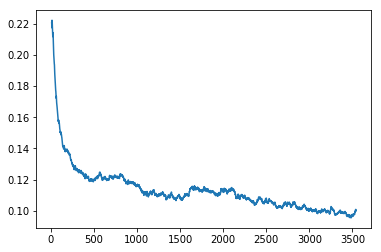

In [53]:
learn.sched.plot_loss()

In [54]:
sz = 128

In [56]:
learn.set_data(get_data(sz))

In [58]:
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

<p>Failed to display Jupyter Widget of type <code>HBox</code>.</p>
<p>
  If you're reading this message in the Jupyter Notebook or JupyterLab Notebook, it may mean
  that the widgets JavaScript is still loading. If this message persists, it
  likely means that the widgets JavaScript library is either not installed or
  not enabled. See the <a href="https://ipywidgets.readthedocs.io/en/stable/user_install.html">Jupyter
  Widgets Documentation</a> for setup instructions.
</p>
<p>
  If you're reading this message in another frontend (for example, a static
  rendering on GitHub or <a href="https://nbviewer.jupyter.org/">NBViewer</a>),
  it may mean that your frontend doesn't currently support widgets.
</p>

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.0982]

  0%|          | 1/506 [00:00<02:29,  3.38it/s, loss=0.0982]

  0%|          | 1/506 [00:00<02:51,  2.95it/s, loss=0.088] 

  0%|          | 1/506 [00:00<03:09,  2.66it/s, loss=0.102]

  0%|          | 1/506 [00:00<03:27,  2.43it/s, loss=0.104]

  1%|          | 4/506 [00:00<00:51,  9.68it/s, loss=0.104]

  1%|          | 4/506 [00:00<00:56,  8.93it/s, loss=0.1]  

  1%|          | 4/506 [00:00<01:00,  8.26it/s, loss=0.101]

  1%|          | 4/506 [00:00<01:05,  7.70it/s, loss=0.103]

  1%|▏         | 7/506 [00:00<00:37, 13.42it/s, loss=0.103]

  1%|▏         | 7/506 [00:00<00:39, 12.52it/s, loss=0.104]

  1%|▏         | 7/506 [00:00<00:42, 11.70it/s, loss=0.106]

  1%|▏         | 7/506 [00:00<00:45, 11.03it/s, loss=0.106]

  2%|▏         | 10/506 [00:00<00:31, 15.69it/s, loss=0.106]

  2%|▏         | 10/506 [00:00<00:33, 14.85it/s, loss=0.105]

  2%|▏         | 10/506 [00:00<00:35, 14.14it/s, loss=0.104]

  2%|▏         | 10/506 [00:00<00:36, 13.45it/s, loss=0.102]

  3%|▎         | 13/506 [00:00<00:28, 17.45it/s, loss=0.102]

  3%|▎         | 13/506 [00:00<00:29, 16.66it/s, loss=0.102]

  3%|▎         | 13/506 [00:00<00:30, 15.92it/s, loss=0.102]

  3%|▎         | 13/506 [00:00<00:32, 15.24it/s, loss=0.103]

  3%|▎         | 16/506 [00:00<00:26, 18.71it/s, loss=0.103]

  3%|▎         | 16/506 [00:00<00:27, 17.94it/s, loss=0.102]

  3%|▎         | 16/506 [00:00<00:28, 17.23it/s, loss=0.1]  

  3%|▎         | 16/506 [00:00<00:29, 16.61it/s, loss=0.0997]

  4%|▍         | 19/506 [00:00<00:24, 19.69it/s, loss=0.0997]

  4%|▍         | 19/506 [00:00<00:25, 19.02it/s, loss=0.0983]

  4%|▍         | 19/506 [00:01<00:26, 18.36it/s, loss=0.0968]

  4%|▍         | 19/506 [00:01<00:27, 17.77it/s, loss=0.0971]

  4%|▍         | 22/506 [00:01<00:23, 20.55it/s, loss=0.0971]

  4%|▍         | 22/506 [00:01<00:24, 19.89it/s, loss=0.0964]

  4%|▍         | 22/506 [00:01<00:25, 19.26it/s, loss=0.0975]

  4%|▍         | 22/506 [00:01<00:25, 18.68it/s, loss=0.1]   

  5%|▍         | 25/506 [00:01<00:22, 21.20it/s, loss=0.1]

  5%|▍         | 25/506 [00:01<00:23, 20.56it/s, loss=0.0998]

  5%|▍         | 25/506 [00:01<00:24, 19.98it/s, loss=0.0994]

  5%|▍         | 25/506 [00:01<00:24, 19.41it/s, loss=0.0996]

  6%|▌         | 28/506 [00:01<00:22, 21.72it/s, loss=0.0996]

  6%|▌         | 28/506 [00:01<00:22, 21.09it/s, loss=0.0995]

  6%|▌         | 28/506 [00:01<00:23, 20.54it/s, loss=0.1]   

  6%|▌         | 28/506 [00:01<00:23, 19.97it/s, loss=0.0992]

  6%|▌         | 31/506 [00:01<00:21, 22.09it/s, loss=0.0992]

  6%|▌         | 31/506 [00:01<00:22, 21.55it/s, loss=0.0996]

  6%|▌         | 31/506 [00:01<00:22, 21.01it/s, loss=0.0997]

  6%|▌         | 31/506 [00:01<00:23, 20.49it/s, loss=0.0992]

  7%|▋         | 34/506 [00:01<00:21, 22.44it/s, loss=0.0992]

  7%|▋         | 34/506 [00:01<00:21, 21.91it/s, loss=0.1]   

  7%|▋         | 34/506 [00:01<00:22, 21.39it/s, loss=0.0995]

  7%|▋         | 34/506 [00:01<00:22, 20.85it/s, loss=0.0995]

  7%|▋         | 37/506 [00:01<00:20, 22.66it/s, loss=0.0995]

  7%|▋         | 37/506 [00:01<00:21, 22.01it/s, loss=0.0997]

  7%|▋         | 37/506 [00:01<00:21, 21.49it/s, loss=0.0998]

  7%|▋         | 37/506 [00:01<00:22, 20.93it/s, loss=0.1]   

  8%|▊         | 40/506 [00:01<00:20, 22.60it/s, loss=0.1]

  8%|▊         | 40/506 [00:01<00:21, 22.16it/s, loss=0.101]

  8%|▊         | 40/506 [00:01<00:21, 21.71it/s, loss=0.1]  

  8%|▊         | 40/506 [00:01<00:21, 21.29it/s, loss=0.0988]

  8%|▊         | 43/506 [00:01<00:20, 22.86it/s, loss=0.0988]

  8%|▊         | 43/506 [00:01<00:20, 22.43it/s, loss=0.0989]

  8%|▊         | 43/506 [00:01<00:21, 22.00it/s, loss=0.0991]

  8%|▊         | 43/506 [00:01<00:21, 21.61it/s, loss=0.0997]

  9%|▉         | 46/506 [00:01<00:19, 23.10it/s, loss=0.0997]

  9%|▉         | 46/506 [00:02<00:20, 22.71it/s, loss=0.0996]

  9%|▉         | 46/506 [00:02<00:20, 22.33it/s, loss=0.0992]

  9%|▉         | 46/506 [00:02<00:20, 21.94it/s, loss=0.099] 

 10%|▉         | 49/506 [00:02<00:19, 23.36it/s, loss=0.099]

 10%|▉         | 49/506 [00:02<00:19, 22.96it/s, loss=0.0981]

 10%|▉         | 49/506 [00:02<00:20, 22.51it/s, loss=0.0982]

 10%|▉         | 49/506 [00:02<00:20, 22.09it/s, loss=0.0982]

 10%|█         | 52/506 [00:02<00:19, 23.42it/s, loss=0.0982]

 10%|█         | 52/506 [00:02<00:19, 23.05it/s, loss=0.098] 

 10%|█         | 52/506 [00:02<00:20, 22.68it/s, loss=0.0973]

 10%|█         | 52/506 [00:02<00:20, 22.34it/s, loss=0.0971]

 11%|█         | 55/506 [00:02<00:19, 23.60it/s, loss=0.0971]

 11%|█         | 55/506 [00:02<00:19, 23.27it/s, loss=0.0971]

 11%|█         | 55/506 [00:02<00:19, 22.90it/s, loss=0.0971]

 11%|█         | 55/506 [00:02<00:20, 22.55it/s, loss=0.0974]

 11%|█▏        | 58/506 [00:02<00:18, 23.77it/s, loss=0.0974]

 11%|█▏        | 58/506 [00:02<00:19, 23.41it/s, loss=0.0978]

 11%|█▏        | 58/506 [00:02<00:19, 23.08it/s, loss=0.0982]

 11%|█▏        | 58/506 [00:02<00:19, 22.78it/s, loss=0.0985]

 12%|█▏        | 61/506 [00:02<00:18, 23.94it/s, loss=0.0985]

 12%|█▏        | 61/506 [00:02<00:18, 23.62it/s, loss=0.0982]

 12%|█▏        | 61/506 [00:02<00:19, 23.30it/s, loss=0.0979]

 12%|█▏        | 61/506 [00:02<00:19, 23.02it/s, loss=0.0972]

 13%|█▎        | 64/506 [00:02<00:18, 24.14it/s, loss=0.0972]

 13%|█▎        | 64/506 [00:02<00:18, 23.86it/s, loss=0.0966]

 13%|█▎        | 64/506 [00:02<00:18, 23.62it/s, loss=0.0962]

 13%|█▎        | 64/506 [00:02<00:18, 23.37it/s, loss=0.0963]

 13%|█▎        | 64/506 [00:02<00:19, 23.14it/s, loss=0.0965]

 13%|█▎        | 68/506 [00:02<00:17, 24.58it/s, loss=0.0965]

 13%|█▎        | 68/506 [00:02<00:17, 24.34it/s, loss=0.0959]

 13%|█▎        | 68/506 [00:02<00:18, 24.10it/s, loss=0.0959]

 13%|█▎        | 68/506 [00:02<00:18, 23.86it/s, loss=0.0959]

 13%|█▎        | 68/506 [00:02<00:18, 23.62it/s, loss=0.0955]

 14%|█▍        | 72/506 [00:02<00:17, 25.01it/s, loss=0.0955]

 14%|█▍        | 72/506 [00:02<00:17, 24.77it/s, loss=0.0951]

 14%|█▍        | 72/506 [00:02<00:17, 24.50it/s, loss=0.0949]

 14%|█▍        | 72/506 [00:02<00:17, 24.27it/s, loss=0.0944]

 14%|█▍        | 72/506 [00:02<00:18, 24.04it/s, loss=0.0944]

 15%|█▌        | 76/506 [00:02<00:16, 25.37it/s, loss=0.0944]

 15%|█▌        | 76/506 [00:03<00:17, 25.13it/s, loss=0.0942]

 15%|█▌        | 76/506 [00:03<00:17, 24.87it/s, loss=0.0938]

 15%|█▌        | 76/506 [00:03<00:17, 24.54it/s, loss=0.0942]

 15%|█▌        | 76/506 [00:03<00:17, 24.28it/s, loss=0.0941]

 16%|█▌        | 80/506 [00:03<00:16, 25.55it/s, loss=0.0941]

 16%|█▌        | 80/506 [00:03<00:18, 23.46it/s, loss=0.0937]

 16%|█▌        | 80/506 [00:03<00:18, 23.11it/s, loss=0.0931]

 16%|█▌        | 80/506 [00:03<00:18, 22.74it/s, loss=0.0925]

 16%|█▌        | 80/506 [00:03<00:19, 22.41it/s, loss=0.0926]

 17%|█▋        | 84/506 [00:03<00:17, 23.52it/s, loss=0.0926]

 17%|█▋        | 84/506 [00:03<00:18, 23.28it/s, loss=0.0932]

 17%|█▋        | 84/506 [00:03<00:18, 23.06it/s, loss=0.0931]

 17%|█▋        | 84/506 [00:03<00:18, 22.81it/s, loss=0.0931]

 17%|█▋        | 87/506 [00:03<00:17, 23.62it/s, loss=0.0931]

 17%|█▋        | 87/506 [00:03<00:17, 23.38it/s, loss=0.094] 

 17%|█▋        | 87/506 [00:03<00:18, 23.12it/s, loss=0.094]

 17%|█▋        | 87/506 [00:03<00:18, 22.87it/s, loss=0.0936]

 18%|█▊        | 90/506 [00:03<00:17, 23.64it/s, loss=0.0936]

 18%|█▊        | 90/506 [00:03<00:17, 23.41it/s, loss=0.094] 

 18%|█▊        | 90/506 [00:03<00:17, 23.19it/s, loss=0.094]

 18%|█▊        | 90/506 [00:03<00:18, 22.97it/s, loss=0.0943]

 18%|█▊        | 93/506 [00:03<00:17, 23.72it/s, loss=0.0943]

 18%|█▊        | 93/506 [00:03<00:17, 23.42it/s, loss=0.0944]

 18%|█▊        | 93/506 [00:04<00:17, 23.14it/s, loss=0.0949]

 18%|█▊        | 93/506 [00:04<00:18, 22.85it/s, loss=0.0951]

 19%|█▉        | 96/506 [00:04<00:17, 23.57it/s, loss=0.0951]

 19%|█▉        | 96/506 [00:04<00:17, 23.29it/s, loss=0.0952]

 19%|█▉        | 96/506 [00:04<00:17, 22.99it/s, loss=0.0951]

 19%|█▉        | 96/506 [00:04<00:17, 22.80it/s, loss=0.0957]

 20%|█▉        | 99/506 [00:04<00:17, 23.50it/s, loss=0.0957]

 20%|█▉        | 99/506 [00:04<00:17, 23.23it/s, loss=0.0959]

 20%|█▉        | 99/506 [00:04<00:17, 22.99it/s, loss=0.096] 

 20%|█▉        | 99/506 [00:04<00:17, 22.78it/s, loss=0.0956]

 20%|██        | 102/506 [00:04<00:17, 23.46it/s, loss=0.0956]

 20%|██        | 102/506 [00:04<00:17, 23.25it/s, loss=0.0955]

 20%|██        | 102/506 [00:04<00:17, 23.02it/s, loss=0.0952]

 20%|██        | 102/506 [00:04<00:17, 22.79it/s, loss=0.0959]

 21%|██        | 105/506 [00:04<00:17, 23.45it/s, loss=0.0959]

 21%|██        | 105/506 [00:04<00:17, 23.26it/s, loss=0.0958]

 21%|██        | 105/506 [00:04<00:17, 23.05it/s, loss=0.0955]

 21%|██        | 105/506 [00:04<00:17, 22.78it/s, loss=0.0965]

 21%|██▏       | 108/506 [00:04<00:16, 23.42it/s, loss=0.0965]

 21%|██▏       | 108/506 [00:04<00:17, 23.19it/s, loss=0.0965]

 21%|██▏       | 108/506 [00:04<00:17, 22.99it/s, loss=0.0964]

 21%|██▏       | 108/506 [00:04<00:17, 22.80it/s, loss=0.096] 

 22%|██▏       | 111/506 [00:04<00:16, 23.42it/s, loss=0.096]

 22%|██▏       | 111/506 [00:04<00:17, 23.23it/s, loss=0.0963]

 22%|██▏       | 111/506 [00:04<00:17, 22.98it/s, loss=0.097] 

 22%|██▏       | 111/506 [00:04<00:17, 22.81it/s, loss=0.0968]

 23%|██▎       | 114/506 [00:04<00:16, 23.41it/s, loss=0.0968]

 23%|██▎       | 114/506 [00:04<00:16, 23.23it/s, loss=0.0962]

 23%|██▎       | 114/506 [00:04<00:17, 23.04it/s, loss=0.0959]

 23%|██▎       | 114/506 [00:04<00:17, 22.87it/s, loss=0.0957]

 23%|██▎       | 117/506 [00:04<00:16, 23.47it/s, loss=0.0957]

 23%|██▎       | 117/506 [00:05<00:16, 23.29it/s, loss=0.0957]

 23%|██▎       | 117/506 [00:05<00:16, 23.06it/s, loss=0.0958]

 23%|██▎       | 117/506 [00:05<00:17, 22.87it/s, loss=0.0955]

 24%|██▎       | 120/506 [00:05<00:16, 23.44it/s, loss=0.0955]

 24%|██▎       | 120/506 [00:05<00:16, 23.27it/s, loss=0.0953]

 24%|██▎       | 120/506 [00:05<00:16, 23.07it/s, loss=0.0951]

 24%|██▎       | 120/506 [00:05<00:16, 22.89it/s, loss=0.0951]

 24%|██▍       | 123/506 [00:05<00:16, 23.45it/s, loss=0.0951]

 24%|██▍       | 123/506 [00:05<00:16, 23.30it/s, loss=0.0948]

 24%|██▍       | 123/506 [00:05<00:16, 23.12it/s, loss=0.0952]

 24%|██▍       | 123/506 [00:05<00:16, 22.96it/s, loss=0.0966]

 25%|██▍       | 126/506 [00:05<00:16, 23.51it/s, loss=0.0966]

 25%|██▍       | 126/506 [00:05<00:16, 23.34it/s, loss=0.0964]

 25%|██▍       | 126/506 [00:05<00:16, 23.14it/s, loss=0.0966]

 25%|██▍       | 126/506 [00:05<00:16, 22.97it/s, loss=0.0965]

 25%|██▌       | 129/506 [00:05<00:16, 23.50it/s, loss=0.0965]

 25%|██▌       | 129/506 [00:05<00:16, 23.32it/s, loss=0.0968]

 25%|██▌       | 129/506 [00:05<00:16, 23.16it/s, loss=0.0968]

 25%|██▌       | 129/506 [00:05<00:16, 22.96it/s, loss=0.0962]

 26%|██▌       | 132/506 [00:05<00:15, 23.49it/s, loss=0.0962]

 26%|██▌       | 132/506 [00:05<00:16, 23.29it/s, loss=0.0961]

 26%|██▌       | 132/506 [00:05<00:16, 23.14it/s, loss=0.0956]

 26%|██▌       | 132/506 [00:05<00:16, 22.99it/s, loss=0.096] 

 27%|██▋       | 135/506 [00:05<00:15, 23.51it/s, loss=0.096]

 27%|██▋       | 135/506 [00:05<00:15, 23.37it/s, loss=0.0958]

 27%|██▋       | 135/506 [00:05<00:15, 23.24it/s, loss=0.0957]

 27%|██▋       | 135/506 [00:05<00:16, 23.10it/s, loss=0.0956]

 27%|██▋       | 138/506 [00:05<00:15, 23.61it/s, loss=0.0956]

 27%|██▋       | 138/506 [00:05<00:15, 23.42it/s, loss=0.096] 

 27%|██▋       | 138/506 [00:05<00:15, 23.27it/s, loss=0.0968]

 27%|██▋       | 138/506 [00:05<00:15, 23.14it/s, loss=0.0962]

 28%|██▊       | 141/506 [00:05<00:15, 23.63it/s, loss=0.0962]

 28%|██▊       | 141/506 [00:06<00:15, 23.49it/s, loss=0.0969]

 28%|██▊       | 141/506 [00:06<00:15, 23.36it/s, loss=0.0968]

 28%|██▊       | 141/506 [00:06<00:15, 23.23it/s, loss=0.0966]

 28%|██▊       | 144/506 [00:06<00:15, 23.72it/s, loss=0.0966]

 28%|██▊       | 144/506 [00:06<00:15, 23.60it/s, loss=0.0963]

 28%|██▊       | 144/506 [00:06<00:15, 23.49it/s, loss=0.096] 

 28%|██▊       | 144/506 [00:06<00:15, 23.38it/s, loss=0.0957]

 28%|██▊       | 144/506 [00:06<00:15, 23.27it/s, loss=0.0954]

 29%|██▉       | 148/506 [00:06<00:14, 23.92it/s, loss=0.0954]

 29%|██▉       | 148/506 [00:06<00:15, 23.81it/s, loss=0.0949]

 29%|██▉       | 148/506 [00:06<00:15, 23.70it/s, loss=0.0949]

 29%|██▉       | 148/506 [00:06<00:15, 23.60it/s, loss=0.0944]

 29%|██▉       | 148/506 [00:06<00:15, 23.49it/s, loss=0.0943]

 30%|███       | 152/506 [00:06<00:14, 24.13it/s, loss=0.0943]

 30%|███       | 152/506 [00:06<00:14, 24.01it/s, loss=0.0944]

 30%|███       | 152/506 [00:06<00:14, 23.88it/s, loss=0.0945]

 30%|███       | 152/506 [00:06<00:14, 23.76it/s, loss=0.0945]

 30%|███       | 152/506 [00:06<00:14, 23.63it/s, loss=0.0946]

 31%|███       | 156/506 [00:06<00:14, 24.25it/s, loss=0.0946]

 31%|███       | 156/506 [00:06<00:14, 24.12it/s, loss=0.0946]

 31%|███       | 156/506 [00:06<00:14, 23.99it/s, loss=0.094] 

 31%|███       | 156/506 [00:06<00:14, 23.85it/s, loss=0.0941]

 31%|███       | 156/506 [00:06<00:14, 23.71it/s, loss=0.0942]

 32%|███▏      | 160/506 [00:06<00:14, 24.32it/s, loss=0.0942]

 32%|███▏      | 160/506 [00:06<00:14, 23.38it/s, loss=0.0946]

 32%|███▏      | 160/506 [00:06<00:14, 23.21it/s, loss=0.0947]

 32%|███▏      | 160/506 [00:06<00:15, 23.04it/s, loss=0.0951]

 32%|███▏      | 163/506 [00:06<00:14, 23.46it/s, loss=0.0951]

 32%|███▏      | 163/506 [00:06<00:14, 23.29it/s, loss=0.0951]

 32%|███▏      | 163/506 [00:07<00:14, 23.10it/s, loss=0.0956]

 32%|███▏      | 163/506 [00:07<00:14, 22.93it/s, loss=0.0959]

 33%|███▎      | 166/506 [00:07<00:14, 23.35it/s, loss=0.0959]

 33%|███▎      | 166/506 [00:07<00:14, 23.20it/s, loss=0.0961]

 33%|███▎      | 166/506 [00:07<00:14, 23.08it/s, loss=0.0965]

 33%|███▎      | 166/506 [00:07<00:14, 22.97it/s, loss=0.0965]

 33%|███▎      | 169/506 [00:07<00:14, 23.38it/s, loss=0.0965]

 33%|███▎      | 169/506 [00:07<00:14, 23.26it/s, loss=0.0967]

 33%|███▎      | 169/506 [00:07<00:14, 23.14it/s, loss=0.0967]

 33%|███▎      | 169/506 [00:07<00:14, 23.04it/s, loss=0.096] 

 34%|███▍      | 172/506 [00:07<00:14, 23.44it/s, loss=0.096]

 34%|███▍      | 172/506 [00:07<00:14, 23.33it/s, loss=0.096]

 34%|███▍      | 172/506 [00:07<00:14, 23.22it/s, loss=0.0965]

 34%|███▍      | 172/506 [00:07<00:14, 23.10it/s, loss=0.0968]

 35%|███▍      | 175/506 [00:07<00:14, 23.49it/s, loss=0.0968]

 35%|███▍      | 175/506 [00:07<00:14, 23.38it/s, loss=0.0961]

 35%|███▍      | 175/506 [00:07<00:14, 23.26it/s, loss=0.0963]

 35%|███▍      | 175/506 [00:07<00:14, 23.14it/s, loss=0.096] 

 35%|███▌      | 178/506 [00:07<00:13, 23.54it/s, loss=0.096]

 35%|███▌      | 178/506 [00:07<00:14, 23.42it/s, loss=0.0961]

 35%|███▌      | 178/506 [00:07<00:14, 23.31it/s, loss=0.0958]

 35%|███▌      | 178/506 [00:07<00:14, 23.19it/s, loss=0.0962]

 36%|███▌      | 181/506 [00:07<00:13, 23.58it/s, loss=0.0962]

 36%|███▌      | 181/506 [00:07<00:13, 23.47it/s, loss=0.0963]

 36%|███▌      | 181/506 [00:07<00:13, 23.32it/s, loss=0.0958]

 36%|███▌      | 181/506 [00:07<00:14, 23.17it/s, loss=0.0958]

 36%|███▋      | 184/506 [00:07<00:13, 23.54it/s, loss=0.0958]

 36%|███▋      | 184/506 [00:07<00:13, 23.40it/s, loss=0.0953]

 36%|███▋      | 184/506 [00:07<00:13, 23.25it/s, loss=0.0952]

 36%|███▋      | 184/506 [00:07<00:13, 23.14it/s, loss=0.095] 

 37%|███▋      | 187/506 [00:07<00:13, 23.51it/s, loss=0.095]

 37%|███▋      | 187/506 [00:07<00:13, 23.41it/s, loss=0.0951]

 37%|███▋      | 187/506 [00:08<00:13, 23.30it/s, loss=0.0952]

 37%|███▋      | 187/506 [00:08<00:13, 23.19it/s, loss=0.0953]

 38%|███▊      | 190/506 [00:08<00:13, 23.56it/s, loss=0.0953]

 38%|███▊      | 190/506 [00:08<00:13, 23.46it/s, loss=0.0951]

 38%|███▊      | 190/506 [00:08<00:13, 23.36it/s, loss=0.0951]

 38%|███▊      | 190/506 [00:08<00:13, 23.26it/s, loss=0.0952]

 38%|███▊      | 193/506 [00:08<00:13, 23.62it/s, loss=0.0952]

 38%|███▊      | 193/506 [00:08<00:13, 23.50it/s, loss=0.096] 

 38%|███▊      | 193/506 [00:08<00:13, 23.36it/s, loss=0.0954]

 38%|███▊      | 193/506 [00:08<00:13, 23.21it/s, loss=0.0951]

 39%|███▊      | 196/506 [00:08<00:13, 23.57it/s, loss=0.0951]

 39%|███▊      | 196/506 [00:08<00:13, 23.40it/s, loss=0.0951]

 39%|███▊      | 196/506 [00:08<00:13, 23.27it/s, loss=0.0953]

 39%|███▊      | 196/506 [00:08<00:13, 23.13it/s, loss=0.0955]

 39%|███▉      | 199/506 [00:08<00:13, 23.48it/s, loss=0.0955]

 39%|███▉      | 199/506 [00:08<00:13, 23.34it/s, loss=0.0951]

 39%|███▉      | 199/506 [00:08<00:13, 23.24it/s, loss=0.0958]

 39%|███▉      | 199/506 [00:08<00:13, 23.15it/s, loss=0.0957]

 40%|███▉      | 202/506 [00:08<00:12, 23.49it/s, loss=0.0957]

 40%|███▉      | 202/506 [00:08<00:12, 23.40it/s, loss=0.0953]

 40%|███▉      | 202/506 [00:08<00:13, 23.30it/s, loss=0.0964]

 40%|███▉      | 202/506 [00:08<00:13, 23.21it/s, loss=0.0962]

 41%|████      | 205/506 [00:08<00:12, 23.55it/s, loss=0.0962]

 41%|████      | 205/506 [00:08<00:12, 23.46it/s, loss=0.0964]

 41%|████      | 205/506 [00:08<00:12, 23.36it/s, loss=0.0965]

 41%|████      | 205/506 [00:08<00:12, 23.27it/s, loss=0.0959]

 41%|████      | 208/506 [00:08<00:12, 23.61it/s, loss=0.0959]

 41%|████      | 208/506 [00:08<00:12, 23.51it/s, loss=0.0962]

 41%|████      | 208/506 [00:08<00:12, 23.42it/s, loss=0.0958]

 41%|████      | 208/506 [00:08<00:12, 23.33it/s, loss=0.0959]

 42%|████▏     | 211/506 [00:08<00:12, 23.66it/s, loss=0.0959]

 42%|████▏     | 211/506 [00:08<00:12, 23.57it/s, loss=0.0962]

 42%|████▏     | 211/506 [00:08<00:12, 23.48it/s, loss=0.0962]

 42%|████▏     | 211/506 [00:09<00:12, 23.38it/s, loss=0.0961]

 42%|████▏     | 214/506 [00:09<00:12, 23.71it/s, loss=0.0961]

 42%|████▏     | 214/506 [00:09<00:12, 23.59it/s, loss=0.0962]

 42%|████▏     | 214/506 [00:09<00:12, 23.47it/s, loss=0.0963]

 42%|████▏     | 214/506 [00:09<00:12, 23.35it/s, loss=0.0963]

 43%|████▎     | 217/506 [00:09<00:12, 23.67it/s, loss=0.0963]

 43%|████▎     | 217/506 [00:09<00:12, 23.56it/s, loss=0.0959]

 43%|████▎     | 217/506 [00:09<00:12, 23.43it/s, loss=0.0957]

 43%|████▎     | 217/506 [00:09<00:12, 23.31it/s, loss=0.0951]

 43%|████▎     | 220/506 [00:09<00:12, 23.63it/s, loss=0.0951]

 43%|████▎     | 220/506 [00:09<00:12, 23.53it/s, loss=0.0952]

 43%|████▎     | 220/506 [00:09<00:12, 23.44it/s, loss=0.0952]

 43%|████▎     | 220/506 [00:09<00:12, 23.37it/s, loss=0.0953]

 44%|████▍     | 223/506 [00:09<00:11, 23.69it/s, loss=0.0953]

 44%|████▍     | 223/506 [00:09<00:11, 23.62it/s, loss=0.0951]

 44%|████▍     | 223/506 [00:09<00:12, 23.55it/s, loss=0.0951]

 44%|████▍     | 223/506 [00:09<00:12, 23.48it/s, loss=0.0951]

 44%|████▍     | 223/506 [00:09<00:12, 23.41it/s, loss=0.0951]

 45%|████▍     | 227/506 [00:09<00:11, 23.83it/s, loss=0.0951]

 45%|████▍     | 227/506 [00:09<00:11, 23.76it/s, loss=0.0955]

 45%|████▍     | 227/506 [00:09<00:11, 23.68it/s, loss=0.0953]

 45%|████▍     | 227/506 [00:09<00:11, 23.61it/s, loss=0.0953]

 45%|████▍     | 227/506 [00:09<00:11, 23.54it/s, loss=0.0953]

 46%|████▌     | 231/506 [00:09<00:11, 23.95it/s, loss=0.0953]

 46%|████▌     | 231/506 [00:09<00:11, 23.88it/s, loss=0.0956]

 46%|████▌     | 231/506 [00:09<00:11, 23.81it/s, loss=0.0955]

 46%|████▌     | 231/506 [00:09<00:11, 23.74it/s, loss=0.0953]

 46%|████▌     | 231/506 [00:09<00:11, 23.67it/s, loss=0.0954]

 46%|████▋     | 235/506 [00:09<00:11, 24.08it/s, loss=0.0954]

 46%|████▋     | 235/506 [00:09<00:11, 24.01it/s, loss=0.0953]

 46%|████▋     | 235/506 [00:09<00:11, 23.94it/s, loss=0.0952]

 46%|████▋     | 235/506 [00:09<00:11, 23.87it/s, loss=0.0956]

 46%|████▋     | 235/506 [00:09<00:11, 23.80it/s, loss=0.095] 

 47%|████▋     | 239/506 [00:09<00:11, 24.20it/s, loss=0.095]

 47%|████▋     | 239/506 [00:09<00:11, 24.13it/s, loss=0.0954]

 47%|████▋     | 239/506 [00:10<00:11, 23.48it/s, loss=0.0951]

 47%|████▋     | 239/506 [00:10<00:11, 23.35it/s, loss=0.0948]

 47%|████▋     | 239/506 [00:10<00:11, 23.24it/s, loss=0.0948]

 48%|████▊     | 243/506 [00:10<00:11, 23.62it/s, loss=0.0948]

 48%|████▊     | 243/506 [00:10<00:11, 23.53it/s, loss=0.0946]

 48%|████▊     | 243/506 [00:10<00:11, 23.41it/s, loss=0.0949]

 48%|████▊     | 243/506 [00:10<00:11, 23.32it/s, loss=0.0947]

 49%|████▊     | 246/506 [00:10<00:11, 23.60it/s, loss=0.0947]

 49%|████▊     | 246/506 [00:10<00:11, 23.52it/s, loss=0.0945]

 49%|████▊     | 246/506 [00:10<00:11, 23.44it/s, loss=0.0946]

 49%|████▊     | 246/506 [00:10<00:11, 23.35it/s, loss=0.0952]

 49%|████▉     | 249/506 [00:10<00:10, 23.64it/s, loss=0.0952]

 49%|████▉     | 249/506 [00:10<00:10, 23.56it/s, loss=0.0955]

 49%|████▉     | 249/506 [00:10<00:10, 23.48it/s, loss=0.096] 

 49%|████▉     | 249/506 [00:10<00:10, 23.41it/s, loss=0.0961]

 50%|████▉     | 252/506 [00:10<00:10, 23.68it/s, loss=0.0961]

 50%|████▉     | 252/506 [00:10<00:10, 23.61it/s, loss=0.0963]

 50%|████▉     | 252/506 [00:10<00:10, 23.53it/s, loss=0.0961]

 50%|████▉     | 252/506 [00:10<00:10, 23.46it/s, loss=0.0962]

 50%|█████     | 255/506 [00:10<00:10, 23.73it/s, loss=0.0962]

 50%|█████     | 255/506 [00:10<00:10, 23.66it/s, loss=0.0961]

 50%|█████     | 255/506 [00:10<00:10, 23.58it/s, loss=0.0964]

 50%|█████     | 255/506 [00:10<00:10, 23.48it/s, loss=0.0959]

 51%|█████     | 258/506 [00:10<00:10, 23.75it/s, loss=0.0959]

 51%|█████     | 258/506 [00:10<00:10, 23.66it/s, loss=0.0955]

 51%|█████     | 258/506 [00:10<00:10, 23.56it/s, loss=0.095] 

 51%|█████     | 258/506 [00:11<00:10, 23.45it/s, loss=0.0948]

 52%|█████▏    | 261/506 [00:11<00:10, 23.72it/s, loss=0.0948]

 52%|█████▏    | 261/506 [00:11<00:10, 23.61it/s, loss=0.0941]

 52%|█████▏    | 261/506 [00:11<00:10, 23.51it/s, loss=0.094] 

 52%|█████▏    | 261/506 [00:11<00:10, 23.41it/s, loss=0.0942]

 52%|█████▏    | 264/506 [00:11<00:10, 23.67it/s, loss=0.0942]

 52%|█████▏    | 264/506 [00:11<00:10, 23.59it/s, loss=0.094] 

 52%|█████▏    | 264/506 [00:11<00:10, 23.52it/s, loss=0.0939]

 52%|█████▏    | 264/506 [00:11<00:10, 23.44it/s, loss=0.0939]

 53%|█████▎    | 267/506 [00:11<00:10, 23.70it/s, loss=0.0939]

 53%|█████▎    | 267/506 [00:11<00:10, 23.63it/s, loss=0.0936]

 53%|█████▎    | 267/506 [00:11<00:10, 23.55it/s, loss=0.0939]

 53%|█████▎    | 267/506 [00:11<00:10, 23.48it/s, loss=0.0941]

 53%|█████▎    | 270/506 [00:11<00:09, 23.74it/s, loss=0.0941]

 53%|█████▎    | 270/506 [00:11<00:09, 23.67it/s, loss=0.0943]

 53%|█████▎    | 270/506 [00:11<00:10, 23.60it/s, loss=0.0944]

 53%|█████▎    | 270/506 [00:11<00:10, 23.53it/s, loss=0.0945]

 54%|█████▍    | 273/506 [00:11<00:09, 23.78it/s, loss=0.0945]

 54%|█████▍    | 273/506 [00:11<00:09, 23.71it/s, loss=0.0947]

 54%|█████▍    | 273/506 [00:11<00:09, 23.63it/s, loss=0.0948]

 54%|█████▍    | 273/506 [00:11<00:09, 23.54it/s, loss=0.0947]

 55%|█████▍    | 276/506 [00:11<00:09, 23.79it/s, loss=0.0947]

 55%|█████▍    | 276/506 [00:11<00:09, 23.69it/s, loss=0.0946]

 55%|█████▍    | 276/506 [00:11<00:09, 23.58it/s, loss=0.0944]

 55%|█████▍    | 276/506 [00:11<00:09, 23.49it/s, loss=0.0943]

 55%|█████▌    | 279/506 [00:11<00:09, 23.75it/s, loss=0.0943]

 55%|█████▌    | 279/506 [00:11<00:09, 23.66it/s, loss=0.0942]

 55%|█████▌    | 279/506 [00:11<00:09, 23.54it/s, loss=0.0939]

 55%|█████▌    | 279/506 [00:11<00:09, 23.44it/s, loss=0.0936]

 56%|█████▌    | 282/506 [00:11<00:09, 23.69it/s, loss=0.0936]

 56%|█████▌    | 282/506 [00:11<00:09, 23.62it/s, loss=0.0934]

 56%|█████▌    | 282/506 [00:11<00:09, 23.55it/s, loss=0.0937]

 56%|█████▌    | 282/506 [00:12<00:09, 23.48it/s, loss=0.0936]

 56%|█████▋    | 285/506 [00:12<00:09, 23.73it/s, loss=0.0936]

 56%|█████▋    | 285/506 [00:12<00:09, 23.66it/s, loss=0.0939]

 56%|█████▋    | 285/506 [00:12<00:09, 23.59it/s, loss=0.0938]

 56%|█████▋    | 285/506 [00:12<00:09, 23.50it/s, loss=0.0939]

 57%|█████▋    | 288/506 [00:12<00:09, 23.74it/s, loss=0.0939]

 57%|█████▋    | 288/506 [00:12<00:09, 23.65it/s, loss=0.0935]

 57%|█████▋    | 288/506 [00:12<00:09, 23.56it/s, loss=0.0937]

 57%|█████▋    | 288/506 [00:12<00:09, 23.47it/s, loss=0.0936]

 58%|█████▊    | 291/506 [00:12<00:09, 23.71it/s, loss=0.0936]

 58%|█████▊    | 291/506 [00:12<00:09, 23.62it/s, loss=0.0937]

 58%|█████▊    | 291/506 [00:12<00:09, 23.53it/s, loss=0.094] 

 58%|█████▊    | 291/506 [00:12<00:09, 23.43it/s, loss=0.0939]

 58%|█████▊    | 294/506 [00:12<00:08, 23.67it/s, loss=0.0939]

 58%|█████▊    | 294/506 [00:12<00:08, 23.60it/s, loss=0.0942]

 58%|█████▊    | 294/506 [00:12<00:09, 23.53it/s, loss=0.0941]

 58%|█████▊    | 294/506 [00:12<00:09, 23.47it/s, loss=0.0937]

 59%|█████▊    | 297/506 [00:12<00:08, 23.70it/s, loss=0.0937]

 59%|█████▊    | 297/506 [00:12<00:08, 23.64it/s, loss=0.0943]

 59%|█████▊    | 297/506 [00:12<00:08, 23.57it/s, loss=0.0945]

 59%|█████▊    | 297/506 [00:12<00:08, 23.51it/s, loss=0.0946]

 59%|█████▉    | 300/506 [00:12<00:08, 23.74it/s, loss=0.0946]

 59%|█████▉    | 300/506 [00:12<00:08, 23.66it/s, loss=0.0943]

 59%|█████▉    | 300/506 [00:12<00:08, 23.59it/s, loss=0.0945]

 59%|█████▉    | 300/506 [00:12<00:08, 23.52it/s, loss=0.0943]

 60%|█████▉    | 303/506 [00:12<00:08, 23.76it/s, loss=0.0943]

 60%|█████▉    | 303/506 [00:12<00:08, 23.69it/s, loss=0.0945]

 60%|█████▉    | 303/506 [00:12<00:08, 23.63it/s, loss=0.0946]

 60%|█████▉    | 303/506 [00:12<00:08, 23.57it/s, loss=0.0953]

 60%|██████    | 306/506 [00:12<00:08, 23.80it/s, loss=0.0953]

 60%|██████    | 306/506 [00:12<00:08, 23.73it/s, loss=0.095] 

 60%|██████    | 306/506 [00:12<00:08, 23.67it/s, loss=0.095]

 60%|██████    | 306/506 [00:12<00:08, 23.61it/s, loss=0.0949]

 61%|██████    | 309/506 [00:12<00:08, 23.84it/s, loss=0.0949]

 61%|██████    | 309/506 [00:12<00:08, 23.79it/s, loss=0.0944]

 61%|██████    | 309/506 [00:13<00:08, 23.74it/s, loss=0.0945]

 61%|██████    | 309/506 [00:13<00:08, 23.68it/s, loss=0.0948]

 61%|██████    | 309/506 [00:13<00:08, 23.63it/s, loss=0.0947]

 62%|██████▏   | 313/506 [00:13<00:08, 23.93it/s, loss=0.0947]

 62%|██████▏   | 313/506 [00:13<00:08, 23.88it/s, loss=0.095] 

 62%|██████▏   | 313/506 [00:13<00:08, 23.83it/s, loss=0.0952]

 62%|██████▏   | 313/506 [00:13<00:08, 23.78it/s, loss=0.0954]

 62%|██████▏   | 313/506 [00:13<00:08, 23.72it/s, loss=0.0955]

 63%|██████▎   | 317/506 [00:13<00:07, 24.02it/s, loss=0.0955]

 63%|██████▎   | 317/506 [00:13<00:07, 23.97it/s, loss=0.0953]

 63%|██████▎   | 317/506 [00:13<00:07, 23.92it/s, loss=0.0957]

 63%|██████▎   | 317/506 [00:13<00:07, 23.87it/s, loss=0.0961]

 63%|██████▎   | 317/506 [00:13<00:08, 23.33it/s, loss=0.096] 

 63%|██████▎   | 321/506 [00:13<00:07, 23.62it/s, loss=0.096]

 63%|██████▎   | 321/506 [00:13<00:07, 23.56it/s, loss=0.0958]

 63%|██████▎   | 321/506 [00:13<00:07, 23.50it/s, loss=0.0956]

 63%|██████▎   | 321/506 [00:13<00:07, 23.44it/s, loss=0.0955]

 64%|██████▍   | 324/506 [00:13<00:07, 23.65it/s, loss=0.0955]

 64%|██████▍   | 324/506 [00:13<00:07, 23.60it/s, loss=0.0953]

 64%|██████▍   | 324/506 [00:13<00:07, 23.54it/s, loss=0.0953]

 64%|██████▍   | 324/506 [00:13<00:07, 23.48it/s, loss=0.0955]

 65%|██████▍   | 327/506 [00:13<00:07, 23.69it/s, loss=0.0955]

 65%|██████▍   | 327/506 [00:13<00:07, 23.63it/s, loss=0.0957]

 65%|██████▍   | 327/506 [00:13<00:07, 23.57it/s, loss=0.0953]

 65%|██████▍   | 327/506 [00:13<00:07, 23.51it/s, loss=0.095] 

 65%|██████▌   | 330/506 [00:13<00:07, 23.72it/s, loss=0.095]

 65%|██████▌   | 330/506 [00:13<00:07, 23.66it/s, loss=0.0949]

 65%|██████▌   | 330/506 [00:13<00:07, 23.60it/s, loss=0.0947]

 65%|██████▌   | 330/506 [00:14<00:07, 23.54it/s, loss=0.0953]

 66%|██████▌   | 333/506 [00:14<00:07, 23.75it/s, loss=0.0953]

 66%|██████▌   | 333/506 [00:14<00:07, 23.69it/s, loss=0.0952]

 66%|██████▌   | 333/506 [00:14<00:07, 23.63it/s, loss=0.0949]

 66%|██████▌   | 333/506 [00:14<00:07, 23.56it/s, loss=0.095] 

 66%|██████▋   | 336/506 [00:14<00:07, 23.77it/s, loss=0.095]

 66%|██████▋   | 336/506 [00:14<00:07, 23.72it/s, loss=0.0952]

 66%|██████▋   | 336/506 [00:14<00:07, 23.66it/s, loss=0.0951]

 66%|██████▋   | 336/506 [00:14<00:07, 23.60it/s, loss=0.0945]

 67%|██████▋   | 339/506 [00:14<00:07, 23.81it/s, loss=0.0945]

 67%|██████▋   | 339/506 [00:14<00:07, 23.75it/s, loss=0.0945]

 67%|██████▋   | 339/506 [00:14<00:07, 23.69it/s, loss=0.0948]

 67%|██████▋   | 339/506 [00:14<00:07, 23.63it/s, loss=0.0945]

 68%|██████▊   | 342/506 [00:14<00:06, 23.84it/s, loss=0.0945]

 68%|██████▊   | 342/506 [00:14<00:06, 23.78it/s, loss=0.0942]

 68%|██████▊   | 342/506 [00:14<00:06, 23.72it/s, loss=0.0943]

 68%|██████▊   | 342/506 [00:14<00:06, 23.67it/s, loss=0.0946]

 68%|██████▊   | 345/506 [00:14<00:06, 23.87it/s, loss=0.0946]

 68%|██████▊   | 345/506 [00:14<00:06, 23.81it/s, loss=0.0951]

 68%|██████▊   | 345/506 [00:14<00:06, 23.75it/s, loss=0.0954]

 68%|██████▊   | 345/506 [00:14<00:06, 23.70it/s, loss=0.096] 

 69%|██████▉   | 348/506 [00:14<00:06, 23.90it/s, loss=0.096]

 69%|██████▉   | 348/506 [00:14<00:06, 23.84it/s, loss=0.0964]

 69%|██████▉   | 348/506 [00:14<00:06, 23.78it/s, loss=0.0966]

 69%|██████▉   | 348/506 [00:14<00:06, 23.72it/s, loss=0.0959]

 69%|██████▉   | 351/506 [00:14<00:06, 23.93it/s, loss=0.0959]

 69%|██████▉   | 351/506 [00:14<00:06, 23.87it/s, loss=0.0955]

 69%|██████▉   | 351/506 [00:14<00:06, 23.82it/s, loss=0.0951]

 69%|██████▉   | 351/506 [00:14<00:06, 23.76it/s, loss=0.0943]

 70%|██████▉   | 354/506 [00:14<00:06, 23.96it/s, loss=0.0943]

 70%|██████▉   | 354/506 [00:14<00:06, 23.90it/s, loss=0.0946]

 70%|██████▉   | 354/506 [00:14<00:06, 23.84it/s, loss=0.0947]

 70%|██████▉   | 354/506 [00:14<00:06, 23.78it/s, loss=0.0944]

 71%|███████   | 357/506 [00:14<00:06, 23.98it/s, loss=0.0944]

 71%|███████   | 357/506 [00:14<00:06, 23.92it/s, loss=0.094] 

 71%|███████   | 357/506 [00:14<00:06, 23.86it/s, loss=0.0938]

 71%|███████   | 357/506 [00:15<00:06, 23.80it/s, loss=0.094] 

 71%|███████   | 360/506 [00:15<00:06, 24.00it/s, loss=0.094]

 71%|███████   | 360/506 [00:15<00:06, 23.94it/s, loss=0.094]

 71%|███████   | 360/506 [00:15<00:06, 23.89it/s, loss=0.0937]

 71%|███████   | 360/506 [00:15<00:06, 23.83it/s, loss=0.0938]

 72%|███████▏  | 363/506 [00:15<00:05, 24.03it/s, loss=0.0938]

 72%|███████▏  | 363/506 [00:15<00:05, 23.97it/s, loss=0.0938]

 72%|███████▏  | 363/506 [00:15<00:05, 23.92it/s, loss=0.0936]

 72%|███████▏  | 363/506 [00:15<00:05, 23.86it/s, loss=0.0934]

 72%|███████▏  | 366/506 [00:15<00:05, 24.05it/s, loss=0.0934]

 72%|███████▏  | 366/506 [00:15<00:05, 24.00it/s, loss=0.0929]

 72%|███████▏  | 366/506 [00:15<00:05, 23.94it/s, loss=0.0932]

 72%|███████▏  | 366/506 [00:15<00:05, 23.88it/s, loss=0.0928]

 73%|███████▎  | 369/506 [00:15<00:05, 24.07it/s, loss=0.0928]

 73%|███████▎  | 369/506 [00:15<00:05, 24.02it/s, loss=0.093] 

 73%|███████▎  | 369/506 [00:15<00:05, 23.96it/s, loss=0.0936]

 73%|███████▎  | 369/506 [00:15<00:05, 23.91it/s, loss=0.0934]

 74%|███████▎  | 372/506 [00:15<00:05, 24.10it/s, loss=0.0934]

 74%|███████▎  | 372/506 [00:15<00:05, 24.05it/s, loss=0.0933]

 74%|███████▎  | 372/506 [00:15<00:05, 23.99it/s, loss=0.094] 

 74%|███████▎  | 372/506 [00:15<00:05, 23.94it/s, loss=0.0938]

 74%|███████▍  | 375/506 [00:15<00:05, 24.13it/s, loss=0.0938]

 74%|███████▍  | 375/506 [00:15<00:05, 24.08it/s, loss=0.094] 

 74%|███████▍  | 375/506 [00:15<00:05, 24.03it/s, loss=0.0946]

 74%|███████▍  | 375/506 [00:15<00:05, 23.97it/s, loss=0.0942]

 75%|███████▍  | 378/506 [00:15<00:05, 24.16it/s, loss=0.0942]

 75%|███████▍  | 378/506 [00:15<00:05, 24.11it/s, loss=0.0946]

 75%|███████▍  | 378/506 [00:15<00:05, 24.06it/s, loss=0.0949]

 75%|███████▍  | 378/506 [00:15<00:05, 24.01it/s, loss=0.0953]

 75%|███████▍  | 378/506 [00:15<00:05, 23.97it/s, loss=0.0954]

 75%|███████▌  | 382/506 [00:15<00:05, 24.22it/s, loss=0.0954]

 75%|███████▌  | 382/506 [00:15<00:05, 24.18it/s, loss=0.0953]

 75%|███████▌  | 382/506 [00:15<00:05, 24.13it/s, loss=0.0953]

 75%|███████▌  | 382/506 [00:15<00:05, 24.09it/s, loss=0.0953]

 75%|███████▌  | 382/506 [00:15<00:05, 24.05it/s, loss=0.0956]

 76%|███████▋  | 386/506 [00:15<00:04, 24.30it/s, loss=0.0956]

 76%|███████▋  | 386/506 [00:15<00:04, 24.26it/s, loss=0.0959]

 76%|███████▋  | 386/506 [00:15<00:04, 24.21it/s, loss=0.0959]

 76%|███████▋  | 386/506 [00:15<00:04, 24.17it/s, loss=0.0959]

 76%|███████▋  | 386/506 [00:15<00:04, 24.13it/s, loss=0.0959]

 77%|███████▋  | 390/506 [00:15<00:04, 24.38it/s, loss=0.0959]

 77%|███████▋  | 390/506 [00:16<00:04, 24.33it/s, loss=0.0958]

 77%|███████▋  | 390/506 [00:16<00:04, 24.29it/s, loss=0.096] 

 77%|███████▋  | 390/506 [00:16<00:04, 24.25it/s, loss=0.0957]

 77%|███████▋  | 390/506 [00:16<00:04, 24.21it/s, loss=0.0955]

 78%|███████▊  | 394/506 [00:16<00:04, 24.45it/s, loss=0.0955]

 78%|███████▊  | 394/506 [00:16<00:04, 24.41it/s, loss=0.0954]

 78%|███████▊  | 394/506 [00:16<00:04, 24.37it/s, loss=0.0949]

 78%|███████▊  | 394/506 [00:16<00:04, 24.33it/s, loss=0.0951]

 78%|███████▊  | 394/506 [00:16<00:04, 24.28it/s, loss=0.0949]

 79%|███████▊  | 398/506 [00:16<00:04, 24.53it/s, loss=0.0949]

 79%|███████▊  | 398/506 [00:16<00:04, 24.48it/s, loss=0.0948]

 79%|███████▊  | 398/506 [00:16<00:04, 24.44it/s, loss=0.0943]

 79%|███████▊  | 398/506 [00:16<00:04, 24.12it/s, loss=0.0941]

 79%|███████▊  | 398/506 [00:16<00:04, 24.07it/s, loss=0.0952]

 79%|███████▉  | 402/506 [00:16<00:04, 24.31it/s, loss=0.0952]

 79%|███████▉  | 402/506 [00:16<00:04, 24.26it/s, loss=0.0953]

 79%|███████▉  | 402/506 [00:16<00:04, 24.20it/s, loss=0.0954]

 79%|███████▉  | 402/506 [00:16<00:04, 24.15it/s, loss=0.095] 

 80%|████████  | 405/506 [00:16<00:04, 24.33it/s, loss=0.095]

 80%|████████  | 405/506 [00:16<00:04, 24.28it/s, loss=0.0956]

 80%|████████  | 405/506 [00:16<00:04, 24.22it/s, loss=0.0953]

 80%|████████  | 405/506 [00:16<00:04, 24.17it/s, loss=0.0954]

 81%|████████  | 408/506 [00:16<00:04, 24.35it/s, loss=0.0954]

 81%|████████  | 408/506 [00:16<00:04, 24.30it/s, loss=0.0953]

 81%|████████  | 408/506 [00:16<00:04, 24.24it/s, loss=0.0947]

 81%|████████  | 408/506 [00:16<00:04, 24.19it/s, loss=0.0946]

 81%|████████  | 411/506 [00:16<00:03, 24.36it/s, loss=0.0946]

 81%|████████  | 411/506 [00:16<00:03, 24.31it/s, loss=0.0949]

 81%|████████  | 411/506 [00:16<00:03, 24.26it/s, loss=0.0947]

 81%|████████  | 411/506 [00:16<00:03, 24.21it/s, loss=0.0947]

 82%|████████▏ | 414/506 [00:16<00:03, 24.39it/s, loss=0.0947]

 82%|████████▏ | 414/506 [00:17<00:03, 24.33it/s, loss=0.0944]

 82%|████████▏ | 414/506 [00:17<00:03, 24.28it/s, loss=0.0947]

 82%|████████▏ | 414/506 [00:17<00:03, 24.23it/s, loss=0.0942]

 82%|████████▏ | 417/506 [00:17<00:03, 24.40it/s, loss=0.0942]

 82%|████████▏ | 417/506 [00:17<00:03, 24.35it/s, loss=0.0949]

 82%|████████▏ | 417/506 [00:17<00:03, 24.30it/s, loss=0.0948]

 82%|████████▏ | 417/506 [00:17<00:03, 24.24it/s, loss=0.0955]

 83%|████████▎ | 420/506 [00:17<00:03, 24.42it/s, loss=0.0955]

 83%|████████▎ | 420/506 [00:17<00:03, 24.37it/s, loss=0.0955]

 83%|████████▎ | 420/506 [00:17<00:03, 24.32it/s, loss=0.0952]

 83%|████████▎ | 420/506 [00:17<00:03, 24.26it/s, loss=0.0953]

 84%|████████▎ | 423/506 [00:17<00:03, 24.43it/s, loss=0.0953]

 84%|████████▎ | 423/506 [00:17<00:03, 24.39it/s, loss=0.0956]

 84%|████████▎ | 423/506 [00:17<00:03, 24.34it/s, loss=0.0953]

 84%|████████▎ | 423/506 [00:17<00:03, 24.29it/s, loss=0.0957]

 84%|████████▍ | 426/506 [00:17<00:03, 24.46it/s, loss=0.0957]

 84%|████████▍ | 426/506 [00:17<00:03, 24.41it/s, loss=0.0954]

 84%|████████▍ | 426/506 [00:17<00:03, 24.36it/s, loss=0.0953]

 84%|████████▍ | 426/506 [00:17<00:03, 24.31it/s, loss=0.0953]

 85%|████████▍ | 429/506 [00:17<00:03, 24.47it/s, loss=0.0953]

 85%|████████▍ | 429/506 [00:17<00:03, 24.43it/s, loss=0.0948]

 85%|████████▍ | 429/506 [00:17<00:03, 24.38it/s, loss=0.0947]

 85%|████████▍ | 429/506 [00:17<00:03, 24.33it/s, loss=0.0949]

 85%|████████▌ | 432/506 [00:17<00:03, 24.49it/s, loss=0.0949]

 85%|████████▌ | 432/506 [00:17<00:03, 24.45it/s, loss=0.0951]

 85%|████████▌ | 432/506 [00:17<00:03, 24.40it/s, loss=0.095] 

 85%|████████▌ | 432/506 [00:17<00:03, 24.35it/s, loss=0.0949]

 86%|████████▌ | 435/506 [00:17<00:02, 24.51it/s, loss=0.0949]

 86%|████████▌ | 435/506 [00:17<00:02, 24.47it/s, loss=0.095] 

 86%|████████▌ | 435/506 [00:17<00:02, 24.42it/s, loss=0.0952]

 86%|████████▌ | 435/506 [00:17<00:02, 24.37it/s, loss=0.0957]

 87%|████████▋ | 438/506 [00:17<00:02, 24.53it/s, loss=0.0957]

 87%|████████▋ | 438/506 [00:17<00:02, 24.49it/s, loss=0.096] 

 87%|████████▋ | 438/506 [00:17<00:02, 24.44it/s, loss=0.0965]

 87%|████████▋ | 438/506 [00:17<00:02, 24.39it/s, loss=0.0965]

 87%|████████▋ | 441/506 [00:17<00:02, 24.55it/s, loss=0.0965]

 87%|████████▋ | 441/506 [00:17<00:02, 24.50it/s, loss=0.0965]

 87%|████████▋ | 441/506 [00:18<00:02, 24.45it/s, loss=0.0966]

 87%|████████▋ | 441/506 [00:18<00:02, 24.40it/s, loss=0.0967]

 88%|████████▊ | 444/506 [00:18<00:02, 24.57it/s, loss=0.0967]

 88%|████████▊ | 444/506 [00:18<00:02, 24.52it/s, loss=0.0971]

 88%|████████▊ | 444/506 [00:18<00:02, 24.47it/s, loss=0.0969]

 88%|████████▊ | 444/506 [00:18<00:02, 24.42it/s, loss=0.0968]

 88%|████████▊ | 447/506 [00:18<00:02, 24.59it/s, loss=0.0968]

 88%|████████▊ | 447/506 [00:18<00:02, 24.54it/s, loss=0.0969]

 88%|████████▊ | 447/506 [00:18<00:02, 24.49it/s, loss=0.0971]

 88%|████████▊ | 447/506 [00:18<00:02, 24.45it/s, loss=0.097] 

 89%|████████▉ | 450/506 [00:18<00:02, 24.61it/s, loss=0.097]

 89%|████████▉ | 450/506 [00:18<00:02, 24.56it/s, loss=0.0964]

 89%|████████▉ | 450/506 [00:18<00:02, 24.51it/s, loss=0.0964]

 89%|████████▉ | 450/506 [00:18<00:02, 24.47it/s, loss=0.0967]

 90%|████████▉ | 453/506 [00:18<00:02, 24.63it/s, loss=0.0967]

 90%|████████▉ | 453/506 [00:18<00:02, 24.58it/s, loss=0.0966]

 90%|████████▉ | 453/506 [00:18<00:02, 24.53it/s, loss=0.0966]

 90%|████████▉ | 453/506 [00:18<00:02, 24.48it/s, loss=0.0963]

 90%|█████████ | 456/506 [00:18<00:02, 24.64it/s, loss=0.0963]

 90%|█████████ | 456/506 [00:18<00:02, 24.59it/s, loss=0.0958]

 90%|█████████ | 456/506 [00:18<00:02, 24.54it/s, loss=0.0961]

 90%|█████████ | 456/506 [00:18<00:02, 24.50it/s, loss=0.0963]

 91%|█████████ | 459/506 [00:18<00:01, 24.65it/s, loss=0.0963]

 91%|█████████ | 459/506 [00:18<00:01, 24.61it/s, loss=0.0962]

 91%|█████████ | 459/506 [00:18<00:01, 24.57it/s, loss=0.0961]

 91%|█████████ | 459/506 [00:18<00:01, 24.53it/s, loss=0.0965]

 91%|█████████ | 459/506 [00:18<00:01, 24.50it/s, loss=0.0965]

 92%|█████████▏| 463/506 [00:18<00:01, 24.71it/s, loss=0.0965]

 92%|█████████▏| 463/506 [00:18<00:01, 24.67it/s, loss=0.0968]

 92%|█████████▏| 463/506 [00:18<00:01, 24.63it/s, loss=0.0972]

 92%|█████████▏| 463/506 [00:18<00:01, 24.60it/s, loss=0.097] 

 92%|█████████▏| 463/506 [00:18<00:01, 24.56it/s, loss=0.0971]

 92%|█████████▏| 467/506 [00:18<00:01, 24.77it/s, loss=0.0971]

 92%|█████████▏| 467/506 [00:18<00:01, 24.73it/s, loss=0.0965]

 92%|█████████▏| 467/506 [00:18<00:01, 24.70it/s, loss=0.0964]

 92%|█████████▏| 467/506 [00:18<00:01, 24.66it/s, loss=0.0965]

 92%|█████████▏| 467/506 [00:18<00:01, 24.62it/s, loss=0.0965]

 93%|█████████▎| 471/506 [00:18<00:01, 24.83it/s, loss=0.0965]

 93%|█████████▎| 471/506 [00:18<00:01, 24.80it/s, loss=0.0969]

 93%|█████████▎| 471/506 [00:19<00:01, 24.76it/s, loss=0.0968]

 93%|█████████▎| 471/506 [00:19<00:01, 24.72it/s, loss=0.0965]

 93%|█████████▎| 471/506 [00:19<00:01, 24.69it/s, loss=0.0968]

 94%|█████████▍| 475/506 [00:19<00:01, 24.89it/s, loss=0.0968]

 94%|█████████▍| 475/506 [00:19<00:01, 24.86it/s, loss=0.0965]

 94%|█████████▍| 475/506 [00:19<00:01, 24.82it/s, loss=0.0965]

 94%|█████████▍| 475/506 [00:19<00:01, 24.79it/s, loss=0.0966]

 94%|█████████▍| 475/506 [00:19<00:01, 24.75it/s, loss=0.0965]

 95%|█████████▍| 479/506 [00:19<00:01, 24.95it/s, loss=0.0965]

 95%|█████████▍| 479/506 [00:19<00:01, 24.92it/s, loss=0.0962]

 95%|█████████▍| 479/506 [00:19<00:01, 24.61it/s, loss=0.096] 

 95%|█████████▍| 479/506 [00:19<00:01, 24.56it/s, loss=0.0961]

 95%|█████████▍| 479/506 [00:19<00:01, 24.52it/s, loss=0.0958]

 95%|█████████▌| 483/506 [00:19<00:00, 24.72it/s, loss=0.0958]

 95%|█████████▌| 483/506 [00:19<00:00, 24.67it/s, loss=0.0959]

 95%|█████████▌| 483/506 [00:19<00:00, 24.63it/s, loss=0.0967]

 95%|█████████▌| 483/506 [00:19<00:00, 24.58it/s, loss=0.0965]

 96%|█████████▌| 486/506 [00:19<00:00, 24.74it/s, loss=0.0965]

 96%|█████████▌| 486/506 [00:19<00:00, 24.69it/s, loss=0.0968]

 96%|█████████▌| 486/506 [00:19<00:00, 24.65it/s, loss=0.0965]

 96%|█████████▌| 486/506 [00:19<00:00, 24.60it/s, loss=0.0962]

 97%|█████████▋| 489/506 [00:19<00:00, 24.75it/s, loss=0.0962]

 97%|█████████▋| 489/506 [00:19<00:00, 24.71it/s, loss=0.0959]

 97%|█████████▋| 489/506 [00:19<00:00, 24.67it/s, loss=0.0959]

 97%|█████████▋| 489/506 [00:19<00:00, 24.62it/s, loss=0.0956]

 97%|█████████▋| 492/506 [00:19<00:00, 24.77it/s, loss=0.0956]

 97%|█████████▋| 492/506 [00:19<00:00, 24.72it/s, loss=0.0955]

 97%|█████████▋| 492/506 [00:19<00:00, 24.68it/s, loss=0.0955]

 97%|█████████▋| 492/506 [00:19<00:00, 24.64it/s, loss=0.0955]

 98%|█████████▊| 495/506 [00:19<00:00, 24.79it/s, loss=0.0955]

 98%|█████████▊| 495/506 [00:19<00:00, 24.75it/s, loss=0.0957]

 98%|█████████▊| 495/506 [00:20<00:00, 24.71it/s, loss=0.0958]

 98%|█████████▊| 495/506 [00:20<00:00, 24.68it/s, loss=0.0957]

 98%|█████████▊| 495/506 [00:20<00:00, 24.64it/s, loss=0.0956]

 99%|█████████▊| 499/506 [00:20<00:00, 24.84it/s, loss=0.0956]

 99%|█████████▊| 499/506 [00:20<00:00, 24.81it/s, loss=0.0953]

 99%|█████████▊| 499/506 [00:20<00:00, 24.77it/s, loss=0.095] 

 99%|█████████▊| 499/506 [00:20<00:00, 24.74it/s, loss=0.0949]

 99%|█████████▊| 499/506 [00:20<00:00, 24.70it/s, loss=0.0952]

 99%|█████████▉| 503/506 [00:20<00:00, 24.90it/s, loss=0.0952]

 99%|█████████▉| 503/506 [00:20<00:00, 24.86it/s, loss=0.0952]

 99%|█████████▉| 503/506 [00:20<00:00, 24.83it/s, loss=0.0946]

 99%|█████████▉| 503/506 [00:20<00:00, 24.79it/s, loss=0.0949]

epoch      trn_loss   val_loss   f2         
    0      0.094946   0.094486   0.918209  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.0943]

  0%|          | 1/506 [00:00<02:09,  3.89it/s, loss=0.0943]

  0%|          | 1/506 [00:00<02:33,  3.30it/s, loss=0.0947]

  0%|          | 1/506 [00:00<02:57,  2.84it/s, loss=0.0948]

  0%|          | 1/506 [00:00<03:21,  2.50it/s, loss=0.094] 

  1%|          | 4/506 [00:00<00:50,  9.95it/s, loss=0.094]

  1%|          | 4/506 [00:00<00:56,  8.86it/s, loss=0.0938]

  1%|          | 4/506 [00:00<01:02,  8.05it/s, loss=0.0945]

  1%|          | 4/506 [00:00<01:08,  7.33it/s, loss=0.0948]

  1%|▏         | 7/506 [00:00<00:38, 12.80it/s, loss=0.0948]

  1%|▏         | 7/506 [00:00<00:42, 11.81it/s, loss=0.0944]

  1%|▏         | 7/506 [00:00<00:45, 10.93it/s, loss=0.0942]

  1%|▏         | 7/506 [00:00<00:48, 10.21it/s, loss=0.0937]

  2%|▏         | 10/506 [00:00<00:34, 14.56it/s, loss=0.0937]

  2%|▏         | 10/506 [00:00<00:35, 13.86it/s, loss=0.0938]

  2%|▏         | 10/506 [00:00<00:37, 13.19it/s, loss=0.0936]

  2%|▏         | 10/506 [00:00<00:39, 12.60it/s, loss=0.0932]

  3%|▎         | 13/506 [00:00<00:30, 16.34it/s, loss=0.0932]

  3%|▎         | 13/506 [00:00<00:31, 15.63it/s, loss=0.0928]

  3%|▎         | 13/506 [00:00<00:32, 15.00it/s, loss=0.0934]

  3%|▎         | 13/506 [00:00<00:34, 14.42it/s, loss=0.093] 

  3%|▎         | 16/506 [00:00<00:27, 17.71it/s, loss=0.093]

  3%|▎         | 16/506 [00:00<00:28, 17.04it/s, loss=0.0928]

  3%|▎         | 16/506 [00:00<00:29, 16.40it/s, loss=0.0932]

  3%|▎         | 16/506 [00:01<00:30, 15.82it/s, loss=0.0928]

  4%|▍         | 19/506 [00:01<00:25, 18.74it/s, loss=0.0928]

  4%|▍         | 19/506 [00:01<00:27, 17.95it/s, loss=0.0928]

  4%|▍         | 19/506 [00:01<00:28, 17.15it/s, loss=0.0929]

  4%|▍         | 19/506 [00:01<00:29, 16.44it/s, loss=0.0933]

  4%|▍         | 22/506 [00:01<00:25, 19.02it/s, loss=0.0933]

  4%|▍         | 22/506 [00:01<00:26, 18.28it/s, loss=0.093] 

  4%|▍         | 22/506 [00:01<00:27, 17.59it/s, loss=0.093]

  4%|▍         | 22/506 [00:01<00:28, 16.94it/s, loss=0.0928]

  5%|▍         | 25/506 [00:01<00:25, 19.22it/s, loss=0.0928]

  5%|▍         | 25/506 [00:01<00:25, 18.68it/s, loss=0.093] 

  5%|▍         | 25/506 [00:01<00:26, 18.13it/s, loss=0.0925]

  5%|▍         | 25/506 [00:01<00:27, 17.66it/s, loss=0.093] 

  6%|▌         | 28/506 [00:01<00:24, 19.76it/s, loss=0.093]

  6%|▌         | 28/506 [00:01<00:24, 19.30it/s, loss=0.0927]

  6%|▌         | 28/506 [00:01<00:25, 18.84it/s, loss=0.0926]

  6%|▌         | 28/506 [00:01<00:25, 18.39it/s, loss=0.0925]

  6%|▌         | 31/506 [00:01<00:23, 20.33it/s, loss=0.0925]

  6%|▌         | 31/506 [00:01<00:23, 19.86it/s, loss=0.0927]

  6%|▌         | 31/506 [00:01<00:24, 19.37it/s, loss=0.0931]

  6%|▌         | 31/506 [00:01<00:25, 18.86it/s, loss=0.0931]

  7%|▋         | 34/506 [00:01<00:22, 20.66it/s, loss=0.0931]

  7%|▋         | 34/506 [00:01<00:23, 20.07it/s, loss=0.0933]

  7%|▋         | 34/506 [00:01<00:24, 19.50it/s, loss=0.0933]

  7%|▋         | 34/506 [00:01<00:24, 18.97it/s, loss=0.0933]

  7%|▋         | 37/506 [00:01<00:22, 20.61it/s, loss=0.0933]

  7%|▋         | 37/506 [00:01<00:23, 20.09it/s, loss=0.0933]

  7%|▋         | 37/506 [00:01<00:23, 19.58it/s, loss=0.0935]

  7%|▋         | 37/506 [00:01<00:24, 19.09it/s, loss=0.0936]

  8%|▊         | 40/506 [00:01<00:22, 20.62it/s, loss=0.0936]

  8%|▊         | 40/506 [00:01<00:23, 20.22it/s, loss=0.0936]

  8%|▊         | 40/506 [00:02<00:23, 19.85it/s, loss=0.0937]

  8%|▊         | 40/506 [00:02<00:23, 19.48it/s, loss=0.0937]

  8%|▊         | 43/506 [00:02<00:22, 20.92it/s, loss=0.0937]

  8%|▊         | 43/506 [00:02<00:22, 20.57it/s, loss=0.0933]

  8%|▊         | 43/506 [00:02<00:22, 20.23it/s, loss=0.0933]

  8%|▊         | 43/506 [00:02<00:23, 19.90it/s, loss=0.0936]

  9%|▉         | 46/506 [00:02<00:21, 21.26it/s, loss=0.0936]

  9%|▉         | 46/506 [00:02<00:21, 20.92it/s, loss=0.0936]

  9%|▉         | 46/506 [00:02<00:22, 20.58it/s, loss=0.0934]

  9%|▉         | 46/506 [00:02<00:22, 20.19it/s, loss=0.0934]

 10%|▉         | 49/506 [00:02<00:21, 21.48it/s, loss=0.0934]

 10%|▉         | 49/506 [00:02<00:21, 21.05it/s, loss=0.0933]

 10%|▉         | 49/506 [00:02<00:22, 20.62it/s, loss=0.0931]

 10%|▉         | 49/506 [00:02<00:22, 20.24it/s, loss=0.0934]

 10%|█         | 52/506 [00:02<00:21, 21.46it/s, loss=0.0934]

 10%|█         | 52/506 [00:02<00:21, 21.05it/s, loss=0.0932]

 10%|█         | 52/506 [00:02<00:21, 20.67it/s, loss=0.0924]

 10%|█         | 52/506 [00:02<00:22, 20.34it/s, loss=0.0921]

 11%|█         | 55/506 [00:02<00:20, 21.49it/s, loss=0.0921]

 11%|█         | 55/506 [00:02<00:21, 21.20it/s, loss=0.0919]

 11%|█         | 55/506 [00:02<00:21, 20.90it/s, loss=0.0918]

 11%|█         | 55/506 [00:02<00:21, 20.62it/s, loss=0.0918]

 11%|█▏        | 58/506 [00:02<00:20, 21.73it/s, loss=0.0918]

 11%|█▏        | 58/506 [00:02<00:20, 21.45it/s, loss=0.0925]

 11%|█▏        | 58/506 [00:02<00:21, 21.18it/s, loss=0.0924]

 11%|█▏        | 58/506 [00:02<00:21, 20.93it/s, loss=0.0925]

 12%|█▏        | 61/506 [00:02<00:20, 22.01it/s, loss=0.0925]

 12%|█▏        | 61/506 [00:02<00:20, 21.79it/s, loss=0.0927]

 12%|█▏        | 61/506 [00:02<00:20, 21.56it/s, loss=0.0926]

 12%|█▏        | 61/506 [00:02<00:20, 21.35it/s, loss=0.0925]

 12%|█▏        | 61/506 [00:02<00:21, 21.13it/s, loss=0.0924]

 13%|█▎        | 65/506 [00:02<00:19, 22.51it/s, loss=0.0924]

 13%|█▎        | 65/506 [00:02<00:19, 22.29it/s, loss=0.0922]

 13%|█▎        | 65/506 [00:02<00:19, 22.08it/s, loss=0.0918]

 13%|█▎        | 65/506 [00:02<00:20, 21.85it/s, loss=0.0918]

 13%|█▎        | 65/506 [00:03<00:20, 21.65it/s, loss=0.0917]

 14%|█▎        | 69/506 [00:03<00:19, 22.97it/s, loss=0.0917]

 14%|█▎        | 69/506 [00:03<00:19, 22.75it/s, loss=0.0915]

 14%|█▎        | 69/506 [00:03<00:19, 22.53it/s, loss=0.0914]

 14%|█▎        | 69/506 [00:03<00:19, 22.32it/s, loss=0.0911]

 14%|█▎        | 69/506 [00:03<00:19, 22.12it/s, loss=0.0913]

 14%|█▍        | 73/506 [00:03<00:18, 23.39it/s, loss=0.0913]

 14%|█▍        | 73/506 [00:03<00:18, 23.18it/s, loss=0.0913]

 14%|█▍        | 73/506 [00:03<00:18, 22.95it/s, loss=0.0914]

 14%|█▍        | 73/506 [00:03<00:19, 22.75it/s, loss=0.092] 

 14%|█▍        | 73/506 [00:03<00:19, 22.54it/s, loss=0.0923]

 15%|█▌        | 77/506 [00:03<00:18, 23.77it/s, loss=0.0923]

 15%|█▌        | 77/506 [00:03<00:18, 23.56it/s, loss=0.0921]

 15%|█▌        | 77/506 [00:03<00:18, 23.34it/s, loss=0.0928]

 15%|█▌        | 77/506 [00:03<00:18, 23.13it/s, loss=0.0929]

 15%|█▌        | 77/506 [00:03<00:19, 21.51it/s, loss=0.0924]

 16%|█▌        | 81/506 [00:03<00:18, 22.61it/s, loss=0.0924]

 16%|█▌        | 81/506 [00:03<00:18, 22.39it/s, loss=0.0926]

 16%|█▌        | 81/506 [00:03<00:19, 22.16it/s, loss=0.0929]

 16%|█▌        | 81/506 [00:03<00:19, 21.93it/s, loss=0.0929]

 17%|█▋        | 84/506 [00:03<00:18, 22.74it/s, loss=0.0929]

 17%|█▋        | 84/506 [00:03<00:18, 22.53it/s, loss=0.0926]

 17%|█▋        | 84/506 [00:03<00:18, 22.33it/s, loss=0.0939]

 17%|█▋        | 84/506 [00:03<00:19, 22.11it/s, loss=0.0943]

 17%|█▋        | 87/506 [00:03<00:18, 22.89it/s, loss=0.0943]

 17%|█▋        | 87/506 [00:03<00:18, 22.70it/s, loss=0.0945]

 17%|█▋        | 87/506 [00:03<00:18, 22.50it/s, loss=0.0945]

 17%|█▋        | 87/506 [00:03<00:18, 22.28it/s, loss=0.0944]

 18%|█▊        | 90/506 [00:03<00:18, 23.04it/s, loss=0.0944]

 18%|█▊        | 90/506 [00:03<00:18, 22.83it/s, loss=0.0938]

 18%|█▊        | 90/506 [00:03<00:18, 22.64it/s, loss=0.0938]

 18%|█▊        | 90/506 [00:04<00:18, 22.44it/s, loss=0.0937]

 18%|█▊        | 93/506 [00:04<00:17, 23.18it/s, loss=0.0937]

 18%|█▊        | 93/506 [00:04<00:17, 22.99it/s, loss=0.0935]

 18%|█▊        | 93/506 [00:04<00:18, 22.80it/s, loss=0.0938]

 18%|█▊        | 93/506 [00:04<00:18, 22.60it/s, loss=0.0937]

 19%|█▉        | 96/506 [00:04<00:17, 23.32it/s, loss=0.0937]

 19%|█▉        | 96/506 [00:04<00:17, 23.13it/s, loss=0.0938]

 19%|█▉        | 96/506 [00:04<00:17, 22.92it/s, loss=0.0943]

 19%|█▉        | 96/506 [00:04<00:18, 22.73it/s, loss=0.0943]

 20%|█▉        | 99/506 [00:04<00:17, 23.42it/s, loss=0.0943]

 20%|█▉        | 99/506 [00:04<00:17, 23.22it/s, loss=0.0939]

 20%|█▉        | 99/506 [00:04<00:17, 23.03it/s, loss=0.0939]

 20%|█▉        | 99/506 [00:04<00:17, 22.84it/s, loss=0.0937]

 20%|██        | 102/506 [00:04<00:17, 23.53it/s, loss=0.0937]

 20%|██        | 102/506 [00:04<00:17, 23.34it/s, loss=0.094] 

 20%|██        | 102/506 [00:04<00:17, 23.16it/s, loss=0.0942]

 20%|██        | 102/506 [00:04<00:17, 22.98it/s, loss=0.0941]

 21%|██        | 105/506 [00:04<00:16, 23.65it/s, loss=0.0941]

 21%|██        | 105/506 [00:04<00:17, 23.47it/s, loss=0.0939]

 21%|██        | 105/506 [00:04<00:17, 23.30it/s, loss=0.0938]

 21%|██        | 105/506 [00:04<00:17, 23.12it/s, loss=0.0942]

 21%|██▏       | 108/506 [00:04<00:16, 23.76it/s, loss=0.0942]

 21%|██▏       | 108/506 [00:04<00:16, 23.59it/s, loss=0.0944]

 21%|██▏       | 108/506 [00:04<00:16, 23.42it/s, loss=0.0948]

 21%|██▏       | 108/506 [00:04<00:17, 23.24it/s, loss=0.0941]

 22%|██▏       | 111/506 [00:04<00:16, 23.87it/s, loss=0.0941]

 22%|██▏       | 111/506 [00:04<00:16, 23.70it/s, loss=0.0943]

 22%|██▏       | 111/506 [00:04<00:16, 23.53it/s, loss=0.0953]

 22%|██▏       | 111/506 [00:04<00:16, 23.36it/s, loss=0.0951]

 23%|██▎       | 114/506 [00:04<00:16, 23.98it/s, loss=0.0951]

 23%|██▎       | 114/506 [00:04<00:16, 23.81it/s, loss=0.0949]

 23%|██▎       | 114/506 [00:04<00:16, 23.63it/s, loss=0.0945]

 23%|██▎       | 114/506 [00:04<00:16, 23.45it/s, loss=0.0956]

 23%|██▎       | 117/506 [00:04<00:16, 24.06it/s, loss=0.0956]

 23%|██▎       | 117/506 [00:04<00:16, 23.88it/s, loss=0.0951]

 23%|██▎       | 117/506 [00:04<00:16, 23.71it/s, loss=0.0954]

 23%|██▎       | 117/506 [00:04<00:16, 23.54it/s, loss=0.0956]

 24%|██▎       | 120/506 [00:04<00:15, 24.14it/s, loss=0.0956]

 24%|██▎       | 120/506 [00:05<00:16, 23.96it/s, loss=0.0964]

 24%|██▎       | 120/506 [00:05<00:16, 23.80it/s, loss=0.0964]

 24%|██▎       | 120/506 [00:05<00:16, 23.63it/s, loss=0.0965]

 24%|██▍       | 123/506 [00:05<00:15, 24.21it/s, loss=0.0965]

 24%|██▍       | 123/506 [00:05<00:15, 24.05it/s, loss=0.0963]

 24%|██▍       | 123/506 [00:05<00:16, 23.88it/s, loss=0.0959]

 24%|██▍       | 123/506 [00:05<00:16, 23.73it/s, loss=0.0957]

 25%|██▍       | 126/506 [00:05<00:15, 24.30it/s, loss=0.0957]

 25%|██▍       | 126/506 [00:05<00:15, 24.14it/s, loss=0.0963]

 25%|██▍       | 126/506 [00:05<00:15, 23.97it/s, loss=0.0965]

 25%|██▍       | 126/506 [00:05<00:15, 23.80it/s, loss=0.0969]

 25%|██▌       | 129/506 [00:05<00:15, 24.36it/s, loss=0.0969]

 25%|██▌       | 129/506 [00:05<00:15, 24.20it/s, loss=0.0966]

 25%|██▌       | 129/506 [00:05<00:15, 24.02it/s, loss=0.0968]

 25%|██▌       | 129/506 [00:05<00:15, 23.86it/s, loss=0.0968]

 26%|██▌       | 132/506 [00:05<00:15, 24.40it/s, loss=0.0968]

 26%|██▌       | 132/506 [00:05<00:15, 24.24it/s, loss=0.0969]

 26%|██▌       | 132/506 [00:05<00:15, 24.08it/s, loss=0.0968]

 26%|██▌       | 132/506 [00:05<00:15, 23.91it/s, loss=0.0966]

 27%|██▋       | 135/506 [00:05<00:15, 24.45it/s, loss=0.0966]

 27%|██▋       | 135/506 [00:05<00:15, 24.29it/s, loss=0.0964]

 27%|██▋       | 135/506 [00:05<00:15, 24.13it/s, loss=0.0967]

 27%|██▋       | 135/506 [00:05<00:15, 23.99it/s, loss=0.0964]

 27%|██▋       | 138/506 [00:05<00:15, 24.51it/s, loss=0.0964]

 27%|██▋       | 138/506 [00:05<00:15, 24.36it/s, loss=0.0964]

 27%|██▋       | 138/506 [00:05<00:15, 24.22it/s, loss=0.0964]

 27%|██▋       | 138/506 [00:05<00:15, 24.08it/s, loss=0.096] 

 28%|██▊       | 141/506 [00:05<00:14, 24.60it/s, loss=0.096]

 28%|██▊       | 141/506 [00:05<00:14, 24.47it/s, loss=0.0973]

 28%|██▊       | 141/506 [00:05<00:14, 24.34it/s, loss=0.097] 

 28%|██▊       | 141/506 [00:05<00:15, 24.23it/s, loss=0.0968]

 28%|██▊       | 141/506 [00:05<00:15, 24.11it/s, loss=0.097] 

 29%|██▊       | 145/506 [00:05<00:14, 24.79it/s, loss=0.097]

 29%|██▊       | 145/506 [00:05<00:14, 24.67it/s, loss=0.0973]

 29%|██▊       | 145/506 [00:05<00:14, 24.55it/s, loss=0.0971]

 29%|██▊       | 145/506 [00:05<00:14, 24.43it/s, loss=0.0974]

 29%|██▊       | 145/506 [00:05<00:14, 24.31it/s, loss=0.0968]

 29%|██▉       | 149/506 [00:05<00:14, 24.97it/s, loss=0.0968]

 29%|██▉       | 149/506 [00:05<00:14, 24.85it/s, loss=0.0965]

 29%|██▉       | 149/506 [00:06<00:14, 24.74it/s, loss=0.0964]

 29%|██▉       | 149/506 [00:06<00:14, 24.62it/s, loss=0.0971]

 29%|██▉       | 149/506 [00:06<00:14, 24.50it/s, loss=0.0969]

 30%|███       | 153/506 [00:06<00:14, 25.16it/s, loss=0.0969]

 30%|███       | 153/506 [00:06<00:14, 25.04it/s, loss=0.0971]

 30%|███       | 153/506 [00:06<00:14, 24.92it/s, loss=0.097] 

 30%|███       | 153/506 [00:06<00:14, 24.80it/s, loss=0.0971]

 30%|███       | 153/506 [00:06<00:14, 24.68it/s, loss=0.0965]

 31%|███       | 157/506 [00:06<00:13, 25.32it/s, loss=0.0965]

 31%|███       | 157/506 [00:06<00:13, 25.20it/s, loss=0.0974]

 31%|███       | 157/506 [00:06<00:13, 25.09it/s, loss=0.0972]

 31%|███       | 157/506 [00:06<00:13, 24.97it/s, loss=0.097] 

 31%|███       | 157/506 [00:06<00:14, 23.89it/s, loss=0.0967]

 32%|███▏      | 161/506 [00:06<00:14, 24.49it/s, loss=0.0967]

 32%|███▏      | 161/506 [00:06<00:14, 24.36it/s, loss=0.0965]

 32%|███▏      | 161/506 [00:06<00:14, 24.23it/s, loss=0.0966]

 32%|███▏      | 161/506 [00:06<00:14, 24.09it/s, loss=0.097] 

 32%|███▏      | 164/506 [00:06<00:13, 24.54it/s, loss=0.097]

 32%|███▏      | 164/506 [00:06<00:14, 24.40it/s, loss=0.0971]

 32%|███▏      | 164/506 [00:06<00:14, 24.27it/s, loss=0.0969]

 32%|███▏      | 164/506 [00:06<00:14, 24.14it/s, loss=0.0963]

 33%|███▎      | 167/506 [00:06<00:13, 24.58it/s, loss=0.0963]

 33%|███▎      | 167/506 [00:06<00:13, 24.46it/s, loss=0.0966]

 33%|███▎      | 167/506 [00:06<00:13, 24.33it/s, loss=0.0963]

 33%|███▎      | 167/506 [00:06<00:14, 24.21it/s, loss=0.096] 

 34%|███▎      | 170/506 [00:06<00:13, 24.64it/s, loss=0.096]

 34%|███▎      | 170/506 [00:06<00:13, 24.51it/s, loss=0.0961]

 34%|███▎      | 170/506 [00:06<00:13, 24.38it/s, loss=0.0959]

 34%|███▎      | 170/506 [00:07<00:13, 24.25it/s, loss=0.096] 

 34%|███▍      | 173/506 [00:07<00:13, 24.68it/s, loss=0.096]

 34%|███▍      | 173/506 [00:07<00:13, 24.56it/s, loss=0.0959]

 34%|███▍      | 173/506 [00:07<00:13, 24.44it/s, loss=0.0954]

 34%|███▍      | 173/506 [00:07<00:13, 24.32it/s, loss=0.0956]

 35%|███▍      | 176/506 [00:07<00:13, 24.74it/s, loss=0.0956]

 35%|███▍      | 176/506 [00:07<00:13, 24.62it/s, loss=0.0958]

 35%|███▍      | 176/506 [00:07<00:13, 24.50it/s, loss=0.0958]

 35%|███▍      | 176/506 [00:07<00:13, 24.38it/s, loss=0.0955]

 35%|███▌      | 179/506 [00:07<00:13, 24.79it/s, loss=0.0955]

 35%|███▌      | 179/506 [00:07<00:13, 24.67it/s, loss=0.0953]

 35%|███▌      | 179/506 [00:07<00:13, 24.54it/s, loss=0.0955]

 35%|███▌      | 179/506 [00:07<00:13, 24.42it/s, loss=0.0954]

 36%|███▌      | 182/506 [00:07<00:13, 24.82it/s, loss=0.0954]

 36%|███▌      | 182/506 [00:07<00:13, 24.70it/s, loss=0.0958]

 36%|███▌      | 182/506 [00:07<00:13, 24.58it/s, loss=0.0957]

 36%|███▌      | 182/506 [00:07<00:13, 24.46it/s, loss=0.0959]

 37%|███▋      | 185/506 [00:07<00:12, 24.86it/s, loss=0.0959]

 37%|███▋      | 185/506 [00:07<00:12, 24.74it/s, loss=0.0953]

 37%|███▋      | 185/506 [00:07<00:13, 24.62it/s, loss=0.0956]

 37%|███▋      | 185/506 [00:07<00:13, 24.50it/s, loss=0.0961]

 37%|███▋      | 188/506 [00:07<00:12, 24.89it/s, loss=0.0961]

 37%|███▋      | 188/506 [00:07<00:12, 24.77it/s, loss=0.0968]

 37%|███▋      | 188/506 [00:07<00:12, 24.65it/s, loss=0.0964]

 37%|███▋      | 188/506 [00:07<00:12, 24.53it/s, loss=0.096] 

 38%|███▊      | 191/506 [00:07<00:12, 24.92it/s, loss=0.096]

 38%|███▊      | 191/506 [00:07<00:12, 24.79it/s, loss=0.0958]

 38%|███▊      | 191/506 [00:07<00:12, 24.67it/s, loss=0.0956]

 38%|███▊      | 191/506 [00:07<00:12, 24.56it/s, loss=0.0959]

 38%|███▊      | 194/506 [00:07<00:12, 24.94it/s, loss=0.0959]

 38%|███▊      | 194/506 [00:07<00:12, 24.82it/s, loss=0.0964]

 38%|███▊      | 194/506 [00:07<00:12, 24.71it/s, loss=0.0967]

 38%|███▊      | 194/506 [00:07<00:12, 24.59it/s, loss=0.0964]

 39%|███▉      | 197/506 [00:07<00:12, 24.96it/s, loss=0.0964]

 39%|███▉      | 197/506 [00:07<00:12, 24.86it/s, loss=0.0966]

 39%|███▉      | 197/506 [00:07<00:12, 24.74it/s, loss=0.0973]

 39%|███▉      | 197/506 [00:07<00:12, 24.63it/s, loss=0.0975]

 40%|███▉      | 200/506 [00:08<00:12, 24.99it/s, loss=0.0975]

 40%|███▉      | 200/506 [00:08<00:12, 24.88it/s, loss=0.0975]

 40%|███▉      | 200/506 [00:08<00:12, 24.77it/s, loss=0.0972]

 40%|███▉      | 200/506 [00:08<00:12, 24.66it/s, loss=0.0968]

 40%|████      | 203/506 [00:08<00:12, 25.03it/s, loss=0.0968]

 40%|████      | 203/506 [00:08<00:12, 24.92it/s, loss=0.0971]

 40%|████      | 203/506 [00:08<00:12, 24.81it/s, loss=0.0966]

 40%|████      | 203/506 [00:08<00:12, 24.71it/s, loss=0.0963]

 41%|████      | 206/506 [00:08<00:11, 25.07it/s, loss=0.0963]

 41%|████      | 206/506 [00:08<00:12, 24.96it/s, loss=0.096] 

 41%|████      | 206/506 [00:08<00:12, 24.85it/s, loss=0.0965]

 41%|████      | 206/506 [00:08<00:12, 24.75it/s, loss=0.0969]

 41%|████▏     | 209/506 [00:08<00:11, 25.10it/s, loss=0.0969]

 41%|████▏     | 209/506 [00:08<00:11, 24.99it/s, loss=0.0974]

 41%|████▏     | 209/506 [00:08<00:11, 24.89it/s, loss=0.0975]

 41%|████▏     | 209/506 [00:08<00:11, 24.78it/s, loss=0.0972]

 42%|████▏     | 212/506 [00:08<00:11, 25.13it/s, loss=0.0972]

 42%|████▏     | 212/506 [00:08<00:11, 25.02it/s, loss=0.0968]

 42%|████▏     | 212/506 [00:08<00:11, 24.91it/s, loss=0.0963]

 42%|████▏     | 212/506 [00:08<00:11, 24.80it/s, loss=0.0963]

 42%|████▏     | 215/506 [00:08<00:11, 25.15it/s, loss=0.0963]

 42%|████▏     | 215/506 [00:08<00:11, 25.04it/s, loss=0.0961]

 42%|████▏     | 215/506 [00:08<00:11, 24.94it/s, loss=0.0962]

 42%|████▏     | 215/506 [00:08<00:11, 24.84it/s, loss=0.0958]

 43%|████▎     | 218/506 [00:08<00:11, 25.18it/s, loss=0.0958]

 43%|████▎     | 218/506 [00:08<00:11, 25.09it/s, loss=0.0961]

 43%|████▎     | 218/506 [00:08<00:11, 25.01it/s, loss=0.0962]

 43%|████▎     | 218/506 [00:08<00:11, 24.93it/s, loss=0.0961]

 43%|████▎     | 218/506 [00:08<00:11, 24.84it/s, loss=0.0961]

 44%|████▍     | 222/506 [00:08<00:11, 25.30it/s, loss=0.0961]

 44%|████▍     | 222/506 [00:08<00:11, 25.22it/s, loss=0.0957]

 44%|████▍     | 222/506 [00:08<00:11, 25.14it/s, loss=0.0952]

 44%|████▍     | 222/506 [00:08<00:11, 25.06it/s, loss=0.0957]

 44%|████▍     | 222/506 [00:08<00:11, 24.98it/s, loss=0.0957]

 45%|████▍     | 226/506 [00:08<00:11, 25.42it/s, loss=0.0957]

 45%|████▍     | 226/506 [00:08<00:11, 25.34it/s, loss=0.096] 

 45%|████▍     | 226/506 [00:08<00:11, 25.26it/s, loss=0.0965]

 45%|████▍     | 226/506 [00:08<00:11, 25.18it/s, loss=0.0968]

 45%|████▍     | 226/506 [00:09<00:11, 25.10it/s, loss=0.0974]

 45%|████▌     | 230/506 [00:09<00:10, 25.55it/s, loss=0.0974]

 45%|████▌     | 230/506 [00:09<00:10, 25.47it/s, loss=0.0974]

 45%|████▌     | 230/506 [00:09<00:10, 25.39it/s, loss=0.097] 

 45%|████▌     | 230/506 [00:09<00:10, 25.31it/s, loss=0.0966]

 45%|████▌     | 230/506 [00:09<00:10, 25.23it/s, loss=0.0967]

 46%|████▌     | 234/506 [00:09<00:10, 25.66it/s, loss=0.0967]

 46%|████▌     | 234/506 [00:09<00:10, 25.59it/s, loss=0.0966]

 46%|████▌     | 234/506 [00:09<00:10, 25.50it/s, loss=0.0967]

 46%|████▌     | 234/506 [00:09<00:10, 25.42it/s, loss=0.097] 

 46%|████▌     | 234/506 [00:09<00:10, 25.34it/s, loss=0.0973]

 47%|████▋     | 238/506 [00:09<00:10, 25.77it/s, loss=0.0973]

 47%|████▋     | 238/506 [00:09<00:10, 25.69it/s, loss=0.0976]

 47%|████▋     | 238/506 [00:09<00:10, 25.61it/s, loss=0.0977]

 47%|████▋     | 238/506 [00:09<00:10, 24.96it/s, loss=0.0976]

 47%|████▋     | 238/506 [00:09<00:10, 24.87it/s, loss=0.0977]

 48%|████▊     | 242/506 [00:09<00:10, 25.28it/s, loss=0.0977]

 48%|████▊     | 242/506 [00:09<00:10, 25.19it/s, loss=0.0973]

 48%|████▊     | 242/506 [00:09<00:10, 25.10it/s, loss=0.0976]

 48%|████▊     | 242/506 [00:09<00:10, 25.01it/s, loss=0.0976]

 48%|████▊     | 245/506 [00:09<00:10, 25.31it/s, loss=0.0976]

 48%|████▊     | 245/506 [00:09<00:10, 25.22it/s, loss=0.0976]

 48%|████▊     | 245/506 [00:09<00:10, 25.12it/s, loss=0.0977]

 48%|████▊     | 245/506 [00:09<00:10, 25.04it/s, loss=0.0977]

 49%|████▉     | 248/506 [00:09<00:10, 25.34it/s, loss=0.0977]

 49%|████▉     | 248/506 [00:09<00:10, 25.25it/s, loss=0.0979]

 49%|████▉     | 248/506 [00:09<00:10, 25.16it/s, loss=0.0981]

 49%|████▉     | 248/506 [00:09<00:10, 25.07it/s, loss=0.0977]

 50%|████▉     | 251/506 [00:09<00:10, 25.37it/s, loss=0.0977]

 50%|████▉     | 251/506 [00:09<00:10, 25.28it/s, loss=0.0976]

 50%|████▉     | 251/506 [00:09<00:10, 25.19it/s, loss=0.0977]

 50%|████▉     | 251/506 [00:10<00:10, 25.10it/s, loss=0.0974]

 50%|█████     | 254/506 [00:10<00:09, 25.39it/s, loss=0.0974]

 50%|█████     | 254/506 [00:10<00:09, 25.29it/s, loss=0.0974]

 50%|█████     | 254/506 [00:10<00:09, 25.20it/s, loss=0.0974]

 50%|█████     | 254/506 [00:10<00:10, 25.12it/s, loss=0.0974]

 51%|█████     | 257/506 [00:10<00:09, 25.41it/s, loss=0.0974]

 51%|█████     | 257/506 [00:10<00:09, 25.32it/s, loss=0.0974]

 51%|█████     | 257/506 [00:10<00:09, 25.23it/s, loss=0.0975]

 51%|█████     | 257/506 [00:10<00:09, 25.14it/s, loss=0.0975]

 51%|█████▏    | 260/506 [00:10<00:09, 25.43it/s, loss=0.0975]

 51%|█████▏    | 260/506 [00:10<00:09, 25.33it/s, loss=0.0978]

 51%|█████▏    | 260/506 [00:10<00:09, 25.24it/s, loss=0.0975]

 51%|█████▏    | 260/506 [00:10<00:09, 25.16it/s, loss=0.0975]

 52%|█████▏    | 263/506 [00:10<00:09, 25.44it/s, loss=0.0975]

 52%|█████▏    | 263/506 [00:10<00:09, 25.35it/s, loss=0.0977]

 52%|█████▏    | 263/506 [00:10<00:09, 25.26it/s, loss=0.0977]

 52%|█████▏    | 263/506 [00:10<00:09, 25.17it/s, loss=0.0978]

 53%|█████▎    | 266/506 [00:10<00:09, 25.46it/s, loss=0.0978]

 53%|█████▎    | 266/506 [00:10<00:09, 25.37it/s, loss=0.0978]

 53%|█████▎    | 266/506 [00:10<00:09, 25.28it/s, loss=0.0977]

 53%|█████▎    | 266/506 [00:10<00:09, 25.20it/s, loss=0.0976]

 53%|█████▎    | 269/506 [00:10<00:09, 25.48it/s, loss=0.0976]

 53%|█████▎    | 269/506 [00:10<00:09, 25.40it/s, loss=0.0978]

 53%|█████▎    | 269/506 [00:10<00:09, 25.31it/s, loss=0.0978]

 53%|█████▎    | 269/506 [00:10<00:09, 25.22it/s, loss=0.0982]

 54%|█████▍    | 272/506 [00:10<00:09, 25.50it/s, loss=0.0982]

 54%|█████▍    | 272/506 [00:10<00:09, 25.42it/s, loss=0.098] 

 54%|█████▍    | 272/506 [00:10<00:09, 25.33it/s, loss=0.0974]

 54%|█████▍    | 272/506 [00:10<00:09, 25.25it/s, loss=0.0968]

 54%|█████▍    | 275/506 [00:10<00:09, 25.53it/s, loss=0.0968]

 54%|█████▍    | 275/506 [00:10<00:09, 25.45it/s, loss=0.0963]

 54%|█████▍    | 275/506 [00:10<00:09, 25.36it/s, loss=0.0962]

 54%|█████▍    | 275/506 [00:10<00:09, 25.28it/s, loss=0.0959]

 55%|█████▍    | 278/506 [00:10<00:08, 25.55it/s, loss=0.0959]

 55%|█████▍    | 278/506 [00:10<00:08, 25.47it/s, loss=0.0956]

 55%|█████▍    | 278/506 [00:10<00:08, 25.38it/s, loss=0.0955]

 55%|█████▍    | 278/506 [00:10<00:09, 25.31it/s, loss=0.0958]

 56%|█████▌    | 281/506 [00:10<00:08, 25.57it/s, loss=0.0958]

 56%|█████▌    | 281/506 [00:11<00:08, 25.49it/s, loss=0.096] 

 56%|█████▌    | 281/506 [00:11<00:08, 25.41it/s, loss=0.0969]

 56%|█████▌    | 281/506 [00:11<00:08, 25.33it/s, loss=0.0969]

 56%|█████▌    | 284/506 [00:11<00:08, 25.60it/s, loss=0.0969]

 56%|█████▌    | 284/506 [00:11<00:08, 25.52it/s, loss=0.0963]

 56%|█████▌    | 284/506 [00:11<00:08, 25.43it/s, loss=0.0962]

 56%|█████▌    | 284/506 [00:11<00:08, 25.35it/s, loss=0.0963]

 57%|█████▋    | 287/506 [00:11<00:08, 25.61it/s, loss=0.0963]

 57%|█████▋    | 287/506 [00:11<00:08, 25.53it/s, loss=0.0958]

 57%|█████▋    | 287/506 [00:11<00:08, 25.45it/s, loss=0.0958]

 57%|█████▋    | 287/506 [00:11<00:08, 25.37it/s, loss=0.0954]

 57%|█████▋    | 290/506 [00:11<00:08, 25.63it/s, loss=0.0954]

 57%|█████▋    | 290/506 [00:11<00:08, 25.56it/s, loss=0.0952]

 57%|█████▋    | 290/506 [00:11<00:08, 25.48it/s, loss=0.0953]

 57%|█████▋    | 290/506 [00:11<00:08, 25.37it/s, loss=0.0949]

 58%|█████▊    | 293/506 [00:11<00:08, 25.62it/s, loss=0.0949]

 58%|█████▊    | 293/506 [00:11<00:08, 25.51it/s, loss=0.095] 

 58%|█████▊    | 293/506 [00:11<00:08, 25.41it/s, loss=0.0948]

 58%|█████▊    | 293/506 [00:11<00:08, 25.29it/s, loss=0.0946]

 58%|█████▊    | 296/506 [00:11<00:08, 25.54it/s, loss=0.0946]

 58%|█████▊    | 296/506 [00:11<00:08, 25.43it/s, loss=0.0945]

 58%|█████▊    | 296/506 [00:11<00:08, 25.31it/s, loss=0.0951]

 58%|█████▊    | 296/506 [00:11<00:08, 25.23it/s, loss=0.0955]

 59%|█████▉    | 299/506 [00:11<00:08, 25.48it/s, loss=0.0955]

 59%|█████▉    | 299/506 [00:11<00:08, 25.41it/s, loss=0.0956]

 59%|█████▉    | 299/506 [00:11<00:08, 25.34it/s, loss=0.0957]

 59%|█████▉    | 299/506 [00:11<00:08, 25.28it/s, loss=0.0959]

 59%|█████▉    | 299/506 [00:11<00:08, 25.22it/s, loss=0.0955]

 60%|█████▉    | 303/506 [00:11<00:07, 25.56it/s, loss=0.0955]

 60%|█████▉    | 303/506 [00:11<00:07, 25.50it/s, loss=0.0948]

 60%|█████▉    | 303/506 [00:11<00:07, 25.44it/s, loss=0.0945]

 60%|█████▉    | 303/506 [00:11<00:08, 25.37it/s, loss=0.0942]

 60%|█████▉    | 303/506 [00:11<00:08, 25.31it/s, loss=0.0941]

 61%|██████    | 307/506 [00:11<00:07, 25.65it/s, loss=0.0941]

 61%|██████    | 307/506 [00:11<00:07, 25.59it/s, loss=0.0941]

 61%|██████    | 307/506 [00:12<00:07, 25.53it/s, loss=0.0937]

 61%|██████    | 307/506 [00:12<00:07, 25.46it/s, loss=0.0933]

 61%|██████    | 307/506 [00:12<00:07, 25.40it/s, loss=0.093] 

 61%|██████▏   | 311/506 [00:12<00:07, 25.73it/s, loss=0.093]

 61%|██████▏   | 311/506 [00:12<00:07, 25.67it/s, loss=0.0927]

 61%|██████▏   | 311/506 [00:12<00:07, 25.61it/s, loss=0.0928]

 61%|██████▏   | 311/506 [00:12<00:07, 25.55it/s, loss=0.0932]

 61%|██████▏   | 311/506 [00:12<00:07, 25.49it/s, loss=0.0934]

 62%|██████▏   | 315/506 [00:12<00:07, 25.82it/s, loss=0.0934]

 62%|██████▏   | 315/506 [00:12<00:07, 25.76it/s, loss=0.0933]

 62%|██████▏   | 315/506 [00:12<00:07, 25.70it/s, loss=0.0934]

 62%|██████▏   | 315/506 [00:12<00:07, 25.64it/s, loss=0.0938]

 62%|██████▏   | 315/506 [00:12<00:07, 25.58it/s, loss=0.0941]

 63%|██████▎   | 319/506 [00:12<00:07, 25.91it/s, loss=0.0941]

 63%|██████▎   | 319/506 [00:12<00:07, 25.85it/s, loss=0.094] 

 63%|██████▎   | 319/506 [00:12<00:07, 25.38it/s, loss=0.0942]

 63%|██████▎   | 319/506 [00:12<00:07, 25.28it/s, loss=0.0943]

 63%|██████▎   | 319/506 [00:12<00:07, 25.17it/s, loss=0.0943]

 64%|██████▍   | 323/506 [00:12<00:07, 25.48it/s, loss=0.0943]

 64%|██████▍   | 323/506 [00:12<00:07, 25.37it/s, loss=0.0945]

 64%|██████▍   | 323/506 [00:12<00:07, 25.28it/s, loss=0.0944]

 64%|██████▍   | 323/506 [00:12<00:07, 25.17it/s, loss=0.094] 

 64%|██████▍   | 326/506 [00:12<00:07, 25.40it/s, loss=0.094]

 64%|██████▍   | 326/506 [00:12<00:07, 25.30it/s, loss=0.094]

 64%|██████▍   | 326/506 [00:12<00:07, 25.21it/s, loss=0.094]

 64%|██████▍   | 326/506 [00:12<00:07, 25.13it/s, loss=0.0942]

 65%|██████▌   | 329/506 [00:12<00:06, 25.35it/s, loss=0.0942]

 65%|██████▌   | 329/506 [00:13<00:07, 25.29it/s, loss=0.0941]

 65%|██████▌   | 329/506 [00:13<00:07, 25.21it/s, loss=0.0941]

 65%|██████▌   | 329/506 [00:13<00:07, 25.15it/s, loss=0.0943]

 66%|██████▌   | 332/506 [00:13<00:06, 25.37it/s, loss=0.0943]

 66%|██████▌   | 332/506 [00:13<00:06, 25.30it/s, loss=0.0941]

 66%|██████▌   | 332/506 [00:13<00:06, 25.23it/s, loss=0.094] 

 66%|██████▌   | 332/506 [00:13<00:06, 25.16it/s, loss=0.0937]

 66%|██████▌   | 335/506 [00:13<00:06, 25.38it/s, loss=0.0937]

 66%|██████▌   | 335/506 [00:13<00:06, 25.31it/s, loss=0.0949]

 66%|██████▌   | 335/506 [00:13<00:06, 25.25it/s, loss=0.0948]

 66%|██████▌   | 335/506 [00:13<00:06, 25.18it/s, loss=0.0949]

 67%|██████▋   | 338/506 [00:13<00:06, 25.40it/s, loss=0.0949]

 67%|██████▋   | 338/506 [00:13<00:06, 25.34it/s, loss=0.0942]

 67%|██████▋   | 338/506 [00:13<00:06, 25.27it/s, loss=0.0947]

 67%|██████▋   | 338/506 [00:13<00:06, 25.20it/s, loss=0.0947]

 67%|██████▋   | 341/506 [00:13<00:06, 25.42it/s, loss=0.0947]

 67%|██████▋   | 341/506 [00:13<00:06, 25.36it/s, loss=0.0945]

 67%|██████▋   | 341/506 [00:13<00:06, 25.29it/s, loss=0.0944]

 67%|██████▋   | 341/506 [00:13<00:06, 25.22it/s, loss=0.0941]

 68%|██████▊   | 344/506 [00:13<00:06, 25.44it/s, loss=0.0941]

 68%|██████▊   | 344/506 [00:13<00:06, 25.37it/s, loss=0.0939]

 68%|██████▊   | 344/506 [00:13<00:06, 25.30it/s, loss=0.0939]

 68%|██████▊   | 344/506 [00:13<00:06, 25.23it/s, loss=0.0939]

 69%|██████▊   | 347/506 [00:13<00:06, 25.45it/s, loss=0.0939]

 69%|██████▊   | 347/506 [00:13<00:06, 25.38it/s, loss=0.0934]

 69%|██████▊   | 347/506 [00:13<00:06, 25.31it/s, loss=0.0937]

 69%|██████▊   | 347/506 [00:13<00:06, 25.25it/s, loss=0.0937]

 69%|██████▉   | 350/506 [00:13<00:06, 25.46it/s, loss=0.0937]

 69%|██████▉   | 350/506 [00:13<00:06, 25.39it/s, loss=0.0937]

 69%|██████▉   | 350/506 [00:13<00:06, 25.33it/s, loss=0.0938]

 69%|██████▉   | 350/506 [00:13<00:06, 25.27it/s, loss=0.0942]

 70%|██████▉   | 353/506 [00:13<00:06, 25.48it/s, loss=0.0942]

 70%|██████▉   | 353/506 [00:13<00:06, 25.40it/s, loss=0.0944]

 70%|██████▉   | 353/506 [00:13<00:06, 25.31it/s, loss=0.094] 

 70%|██████▉   | 353/506 [00:13<00:06, 25.22it/s, loss=0.0945]

 70%|███████   | 356/506 [00:13<00:05, 25.43it/s, loss=0.0945]

 70%|███████   | 356/506 [00:14<00:05, 25.35it/s, loss=0.094] 

 70%|███████   | 356/506 [00:14<00:05, 25.26it/s, loss=0.0946]

 70%|███████   | 356/506 [00:14<00:05, 25.18it/s, loss=0.0952]

 71%|███████   | 359/506 [00:14<00:05, 25.39it/s, loss=0.0952]

 71%|███████   | 359/506 [00:14<00:05, 25.30it/s, loss=0.0953]

 71%|███████   | 359/506 [00:14<00:05, 25.24it/s, loss=0.0958]

 71%|███████   | 359/506 [00:14<00:05, 25.18it/s, loss=0.0959]

 72%|███████▏  | 362/506 [00:14<00:05, 25.39it/s, loss=0.0959]

 72%|███████▏  | 362/506 [00:14<00:05, 25.33it/s, loss=0.0957]

 72%|███████▏  | 362/506 [00:14<00:05, 25.27it/s, loss=0.0956]

 72%|███████▏  | 362/506 [00:14<00:05, 25.21it/s, loss=0.0953]

 72%|███████▏  | 365/506 [00:14<00:05, 25.41it/s, loss=0.0953]

 72%|███████▏  | 365/506 [00:14<00:05, 25.35it/s, loss=0.0952]

 72%|███████▏  | 365/506 [00:14<00:05, 25.29it/s, loss=0.0951]

 72%|███████▏  | 365/506 [00:14<00:05, 25.23it/s, loss=0.0946]

 73%|███████▎  | 368/506 [00:14<00:05, 25.43it/s, loss=0.0946]

 73%|███████▎  | 368/506 [00:14<00:05, 25.36it/s, loss=0.0941]

 73%|███████▎  | 368/506 [00:14<00:05, 25.28it/s, loss=0.0938]

 73%|███████▎  | 368/506 [00:14<00:05, 25.20it/s, loss=0.094] 

 73%|███████▎  | 371/506 [00:14<00:05, 25.40it/s, loss=0.094]

 73%|███████▎  | 371/506 [00:14<00:05, 25.32it/s, loss=0.0942]

 73%|███████▎  | 371/506 [00:14<00:05, 25.24it/s, loss=0.0938]

 73%|███████▎  | 371/506 [00:14<00:05, 25.15it/s, loss=0.094] 

 74%|███████▍  | 374/506 [00:14<00:05, 25.35it/s, loss=0.094]

 74%|███████▍  | 374/506 [00:14<00:05, 25.27it/s, loss=0.0937]

 74%|███████▍  | 374/506 [00:14<00:05, 25.21it/s, loss=0.0935]

 74%|███████▍  | 374/506 [00:14<00:05, 25.15it/s, loss=0.0938]

 75%|███████▍  | 377/506 [00:14<00:05, 25.35it/s, loss=0.0938]

 75%|███████▍  | 377/506 [00:14<00:05, 25.28it/s, loss=0.094] 

 75%|███████▍  | 377/506 [00:14<00:05, 25.22it/s, loss=0.0945]

 75%|███████▍  | 377/506 [00:14<00:05, 25.16it/s, loss=0.0947]

 75%|███████▌  | 380/506 [00:14<00:04, 25.36it/s, loss=0.0947]

 75%|███████▌  | 380/506 [00:15<00:04, 25.30it/s, loss=0.0948]

 75%|███████▌  | 380/506 [00:15<00:04, 25.25it/s, loss=0.0947]

 75%|███████▌  | 380/506 [00:15<00:05, 25.20it/s, loss=0.0947]

 75%|███████▌  | 380/506 [00:15<00:05, 25.15it/s, loss=0.0949]

 76%|███████▌  | 384/506 [00:15<00:04, 25.41it/s, loss=0.0949]

 76%|███████▌  | 384/506 [00:15<00:04, 25.37it/s, loss=0.0952]

 76%|███████▌  | 384/506 [00:15<00:04, 25.32it/s, loss=0.096] 

 76%|███████▌  | 384/506 [00:15<00:04, 25.27it/s, loss=0.096]

 76%|███████▌  | 384/506 [00:15<00:04, 25.22it/s, loss=0.0963]

 77%|███████▋  | 388/506 [00:15<00:04, 25.49it/s, loss=0.0963]

 77%|███████▋  | 388/506 [00:15<00:04, 25.44it/s, loss=0.0969]

 77%|███████▋  | 388/506 [00:15<00:04, 25.39it/s, loss=0.0969]

 77%|███████▋  | 388/506 [00:15<00:04, 25.34it/s, loss=0.0965]

 77%|███████▋  | 388/506 [00:15<00:04, 25.28it/s, loss=0.0961]

 77%|███████▋  | 392/506 [00:15<00:04, 25.54it/s, loss=0.0961]

 77%|███████▋  | 392/506 [00:15<00:04, 25.48it/s, loss=0.0961]

 77%|███████▋  | 392/506 [00:15<00:04, 25.42it/s, loss=0.0968]

 77%|███████▋  | 392/506 [00:15<00:04, 25.36it/s, loss=0.0971]

 77%|███████▋  | 392/506 [00:15<00:04, 25.30it/s, loss=0.0973]

 78%|███████▊  | 396/506 [00:15<00:04, 25.56it/s, loss=0.0973]

 78%|███████▊  | 396/506 [00:15<00:04, 25.51it/s, loss=0.0973]

 78%|███████▊  | 396/506 [00:15<00:04, 25.45it/s, loss=0.0969]

 78%|███████▊  | 396/506 [00:15<00:04, 25.39it/s, loss=0.0968]

 79%|███████▉  | 399/506 [00:15<00:04, 25.58it/s, loss=0.0968]

 79%|███████▉  | 399/506 [00:15<00:04, 25.53it/s, loss=0.0965]

 79%|███████▉  | 399/506 [00:15<00:04, 25.07it/s, loss=0.0965]

 79%|███████▉  | 399/506 [00:15<00:04, 25.01it/s, loss=0.0962]

 79%|███████▉  | 402/506 [00:15<00:04, 25.20it/s, loss=0.0962]

 79%|███████▉  | 402/506 [00:15<00:04, 25.14it/s, loss=0.096] 

 79%|███████▉  | 402/506 [00:16<00:04, 25.09it/s, loss=0.0962]

 79%|███████▉  | 402/506 [00:16<00:04, 25.03it/s, loss=0.0964]

 80%|████████  | 405/506 [00:16<00:04, 25.22it/s, loss=0.0964]

 80%|████████  | 405/506 [00:16<00:04, 25.16it/s, loss=0.0962]

 80%|████████  | 405/506 [00:16<00:04, 25.10it/s, loss=0.0957]

 80%|████████  | 405/506 [00:16<00:04, 25.04it/s, loss=0.096] 

 81%|████████  | 408/506 [00:16<00:03, 25.22it/s, loss=0.096]

 81%|████████  | 408/506 [00:16<00:03, 25.17it/s, loss=0.0957]

 81%|████████  | 408/506 [00:16<00:03, 25.11it/s, loss=0.0954]

 81%|████████  | 408/506 [00:16<00:03, 25.06it/s, loss=0.0957]

 81%|████████  | 411/506 [00:16<00:03, 25.24it/s, loss=0.0957]

 81%|████████  | 411/506 [00:16<00:03, 25.18it/s, loss=0.096] 

 81%|████████  | 411/506 [00:16<00:03, 25.13it/s, loss=0.0962]

 81%|████████  | 411/506 [00:16<00:03, 25.07it/s, loss=0.0957]

 82%|████████▏ | 414/506 [00:16<00:03, 25.25it/s, loss=0.0957]

 82%|████████▏ | 414/506 [00:16<00:03, 25.20it/s, loss=0.0957]

 82%|████████▏ | 414/506 [00:16<00:03, 25.14it/s, loss=0.0954]

 82%|████████▏ | 414/506 [00:16<00:03, 25.09it/s, loss=0.0958]

 82%|████████▏ | 417/506 [00:16<00:03, 25.27it/s, loss=0.0958]

 82%|████████▏ | 417/506 [00:16<00:03, 25.22it/s, loss=0.0957]

 82%|████████▏ | 417/506 [00:16<00:03, 25.17it/s, loss=0.0956]

 82%|████████▏ | 417/506 [00:16<00:03, 25.11it/s, loss=0.0956]

 83%|████████▎ | 420/506 [00:16<00:03, 25.29it/s, loss=0.0956]

 83%|████████▎ | 420/506 [00:16<00:03, 25.23it/s, loss=0.0958]

 83%|████████▎ | 420/506 [00:16<00:03, 25.18it/s, loss=0.0961]

 83%|████████▎ | 420/506 [00:16<00:03, 25.12it/s, loss=0.0959]

 84%|████████▎ | 423/506 [00:16<00:03, 25.30it/s, loss=0.0959]

 84%|████████▎ | 423/506 [00:16<00:03, 25.24it/s, loss=0.0959]

 84%|████████▎ | 423/506 [00:16<00:03, 25.19it/s, loss=0.0956]

 84%|████████▎ | 423/506 [00:16<00:03, 25.14it/s, loss=0.0953]

 84%|████████▍ | 426/506 [00:16<00:03, 25.31it/s, loss=0.0953]

 84%|████████▍ | 426/506 [00:16<00:03, 25.26it/s, loss=0.0958]

 84%|████████▍ | 426/506 [00:16<00:03, 25.21it/s, loss=0.096] 

 84%|████████▍ | 426/506 [00:16<00:03, 25.15it/s, loss=0.0961]

 85%|████████▍ | 429/506 [00:16<00:03, 25.33it/s, loss=0.0961]

 85%|████████▍ | 429/506 [00:16<00:03, 25.27it/s, loss=0.0963]

 85%|████████▍ | 429/506 [00:17<00:03, 25.22it/s, loss=0.0962]

 85%|████████▍ | 429/506 [00:17<00:03, 25.17it/s, loss=0.0961]

 85%|████████▌ | 432/506 [00:17<00:02, 25.35it/s, loss=0.0961]

 85%|████████▌ | 432/506 [00:17<00:02, 25.30it/s, loss=0.0963]

 85%|████████▌ | 432/506 [00:17<00:02, 25.24it/s, loss=0.0965]

 85%|████████▌ | 432/506 [00:17<00:02, 25.19it/s, loss=0.0965]

 86%|████████▌ | 435/506 [00:17<00:02, 25.36it/s, loss=0.0965]

 86%|████████▌ | 435/506 [00:17<00:02, 25.31it/s, loss=0.0964]

 86%|████████▌ | 435/506 [00:17<00:02, 25.25it/s, loss=0.0958]

 86%|████████▌ | 435/506 [00:17<00:02, 25.20it/s, loss=0.0958]

 87%|████████▋ | 438/506 [00:17<00:02, 25.37it/s, loss=0.0958]

 87%|████████▋ | 438/506 [00:17<00:02, 25.32it/s, loss=0.0959]

 87%|████████▋ | 438/506 [00:17<00:02, 25.26it/s, loss=0.0957]

 87%|████████▋ | 438/506 [00:17<00:02, 25.21it/s, loss=0.0958]

 87%|████████▋ | 441/506 [00:17<00:02, 25.38it/s, loss=0.0958]

 87%|████████▋ | 441/506 [00:17<00:02, 25.33it/s, loss=0.0962]

 87%|████████▋ | 441/506 [00:17<00:02, 25.28it/s, loss=0.0962]

 87%|████████▋ | 441/506 [00:17<00:02, 25.23it/s, loss=0.0963]

 88%|████████▊ | 444/506 [00:17<00:02, 25.40it/s, loss=0.0963]

 88%|████████▊ | 444/506 [00:17<00:02, 25.35it/s, loss=0.0963]

 88%|████████▊ | 444/506 [00:17<00:02, 25.30it/s, loss=0.0963]

 88%|████████▊ | 444/506 [00:17<00:02, 25.25it/s, loss=0.0962]

 88%|████████▊ | 447/506 [00:17<00:02, 25.42it/s, loss=0.0962]

 88%|████████▊ | 447/506 [00:17<00:02, 25.37it/s, loss=0.0962]

 88%|████████▊ | 447/506 [00:17<00:02, 25.32it/s, loss=0.0965]

 88%|████████▊ | 447/506 [00:17<00:02, 25.27it/s, loss=0.0966]

 89%|████████▉ | 450/506 [00:17<00:02, 25.44it/s, loss=0.0966]

 89%|████████▉ | 450/506 [00:17<00:02, 25.38it/s, loss=0.0962]

 89%|████████▉ | 450/506 [00:17<00:02, 25.33it/s, loss=0.0962]

 89%|████████▉ | 450/506 [00:17<00:02, 25.28it/s, loss=0.0958]

 90%|████████▉ | 453/506 [00:17<00:02, 25.44it/s, loss=0.0958]

 90%|████████▉ | 453/506 [00:17<00:02, 25.39it/s, loss=0.0956]

 90%|████████▉ | 453/506 [00:17<00:02, 25.34it/s, loss=0.096] 

 90%|████████▉ | 453/506 [00:17<00:02, 25.29it/s, loss=0.0957]

 90%|█████████ | 456/506 [00:17<00:01, 25.46it/s, loss=0.0957]

 90%|█████████ | 456/506 [00:17<00:01, 25.41it/s, loss=0.0952]

 90%|█████████ | 456/506 [00:17<00:01, 25.36it/s, loss=0.0951]

 90%|█████████ | 456/506 [00:18<00:01, 25.32it/s, loss=0.0953]

 91%|█████████ | 459/506 [00:18<00:01, 25.48it/s, loss=0.0953]

 91%|█████████ | 459/506 [00:18<00:01, 25.44it/s, loss=0.0956]

 91%|█████████ | 459/506 [00:18<00:01, 25.39it/s, loss=0.0954]

 91%|█████████ | 459/506 [00:18<00:01, 25.35it/s, loss=0.0952]

 91%|█████████ | 459/506 [00:18<00:01, 25.31it/s, loss=0.095] 

 92%|█████████▏| 463/506 [00:18<00:01, 25.53it/s, loss=0.095]

 92%|█████████▏| 463/506 [00:18<00:01, 25.49it/s, loss=0.0949]

 92%|█████████▏| 463/506 [00:18<00:01, 25.45it/s, loss=0.0945]

 92%|█████████▏| 463/506 [00:18<00:01, 25.41it/s, loss=0.0945]

 92%|█████████▏| 463/506 [00:18<00:01, 25.38it/s, loss=0.0945]

 92%|█████████▏| 467/506 [00:18<00:01, 25.59it/s, loss=0.0945]

 92%|█████████▏| 467/506 [00:18<00:01, 25.55it/s, loss=0.095] 

 92%|█████████▏| 467/506 [00:18<00:01, 25.52it/s, loss=0.0947]

 92%|█████████▏| 467/506 [00:18<00:01, 25.47it/s, loss=0.0948]

 92%|█████████▏| 467/506 [00:18<00:01, 25.44it/s, loss=0.0946]

 93%|█████████▎| 471/506 [00:18<00:01, 25.65it/s, loss=0.0946]

 93%|█████████▎| 471/506 [00:18<00:01, 25.61it/s, loss=0.0946]

 93%|█████████▎| 471/506 [00:18<00:01, 25.57it/s, loss=0.0941]

 93%|█████████▎| 471/506 [00:18<00:01, 25.53it/s, loss=0.0938]

 93%|█████████▎| 471/506 [00:18<00:01, 25.50it/s, loss=0.0945]

 94%|█████████▍| 475/506 [00:18<00:01, 25.71it/s, loss=0.0945]

 94%|█████████▍| 475/506 [00:18<00:01, 25.67it/s, loss=0.0944]

 94%|█████████▍| 475/506 [00:18<00:01, 25.63it/s, loss=0.0945]

 94%|█████████▍| 475/506 [00:18<00:01, 25.59it/s, loss=0.0951]

 94%|█████████▍| 475/506 [00:18<00:01, 25.56it/s, loss=0.0952]

 95%|█████████▍| 479/506 [00:18<00:01, 25.77it/s, loss=0.0952]

 95%|█████████▍| 479/506 [00:18<00:01, 25.73it/s, loss=0.0949]

 95%|█████████▍| 479/506 [00:18<00:01, 25.42it/s, loss=0.0949]

 95%|█████████▍| 479/506 [00:18<00:01, 25.37it/s, loss=0.0951]

 95%|█████████▍| 479/506 [00:18<00:01, 25.32it/s, loss=0.0954]

 95%|█████████▌| 483/506 [00:18<00:00, 25.53it/s, loss=0.0954]

 95%|█████████▌| 483/506 [00:18<00:00, 25.48it/s, loss=0.0952]

 95%|█████████▌| 483/506 [00:18<00:00, 25.43it/s, loss=0.095] 

 95%|█████████▌| 483/506 [00:19<00:00, 25.38it/s, loss=0.0954]

 96%|█████████▌| 486/506 [00:19<00:00, 25.54it/s, loss=0.0954]

 96%|█████████▌| 486/506 [00:19<00:00, 25.49it/s, loss=0.0951]

 96%|█████████▌| 486/506 [00:19<00:00, 25.44it/s, loss=0.0951]

 96%|█████████▌| 486/506 [00:19<00:00, 25.40it/s, loss=0.0951]

 97%|█████████▋| 489/506 [00:19<00:00, 25.55it/s, loss=0.0951]

 97%|█████████▋| 489/506 [00:19<00:00, 25.51it/s, loss=0.095] 

 97%|█████████▋| 489/506 [00:19<00:00, 25.46it/s, loss=0.0945]

 97%|█████████▋| 489/506 [00:19<00:00, 25.41it/s, loss=0.0941]

 97%|█████████▋| 492/506 [00:19<00:00, 25.57it/s, loss=0.0941]

 97%|█████████▋| 492/506 [00:19<00:00, 25.52it/s, loss=0.0939]

 97%|█████████▋| 492/506 [00:19<00:00, 25.48it/s, loss=0.0945]

 97%|█████████▋| 492/506 [00:19<00:00, 25.44it/s, loss=0.0945]

 97%|█████████▋| 492/506 [00:19<00:00, 25.39it/s, loss=0.0947]

 98%|█████████▊| 496/506 [00:19<00:00, 25.60it/s, loss=0.0947]

 98%|█████████▊| 496/506 [00:19<00:00, 25.56it/s, loss=0.0948]

 98%|█████████▊| 496/506 [00:19<00:00, 25.52it/s, loss=0.0953]

 98%|█████████▊| 496/506 [00:19<00:00, 25.48it/s, loss=0.0958]

 98%|█████████▊| 496/506 [00:19<00:00, 25.45it/s, loss=0.0961]

 99%|█████████▉| 500/506 [00:19<00:00, 25.65it/s, loss=0.0961]

 99%|█████████▉| 500/506 [00:19<00:00, 25.61it/s, loss=0.0957]

 99%|█████████▉| 500/506 [00:19<00:00, 25.58it/s, loss=0.0955]

 99%|█████████▉| 500/506 [00:19<00:00, 25.54it/s, loss=0.0955]

 99%|█████████▉| 500/506 [00:19<00:00, 25.50it/s, loss=0.0955]

100%|█████████▉| 504/506 [00:19<00:00, 25.71it/s, loss=0.0955]

100%|█████████▉| 504/506 [00:19<00:00, 25.67it/s, loss=0.0954]

100%|█████████▉| 504/506 [00:19<00:00, 25.63it/s, loss=0.0956]

    1      0.095643   0.094825   0.91798   
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.0961]

  0%|          | 1/506 [00:00<02:15,  3.72it/s, loss=0.0961]

  0%|          | 1/506 [00:00<02:41,  3.12it/s, loss=0.097] 

  0%|          | 1/506 [00:00<03:08,  2.68it/s, loss=0.097]

  1%|          | 3/506 [00:00<01:02,  7.99it/s, loss=0.097]

  1%|          | 3/506 [00:00<01:10,  7.15it/s, loss=0.0969]

  1%|          | 3/506 [00:00<01:18,  6.41it/s, loss=0.0969]

  1%|          | 3/506 [00:00<01:24,  5.92it/s, loss=0.0971]

  1%|          | 6/506 [00:00<00:42, 11.81it/s, loss=0.0971]

  1%|          | 6/506 [00:00<00:45, 11.02it/s, loss=0.097] 

  1%|          | 6/506 [00:00<00:48, 10.31it/s, loss=0.097]

  1%|          | 6/506 [00:00<00:51,  9.68it/s, loss=0.0971]

  2%|▏         | 9/506 [00:00<00:34, 14.47it/s, loss=0.0971]

  2%|▏         | 9/506 [00:00<00:36, 13.68it/s, loss=0.0974]

  2%|▏         | 9/506 [00:00<00:38, 12.98it/s, loss=0.097] 

  2%|▏         | 9/506 [00:00<00:40, 12.38it/s, loss=0.0969]

  2%|▏         | 12/506 [00:00<00:29, 16.47it/s, loss=0.0969]

  2%|▏         | 12/506 [00:00<00:31, 15.68it/s, loss=0.0965]

  2%|▏         | 12/506 [00:00<00:32, 14.99it/s, loss=0.0965]

  2%|▏         | 12/506 [00:00<00:34, 14.38it/s, loss=0.0964]

  3%|▎         | 15/506 [00:00<00:27, 17.94it/s, loss=0.0964]

  3%|▎         | 15/506 [00:00<00:28, 17.24it/s, loss=0.0958]

  3%|▎         | 15/506 [00:00<00:29, 16.59it/s, loss=0.096] 

  3%|▎         | 15/506 [00:00<00:30, 15.95it/s, loss=0.0961]

  4%|▎         | 18/506 [00:00<00:25, 19.09it/s, loss=0.0961]

  4%|▎         | 18/506 [00:00<00:26, 18.40it/s, loss=0.0958]

  4%|▎         | 18/506 [00:01<00:27, 17.74it/s, loss=0.0951]

  4%|▎         | 18/506 [00:01<00:28, 17.14it/s, loss=0.0947]

  4%|▍         | 21/506 [00:01<00:24, 19.96it/s, loss=0.0947]

  4%|▍         | 21/506 [00:01<00:25, 19.28it/s, loss=0.0952]

  4%|▍         | 21/506 [00:01<00:26, 18.64it/s, loss=0.0954]

  4%|▍         | 21/506 [00:01<00:26, 18.09it/s, loss=0.0955]

  5%|▍         | 24/506 [00:01<00:23, 20.64it/s, loss=0.0955]

  5%|▍         | 24/506 [00:01<00:24, 20.07it/s, loss=0.0956]

  5%|▍         | 24/506 [00:01<00:24, 19.50it/s, loss=0.0954]

  5%|▍         | 24/506 [00:01<00:25, 18.98it/s, loss=0.0953]

  5%|▌         | 27/506 [00:01<00:22, 21.31it/s, loss=0.0953]

  5%|▌         | 27/506 [00:01<00:23, 20.75it/s, loss=0.0954]

  5%|▌         | 27/506 [00:01<00:23, 20.19it/s, loss=0.0957]

  5%|▌         | 27/506 [00:01<00:24, 19.62it/s, loss=0.0957]

  6%|▌         | 30/506 [00:01<00:21, 21.77it/s, loss=0.0957]

  6%|▌         | 30/506 [00:01<00:22, 21.15it/s, loss=0.0958]

  6%|▌         | 30/506 [00:01<00:23, 20.47it/s, loss=0.0955]

  6%|▌         | 30/506 [00:01<00:23, 19.86it/s, loss=0.0956]

  7%|▋         | 33/506 [00:01<00:21, 21.81it/s, loss=0.0956]

  7%|▋         | 33/506 [00:01<00:22, 21.18it/s, loss=0.0953]

  7%|▋         | 33/506 [00:01<00:23, 20.52it/s, loss=0.0952]

  7%|▋         | 33/506 [00:01<00:23, 19.95it/s, loss=0.0953]

  7%|▋         | 36/506 [00:01<00:21, 21.74it/s, loss=0.0953]

  7%|▋         | 36/506 [00:01<00:22, 21.27it/s, loss=0.0951]

  7%|▋         | 36/506 [00:01<00:22, 20.81it/s, loss=0.0958]

  7%|▋         | 36/506 [00:01<00:23, 20.37it/s, loss=0.0961]

  8%|▊         | 39/506 [00:01<00:21, 22.04it/s, loss=0.0961]

  8%|▊         | 39/506 [00:01<00:21, 21.59it/s, loss=0.0962]

  8%|▊         | 39/506 [00:01<00:22, 21.18it/s, loss=0.0963]

  8%|▊         | 39/506 [00:01<00:22, 20.77it/s, loss=0.0964]

  8%|▊         | 42/506 [00:01<00:20, 22.35it/s, loss=0.0964]

  8%|▊         | 42/506 [00:01<00:21, 21.96it/s, loss=0.0961]

  8%|▊         | 42/506 [00:01<00:21, 21.57it/s, loss=0.0961]

  8%|▊         | 42/506 [00:01<00:21, 21.16it/s, loss=0.096] 

  9%|▉         | 45/506 [00:01<00:20, 22.65it/s, loss=0.096]

  9%|▉         | 45/506 [00:02<00:20, 22.25it/s, loss=0.0957]

  9%|▉         | 45/506 [00:02<00:21, 21.86it/s, loss=0.0954]

  9%|▉         | 45/506 [00:02<00:21, 21.48it/s, loss=0.0954]

  9%|▉         | 48/506 [00:02<00:20, 22.89it/s, loss=0.0954]

  9%|▉         | 48/506 [00:02<00:20, 22.52it/s, loss=0.0954]

  9%|▉         | 48/506 [00:02<00:20, 22.12it/s, loss=0.0956]

  9%|▉         | 48/506 [00:02<00:21, 21.77it/s, loss=0.0954]

 10%|█         | 51/506 [00:02<00:19, 23.12it/s, loss=0.0954]

 10%|█         | 51/506 [00:02<00:19, 22.78it/s, loss=0.0955]

 10%|█         | 51/506 [00:02<00:20, 22.41it/s, loss=0.0952]

 10%|█         | 51/506 [00:02<00:20, 22.06it/s, loss=0.0955]

 11%|█         | 54/506 [00:02<00:19, 23.34it/s, loss=0.0955]

 11%|█         | 54/506 [00:02<00:19, 23.00it/s, loss=0.0952]

 11%|█         | 54/506 [00:02<00:19, 22.64it/s, loss=0.0951]

 11%|█         | 54/506 [00:02<00:20, 22.31it/s, loss=0.0953]

 11%|█▏        | 57/506 [00:02<00:19, 23.54it/s, loss=0.0953]

 11%|█▏        | 57/506 [00:02<00:19, 23.21it/s, loss=0.095] 

 11%|█▏        | 57/506 [00:02<00:19, 22.89it/s, loss=0.095]

 11%|█▏        | 57/506 [00:02<00:19, 22.58it/s, loss=0.095]

 12%|█▏        | 60/506 [00:02<00:18, 23.76it/s, loss=0.095]

 12%|█▏        | 60/506 [00:02<00:18, 23.47it/s, loss=0.0945]

 12%|█▏        | 60/506 [00:02<00:19, 23.15it/s, loss=0.0939]

 12%|█▏        | 60/506 [00:02<00:19, 22.82it/s, loss=0.0939]

 12%|█▏        | 63/506 [00:02<00:18, 23.96it/s, loss=0.0939]

 12%|█▏        | 63/506 [00:02<00:18, 23.66it/s, loss=0.0937]

 12%|█▏        | 63/506 [00:02<00:18, 23.36it/s, loss=0.0936]

 12%|█▏        | 63/506 [00:02<00:19, 23.10it/s, loss=0.0937]

 12%|█▏        | 63/506 [00:02<00:19, 22.81it/s, loss=0.0939]

 13%|█▎        | 67/506 [00:02<00:18, 24.25it/s, loss=0.0939]

 13%|█▎        | 67/506 [00:02<00:18, 24.01it/s, loss=0.0938]

 13%|█▎        | 67/506 [00:02<00:18, 23.77it/s, loss=0.094] 

 13%|█▎        | 67/506 [00:02<00:18, 23.53it/s, loss=0.0937]

 13%|█▎        | 67/506 [00:02<00:18, 23.29it/s, loss=0.0938]

 14%|█▍        | 71/506 [00:02<00:17, 24.67it/s, loss=0.0938]

 14%|█▍        | 71/506 [00:02<00:17, 24.44it/s, loss=0.0933]

 14%|█▍        | 71/506 [00:02<00:17, 24.20it/s, loss=0.0937]

 14%|█▍        | 71/506 [00:02<00:18, 23.97it/s, loss=0.0937]

 14%|█▍        | 71/506 [00:02<00:18, 23.74it/s, loss=0.0944]

 15%|█▍        | 75/506 [00:02<00:17, 25.07it/s, loss=0.0944]

 15%|█▍        | 75/506 [00:03<00:17, 24.83it/s, loss=0.0948]

 15%|█▍        | 75/506 [00:03<00:17, 24.59it/s, loss=0.0946]

 15%|█▍        | 75/506 [00:03<00:17, 24.36it/s, loss=0.0942]

 15%|█▍        | 75/506 [00:03<00:17, 24.14it/s, loss=0.0944]

 16%|█▌        | 79/506 [00:03<00:16, 25.42it/s, loss=0.0944]

 16%|█▌        | 79/506 [00:03<00:16, 25.20it/s, loss=0.0947]

 16%|█▌        | 79/506 [00:03<00:18, 23.37it/s, loss=0.0949]

 16%|█▌        | 79/506 [00:03<00:18, 23.13it/s, loss=0.0951]

 16%|█▌        | 79/506 [00:03<00:18, 22.86it/s, loss=0.0953]

 16%|█▋        | 83/506 [00:03<00:17, 24.01it/s, loss=0.0953]

 16%|█▋        | 83/506 [00:03<00:17, 23.65it/s, loss=0.0951]

 16%|█▋        | 83/506 [00:03<00:18, 23.34it/s, loss=0.0949]

 16%|█▋        | 83/506 [00:03<00:18, 22.98it/s, loss=0.095] 

 17%|█▋        | 86/506 [00:03<00:17, 23.80it/s, loss=0.095]

 17%|█▋        | 86/506 [00:03<00:17, 23.45it/s, loss=0.0948]

 17%|█▋        | 86/506 [00:03<00:18, 23.13it/s, loss=0.0943]

 17%|█▋        | 86/506 [00:03<00:18, 22.84it/s, loss=0.0946]

 18%|█▊        | 89/506 [00:03<00:17, 23.63it/s, loss=0.0946]

 18%|█▊        | 89/506 [00:03<00:17, 23.34it/s, loss=0.0949]

 18%|█▊        | 89/506 [00:03<00:18, 23.09it/s, loss=0.095] 

 18%|█▊        | 89/506 [00:03<00:18, 22.88it/s, loss=0.0947]

 18%|█▊        | 92/506 [00:03<00:17, 23.63it/s, loss=0.0947]

 18%|█▊        | 92/506 [00:03<00:17, 23.42it/s, loss=0.0951]

 18%|█▊        | 92/506 [00:03<00:17, 23.21it/s, loss=0.0948]

 18%|█▊        | 92/506 [00:04<00:18, 22.98it/s, loss=0.0941]

 19%|█▉        | 95/506 [00:04<00:17, 23.72it/s, loss=0.0941]

 19%|█▉        | 95/506 [00:04<00:17, 23.51it/s, loss=0.0943]

 19%|█▉        | 95/506 [00:04<00:17, 23.31it/s, loss=0.0944]

 19%|█▉        | 95/506 [00:04<00:17, 23.11it/s, loss=0.0946]

 19%|█▉        | 98/506 [00:04<00:17, 23.83it/s, loss=0.0946]

 19%|█▉        | 98/506 [00:04<00:17, 23.64it/s, loss=0.0944]

 19%|█▉        | 98/506 [00:04<00:17, 23.45it/s, loss=0.0952]

 19%|█▉        | 98/506 [00:04<00:17, 23.25it/s, loss=0.0952]

 20%|█▉        | 101/506 [00:04<00:16, 23.95it/s, loss=0.0952]

 20%|█▉        | 101/506 [00:04<00:17, 23.75it/s, loss=0.0952]

 20%|█▉        | 101/506 [00:04<00:17, 23.56it/s, loss=0.0952]

 20%|█▉        | 101/506 [00:04<00:17, 23.28it/s, loss=0.0951]

 21%|██        | 104/506 [00:04<00:16, 23.96it/s, loss=0.0951]

 21%|██        | 104/506 [00:04<00:16, 23.68it/s, loss=0.0954]

 21%|██        | 104/506 [00:04<00:17, 23.45it/s, loss=0.0952]

 21%|██        | 104/506 [00:04<00:17, 23.22it/s, loss=0.0952]

 21%|██        | 107/506 [00:04<00:16, 23.88it/s, loss=0.0952]

 21%|██        | 107/506 [00:04<00:16, 23.65it/s, loss=0.0955]

 21%|██        | 107/506 [00:04<00:17, 23.41it/s, loss=0.0959]

 21%|██        | 107/506 [00:04<00:17, 23.17it/s, loss=0.0958]

 22%|██▏       | 110/506 [00:04<00:16, 23.80it/s, loss=0.0958]

 22%|██▏       | 110/506 [00:04<00:16, 23.57it/s, loss=0.0952]

 22%|██▏       | 110/506 [00:04<00:16, 23.31it/s, loss=0.0951]

 22%|██▏       | 110/506 [00:04<00:17, 23.12it/s, loss=0.0947]

 22%|██▏       | 113/506 [00:04<00:16, 23.74it/s, loss=0.0947]

 22%|██▏       | 113/506 [00:04<00:16, 23.58it/s, loss=0.0943]

 22%|██▏       | 113/506 [00:04<00:16, 23.41it/s, loss=0.0945]

 22%|██▏       | 113/506 [00:04<00:16, 23.25it/s, loss=0.0946]

 23%|██▎       | 116/506 [00:04<00:16, 23.86it/s, loss=0.0946]

 23%|██▎       | 116/506 [00:04<00:16, 23.68it/s, loss=0.0948]

 23%|██▎       | 116/506 [00:04<00:16, 23.51it/s, loss=0.0952]

 23%|██▎       | 116/506 [00:04<00:16, 23.35it/s, loss=0.0952]

 24%|██▎       | 119/506 [00:04<00:16, 23.94it/s, loss=0.0952]

 24%|██▎       | 119/506 [00:05<00:16, 23.78it/s, loss=0.095] 

 24%|██▎       | 119/506 [00:05<00:16, 23.62it/s, loss=0.0956]

 24%|██▎       | 119/506 [00:05<00:16, 23.46it/s, loss=0.0961]

 24%|██▍       | 122/506 [00:05<00:15, 24.04it/s, loss=0.0961]

 24%|██▍       | 122/506 [00:05<00:16, 23.86it/s, loss=0.0966]

 24%|██▍       | 122/506 [00:05<00:16, 23.69it/s, loss=0.0962]

 24%|██▍       | 122/506 [00:05<00:16, 23.54it/s, loss=0.0969]

 25%|██▍       | 125/506 [00:05<00:15, 24.11it/s, loss=0.0969]

 25%|██▍       | 125/506 [00:05<00:15, 23.95it/s, loss=0.0968]

 25%|██▍       | 125/506 [00:05<00:16, 23.80it/s, loss=0.097] 

 25%|██▍       | 125/506 [00:05<00:16, 23.64it/s, loss=0.0967]

 25%|██▌       | 128/506 [00:05<00:15, 24.20it/s, loss=0.0967]

 25%|██▌       | 128/506 [00:05<00:15, 24.04it/s, loss=0.0968]

 25%|██▌       | 128/506 [00:05<00:15, 23.87it/s, loss=0.0968]

 25%|██▌       | 128/506 [00:05<00:15, 23.70it/s, loss=0.0965]

 26%|██▌       | 131/506 [00:05<00:15, 24.25it/s, loss=0.0965]

 26%|██▌       | 131/506 [00:05<00:15, 24.09it/s, loss=0.096] 

 26%|██▌       | 131/506 [00:05<00:15, 23.92it/s, loss=0.0956]

 26%|██▌       | 131/506 [00:05<00:15, 23.76it/s, loss=0.0959]

 26%|██▋       | 134/506 [00:05<00:15, 24.29it/s, loss=0.0959]

 26%|██▋       | 134/506 [00:05<00:15, 24.13it/s, loss=0.0958]

 26%|██▋       | 134/506 [00:05<00:15, 23.97it/s, loss=0.0962]

 26%|██▋       | 134/506 [00:05<00:15, 23.82it/s, loss=0.0967]

 27%|██▋       | 137/506 [00:05<00:15, 24.34it/s, loss=0.0967]

 27%|██▋       | 137/506 [00:05<00:15, 24.20it/s, loss=0.0966]

 27%|██▋       | 137/506 [00:05<00:15, 24.04it/s, loss=0.0957]

 27%|██▋       | 137/506 [00:05<00:15, 23.90it/s, loss=0.096] 

 28%|██▊       | 140/506 [00:05<00:14, 24.41it/s, loss=0.096]

 28%|██▊       | 140/506 [00:05<00:15, 24.27it/s, loss=0.0961]

 28%|██▊       | 140/506 [00:05<00:15, 24.14it/s, loss=0.0959]

 28%|██▊       | 140/506 [00:05<00:15, 24.01it/s, loss=0.0958]

 28%|██▊       | 140/506 [00:05<00:15, 23.90it/s, loss=0.0963]

 28%|██▊       | 144/506 [00:05<00:14, 24.58it/s, loss=0.0963]

 28%|██▊       | 144/506 [00:05<00:14, 24.46it/s, loss=0.0966]

 28%|██▊       | 144/506 [00:05<00:14, 24.34it/s, loss=0.0965]

 28%|██▊       | 144/506 [00:05<00:14, 24.23it/s, loss=0.0969]

 28%|██▊       | 144/506 [00:05<00:15, 24.11it/s, loss=0.0965]

 29%|██▉       | 148/506 [00:05<00:14, 24.78it/s, loss=0.0965]

 29%|██▉       | 148/506 [00:06<00:14, 24.66it/s, loss=0.0968]

 29%|██▉       | 148/506 [00:06<00:14, 24.55it/s, loss=0.0968]

 29%|██▉       | 148/506 [00:06<00:14, 24.44it/s, loss=0.0965]

 29%|██▉       | 148/506 [00:06<00:14, 24.32it/s, loss=0.0962]

 30%|███       | 152/506 [00:06<00:14, 24.98it/s, loss=0.0962]

 30%|███       | 152/506 [00:06<00:14, 24.86it/s, loss=0.0958]

 30%|███       | 152/506 [00:06<00:14, 24.75it/s, loss=0.0957]

 30%|███       | 152/506 [00:06<00:14, 24.63it/s, loss=0.0964]

 30%|███       | 152/506 [00:06<00:14, 24.51it/s, loss=0.0965]

 31%|███       | 156/506 [00:06<00:13, 25.16it/s, loss=0.0965]

 31%|███       | 156/506 [00:06<00:13, 25.04it/s, loss=0.0972]

 31%|███       | 156/506 [00:06<00:14, 24.93it/s, loss=0.0971]

 31%|███       | 156/506 [00:06<00:14, 24.81it/s, loss=0.0971]

 31%|███       | 156/506 [00:06<00:14, 24.70it/s, loss=0.0974]

 32%|███▏      | 160/506 [00:06<00:13, 25.33it/s, loss=0.0974]

 32%|███▏      | 160/506 [00:06<00:14, 24.12it/s, loss=0.0971]

 32%|███▏      | 160/506 [00:06<00:14, 23.97it/s, loss=0.0963]

 32%|███▏      | 160/506 [00:06<00:14, 23.83it/s, loss=0.0964]

 32%|███▏      | 160/506 [00:06<00:14, 23.70it/s, loss=0.0964]

 32%|███▏      | 164/506 [00:06<00:14, 24.29it/s, loss=0.0964]

 32%|███▏      | 164/506 [00:06<00:14, 24.16it/s, loss=0.0965]

 32%|███▏      | 164/506 [00:06<00:14, 24.04it/s, loss=0.0961]

 32%|███▏      | 164/506 [00:06<00:14, 23.90it/s, loss=0.0961]

 33%|███▎      | 167/506 [00:06<00:13, 24.33it/s, loss=0.0961]

 33%|███▎      | 167/506 [00:06<00:14, 24.20it/s, loss=0.096] 

 33%|███▎      | 167/506 [00:06<00:14, 24.08it/s, loss=0.096]

 33%|███▎      | 167/506 [00:06<00:14, 23.95it/s, loss=0.096]

 34%|███▎      | 170/506 [00:06<00:13, 24.37it/s, loss=0.096]

 34%|███▎      | 170/506 [00:07<00:13, 24.24it/s, loss=0.0959]

 34%|███▎      | 170/506 [00:07<00:13, 24.11it/s, loss=0.0958]

 34%|███▎      | 170/506 [00:07<00:14, 23.98it/s, loss=0.0953]

 34%|███▍      | 173/506 [00:07<00:13, 24.40it/s, loss=0.0953]

 34%|███▍      | 173/506 [00:07<00:13, 24.28it/s, loss=0.0954]

 34%|███▍      | 173/506 [00:07<00:13, 24.15it/s, loss=0.0956]

 34%|███▍      | 173/506 [00:07<00:13, 24.03it/s, loss=0.0959]

 35%|███▍      | 176/506 [00:07<00:13, 24.44it/s, loss=0.0959]

 35%|███▍      | 176/506 [00:07<00:13, 24.32it/s, loss=0.0959]

 35%|███▍      | 176/506 [00:07<00:13, 24.19it/s, loss=0.0956]

 35%|███▍      | 176/506 [00:07<00:13, 24.08it/s, loss=0.0951]

 35%|███▌      | 179/506 [00:07<00:13, 24.48it/s, loss=0.0951]

 35%|███▌      | 179/506 [00:07<00:13, 24.36it/s, loss=0.0951]

 35%|███▌      | 179/506 [00:07<00:13, 24.24it/s, loss=0.0944]

 35%|███▌      | 179/506 [00:07<00:13, 24.11it/s, loss=0.0943]

 36%|███▌      | 182/506 [00:07<00:13, 24.51it/s, loss=0.0943]

 36%|███▌      | 182/506 [00:07<00:13, 24.40it/s, loss=0.0939]

 36%|███▌      | 182/506 [00:07<00:13, 24.29it/s, loss=0.0937]

 36%|███▌      | 182/506 [00:07<00:13, 24.18it/s, loss=0.0933]

 37%|███▋      | 185/506 [00:07<00:13, 24.57it/s, loss=0.0933]

 37%|███▋      | 185/506 [00:07<00:13, 24.46it/s, loss=0.0934]

 37%|███▋      | 185/506 [00:07<00:13, 24.35it/s, loss=0.0936]

 37%|███▋      | 185/506 [00:07<00:13, 24.23it/s, loss=0.0934]

 37%|███▋      | 188/506 [00:07<00:12, 24.61it/s, loss=0.0934]

 37%|███▋      | 188/506 [00:07<00:12, 24.51it/s, loss=0.0936]

 37%|███▋      | 188/506 [00:07<00:13, 24.39it/s, loss=0.0935]

 37%|███▋      | 188/506 [00:07<00:13, 24.28it/s, loss=0.0928]

 38%|███▊      | 191/506 [00:07<00:12, 24.66it/s, loss=0.0928]

 38%|███▊      | 191/506 [00:07<00:12, 24.55it/s, loss=0.0927]

 38%|███▊      | 191/506 [00:07<00:12, 24.44it/s, loss=0.0924]

 38%|███▊      | 191/506 [00:07<00:12, 24.32it/s, loss=0.0926]

 38%|███▊      | 194/506 [00:07<00:12, 24.70it/s, loss=0.0926]

 38%|███▊      | 194/506 [00:07<00:12, 24.59it/s, loss=0.093] 

 38%|███▊      | 194/506 [00:07<00:12, 24.48it/s, loss=0.0925]

 38%|███▊      | 194/506 [00:07<00:12, 24.37it/s, loss=0.093] 

 39%|███▉      | 197/506 [00:07<00:12, 24.74it/s, loss=0.093]

 39%|███▉      | 197/506 [00:07<00:12, 24.63it/s, loss=0.0933]

 39%|███▉      | 197/506 [00:08<00:12, 24.52it/s, loss=0.094] 

 39%|███▉      | 197/506 [00:08<00:12, 24.41it/s, loss=0.0939]

 40%|███▉      | 200/506 [00:08<00:12, 24.78it/s, loss=0.0939]

 40%|███▉      | 200/506 [00:08<00:12, 24.67it/s, loss=0.0945]

 40%|███▉      | 200/506 [00:08<00:12, 24.56it/s, loss=0.0947]

 40%|███▉      | 200/506 [00:08<00:12, 24.41it/s, loss=0.0945]

 40%|████      | 203/506 [00:08<00:12, 24.77it/s, loss=0.0945]

 40%|████      | 203/506 [00:08<00:12, 24.62it/s, loss=0.095] 

 40%|████      | 203/506 [00:08<00:12, 24.48it/s, loss=0.0946]

 40%|████      | 203/506 [00:08<00:12, 24.34it/s, loss=0.0943]

 41%|████      | 206/506 [00:08<00:12, 24.70it/s, loss=0.0943]

 41%|████      | 206/506 [00:08<00:12, 24.56it/s, loss=0.0943]

 41%|████      | 206/506 [00:08<00:12, 24.45it/s, loss=0.0944]

 41%|████      | 206/506 [00:08<00:12, 24.35it/s, loss=0.094] 

 41%|████▏     | 209/506 [00:08<00:12, 24.70it/s, loss=0.094]

 41%|████▏     | 209/506 [00:08<00:12, 24.60it/s, loss=0.094]

 41%|████▏     | 209/506 [00:08<00:12, 24.50it/s, loss=0.0939]

 41%|████▏     | 209/506 [00:08<00:12, 24.40it/s, loss=0.0941]

 42%|████▏     | 212/506 [00:08<00:11, 24.74it/s, loss=0.0941]

 42%|████▏     | 212/506 [00:08<00:11, 24.63it/s, loss=0.0939]

 42%|████▏     | 212/506 [00:08<00:12, 24.48it/s, loss=0.094] 

 42%|████▏     | 212/506 [00:08<00:12, 24.34it/s, loss=0.0941]

 42%|████▏     | 215/506 [00:08<00:11, 24.68it/s, loss=0.0941]

 42%|████▏     | 215/506 [00:08<00:11, 24.55it/s, loss=0.0945]

 42%|████▏     | 215/506 [00:08<00:11, 24.42it/s, loss=0.0941]

 42%|████▏     | 215/506 [00:08<00:11, 24.29it/s, loss=0.0942]

 43%|████▎     | 218/506 [00:08<00:11, 24.63it/s, loss=0.0942]

 43%|████▎     | 218/506 [00:08<00:11, 24.50it/s, loss=0.094] 

 43%|████▎     | 218/506 [00:08<00:11, 24.39it/s, loss=0.0943]

 43%|████▎     | 218/506 [00:08<00:11, 24.28it/s, loss=0.0938]

 44%|████▎     | 221/506 [00:08<00:11, 24.61it/s, loss=0.0938]

 44%|████▎     | 221/506 [00:09<00:11, 24.51it/s, loss=0.0939]

 44%|████▎     | 221/506 [00:09<00:11, 24.42it/s, loss=0.0938]

 44%|████▎     | 221/506 [00:09<00:11, 24.32it/s, loss=0.0938]

 44%|████▍     | 224/506 [00:09<00:11, 24.65it/s, loss=0.0938]

 44%|████▍     | 224/506 [00:09<00:11, 24.56it/s, loss=0.094] 

 44%|████▍     | 224/506 [00:09<00:11, 24.47it/s, loss=0.0938]

 44%|████▍     | 224/506 [00:09<00:11, 24.38it/s, loss=0.0936]

 45%|████▍     | 227/506 [00:09<00:11, 24.71it/s, loss=0.0936]

 45%|████▍     | 227/506 [00:09<00:11, 24.63it/s, loss=0.0937]

 45%|████▍     | 227/506 [00:09<00:11, 24.56it/s, loss=0.0944]

 45%|████▍     | 227/506 [00:09<00:11, 24.48it/s, loss=0.094] 

 45%|████▍     | 227/506 [00:09<00:11, 24.41it/s, loss=0.0942]

 46%|████▌     | 231/506 [00:09<00:11, 24.83it/s, loss=0.0942]

 46%|████▌     | 231/506 [00:09<00:11, 24.76it/s, loss=0.0945]

 46%|████▌     | 231/506 [00:09<00:11, 24.68it/s, loss=0.095] 

 46%|████▌     | 231/506 [00:09<00:11, 24.61it/s, loss=0.0951]

 46%|████▌     | 231/506 [00:09<00:11, 24.53it/s, loss=0.0953]

 46%|████▋     | 235/506 [00:09<00:10, 24.96it/s, loss=0.0953]

 46%|████▋     | 235/506 [00:09<00:10, 24.88it/s, loss=0.0948]

 46%|████▋     | 235/506 [00:09<00:10, 24.80it/s, loss=0.0946]

 46%|████▋     | 235/506 [00:09<00:10, 24.73it/s, loss=0.0952]

 46%|████▋     | 235/506 [00:09<00:10, 24.65it/s, loss=0.0948]

 47%|████▋     | 239/506 [00:09<00:10, 25.07it/s, loss=0.0948]

 47%|████▋     | 239/506 [00:09<00:10, 25.00it/s, loss=0.0948]

 47%|████▋     | 239/506 [00:09<00:11, 24.27it/s, loss=0.0947]

 47%|████▋     | 239/506 [00:09<00:11, 24.19it/s, loss=0.0946]

 47%|████▋     | 239/506 [00:09<00:11, 24.10it/s, loss=0.0943]

 48%|████▊     | 243/506 [00:09<00:10, 24.50it/s, loss=0.0943]

 48%|████▊     | 243/506 [00:09<00:10, 24.41it/s, loss=0.0947]

 48%|████▊     | 243/506 [00:09<00:10, 24.33it/s, loss=0.0948]

 48%|████▊     | 243/506 [00:10<00:10, 24.24it/s, loss=0.0948]

 49%|████▊     | 246/506 [00:10<00:10, 24.53it/s, loss=0.0948]

 49%|████▊     | 246/506 [00:10<00:10, 24.40it/s, loss=0.0953]

 49%|████▊     | 246/506 [00:10<00:10, 24.29it/s, loss=0.0953]

 49%|████▊     | 246/506 [00:10<00:10, 24.18it/s, loss=0.0952]

 49%|████▉     | 249/506 [00:10<00:10, 24.47it/s, loss=0.0952]

 49%|████▉     | 249/506 [00:10<00:10, 24.35it/s, loss=0.0953]

 49%|████▉     | 249/506 [00:10<00:10, 24.26it/s, loss=0.095] 

 49%|████▉     | 249/506 [00:10<00:10, 24.17it/s, loss=0.095]

 50%|████▉     | 252/506 [00:10<00:10, 24.46it/s, loss=0.095]

 50%|████▉     | 252/506 [00:10<00:10, 24.37it/s, loss=0.0952]

 50%|████▉     | 252/506 [00:10<00:10, 24.28it/s, loss=0.0949]

 50%|████▉     | 252/506 [00:10<00:10, 24.20it/s, loss=0.0948]

 50%|█████     | 255/506 [00:10<00:10, 24.48it/s, loss=0.0948]

 50%|█████     | 255/506 [00:10<00:10, 24.40it/s, loss=0.0948]

 50%|█████     | 255/506 [00:10<00:10, 24.32it/s, loss=0.0946]

 50%|█████     | 255/506 [00:10<00:10, 24.23it/s, loss=0.0941]

 51%|█████     | 258/506 [00:10<00:10, 24.51it/s, loss=0.0941]

 51%|█████     | 258/506 [00:10<00:10, 24.43it/s, loss=0.0941]

 51%|█████     | 258/506 [00:10<00:10, 24.35it/s, loss=0.094] 

 51%|█████     | 258/506 [00:10<00:10, 24.26it/s, loss=0.0937]

 52%|█████▏    | 261/506 [00:10<00:09, 24.54it/s, loss=0.0937]

 52%|█████▏    | 261/506 [00:10<00:10, 24.46it/s, loss=0.0939]

 52%|█████▏    | 261/506 [00:10<00:10, 24.38it/s, loss=0.094] 

 52%|█████▏    | 261/506 [00:10<00:10, 24.30it/s, loss=0.0942]

 52%|█████▏    | 264/506 [00:10<00:09, 24.58it/s, loss=0.0942]

 52%|█████▏    | 264/506 [00:10<00:09, 24.50it/s, loss=0.0943]

 52%|█████▏    | 264/506 [00:10<00:09, 24.42it/s, loss=0.095] 

 52%|█████▏    | 264/506 [00:10<00:09, 24.34it/s, loss=0.0953]

 53%|█████▎    | 267/506 [00:10<00:09, 24.62it/s, loss=0.0953]

 53%|█████▎    | 267/506 [00:10<00:09, 24.54it/s, loss=0.0948]

 53%|█████▎    | 267/506 [00:10<00:09, 24.46it/s, loss=0.0944]

 53%|█████▎    | 267/506 [00:10<00:09, 24.37it/s, loss=0.0945]

 53%|█████▎    | 270/506 [00:10<00:09, 24.64it/s, loss=0.0945]

 53%|█████▎    | 270/506 [00:10<00:09, 24.56it/s, loss=0.0945]

 53%|█████▎    | 270/506 [00:11<00:09, 24.49it/s, loss=0.0949]

 53%|█████▎    | 270/506 [00:11<00:09, 24.41it/s, loss=0.0954]

 54%|█████▍    | 273/506 [00:11<00:09, 24.67it/s, loss=0.0954]

 54%|█████▍    | 273/506 [00:11<00:09, 24.60it/s, loss=0.0953]

 54%|█████▍    | 273/506 [00:11<00:09, 24.52it/s, loss=0.0954]

 54%|█████▍    | 273/506 [00:11<00:09, 24.44it/s, loss=0.0957]

 55%|█████▍    | 276/506 [00:11<00:09, 24.70it/s, loss=0.0957]

 55%|█████▍    | 276/506 [00:11<00:09, 24.63it/s, loss=0.0956]

 55%|█████▍    | 276/506 [00:11<00:09, 24.55it/s, loss=0.0955]

 55%|█████▍    | 276/506 [00:11<00:09, 24.47it/s, loss=0.0958]

 55%|█████▌    | 279/506 [00:11<00:09, 24.73it/s, loss=0.0958]

 55%|█████▌    | 279/506 [00:11<00:09, 24.66it/s, loss=0.0961]

 55%|█████▌    | 279/506 [00:11<00:09, 24.58it/s, loss=0.0963]

 55%|█████▌    | 279/506 [00:11<00:09, 24.50it/s, loss=0.0959]

 56%|█████▌    | 282/506 [00:11<00:09, 24.76it/s, loss=0.0959]

 56%|█████▌    | 282/506 [00:11<00:09, 24.69it/s, loss=0.0957]

 56%|█████▌    | 282/506 [00:11<00:09, 24.62it/s, loss=0.0955]

 56%|█████▌    | 282/506 [00:11<00:09, 24.54it/s, loss=0.0953]

 56%|█████▋    | 285/506 [00:11<00:08, 24.80it/s, loss=0.0953]

 56%|█████▋    | 285/506 [00:11<00:08, 24.72it/s, loss=0.0953]

 56%|█████▋    | 285/506 [00:11<00:08, 24.64it/s, loss=0.0952]

 56%|█████▋    | 285/506 [00:11<00:08, 24.56it/s, loss=0.0952]

 57%|█████▋    | 288/506 [00:11<00:08, 24.81it/s, loss=0.0952]

 57%|█████▋    | 288/506 [00:11<00:08, 24.74it/s, loss=0.0949]

 57%|█████▋    | 288/506 [00:11<00:08, 24.66it/s, loss=0.0951]

 57%|█████▋    | 288/506 [00:11<00:08, 24.59it/s, loss=0.0952]

 58%|█████▊    | 291/506 [00:11<00:08, 24.84it/s, loss=0.0952]

 58%|█████▊    | 291/506 [00:11<00:08, 24.77it/s, loss=0.0954]

 58%|█████▊    | 291/506 [00:11<00:08, 24.70it/s, loss=0.0952]

 58%|█████▊    | 291/506 [00:11<00:08, 24.63it/s, loss=0.0954]

 58%|█████▊    | 294/506 [00:11<00:08, 24.88it/s, loss=0.0954]

 58%|█████▊    | 294/506 [00:11<00:08, 24.80it/s, loss=0.0951]

 58%|█████▊    | 294/506 [00:11<00:08, 24.73it/s, loss=0.0957]

 58%|█████▊    | 294/506 [00:11<00:08, 24.65it/s, loss=0.0957]

 59%|█████▊    | 297/506 [00:11<00:08, 24.90it/s, loss=0.0957]

 59%|█████▊    | 297/506 [00:11<00:08, 24.82it/s, loss=0.0957]

 59%|█████▊    | 297/506 [00:11<00:08, 24.75it/s, loss=0.0961]

 59%|█████▊    | 297/506 [00:12<00:08, 24.68it/s, loss=0.0963]

 59%|█████▉    | 300/506 [00:12<00:08, 24.93it/s, loss=0.0963]

 59%|█████▉    | 300/506 [00:12<00:08, 24.86it/s, loss=0.0967]

 59%|█████▉    | 300/506 [00:12<00:08, 24.80it/s, loss=0.0967]

 59%|█████▉    | 300/506 [00:12<00:08, 24.75it/s, loss=0.0967]

 59%|█████▉    | 300/506 [00:12<00:08, 24.69it/s, loss=0.0965]

 60%|██████    | 304/506 [00:12<00:08, 25.01it/s, loss=0.0965]

 60%|██████    | 304/506 [00:12<00:08, 24.96it/s, loss=0.0968]

 60%|██████    | 304/506 [00:12<00:08, 24.90it/s, loss=0.0973]

 60%|██████    | 304/506 [00:12<00:08, 24.84it/s, loss=0.0972]

 60%|██████    | 304/506 [00:12<00:08, 24.79it/s, loss=0.0971]

 61%|██████    | 308/506 [00:12<00:07, 25.11it/s, loss=0.0971]

 61%|██████    | 308/506 [00:12<00:07, 25.05it/s, loss=0.0972]

 61%|██████    | 308/506 [00:12<00:07, 25.00it/s, loss=0.0974]

 61%|██████    | 308/506 [00:12<00:07, 24.94it/s, loss=0.0972]

 61%|██████    | 308/506 [00:12<00:07, 24.88it/s, loss=0.0971]

 62%|██████▏   | 312/506 [00:12<00:07, 25.20it/s, loss=0.0971]

 62%|██████▏   | 312/506 [00:12<00:07, 25.15it/s, loss=0.097] 

 62%|██████▏   | 312/506 [00:12<00:07, 25.09it/s, loss=0.0969]

 62%|██████▏   | 312/506 [00:12<00:07, 25.03it/s, loss=0.0968]

 62%|██████▏   | 312/506 [00:12<00:07, 24.97it/s, loss=0.0967]

 62%|██████▏   | 316/506 [00:12<00:07, 25.29it/s, loss=0.0967]

 62%|██████▏   | 316/506 [00:12<00:07, 25.24it/s, loss=0.0969]

 62%|██████▏   | 316/506 [00:12<00:07, 25.18it/s, loss=0.0968]

 62%|██████▏   | 316/506 [00:12<00:07, 25.12it/s, loss=0.0967]

 62%|██████▏   | 316/506 [00:12<00:07, 25.06it/s, loss=0.0962]

 63%|██████▎   | 320/506 [00:12<00:07, 25.38it/s, loss=0.0962]

 63%|██████▎   | 320/506 [00:12<00:07, 24.82it/s, loss=0.0961]

 63%|██████▎   | 320/506 [00:12<00:07, 24.76it/s, loss=0.0958]

 63%|██████▎   | 320/506 [00:12<00:07, 24.68it/s, loss=0.0963]

 63%|██████▎   | 320/506 [00:13<00:07, 24.61it/s, loss=0.0959]

 64%|██████▍   | 324/506 [00:13<00:07, 24.92it/s, loss=0.0959]

 64%|██████▍   | 324/506 [00:13<00:07, 24.85it/s, loss=0.0961]

 64%|██████▍   | 324/506 [00:13<00:07, 24.78it/s, loss=0.0963]

 64%|██████▍   | 324/506 [00:13<00:07, 24.71it/s, loss=0.0964]

 65%|██████▍   | 327/506 [00:13<00:07, 24.94it/s, loss=0.0964]

 65%|██████▍   | 327/506 [00:13<00:07, 24.88it/s, loss=0.0964]

 65%|██████▍   | 327/506 [00:13<00:07, 24.82it/s, loss=0.0965]

 65%|██████▍   | 327/506 [00:13<00:07, 24.75it/s, loss=0.0961]

 65%|██████▌   | 330/506 [00:13<00:07, 24.98it/s, loss=0.0961]

 65%|██████▌   | 330/506 [00:13<00:07, 24.91it/s, loss=0.096] 

 65%|██████▌   | 330/506 [00:13<00:07, 24.84it/s, loss=0.0957]

 65%|██████▌   | 330/506 [00:13<00:07, 24.77it/s, loss=0.0954]

 66%|██████▌   | 333/506 [00:13<00:06, 24.99it/s, loss=0.0954]

 66%|██████▌   | 333/506 [00:13<00:06, 24.93it/s, loss=0.0952]

 66%|██████▌   | 333/506 [00:13<00:06, 24.86it/s, loss=0.0947]

 66%|██████▌   | 333/506 [00:13<00:06, 24.79it/s, loss=0.0948]

 66%|██████▋   | 336/506 [00:13<00:06, 25.01it/s, loss=0.0948]

 66%|██████▋   | 336/506 [00:13<00:06, 24.95it/s, loss=0.0951]

 66%|██████▋   | 336/506 [00:13<00:06, 24.88it/s, loss=0.0949]

 66%|██████▋   | 336/506 [00:13<00:06, 24.82it/s, loss=0.0954]

 67%|██████▋   | 339/506 [00:13<00:06, 25.03it/s, loss=0.0954]

 67%|██████▋   | 339/506 [00:13<00:06, 24.97it/s, loss=0.0951]

 67%|██████▋   | 339/506 [00:13<00:06, 24.90it/s, loss=0.0953]

 67%|██████▋   | 339/506 [00:13<00:06, 24.84it/s, loss=0.0956]

 68%|██████▊   | 342/506 [00:13<00:06, 25.05it/s, loss=0.0956]

 68%|██████▊   | 342/506 [00:13<00:06, 24.99it/s, loss=0.0955]

 68%|██████▊   | 342/506 [00:13<00:06, 24.92it/s, loss=0.0957]

 68%|██████▊   | 342/506 [00:13<00:06, 24.85it/s, loss=0.0952]

 68%|██████▊   | 345/506 [00:13<00:06, 25.07it/s, loss=0.0952]

 68%|██████▊   | 345/506 [00:13<00:06, 25.01it/s, loss=0.0952]

 68%|██████▊   | 345/506 [00:13<00:06, 24.94it/s, loss=0.095] 

 68%|██████▊   | 345/506 [00:13<00:06, 24.87it/s, loss=0.0948]

 69%|██████▉   | 348/506 [00:13<00:06, 25.09it/s, loss=0.0948]

 69%|██████▉   | 348/506 [00:13<00:06, 25.02it/s, loss=0.0949]

 69%|██████▉   | 348/506 [00:13<00:06, 24.96it/s, loss=0.0947]

 69%|██████▉   | 348/506 [00:13<00:06, 24.90it/s, loss=0.0947]

 69%|██████▉   | 351/506 [00:13<00:06, 25.11it/s, loss=0.0947]

 69%|██████▉   | 351/506 [00:14<00:06, 25.04it/s, loss=0.0946]

 69%|██████▉   | 351/506 [00:14<00:06, 24.97it/s, loss=0.0942]

 69%|██████▉   | 351/506 [00:14<00:06, 24.91it/s, loss=0.0943]

 70%|██████▉   | 354/506 [00:14<00:06, 25.12it/s, loss=0.0943]

 70%|██████▉   | 354/506 [00:14<00:06, 25.06it/s, loss=0.0946]

 70%|██████▉   | 354/506 [00:14<00:06, 24.99it/s, loss=0.0944]

 70%|██████▉   | 354/506 [00:14<00:06, 24.93it/s, loss=0.0942]

 71%|███████   | 357/506 [00:14<00:05, 25.13it/s, loss=0.0942]

 71%|███████   | 357/506 [00:14<00:05, 25.07it/s, loss=0.0939]

 71%|███████   | 357/506 [00:14<00:05, 25.01it/s, loss=0.094] 

 71%|███████   | 357/506 [00:14<00:05, 24.94it/s, loss=0.094]

 71%|███████   | 360/506 [00:14<00:05, 25.15it/s, loss=0.094]

 71%|███████   | 360/506 [00:14<00:05, 25.08it/s, loss=0.0942]

 71%|███████   | 360/506 [00:14<00:05, 25.02it/s, loss=0.0941]

 71%|███████   | 360/506 [00:14<00:05, 24.96it/s, loss=0.0939]

 72%|███████▏  | 363/506 [00:14<00:05, 25.17it/s, loss=0.0939]

 72%|███████▏  | 363/506 [00:14<00:05, 25.11it/s, loss=0.0939]

 72%|███████▏  | 363/506 [00:14<00:05, 25.05it/s, loss=0.094] 

 72%|███████▏  | 363/506 [00:14<00:05, 24.99it/s, loss=0.0937]

 72%|███████▏  | 366/506 [00:14<00:05, 25.19it/s, loss=0.0937]

 72%|███████▏  | 366/506 [00:14<00:05, 25.13it/s, loss=0.0934]

 72%|███████▏  | 366/506 [00:14<00:05, 25.07it/s, loss=0.0931]

 72%|███████▏  | 366/506 [00:14<00:05, 25.01it/s, loss=0.0934]

 73%|███████▎  | 369/506 [00:14<00:05, 25.21it/s, loss=0.0934]

 73%|███████▎  | 369/506 [00:14<00:05, 25.15it/s, loss=0.0931]

 73%|███████▎  | 369/506 [00:14<00:05, 25.09it/s, loss=0.0931]

 73%|███████▎  | 369/506 [00:14<00:05, 25.03it/s, loss=0.0929]

 74%|███████▎  | 372/506 [00:14<00:05, 25.23it/s, loss=0.0929]

 74%|███████▎  | 372/506 [00:14<00:05, 25.16it/s, loss=0.0924]

 74%|███████▎  | 372/506 [00:14<00:05, 25.10it/s, loss=0.0924]

 74%|███████▎  | 372/506 [00:14<00:05, 25.04it/s, loss=0.092] 

 74%|███████▍  | 375/506 [00:14<00:05, 25.24it/s, loss=0.092]

 74%|███████▍  | 375/506 [00:14<00:05, 25.18it/s, loss=0.0918]

 74%|███████▍  | 375/506 [00:14<00:05, 25.12it/s, loss=0.0919]

 74%|███████▍  | 375/506 [00:14<00:05, 25.06it/s, loss=0.0923]

 75%|███████▍  | 378/506 [00:14<00:05, 25.26it/s, loss=0.0923]

 75%|███████▍  | 378/506 [00:14<00:05, 25.20it/s, loss=0.0918]

 75%|███████▍  | 378/506 [00:15<00:05, 25.15it/s, loss=0.0919]

 75%|███████▍  | 378/506 [00:15<00:05, 25.10it/s, loss=0.092] 

 75%|███████▍  | 378/506 [00:15<00:05, 25.06it/s, loss=0.0918]

 75%|███████▌  | 382/506 [00:15<00:04, 25.32it/s, loss=0.0918]

 75%|███████▌  | 382/506 [00:15<00:04, 25.27it/s, loss=0.0917]

 75%|███████▌  | 382/506 [00:15<00:04, 25.23it/s, loss=0.0917]

 75%|███████▌  | 382/506 [00:15<00:04, 25.18it/s, loss=0.0912]

 75%|███████▌  | 382/506 [00:15<00:04, 25.13it/s, loss=0.0913]

 76%|███████▋  | 386/506 [00:15<00:04, 25.39it/s, loss=0.0913]

 76%|███████▋  | 386/506 [00:15<00:04, 25.35it/s, loss=0.0912]

 76%|███████▋  | 386/506 [00:15<00:04, 25.30it/s, loss=0.0915]

 76%|███████▋  | 386/506 [00:15<00:04, 25.25it/s, loss=0.0923]

 76%|███████▋  | 386/506 [00:15<00:04, 25.20it/s, loss=0.0921]

 77%|███████▋  | 390/506 [00:15<00:04, 25.46it/s, loss=0.0921]

 77%|███████▋  | 390/506 [00:15<00:04, 25.41it/s, loss=0.0918]

 77%|███████▋  | 390/506 [00:15<00:04, 25.37it/s, loss=0.0921]

 77%|███████▋  | 390/506 [00:15<00:04, 25.32it/s, loss=0.0917]

 77%|███████▋  | 390/506 [00:15<00:04, 25.27it/s, loss=0.0919]

 78%|███████▊  | 394/506 [00:15<00:04, 25.53it/s, loss=0.0919]

 78%|███████▊  | 394/506 [00:15<00:04, 25.48it/s, loss=0.0913]

 78%|███████▊  | 394/506 [00:15<00:04, 25.44it/s, loss=0.0912]

 78%|███████▊  | 394/506 [00:15<00:04, 25.39it/s, loss=0.0911]

 78%|███████▊  | 394/506 [00:15<00:04, 25.34it/s, loss=0.0908]

 79%|███████▊  | 398/506 [00:15<00:04, 25.60it/s, loss=0.0908]

 79%|███████▊  | 398/506 [00:15<00:04, 25.55it/s, loss=0.0906]

 79%|███████▊  | 398/506 [00:15<00:04, 25.50it/s, loss=0.0906]

 79%|███████▊  | 398/506 [00:15<00:04, 25.08it/s, loss=0.0911]

 79%|███████▊  | 398/506 [00:15<00:04, 25.03it/s, loss=0.0914]

 79%|███████▉  | 402/506 [00:15<00:04, 25.28it/s, loss=0.0914]

 79%|███████▉  | 402/506 [00:15<00:04, 25.22it/s, loss=0.0913]

 79%|███████▉  | 402/506 [00:15<00:04, 25.17it/s, loss=0.0917]

 79%|███████▉  | 402/506 [00:16<00:04, 25.12it/s, loss=0.0921]

 80%|████████  | 405/506 [00:16<00:03, 25.30it/s, loss=0.0921]

 80%|████████  | 405/506 [00:16<00:03, 25.25it/s, loss=0.0925]

 80%|████████  | 405/506 [00:16<00:04, 25.20it/s, loss=0.0921]

 80%|████████  | 405/506 [00:16<00:04, 25.14it/s, loss=0.0918]

 81%|████████  | 408/506 [00:16<00:03, 25.32it/s, loss=0.0918]

 81%|████████  | 408/506 [00:16<00:03, 25.26it/s, loss=0.092] 

 81%|████████  | 408/506 [00:16<00:03, 25.21it/s, loss=0.0921]

 81%|████████  | 408/506 [00:16<00:03, 25.15it/s, loss=0.0916]

 81%|████████  | 411/506 [00:16<00:03, 25.33it/s, loss=0.0916]

 81%|████████  | 411/506 [00:16<00:03, 25.28it/s, loss=0.0917]

 81%|████████  | 411/506 [00:16<00:03, 25.22it/s, loss=0.0915]

 81%|████████  | 411/506 [00:16<00:03, 25.17it/s, loss=0.0915]

 82%|████████▏ | 414/506 [00:16<00:03, 25.35it/s, loss=0.0915]

 82%|████████▏ | 414/506 [00:16<00:03, 25.30it/s, loss=0.092] 

 82%|████████▏ | 414/506 [00:16<00:03, 25.24it/s, loss=0.0917]

 82%|████████▏ | 414/506 [00:16<00:03, 25.19it/s, loss=0.0913]

 82%|████████▏ | 417/506 [00:16<00:03, 25.37it/s, loss=0.0913]

 82%|████████▏ | 417/506 [00:16<00:03, 25.32it/s, loss=0.091] 

 82%|████████▏ | 417/506 [00:16<00:03, 25.26it/s, loss=0.0915]

 82%|████████▏ | 417/506 [00:16<00:03, 25.21it/s, loss=0.0916]

 83%|████████▎ | 420/506 [00:16<00:03, 25.39it/s, loss=0.0916]

 83%|████████▎ | 420/506 [00:16<00:03, 25.33it/s, loss=0.0913]

 83%|████████▎ | 420/506 [00:16<00:03, 25.28it/s, loss=0.0916]

 83%|████████▎ | 420/506 [00:16<00:03, 25.23it/s, loss=0.0916]

 84%|████████▎ | 423/506 [00:16<00:03, 25.40it/s, loss=0.0916]

 84%|████████▎ | 423/506 [00:16<00:03, 25.35it/s, loss=0.0916]

 84%|████████▎ | 423/506 [00:16<00:03, 25.30it/s, loss=0.0915]

 84%|████████▎ | 423/506 [00:16<00:03, 25.24it/s, loss=0.0913]

 84%|████████▍ | 426/506 [00:16<00:03, 25.41it/s, loss=0.0913]

 84%|████████▍ | 426/506 [00:16<00:03, 25.36it/s, loss=0.0922]

 84%|████████▍ | 426/506 [00:16<00:03, 25.31it/s, loss=0.0918]

 84%|████████▍ | 426/506 [00:16<00:03, 25.25it/s, loss=0.0915]

 85%|████████▍ | 429/506 [00:16<00:03, 25.43it/s, loss=0.0915]

 85%|████████▍ | 429/506 [00:16<00:03, 25.37it/s, loss=0.0919]

 85%|████████▍ | 429/506 [00:16<00:03, 25.31it/s, loss=0.0923]

 85%|████████▍ | 429/506 [00:16<00:03, 25.26it/s, loss=0.0921]

 85%|████████▌ | 432/506 [00:16<00:02, 25.43it/s, loss=0.0921]

 85%|████████▌ | 432/506 [00:17<00:02, 25.38it/s, loss=0.092] 

 85%|████████▌ | 432/506 [00:17<00:02, 25.33it/s, loss=0.0922]

 85%|████████▌ | 432/506 [00:17<00:02, 25.27it/s, loss=0.0925]

 86%|████████▌ | 435/506 [00:17<00:02, 25.44it/s, loss=0.0925]

 86%|████████▌ | 435/506 [00:17<00:02, 25.39it/s, loss=0.0923]

 86%|████████▌ | 435/506 [00:17<00:02, 25.34it/s, loss=0.0929]

 86%|████████▌ | 435/506 [00:17<00:02, 25.29it/s, loss=0.0929]

 87%|████████▋ | 438/506 [00:17<00:02, 25.46it/s, loss=0.0929]

 87%|████████▋ | 438/506 [00:17<00:02, 25.41it/s, loss=0.0932]

 87%|████████▋ | 438/506 [00:17<00:02, 25.36it/s, loss=0.0933]

 87%|████████▋ | 438/506 [00:17<00:02, 25.30it/s, loss=0.0932]

 87%|████████▋ | 441/506 [00:17<00:02, 25.47it/s, loss=0.0932]

 87%|████████▋ | 441/506 [00:17<00:02, 25.42it/s, loss=0.0929]

 87%|████████▋ | 441/506 [00:17<00:02, 25.36it/s, loss=0.0927]

 87%|████████▋ | 441/506 [00:17<00:02, 25.31it/s, loss=0.0931]

 88%|████████▊ | 444/506 [00:17<00:02, 25.48it/s, loss=0.0931]

 88%|████████▊ | 444/506 [00:17<00:02, 25.43it/s, loss=0.0931]

 88%|████████▊ | 444/506 [00:17<00:02, 25.38it/s, loss=0.0927]

 88%|████████▊ | 444/506 [00:17<00:02, 25.33it/s, loss=0.0928]

 88%|████████▊ | 447/506 [00:17<00:02, 25.50it/s, loss=0.0928]

 88%|████████▊ | 447/506 [00:17<00:02, 25.45it/s, loss=0.093] 

 88%|████████▊ | 447/506 [00:17<00:02, 25.40it/s, loss=0.093]

 88%|████████▊ | 447/506 [00:17<00:02, 25.34it/s, loss=0.093]

 89%|████████▉ | 450/506 [00:17<00:02, 25.51it/s, loss=0.093]

 89%|████████▉ | 450/506 [00:17<00:02, 25.45it/s, loss=0.0926]

 89%|████████▉ | 450/506 [00:17<00:02, 25.40it/s, loss=0.0932]

 89%|████████▉ | 450/506 [00:17<00:02, 25.35it/s, loss=0.0934]

 90%|████████▉ | 453/506 [00:17<00:02, 25.52it/s, loss=0.0934]

 90%|████████▉ | 453/506 [00:17<00:02, 25.47it/s, loss=0.0935]

 90%|████████▉ | 453/506 [00:17<00:02, 25.41it/s, loss=0.0936]

 90%|████████▉ | 453/506 [00:17<00:02, 25.36it/s, loss=0.094] 

 90%|█████████ | 456/506 [00:17<00:01, 25.53it/s, loss=0.094]

 90%|█████████ | 456/506 [00:17<00:01, 25.48it/s, loss=0.0942]

 90%|█████████ | 456/506 [00:17<00:01, 25.43it/s, loss=0.0945]

 90%|█████████ | 456/506 [00:17<00:01, 25.39it/s, loss=0.0946]

 90%|█████████ | 456/506 [00:17<00:01, 25.35it/s, loss=0.0943]

 91%|█████████ | 460/506 [00:17<00:01, 25.57it/s, loss=0.0943]

 91%|█████████ | 460/506 [00:18<00:01, 25.53it/s, loss=0.0949]

 91%|█████████ | 460/506 [00:18<00:01, 25.49it/s, loss=0.0943]

 91%|█████████ | 460/506 [00:18<00:01, 25.45it/s, loss=0.0946]

 91%|█████████ | 460/506 [00:18<00:01, 25.41it/s, loss=0.0945]

 92%|█████████▏| 464/506 [00:18<00:01, 25.63it/s, loss=0.0945]

 92%|█████████▏| 464/506 [00:18<00:01, 25.59it/s, loss=0.0941]

 92%|█████████▏| 464/506 [00:18<00:01, 25.55it/s, loss=0.094] 

 92%|█████████▏| 464/506 [00:18<00:01, 25.51it/s, loss=0.0944]

 92%|█████████▏| 464/506 [00:18<00:01, 25.47it/s, loss=0.0942]

 92%|█████████▏| 468/506 [00:18<00:01, 25.69it/s, loss=0.0942]

 92%|█████████▏| 468/506 [00:18<00:01, 25.65it/s, loss=0.0941]

 92%|█████████▏| 468/506 [00:18<00:01, 25.61it/s, loss=0.0943]

 92%|█████████▏| 468/506 [00:18<00:01, 25.57it/s, loss=0.0942]

 92%|█████████▏| 468/506 [00:18<00:01, 25.53it/s, loss=0.0938]

 93%|█████████▎| 472/506 [00:18<00:01, 25.75it/s, loss=0.0938]

 93%|█████████▎| 472/506 [00:18<00:01, 25.71it/s, loss=0.0944]

 93%|█████████▎| 472/506 [00:18<00:01, 25.67it/s, loss=0.0946]

 93%|█████████▎| 472/506 [00:18<00:01, 25.63it/s, loss=0.0941]

 93%|█████████▎| 472/506 [00:18<00:01, 25.59it/s, loss=0.0944]

 94%|█████████▍| 476/506 [00:18<00:01, 25.81it/s, loss=0.0944]

 94%|█████████▍| 476/506 [00:18<00:01, 25.77it/s, loss=0.0945]

 94%|█████████▍| 476/506 [00:18<00:01, 25.73it/s, loss=0.0941]

 94%|█████████▍| 476/506 [00:18<00:01, 25.69it/s, loss=0.0936]

 94%|█████████▍| 476/506 [00:18<00:01, 25.65it/s, loss=0.0939]

 95%|█████████▍| 480/506 [00:18<00:01, 25.86it/s, loss=0.0939]

 95%|█████████▍| 480/506 [00:18<00:01, 25.50it/s, loss=0.0934]

 95%|█████████▍| 480/506 [00:18<00:01, 25.45it/s, loss=0.0933]

 95%|█████████▍| 480/506 [00:18<00:01, 25.40it/s, loss=0.0934]

 95%|█████████▍| 480/506 [00:18<00:01, 25.35it/s, loss=0.0934]

 96%|█████████▌| 484/506 [00:18<00:00, 25.56it/s, loss=0.0934]

 96%|█████████▌| 484/506 [00:18<00:00, 25.52it/s, loss=0.0931]

 96%|█████████▌| 484/506 [00:19<00:00, 25.47it/s, loss=0.0934]

 96%|█████████▌| 484/506 [00:19<00:00, 25.42it/s, loss=0.0931]

 96%|█████████▌| 487/506 [00:19<00:00, 25.58it/s, loss=0.0931]

 96%|█████████▌| 487/506 [00:19<00:00, 25.53it/s, loss=0.0935]

 96%|█████████▌| 487/506 [00:19<00:00, 25.48it/s, loss=0.0933]

 96%|█████████▌| 487/506 [00:19<00:00, 25.43it/s, loss=0.0935]

 97%|█████████▋| 490/506 [00:19<00:00, 25.58it/s, loss=0.0935]

 97%|█████████▋| 490/506 [00:19<00:00, 25.54it/s, loss=0.0935]

 97%|█████████▋| 490/506 [00:19<00:00, 25.49it/s, loss=0.094] 

 97%|█████████▋| 490/506 [00:19<00:00, 25.44it/s, loss=0.0947]

 97%|█████████▋| 493/506 [00:19<00:00, 25.59it/s, loss=0.0947]

 97%|█████████▋| 493/506 [00:19<00:00, 25.55it/s, loss=0.0947]

 97%|█████████▋| 493/506 [00:19<00:00, 25.51it/s, loss=0.0947]

 97%|█████████▋| 493/506 [00:19<00:00, 25.47it/s, loss=0.0943]

 97%|█████████▋| 493/506 [00:19<00:00, 25.43it/s, loss=0.094] 

 98%|█████████▊| 497/506 [00:19<00:00, 25.64it/s, loss=0.094]

 98%|█████████▊| 497/506 [00:19<00:00, 25.60it/s, loss=0.0939]

 98%|█████████▊| 497/506 [00:19<00:00, 25.56it/s, loss=0.0935]

 98%|█████████▊| 497/506 [00:19<00:00, 25.52it/s, loss=0.0934]

 98%|█████████▊| 497/506 [00:19<00:00, 25.48it/s, loss=0.0936]

 99%|█████████▉| 501/506 [00:19<00:00, 25.69it/s, loss=0.0936]

 99%|█████████▉| 501/506 [00:19<00:00, 25.65it/s, loss=0.094] 

 99%|█████████▉| 501/506 [00:19<00:00, 25.61it/s, loss=0.0939]

 99%|█████████▉| 501/506 [00:19<00:00, 25.57it/s, loss=0.094] 

 99%|█████████▉| 501/506 [00:19<00:00, 25.54it/s, loss=0.0937]

100%|█████████▉| 505/506 [00:19<00:00, 25.74it/s, loss=0.0937]

100%|█████████▉| 505/506 [00:19<00:00, 25.70it/s, loss=0.0931]

    2      0.093056   0.093424   0.920244  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.0933]

  0%|          | 1/506 [00:00<01:59,  4.22it/s, loss=0.0933]

  0%|          | 1/506 [00:00<02:17,  3.67it/s, loss=0.0937]

  0%|          | 1/506 [00:00<02:35,  3.26it/s, loss=0.0929]

  0%|          | 1/506 [00:00<02:53,  2.91it/s, loss=0.0931]

  1%|          | 4/506 [00:00<00:43, 11.59it/s, loss=0.0931]

  1%|          | 4/506 [00:00<00:47, 10.50it/s, loss=0.0927]

  1%|          | 4/506 [00:00<00:52,  9.61it/s, loss=0.0925]

  1%|          | 4/506 [00:00<00:57,  8.78it/s, loss=0.0922]

  1%|▏         | 7/506 [00:00<00:32, 15.29it/s, loss=0.0922]

  1%|▏         | 7/506 [00:00<00:35, 14.24it/s, loss=0.0921]

  1%|▏         | 7/506 [00:00<00:37, 13.24it/s, loss=0.0916]

  1%|▏         | 7/506 [00:00<00:40, 12.37it/s, loss=0.0915]

  2%|▏         | 10/506 [00:00<00:28, 17.61it/s, loss=0.0915]

  2%|▏         | 10/506 [00:00<00:29, 16.58it/s, loss=0.0918]

  2%|▏         | 10/506 [00:00<00:31, 15.66it/s, loss=0.0913]

  2%|▏         | 10/506 [00:00<00:33, 14.83it/s, loss=0.0913]

  3%|▎         | 13/506 [00:00<00:25, 19.22it/s, loss=0.0913]

  3%|▎         | 13/506 [00:00<00:26, 18.28it/s, loss=0.0911]

  3%|▎         | 13/506 [00:00<00:28, 17.34it/s, loss=0.0914]

  3%|▎         | 13/506 [00:00<00:29, 16.51it/s, loss=0.0917]

  3%|▎         | 16/506 [00:00<00:24, 20.28it/s, loss=0.0917]

  3%|▎         | 16/506 [00:00<00:25, 19.40it/s, loss=0.0916]

  3%|▎         | 16/506 [00:00<00:26, 18.59it/s, loss=0.0912]

  3%|▎         | 16/506 [00:00<00:27, 17.84it/s, loss=0.0913]

  4%|▍         | 19/506 [00:00<00:23, 21.14it/s, loss=0.0913]

  4%|▍         | 19/506 [00:00<00:23, 20.32it/s, loss=0.0916]

  4%|▍         | 19/506 [00:00<00:24, 19.59it/s, loss=0.0914]

  4%|▍         | 19/506 [00:01<00:25, 18.92it/s, loss=0.0912]

  4%|▍         | 22/506 [00:01<00:22, 21.88it/s, loss=0.0912]

  4%|▍         | 22/506 [00:01<00:22, 21.19it/s, loss=0.0912]

  4%|▍         | 22/506 [00:01<00:23, 20.51it/s, loss=0.0909]

  4%|▍         | 22/506 [00:01<00:24, 19.87it/s, loss=0.0907]

  5%|▍         | 25/506 [00:01<00:21, 22.54it/s, loss=0.0907]

  5%|▍         | 25/506 [00:01<00:22, 21.83it/s, loss=0.0905]

  5%|▍         | 25/506 [00:01<00:22, 21.15it/s, loss=0.0911]

  5%|▍         | 25/506 [00:01<00:23, 20.49it/s, loss=0.0917]

  6%|▌         | 28/506 [00:01<00:20, 22.91it/s, loss=0.0917]

  6%|▌         | 28/506 [00:01<00:21, 22.21it/s, loss=0.0915]

  6%|▌         | 28/506 [00:01<00:22, 21.59it/s, loss=0.0924]

  6%|▌         | 28/506 [00:01<00:22, 21.03it/s, loss=0.0925]

  6%|▌         | 31/506 [00:01<00:20, 23.24it/s, loss=0.0925]

  6%|▌         | 31/506 [00:01<00:20, 22.63it/s, loss=0.0921]

  6%|▌         | 31/506 [00:01<00:21, 22.06it/s, loss=0.0918]

  6%|▌         | 31/506 [00:01<00:22, 21.47it/s, loss=0.0918]

  7%|▋         | 34/506 [00:01<00:20, 23.52it/s, loss=0.0918]

  7%|▋         | 34/506 [00:01<00:20, 22.75it/s, loss=0.0917]

  7%|▋         | 34/506 [00:01<00:21, 22.05it/s, loss=0.0916]

  7%|▋         | 34/506 [00:01<00:22, 21.35it/s, loss=0.0915]

  7%|▋         | 37/506 [00:01<00:20, 23.20it/s, loss=0.0915]

  7%|▋         | 37/506 [00:01<00:20, 22.62it/s, loss=0.0914]

  7%|▋         | 37/506 [00:01<00:21, 22.07it/s, loss=0.0914]

  7%|▋         | 37/506 [00:01<00:21, 21.62it/s, loss=0.0912]

  8%|▊         | 40/506 [00:01<00:19, 23.36it/s, loss=0.0912]

  8%|▊         | 40/506 [00:01<00:20, 22.86it/s, loss=0.0918]

  8%|▊         | 40/506 [00:01<00:20, 22.39it/s, loss=0.0916]

  8%|▊         | 40/506 [00:01<00:21, 21.91it/s, loss=0.0922]

  8%|▊         | 43/506 [00:01<00:19, 23.53it/s, loss=0.0922]

  8%|▊         | 43/506 [00:01<00:20, 23.08it/s, loss=0.092] 

  8%|▊         | 43/506 [00:01<00:20, 22.64it/s, loss=0.0922]

  8%|▊         | 43/506 [00:01<00:20, 22.21it/s, loss=0.092] 

  9%|▉         | 46/506 [00:01<00:19, 23.73it/s, loss=0.092]

  9%|▉         | 46/506 [00:01<00:19, 23.31it/s, loss=0.0918]

  9%|▉         | 46/506 [00:02<00:20, 22.88it/s, loss=0.0916]

  9%|▉         | 46/506 [00:02<00:20, 22.47it/s, loss=0.0916]

 10%|▉         | 49/506 [00:02<00:19, 23.91it/s, loss=0.0916]

 10%|▉         | 49/506 [00:02<00:19, 23.52it/s, loss=0.0918]

 10%|▉         | 49/506 [00:02<00:19, 23.07it/s, loss=0.0919]

 10%|▉         | 49/506 [00:02<00:20, 22.61it/s, loss=0.0914]

 10%|█         | 52/506 [00:02<00:18, 23.96it/s, loss=0.0914]

 10%|█         | 52/506 [00:02<00:19, 23.46it/s, loss=0.0912]

 10%|█         | 52/506 [00:02<00:19, 22.94it/s, loss=0.0911]

 10%|█         | 52/506 [00:02<00:20, 22.49it/s, loss=0.0914]

 11%|█         | 55/506 [00:02<00:18, 23.77it/s, loss=0.0914]

 11%|█         | 55/506 [00:02<00:19, 23.31it/s, loss=0.0915]

 11%|█         | 55/506 [00:02<00:19, 22.85it/s, loss=0.0915]

 11%|█         | 55/506 [00:02<00:20, 22.45it/s, loss=0.0914]

 11%|█▏        | 58/506 [00:02<00:18, 23.66it/s, loss=0.0914]

 11%|█▏        | 58/506 [00:02<00:19, 23.33it/s, loss=0.092] 

 11%|█▏        | 58/506 [00:02<00:19, 23.02it/s, loss=0.0924]

 11%|█▏        | 58/506 [00:02<00:19, 22.72it/s, loss=0.0926]

 12%|█▏        | 61/506 [00:02<00:18, 23.88it/s, loss=0.0926]

 12%|█▏        | 61/506 [00:02<00:18, 23.62it/s, loss=0.0925]

 12%|█▏        | 61/506 [00:02<00:19, 23.36it/s, loss=0.0927]

 12%|█▏        | 61/506 [00:02<00:19, 23.10it/s, loss=0.0927]

 12%|█▏        | 61/506 [00:02<00:19, 22.85it/s, loss=0.0929]

 13%|█▎        | 65/506 [00:02<00:18, 24.35it/s, loss=0.0929]

 13%|█▎        | 65/506 [00:02<00:18, 24.10it/s, loss=0.0929]

 13%|█▎        | 65/506 [00:02<00:18, 23.85it/s, loss=0.0926]

 13%|█▎        | 65/506 [00:02<00:18, 23.59it/s, loss=0.093] 

 13%|█▎        | 65/506 [00:02<00:18, 23.35it/s, loss=0.0928]

 14%|█▎        | 69/506 [00:02<00:17, 24.78it/s, loss=0.0928]

 14%|█▎        | 69/506 [00:02<00:17, 24.53it/s, loss=0.0926]

 14%|█▎        | 69/506 [00:02<00:18, 24.23it/s, loss=0.0926]

 14%|█▎        | 69/506 [00:02<00:18, 23.92it/s, loss=0.0932]

 14%|█▎        | 69/506 [00:02<00:18, 23.64it/s, loss=0.0933]

 14%|█▍        | 73/506 [00:02<00:17, 25.00it/s, loss=0.0933]

 14%|█▍        | 73/506 [00:02<00:17, 24.69it/s, loss=0.0934]

 14%|█▍        | 73/506 [00:02<00:17, 24.38it/s, loss=0.0938]

 14%|█▍        | 73/506 [00:03<00:17, 24.10it/s, loss=0.0943]

 15%|█▌        | 76/506 [00:03<00:17, 25.08it/s, loss=0.0943]

 15%|█▌        | 76/506 [00:03<00:17, 24.82it/s, loss=0.0942]

 15%|█▌        | 76/506 [00:03<00:17, 24.51it/s, loss=0.0945]

 15%|█▌        | 76/506 [00:03<00:17, 24.24it/s, loss=0.0945]

 16%|█▌        | 79/506 [00:03<00:16, 25.17it/s, loss=0.0945]

 16%|█▌        | 79/506 [00:03<00:17, 24.90it/s, loss=0.094] 

 16%|█▌        | 79/506 [00:03<00:18, 23.00it/s, loss=0.0942]

 16%|█▌        | 79/506 [00:03<00:18, 22.78it/s, loss=0.0946]

 16%|█▌        | 82/506 [00:03<00:17, 23.63it/s, loss=0.0946]

 16%|█▌        | 82/506 [00:03<00:18, 23.40it/s, loss=0.0943]

 16%|█▌        | 82/506 [00:03<00:18, 23.17it/s, loss=0.0941]

 16%|█▌        | 82/506 [00:03<00:18, 22.93it/s, loss=0.0945]

 17%|█▋        | 85/506 [00:03<00:17, 23.76it/s, loss=0.0945]

 17%|█▋        | 85/506 [00:03<00:17, 23.53it/s, loss=0.0949]

 17%|█▋        | 85/506 [00:03<00:18, 23.30it/s, loss=0.0948]

 17%|█▋        | 85/506 [00:03<00:18, 23.06it/s, loss=0.0942]

 17%|█▋        | 88/506 [00:03<00:17, 23.86it/s, loss=0.0942]

 17%|█▋        | 88/506 [00:03<00:17, 23.64it/s, loss=0.094] 

 17%|█▋        | 88/506 [00:03<00:17, 23.41it/s, loss=0.0945]

 17%|█▋        | 88/506 [00:03<00:18, 23.19it/s, loss=0.0944]

 18%|█▊        | 91/506 [00:03<00:17, 23.97it/s, loss=0.0944]

 18%|█▊        | 91/506 [00:03<00:17, 23.75it/s, loss=0.0941]

 18%|█▊        | 91/506 [00:03<00:17, 23.52it/s, loss=0.0944]

 18%|█▊        | 91/506 [00:03<00:17, 23.31it/s, loss=0.0942]

 19%|█▊        | 94/506 [00:03<00:17, 24.07it/s, loss=0.0942]

 19%|█▊        | 94/506 [00:03<00:17, 23.84it/s, loss=0.0939]

 19%|█▊        | 94/506 [00:03<00:17, 23.63it/s, loss=0.0939]

 19%|█▊        | 94/506 [00:04<00:17, 23.41it/s, loss=0.0938]

 19%|█▉        | 97/506 [00:04<00:16, 24.14it/s, loss=0.0938]

 19%|█▉        | 97/506 [00:04<00:17, 23.92it/s, loss=0.0933]

 19%|█▉        | 97/506 [00:04<00:17, 23.72it/s, loss=0.0935]

 19%|█▉        | 97/506 [00:04<00:17, 23.52it/s, loss=0.0933]

 20%|█▉        | 100/506 [00:04<00:16, 24.24it/s, loss=0.0933]

 20%|█▉        | 100/506 [00:04<00:16, 24.03it/s, loss=0.0933]

 20%|█▉        | 100/506 [00:04<00:17, 23.83it/s, loss=0.0932]

 20%|█▉        | 100/506 [00:04<00:17, 23.62it/s, loss=0.0931]

 20%|██        | 103/506 [00:04<00:16, 24.32it/s, loss=0.0931]

 20%|██        | 103/506 [00:04<00:16, 24.13it/s, loss=0.0929]

 20%|██        | 103/506 [00:04<00:16, 23.94it/s, loss=0.0927]

 20%|██        | 103/506 [00:04<00:16, 23.75it/s, loss=0.0928]

 21%|██        | 106/506 [00:04<00:16, 24.43it/s, loss=0.0928]

 21%|██        | 106/506 [00:04<00:16, 24.23it/s, loss=0.0923]

 21%|██        | 106/506 [00:04<00:16, 24.02it/s, loss=0.0926]

 21%|██        | 106/506 [00:04<00:16, 23.81it/s, loss=0.0926]

 22%|██▏       | 109/506 [00:04<00:16, 24.47it/s, loss=0.0926]

 22%|██▏       | 109/506 [00:04<00:16, 24.27it/s, loss=0.0933]

 22%|██▏       | 109/506 [00:04<00:16, 24.08it/s, loss=0.0931]

 22%|██▏       | 109/506 [00:04<00:16, 23.88it/s, loss=0.0928]

 22%|██▏       | 112/506 [00:04<00:16, 24.53it/s, loss=0.0928]

 22%|██▏       | 112/506 [00:04<00:16, 24.35it/s, loss=0.0926]

 22%|██▏       | 112/506 [00:04<00:16, 24.16it/s, loss=0.0921]

 22%|██▏       | 112/506 [00:04<00:16, 23.97it/s, loss=0.092] 

 23%|██▎       | 115/506 [00:04<00:15, 24.61it/s, loss=0.092]

 23%|██▎       | 115/506 [00:04<00:16, 24.42it/s, loss=0.0917]

 23%|██▎       | 115/506 [00:04<00:16, 24.23it/s, loss=0.092] 

 23%|██▎       | 115/506 [00:04<00:16, 24.04it/s, loss=0.0923]

 23%|██▎       | 118/506 [00:04<00:15, 24.66it/s, loss=0.0923]

 23%|██▎       | 118/506 [00:04<00:15, 24.49it/s, loss=0.0927]

 23%|██▎       | 118/506 [00:04<00:15, 24.32it/s, loss=0.0925]

 23%|██▎       | 118/506 [00:04<00:16, 24.14it/s, loss=0.0925]

 24%|██▍       | 121/506 [00:04<00:15, 24.75it/s, loss=0.0925]

 24%|██▍       | 121/506 [00:04<00:15, 24.57it/s, loss=0.093] 

 24%|██▍       | 121/506 [00:04<00:15, 24.38it/s, loss=0.0925]

 24%|██▍       | 121/506 [00:04<00:15, 24.21it/s, loss=0.0927]

 25%|██▍       | 124/506 [00:04<00:15, 24.80it/s, loss=0.0927]

 25%|██▍       | 124/506 [00:05<00:15, 24.63it/s, loss=0.093] 

 25%|██▍       | 124/506 [00:05<00:15, 24.46it/s, loss=0.0931]

 25%|██▍       | 124/506 [00:05<00:15, 24.30it/s, loss=0.0933]

 25%|██▌       | 127/506 [00:05<00:15, 24.88it/s, loss=0.0933]

 25%|██▌       | 127/506 [00:05<00:15, 24.71it/s, loss=0.093] 

 25%|██▌       | 127/506 [00:05<00:15, 24.54it/s, loss=0.0927]

 25%|██▌       | 127/506 [00:05<00:15, 24.36it/s, loss=0.0933]

 26%|██▌       | 130/506 [00:05<00:15, 24.93it/s, loss=0.0933]

 26%|██▌       | 130/506 [00:05<00:15, 24.75it/s, loss=0.0936]

 26%|██▌       | 130/506 [00:05<00:15, 24.58it/s, loss=0.094] 

 26%|██▌       | 130/506 [00:05<00:15, 24.40it/s, loss=0.0938]

 26%|██▋       | 133/506 [00:05<00:14, 24.96it/s, loss=0.0938]

 26%|██▋       | 133/506 [00:05<00:15, 24.79it/s, loss=0.0942]

 26%|██▋       | 133/506 [00:05<00:15, 24.62it/s, loss=0.0945]

 26%|██▋       | 133/506 [00:05<00:15, 24.47it/s, loss=0.0947]

 27%|██▋       | 136/506 [00:05<00:14, 25.01it/s, loss=0.0947]

 27%|██▋       | 136/506 [00:05<00:14, 24.85it/s, loss=0.0949]

 27%|██▋       | 136/506 [00:05<00:14, 24.69it/s, loss=0.0949]

 27%|██▋       | 136/506 [00:05<00:15, 24.53it/s, loss=0.095] 

 27%|██▋       | 139/506 [00:05<00:14, 25.06it/s, loss=0.095]

 27%|██▋       | 139/506 [00:05<00:14, 24.90it/s, loss=0.095]

 27%|██▋       | 139/506 [00:05<00:14, 24.75it/s, loss=0.0949]

 27%|██▋       | 139/506 [00:05<00:14, 24.61it/s, loss=0.0947]

 28%|██▊       | 142/506 [00:05<00:14, 25.14it/s, loss=0.0947]

 28%|██▊       | 142/506 [00:05<00:14, 25.01it/s, loss=0.0949]

 28%|██▊       | 142/506 [00:05<00:14, 24.88it/s, loss=0.0945]

 28%|██▊       | 142/506 [00:05<00:14, 24.76it/s, loss=0.095] 

 28%|██▊       | 142/506 [00:05<00:14, 24.64it/s, loss=0.095]

 29%|██▉       | 146/506 [00:05<00:14, 25.33it/s, loss=0.095]

 29%|██▉       | 146/506 [00:05<00:14, 25.21it/s, loss=0.0954]

 29%|██▉       | 146/506 [00:05<00:14, 25.09it/s, loss=0.0956]

 29%|██▉       | 146/506 [00:05<00:14, 24.95it/s, loss=0.0963]

 29%|██▉       | 146/506 [00:05<00:14, 24.83it/s, loss=0.0962]

 30%|██▉       | 150/506 [00:05<00:13, 25.51it/s, loss=0.0962]

 30%|██▉       | 150/506 [00:05<00:14, 25.39it/s, loss=0.0957]

 30%|██▉       | 150/506 [00:05<00:14, 25.27it/s, loss=0.0959]

 30%|██▉       | 150/506 [00:05<00:14, 25.14it/s, loss=0.096] 

 30%|██▉       | 150/506 [00:05<00:14, 25.02it/s, loss=0.0968]

 30%|███       | 154/506 [00:05<00:13, 25.69it/s, loss=0.0968]

 30%|███       | 154/506 [00:06<00:13, 25.56it/s, loss=0.0967]

 30%|███       | 154/506 [00:06<00:13, 25.43it/s, loss=0.0967]

 30%|███       | 154/506 [00:06<00:13, 25.31it/s, loss=0.0965]

 30%|███       | 154/506 [00:06<00:13, 25.19it/s, loss=0.0969]

 31%|███       | 158/506 [00:06<00:13, 25.84it/s, loss=0.0969]

 31%|███       | 158/506 [00:06<00:13, 25.72it/s, loss=0.0967]

 31%|███       | 158/506 [00:06<00:13, 25.60it/s, loss=0.0965]

 31%|███       | 158/506 [00:06<00:14, 24.58it/s, loss=0.0965]

 31%|███       | 158/506 [00:06<00:14, 24.46it/s, loss=0.0959]

 32%|███▏      | 162/506 [00:06<00:13, 25.07it/s, loss=0.0959]

 32%|███▏      | 162/506 [00:06<00:13, 24.93it/s, loss=0.0956]

 32%|███▏      | 162/506 [00:06<00:13, 24.80it/s, loss=0.0956]

 32%|███▏      | 162/506 [00:06<00:13, 24.66it/s, loss=0.0955]

 33%|███▎      | 165/506 [00:06<00:13, 25.11it/s, loss=0.0955]

 33%|███▎      | 165/506 [00:06<00:13, 24.98it/s, loss=0.0948]

 33%|███▎      | 165/506 [00:06<00:13, 24.84it/s, loss=0.0951]

 33%|███▎      | 165/506 [00:06<00:13, 24.71it/s, loss=0.0952]

 33%|███▎      | 168/506 [00:06<00:13, 25.15it/s, loss=0.0952]

 33%|███▎      | 168/506 [00:06<00:13, 25.03it/s, loss=0.0951]

 33%|███▎      | 168/506 [00:06<00:13, 24.89it/s, loss=0.0953]

 33%|███▎      | 168/506 [00:06<00:13, 24.77it/s, loss=0.0957]

 34%|███▍      | 171/506 [00:06<00:13, 25.20it/s, loss=0.0957]

 34%|███▍      | 171/506 [00:06<00:13, 25.06it/s, loss=0.0955]

 34%|███▍      | 171/506 [00:06<00:13, 24.93it/s, loss=0.096] 

 34%|███▍      | 171/506 [00:06<00:13, 24.80it/s, loss=0.0958]

 34%|███▍      | 174/506 [00:06<00:13, 25.23it/s, loss=0.0958]

 34%|███▍      | 174/506 [00:06<00:13, 25.09it/s, loss=0.0962]

 34%|███▍      | 174/506 [00:06<00:13, 24.96it/s, loss=0.0965]

 34%|███▍      | 174/506 [00:07<00:13, 24.83it/s, loss=0.0959]

 35%|███▍      | 177/506 [00:07<00:13, 25.25it/s, loss=0.0959]

 35%|███▍      | 177/506 [00:07<00:13, 25.13it/s, loss=0.0963]

 35%|███▍      | 177/506 [00:07<00:13, 25.01it/s, loss=0.096] 

 35%|███▍      | 177/506 [00:07<00:13, 24.89it/s, loss=0.0959]

 36%|███▌      | 180/506 [00:07<00:12, 25.31it/s, loss=0.0959]

 36%|███▌      | 180/506 [00:07<00:12, 25.18it/s, loss=0.0959]

 36%|███▌      | 180/506 [00:07<00:13, 25.06it/s, loss=0.096] 

 36%|███▌      | 180/506 [00:07<00:13, 24.94it/s, loss=0.0958]

 36%|███▌      | 183/506 [00:07<00:12, 25.35it/s, loss=0.0958]

 36%|███▌      | 183/506 [00:07<00:12, 25.23it/s, loss=0.0957]

 36%|███▌      | 183/506 [00:07<00:12, 25.10it/s, loss=0.0959]

 36%|███▌      | 183/506 [00:07<00:12, 24.98it/s, loss=0.0955]

 37%|███▋      | 186/506 [00:07<00:12, 25.38it/s, loss=0.0955]

 37%|███▋      | 186/506 [00:07<00:12, 25.26it/s, loss=0.0956]

 37%|███▋      | 186/506 [00:07<00:12, 25.13it/s, loss=0.0958]

 37%|███▋      | 186/506 [00:07<00:12, 25.01it/s, loss=0.0962]

 37%|███▋      | 189/506 [00:07<00:12, 25.40it/s, loss=0.0962]

 37%|███▋      | 189/506 [00:07<00:12, 25.27it/s, loss=0.096] 

 37%|███▋      | 189/506 [00:07<00:12, 25.15it/s, loss=0.0956]

 37%|███▋      | 189/506 [00:07<00:12, 25.02it/s, loss=0.0952]

 38%|███▊      | 192/506 [00:07<00:12, 25.41it/s, loss=0.0952]

 38%|███▊      | 192/506 [00:07<00:12, 25.29it/s, loss=0.095] 

 38%|███▊      | 192/506 [00:07<00:12, 25.18it/s, loss=0.0954]

 38%|███▊      | 192/506 [00:07<00:12, 25.06it/s, loss=0.095] 

 39%|███▊      | 195/506 [00:07<00:12, 25.45it/s, loss=0.095]

 39%|███▊      | 195/506 [00:07<00:12, 25.33it/s, loss=0.095]

 39%|███▊      | 195/506 [00:07<00:12, 25.22it/s, loss=0.0948]

 39%|███▊      | 195/506 [00:07<00:12, 25.11it/s, loss=0.0946]

 39%|███▉      | 198/506 [00:07<00:12, 25.49it/s, loss=0.0946]

 39%|███▉      | 198/506 [00:07<00:12, 25.37it/s, loss=0.0946]

 39%|███▉      | 198/506 [00:07<00:12, 25.25it/s, loss=0.0948]

 39%|███▉      | 198/506 [00:07<00:12, 25.13it/s, loss=0.0948]

 40%|███▉      | 201/506 [00:07<00:11, 25.49it/s, loss=0.0948]

 40%|███▉      | 201/506 [00:07<00:12, 25.34it/s, loss=0.0951]

 40%|███▉      | 201/506 [00:07<00:12, 25.20it/s, loss=0.0946]

 40%|███▉      | 201/506 [00:08<00:12, 25.03it/s, loss=0.0946]

 40%|████      | 204/506 [00:08<00:11, 25.40it/s, loss=0.0946]

 40%|████      | 204/506 [00:08<00:11, 25.24it/s, loss=0.0944]

 40%|████      | 204/506 [00:08<00:12, 25.09it/s, loss=0.0947]

 40%|████      | 204/506 [00:08<00:12, 24.94it/s, loss=0.095] 

 41%|████      | 207/506 [00:08<00:11, 25.30it/s, loss=0.095]

 41%|████      | 207/506 [00:08<00:11, 25.16it/s, loss=0.0945]

 41%|████      | 207/506 [00:08<00:11, 25.04it/s, loss=0.0941]

 41%|████      | 207/506 [00:08<00:11, 24.93it/s, loss=0.0943]

 42%|████▏     | 210/506 [00:08<00:11, 25.28it/s, loss=0.0943]

 42%|████▏     | 210/506 [00:08<00:11, 25.17it/s, loss=0.0943]

 42%|████▏     | 210/506 [00:08<00:11, 25.06it/s, loss=0.094] 

 42%|████▏     | 210/506 [00:08<00:11, 24.94it/s, loss=0.0945]

 42%|████▏     | 213/506 [00:08<00:11, 25.30it/s, loss=0.0945]

 42%|████▏     | 213/506 [00:08<00:11, 25.20it/s, loss=0.0943]

 42%|████▏     | 213/506 [00:08<00:11, 25.09it/s, loss=0.0947]

 42%|████▏     | 213/506 [00:08<00:11, 24.99it/s, loss=0.095] 

 43%|████▎     | 216/506 [00:08<00:11, 25.33it/s, loss=0.095]

 43%|████▎     | 216/506 [00:08<00:11, 25.23it/s, loss=0.095]

 43%|████▎     | 216/506 [00:08<00:11, 25.13it/s, loss=0.0952]

 43%|████▎     | 216/506 [00:08<00:11, 25.04it/s, loss=0.095] 

 43%|████▎     | 219/506 [00:08<00:11, 25.39it/s, loss=0.095]

 43%|████▎     | 219/506 [00:08<00:11, 25.30it/s, loss=0.0948]

 43%|████▎     | 219/506 [00:08<00:11, 25.21it/s, loss=0.0945]

 43%|████▎     | 219/506 [00:08<00:11, 25.13it/s, loss=0.0947]

 43%|████▎     | 219/506 [00:08<00:11, 25.02it/s, loss=0.095] 

 44%|████▍     | 223/506 [00:08<00:11, 25.47it/s, loss=0.095]

 44%|████▍     | 223/506 [00:08<00:11, 25.38it/s, loss=0.0949]

 44%|████▍     | 223/506 [00:08<00:11, 25.28it/s, loss=0.0951]

 44%|████▍     | 223/506 [00:08<00:11, 25.18it/s, loss=0.095] 

 45%|████▍     | 226/506 [00:08<00:10, 25.51it/s, loss=0.095]

 45%|████▍     | 226/506 [00:08<00:11, 25.42it/s, loss=0.0956]

 45%|████▍     | 226/506 [00:08<00:11, 25.33it/s, loss=0.0958]

 45%|████▍     | 226/506 [00:08<00:11, 25.23it/s, loss=0.0956]

 45%|████▌     | 229/506 [00:08<00:10, 25.56it/s, loss=0.0956]

 45%|████▌     | 229/506 [00:08<00:10, 25.48it/s, loss=0.0953]

 45%|████▌     | 229/506 [00:09<00:10, 25.40it/s, loss=0.0952]

 45%|████▌     | 229/506 [00:09<00:10, 25.32it/s, loss=0.0956]

 45%|████▌     | 229/506 [00:09<00:10, 25.24it/s, loss=0.0956]

 46%|████▌     | 233/506 [00:09<00:10, 25.68it/s, loss=0.0956]

 46%|████▌     | 233/506 [00:09<00:10, 25.60it/s, loss=0.0966]

 46%|████▌     | 233/506 [00:09<00:10, 25.52it/s, loss=0.0976]

 46%|████▌     | 233/506 [00:09<00:10, 25.44it/s, loss=0.0972]

 46%|████▌     | 233/506 [00:09<00:10, 25.36it/s, loss=0.0972]

 47%|████▋     | 237/506 [00:09<00:10, 25.80it/s, loss=0.0972]

 47%|████▋     | 237/506 [00:09<00:10, 25.71it/s, loss=0.0963]

 47%|████▋     | 237/506 [00:09<00:10, 25.63it/s, loss=0.096] 

 47%|████▋     | 237/506 [00:09<00:10, 25.55it/s, loss=0.0956]

 47%|████▋     | 237/506 [00:09<00:10, 24.84it/s, loss=0.0958]

 48%|████▊     | 241/506 [00:09<00:10, 25.25it/s, loss=0.0958]

 48%|████▊     | 241/506 [00:09<00:10, 25.16it/s, loss=0.0961]

 48%|████▊     | 241/506 [00:09<00:10, 25.06it/s, loss=0.0963]

 48%|████▊     | 241/506 [00:09<00:10, 24.97it/s, loss=0.0966]

 48%|████▊     | 244/506 [00:09<00:10, 25.27it/s, loss=0.0966]

 48%|████▊     | 244/506 [00:09<00:10, 25.18it/s, loss=0.0966]

 48%|████▊     | 244/506 [00:09<00:10, 25.09it/s, loss=0.0968]

 48%|████▊     | 244/506 [00:09<00:10, 25.00it/s, loss=0.0969]

 49%|████▉     | 247/506 [00:09<00:10, 25.30it/s, loss=0.0969]

 49%|████▉     | 247/506 [00:09<00:10, 25.21it/s, loss=0.0969]

 49%|████▉     | 247/506 [00:09<00:10, 25.12it/s, loss=0.0971]

 49%|████▉     | 247/506 [00:09<00:10, 25.02it/s, loss=0.0972]

 49%|████▉     | 250/506 [00:09<00:10, 25.32it/s, loss=0.0972]

 49%|████▉     | 250/506 [00:09<00:10, 25.23it/s, loss=0.0967]

 49%|████▉     | 250/506 [00:09<00:10, 25.14it/s, loss=0.097] 

 49%|████▉     | 250/506 [00:09<00:10, 25.06it/s, loss=0.0969]

 50%|█████     | 253/506 [00:09<00:09, 25.35it/s, loss=0.0969]

 50%|█████     | 253/506 [00:10<00:10, 25.27it/s, loss=0.0965]

 50%|█████     | 253/506 [00:10<00:10, 25.18it/s, loss=0.0965]

 50%|█████     | 253/506 [00:10<00:10, 25.09it/s, loss=0.0962]

 51%|█████     | 256/506 [00:10<00:09, 25.38it/s, loss=0.0962]

 51%|█████     | 256/506 [00:10<00:09, 25.29it/s, loss=0.0966]

 51%|█████     | 256/506 [00:10<00:09, 25.20it/s, loss=0.0963]

 51%|█████     | 256/506 [00:10<00:09, 25.11it/s, loss=0.0962]

 51%|█████     | 259/506 [00:10<00:09, 25.40it/s, loss=0.0962]

 51%|█████     | 259/506 [00:10<00:09, 25.31it/s, loss=0.0958]

 51%|█████     | 259/506 [00:10<00:09, 25.22it/s, loss=0.0954]

 51%|█████     | 259/506 [00:10<00:09, 25.12it/s, loss=0.0953]

 52%|█████▏    | 262/506 [00:10<00:09, 25.41it/s, loss=0.0953]

 52%|█████▏    | 262/506 [00:10<00:09, 25.33it/s, loss=0.0959]

 52%|█████▏    | 262/506 [00:10<00:09, 25.23it/s, loss=0.0961]

 52%|█████▏    | 262/506 [00:10<00:09, 25.15it/s, loss=0.0958]

 52%|█████▏    | 265/506 [00:10<00:09, 25.44it/s, loss=0.0958]

 52%|█████▏    | 265/506 [00:10<00:09, 25.35it/s, loss=0.0962]

 52%|█████▏    | 265/506 [00:10<00:09, 25.26it/s, loss=0.0967]

 52%|█████▏    | 265/506 [00:10<00:09, 25.17it/s, loss=0.0965]

 53%|█████▎    | 268/506 [00:10<00:09, 25.45it/s, loss=0.0965]

 53%|█████▎    | 268/506 [00:10<00:09, 25.37it/s, loss=0.0963]

 53%|█████▎    | 268/506 [00:10<00:09, 25.28it/s, loss=0.0963]

 53%|█████▎    | 268/506 [00:10<00:09, 25.20it/s, loss=0.0967]

 54%|█████▎    | 271/506 [00:10<00:09, 25.48it/s, loss=0.0967]

 54%|█████▎    | 271/506 [00:10<00:09, 25.40it/s, loss=0.0967]

 54%|█████▎    | 271/506 [00:10<00:09, 25.31it/s, loss=0.0966]

 54%|█████▎    | 271/506 [00:10<00:09, 25.23it/s, loss=0.0966]

 54%|█████▍    | 274/506 [00:10<00:09, 25.51it/s, loss=0.0966]

 54%|█████▍    | 274/506 [00:10<00:09, 25.42it/s, loss=0.0962]

 54%|█████▍    | 274/506 [00:10<00:09, 25.33it/s, loss=0.0959]

 54%|█████▍    | 274/506 [00:10<00:09, 25.25it/s, loss=0.0955]

 55%|█████▍    | 277/506 [00:10<00:08, 25.52it/s, loss=0.0955]

 55%|█████▍    | 277/506 [00:10<00:09, 25.44it/s, loss=0.0956]

 55%|█████▍    | 277/506 [00:10<00:09, 25.36it/s, loss=0.0959]

 55%|█████▍    | 277/506 [00:10<00:09, 25.27it/s, loss=0.0958]

 55%|█████▌    | 280/506 [00:10<00:08, 25.54it/s, loss=0.0958]

 55%|█████▌    | 280/506 [00:10<00:08, 25.46it/s, loss=0.0962]

 55%|█████▌    | 280/506 [00:11<00:08, 25.38it/s, loss=0.0963]

 55%|█████▌    | 280/506 [00:11<00:08, 25.30it/s, loss=0.0963]

 56%|█████▌    | 283/506 [00:11<00:08, 25.57it/s, loss=0.0963]

 56%|█████▌    | 283/506 [00:11<00:08, 25.49it/s, loss=0.0966]

 56%|█████▌    | 283/506 [00:11<00:08, 25.41it/s, loss=0.0966]

 56%|█████▌    | 283/506 [00:11<00:08, 25.33it/s, loss=0.0965]

 57%|█████▋    | 286/506 [00:11<00:08, 25.59it/s, loss=0.0965]

 57%|█████▋    | 286/506 [00:11<00:08, 25.51it/s, loss=0.0968]

 57%|█████▋    | 286/506 [00:11<00:08, 25.43it/s, loss=0.0967]

 57%|█████▋    | 286/506 [00:11<00:08, 25.35it/s, loss=0.0962]

 57%|█████▋    | 289/506 [00:11<00:08, 25.61it/s, loss=0.0962]

 57%|█████▋    | 289/506 [00:11<00:08, 25.53it/s, loss=0.0962]

 57%|█████▋    | 289/506 [00:11<00:08, 25.45it/s, loss=0.0959]

 57%|█████▋    | 289/506 [00:11<00:08, 25.37it/s, loss=0.0957]

 58%|█████▊    | 292/506 [00:11<00:08, 25.63it/s, loss=0.0957]

 58%|█████▊    | 292/506 [00:11<00:08, 25.55it/s, loss=0.0959]

 58%|█████▊    | 292/506 [00:11<00:08, 25.47it/s, loss=0.0958]

 58%|█████▊    | 292/506 [00:11<00:08, 25.39it/s, loss=0.0958]

 58%|█████▊    | 295/506 [00:11<00:08, 25.65it/s, loss=0.0958]

 58%|█████▊    | 295/506 [00:11<00:08, 25.57it/s, loss=0.0955]

 58%|█████▊    | 295/506 [00:11<00:08, 25.49it/s, loss=0.0955]

 58%|█████▊    | 295/506 [00:11<00:08, 25.41it/s, loss=0.095] 

 59%|█████▉    | 298/506 [00:11<00:08, 25.67it/s, loss=0.095]

 59%|█████▉    | 298/506 [00:11<00:08, 25.59it/s, loss=0.095]

 59%|█████▉    | 298/506 [00:11<00:08, 25.52it/s, loss=0.095]

 59%|█████▉    | 298/506 [00:11<00:08, 25.46it/s, loss=0.0948]

 59%|█████▉    | 298/506 [00:11<00:08, 25.40it/s, loss=0.0948]

 60%|█████▉    | 302/506 [00:11<00:07, 25.74it/s, loss=0.0948]

 60%|█████▉    | 302/506 [00:11<00:07, 25.67it/s, loss=0.0952]

 60%|█████▉    | 302/506 [00:11<00:07, 25.61it/s, loss=0.0949]

 60%|█████▉    | 302/506 [00:11<00:07, 25.55it/s, loss=0.0958]

 60%|█████▉    | 302/506 [00:11<00:08, 25.49it/s, loss=0.0964]

 60%|██████    | 306/506 [00:11<00:07, 25.83it/s, loss=0.0964]

 60%|██████    | 306/506 [00:11<00:07, 25.77it/s, loss=0.0968]

 60%|██████    | 306/506 [00:11<00:07, 25.71it/s, loss=0.0964]

 60%|██████    | 306/506 [00:11<00:07, 25.65it/s, loss=0.0961]

 60%|██████    | 306/506 [00:11<00:07, 25.58it/s, loss=0.0964]

 61%|██████▏   | 310/506 [00:11<00:07, 25.92it/s, loss=0.0964]

 61%|██████▏   | 310/506 [00:11<00:07, 25.86it/s, loss=0.0968]

 61%|██████▏   | 310/506 [00:12<00:07, 25.80it/s, loss=0.0968]

 61%|██████▏   | 310/506 [00:12<00:07, 25.74it/s, loss=0.0975]

 61%|██████▏   | 310/506 [00:12<00:07, 25.68it/s, loss=0.0975]

 62%|██████▏   | 314/506 [00:12<00:07, 26.01it/s, loss=0.0975]

 62%|██████▏   | 314/506 [00:12<00:07, 25.95it/s, loss=0.0974]

 62%|██████▏   | 314/506 [00:12<00:07, 25.89it/s, loss=0.0977]

 62%|██████▏   | 314/506 [00:12<00:07, 25.82it/s, loss=0.0974]

 62%|██████▏   | 314/506 [00:12<00:07, 25.76it/s, loss=0.0974]

 63%|██████▎   | 318/506 [00:12<00:07, 26.08it/s, loss=0.0974]

 63%|██████▎   | 318/506 [00:12<00:07, 26.03it/s, loss=0.0972]

 63%|██████▎   | 318/506 [00:12<00:07, 25.96it/s, loss=0.0973]

 63%|██████▎   | 318/506 [00:12<00:07, 25.37it/s, loss=0.0974]

 63%|██████▎   | 318/506 [00:12<00:07, 25.30it/s, loss=0.0973]

 64%|██████▎   | 322/506 [00:12<00:07, 25.61it/s, loss=0.0973]

 64%|██████▎   | 322/506 [00:12<00:07, 25.54it/s, loss=0.0975]

 64%|██████▎   | 322/506 [00:12<00:07, 25.47it/s, loss=0.0974]

 64%|██████▎   | 322/506 [00:12<00:07, 25.39it/s, loss=0.098] 

 64%|██████▍   | 325/506 [00:12<00:07, 25.62it/s, loss=0.098]

 64%|██████▍   | 325/506 [00:12<00:07, 25.55it/s, loss=0.0976]

 64%|██████▍   | 325/506 [00:12<00:07, 25.47it/s, loss=0.0973]

 64%|██████▍   | 325/506 [00:12<00:07, 25.41it/s, loss=0.0972]

 65%|██████▍   | 328/506 [00:12<00:06, 25.64it/s, loss=0.0972]

 65%|██████▍   | 328/506 [00:12<00:06, 25.57it/s, loss=0.097] 

 65%|██████▍   | 328/506 [00:12<00:06, 25.50it/s, loss=0.0972]

 65%|██████▍   | 328/506 [00:12<00:06, 25.43it/s, loss=0.0975]

 65%|██████▌   | 331/506 [00:12<00:06, 25.66it/s, loss=0.0975]

 65%|██████▌   | 331/506 [00:12<00:06, 25.59it/s, loss=0.0976]

 65%|██████▌   | 331/506 [00:12<00:06, 25.52it/s, loss=0.0973]

 65%|██████▌   | 331/506 [00:13<00:06, 25.45it/s, loss=0.097] 

 66%|██████▌   | 334/506 [00:13<00:06, 25.68it/s, loss=0.097]

 66%|██████▌   | 334/506 [00:13<00:06, 25.61it/s, loss=0.0968]

 66%|██████▌   | 334/506 [00:13<00:06, 25.54it/s, loss=0.0971]

 66%|██████▌   | 334/506 [00:13<00:06, 25.48it/s, loss=0.0971]

 67%|██████▋   | 337/506 [00:13<00:06, 25.70it/s, loss=0.0971]

 67%|██████▋   | 337/506 [00:13<00:06, 25.63it/s, loss=0.0973]

 67%|██████▋   | 337/506 [00:13<00:06, 25.56it/s, loss=0.0973]

 67%|██████▋   | 337/506 [00:13<00:06, 25.49it/s, loss=0.097] 

 67%|██████▋   | 340/506 [00:13<00:06, 25.72it/s, loss=0.097]

 67%|██████▋   | 340/506 [00:13<00:06, 25.64it/s, loss=0.0974]

 67%|██████▋   | 340/506 [00:13<00:06, 25.58it/s, loss=0.0974]

 67%|██████▋   | 340/506 [00:13<00:06, 25.50it/s, loss=0.0973]

 68%|██████▊   | 343/506 [00:13<00:06, 25.72it/s, loss=0.0973]

 68%|██████▊   | 343/506 [00:13<00:06, 25.66it/s, loss=0.0971]

 68%|██████▊   | 343/506 [00:13<00:06, 25.58it/s, loss=0.0967]

 68%|██████▊   | 343/506 [00:13<00:06, 25.52it/s, loss=0.0968]

 68%|██████▊   | 346/506 [00:13<00:06, 25.73it/s, loss=0.0968]

 68%|██████▊   | 346/506 [00:13<00:06, 25.67it/s, loss=0.0962]

 68%|██████▊   | 346/506 [00:13<00:06, 25.60it/s, loss=0.0958]

 68%|██████▊   | 346/506 [00:13<00:06, 25.54it/s, loss=0.096] 

 69%|██████▉   | 349/506 [00:13<00:06, 25.75it/s, loss=0.096]

 69%|██████▉   | 349/506 [00:13<00:06, 25.68it/s, loss=0.0959]

 69%|██████▉   | 349/506 [00:13<00:06, 25.61it/s, loss=0.0958]

 69%|██████▉   | 349/506 [00:13<00:06, 25.55it/s, loss=0.0958]

 70%|██████▉   | 352/506 [00:13<00:05, 25.76it/s, loss=0.0958]

 70%|██████▉   | 352/506 [00:13<00:05, 25.69it/s, loss=0.0962]

 70%|██████▉   | 352/506 [00:13<00:06, 25.62it/s, loss=0.0963]

 70%|██████▉   | 352/506 [00:13<00:06, 25.56it/s, loss=0.0958]

 70%|███████   | 355/506 [00:13<00:05, 25.77it/s, loss=0.0958]

 70%|███████   | 355/506 [00:13<00:05, 25.71it/s, loss=0.0957]

 70%|███████   | 355/506 [00:13<00:05, 25.65it/s, loss=0.0959]

 70%|███████   | 355/506 [00:13<00:05, 25.58it/s, loss=0.0952]

 71%|███████   | 358/506 [00:13<00:05, 25.80it/s, loss=0.0952]

 71%|███████   | 358/506 [00:13<00:05, 25.73it/s, loss=0.0953]

 71%|███████   | 358/506 [00:13<00:05, 25.66it/s, loss=0.0961]

 71%|███████   | 358/506 [00:13<00:05, 25.60it/s, loss=0.0959]

 71%|███████▏  | 361/506 [00:13<00:05, 25.81it/s, loss=0.0959]

 71%|███████▏  | 361/506 [00:14<00:05, 25.75it/s, loss=0.0959]

 71%|███████▏  | 361/506 [00:14<00:05, 25.68it/s, loss=0.0958]

 71%|███████▏  | 361/506 [00:14<00:05, 25.62it/s, loss=0.0958]

 72%|███████▏  | 364/506 [00:14<00:05, 25.83it/s, loss=0.0958]

 72%|███████▏  | 364/506 [00:14<00:05, 25.76it/s, loss=0.0959]

 72%|███████▏  | 364/506 [00:14<00:05, 25.70it/s, loss=0.0958]

 72%|███████▏  | 364/506 [00:14<00:05, 25.64it/s, loss=0.0955]

 73%|███████▎  | 367/506 [00:14<00:05, 25.84it/s, loss=0.0955]

 73%|███████▎  | 367/506 [00:14<00:05, 25.78it/s, loss=0.0952]

 73%|███████▎  | 367/506 [00:14<00:05, 25.72it/s, loss=0.0951]

 73%|███████▎  | 367/506 [00:14<00:05, 25.66it/s, loss=0.0953]

 73%|███████▎  | 370/506 [00:14<00:05, 25.86it/s, loss=0.0953]

 73%|███████▎  | 370/506 [00:14<00:05, 25.80it/s, loss=0.0949]

 73%|███████▎  | 370/506 [00:14<00:05, 25.73it/s, loss=0.0949]

 73%|███████▎  | 370/506 [00:14<00:05, 25.67it/s, loss=0.0954]

 74%|███████▎  | 373/506 [00:14<00:05, 25.88it/s, loss=0.0954]

 74%|███████▎  | 373/506 [00:14<00:05, 25.81it/s, loss=0.0947]

 74%|███████▎  | 373/506 [00:14<00:05, 25.75it/s, loss=0.0942]

 74%|███████▎  | 373/506 [00:14<00:05, 25.69it/s, loss=0.0943]

 74%|███████▍  | 376/506 [00:14<00:05, 25.89it/s, loss=0.0943]

 74%|███████▍  | 376/506 [00:14<00:05, 25.83it/s, loss=0.0941]

 74%|███████▍  | 376/506 [00:14<00:05, 25.77it/s, loss=0.0944]

 74%|███████▍  | 376/506 [00:14<00:05, 25.71it/s, loss=0.0943]

 75%|███████▍  | 379/506 [00:14<00:04, 25.91it/s, loss=0.0943]

 75%|███████▍  | 379/506 [00:14<00:04, 25.86it/s, loss=0.0941]

 75%|███████▍  | 379/506 [00:14<00:04, 25.81it/s, loss=0.0938]

 75%|███████▍  | 379/506 [00:14<00:04, 25.76it/s, loss=0.0939]

 75%|███████▍  | 379/506 [00:14<00:04, 25.71it/s, loss=0.0941]

 76%|███████▌  | 383/506 [00:14<00:04, 25.98it/s, loss=0.0941]

 76%|███████▌  | 383/506 [00:14<00:04, 25.93it/s, loss=0.0943]

 76%|███████▌  | 383/506 [00:14<00:04, 25.88it/s, loss=0.0947]

 76%|███████▌  | 383/506 [00:14<00:04, 25.83it/s, loss=0.0944]

 76%|███████▌  | 383/506 [00:14<00:04, 25.78it/s, loss=0.0941]

 76%|███████▋  | 387/506 [00:14<00:04, 26.05it/s, loss=0.0941]

 76%|███████▋  | 387/506 [00:14<00:04, 26.00it/s, loss=0.0941]

 76%|███████▋  | 387/506 [00:14<00:04, 25.95it/s, loss=0.0936]

 76%|███████▋  | 387/506 [00:14<00:04, 25.90it/s, loss=0.0937]

 76%|███████▋  | 387/506 [00:14<00:04, 25.85it/s, loss=0.0938]

 77%|███████▋  | 391/506 [00:14<00:04, 26.12it/s, loss=0.0938]

 77%|███████▋  | 391/506 [00:14<00:04, 26.07it/s, loss=0.0937]

 77%|███████▋  | 391/506 [00:15<00:04, 26.02it/s, loss=0.0939]

 77%|███████▋  | 391/506 [00:15<00:04, 25.97it/s, loss=0.0937]

 77%|███████▋  | 391/506 [00:15<00:04, 25.92it/s, loss=0.094] 

 78%|███████▊  | 395/506 [00:15<00:04, 26.18it/s, loss=0.094]

 78%|███████▊  | 395/506 [00:15<00:04, 26.13it/s, loss=0.0941]

 78%|███████▊  | 395/506 [00:15<00:04, 26.08it/s, loss=0.0941]

 78%|███████▊  | 395/506 [00:15<00:04, 26.03it/s, loss=0.0941]

 78%|███████▊  | 395/506 [00:15<00:04, 25.99it/s, loss=0.0946]

 79%|███████▉  | 399/506 [00:15<00:04, 26.25it/s, loss=0.0946]

 79%|███████▉  | 399/506 [00:15<00:04, 26.20it/s, loss=0.0945]

 79%|███████▉  | 399/506 [00:15<00:04, 25.82it/s, loss=0.0943]

 79%|███████▉  | 399/506 [00:15<00:04, 25.77it/s, loss=0.094] 

 79%|███████▉  | 399/506 [00:15<00:04, 25.70it/s, loss=0.0937]

 80%|███████▉  | 403/506 [00:15<00:03, 25.96it/s, loss=0.0937]

 80%|███████▉  | 403/506 [00:15<00:03, 25.90it/s, loss=0.0938]

 80%|███████▉  | 403/506 [00:15<00:03, 25.84it/s, loss=0.0944]

 80%|███████▉  | 403/506 [00:15<00:03, 25.78it/s, loss=0.0948]

 80%|████████  | 406/506 [00:15<00:03, 25.97it/s, loss=0.0948]

 80%|████████  | 406/506 [00:15<00:03, 25.91it/s, loss=0.0952]

 80%|████████  | 406/506 [00:15<00:03, 25.85it/s, loss=0.0952]

 80%|████████  | 406/506 [00:15<00:03, 25.79it/s, loss=0.0954]

 81%|████████  | 409/506 [00:15<00:03, 25.98it/s, loss=0.0954]

 81%|████████  | 409/506 [00:15<00:03, 25.92it/s, loss=0.0955]

 81%|████████  | 409/506 [00:15<00:03, 25.86it/s, loss=0.0958]

 81%|████████  | 409/506 [00:15<00:03, 25.81it/s, loss=0.0956]

 81%|████████▏ | 412/506 [00:15<00:03, 25.99it/s, loss=0.0956]

 81%|████████▏ | 412/506 [00:15<00:03, 25.94it/s, loss=0.0955]

 81%|████████▏ | 412/506 [00:15<00:03, 25.88it/s, loss=0.0951]

 81%|████████▏ | 412/506 [00:15<00:03, 25.82it/s, loss=0.0951]

 82%|████████▏ | 415/506 [00:15<00:03, 26.01it/s, loss=0.0951]

 82%|████████▏ | 415/506 [00:15<00:03, 25.95it/s, loss=0.0946]

 82%|████████▏ | 415/506 [00:16<00:03, 25.89it/s, loss=0.0949]

 82%|████████▏ | 415/506 [00:16<00:03, 25.84it/s, loss=0.0949]

 83%|████████▎ | 418/506 [00:16<00:03, 26.02it/s, loss=0.0949]

 83%|████████▎ | 418/506 [00:16<00:03, 25.96it/s, loss=0.0947]

 83%|████████▎ | 418/506 [00:16<00:03, 25.90it/s, loss=0.0942]

 83%|████████▎ | 418/506 [00:16<00:03, 25.84it/s, loss=0.0942]

 83%|████████▎ | 421/506 [00:16<00:03, 26.02it/s, loss=0.0942]

 83%|████████▎ | 421/506 [00:16<00:03, 25.97it/s, loss=0.0937]

 83%|████████▎ | 421/506 [00:16<00:03, 25.91it/s, loss=0.0936]

 83%|████████▎ | 421/506 [00:16<00:03, 25.86it/s, loss=0.094] 

 84%|████████▍ | 424/506 [00:16<00:03, 26.04it/s, loss=0.094]

 84%|████████▍ | 424/506 [00:16<00:03, 25.99it/s, loss=0.0939]

 84%|████████▍ | 424/506 [00:16<00:03, 25.93it/s, loss=0.0936]

 84%|████████▍ | 424/506 [00:16<00:03, 25.87it/s, loss=0.0936]

 84%|████████▍ | 427/506 [00:16<00:03, 26.05it/s, loss=0.0936]

 84%|████████▍ | 427/506 [00:16<00:03, 26.00it/s, loss=0.0939]

 84%|████████▍ | 427/506 [00:16<00:03, 25.94it/s, loss=0.0937]

 84%|████████▍ | 427/506 [00:16<00:03, 25.89it/s, loss=0.0943]

 85%|████████▍ | 430/506 [00:16<00:02, 26.07it/s, loss=0.0943]

 85%|████████▍ | 430/506 [00:16<00:02, 26.01it/s, loss=0.0943]

 85%|████████▍ | 430/506 [00:16<00:02, 25.96it/s, loss=0.0944]

 85%|████████▍ | 430/506 [00:16<00:02, 25.90it/s, loss=0.0942]

 86%|████████▌ | 433/506 [00:16<00:02, 26.08it/s, loss=0.0942]

 86%|████████▌ | 433/506 [00:16<00:02, 26.02it/s, loss=0.0941]

 86%|████████▌ | 433/506 [00:16<00:02, 25.96it/s, loss=0.095] 

 86%|████████▌ | 433/506 [00:16<00:02, 25.91it/s, loss=0.0951]

 86%|████████▌ | 436/506 [00:16<00:02, 26.08it/s, loss=0.0951]

 86%|████████▌ | 436/506 [00:16<00:02, 26.02it/s, loss=0.0949]

 86%|████████▌ | 436/506 [00:16<00:02, 25.96it/s, loss=0.0949]

 86%|████████▌ | 436/506 [00:16<00:02, 25.90it/s, loss=0.0946]

 87%|████████▋ | 439/506 [00:16<00:02, 26.08it/s, loss=0.0946]

 87%|████████▋ | 439/506 [00:16<00:02, 26.02it/s, loss=0.0956]

 87%|████████▋ | 439/506 [00:16<00:02, 25.97it/s, loss=0.0962]

 87%|████████▋ | 439/506 [00:16<00:02, 25.92it/s, loss=0.096] 

 87%|████████▋ | 442/506 [00:16<00:02, 26.09it/s, loss=0.096]

 87%|████████▋ | 442/506 [00:16<00:02, 26.04it/s, loss=0.0961]

 87%|████████▋ | 442/506 [00:17<00:02, 25.98it/s, loss=0.0963]

 87%|████████▋ | 442/506 [00:17<00:02, 25.93it/s, loss=0.0967]

 88%|████████▊ | 445/506 [00:17<00:02, 26.10it/s, loss=0.0967]

 88%|████████▊ | 445/506 [00:17<00:02, 26.05it/s, loss=0.0963]

 88%|████████▊ | 445/506 [00:17<00:02, 26.00it/s, loss=0.0962]

 88%|████████▊ | 445/506 [00:17<00:02, 25.94it/s, loss=0.0959]

 89%|████████▊ | 448/506 [00:17<00:02, 26.11it/s, loss=0.0959]

 89%|████████▊ | 448/506 [00:17<00:02, 26.06it/s, loss=0.0959]

 89%|████████▊ | 448/506 [00:17<00:02, 26.00it/s, loss=0.0966]

 89%|████████▊ | 448/506 [00:17<00:02, 25.95it/s, loss=0.0969]

 89%|████████▉ | 451/506 [00:17<00:02, 26.12it/s, loss=0.0969]

 89%|████████▉ | 451/506 [00:17<00:02, 26.07it/s, loss=0.0974]

 89%|████████▉ | 451/506 [00:17<00:02, 26.02it/s, loss=0.0968]

 89%|████████▉ | 451/506 [00:17<00:02, 25.96it/s, loss=0.0972]

 90%|████████▉ | 454/506 [00:17<00:01, 26.13it/s, loss=0.0972]

 90%|████████▉ | 454/506 [00:17<00:01, 26.08it/s, loss=0.0981]

 90%|████████▉ | 454/506 [00:17<00:01, 26.03it/s, loss=0.0979]

 90%|████████▉ | 454/506 [00:17<00:02, 25.97it/s, loss=0.0975]

 90%|█████████ | 457/506 [00:17<00:01, 26.14it/s, loss=0.0975]

 90%|█████████ | 457/506 [00:17<00:01, 26.09it/s, loss=0.0974]

 90%|█████████ | 457/506 [00:17<00:01, 26.04it/s, loss=0.0971]

 90%|█████████ | 457/506 [00:17<00:01, 25.99it/s, loss=0.0966]

 91%|█████████ | 460/506 [00:17<00:01, 26.16it/s, loss=0.0966]

 91%|█████████ | 460/506 [00:17<00:01, 26.12it/s, loss=0.0966]

 91%|█████████ | 460/506 [00:17<00:01, 26.08it/s, loss=0.0964]

 91%|█████████ | 460/506 [00:17<00:01, 26.03it/s, loss=0.0967]

 91%|█████████ | 460/506 [00:17<00:01, 25.99it/s, loss=0.0968]

 92%|█████████▏| 464/506 [00:17<00:01, 26.22it/s, loss=0.0968]

 92%|█████████▏| 464/506 [00:17<00:01, 26.18it/s, loss=0.0964]

 92%|█████████▏| 464/506 [00:17<00:01, 26.13it/s, loss=0.0967]

 92%|█████████▏| 464/506 [00:17<00:01, 26.09it/s, loss=0.097] 

 92%|█████████▏| 464/506 [00:17<00:01, 26.05it/s, loss=0.0972]

 92%|█████████▏| 468/506 [00:17<00:01, 26.27it/s, loss=0.0972]

 92%|█████████▏| 468/506 [00:17<00:01, 26.23it/s, loss=0.0972]

 92%|█████████▏| 468/506 [00:17<00:01, 26.18it/s, loss=0.0976]

 92%|█████████▏| 468/506 [00:17<00:01, 26.14it/s, loss=0.0977]

 92%|█████████▏| 468/506 [00:17<00:01, 26.10it/s, loss=0.098] 

 93%|█████████▎| 472/506 [00:17<00:01, 26.32it/s, loss=0.098]

 93%|█████████▎| 472/506 [00:17<00:01, 26.28it/s, loss=0.0978]

 93%|█████████▎| 472/506 [00:17<00:01, 26.24it/s, loss=0.0979]

 93%|█████████▎| 472/506 [00:18<00:01, 26.19it/s, loss=0.0977]

 93%|█████████▎| 472/506 [00:18<00:01, 26.15it/s, loss=0.0974]

 94%|█████████▍| 476/506 [00:18<00:01, 26.37it/s, loss=0.0974]

 94%|█████████▍| 476/506 [00:18<00:01, 26.33it/s, loss=0.0979]

 94%|█████████▍| 476/506 [00:18<00:01, 26.29it/s, loss=0.0978]

 94%|█████████▍| 476/506 [00:18<00:01, 26.25it/s, loss=0.0978]

 94%|█████████▍| 476/506 [00:18<00:01, 26.20it/s, loss=0.0979]

 95%|█████████▍| 480/506 [00:18<00:00, 26.42it/s, loss=0.0979]

 95%|█████████▍| 480/506 [00:18<00:00, 26.01it/s, loss=0.0979]

 95%|█████████▍| 480/506 [00:18<00:01, 25.95it/s, loss=0.0977]

 95%|█████████▍| 480/506 [00:18<00:01, 25.90it/s, loss=0.0975]

 95%|█████████▍| 480/506 [00:18<00:01, 25.85it/s, loss=0.0973]

 96%|█████████▌| 484/506 [00:18<00:00, 26.06it/s, loss=0.0973]

 96%|█████████▌| 484/506 [00:18<00:00, 26.01it/s, loss=0.0971]

 96%|█████████▌| 484/506 [00:18<00:00, 25.96it/s, loss=0.097] 

 96%|█████████▌| 484/506 [00:18<00:00, 25.91it/s, loss=0.0964]

 96%|█████████▌| 487/506 [00:18<00:00, 26.07it/s, loss=0.0964]

 96%|█████████▌| 487/506 [00:18<00:00, 26.01it/s, loss=0.0967]

 96%|█████████▌| 487/506 [00:18<00:00, 25.96it/s, loss=0.0964]

 96%|█████████▌| 487/506 [00:18<00:00, 25.91it/s, loss=0.0964]

 97%|█████████▋| 490/506 [00:18<00:00, 26.07it/s, loss=0.0964]

 97%|█████████▋| 490/506 [00:18<00:00, 26.02it/s, loss=0.0962]

 97%|█████████▋| 490/506 [00:18<00:00, 25.97it/s, loss=0.0971]

 97%|█████████▋| 490/506 [00:18<00:00, 25.92it/s, loss=0.097] 

 97%|█████████▋| 493/506 [00:18<00:00, 26.08it/s, loss=0.097]

 97%|█████████▋| 493/506 [00:18<00:00, 26.04it/s, loss=0.0966]

 97%|█████████▋| 493/506 [00:18<00:00, 26.00it/s, loss=0.0958]

 97%|█████████▋| 493/506 [00:18<00:00, 25.96it/s, loss=0.0959]

 97%|█████████▋| 493/506 [00:19<00:00, 25.92it/s, loss=0.0957]

 98%|█████████▊| 497/506 [00:19<00:00, 26.13it/s, loss=0.0957]

 98%|█████████▊| 497/506 [00:19<00:00, 26.09it/s, loss=0.0962]

 98%|█████████▊| 497/506 [00:19<00:00, 26.05it/s, loss=0.0961]

 98%|█████████▊| 497/506 [00:19<00:00, 26.01it/s, loss=0.0962]

 98%|█████████▊| 497/506 [00:19<00:00, 25.97it/s, loss=0.0965]

 99%|█████████▉| 501/506 [00:19<00:00, 26.18it/s, loss=0.0965]

 99%|█████████▉| 501/506 [00:19<00:00, 26.14it/s, loss=0.0971]

 99%|█████████▉| 501/506 [00:19<00:00, 26.10it/s, loss=0.0967]

 99%|█████████▉| 501/506 [00:19<00:00, 26.06it/s, loss=0.0967]

 99%|█████████▉| 501/506 [00:19<00:00, 26.02it/s, loss=0.0973]

100%|█████████▉| 505/506 [00:19<00:00, 26.23it/s, loss=0.0973]

100%|█████████▉| 505/506 [00:19<00:00, 26.19it/s, loss=0.0974]

    3      0.097445   0.094507   0.919891  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.0973]

  0%|          | 1/506 [00:00<02:05,  4.02it/s, loss=0.0973]

  0%|          | 1/506 [00:00<02:22,  3.53it/s, loss=0.0971]

  0%|          | 1/506 [00:00<02:40,  3.14it/s, loss=0.0972]

  0%|          | 1/506 [00:00<02:58,  2.83it/s, loss=0.0973]

  1%|          | 4/506 [00:00<00:44, 11.27it/s, loss=0.0973]

  1%|          | 4/506 [00:00<00:48, 10.29it/s, loss=0.0973]

  1%|          | 4/506 [00:00<00:53,  9.45it/s, loss=0.0972]

  1%|          | 4/506 [00:00<00:57,  8.69it/s, loss=0.0978]

  1%|▏         | 7/506 [00:00<00:32, 15.14it/s, loss=0.0978]

  1%|▏         | 7/506 [00:00<00:35, 14.06it/s, loss=0.098] 

  1%|▏         | 7/506 [00:00<00:38, 13.13it/s, loss=0.0978]

  1%|▏         | 7/506 [00:00<00:40, 12.27it/s, loss=0.0979]

  2%|▏         | 10/506 [00:00<00:28, 17.45it/s, loss=0.0979]

  2%|▏         | 10/506 [00:00<00:30, 16.49it/s, loss=0.0975]

  2%|▏         | 10/506 [00:00<00:31, 15.62it/s, loss=0.0977]

  2%|▏         | 10/506 [00:00<00:33, 14.77it/s, loss=0.0979]

  3%|▎         | 13/506 [00:00<00:25, 19.15it/s, loss=0.0979]

  3%|▎         | 13/506 [00:00<00:27, 18.24it/s, loss=0.0978]

  3%|▎         | 13/506 [00:00<00:28, 17.35it/s, loss=0.0983]

  3%|▎         | 13/506 [00:00<00:29, 16.53it/s, loss=0.0981]

  3%|▎         | 16/506 [00:00<00:24, 20.29it/s, loss=0.0981]

  3%|▎         | 16/506 [00:00<00:25, 19.43it/s, loss=0.098] 

  3%|▎         | 16/506 [00:00<00:26, 18.58it/s, loss=0.0988]

  3%|▎         | 16/506 [00:00<00:27, 17.89it/s, loss=0.0985]

  4%|▍         | 19/506 [00:00<00:22, 21.20it/s, loss=0.0985]

  4%|▍         | 19/506 [00:00<00:23, 20.40it/s, loss=0.0988]

  4%|▍         | 19/506 [00:00<00:24, 19.60it/s, loss=0.099] 

  4%|▍         | 19/506 [00:01<00:25, 18.91it/s, loss=0.0988]

  4%|▍         | 22/506 [00:01<00:22, 21.86it/s, loss=0.0988]

  4%|▍         | 22/506 [00:01<00:22, 21.11it/s, loss=0.0987]

  4%|▍         | 22/506 [00:01<00:23, 20.46it/s, loss=0.0986]

  4%|▍         | 22/506 [00:01<00:24, 19.81it/s, loss=0.0986]

  5%|▍         | 25/506 [00:01<00:21, 22.48it/s, loss=0.0986]

  5%|▍         | 25/506 [00:01<00:22, 21.82it/s, loss=0.0985]

  5%|▍         | 25/506 [00:01<00:22, 21.13it/s, loss=0.0983]

  5%|▍         | 25/506 [00:01<00:23, 20.48it/s, loss=0.098] 

  6%|▌         | 28/506 [00:01<00:20, 22.90it/s, loss=0.098]

  6%|▌         | 28/506 [00:01<00:21, 22.26it/s, loss=0.0976]

  6%|▌         | 28/506 [00:01<00:22, 21.60it/s, loss=0.0975]

  6%|▌         | 28/506 [00:01<00:22, 21.00it/s, loss=0.0972]

  6%|▌         | 31/506 [00:01<00:20, 23.22it/s, loss=0.0972]

  6%|▌         | 31/506 [00:01<00:21, 22.62it/s, loss=0.0968]

  6%|▌         | 31/506 [00:01<00:21, 22.06it/s, loss=0.0967]

  6%|▌         | 31/506 [00:01<00:22, 21.50it/s, loss=0.0964]

  7%|▋         | 34/506 [00:01<00:20, 23.55it/s, loss=0.0964]

  7%|▋         | 34/506 [00:01<00:20, 23.01it/s, loss=0.0969]

  7%|▋         | 34/506 [00:01<00:21, 22.47it/s, loss=0.0965]

  7%|▋         | 34/506 [00:01<00:21, 21.97it/s, loss=0.097] 

  7%|▋         | 37/506 [00:01<00:19, 23.89it/s, loss=0.097]

  7%|▋         | 37/506 [00:01<00:20, 23.38it/s, loss=0.0974]

  7%|▋         | 37/506 [00:01<00:20, 22.87it/s, loss=0.0974]

  7%|▋         | 37/506 [00:01<00:20, 22.41it/s, loss=0.0971]

  8%|▊         | 40/506 [00:01<00:19, 24.21it/s, loss=0.0971]

  8%|▊         | 40/506 [00:01<00:19, 23.70it/s, loss=0.0974]

  8%|▊         | 40/506 [00:01<00:20, 23.22it/s, loss=0.0968]

  8%|▊         | 40/506 [00:01<00:20, 22.74it/s, loss=0.0972]

  8%|▊         | 43/506 [00:01<00:18, 24.42it/s, loss=0.0972]

  8%|▊         | 43/506 [00:01<00:19, 23.95it/s, loss=0.0967]

  8%|▊         | 43/506 [00:01<00:19, 23.49it/s, loss=0.0963]

  8%|▊         | 43/506 [00:01<00:20, 23.00it/s, loss=0.0963]

  9%|▉         | 46/506 [00:01<00:18, 24.58it/s, loss=0.0963]

  9%|▉         | 46/506 [00:01<00:19, 24.14it/s, loss=0.0964]

  9%|▉         | 46/506 [00:01<00:19, 23.71it/s, loss=0.0959]

  9%|▉         | 46/506 [00:01<00:19, 23.24it/s, loss=0.0954]

 10%|▉         | 49/506 [00:01<00:18, 24.73it/s, loss=0.0954]

 10%|▉         | 49/506 [00:02<00:18, 24.29it/s, loss=0.0957]

 10%|▉         | 49/506 [00:02<00:19, 23.84it/s, loss=0.0956]

 10%|▉         | 49/506 [00:02<00:19, 23.41it/s, loss=0.0955]

 10%|█         | 52/506 [00:02<00:18, 24.82it/s, loss=0.0955]

 10%|█         | 52/506 [00:02<00:18, 24.42it/s, loss=0.0953]

 10%|█         | 52/506 [00:02<00:18, 24.01it/s, loss=0.0953]

 10%|█         | 52/506 [00:02<00:19, 23.64it/s, loss=0.0956]

 11%|█         | 55/506 [00:02<00:18, 24.98it/s, loss=0.0956]

 11%|█         | 55/506 [00:02<00:18, 24.60it/s, loss=0.0958]

 11%|█         | 55/506 [00:02<00:18, 24.22it/s, loss=0.0961]

 11%|█         | 55/506 [00:02<00:18, 23.86it/s, loss=0.0962]

 11%|█▏        | 58/506 [00:02<00:17, 25.14it/s, loss=0.0962]

 11%|█▏        | 58/506 [00:02<00:18, 24.78it/s, loss=0.0964]

 11%|█▏        | 58/506 [00:02<00:18, 24.41it/s, loss=0.0961]

 11%|█▏        | 58/506 [00:02<00:18, 24.08it/s, loss=0.0962]

 12%|█▏        | 61/506 [00:02<00:17, 25.30it/s, loss=0.0962]

 12%|█▏        | 61/506 [00:02<00:17, 24.97it/s, loss=0.0958]

 12%|█▏        | 61/506 [00:02<00:18, 24.68it/s, loss=0.0954]

 12%|█▏        | 61/506 [00:02<00:18, 24.40it/s, loss=0.0951]

 12%|█▏        | 61/506 [00:02<00:18, 24.13it/s, loss=0.0952]

 13%|█▎        | 65/506 [00:02<00:17, 25.70it/s, loss=0.0952]

 13%|█▎        | 65/506 [00:02<00:17, 25.40it/s, loss=0.0947]

 13%|█▎        | 65/506 [00:02<00:17, 25.13it/s, loss=0.0946]

 13%|█▎        | 65/506 [00:02<00:17, 24.85it/s, loss=0.0945]

 13%|█▎        | 65/506 [00:02<00:17, 24.59it/s, loss=0.0943]

 14%|█▎        | 69/506 [00:02<00:16, 26.09it/s, loss=0.0943]

 14%|█▎        | 69/506 [00:02<00:16, 25.82it/s, loss=0.0949]

 14%|█▎        | 69/506 [00:02<00:17, 25.55it/s, loss=0.0958]

 14%|█▎        | 69/506 [00:02<00:17, 25.28it/s, loss=0.0953]

 14%|█▎        | 69/506 [00:02<00:17, 25.01it/s, loss=0.0949]

 14%|█▍        | 73/506 [00:02<00:16, 26.45it/s, loss=0.0949]

 14%|█▍        | 73/506 [00:02<00:16, 26.19it/s, loss=0.0952]

 14%|█▍        | 73/506 [00:02<00:16, 25.93it/s, loss=0.0948]

 14%|█▍        | 73/506 [00:02<00:16, 25.67it/s, loss=0.0945]

 14%|█▍        | 73/506 [00:02<00:17, 25.41it/s, loss=0.0948]

 15%|█▌        | 77/506 [00:02<00:16, 26.80it/s, loss=0.0948]

 15%|█▌        | 77/506 [00:02<00:16, 26.55it/s, loss=0.0953]

 15%|█▌        | 77/506 [00:02<00:16, 26.29it/s, loss=0.0951]

 15%|█▌        | 77/506 [00:02<00:16, 26.02it/s, loss=0.0954]

 15%|█▌        | 77/506 [00:03<00:17, 24.14it/s, loss=0.0954]

 16%|█▌        | 81/506 [00:03<00:16, 25.38it/s, loss=0.0954]

 16%|█▌        | 81/506 [00:03<00:16, 25.09it/s, loss=0.0951]

 16%|█▌        | 81/506 [00:03<00:17, 24.81it/s, loss=0.0955]

 16%|█▌        | 81/506 [00:03<00:17, 24.53it/s, loss=0.0954]

 17%|█▋        | 84/506 [00:03<00:16, 25.43it/s, loss=0.0954]

 17%|█▋        | 84/506 [00:03<00:16, 25.18it/s, loss=0.0954]

 17%|█▋        | 84/506 [00:03<00:16, 24.92it/s, loss=0.0949]

 17%|█▋        | 84/506 [00:03<00:17, 24.63it/s, loss=0.0949]

 17%|█▋        | 87/506 [00:03<00:16, 25.49it/s, loss=0.0949]

 17%|█▋        | 87/506 [00:03<00:16, 25.23it/s, loss=0.0946]

 17%|█▋        | 87/506 [00:03<00:16, 24.97it/s, loss=0.0943]

 17%|█▋        | 87/506 [00:03<00:16, 24.72it/s, loss=0.0942]

 18%|█▊        | 90/506 [00:03<00:16, 25.56it/s, loss=0.0942]

 18%|█▊        | 90/506 [00:03<00:16, 25.31it/s, loss=0.0945]

 18%|█▊        | 90/506 [00:03<00:16, 25.07it/s, loss=0.0943]

 18%|█▊        | 90/506 [00:03<00:16, 24.82it/s, loss=0.0939]

 18%|█▊        | 93/506 [00:03<00:16, 25.63it/s, loss=0.0939]

 18%|█▊        | 93/506 [00:03<00:16, 25.39it/s, loss=0.0938]

 18%|█▊        | 93/506 [00:03<00:16, 25.14it/s, loss=0.0935]

 18%|█▊        | 93/506 [00:03<00:16, 24.91it/s, loss=0.0934]

 19%|█▉        | 96/506 [00:03<00:15, 25.69it/s, loss=0.0934]

 19%|█▉        | 96/506 [00:03<00:16, 25.45it/s, loss=0.0938]

 19%|█▉        | 96/506 [00:03<00:16, 25.21it/s, loss=0.0935]

 19%|█▉        | 96/506 [00:03<00:16, 24.98it/s, loss=0.0937]

 20%|█▉        | 99/506 [00:03<00:15, 25.74it/s, loss=0.0937]

 20%|█▉        | 99/506 [00:03<00:15, 25.53it/s, loss=0.0938]

 20%|█▉        | 99/506 [00:03<00:16, 25.29it/s, loss=0.0938]

 20%|█▉        | 99/506 [00:03<00:16, 25.05it/s, loss=0.094] 

 20%|██        | 102/506 [00:03<00:15, 25.80it/s, loss=0.094]

 20%|██        | 102/506 [00:03<00:15, 25.58it/s, loss=0.0941]

 20%|██        | 102/506 [00:04<00:15, 25.35it/s, loss=0.094] 

 20%|██        | 102/506 [00:04<00:16, 25.14it/s, loss=0.095]

 21%|██        | 105/506 [00:04<00:15, 25.87it/s, loss=0.095]

 21%|██        | 105/506 [00:04<00:15, 25.65it/s, loss=0.0946]

 21%|██        | 105/506 [00:04<00:15, 25.44it/s, loss=0.0944]

 21%|██        | 105/506 [00:04<00:15, 25.22it/s, loss=0.0946]

 21%|██▏       | 108/506 [00:04<00:15, 25.93it/s, loss=0.0946]

 21%|██▏       | 108/506 [00:04<00:15, 25.72it/s, loss=0.0948]

 21%|██▏       | 108/506 [00:04<00:15, 25.51it/s, loss=0.0949]

 21%|██▏       | 108/506 [00:04<00:15, 25.29it/s, loss=0.095] 

 22%|██▏       | 111/506 [00:04<00:15, 25.98it/s, loss=0.095]

 22%|██▏       | 111/506 [00:04<00:15, 25.77it/s, loss=0.0945]

 22%|██▏       | 111/506 [00:04<00:15, 25.58it/s, loss=0.0945]

 22%|██▏       | 111/506 [00:04<00:15, 25.38it/s, loss=0.0942]

 23%|██▎       | 114/506 [00:04<00:15, 26.05it/s, loss=0.0942]

 23%|██▎       | 114/506 [00:04<00:15, 25.84it/s, loss=0.0948]

 23%|██▎       | 114/506 [00:04<00:15, 25.64it/s, loss=0.0945]

 23%|██▎       | 114/506 [00:04<00:15, 25.44it/s, loss=0.0943]

 23%|██▎       | 117/506 [00:04<00:14, 26.10it/s, loss=0.0943]

 23%|██▎       | 117/506 [00:04<00:15, 25.90it/s, loss=0.0943]

 23%|██▎       | 117/506 [00:04<00:15, 25.71it/s, loss=0.0941]

 23%|██▎       | 117/506 [00:04<00:15, 25.52it/s, loss=0.0945]

 24%|██▎       | 120/506 [00:04<00:14, 26.16it/s, loss=0.0945]

 24%|██▎       | 120/506 [00:04<00:14, 25.97it/s, loss=0.0947]

 24%|██▎       | 120/506 [00:04<00:14, 25.77it/s, loss=0.0947]

 24%|██▎       | 120/506 [00:04<00:15, 25.58it/s, loss=0.0945]

 24%|██▍       | 123/506 [00:04<00:14, 26.21it/s, loss=0.0945]

 24%|██▍       | 123/506 [00:04<00:14, 25.99it/s, loss=0.0944]

 24%|██▍       | 123/506 [00:04<00:14, 25.80it/s, loss=0.095] 

 24%|██▍       | 123/506 [00:04<00:14, 25.61it/s, loss=0.0944]

 25%|██▍       | 126/506 [00:04<00:14, 26.22it/s, loss=0.0944]

 25%|██▍       | 126/506 [00:04<00:14, 26.04it/s, loss=0.0947]

 25%|██▍       | 126/506 [00:04<00:14, 25.85it/s, loss=0.0949]

 25%|██▍       | 126/506 [00:04<00:14, 25.66it/s, loss=0.0946]

 25%|██▌       | 129/506 [00:04<00:14, 26.27it/s, loss=0.0946]

 25%|██▌       | 129/506 [00:04<00:14, 26.08it/s, loss=0.0945]

 25%|██▌       | 129/506 [00:04<00:14, 25.91it/s, loss=0.0946]

 25%|██▌       | 129/506 [00:05<00:14, 25.71it/s, loss=0.0945]

 26%|██▌       | 132/506 [00:05<00:14, 26.30it/s, loss=0.0945]

 26%|██▌       | 132/506 [00:05<00:14, 26.12it/s, loss=0.0949]

 26%|██▌       | 132/506 [00:05<00:14, 25.94it/s, loss=0.095] 

 26%|██▌       | 132/506 [00:05<00:14, 25.75it/s, loss=0.0955]

 27%|██▋       | 135/506 [00:05<00:14, 26.33it/s, loss=0.0955]

 27%|██▋       | 135/506 [00:05<00:14, 26.14it/s, loss=0.0954]

 27%|██▋       | 135/506 [00:05<00:14, 25.96it/s, loss=0.0953]

 27%|██▋       | 135/506 [00:05<00:14, 25.79it/s, loss=0.096] 

 27%|██▋       | 138/506 [00:05<00:13, 26.35it/s, loss=0.096]

 27%|██▋       | 138/506 [00:05<00:14, 26.19it/s, loss=0.096]

 27%|██▋       | 138/506 [00:05<00:14, 26.02it/s, loss=0.0958]

 27%|██▋       | 138/506 [00:05<00:14, 25.85it/s, loss=0.0958]

 28%|██▊       | 141/506 [00:05<00:13, 26.41it/s, loss=0.0958]

 28%|██▊       | 141/506 [00:05<00:13, 26.26it/s, loss=0.0957]

 28%|██▊       | 141/506 [00:05<00:13, 26.12it/s, loss=0.0954]

 28%|██▊       | 141/506 [00:05<00:14, 25.98it/s, loss=0.0954]

 28%|██▊       | 141/506 [00:05<00:14, 25.85it/s, loss=0.0955]

 29%|██▊       | 145/506 [00:05<00:13, 26.58it/s, loss=0.0955]

 29%|██▊       | 145/506 [00:05<00:13, 26.45it/s, loss=0.0952]

 29%|██▊       | 145/506 [00:05<00:13, 26.31it/s, loss=0.0959]

 29%|██▊       | 145/506 [00:05<00:13, 26.18it/s, loss=0.096] 

 29%|██▊       | 145/506 [00:05<00:13, 26.05it/s, loss=0.0954]

 29%|██▉       | 149/506 [00:05<00:13, 26.77it/s, loss=0.0954]

 29%|██▉       | 149/506 [00:05<00:13, 26.63it/s, loss=0.0958]

 29%|██▉       | 149/506 [00:05<00:13, 26.50it/s, loss=0.0962]

 29%|██▉       | 149/506 [00:05<00:13, 26.37it/s, loss=0.0957]

 29%|██▉       | 149/506 [00:05<00:13, 26.24it/s, loss=0.0956]

 30%|███       | 153/506 [00:05<00:13, 26.94it/s, loss=0.0956]

 30%|███       | 153/506 [00:05<00:13, 26.80it/s, loss=0.0953]

 30%|███       | 153/506 [00:05<00:13, 26.67it/s, loss=0.0951]

 30%|███       | 153/506 [00:05<00:13, 26.55it/s, loss=0.0954]

 30%|███       | 153/506 [00:05<00:13, 26.42it/s, loss=0.0949]

 31%|███       | 157/506 [00:05<00:12, 27.11it/s, loss=0.0949]

 31%|███       | 157/506 [00:05<00:12, 26.98it/s, loss=0.0952]

 31%|███       | 157/506 [00:05<00:12, 26.85it/s, loss=0.0948]

 31%|███       | 157/506 [00:05<00:13, 26.73it/s, loss=0.0949]

 31%|███       | 157/506 [00:06<00:13, 25.62it/s, loss=0.0945]

 32%|███▏      | 161/506 [00:06<00:13, 26.26it/s, loss=0.0945]

 32%|███▏      | 161/506 [00:06<00:13, 26.11it/s, loss=0.0945]

 32%|███▏      | 161/506 [00:06<00:13, 25.96it/s, loss=0.0941]

 32%|███▏      | 161/506 [00:06<00:13, 25.82it/s, loss=0.0939]

 32%|███▏      | 164/506 [00:06<00:13, 26.29it/s, loss=0.0939]

 32%|███▏      | 164/506 [00:06<00:13, 26.14it/s, loss=0.094] 

 32%|███▏      | 164/506 [00:06<00:13, 25.99it/s, loss=0.094]

 32%|███▏      | 164/506 [00:06<00:13, 25.84it/s, loss=0.0946]

 33%|███▎      | 167/506 [00:06<00:12, 26.31it/s, loss=0.0946]

 33%|███▎      | 167/506 [00:06<00:12, 26.16it/s, loss=0.0946]

 33%|███▎      | 167/506 [00:06<00:13, 26.02it/s, loss=0.0945]

 33%|███▎      | 167/506 [00:06<00:13, 25.87it/s, loss=0.0944]

 34%|███▎      | 170/506 [00:06<00:12, 26.32it/s, loss=0.0944]

 34%|███▎      | 170/506 [00:06<00:12, 26.18it/s, loss=0.0946]

 34%|███▎      | 170/506 [00:06<00:12, 26.04it/s, loss=0.0947]

 34%|███▎      | 170/506 [00:06<00:12, 25.89it/s, loss=0.095] 

 34%|███▍      | 173/506 [00:06<00:12, 26.34it/s, loss=0.095]

 34%|███▍      | 173/506 [00:06<00:12, 26.19it/s, loss=0.095]

 34%|███▍      | 173/506 [00:06<00:12, 26.04it/s, loss=0.0952]

 34%|███▍      | 173/506 [00:06<00:12, 25.91it/s, loss=0.0952]

 35%|███▍      | 176/506 [00:06<00:12, 26.35it/s, loss=0.0952]

 35%|███▍      | 176/506 [00:06<00:12, 26.21it/s, loss=0.0953]

 35%|███▍      | 176/506 [00:06<00:12, 26.06it/s, loss=0.0954]

 35%|███▍      | 176/506 [00:06<00:12, 25.93it/s, loss=0.0953]

 35%|███▌      | 179/506 [00:06<00:12, 26.37it/s, loss=0.0953]

 35%|███▌      | 179/506 [00:06<00:12, 26.24it/s, loss=0.0954]

 35%|███▌      | 179/506 [00:06<00:12, 26.09it/s, loss=0.0954]

 35%|███▌      | 179/506 [00:06<00:12, 25.95it/s, loss=0.0953]

 36%|███▌      | 182/506 [00:06<00:12, 26.38it/s, loss=0.0953]

 36%|███▌      | 182/506 [00:06<00:12, 26.24it/s, loss=0.095] 

 36%|███▌      | 182/506 [00:06<00:12, 26.11it/s, loss=0.0948]

 36%|███▌      | 182/506 [00:07<00:12, 25.99it/s, loss=0.0944]

 37%|███▋      | 185/506 [00:07<00:12, 26.41it/s, loss=0.0944]

 37%|███▋      | 185/506 [00:07<00:12, 26.28it/s, loss=0.0944]

 37%|███▋      | 185/506 [00:07<00:12, 26.14it/s, loss=0.0938]

 37%|███▋      | 185/506 [00:07<00:12, 26.01it/s, loss=0.0934]

 37%|███▋      | 188/506 [00:07<00:12, 26.42it/s, loss=0.0934]

 37%|███▋      | 188/506 [00:07<00:12, 26.28it/s, loss=0.094] 

 37%|███▋      | 188/506 [00:07<00:12, 26.16it/s, loss=0.0946]

 37%|███▋      | 188/506 [00:07<00:12, 26.03it/s, loss=0.0948]

 38%|███▊      | 191/506 [00:07<00:11, 26.43it/s, loss=0.0948]

 38%|███▊      | 191/506 [00:07<00:11, 26.30it/s, loss=0.0946]

 38%|███▊      | 191/506 [00:07<00:12, 26.18it/s, loss=0.0946]

 38%|███▊      | 191/506 [00:07<00:12, 26.05it/s, loss=0.0946]

 38%|███▊      | 194/506 [00:07<00:11, 26.45it/s, loss=0.0946]

 38%|███▊      | 194/506 [00:07<00:11, 26.32it/s, loss=0.0948]

 38%|███▊      | 194/506 [00:07<00:11, 26.19it/s, loss=0.0942]

 38%|███▊      | 194/506 [00:07<00:11, 26.06it/s, loss=0.0943]

 39%|███▉      | 197/506 [00:07<00:11, 26.45it/s, loss=0.0943]

 39%|███▉      | 197/506 [00:07<00:11, 26.33it/s, loss=0.0943]

 39%|███▉      | 197/506 [00:07<00:11, 26.19it/s, loss=0.094] 

 39%|███▉      | 197/506 [00:07<00:11, 26.06it/s, loss=0.0941]

 40%|███▉      | 200/506 [00:07<00:11, 26.45it/s, loss=0.0941]

 40%|███▉      | 200/506 [00:07<00:11, 26.32it/s, loss=0.0947]

 40%|███▉      | 200/506 [00:07<00:11, 26.19it/s, loss=0.095] 

 40%|███▉      | 200/506 [00:07<00:11, 26.07it/s, loss=0.0948]

 40%|████      | 203/506 [00:07<00:11, 26.46it/s, loss=0.0948]

 40%|████      | 203/506 [00:07<00:11, 26.34it/s, loss=0.0952]

 40%|████      | 203/506 [00:07<00:11, 26.22it/s, loss=0.0951]

 40%|████      | 203/506 [00:07<00:11, 26.09it/s, loss=0.0954]

 41%|████      | 206/506 [00:07<00:11, 26.47it/s, loss=0.0954]

 41%|████      | 206/506 [00:07<00:11, 26.35it/s, loss=0.0955]

 41%|████      | 206/506 [00:07<00:11, 26.22it/s, loss=0.0953]

 41%|████      | 206/506 [00:07<00:11, 26.10it/s, loss=0.0958]

 41%|████▏     | 209/506 [00:07<00:11, 26.47it/s, loss=0.0958]

 41%|████▏     | 209/506 [00:07<00:11, 26.35it/s, loss=0.0964]

 41%|████▏     | 209/506 [00:07<00:11, 26.23it/s, loss=0.0965]

 41%|████▏     | 209/506 [00:08<00:11, 26.12it/s, loss=0.096] 

 42%|████▏     | 212/506 [00:08<00:11, 26.49it/s, loss=0.096]

 42%|████▏     | 212/506 [00:08<00:11, 26.37it/s, loss=0.0966]

 42%|████▏     | 212/506 [00:08<00:11, 26.26it/s, loss=0.0963]

 42%|████▏     | 212/506 [00:08<00:11, 26.14it/s, loss=0.0959]

 42%|████▏     | 215/506 [00:08<00:10, 26.51it/s, loss=0.0959]

 42%|████▏     | 215/506 [00:08<00:11, 26.39it/s, loss=0.0956]

 42%|████▏     | 215/506 [00:08<00:11, 26.27it/s, loss=0.0955]

 42%|████▏     | 215/506 [00:08<00:11, 26.16it/s, loss=0.0956]

 43%|████▎     | 218/506 [00:08<00:10, 26.52it/s, loss=0.0956]

 43%|████▎     | 218/506 [00:08<00:10, 26.41it/s, loss=0.0963]

 43%|████▎     | 218/506 [00:08<00:10, 26.30it/s, loss=0.0962]

 43%|████▎     | 218/506 [00:08<00:10, 26.21it/s, loss=0.0963]

 43%|████▎     | 218/506 [00:08<00:11, 26.11it/s, loss=0.0961]

 44%|████▍     | 222/506 [00:08<00:10, 26.59it/s, loss=0.0961]

 44%|████▍     | 222/506 [00:08<00:10, 26.50it/s, loss=0.0969]

 44%|████▍     | 222/506 [00:08<00:10, 26.41it/s, loss=0.0966]

 44%|████▍     | 222/506 [00:08<00:10, 26.32it/s, loss=0.0966]

 44%|████▍     | 222/506 [00:08<00:10, 26.23it/s, loss=0.0963]

 45%|████▍     | 226/506 [00:08<00:10, 26.70it/s, loss=0.0963]

 45%|████▍     | 226/506 [00:08<00:10, 26.61it/s, loss=0.0963]

 45%|████▍     | 226/506 [00:08<00:10, 26.52it/s, loss=0.0964]

 45%|████▍     | 226/506 [00:08<00:10, 26.43it/s, loss=0.0963]

 45%|████▍     | 226/506 [00:08<00:10, 26.34it/s, loss=0.0957]

 45%|████▌     | 230/506 [00:08<00:10, 26.80it/s, loss=0.0957]

 45%|████▌     | 230/506 [00:08<00:10, 26.72it/s, loss=0.0955]

 45%|████▌     | 230/506 [00:08<00:10, 26.63it/s, loss=0.0955]

 45%|████▌     | 230/506 [00:08<00:10, 26.54it/s, loss=0.0954]

 45%|████▌     | 230/506 [00:08<00:10, 26.45it/s, loss=0.0953]

 46%|████▌     | 234/506 [00:08<00:10, 26.91it/s, loss=0.0953]

 46%|████▌     | 234/506 [00:08<00:10, 26.82it/s, loss=0.0955]

 46%|████▌     | 234/506 [00:08<00:10, 26.73it/s, loss=0.0958]

 46%|████▌     | 234/506 [00:08<00:10, 26.64it/s, loss=0.0954]

 46%|████▌     | 234/506 [00:08<00:10, 26.55it/s, loss=0.0955]

 47%|████▋     | 238/506 [00:08<00:09, 27.00it/s, loss=0.0955]

 47%|████▋     | 238/506 [00:08<00:09, 26.91it/s, loss=0.0957]

 47%|████▋     | 238/506 [00:08<00:09, 26.82it/s, loss=0.0953]

 47%|████▋     | 238/506 [00:09<00:10, 26.16it/s, loss=0.096] 

 47%|████▋     | 238/506 [00:09<00:10, 26.06it/s, loss=0.0954]

 48%|████▊     | 242/506 [00:09<00:09, 26.49it/s, loss=0.0954]

 48%|████▊     | 242/506 [00:09<00:10, 26.39it/s, loss=0.0954]

 48%|████▊     | 242/506 [00:09<00:10, 26.29it/s, loss=0.095] 

 48%|████▊     | 242/506 [00:09<00:10, 26.18it/s, loss=0.0957]

 48%|████▊     | 245/506 [00:09<00:09, 26.50it/s, loss=0.0957]

 48%|████▊     | 245/506 [00:09<00:09, 26.40it/s, loss=0.0952]

 48%|████▊     | 245/506 [00:09<00:09, 26.30it/s, loss=0.0953]

 48%|████▊     | 245/506 [00:09<00:09, 26.18it/s, loss=0.0954]

 49%|████▉     | 248/506 [00:09<00:09, 26.50it/s, loss=0.0954]

 49%|████▉     | 248/506 [00:09<00:09, 26.38it/s, loss=0.0952]

 49%|████▉     | 248/506 [00:09<00:09, 26.27it/s, loss=0.0951]

 49%|████▉     | 248/506 [00:09<00:09, 26.15it/s, loss=0.0951]

 50%|████▉     | 251/506 [00:09<00:09, 26.46it/s, loss=0.0951]

 50%|████▉     | 251/506 [00:09<00:09, 26.35it/s, loss=0.0952]

 50%|████▉     | 251/506 [00:09<00:09, 26.24it/s, loss=0.0949]

 50%|████▉     | 251/506 [00:09<00:09, 26.14it/s, loss=0.0948]

 50%|█████     | 254/506 [00:09<00:09, 26.45it/s, loss=0.0948]

 50%|█████     | 254/506 [00:09<00:09, 26.34it/s, loss=0.0946]

 50%|█████     | 254/506 [00:09<00:09, 26.23it/s, loss=0.0945]

 50%|█████     | 254/506 [00:09<00:09, 26.12it/s, loss=0.0948]

 51%|█████     | 257/506 [00:09<00:09, 26.42it/s, loss=0.0948]

 51%|█████     | 257/506 [00:09<00:09, 26.31it/s, loss=0.0945]

 51%|█████     | 257/506 [00:09<00:09, 26.19it/s, loss=0.0944]

 51%|█████     | 257/506 [00:09<00:09, 26.08it/s, loss=0.0944]

 51%|█████▏    | 260/506 [00:09<00:09, 26.38it/s, loss=0.0944]

 51%|█████▏    | 260/506 [00:09<00:09, 26.28it/s, loss=0.0942]

 51%|█████▏    | 260/506 [00:09<00:09, 26.18it/s, loss=0.0936]

 51%|█████▏    | 260/506 [00:09<00:09, 26.06it/s, loss=0.0938]

 52%|█████▏    | 263/506 [00:09<00:09, 26.36it/s, loss=0.0938]

 52%|█████▏    | 263/506 [00:10<00:09, 26.27it/s, loss=0.0937]

 52%|█████▏    | 263/506 [00:10<00:09, 26.17it/s, loss=0.094] 

 52%|█████▏    | 263/506 [00:10<00:09, 26.08it/s, loss=0.0939]

 53%|█████▎    | 266/506 [00:10<00:09, 26.38it/s, loss=0.0939]

 53%|█████▎    | 266/506 [00:10<00:09, 26.28it/s, loss=0.094] 

 53%|█████▎    | 266/506 [00:10<00:09, 26.19it/s, loss=0.0935]

 53%|█████▎    | 266/506 [00:10<00:09, 26.10it/s, loss=0.0945]

 53%|█████▎    | 269/506 [00:10<00:08, 26.39it/s, loss=0.0945]

 53%|█████▎    | 269/506 [00:10<00:09, 26.31it/s, loss=0.0952]

 53%|█████▎    | 269/506 [00:10<00:09, 26.21it/s, loss=0.095] 

 53%|█████▎    | 269/506 [00:10<00:09, 26.13it/s, loss=0.0951]

 54%|█████▍    | 272/506 [00:10<00:08, 26.41it/s, loss=0.0951]

 54%|█████▍    | 272/506 [00:10<00:08, 26.32it/s, loss=0.0956]

 54%|█████▍    | 272/506 [00:10<00:08, 26.21it/s, loss=0.0956]

 54%|█████▍    | 272/506 [00:10<00:08, 26.10it/s, loss=0.0963]

 54%|█████▍    | 275/506 [00:10<00:08, 26.39it/s, loss=0.0963]

 54%|█████▍    | 275/506 [00:10<00:08, 26.29it/s, loss=0.0961]

 54%|█████▍    | 275/506 [00:10<00:08, 26.19it/s, loss=0.0963]

 54%|█████▍    | 275/506 [00:10<00:08, 26.09it/s, loss=0.0963]

 55%|█████▍    | 278/506 [00:10<00:08, 26.37it/s, loss=0.0963]

 55%|█████▍    | 278/506 [00:10<00:08, 26.25it/s, loss=0.0962]

 55%|█████▍    | 278/506 [00:10<00:08, 26.14it/s, loss=0.0959]

 55%|█████▍    | 278/506 [00:10<00:08, 26.02it/s, loss=0.096] 

 56%|█████▌    | 281/506 [00:10<00:08, 26.30it/s, loss=0.096]

 56%|█████▌    | 281/506 [00:10<00:08, 26.19it/s, loss=0.0957]

 56%|█████▌    | 281/506 [00:10<00:08, 26.08it/s, loss=0.0959]

 56%|█████▌    | 281/506 [00:10<00:08, 25.99it/s, loss=0.0961]

 56%|█████▌    | 284/506 [00:10<00:08, 26.26it/s, loss=0.0961]

 56%|█████▌    | 284/506 [00:10<00:08, 26.15it/s, loss=0.0955]

 56%|█████▌    | 284/506 [00:10<00:08, 26.03it/s, loss=0.0957]

 56%|█████▌    | 284/506 [00:10<00:08, 25.91it/s, loss=0.0954]

 57%|█████▋    | 287/506 [00:10<00:08, 26.17it/s, loss=0.0954]

 57%|█████▋    | 287/506 [00:11<00:08, 26.07it/s, loss=0.0954]

 57%|█████▋    | 287/506 [00:11<00:08, 25.98it/s, loss=0.0951]

 57%|█████▋    | 287/506 [00:11<00:08, 25.90it/s, loss=0.0954]

 57%|█████▋    | 290/506 [00:11<00:08, 26.16it/s, loss=0.0954]

 57%|█████▋    | 290/506 [00:11<00:08, 26.08it/s, loss=0.0956]

 57%|█████▋    | 290/506 [00:11<00:08, 25.97it/s, loss=0.0953]

 57%|█████▋    | 290/506 [00:11<00:08, 25.86it/s, loss=0.0951]

 58%|█████▊    | 293/506 [00:11<00:08, 26.13it/s, loss=0.0951]

 58%|█████▊    | 293/506 [00:11<00:08, 26.02it/s, loss=0.0959]

 58%|█████▊    | 293/506 [00:11<00:08, 25.93it/s, loss=0.0957]

 58%|█████▊    | 293/506 [00:11<00:08, 25.83it/s, loss=0.0959]

 58%|█████▊    | 296/506 [00:11<00:08, 26.09it/s, loss=0.0959]

 58%|█████▊    | 296/506 [00:11<00:08, 26.01it/s, loss=0.0955]

 58%|█████▊    | 296/506 [00:11<00:08, 25.92it/s, loss=0.0951]

 58%|█████▊    | 296/506 [00:11<00:08, 25.84it/s, loss=0.0952]

 59%|█████▉    | 299/506 [00:11<00:07, 26.09it/s, loss=0.0952]

 59%|█████▉    | 299/506 [00:11<00:07, 26.01it/s, loss=0.0948]

 59%|█████▉    | 299/506 [00:11<00:07, 25.93it/s, loss=0.095] 

 59%|█████▉    | 299/506 [00:11<00:08, 25.84it/s, loss=0.0958]

 60%|█████▉    | 302/506 [00:11<00:07, 26.10it/s, loss=0.0958]

 60%|█████▉    | 302/506 [00:11<00:07, 26.01it/s, loss=0.0958]

 60%|█████▉    | 302/506 [00:11<00:07, 25.94it/s, loss=0.0953]

 60%|█████▉    | 302/506 [00:11<00:07, 25.88it/s, loss=0.0953]

 60%|█████▉    | 302/506 [00:11<00:07, 25.81it/s, loss=0.0963]

 60%|██████    | 306/506 [00:11<00:07, 26.15it/s, loss=0.0963]

 60%|██████    | 306/506 [00:11<00:07, 26.09it/s, loss=0.0967]

 60%|██████    | 306/506 [00:11<00:07, 26.03it/s, loss=0.0967]

 60%|██████    | 306/506 [00:11<00:07, 25.96it/s, loss=0.0965]

 60%|██████    | 306/506 [00:11<00:07, 25.88it/s, loss=0.0965]

 61%|██████▏   | 310/506 [00:11<00:07, 26.22it/s, loss=0.0965]

 61%|██████▏   | 310/506 [00:11<00:07, 26.16it/s, loss=0.0962]

 61%|██████▏   | 310/506 [00:11<00:07, 26.09it/s, loss=0.0961]

 61%|██████▏   | 310/506 [00:11<00:07, 26.02it/s, loss=0.0961]

 61%|██████▏   | 310/506 [00:11<00:07, 25.96it/s, loss=0.0959]

 62%|██████▏   | 314/506 [00:11<00:07, 26.29it/s, loss=0.0959]

 62%|██████▏   | 314/506 [00:11<00:07, 26.23it/s, loss=0.0956]

 62%|██████▏   | 314/506 [00:12<00:07, 26.15it/s, loss=0.0956]

 62%|██████▏   | 314/506 [00:12<00:07, 26.09it/s, loss=0.0957]

 62%|██████▏   | 314/506 [00:12<00:07, 26.03it/s, loss=0.0956]

 63%|██████▎   | 318/506 [00:12<00:07, 26.36it/s, loss=0.0956]

 63%|██████▎   | 318/506 [00:12<00:07, 26.30it/s, loss=0.0957]

 63%|██████▎   | 318/506 [00:12<00:07, 26.23it/s, loss=0.0959]

 63%|██████▎   | 318/506 [00:12<00:07, 25.65it/s, loss=0.0955]

 63%|██████▎   | 318/506 [00:12<00:07, 25.55it/s, loss=0.095] 

 64%|██████▎   | 322/506 [00:12<00:07, 25.87it/s, loss=0.095]

 64%|██████▎   | 322/506 [00:12<00:07, 25.77it/s, loss=0.0952]

 64%|██████▎   | 322/506 [00:12<00:07, 25.68it/s, loss=0.0949]

 64%|██████▎   | 322/506 [00:12<00:07, 25.59it/s, loss=0.095] 

 64%|██████▍   | 325/506 [00:12<00:07, 25.83it/s, loss=0.095]

 64%|██████▍   | 325/506 [00:12<00:07, 25.74it/s, loss=0.0948]

 64%|██████▍   | 325/506 [00:12<00:07, 25.65it/s, loss=0.0951]

 64%|██████▍   | 325/506 [00:12<00:07, 25.56it/s, loss=0.0959]

 65%|██████▍   | 328/506 [00:12<00:06, 25.79it/s, loss=0.0959]

 65%|██████▍   | 328/506 [00:12<00:06, 25.70it/s, loss=0.0958]

 65%|██████▍   | 328/506 [00:12<00:06, 25.62it/s, loss=0.0957]

 65%|██████▍   | 328/506 [00:12<00:06, 25.55it/s, loss=0.0951]

 65%|██████▌   | 331/506 [00:12<00:06, 25.78it/s, loss=0.0951]

 65%|██████▌   | 331/506 [00:12<00:06, 25.71it/s, loss=0.0945]

 65%|██████▌   | 331/506 [00:12<00:06, 25.64it/s, loss=0.0943]

 65%|██████▌   | 331/506 [00:12<00:06, 25.57it/s, loss=0.0938]

 66%|██████▌   | 334/506 [00:12<00:06, 25.80it/s, loss=0.0938]

 66%|██████▌   | 334/506 [00:12<00:06, 25.73it/s, loss=0.0941]

 66%|██████▌   | 334/506 [00:13<00:06, 25.65it/s, loss=0.094] 

 66%|██████▌   | 334/506 [00:13<00:06, 25.58it/s, loss=0.0941]

 67%|██████▋   | 337/506 [00:13<00:06, 25.81it/s, loss=0.0941]

 67%|██████▋   | 337/506 [00:13<00:06, 25.74it/s, loss=0.0943]

 67%|██████▋   | 337/506 [00:13<00:06, 25.67it/s, loss=0.0953]

 67%|██████▋   | 337/506 [00:13<00:06, 25.60it/s, loss=0.0955]

 67%|██████▋   | 340/506 [00:13<00:06, 25.83it/s, loss=0.0955]

 67%|██████▋   | 340/506 [00:13<00:06, 25.76it/s, loss=0.0953]

 67%|██████▋   | 340/506 [00:13<00:06, 25.69it/s, loss=0.0953]

 67%|██████▋   | 340/506 [00:13<00:06, 25.61it/s, loss=0.0952]

 68%|██████▊   | 343/506 [00:13<00:06, 25.84it/s, loss=0.0952]

 68%|██████▊   | 343/506 [00:13<00:06, 25.76it/s, loss=0.0956]

 68%|██████▊   | 343/506 [00:13<00:06, 25.69it/s, loss=0.0962]

 68%|██████▊   | 343/506 [00:13<00:06, 25.63it/s, loss=0.0964]

 68%|██████▊   | 346/506 [00:13<00:06, 25.85it/s, loss=0.0964]

 68%|██████▊   | 346/506 [00:13<00:06, 25.78it/s, loss=0.0966]

 68%|██████▊   | 346/506 [00:13<00:06, 25.71it/s, loss=0.0964]

 68%|██████▊   | 346/506 [00:13<00:06, 25.64it/s, loss=0.0965]

 69%|██████▉   | 349/506 [00:13<00:06, 25.86it/s, loss=0.0965]

 69%|██████▉   | 349/506 [00:13<00:06, 25.79it/s, loss=0.0969]

 69%|██████▉   | 349/506 [00:13<00:06, 25.73it/s, loss=0.0968]

 69%|██████▉   | 349/506 [00:13<00:06, 25.66it/s, loss=0.0971]

 70%|██████▉   | 352/506 [00:13<00:05, 25.88it/s, loss=0.0971]

 70%|██████▉   | 352/506 [00:13<00:05, 25.81it/s, loss=0.0969]

 70%|██████▉   | 352/506 [00:13<00:05, 25.75it/s, loss=0.0968]

 70%|██████▉   | 352/506 [00:13<00:05, 25.68it/s, loss=0.0965]

 70%|███████   | 355/506 [00:13<00:05, 25.89it/s, loss=0.0965]

 70%|███████   | 355/506 [00:13<00:05, 25.82it/s, loss=0.0961]

 70%|███████   | 355/506 [00:13<00:05, 25.74it/s, loss=0.0964]

 70%|███████   | 355/506 [00:13<00:05, 25.67it/s, loss=0.0966]

 71%|███████   | 358/506 [00:13<00:05, 25.88it/s, loss=0.0966]

 71%|███████   | 358/506 [00:13<00:05, 25.82it/s, loss=0.0965]

 71%|███████   | 358/506 [00:13<00:05, 25.75it/s, loss=0.0968]

 71%|███████   | 358/506 [00:13<00:05, 25.69it/s, loss=0.0966]

 71%|███████▏  | 361/506 [00:13<00:05, 25.90it/s, loss=0.0966]

 71%|███████▏  | 361/506 [00:13<00:05, 25.83it/s, loss=0.0962]

 71%|███████▏  | 361/506 [00:14<00:05, 25.77it/s, loss=0.096] 

 71%|███████▏  | 361/506 [00:14<00:05, 25.71it/s, loss=0.0959]

 72%|███████▏  | 364/506 [00:14<00:05, 25.91it/s, loss=0.0959]

 72%|███████▏  | 364/506 [00:14<00:05, 25.85it/s, loss=0.0959]

 72%|███████▏  | 364/506 [00:14<00:05, 25.78it/s, loss=0.0955]

 72%|███████▏  | 364/506 [00:14<00:05, 25.72it/s, loss=0.0956]

 73%|███████▎  | 367/506 [00:14<00:05, 25.93it/s, loss=0.0956]

 73%|███████▎  | 367/506 [00:14<00:05, 25.87it/s, loss=0.0956]

 73%|███████▎  | 367/506 [00:14<00:05, 25.80it/s, loss=0.0957]

 73%|███████▎  | 367/506 [00:14<00:05, 25.73it/s, loss=0.0959]

 73%|███████▎  | 370/506 [00:14<00:05, 25.94it/s, loss=0.0959]

 73%|███████▎  | 370/506 [00:14<00:05, 25.88it/s, loss=0.0967]

 73%|███████▎  | 370/506 [00:14<00:05, 25.82it/s, loss=0.0964]

 73%|███████▎  | 370/506 [00:14<00:05, 25.75it/s, loss=0.096] 

 74%|███████▎  | 373/506 [00:14<00:05, 25.96it/s, loss=0.096]

 74%|███████▎  | 373/506 [00:14<00:05, 25.90it/s, loss=0.0962]

 74%|███████▎  | 373/506 [00:14<00:05, 25.84it/s, loss=0.096] 

 74%|███████▎  | 373/506 [00:14<00:05, 25.77it/s, loss=0.096]

 74%|███████▍  | 376/506 [00:14<00:05, 25.97it/s, loss=0.096]

 74%|███████▍  | 376/506 [00:14<00:05, 25.91it/s, loss=0.0957]

 74%|███████▍  | 376/506 [00:14<00:05, 25.84it/s, loss=0.0953]

 74%|███████▍  | 376/506 [00:14<00:05, 25.77it/s, loss=0.0948]

 75%|███████▍  | 379/506 [00:14<00:04, 25.97it/s, loss=0.0948]

 75%|███████▍  | 379/506 [00:14<00:04, 25.91it/s, loss=0.0948]

 75%|███████▍  | 379/506 [00:14<00:04, 25.84it/s, loss=0.0946]

 75%|███████▍  | 379/506 [00:14<00:04, 25.78it/s, loss=0.0947]

 75%|███████▌  | 382/506 [00:14<00:04, 25.99it/s, loss=0.0947]

 75%|███████▌  | 382/506 [00:14<00:04, 25.93it/s, loss=0.0943]

 75%|███████▌  | 382/506 [00:14<00:04, 25.88it/s, loss=0.0943]

 75%|███████▌  | 382/506 [00:14<00:04, 25.83it/s, loss=0.0936]

 75%|███████▌  | 382/506 [00:14<00:04, 25.78it/s, loss=0.0941]

 76%|███████▋  | 386/506 [00:14<00:04, 26.04it/s, loss=0.0941]

 76%|███████▋  | 386/506 [00:14<00:04, 25.98it/s, loss=0.0936]

 76%|███████▋  | 386/506 [00:14<00:04, 25.93it/s, loss=0.0935]

 76%|███████▋  | 386/506 [00:14<00:04, 25.88it/s, loss=0.0931]

 76%|███████▋  | 386/506 [00:14<00:04, 25.82it/s, loss=0.0931]

 77%|███████▋  | 390/506 [00:14<00:04, 26.09it/s, loss=0.0931]

 77%|███████▋  | 390/506 [00:14<00:04, 26.03it/s, loss=0.093] 

 77%|███████▋  | 390/506 [00:15<00:04, 25.98it/s, loss=0.0931]

 77%|███████▋  | 390/506 [00:15<00:04, 25.92it/s, loss=0.0929]

 77%|███████▋  | 390/506 [00:15<00:04, 25.87it/s, loss=0.0933]

 78%|███████▊  | 394/506 [00:15<00:04, 26.13it/s, loss=0.0933]

 78%|███████▊  | 394/506 [00:15<00:04, 26.07it/s, loss=0.0934]

 78%|███████▊  | 394/506 [00:15<00:04, 26.01it/s, loss=0.0934]

 78%|███████▊  | 394/506 [00:15<00:04, 25.96it/s, loss=0.0936]

 78%|███████▊  | 394/506 [00:15<00:04, 25.90it/s, loss=0.0937]

 79%|███████▊  | 398/506 [00:15<00:04, 26.16it/s, loss=0.0937]

 79%|███████▊  | 398/506 [00:15<00:04, 26.11it/s, loss=0.0934]

 79%|███████▊  | 398/506 [00:15<00:04, 26.06it/s, loss=0.094] 

 79%|███████▊  | 398/506 [00:15<00:04, 25.61it/s, loss=0.0937]

 79%|███████▉  | 401/506 [00:15<00:04, 25.80it/s, loss=0.0937]

 79%|███████▉  | 401/506 [00:15<00:04, 25.73it/s, loss=0.0933]

 79%|███████▉  | 401/506 [00:15<00:04, 25.68it/s, loss=0.0931]

 79%|███████▉  | 401/506 [00:15<00:04, 25.61it/s, loss=0.0934]

 80%|███████▉  | 404/506 [00:15<00:03, 25.80it/s, loss=0.0934]

 80%|███████▉  | 404/506 [00:15<00:03, 25.74it/s, loss=0.0941]

 80%|███████▉  | 404/506 [00:15<00:03, 25.67it/s, loss=0.0939]

 80%|███████▉  | 404/506 [00:15<00:03, 25.59it/s, loss=0.0939]

 80%|████████  | 407/506 [00:15<00:03, 25.77it/s, loss=0.0939]

 80%|████████  | 407/506 [00:15<00:03, 25.70it/s, loss=0.0934]

 80%|████████  | 407/506 [00:15<00:03, 25.63it/s, loss=0.0942]

 80%|████████  | 407/506 [00:15<00:03, 25.55it/s, loss=0.094] 

 81%|████████  | 410/506 [00:15<00:03, 25.73it/s, loss=0.094]

 81%|████████  | 410/506 [00:15<00:03, 25.65it/s, loss=0.0941]

 81%|████████  | 410/506 [00:16<00:03, 25.58it/s, loss=0.0944]

 81%|████████  | 410/506 [00:16<00:03, 25.51it/s, loss=0.0942]

 82%|████████▏ | 413/506 [00:16<00:03, 25.70it/s, loss=0.0942]

 82%|████████▏ | 413/506 [00:16<00:03, 25.62it/s, loss=0.0944]

 82%|████████▏ | 413/506 [00:16<00:03, 25.56it/s, loss=0.0946]

 82%|████████▏ | 413/506 [00:16<00:03, 25.49it/s, loss=0.0944]

 82%|████████▏ | 416/506 [00:16<00:03, 25.68it/s, loss=0.0944]

 82%|████████▏ | 416/506 [00:16<00:03, 25.62it/s, loss=0.0944]

 82%|████████▏ | 416/506 [00:16<00:03, 25.57it/s, loss=0.0948]

 82%|████████▏ | 416/506 [00:16<00:03, 25.51it/s, loss=0.0946]

 83%|████████▎ | 419/506 [00:16<00:03, 25.69it/s, loss=0.0946]

 83%|████████▎ | 419/506 [00:16<00:03, 25.64it/s, loss=0.0938]

 83%|████████▎ | 419/506 [00:16<00:03, 25.58it/s, loss=0.0939]

 83%|████████▎ | 419/506 [00:16<00:03, 25.53it/s, loss=0.0936]

 83%|████████▎ | 422/506 [00:16<00:03, 25.71it/s, loss=0.0936]

 83%|████████▎ | 422/506 [00:16<00:03, 25.65it/s, loss=0.094] 

 83%|████████▎ | 422/506 [00:16<00:03, 25.60it/s, loss=0.0943]

 83%|████████▎ | 422/506 [00:16<00:03, 25.54it/s, loss=0.0941]

 84%|████████▍ | 425/506 [00:16<00:03, 25.72it/s, loss=0.0941]

 84%|████████▍ | 425/506 [00:16<00:03, 25.67it/s, loss=0.0944]

 84%|████████▍ | 425/506 [00:16<00:03, 25.61it/s, loss=0.0941]

 84%|████████▍ | 425/506 [00:16<00:03, 25.56it/s, loss=0.0941]

 85%|████████▍ | 428/506 [00:16<00:03, 25.74it/s, loss=0.0941]

 85%|████████▍ | 428/506 [00:16<00:03, 25.69it/s, loss=0.0945]

 85%|████████▍ | 428/506 [00:16<00:03, 25.63it/s, loss=0.0943]

 85%|████████▍ | 428/506 [00:16<00:03, 25.57it/s, loss=0.0943]

 85%|████████▌ | 431/506 [00:16<00:02, 25.75it/s, loss=0.0943]

 85%|████████▌ | 431/506 [00:16<00:02, 25.69it/s, loss=0.0942]

 85%|████████▌ | 431/506 [00:16<00:02, 25.64it/s, loss=0.0946]

 85%|████████▌ | 431/506 [00:16<00:02, 25.58it/s, loss=0.0946]

 86%|████████▌ | 434/506 [00:16<00:02, 25.76it/s, loss=0.0946]

 86%|████████▌ | 434/506 [00:16<00:02, 25.71it/s, loss=0.0941]

 86%|████████▌ | 434/506 [00:16<00:02, 25.65it/s, loss=0.0934]

 86%|████████▌ | 434/506 [00:16<00:02, 25.59it/s, loss=0.0934]

 86%|████████▋ | 437/506 [00:16<00:02, 25.77it/s, loss=0.0934]

 86%|████████▋ | 437/506 [00:16<00:02, 25.72it/s, loss=0.0936]

 86%|████████▋ | 437/506 [00:17<00:02, 25.66it/s, loss=0.0934]

 86%|████████▋ | 437/506 [00:17<00:02, 25.61it/s, loss=0.0939]

 87%|████████▋ | 440/506 [00:17<00:02, 25.78it/s, loss=0.0939]

 87%|████████▋ | 440/506 [00:17<00:02, 25.73it/s, loss=0.0936]

 87%|████████▋ | 440/506 [00:17<00:02, 25.67it/s, loss=0.0931]

 87%|████████▋ | 440/506 [00:17<00:02, 25.62it/s, loss=0.0932]

 88%|████████▊ | 443/506 [00:17<00:02, 25.79it/s, loss=0.0932]

 88%|████████▊ | 443/506 [00:17<00:02, 25.74it/s, loss=0.0933]

 88%|████████▊ | 443/506 [00:17<00:02, 25.68it/s, loss=0.093] 

 88%|████████▊ | 443/506 [00:17<00:02, 25.63it/s, loss=0.0932]

 88%|████████▊ | 446/506 [00:17<00:02, 25.80it/s, loss=0.0932]

 88%|████████▊ | 446/506 [00:17<00:02, 25.75it/s, loss=0.0935]

 88%|████████▊ | 446/506 [00:17<00:02, 25.69it/s, loss=0.0934]

 88%|████████▊ | 446/506 [00:17<00:02, 25.63it/s, loss=0.0934]

 89%|████████▊ | 449/506 [00:17<00:02, 25.80it/s, loss=0.0934]

 89%|████████▊ | 449/506 [00:17<00:02, 25.75it/s, loss=0.0936]

 89%|████████▊ | 449/506 [00:17<00:02, 25.69it/s, loss=0.0931]

 89%|████████▊ | 449/506 [00:17<00:02, 25.64it/s, loss=0.0926]

 89%|████████▉ | 452/506 [00:17<00:02, 25.81it/s, loss=0.0926]

 89%|████████▉ | 452/506 [00:17<00:02, 25.75it/s, loss=0.0924]

 89%|████████▉ | 452/506 [00:17<00:02, 25.70it/s, loss=0.092] 

 89%|████████▉ | 452/506 [00:17<00:02, 25.65it/s, loss=0.0923]

 90%|████████▉ | 455/506 [00:17<00:01, 25.82it/s, loss=0.0923]

 90%|████████▉ | 455/506 [00:17<00:01, 25.77it/s, loss=0.0923]

 90%|████████▉ | 455/506 [00:17<00:01, 25.71it/s, loss=0.0923]

 90%|████████▉ | 455/506 [00:17<00:01, 25.66it/s, loss=0.0921]

 91%|█████████ | 458/506 [00:17<00:01, 25.83it/s, loss=0.0921]

 91%|█████████ | 458/506 [00:17<00:01, 25.78it/s, loss=0.092] 

 91%|█████████ | 458/506 [00:17<00:01, 25.73it/s, loss=0.0918]

 91%|█████████ | 458/506 [00:17<00:01, 25.68it/s, loss=0.0923]

 91%|█████████ | 461/506 [00:17<00:01, 25.85it/s, loss=0.0923]

 91%|█████████ | 461/506 [00:17<00:01, 25.81it/s, loss=0.092] 

 91%|█████████ | 461/506 [00:17<00:01, 25.77it/s, loss=0.0917]

 91%|█████████ | 461/506 [00:17<00:01, 25.73it/s, loss=0.0916]

 91%|█████████ | 461/506 [00:17<00:01, 25.68it/s, loss=0.0917]

 92%|█████████▏| 465/506 [00:17<00:01, 25.91it/s, loss=0.0917]

 92%|█████████▏| 465/506 [00:17<00:01, 25.87it/s, loss=0.0914]

 92%|█████████▏| 465/506 [00:18<00:01, 25.83it/s, loss=0.0913]

 92%|█████████▏| 465/506 [00:18<00:01, 25.79it/s, loss=0.0915]

 92%|█████████▏| 465/506 [00:18<00:01, 25.75it/s, loss=0.0912]

 93%|█████████▎| 469/506 [00:18<00:01, 25.97it/s, loss=0.0912]

 93%|█████████▎| 469/506 [00:18<00:01, 25.93it/s, loss=0.0916]

 93%|█████████▎| 469/506 [00:18<00:01, 25.89it/s, loss=0.0914]

 93%|█████████▎| 469/506 [00:18<00:01, 25.85it/s, loss=0.0915]

 93%|█████████▎| 469/506 [00:18<00:01, 25.81it/s, loss=0.0917]

 93%|█████████▎| 473/506 [00:18<00:01, 26.03it/s, loss=0.0917]

 93%|█████████▎| 473/506 [00:18<00:01, 25.99it/s, loss=0.0921]

 93%|█████████▎| 473/506 [00:18<00:01, 25.95it/s, loss=0.092] 

 93%|█████████▎| 473/506 [00:18<00:01, 25.90it/s, loss=0.0917]

 93%|█████████▎| 473/506 [00:18<00:01, 25.86it/s, loss=0.0917]

 94%|█████████▍| 477/506 [00:18<00:01, 26.08it/s, loss=0.0917]

 94%|█████████▍| 477/506 [00:18<00:01, 26.04it/s, loss=0.0914]

 94%|█████████▍| 477/506 [00:18<00:01, 26.00it/s, loss=0.0912]

 94%|█████████▍| 477/506 [00:18<00:01, 25.96it/s, loss=0.0909]

 94%|█████████▍| 477/506 [00:18<00:01, 25.65it/s, loss=0.0911]

 95%|█████████▌| 481/506 [00:18<00:00, 25.86it/s, loss=0.0911]

 95%|█████████▌| 481/506 [00:18<00:00, 25.81it/s, loss=0.0911]

 95%|█████████▌| 481/506 [00:18<00:00, 25.76it/s, loss=0.0913]

 95%|█████████▌| 481/506 [00:18<00:00, 25.71it/s, loss=0.091] 

 96%|█████████▌| 484/506 [00:18<00:00, 25.87it/s, loss=0.091]

 96%|█████████▌| 484/506 [00:18<00:00, 25.82it/s, loss=0.0905]

 96%|█████████▌| 484/506 [00:18<00:00, 25.77it/s, loss=0.0902]

 96%|█████████▌| 484/506 [00:18<00:00, 25.72it/s, loss=0.0897]

 96%|█████████▌| 487/506 [00:18<00:00, 25.87it/s, loss=0.0897]

 96%|█████████▌| 487/506 [00:18<00:00, 25.82it/s, loss=0.0902]

 96%|█████████▌| 487/506 [00:18<00:00, 25.77it/s, loss=0.0906]

 96%|█████████▌| 487/506 [00:18<00:00, 25.72it/s, loss=0.0903]

 97%|█████████▋| 490/506 [00:18<00:00, 25.88it/s, loss=0.0903]

 97%|█████████▋| 490/506 [00:18<00:00, 25.83it/s, loss=0.0904]

 97%|█████████▋| 490/506 [00:19<00:00, 25.78it/s, loss=0.0904]

 97%|█████████▋| 490/506 [00:19<00:00, 25.74it/s, loss=0.0905]

 97%|█████████▋| 493/506 [00:19<00:00, 25.89it/s, loss=0.0905]

 97%|█████████▋| 493/506 [00:19<00:00, 25.85it/s, loss=0.0904]

 97%|█████████▋| 493/506 [00:19<00:00, 25.80it/s, loss=0.0903]

 97%|█████████▋| 493/506 [00:19<00:00, 25.76it/s, loss=0.0908]

 98%|█████████▊| 496/506 [00:19<00:00, 25.91it/s, loss=0.0908]

 98%|█████████▊| 496/506 [00:19<00:00, 25.87it/s, loss=0.0906]

 98%|█████████▊| 496/506 [00:19<00:00, 25.83it/s, loss=0.0904]

 98%|█████████▊| 496/506 [00:19<00:00, 25.80it/s, loss=0.0909]

 98%|█████████▊| 496/506 [00:19<00:00, 25.76it/s, loss=0.0907]

 99%|█████████▉| 500/506 [00:19<00:00, 25.96it/s, loss=0.0907]

 99%|█████████▉| 500/506 [00:19<00:00, 25.93it/s, loss=0.0905]

 99%|█████████▉| 500/506 [00:19<00:00, 25.89it/s, loss=0.0908]

 99%|█████████▉| 500/506 [00:19<00:00, 25.85it/s, loss=0.091] 

 99%|█████████▉| 500/506 [00:19<00:00, 25.81it/s, loss=0.0911]

100%|█████████▉| 504/506 [00:19<00:00, 26.02it/s, loss=0.0911]

100%|█████████▉| 504/506 [00:19<00:00, 25.98it/s, loss=0.0909]

100%|█████████▉| 504/506 [00:19<00:00, 25.94it/s, loss=0.0917]

    4      0.09172    0.093643   0.91996   
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.0911]

  0%|          | 1/506 [00:00<02:11,  3.84it/s, loss=0.0911]

  0%|          | 1/506 [00:00<02:29,  3.38it/s, loss=0.0913]

  0%|          | 1/506 [00:00<02:48,  3.01it/s, loss=0.0916]

  0%|          | 1/506 [00:00<03:10,  2.65it/s, loss=0.0918]

  1%|          | 4/506 [00:00<00:47, 10.56it/s, loss=0.0918]

  1%|          | 4/506 [00:00<00:51,  9.68it/s, loss=0.0914]

  1%|          | 4/506 [00:00<00:56,  8.94it/s, loss=0.0912]

  1%|          | 4/506 [00:00<01:00,  8.26it/s, loss=0.0908]

  1%|▏         | 7/506 [00:00<00:34, 14.40it/s, loss=0.0908]

  1%|▏         | 7/506 [00:00<00:37, 13.43it/s, loss=0.0911]

  1%|▏         | 7/506 [00:00<00:40, 12.46it/s, loss=0.0908]

  1%|▏         | 7/506 [00:00<00:42, 11.67it/s, loss=0.0911]

  2%|▏         | 10/506 [00:00<00:29, 16.64it/s, loss=0.0911]

  2%|▏         | 10/506 [00:00<00:31, 15.74it/s, loss=0.0909]

  2%|▏         | 10/506 [00:00<00:33, 14.74it/s, loss=0.0912]

  2%|▏         | 10/506 [00:00<00:35, 13.99it/s, loss=0.0911]

  3%|▎         | 13/506 [00:00<00:27, 18.14it/s, loss=0.0911]

  3%|▎         | 13/506 [00:00<00:28, 17.33it/s, loss=0.091] 

  3%|▎         | 13/506 [00:00<00:30, 16.32it/s, loss=0.091]

  3%|▎         | 13/506 [00:00<00:32, 15.18it/s, loss=0.0912]

  3%|▎         | 16/506 [00:00<00:26, 18.63it/s, loss=0.0912]

  3%|▎         | 16/506 [00:00<00:28, 17.38it/s, loss=0.0912]

  3%|▎         | 16/506 [00:00<00:29, 16.54it/s, loss=0.0912]

  3%|▎         | 16/506 [00:01<00:31, 15.63it/s, loss=0.0911]

  4%|▍         | 19/506 [00:01<00:26, 18.53it/s, loss=0.0911]

  4%|▍         | 19/506 [00:01<00:27, 17.83it/s, loss=0.0911]

  4%|▍         | 19/506 [00:01<00:28, 17.25it/s, loss=0.0916]

  4%|▍         | 19/506 [00:01<00:29, 16.50it/s, loss=0.0912]

  4%|▍         | 22/506 [00:01<00:25, 19.08it/s, loss=0.0912]

  4%|▍         | 22/506 [00:01<00:26, 18.24it/s, loss=0.0912]

  4%|▍         | 22/506 [00:01<00:27, 17.52it/s, loss=0.0914]

  4%|▍         | 22/506 [00:01<00:28, 16.85it/s, loss=0.0916]

  5%|▍         | 25/506 [00:01<00:25, 19.13it/s, loss=0.0916]

  5%|▍         | 25/506 [00:01<00:25, 18.51it/s, loss=0.0916]

  5%|▍         | 25/506 [00:01<00:26, 18.00it/s, loss=0.0913]

  5%|▍         | 25/506 [00:01<00:27, 17.49it/s, loss=0.0911]

  6%|▌         | 28/506 [00:01<00:24, 19.57it/s, loss=0.0911]

  6%|▌         | 28/506 [00:01<00:25, 19.04it/s, loss=0.0912]

  6%|▌         | 28/506 [00:01<00:25, 18.50it/s, loss=0.0915]

  6%|▌         | 28/506 [00:01<00:26, 18.03it/s, loss=0.091] 

  6%|▌         | 31/506 [00:01<00:23, 19.94it/s, loss=0.091]

  6%|▌         | 31/506 [00:01<00:24, 19.42it/s, loss=0.0914]

  6%|▌         | 31/506 [00:01<00:25, 18.98it/s, loss=0.0915]

  6%|▌         | 31/506 [00:01<00:25, 18.54it/s, loss=0.0915]

  7%|▋         | 34/506 [00:01<00:23, 20.30it/s, loss=0.0915]

  7%|▋         | 34/506 [00:01<00:23, 19.82it/s, loss=0.0905]

  7%|▋         | 34/506 [00:01<00:24, 19.36it/s, loss=0.0901]

  7%|▋         | 34/506 [00:01<00:24, 18.93it/s, loss=0.0909]

  7%|▋         | 37/506 [00:01<00:22, 20.58it/s, loss=0.0909]

  7%|▋         | 37/506 [00:01<00:23, 20.00it/s, loss=0.0906]

  7%|▋         | 37/506 [00:01<00:24, 19.47it/s, loss=0.0905]

  7%|▋         | 37/506 [00:01<00:24, 18.98it/s, loss=0.0903]

  8%|▊         | 40/506 [00:01<00:22, 20.50it/s, loss=0.0903]

  8%|▊         | 40/506 [00:02<00:23, 19.99it/s, loss=0.0898]

  8%|▊         | 40/506 [00:02<00:23, 19.59it/s, loss=0.0898]

  8%|▊         | 40/506 [00:02<00:24, 19.21it/s, loss=0.0899]

  8%|▊         | 43/506 [00:02<00:22, 20.63it/s, loss=0.0899]

  8%|▊         | 43/506 [00:02<00:22, 20.28it/s, loss=0.0904]

  8%|▊         | 43/506 [00:02<00:23, 19.93it/s, loss=0.0904]

  8%|▊         | 43/506 [00:02<00:23, 19.58it/s, loss=0.0905]

  9%|▉         | 46/506 [00:02<00:21, 20.93it/s, loss=0.0905]

  9%|▉         | 46/506 [00:02<00:22, 20.60it/s, loss=0.0907]

  9%|▉         | 46/506 [00:02<00:22, 20.21it/s, loss=0.0905]

  9%|▉         | 46/506 [00:02<00:23, 19.82it/s, loss=0.0902]

 10%|▉         | 49/506 [00:02<00:21, 21.08it/s, loss=0.0902]

 10%|▉         | 49/506 [00:02<00:22, 20.64it/s, loss=0.0906]

 10%|▉         | 49/506 [00:02<00:22, 20.18it/s, loss=0.0908]

 10%|▉         | 49/506 [00:02<00:23, 19.82it/s, loss=0.0907]

 10%|█         | 52/506 [00:02<00:21, 21.02it/s, loss=0.0907]

 10%|█         | 52/506 [00:02<00:22, 20.58it/s, loss=0.0906]

 10%|█         | 52/506 [00:02<00:22, 20.21it/s, loss=0.0901]

 10%|█         | 52/506 [00:02<00:22, 19.88it/s, loss=0.0895]

 11%|█         | 55/506 [00:02<00:21, 21.00it/s, loss=0.0895]

 11%|█         | 55/506 [00:02<00:21, 20.70it/s, loss=0.0893]

 11%|█         | 55/506 [00:02<00:22, 20.42it/s, loss=0.0891]

 11%|█         | 55/506 [00:02<00:22, 20.13it/s, loss=0.0897]

 11%|█▏        | 58/506 [00:02<00:21, 21.21it/s, loss=0.0897]

 11%|█▏        | 58/506 [00:02<00:21, 20.88it/s, loss=0.0901]

 11%|█▏        | 58/506 [00:02<00:21, 20.53it/s, loss=0.0904]

 11%|█▏        | 58/506 [00:02<00:22, 20.18it/s, loss=0.0901]

 12%|█▏        | 61/506 [00:02<00:20, 21.21it/s, loss=0.0901]

 12%|█▏        | 61/506 [00:02<00:21, 20.96it/s, loss=0.0904]

 12%|█▏        | 61/506 [00:02<00:21, 20.74it/s, loss=0.0907]

 12%|█▏        | 61/506 [00:02<00:21, 20.52it/s, loss=0.0911]

 12%|█▏        | 61/506 [00:03<00:21, 20.32it/s, loss=0.0911]

 13%|█▎        | 65/506 [00:03<00:20, 21.64it/s, loss=0.0911]

 13%|█▎        | 65/506 [00:03<00:20, 21.44it/s, loss=0.0908]

 13%|█▎        | 65/506 [00:03<00:20, 21.21it/s, loss=0.0909]

 13%|█▎        | 65/506 [00:03<00:21, 20.98it/s, loss=0.0907]

 13%|█▎        | 65/506 [00:03<00:21, 20.78it/s, loss=0.091] 

 14%|█▎        | 69/506 [00:03<00:19, 22.05it/s, loss=0.091]

 14%|█▎        | 69/506 [00:03<00:20, 21.85it/s, loss=0.0915]

 14%|█▎        | 69/506 [00:03<00:20, 21.64it/s, loss=0.0914]

 14%|█▎        | 69/506 [00:03<00:20, 21.44it/s, loss=0.0914]

 14%|█▎        | 69/506 [00:03<00:20, 21.23it/s, loss=0.0916]

 14%|█▍        | 73/506 [00:03<00:19, 22.45it/s, loss=0.0916]

 14%|█▍        | 73/506 [00:03<00:19, 22.23it/s, loss=0.0914]

 14%|█▍        | 73/506 [00:03<00:19, 22.04it/s, loss=0.0911]

 14%|█▍        | 73/506 [00:03<00:19, 21.85it/s, loss=0.0912]

 14%|█▍        | 73/506 [00:03<00:19, 21.66it/s, loss=0.0908]

 15%|█▌        | 77/506 [00:03<00:18, 22.84it/s, loss=0.0908]

 15%|█▌        | 77/506 [00:03<00:18, 22.65it/s, loss=0.091] 

 15%|█▌        | 77/506 [00:03<00:19, 22.46it/s, loss=0.0911]

 15%|█▌        | 77/506 [00:03<00:19, 22.26it/s, loss=0.0916]

 15%|█▌        | 77/506 [00:03<00:20, 20.47it/s, loss=0.092] 

 16%|█▌        | 81/506 [00:03<00:19, 21.50it/s, loss=0.092]

 16%|█▌        | 81/506 [00:03<00:19, 21.29it/s, loss=0.0927]

 16%|█▌        | 81/506 [00:03<00:20, 21.05it/s, loss=0.0928]

 16%|█▌        | 81/506 [00:03<00:20, 20.84it/s, loss=0.0932]

 17%|█▋        | 84/506 [00:03<00:19, 21.60it/s, loss=0.0932]

 17%|█▋        | 84/506 [00:03<00:19, 21.39it/s, loss=0.0929]

 17%|█▋        | 84/506 [00:03<00:19, 21.17it/s, loss=0.0936]

 17%|█▋        | 84/506 [00:04<00:20, 20.96it/s, loss=0.0938]

 17%|█▋        | 87/506 [00:04<00:19, 21.70it/s, loss=0.0938]

 17%|█▋        | 87/506 [00:04<00:19, 21.46it/s, loss=0.0933]

 17%|█▋        | 87/506 [00:04<00:19, 21.20it/s, loss=0.093] 

 17%|█▋        | 87/506 [00:04<00:19, 21.00it/s, loss=0.093]

 18%|█▊        | 90/506 [00:04<00:19, 21.69it/s, loss=0.093]

 18%|█▊        | 90/506 [00:04<00:19, 21.45it/s, loss=0.0928]

 18%|█▊        | 90/506 [00:04<00:19, 21.25it/s, loss=0.0935]

 18%|█▊        | 90/506 [00:04<00:19, 21.08it/s, loss=0.0938]

 18%|█▊        | 93/506 [00:04<00:18, 21.77it/s, loss=0.0938]

 18%|█▊        | 93/506 [00:04<00:19, 21.61it/s, loss=0.0933]

 18%|█▊        | 93/506 [00:04<00:19, 21.43it/s, loss=0.0929]

 18%|█▊        | 93/506 [00:04<00:19, 21.25it/s, loss=0.0924]

 19%|█▉        | 96/506 [00:04<00:18, 21.92it/s, loss=0.0924]

 19%|█▉        | 96/506 [00:04<00:18, 21.75it/s, loss=0.0918]

 19%|█▉        | 96/506 [00:04<00:19, 21.55it/s, loss=0.092] 

 19%|█▉        | 96/506 [00:04<00:19, 21.35it/s, loss=0.0922]

 20%|█▉        | 99/506 [00:04<00:18, 22.01it/s, loss=0.0922]

 20%|█▉        | 99/506 [00:04<00:18, 21.84it/s, loss=0.092] 

 20%|█▉        | 99/506 [00:04<00:18, 21.67it/s, loss=0.0925]

 20%|█▉        | 99/506 [00:04<00:18, 21.50it/s, loss=0.0926]

 20%|██        | 102/506 [00:04<00:18, 22.15it/s, loss=0.0926]

 20%|██        | 102/506 [00:04<00:18, 21.98it/s, loss=0.0924]

 20%|██        | 102/506 [00:04<00:18, 21.81it/s, loss=0.0922]

 20%|██        | 102/506 [00:04<00:18, 21.65it/s, loss=0.0916]

 21%|██        | 105/506 [00:04<00:17, 22.28it/s, loss=0.0916]

 21%|██        | 105/506 [00:04<00:18, 22.12it/s, loss=0.0916]

 21%|██        | 105/506 [00:04<00:18, 21.94it/s, loss=0.0917]

 21%|██        | 105/506 [00:04<00:18, 21.78it/s, loss=0.0917]

 21%|██▏       | 108/506 [00:04<00:17, 22.39it/s, loss=0.0917]

 21%|██▏       | 108/506 [00:04<00:17, 22.23it/s, loss=0.0916]

 21%|██▏       | 108/506 [00:04<00:18, 22.06it/s, loss=0.0919]

 21%|██▏       | 108/506 [00:04<00:18, 21.91it/s, loss=0.0919]

 22%|██▏       | 111/506 [00:04<00:17, 22.51it/s, loss=0.0919]

 22%|██▏       | 111/506 [00:04<00:17, 22.36it/s, loss=0.0915]

 22%|██▏       | 111/506 [00:05<00:17, 22.19it/s, loss=0.0918]

 22%|██▏       | 111/506 [00:05<00:17, 22.03it/s, loss=0.0917]

 23%|██▎       | 114/506 [00:05<00:17, 22.62it/s, loss=0.0917]

 23%|██▎       | 114/506 [00:05<00:17, 22.45it/s, loss=0.092] 

 23%|██▎       | 114/506 [00:05<00:17, 22.29it/s, loss=0.0916]

 23%|██▎       | 114/506 [00:05<00:17, 22.13it/s, loss=0.0913]

 23%|██▎       | 117/506 [00:05<00:17, 22.71it/s, loss=0.0913]

 23%|██▎       | 117/506 [00:05<00:17, 22.54it/s, loss=0.0912]

 23%|██▎       | 117/506 [00:05<00:17, 22.39it/s, loss=0.0911]

 23%|██▎       | 117/506 [00:05<00:17, 22.25it/s, loss=0.091] 

 24%|██▎       | 120/506 [00:05<00:16, 22.81it/s, loss=0.091]

 24%|██▎       | 120/506 [00:05<00:17, 22.66it/s, loss=0.0913]

 24%|██▎       | 120/506 [00:05<00:17, 22.51it/s, loss=0.0908]

 24%|██▎       | 120/506 [00:05<00:17, 22.36it/s, loss=0.0908]

 24%|██▍       | 123/506 [00:05<00:16, 22.92it/s, loss=0.0908]

 24%|██▍       | 123/506 [00:05<00:16, 22.77it/s, loss=0.0911]

 24%|██▍       | 123/506 [00:05<00:16, 22.62it/s, loss=0.0912]

 24%|██▍       | 123/506 [00:05<00:17, 22.47it/s, loss=0.0909]

 25%|██▍       | 126/506 [00:05<00:16, 23.01it/s, loss=0.0909]

 25%|██▍       | 126/506 [00:05<00:16, 22.86it/s, loss=0.0908]

 25%|██▍       | 126/506 [00:05<00:16, 22.70it/s, loss=0.0907]

 25%|██▍       | 126/506 [00:05<00:16, 22.56it/s, loss=0.0913]

 25%|██▌       | 129/506 [00:05<00:16, 23.08it/s, loss=0.0913]

 25%|██▌       | 129/506 [00:05<00:16, 22.93it/s, loss=0.0914]

 25%|██▌       | 129/506 [00:05<00:16, 22.79it/s, loss=0.0919]

 25%|██▌       | 129/506 [00:05<00:16, 22.65it/s, loss=0.0915]

 26%|██▌       | 132/506 [00:05<00:16, 23.17it/s, loss=0.0915]

 26%|██▌       | 132/506 [00:05<00:16, 23.03it/s, loss=0.0912]

 26%|██▌       | 132/506 [00:05<00:16, 22.89it/s, loss=0.0922]

 26%|██▌       | 132/506 [00:05<00:16, 22.75it/s, loss=0.0924]

 27%|██▋       | 135/506 [00:05<00:15, 23.26it/s, loss=0.0924]

 27%|██▋       | 135/506 [00:05<00:16, 23.12it/s, loss=0.0921]

 27%|██▋       | 135/506 [00:05<00:16, 22.98it/s, loss=0.092] 

 27%|██▋       | 135/506 [00:05<00:16, 22.84it/s, loss=0.092]

 27%|██▋       | 138/506 [00:05<00:15, 23.34it/s, loss=0.092]

 27%|██▋       | 138/506 [00:05<00:15, 23.21it/s, loss=0.0923]

 27%|██▋       | 138/506 [00:05<00:15, 23.07it/s, loss=0.0923]

 27%|██▋       | 138/506 [00:06<00:16, 22.93it/s, loss=0.0928]

 28%|██▊       | 141/506 [00:06<00:15, 23.42it/s, loss=0.0928]

 28%|██▊       | 141/506 [00:06<00:15, 23.30it/s, loss=0.0927]

 28%|██▊       | 141/506 [00:06<00:15, 23.18it/s, loss=0.0927]

 28%|██▊       | 141/506 [00:06<00:15, 23.07it/s, loss=0.0927]

 28%|██▊       | 141/506 [00:06<00:15, 22.96it/s, loss=0.0922]

 29%|██▊       | 145/506 [00:06<00:15, 23.61it/s, loss=0.0922]

 29%|██▊       | 145/506 [00:06<00:15, 23.50it/s, loss=0.0925]

 29%|██▊       | 145/506 [00:06<00:15, 23.39it/s, loss=0.0927]

 29%|██▊       | 145/506 [00:06<00:15, 23.29it/s, loss=0.0925]

 29%|██▊       | 145/506 [00:06<00:15, 23.18it/s, loss=0.0925]

 29%|██▉       | 149/506 [00:06<00:14, 23.82it/s, loss=0.0925]

 29%|██▉       | 149/506 [00:06<00:15, 23.71it/s, loss=0.0921]

 29%|██▉       | 149/506 [00:06<00:15, 23.60it/s, loss=0.0923]

 29%|██▉       | 149/506 [00:06<00:15, 23.50it/s, loss=0.0919]

 29%|██▉       | 149/506 [00:06<00:15, 23.39it/s, loss=0.0923]

 30%|███       | 153/506 [00:06<00:14, 24.01it/s, loss=0.0923]

 30%|███       | 153/506 [00:06<00:14, 23.91it/s, loss=0.0926]

 30%|███       | 153/506 [00:06<00:14, 23.81it/s, loss=0.0923]

 30%|███       | 153/506 [00:06<00:14, 23.70it/s, loss=0.0927]

 30%|███       | 153/506 [00:06<00:14, 23.59it/s, loss=0.0925]

 31%|███       | 157/506 [00:06<00:14, 24.21it/s, loss=0.0925]

 31%|███       | 157/506 [00:06<00:14, 24.10it/s, loss=0.0926]

 31%|███       | 157/506 [00:06<00:14, 24.00it/s, loss=0.0928]

 31%|███       | 157/506 [00:06<00:14, 23.89it/s, loss=0.0932]

 31%|███       | 157/506 [00:06<00:15, 23.10it/s, loss=0.0931]

 32%|███▏      | 161/506 [00:06<00:14, 23.68it/s, loss=0.0931]

 32%|███▏      | 161/506 [00:06<00:14, 23.56it/s, loss=0.0929]

 32%|███▏      | 161/506 [00:06<00:14, 23.43it/s, loss=0.0927]

 32%|███▏      | 161/506 [00:06<00:14, 23.31it/s, loss=0.0931]

 32%|███▏      | 164/506 [00:06<00:14, 23.73it/s, loss=0.0931]

 32%|███▏      | 164/506 [00:06<00:14, 23.61it/s, loss=0.0926]

 32%|███▏      | 164/506 [00:06<00:14, 23.50it/s, loss=0.0927]

 32%|███▏      | 164/506 [00:07<00:14, 23.39it/s, loss=0.0927]

 33%|███▎      | 167/506 [00:07<00:14, 23.81it/s, loss=0.0927]

 33%|███▎      | 167/506 [00:07<00:14, 23.69it/s, loss=0.0928]

 33%|███▎      | 167/506 [00:07<00:14, 23.58it/s, loss=0.0931]

 33%|███▎      | 167/506 [00:07<00:14, 23.47it/s, loss=0.0936]

 34%|███▎      | 170/506 [00:07<00:14, 23.88it/s, loss=0.0936]

 34%|███▎      | 170/506 [00:07<00:14, 23.77it/s, loss=0.0934]

 34%|███▎      | 170/506 [00:07<00:14, 23.65it/s, loss=0.0934]

 34%|███▎      | 170/506 [00:07<00:14, 23.53it/s, loss=0.0933]

 34%|███▍      | 173/506 [00:07<00:13, 23.94it/s, loss=0.0933]

 34%|███▍      | 173/506 [00:07<00:13, 23.83it/s, loss=0.0928]

 34%|███▍      | 173/506 [00:07<00:14, 23.70it/s, loss=0.0929]

 34%|███▍      | 173/506 [00:07<00:14, 23.58it/s, loss=0.0928]

 35%|███▍      | 176/506 [00:07<00:13, 23.99it/s, loss=0.0928]

 35%|███▍      | 176/506 [00:07<00:13, 23.86it/s, loss=0.0929]

 35%|███▍      | 176/506 [00:07<00:13, 23.75it/s, loss=0.0936]

 35%|███▍      | 176/506 [00:07<00:13, 23.63it/s, loss=0.0932]

 35%|███▌      | 179/506 [00:07<00:13, 24.03it/s, loss=0.0932]

 35%|███▌      | 179/506 [00:07<00:13, 23.92it/s, loss=0.0933]

 35%|███▌      | 179/506 [00:07<00:13, 23.80it/s, loss=0.0932]

 35%|███▌      | 179/506 [00:07<00:13, 23.68it/s, loss=0.0934]

 36%|███▌      | 182/506 [00:07<00:13, 24.07it/s, loss=0.0934]

 36%|███▌      | 182/506 [00:07<00:13, 23.96it/s, loss=0.0932]

 36%|███▌      | 182/506 [00:07<00:13, 23.85it/s, loss=0.093] 

 36%|███▌      | 182/506 [00:07<00:13, 23.73it/s, loss=0.0926]

 37%|███▋      | 185/506 [00:07<00:13, 24.12it/s, loss=0.0926]

 37%|███▋      | 185/506 [00:07<00:13, 24.00it/s, loss=0.093] 

 37%|███▋      | 185/506 [00:07<00:13, 23.88it/s, loss=0.093]

 37%|███▋      | 185/506 [00:07<00:13, 23.77it/s, loss=0.0926]

 37%|███▋      | 188/506 [00:07<00:13, 24.14it/s, loss=0.0926]

 37%|███▋      | 188/506 [00:07<00:13, 24.03it/s, loss=0.0924]

 37%|███▋      | 188/506 [00:07<00:13, 23.92it/s, loss=0.0924]

 37%|███▋      | 188/506 [00:07<00:13, 23.81it/s, loss=0.0924]

 38%|███▊      | 191/506 [00:07<00:13, 24.18it/s, loss=0.0924]

 38%|███▊      | 191/506 [00:07<00:13, 24.08it/s, loss=0.0926]

 38%|███▊      | 191/506 [00:07<00:13, 23.97it/s, loss=0.0922]

 38%|███▊      | 191/506 [00:08<00:13, 23.87it/s, loss=0.0922]

 38%|███▊      | 194/506 [00:08<00:12, 24.24it/s, loss=0.0922]

 38%|███▊      | 194/506 [00:08<00:12, 24.13it/s, loss=0.0924]

 38%|███▊      | 194/506 [00:08<00:12, 24.03it/s, loss=0.0928]

 38%|███▊      | 194/506 [00:08<00:13, 23.92it/s, loss=0.0925]

 39%|███▉      | 197/506 [00:08<00:12, 24.28it/s, loss=0.0925]

 39%|███▉      | 197/506 [00:08<00:12, 24.18it/s, loss=0.0927]

 39%|███▉      | 197/506 [00:08<00:12, 24.08it/s, loss=0.0927]

 39%|███▉      | 197/506 [00:08<00:12, 23.97it/s, loss=0.093] 

 40%|███▉      | 200/506 [00:08<00:12, 24.33it/s, loss=0.093]

 40%|███▉      | 200/506 [00:08<00:12, 24.22it/s, loss=0.0936]

 40%|███▉      | 200/506 [00:08<00:12, 24.12it/s, loss=0.0937]

 40%|███▉      | 200/506 [00:08<00:12, 24.01it/s, loss=0.0936]

 40%|████      | 203/506 [00:08<00:12, 24.37it/s, loss=0.0936]

 40%|████      | 203/506 [00:08<00:12, 24.27it/s, loss=0.0934]

 40%|████      | 203/506 [00:08<00:12, 24.16it/s, loss=0.0941]

 40%|████      | 203/506 [00:08<00:12, 24.06it/s, loss=0.0937]

 41%|████      | 206/506 [00:08<00:12, 24.41it/s, loss=0.0937]

 41%|████      | 206/506 [00:08<00:12, 24.32it/s, loss=0.0935]

 41%|████      | 206/506 [00:08<00:12, 24.21it/s, loss=0.0931]

 41%|████      | 206/506 [00:08<00:12, 24.10it/s, loss=0.0925]

 41%|████▏     | 209/506 [00:08<00:12, 24.45it/s, loss=0.0925]

 41%|████▏     | 209/506 [00:08<00:12, 24.34it/s, loss=0.0929]

 41%|████▏     | 209/506 [00:08<00:12, 24.23it/s, loss=0.0929]

 41%|████▏     | 209/506 [00:08<00:12, 24.13it/s, loss=0.0928]

 42%|████▏     | 212/506 [00:08<00:12, 24.47it/s, loss=0.0928]

 42%|████▏     | 212/506 [00:08<00:12, 24.37it/s, loss=0.0929]

 42%|████▏     | 212/506 [00:08<00:12, 24.27it/s, loss=0.093] 

 42%|████▏     | 212/506 [00:08<00:12, 24.17it/s, loss=0.0936]

 42%|████▏     | 215/506 [00:08<00:11, 24.51it/s, loss=0.0936]

 42%|████▏     | 215/506 [00:08<00:11, 24.41it/s, loss=0.0941]

 42%|████▏     | 215/506 [00:08<00:11, 24.31it/s, loss=0.094] 

 42%|████▏     | 215/506 [00:08<00:12, 24.21it/s, loss=0.0947]

 43%|████▎     | 218/506 [00:08<00:11, 24.54it/s, loss=0.0947]

 43%|████▎     | 218/506 [00:08<00:11, 24.44it/s, loss=0.0948]

 43%|████▎     | 218/506 [00:08<00:11, 24.34it/s, loss=0.0947]

 43%|████▎     | 218/506 [00:08<00:11, 24.25it/s, loss=0.0946]

 44%|████▎     | 221/506 [00:08<00:11, 24.58it/s, loss=0.0946]

 44%|████▎     | 221/506 [00:09<00:11, 24.49it/s, loss=0.0948]

 44%|████▎     | 221/506 [00:09<00:11, 24.42it/s, loss=0.0945]

 44%|████▎     | 221/506 [00:09<00:11, 24.34it/s, loss=0.0952]

 44%|████▎     | 221/506 [00:09<00:11, 24.26it/s, loss=0.0947]

 44%|████▍     | 225/506 [00:09<00:11, 24.70it/s, loss=0.0947]

 44%|████▍     | 225/506 [00:09<00:11, 24.62it/s, loss=0.0956]

 44%|████▍     | 225/506 [00:09<00:11, 24.55it/s, loss=0.0955]

 44%|████▍     | 225/506 [00:09<00:11, 24.47it/s, loss=0.0955]

 44%|████▍     | 225/506 [00:09<00:11, 24.39it/s, loss=0.0958]

 45%|████▌     | 229/506 [00:09<00:11, 24.83it/s, loss=0.0958]

 45%|████▌     | 229/506 [00:09<00:11, 24.75it/s, loss=0.0951]

 45%|████▌     | 229/506 [00:09<00:11, 24.68it/s, loss=0.0951]

 45%|████▌     | 229/506 [00:09<00:11, 24.60it/s, loss=0.0948]

 45%|████▌     | 229/506 [00:09<00:11, 24.53it/s, loss=0.0946]

 46%|████▌     | 233/506 [00:09<00:10, 24.95it/s, loss=0.0946]

 46%|████▌     | 233/506 [00:09<00:10, 24.88it/s, loss=0.0948]

 46%|████▌     | 233/506 [00:09<00:11, 24.80it/s, loss=0.095] 

 46%|████▌     | 233/506 [00:09<00:11, 24.72it/s, loss=0.095]

 46%|████▌     | 233/506 [00:09<00:11, 24.64it/s, loss=0.0951]

 47%|████▋     | 237/506 [00:09<00:10, 25.06it/s, loss=0.0951]

 47%|████▋     | 237/506 [00:09<00:10, 24.99it/s, loss=0.0948]

 47%|████▋     | 237/506 [00:09<00:10, 24.91it/s, loss=0.0945]

 47%|████▋     | 237/506 [00:09<00:10, 24.83it/s, loss=0.0944]

 47%|████▋     | 237/506 [00:09<00:11, 24.12it/s, loss=0.0947]

 48%|████▊     | 241/506 [00:09<00:10, 24.53it/s, loss=0.0947]

 48%|████▊     | 241/506 [00:09<00:10, 24.44it/s, loss=0.0948]

 48%|████▊     | 241/506 [00:09<00:10, 24.35it/s, loss=0.0943]

 48%|████▊     | 241/506 [00:09<00:10, 24.26it/s, loss=0.0938]

 48%|████▊     | 244/506 [00:09<00:10, 24.56it/s, loss=0.0938]

 48%|████▊     | 244/506 [00:09<00:10, 24.47it/s, loss=0.0939]

 48%|████▊     | 244/506 [00:10<00:10, 24.38it/s, loss=0.0939]

 48%|████▊     | 244/506 [00:10<00:10, 24.29it/s, loss=0.0942]

 49%|████▉     | 247/506 [00:10<00:10, 24.59it/s, loss=0.0942]

 49%|████▉     | 247/506 [00:10<00:10, 24.50it/s, loss=0.0941]

 49%|████▉     | 247/506 [00:10<00:10, 24.42it/s, loss=0.0944]

 49%|████▉     | 247/506 [00:10<00:10, 24.33it/s, loss=0.0947]

 49%|████▉     | 250/506 [00:10<00:10, 24.62it/s, loss=0.0947]

 49%|████▉     | 250/506 [00:10<00:10, 24.54it/s, loss=0.0948]

 49%|████▉     | 250/506 [00:10<00:10, 24.46it/s, loss=0.0951]

 49%|████▉     | 250/506 [00:10<00:10, 24.38it/s, loss=0.0948]

 50%|█████     | 253/506 [00:10<00:10, 24.66it/s, loss=0.0948]

 50%|█████     | 253/506 [00:10<00:10, 24.58it/s, loss=0.0942]

 50%|█████     | 253/506 [00:10<00:10, 24.49it/s, loss=0.0937]

 50%|█████     | 253/506 [00:10<00:10, 24.41it/s, loss=0.0937]

 51%|█████     | 256/506 [00:10<00:10, 24.70it/s, loss=0.0937]

 51%|█████     | 256/506 [00:10<00:10, 24.62it/s, loss=0.0933]

 51%|█████     | 256/506 [00:10<00:10, 24.55it/s, loss=0.0935]

 51%|█████     | 256/506 [00:10<00:10, 24.46it/s, loss=0.0942]

 51%|█████     | 259/506 [00:10<00:09, 24.75it/s, loss=0.0942]

 51%|█████     | 259/506 [00:10<00:10, 24.67it/s, loss=0.0938]

 51%|█████     | 259/506 [00:10<00:10, 24.58it/s, loss=0.0937]

 51%|█████     | 259/506 [00:10<00:10, 24.47it/s, loss=0.0935]

 52%|█████▏    | 262/506 [00:10<00:09, 24.75it/s, loss=0.0935]

 52%|█████▏    | 262/506 [00:10<00:09, 24.63it/s, loss=0.094] 

 52%|█████▏    | 262/506 [00:10<00:09, 24.52it/s, loss=0.0938]

 52%|█████▏    | 262/506 [00:10<00:09, 24.41it/s, loss=0.0938]

 52%|█████▏    | 265/506 [00:10<00:09, 24.69it/s, loss=0.0938]

 52%|█████▏    | 265/506 [00:10<00:09, 24.59it/s, loss=0.0941]

 52%|█████▏    | 265/506 [00:10<00:09, 24.49it/s, loss=0.0941]

 52%|█████▏    | 265/506 [00:10<00:09, 24.41it/s, loss=0.0945]

 53%|█████▎    | 268/506 [00:10<00:09, 24.68it/s, loss=0.0945]

 53%|█████▎    | 268/506 [00:10<00:09, 24.60it/s, loss=0.0944]

 53%|█████▎    | 268/506 [00:10<00:09, 24.52it/s, loss=0.0949]

 53%|█████▎    | 268/506 [00:10<00:09, 24.43it/s, loss=0.095] 

 54%|█████▎    | 271/506 [00:10<00:09, 24.70it/s, loss=0.095]

 54%|█████▎    | 271/506 [00:11<00:09, 24.63it/s, loss=0.0952]

 54%|█████▎    | 271/506 [00:11<00:09, 24.55it/s, loss=0.0952]

 54%|█████▎    | 271/506 [00:11<00:09, 24.47it/s, loss=0.0951]

 54%|█████▍    | 274/506 [00:11<00:09, 24.73it/s, loss=0.0951]

 54%|█████▍    | 274/506 [00:11<00:09, 24.65it/s, loss=0.0951]

 54%|█████▍    | 274/506 [00:11<00:09, 24.57it/s, loss=0.0951]

 54%|█████▍    | 274/506 [00:11<00:09, 24.50it/s, loss=0.0948]

 55%|█████▍    | 277/506 [00:11<00:09, 24.76it/s, loss=0.0948]

 55%|█████▍    | 277/506 [00:11<00:09, 24.68it/s, loss=0.095] 

 55%|█████▍    | 277/506 [00:11<00:09, 24.60it/s, loss=0.095]

 55%|█████▍    | 277/506 [00:11<00:09, 24.49it/s, loss=0.0949]

 55%|█████▌    | 280/506 [00:11<00:09, 24.75it/s, loss=0.0949]

 55%|█████▌    | 280/506 [00:11<00:09, 24.65it/s, loss=0.0953]

 55%|█████▌    | 280/506 [00:11<00:09, 24.53it/s, loss=0.0951]

 55%|█████▌    | 280/506 [00:11<00:09, 24.42it/s, loss=0.0956]

 56%|█████▌    | 283/506 [00:11<00:09, 24.68it/s, loss=0.0956]

 56%|█████▌    | 283/506 [00:11<00:09, 24.58it/s, loss=0.0951]

 56%|█████▌    | 283/506 [00:11<00:09, 24.48it/s, loss=0.0947]

 56%|█████▌    | 283/506 [00:11<00:09, 24.38it/s, loss=0.0943]

 57%|█████▋    | 286/506 [00:11<00:08, 24.63it/s, loss=0.0943]

 57%|█████▋    | 286/506 [00:11<00:08, 24.53it/s, loss=0.0952]

 57%|█████▋    | 286/506 [00:11<00:09, 24.43it/s, loss=0.0952]

 57%|█████▋    | 286/506 [00:11<00:09, 24.33it/s, loss=0.0953]

 57%|█████▋    | 289/506 [00:11<00:08, 24.58it/s, loss=0.0953]

 57%|█████▋    | 289/506 [00:11<00:08, 24.49it/s, loss=0.0956]

 57%|█████▋    | 289/506 [00:11<00:08, 24.38it/s, loss=0.0955]

 57%|█████▋    | 289/506 [00:11<00:08, 24.29it/s, loss=0.0955]

 58%|█████▊    | 292/506 [00:11<00:08, 24.53it/s, loss=0.0955]

 58%|█████▊    | 292/506 [00:11<00:08, 24.44it/s, loss=0.0954]

 58%|█████▊    | 292/506 [00:11<00:08, 24.35it/s, loss=0.0956]

 58%|█████▊    | 292/506 [00:12<00:08, 24.27it/s, loss=0.096] 

 58%|█████▊    | 295/506 [00:12<00:08, 24.51it/s, loss=0.096]

 58%|█████▊    | 295/506 [00:12<00:08, 24.43it/s, loss=0.096]

 58%|█████▊    | 295/506 [00:12<00:08, 24.36it/s, loss=0.0956]

 58%|█████▊    | 295/506 [00:12<00:08, 24.29it/s, loss=0.0955]

 59%|█████▉    | 298/506 [00:12<00:08, 24.53it/s, loss=0.0955]

 59%|█████▉    | 298/506 [00:12<00:08, 24.47it/s, loss=0.0952]

 59%|█████▉    | 298/506 [00:12<00:08, 24.40it/s, loss=0.0955]

 59%|█████▉    | 298/506 [00:12<00:08, 24.33it/s, loss=0.0958]

 59%|█████▉    | 298/506 [00:12<00:08, 24.27it/s, loss=0.0958]

 60%|█████▉    | 302/506 [00:12<00:08, 24.59it/s, loss=0.0958]

 60%|█████▉    | 302/506 [00:12<00:08, 24.52it/s, loss=0.0961]

 60%|█████▉    | 302/506 [00:12<00:08, 24.45it/s, loss=0.096] 

 60%|█████▉    | 302/506 [00:12<00:08, 24.38it/s, loss=0.0956]

 60%|██████    | 305/506 [00:12<00:08, 24.62it/s, loss=0.0956]

 60%|██████    | 305/506 [00:12<00:08, 24.55it/s, loss=0.0953]

 60%|██████    | 305/506 [00:12<00:08, 24.49it/s, loss=0.0953]

 60%|██████    | 305/506 [00:12<00:08, 24.42it/s, loss=0.0949]

 61%|██████    | 308/506 [00:12<00:08, 24.66it/s, loss=0.0949]

 61%|██████    | 308/506 [00:12<00:08, 24.59it/s, loss=0.0945]

 61%|██████    | 308/506 [00:12<00:08, 24.52it/s, loss=0.0945]

 61%|██████    | 308/506 [00:12<00:08, 24.46it/s, loss=0.0944]

 61%|██████    | 308/506 [00:12<00:08, 24.41it/s, loss=0.0947]

 62%|██████▏   | 312/506 [00:12<00:07, 24.72it/s, loss=0.0947]

 62%|██████▏   | 312/506 [00:12<00:07, 24.67it/s, loss=0.095] 

 62%|██████▏   | 312/506 [00:12<00:07, 24.61it/s, loss=0.0951]

 62%|██████▏   | 312/506 [00:12<00:07, 24.56it/s, loss=0.0948]

 62%|██████▏   | 312/506 [00:12<00:07, 24.50it/s, loss=0.0951]

 62%|██████▏   | 316/506 [00:12<00:07, 24.81it/s, loss=0.0951]

 62%|██████▏   | 316/506 [00:12<00:07, 24.76it/s, loss=0.0955]

 62%|██████▏   | 316/506 [00:12<00:07, 24.70it/s, loss=0.0957]

 62%|██████▏   | 316/506 [00:12<00:07, 24.65it/s, loss=0.0965]

 62%|██████▏   | 316/506 [00:12<00:07, 24.59it/s, loss=0.0964]

 63%|██████▎   | 320/506 [00:12<00:07, 24.90it/s, loss=0.0964]

 63%|██████▎   | 320/506 [00:13<00:07, 24.25it/s, loss=0.0964]

 63%|██████▎   | 320/506 [00:13<00:07, 24.19it/s, loss=0.0962]

 63%|██████▎   | 320/506 [00:13<00:07, 24.12it/s, loss=0.0962]

 63%|██████▎   | 320/506 [00:13<00:07, 24.05it/s, loss=0.0961]

 64%|██████▍   | 324/506 [00:13<00:07, 24.35it/s, loss=0.0961]

 64%|██████▍   | 324/506 [00:13<00:07, 24.28it/s, loss=0.0958]

 64%|██████▍   | 324/506 [00:13<00:07, 24.22it/s, loss=0.0962]

 64%|██████▍   | 324/506 [00:13<00:07, 24.15it/s, loss=0.0958]

 65%|██████▍   | 327/506 [00:13<00:07, 24.37it/s, loss=0.0958]

 65%|██████▍   | 327/506 [00:13<00:07, 24.31it/s, loss=0.0961]

 65%|██████▍   | 327/506 [00:13<00:07, 24.23it/s, loss=0.0961]

 65%|██████▍   | 327/506 [00:13<00:07, 24.15it/s, loss=0.096] 

 65%|██████▌   | 330/506 [00:13<00:07, 24.37it/s, loss=0.096]

 65%|██████▌   | 330/506 [00:13<00:07, 24.29it/s, loss=0.0956]

 65%|██████▌   | 330/506 [00:13<00:07, 24.21it/s, loss=0.0955]

 65%|██████▌   | 330/506 [00:13<00:07, 24.12it/s, loss=0.0959]

 66%|██████▌   | 333/506 [00:13<00:07, 24.34it/s, loss=0.0959]

 66%|██████▌   | 333/506 [00:13<00:07, 24.26it/s, loss=0.0962]

 66%|██████▌   | 333/506 [00:13<00:07, 24.16it/s, loss=0.0959]

 66%|██████▌   | 333/506 [00:13<00:07, 24.08it/s, loss=0.096] 

 66%|██████▋   | 336/506 [00:13<00:06, 24.29it/s, loss=0.096]

 66%|██████▋   | 336/506 [00:13<00:07, 24.22it/s, loss=0.0959]

 66%|██████▋   | 336/506 [00:13<00:07, 24.16it/s, loss=0.0959]

 66%|██████▋   | 336/506 [00:13<00:07, 24.09it/s, loss=0.096] 

 67%|██████▋   | 339/506 [00:13<00:06, 24.31it/s, loss=0.096]

 67%|██████▋   | 339/506 [00:13<00:06, 24.24it/s, loss=0.0958]

 67%|██████▋   | 339/506 [00:14<00:06, 24.18it/s, loss=0.0959]

 67%|██████▋   | 339/506 [00:14<00:06, 24.11it/s, loss=0.0955]

 68%|██████▊   | 342/506 [00:14<00:06, 24.32it/s, loss=0.0955]

 68%|██████▊   | 342/506 [00:14<00:06, 24.26it/s, loss=0.0955]

 68%|██████▊   | 342/506 [00:14<00:06, 24.20it/s, loss=0.0959]

 68%|██████▊   | 342/506 [00:14<00:06, 24.13it/s, loss=0.0959]

 68%|██████▊   | 345/506 [00:14<00:06, 24.34it/s, loss=0.0959]

 68%|██████▊   | 345/506 [00:14<00:06, 24.27it/s, loss=0.0963]

 68%|██████▊   | 345/506 [00:14<00:06, 24.19it/s, loss=0.0962]

 68%|██████▊   | 345/506 [00:14<00:06, 24.11it/s, loss=0.0959]

 69%|██████▉   | 348/506 [00:14<00:06, 24.32it/s, loss=0.0959]

 69%|██████▉   | 348/506 [00:14<00:06, 24.23it/s, loss=0.0962]

 69%|██████▉   | 348/506 [00:14<00:06, 24.15it/s, loss=0.0957]

 69%|██████▉   | 348/506 [00:14<00:06, 24.09it/s, loss=0.0959]

 69%|██████▉   | 351/506 [00:14<00:06, 24.29it/s, loss=0.0959]

 69%|██████▉   | 351/506 [00:14<00:06, 24.23it/s, loss=0.0956]

 69%|██████▉   | 351/506 [00:14<00:06, 24.17it/s, loss=0.0954]

 69%|██████▉   | 351/506 [00:14<00:06, 24.11it/s, loss=0.096] 

 70%|██████▉   | 354/506 [00:14<00:06, 24.31it/s, loss=0.096]

 70%|██████▉   | 354/506 [00:14<00:06, 24.25it/s, loss=0.0965]

 70%|██████▉   | 354/506 [00:14<00:06, 24.19it/s, loss=0.0967]

 70%|██████▉   | 354/506 [00:14<00:06, 24.14it/s, loss=0.0964]

 71%|███████   | 357/506 [00:14<00:06, 24.34it/s, loss=0.0964]

 71%|███████   | 357/506 [00:14<00:06, 24.27it/s, loss=0.0962]

 71%|███████   | 357/506 [00:14<00:06, 24.21it/s, loss=0.0962]

 71%|███████   | 357/506 [00:14<00:06, 24.15it/s, loss=0.0959]

 71%|███████   | 360/506 [00:14<00:05, 24.35it/s, loss=0.0959]

 71%|███████   | 360/506 [00:14<00:06, 24.29it/s, loss=0.0956]

 71%|███████   | 360/506 [00:14<00:06, 24.23it/s, loss=0.095] 

 71%|███████   | 360/506 [00:14<00:06, 24.17it/s, loss=0.0947]

 72%|███████▏  | 363/506 [00:14<00:05, 24.37it/s, loss=0.0947]

 72%|███████▏  | 363/506 [00:14<00:05, 24.31it/s, loss=0.0941]

 72%|███████▏  | 363/506 [00:14<00:05, 24.26it/s, loss=0.0941]

 72%|███████▏  | 363/506 [00:15<00:05, 24.19it/s, loss=0.0943]

 72%|███████▏  | 366/506 [00:15<00:05, 24.39it/s, loss=0.0943]

 72%|███████▏  | 366/506 [00:15<00:05, 24.33it/s, loss=0.0947]

 72%|███████▏  | 366/506 [00:15<00:05, 24.27it/s, loss=0.0953]

 72%|███████▏  | 366/506 [00:15<00:05, 24.21it/s, loss=0.0952]

 73%|███████▎  | 369/506 [00:15<00:05, 24.41it/s, loss=0.0952]

 73%|███████▎  | 369/506 [00:15<00:05, 24.35it/s, loss=0.0949]

 73%|███████▎  | 369/506 [00:15<00:05, 24.30it/s, loss=0.0944]

 73%|███████▎  | 369/506 [00:15<00:05, 24.24it/s, loss=0.0943]

 74%|███████▎  | 372/506 [00:15<00:05, 24.43it/s, loss=0.0943]

 74%|███████▎  | 372/506 [00:15<00:05, 24.38it/s, loss=0.094] 

 74%|███████▎  | 372/506 [00:15<00:05, 24.33it/s, loss=0.0942]

 74%|███████▎  | 372/506 [00:15<00:05, 24.27it/s, loss=0.0937]

 74%|███████▍  | 375/506 [00:15<00:05, 24.46it/s, loss=0.0937]

 74%|███████▍  | 375/506 [00:15<00:05, 24.41it/s, loss=0.0936]

 74%|███████▍  | 375/506 [00:15<00:05, 24.34it/s, loss=0.0937]

 74%|███████▍  | 375/506 [00:15<00:05, 24.26it/s, loss=0.0938]

 75%|███████▍  | 378/506 [00:15<00:05, 24.45it/s, loss=0.0938]

 75%|███████▍  | 378/506 [00:15<00:05, 24.37it/s, loss=0.0933]

 75%|███████▍  | 378/506 [00:15<00:05, 24.30it/s, loss=0.0935]

 75%|███████▍  | 378/506 [00:15<00:05, 24.23it/s, loss=0.0937]

 75%|███████▌  | 381/506 [00:15<00:05, 24.42it/s, loss=0.0937]

 75%|███████▌  | 381/506 [00:15<00:05, 24.37it/s, loss=0.0943]

 75%|███████▌  | 381/506 [00:15<00:05, 24.32it/s, loss=0.0944]

 75%|███████▌  | 381/506 [00:15<00:05, 24.27it/s, loss=0.0948]

 75%|███████▌  | 381/506 [00:15<00:05, 24.23it/s, loss=0.0943]

 76%|███████▌  | 385/506 [00:15<00:04, 24.48it/s, loss=0.0943]

 76%|███████▌  | 385/506 [00:15<00:04, 24.44it/s, loss=0.0944]

 76%|███████▌  | 385/506 [00:15<00:04, 24.40it/s, loss=0.0944]

 76%|███████▌  | 385/506 [00:15<00:04, 24.35it/s, loss=0.0942]

 76%|███████▌  | 385/506 [00:15<00:04, 24.31it/s, loss=0.0944]

 77%|███████▋  | 389/506 [00:15<00:04, 24.56it/s, loss=0.0944]

 77%|███████▋  | 389/506 [00:15<00:04, 24.52it/s, loss=0.0944]

 77%|███████▋  | 389/506 [00:15<00:04, 24.47it/s, loss=0.0943]

 77%|███████▋  | 389/506 [00:15<00:04, 24.43it/s, loss=0.094] 

 77%|███████▋  | 389/506 [00:15<00:04, 24.38it/s, loss=0.0942]

 78%|███████▊  | 393/506 [00:15<00:04, 24.63it/s, loss=0.0942]

 78%|███████▊  | 393/506 [00:15<00:04, 24.59it/s, loss=0.0948]

 78%|███████▊  | 393/506 [00:16<00:04, 24.55it/s, loss=0.095] 

 78%|███████▊  | 393/506 [00:16<00:04, 24.50it/s, loss=0.0949]

 78%|███████▊  | 393/506 [00:16<00:04, 24.46it/s, loss=0.0954]

 78%|███████▊  | 397/506 [00:16<00:04, 24.71it/s, loss=0.0954]

 78%|███████▊  | 397/506 [00:16<00:04, 24.66it/s, loss=0.095] 

 78%|███████▊  | 397/506 [00:16<00:04, 24.62it/s, loss=0.0948]

 78%|███████▊  | 397/506 [00:16<00:04, 24.57it/s, loss=0.0949]

 78%|███████▊  | 397/506 [00:16<00:04, 24.21it/s, loss=0.0944]

 79%|███████▉  | 401/506 [00:16<00:04, 24.45it/s, loss=0.0944]

 79%|███████▉  | 401/506 [00:16<00:04, 24.40it/s, loss=0.094] 

 79%|███████▉  | 401/506 [00:16<00:04, 24.32it/s, loss=0.0941]

 79%|███████▉  | 401/506 [00:16<00:04, 24.25it/s, loss=0.0948]

 80%|███████▉  | 404/506 [00:16<00:04, 24.43it/s, loss=0.0948]

 80%|███████▉  | 404/506 [00:16<00:04, 24.36it/s, loss=0.0942]

 80%|███████▉  | 404/506 [00:16<00:04, 24.29it/s, loss=0.0946]

 80%|███████▉  | 404/506 [00:16<00:04, 24.23it/s, loss=0.0942]

 80%|████████  | 407/506 [00:16<00:04, 24.40it/s, loss=0.0942]

 80%|████████  | 407/506 [00:16<00:04, 24.33it/s, loss=0.094] 

 80%|████████  | 407/506 [00:16<00:04, 24.27it/s, loss=0.0938]

 80%|████████  | 407/506 [00:16<00:04, 24.22it/s, loss=0.0935]

 81%|████████  | 410/506 [00:16<00:03, 24.40it/s, loss=0.0935]

 81%|████████  | 410/506 [00:16<00:03, 24.35it/s, loss=0.093] 

 81%|████████  | 410/506 [00:16<00:03, 24.27it/s, loss=0.0935]

 81%|████████  | 410/506 [00:16<00:03, 24.20it/s, loss=0.0931]

 82%|████████▏ | 413/506 [00:16<00:03, 24.38it/s, loss=0.0931]

 82%|████████▏ | 413/506 [00:16<00:03, 24.31it/s, loss=0.0933]

 82%|████████▏ | 413/506 [00:17<00:03, 24.23it/s, loss=0.0939]

 82%|████████▏ | 413/506 [00:17<00:03, 24.17it/s, loss=0.0939]

 82%|████████▏ | 416/506 [00:17<00:03, 24.34it/s, loss=0.0939]

 82%|████████▏ | 416/506 [00:17<00:03, 24.29it/s, loss=0.0939]

 82%|████████▏ | 416/506 [00:17<00:03, 24.24it/s, loss=0.0941]

 82%|████████▏ | 416/506 [00:17<00:03, 24.17it/s, loss=0.0941]

 83%|████████▎ | 419/506 [00:17<00:03, 24.34it/s, loss=0.0941]

 83%|████████▎ | 419/506 [00:17<00:03, 24.28it/s, loss=0.0942]

 83%|████████▎ | 419/506 [00:17<00:03, 24.22it/s, loss=0.0942]

 83%|████████▎ | 419/506 [00:17<00:03, 24.15it/s, loss=0.0947]

 83%|████████▎ | 422/506 [00:17<00:03, 24.32it/s, loss=0.0947]

 83%|████████▎ | 422/506 [00:17<00:03, 24.26it/s, loss=0.0946]

 83%|████████▎ | 422/506 [00:17<00:03, 24.21it/s, loss=0.0948]

 83%|████████▎ | 422/506 [00:17<00:03, 24.16it/s, loss=0.0946]

 84%|████████▍ | 425/506 [00:17<00:03, 24.33it/s, loss=0.0946]

 84%|████████▍ | 425/506 [00:17<00:03, 24.28it/s, loss=0.0947]

 84%|████████▍ | 425/506 [00:17<00:03, 24.23it/s, loss=0.0949]

 84%|████████▍ | 425/506 [00:17<00:03, 24.18it/s, loss=0.095] 

 85%|████████▍ | 428/506 [00:17<00:03, 24.34it/s, loss=0.095]

 85%|████████▍ | 428/506 [00:17<00:03, 24.29it/s, loss=0.0948]

 85%|████████▍ | 428/506 [00:17<00:03, 24.23it/s, loss=0.0948]

 85%|████████▍ | 428/506 [00:17<00:03, 24.18it/s, loss=0.0949]

 85%|████████▌ | 431/506 [00:17<00:03, 24.35it/s, loss=0.0949]

 85%|████████▌ | 431/506 [00:17<00:03, 24.30it/s, loss=0.0951]

 85%|████████▌ | 431/506 [00:17<00:03, 24.24it/s, loss=0.0948]

 85%|████████▌ | 431/506 [00:17<00:03, 24.17it/s, loss=0.0945]

 86%|████████▌ | 434/506 [00:17<00:02, 24.34it/s, loss=0.0945]

 86%|████████▌ | 434/506 [00:17<00:02, 24.27it/s, loss=0.0945]

 86%|████████▌ | 434/506 [00:17<00:02, 24.21it/s, loss=0.0949]

 86%|████████▌ | 434/506 [00:17<00:02, 24.14it/s, loss=0.0956]

 86%|████████▋ | 437/506 [00:17<00:02, 24.30it/s, loss=0.0956]

 86%|████████▋ | 437/506 [00:18<00:02, 24.24it/s, loss=0.0957]

 86%|████████▋ | 437/506 [00:18<00:02, 24.18it/s, loss=0.0956]

 86%|████████▋ | 437/506 [00:18<00:02, 24.11it/s, loss=0.0959]

 87%|████████▋ | 440/506 [00:18<00:02, 24.28it/s, loss=0.0959]

 87%|████████▋ | 440/506 [00:18<00:02, 24.22it/s, loss=0.0961]

 87%|████████▋ | 440/506 [00:18<00:02, 24.17it/s, loss=0.0959]

 87%|████████▋ | 440/506 [00:18<00:02, 24.13it/s, loss=0.0958]

 88%|████████▊ | 443/506 [00:18<00:02, 24.29it/s, loss=0.0958]

 88%|████████▊ | 443/506 [00:18<00:02, 24.24it/s, loss=0.0953]

 88%|████████▊ | 443/506 [00:18<00:02, 24.19it/s, loss=0.0951]

 88%|████████▊ | 443/506 [00:18<00:02, 24.14it/s, loss=0.0953]

 88%|████████▊ | 446/506 [00:18<00:02, 24.30it/s, loss=0.0953]

 88%|████████▊ | 446/506 [00:18<00:02, 24.26it/s, loss=0.0949]

 88%|████████▊ | 446/506 [00:18<00:02, 24.21it/s, loss=0.0947]

 88%|████████▊ | 446/506 [00:18<00:02, 24.16it/s, loss=0.0945]

 89%|████████▊ | 449/506 [00:18<00:02, 24.32it/s, loss=0.0945]

 89%|████████▊ | 449/506 [00:18<00:02, 24.26it/s, loss=0.0943]

 89%|████████▊ | 449/506 [00:18<00:02, 24.19it/s, loss=0.0941]

 89%|████████▊ | 449/506 [00:18<00:02, 24.13it/s, loss=0.0939]

 89%|████████▉ | 452/506 [00:18<00:02, 24.29it/s, loss=0.0939]

 89%|████████▉ | 452/506 [00:18<00:02, 24.22it/s, loss=0.0934]

 89%|████████▉ | 452/506 [00:18<00:02, 24.17it/s, loss=0.0936]

 89%|████████▉ | 452/506 [00:18<00:02, 24.12it/s, loss=0.0936]

 90%|████████▉ | 455/506 [00:18<00:02, 24.28it/s, loss=0.0936]

 90%|████████▉ | 455/506 [00:18<00:02, 24.24it/s, loss=0.0934]

 90%|████████▉ | 455/506 [00:18<00:02, 24.19it/s, loss=0.0929]

 90%|████████▉ | 455/506 [00:18<00:02, 24.15it/s, loss=0.0925]

 91%|█████████ | 458/506 [00:18<00:01, 24.30it/s, loss=0.0925]

 91%|█████████ | 458/506 [00:18<00:01, 24.26it/s, loss=0.0924]

 91%|█████████ | 458/506 [00:18<00:01, 24.21it/s, loss=0.0921]

 91%|█████████ | 458/506 [00:18<00:01, 24.17it/s, loss=0.0923]

 91%|█████████ | 461/506 [00:18<00:01, 24.32it/s, loss=0.0923]

 91%|█████████ | 461/506 [00:18<00:01, 24.29it/s, loss=0.0922]

 91%|█████████ | 461/506 [00:19<00:01, 24.25it/s, loss=0.0928]

 91%|█████████ | 461/506 [00:19<00:01, 24.21it/s, loss=0.0933]

 91%|█████████ | 461/506 [00:19<00:01, 24.18it/s, loss=0.0936]

 92%|█████████▏| 465/506 [00:19<00:01, 24.39it/s, loss=0.0936]

 92%|█████████▏| 465/506 [00:19<00:01, 24.35it/s, loss=0.0935]

 92%|█████████▏| 465/506 [00:19<00:01, 24.31it/s, loss=0.0933]

 92%|█████████▏| 465/506 [00:19<00:01, 24.28it/s, loss=0.093] 

 92%|█████████▏| 465/506 [00:19<00:01, 24.24it/s, loss=0.0929]

 93%|█████████▎| 469/506 [00:19<00:01, 24.45it/s, loss=0.0929]

 93%|█████████▎| 469/506 [00:19<00:01, 24.41it/s, loss=0.0928]

 93%|█████████▎| 469/506 [00:19<00:01, 24.38it/s, loss=0.0926]

 93%|█████████▎| 469/506 [00:19<00:01, 24.34it/s, loss=0.0929]

 93%|█████████▎| 469/506 [00:19<00:01, 24.30it/s, loss=0.0929]

 93%|█████████▎| 473/506 [00:19<00:01, 24.51it/s, loss=0.0929]

 93%|█████████▎| 473/506 [00:19<00:01, 24.47it/s, loss=0.0927]

 93%|█████████▎| 473/506 [00:19<00:01, 24.42it/s, loss=0.0923]

 93%|█████████▎| 473/506 [00:19<00:01, 24.38it/s, loss=0.0921]

 93%|█████████▎| 473/506 [00:19<00:01, 24.33it/s, loss=0.0926]

 94%|█████████▍| 477/506 [00:19<00:01, 24.54it/s, loss=0.0926]

 94%|█████████▍| 477/506 [00:19<00:01, 24.50it/s, loss=0.0928]

 94%|█████████▍| 477/506 [00:19<00:01, 24.45it/s, loss=0.0929]

 94%|█████████▍| 477/506 [00:19<00:01, 24.41it/s, loss=0.0929]

 94%|█████████▍| 477/506 [00:19<00:01, 24.06it/s, loss=0.0927]

 95%|█████████▌| 481/506 [00:19<00:01, 24.26it/s, loss=0.0927]

 95%|█████████▌| 481/506 [00:19<00:01, 24.21it/s, loss=0.0925]

 95%|█████████▌| 481/506 [00:19<00:01, 24.17it/s, loss=0.0923]

 95%|█████████▌| 481/506 [00:19<00:01, 24.13it/s, loss=0.0926]

 96%|█████████▌| 484/506 [00:19<00:00, 24.27it/s, loss=0.0926]

 96%|█████████▌| 484/506 [00:19<00:00, 24.23it/s, loss=0.093] 

 96%|█████████▌| 484/506 [00:20<00:00, 24.19it/s, loss=0.0928]

 96%|█████████▌| 484/506 [00:20<00:00, 24.15it/s, loss=0.0925]

 96%|█████████▌| 487/506 [00:20<00:00, 24.29it/s, loss=0.0925]

 96%|█████████▌| 487/506 [00:20<00:00, 24.25it/s, loss=0.0929]

 96%|█████████▌| 487/506 [00:20<00:00, 24.20it/s, loss=0.0923]

 96%|█████████▌| 487/506 [00:20<00:00, 24.14it/s, loss=0.0921]

 97%|█████████▋| 490/506 [00:20<00:00, 24.29it/s, loss=0.0921]

 97%|█████████▋| 490/506 [00:20<00:00, 24.23it/s, loss=0.092] 

 97%|█████████▋| 490/506 [00:20<00:00, 24.18it/s, loss=0.0923]

 97%|█████████▋| 490/506 [00:20<00:00, 24.12it/s, loss=0.092] 

 97%|█████████▋| 493/506 [00:20<00:00, 24.27it/s, loss=0.092]

 97%|█████████▋| 493/506 [00:20<00:00, 24.22it/s, loss=0.0921]

 97%|█████████▋| 493/506 [00:20<00:00, 24.19it/s, loss=0.0919]

 97%|█████████▋| 493/506 [00:20<00:00, 24.16it/s, loss=0.0922]

 97%|█████████▋| 493/506 [00:20<00:00, 24.12it/s, loss=0.0922]

 98%|█████████▊| 497/506 [00:20<00:00, 24.31it/s, loss=0.0922]

 98%|█████████▊| 497/506 [00:20<00:00, 24.28it/s, loss=0.0923]

 98%|█████████▊| 497/506 [00:20<00:00, 24.25it/s, loss=0.0924]

 98%|█████████▊| 497/506 [00:20<00:00, 24.21it/s, loss=0.0922]

 98%|█████████▊| 497/506 [00:20<00:00, 24.18it/s, loss=0.092] 

 99%|█████████▉| 501/506 [00:20<00:00, 24.37it/s, loss=0.092]

 99%|█████████▉| 501/506 [00:20<00:00, 24.34it/s, loss=0.0922]

 99%|█████████▉| 501/506 [00:20<00:00, 24.31it/s, loss=0.0922]

 99%|█████████▉| 501/506 [00:20<00:00, 24.27it/s, loss=0.0921]

 99%|█████████▉| 501/506 [00:20<00:00, 24.23it/s, loss=0.0923]

100%|█████████▉| 505/506 [00:20<00:00, 24.42it/s, loss=0.0923]

100%|█████████▉| 505/506 [00:20<00:00, 24.38it/s, loss=0.0928]

    5      0.092834   0.093289   0.91999   
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.093]

  0%|          | 1/506 [00:00<02:10,  3.87it/s, loss=0.093]

  0%|          | 1/506 [00:00<02:31,  3.33it/s, loss=0.0938]

  0%|          | 1/506 [00:00<02:56,  2.87it/s, loss=0.0935]

  0%|          | 1/506 [00:00<03:21,  2.51it/s, loss=0.0931]

  1%|          | 4/506 [00:00<00:50,  9.95it/s, loss=0.0931]

  1%|          | 4/506 [00:00<00:56,  8.92it/s, loss=0.0926]

  1%|          | 4/506 [00:00<01:02,  8.06it/s, loss=0.093] 

  1%|          | 4/506 [00:00<01:08,  7.38it/s, loss=0.0932]

  1%|▏         | 7/506 [00:00<00:38, 12.87it/s, loss=0.0932]

  1%|▏         | 7/506 [00:00<00:41, 12.02it/s, loss=0.0932]

  1%|▏         | 7/506 [00:00<00:43, 11.35it/s, loss=0.0933]

  1%|▏         | 7/506 [00:00<00:46, 10.74it/s, loss=0.0938]

  2%|▏         | 10/506 [00:00<00:32, 15.29it/s, loss=0.0938]

  2%|▏         | 10/506 [00:00<00:34, 14.50it/s, loss=0.0934]

  2%|▏         | 10/506 [00:00<00:35, 13.84it/s, loss=0.0935]

  2%|▏         | 10/506 [00:00<00:37, 13.19it/s, loss=0.0931]

  3%|▎         | 13/506 [00:00<00:28, 17.09it/s, loss=0.0931]

  3%|▎         | 13/506 [00:00<00:30, 16.13it/s, loss=0.0929]

  3%|▎         | 13/506 [00:00<00:32, 15.25it/s, loss=0.0926]

  3%|▎         | 13/506 [00:00<00:34, 14.46it/s, loss=0.0923]

  3%|▎         | 16/506 [00:00<00:27, 17.77it/s, loss=0.0923]

  3%|▎         | 16/506 [00:00<00:29, 16.85it/s, loss=0.0922]

  3%|▎         | 16/506 [00:00<00:30, 16.08it/s, loss=0.0922]

  3%|▎         | 16/506 [00:01<00:31, 15.37it/s, loss=0.0923]

  4%|▍         | 19/506 [00:01<00:26, 18.23it/s, loss=0.0923]

  4%|▍         | 19/506 [00:01<00:27, 17.57it/s, loss=0.0918]

  4%|▍         | 19/506 [00:01<00:28, 16.98it/s, loss=0.0921]

  4%|▍         | 19/506 [00:01<00:29, 16.40it/s, loss=0.0921]

  4%|▍         | 22/506 [00:01<00:25, 18.96it/s, loss=0.0921]

  4%|▍         | 22/506 [00:01<00:26, 18.40it/s, loss=0.0923]

  4%|▍         | 22/506 [00:01<00:27, 17.77it/s, loss=0.0924]

  4%|▍         | 22/506 [00:01<00:28, 17.12it/s, loss=0.0923]

  5%|▍         | 25/506 [00:01<00:24, 19.41it/s, loss=0.0923]

  5%|▍         | 25/506 [00:01<00:25, 18.74it/s, loss=0.093] 

  5%|▍         | 25/506 [00:01<00:26, 18.13it/s, loss=0.0932]

  5%|▍         | 25/506 [00:01<00:27, 17.53it/s, loss=0.0931]

  6%|▌         | 28/506 [00:01<00:24, 19.61it/s, loss=0.0931]

  6%|▌         | 28/506 [00:01<00:25, 18.99it/s, loss=0.093] 

  6%|▌         | 28/506 [00:01<00:25, 18.45it/s, loss=0.0933]

  6%|▌         | 28/506 [00:01<00:26, 18.03it/s, loss=0.0927]

  6%|▌         | 31/506 [00:01<00:23, 19.94it/s, loss=0.0927]

  6%|▌         | 31/506 [00:01<00:24, 19.52it/s, loss=0.0921]

  6%|▌         | 31/506 [00:01<00:24, 19.09it/s, loss=0.0917]

  6%|▌         | 31/506 [00:01<00:25, 18.66it/s, loss=0.0917]

  7%|▋         | 34/506 [00:01<00:23, 20.45it/s, loss=0.0917]

  7%|▋         | 34/506 [00:01<00:23, 20.01it/s, loss=0.0916]

  7%|▋         | 34/506 [00:01<00:24, 19.53it/s, loss=0.0911]

  7%|▋         | 34/506 [00:01<00:24, 19.04it/s, loss=0.0911]

  7%|▋         | 37/506 [00:01<00:22, 20.70it/s, loss=0.0911]

  7%|▋         | 37/506 [00:01<00:23, 20.25it/s, loss=0.0911]

  7%|▋         | 37/506 [00:01<00:23, 19.72it/s, loss=0.0912]

  7%|▋         | 37/506 [00:01<00:24, 19.25it/s, loss=0.0914]

  8%|▊         | 40/506 [00:01<00:22, 20.79it/s, loss=0.0914]

  8%|▊         | 40/506 [00:01<00:22, 20.29it/s, loss=0.0906]

  8%|▊         | 40/506 [00:02<00:23, 19.82it/s, loss=0.0906]

  8%|▊         | 40/506 [00:02<00:23, 19.45it/s, loss=0.0907]

  8%|▊         | 43/506 [00:02<00:22, 20.89it/s, loss=0.0907]

  8%|▊         | 43/506 [00:02<00:22, 20.54it/s, loss=0.0904]

  8%|▊         | 43/506 [00:02<00:22, 20.21it/s, loss=0.0904]

  8%|▊         | 43/506 [00:02<00:23, 19.86it/s, loss=0.0905]

  9%|▉         | 46/506 [00:02<00:21, 21.23it/s, loss=0.0905]

  9%|▉         | 46/506 [00:02<00:22, 20.89it/s, loss=0.0902]

  9%|▉         | 46/506 [00:02<00:22, 20.51it/s, loss=0.0903]

  9%|▉         | 46/506 [00:02<00:22, 20.11it/s, loss=0.0906]

 10%|▉         | 49/506 [00:02<00:21, 21.41it/s, loss=0.0906]

 10%|▉         | 49/506 [00:02<00:21, 20.98it/s, loss=0.0903]

 10%|▉         | 49/506 [00:02<00:22, 20.55it/s, loss=0.0903]

 10%|▉         | 49/506 [00:02<00:22, 20.14it/s, loss=0.0913]

 10%|█         | 52/506 [00:02<00:21, 21.36it/s, loss=0.0913]

 10%|█         | 52/506 [00:02<00:21, 20.95it/s, loss=0.0917]

 10%|█         | 52/506 [00:02<00:22, 20.60it/s, loss=0.0919]

 10%|█         | 52/506 [00:02<00:22, 20.31it/s, loss=0.0924]

 11%|█         | 55/506 [00:02<00:21, 21.46it/s, loss=0.0924]

 11%|█         | 55/506 [00:02<00:21, 21.17it/s, loss=0.0922]

 11%|█         | 55/506 [00:02<00:21, 20.87it/s, loss=0.0928]

 11%|█         | 55/506 [00:02<00:21, 20.58it/s, loss=0.0931]

 11%|█▏        | 58/506 [00:02<00:20, 21.68it/s, loss=0.0931]

 11%|█▏        | 58/506 [00:02<00:20, 21.39it/s, loss=0.0928]

 11%|█▏        | 58/506 [00:02<00:21, 21.11it/s, loss=0.093] 

 11%|█▏        | 58/506 [00:02<00:21, 20.81it/s, loss=0.0934]

 12%|█▏        | 61/506 [00:02<00:20, 21.87it/s, loss=0.0934]

 12%|█▏        | 61/506 [00:02<00:20, 21.54it/s, loss=0.0937]

 12%|█▏        | 61/506 [00:02<00:20, 21.21it/s, loss=0.0931]

 12%|█▏        | 61/506 [00:02<00:21, 20.94it/s, loss=0.0934]

 13%|█▎        | 64/506 [00:02<00:20, 21.96it/s, loss=0.0934]

 13%|█▎        | 64/506 [00:02<00:20, 21.72it/s, loss=0.0937]

 13%|█▎        | 64/506 [00:02<00:20, 21.45it/s, loss=0.0932]

 13%|█▎        | 64/506 [00:03<00:20, 21.21it/s, loss=0.0932]

 13%|█▎        | 67/506 [00:03<00:19, 22.18it/s, loss=0.0932]

 13%|█▎        | 67/506 [00:03<00:20, 21.94it/s, loss=0.0937]

 13%|█▎        | 67/506 [00:03<00:20, 21.73it/s, loss=0.0934]

 13%|█▎        | 67/506 [00:03<00:20, 21.54it/s, loss=0.0931]

 13%|█▎        | 67/506 [00:03<00:20, 21.34it/s, loss=0.0934]

 14%|█▍        | 71/506 [00:03<00:19, 22.61it/s, loss=0.0934]

 14%|█▍        | 71/506 [00:03<00:19, 22.41it/s, loss=0.0938]

 14%|█▍        | 71/506 [00:03<00:19, 22.21it/s, loss=0.0936]

 14%|█▍        | 71/506 [00:03<00:19, 22.02it/s, loss=0.093] 

 14%|█▍        | 71/506 [00:03<00:19, 21.83it/s, loss=0.0935]

 15%|█▍        | 75/506 [00:03<00:18, 23.05it/s, loss=0.0935]

 15%|█▍        | 75/506 [00:03<00:18, 22.85it/s, loss=0.0937]

 15%|█▍        | 75/506 [00:03<00:19, 22.66it/s, loss=0.0938]

 15%|█▍        | 75/506 [00:03<00:19, 22.40it/s, loss=0.094] 

 15%|█▍        | 75/506 [00:03<00:19, 22.16it/s, loss=0.0941]

 16%|█▌        | 79/506 [00:03<00:18, 23.34it/s, loss=0.0941]

 16%|█▌        | 79/506 [00:03<00:18, 23.11it/s, loss=0.0939]

 16%|█▌        | 79/506 [00:03<00:20, 21.24it/s, loss=0.0937]

 16%|█▌        | 79/506 [00:03<00:20, 21.05it/s, loss=0.0936]

 16%|█▌        | 79/506 [00:03<00:20, 20.85it/s, loss=0.094] 

 16%|█▋        | 83/506 [00:03<00:19, 21.90it/s, loss=0.094]

 16%|█▋        | 83/506 [00:03<00:19, 21.70it/s, loss=0.0938]

 16%|█▋        | 83/506 [00:03<00:19, 21.50it/s, loss=0.0936]

 16%|█▋        | 83/506 [00:03<00:19, 21.30it/s, loss=0.0936]

 17%|█▋        | 86/506 [00:03<00:19, 22.06it/s, loss=0.0936]

 17%|█▋        | 86/506 [00:03<00:19, 21.85it/s, loss=0.094] 

 17%|█▋        | 86/506 [00:03<00:19, 21.67it/s, loss=0.0937]

 17%|█▋        | 86/506 [00:04<00:19, 21.48it/s, loss=0.094] 

 18%|█▊        | 89/506 [00:04<00:18, 22.22it/s, loss=0.094]

 18%|█▊        | 89/506 [00:04<00:18, 22.02it/s, loss=0.0936]

 18%|█▊        | 89/506 [00:04<00:19, 21.84it/s, loss=0.094] 

 18%|█▊        | 89/506 [00:04<00:19, 21.65it/s, loss=0.0939]

 18%|█▊        | 92/506 [00:04<00:18, 22.37it/s, loss=0.0939]

 18%|█▊        | 92/506 [00:04<00:18, 22.18it/s, loss=0.0943]

 18%|█▊        | 92/506 [00:04<00:18, 22.00it/s, loss=0.0945]

 18%|█▊        | 92/506 [00:04<00:18, 21.80it/s, loss=0.0949]

 19%|█▉        | 95/506 [00:04<00:18, 22.50it/s, loss=0.0949]

 19%|█▉        | 95/506 [00:04<00:18, 22.32it/s, loss=0.0947]

 19%|█▉        | 95/506 [00:04<00:18, 22.14it/s, loss=0.0945]

 19%|█▉        | 95/506 [00:04<00:18, 21.95it/s, loss=0.0944]

 19%|█▉        | 98/506 [00:04<00:18, 22.64it/s, loss=0.0944]

 19%|█▉        | 98/506 [00:04<00:18, 22.46it/s, loss=0.0943]

 19%|█▉        | 98/506 [00:04<00:18, 22.27it/s, loss=0.0943]

 19%|█▉        | 98/506 [00:04<00:18, 22.09it/s, loss=0.0941]

 20%|█▉        | 101/506 [00:04<00:17, 22.76it/s, loss=0.0941]

 20%|█▉        | 101/506 [00:04<00:17, 22.59it/s, loss=0.0944]

 20%|█▉        | 101/506 [00:04<00:18, 22.41it/s, loss=0.0941]

 20%|█▉        | 101/506 [00:04<00:18, 22.20it/s, loss=0.0942]

 21%|██        | 104/506 [00:04<00:17, 22.83it/s, loss=0.0942]

 21%|██        | 104/506 [00:04<00:17, 22.59it/s, loss=0.094] 

 21%|██        | 104/506 [00:04<00:17, 22.36it/s, loss=0.0939]

 21%|██        | 104/506 [00:04<00:18, 22.14it/s, loss=0.0944]

 21%|██        | 107/506 [00:04<00:17, 22.77it/s, loss=0.0944]

 21%|██        | 107/506 [00:04<00:17, 22.54it/s, loss=0.0946]

 21%|██        | 107/506 [00:04<00:17, 22.27it/s, loss=0.094] 

 21%|██        | 107/506 [00:04<00:18, 22.04it/s, loss=0.094]

 22%|██▏       | 110/506 [00:04<00:17, 22.65it/s, loss=0.094]

 22%|██▏       | 110/506 [00:04<00:17, 22.45it/s, loss=0.0943]

 22%|██▏       | 110/506 [00:04<00:17, 22.29it/s, loss=0.0942]

 22%|██▏       | 110/506 [00:04<00:17, 22.13it/s, loss=0.0944]

 22%|██▏       | 113/506 [00:04<00:17, 22.73it/s, loss=0.0944]

 22%|██▏       | 113/506 [00:05<00:17, 22.57it/s, loss=0.0939]

 22%|██▏       | 113/506 [00:05<00:17, 22.41it/s, loss=0.0935]

 22%|██▏       | 113/506 [00:05<00:17, 22.25it/s, loss=0.0935]

 23%|██▎       | 116/506 [00:05<00:17, 22.83it/s, loss=0.0935]

 23%|██▎       | 116/506 [00:05<00:17, 22.67it/s, loss=0.0934]

 23%|██▎       | 116/506 [00:05<00:17, 22.51it/s, loss=0.0937]

 23%|██▎       | 116/506 [00:05<00:17, 22.37it/s, loss=0.0943]

 24%|██▎       | 119/506 [00:05<00:16, 22.93it/s, loss=0.0943]

 24%|██▎       | 119/506 [00:05<00:16, 22.77it/s, loss=0.0942]

 24%|██▎       | 119/506 [00:05<00:17, 22.62it/s, loss=0.0941]

 24%|██▎       | 119/506 [00:05<00:17, 22.46it/s, loss=0.0939]

 24%|██▍       | 122/506 [00:05<00:16, 23.02it/s, loss=0.0939]

 24%|██▍       | 122/506 [00:05<00:16, 22.87it/s, loss=0.0945]

 24%|██▍       | 122/506 [00:05<00:16, 22.72it/s, loss=0.0943]

 24%|██▍       | 122/506 [00:05<00:17, 22.57it/s, loss=0.0944]

 25%|██▍       | 125/506 [00:05<00:16, 23.12it/s, loss=0.0944]

 25%|██▍       | 125/506 [00:05<00:16, 22.96it/s, loss=0.0944]

 25%|██▍       | 125/506 [00:05<00:16, 22.82it/s, loss=0.0949]

 25%|██▍       | 125/506 [00:05<00:16, 22.67it/s, loss=0.0948]

 25%|██▌       | 128/506 [00:05<00:16, 23.21it/s, loss=0.0948]

 25%|██▌       | 128/506 [00:05<00:16, 23.06it/s, loss=0.0947]

 25%|██▌       | 128/506 [00:05<00:16, 22.92it/s, loss=0.0953]

 25%|██▌       | 128/506 [00:05<00:16, 22.77it/s, loss=0.0953]

 26%|██▌       | 131/506 [00:05<00:16, 23.30it/s, loss=0.0953]

 26%|██▌       | 131/506 [00:05<00:16, 23.15it/s, loss=0.0951]

 26%|██▌       | 131/506 [00:05<00:16, 23.01it/s, loss=0.0953]

 26%|██▌       | 131/506 [00:05<00:16, 22.86it/s, loss=0.0949]

 26%|██▋       | 134/506 [00:05<00:15, 23.37it/s, loss=0.0949]

 26%|██▋       | 134/506 [00:05<00:16, 23.23it/s, loss=0.0948]

 26%|██▋       | 134/506 [00:05<00:16, 23.08it/s, loss=0.0948]

 26%|██▋       | 134/506 [00:05<00:16, 22.94it/s, loss=0.0943]

 27%|██▋       | 137/506 [00:05<00:15, 23.45it/s, loss=0.0943]

 27%|██▋       | 137/506 [00:05<00:15, 23.31it/s, loss=0.0941]

 27%|██▋       | 137/506 [00:05<00:15, 23.17it/s, loss=0.0942]

 27%|██▋       | 137/506 [00:05<00:16, 23.03it/s, loss=0.0941]

 28%|██▊       | 140/506 [00:05<00:15, 23.53it/s, loss=0.0941]

 28%|██▊       | 140/506 [00:05<00:15, 23.41it/s, loss=0.0941]

 28%|██▊       | 140/506 [00:06<00:15, 23.29it/s, loss=0.0943]

 28%|██▊       | 140/506 [00:06<00:15, 23.18it/s, loss=0.0942]

 28%|██▊       | 140/506 [00:06<00:15, 23.06it/s, loss=0.0939]

 28%|██▊       | 144/506 [00:06<00:15, 23.72it/s, loss=0.0939]

 28%|██▊       | 144/506 [00:06<00:15, 23.61it/s, loss=0.094] 

 28%|██▊       | 144/506 [00:06<00:15, 23.50it/s, loss=0.094]

 28%|██▊       | 144/506 [00:06<00:15, 23.39it/s, loss=0.0939]

 28%|██▊       | 144/506 [00:06<00:15, 23.29it/s, loss=0.0946]

 29%|██▉       | 148/506 [00:06<00:14, 23.93it/s, loss=0.0946]

 29%|██▉       | 148/506 [00:06<00:15, 23.82it/s, loss=0.0947]

 29%|██▉       | 148/506 [00:06<00:15, 23.72it/s, loss=0.0948]

 29%|██▉       | 148/506 [00:06<00:15, 23.61it/s, loss=0.0949]

 29%|██▉       | 148/506 [00:06<00:15, 23.51it/s, loss=0.0951]

 30%|███       | 152/506 [00:06<00:14, 24.14it/s, loss=0.0951]

 30%|███       | 152/506 [00:06<00:14, 24.02it/s, loss=0.0955]

 30%|███       | 152/506 [00:06<00:14, 23.92it/s, loss=0.0954]

 30%|███       | 152/506 [00:06<00:14, 23.81it/s, loss=0.0952]

 30%|███       | 152/506 [00:06<00:14, 23.70it/s, loss=0.0954]

 31%|███       | 156/506 [00:06<00:14, 24.32it/s, loss=0.0954]

 31%|███       | 156/506 [00:06<00:14, 24.21it/s, loss=0.0956]

 31%|███       | 156/506 [00:06<00:14, 24.11it/s, loss=0.0956]

 31%|███       | 156/506 [00:06<00:14, 24.01it/s, loss=0.0956]

 31%|███       | 156/506 [00:06<00:14, 23.90it/s, loss=0.0953]

 32%|███▏      | 160/506 [00:06<00:14, 24.51it/s, loss=0.0953]

 32%|███▏      | 160/506 [00:06<00:14, 23.66it/s, loss=0.0952]

 32%|███▏      | 160/506 [00:06<00:14, 23.53it/s, loss=0.0947]

 32%|███▏      | 160/506 [00:06<00:14, 23.41it/s, loss=0.0942]

 32%|███▏      | 160/506 [00:06<00:14, 23.24it/s, loss=0.0937]

 32%|███▏      | 164/506 [00:06<00:14, 23.82it/s, loss=0.0937]

 32%|███▏      | 164/506 [00:06<00:14, 23.65it/s, loss=0.094] 

 32%|███▏      | 164/506 [00:06<00:14, 23.48it/s, loss=0.0938]

 32%|███▏      | 164/506 [00:07<00:14, 23.33it/s, loss=0.0939]

 33%|███▎      | 167/506 [00:07<00:14, 23.74it/s, loss=0.0939]

 33%|███▎      | 167/506 [00:07<00:14, 23.58it/s, loss=0.0941]

 33%|███▎      | 167/506 [00:07<00:14, 23.41it/s, loss=0.0939]

 33%|███▎      | 167/506 [00:07<00:14, 23.27it/s, loss=0.0936]

 34%|███▎      | 170/506 [00:07<00:14, 23.68it/s, loss=0.0936]

 34%|███▎      | 170/506 [00:07<00:14, 23.58it/s, loss=0.0933]

 34%|███▎      | 170/506 [00:07<00:14, 23.46it/s, loss=0.0935]

 34%|███▎      | 170/506 [00:07<00:14, 23.34it/s, loss=0.0933]

 34%|███▍      | 173/506 [00:07<00:14, 23.74it/s, loss=0.0933]

 34%|███▍      | 173/506 [00:07<00:14, 23.63it/s, loss=0.0934]

 34%|███▍      | 173/506 [00:07<00:14, 23.52it/s, loss=0.0934]

 34%|███▍      | 173/506 [00:07<00:14, 23.40it/s, loss=0.0932]

 35%|███▍      | 176/506 [00:07<00:13, 23.80it/s, loss=0.0932]

 35%|███▍      | 176/506 [00:07<00:13, 23.68it/s, loss=0.0928]

 35%|███▍      | 176/506 [00:07<00:14, 23.56it/s, loss=0.0931]

 35%|███▍      | 176/506 [00:07<00:14, 23.44it/s, loss=0.0931]

 35%|███▌      | 179/506 [00:07<00:13, 23.84it/s, loss=0.0931]

 35%|███▌      | 179/506 [00:07<00:13, 23.73it/s, loss=0.0932]

 35%|███▌      | 179/506 [00:07<00:13, 23.61it/s, loss=0.0934]

 35%|███▌      | 179/506 [00:07<00:13, 23.50it/s, loss=0.0937]

 36%|███▌      | 182/506 [00:07<00:13, 23.88it/s, loss=0.0937]

 36%|███▌      | 182/506 [00:07<00:13, 23.77it/s, loss=0.0939]

 36%|███▌      | 182/506 [00:07<00:13, 23.66it/s, loss=0.0943]

 36%|███▌      | 182/506 [00:07<00:13, 23.54it/s, loss=0.0938]

 37%|███▋      | 185/506 [00:07<00:13, 23.93it/s, loss=0.0938]

 37%|███▋      | 185/506 [00:07<00:13, 23.82it/s, loss=0.0944]

 37%|███▋      | 185/506 [00:07<00:13, 23.71it/s, loss=0.0941]

 37%|███▋      | 185/506 [00:07<00:13, 23.60it/s, loss=0.0938]

 37%|███▋      | 188/506 [00:07<00:13, 23.97it/s, loss=0.0938]

 37%|███▋      | 188/506 [00:07<00:13, 23.86it/s, loss=0.0937]

 37%|███▋      | 188/506 [00:07<00:13, 23.75it/s, loss=0.0933]

 37%|███▋      | 188/506 [00:07<00:13, 23.64it/s, loss=0.0929]

 38%|███▊      | 191/506 [00:07<00:13, 24.01it/s, loss=0.0929]

 38%|███▊      | 191/506 [00:07<00:13, 23.91it/s, loss=0.0926]

 38%|███▊      | 191/506 [00:08<00:13, 23.80it/s, loss=0.093] 

 38%|███▊      | 191/506 [00:08<00:13, 23.70it/s, loss=0.0927]

 38%|███▊      | 194/506 [00:08<00:12, 24.06it/s, loss=0.0927]

 38%|███▊      | 194/506 [00:08<00:13, 23.96it/s, loss=0.0935]

 38%|███▊      | 194/506 [00:08<00:13, 23.85it/s, loss=0.0932]

 38%|███▊      | 194/506 [00:08<00:13, 23.74it/s, loss=0.0934]

 39%|███▉      | 197/506 [00:08<00:12, 24.10it/s, loss=0.0934]

 39%|███▉      | 197/506 [00:08<00:12, 24.00it/s, loss=0.093] 

 39%|███▉      | 197/506 [00:08<00:12, 23.90it/s, loss=0.0932]

 39%|███▉      | 197/506 [00:08<00:12, 23.80it/s, loss=0.0929]

 40%|███▉      | 200/506 [00:08<00:12, 24.16it/s, loss=0.0929]

 40%|███▉      | 200/506 [00:08<00:12, 24.02it/s, loss=0.0926]

 40%|███▉      | 200/506 [00:08<00:12, 23.88it/s, loss=0.0929]

 40%|███▉      | 200/506 [00:08<00:12, 23.73it/s, loss=0.0929]

 40%|████      | 203/506 [00:08<00:12, 24.08it/s, loss=0.0929]

 40%|████      | 203/506 [00:08<00:12, 23.94it/s, loss=0.0933]

 40%|████      | 203/506 [00:08<00:12, 23.80it/s, loss=0.0932]

 40%|████      | 203/506 [00:08<00:12, 23.67it/s, loss=0.0928]

 41%|████      | 206/506 [00:08<00:12, 24.01it/s, loss=0.0928]

 41%|████      | 206/506 [00:08<00:12, 23.88it/s, loss=0.0926]

 41%|████      | 206/506 [00:08<00:12, 23.78it/s, loss=0.0925]

 41%|████      | 206/506 [00:08<00:12, 23.68it/s, loss=0.0923]

 41%|████▏     | 209/506 [00:08<00:12, 24.02it/s, loss=0.0923]

 41%|████▏     | 209/506 [00:08<00:12, 23.92it/s, loss=0.093] 

 41%|████▏     | 209/506 [00:08<00:12, 23.83it/s, loss=0.0932]

 41%|████▏     | 209/506 [00:08<00:12, 23.73it/s, loss=0.093] 

 42%|████▏     | 212/506 [00:08<00:12, 24.07it/s, loss=0.093]

 42%|████▏     | 212/506 [00:08<00:12, 23.97it/s, loss=0.0933]

 42%|████▏     | 212/506 [00:08<00:12, 23.87it/s, loss=0.0931]

 42%|████▏     | 212/506 [00:08<00:12, 23.78it/s, loss=0.0938]

 42%|████▏     | 215/506 [00:08<00:12, 24.11it/s, loss=0.0938]

 42%|████▏     | 215/506 [00:08<00:12, 24.01it/s, loss=0.0937]

 42%|████▏     | 215/506 [00:08<00:12, 23.91it/s, loss=0.0944]

 42%|████▏     | 215/506 [00:09<00:12, 23.82it/s, loss=0.0938]

 43%|████▎     | 218/506 [00:09<00:11, 24.14it/s, loss=0.0938]

 43%|████▎     | 218/506 [00:09<00:11, 24.05it/s, loss=0.0939]

 43%|████▎     | 218/506 [00:09<00:12, 23.96it/s, loss=0.0939]

 43%|████▎     | 218/506 [00:09<00:12, 23.85it/s, loss=0.0935]

 44%|████▎     | 221/506 [00:09<00:11, 24.18it/s, loss=0.0935]

 44%|████▎     | 221/506 [00:09<00:11, 24.07it/s, loss=0.0939]

 44%|████▎     | 221/506 [00:09<00:11, 23.98it/s, loss=0.0936]

 44%|████▎     | 221/506 [00:09<00:11, 23.88it/s, loss=0.0937]

 44%|████▍     | 224/506 [00:09<00:11, 24.21it/s, loss=0.0937]

 44%|████▍     | 224/506 [00:09<00:11, 24.12it/s, loss=0.094] 

 44%|████▍     | 224/506 [00:09<00:11, 24.03it/s, loss=0.0939]

 44%|████▍     | 224/506 [00:09<00:11, 23.94it/s, loss=0.0939]

 45%|████▍     | 227/506 [00:09<00:11, 24.26it/s, loss=0.0939]

 45%|████▍     | 227/506 [00:09<00:11, 24.17it/s, loss=0.0935]

 45%|████▍     | 227/506 [00:09<00:11, 24.09it/s, loss=0.0936]

 45%|████▍     | 227/506 [00:09<00:11, 24.00it/s, loss=0.0934]

 45%|████▌     | 230/506 [00:09<00:11, 24.32it/s, loss=0.0934]

 45%|████▌     | 230/506 [00:09<00:11, 24.24it/s, loss=0.0932]

 45%|████▌     | 230/506 [00:09<00:11, 24.17it/s, loss=0.0932]

 45%|████▌     | 230/506 [00:09<00:11, 24.10it/s, loss=0.0932]

 45%|████▌     | 230/506 [00:09<00:11, 24.03it/s, loss=0.0928]

 46%|████▌     | 234/506 [00:09<00:11, 24.45it/s, loss=0.0928]

 46%|████▌     | 234/506 [00:09<00:11, 24.37it/s, loss=0.0927]

 46%|████▌     | 234/506 [00:09<00:11, 24.30it/s, loss=0.0926]

 46%|████▌     | 234/506 [00:09<00:11, 24.23it/s, loss=0.0926]

 46%|████▌     | 234/506 [00:09<00:11, 24.16it/s, loss=0.0923]

 47%|████▋     | 238/506 [00:09<00:10, 24.57it/s, loss=0.0923]

 47%|████▋     | 238/506 [00:09<00:10, 24.50it/s, loss=0.0915]

 47%|████▋     | 238/506 [00:09<00:10, 24.43it/s, loss=0.0919]

 47%|████▋     | 238/506 [00:09<00:11, 23.87it/s, loss=0.0915]

 47%|████▋     | 238/506 [00:10<00:11, 23.78it/s, loss=0.091] 

 48%|████▊     | 242/506 [00:10<00:10, 24.18it/s, loss=0.091]

 48%|████▊     | 242/506 [00:10<00:10, 24.08it/s, loss=0.0912]

 48%|████▊     | 242/506 [00:10<00:11, 23.96it/s, loss=0.0912]

 48%|████▊     | 242/506 [00:10<00:11, 23.84it/s, loss=0.0918]

 48%|████▊     | 245/506 [00:10<00:10, 24.13it/s, loss=0.0918]

 48%|████▊     | 245/506 [00:10<00:10, 24.02it/s, loss=0.0923]

 48%|████▊     | 245/506 [00:10<00:10, 23.91it/s, loss=0.0922]

 48%|████▊     | 245/506 [00:10<00:10, 23.80it/s, loss=0.0923]

 49%|████▉     | 248/506 [00:10<00:10, 24.08it/s, loss=0.0923]

 49%|████▉     | 248/506 [00:10<00:10, 23.95it/s, loss=0.0928]

 49%|████▉     | 248/506 [00:10<00:10, 23.85it/s, loss=0.0928]

 49%|████▉     | 248/506 [00:10<00:10, 23.74it/s, loss=0.0926]

 50%|████▉     | 251/506 [00:10<00:10, 24.02it/s, loss=0.0926]

 50%|████▉     | 251/506 [00:10<00:10, 23.91it/s, loss=0.0925]

 50%|████▉     | 251/506 [00:10<00:10, 23.82it/s, loss=0.0924]

 50%|████▉     | 251/506 [00:10<00:10, 23.74it/s, loss=0.0921]

 50%|█████     | 254/506 [00:10<00:10, 24.02it/s, loss=0.0921]

 50%|█████     | 254/506 [00:10<00:10, 23.94it/s, loss=0.092] 

 50%|█████     | 254/506 [00:10<00:10, 23.86it/s, loss=0.0922]

 50%|█████     | 254/506 [00:10<00:10, 23.79it/s, loss=0.0919]

 51%|█████     | 257/506 [00:10<00:10, 24.06it/s, loss=0.0919]

 51%|█████     | 257/506 [00:10<00:10, 23.99it/s, loss=0.0924]

 51%|█████     | 257/506 [00:10<00:10, 23.91it/s, loss=0.0933]

 51%|█████     | 257/506 [00:10<00:10, 23.84it/s, loss=0.0938]

 51%|█████▏    | 260/506 [00:10<00:10, 24.11it/s, loss=0.0938]

 51%|█████▏    | 260/506 [00:10<00:10, 24.04it/s, loss=0.0936]

 51%|█████▏    | 260/506 [00:10<00:10, 23.97it/s, loss=0.0932]

 51%|█████▏    | 260/506 [00:10<00:10, 23.88it/s, loss=0.0933]

 52%|█████▏    | 263/506 [00:10<00:10, 24.16it/s, loss=0.0933]

 52%|█████▏    | 263/506 [00:10<00:10, 24.07it/s, loss=0.093] 

 52%|█████▏    | 263/506 [00:10<00:10, 23.99it/s, loss=0.0929]

 52%|█████▏    | 263/506 [00:10<00:10, 23.92it/s, loss=0.0934]

 53%|█████▎    | 266/506 [00:10<00:09, 24.19it/s, loss=0.0934]

 53%|█████▎    | 266/506 [00:11<00:09, 24.11it/s, loss=0.0934]

 53%|█████▎    | 266/506 [00:11<00:09, 24.03it/s, loss=0.0937]

 53%|█████▎    | 266/506 [00:11<00:10, 23.96it/s, loss=0.0933]

 53%|█████▎    | 269/506 [00:11<00:09, 24.23it/s, loss=0.0933]

 53%|█████▎    | 269/506 [00:11<00:09, 24.14it/s, loss=0.0935]

 53%|█████▎    | 269/506 [00:11<00:09, 24.07it/s, loss=0.0934]

 53%|█████▎    | 269/506 [00:11<00:09, 23.98it/s, loss=0.093] 

 54%|█████▍    | 272/506 [00:11<00:09, 24.25it/s, loss=0.093]

 54%|█████▍    | 272/506 [00:11<00:09, 24.17it/s, loss=0.0928]

 54%|█████▍    | 272/506 [00:11<00:09, 24.10it/s, loss=0.0925]

 54%|█████▍    | 272/506 [00:11<00:09, 24.02it/s, loss=0.092] 

 54%|█████▍    | 275/506 [00:11<00:09, 24.28it/s, loss=0.092]

 54%|█████▍    | 275/506 [00:11<00:09, 24.21it/s, loss=0.0916]

 54%|█████▍    | 275/506 [00:11<00:09, 24.12it/s, loss=0.0919]

 54%|█████▍    | 275/506 [00:11<00:09, 24.05it/s, loss=0.0923]

 55%|█████▍    | 278/506 [00:11<00:09, 24.31it/s, loss=0.0923]

 55%|█████▍    | 278/506 [00:11<00:09, 24.23it/s, loss=0.0924]

 55%|█████▍    | 278/506 [00:11<00:09, 24.16it/s, loss=0.0925]

 55%|█████▍    | 278/506 [00:11<00:09, 24.08it/s, loss=0.0923]

 56%|█████▌    | 281/506 [00:11<00:09, 24.34it/s, loss=0.0923]

 56%|█████▌    | 281/506 [00:11<00:09, 24.27it/s, loss=0.0924]

 56%|█████▌    | 281/506 [00:11<00:09, 24.19it/s, loss=0.0924]

 56%|█████▌    | 281/506 [00:11<00:09, 24.12it/s, loss=0.0935]

 56%|█████▌    | 284/506 [00:11<00:09, 24.38it/s, loss=0.0935]

 56%|█████▌    | 284/506 [00:11<00:09, 24.30it/s, loss=0.0942]

 56%|█████▌    | 284/506 [00:11<00:09, 24.22it/s, loss=0.094] 

 56%|█████▌    | 284/506 [00:11<00:09, 24.15it/s, loss=0.0938]

 57%|█████▋    | 287/506 [00:11<00:08, 24.40it/s, loss=0.0938]

 57%|█████▋    | 287/506 [00:11<00:09, 24.33it/s, loss=0.0947]

 57%|█████▋    | 287/506 [00:11<00:09, 24.25it/s, loss=0.0943]

 57%|█████▋    | 287/506 [00:11<00:09, 24.17it/s, loss=0.0944]

 57%|█████▋    | 290/506 [00:11<00:08, 24.42it/s, loss=0.0944]

 57%|█████▋    | 290/506 [00:11<00:08, 24.35it/s, loss=0.094] 

 57%|█████▋    | 290/506 [00:11<00:08, 24.27it/s, loss=0.0951]

 57%|█████▋    | 290/506 [00:11<00:08, 24.19it/s, loss=0.0951]

 58%|█████▊    | 293/506 [00:11<00:08, 24.44it/s, loss=0.0951]

 58%|█████▊    | 293/506 [00:12<00:08, 24.36it/s, loss=0.095] 

 58%|█████▊    | 293/506 [00:12<00:08, 24.29it/s, loss=0.095]

 58%|█████▊    | 293/506 [00:12<00:08, 24.21it/s, loss=0.0948]

 58%|█████▊    | 296/506 [00:12<00:08, 24.46it/s, loss=0.0948]

 58%|█████▊    | 296/506 [00:12<00:08, 24.38it/s, loss=0.0948]

 58%|█████▊    | 296/506 [00:12<00:08, 24.31it/s, loss=0.0948]

 58%|█████▊    | 296/506 [00:12<00:08, 24.24it/s, loss=0.0948]

 59%|█████▉    | 299/506 [00:12<00:08, 24.48it/s, loss=0.0948]

 59%|█████▉    | 299/506 [00:12<00:08, 24.41it/s, loss=0.0945]

 59%|█████▉    | 299/506 [00:12<00:08, 24.35it/s, loss=0.0945]

 59%|█████▉    | 299/506 [00:12<00:08, 24.28it/s, loss=0.0938]

 60%|█████▉    | 302/506 [00:12<00:08, 24.52it/s, loss=0.0938]

 60%|█████▉    | 302/506 [00:12<00:08, 24.46it/s, loss=0.0934]

 60%|█████▉    | 302/506 [00:12<00:08, 24.40it/s, loss=0.0933]

 60%|█████▉    | 302/506 [00:12<00:08, 24.35it/s, loss=0.0935]

 60%|█████▉    | 302/506 [00:12<00:08, 24.29it/s, loss=0.0934]

 60%|██████    | 306/506 [00:12<00:08, 24.61it/s, loss=0.0934]

 60%|██████    | 306/506 [00:12<00:08, 24.56it/s, loss=0.0932]

 60%|██████    | 306/506 [00:12<00:08, 24.50it/s, loss=0.093] 

 60%|██████    | 306/506 [00:12<00:08, 24.44it/s, loss=0.0927]

 60%|██████    | 306/506 [00:12<00:08, 24.38it/s, loss=0.0926]

 61%|██████▏   | 310/506 [00:12<00:07, 24.70it/s, loss=0.0926]

 61%|██████▏   | 310/506 [00:12<00:07, 24.64it/s, loss=0.0929]

 61%|██████▏   | 310/506 [00:12<00:07, 24.58it/s, loss=0.0937]

 61%|██████▏   | 310/506 [00:12<00:07, 24.53it/s, loss=0.0929]

 61%|██████▏   | 310/506 [00:12<00:08, 24.47it/s, loss=0.0926]

 62%|██████▏   | 314/506 [00:12<00:07, 24.79it/s, loss=0.0926]

 62%|██████▏   | 314/506 [00:12<00:07, 24.73it/s, loss=0.0926]

 62%|██████▏   | 314/506 [00:12<00:07, 24.68it/s, loss=0.0928]

 62%|██████▏   | 314/506 [00:12<00:07, 24.62it/s, loss=0.0926]

 62%|██████▏   | 314/506 [00:12<00:07, 24.56it/s, loss=0.0925]

 63%|██████▎   | 318/506 [00:12<00:07, 24.88it/s, loss=0.0925]

 63%|██████▎   | 318/506 [00:12<00:07, 24.82it/s, loss=0.0925]

 63%|██████▎   | 318/506 [00:12<00:07, 24.77it/s, loss=0.0922]

 63%|██████▎   | 318/506 [00:13<00:07, 24.35it/s, loss=0.092] 

 63%|██████▎   | 318/506 [00:13<00:07, 24.24it/s, loss=0.0923]

 64%|██████▎   | 322/506 [00:13<00:07, 24.54it/s, loss=0.0923]

 64%|██████▎   | 322/506 [00:13<00:07, 24.48it/s, loss=0.0921]

 64%|██████▎   | 322/506 [00:13<00:07, 24.41it/s, loss=0.0924]

 64%|██████▎   | 322/506 [00:13<00:07, 24.35it/s, loss=0.0925]

 64%|██████▍   | 325/506 [00:13<00:07, 24.57it/s, loss=0.0925]

 64%|██████▍   | 325/506 [00:13<00:07, 24.50it/s, loss=0.0919]

 64%|██████▍   | 325/506 [00:13<00:07, 24.43it/s, loss=0.0919]

 64%|██████▍   | 325/506 [00:13<00:07, 24.37it/s, loss=0.0917]

 65%|██████▍   | 328/506 [00:13<00:07, 24.59it/s, loss=0.0917]

 65%|██████▍   | 328/506 [00:13<00:07, 24.52it/s, loss=0.0917]

 65%|██████▍   | 328/506 [00:13<00:07, 24.46it/s, loss=0.0913]

 65%|██████▍   | 328/506 [00:13<00:07, 24.39it/s, loss=0.0918]

 65%|██████▌   | 331/506 [00:13<00:07, 24.61it/s, loss=0.0918]

 65%|██████▌   | 331/506 [00:13<00:07, 24.55it/s, loss=0.0923]

 65%|██████▌   | 331/506 [00:13<00:07, 24.49it/s, loss=0.0919]

 65%|██████▌   | 331/506 [00:13<00:07, 24.42it/s, loss=0.0915]

 66%|██████▌   | 334/506 [00:13<00:06, 24.64it/s, loss=0.0915]

 66%|██████▌   | 334/506 [00:13<00:06, 24.58it/s, loss=0.0916]

 66%|██████▌   | 334/506 [00:13<00:07, 24.51it/s, loss=0.0914]

 66%|██████▌   | 334/506 [00:13<00:07, 24.45it/s, loss=0.0911]

 67%|██████▋   | 337/506 [00:13<00:06, 24.67it/s, loss=0.0911]

 67%|██████▋   | 337/506 [00:13<00:06, 24.61it/s, loss=0.0911]

 67%|██████▋   | 337/506 [00:13<00:06, 24.55it/s, loss=0.0913]

 67%|██████▋   | 337/506 [00:13<00:06, 24.49it/s, loss=0.0915]

 67%|██████▋   | 340/506 [00:13<00:06, 24.71it/s, loss=0.0915]

 67%|██████▋   | 340/506 [00:13<00:06, 24.63it/s, loss=0.0912]

 67%|██████▋   | 340/506 [00:13<00:06, 24.54it/s, loss=0.0911]

 67%|██████▋   | 340/506 [00:13<00:06, 24.46it/s, loss=0.0911]

 68%|██████▊   | 343/506 [00:13<00:06, 24.68it/s, loss=0.0911]

 68%|██████▊   | 343/506 [00:13<00:06, 24.60it/s, loss=0.0913]

 68%|██████▊   | 343/506 [00:13<00:06, 24.51it/s, loss=0.0913]

 68%|██████▊   | 343/506 [00:14<00:06, 24.43it/s, loss=0.0919]

 68%|██████▊   | 346/506 [00:14<00:06, 24.64it/s, loss=0.0919]

 68%|██████▊   | 346/506 [00:14<00:06, 24.55it/s, loss=0.0919]

 68%|██████▊   | 346/506 [00:14<00:06, 24.47it/s, loss=0.0923]

 68%|██████▊   | 346/506 [00:14<00:06, 24.39it/s, loss=0.0921]

 69%|██████▉   | 349/506 [00:14<00:06, 24.59it/s, loss=0.0921]

 69%|██████▉   | 349/506 [00:14<00:06, 24.53it/s, loss=0.0927]

 69%|██████▉   | 349/506 [00:14<00:06, 24.46it/s, loss=0.0926]

 69%|██████▉   | 349/506 [00:14<00:06, 24.40it/s, loss=0.0932]

 70%|██████▉   | 352/506 [00:14<00:06, 24.61it/s, loss=0.0932]

 70%|██████▉   | 352/506 [00:14<00:06, 24.55it/s, loss=0.0939]

 70%|██████▉   | 352/506 [00:14<00:06, 24.48it/s, loss=0.0944]

 70%|██████▉   | 352/506 [00:14<00:06, 24.42it/s, loss=0.0943]

 70%|███████   | 355/506 [00:14<00:06, 24.62it/s, loss=0.0943]

 70%|███████   | 355/506 [00:14<00:06, 24.56it/s, loss=0.0944]

 70%|███████   | 355/506 [00:14<00:06, 24.50it/s, loss=0.0945]

 70%|███████   | 355/506 [00:14<00:06, 24.44it/s, loss=0.0947]

 71%|███████   | 358/506 [00:14<00:06, 24.64it/s, loss=0.0947]

 71%|███████   | 358/506 [00:14<00:06, 24.58it/s, loss=0.0948]

 71%|███████   | 358/506 [00:14<00:06, 24.52it/s, loss=0.0949]

 71%|███████   | 358/506 [00:14<00:06, 24.46it/s, loss=0.095] 

 71%|███████▏  | 361/506 [00:14<00:05, 24.66it/s, loss=0.095]

 71%|███████▏  | 361/506 [00:14<00:05, 24.60it/s, loss=0.0954]

 71%|███████▏  | 361/506 [00:14<00:05, 24.54it/s, loss=0.0958]

 71%|███████▏  | 361/506 [00:14<00:05, 24.48it/s, loss=0.0957]

 72%|███████▏  | 364/506 [00:14<00:05, 24.68it/s, loss=0.0957]

 72%|███████▏  | 364/506 [00:14<00:05, 24.61it/s, loss=0.0962]

 72%|███████▏  | 364/506 [00:14<00:05, 24.52it/s, loss=0.0966]

 72%|███████▏  | 364/506 [00:14<00:05, 24.44it/s, loss=0.0962]

 73%|███████▎  | 367/506 [00:14<00:05, 24.64it/s, loss=0.0962]

 73%|███████▎  | 367/506 [00:14<00:05, 24.56it/s, loss=0.0956]

 73%|███████▎  | 367/506 [00:14<00:05, 24.48it/s, loss=0.096] 

 73%|███████▎  | 367/506 [00:15<00:05, 24.41it/s, loss=0.0958]

 73%|███████▎  | 370/506 [00:15<00:05, 24.60it/s, loss=0.0958]

 73%|███████▎  | 370/506 [00:15<00:05, 24.52it/s, loss=0.0956]

 73%|███████▎  | 370/506 [00:15<00:05, 24.44it/s, loss=0.0955]

 73%|███████▎  | 370/506 [00:15<00:05, 24.37it/s, loss=0.0951]

 74%|███████▎  | 373/506 [00:15<00:05, 24.56it/s, loss=0.0951]

 74%|███████▎  | 373/506 [00:15<00:05, 24.49it/s, loss=0.0947]

 74%|███████▎  | 373/506 [00:15<00:05, 24.41it/s, loss=0.0949]

 74%|███████▎  | 373/506 [00:15<00:05, 24.35it/s, loss=0.0944]

 74%|███████▍  | 376/506 [00:15<00:05, 24.54it/s, loss=0.0944]

 74%|███████▍  | 376/506 [00:15<00:05, 24.48it/s, loss=0.0941]

 74%|███████▍  | 376/506 [00:15<00:05, 24.43it/s, loss=0.0946]

 74%|███████▍  | 376/506 [00:15<00:05, 24.37it/s, loss=0.0943]

 75%|███████▍  | 379/506 [00:15<00:05, 24.56it/s, loss=0.0943]

 75%|███████▍  | 379/506 [00:15<00:05, 24.51it/s, loss=0.0941]

 75%|███████▍  | 379/506 [00:15<00:05, 24.46it/s, loss=0.0939]

 75%|███████▍  | 379/506 [00:15<00:05, 24.41it/s, loss=0.0939]

 75%|███████▍  | 379/506 [00:15<00:05, 24.36it/s, loss=0.0934]

 76%|███████▌  | 383/506 [00:15<00:04, 24.62it/s, loss=0.0934]

 76%|███████▌  | 383/506 [00:15<00:05, 24.57it/s, loss=0.0932]

 76%|███████▌  | 383/506 [00:15<00:05, 24.53it/s, loss=0.0929]

 76%|███████▌  | 383/506 [00:15<00:05, 24.48it/s, loss=0.0928]

 76%|███████▌  | 383/506 [00:15<00:05, 24.44it/s, loss=0.093] 

 76%|███████▋  | 387/506 [00:15<00:04, 24.69it/s, loss=0.093]

 76%|███████▋  | 387/506 [00:15<00:04, 24.64it/s, loss=0.0926]

 76%|███████▋  | 387/506 [00:15<00:04, 24.60it/s, loss=0.0928]

 76%|███████▋  | 387/506 [00:15<00:04, 24.56it/s, loss=0.0928]

 76%|███████▋  | 387/506 [00:15<00:04, 24.51it/s, loss=0.0929]

 77%|███████▋  | 391/506 [00:15<00:04, 24.76it/s, loss=0.0929]

 77%|███████▋  | 391/506 [00:15<00:04, 24.72it/s, loss=0.0932]

 77%|███████▋  | 391/506 [00:15<00:04, 24.67it/s, loss=0.0935]

 77%|███████▋  | 391/506 [00:15<00:04, 24.63it/s, loss=0.0933]

 77%|███████▋  | 391/506 [00:15<00:04, 24.58it/s, loss=0.0932]

 78%|███████▊  | 395/506 [00:15<00:04, 24.83it/s, loss=0.0932]

 78%|███████▊  | 395/506 [00:15<00:04, 24.79it/s, loss=0.0929]

 78%|███████▊  | 395/506 [00:15<00:04, 24.74it/s, loss=0.0928]

 78%|███████▊  | 395/506 [00:15<00:04, 24.69it/s, loss=0.0935]

 78%|███████▊  | 395/506 [00:16<00:04, 24.65it/s, loss=0.0941]

 79%|███████▉  | 399/506 [00:16<00:04, 24.90it/s, loss=0.0941]

 79%|███████▉  | 399/506 [00:16<00:04, 24.85it/s, loss=0.0943]

 79%|███████▉  | 399/506 [00:16<00:04, 24.51it/s, loss=0.0939]

 79%|███████▉  | 399/506 [00:16<00:04, 24.43it/s, loss=0.0934]

 79%|███████▉  | 399/506 [00:16<00:04, 24.38it/s, loss=0.094] 

 80%|███████▉  | 403/506 [00:16<00:04, 24.62it/s, loss=0.094]

 80%|███████▉  | 403/506 [00:16<00:04, 24.57it/s, loss=0.0939]

 80%|███████▉  | 403/506 [00:16<00:04, 24.51it/s, loss=0.0936]

 80%|███████▉  | 403/506 [00:16<00:04, 24.46it/s, loss=0.0931]

 80%|████████  | 406/506 [00:16<00:04, 24.64it/s, loss=0.0931]

 80%|████████  | 406/506 [00:16<00:04, 24.59it/s, loss=0.0927]

 80%|████████  | 406/506 [00:16<00:04, 24.53it/s, loss=0.0929]

 80%|████████  | 406/506 [00:16<00:04, 24.48it/s, loss=0.0928]

 81%|████████  | 409/506 [00:16<00:03, 24.66it/s, loss=0.0928]

 81%|████████  | 409/506 [00:16<00:03, 24.61it/s, loss=0.093] 

 81%|████████  | 409/506 [00:16<00:03, 24.56it/s, loss=0.0935]

 81%|████████  | 409/506 [00:16<00:03, 24.51it/s, loss=0.0935]

 81%|████████▏ | 412/506 [00:16<00:03, 24.68it/s, loss=0.0935]

 81%|████████▏ | 412/506 [00:16<00:03, 24.63it/s, loss=0.0937]

 81%|████████▏ | 412/506 [00:16<00:03, 24.57it/s, loss=0.0933]

 81%|████████▏ | 412/506 [00:16<00:03, 24.49it/s, loss=0.0934]

 82%|████████▏ | 415/506 [00:16<00:03, 24.67it/s, loss=0.0934]

 82%|████████▏ | 415/506 [00:16<00:03, 24.60it/s, loss=0.0931]

 82%|████████▏ | 415/506 [00:16<00:03, 24.53it/s, loss=0.0931]

 82%|████████▏ | 415/506 [00:16<00:03, 24.47it/s, loss=0.0935]

 83%|████████▎ | 418/506 [00:16<00:03, 24.64it/s, loss=0.0935]

 83%|████████▎ | 418/506 [00:17<00:03, 24.57it/s, loss=0.0935]

 83%|████████▎ | 418/506 [00:17<00:03, 24.51it/s, loss=0.0939]

 83%|████████▎ | 418/506 [00:17<00:03, 24.44it/s, loss=0.0934]

 83%|████████▎ | 421/506 [00:17<00:03, 24.61it/s, loss=0.0934]

 83%|████████▎ | 421/506 [00:17<00:03, 24.54it/s, loss=0.093] 

 83%|████████▎ | 421/506 [00:17<00:03, 24.49it/s, loss=0.093]

 83%|████████▎ | 421/506 [00:17<00:03, 24.44it/s, loss=0.0934]

 84%|████████▍ | 424/506 [00:17<00:03, 24.61it/s, loss=0.0934]

 84%|████████▍ | 424/506 [00:17<00:03, 24.56it/s, loss=0.0939]

 84%|████████▍ | 424/506 [00:17<00:03, 24.51it/s, loss=0.0942]

 84%|████████▍ | 424/506 [00:17<00:03, 24.46it/s, loss=0.0941]

 84%|████████▍ | 427/506 [00:17<00:03, 24.63it/s, loss=0.0941]

 84%|████████▍ | 427/506 [00:17<00:03, 24.57it/s, loss=0.0937]

 84%|████████▍ | 427/506 [00:17<00:03, 24.52it/s, loss=0.0936]

 84%|████████▍ | 427/506 [00:17<00:03, 24.47it/s, loss=0.0938]

 85%|████████▍ | 430/506 [00:17<00:03, 24.64it/s, loss=0.0938]

 85%|████████▍ | 430/506 [00:17<00:03, 24.59it/s, loss=0.0937]

 85%|████████▍ | 430/506 [00:17<00:03, 24.54it/s, loss=0.0937]

 85%|████████▍ | 430/506 [00:17<00:03, 24.49it/s, loss=0.0939]

 86%|████████▌ | 433/506 [00:17<00:02, 24.66it/s, loss=0.0939]

 86%|████████▌ | 433/506 [00:17<00:02, 24.61it/s, loss=0.094] 

 86%|████████▌ | 433/506 [00:17<00:02, 24.55it/s, loss=0.094]

 86%|████████▌ | 433/506 [00:17<00:02, 24.48it/s, loss=0.094]

 86%|████████▌ | 436/506 [00:17<00:02, 24.65it/s, loss=0.094]

 86%|████████▌ | 436/506 [00:17<00:02, 24.59it/s, loss=0.0945]

 86%|████████▌ | 436/506 [00:17<00:02, 24.52it/s, loss=0.0942]

 86%|████████▌ | 436/506 [00:17<00:02, 24.46it/s, loss=0.0944]

 87%|████████▋ | 439/506 [00:17<00:02, 24.62it/s, loss=0.0944]

 87%|████████▋ | 439/506 [00:17<00:02, 24.56it/s, loss=0.0939]

 87%|████████▋ | 439/506 [00:17<00:02, 24.49it/s, loss=0.0939]

 87%|████████▋ | 439/506 [00:17<00:02, 24.43it/s, loss=0.0936]

 87%|████████▋ | 442/506 [00:17<00:02, 24.59it/s, loss=0.0936]

 87%|████████▋ | 442/506 [00:18<00:02, 24.53it/s, loss=0.0933]

 87%|████████▋ | 442/506 [00:18<00:02, 24.49it/s, loss=0.0934]

 87%|████████▋ | 442/506 [00:18<00:02, 24.44it/s, loss=0.0932]

 88%|████████▊ | 445/506 [00:18<00:02, 24.60it/s, loss=0.0932]

 88%|████████▊ | 445/506 [00:18<00:02, 24.55it/s, loss=0.093] 

 88%|████████▊ | 445/506 [00:18<00:02, 24.50it/s, loss=0.0928]

 88%|████████▊ | 445/506 [00:18<00:02, 24.45it/s, loss=0.0927]

 89%|████████▊ | 448/506 [00:18<00:02, 24.61it/s, loss=0.0927]

 89%|████████▊ | 448/506 [00:18<00:02, 24.56it/s, loss=0.0926]

 89%|████████▊ | 448/506 [00:18<00:02, 24.51it/s, loss=0.0923]

 89%|████████▊ | 448/506 [00:18<00:02, 24.46it/s, loss=0.092] 

 89%|████████▉ | 451/506 [00:18<00:02, 24.63it/s, loss=0.092]

 89%|████████▉ | 451/506 [00:18<00:02, 24.57it/s, loss=0.0917]

 89%|████████▉ | 451/506 [00:18<00:02, 24.52it/s, loss=0.0921]

 89%|████████▉ | 451/506 [00:18<00:02, 24.48it/s, loss=0.0922]

 90%|████████▉ | 454/506 [00:18<00:02, 24.64it/s, loss=0.0922]

 90%|████████▉ | 454/506 [00:18<00:02, 24.59it/s, loss=0.092] 

 90%|████████▉ | 454/506 [00:18<00:02, 24.55it/s, loss=0.0922]

 90%|████████▉ | 454/506 [00:18<00:02, 24.50it/s, loss=0.0919]

 90%|█████████ | 457/506 [00:18<00:01, 24.66it/s, loss=0.0919]

 90%|█████████ | 457/506 [00:18<00:01, 24.61it/s, loss=0.0919]

 90%|█████████ | 457/506 [00:18<00:01, 24.56it/s, loss=0.0917]

 90%|█████████ | 457/506 [00:18<00:01, 24.51it/s, loss=0.0914]

 91%|█████████ | 460/506 [00:18<00:01, 24.67it/s, loss=0.0914]

 91%|█████████ | 460/506 [00:18<00:01, 24.62it/s, loss=0.0909]

 91%|█████████ | 460/506 [00:18<00:01, 24.58it/s, loss=0.0912]

 91%|█████████ | 460/506 [00:18<00:01, 24.54it/s, loss=0.0909]

 92%|█████████▏| 463/506 [00:18<00:01, 24.69it/s, loss=0.0909]

 92%|█████████▏| 463/506 [00:18<00:01, 24.65it/s, loss=0.0909]

 92%|█████████▏| 463/506 [00:18<00:01, 24.62it/s, loss=0.0914]

 92%|█████████▏| 463/506 [00:18<00:01, 24.58it/s, loss=0.0912]

 92%|█████████▏| 463/506 [00:18<00:01, 24.54it/s, loss=0.0913]

 92%|█████████▏| 467/506 [00:18<00:01, 24.75it/s, loss=0.0913]

 92%|█████████▏| 467/506 [00:18<00:01, 24.72it/s, loss=0.0913]

 92%|█████████▏| 467/506 [00:18<00:01, 24.68it/s, loss=0.0913]

 92%|█████████▏| 467/506 [00:18<00:01, 24.64it/s, loss=0.0917]

 92%|█████████▏| 467/506 [00:18<00:01, 24.61it/s, loss=0.0923]

 93%|█████████▎| 471/506 [00:18<00:01, 24.82it/s, loss=0.0923]

 93%|█████████▎| 471/506 [00:19<00:01, 24.78it/s, loss=0.0927]

 93%|█████████▎| 471/506 [00:19<00:01, 24.74it/s, loss=0.0924]

 93%|█████████▎| 471/506 [00:19<00:01, 24.70it/s, loss=0.0921]

 93%|█████████▎| 471/506 [00:19<00:01, 24.66it/s, loss=0.0919]

 94%|█████████▍| 475/506 [00:19<00:01, 24.87it/s, loss=0.0919]

 94%|█████████▍| 475/506 [00:19<00:01, 24.84it/s, loss=0.0913]

 94%|█████████▍| 475/506 [00:19<00:01, 24.80it/s, loss=0.0914]

 94%|█████████▍| 475/506 [00:19<00:01, 24.76it/s, loss=0.0918]

 94%|█████████▍| 475/506 [00:19<00:01, 24.73it/s, loss=0.0919]

 95%|█████████▍| 479/506 [00:19<00:01, 24.93it/s, loss=0.0919]

 95%|█████████▍| 479/506 [00:19<00:01, 24.90it/s, loss=0.092] 

 95%|█████████▍| 479/506 [00:19<00:01, 24.60it/s, loss=0.0921]

 95%|█████████▍| 479/506 [00:19<00:01, 24.56it/s, loss=0.0915]

 95%|█████████▍| 479/506 [00:19<00:01, 24.51it/s, loss=0.0915]

 95%|█████████▌| 483/506 [00:19<00:00, 24.71it/s, loss=0.0915]

 95%|█████████▌| 483/506 [00:19<00:00, 24.67it/s, loss=0.0909]

 95%|█████████▌| 483/506 [00:19<00:00, 24.62it/s, loss=0.0906]

 95%|█████████▌| 483/506 [00:19<00:00, 24.58it/s, loss=0.0903]

 96%|█████████▌| 486/506 [00:19<00:00, 24.73it/s, loss=0.0903]

 96%|█████████▌| 486/506 [00:19<00:00, 24.68it/s, loss=0.0906]

 96%|█████████▌| 486/506 [00:19<00:00, 24.64it/s, loss=0.0903]

 96%|█████████▌| 486/506 [00:19<00:00, 24.59it/s, loss=0.0903]

 97%|█████████▋| 489/506 [00:19<00:00, 24.74it/s, loss=0.0903]

 97%|█████████▋| 489/506 [00:19<00:00, 24.70it/s, loss=0.09]  

 97%|█████████▋| 489/506 [00:19<00:00, 24.65it/s, loss=0.0899]

 97%|█████████▋| 489/506 [00:19<00:00, 24.61it/s, loss=0.0898]

 97%|█████████▋| 492/506 [00:19<00:00, 24.76it/s, loss=0.0898]

 97%|█████████▋| 492/506 [00:19<00:00, 24.72it/s, loss=0.0892]

 97%|█████████▋| 492/506 [00:19<00:00, 24.68it/s, loss=0.0894]

 97%|█████████▋| 492/506 [00:19<00:00, 24.64it/s, loss=0.0898]

 97%|█████████▋| 492/506 [00:19<00:00, 24.61it/s, loss=0.0894]

 98%|█████████▊| 496/506 [00:19<00:00, 24.80it/s, loss=0.0894]

 98%|█████████▊| 496/506 [00:20<00:00, 24.77it/s, loss=0.0895]

 98%|█████████▊| 496/506 [00:20<00:00, 24.73it/s, loss=0.0895]

 98%|█████████▊| 496/506 [00:20<00:00, 24.69it/s, loss=0.0894]

 98%|█████████▊| 496/506 [00:20<00:00, 24.66it/s, loss=0.0896]

 99%|█████████▉| 500/506 [00:20<00:00, 24.85it/s, loss=0.0896]

 99%|█████████▉| 500/506 [00:20<00:00, 24.82it/s, loss=0.0895]

 99%|█████████▉| 500/506 [00:20<00:00, 24.78it/s, loss=0.0896]

 99%|█████████▉| 500/506 [00:20<00:00, 24.75it/s, loss=0.0892]

 99%|█████████▉| 500/506 [00:20<00:00, 24.71it/s, loss=0.0895]

100%|█████████▉| 504/506 [00:20<00:00, 24.91it/s, loss=0.0895]

100%|█████████▉| 504/506 [00:20<00:00, 24.87it/s, loss=0.0894]

100%|█████████▉| 504/506 [00:20<00:00, 24.84it/s, loss=0.0899]

In [60]:
learn.unfreeze()
learn.fit(lrs,n_cycle=3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

<p>Failed to display Jupyter Widget of type <code>HBox</code>.</p>
<p>
  If you're reading this message in the Jupyter Notebook or JupyterLab Notebook, it may mean
  that the widgets JavaScript is still loading. If this message persists, it
  likely means that the widgets JavaScript library is either not installed or
  not enabled. See the <a href="https://ipywidgets.readthedocs.io/en/stable/user_install.html">Jupyter
  Widgets Documentation</a> for setup instructions.
</p>
<p>
  If you're reading this message in another frontend (for example, a static
  rendering on GitHub or <a href="https://nbviewer.jupyter.org/">NBViewer</a>),
  it may mean that your frontend doesn't currently support widgets.
</p>

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.0814]

  0%|          | 1/506 [00:00<02:16,  3.69it/s, loss=0.0814]

  0%|          | 1/506 [00:00<03:02,  2.77it/s, loss=0.0749]

  0%|          | 1/506 [00:00<03:45,  2.24it/s, loss=0.0674]

  1%|          | 3/506 [00:00<01:15,  6.70it/s, loss=0.0674]

  1%|          | 3/506 [00:00<01:29,  5.60it/s, loss=0.0752]

  1%|          | 3/506 [00:00<01:43,  4.86it/s, loss=0.0788]

  1%|          | 5/506 [00:00<01:02,  8.07it/s, loss=0.0788]

  1%|          | 5/506 [00:00<01:10,  7.06it/s, loss=0.0773]

  1%|          | 5/506 [00:00<01:19,  6.28it/s, loss=0.0805]

  1%|▏         | 7/506 [00:00<00:56,  8.77it/s, loss=0.0805]

  1%|▏         | 7/506 [00:00<01:03,  7.88it/s, loss=0.0823]

  1%|▏         | 7/506 [00:00<01:09,  7.18it/s, loss=0.0846]

  2%|▏         | 9/506 [00:00<00:53,  9.22it/s, loss=0.0846]

  2%|▏         | 9/506 [00:01<00:58,  8.50it/s, loss=0.0871]

  2%|▏         | 9/506 [00:01<01:02,  7.89it/s, loss=0.0852]

  2%|▏         | 11/506 [00:01<00:51,  9.62it/s, loss=0.0852]

  2%|▏         | 11/506 [00:01<00:55,  8.99it/s, loss=0.0843]

  2%|▏         | 11/506 [00:01<00:58,  8.44it/s, loss=0.0844]

  3%|▎         | 13/506 [00:01<00:49,  9.95it/s, loss=0.0844]

  3%|▎         | 13/506 [00:01<00:52,  9.36it/s, loss=0.0842]

  3%|▎         | 13/506 [00:01<00:55,  8.81it/s, loss=0.0853]

  3%|▎         | 15/506 [00:01<00:48, 10.15it/s, loss=0.0853]

  3%|▎         | 15/506 [00:01<00:51,  9.56it/s, loss=0.0838]

  3%|▎         | 15/506 [00:01<00:54,  9.09it/s, loss=0.0843]

  3%|▎         | 17/506 [00:01<00:47, 10.29it/s, loss=0.0843]

  3%|▎         | 17/506 [00:01<00:50,  9.77it/s, loss=0.0829]

  3%|▎         | 17/506 [00:01<00:52,  9.34it/s, loss=0.0833]

  4%|▍         | 19/506 [00:01<00:46, 10.43it/s, loss=0.0833]

  4%|▍         | 19/506 [00:01<00:48,  9.98it/s, loss=0.0839]

  4%|▍         | 19/506 [00:01<00:50,  9.56it/s, loss=0.0829]

  4%|▍         | 21/506 [00:01<00:45, 10.55it/s, loss=0.0829]

  4%|▍         | 21/506 [00:02<00:47, 10.11it/s, loss=0.0826]

  4%|▍         | 21/506 [00:02<00:49,  9.70it/s, loss=0.0827]

  5%|▍         | 23/506 [00:02<00:45, 10.62it/s, loss=0.0827]

  5%|▍         | 23/506 [00:02<00:47, 10.21it/s, loss=0.082] 

  5%|▍         | 23/506 [00:02<00:49,  9.83it/s, loss=0.0812]

  5%|▍         | 25/506 [00:02<00:45, 10.68it/s, loss=0.0812]

  5%|▍         | 25/506 [00:02<00:46, 10.32it/s, loss=0.0819]

  5%|▍         | 25/506 [00:02<00:48,  9.95it/s, loss=0.082] 

  5%|▌         | 27/506 [00:02<00:44, 10.73it/s, loss=0.082]

  5%|▌         | 27/506 [00:02<00:46, 10.38it/s, loss=0.0817]

  5%|▌         | 27/506 [00:02<00:47, 10.06it/s, loss=0.0813]

  6%|▌         | 29/506 [00:02<00:44, 10.80it/s, loss=0.0813]

  6%|▌         | 29/506 [00:02<00:45, 10.49it/s, loss=0.0806]

  6%|▌         | 29/506 [00:02<00:46, 10.18it/s, loss=0.082] 

  6%|▌         | 31/506 [00:02<00:43, 10.87it/s, loss=0.082]

  6%|▌         | 31/506 [00:02<00:45, 10.54it/s, loss=0.0823]

  6%|▌         | 31/506 [00:03<00:46, 10.23it/s, loss=0.0816]

  7%|▋         | 33/506 [00:03<00:43, 10.88it/s, loss=0.0816]

  7%|▋         | 33/506 [00:03<00:44, 10.61it/s, loss=0.0825]

  7%|▋         | 33/506 [00:03<00:45, 10.33it/s, loss=0.0819]

  7%|▋         | 35/506 [00:03<00:43, 10.95it/s, loss=0.0819]

  7%|▋         | 35/506 [00:03<00:44, 10.69it/s, loss=0.0812]

  7%|▋         | 35/506 [00:03<00:45, 10.44it/s, loss=0.0807]

  7%|▋         | 37/506 [00:03<00:42, 11.04it/s, loss=0.0807]

  7%|▋         | 37/506 [00:03<00:43, 10.80it/s, loss=0.0804]

  7%|▋         | 37/506 [00:03<00:44, 10.56it/s, loss=0.0809]

  8%|▊         | 39/506 [00:03<00:41, 11.13it/s, loss=0.0809]

  8%|▊         | 39/506 [00:03<00:42, 10.90it/s, loss=0.0802]

  8%|▊         | 39/506 [00:03<00:43, 10.67it/s, loss=0.0807]

  8%|▊         | 41/506 [00:03<00:41, 11.21it/s, loss=0.0807]

  8%|▊         | 41/506 [00:03<00:42, 10.99it/s, loss=0.0809]

  8%|▊         | 41/506 [00:03<00:43, 10.77it/s, loss=0.0798]

  8%|▊         | 43/506 [00:03<00:41, 11.29it/s, loss=0.0798]

  8%|▊         | 43/506 [00:03<00:41, 11.07it/s, loss=0.0809]

  8%|▊         | 43/506 [00:03<00:42, 10.86it/s, loss=0.0816]

  9%|▉         | 45/506 [00:03<00:40, 11.36it/s, loss=0.0816]

  9%|▉         | 45/506 [00:04<00:41, 11.15it/s, loss=0.0819]

  9%|▉         | 45/506 [00:04<00:42, 10.94it/s, loss=0.082] 

  9%|▉         | 47/506 [00:04<00:40, 11.43it/s, loss=0.082]

  9%|▉         | 47/506 [00:04<00:40, 11.22it/s, loss=0.0816]

  9%|▉         | 47/506 [00:04<00:41, 11.02it/s, loss=0.0814]

 10%|▉         | 49/506 [00:04<00:39, 11.49it/s, loss=0.0814]

 10%|▉         | 49/506 [00:04<00:40, 11.29it/s, loss=0.0826]

 10%|▉         | 49/506 [00:04<00:41, 11.09it/s, loss=0.0834]

 10%|█         | 51/506 [00:04<00:39, 11.54it/s, loss=0.0834]

 10%|█         | 51/506 [00:04<00:40, 11.35it/s, loss=0.0838]

 10%|█         | 51/506 [00:04<00:40, 11.16it/s, loss=0.0842]

 10%|█         | 53/506 [00:04<00:39, 11.59it/s, loss=0.0842]

 10%|█         | 53/506 [00:04<00:39, 11.40it/s, loss=0.0842]

 10%|█         | 53/506 [00:04<00:40, 11.22it/s, loss=0.0842]

 11%|█         | 55/506 [00:04<00:38, 11.64it/s, loss=0.0842]

 11%|█         | 55/506 [00:04<00:39, 11.45it/s, loss=0.0844]

 11%|█         | 55/506 [00:04<00:39, 11.28it/s, loss=0.0837]

 11%|█▏        | 57/506 [00:04<00:38, 11.69it/s, loss=0.0837]

 11%|█▏        | 57/506 [00:04<00:39, 11.50it/s, loss=0.084] 

 11%|█▏        | 57/506 [00:05<00:39, 11.33it/s, loss=0.0839]

 12%|█▏        | 59/506 [00:05<00:38, 11.73it/s, loss=0.0839]

 12%|█▏        | 59/506 [00:05<00:38, 11.55it/s, loss=0.0839]

 12%|█▏        | 59/506 [00:05<00:39, 11.39it/s, loss=0.084] 

 12%|█▏        | 61/506 [00:05<00:37, 11.77it/s, loss=0.084]

 12%|█▏        | 61/506 [00:05<00:38, 11.60it/s, loss=0.0846]

 12%|█▏        | 61/506 [00:05<00:38, 11.44it/s, loss=0.085] 

 12%|█▏        | 63/506 [00:05<00:37, 11.81it/s, loss=0.085]

 12%|█▏        | 63/506 [00:05<00:38, 11.64it/s, loss=0.0848]

 12%|█▏        | 63/506 [00:05<00:38, 11.48it/s, loss=0.085] 

 13%|█▎        | 65/506 [00:05<00:37, 11.84it/s, loss=0.085]

 13%|█▎        | 65/506 [00:05<00:37, 11.68it/s, loss=0.0849]

 13%|█▎        | 65/506 [00:05<00:38, 11.52it/s, loss=0.0853]

 13%|█▎        | 67/506 [00:05<00:36, 11.88it/s, loss=0.0853]

 13%|█▎        | 67/506 [00:05<00:37, 11.72it/s, loss=0.0857]

 13%|█▎        | 67/506 [00:05<00:37, 11.56it/s, loss=0.0857]

 14%|█▎        | 69/506 [00:05<00:36, 11.91it/s, loss=0.0857]

 14%|█▎        | 69/506 [00:05<00:37, 11.75it/s, loss=0.0862]

 14%|█▎        | 69/506 [00:05<00:37, 11.60it/s, loss=0.0859]

 14%|█▍        | 71/506 [00:05<00:36, 11.93it/s, loss=0.0859]

 14%|█▍        | 71/506 [00:06<00:36, 11.78it/s, loss=0.0863]

 14%|█▍        | 71/506 [00:06<00:37, 11.63it/s, loss=0.0869]

 14%|█▍        | 73/506 [00:06<00:36, 11.96it/s, loss=0.0869]

 14%|█▍        | 73/506 [00:06<00:36, 11.81it/s, loss=0.0864]

 14%|█▍        | 73/506 [00:06<00:37, 11.67it/s, loss=0.0862]

 15%|█▍        | 75/506 [00:06<00:35, 11.98it/s, loss=0.0862]

 15%|█▍        | 75/506 [00:06<00:36, 11.83it/s, loss=0.086] 

 15%|█▍        | 75/506 [00:06<00:36, 11.69it/s, loss=0.0862]

 15%|█▌        | 77/506 [00:06<00:35, 11.99it/s, loss=0.0862]

 15%|█▌        | 77/506 [00:06<00:36, 11.85it/s, loss=0.0863]

 15%|█▌        | 77/506 [00:06<00:36, 11.71it/s, loss=0.0863]

 16%|█▌        | 79/506 [00:06<00:35, 12.02it/s, loss=0.0863]

 16%|█▌        | 79/506 [00:06<00:35, 11.88it/s, loss=0.086] 

 16%|█▌        | 79/506 [00:06<00:37, 11.42it/s, loss=0.0859]

 16%|█▌        | 81/506 [00:06<00:36, 11.70it/s, loss=0.0859]

 16%|█▌        | 81/506 [00:07<00:36, 11.57it/s, loss=0.0853]

 16%|█▌        | 81/506 [00:07<00:37, 11.43it/s, loss=0.0861]

 16%|█▋        | 83/506 [00:07<00:36, 11.71it/s, loss=0.0861]

 16%|█▋        | 83/506 [00:07<00:36, 11.58it/s, loss=0.0858]

 16%|█▋        | 83/506 [00:07<00:36, 11.45it/s, loss=0.0859]

 17%|█▋        | 85/506 [00:07<00:35, 11.72it/s, loss=0.0859]

 17%|█▋        | 85/506 [00:07<00:36, 11.59it/s, loss=0.0856]

 17%|█▋        | 85/506 [00:07<00:36, 11.45it/s, loss=0.0853]

 17%|█▋        | 87/506 [00:07<00:35, 11.72it/s, loss=0.0853]

 17%|█▋        | 87/506 [00:07<00:36, 11.58it/s, loss=0.0859]

 17%|█▋        | 87/506 [00:07<00:36, 11.46it/s, loss=0.086] 

 18%|█▊        | 89/506 [00:07<00:35, 11.72it/s, loss=0.086]

 18%|█▊        | 89/506 [00:07<00:35, 11.59it/s, loss=0.0855]

 18%|█▊        | 89/506 [00:07<00:36, 11.46it/s, loss=0.0864]

 18%|█▊        | 91/506 [00:07<00:35, 11.72it/s, loss=0.0864]

 18%|█▊        | 91/506 [00:07<00:35, 11.59it/s, loss=0.0868]

 18%|█▊        | 91/506 [00:07<00:36, 11.46it/s, loss=0.087] 

 18%|█▊        | 93/506 [00:07<00:35, 11.71it/s, loss=0.087]

 18%|█▊        | 93/506 [00:08<00:35, 11.58it/s, loss=0.087]

 18%|█▊        | 93/506 [00:08<00:36, 11.46it/s, loss=0.0871]

 19%|█▉        | 95/506 [00:08<00:35, 11.70it/s, loss=0.0871]

 19%|█▉        | 95/506 [00:08<00:35, 11.58it/s, loss=0.0872]

 19%|█▉        | 95/506 [00:08<00:35, 11.46it/s, loss=0.0866]

 19%|█▉        | 97/506 [00:08<00:34, 11.70it/s, loss=0.0866]

 19%|█▉        | 97/506 [00:08<00:35, 11.57it/s, loss=0.0866]

 19%|█▉        | 97/506 [00:08<00:35, 11.45it/s, loss=0.0866]

 20%|█▉        | 99/506 [00:08<00:34, 11.69it/s, loss=0.0866]

 20%|█▉        | 99/506 [00:08<00:35, 11.57it/s, loss=0.087] 

 20%|█▉        | 99/506 [00:08<00:35, 11.46it/s, loss=0.0869]

 20%|█▉        | 101/506 [00:08<00:34, 11.69it/s, loss=0.0869]

 20%|█▉        | 101/506 [00:08<00:34, 11.58it/s, loss=0.0867]

 20%|█▉        | 101/506 [00:08<00:35, 11.47it/s, loss=0.086] 

 20%|██        | 103/506 [00:08<00:34, 11.70it/s, loss=0.086]

 20%|██        | 103/506 [00:08<00:34, 11.58it/s, loss=0.0857]

 20%|██        | 103/506 [00:08<00:35, 11.46it/s, loss=0.0853]

 21%|██        | 105/506 [00:08<00:34, 11.68it/s, loss=0.0853]

 21%|██        | 105/506 [00:09<00:34, 11.57it/s, loss=0.0855]

 21%|██        | 105/506 [00:09<00:34, 11.46it/s, loss=0.0859]

 21%|██        | 107/506 [00:09<00:34, 11.68it/s, loss=0.0859]

 21%|██        | 107/506 [00:09<00:34, 11.56it/s, loss=0.0864]

 21%|██        | 107/506 [00:09<00:34, 11.45it/s, loss=0.0869]

 22%|██▏       | 109/506 [00:09<00:34, 11.67it/s, loss=0.0869]

 22%|██▏       | 109/506 [00:09<00:34, 11.56it/s, loss=0.0869]

 22%|██▏       | 109/506 [00:09<00:34, 11.45it/s, loss=0.0867]

 22%|██▏       | 111/506 [00:09<00:33, 11.65it/s, loss=0.0867]

 22%|██▏       | 111/506 [00:09<00:34, 11.56it/s, loss=0.0866]

 22%|██▏       | 111/506 [00:09<00:34, 11.46it/s, loss=0.0864]

 22%|██▏       | 113/506 [00:09<00:33, 11.66it/s, loss=0.0864]

 22%|██▏       | 113/506 [00:09<00:33, 11.57it/s, loss=0.0861]

 22%|██▏       | 113/506 [00:09<00:34, 11.47it/s, loss=0.0861]

 23%|██▎       | 115/506 [00:09<00:33, 11.67it/s, loss=0.0861]

 23%|██▎       | 115/506 [00:09<00:33, 11.58it/s, loss=0.086] 

 23%|██▎       | 115/506 [00:10<00:34, 11.49it/s, loss=0.0861]

 23%|██▎       | 117/506 [00:10<00:33, 11.69it/s, loss=0.0861]

 23%|██▎       | 117/506 [00:10<00:33, 11.60it/s, loss=0.0867]

 23%|██▎       | 117/506 [00:10<00:33, 11.51it/s, loss=0.0863]

 24%|██▎       | 119/506 [00:10<00:33, 11.71it/s, loss=0.0863]

 24%|██▎       | 119/506 [00:10<00:33, 11.62it/s, loss=0.0861]

 24%|██▎       | 119/506 [00:10<00:33, 11.54it/s, loss=0.0858]

 24%|██▍       | 121/506 [00:10<00:32, 11.73it/s, loss=0.0858]

 24%|██▍       | 121/506 [00:10<00:33, 11.64it/s, loss=0.0861]

 24%|██▍       | 121/506 [00:10<00:33, 11.56it/s, loss=0.0861]

 24%|██▍       | 123/506 [00:10<00:32, 11.75it/s, loss=0.0861]

 24%|██▍       | 123/506 [00:10<00:32, 11.66it/s, loss=0.0862]

 24%|██▍       | 123/506 [00:10<00:33, 11.58it/s, loss=0.0868]

 25%|██▍       | 125/506 [00:10<00:32, 11.77it/s, loss=0.0868]

 25%|██▍       | 125/506 [00:10<00:32, 11.69it/s, loss=0.0861]

 25%|██▍       | 125/506 [00:10<00:32, 11.60it/s, loss=0.0863]

 25%|██▌       | 127/506 [00:10<00:32, 11.79it/s, loss=0.0863]

 25%|██▌       | 127/506 [00:10<00:32, 11.71it/s, loss=0.0864]

 25%|██▌       | 127/506 [00:10<00:32, 11.62it/s, loss=0.0863]

 25%|██▌       | 129/506 [00:10<00:31, 11.81it/s, loss=0.0863]

 25%|██▌       | 129/506 [00:11<00:32, 11.73it/s, loss=0.0865]

 25%|██▌       | 129/506 [00:11<00:32, 11.64it/s, loss=0.0862]

 26%|██▌       | 131/506 [00:11<00:31, 11.82it/s, loss=0.0862]

 26%|██▌       | 131/506 [00:11<00:31, 11.74it/s, loss=0.0865]

 26%|██▌       | 131/506 [00:11<00:32, 11.66it/s, loss=0.0869]

 26%|██▋       | 133/506 [00:11<00:31, 11.84it/s, loss=0.0869]

 26%|██▋       | 133/506 [00:11<00:31, 11.76it/s, loss=0.0868]

 26%|██▋       | 133/506 [00:11<00:31, 11.68it/s, loss=0.0862]

 27%|██▋       | 135/506 [00:11<00:31, 11.86it/s, loss=0.0862]

 27%|██▋       | 135/506 [00:11<00:31, 11.78it/s, loss=0.0861]

 27%|██▋       | 135/506 [00:11<00:31, 11.70it/s, loss=0.086] 

 27%|██▋       | 137/506 [00:11<00:31, 11.87it/s, loss=0.086]

 27%|██▋       | 137/506 [00:11<00:31, 11.79it/s, loss=0.0855]

 27%|██▋       | 137/506 [00:11<00:31, 11.72it/s, loss=0.0857]

 27%|██▋       | 139/506 [00:11<00:30, 11.89it/s, loss=0.0857]

 27%|██▋       | 139/506 [00:11<00:31, 11.81it/s, loss=0.0855]

 27%|██▋       | 139/506 [00:11<00:31, 11.73it/s, loss=0.085] 

 28%|██▊       | 141/506 [00:11<00:30, 11.90it/s, loss=0.085]

 28%|██▊       | 141/506 [00:11<00:30, 11.83it/s, loss=0.085]

 28%|██▊       | 141/506 [00:11<00:31, 11.75it/s, loss=0.0856]

 28%|██▊       | 143/506 [00:11<00:30, 11.92it/s, loss=0.0856]

 28%|██▊       | 143/506 [00:12<00:30, 11.84it/s, loss=0.0852]

 28%|██▊       | 143/506 [00:12<00:30, 11.77it/s, loss=0.0857]

 29%|██▊       | 145/506 [00:12<00:30, 11.93it/s, loss=0.0857]

 29%|██▊       | 145/506 [00:12<00:30, 11.86it/s, loss=0.086] 

 29%|██▊       | 145/506 [00:12<00:30, 11.78it/s, loss=0.0858]

 29%|██▉       | 147/506 [00:12<00:30, 11.95it/s, loss=0.0858]

 29%|██▉       | 147/506 [00:12<00:30, 11.87it/s, loss=0.0855]

 29%|██▉       | 147/506 [00:12<00:30, 11.80it/s, loss=0.0855]

 29%|██▉       | 149/506 [00:12<00:29, 11.96it/s, loss=0.0855]

 29%|██▉       | 149/506 [00:12<00:30, 11.89it/s, loss=0.0855]

 29%|██▉       | 149/506 [00:12<00:30, 11.81it/s, loss=0.0863]

 30%|██▉       | 151/506 [00:12<00:29, 11.97it/s, loss=0.0863]

 30%|██▉       | 151/506 [00:12<00:29, 11.90it/s, loss=0.0866]

 30%|██▉       | 151/506 [00:12<00:30, 11.83it/s, loss=0.087] 

 30%|███       | 153/506 [00:12<00:29, 11.98it/s, loss=0.087]

 30%|███       | 153/506 [00:12<00:29, 11.91it/s, loss=0.0866]

 30%|███       | 153/506 [00:12<00:29, 11.84it/s, loss=0.0865]

 31%|███       | 155/506 [00:12<00:29, 11.99it/s, loss=0.0865]

 31%|███       | 155/506 [00:12<00:29, 11.92it/s, loss=0.0864]

 31%|███       | 155/506 [00:13<00:29, 11.85it/s, loss=0.0865]

 31%|███       | 157/506 [00:13<00:29, 12.01it/s, loss=0.0865]

 31%|███       | 157/506 [00:13<00:29, 11.93it/s, loss=0.0869]

 31%|███       | 157/506 [00:13<00:29, 11.86it/s, loss=0.0868]

 31%|███▏      | 159/506 [00:13<00:28, 12.01it/s, loss=0.0868]

 31%|███▏      | 159/506 [00:13<00:29, 11.94it/s, loss=0.0863]

 31%|███▏      | 159/506 [00:13<00:29, 11.68it/s, loss=0.0862]

 32%|███▏      | 161/506 [00:13<00:29, 11.83it/s, loss=0.0862]

 32%|███▏      | 161/506 [00:13<00:29, 11.76it/s, loss=0.0866]

 32%|███▏      | 161/506 [00:13<00:29, 11.68it/s, loss=0.0865]

 32%|███▏      | 163/506 [00:13<00:29, 11.83it/s, loss=0.0865]

 32%|███▏      | 163/506 [00:13<00:29, 11.75it/s, loss=0.0862]

 32%|███▏      | 163/506 [00:13<00:29, 11.68it/s, loss=0.0863]

 33%|███▎      | 165/506 [00:13<00:28, 11.82it/s, loss=0.0863]

 33%|███▎      | 165/506 [00:14<00:29, 11.75it/s, loss=0.0862]

 33%|███▎      | 165/506 [00:14<00:29, 11.68it/s, loss=0.0857]

 33%|███▎      | 167/506 [00:14<00:28, 11.82it/s, loss=0.0857]

 33%|███▎      | 167/506 [00:14<00:28, 11.75it/s, loss=0.0862]

 33%|███▎      | 167/506 [00:14<00:29, 11.68it/s, loss=0.0861]

 33%|███▎      | 169/506 [00:14<00:28, 11.82it/s, loss=0.0861]

 33%|███▎      | 169/506 [00:14<00:28, 11.75it/s, loss=0.0863]

 33%|███▎      | 169/506 [00:14<00:28, 11.68it/s, loss=0.0864]

 34%|███▍      | 171/506 [00:14<00:28, 11.81it/s, loss=0.0864]

 34%|███▍      | 171/506 [00:14<00:28, 11.74it/s, loss=0.087] 

 34%|███▍      | 171/506 [00:14<00:28, 11.67it/s, loss=0.087]

 34%|███▍      | 173/506 [00:14<00:28, 11.81it/s, loss=0.087]

 34%|███▍      | 173/506 [00:14<00:28, 11.74it/s, loss=0.0869]

 34%|███▍      | 173/506 [00:14<00:28, 11.67it/s, loss=0.0865]

 35%|███▍      | 175/506 [00:14<00:28, 11.81it/s, loss=0.0865]

 35%|███▍      | 175/506 [00:14<00:28, 11.74it/s, loss=0.0868]

 35%|███▍      | 175/506 [00:14<00:28, 11.68it/s, loss=0.0872]

 35%|███▍      | 177/506 [00:14<00:27, 11.81it/s, loss=0.0872]

 35%|███▍      | 177/506 [00:15<00:28, 11.74it/s, loss=0.0874]

 35%|███▍      | 177/506 [00:15<00:28, 11.68it/s, loss=0.0872]

 35%|███▌      | 179/506 [00:15<00:27, 11.81it/s, loss=0.0872]

 35%|███▌      | 179/506 [00:15<00:27, 11.74it/s, loss=0.088] 

 35%|███▌      | 179/506 [00:15<00:27, 11.68it/s, loss=0.0886]

 36%|███▌      | 181/506 [00:15<00:27, 11.81it/s, loss=0.0886]

 36%|███▌      | 181/506 [00:15<00:27, 11.75it/s, loss=0.0887]

 36%|███▌      | 181/506 [00:15<00:27, 11.69it/s, loss=0.0887]

 36%|███▌      | 183/506 [00:15<00:27, 11.81it/s, loss=0.0887]

 36%|███▌      | 183/506 [00:15<00:27, 11.75it/s, loss=0.0889]

 36%|███▌      | 183/506 [00:15<00:27, 11.69it/s, loss=0.089] 

 37%|███▋      | 185/506 [00:15<00:27, 11.81it/s, loss=0.089]

 37%|███▋      | 185/506 [00:15<00:27, 11.75it/s, loss=0.0887]

 37%|███▋      | 185/506 [00:15<00:27, 11.68it/s, loss=0.0882]

 37%|███▋      | 187/506 [00:15<00:27, 11.81it/s, loss=0.0882]

 37%|███▋      | 187/506 [00:15<00:27, 11.74it/s, loss=0.0884]

 37%|███▋      | 187/506 [00:16<00:27, 11.68it/s, loss=0.0884]

 37%|███▋      | 189/506 [00:16<00:26, 11.80it/s, loss=0.0884]

 37%|███▋      | 189/506 [00:16<00:27, 11.74it/s, loss=0.0881]

 37%|███▋      | 189/506 [00:16<00:27, 11.68it/s, loss=0.088] 

 38%|███▊      | 191/506 [00:16<00:26, 11.80it/s, loss=0.088]

 38%|███▊      | 191/506 [00:16<00:26, 11.75it/s, loss=0.0879]

 38%|███▊      | 191/506 [00:16<00:26, 11.68it/s, loss=0.0876]

 38%|███▊      | 193/506 [00:16<00:26, 11.80it/s, loss=0.0876]

 38%|███▊      | 193/506 [00:16<00:26, 11.74it/s, loss=0.0876]

 38%|███▊      | 193/506 [00:16<00:26, 11.69it/s, loss=0.0873]

 39%|███▊      | 195/506 [00:16<00:26, 11.81it/s, loss=0.0873]

 39%|███▊      | 195/506 [00:16<00:26, 11.76it/s, loss=0.0874]

 39%|███▊      | 195/506 [00:16<00:26, 11.70it/s, loss=0.0872]

 39%|███▉      | 197/506 [00:16<00:26, 11.82it/s, loss=0.0872]

 39%|███▉      | 197/506 [00:16<00:26, 11.77it/s, loss=0.087] 

 39%|███▉      | 197/506 [00:16<00:26, 11.72it/s, loss=0.0874]

 39%|███▉      | 199/506 [00:16<00:25, 11.83it/s, loss=0.0874]

 39%|███▉      | 199/506 [00:16<00:26, 11.78it/s, loss=0.0873]

 39%|███▉      | 199/506 [00:16<00:26, 11.73it/s, loss=0.0873]

 40%|███▉      | 201/506 [00:16<00:25, 11.84it/s, loss=0.0873]

 40%|███▉      | 201/506 [00:17<00:25, 11.79it/s, loss=0.0868]

 40%|███▉      | 201/506 [00:17<00:25, 11.74it/s, loss=0.0872]

 40%|████      | 203/506 [00:17<00:25, 11.85it/s, loss=0.0872]

 40%|████      | 203/506 [00:17<00:25, 11.80it/s, loss=0.0871]

 40%|████      | 203/506 [00:17<00:25, 11.75it/s, loss=0.0872]

 41%|████      | 205/506 [00:17<00:25, 11.87it/s, loss=0.0872]

 41%|████      | 205/506 [00:17<00:25, 11.81it/s, loss=0.0872]

 41%|████      | 205/506 [00:17<00:25, 11.76it/s, loss=0.0871]

 41%|████      | 207/506 [00:17<00:25, 11.88it/s, loss=0.0871]

 41%|████      | 207/506 [00:17<00:25, 11.82it/s, loss=0.0868]

 41%|████      | 207/506 [00:17<00:25, 11.77it/s, loss=0.0863]

 41%|████▏     | 209/506 [00:17<00:24, 11.89it/s, loss=0.0863]

 41%|████▏     | 209/506 [00:17<00:25, 11.83it/s, loss=0.0866]

 41%|████▏     | 209/506 [00:17<00:25, 11.78it/s, loss=0.087] 

 42%|████▏     | 211/506 [00:17<00:24, 11.89it/s, loss=0.087]

 42%|████▏     | 211/506 [00:17<00:24, 11.84it/s, loss=0.087]

 42%|████▏     | 211/506 [00:17<00:25, 11.79it/s, loss=0.087]

 42%|████▏     | 213/506 [00:17<00:24, 11.90it/s, loss=0.087]

 42%|████▏     | 213/506 [00:17<00:24, 11.85it/s, loss=0.0869]

 42%|████▏     | 213/506 [00:18<00:24, 11.80it/s, loss=0.0866]

 42%|████▏     | 215/506 [00:18<00:24, 11.91it/s, loss=0.0866]

 42%|████▏     | 215/506 [00:18<00:24, 11.86it/s, loss=0.0863]

 42%|████▏     | 215/506 [00:18<00:24, 11.82it/s, loss=0.0862]

 43%|████▎     | 217/506 [00:18<00:24, 11.92it/s, loss=0.0862]

 43%|████▎     | 217/506 [00:18<00:24, 11.88it/s, loss=0.0859]

 43%|████▎     | 217/506 [00:18<00:24, 11.83it/s, loss=0.0861]

 43%|████▎     | 219/506 [00:18<00:24, 11.93it/s, loss=0.0861]

 43%|████▎     | 219/506 [00:18<00:24, 11.88it/s, loss=0.0859]

 43%|████▎     | 219/506 [00:18<00:24, 11.84it/s, loss=0.0862]

 44%|████▎     | 221/506 [00:18<00:23, 11.94it/s, loss=0.0862]

 44%|████▎     | 221/506 [00:18<00:23, 11.90it/s, loss=0.0858]

 44%|████▎     | 221/506 [00:18<00:24, 11.85it/s, loss=0.0859]

 44%|████▍     | 223/506 [00:18<00:23, 11.95it/s, loss=0.0859]

 44%|████▍     | 223/506 [00:18<00:23, 11.90it/s, loss=0.0855]

 44%|████▍     | 223/506 [00:18<00:23, 11.86it/s, loss=0.0858]

 44%|████▍     | 225/506 [00:18<00:23, 11.96it/s, loss=0.0858]

 44%|████▍     | 225/506 [00:18<00:23, 11.91it/s, loss=0.0857]

 44%|████▍     | 225/506 [00:18<00:23, 11.86it/s, loss=0.0859]

 45%|████▍     | 227/506 [00:18<00:23, 11.97it/s, loss=0.0859]

 45%|████▍     | 227/506 [00:19<00:23, 11.92it/s, loss=0.0858]

 45%|████▍     | 227/506 [00:19<00:23, 11.87it/s, loss=0.0855]

 45%|████▌     | 229/506 [00:19<00:23, 11.98it/s, loss=0.0855]

 45%|████▌     | 229/506 [00:19<00:23, 11.93it/s, loss=0.0852]

 45%|████▌     | 229/506 [00:19<00:23, 11.88it/s, loss=0.0854]

 46%|████▌     | 231/506 [00:19<00:22, 11.99it/s, loss=0.0854]

 46%|████▌     | 231/506 [00:19<00:23, 11.94it/s, loss=0.0854]

 46%|████▌     | 231/506 [00:19<00:23, 11.89it/s, loss=0.0851]

 46%|████▌     | 233/506 [00:19<00:22, 11.99it/s, loss=0.0851]

 46%|████▌     | 233/506 [00:19<00:22, 11.94it/s, loss=0.0853]

 46%|████▌     | 233/506 [00:19<00:22, 11.90it/s, loss=0.0856]

 46%|████▋     | 235/506 [00:19<00:22, 12.00it/s, loss=0.0856]

 46%|████▋     | 235/506 [00:19<00:22, 11.95it/s, loss=0.0855]

 46%|████▋     | 235/506 [00:19<00:22, 11.90it/s, loss=0.0856]

 47%|████▋     | 237/506 [00:19<00:22, 12.00it/s, loss=0.0856]

 47%|████▋     | 237/506 [00:19<00:22, 11.95it/s, loss=0.0854]

 47%|████▋     | 237/506 [00:19<00:22, 11.91it/s, loss=0.0854]

 47%|████▋     | 239/506 [00:19<00:22, 12.01it/s, loss=0.0854]

 47%|████▋     | 239/506 [00:19<00:22, 11.96it/s, loss=0.0853]

 47%|████▋     | 239/506 [00:20<00:22, 11.80it/s, loss=0.0855]

 48%|████▊     | 241/506 [00:20<00:22, 11.89it/s, loss=0.0855]

 48%|████▊     | 241/506 [00:20<00:22, 11.85it/s, loss=0.0854]

 48%|████▊     | 241/506 [00:20<00:22, 11.80it/s, loss=0.0856]

 48%|████▊     | 243/506 [00:20<00:22, 11.89it/s, loss=0.0856]

 48%|████▊     | 243/506 [00:20<00:22, 11.84it/s, loss=0.0851]

 48%|████▊     | 243/506 [00:20<00:22, 11.79it/s, loss=0.0849]

 48%|████▊     | 245/506 [00:20<00:21, 11.89it/s, loss=0.0849]

 48%|████▊     | 245/506 [00:20<00:22, 11.84it/s, loss=0.0848]

 48%|████▊     | 245/506 [00:20<00:22, 11.79it/s, loss=0.0848]

 49%|████▉     | 247/506 [00:20<00:21, 11.88it/s, loss=0.0848]

 49%|████▉     | 247/506 [00:20<00:21, 11.84it/s, loss=0.0851]

 49%|████▉     | 247/506 [00:20<00:21, 11.79it/s, loss=0.086] 

 49%|████▉     | 249/506 [00:20<00:21, 11.89it/s, loss=0.086]

 49%|████▉     | 249/506 [00:21<00:21, 11.84it/s, loss=0.0857]

 49%|████▉     | 249/506 [00:21<00:21, 11.79it/s, loss=0.0856]

 50%|████▉     | 251/506 [00:21<00:21, 11.88it/s, loss=0.0856]

 50%|████▉     | 251/506 [00:21<00:21, 11.84it/s, loss=0.0851]

 50%|████▉     | 251/506 [00:21<00:21, 11.79it/s, loss=0.0856]

 50%|█████     | 253/506 [00:21<00:21, 11.88it/s, loss=0.0856]

 50%|█████     | 253/506 [00:21<00:21, 11.84it/s, loss=0.0855]

 50%|█████     | 253/506 [00:21<00:21, 11.79it/s, loss=0.0856]

 50%|█████     | 255/506 [00:21<00:21, 11.88it/s, loss=0.0856]

 50%|█████     | 255/506 [00:21<00:21, 11.84it/s, loss=0.0858]

 50%|█████     | 255/506 [00:21<00:21, 11.79it/s, loss=0.0852]

 51%|█████     | 257/506 [00:21<00:20, 11.88it/s, loss=0.0852]

 51%|█████     | 257/506 [00:21<00:21, 11.83it/s, loss=0.0849]

 51%|█████     | 257/506 [00:21<00:21, 11.79it/s, loss=0.0854]

 51%|█████     | 259/506 [00:21<00:20, 11.88it/s, loss=0.0854]

 51%|█████     | 259/506 [00:21<00:20, 11.83it/s, loss=0.0862]

 51%|█████     | 259/506 [00:21<00:20, 11.78it/s, loss=0.0862]

 52%|█████▏    | 261/506 [00:21<00:20, 11.87it/s, loss=0.0862]

 52%|█████▏    | 261/506 [00:22<00:20, 11.83it/s, loss=0.0863]

 52%|█████▏    | 261/506 [00:22<00:20, 11.78it/s, loss=0.0862]

 52%|█████▏    | 263/506 [00:22<00:20, 11.87it/s, loss=0.0862]

 52%|█████▏    | 263/506 [00:22<00:20, 11.83it/s, loss=0.086] 

 52%|█████▏    | 263/506 [00:22<00:20, 11.79it/s, loss=0.0857]

 52%|█████▏    | 265/506 [00:22<00:20, 11.88it/s, loss=0.0857]

 52%|█████▏    | 265/506 [00:22<00:20, 11.83it/s, loss=0.0852]

 52%|█████▏    | 265/506 [00:22<00:20, 11.79it/s, loss=0.0857]

 53%|█████▎    | 267/506 [00:22<00:20, 11.88it/s, loss=0.0857]

 53%|█████▎    | 267/506 [00:22<00:20, 11.83it/s, loss=0.0855]

 53%|█████▎    | 267/506 [00:22<00:20, 11.78it/s, loss=0.0855]

 53%|█████▎    | 269/506 [00:22<00:19, 11.87it/s, loss=0.0855]

 53%|█████▎    | 269/506 [00:22<00:20, 11.82it/s, loss=0.086] 

 53%|█████▎    | 269/506 [00:22<00:20, 11.78it/s, loss=0.0865]

 54%|█████▎    | 271/506 [00:22<00:19, 11.86it/s, loss=0.0865]

 54%|█████▎    | 271/506 [00:22<00:19, 11.82it/s, loss=0.086] 

 54%|█████▎    | 271/506 [00:23<00:19, 11.77it/s, loss=0.0859]

 54%|█████▍    | 273/506 [00:23<00:19, 11.85it/s, loss=0.0859]

 54%|█████▍    | 273/506 [00:23<00:19, 11.81it/s, loss=0.0858]

 54%|█████▍    | 273/506 [00:23<00:19, 11.77it/s, loss=0.0857]

 54%|█████▍    | 275/506 [00:23<00:19, 11.86it/s, loss=0.0857]

 54%|█████▍    | 275/506 [00:23<00:19, 11.82it/s, loss=0.0854]

 54%|█████▍    | 275/506 [00:23<00:19, 11.78it/s, loss=0.0851]

 55%|█████▍    | 277/506 [00:23<00:19, 11.86it/s, loss=0.0851]

 55%|█████▍    | 277/506 [00:23<00:19, 11.82it/s, loss=0.0848]

 55%|█████▍    | 277/506 [00:23<00:19, 11.79it/s, loss=0.085] 

 55%|█████▌    | 279/506 [00:23<00:19, 11.87it/s, loss=0.085]

 55%|█████▌    | 279/506 [00:23<00:19, 11.83it/s, loss=0.0847]

 55%|█████▌    | 279/506 [00:23<00:19, 11.79it/s, loss=0.0848]

 56%|█████▌    | 281/506 [00:23<00:18, 11.88it/s, loss=0.0848]

 56%|█████▌    | 281/506 [00:23<00:19, 11.84it/s, loss=0.0849]

 56%|█████▌    | 281/506 [00:23<00:19, 11.80it/s, loss=0.0851]

 56%|█████▌    | 283/506 [00:23<00:18, 11.89it/s, loss=0.0851]

 56%|█████▌    | 283/506 [00:23<00:18, 11.85it/s, loss=0.0847]

 56%|█████▌    | 283/506 [00:23<00:18, 11.81it/s, loss=0.0846]

 56%|█████▋    | 285/506 [00:23<00:18, 11.89it/s, loss=0.0846]

 56%|█████▋    | 285/506 [00:24<00:18, 11.86it/s, loss=0.0845]

 56%|█████▋    | 285/506 [00:24<00:18, 11.82it/s, loss=0.0844]

 57%|█████▋    | 287/506 [00:24<00:18, 11.90it/s, loss=0.0844]

 57%|█████▋    | 287/506 [00:24<00:18, 11.86it/s, loss=0.0843]

 57%|█████▋    | 287/506 [00:24<00:18, 11.83it/s, loss=0.0845]

 57%|█████▋    | 289/506 [00:24<00:18, 11.91it/s, loss=0.0845]

 57%|█████▋    | 289/506 [00:24<00:18, 11.87it/s, loss=0.0848]

 57%|█████▋    | 289/506 [00:24<00:18, 11.84it/s, loss=0.0848]

 58%|█████▊    | 291/506 [00:24<00:18, 11.92it/s, loss=0.0848]

 58%|█████▊    | 291/506 [00:24<00:18, 11.88it/s, loss=0.0846]

 58%|█████▊    | 291/506 [00:24<00:18, 11.84it/s, loss=0.0852]

 58%|█████▊    | 293/506 [00:24<00:17, 11.92it/s, loss=0.0852]

 58%|█████▊    | 293/506 [00:24<00:17, 11.89it/s, loss=0.0851]

 58%|█████▊    | 293/506 [00:24<00:17, 11.85it/s, loss=0.0851]

 58%|█████▊    | 295/506 [00:24<00:17, 11.93it/s, loss=0.0851]

 58%|█████▊    | 295/506 [00:24<00:17, 11.89it/s, loss=0.0854]

 58%|█████▊    | 295/506 [00:24<00:17, 11.86it/s, loss=0.0856]

 59%|█████▊    | 297/506 [00:24<00:17, 11.94it/s, loss=0.0856]

 59%|█████▊    | 297/506 [00:24<00:17, 11.90it/s, loss=0.0858]

 59%|█████▊    | 297/506 [00:25<00:17, 11.86it/s, loss=0.0858]

 59%|█████▉    | 299/506 [00:25<00:17, 11.94it/s, loss=0.0858]

 59%|█████▉    | 299/506 [00:25<00:17, 11.91it/s, loss=0.0861]

 59%|█████▉    | 299/506 [00:25<00:17, 11.87it/s, loss=0.0857]

 59%|█████▉    | 301/506 [00:25<00:17, 11.95it/s, loss=0.0857]

 59%|█████▉    | 301/506 [00:25<00:17, 11.91it/s, loss=0.0859]

 59%|█████▉    | 301/506 [00:25<00:17, 11.88it/s, loss=0.0859]

 60%|█████▉    | 303/506 [00:25<00:16, 11.96it/s, loss=0.0859]

 60%|█████▉    | 303/506 [00:25<00:17, 11.92it/s, loss=0.086] 

 60%|█████▉    | 303/506 [00:25<00:17, 11.88it/s, loss=0.0863]

 60%|██████    | 305/506 [00:25<00:16, 11.96it/s, loss=0.0863]

 60%|██████    | 305/506 [00:25<00:16, 11.93it/s, loss=0.0863]

 60%|██████    | 305/506 [00:25<00:16, 11.89it/s, loss=0.0861]

 61%|██████    | 307/506 [00:25<00:16, 11.97it/s, loss=0.0861]

 61%|██████    | 307/506 [00:25<00:16, 11.93it/s, loss=0.0865]

 61%|██████    | 307/506 [00:25<00:16, 11.90it/s, loss=0.0864]

 61%|██████    | 309/506 [00:25<00:16, 11.97it/s, loss=0.0864]

 61%|██████    | 309/506 [00:25<00:16, 11.94it/s, loss=0.0869]

 61%|██████    | 309/506 [00:25<00:16, 11.90it/s, loss=0.087] 

 61%|██████▏   | 311/506 [00:25<00:16, 11.98it/s, loss=0.087]

 61%|██████▏   | 311/506 [00:26<00:16, 11.94it/s, loss=0.087]

 61%|██████▏   | 311/506 [00:26<00:16, 11.91it/s, loss=0.0876]

 62%|██████▏   | 313/506 [00:26<00:16, 11.99it/s, loss=0.0876]

 62%|██████▏   | 313/506 [00:26<00:16, 11.95it/s, loss=0.0878]

 62%|██████▏   | 313/506 [00:26<00:16, 11.92it/s, loss=0.0878]

 62%|██████▏   | 315/506 [00:26<00:15, 11.99it/s, loss=0.0878]

 62%|██████▏   | 315/506 [00:26<00:15, 11.96it/s, loss=0.0881]

 62%|██████▏   | 315/506 [00:26<00:16, 11.92it/s, loss=0.0877]

 63%|██████▎   | 317/506 [00:26<00:15, 11.99it/s, loss=0.0877]

 63%|██████▎   | 317/506 [00:26<00:15, 11.96it/s, loss=0.0879]

 63%|██████▎   | 317/506 [00:26<00:15, 11.92it/s, loss=0.0877]

 63%|██████▎   | 319/506 [00:26<00:15, 12.00it/s, loss=0.0877]

 63%|██████▎   | 319/506 [00:26<00:15, 11.96it/s, loss=0.0877]

 63%|██████▎   | 319/506 [00:26<00:15, 11.82it/s, loss=0.0873]

 63%|██████▎   | 321/506 [00:26<00:15, 11.89it/s, loss=0.0873]

 63%|██████▎   | 321/506 [00:27<00:15, 11.85it/s, loss=0.087] 

 63%|██████▎   | 321/506 [00:27<00:15, 11.82it/s, loss=0.0872]

 64%|██████▍   | 323/506 [00:27<00:15, 11.89it/s, loss=0.0872]

 64%|██████▍   | 323/506 [00:27<00:15, 11.85it/s, loss=0.087] 

 64%|██████▍   | 323/506 [00:27<00:15, 11.82it/s, loss=0.0868]

 64%|██████▍   | 325/506 [00:27<00:15, 11.89it/s, loss=0.0868]

 64%|██████▍   | 325/506 [00:27<00:15, 11.86it/s, loss=0.0873]

 64%|██████▍   | 325/506 [00:27<00:15, 11.82it/s, loss=0.0867]

 65%|██████▍   | 327/506 [00:27<00:15, 11.89it/s, loss=0.0867]

 65%|██████▍   | 327/506 [00:27<00:15, 11.85it/s, loss=0.0866]

 65%|██████▍   | 327/506 [00:27<00:15, 11.82it/s, loss=0.0865]

 65%|██████▌   | 329/506 [00:27<00:14, 11.89it/s, loss=0.0865]

 65%|██████▌   | 329/506 [00:27<00:14, 11.85it/s, loss=0.0866]

 65%|██████▌   | 329/506 [00:27<00:14, 11.82it/s, loss=0.086] 

 65%|██████▌   | 331/506 [00:27<00:14, 11.89it/s, loss=0.086]

 65%|██████▌   | 331/506 [00:27<00:14, 11.85it/s, loss=0.086]

 65%|██████▌   | 331/506 [00:28<00:14, 11.81it/s, loss=0.0862]

 66%|██████▌   | 333/506 [00:28<00:14, 11.89it/s, loss=0.0862]

 66%|██████▌   | 333/506 [00:28<00:14, 11.85it/s, loss=0.0864]

 66%|██████▌   | 333/506 [00:28<00:14, 11.81it/s, loss=0.0864]

 66%|██████▌   | 335/506 [00:28<00:14, 11.88it/s, loss=0.0864]

 66%|██████▌   | 335/506 [00:28<00:14, 11.85it/s, loss=0.0865]

 66%|██████▌   | 335/506 [00:28<00:14, 11.81it/s, loss=0.0862]

 67%|██████▋   | 337/506 [00:28<00:14, 11.88it/s, loss=0.0862]

 67%|██████▋   | 337/506 [00:28<00:14, 11.84it/s, loss=0.0865]

 67%|██████▋   | 337/506 [00:28<00:14, 11.81it/s, loss=0.0867]

 67%|██████▋   | 339/506 [00:28<00:14, 11.88it/s, loss=0.0867]

 67%|██████▋   | 339/506 [00:28<00:14, 11.84it/s, loss=0.0866]

 67%|██████▋   | 339/506 [00:28<00:14, 11.81it/s, loss=0.0864]

 67%|██████▋   | 341/506 [00:28<00:13, 11.88it/s, loss=0.0864]

 67%|██████▋   | 341/506 [00:28<00:13, 11.84it/s, loss=0.0864]

 67%|██████▋   | 341/506 [00:28<00:13, 11.81it/s, loss=0.0866]

 68%|██████▊   | 343/506 [00:28<00:13, 11.88it/s, loss=0.0866]

 68%|██████▊   | 343/506 [00:28<00:13, 11.85it/s, loss=0.0866]

 68%|██████▊   | 343/506 [00:29<00:13, 11.81it/s, loss=0.0865]

 68%|██████▊   | 345/506 [00:29<00:13, 11.88it/s, loss=0.0865]

 68%|██████▊   | 345/506 [00:29<00:13, 11.84it/s, loss=0.0866]

 68%|██████▊   | 345/506 [00:29<00:13, 11.81it/s, loss=0.0862]

 69%|██████▊   | 347/506 [00:29<00:13, 11.88it/s, loss=0.0862]

 69%|██████▊   | 347/506 [00:29<00:13, 11.84it/s, loss=0.0859]

 69%|██████▊   | 347/506 [00:29<00:13, 11.80it/s, loss=0.0856]

 69%|██████▉   | 349/506 [00:29<00:13, 11.87it/s, loss=0.0856]

 69%|██████▉   | 349/506 [00:29<00:13, 11.84it/s, loss=0.0855]

 69%|██████▉   | 349/506 [00:29<00:13, 11.81it/s, loss=0.0853]

 69%|██████▉   | 351/506 [00:29<00:13, 11.87it/s, loss=0.0853]

 69%|██████▉   | 351/506 [00:29<00:13, 11.84it/s, loss=0.0851]

 69%|██████▉   | 351/506 [00:29<00:13, 11.80it/s, loss=0.0852]

 70%|██████▉   | 353/506 [00:29<00:12, 11.86it/s, loss=0.0852]

 70%|██████▉   | 353/506 [00:29<00:12, 11.83it/s, loss=0.0852]

 70%|██████▉   | 353/506 [00:29<00:12, 11.80it/s, loss=0.0855]

 70%|███████   | 355/506 [00:29<00:12, 11.87it/s, loss=0.0855]

 70%|███████   | 355/506 [00:29<00:12, 11.83it/s, loss=0.0854]

 70%|███████   | 355/506 [00:30<00:12, 11.80it/s, loss=0.0854]

 71%|███████   | 357/506 [00:30<00:12, 11.87it/s, loss=0.0854]

 71%|███████   | 357/506 [00:30<00:12, 11.84it/s, loss=0.0854]

 71%|███████   | 357/506 [00:30<00:12, 11.81it/s, loss=0.0855]

 71%|███████   | 359/506 [00:30<00:12, 11.87it/s, loss=0.0855]

 71%|███████   | 359/506 [00:30<00:12, 11.84it/s, loss=0.0849]

 71%|███████   | 359/506 [00:30<00:12, 11.81it/s, loss=0.0848]

 71%|███████▏  | 361/506 [00:30<00:12, 11.88it/s, loss=0.0848]

 71%|███████▏  | 361/506 [00:30<00:12, 11.85it/s, loss=0.0854]

 71%|███████▏  | 361/506 [00:30<00:12, 11.82it/s, loss=0.0853]

 72%|███████▏  | 363/506 [00:30<00:12, 11.88it/s, loss=0.0853]

 72%|███████▏  | 363/506 [00:30<00:12, 11.86it/s, loss=0.0854]

 72%|███████▏  | 363/506 [00:30<00:12, 11.83it/s, loss=0.0851]

 72%|███████▏  | 365/506 [00:30<00:11, 11.89it/s, loss=0.0851]

 72%|███████▏  | 365/506 [00:30<00:11, 11.86it/s, loss=0.0852]

 72%|███████▏  | 365/506 [00:30<00:11, 11.83it/s, loss=0.0848]

 73%|███████▎  | 367/506 [00:30<00:11, 11.90it/s, loss=0.0848]

 73%|███████▎  | 367/506 [00:30<00:11, 11.87it/s, loss=0.0847]

 73%|███████▎  | 367/506 [00:31<00:11, 11.84it/s, loss=0.0851]

 73%|███████▎  | 369/506 [00:31<00:11, 11.90it/s, loss=0.0851]

 73%|███████▎  | 369/506 [00:31<00:11, 11.87it/s, loss=0.0849]

 73%|███████▎  | 369/506 [00:31<00:11, 11.84it/s, loss=0.0853]

 73%|███████▎  | 371/506 [00:31<00:11, 11.91it/s, loss=0.0853]

 73%|███████▎  | 371/506 [00:31<00:11, 11.88it/s, loss=0.085] 

 73%|███████▎  | 371/506 [00:31<00:11, 11.85it/s, loss=0.085]

 74%|███████▎  | 373/506 [00:31<00:11, 11.91it/s, loss=0.085]

 74%|███████▎  | 373/506 [00:31<00:11, 11.88it/s, loss=0.0845]

 74%|███████▎  | 373/506 [00:31<00:11, 11.85it/s, loss=0.0845]

 74%|███████▍  | 375/506 [00:31<00:10, 11.92it/s, loss=0.0845]

 74%|███████▍  | 375/506 [00:31<00:11, 11.89it/s, loss=0.0845]

 74%|███████▍  | 375/506 [00:31<00:11, 11.86it/s, loss=0.0845]

 75%|███████▍  | 377/506 [00:31<00:10, 11.92it/s, loss=0.0845]

 75%|███████▍  | 377/506 [00:31<00:10, 11.90it/s, loss=0.085] 

 75%|███████▍  | 377/506 [00:31<00:10, 11.87it/s, loss=0.0847]

 75%|███████▍  | 379/506 [00:31<00:10, 11.93it/s, loss=0.0847]

 75%|███████▍  | 379/506 [00:31<00:10, 11.90it/s, loss=0.0844]

 75%|███████▍  | 379/506 [00:31<00:10, 11.87it/s, loss=0.0843]

 75%|███████▌  | 381/506 [00:31<00:10, 11.93it/s, loss=0.0843]

 75%|███████▌  | 381/506 [00:32<00:10, 11.91it/s, loss=0.0838]

 75%|███████▌  | 381/506 [00:32<00:10, 11.88it/s, loss=0.0838]

 76%|███████▌  | 383/506 [00:32<00:10, 11.94it/s, loss=0.0838]

 76%|███████▌  | 383/506 [00:32<00:10, 11.91it/s, loss=0.0838]

 76%|███████▌  | 383/506 [00:32<00:10, 11.88it/s, loss=0.0841]

 76%|███████▌  | 385/506 [00:32<00:10, 11.94it/s, loss=0.0841]

 76%|███████▌  | 385/506 [00:32<00:10, 11.92it/s, loss=0.0841]

 76%|███████▌  | 385/506 [00:32<00:10, 11.89it/s, loss=0.0841]

 76%|███████▋  | 387/506 [00:32<00:09, 11.95it/s, loss=0.0841]

 76%|███████▋  | 387/506 [00:32<00:09, 11.92it/s, loss=0.0842]

 76%|███████▋  | 387/506 [00:32<00:10, 11.89it/s, loss=0.084] 

 77%|███████▋  | 389/506 [00:32<00:09, 11.95it/s, loss=0.084]

 77%|███████▋  | 389/506 [00:32<00:09, 11.93it/s, loss=0.0839]

 77%|███████▋  | 389/506 [00:32<00:09, 11.90it/s, loss=0.084] 

 77%|███████▋  | 391/506 [00:32<00:09, 11.96it/s, loss=0.084]

 77%|███████▋  | 391/506 [00:32<00:09, 11.93it/s, loss=0.084]

 77%|███████▋  | 391/506 [00:32<00:09, 11.90it/s, loss=0.085]

 78%|███████▊  | 393/506 [00:32<00:09, 11.96it/s, loss=0.085]

 78%|███████▊  | 393/506 [00:32<00:09, 11.93it/s, loss=0.0852]

 78%|███████▊  | 393/506 [00:33<00:09, 11.91it/s, loss=0.0861]

 78%|███████▊  | 395/506 [00:33<00:09, 11.97it/s, loss=0.0861]

 78%|███████▊  | 395/506 [00:33<00:09, 11.94it/s, loss=0.0861]

 78%|███████▊  | 395/506 [00:33<00:09, 11.91it/s, loss=0.0863]

 78%|███████▊  | 397/506 [00:33<00:09, 11.97it/s, loss=0.0863]

 78%|███████▊  | 397/506 [00:33<00:09, 11.94it/s, loss=0.0862]

 78%|███████▊  | 397/506 [00:33<00:09, 11.92it/s, loss=0.086] 

 79%|███████▉  | 399/506 [00:33<00:08, 11.97it/s, loss=0.086]

 79%|███████▉  | 399/506 [00:33<00:08, 11.94it/s, loss=0.0863]

 79%|███████▉  | 399/506 [00:33<00:09, 11.85it/s, loss=0.0867]

 79%|███████▉  | 401/506 [00:33<00:08, 11.91it/s, loss=0.0867]

 79%|███████▉  | 401/506 [00:33<00:08, 11.88it/s, loss=0.0864]

 79%|███████▉  | 401/506 [00:33<00:08, 11.84it/s, loss=0.0868]

 80%|███████▉  | 403/506 [00:33<00:08, 11.90it/s, loss=0.0868]

 80%|███████▉  | 403/506 [00:33<00:08, 11.87it/s, loss=0.0868]

 80%|███████▉  | 403/506 [00:34<00:08, 11.84it/s, loss=0.0869]

 80%|████████  | 405/506 [00:34<00:08, 11.90it/s, loss=0.0869]

 80%|████████  | 405/506 [00:34<00:08, 11.87it/s, loss=0.0872]

 80%|████████  | 405/506 [00:34<00:08, 11.84it/s, loss=0.0874]

 80%|████████  | 407/506 [00:34<00:08, 11.90it/s, loss=0.0874]

 80%|████████  | 407/506 [00:34<00:08, 11.87it/s, loss=0.0873]

 80%|████████  | 407/506 [00:34<00:08, 11.84it/s, loss=0.0876]

 81%|████████  | 409/506 [00:34<00:08, 11.90it/s, loss=0.0876]

 81%|████████  | 409/506 [00:34<00:08, 11.87it/s, loss=0.0873]

 81%|████████  | 409/506 [00:34<00:08, 11.84it/s, loss=0.0875]

 81%|████████  | 411/506 [00:34<00:07, 11.90it/s, loss=0.0875]

 81%|████████  | 411/506 [00:34<00:08, 11.87it/s, loss=0.0877]

 81%|████████  | 411/506 [00:34<00:08, 11.84it/s, loss=0.0876]

 82%|████████▏ | 413/506 [00:34<00:07, 11.89it/s, loss=0.0876]

 82%|████████▏ | 413/506 [00:34<00:07, 11.87it/s, loss=0.0874]

 82%|████████▏ | 413/506 [00:34<00:07, 11.84it/s, loss=0.0873]

 82%|████████▏ | 415/506 [00:34<00:07, 11.89it/s, loss=0.0873]

 82%|████████▏ | 415/506 [00:34<00:07, 11.87it/s, loss=0.0873]

 82%|████████▏ | 415/506 [00:35<00:07, 11.84it/s, loss=0.0872]

 82%|████████▏ | 417/506 [00:35<00:07, 11.89it/s, loss=0.0872]

 82%|████████▏ | 417/506 [00:35<00:07, 11.87it/s, loss=0.087] 

 82%|████████▏ | 417/506 [00:35<00:07, 11.84it/s, loss=0.0868]

 83%|████████▎ | 419/506 [00:35<00:07, 11.89it/s, loss=0.0868]

 83%|████████▎ | 419/506 [00:35<00:07, 11.87it/s, loss=0.0867]

 83%|████████▎ | 419/506 [00:35<00:07, 11.84it/s, loss=0.0866]

 83%|████████▎ | 421/506 [00:35<00:07, 11.90it/s, loss=0.0866]

 83%|████████▎ | 421/506 [00:35<00:07, 11.86it/s, loss=0.0867]

 83%|████████▎ | 421/506 [00:35<00:07, 11.84it/s, loss=0.0862]

 84%|████████▎ | 423/506 [00:35<00:06, 11.89it/s, loss=0.0862]

 84%|████████▎ | 423/506 [00:35<00:06, 11.86it/s, loss=0.0858]

 84%|████████▎ | 423/506 [00:35<00:07, 11.83it/s, loss=0.0863]

 84%|████████▍ | 425/506 [00:35<00:06, 11.89it/s, loss=0.0863]

 84%|████████▍ | 425/506 [00:35<00:06, 11.86it/s, loss=0.0866]

 84%|████████▍ | 425/506 [00:35<00:06, 11.83it/s, loss=0.0864]

 84%|████████▍ | 427/506 [00:35<00:06, 11.88it/s, loss=0.0864]

 84%|████████▍ | 427/506 [00:36<00:06, 11.85it/s, loss=0.0864]

 84%|████████▍ | 427/506 [00:36<00:06, 11.82it/s, loss=0.086] 

 85%|████████▍ | 429/506 [00:36<00:06, 11.88it/s, loss=0.086]

 85%|████████▍ | 429/506 [00:36<00:06, 11.85it/s, loss=0.0861]

 85%|████████▍ | 429/506 [00:36<00:06, 11.82it/s, loss=0.086] 

 85%|████████▌ | 431/506 [00:36<00:06, 11.87it/s, loss=0.086]

 85%|████████▌ | 431/506 [00:36<00:06, 11.84it/s, loss=0.0863]

 85%|████████▌ | 431/506 [00:36<00:06, 11.82it/s, loss=0.0864]

 86%|████████▌ | 433/506 [00:36<00:06, 11.87it/s, loss=0.0864]

 86%|████████▌ | 433/506 [00:36<00:06, 11.85it/s, loss=0.0865]

 86%|████████▌ | 433/506 [00:36<00:06, 11.82it/s, loss=0.0865]

 86%|████████▌ | 435/506 [00:36<00:05, 11.88it/s, loss=0.0865]

 86%|████████▌ | 435/506 [00:36<00:05, 11.85it/s, loss=0.0863]

 86%|████████▌ | 435/506 [00:36<00:06, 11.83it/s, loss=0.0863]

 86%|████████▋ | 437/506 [00:36<00:05, 11.88it/s, loss=0.0863]

 86%|████████▋ | 437/506 [00:36<00:05, 11.86it/s, loss=0.0867]

 86%|████████▋ | 437/506 [00:36<00:05, 11.83it/s, loss=0.0873]

 87%|████████▋ | 439/506 [00:36<00:05, 11.89it/s, loss=0.0873]

 87%|████████▋ | 439/506 [00:37<00:05, 11.86it/s, loss=0.0871]

 87%|████████▋ | 439/506 [00:37<00:05, 11.84it/s, loss=0.0871]

 87%|████████▋ | 441/506 [00:37<00:05, 11.89it/s, loss=0.0871]

 87%|████████▋ | 441/506 [00:37<00:05, 11.87it/s, loss=0.0868]

 87%|████████▋ | 441/506 [00:37<00:05, 11.84it/s, loss=0.087] 

 88%|████████▊ | 443/506 [00:37<00:05, 11.90it/s, loss=0.087]

 88%|████████▊ | 443/506 [00:37<00:05, 11.87it/s, loss=0.0861]

 88%|████████▊ | 443/506 [00:37<00:05, 11.85it/s, loss=0.0863]

 88%|████████▊ | 445/506 [00:37<00:05, 11.90it/s, loss=0.0863]

 88%|████████▊ | 445/506 [00:37<00:05, 11.88it/s, loss=0.0861]

 88%|████████▊ | 445/506 [00:37<00:05, 11.85it/s, loss=0.086] 

 88%|████████▊ | 447/506 [00:37<00:04, 11.91it/s, loss=0.086]

 88%|████████▊ | 447/506 [00:37<00:04, 11.88it/s, loss=0.0863]

 88%|████████▊ | 447/506 [00:37<00:04, 11.86it/s, loss=0.0862]

 89%|████████▊ | 449/506 [00:37<00:04, 11.91it/s, loss=0.0862]

 89%|████████▊ | 449/506 [00:37<00:04, 11.89it/s, loss=0.0858]

 89%|████████▊ | 449/506 [00:37<00:04, 11.86it/s, loss=0.0858]

 89%|████████▉ | 451/506 [00:37<00:04, 11.92it/s, loss=0.0858]

 89%|████████▉ | 451/506 [00:37<00:04, 11.89it/s, loss=0.0856]

 89%|████████▉ | 451/506 [00:38<00:04, 11.87it/s, loss=0.0856]

 90%|████████▉ | 453/506 [00:38<00:04, 11.92it/s, loss=0.0856]

 90%|████████▉ | 453/506 [00:38<00:04, 11.90it/s, loss=0.0855]

 90%|████████▉ | 453/506 [00:38<00:04, 11.87it/s, loss=0.0855]

 90%|████████▉ | 455/506 [00:38<00:04, 11.93it/s, loss=0.0855]

 90%|████████▉ | 455/506 [00:38<00:04, 11.90it/s, loss=0.0852]

 90%|████████▉ | 455/506 [00:38<00:04, 11.88it/s, loss=0.085] 

 90%|█████████ | 457/506 [00:38<00:04, 11.93it/s, loss=0.085]

 90%|█████████ | 457/506 [00:38<00:04, 11.91it/s, loss=0.0853]

 90%|█████████ | 457/506 [00:38<00:04, 11.88it/s, loss=0.0851]

 91%|█████████ | 459/506 [00:38<00:03, 11.94it/s, loss=0.0851]

 91%|█████████ | 459/506 [00:38<00:03, 11.91it/s, loss=0.0846]

 91%|█████████ | 459/506 [00:38<00:03, 11.89it/s, loss=0.0844]

 91%|█████████ | 461/506 [00:38<00:03, 11.94it/s, loss=0.0844]

 91%|█████████ | 461/506 [00:38<00:03, 11.92it/s, loss=0.0845]

 91%|█████████ | 461/506 [00:38<00:03, 11.89it/s, loss=0.0847]

 92%|█████████▏| 463/506 [00:38<00:03, 11.94it/s, loss=0.0847]

 92%|█████████▏| 463/506 [00:38<00:03, 11.92it/s, loss=0.0849]

 92%|█████████▏| 463/506 [00:38<00:03, 11.90it/s, loss=0.0847]

 92%|█████████▏| 465/506 [00:38<00:03, 11.95it/s, loss=0.0847]

 92%|█████████▏| 465/506 [00:38<00:03, 11.92it/s, loss=0.0844]

 92%|█████████▏| 465/506 [00:39<00:03, 11.90it/s, loss=0.0843]

 92%|█████████▏| 467/506 [00:39<00:03, 11.95it/s, loss=0.0843]

 92%|█████████▏| 467/506 [00:39<00:03, 11.93it/s, loss=0.0846]

 92%|█████████▏| 467/506 [00:39<00:03, 11.91it/s, loss=0.0848]

 93%|█████████▎| 469/506 [00:39<00:03, 11.96it/s, loss=0.0848]

 93%|█████████▎| 469/506 [00:39<00:03, 11.93it/s, loss=0.0853]

 93%|█████████▎| 469/506 [00:39<00:03, 11.91it/s, loss=0.0852]

 93%|█████████▎| 471/506 [00:39<00:02, 11.96it/s, loss=0.0852]

 93%|█████████▎| 471/506 [00:39<00:02, 11.94it/s, loss=0.0853]

 93%|█████████▎| 471/506 [00:39<00:02, 11.92it/s, loss=0.0852]

 93%|█████████▎| 473/506 [00:39<00:02, 11.97it/s, loss=0.0852]

 93%|█████████▎| 473/506 [00:39<00:02, 11.94it/s, loss=0.0848]

 93%|█████████▎| 473/506 [00:39<00:02, 11.92it/s, loss=0.0846]

 94%|█████████▍| 475/506 [00:39<00:02, 11.97it/s, loss=0.0846]

 94%|█████████▍| 475/506 [00:39<00:02, 11.94it/s, loss=0.0852]

 94%|█████████▍| 475/506 [00:39<00:02, 11.92it/s, loss=0.0854]

 94%|█████████▍| 477/506 [00:39<00:02, 11.97it/s, loss=0.0854]

 94%|█████████▍| 477/506 [00:39<00:02, 11.95it/s, loss=0.0856]

 94%|█████████▍| 477/506 [00:40<00:02, 11.92it/s, loss=0.0854]

 95%|█████████▍| 479/506 [00:40<00:02, 11.97it/s, loss=0.0854]

 95%|█████████▍| 479/506 [00:40<00:02, 11.95it/s, loss=0.0853]

 95%|█████████▍| 479/506 [00:40<00:02, 11.87it/s, loss=0.0854]

 95%|█████████▌| 481/506 [00:40<00:02, 11.92it/s, loss=0.0854]

 95%|█████████▌| 481/506 [00:40<00:02, 11.89it/s, loss=0.0853]

 95%|█████████▌| 481/506 [00:40<00:02, 11.87it/s, loss=0.0856]

 95%|█████████▌| 483/506 [00:40<00:01, 11.92it/s, loss=0.0856]

 95%|█████████▌| 483/506 [00:40<00:01, 11.89it/s, loss=0.0859]

 95%|█████████▌| 483/506 [00:40<00:01, 11.87it/s, loss=0.0855]

 96%|█████████▌| 485/506 [00:40<00:01, 11.92it/s, loss=0.0855]

 96%|█████████▌| 485/506 [00:40<00:01, 11.89it/s, loss=0.0858]

 96%|█████████▌| 485/506 [00:40<00:01, 11.87it/s, loss=0.0855]

 96%|█████████▌| 487/506 [00:40<00:01, 11.92it/s, loss=0.0855]

 96%|█████████▌| 487/506 [00:40<00:01, 11.89it/s, loss=0.0853]

 96%|█████████▌| 487/506 [00:41<00:01, 11.87it/s, loss=0.0855]

 97%|█████████▋| 489/506 [00:41<00:01, 11.92it/s, loss=0.0855]

 97%|█████████▋| 489/506 [00:41<00:01, 11.90it/s, loss=0.0853]

 97%|█████████▋| 489/506 [00:41<00:01, 11.87it/s, loss=0.0853]

 97%|█████████▋| 491/506 [00:41<00:01, 11.92it/s, loss=0.0853]

 97%|█████████▋| 491/506 [00:41<00:01, 11.90it/s, loss=0.0852]

 97%|█████████▋| 491/506 [00:41<00:01, 11.88it/s, loss=0.0847]

 97%|█████████▋| 493/506 [00:41<00:01, 11.93it/s, loss=0.0847]

 97%|█████████▋| 493/506 [00:41<00:01, 11.90it/s, loss=0.0843]

 97%|█████████▋| 493/506 [00:41<00:01, 11.88it/s, loss=0.0842]

 98%|█████████▊| 495/506 [00:41<00:00, 11.93it/s, loss=0.0842]

 98%|█████████▊| 495/506 [00:41<00:00, 11.91it/s, loss=0.0846]

 98%|█████████▊| 495/506 [00:41<00:00, 11.89it/s, loss=0.0851]

 98%|█████████▊| 497/506 [00:41<00:00, 11.93it/s, loss=0.0851]

 98%|█████████▊| 497/506 [00:41<00:00, 11.91it/s, loss=0.0851]

 98%|█████████▊| 497/506 [00:41<00:00, 11.89it/s, loss=0.0849]

 99%|█████████▊| 499/506 [00:41<00:00, 11.94it/s, loss=0.0849]

 99%|█████████▊| 499/506 [00:41<00:00, 11.92it/s, loss=0.0845]

 99%|█████████▊| 499/506 [00:41<00:00, 11.89it/s, loss=0.0845]

 99%|█████████▉| 501/506 [00:41<00:00, 11.94it/s, loss=0.0845]

 99%|█████████▉| 501/506 [00:42<00:00, 11.92it/s, loss=0.0847]

 99%|█████████▉| 501/506 [00:42<00:00, 11.90it/s, loss=0.0845]

 99%|█████████▉| 503/506 [00:42<00:00, 11.95it/s, loss=0.0845]

 99%|█████████▉| 503/506 [00:42<00:00, 11.92it/s, loss=0.0846]

 99%|█████████▉| 503/506 [00:42<00:00, 11.90it/s, loss=0.0846]

100%|█████████▉| 505/506 [00:42<00:00, 11.95it/s, loss=0.0846]

100%|█████████▉| 505/506 [00:42<00:00, 11.93it/s, loss=0.0842]

epoch      trn_loss   val_loss   f2         
    0      0.084227   0.085271   0.928705  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.0841]

  0%|          | 1/506 [00:00<02:19,  3.61it/s, loss=0.0841]

  0%|          | 1/506 [00:00<03:04,  2.74it/s, loss=0.0848]

  0%|          | 1/506 [00:00<03:47,  2.22it/s, loss=0.0849]

  1%|          | 3/506 [00:00<01:15,  6.63it/s, loss=0.0849]

  1%|          | 3/506 [00:00<01:30,  5.59it/s, loss=0.085] 

  1%|          | 3/506 [00:00<01:44,  4.82it/s, loss=0.0849]

  1%|          | 5/506 [00:00<01:02,  8.01it/s, loss=0.0849]

  1%|          | 5/506 [00:00<01:11,  7.02it/s, loss=0.0848]

  1%|          | 5/506 [00:00<01:19,  6.28it/s, loss=0.0848]

  1%|▏         | 7/506 [00:00<00:56,  8.77it/s, loss=0.0848]

  1%|▏         | 7/506 [00:00<01:03,  7.90it/s, loss=0.0854]

  1%|▏         | 7/506 [00:00<01:09,  7.17it/s, loss=0.0856]

  2%|▏         | 9/506 [00:00<00:54,  9.19it/s, loss=0.0856]

  2%|▏         | 9/506 [00:01<00:58,  8.44it/s, loss=0.0856]

  2%|▏         | 9/506 [00:01<01:03,  7.82it/s, loss=0.0857]

  2%|▏         | 11/506 [00:01<00:51,  9.54it/s, loss=0.0857]

  2%|▏         | 11/506 [00:01<00:55,  8.86it/s, loss=0.0857]

  2%|▏         | 11/506 [00:01<00:59,  8.27it/s, loss=0.0856]

  3%|▎         | 13/506 [00:01<00:50,  9.75it/s, loss=0.0856]

  3%|▎         | 13/506 [00:01<00:53,  9.20it/s, loss=0.0854]

  3%|▎         | 13/506 [00:01<00:56,  8.68it/s, loss=0.0857]

  3%|▎         | 15/506 [00:01<00:49, 10.01it/s, loss=0.0857]

  3%|▎         | 15/506 [00:01<00:51,  9.48it/s, loss=0.0859]

  3%|▎         | 15/506 [00:01<00:54,  9.02it/s, loss=0.0859]

  3%|▎         | 17/506 [00:01<00:47, 10.20it/s, loss=0.0859]

  3%|▎         | 17/506 [00:01<00:50,  9.74it/s, loss=0.086] 

  3%|▎         | 17/506 [00:01<00:52,  9.29it/s, loss=0.0859]

  4%|▍         | 19/506 [00:01<00:46, 10.37it/s, loss=0.0859]

  4%|▍         | 19/506 [00:01<00:48,  9.94it/s, loss=0.0855]

  4%|▍         | 19/506 [00:01<00:51,  9.53it/s, loss=0.0851]

  4%|▍         | 21/506 [00:01<00:46, 10.52it/s, loss=0.0851]

  4%|▍         | 21/506 [00:02<00:48, 10.09it/s, loss=0.0854]

  4%|▍         | 21/506 [00:02<00:50,  9.69it/s, loss=0.0855]

  5%|▍         | 23/506 [00:02<00:45, 10.60it/s, loss=0.0855]

  5%|▍         | 23/506 [00:02<00:47, 10.20it/s, loss=0.0852]

  5%|▍         | 23/506 [00:02<00:49,  9.84it/s, loss=0.0852]

  5%|▍         | 25/506 [00:02<00:45, 10.69it/s, loss=0.0852]

  5%|▍         | 25/506 [00:02<00:46, 10.30it/s, loss=0.0853]

  5%|▍         | 25/506 [00:02<00:48,  9.91it/s, loss=0.0853]

  5%|▌         | 27/506 [00:02<00:44, 10.70it/s, loss=0.0853]

  5%|▌         | 27/506 [00:02<00:46, 10.33it/s, loss=0.0855]

  5%|▌         | 27/506 [00:02<00:47, 10.00it/s, loss=0.0852]

  6%|▌         | 29/506 [00:02<00:44, 10.73it/s, loss=0.0852]

  6%|▌         | 29/506 [00:02<00:45, 10.39it/s, loss=0.0853]

  6%|▌         | 29/506 [00:02<00:47, 10.07it/s, loss=0.0856]

  6%|▌         | 31/506 [00:02<00:44, 10.75it/s, loss=0.0856]

  6%|▌         | 31/506 [00:02<00:45, 10.45it/s, loss=0.0854]

  6%|▌         | 31/506 [00:03<00:46, 10.18it/s, loss=0.0852]

  7%|▋         | 33/506 [00:03<00:43, 10.83it/s, loss=0.0852]

  7%|▋         | 33/506 [00:03<00:44, 10.55it/s, loss=0.0851]

  7%|▋         | 33/506 [00:03<00:45, 10.30it/s, loss=0.0853]

  7%|▋         | 35/506 [00:03<00:43, 10.93it/s, loss=0.0853]

  7%|▋         | 35/506 [00:03<00:44, 10.67it/s, loss=0.0854]

  7%|▋         | 35/506 [00:03<00:45, 10.44it/s, loss=0.0862]

  7%|▋         | 37/506 [00:03<00:42, 11.03it/s, loss=0.0862]

  7%|▋         | 37/506 [00:03<00:43, 10.79it/s, loss=0.0861]

  7%|▋         | 37/506 [00:03<00:44, 10.55it/s, loss=0.0866]

  8%|▊         | 39/506 [00:03<00:41, 11.12it/s, loss=0.0866]

  8%|▊         | 39/506 [00:03<00:42, 10.88it/s, loss=0.0866]

  8%|▊         | 39/506 [00:03<00:43, 10.66it/s, loss=0.087] 

  8%|▊         | 41/506 [00:03<00:41, 11.20it/s, loss=0.087]

  8%|▊         | 41/506 [00:03<00:42, 10.98it/s, loss=0.0869]

  8%|▊         | 41/506 [00:03<00:43, 10.75it/s, loss=0.0868]

  8%|▊         | 43/506 [00:03<00:41, 11.28it/s, loss=0.0868]

  8%|▊         | 43/506 [00:03<00:41, 11.06it/s, loss=0.0865]

  8%|▊         | 43/506 [00:03<00:42, 10.85it/s, loss=0.0864]

  9%|▉         | 45/506 [00:03<00:40, 11.35it/s, loss=0.0864]

  9%|▉         | 45/506 [00:04<00:41, 11.13it/s, loss=0.0863]

  9%|▉         | 45/506 [00:04<00:42, 10.92it/s, loss=0.0859]

  9%|▉         | 47/506 [00:04<00:40, 11.40it/s, loss=0.0859]

  9%|▉         | 47/506 [00:04<00:40, 11.20it/s, loss=0.0857]

  9%|▉         | 47/506 [00:04<00:41, 11.00it/s, loss=0.0855]

 10%|▉         | 49/506 [00:04<00:39, 11.47it/s, loss=0.0855]

 10%|▉         | 49/506 [00:04<00:40, 11.27it/s, loss=0.0854]

 10%|▉         | 49/506 [00:04<00:41, 11.07it/s, loss=0.0854]

 10%|█         | 51/506 [00:04<00:39, 11.52it/s, loss=0.0854]

 10%|█         | 51/506 [00:04<00:40, 11.33it/s, loss=0.0853]

 10%|█         | 51/506 [00:04<00:40, 11.14it/s, loss=0.0851]

 10%|█         | 53/506 [00:04<00:39, 11.58it/s, loss=0.0851]

 10%|█         | 53/506 [00:04<00:39, 11.39it/s, loss=0.0857]

 10%|█         | 53/506 [00:04<00:40, 11.20it/s, loss=0.0854]

 11%|█         | 55/506 [00:04<00:38, 11.62it/s, loss=0.0854]

 11%|█         | 55/506 [00:04<00:39, 11.44it/s, loss=0.0856]

 11%|█         | 55/506 [00:04<00:40, 11.26it/s, loss=0.0854]

 11%|█▏        | 57/506 [00:04<00:38, 11.67it/s, loss=0.0854]

 11%|█▏        | 57/506 [00:04<00:39, 11.49it/s, loss=0.0852]

 11%|█▏        | 57/506 [00:05<00:39, 11.32it/s, loss=0.0857]

 12%|█▏        | 59/506 [00:05<00:38, 11.72it/s, loss=0.0857]

 12%|█▏        | 59/506 [00:05<00:38, 11.54it/s, loss=0.0854]

 12%|█▏        | 59/506 [00:05<00:39, 11.37it/s, loss=0.0853]

 12%|█▏        | 61/506 [00:05<00:37, 11.75it/s, loss=0.0853]

 12%|█▏        | 61/506 [00:05<00:38, 11.58it/s, loss=0.0854]

 12%|█▏        | 61/506 [00:05<00:38, 11.42it/s, loss=0.0859]

 12%|█▏        | 63/506 [00:05<00:37, 11.79it/s, loss=0.0859]

 12%|█▏        | 63/506 [00:05<00:38, 11.62it/s, loss=0.0857]

 12%|█▏        | 63/506 [00:05<00:38, 11.46it/s, loss=0.0858]

 13%|█▎        | 65/506 [00:05<00:37, 11.82it/s, loss=0.0858]

 13%|█▎        | 65/506 [00:05<00:37, 11.66it/s, loss=0.0856]

 13%|█▎        | 65/506 [00:05<00:38, 11.50it/s, loss=0.086] 

 13%|█▎        | 67/506 [00:05<00:37, 11.85it/s, loss=0.086]

 13%|█▎        | 67/506 [00:05<00:37, 11.69it/s, loss=0.0869]

 13%|█▎        | 67/506 [00:05<00:38, 11.53it/s, loss=0.087] 

 14%|█▎        | 69/506 [00:05<00:36, 11.88it/s, loss=0.087]

 14%|█▎        | 69/506 [00:05<00:37, 11.72it/s, loss=0.0867]

 14%|█▎        | 69/506 [00:05<00:37, 11.57it/s, loss=0.0868]

 14%|█▍        | 71/506 [00:05<00:36, 11.90it/s, loss=0.0868]

 14%|█▍        | 71/506 [00:06<00:37, 11.74it/s, loss=0.087] 

 14%|█▍        | 71/506 [00:06<00:37, 11.60it/s, loss=0.0871]

 14%|█▍        | 73/506 [00:06<00:36, 11.92it/s, loss=0.0871]

 14%|█▍        | 73/506 [00:06<00:36, 11.77it/s, loss=0.0868]

 14%|█▍        | 73/506 [00:06<00:37, 11.63it/s, loss=0.0868]

 15%|█▍        | 75/506 [00:06<00:36, 11.94it/s, loss=0.0868]

 15%|█▍        | 75/506 [00:06<00:36, 11.80it/s, loss=0.0866]

 15%|█▍        | 75/506 [00:06<00:36, 11.66it/s, loss=0.0863]

 15%|█▌        | 77/506 [00:06<00:35, 11.96it/s, loss=0.0863]

 15%|█▌        | 77/506 [00:06<00:36, 11.82it/s, loss=0.0858]

 15%|█▌        | 77/506 [00:06<00:36, 11.68it/s, loss=0.0855]

 16%|█▌        | 79/506 [00:06<00:35, 11.98it/s, loss=0.0855]

 16%|█▌        | 79/506 [00:06<00:36, 11.84it/s, loss=0.0857]

 16%|█▌        | 79/506 [00:06<00:37, 11.37it/s, loss=0.0859]

 16%|█▌        | 81/506 [00:06<00:36, 11.65it/s, loss=0.0859]

 16%|█▌        | 81/506 [00:07<00:36, 11.52it/s, loss=0.0858]

 16%|█▌        | 81/506 [00:07<00:37, 11.38it/s, loss=0.0855]

 16%|█▋        | 83/506 [00:07<00:36, 11.66it/s, loss=0.0855]

 16%|█▋        | 83/506 [00:07<00:36, 11.52it/s, loss=0.0856]

 16%|█▋        | 83/506 [00:07<00:37, 11.37it/s, loss=0.0853]

 17%|█▋        | 85/506 [00:07<00:36, 11.64it/s, loss=0.0853]

 17%|█▋        | 85/506 [00:07<00:36, 11.51it/s, loss=0.0852]

 17%|█▋        | 85/506 [00:07<00:37, 11.37it/s, loss=0.0851]

 17%|█▋        | 87/506 [00:07<00:36, 11.64it/s, loss=0.0851]

 17%|█▋        | 87/506 [00:07<00:36, 11.51it/s, loss=0.0853]

 17%|█▋        | 87/506 [00:07<00:36, 11.38it/s, loss=0.0856]

 18%|█▊        | 89/506 [00:07<00:35, 11.64it/s, loss=0.0856]

 18%|█▊        | 89/506 [00:07<00:36, 11.52it/s, loss=0.0852]

 18%|█▊        | 89/506 [00:07<00:36, 11.40it/s, loss=0.085] 

 18%|█▊        | 91/506 [00:07<00:35, 11.65it/s, loss=0.085]

 18%|█▊        | 91/506 [00:07<00:35, 11.53it/s, loss=0.085]

 18%|█▊        | 91/506 [00:07<00:36, 11.40it/s, loss=0.0852]

 18%|█▊        | 93/506 [00:07<00:35, 11.65it/s, loss=0.0852]

 18%|█▊        | 93/506 [00:08<00:35, 11.53it/s, loss=0.0857]

 18%|█▊        | 93/506 [00:08<00:36, 11.41it/s, loss=0.0853]

 19%|█▉        | 95/506 [00:08<00:35, 11.65it/s, loss=0.0853]

 19%|█▉        | 95/506 [00:08<00:35, 11.54it/s, loss=0.0854]

 19%|█▉        | 95/506 [00:08<00:35, 11.42it/s, loss=0.0852]

 19%|█▉        | 97/506 [00:08<00:35, 11.66it/s, loss=0.0852]

 19%|█▉        | 97/506 [00:08<00:35, 11.54it/s, loss=0.0855]

 19%|█▉        | 97/506 [00:08<00:35, 11.43it/s, loss=0.0857]

 20%|█▉        | 99/506 [00:08<00:34, 11.67it/s, loss=0.0857]

 20%|█▉        | 99/506 [00:08<00:35, 11.55it/s, loss=0.0858]

 20%|█▉        | 99/506 [00:08<00:35, 11.44it/s, loss=0.0864]

 20%|█▉        | 101/506 [00:08<00:34, 11.67it/s, loss=0.0864]

 20%|█▉        | 101/506 [00:08<00:35, 11.56it/s, loss=0.0864]

 20%|█▉        | 101/506 [00:08<00:35, 11.45it/s, loss=0.0862]

 20%|██        | 103/506 [00:08<00:34, 11.67it/s, loss=0.0862]

 20%|██        | 103/506 [00:08<00:34, 11.55it/s, loss=0.0858]

 20%|██        | 103/506 [00:09<00:35, 11.43it/s, loss=0.0863]

 21%|██        | 105/506 [00:09<00:34, 11.65it/s, loss=0.0863]

 21%|██        | 105/506 [00:09<00:34, 11.54it/s, loss=0.0861]

 21%|██        | 105/506 [00:09<00:35, 11.44it/s, loss=0.0868]

 21%|██        | 107/506 [00:09<00:34, 11.65it/s, loss=0.0868]

 21%|██        | 107/506 [00:09<00:34, 11.55it/s, loss=0.0861]

 21%|██        | 107/506 [00:09<00:34, 11.45it/s, loss=0.0868]

 22%|██▏       | 109/506 [00:09<00:34, 11.66it/s, loss=0.0868]

 22%|██▏       | 109/506 [00:09<00:34, 11.56it/s, loss=0.0868]

 22%|██▏       | 109/506 [00:09<00:34, 11.45it/s, loss=0.0867]

 22%|██▏       | 111/506 [00:09<00:33, 11.66it/s, loss=0.0867]

 22%|██▏       | 111/506 [00:09<00:34, 11.56it/s, loss=0.0866]

 22%|██▏       | 111/506 [00:09<00:34, 11.46it/s, loss=0.0867]

 22%|██▏       | 113/506 [00:09<00:33, 11.66it/s, loss=0.0867]

 22%|██▏       | 113/506 [00:09<00:33, 11.57it/s, loss=0.0867]

 22%|██▏       | 113/506 [00:09<00:34, 11.47it/s, loss=0.0865]

 23%|██▎       | 115/506 [00:09<00:33, 11.68it/s, loss=0.0865]

 23%|██▎       | 115/506 [00:09<00:33, 11.59it/s, loss=0.0867]

 23%|██▎       | 115/506 [00:10<00:34, 11.49it/s, loss=0.0867]

 23%|██▎       | 117/506 [00:10<00:33, 11.69it/s, loss=0.0867]

 23%|██▎       | 117/506 [00:10<00:33, 11.60it/s, loss=0.0865]

 23%|██▎       | 117/506 [00:10<00:33, 11.52it/s, loss=0.0863]

 24%|██▎       | 119/506 [00:10<00:33, 11.71it/s, loss=0.0863]

 24%|██▎       | 119/506 [00:10<00:33, 11.62it/s, loss=0.0865]

 24%|██▎       | 119/506 [00:10<00:33, 11.54it/s, loss=0.0862]

 24%|██▍       | 121/506 [00:10<00:32, 11.73it/s, loss=0.0862]

 24%|██▍       | 121/506 [00:10<00:33, 11.64it/s, loss=0.0865]

 24%|██▍       | 121/506 [00:10<00:33, 11.56it/s, loss=0.0869]

 24%|██▍       | 123/506 [00:10<00:32, 11.74it/s, loss=0.0869]

 24%|██▍       | 123/506 [00:10<00:32, 11.66it/s, loss=0.0868]

 24%|██▍       | 123/506 [00:10<00:33, 11.58it/s, loss=0.0865]

 25%|██▍       | 125/506 [00:10<00:32, 11.76it/s, loss=0.0865]

 25%|██▍       | 125/506 [00:10<00:32, 11.68it/s, loss=0.087] 

 25%|██▍       | 125/506 [00:10<00:32, 11.60it/s, loss=0.0875]

 25%|██▌       | 127/506 [00:10<00:32, 11.78it/s, loss=0.0875]

 25%|██▌       | 127/506 [00:10<00:32, 11.70it/s, loss=0.0872]

 25%|██▌       | 127/506 [00:10<00:32, 11.62it/s, loss=0.0872]

 25%|██▌       | 129/506 [00:10<00:31, 11.80it/s, loss=0.0872]

 25%|██▌       | 129/506 [00:11<00:32, 11.72it/s, loss=0.0874]

 25%|██▌       | 129/506 [00:11<00:32, 11.64it/s, loss=0.0872]

 26%|██▌       | 131/506 [00:11<00:31, 11.81it/s, loss=0.0872]

 26%|██▌       | 131/506 [00:11<00:31, 11.73it/s, loss=0.0872]

 26%|██▌       | 131/506 [00:11<00:32, 11.65it/s, loss=0.0875]

 26%|██▋       | 133/506 [00:11<00:31, 11.83it/s, loss=0.0875]

 26%|██▋       | 133/506 [00:11<00:31, 11.75it/s, loss=0.0874]

 26%|██▋       | 133/506 [00:11<00:31, 11.67it/s, loss=0.0869]

 27%|██▋       | 135/506 [00:11<00:31, 11.85it/s, loss=0.0869]

 27%|██▋       | 135/506 [00:11<00:31, 11.77it/s, loss=0.0869]

 27%|██▋       | 135/506 [00:11<00:31, 11.69it/s, loss=0.0868]

 27%|██▋       | 137/506 [00:11<00:31, 11.86it/s, loss=0.0868]

 27%|██▋       | 137/506 [00:11<00:31, 11.78it/s, loss=0.0868]

 27%|██▋       | 137/506 [00:11<00:31, 11.70it/s, loss=0.087] 

 27%|██▋       | 139/506 [00:11<00:30, 11.87it/s, loss=0.087]

 27%|██▋       | 139/506 [00:11<00:31, 11.80it/s, loss=0.0873]

 27%|██▋       | 139/506 [00:11<00:31, 11.72it/s, loss=0.087] 

 28%|██▊       | 141/506 [00:11<00:30, 11.89it/s, loss=0.087]

 28%|██▊       | 141/506 [00:11<00:30, 11.81it/s, loss=0.0868]

 28%|██▊       | 141/506 [00:12<00:31, 11.74it/s, loss=0.0869]

 28%|██▊       | 143/506 [00:12<00:30, 11.90it/s, loss=0.0869]

 28%|██▊       | 143/506 [00:12<00:30, 11.83it/s, loss=0.0865]

 28%|██▊       | 143/506 [00:12<00:30, 11.75it/s, loss=0.0867]

 29%|██▊       | 145/506 [00:12<00:30, 11.92it/s, loss=0.0867]

 29%|██▊       | 145/506 [00:12<00:30, 11.84it/s, loss=0.0868]

 29%|██▊       | 145/506 [00:12<00:30, 11.77it/s, loss=0.0867]

 29%|██▉       | 147/506 [00:12<00:30, 11.93it/s, loss=0.0867]

 29%|██▉       | 147/506 [00:12<00:30, 11.86it/s, loss=0.0867]

 29%|██▉       | 147/506 [00:12<00:30, 11.78it/s, loss=0.0864]

 29%|██▉       | 149/506 [00:12<00:29, 11.94it/s, loss=0.0864]

 29%|██▉       | 149/506 [00:12<00:30, 11.87it/s, loss=0.0861]

 29%|██▉       | 149/506 [00:12<00:30, 11.80it/s, loss=0.0858]

 30%|██▉       | 151/506 [00:12<00:29, 11.96it/s, loss=0.0858]

 30%|██▉       | 151/506 [00:12<00:29, 11.88it/s, loss=0.0858]

 30%|██▉       | 151/506 [00:12<00:30, 11.81it/s, loss=0.0862]

 30%|███       | 153/506 [00:12<00:29, 11.97it/s, loss=0.0862]

 30%|███       | 153/506 [00:12<00:29, 11.90it/s, loss=0.0862]

 30%|███       | 153/506 [00:12<00:29, 11.82it/s, loss=0.0864]

 31%|███       | 155/506 [00:12<00:29, 11.98it/s, loss=0.0864]

 31%|███       | 155/506 [00:13<00:29, 11.91it/s, loss=0.0865]

 31%|███       | 155/506 [00:13<00:29, 11.84it/s, loss=0.0867]

 31%|███       | 157/506 [00:13<00:29, 11.99it/s, loss=0.0867]

 31%|███       | 157/506 [00:13<00:29, 11.91it/s, loss=0.0864]

 31%|███       | 157/506 [00:13<00:29, 11.85it/s, loss=0.0862]

 31%|███▏      | 159/506 [00:13<00:28, 12.00it/s, loss=0.0862]

 31%|███▏      | 159/506 [00:13<00:29, 11.93it/s, loss=0.0863]

 31%|███▏      | 159/506 [00:13<00:29, 11.66it/s, loss=0.0869]

 32%|███▏      | 161/506 [00:13<00:29, 11.81it/s, loss=0.0869]

 32%|███▏      | 161/506 [00:13<00:29, 11.74it/s, loss=0.0872]

 32%|███▏      | 161/506 [00:13<00:29, 11.67it/s, loss=0.0872]

 32%|███▏      | 163/506 [00:13<00:29, 11.81it/s, loss=0.0872]

 32%|███▏      | 163/506 [00:13<00:29, 11.74it/s, loss=0.0873]

 32%|███▏      | 163/506 [00:13<00:29, 11.67it/s, loss=0.0867]

 33%|███▎      | 165/506 [00:13<00:28, 11.81it/s, loss=0.0867]

 33%|███▎      | 165/506 [00:14<00:29, 11.74it/s, loss=0.0864]

 33%|███▎      | 165/506 [00:14<00:29, 11.67it/s, loss=0.0867]

 33%|███▎      | 167/506 [00:14<00:28, 11.81it/s, loss=0.0867]

 33%|███▎      | 167/506 [00:14<00:28, 11.75it/s, loss=0.0862]

 33%|███▎      | 167/506 [00:14<00:29, 11.67it/s, loss=0.0864]

 33%|███▎      | 169/506 [00:14<00:28, 11.81it/s, loss=0.0864]

 33%|███▎      | 169/506 [00:14<00:28, 11.75it/s, loss=0.0867]

 33%|███▎      | 169/506 [00:14<00:28, 11.68it/s, loss=0.0867]

 34%|███▍      | 171/506 [00:14<00:28, 11.81it/s, loss=0.0867]

 34%|███▍      | 171/506 [00:14<00:28, 11.75it/s, loss=0.0872]

 34%|███▍      | 171/506 [00:14<00:28, 11.68it/s, loss=0.0875]

 34%|███▍      | 173/506 [00:14<00:28, 11.82it/s, loss=0.0875]

 34%|███▍      | 173/506 [00:14<00:28, 11.75it/s, loss=0.0875]

 34%|███▍      | 173/506 [00:14<00:28, 11.68it/s, loss=0.0877]

 35%|███▍      | 175/506 [00:14<00:28, 11.81it/s, loss=0.0877]

 35%|███▍      | 175/506 [00:14<00:28, 11.75it/s, loss=0.0877]

 35%|███▍      | 175/506 [00:14<00:28, 11.68it/s, loss=0.0876]

 35%|███▍      | 177/506 [00:14<00:27, 11.82it/s, loss=0.0876]

 35%|███▍      | 177/506 [00:15<00:28, 11.75it/s, loss=0.0878]

 35%|███▍      | 177/506 [00:15<00:28, 11.68it/s, loss=0.0875]

 35%|███▌      | 179/506 [00:15<00:27, 11.81it/s, loss=0.0875]

 35%|███▌      | 179/506 [00:15<00:27, 11.74it/s, loss=0.0871]

 35%|███▌      | 179/506 [00:15<00:27, 11.68it/s, loss=0.0874]

 36%|███▌      | 181/506 [00:15<00:27, 11.81it/s, loss=0.0874]

 36%|███▌      | 181/506 [00:15<00:27, 11.75it/s, loss=0.088] 

 36%|███▌      | 181/506 [00:15<00:27, 11.68it/s, loss=0.0881]

 36%|███▌      | 183/506 [00:15<00:27, 11.81it/s, loss=0.0881]

 36%|███▌      | 183/506 [00:15<00:27, 11.75it/s, loss=0.0878]

 36%|███▌      | 183/506 [00:15<00:27, 11.69it/s, loss=0.088] 

 37%|███▋      | 185/506 [00:15<00:27, 11.81it/s, loss=0.088]

 37%|███▋      | 185/506 [00:15<00:27, 11.75it/s, loss=0.0879]

 37%|███▋      | 185/506 [00:15<00:27, 11.69it/s, loss=0.088] 

 37%|███▋      | 187/506 [00:15<00:27, 11.81it/s, loss=0.088]

 37%|███▋      | 187/506 [00:15<00:27, 11.75it/s, loss=0.0875]

 37%|███▋      | 187/506 [00:16<00:27, 11.68it/s, loss=0.0874]

 37%|███▋      | 189/506 [00:16<00:26, 11.81it/s, loss=0.0874]

 37%|███▋      | 189/506 [00:16<00:26, 11.75it/s, loss=0.0875]

 37%|███▋      | 189/506 [00:16<00:27, 11.68it/s, loss=0.0879]

 38%|███▊      | 191/506 [00:16<00:26, 11.80it/s, loss=0.0879]

 38%|███▊      | 191/506 [00:16<00:26, 11.74it/s, loss=0.088] 

 38%|███▊      | 191/506 [00:16<00:26, 11.67it/s, loss=0.0881]

 38%|███▊      | 193/506 [00:16<00:26, 11.79it/s, loss=0.0881]

 38%|███▊      | 193/506 [00:16<00:26, 11.73it/s, loss=0.088] 

 38%|███▊      | 193/506 [00:16<00:26, 11.67it/s, loss=0.0878]

 39%|███▊      | 195/506 [00:16<00:26, 11.79it/s, loss=0.0878]

 39%|███▊      | 195/506 [00:16<00:26, 11.73it/s, loss=0.0876]

 39%|███▊      | 195/506 [00:16<00:26, 11.68it/s, loss=0.0875]

 39%|███▉      | 197/506 [00:16<00:26, 11.80it/s, loss=0.0875]

 39%|███▉      | 197/506 [00:16<00:26, 11.75it/s, loss=0.0872]

 39%|███▉      | 197/506 [00:16<00:26, 11.69it/s, loss=0.0869]

 39%|███▉      | 199/506 [00:16<00:25, 11.81it/s, loss=0.0869]

 39%|███▉      | 199/506 [00:16<00:26, 11.76it/s, loss=0.0864]

 39%|███▉      | 199/506 [00:17<00:26, 11.70it/s, loss=0.0862]

 40%|███▉      | 201/506 [00:17<00:25, 11.82it/s, loss=0.0862]

 40%|███▉      | 201/506 [00:17<00:25, 11.77it/s, loss=0.0866]

 40%|███▉      | 201/506 [00:17<00:26, 11.72it/s, loss=0.087] 

 40%|████      | 203/506 [00:17<00:25, 11.83it/s, loss=0.087]

 40%|████      | 203/506 [00:17<00:25, 11.78it/s, loss=0.0869]

 40%|████      | 203/506 [00:17<00:25, 11.73it/s, loss=0.0866]

 41%|████      | 205/506 [00:17<00:25, 11.84it/s, loss=0.0866]

 41%|████      | 205/506 [00:17<00:25, 11.79it/s, loss=0.0868]

 41%|████      | 205/506 [00:17<00:25, 11.74it/s, loss=0.0872]

 41%|████      | 207/506 [00:17<00:25, 11.85it/s, loss=0.0872]

 41%|████      | 207/506 [00:17<00:25, 11.80it/s, loss=0.0871]

 41%|████      | 207/506 [00:17<00:25, 11.75it/s, loss=0.087] 

 41%|████▏     | 209/506 [00:17<00:25, 11.86it/s, loss=0.087]

 41%|████▏     | 209/506 [00:17<00:25, 11.81it/s, loss=0.0871]

 41%|████▏     | 209/506 [00:17<00:25, 11.76it/s, loss=0.0873]

 42%|████▏     | 211/506 [00:17<00:24, 11.87it/s, loss=0.0873]

 42%|████▏     | 211/506 [00:17<00:24, 11.82it/s, loss=0.0878]

 42%|████▏     | 211/506 [00:17<00:25, 11.77it/s, loss=0.0879]

 42%|████▏     | 213/506 [00:17<00:24, 11.88it/s, loss=0.0879]

 42%|████▏     | 213/506 [00:18<00:24, 11.83it/s, loss=0.0883]

 42%|████▏     | 213/506 [00:18<00:24, 11.78it/s, loss=0.0882]

 42%|████▏     | 215/506 [00:18<00:24, 11.89it/s, loss=0.0882]

 42%|████▏     | 215/506 [00:18<00:24, 11.84it/s, loss=0.0879]

 42%|████▏     | 215/506 [00:18<00:24, 11.79it/s, loss=0.0885]

 43%|████▎     | 217/506 [00:18<00:24, 11.90it/s, loss=0.0885]

 43%|████▎     | 217/506 [00:18<00:24, 11.85it/s, loss=0.0884]

 43%|████▎     | 217/506 [00:18<00:24, 11.80it/s, loss=0.0879]

 43%|████▎     | 219/506 [00:18<00:24, 11.91it/s, loss=0.0879]

 43%|████▎     | 219/506 [00:18<00:24, 11.86it/s, loss=0.0881]

 43%|████▎     | 219/506 [00:18<00:24, 11.81it/s, loss=0.0885]

 44%|████▎     | 221/506 [00:18<00:23, 11.92it/s, loss=0.0885]

 44%|████▎     | 221/506 [00:18<00:24, 11.87it/s, loss=0.0884]

 44%|████▎     | 221/506 [00:18<00:24, 11.82it/s, loss=0.0889]

 44%|████▍     | 223/506 [00:18<00:23, 11.93it/s, loss=0.0889]

 44%|████▍     | 223/506 [00:18<00:23, 11.88it/s, loss=0.0885]

 44%|████▍     | 223/506 [00:18<00:23, 11.83it/s, loss=0.0885]

 44%|████▍     | 225/506 [00:18<00:23, 11.94it/s, loss=0.0885]

 44%|████▍     | 225/506 [00:18<00:23, 11.89it/s, loss=0.0891]

 44%|████▍     | 225/506 [00:19<00:23, 11.84it/s, loss=0.0885]

 45%|████▍     | 227/506 [00:19<00:23, 11.94it/s, loss=0.0885]

 45%|████▍     | 227/506 [00:19<00:23, 11.90it/s, loss=0.0882]

 45%|████▍     | 227/506 [00:19<00:23, 11.85it/s, loss=0.0883]

 45%|████▌     | 229/506 [00:19<00:23, 11.95it/s, loss=0.0883]

 45%|████▌     | 229/506 [00:19<00:23, 11.90it/s, loss=0.0881]

 45%|████▌     | 229/506 [00:19<00:23, 11.86it/s, loss=0.0878]

 46%|████▌     | 231/506 [00:19<00:22, 11.96it/s, loss=0.0878]

 46%|████▌     | 231/506 [00:19<00:23, 11.91it/s, loss=0.0876]

 46%|████▌     | 231/506 [00:19<00:23, 11.87it/s, loss=0.0874]

 46%|████▌     | 233/506 [00:19<00:22, 11.97it/s, loss=0.0874]

 46%|████▌     | 233/506 [00:19<00:22, 11.92it/s, loss=0.0877]

 46%|████▌     | 233/506 [00:19<00:22, 11.87it/s, loss=0.0875]

 46%|████▋     | 235/506 [00:19<00:22, 11.97it/s, loss=0.0875]

 46%|████▋     | 235/506 [00:19<00:22, 11.93it/s, loss=0.0875]

 46%|████▋     | 235/506 [00:19<00:22, 11.88it/s, loss=0.0872]

 47%|████▋     | 237/506 [00:19<00:22, 11.98it/s, loss=0.0872]

 47%|████▋     | 237/506 [00:19<00:22, 11.93it/s, loss=0.0866]

 47%|████▋     | 237/506 [00:19<00:22, 11.88it/s, loss=0.0869]

 47%|████▋     | 239/506 [00:19<00:22, 11.98it/s, loss=0.0869]

 47%|████▋     | 239/506 [00:20<00:22, 11.94it/s, loss=0.087] 

 47%|████▋     | 239/506 [00:20<00:22, 11.78it/s, loss=0.0867]

 48%|████▊     | 241/506 [00:20<00:22, 11.87it/s, loss=0.0867]

 48%|████▊     | 241/506 [00:20<00:22, 11.82it/s, loss=0.0863]

 48%|████▊     | 241/506 [00:20<00:22, 11.77it/s, loss=0.0862]

 48%|████▊     | 243/506 [00:20<00:22, 11.87it/s, loss=0.0862]

 48%|████▊     | 243/506 [00:20<00:22, 11.82it/s, loss=0.086] 

 48%|████▊     | 243/506 [00:20<00:22, 11.77it/s, loss=0.0863]

 48%|████▊     | 245/506 [00:20<00:21, 11.87it/s, loss=0.0863]

 48%|████▊     | 245/506 [00:20<00:22, 11.82it/s, loss=0.0871]

 48%|████▊     | 245/506 [00:20<00:22, 11.77it/s, loss=0.0872]

 49%|████▉     | 247/506 [00:20<00:21, 11.86it/s, loss=0.0872]

 49%|████▉     | 247/506 [00:20<00:21, 11.82it/s, loss=0.0873]

 49%|████▉     | 247/506 [00:20<00:22, 11.77it/s, loss=0.0872]

 49%|████▉     | 249/506 [00:20<00:21, 11.86it/s, loss=0.0872]

 49%|████▉     | 249/506 [00:21<00:21, 11.81it/s, loss=0.087] 

 49%|████▉     | 249/506 [00:21<00:21, 11.76it/s, loss=0.0869]

 50%|████▉     | 251/506 [00:21<00:21, 11.85it/s, loss=0.0869]

 50%|████▉     | 251/506 [00:21<00:21, 11.80it/s, loss=0.087] 

 50%|████▉     | 251/506 [00:21<00:21, 11.76it/s, loss=0.0868]

 50%|█████     | 253/506 [00:21<00:21, 11.85it/s, loss=0.0868]

 50%|█████     | 253/506 [00:21<00:21, 11.80it/s, loss=0.0864]

 50%|█████     | 253/506 [00:21<00:21, 11.76it/s, loss=0.0862]

 50%|█████     | 255/506 [00:21<00:21, 11.85it/s, loss=0.0862]

 50%|█████     | 255/506 [00:21<00:21, 11.80it/s, loss=0.0858]

 50%|█████     | 255/506 [00:21<00:21, 11.75it/s, loss=0.0861]

 51%|█████     | 257/506 [00:21<00:21, 11.84it/s, loss=0.0861]

 51%|█████     | 257/506 [00:21<00:21, 11.80it/s, loss=0.0868]

 51%|█████     | 257/506 [00:21<00:21, 11.75it/s, loss=0.087] 

 51%|█████     | 259/506 [00:21<00:20, 11.84it/s, loss=0.087]

 51%|█████     | 259/506 [00:21<00:20, 11.80it/s, loss=0.087]

 51%|█████     | 259/506 [00:22<00:21, 11.75it/s, loss=0.087]

 52%|█████▏    | 261/506 [00:22<00:20, 11.84it/s, loss=0.087]

 52%|█████▏    | 261/506 [00:22<00:20, 11.80it/s, loss=0.0864]

 52%|█████▏    | 261/506 [00:22<00:20, 11.75it/s, loss=0.0864]

 52%|█████▏    | 263/506 [00:22<00:20, 11.84it/s, loss=0.0864]

 52%|█████▏    | 263/506 [00:22<00:20, 11.79it/s, loss=0.0867]

 52%|█████▏    | 263/506 [00:22<00:20, 11.75it/s, loss=0.0876]

 52%|█████▏    | 265/506 [00:22<00:20, 11.84it/s, loss=0.0876]

 52%|█████▏    | 265/506 [00:22<00:20, 11.79it/s, loss=0.087] 

 52%|█████▏    | 265/506 [00:22<00:20, 11.75it/s, loss=0.0874]

 53%|█████▎    | 267/506 [00:22<00:20, 11.83it/s, loss=0.0874]

 53%|█████▎    | 267/506 [00:22<00:20, 11.79it/s, loss=0.0886]

 53%|█████▎    | 267/506 [00:22<00:20, 11.75it/s, loss=0.0885]

 53%|█████▎    | 269/506 [00:22<00:20, 11.83it/s, loss=0.0885]

 53%|█████▎    | 269/506 [00:22<00:20, 11.79it/s, loss=0.0879]

 53%|█████▎    | 269/506 [00:22<00:20, 11.75it/s, loss=0.0886]

 54%|█████▎    | 271/506 [00:22<00:19, 11.84it/s, loss=0.0886]

 54%|█████▎    | 271/506 [00:22<00:19, 11.79it/s, loss=0.0888]

 54%|█████▎    | 271/506 [00:23<00:19, 11.75it/s, loss=0.0884]

 54%|█████▍    | 273/506 [00:23<00:19, 11.84it/s, loss=0.0884]

 54%|█████▍    | 273/506 [00:23<00:19, 11.80it/s, loss=0.0883]

 54%|█████▍    | 273/506 [00:23<00:19, 11.76it/s, loss=0.0882]

 54%|█████▍    | 275/506 [00:23<00:19, 11.84it/s, loss=0.0882]

 54%|█████▍    | 275/506 [00:23<00:19, 11.80it/s, loss=0.088] 

 54%|█████▍    | 275/506 [00:23<00:19, 11.77it/s, loss=0.0876]

 55%|█████▍    | 277/506 [00:23<00:19, 11.85it/s, loss=0.0876]

 55%|█████▍    | 277/506 [00:23<00:19, 11.81it/s, loss=0.0877]

 55%|█████▍    | 277/506 [00:23<00:19, 11.77it/s, loss=0.0881]

 55%|█████▌    | 279/506 [00:23<00:19, 11.86it/s, loss=0.0881]

 55%|█████▌    | 279/506 [00:23<00:19, 11.82it/s, loss=0.0886]

 55%|█████▌    | 279/506 [00:23<00:19, 11.78it/s, loss=0.0889]

 56%|█████▌    | 281/506 [00:23<00:18, 11.87it/s, loss=0.0889]

 56%|█████▌    | 281/506 [00:23<00:19, 11.83it/s, loss=0.0893]

 56%|█████▌    | 281/506 [00:23<00:19, 11.79it/s, loss=0.089] 

 56%|█████▌    | 283/506 [00:23<00:18, 11.87it/s, loss=0.089]

 56%|█████▌    | 283/506 [00:23<00:18, 11.83it/s, loss=0.0894]

 56%|█████▌    | 283/506 [00:23<00:18, 11.80it/s, loss=0.0894]

 56%|█████▋    | 285/506 [00:23<00:18, 11.88it/s, loss=0.0894]

 56%|█████▋    | 285/506 [00:24<00:18, 11.84it/s, loss=0.0899]

 56%|█████▋    | 285/506 [00:24<00:18, 11.80it/s, loss=0.0901]

 57%|█████▋    | 287/506 [00:24<00:18, 11.88it/s, loss=0.0901]

 57%|█████▋    | 287/506 [00:24<00:18, 11.85it/s, loss=0.0902]

 57%|█████▋    | 287/506 [00:24<00:18, 11.81it/s, loss=0.091] 

 57%|█████▋    | 289/506 [00:24<00:18, 11.89it/s, loss=0.091]

 57%|█████▋    | 289/506 [00:24<00:18, 11.86it/s, loss=0.0912]

 57%|█████▋    | 289/506 [00:24<00:18, 11.82it/s, loss=0.0913]

 58%|█████▊    | 291/506 [00:24<00:18, 11.90it/s, loss=0.0913]

 58%|█████▊    | 291/506 [00:24<00:18, 11.86it/s, loss=0.0914]

 58%|█████▊    | 291/506 [00:24<00:18, 11.83it/s, loss=0.0919]

 58%|█████▊    | 293/506 [00:24<00:17, 11.91it/s, loss=0.0919]

 58%|█████▊    | 293/506 [00:24<00:17, 11.87it/s, loss=0.0913]

 58%|█████▊    | 293/506 [00:24<00:17, 11.83it/s, loss=0.091] 

 58%|█████▊    | 295/506 [00:24<00:17, 11.91it/s, loss=0.091]

 58%|█████▊    | 295/506 [00:24<00:17, 11.88it/s, loss=0.0912]

 58%|█████▊    | 295/506 [00:24<00:17, 11.84it/s, loss=0.091] 

 59%|█████▊    | 297/506 [00:24<00:17, 11.92it/s, loss=0.091]

 59%|█████▊    | 297/506 [00:24<00:17, 11.88it/s, loss=0.091]

 59%|█████▊    | 297/506 [00:25<00:17, 11.85it/s, loss=0.0912]

 59%|█████▉    | 299/506 [00:25<00:17, 11.93it/s, loss=0.0912]

 59%|█████▉    | 299/506 [00:25<00:17, 11.89it/s, loss=0.0909]

 59%|█████▉    | 299/506 [00:25<00:17, 11.85it/s, loss=0.0913]

 59%|█████▉    | 301/506 [00:25<00:17, 11.93it/s, loss=0.0913]

 59%|█████▉    | 301/506 [00:25<00:17, 11.90it/s, loss=0.0911]

 59%|█████▉    | 301/506 [00:25<00:17, 11.86it/s, loss=0.0907]

 60%|█████▉    | 303/506 [00:25<00:17, 11.94it/s, loss=0.0907]

 60%|█████▉    | 303/506 [00:25<00:17, 11.90it/s, loss=0.0908]

 60%|█████▉    | 303/506 [00:25<00:17, 11.87it/s, loss=0.0907]

 60%|██████    | 305/506 [00:25<00:16, 11.95it/s, loss=0.0907]

 60%|██████    | 305/506 [00:25<00:16, 11.91it/s, loss=0.0906]

 60%|██████    | 305/506 [00:25<00:16, 11.87it/s, loss=0.0904]

 61%|██████    | 307/506 [00:25<00:16, 11.95it/s, loss=0.0904]

 61%|██████    | 307/506 [00:25<00:16, 11.92it/s, loss=0.0901]

 61%|██████    | 307/506 [00:25<00:16, 11.88it/s, loss=0.0896]

 61%|██████    | 309/506 [00:25<00:16, 11.96it/s, loss=0.0896]

 61%|██████    | 309/506 [00:25<00:16, 11.92it/s, loss=0.0898]

 61%|██████    | 309/506 [00:25<00:16, 11.89it/s, loss=0.09]  

 61%|██████▏   | 311/506 [00:25<00:16, 11.97it/s, loss=0.09]

 61%|██████▏   | 311/506 [00:26<00:16, 11.93it/s, loss=0.0902]

 61%|██████▏   | 311/506 [00:26<00:16, 11.89it/s, loss=0.0898]

 62%|██████▏   | 313/506 [00:26<00:16, 11.97it/s, loss=0.0898]

 62%|██████▏   | 313/506 [00:26<00:16, 11.93it/s, loss=0.0893]

 62%|██████▏   | 313/506 [00:26<00:16, 11.90it/s, loss=0.0893]

 62%|██████▏   | 315/506 [00:26<00:15, 11.97it/s, loss=0.0893]

 62%|██████▏   | 315/506 [00:26<00:15, 11.94it/s, loss=0.0896]

 62%|██████▏   | 315/506 [00:26<00:16, 11.90it/s, loss=0.0893]

 63%|██████▎   | 317/506 [00:26<00:15, 11.98it/s, loss=0.0893]

 63%|██████▎   | 317/506 [00:26<00:15, 11.94it/s, loss=0.089] 

 63%|██████▎   | 317/506 [00:26<00:15, 11.91it/s, loss=0.0891]

 63%|██████▎   | 319/506 [00:26<00:15, 11.98it/s, loss=0.0891]

 63%|██████▎   | 319/506 [00:26<00:15, 11.95it/s, loss=0.0892]

 63%|██████▎   | 319/506 [00:26<00:15, 11.83it/s, loss=0.0891]

 63%|██████▎   | 321/506 [00:26<00:15, 11.90it/s, loss=0.0891]

 63%|██████▎   | 321/506 [00:27<00:15, 11.86it/s, loss=0.0887]

 63%|██████▎   | 321/506 [00:27<00:15, 11.82it/s, loss=0.0887]

 64%|██████▍   | 323/506 [00:27<00:15, 11.90it/s, loss=0.0887]

 64%|██████▍   | 323/506 [00:27<00:15, 11.86it/s, loss=0.0882]

 64%|██████▍   | 323/506 [00:27<00:15, 11.83it/s, loss=0.0888]

 64%|██████▍   | 325/506 [00:27<00:15, 11.90it/s, loss=0.0888]

 64%|██████▍   | 325/506 [00:27<00:15, 11.86it/s, loss=0.0887]

 64%|██████▍   | 325/506 [00:27<00:15, 11.83it/s, loss=0.0885]

 65%|██████▍   | 327/506 [00:27<00:15, 11.90it/s, loss=0.0885]

 65%|██████▍   | 327/506 [00:27<00:15, 11.86it/s, loss=0.0886]

 65%|██████▍   | 327/506 [00:27<00:15, 11.83it/s, loss=0.0883]

 65%|██████▌   | 329/506 [00:27<00:14, 11.90it/s, loss=0.0883]

 65%|██████▌   | 329/506 [00:27<00:14, 11.86it/s, loss=0.0886]

 65%|██████▌   | 329/506 [00:27<00:14, 11.83it/s, loss=0.0887]

 65%|██████▌   | 331/506 [00:27<00:14, 11.90it/s, loss=0.0887]

 65%|██████▌   | 331/506 [00:27<00:14, 11.86it/s, loss=0.0888]

 65%|██████▌   | 331/506 [00:27<00:14, 11.83it/s, loss=0.0888]

 66%|██████▌   | 333/506 [00:27<00:14, 11.90it/s, loss=0.0888]

 66%|██████▌   | 333/506 [00:28<00:14, 11.86it/s, loss=0.0884]

 66%|██████▌   | 333/506 [00:28<00:14, 11.83it/s, loss=0.0881]

 66%|██████▌   | 335/506 [00:28<00:14, 11.90it/s, loss=0.0881]

 66%|██████▌   | 335/506 [00:28<00:14, 11.86it/s, loss=0.0877]

 66%|██████▌   | 335/506 [00:28<00:14, 11.83it/s, loss=0.0878]

 67%|██████▋   | 337/506 [00:28<00:14, 11.90it/s, loss=0.0878]

 67%|██████▋   | 337/506 [00:28<00:14, 11.86it/s, loss=0.0876]

 67%|██████▋   | 337/506 [00:28<00:14, 11.83it/s, loss=0.0878]

 67%|██████▋   | 339/506 [00:28<00:14, 11.90it/s, loss=0.0878]

 67%|██████▋   | 339/506 [00:28<00:14, 11.86it/s, loss=0.088] 

 67%|██████▋   | 339/506 [00:28<00:14, 11.82it/s, loss=0.0879]

 67%|██████▋   | 341/506 [00:28<00:13, 11.89it/s, loss=0.0879]

 67%|██████▋   | 341/506 [00:28<00:13, 11.86it/s, loss=0.0878]

 67%|██████▋   | 341/506 [00:28<00:13, 11.82it/s, loss=0.0877]

 68%|██████▊   | 343/506 [00:28<00:13, 11.89it/s, loss=0.0877]

 68%|██████▊   | 343/506 [00:28<00:13, 11.86it/s, loss=0.0881]

 68%|██████▊   | 343/506 [00:29<00:13, 11.82it/s, loss=0.0884]

 68%|██████▊   | 345/506 [00:29<00:13, 11.89it/s, loss=0.0884]

 68%|██████▊   | 345/506 [00:29<00:13, 11.85it/s, loss=0.088] 

 68%|██████▊   | 345/506 [00:29<00:13, 11.82it/s, loss=0.0879]

 69%|██████▊   | 347/506 [00:29<00:13, 11.89it/s, loss=0.0879]

 69%|██████▊   | 347/506 [00:29<00:13, 11.85it/s, loss=0.0881]

 69%|██████▊   | 347/506 [00:29<00:13, 11.82it/s, loss=0.088] 

 69%|██████▉   | 349/506 [00:29<00:13, 11.88it/s, loss=0.088]

 69%|██████▉   | 349/506 [00:29<00:13, 11.85it/s, loss=0.0876]

 69%|██████▉   | 349/506 [00:29<00:13, 11.82it/s, loss=0.0874]

 69%|██████▉   | 351/506 [00:29<00:13, 11.88it/s, loss=0.0874]

 69%|██████▉   | 351/506 [00:29<00:13, 11.85it/s, loss=0.0873]

 69%|██████▉   | 351/506 [00:29<00:13, 11.82it/s, loss=0.0871]

 70%|██████▉   | 353/506 [00:29<00:12, 11.88it/s, loss=0.0871]

 70%|██████▉   | 353/506 [00:29<00:12, 11.85it/s, loss=0.0872]

 70%|██████▉   | 353/506 [00:29<00:12, 11.82it/s, loss=0.0873]

 70%|███████   | 355/506 [00:29<00:12, 11.88it/s, loss=0.0873]

 70%|███████   | 355/506 [00:29<00:12, 11.85it/s, loss=0.0874]

 70%|███████   | 355/506 [00:30<00:12, 11.82it/s, loss=0.0873]

 71%|███████   | 357/506 [00:30<00:12, 11.89it/s, loss=0.0873]

 71%|███████   | 357/506 [00:30<00:12, 11.86it/s, loss=0.0879]

 71%|███████   | 357/506 [00:30<00:12, 11.83it/s, loss=0.0874]

 71%|███████   | 359/506 [00:30<00:12, 11.89it/s, loss=0.0874]

 71%|███████   | 359/506 [00:30<00:12, 11.86it/s, loss=0.0875]

 71%|███████   | 359/506 [00:30<00:12, 11.83it/s, loss=0.0871]

 71%|███████▏  | 361/506 [00:30<00:12, 11.90it/s, loss=0.0871]

 71%|███████▏  | 361/506 [00:30<00:12, 11.87it/s, loss=0.0871]

 71%|███████▏  | 361/506 [00:30<00:12, 11.84it/s, loss=0.0872]

 72%|███████▏  | 363/506 [00:30<00:12, 11.90it/s, loss=0.0872]

 72%|███████▏  | 363/506 [00:30<00:12, 11.87it/s, loss=0.0873]

 72%|███████▏  | 363/506 [00:30<00:12, 11.84it/s, loss=0.0879]

 72%|███████▏  | 365/506 [00:30<00:11, 11.91it/s, loss=0.0879]

 72%|███████▏  | 365/506 [00:30<00:11, 11.88it/s, loss=0.0879]

 72%|███████▏  | 365/506 [00:30<00:11, 11.85it/s, loss=0.0881]

 73%|███████▎  | 367/506 [00:30<00:11, 11.91it/s, loss=0.0881]

 73%|███████▎  | 367/506 [00:30<00:11, 11.89it/s, loss=0.0883]

 73%|███████▎  | 367/506 [00:30<00:11, 11.86it/s, loss=0.0885]

 73%|███████▎  | 369/506 [00:30<00:11, 11.92it/s, loss=0.0885]

 73%|███████▎  | 369/506 [00:31<00:11, 11.89it/s, loss=0.0887]

 73%|███████▎  | 369/506 [00:31<00:11, 11.86it/s, loss=0.0884]

 73%|███████▎  | 371/506 [00:31<00:11, 11.93it/s, loss=0.0884]

 73%|███████▎  | 371/506 [00:31<00:11, 11.90it/s, loss=0.0883]

 73%|███████▎  | 371/506 [00:31<00:11, 11.87it/s, loss=0.0881]

 74%|███████▎  | 373/506 [00:31<00:11, 11.93it/s, loss=0.0881]

 74%|███████▎  | 373/506 [00:31<00:11, 11.90it/s, loss=0.0884]

 74%|███████▎  | 373/506 [00:31<00:11, 11.87it/s, loss=0.0882]

 74%|███████▍  | 375/506 [00:31<00:10, 11.94it/s, loss=0.0882]

 74%|███████▍  | 375/506 [00:31<00:11, 11.91it/s, loss=0.0887]

 74%|███████▍  | 375/506 [00:31<00:11, 11.88it/s, loss=0.0883]

 75%|███████▍  | 377/506 [00:31<00:10, 11.94it/s, loss=0.0883]

 75%|███████▍  | 377/506 [00:31<00:10, 11.91it/s, loss=0.088] 

 75%|███████▍  | 377/506 [00:31<00:10, 11.88it/s, loss=0.0881]

 75%|███████▍  | 379/506 [00:31<00:10, 11.95it/s, loss=0.0881]

 75%|███████▍  | 379/506 [00:31<00:10, 11.92it/s, loss=0.0881]

 75%|███████▍  | 379/506 [00:31<00:10, 11.89it/s, loss=0.0882]

 75%|███████▌  | 381/506 [00:31<00:10, 11.95it/s, loss=0.0882]

 75%|███████▌  | 381/506 [00:31<00:10, 11.92it/s, loss=0.0882]

 75%|███████▌  | 381/506 [00:32<00:10, 11.89it/s, loss=0.088] 

 76%|███████▌  | 383/506 [00:32<00:10, 11.96it/s, loss=0.088]

 76%|███████▌  | 383/506 [00:32<00:10, 11.93it/s, loss=0.0882]

 76%|███████▌  | 383/506 [00:32<00:10, 11.90it/s, loss=0.0879]

 76%|███████▌  | 385/506 [00:32<00:10, 11.96it/s, loss=0.0879]

 76%|███████▌  | 385/506 [00:32<00:10, 11.93it/s, loss=0.0879]

 76%|███████▌  | 385/506 [00:32<00:10, 11.91it/s, loss=0.0881]

 76%|███████▋  | 387/506 [00:32<00:09, 11.97it/s, loss=0.0881]

 76%|███████▋  | 387/506 [00:32<00:09, 11.94it/s, loss=0.0882]

 76%|███████▋  | 387/506 [00:32<00:09, 11.91it/s, loss=0.0882]

 77%|███████▋  | 389/506 [00:32<00:09, 11.97it/s, loss=0.0882]

 77%|███████▋  | 389/506 [00:32<00:09, 11.94it/s, loss=0.0881]

 77%|███████▋  | 389/506 [00:32<00:09, 11.92it/s, loss=0.0877]

 77%|███████▋  | 391/506 [00:32<00:09, 11.98it/s, loss=0.0877]

 77%|███████▋  | 391/506 [00:32<00:09, 11.95it/s, loss=0.0874]

 77%|███████▋  | 391/506 [00:32<00:09, 11.92it/s, loss=0.0874]

 78%|███████▊  | 393/506 [00:32<00:09, 11.98it/s, loss=0.0874]

 78%|███████▊  | 393/506 [00:32<00:09, 11.95it/s, loss=0.087] 

 78%|███████▊  | 393/506 [00:32<00:09, 11.93it/s, loss=0.0873]

 78%|███████▊  | 395/506 [00:32<00:09, 11.99it/s, loss=0.0873]

 78%|███████▊  | 395/506 [00:33<00:09, 11.96it/s, loss=0.0874]

 78%|███████▊  | 395/506 [00:33<00:09, 11.93it/s, loss=0.0878]

 78%|███████▊  | 397/506 [00:33<00:09, 11.99it/s, loss=0.0878]

 78%|███████▊  | 397/506 [00:33<00:09, 11.96it/s, loss=0.0879]

 78%|███████▊  | 397/506 [00:33<00:09, 11.93it/s, loss=0.0876]

 79%|███████▉  | 399/506 [00:33<00:08, 11.99it/s, loss=0.0876]

 79%|███████▉  | 399/506 [00:33<00:08, 11.96it/s, loss=0.0876]

 79%|███████▉  | 399/506 [00:33<00:09, 11.87it/s, loss=0.0876]

 79%|███████▉  | 401/506 [00:33<00:08, 11.93it/s, loss=0.0876]

 79%|███████▉  | 401/506 [00:33<00:08, 11.90it/s, loss=0.0877]

 79%|███████▉  | 401/506 [00:33<00:08, 11.87it/s, loss=0.0875]

 80%|███████▉  | 403/506 [00:33<00:08, 11.93it/s, loss=0.0875]

 80%|███████▉  | 403/506 [00:33<00:08, 11.90it/s, loss=0.0871]

 80%|███████▉  | 403/506 [00:33<00:08, 11.87it/s, loss=0.0869]

 80%|████████  | 405/506 [00:33<00:08, 11.92it/s, loss=0.0869]

 80%|████████  | 405/506 [00:34<00:08, 11.90it/s, loss=0.0864]

 80%|████████  | 405/506 [00:34<00:08, 11.87it/s, loss=0.086] 

 80%|████████  | 407/506 [00:34<00:08, 11.93it/s, loss=0.086]

 80%|████████  | 407/506 [00:34<00:08, 11.90it/s, loss=0.0864]

 80%|████████  | 407/506 [00:34<00:08, 11.87it/s, loss=0.0868]

 81%|████████  | 409/506 [00:34<00:08, 11.92it/s, loss=0.0868]

 81%|████████  | 409/506 [00:34<00:08, 11.90it/s, loss=0.0868]

 81%|████████  | 409/506 [00:34<00:08, 11.87it/s, loss=0.0865]

 81%|████████  | 411/506 [00:34<00:07, 11.93it/s, loss=0.0865]

 81%|████████  | 411/506 [00:34<00:07, 11.90it/s, loss=0.0867]

 81%|████████  | 411/506 [00:34<00:08, 11.87it/s, loss=0.0861]

 82%|████████▏ | 413/506 [00:34<00:07, 11.93it/s, loss=0.0861]

 82%|████████▏ | 413/506 [00:34<00:07, 11.90it/s, loss=0.0865]

 82%|████████▏ | 413/506 [00:34<00:07, 11.86it/s, loss=0.0865]

 82%|████████▏ | 415/506 [00:34<00:07, 11.92it/s, loss=0.0865]

 82%|████████▏ | 415/506 [00:34<00:07, 11.89it/s, loss=0.0861]

 82%|████████▏ | 415/506 [00:34<00:07, 11.86it/s, loss=0.0859]

 82%|████████▏ | 417/506 [00:34<00:07, 11.92it/s, loss=0.0859]

 82%|████████▏ | 417/506 [00:35<00:07, 11.89it/s, loss=0.0862]

 82%|████████▏ | 417/506 [00:35<00:07, 11.86it/s, loss=0.086] 

 83%|████████▎ | 419/506 [00:35<00:07, 11.92it/s, loss=0.086]

 83%|████████▎ | 419/506 [00:35<00:07, 11.89it/s, loss=0.0861]

 83%|████████▎ | 419/506 [00:35<00:07, 11.86it/s, loss=0.0858]

 83%|████████▎ | 421/506 [00:35<00:07, 11.92it/s, loss=0.0858]

 83%|████████▎ | 421/506 [00:35<00:07, 11.89it/s, loss=0.0864]

 83%|████████▎ | 421/506 [00:35<00:07, 11.86it/s, loss=0.0863]

 84%|████████▎ | 423/506 [00:35<00:06, 11.92it/s, loss=0.0863]

 84%|████████▎ | 423/506 [00:35<00:06, 11.89it/s, loss=0.0862]

 84%|████████▎ | 423/506 [00:35<00:06, 11.86it/s, loss=0.0864]

 84%|████████▍ | 425/506 [00:35<00:06, 11.92it/s, loss=0.0864]

 84%|████████▍ | 425/506 [00:35<00:06, 11.89it/s, loss=0.0867]

 84%|████████▍ | 425/506 [00:35<00:06, 11.86it/s, loss=0.0867]

 84%|████████▍ | 427/506 [00:35<00:06, 11.92it/s, loss=0.0867]

 84%|████████▍ | 427/506 [00:35<00:06, 11.89it/s, loss=0.0866]

 84%|████████▍ | 427/506 [00:35<00:06, 11.86it/s, loss=0.0865]

 85%|████████▍ | 429/506 [00:36<00:06, 11.92it/s, loss=0.0865]

 85%|████████▍ | 429/506 [00:36<00:06, 11.89it/s, loss=0.0862]

 85%|████████▍ | 429/506 [00:36<00:06, 11.86it/s, loss=0.0858]

 85%|████████▌ | 431/506 [00:36<00:06, 11.91it/s, loss=0.0858]

 85%|████████▌ | 431/506 [00:36<00:06, 11.88it/s, loss=0.0857]

 85%|████████▌ | 431/506 [00:36<00:06, 11.86it/s, loss=0.0858]

 86%|████████▌ | 433/506 [00:36<00:06, 11.91it/s, loss=0.0858]

 86%|████████▌ | 433/506 [00:36<00:06, 11.88it/s, loss=0.0853]

 86%|████████▌ | 433/506 [00:36<00:06, 11.86it/s, loss=0.0852]

 86%|████████▌ | 435/506 [00:36<00:05, 11.91it/s, loss=0.0852]

 86%|████████▌ | 435/506 [00:36<00:05, 11.88it/s, loss=0.0852]

 86%|████████▌ | 435/506 [00:36<00:05, 11.86it/s, loss=0.0852]

 86%|████████▋ | 437/506 [00:36<00:05, 11.91it/s, loss=0.0852]

 86%|████████▋ | 437/506 [00:36<00:05, 11.89it/s, loss=0.0857]

 86%|████████▋ | 437/506 [00:36<00:05, 11.86it/s, loss=0.0856]

 87%|████████▋ | 439/506 [00:36<00:05, 11.91it/s, loss=0.0856]

 87%|████████▋ | 439/506 [00:36<00:05, 11.89it/s, loss=0.0863]

 87%|████████▋ | 439/506 [00:36<00:05, 11.87it/s, loss=0.0868]

 87%|████████▋ | 441/506 [00:36<00:05, 11.92it/s, loss=0.0868]

 87%|████████▋ | 441/506 [00:37<00:05, 11.90it/s, loss=0.0866]

 87%|████████▋ | 441/506 [00:37<00:05, 11.87it/s, loss=0.0872]

 88%|████████▊ | 443/506 [00:37<00:05, 11.92it/s, loss=0.0872]

 88%|████████▊ | 443/506 [00:37<00:05, 11.90it/s, loss=0.0873]

 88%|████████▊ | 443/506 [00:37<00:05, 11.88it/s, loss=0.0873]

 88%|████████▊ | 445/506 [00:37<00:05, 11.93it/s, loss=0.0873]

 88%|████████▊ | 445/506 [00:37<00:05, 11.90it/s, loss=0.0871]

 88%|████████▊ | 445/506 [00:37<00:05, 11.88it/s, loss=0.0868]

 88%|████████▊ | 447/506 [00:37<00:04, 11.93it/s, loss=0.0868]

 88%|████████▊ | 447/506 [00:37<00:04, 11.91it/s, loss=0.0868]

 88%|████████▊ | 447/506 [00:37<00:04, 11.88it/s, loss=0.0865]

 89%|████████▊ | 449/506 [00:37<00:04, 11.94it/s, loss=0.0865]

 89%|████████▊ | 449/506 [00:37<00:04, 11.91it/s, loss=0.0862]

 89%|████████▊ | 449/506 [00:37<00:04, 11.89it/s, loss=0.0859]

 89%|████████▉ | 451/506 [00:37<00:04, 11.94it/s, loss=0.0859]

 89%|████████▉ | 451/506 [00:37<00:04, 11.92it/s, loss=0.0859]

 89%|████████▉ | 451/506 [00:37<00:04, 11.89it/s, loss=0.0859]

 90%|████████▉ | 453/506 [00:37<00:04, 11.95it/s, loss=0.0859]

 90%|████████▉ | 453/506 [00:37<00:04, 11.92it/s, loss=0.0855]

 90%|████████▉ | 453/506 [00:38<00:04, 11.90it/s, loss=0.0857]

 90%|████████▉ | 455/506 [00:38<00:04, 11.95it/s, loss=0.0857]

 90%|████████▉ | 455/506 [00:38<00:04, 11.93it/s, loss=0.0857]

 90%|████████▉ | 455/506 [00:38<00:04, 11.90it/s, loss=0.0858]

 90%|█████████ | 457/506 [00:38<00:04, 11.95it/s, loss=0.0858]

 90%|█████████ | 457/506 [00:38<00:04, 11.93it/s, loss=0.0857]

 90%|█████████ | 457/506 [00:38<00:04, 11.91it/s, loss=0.0857]

 91%|█████████ | 459/506 [00:38<00:03, 11.96it/s, loss=0.0857]

 91%|█████████ | 459/506 [00:38<00:03, 11.93it/s, loss=0.0857]

 91%|█████████ | 459/506 [00:38<00:03, 11.91it/s, loss=0.0861]

 91%|█████████ | 461/506 [00:38<00:03, 11.96it/s, loss=0.0861]

 91%|█████████ | 461/506 [00:38<00:03, 11.94it/s, loss=0.0862]

 91%|█████████ | 461/506 [00:38<00:03, 11.91it/s, loss=0.0863]

 92%|█████████▏| 463/506 [00:38<00:03, 11.96it/s, loss=0.0863]

 92%|█████████▏| 463/506 [00:38<00:03, 11.94it/s, loss=0.0858]

 92%|█████████▏| 463/506 [00:38<00:03, 11.92it/s, loss=0.0857]

 92%|█████████▏| 465/506 [00:38<00:03, 11.97it/s, loss=0.0857]

 92%|█████████▏| 465/506 [00:38<00:03, 11.95it/s, loss=0.0857]

 92%|█████████▏| 465/506 [00:39<00:03, 11.92it/s, loss=0.086] 

 92%|█████████▏| 467/506 [00:39<00:03, 11.97it/s, loss=0.086]

 92%|█████████▏| 467/506 [00:39<00:03, 11.95it/s, loss=0.0863]

 92%|█████████▏| 467/506 [00:39<00:03, 11.93it/s, loss=0.0862]

 93%|█████████▎| 469/506 [00:39<00:03, 11.98it/s, loss=0.0862]

 93%|█████████▎| 469/506 [00:39<00:03, 11.95it/s, loss=0.0864]

 93%|█████████▎| 469/506 [00:39<00:03, 11.93it/s, loss=0.0866]

 93%|█████████▎| 471/506 [00:39<00:02, 11.98it/s, loss=0.0866]

 93%|█████████▎| 471/506 [00:39<00:02, 11.96it/s, loss=0.0868]

 93%|█████████▎| 471/506 [00:39<00:02, 11.93it/s, loss=0.0863]

 93%|█████████▎| 473/506 [00:39<00:02, 11.98it/s, loss=0.0863]

 93%|█████████▎| 473/506 [00:39<00:02, 11.96it/s, loss=0.0865]

 93%|█████████▎| 473/506 [00:39<00:02, 11.94it/s, loss=0.0875]

 94%|█████████▍| 475/506 [00:39<00:02, 11.99it/s, loss=0.0875]

 94%|█████████▍| 475/506 [00:39<00:02, 11.96it/s, loss=0.0876]

 94%|█████████▍| 475/506 [00:39<00:02, 11.94it/s, loss=0.0875]

 94%|█████████▍| 477/506 [00:39<00:02, 11.99it/s, loss=0.0875]

 94%|█████████▍| 477/506 [00:39<00:02, 11.97it/s, loss=0.0869]

 94%|█████████▍| 477/506 [00:39<00:02, 11.94it/s, loss=0.087] 

 95%|█████████▍| 479/506 [00:39<00:02, 11.99it/s, loss=0.087]

 95%|█████████▍| 479/506 [00:40<00:02, 11.97it/s, loss=0.0868]

 95%|█████████▍| 479/506 [00:40<00:02, 11.88it/s, loss=0.0867]

 95%|█████████▌| 481/506 [00:40<00:02, 11.92it/s, loss=0.0867]

 95%|█████████▌| 481/506 [00:40<00:02, 11.90it/s, loss=0.0869]

 95%|█████████▌| 481/506 [00:40<00:02, 11.87it/s, loss=0.0866]

 95%|█████████▌| 483/506 [00:40<00:01, 11.92it/s, loss=0.0866]

 95%|█████████▌| 483/506 [00:40<00:01, 11.90it/s, loss=0.0872]

 95%|█████████▌| 483/506 [00:40<00:01, 11.87it/s, loss=0.0872]

 96%|█████████▌| 485/506 [00:40<00:01, 11.92it/s, loss=0.0872]

 96%|█████████▌| 485/506 [00:40<00:01, 11.90it/s, loss=0.0873]

 96%|█████████▌| 485/506 [00:40<00:01, 11.87it/s, loss=0.0868]

 96%|█████████▌| 487/506 [00:40<00:01, 11.92it/s, loss=0.0868]

 96%|█████████▌| 487/506 [00:40<00:01, 11.90it/s, loss=0.0865]

 96%|█████████▌| 487/506 [00:41<00:01, 11.88it/s, loss=0.087] 

 97%|█████████▋| 489/506 [00:41<00:01, 11.92it/s, loss=0.087]

 97%|█████████▋| 489/506 [00:41<00:01, 11.90it/s, loss=0.0873]

 97%|█████████▋| 489/506 [00:41<00:01, 11.88it/s, loss=0.0873]

 97%|█████████▋| 491/506 [00:41<00:01, 11.93it/s, loss=0.0873]

 97%|█████████▋| 491/506 [00:41<00:01, 11.91it/s, loss=0.0877]

 97%|█████████▋| 491/506 [00:41<00:01, 11.88it/s, loss=0.0881]

 97%|█████████▋| 493/506 [00:41<00:01, 11.93it/s, loss=0.0881]

 97%|█████████▋| 493/506 [00:41<00:01, 11.91it/s, loss=0.088] 

 97%|█████████▋| 493/506 [00:41<00:01, 11.89it/s, loss=0.0877]

 98%|█████████▊| 495/506 [00:41<00:00, 11.94it/s, loss=0.0877]

 98%|█████████▊| 495/506 [00:41<00:00, 11.91it/s, loss=0.0877]

 98%|█████████▊| 495/506 [00:41<00:00, 11.89it/s, loss=0.0876]

 98%|█████████▊| 497/506 [00:41<00:00, 11.94it/s, loss=0.0876]

 98%|█████████▊| 497/506 [00:41<00:00, 11.92it/s, loss=0.088] 

 98%|█████████▊| 497/506 [00:41<00:00, 11.89it/s, loss=0.0876]

 99%|█████████▊| 499/506 [00:41<00:00, 11.94it/s, loss=0.0876]

 99%|█████████▊| 499/506 [00:41<00:00, 11.92it/s, loss=0.0875]

 99%|█████████▊| 499/506 [00:41<00:00, 11.90it/s, loss=0.0878]

 99%|█████████▉| 501/506 [00:41<00:00, 11.95it/s, loss=0.0878]

 99%|█████████▉| 501/506 [00:42<00:00, 11.92it/s, loss=0.0878]

 99%|█████████▉| 501/506 [00:42<00:00, 11.90it/s, loss=0.0876]

 99%|█████████▉| 503/506 [00:42<00:00, 11.95it/s, loss=0.0876]

 99%|█████████▉| 503/506 [00:42<00:00, 11.93it/s, loss=0.0876]

 99%|█████████▉| 503/506 [00:42<00:00, 11.91it/s, loss=0.0873]

100%|█████████▉| 505/506 [00:42<00:00, 11.95it/s, loss=0.0873]

100%|█████████▉| 505/506 [00:42<00:00, 11.93it/s, loss=0.0875]

    1      0.087543   0.086099   0.928112  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.0874]

  0%|          | 1/506 [00:00<02:43,  3.09it/s, loss=0.0874]

  0%|          | 1/506 [00:00<03:23,  2.48it/s, loss=0.0871]

  0%|          | 1/506 [00:00<04:05,  2.05it/s, loss=0.0866]

  1%|          | 3/506 [00:00<01:22,  6.13it/s, loss=0.0866]

  1%|          | 3/506 [00:00<01:36,  5.21it/s, loss=0.0864]

  1%|          | 3/506 [00:00<01:51,  4.53it/s, loss=0.0867]

  1%|          | 5/506 [00:00<01:06,  7.52it/s, loss=0.0867]

  1%|          | 5/506 [00:00<01:14,  6.69it/s, loss=0.0865]

  1%|          | 5/506 [00:00<01:23,  6.01it/s, loss=0.0862]

  1%|▏         | 7/506 [00:00<00:59,  8.39it/s, loss=0.0862]

  1%|▏         | 7/506 [00:00<01:05,  7.64it/s, loss=0.0862]

  1%|▏         | 7/506 [00:01<01:11,  6.98it/s, loss=0.0861]

  2%|▏         | 9/506 [00:01<00:55,  8.95it/s, loss=0.0861]

  2%|▏         | 9/506 [00:01<01:00,  8.27it/s, loss=0.0863]

  2%|▏         | 9/506 [00:01<01:05,  7.63it/s, loss=0.0868]

  2%|▏         | 11/506 [00:01<00:53,  9.31it/s, loss=0.0868]

  2%|▏         | 11/506 [00:01<00:57,  8.68it/s, loss=0.0863]

  2%|▏         | 11/506 [00:01<01:00,  8.14it/s, loss=0.0866]

  3%|▎         | 13/506 [00:01<00:51,  9.59it/s, loss=0.0866]

  3%|▎         | 13/506 [00:01<00:54,  9.05it/s, loss=0.0864]

  3%|▎         | 13/506 [00:01<00:57,  8.58it/s, loss=0.0863]

  3%|▎         | 15/506 [00:01<00:49,  9.89it/s, loss=0.0863]

  3%|▎         | 15/506 [00:01<00:52,  9.35it/s, loss=0.0862]

  3%|▎         | 15/506 [00:01<00:55,  8.90it/s, loss=0.0862]

  3%|▎         | 17/506 [00:01<00:48, 10.08it/s, loss=0.0862]

  3%|▎         | 17/506 [00:01<00:51,  9.58it/s, loss=0.0858]

  3%|▎         | 17/506 [00:01<00:53,  9.11it/s, loss=0.0855]

  4%|▍         | 19/506 [00:01<00:47, 10.17it/s, loss=0.0855]

  4%|▍         | 19/506 [00:01<00:50,  9.70it/s, loss=0.0853]

  4%|▍         | 19/506 [00:02<00:52,  9.29it/s, loss=0.085] 

  4%|▍         | 21/506 [00:02<00:47, 10.26it/s, loss=0.085]

  4%|▍         | 21/506 [00:02<00:49,  9.82it/s, loss=0.0848]

  4%|▍         | 21/506 [00:02<00:51,  9.45it/s, loss=0.0854]

  5%|▍         | 23/506 [00:02<00:46, 10.34it/s, loss=0.0854]

  5%|▍         | 23/506 [00:02<00:48,  9.97it/s, loss=0.085] 

  5%|▍         | 23/506 [00:02<00:50,  9.61it/s, loss=0.0852]

  5%|▍         | 25/506 [00:02<00:46, 10.43it/s, loss=0.0852]

  5%|▍         | 25/506 [00:02<00:47, 10.07it/s, loss=0.085] 

  5%|▍         | 25/506 [00:02<00:49,  9.72it/s, loss=0.0849]

  5%|▌         | 27/506 [00:02<00:45, 10.49it/s, loss=0.0849]

  5%|▌         | 27/506 [00:02<00:47, 10.14it/s, loss=0.0845]

  5%|▌         | 27/506 [00:02<00:48,  9.81it/s, loss=0.0844]

  6%|▌         | 29/506 [00:02<00:45, 10.53it/s, loss=0.0844]

  6%|▌         | 29/506 [00:02<00:46, 10.20it/s, loss=0.0846]

  6%|▌         | 29/506 [00:02<00:48,  9.90it/s, loss=0.0851]

  6%|▌         | 31/506 [00:02<00:44, 10.58it/s, loss=0.0851]

  6%|▌         | 31/506 [00:03<00:46, 10.29it/s, loss=0.0847]

  6%|▌         | 31/506 [00:03<00:47, 10.02it/s, loss=0.0843]

  7%|▋         | 33/506 [00:03<00:44, 10.66it/s, loss=0.0843]

  7%|▋         | 33/506 [00:03<00:45, 10.39it/s, loss=0.0839]

  7%|▋         | 33/506 [00:03<00:46, 10.13it/s, loss=0.0844]

  7%|▋         | 35/506 [00:03<00:43, 10.74it/s, loss=0.0844]

  7%|▋         | 35/506 [00:03<00:44, 10.50it/s, loss=0.0846]

  7%|▋         | 35/506 [00:03<00:45, 10.26it/s, loss=0.085] 

  7%|▋         | 37/506 [00:03<00:43, 10.85it/s, loss=0.085]

  7%|▋         | 37/506 [00:03<00:44, 10.62it/s, loss=0.0847]

  7%|▋         | 37/506 [00:03<00:45, 10.39it/s, loss=0.0843]

  8%|▊         | 39/506 [00:03<00:42, 10.94it/s, loss=0.0843]

  8%|▊         | 39/506 [00:03<00:43, 10.72it/s, loss=0.0841]

  8%|▊         | 39/506 [00:03<00:44, 10.50it/s, loss=0.0836]

  8%|▊         | 41/506 [00:03<00:42, 11.04it/s, loss=0.0836]

  8%|▊         | 41/506 [00:03<00:42, 10.82it/s, loss=0.0841]

  8%|▊         | 41/506 [00:03<00:43, 10.60it/s, loss=0.0838]

  8%|▊         | 43/506 [00:03<00:41, 11.12it/s, loss=0.0838]

  8%|▊         | 43/506 [00:03<00:42, 10.91it/s, loss=0.0844]

  8%|▊         | 43/506 [00:04<00:43, 10.70it/s, loss=0.0848]

  9%|▉         | 45/506 [00:04<00:41, 11.20it/s, loss=0.0848]

  9%|▉         | 45/506 [00:04<00:41, 10.99it/s, loss=0.0849]

  9%|▉         | 45/506 [00:04<00:42, 10.79it/s, loss=0.085] 

  9%|▉         | 47/506 [00:04<00:40, 11.27it/s, loss=0.085]

  9%|▉         | 47/506 [00:04<00:41, 11.07it/s, loss=0.0851]

  9%|▉         | 47/506 [00:04<00:42, 10.87it/s, loss=0.0853]

 10%|▉         | 49/506 [00:04<00:40, 11.33it/s, loss=0.0853]

 10%|▉         | 49/506 [00:04<00:41, 11.14it/s, loss=0.0849]

 10%|▉         | 49/506 [00:04<00:41, 10.95it/s, loss=0.0853]

 10%|█         | 51/506 [00:04<00:39, 11.39it/s, loss=0.0853]

 10%|█         | 51/506 [00:04<00:40, 11.20it/s, loss=0.0847]

 10%|█         | 51/506 [00:04<00:41, 11.02it/s, loss=0.0851]

 10%|█         | 53/506 [00:04<00:39, 11.45it/s, loss=0.0851]

 10%|█         | 53/506 [00:04<00:40, 11.26it/s, loss=0.0846]

 10%|█         | 53/506 [00:04<00:40, 11.08it/s, loss=0.0844]

 11%|█         | 55/506 [00:04<00:39, 11.50it/s, loss=0.0844]

 11%|█         | 55/506 [00:04<00:39, 11.32it/s, loss=0.0844]

 11%|█         | 55/506 [00:04<00:40, 11.14it/s, loss=0.0848]

 11%|█▏        | 57/506 [00:04<00:38, 11.55it/s, loss=0.0848]

 11%|█▏        | 57/506 [00:05<00:39, 11.37it/s, loss=0.0851]

 11%|█▏        | 57/506 [00:05<00:40, 11.21it/s, loss=0.0848]

 12%|█▏        | 59/506 [00:05<00:38, 11.60it/s, loss=0.0848]

 12%|█▏        | 59/506 [00:05<00:39, 11.42it/s, loss=0.0849]

 12%|█▏        | 59/506 [00:05<00:39, 11.26it/s, loss=0.0846]

 12%|█▏        | 61/506 [00:05<00:38, 11.64it/s, loss=0.0846]

 12%|█▏        | 61/506 [00:05<00:38, 11.47it/s, loss=0.0844]

 12%|█▏        | 61/506 [00:05<00:39, 11.31it/s, loss=0.084] 

 12%|█▏        | 63/506 [00:05<00:37, 11.68it/s, loss=0.084]

 12%|█▏        | 63/506 [00:05<00:38, 11.52it/s, loss=0.0841]

 12%|█▏        | 63/506 [00:05<00:38, 11.36it/s, loss=0.084] 

 13%|█▎        | 65/506 [00:05<00:37, 11.72it/s, loss=0.084]

 13%|█▎        | 65/506 [00:05<00:38, 11.56it/s, loss=0.0846]

 13%|█▎        | 65/506 [00:05<00:38, 11.41it/s, loss=0.0845]

 13%|█▎        | 67/506 [00:05<00:37, 11.76it/s, loss=0.0845]

 13%|█▎        | 67/506 [00:05<00:37, 11.60it/s, loss=0.0844]

 13%|█▎        | 67/506 [00:05<00:38, 11.45it/s, loss=0.0839]

 14%|█▎        | 69/506 [00:05<00:37, 11.79it/s, loss=0.0839]

 14%|█▎        | 69/506 [00:05<00:37, 11.64it/s, loss=0.084] 

 14%|█▎        | 69/506 [00:06<00:38, 11.49it/s, loss=0.0839]

 14%|█▍        | 71/506 [00:06<00:36, 11.82it/s, loss=0.0839]

 14%|█▍        | 71/506 [00:06<00:37, 11.67it/s, loss=0.0836]

 14%|█▍        | 71/506 [00:06<00:37, 11.52it/s, loss=0.0837]

 14%|█▍        | 73/506 [00:06<00:36, 11.85it/s, loss=0.0837]

 14%|█▍        | 73/506 [00:06<00:37, 11.70it/s, loss=0.0834]

 14%|█▍        | 73/506 [00:06<00:37, 11.55it/s, loss=0.0832]

 15%|█▍        | 75/506 [00:06<00:36, 11.87it/s, loss=0.0832]

 15%|█▍        | 75/506 [00:06<00:36, 11.73it/s, loss=0.0837]

 15%|█▍        | 75/506 [00:06<00:37, 11.59it/s, loss=0.0833]

 15%|█▌        | 77/506 [00:06<00:36, 11.89it/s, loss=0.0833]

 15%|█▌        | 77/506 [00:06<00:36, 11.75it/s, loss=0.0835]

 15%|█▌        | 77/506 [00:06<00:36, 11.62it/s, loss=0.0833]

 16%|█▌        | 79/506 [00:06<00:35, 11.92it/s, loss=0.0833]

 16%|█▌        | 79/506 [00:06<00:36, 11.77it/s, loss=0.0833]

 16%|█▌        | 79/506 [00:07<00:38, 11.23it/s, loss=0.0835]

 16%|█▌        | 81/506 [00:07<00:36, 11.51it/s, loss=0.0835]

 16%|█▌        | 81/506 [00:07<00:37, 11.37it/s, loss=0.0833]

 16%|█▌        | 81/506 [00:07<00:37, 11.24it/s, loss=0.0837]

 16%|█▋        | 83/506 [00:07<00:36, 11.52it/s, loss=0.0837]

 16%|█▋        | 83/506 [00:07<00:37, 11.39it/s, loss=0.0842]

 16%|█▋        | 83/506 [00:07<00:37, 11.25it/s, loss=0.0838]

 17%|█▋        | 85/506 [00:07<00:36, 11.52it/s, loss=0.0838]

 17%|█▋        | 85/506 [00:07<00:36, 11.39it/s, loss=0.0839]

 17%|█▋        | 85/506 [00:07<00:37, 11.27it/s, loss=0.0846]

 17%|█▋        | 87/506 [00:07<00:36, 11.53it/s, loss=0.0846]

 17%|█▋        | 87/506 [00:07<00:36, 11.41it/s, loss=0.0848]

 17%|█▋        | 87/506 [00:07<00:37, 11.28it/s, loss=0.0851]

 18%|█▊        | 89/506 [00:07<00:36, 11.54it/s, loss=0.0851]

 18%|█▊        | 89/506 [00:07<00:36, 11.41it/s, loss=0.0852]

 18%|█▊        | 89/506 [00:07<00:36, 11.29it/s, loss=0.0849]

 18%|█▊        | 91/506 [00:07<00:35, 11.54it/s, loss=0.0849]

 18%|█▊        | 91/506 [00:07<00:36, 11.42it/s, loss=0.0845]

 18%|█▊        | 91/506 [00:08<00:36, 11.30it/s, loss=0.0845]

 18%|█▊        | 93/506 [00:08<00:35, 11.54it/s, loss=0.0845]

 18%|█▊        | 93/506 [00:08<00:36, 11.43it/s, loss=0.0842]

 18%|█▊        | 93/506 [00:08<00:36, 11.30it/s, loss=0.0848]

 19%|█▉        | 95/506 [00:08<00:35, 11.54it/s, loss=0.0848]

 19%|█▉        | 95/506 [00:08<00:35, 11.43it/s, loss=0.0846]

 19%|█▉        | 95/506 [00:08<00:36, 11.32it/s, loss=0.0841]

 19%|█▉        | 97/506 [00:08<00:35, 11.55it/s, loss=0.0841]

 19%|█▉        | 97/506 [00:08<00:35, 11.45it/s, loss=0.0841]

 19%|█▉        | 97/506 [00:08<00:36, 11.33it/s, loss=0.0836]

 20%|█▉        | 99/506 [00:08<00:35, 11.56it/s, loss=0.0836]

 20%|█▉        | 99/506 [00:08<00:35, 11.45it/s, loss=0.0839]

 20%|█▉        | 99/506 [00:08<00:35, 11.34it/s, loss=0.0836]

 20%|█▉        | 101/506 [00:08<00:35, 11.57it/s, loss=0.0836]

 20%|█▉        | 101/506 [00:08<00:35, 11.46it/s, loss=0.0834]

 20%|█▉        | 101/506 [00:08<00:35, 11.35it/s, loss=0.0831]

 20%|██        | 103/506 [00:08<00:34, 11.58it/s, loss=0.0831]

 20%|██        | 103/506 [00:08<00:35, 11.47it/s, loss=0.083] 

 20%|██        | 103/506 [00:09<00:35, 11.36it/s, loss=0.0828]

 21%|██        | 105/506 [00:09<00:34, 11.58it/s, loss=0.0828]

 21%|██        | 105/506 [00:09<00:34, 11.47it/s, loss=0.0825]

 21%|██        | 105/506 [00:09<00:35, 11.36it/s, loss=0.0824]

 21%|██        | 107/506 [00:09<00:34, 11.57it/s, loss=0.0824]

 21%|██        | 107/506 [00:09<00:34, 11.47it/s, loss=0.0824]

 21%|██        | 107/506 [00:09<00:35, 11.37it/s, loss=0.0825]

 22%|██▏       | 109/506 [00:09<00:34, 11.57it/s, loss=0.0825]

 22%|██▏       | 109/506 [00:09<00:34, 11.47it/s, loss=0.0824]

 22%|██▏       | 109/506 [00:09<00:34, 11.37it/s, loss=0.0825]

 22%|██▏       | 111/506 [00:09<00:34, 11.57it/s, loss=0.0825]

 22%|██▏       | 111/506 [00:09<00:34, 11.48it/s, loss=0.0826]

 22%|██▏       | 111/506 [00:09<00:34, 11.38it/s, loss=0.0825]

 22%|██▏       | 113/506 [00:09<00:33, 11.58it/s, loss=0.0825]

 22%|██▏       | 113/506 [00:09<00:34, 11.48it/s, loss=0.0826]

 22%|██▏       | 113/506 [00:09<00:34, 11.38it/s, loss=0.0827]

 23%|██▎       | 115/506 [00:09<00:33, 11.58it/s, loss=0.0827]

 23%|██▎       | 115/506 [00:10<00:34, 11.49it/s, loss=0.083] 

 23%|██▎       | 115/506 [00:10<00:34, 11.41it/s, loss=0.0829]

 23%|██▎       | 117/506 [00:10<00:33, 11.60it/s, loss=0.0829]

 23%|██▎       | 117/506 [00:10<00:33, 11.51it/s, loss=0.0829]

 23%|██▎       | 117/506 [00:10<00:34, 11.43it/s, loss=0.0828]

 24%|██▎       | 119/506 [00:10<00:33, 11.62it/s, loss=0.0828]

 24%|██▎       | 119/506 [00:10<00:33, 11.53it/s, loss=0.0824]

 24%|██▎       | 119/506 [00:10<00:33, 11.45it/s, loss=0.0822]

 24%|██▍       | 121/506 [00:10<00:33, 11.64it/s, loss=0.0822]

 24%|██▍       | 121/506 [00:10<00:33, 11.55it/s, loss=0.0825]

 24%|██▍       | 121/506 [00:10<00:33, 11.47it/s, loss=0.0822]

 24%|██▍       | 123/506 [00:10<00:32, 11.66it/s, loss=0.0822]

 24%|██▍       | 123/506 [00:10<00:33, 11.57it/s, loss=0.0819]

 24%|██▍       | 123/506 [00:10<00:33, 11.49it/s, loss=0.082] 

 25%|██▍       | 125/506 [00:10<00:32, 11.68it/s, loss=0.082]

 25%|██▍       | 125/506 [00:10<00:32, 11.59it/s, loss=0.082]

 25%|██▍       | 125/506 [00:10<00:33, 11.51it/s, loss=0.0818]

 25%|██▌       | 127/506 [00:10<00:32, 11.69it/s, loss=0.0818]

 25%|██▌       | 127/506 [00:10<00:32, 11.61it/s, loss=0.0817]

 25%|██▌       | 127/506 [00:11<00:32, 11.53it/s, loss=0.0813]

 25%|██▌       | 129/506 [00:11<00:32, 11.71it/s, loss=0.0813]

 25%|██▌       | 129/506 [00:11<00:32, 11.63it/s, loss=0.0814]

 25%|██▌       | 129/506 [00:11<00:32, 11.55it/s, loss=0.0815]

 26%|██▌       | 131/506 [00:11<00:31, 11.73it/s, loss=0.0815]

 26%|██▌       | 131/506 [00:11<00:32, 11.65it/s, loss=0.0814]

 26%|██▌       | 131/506 [00:11<00:32, 11.57it/s, loss=0.0816]

 26%|██▋       | 133/506 [00:11<00:31, 11.75it/s, loss=0.0816]

 26%|██▋       | 133/506 [00:11<00:31, 11.67it/s, loss=0.0815]

 26%|██▋       | 133/506 [00:11<00:32, 11.59it/s, loss=0.0816]

 27%|██▋       | 135/506 [00:11<00:31, 11.76it/s, loss=0.0816]

 27%|██▋       | 135/506 [00:11<00:31, 11.69it/s, loss=0.0814]

 27%|██▋       | 135/506 [00:11<00:31, 11.61it/s, loss=0.081] 

 27%|██▋       | 137/506 [00:11<00:31, 11.78it/s, loss=0.081]

 27%|██▋       | 137/506 [00:11<00:31, 11.70it/s, loss=0.0808]

 27%|██▋       | 137/506 [00:11<00:31, 11.63it/s, loss=0.0807]

 27%|██▋       | 139/506 [00:11<00:31, 11.79it/s, loss=0.0807]

 27%|██▋       | 139/506 [00:11<00:31, 11.72it/s, loss=0.0808]

 27%|██▋       | 139/506 [00:11<00:31, 11.65it/s, loss=0.0806]

 28%|██▊       | 141/506 [00:11<00:30, 11.81it/s, loss=0.0806]

 28%|██▊       | 141/506 [00:12<00:31, 11.74it/s, loss=0.0809]

 28%|██▊       | 141/506 [00:12<00:31, 11.66it/s, loss=0.0812]

 28%|██▊       | 143/506 [00:12<00:30, 11.83it/s, loss=0.0812]

 28%|██▊       | 143/506 [00:12<00:30, 11.75it/s, loss=0.0815]

 28%|██▊       | 143/506 [00:12<00:31, 11.68it/s, loss=0.0815]

 29%|██▊       | 145/506 [00:12<00:30, 11.84it/s, loss=0.0815]

 29%|██▊       | 145/506 [00:12<00:30, 11.77it/s, loss=0.0819]

 29%|██▊       | 145/506 [00:12<00:30, 11.69it/s, loss=0.0817]

 29%|██▉       | 147/506 [00:12<00:30, 11.86it/s, loss=0.0817]

 29%|██▉       | 147/506 [00:12<00:30, 11.78it/s, loss=0.0817]

 29%|██▉       | 147/506 [00:12<00:30, 11.71it/s, loss=0.0816]

 29%|██▉       | 149/506 [00:12<00:30, 11.87it/s, loss=0.0816]

 29%|██▉       | 149/506 [00:12<00:30, 11.80it/s, loss=0.0812]

 29%|██▉       | 149/506 [00:12<00:30, 11.73it/s, loss=0.0813]

 30%|██▉       | 151/506 [00:12<00:29, 11.89it/s, loss=0.0813]

 30%|██▉       | 151/506 [00:12<00:30, 11.81it/s, loss=0.0811]

 30%|██▉       | 151/506 [00:12<00:30, 11.74it/s, loss=0.0814]

 30%|███       | 153/506 [00:12<00:29, 11.90it/s, loss=0.0814]

 30%|███       | 153/506 [00:12<00:29, 11.83it/s, loss=0.0812]

 30%|███       | 153/506 [00:13<00:30, 11.76it/s, loss=0.0817]

 31%|███       | 155/506 [00:13<00:29, 11.91it/s, loss=0.0817]

 31%|███       | 155/506 [00:13<00:29, 11.84it/s, loss=0.0825]

 31%|███       | 155/506 [00:13<00:29, 11.77it/s, loss=0.0824]

 31%|███       | 157/506 [00:13<00:29, 11.92it/s, loss=0.0824]

 31%|███       | 157/506 [00:13<00:29, 11.85it/s, loss=0.0824]

 31%|███       | 157/506 [00:13<00:29, 11.78it/s, loss=0.0824]

 31%|███▏      | 159/506 [00:13<00:29, 11.93it/s, loss=0.0824]

 31%|███▏      | 159/506 [00:13<00:29, 11.86it/s, loss=0.0821]

 31%|███▏      | 159/506 [00:13<00:29, 11.62it/s, loss=0.082] 

 32%|███▏      | 161/506 [00:13<00:29, 11.76it/s, loss=0.082]

 32%|███▏      | 161/506 [00:13<00:29, 11.69it/s, loss=0.0819]

 32%|███▏      | 161/506 [00:13<00:29, 11.62it/s, loss=0.0817]

 32%|███▏      | 163/506 [00:13<00:29, 11.76it/s, loss=0.0817]

 32%|███▏      | 163/506 [00:13<00:29, 11.70it/s, loss=0.0818]

 32%|███▏      | 163/506 [00:14<00:29, 11.63it/s, loss=0.0816]

 33%|███▎      | 165/506 [00:14<00:28, 11.77it/s, loss=0.0816]

 33%|███▎      | 165/506 [00:14<00:29, 11.70it/s, loss=0.0825]

 33%|███▎      | 165/506 [00:14<00:29, 11.63it/s, loss=0.0824]

 33%|███▎      | 167/506 [00:14<00:28, 11.77it/s, loss=0.0824]

 33%|███▎      | 167/506 [00:14<00:28, 11.70it/s, loss=0.0826]

 33%|███▎      | 167/506 [00:14<00:29, 11.63it/s, loss=0.0826]

 33%|███▎      | 169/506 [00:14<00:28, 11.77it/s, loss=0.0826]

 33%|███▎      | 169/506 [00:14<00:28, 11.70it/s, loss=0.0825]

 33%|███▎      | 169/506 [00:14<00:28, 11.64it/s, loss=0.0825]

 34%|███▍      | 171/506 [00:14<00:28, 11.77it/s, loss=0.0825]

 34%|███▍      | 171/506 [00:14<00:28, 11.71it/s, loss=0.0828]

 34%|███▍      | 171/506 [00:14<00:28, 11.63it/s, loss=0.0827]

 34%|███▍      | 173/506 [00:14<00:28, 11.77it/s, loss=0.0827]

 34%|███▍      | 173/506 [00:14<00:28, 11.70it/s, loss=0.0826]

 34%|███▍      | 173/506 [00:14<00:28, 11.63it/s, loss=0.0824]

 35%|███▍      | 175/506 [00:14<00:28, 11.77it/s, loss=0.0824]

 35%|███▍      | 175/506 [00:14<00:28, 11.70it/s, loss=0.0822]

 35%|███▍      | 175/506 [00:15<00:28, 11.63it/s, loss=0.082] 

 35%|███▍      | 177/506 [00:15<00:27, 11.76it/s, loss=0.082]

 35%|███▍      | 177/506 [00:15<00:28, 11.69it/s, loss=0.082]

 35%|███▍      | 177/506 [00:15<00:28, 11.63it/s, loss=0.0821]

 35%|███▌      | 179/506 [00:15<00:27, 11.76it/s, loss=0.0821]

 35%|███▌      | 179/506 [00:15<00:27, 11.70it/s, loss=0.0819]

 35%|███▌      | 179/506 [00:15<00:28, 11.63it/s, loss=0.082] 

 36%|███▌      | 181/506 [00:15<00:27, 11.76it/s, loss=0.082]

 36%|███▌      | 181/506 [00:15<00:27, 11.70it/s, loss=0.0818]

 36%|███▌      | 181/506 [00:15<00:27, 11.64it/s, loss=0.0823]

 36%|███▌      | 183/506 [00:15<00:27, 11.76it/s, loss=0.0823]

 36%|███▌      | 183/506 [00:15<00:27, 11.70it/s, loss=0.0828]

 36%|███▌      | 183/506 [00:15<00:27, 11.64it/s, loss=0.0826]

 37%|███▋      | 185/506 [00:15<00:27, 11.76it/s, loss=0.0826]

 37%|███▋      | 185/506 [00:15<00:27, 11.70it/s, loss=0.0826]

 37%|███▋      | 185/506 [00:15<00:27, 11.63it/s, loss=0.0826]

 37%|███▋      | 187/506 [00:15<00:27, 11.76it/s, loss=0.0826]

 37%|███▋      | 187/506 [00:15<00:27, 11.70it/s, loss=0.0828]

 37%|███▋      | 187/506 [00:16<00:27, 11.63it/s, loss=0.0828]

 37%|███▋      | 189/506 [00:16<00:26, 11.76it/s, loss=0.0828]

 37%|███▋      | 189/506 [00:16<00:27, 11.69it/s, loss=0.0827]

 37%|███▋      | 189/506 [00:16<00:27, 11.63it/s, loss=0.0824]

 38%|███▊      | 191/506 [00:16<00:26, 11.75it/s, loss=0.0824]

 38%|███▊      | 191/506 [00:16<00:26, 11.69it/s, loss=0.0823]

 38%|███▊      | 191/506 [00:16<00:27, 11.63it/s, loss=0.0823]

 38%|███▊      | 193/506 [00:16<00:26, 11.75it/s, loss=0.0823]

 38%|███▊      | 193/506 [00:16<00:26, 11.69it/s, loss=0.082] 

 38%|███▊      | 193/506 [00:16<00:26, 11.63it/s, loss=0.0819]

 39%|███▊      | 195/506 [00:16<00:26, 11.75it/s, loss=0.0819]

 39%|███▊      | 195/506 [00:16<00:26, 11.70it/s, loss=0.0822]

 39%|███▊      | 195/506 [00:16<00:26, 11.64it/s, loss=0.0819]

 39%|███▉      | 197/506 [00:16<00:26, 11.76it/s, loss=0.0819]

 39%|███▉      | 197/506 [00:16<00:26, 11.71it/s, loss=0.0814]

 39%|███▉      | 197/506 [00:16<00:26, 11.66it/s, loss=0.0813]

 39%|███▉      | 199/506 [00:16<00:26, 11.77it/s, loss=0.0813]

 39%|███▉      | 199/506 [00:16<00:26, 11.72it/s, loss=0.0812]

 39%|███▉      | 199/506 [00:17<00:26, 11.67it/s, loss=0.0814]

 40%|███▉      | 201/506 [00:17<00:25, 11.79it/s, loss=0.0814]

 40%|███▉      | 201/506 [00:17<00:25, 11.73it/s, loss=0.082] 

 40%|███▉      | 201/506 [00:17<00:26, 11.68it/s, loss=0.0826]

 40%|████      | 203/506 [00:17<00:25, 11.80it/s, loss=0.0826]

 40%|████      | 203/506 [00:17<00:25, 11.75it/s, loss=0.0819]

 40%|████      | 203/506 [00:17<00:25, 11.69it/s, loss=0.0821]

 41%|████      | 205/506 [00:17<00:25, 11.81it/s, loss=0.0821]

 41%|████      | 205/506 [00:17<00:25, 11.76it/s, loss=0.0823]

 41%|████      | 205/506 [00:17<00:25, 11.70it/s, loss=0.0822]

 41%|████      | 207/506 [00:17<00:25, 11.82it/s, loss=0.0822]

 41%|████      | 207/506 [00:17<00:25, 11.77it/s, loss=0.0821]

 41%|████      | 207/506 [00:17<00:25, 11.72it/s, loss=0.082] 

 41%|████▏     | 209/506 [00:17<00:25, 11.83it/s, loss=0.082]

 41%|████▏     | 209/506 [00:17<00:25, 11.78it/s, loss=0.0824]

 41%|████▏     | 209/506 [00:17<00:25, 11.73it/s, loss=0.0824]

 42%|████▏     | 211/506 [00:17<00:24, 11.84it/s, loss=0.0824]

 42%|████▏     | 211/506 [00:17<00:25, 11.79it/s, loss=0.0825]

 42%|████▏     | 211/506 [00:17<00:25, 11.74it/s, loss=0.083] 

 42%|████▏     | 213/506 [00:17<00:24, 11.85it/s, loss=0.083]

 42%|████▏     | 213/506 [00:18<00:24, 11.80it/s, loss=0.0827]

 42%|████▏     | 213/506 [00:18<00:24, 11.75it/s, loss=0.0826]

 42%|████▏     | 215/506 [00:18<00:24, 11.86it/s, loss=0.0826]

 42%|████▏     | 215/506 [00:18<00:24, 11.81it/s, loss=0.0822]

 42%|████▏     | 215/506 [00:18<00:24, 11.76it/s, loss=0.0822]

 43%|████▎     | 217/506 [00:18<00:24, 11.87it/s, loss=0.0822]

 43%|████▎     | 217/506 [00:18<00:24, 11.82it/s, loss=0.0821]

 43%|████▎     | 217/506 [00:18<00:24, 11.77it/s, loss=0.0827]

 43%|████▎     | 219/506 [00:18<00:24, 11.87it/s, loss=0.0827]

 43%|████▎     | 219/506 [00:18<00:24, 11.83it/s, loss=0.0828]

 43%|████▎     | 219/506 [00:18<00:24, 11.78it/s, loss=0.0829]

 44%|████▎     | 221/506 [00:18<00:23, 11.88it/s, loss=0.0829]

 44%|████▎     | 221/506 [00:18<00:24, 11.84it/s, loss=0.0828]

 44%|████▎     | 221/506 [00:18<00:24, 11.79it/s, loss=0.0824]

 44%|████▍     | 223/506 [00:18<00:23, 11.89it/s, loss=0.0824]

 44%|████▍     | 223/506 [00:18<00:23, 11.84it/s, loss=0.0823]

 44%|████▍     | 223/506 [00:18<00:23, 11.80it/s, loss=0.0822]

 44%|████▍     | 225/506 [00:18<00:23, 11.90it/s, loss=0.0822]

 44%|████▍     | 225/506 [00:18<00:23, 11.85it/s, loss=0.0825]

 44%|████▍     | 225/506 [00:19<00:23, 11.81it/s, loss=0.0823]

 45%|████▍     | 227/506 [00:19<00:23, 11.91it/s, loss=0.0823]

 45%|████▍     | 227/506 [00:19<00:23, 11.86it/s, loss=0.0823]

 45%|████▍     | 227/506 [00:19<00:23, 11.81it/s, loss=0.0824]

 45%|████▌     | 229/506 [00:19<00:23, 11.92it/s, loss=0.0824]

 45%|████▌     | 229/506 [00:19<00:23, 11.87it/s, loss=0.0821]

 45%|████▌     | 229/506 [00:19<00:23, 11.82it/s, loss=0.0819]

 46%|████▌     | 231/506 [00:19<00:23, 11.93it/s, loss=0.0819]

 46%|████▌     | 231/506 [00:19<00:23, 11.88it/s, loss=0.0821]

 46%|████▌     | 231/506 [00:19<00:23, 11.83it/s, loss=0.0821]

 46%|████▌     | 233/506 [00:19<00:22, 11.93it/s, loss=0.0821]

 46%|████▌     | 233/506 [00:19<00:22, 11.89it/s, loss=0.0824]

 46%|████▌     | 233/506 [00:19<00:23, 11.84it/s, loss=0.0823]

 46%|████▋     | 235/506 [00:19<00:22, 11.94it/s, loss=0.0823]

 46%|████▋     | 235/506 [00:19<00:22, 11.89it/s, loss=0.0821]

 46%|████▋     | 235/506 [00:19<00:22, 11.85it/s, loss=0.0821]

 47%|████▋     | 237/506 [00:19<00:22, 11.95it/s, loss=0.0821]

 47%|████▋     | 237/506 [00:19<00:22, 11.90it/s, loss=0.0821]

 47%|████▋     | 237/506 [00:20<00:22, 11.85it/s, loss=0.0818]

 47%|████▋     | 239/506 [00:20<00:22, 11.95it/s, loss=0.0818]

 47%|████▋     | 239/506 [00:20<00:22, 11.90it/s, loss=0.0819]

 47%|████▋     | 239/506 [00:20<00:22, 11.72it/s, loss=0.082] 

 48%|████▊     | 241/506 [00:20<00:22, 11.82it/s, loss=0.082]

 48%|████▊     | 241/506 [00:20<00:22, 11.78it/s, loss=0.0818]

 48%|████▊     | 241/506 [00:20<00:22, 11.73it/s, loss=0.0816]

 48%|████▊     | 243/506 [00:20<00:22, 11.82it/s, loss=0.0816]

 48%|████▊     | 243/506 [00:20<00:22, 11.77it/s, loss=0.0821]

 48%|████▊     | 243/506 [00:20<00:22, 11.72it/s, loss=0.0825]

 48%|████▊     | 245/506 [00:20<00:22, 11.82it/s, loss=0.0825]

 48%|████▊     | 245/506 [00:20<00:22, 11.77it/s, loss=0.0827]

 48%|████▊     | 245/506 [00:20<00:22, 11.72it/s, loss=0.0828]

 49%|████▉     | 247/506 [00:20<00:21, 11.81it/s, loss=0.0828]

 49%|████▉     | 247/506 [00:20<00:22, 11.77it/s, loss=0.0833]

 49%|████▉     | 247/506 [00:21<00:22, 11.72it/s, loss=0.0831]

 49%|████▉     | 249/506 [00:21<00:21, 11.82it/s, loss=0.0831]

 49%|████▉     | 249/506 [00:21<00:21, 11.77it/s, loss=0.083] 

 49%|████▉     | 249/506 [00:21<00:21, 11.72it/s, loss=0.0832]

 50%|████▉     | 251/506 [00:21<00:21, 11.82it/s, loss=0.0832]

 50%|████▉     | 251/506 [00:21<00:21, 11.77it/s, loss=0.0833]

 50%|████▉     | 251/506 [00:21<00:21, 11.72it/s, loss=0.0833]

 50%|█████     | 253/506 [00:21<00:21, 11.82it/s, loss=0.0833]

 50%|█████     | 253/506 [00:21<00:21, 11.77it/s, loss=0.0829]

 50%|█████     | 253/506 [00:21<00:21, 11.72it/s, loss=0.0829]

 50%|█████     | 255/506 [00:21<00:21, 11.81it/s, loss=0.0829]

 50%|█████     | 255/506 [00:21<00:21, 11.76it/s, loss=0.0828]

 50%|█████     | 255/506 [00:21<00:21, 11.72it/s, loss=0.0826]

 51%|█████     | 257/506 [00:21<00:21, 11.81it/s, loss=0.0826]

 51%|█████     | 257/506 [00:21<00:21, 11.76it/s, loss=0.0831]

 51%|█████     | 257/506 [00:21<00:21, 11.71it/s, loss=0.0831]

 51%|█████     | 259/506 [00:21<00:20, 11.80it/s, loss=0.0831]

 51%|█████     | 259/506 [00:22<00:21, 11.76it/s, loss=0.0825]

 51%|█████     | 259/506 [00:22<00:21, 11.71it/s, loss=0.0824]

 52%|█████▏    | 261/506 [00:22<00:20, 11.80it/s, loss=0.0824]

 52%|█████▏    | 261/506 [00:22<00:20, 11.76it/s, loss=0.0823]

 52%|█████▏    | 261/506 [00:22<00:20, 11.71it/s, loss=0.0826]

 52%|█████▏    | 263/506 [00:22<00:20, 11.80it/s, loss=0.0826]

 52%|█████▏    | 263/506 [00:22<00:20, 11.75it/s, loss=0.0828]

 52%|█████▏    | 263/506 [00:22<00:20, 11.71it/s, loss=0.0825]

 52%|█████▏    | 265/506 [00:22<00:20, 11.79it/s, loss=0.0825]

 52%|█████▏    | 265/506 [00:22<00:20, 11.75it/s, loss=0.0826]

 52%|█████▏    | 265/506 [00:22<00:20, 11.70it/s, loss=0.0824]

 53%|█████▎    | 267/506 [00:22<00:20, 11.79it/s, loss=0.0824]

 53%|█████▎    | 267/506 [00:22<00:20, 11.74it/s, loss=0.0821]

 53%|█████▎    | 267/506 [00:22<00:20, 11.70it/s, loss=0.082] 

 53%|█████▎    | 269/506 [00:22<00:20, 11.78it/s, loss=0.082]

 53%|█████▎    | 269/506 [00:22<00:20, 11.74it/s, loss=0.0818]

 53%|█████▎    | 269/506 [00:23<00:20, 11.69it/s, loss=0.0817]

 54%|█████▎    | 271/506 [00:23<00:19, 11.77it/s, loss=0.0817]

 54%|█████▎    | 271/506 [00:23<00:20, 11.73it/s, loss=0.0817]

 54%|█████▎    | 271/506 [00:23<00:20, 11.69it/s, loss=0.0815]

 54%|█████▍    | 273/506 [00:23<00:19, 11.78it/s, loss=0.0815]

 54%|█████▍    | 273/506 [00:23<00:19, 11.74it/s, loss=0.0819]

 54%|█████▍    | 273/506 [00:23<00:19, 11.70it/s, loss=0.0824]

 54%|█████▍    | 275/506 [00:23<00:19, 11.78it/s, loss=0.0824]

 54%|█████▍    | 275/506 [00:23<00:19, 11.74it/s, loss=0.082] 

 54%|█████▍    | 275/506 [00:23<00:19, 11.71it/s, loss=0.0819]

 55%|█████▍    | 277/506 [00:23<00:19, 11.79it/s, loss=0.0819]

 55%|█████▍    | 277/506 [00:23<00:19, 11.75it/s, loss=0.0821]

 55%|█████▍    | 277/506 [00:23<00:19, 11.71it/s, loss=0.0821]

 55%|█████▌    | 279/506 [00:23<00:19, 11.80it/s, loss=0.0821]

 55%|█████▌    | 279/506 [00:23<00:19, 11.76it/s, loss=0.0823]

 55%|█████▌    | 279/506 [00:23<00:19, 11.72it/s, loss=0.0829]

 56%|█████▌    | 281/506 [00:23<00:19, 11.80it/s, loss=0.0829]

 56%|█████▌    | 281/506 [00:23<00:19, 11.77it/s, loss=0.0831]

 56%|█████▌    | 281/506 [00:23<00:19, 11.73it/s, loss=0.0833]

 56%|█████▌    | 283/506 [00:23<00:18, 11.81it/s, loss=0.0833]

 56%|█████▌    | 283/506 [00:24<00:18, 11.77it/s, loss=0.083] 

 56%|█████▌    | 283/506 [00:24<00:18, 11.74it/s, loss=0.0832]

 56%|█████▋    | 285/506 [00:24<00:18, 11.82it/s, loss=0.0832]

 56%|█████▋    | 285/506 [00:24<00:18, 11.78it/s, loss=0.0833]

 56%|█████▋    | 285/506 [00:24<00:18, 11.75it/s, loss=0.0831]

 57%|█████▋    | 287/506 [00:24<00:18, 11.83it/s, loss=0.0831]

 57%|█████▋    | 287/506 [00:24<00:18, 11.79it/s, loss=0.0829]

 57%|█████▋    | 287/506 [00:24<00:18, 11.75it/s, loss=0.0826]

 57%|█████▋    | 289/506 [00:24<00:18, 11.83it/s, loss=0.0826]

 57%|█████▋    | 289/506 [00:24<00:18, 11.80it/s, loss=0.0825]

 57%|█████▋    | 289/506 [00:24<00:18, 11.76it/s, loss=0.0824]

 58%|█████▊    | 291/506 [00:24<00:18, 11.84it/s, loss=0.0824]

 58%|█████▊    | 291/506 [00:24<00:18, 11.81it/s, loss=0.0826]

 58%|█████▊    | 291/506 [00:24<00:18, 11.77it/s, loss=0.0824]

 58%|█████▊    | 293/506 [00:24<00:17, 11.85it/s, loss=0.0824]

 58%|█████▊    | 293/506 [00:24<00:18, 11.81it/s, loss=0.0824]

 58%|█████▊    | 293/506 [00:24<00:18, 11.78it/s, loss=0.0823]

 58%|█████▊    | 295/506 [00:24<00:17, 11.86it/s, loss=0.0823]

 58%|█████▊    | 295/506 [00:24<00:17, 11.82it/s, loss=0.0821]

 58%|█████▊    | 295/506 [00:25<00:17, 11.78it/s, loss=0.0815]

 59%|█████▊    | 297/506 [00:25<00:17, 11.86it/s, loss=0.0815]

 59%|█████▊    | 297/506 [00:25<00:17, 11.83it/s, loss=0.0812]

 59%|█████▊    | 297/506 [00:25<00:17, 11.79it/s, loss=0.0824]

 59%|█████▉    | 299/506 [00:25<00:17, 11.87it/s, loss=0.0824]

 59%|█████▉    | 299/506 [00:25<00:17, 11.83it/s, loss=0.0824]

 59%|█████▉    | 299/506 [00:25<00:17, 11.80it/s, loss=0.0831]

 59%|█████▉    | 301/506 [00:25<00:17, 11.88it/s, loss=0.0831]

 59%|█████▉    | 301/506 [00:25<00:17, 11.84it/s, loss=0.0833]

 59%|█████▉    | 301/506 [00:25<00:17, 11.81it/s, loss=0.0833]

 60%|█████▉    | 303/506 [00:25<00:17, 11.88it/s, loss=0.0833]

 60%|█████▉    | 303/506 [00:25<00:17, 11.85it/s, loss=0.0834]

 60%|█████▉    | 303/506 [00:25<00:17, 11.81it/s, loss=0.0836]

 60%|██████    | 305/506 [00:25<00:16, 11.89it/s, loss=0.0836]

 60%|██████    | 305/506 [00:25<00:16, 11.85it/s, loss=0.084] 

 60%|██████    | 305/506 [00:25<00:17, 11.82it/s, loss=0.084]

 61%|██████    | 307/506 [00:25<00:16, 11.90it/s, loss=0.084]

 61%|██████    | 307/506 [00:25<00:16, 11.86it/s, loss=0.0842]

 61%|██████    | 307/506 [00:25<00:16, 11.83it/s, loss=0.0839]

 61%|██████    | 309/506 [00:25<00:16, 11.90it/s, loss=0.0839]

 61%|██████    | 309/506 [00:26<00:16, 11.87it/s, loss=0.0842]

 61%|██████    | 309/506 [00:26<00:16, 11.83it/s, loss=0.0836]

 61%|██████▏   | 311/506 [00:26<00:16, 11.91it/s, loss=0.0836]

 61%|██████▏   | 311/506 [00:26<00:16, 11.88it/s, loss=0.0831]

 61%|██████▏   | 311/506 [00:26<00:16, 11.84it/s, loss=0.083] 

 62%|██████▏   | 313/506 [00:26<00:16, 11.92it/s, loss=0.083]

 62%|██████▏   | 313/506 [00:26<00:16, 11.88it/s, loss=0.0831]

 62%|██████▏   | 313/506 [00:26<00:16, 11.85it/s, loss=0.0834]

 62%|██████▏   | 315/506 [00:26<00:16, 11.92it/s, loss=0.0834]

 62%|██████▏   | 315/506 [00:26<00:16, 11.89it/s, loss=0.0834]

 62%|██████▏   | 315/506 [00:26<00:16, 11.85it/s, loss=0.0833]

 63%|██████▎   | 317/506 [00:26<00:15, 11.93it/s, loss=0.0833]

 63%|██████▎   | 317/506 [00:26<00:15, 11.89it/s, loss=0.0834]

 63%|██████▎   | 317/506 [00:26<00:15, 11.86it/s, loss=0.0833]

 63%|██████▎   | 319/506 [00:26<00:15, 11.93it/s, loss=0.0833]

 63%|██████▎   | 319/506 [00:26<00:15, 11.90it/s, loss=0.0831]

 63%|██████▎   | 319/506 [00:27<00:15, 11.75it/s, loss=0.0829]

 63%|██████▎   | 321/506 [00:27<00:15, 11.82it/s, loss=0.0829]

 63%|██████▎   | 321/506 [00:27<00:15, 11.79it/s, loss=0.0827]

 63%|██████▎   | 321/506 [00:27<00:15, 11.75it/s, loss=0.0831]

 64%|██████▍   | 323/506 [00:27<00:15, 11.82it/s, loss=0.0831]

 64%|██████▍   | 323/506 [00:27<00:15, 11.79it/s, loss=0.0832]

 64%|██████▍   | 323/506 [00:27<00:15, 11.75it/s, loss=0.0831]

 64%|██████▍   | 325/506 [00:27<00:15, 11.83it/s, loss=0.0831]

 64%|██████▍   | 325/506 [00:27<00:15, 11.79it/s, loss=0.0833]

 64%|██████▍   | 325/506 [00:27<00:15, 11.75it/s, loss=0.0827]

 65%|██████▍   | 327/506 [00:27<00:15, 11.82it/s, loss=0.0827]

 65%|██████▍   | 327/506 [00:27<00:15, 11.79it/s, loss=0.0827]

 65%|██████▍   | 327/506 [00:27<00:15, 11.75it/s, loss=0.0826]

 65%|██████▌   | 329/506 [00:27<00:14, 11.82it/s, loss=0.0826]

 65%|██████▌   | 329/506 [00:27<00:15, 11.79it/s, loss=0.0826]

 65%|██████▌   | 329/506 [00:27<00:15, 11.75it/s, loss=0.0823]

 65%|██████▌   | 331/506 [00:28<00:14, 11.82it/s, loss=0.0823]

 65%|██████▌   | 331/506 [00:28<00:14, 11.79it/s, loss=0.0823]

 65%|██████▌   | 331/506 [00:28<00:14, 11.75it/s, loss=0.0818]

 66%|██████▌   | 333/506 [00:28<00:14, 11.82it/s, loss=0.0818]

 66%|██████▌   | 333/506 [00:28<00:14, 11.79it/s, loss=0.0821]

 66%|██████▌   | 333/506 [00:28<00:14, 11.75it/s, loss=0.0818]

 66%|██████▌   | 335/506 [00:28<00:14, 11.82it/s, loss=0.0818]

 66%|██████▌   | 335/506 [00:28<00:14, 11.78it/s, loss=0.082] 

 66%|██████▌   | 335/506 [00:28<00:14, 11.75it/s, loss=0.0817]

 67%|██████▋   | 337/506 [00:28<00:14, 11.82it/s, loss=0.0817]

 67%|██████▋   | 337/506 [00:28<00:14, 11.78it/s, loss=0.0813]

 67%|██████▋   | 337/506 [00:28<00:14, 11.75it/s, loss=0.0814]

 67%|██████▋   | 339/506 [00:28<00:14, 11.82it/s, loss=0.0814]

 67%|██████▋   | 339/506 [00:28<00:14, 11.78it/s, loss=0.0813]

 67%|██████▋   | 339/506 [00:28<00:14, 11.75it/s, loss=0.0812]

 67%|██████▋   | 341/506 [00:28<00:13, 11.82it/s, loss=0.0812]

 67%|██████▋   | 341/506 [00:28<00:14, 11.78it/s, loss=0.0818]

 67%|██████▋   | 341/506 [00:29<00:14, 11.75it/s, loss=0.0812]

 68%|██████▊   | 343/506 [00:29<00:13, 11.82it/s, loss=0.0812]

 68%|██████▊   | 343/506 [00:29<00:13, 11.79it/s, loss=0.0811]

 68%|██████▊   | 343/506 [00:29<00:13, 11.75it/s, loss=0.0808]

 68%|██████▊   | 345/506 [00:29<00:13, 11.82it/s, loss=0.0808]

 68%|██████▊   | 345/506 [00:29<00:13, 11.78it/s, loss=0.0807]

 68%|██████▊   | 345/506 [00:29<00:13, 11.75it/s, loss=0.0809]

 69%|██████▊   | 347/506 [00:29<00:13, 11.82it/s, loss=0.0809]

 69%|██████▊   | 347/506 [00:29<00:13, 11.78it/s, loss=0.0808]

 69%|██████▊   | 347/506 [00:29<00:13, 11.75it/s, loss=0.0804]

 69%|██████▉   | 349/506 [00:29<00:13, 11.82it/s, loss=0.0804]

 69%|██████▉   | 349/506 [00:29<00:13, 11.78it/s, loss=0.0803]

 69%|██████▉   | 349/506 [00:29<00:13, 11.75it/s, loss=0.08]  

 69%|██████▉   | 351/506 [00:29<00:13, 11.81it/s, loss=0.08]

 69%|██████▉   | 351/506 [00:29<00:13, 11.78it/s, loss=0.0801]

 69%|██████▉   | 351/506 [00:29<00:13, 11.75it/s, loss=0.0799]

 70%|██████▉   | 353/506 [00:29<00:12, 11.81it/s, loss=0.0799]

 70%|██████▉   | 353/506 [00:29<00:12, 11.78it/s, loss=0.0802]

 70%|██████▉   | 353/506 [00:30<00:13, 11.75it/s, loss=0.08]  

 70%|███████   | 355/506 [00:30<00:12, 11.81it/s, loss=0.08]

 70%|███████   | 355/506 [00:30<00:12, 11.79it/s, loss=0.0801]

 70%|███████   | 355/506 [00:30<00:12, 11.75it/s, loss=0.0804]

 71%|███████   | 357/506 [00:30<00:12, 11.82it/s, loss=0.0804]

 71%|███████   | 357/506 [00:30<00:12, 11.79it/s, loss=0.0808]

 71%|███████   | 357/506 [00:30<00:12, 11.76it/s, loss=0.0807]

 71%|███████   | 359/506 [00:30<00:12, 11.83it/s, loss=0.0807]

 71%|███████   | 359/506 [00:30<00:12, 11.80it/s, loss=0.0807]

 71%|███████   | 359/506 [00:30<00:12, 11.77it/s, loss=0.0808]

 71%|███████▏  | 361/506 [00:30<00:12, 11.83it/s, loss=0.0808]

 71%|███████▏  | 361/506 [00:30<00:12, 11.80it/s, loss=0.0811]

 71%|███████▏  | 361/506 [00:30<00:12, 11.77it/s, loss=0.0812]

 72%|███████▏  | 363/506 [00:30<00:12, 11.84it/s, loss=0.0812]

 72%|███████▏  | 363/506 [00:30<00:12, 11.81it/s, loss=0.0814]

 72%|███████▏  | 363/506 [00:30<00:12, 11.78it/s, loss=0.0815]

 72%|███████▏  | 365/506 [00:30<00:11, 11.84it/s, loss=0.0815]

 72%|███████▏  | 365/506 [00:30<00:11, 11.81it/s, loss=0.0816]

 72%|███████▏  | 365/506 [00:30<00:11, 11.78it/s, loss=0.0814]

 73%|███████▎  | 367/506 [00:30<00:11, 11.85it/s, loss=0.0814]

 73%|███████▎  | 367/506 [00:31<00:11, 11.82it/s, loss=0.0814]

 73%|███████▎  | 367/506 [00:31<00:11, 11.79it/s, loss=0.081] 

 73%|███████▎  | 369/506 [00:31<00:11, 11.85it/s, loss=0.081]

 73%|███████▎  | 369/506 [00:31<00:11, 11.82it/s, loss=0.0812]

 73%|███████▎  | 369/506 [00:31<00:11, 11.80it/s, loss=0.0816]

 73%|███████▎  | 371/506 [00:31<00:11, 11.86it/s, loss=0.0816]

 73%|███████▎  | 371/506 [00:31<00:11, 11.83it/s, loss=0.0816]

 73%|███████▎  | 371/506 [00:31<00:11, 11.80it/s, loss=0.0817]

 74%|███████▎  | 373/506 [00:31<00:11, 11.87it/s, loss=0.0817]

 74%|███████▎  | 373/506 [00:31<00:11, 11.84it/s, loss=0.0816]

 74%|███████▎  | 373/506 [00:31<00:11, 11.81it/s, loss=0.0816]

 74%|███████▍  | 375/506 [00:31<00:11, 11.87it/s, loss=0.0816]

 74%|███████▍  | 375/506 [00:31<00:11, 11.84it/s, loss=0.0816]

 74%|███████▍  | 375/506 [00:31<00:11, 11.81it/s, loss=0.0817]

 75%|███████▍  | 377/506 [00:31<00:10, 11.88it/s, loss=0.0817]

 75%|███████▍  | 377/506 [00:31<00:10, 11.85it/s, loss=0.0815]

 75%|███████▍  | 377/506 [00:31<00:10, 11.82it/s, loss=0.0815]

 75%|███████▍  | 379/506 [00:31<00:10, 11.88it/s, loss=0.0815]

 75%|███████▍  | 379/506 [00:31<00:10, 11.85it/s, loss=0.0817]

 75%|███████▍  | 379/506 [00:32<00:10, 11.82it/s, loss=0.0812]

 75%|███████▌  | 381/506 [00:32<00:10, 11.89it/s, loss=0.0812]

 75%|███████▌  | 381/506 [00:32<00:10, 11.86it/s, loss=0.0813]

 75%|███████▌  | 381/506 [00:32<00:10, 11.83it/s, loss=0.0809]

 76%|███████▌  | 383/506 [00:32<00:10, 11.89it/s, loss=0.0809]

 76%|███████▌  | 383/506 [00:32<00:10, 11.86it/s, loss=0.0805]

 76%|███████▌  | 383/506 [00:32<00:10, 11.83it/s, loss=0.0807]

 76%|███████▌  | 385/506 [00:32<00:10, 11.90it/s, loss=0.0807]

 76%|███████▌  | 385/506 [00:32<00:10, 11.87it/s, loss=0.0806]

 76%|███████▌  | 385/506 [00:32<00:10, 11.84it/s, loss=0.0809]

 76%|███████▋  | 387/506 [00:32<00:10, 11.90it/s, loss=0.0809]

 76%|███████▋  | 387/506 [00:32<00:10, 11.87it/s, loss=0.0807]

 76%|███████▋  | 387/506 [00:32<00:10, 11.84it/s, loss=0.0805]

 77%|███████▋  | 389/506 [00:32<00:09, 11.90it/s, loss=0.0805]

 77%|███████▋  | 389/506 [00:32<00:09, 11.88it/s, loss=0.0806]

 77%|███████▋  | 389/506 [00:32<00:09, 11.85it/s, loss=0.0804]

 77%|███████▋  | 391/506 [00:32<00:09, 11.91it/s, loss=0.0804]

 77%|███████▋  | 391/506 [00:32<00:09, 11.88it/s, loss=0.081] 

 77%|███████▋  | 391/506 [00:32<00:09, 11.85it/s, loss=0.0815]

 78%|███████▊  | 393/506 [00:32<00:09, 11.91it/s, loss=0.0815]

 78%|███████▊  | 393/506 [00:33<00:09, 11.89it/s, loss=0.0815]

 78%|███████▊  | 393/506 [00:33<00:09, 11.86it/s, loss=0.0812]

 78%|███████▊  | 395/506 [00:33<00:09, 11.92it/s, loss=0.0812]

 78%|███████▊  | 395/506 [00:33<00:09, 11.89it/s, loss=0.0809]

 78%|███████▊  | 395/506 [00:33<00:09, 11.86it/s, loss=0.0811]

 78%|███████▊  | 397/506 [00:33<00:09, 11.92it/s, loss=0.0811]

 78%|███████▊  | 397/506 [00:33<00:09, 11.89it/s, loss=0.0813]

 78%|███████▊  | 397/506 [00:33<00:09, 11.87it/s, loss=0.0812]

 79%|███████▉  | 399/506 [00:33<00:08, 11.93it/s, loss=0.0812]

 79%|███████▉  | 399/506 [00:33<00:08, 11.90it/s, loss=0.0812]

 79%|███████▉  | 399/506 [00:33<00:09, 11.80it/s, loss=0.0809]

 79%|███████▉  | 401/506 [00:33<00:08, 11.86it/s, loss=0.0809]

 79%|███████▉  | 401/506 [00:33<00:08, 11.83it/s, loss=0.0806]

 79%|███████▉  | 401/506 [00:33<00:08, 11.80it/s, loss=0.0807]

 80%|███████▉  | 403/506 [00:33<00:08, 11.86it/s, loss=0.0807]

 80%|███████▉  | 403/506 [00:34<00:08, 11.83it/s, loss=0.0803]

 80%|███████▉  | 403/506 [00:34<00:08, 11.80it/s, loss=0.0802]

 80%|████████  | 405/506 [00:34<00:08, 11.86it/s, loss=0.0802]

 80%|████████  | 405/506 [00:34<00:08, 11.83it/s, loss=0.0799]

 80%|████████  | 405/506 [00:34<00:08, 11.80it/s, loss=0.0799]

 80%|████████  | 407/506 [00:34<00:08, 11.86it/s, loss=0.0799]

 80%|████████  | 407/506 [00:34<00:08, 11.83it/s, loss=0.08]  

 80%|████████  | 407/506 [00:34<00:08, 11.80it/s, loss=0.0802]

 81%|████████  | 409/506 [00:34<00:08, 11.86it/s, loss=0.0802]

 81%|████████  | 409/506 [00:34<00:08, 11.83it/s, loss=0.08]  

 81%|████████  | 409/506 [00:34<00:08, 11.80it/s, loss=0.0798]

 81%|████████  | 411/506 [00:34<00:08, 11.86it/s, loss=0.0798]

 81%|████████  | 411/506 [00:34<00:08, 11.83it/s, loss=0.0799]

 81%|████████  | 411/506 [00:34<00:08, 11.80it/s, loss=0.0801]

 82%|████████▏ | 413/506 [00:34<00:07, 11.86it/s, loss=0.0801]

 82%|████████▏ | 413/506 [00:34<00:07, 11.83it/s, loss=0.08]  

 82%|████████▏ | 413/506 [00:34<00:07, 11.80it/s, loss=0.08]

 82%|████████▏ | 415/506 [00:35<00:07, 11.86it/s, loss=0.08]

 82%|████████▏ | 415/506 [00:35<00:07, 11.83it/s, loss=0.0797]

 82%|████████▏ | 415/506 [00:35<00:07, 11.80it/s, loss=0.0802]

 82%|████████▏ | 417/506 [00:35<00:07, 11.86it/s, loss=0.0802]

 82%|████████▏ | 417/506 [00:35<00:07, 11.83it/s, loss=0.0805]

 82%|████████▏ | 417/506 [00:35<00:07, 11.80it/s, loss=0.0804]

 83%|████████▎ | 419/506 [00:35<00:07, 11.85it/s, loss=0.0804]

 83%|████████▎ | 419/506 [00:35<00:07, 11.83it/s, loss=0.081] 

 83%|████████▎ | 419/506 [00:35<00:07, 11.80it/s, loss=0.081]

 83%|████████▎ | 421/506 [00:35<00:07, 11.86it/s, loss=0.081]

 83%|████████▎ | 421/506 [00:35<00:07, 11.83it/s, loss=0.0815]

 83%|████████▎ | 421/506 [00:35<00:07, 11.80it/s, loss=0.0813]

 84%|████████▎ | 423/506 [00:35<00:07, 11.85it/s, loss=0.0813]

 84%|████████▎ | 423/506 [00:35<00:07, 11.82it/s, loss=0.0811]

 84%|████████▎ | 423/506 [00:35<00:07, 11.79it/s, loss=0.0813]

 84%|████████▍ | 425/506 [00:35<00:06, 11.85it/s, loss=0.0813]

 84%|████████▍ | 425/506 [00:35<00:06, 11.82it/s, loss=0.0817]

 84%|████████▍ | 425/506 [00:36<00:06, 11.79it/s, loss=0.0818]

 84%|████████▍ | 427/506 [00:36<00:06, 11.84it/s, loss=0.0818]

 84%|████████▍ | 427/506 [00:36<00:06, 11.81it/s, loss=0.0817]

 84%|████████▍ | 427/506 [00:36<00:06, 11.78it/s, loss=0.0819]

 85%|████████▍ | 429/506 [00:36<00:06, 11.84it/s, loss=0.0819]

 85%|████████▍ | 429/506 [00:36<00:06, 11.81it/s, loss=0.0818]

 85%|████████▍ | 429/506 [00:36<00:06, 11.78it/s, loss=0.0817]

 85%|████████▌ | 431/506 [00:36<00:06, 11.84it/s, loss=0.0817]

 85%|████████▌ | 431/506 [00:36<00:06, 11.81it/s, loss=0.0813]

 85%|████████▌ | 431/506 [00:36<00:06, 11.78it/s, loss=0.0816]

 86%|████████▌ | 433/506 [00:36<00:06, 11.84it/s, loss=0.0816]

 86%|████████▌ | 433/506 [00:36<00:06, 11.81it/s, loss=0.0812]

 86%|████████▌ | 433/506 [00:36<00:06, 11.78it/s, loss=0.0812]

 86%|████████▌ | 435/506 [00:36<00:05, 11.84it/s, loss=0.0812]

 86%|████████▌ | 435/506 [00:36<00:06, 11.81it/s, loss=0.0822]

 86%|████████▌ | 435/506 [00:36<00:06, 11.79it/s, loss=0.0828]

 86%|████████▋ | 437/506 [00:36<00:05, 11.84it/s, loss=0.0828]

 86%|████████▋ | 437/506 [00:36<00:05, 11.82it/s, loss=0.0832]

 86%|████████▋ | 437/506 [00:37<00:05, 11.79it/s, loss=0.0827]

 87%|████████▋ | 439/506 [00:37<00:05, 11.85it/s, loss=0.0827]

 87%|████████▋ | 439/506 [00:37<00:05, 11.82it/s, loss=0.083] 

 87%|████████▋ | 439/506 [00:37<00:05, 11.80it/s, loss=0.0828]

 87%|████████▋ | 441/506 [00:37<00:05, 11.85it/s, loss=0.0828]

 87%|████████▋ | 441/506 [00:37<00:05, 11.83it/s, loss=0.0829]

 87%|████████▋ | 441/506 [00:37<00:05, 11.80it/s, loss=0.0829]

 88%|████████▊ | 443/506 [00:37<00:05, 11.86it/s, loss=0.0829]

 88%|████████▊ | 443/506 [00:37<00:05, 11.83it/s, loss=0.083] 

 88%|████████▊ | 443/506 [00:37<00:05, 11.81it/s, loss=0.083]

 88%|████████▊ | 445/506 [00:37<00:05, 11.86it/s, loss=0.083]

 88%|████████▊ | 445/506 [00:37<00:05, 11.84it/s, loss=0.083]

 88%|████████▊ | 445/506 [00:37<00:05, 11.81it/s, loss=0.0827]

 88%|████████▊ | 447/506 [00:37<00:04, 11.87it/s, loss=0.0827]

 88%|████████▊ | 447/506 [00:37<00:04, 11.84it/s, loss=0.0829]

 88%|████████▊ | 447/506 [00:37<00:04, 11.82it/s, loss=0.0826]

 89%|████████▊ | 449/506 [00:37<00:04, 11.87it/s, loss=0.0826]

 89%|████████▊ | 449/506 [00:37<00:04, 11.85it/s, loss=0.0828]

 89%|████████▊ | 449/506 [00:37<00:04, 11.82it/s, loss=0.0827]

 89%|████████▉ | 451/506 [00:37<00:04, 11.88it/s, loss=0.0827]

 89%|████████▉ | 451/506 [00:38<00:04, 11.85it/s, loss=0.0827]

 89%|████████▉ | 451/506 [00:38<00:04, 11.83it/s, loss=0.0825]

 90%|████████▉ | 453/506 [00:38<00:04, 11.88it/s, loss=0.0825]

 90%|████████▉ | 453/506 [00:38<00:04, 11.86it/s, loss=0.0826]

 90%|████████▉ | 453/506 [00:38<00:04, 11.83it/s, loss=0.0828]

 90%|████████▉ | 455/506 [00:38<00:04, 11.89it/s, loss=0.0828]

 90%|████████▉ | 455/506 [00:38<00:04, 11.86it/s, loss=0.0827]

 90%|████████▉ | 455/506 [00:38<00:04, 11.84it/s, loss=0.0822]

 90%|█████████ | 457/506 [00:38<00:04, 11.89it/s, loss=0.0822]

 90%|█████████ | 457/506 [00:38<00:04, 11.87it/s, loss=0.0819]

 90%|█████████ | 457/506 [00:38<00:04, 11.84it/s, loss=0.0823]

 91%|█████████ | 459/506 [00:38<00:03, 11.89it/s, loss=0.0823]

 91%|█████████ | 459/506 [00:38<00:03, 11.87it/s, loss=0.0821]

 91%|█████████ | 459/506 [00:38<00:03, 11.85it/s, loss=0.0826]

 91%|█████████ | 461/506 [00:38<00:03, 11.90it/s, loss=0.0826]

 91%|█████████ | 461/506 [00:38<00:03, 11.88it/s, loss=0.0823]

 91%|█████████ | 461/506 [00:38<00:03, 11.85it/s, loss=0.0827]

 92%|█████████▏| 463/506 [00:38<00:03, 11.90it/s, loss=0.0827]

 92%|█████████▏| 463/506 [00:38<00:03, 11.88it/s, loss=0.0825]

 92%|█████████▏| 463/506 [00:39<00:03, 11.86it/s, loss=0.0822]

 92%|█████████▏| 465/506 [00:39<00:03, 11.91it/s, loss=0.0822]

 92%|█████████▏| 465/506 [00:39<00:03, 11.88it/s, loss=0.0826]

 92%|█████████▏| 465/506 [00:39<00:03, 11.86it/s, loss=0.083] 

 92%|█████████▏| 467/506 [00:39<00:03, 11.91it/s, loss=0.083]

 92%|█████████▏| 467/506 [00:39<00:03, 11.89it/s, loss=0.0829]

 92%|█████████▏| 467/506 [00:39<00:03, 11.86it/s, loss=0.0829]

 93%|█████████▎| 469/506 [00:39<00:03, 11.92it/s, loss=0.0829]

 93%|█████████▎| 469/506 [00:39<00:03, 11.89it/s, loss=0.0828]

 93%|█████████▎| 469/506 [00:39<00:03, 11.87it/s, loss=0.0829]

 93%|█████████▎| 471/506 [00:39<00:02, 11.92it/s, loss=0.0829]

 93%|█████████▎| 471/506 [00:39<00:02, 11.90it/s, loss=0.0828]

 93%|█████████▎| 471/506 [00:39<00:02, 11.87it/s, loss=0.0824]

 93%|█████████▎| 473/506 [00:39<00:02, 11.92it/s, loss=0.0824]

 93%|█████████▎| 473/506 [00:39<00:02, 11.90it/s, loss=0.0822]

 93%|█████████▎| 473/506 [00:39<00:02, 11.88it/s, loss=0.0827]

 94%|█████████▍| 475/506 [00:39<00:02, 11.93it/s, loss=0.0827]

 94%|█████████▍| 475/506 [00:39<00:02, 11.91it/s, loss=0.0823]

 94%|█████████▍| 475/506 [00:39<00:02, 11.88it/s, loss=0.0824]

 94%|█████████▍| 477/506 [00:39<00:02, 11.93it/s, loss=0.0824]

 94%|█████████▍| 477/506 [00:40<00:02, 11.91it/s, loss=0.0826]

 94%|█████████▍| 477/506 [00:40<00:02, 11.88it/s, loss=0.0822]

 95%|█████████▍| 479/506 [00:40<00:02, 11.93it/s, loss=0.0822]

 95%|█████████▍| 479/506 [00:40<00:02, 11.91it/s, loss=0.0823]

 95%|█████████▍| 479/506 [00:40<00:02, 11.83it/s, loss=0.0823]

 95%|█████████▌| 481/506 [00:40<00:02, 11.88it/s, loss=0.0823]

 95%|█████████▌| 481/506 [00:40<00:02, 11.85it/s, loss=0.0822]

 95%|█████████▌| 481/506 [00:40<00:02, 11.83it/s, loss=0.0822]

 95%|█████████▌| 483/506 [00:40<00:01, 11.88it/s, loss=0.0822]

 95%|█████████▌| 483/506 [00:40<00:01, 11.85it/s, loss=0.082] 

 95%|█████████▌| 483/506 [00:40<00:01, 11.83it/s, loss=0.0819]

 96%|█████████▌| 485/506 [00:40<00:01, 11.87it/s, loss=0.0819]

 96%|█████████▌| 485/506 [00:40<00:01, 11.85it/s, loss=0.0822]

 96%|█████████▌| 485/506 [00:41<00:01, 11.83it/s, loss=0.0825]

 96%|█████████▌| 487/506 [00:41<00:01, 11.87it/s, loss=0.0825]

 96%|█████████▌| 487/506 [00:41<00:01, 11.85it/s, loss=0.0826]

 96%|█████████▌| 487/506 [00:41<00:01, 11.83it/s, loss=0.0822]

 97%|█████████▋| 489/506 [00:41<00:01, 11.88it/s, loss=0.0822]

 97%|█████████▋| 489/506 [00:41<00:01, 11.85it/s, loss=0.0823]

 97%|█████████▋| 489/506 [00:41<00:01, 11.83it/s, loss=0.0825]

 97%|█████████▋| 491/506 [00:41<00:01, 11.88it/s, loss=0.0825]

 97%|█████████▋| 491/506 [00:41<00:01, 11.86it/s, loss=0.0823]

 97%|█████████▋| 491/506 [00:41<00:01, 11.84it/s, loss=0.0818]

 97%|█████████▋| 493/506 [00:41<00:01, 11.89it/s, loss=0.0818]

 97%|█████████▋| 493/506 [00:41<00:01, 11.86it/s, loss=0.0826]

 97%|█████████▋| 493/506 [00:41<00:01, 11.84it/s, loss=0.0826]

 98%|█████████▊| 495/506 [00:41<00:00, 11.89it/s, loss=0.0826]

 98%|█████████▊| 495/506 [00:41<00:00, 11.87it/s, loss=0.0829]

 98%|█████████▊| 495/506 [00:41<00:00, 11.85it/s, loss=0.0831]

 98%|█████████▊| 497/506 [00:41<00:00, 11.89it/s, loss=0.0831]

 98%|█████████▊| 497/506 [00:41<00:00, 11.87it/s, loss=0.0826]

 98%|█████████▊| 497/506 [00:41<00:00, 11.85it/s, loss=0.0828]

 99%|█████████▊| 499/506 [00:41<00:00, 11.90it/s, loss=0.0828]

 99%|█████████▊| 499/506 [00:42<00:00, 11.88it/s, loss=0.0825]

 99%|█████████▊| 499/506 [00:42<00:00, 11.85it/s, loss=0.0824]

 99%|█████████▉| 501/506 [00:42<00:00, 11.90it/s, loss=0.0824]

 99%|█████████▉| 501/506 [00:42<00:00, 11.88it/s, loss=0.0822]

 99%|█████████▉| 501/506 [00:42<00:00, 11.86it/s, loss=0.0815]

 99%|█████████▉| 503/506 [00:42<00:00, 11.91it/s, loss=0.0815]

 99%|█████████▉| 503/506 [00:42<00:00, 11.88it/s, loss=0.0813]

 99%|█████████▉| 503/506 [00:42<00:00, 11.86it/s, loss=0.0811]

100%|█████████▉| 505/506 [00:42<00:00, 11.91it/s, loss=0.0811]

100%|█████████▉| 505/506 [00:42<00:00, 11.89it/s, loss=0.0812]

    2      0.0812     0.085411   0.927865  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.0812]

  0%|          | 1/506 [00:00<02:21,  3.57it/s, loss=0.0812]

  0%|          | 1/506 [00:00<03:03,  2.76it/s, loss=0.0811]

  0%|          | 1/506 [00:00<03:44,  2.25it/s, loss=0.0809]

  1%|          | 3/506 [00:00<01:15,  6.70it/s, loss=0.0809]

  1%|          | 3/506 [00:00<01:28,  5.66it/s, loss=0.0811]

  1%|          | 3/506 [00:00<01:43,  4.87it/s, loss=0.0807]

  1%|          | 5/506 [00:00<01:01,  8.09it/s, loss=0.0807]

  1%|          | 5/506 [00:00<01:10,  7.06it/s, loss=0.0805]

  1%|          | 5/506 [00:00<01:19,  6.28it/s, loss=0.0808]

  1%|▏         | 7/506 [00:00<00:56,  8.76it/s, loss=0.0808]

  1%|▏         | 7/506 [00:00<01:02,  7.96it/s, loss=0.0808]

  1%|▏         | 7/506 [00:00<01:08,  7.28it/s, loss=0.0805]

  2%|▏         | 9/506 [00:00<00:53,  9.35it/s, loss=0.0805]

  2%|▏         | 9/506 [00:01<00:57,  8.64it/s, loss=0.0804]

  2%|▏         | 9/506 [00:01<01:02,  7.99it/s, loss=0.0802]

  2%|▏         | 11/506 [00:01<00:50,  9.75it/s, loss=0.0802]

  2%|▏         | 11/506 [00:01<00:54,  9.06it/s, loss=0.0804]

  2%|▏         | 11/506 [00:01<00:58,  8.46it/s, loss=0.0803]

  3%|▎         | 13/506 [00:01<00:49,  9.98it/s, loss=0.0803]

  3%|▎         | 13/506 [00:01<00:52,  9.38it/s, loss=0.0802]

  3%|▎         | 13/506 [00:01<00:55,  8.83it/s, loss=0.0803]

  3%|▎         | 15/506 [00:01<00:48, 10.17it/s, loss=0.0803]

  3%|▎         | 15/506 [00:01<00:51,  9.61it/s, loss=0.0805]

  3%|▎         | 15/506 [00:01<00:53,  9.11it/s, loss=0.0806]

  3%|▎         | 17/506 [00:01<00:47, 10.30it/s, loss=0.0806]

  3%|▎         | 17/506 [00:01<00:50,  9.78it/s, loss=0.0807]

  3%|▎         | 17/506 [00:01<00:52,  9.32it/s, loss=0.0807]

  4%|▍         | 19/506 [00:01<00:46, 10.40it/s, loss=0.0807]

  4%|▍         | 19/506 [00:01<00:48,  9.95it/s, loss=0.0805]

  4%|▍         | 19/506 [00:01<00:51,  9.54it/s, loss=0.0806]

  4%|▍         | 21/506 [00:01<00:46, 10.53it/s, loss=0.0806]

  4%|▍         | 21/506 [00:02<00:47, 10.12it/s, loss=0.0802]

  4%|▍         | 21/506 [00:02<00:49,  9.74it/s, loss=0.0802]

  5%|▍         | 23/506 [00:02<00:45, 10.66it/s, loss=0.0802]

  5%|▍         | 23/506 [00:02<00:47, 10.24it/s, loss=0.0799]

  5%|▍         | 23/506 [00:02<00:49,  9.85it/s, loss=0.0806]

  5%|▍         | 25/506 [00:02<00:44, 10.70it/s, loss=0.0806]

  5%|▍         | 25/506 [00:02<00:46, 10.32it/s, loss=0.0806]

  5%|▍         | 25/506 [00:02<00:48,  9.98it/s, loss=0.0809]

  5%|▌         | 27/506 [00:02<00:44, 10.77it/s, loss=0.0809]

  5%|▌         | 27/506 [00:02<00:45, 10.42it/s, loss=0.0807]

  5%|▌         | 27/506 [00:02<00:47, 10.06it/s, loss=0.0812]

  6%|▌         | 29/506 [00:02<00:44, 10.79it/s, loss=0.0812]

  6%|▌         | 29/506 [00:02<00:45, 10.45it/s, loss=0.0814]

  6%|▌         | 29/506 [00:02<00:47, 10.12it/s, loss=0.0813]

  6%|▌         | 31/506 [00:02<00:43, 10.81it/s, loss=0.0813]

  6%|▌         | 31/506 [00:02<00:45, 10.51it/s, loss=0.0815]

  6%|▌         | 31/506 [00:03<00:46, 10.18it/s, loss=0.0816]

  7%|▋         | 33/506 [00:03<00:43, 10.83it/s, loss=0.0816]

  7%|▋         | 33/506 [00:03<00:44, 10.55it/s, loss=0.082] 

  7%|▋         | 33/506 [00:03<00:45, 10.29it/s, loss=0.0816]

  7%|▋         | 35/506 [00:03<00:43, 10.91it/s, loss=0.0816]

  7%|▋         | 35/506 [00:03<00:44, 10.65it/s, loss=0.0816]

  7%|▋         | 35/506 [00:03<00:45, 10.41it/s, loss=0.0815]

  7%|▋         | 37/506 [00:03<00:42, 11.00it/s, loss=0.0815]

  7%|▋         | 37/506 [00:03<00:43, 10.75it/s, loss=0.081] 

  7%|▋         | 37/506 [00:03<00:44, 10.52it/s, loss=0.0813]

  8%|▊         | 39/506 [00:03<00:42, 11.08it/s, loss=0.0813]

  8%|▊         | 39/506 [00:03<00:43, 10.85it/s, loss=0.0816]

  8%|▊         | 39/506 [00:03<00:43, 10.62it/s, loss=0.0812]

  8%|▊         | 41/506 [00:03<00:41, 11.17it/s, loss=0.0812]

  8%|▊         | 41/506 [00:03<00:42, 10.94it/s, loss=0.0814]

  8%|▊         | 41/506 [00:03<00:43, 10.72it/s, loss=0.0817]

  8%|▊         | 43/506 [00:03<00:41, 11.24it/s, loss=0.0817]

  8%|▊         | 43/506 [00:03<00:42, 11.02it/s, loss=0.0817]

  8%|▊         | 43/506 [00:03<00:42, 10.81it/s, loss=0.0818]

  9%|▉         | 45/506 [00:03<00:40, 11.31it/s, loss=0.0818]

  9%|▉         | 45/506 [00:04<00:41, 11.10it/s, loss=0.0815]

  9%|▉         | 45/506 [00:04<00:42, 10.89it/s, loss=0.0814]

  9%|▉         | 47/506 [00:04<00:40, 11.37it/s, loss=0.0814]

  9%|▉         | 47/506 [00:04<00:41, 11.17it/s, loss=0.0811]

  9%|▉         | 47/506 [00:04<00:41, 10.97it/s, loss=0.0811]

 10%|▉         | 49/506 [00:04<00:39, 11.44it/s, loss=0.0811]

 10%|▉         | 49/506 [00:04<00:40, 11.24it/s, loss=0.0816]

 10%|▉         | 49/506 [00:04<00:41, 11.05it/s, loss=0.0818]

 10%|█         | 51/506 [00:04<00:39, 11.49it/s, loss=0.0818]

 10%|█         | 51/506 [00:04<00:40, 11.30it/s, loss=0.0823]

 10%|█         | 51/506 [00:04<00:40, 11.11it/s, loss=0.0828]

 10%|█         | 53/506 [00:04<00:39, 11.55it/s, loss=0.0828]

 10%|█         | 53/506 [00:04<00:39, 11.36it/s, loss=0.0829]

 10%|█         | 53/506 [00:04<00:40, 11.18it/s, loss=0.0828]

 11%|█         | 55/506 [00:04<00:38, 11.60it/s, loss=0.0828]

 11%|█         | 55/506 [00:04<00:39, 11.41it/s, loss=0.0826]

 11%|█         | 55/506 [00:04<00:40, 11.24it/s, loss=0.0827]

 11%|█▏        | 57/506 [00:04<00:38, 11.64it/s, loss=0.0827]

 11%|█▏        | 57/506 [00:04<00:39, 11.47it/s, loss=0.0825]

 11%|█▏        | 57/506 [00:05<00:39, 11.29it/s, loss=0.0823]

 12%|█▏        | 59/506 [00:05<00:38, 11.69it/s, loss=0.0823]

 12%|█▏        | 59/506 [00:05<00:38, 11.51it/s, loss=0.082] 

 12%|█▏        | 59/506 [00:05<00:39, 11.34it/s, loss=0.0824]

 12%|█▏        | 61/506 [00:05<00:37, 11.72it/s, loss=0.0824]

 12%|█▏        | 61/506 [00:05<00:38, 11.55it/s, loss=0.0823]

 12%|█▏        | 61/506 [00:05<00:39, 11.39it/s, loss=0.0822]

 12%|█▏        | 63/506 [00:05<00:37, 11.76it/s, loss=0.0822]

 12%|█▏        | 63/506 [00:05<00:38, 11.60it/s, loss=0.0821]

 12%|█▏        | 63/506 [00:05<00:38, 11.44it/s, loss=0.0823]

 13%|█▎        | 65/506 [00:05<00:37, 11.80it/s, loss=0.0823]

 13%|█▎        | 65/506 [00:05<00:37, 11.64it/s, loss=0.0822]

 13%|█▎        | 65/506 [00:05<00:38, 11.48it/s, loss=0.0823]

 13%|█▎        | 67/506 [00:05<00:37, 11.83it/s, loss=0.0823]

 13%|█▎        | 67/506 [00:05<00:37, 11.67it/s, loss=0.0823]

 13%|█▎        | 67/506 [00:05<00:38, 11.52it/s, loss=0.0818]

 14%|█▎        | 69/506 [00:05<00:36, 11.86it/s, loss=0.0818]

 14%|█▎        | 69/506 [00:05<00:37, 11.70it/s, loss=0.0815]

 14%|█▎        | 69/506 [00:05<00:37, 11.55it/s, loss=0.0818]

 14%|█▍        | 71/506 [00:05<00:36, 11.89it/s, loss=0.0818]

 14%|█▍        | 71/506 [00:06<00:37, 11.74it/s, loss=0.0817]

 14%|█▍        | 71/506 [00:06<00:37, 11.59it/s, loss=0.0823]

 14%|█▍        | 73/506 [00:06<00:36, 11.91it/s, loss=0.0823]

 14%|█▍        | 73/506 [00:06<00:36, 11.76it/s, loss=0.0825]

 14%|█▍        | 73/506 [00:06<00:37, 11.62it/s, loss=0.0825]

 15%|█▍        | 75/506 [00:06<00:36, 11.93it/s, loss=0.0825]

 15%|█▍        | 75/506 [00:06<00:36, 11.78it/s, loss=0.0827]

 15%|█▍        | 75/506 [00:06<00:37, 11.64it/s, loss=0.083] 

 15%|█▌        | 77/506 [00:06<00:35, 11.94it/s, loss=0.083]

 15%|█▌        | 77/506 [00:06<00:36, 11.80it/s, loss=0.083]

 15%|█▌        | 77/506 [00:06<00:36, 11.66it/s, loss=0.0826]

 16%|█▌        | 79/506 [00:06<00:35, 11.96it/s, loss=0.0826]

 16%|█▌        | 79/506 [00:06<00:36, 11.83it/s, loss=0.0828]

 16%|█▌        | 79/506 [00:07<00:37, 11.28it/s, loss=0.0831]

 16%|█▌        | 81/506 [00:07<00:36, 11.56it/s, loss=0.0831]

 16%|█▌        | 81/506 [00:07<00:37, 11.43it/s, loss=0.0835]

 16%|█▌        | 81/506 [00:07<00:37, 11.29it/s, loss=0.0835]

 16%|█▋        | 83/506 [00:07<00:36, 11.57it/s, loss=0.0835]

 16%|█▋        | 83/506 [00:07<00:37, 11.43it/s, loss=0.0831]

 16%|█▋        | 83/506 [00:07<00:37, 11.30it/s, loss=0.0829]

 17%|█▋        | 85/506 [00:07<00:36, 11.57it/s, loss=0.0829]

 17%|█▋        | 85/506 [00:07<00:36, 11.43it/s, loss=0.0825]

 17%|█▋        | 85/506 [00:07<00:37, 11.31it/s, loss=0.0824]

 17%|█▋        | 87/506 [00:07<00:36, 11.57it/s, loss=0.0824]

 17%|█▋        | 87/506 [00:07<00:36, 11.43it/s, loss=0.0825]

 17%|█▋        | 87/506 [00:07<00:37, 11.30it/s, loss=0.0823]

 18%|█▊        | 89/506 [00:07<00:36, 11.56it/s, loss=0.0823]

 18%|█▊        | 89/506 [00:07<00:36, 11.43it/s, loss=0.0823]

 18%|█▊        | 89/506 [00:07<00:36, 11.30it/s, loss=0.0828]

 18%|█▊        | 91/506 [00:07<00:35, 11.55it/s, loss=0.0828]

 18%|█▊        | 91/506 [00:07<00:36, 11.44it/s, loss=0.0826]

 18%|█▊        | 91/506 [00:08<00:36, 11.31it/s, loss=0.0826]

 18%|█▊        | 93/506 [00:08<00:35, 11.56it/s, loss=0.0826]

 18%|█▊        | 93/506 [00:08<00:36, 11.43it/s, loss=0.0831]

 18%|█▊        | 93/506 [00:08<00:36, 11.31it/s, loss=0.0829]

 19%|█▉        | 95/506 [00:08<00:35, 11.55it/s, loss=0.0829]

 19%|█▉        | 95/506 [00:08<00:35, 11.44it/s, loss=0.083] 

 19%|█▉        | 95/506 [00:08<00:36, 11.33it/s, loss=0.083]

 19%|█▉        | 97/506 [00:08<00:35, 11.57it/s, loss=0.083]

 19%|█▉        | 97/506 [00:08<00:35, 11.45it/s, loss=0.0831]

 19%|█▉        | 97/506 [00:08<00:36, 11.34it/s, loss=0.083] 

 20%|█▉        | 99/506 [00:08<00:35, 11.57it/s, loss=0.083]

 20%|█▉        | 99/506 [00:08<00:35, 11.46it/s, loss=0.083]

 20%|█▉        | 99/506 [00:08<00:35, 11.34it/s, loss=0.0837]

 20%|█▉        | 101/506 [00:08<00:35, 11.57it/s, loss=0.0837]

 20%|█▉        | 101/506 [00:08<00:35, 11.45it/s, loss=0.0842]

 20%|█▉        | 101/506 [00:08<00:35, 11.33it/s, loss=0.084] 

 20%|██        | 103/506 [00:08<00:34, 11.55it/s, loss=0.084]

 20%|██        | 103/506 [00:09<00:35, 11.44it/s, loss=0.0844]

 20%|██        | 103/506 [00:09<00:35, 11.32it/s, loss=0.0849]

 21%|██        | 105/506 [00:09<00:34, 11.54it/s, loss=0.0849]

 21%|██        | 105/506 [00:09<00:35, 11.43it/s, loss=0.0846]

 21%|██        | 105/506 [00:09<00:35, 11.33it/s, loss=0.0847]

 21%|██        | 107/506 [00:09<00:34, 11.54it/s, loss=0.0847]

 21%|██        | 107/506 [00:09<00:34, 11.43it/s, loss=0.085] 

 21%|██        | 107/506 [00:09<00:35, 11.33it/s, loss=0.0856]

 22%|██▏       | 109/506 [00:09<00:34, 11.54it/s, loss=0.0856]

 22%|██▏       | 109/506 [00:09<00:34, 11.43it/s, loss=0.0852]

 22%|██▏       | 109/506 [00:09<00:35, 11.33it/s, loss=0.0854]

 22%|██▏       | 111/506 [00:09<00:34, 11.53it/s, loss=0.0854]

 22%|██▏       | 111/506 [00:09<00:34, 11.43it/s, loss=0.0854]

 22%|██▏       | 111/506 [00:09<00:34, 11.34it/s, loss=0.0849]

 22%|██▏       | 113/506 [00:09<00:34, 11.54it/s, loss=0.0849]

 22%|██▏       | 113/506 [00:09<00:34, 11.44it/s, loss=0.0843]

 22%|██▏       | 113/506 [00:09<00:34, 11.35it/s, loss=0.0852]

 23%|██▎       | 115/506 [00:09<00:33, 11.55it/s, loss=0.0852]

 23%|██▎       | 115/506 [00:10<00:34, 11.46it/s, loss=0.0852]

 23%|██▎       | 115/506 [00:10<00:34, 11.38it/s, loss=0.085] 

 23%|██▎       | 117/506 [00:10<00:33, 11.58it/s, loss=0.085]

 23%|██▎       | 117/506 [00:10<00:33, 11.49it/s, loss=0.0847]

 23%|██▎       | 117/506 [00:10<00:34, 11.40it/s, loss=0.0852]

 24%|██▎       | 119/506 [00:10<00:33, 11.60it/s, loss=0.0852]

 24%|██▎       | 119/506 [00:10<00:33, 11.51it/s, loss=0.0853]

 24%|██▎       | 119/506 [00:10<00:33, 11.43it/s, loss=0.085] 

 24%|██▍       | 121/506 [00:10<00:33, 11.62it/s, loss=0.085]

 24%|██▍       | 121/506 [00:10<00:33, 11.53it/s, loss=0.0854]

 24%|██▍       | 121/506 [00:10<00:33, 11.45it/s, loss=0.085] 

 24%|██▍       | 123/506 [00:10<00:32, 11.64it/s, loss=0.085]

 24%|██▍       | 123/506 [00:10<00:33, 11.55it/s, loss=0.0852]

 24%|██▍       | 123/506 [00:10<00:33, 11.47it/s, loss=0.0851]

 25%|██▍       | 125/506 [00:10<00:32, 11.65it/s, loss=0.0851]

 25%|██▍       | 125/506 [00:10<00:32, 11.57it/s, loss=0.0853]

 25%|██▍       | 125/506 [00:10<00:33, 11.49it/s, loss=0.0857]

 25%|██▌       | 127/506 [00:10<00:32, 11.67it/s, loss=0.0857]

 25%|██▌       | 127/506 [00:10<00:32, 11.59it/s, loss=0.0849]

 25%|██▌       | 127/506 [00:11<00:32, 11.51it/s, loss=0.0847]

 25%|██▌       | 129/506 [00:11<00:32, 11.69it/s, loss=0.0847]

 25%|██▌       | 129/506 [00:11<00:32, 11.61it/s, loss=0.085] 

 25%|██▌       | 129/506 [00:11<00:32, 11.53it/s, loss=0.0852]

 26%|██▌       | 131/506 [00:11<00:32, 11.71it/s, loss=0.0852]

 26%|██▌       | 131/506 [00:11<00:32, 11.63it/s, loss=0.0856]

 26%|██▌       | 131/506 [00:11<00:32, 11.55it/s, loss=0.0857]

 26%|██▋       | 133/506 [00:11<00:31, 11.72it/s, loss=0.0857]

 26%|██▋       | 133/506 [00:11<00:32, 11.64it/s, loss=0.0856]

 26%|██▋       | 133/506 [00:11<00:32, 11.57it/s, loss=0.0857]

 27%|██▋       | 135/506 [00:11<00:31, 11.74it/s, loss=0.0857]

 27%|██▋       | 135/506 [00:11<00:31, 11.66it/s, loss=0.0862]

 27%|██▋       | 135/506 [00:11<00:32, 11.58it/s, loss=0.0859]

 27%|██▋       | 137/506 [00:11<00:31, 11.76it/s, loss=0.0859]

 27%|██▋       | 137/506 [00:11<00:31, 11.68it/s, loss=0.0858]

 27%|██▋       | 137/506 [00:11<00:31, 11.60it/s, loss=0.0854]

 27%|██▋       | 139/506 [00:11<00:31, 11.77it/s, loss=0.0854]

 27%|██▋       | 139/506 [00:11<00:31, 11.70it/s, loss=0.0855]

 27%|██▋       | 139/506 [00:11<00:31, 11.62it/s, loss=0.0855]

 28%|██▊       | 141/506 [00:11<00:30, 11.79it/s, loss=0.0855]

 28%|██▊       | 141/506 [00:12<00:31, 11.71it/s, loss=0.0852]

 28%|██▊       | 141/506 [00:12<00:31, 11.64it/s, loss=0.0859]

 28%|██▊       | 143/506 [00:12<00:30, 11.80it/s, loss=0.0859]

 28%|██▊       | 143/506 [00:12<00:30, 11.73it/s, loss=0.0864]

 28%|██▊       | 143/506 [00:12<00:31, 11.65it/s, loss=0.0868]

 29%|██▊       | 145/506 [00:12<00:30, 11.81it/s, loss=0.0868]

 29%|██▊       | 145/506 [00:12<00:30, 11.74it/s, loss=0.0867]

 29%|██▊       | 145/506 [00:12<00:30, 11.66it/s, loss=0.0867]

 29%|██▉       | 147/506 [00:12<00:30, 11.82it/s, loss=0.0867]

 29%|██▉       | 147/506 [00:12<00:30, 11.75it/s, loss=0.0866]

 29%|██▉       | 147/506 [00:12<00:30, 11.68it/s, loss=0.0863]

 29%|██▉       | 149/506 [00:12<00:30, 11.84it/s, loss=0.0863]

 29%|██▉       | 149/506 [00:12<00:30, 11.77it/s, loss=0.0866]

 29%|██▉       | 149/506 [00:12<00:30, 11.69it/s, loss=0.0867]

 30%|██▉       | 151/506 [00:12<00:29, 11.85it/s, loss=0.0867]

 30%|██▉       | 151/506 [00:12<00:30, 11.78it/s, loss=0.0869]

 30%|██▉       | 151/506 [00:12<00:30, 11.71it/s, loss=0.087] 

 30%|███       | 153/506 [00:12<00:29, 11.86it/s, loss=0.087]

 30%|███       | 153/506 [00:12<00:29, 11.79it/s, loss=0.0875]

 30%|███       | 153/506 [00:13<00:30, 11.72it/s, loss=0.087] 

 31%|███       | 155/506 [00:13<00:29, 11.87it/s, loss=0.087]

 31%|███       | 155/506 [00:13<00:29, 11.81it/s, loss=0.0876]

 31%|███       | 155/506 [00:13<00:29, 11.74it/s, loss=0.0876]

 31%|███       | 157/506 [00:13<00:29, 11.89it/s, loss=0.0876]

 31%|███       | 157/506 [00:13<00:29, 11.82it/s, loss=0.0877]

 31%|███       | 157/506 [00:13<00:29, 11.74it/s, loss=0.0885]

 31%|███▏      | 159/506 [00:13<00:29, 11.89it/s, loss=0.0885]

 31%|███▏      | 159/506 [00:13<00:29, 11.82it/s, loss=0.0884]

 31%|███▏      | 159/506 [00:13<00:30, 11.55it/s, loss=0.0883]

 32%|███▏      | 161/506 [00:13<00:29, 11.69it/s, loss=0.0883]

 32%|███▏      | 161/506 [00:13<00:29, 11.62it/s, loss=0.0879]

 32%|███▏      | 161/506 [00:13<00:29, 11.55it/s, loss=0.088] 

 32%|███▏      | 163/506 [00:13<00:29, 11.69it/s, loss=0.088]

 32%|███▏      | 163/506 [00:14<00:29, 11.62it/s, loss=0.088]

 32%|███▏      | 163/506 [00:14<00:29, 11.54it/s, loss=0.0882]

 33%|███▎      | 165/506 [00:14<00:29, 11.68it/s, loss=0.0882]

 33%|███▎      | 165/506 [00:14<00:29, 11.61it/s, loss=0.088] 

 33%|███▎      | 165/506 [00:14<00:29, 11.55it/s, loss=0.0882]

 33%|███▎      | 167/506 [00:14<00:29, 11.68it/s, loss=0.0882]

 33%|███▎      | 167/506 [00:14<00:29, 11.61it/s, loss=0.0884]

 33%|███▎      | 167/506 [00:14<00:29, 11.55it/s, loss=0.0884]

 33%|███▎      | 169/506 [00:14<00:28, 11.69it/s, loss=0.0884]

 33%|███▎      | 169/506 [00:14<00:29, 11.62it/s, loss=0.0881]

 33%|███▎      | 169/506 [00:14<00:29, 11.55it/s, loss=0.0882]

 34%|███▍      | 171/506 [00:14<00:28, 11.68it/s, loss=0.0882]

 34%|███▍      | 171/506 [00:14<00:28, 11.61it/s, loss=0.0879]

 34%|███▍      | 171/506 [00:14<00:29, 11.55it/s, loss=0.0878]

 34%|███▍      | 173/506 [00:14<00:28, 11.68it/s, loss=0.0878]

 34%|███▍      | 173/506 [00:14<00:28, 11.61it/s, loss=0.088] 

 34%|███▍      | 173/506 [00:14<00:28, 11.55it/s, loss=0.0879]

 35%|███▍      | 175/506 [00:14<00:28, 11.68it/s, loss=0.0879]

 35%|███▍      | 175/506 [00:15<00:28, 11.61it/s, loss=0.0876]

 35%|███▍      | 175/506 [00:15<00:28, 11.55it/s, loss=0.0876]

 35%|███▍      | 177/506 [00:15<00:28, 11.68it/s, loss=0.0876]

 35%|███▍      | 177/506 [00:15<00:28, 11.62it/s, loss=0.088] 

 35%|███▍      | 177/506 [00:15<00:28, 11.55it/s, loss=0.0877]

 35%|███▌      | 179/506 [00:15<00:27, 11.68it/s, loss=0.0877]

 35%|███▌      | 179/506 [00:15<00:28, 11.62it/s, loss=0.088] 

 35%|███▌      | 179/506 [00:15<00:28, 11.56it/s, loss=0.088]

 36%|███▌      | 181/506 [00:15<00:27, 11.68it/s, loss=0.088]

 36%|███▌      | 181/506 [00:15<00:27, 11.62it/s, loss=0.088]

 36%|███▌      | 181/506 [00:15<00:28, 11.56it/s, loss=0.0883]

 36%|███▌      | 183/506 [00:15<00:27, 11.68it/s, loss=0.0883]

 36%|███▌      | 183/506 [00:15<00:27, 11.62it/s, loss=0.0882]

 36%|███▌      | 183/506 [00:15<00:27, 11.56it/s, loss=0.0877]

 37%|███▋      | 185/506 [00:15<00:27, 11.68it/s, loss=0.0877]

 37%|███▋      | 185/506 [00:15<00:27, 11.62it/s, loss=0.0878]

 37%|███▋      | 185/506 [00:16<00:27, 11.55it/s, loss=0.0879]

 37%|███▋      | 187/506 [00:16<00:27, 11.68it/s, loss=0.0879]

 37%|███▋      | 187/506 [00:16<00:27, 11.61it/s, loss=0.0876]

 37%|███▋      | 187/506 [00:16<00:27, 11.55it/s, loss=0.0875]

 37%|███▋      | 189/506 [00:16<00:27, 11.67it/s, loss=0.0875]

 37%|███▋      | 189/506 [00:16<00:27, 11.61it/s, loss=0.0874]

 37%|███▋      | 189/506 [00:16<00:27, 11.55it/s, loss=0.0876]

 38%|███▊      | 191/506 [00:16<00:26, 11.67it/s, loss=0.0876]

 38%|███▊      | 191/506 [00:16<00:27, 11.61it/s, loss=0.0872]

 38%|███▊      | 191/506 [00:16<00:27, 11.55it/s, loss=0.0869]

 38%|███▊      | 193/506 [00:16<00:26, 11.67it/s, loss=0.0869]

 38%|███▊      | 193/506 [00:16<00:26, 11.62it/s, loss=0.0866]

 38%|███▊      | 193/506 [00:16<00:27, 11.57it/s, loss=0.0869]

 39%|███▊      | 195/506 [00:16<00:26, 11.68it/s, loss=0.0869]

 39%|███▊      | 195/506 [00:16<00:26, 11.63it/s, loss=0.0865]

 39%|███▊      | 195/506 [00:16<00:26, 11.58it/s, loss=0.086] 

 39%|███▉      | 197/506 [00:16<00:26, 11.70it/s, loss=0.086]

 39%|███▉      | 197/506 [00:16<00:26, 11.64it/s, loss=0.0864]

 39%|███▉      | 197/506 [00:16<00:26, 11.59it/s, loss=0.0865]

 39%|███▉      | 199/506 [00:16<00:26, 11.71it/s, loss=0.0865]

 39%|███▉      | 199/506 [00:17<00:26, 11.66it/s, loss=0.0865]

 39%|███▉      | 199/506 [00:17<00:26, 11.61it/s, loss=0.0863]

 40%|███▉      | 201/506 [00:17<00:26, 11.72it/s, loss=0.0863]

 40%|███▉      | 201/506 [00:17<00:26, 11.67it/s, loss=0.0861]

 40%|███▉      | 201/506 [00:17<00:26, 11.62it/s, loss=0.0861]

 40%|████      | 203/506 [00:17<00:25, 11.73it/s, loss=0.0861]

 40%|████      | 203/506 [00:17<00:25, 11.68it/s, loss=0.0859]

 40%|████      | 203/506 [00:17<00:26, 11.63it/s, loss=0.086] 

 41%|████      | 205/506 [00:17<00:25, 11.75it/s, loss=0.086]

 41%|████      | 205/506 [00:17<00:25, 11.70it/s, loss=0.0855]

 41%|████      | 205/506 [00:17<00:25, 11.64it/s, loss=0.0851]

 41%|████      | 207/506 [00:17<00:25, 11.76it/s, loss=0.0851]

 41%|████      | 207/506 [00:17<00:25, 11.71it/s, loss=0.0851]

 41%|████      | 207/506 [00:17<00:25, 11.66it/s, loss=0.085] 

 41%|████▏     | 209/506 [00:17<00:25, 11.77it/s, loss=0.085]

 41%|████▏     | 209/506 [00:17<00:25, 11.72it/s, loss=0.0846]

 41%|████▏     | 209/506 [00:17<00:25, 11.67it/s, loss=0.0843]

 42%|████▏     | 211/506 [00:17<00:25, 11.78it/s, loss=0.0843]

 42%|████▏     | 211/506 [00:17<00:25, 11.73it/s, loss=0.084] 

 42%|████▏     | 211/506 [00:18<00:25, 11.68it/s, loss=0.0843]

 42%|████▏     | 213/506 [00:18<00:24, 11.79it/s, loss=0.0843]

 42%|████▏     | 213/506 [00:18<00:24, 11.74it/s, loss=0.0844]

 42%|████▏     | 213/506 [00:18<00:25, 11.69it/s, loss=0.0842]

 42%|████▏     | 215/506 [00:18<00:24, 11.80it/s, loss=0.0842]

 42%|████▏     | 215/506 [00:18<00:24, 11.75it/s, loss=0.0839]

 42%|████▏     | 215/506 [00:18<00:24, 11.70it/s, loss=0.084] 

 43%|████▎     | 217/506 [00:18<00:24, 11.81it/s, loss=0.084]

 43%|████▎     | 217/506 [00:18<00:24, 11.76it/s, loss=0.0843]

 43%|████▎     | 217/506 [00:18<00:24, 11.71it/s, loss=0.0839]

 43%|████▎     | 219/506 [00:18<00:24, 11.82it/s, loss=0.0839]

 43%|████▎     | 219/506 [00:18<00:24, 11.77it/s, loss=0.084] 

 43%|████▎     | 219/506 [00:18<00:24, 11.72it/s, loss=0.084]

 44%|████▎     | 221/506 [00:18<00:24, 11.82it/s, loss=0.084]

 44%|████▎     | 221/506 [00:18<00:24, 11.78it/s, loss=0.0842]

 44%|████▎     | 221/506 [00:18<00:24, 11.73it/s, loss=0.0841]

 44%|████▍     | 223/506 [00:18<00:23, 11.83it/s, loss=0.0841]

 44%|████▍     | 223/506 [00:18<00:24, 11.79it/s, loss=0.0844]

 44%|████▍     | 223/506 [00:18<00:24, 11.74it/s, loss=0.0843]

 44%|████▍     | 225/506 [00:19<00:23, 11.84it/s, loss=0.0843]

 44%|████▍     | 225/506 [00:19<00:23, 11.79it/s, loss=0.0844]

 44%|████▍     | 225/506 [00:19<00:23, 11.75it/s, loss=0.0843]

 45%|████▍     | 227/506 [00:19<00:23, 11.85it/s, loss=0.0843]

 45%|████▍     | 227/506 [00:19<00:23, 11.80it/s, loss=0.0841]

 45%|████▍     | 227/506 [00:19<00:23, 11.76it/s, loss=0.0843]

 45%|████▌     | 229/506 [00:19<00:23, 11.86it/s, loss=0.0843]

 45%|████▌     | 229/506 [00:19<00:23, 11.81it/s, loss=0.0843]

 45%|████▌     | 229/506 [00:19<00:23, 11.77it/s, loss=0.0842]

 46%|████▌     | 231/506 [00:19<00:23, 11.87it/s, loss=0.0842]

 46%|████▌     | 231/506 [00:19<00:23, 11.82it/s, loss=0.0847]

 46%|████▌     | 231/506 [00:19<00:23, 11.77it/s, loss=0.0849]

 46%|████▌     | 233/506 [00:19<00:22, 11.88it/s, loss=0.0849]

 46%|████▌     | 233/506 [00:19<00:23, 11.83it/s, loss=0.0847]

 46%|████▌     | 233/506 [00:19<00:23, 11.78it/s, loss=0.0855]

 46%|████▋     | 235/506 [00:19<00:22, 11.88it/s, loss=0.0855]

 46%|████▋     | 235/506 [00:19<00:22, 11.84it/s, loss=0.0855]

 46%|████▋     | 235/506 [00:19<00:22, 11.79it/s, loss=0.0855]

 47%|████▋     | 237/506 [00:19<00:22, 11.89it/s, loss=0.0855]

 47%|████▋     | 237/506 [00:20<00:22, 11.84it/s, loss=0.0855]

 47%|████▋     | 237/506 [00:20<00:22, 11.80it/s, loss=0.0858]

 47%|████▋     | 239/506 [00:20<00:22, 11.90it/s, loss=0.0858]

 47%|████▋     | 239/506 [00:20<00:22, 11.85it/s, loss=0.0861]

 47%|████▋     | 239/506 [00:20<00:22, 11.66it/s, loss=0.0863]

 48%|████▊     | 241/506 [00:20<00:22, 11.75it/s, loss=0.0863]

 48%|████▊     | 241/506 [00:20<00:22, 11.70it/s, loss=0.0862]

 48%|████▊     | 241/506 [00:20<00:22, 11.66it/s, loss=0.0862]

 48%|████▊     | 243/506 [00:20<00:22, 11.75it/s, loss=0.0862]

 48%|████▊     | 243/506 [00:20<00:22, 11.71it/s, loss=0.0863]

 48%|████▊     | 243/506 [00:20<00:22, 11.66it/s, loss=0.0866]

 48%|████▊     | 245/506 [00:20<00:22, 11.75it/s, loss=0.0866]

 48%|████▊     | 245/506 [00:20<00:22, 11.71it/s, loss=0.0864]

 48%|████▊     | 245/506 [00:21<00:22, 11.66it/s, loss=0.0866]

 49%|████▉     | 247/506 [00:21<00:22, 11.75it/s, loss=0.0866]

 49%|████▉     | 247/506 [00:21<00:22, 11.70it/s, loss=0.0865]

 49%|████▉     | 247/506 [00:21<00:22, 11.66it/s, loss=0.0869]

 49%|████▉     | 249/506 [00:21<00:21, 11.75it/s, loss=0.0869]

 49%|████▉     | 249/506 [00:21<00:21, 11.70it/s, loss=0.0865]

 49%|████▉     | 249/506 [00:21<00:22, 11.66it/s, loss=0.0862]

 50%|████▉     | 251/506 [00:21<00:21, 11.75it/s, loss=0.0862]

 50%|████▉     | 251/506 [00:21<00:21, 11.70it/s, loss=0.0862]

 50%|████▉     | 251/506 [00:21<00:21, 11.66it/s, loss=0.0859]

 50%|█████     | 253/506 [00:21<00:21, 11.75it/s, loss=0.0859]

 50%|█████     | 253/506 [00:21<00:21, 11.71it/s, loss=0.0861]

 50%|█████     | 253/506 [00:21<00:21, 11.66it/s, loss=0.0866]

 50%|█████     | 255/506 [00:21<00:21, 11.75it/s, loss=0.0866]

 50%|█████     | 255/506 [00:21<00:21, 11.71it/s, loss=0.0867]

 50%|█████     | 255/506 [00:21<00:21, 11.66it/s, loss=0.0871]

 51%|█████     | 257/506 [00:21<00:21, 11.75it/s, loss=0.0871]

 51%|█████     | 257/506 [00:21<00:21, 11.70it/s, loss=0.087] 

 51%|█████     | 257/506 [00:22<00:21, 11.66it/s, loss=0.0873]

 51%|█████     | 259/506 [00:22<00:21, 11.75it/s, loss=0.0873]

 51%|█████     | 259/506 [00:22<00:21, 11.70it/s, loss=0.0872]

 51%|█████     | 259/506 [00:22<00:21, 11.65it/s, loss=0.0871]

 52%|█████▏    | 261/506 [00:22<00:20, 11.74it/s, loss=0.0871]

 52%|█████▏    | 261/506 [00:22<00:20, 11.70it/s, loss=0.087] 

 52%|█████▏    | 261/506 [00:22<00:21, 11.65it/s, loss=0.0869]

 52%|█████▏    | 263/506 [00:22<00:20, 11.74it/s, loss=0.0869]

 52%|█████▏    | 263/506 [00:22<00:20, 11.69it/s, loss=0.0865]

 52%|█████▏    | 263/506 [00:22<00:20, 11.65it/s, loss=0.0865]

 52%|█████▏    | 265/506 [00:22<00:20, 11.73it/s, loss=0.0865]

 52%|█████▏    | 265/506 [00:22<00:20, 11.69it/s, loss=0.0862]

 52%|█████▏    | 265/506 [00:22<00:20, 11.64it/s, loss=0.0861]

 53%|█████▎    | 267/506 [00:22<00:20, 11.73it/s, loss=0.0861]

 53%|█████▎    | 267/506 [00:22<00:20, 11.68it/s, loss=0.0861]

 53%|█████▎    | 267/506 [00:22<00:20, 11.64it/s, loss=0.0863]

 53%|█████▎    | 269/506 [00:22<00:20, 11.73it/s, loss=0.0863]

 53%|█████▎    | 269/506 [00:23<00:20, 11.69it/s, loss=0.0863]

 53%|█████▎    | 269/506 [00:23<00:20, 11.64it/s, loss=0.0863]

 54%|█████▎    | 271/506 [00:23<00:20, 11.73it/s, loss=0.0863]

 54%|█████▎    | 271/506 [00:23<00:20, 11.68it/s, loss=0.0864]

 54%|█████▎    | 271/506 [00:23<00:20, 11.64it/s, loss=0.0865]

 54%|█████▍    | 273/506 [00:23<00:19, 11.73it/s, loss=0.0865]

 54%|█████▍    | 273/506 [00:23<00:19, 11.68it/s, loss=0.0864]

 54%|█████▍    | 273/506 [00:23<00:20, 11.65it/s, loss=0.0863]

 54%|█████▍    | 275/506 [00:23<00:19, 11.73it/s, loss=0.0863]

 54%|█████▍    | 275/506 [00:23<00:19, 11.69it/s, loss=0.0863]

 54%|█████▍    | 275/506 [00:23<00:19, 11.66it/s, loss=0.0867]

 55%|█████▍    | 277/506 [00:23<00:19, 11.74it/s, loss=0.0867]

 55%|█████▍    | 277/506 [00:23<00:19, 11.70it/s, loss=0.0873]

 55%|█████▍    | 277/506 [00:23<00:19, 11.66it/s, loss=0.0877]

 55%|█████▌    | 279/506 [00:23<00:19, 11.75it/s, loss=0.0877]

 55%|█████▌    | 279/506 [00:23<00:19, 11.71it/s, loss=0.0877]

 55%|█████▌    | 279/506 [00:23<00:19, 11.67it/s, loss=0.0874]

 56%|█████▌    | 281/506 [00:23<00:19, 11.76it/s, loss=0.0874]

 56%|█████▌    | 281/506 [00:23<00:19, 11.72it/s, loss=0.0872]

 56%|█████▌    | 281/506 [00:24<00:19, 11.68it/s, loss=0.0874]

 56%|█████▌    | 283/506 [00:24<00:18, 11.76it/s, loss=0.0874]

 56%|█████▌    | 283/506 [00:24<00:19, 11.73it/s, loss=0.0872]

 56%|█████▌    | 283/506 [00:24<00:19, 11.69it/s, loss=0.087] 

 56%|█████▋    | 285/506 [00:24<00:18, 11.77it/s, loss=0.087]

 56%|█████▋    | 285/506 [00:24<00:18, 11.74it/s, loss=0.087]

 56%|█████▋    | 285/506 [00:24<00:18, 11.70it/s, loss=0.0871]

 57%|█████▋    | 287/506 [00:24<00:18, 11.78it/s, loss=0.0871]

 57%|█████▋    | 287/506 [00:24<00:18, 11.74it/s, loss=0.0872]

 57%|█████▋    | 287/506 [00:24<00:18, 11.71it/s, loss=0.0873]

 57%|█████▋    | 289/506 [00:24<00:18, 11.79it/s, loss=0.0873]

 57%|█████▋    | 289/506 [00:24<00:18, 11.75it/s, loss=0.0873]

 57%|█████▋    | 289/506 [00:24<00:18, 11.72it/s, loss=0.0871]

 58%|█████▊    | 291/506 [00:24<00:18, 11.80it/s, loss=0.0871]

 58%|█████▊    | 291/506 [00:24<00:18, 11.76it/s, loss=0.0874]

 58%|█████▊    | 291/506 [00:24<00:18, 11.72it/s, loss=0.0879]

 58%|█████▊    | 293/506 [00:24<00:18, 11.80it/s, loss=0.0879]

 58%|█████▊    | 293/506 [00:24<00:18, 11.77it/s, loss=0.0872]

 58%|█████▊    | 293/506 [00:24<00:18, 11.73it/s, loss=0.0881]

 58%|█████▊    | 295/506 [00:24<00:17, 11.81it/s, loss=0.0881]

 58%|█████▊    | 295/506 [00:25<00:17, 11.78it/s, loss=0.0877]

 58%|█████▊    | 295/506 [00:25<00:17, 11.74it/s, loss=0.0876]

 59%|█████▊    | 297/506 [00:25<00:17, 11.82it/s, loss=0.0876]

 59%|█████▊    | 297/506 [00:25<00:17, 11.78it/s, loss=0.0871]

 59%|█████▊    | 297/506 [00:25<00:17, 11.75it/s, loss=0.0871]

 59%|█████▉    | 299/506 [00:25<00:17, 11.83it/s, loss=0.0871]

 59%|█████▉    | 299/506 [00:25<00:17, 11.79it/s, loss=0.0872]

 59%|█████▉    | 299/506 [00:25<00:17, 11.76it/s, loss=0.0868]

 59%|█████▉    | 301/506 [00:25<00:17, 11.83it/s, loss=0.0868]

 59%|█████▉    | 301/506 [00:25<00:17, 11.80it/s, loss=0.0871]

 59%|█████▉    | 301/506 [00:25<00:17, 11.76it/s, loss=0.0868]

 60%|█████▉    | 303/506 [00:25<00:17, 11.84it/s, loss=0.0868]

 60%|█████▉    | 303/506 [00:25<00:17, 11.81it/s, loss=0.0865]

 60%|█████▉    | 303/506 [00:25<00:17, 11.77it/s, loss=0.0867]

 60%|██████    | 305/506 [00:25<00:16, 11.85it/s, loss=0.0867]

 60%|██████    | 305/506 [00:25<00:17, 11.81it/s, loss=0.0867]

 60%|██████    | 305/506 [00:25<00:17, 11.78it/s, loss=0.0871]

 61%|██████    | 307/506 [00:25<00:16, 11.85it/s, loss=0.0871]

 61%|██████    | 307/506 [00:25<00:16, 11.82it/s, loss=0.0873]

 61%|██████    | 307/506 [00:26<00:16, 11.78it/s, loss=0.0874]

 61%|██████    | 309/506 [00:26<00:16, 11.86it/s, loss=0.0874]

 61%|██████    | 309/506 [00:26<00:16, 11.82it/s, loss=0.0869]

 61%|██████    | 309/506 [00:26<00:16, 11.79it/s, loss=0.087] 

 61%|██████▏   | 311/506 [00:26<00:16, 11.87it/s, loss=0.087]

 61%|██████▏   | 311/506 [00:26<00:16, 11.83it/s, loss=0.0869]

 61%|██████▏   | 311/506 [00:26<00:16, 11.80it/s, loss=0.0868]

 62%|██████▏   | 313/506 [00:26<00:16, 11.87it/s, loss=0.0868]

 62%|██████▏   | 313/506 [00:26<00:16, 11.84it/s, loss=0.0869]

 62%|██████▏   | 313/506 [00:26<00:16, 11.80it/s, loss=0.0869]

 62%|██████▏   | 315/506 [00:26<00:16, 11.88it/s, loss=0.0869]

 62%|██████▏   | 315/506 [00:26<00:16, 11.84it/s, loss=0.0868]

 62%|██████▏   | 315/506 [00:26<00:16, 11.81it/s, loss=0.0866]

 63%|██████▎   | 317/506 [00:26<00:15, 11.88it/s, loss=0.0866]

 63%|██████▎   | 317/506 [00:26<00:15, 11.85it/s, loss=0.0865]

 63%|██████▎   | 317/506 [00:26<00:16, 11.81it/s, loss=0.0865]

 63%|██████▎   | 319/506 [00:26<00:15, 11.88it/s, loss=0.0865]

 63%|██████▎   | 319/506 [00:26<00:15, 11.85it/s, loss=0.0859]

 63%|██████▎   | 319/506 [00:27<00:15, 11.73it/s, loss=0.0859]

 63%|██████▎   | 321/506 [00:27<00:15, 11.80it/s, loss=0.0859]

 63%|██████▎   | 321/506 [00:27<00:15, 11.76it/s, loss=0.0857]

 63%|██████▎   | 321/506 [00:27<00:15, 11.73it/s, loss=0.0857]

 64%|██████▍   | 323/506 [00:27<00:15, 11.80it/s, loss=0.0857]

 64%|██████▍   | 323/506 [00:27<00:15, 11.76it/s, loss=0.0859]

 64%|██████▍   | 323/506 [00:27<00:15, 11.73it/s, loss=0.0858]

 64%|██████▍   | 325/506 [00:27<00:15, 11.80it/s, loss=0.0858]

 64%|██████▍   | 325/506 [00:27<00:15, 11.76it/s, loss=0.086] 

 64%|██████▍   | 325/506 [00:27<00:15, 11.73it/s, loss=0.086]

 65%|██████▍   | 327/506 [00:27<00:15, 11.80it/s, loss=0.086]

 65%|██████▍   | 327/506 [00:27<00:15, 11.76it/s, loss=0.0861]

 65%|██████▍   | 327/506 [00:27<00:15, 11.73it/s, loss=0.086] 

 65%|██████▌   | 329/506 [00:27<00:15, 11.80it/s, loss=0.086]

 65%|██████▌   | 329/506 [00:27<00:15, 11.76it/s, loss=0.0859]

 65%|██████▌   | 329/506 [00:28<00:15, 11.73it/s, loss=0.0858]

 65%|██████▌   | 331/506 [00:28<00:14, 11.80it/s, loss=0.0858]

 65%|██████▌   | 331/506 [00:28<00:14, 11.76it/s, loss=0.0858]

 65%|██████▌   | 331/506 [00:28<00:14, 11.73it/s, loss=0.0856]

 66%|██████▌   | 333/506 [00:28<00:14, 11.80it/s, loss=0.0856]

 66%|██████▌   | 333/506 [00:28<00:14, 11.77it/s, loss=0.0857]

 66%|██████▌   | 333/506 [00:28<00:14, 11.73it/s, loss=0.0859]

 66%|██████▌   | 335/506 [00:28<00:14, 11.80it/s, loss=0.0859]

 66%|██████▌   | 335/506 [00:28<00:14, 11.77it/s, loss=0.0863]

 66%|██████▌   | 335/506 [00:28<00:14, 11.73it/s, loss=0.0864]

 67%|██████▋   | 337/506 [00:28<00:14, 11.80it/s, loss=0.0864]

 67%|██████▋   | 337/506 [00:28<00:14, 11.77it/s, loss=0.0862]

 67%|██████▋   | 337/506 [00:28<00:14, 11.73it/s, loss=0.0862]

 67%|██████▋   | 339/506 [00:28<00:14, 11.80it/s, loss=0.0862]

 67%|██████▋   | 339/506 [00:28<00:14, 11.77it/s, loss=0.086] 

 67%|██████▋   | 339/506 [00:28<00:14, 11.73it/s, loss=0.0864]

 67%|██████▋   | 341/506 [00:28<00:13, 11.79it/s, loss=0.0864]

 67%|██████▋   | 341/506 [00:28<00:14, 11.76it/s, loss=0.0865]

 67%|██████▋   | 341/506 [00:29<00:14, 11.73it/s, loss=0.0863]

 68%|██████▊   | 343/506 [00:29<00:13, 11.80it/s, loss=0.0863]

 68%|██████▊   | 343/506 [00:29<00:13, 11.76it/s, loss=0.0865]

 68%|██████▊   | 343/506 [00:29<00:13, 11.73it/s, loss=0.0862]

 68%|██████▊   | 345/506 [00:29<00:13, 11.80it/s, loss=0.0862]

 68%|██████▊   | 345/506 [00:29<00:13, 11.76it/s, loss=0.0865]

 68%|██████▊   | 345/506 [00:29<00:13, 11.73it/s, loss=0.0869]

 69%|██████▊   | 347/506 [00:29<00:13, 11.80it/s, loss=0.0869]

 69%|██████▊   | 347/506 [00:29<00:13, 11.76it/s, loss=0.0874]

 69%|██████▊   | 347/506 [00:29<00:13, 11.73it/s, loss=0.0873]

 69%|██████▉   | 349/506 [00:29<00:13, 11.79it/s, loss=0.0873]

 69%|██████▉   | 349/506 [00:29<00:13, 11.76it/s, loss=0.087] 

 69%|██████▉   | 349/506 [00:29<00:13, 11.73it/s, loss=0.0875]

 69%|██████▉   | 351/506 [00:29<00:13, 11.79it/s, loss=0.0875]

 69%|██████▉   | 351/506 [00:29<00:13, 11.75it/s, loss=0.0875]

 69%|██████▉   | 351/506 [00:29<00:13, 11.72it/s, loss=0.0877]

 70%|██████▉   | 353/506 [00:29<00:12, 11.79it/s, loss=0.0877]

 70%|██████▉   | 353/506 [00:30<00:13, 11.75it/s, loss=0.0874]

 70%|██████▉   | 353/506 [00:30<00:13, 11.72it/s, loss=0.0871]

 70%|███████   | 355/506 [00:30<00:12, 11.79it/s, loss=0.0871]

 70%|███████   | 355/506 [00:30<00:12, 11.76it/s, loss=0.0869]

 70%|███████   | 355/506 [00:30<00:12, 11.73it/s, loss=0.0866]

 71%|███████   | 357/506 [00:30<00:12, 11.79it/s, loss=0.0866]

 71%|███████   | 357/506 [00:30<00:12, 11.76it/s, loss=0.0868]

 71%|███████   | 357/506 [00:30<00:12, 11.73it/s, loss=0.0863]

 71%|███████   | 359/506 [00:30<00:12, 11.80it/s, loss=0.0863]

 71%|███████   | 359/506 [00:30<00:12, 11.77it/s, loss=0.0868]

 71%|███████   | 359/506 [00:30<00:12, 11.74it/s, loss=0.0873]

 71%|███████▏  | 361/506 [00:30<00:12, 11.80it/s, loss=0.0873]

 71%|███████▏  | 361/506 [00:30<00:12, 11.78it/s, loss=0.0869]

 71%|███████▏  | 361/506 [00:30<00:12, 11.75it/s, loss=0.0872]

 72%|███████▏  | 363/506 [00:30<00:12, 11.81it/s, loss=0.0872]

 72%|███████▏  | 363/506 [00:30<00:12, 11.78it/s, loss=0.0873]

 72%|███████▏  | 363/506 [00:30<00:12, 11.75it/s, loss=0.0869]

 72%|███████▏  | 365/506 [00:30<00:11, 11.82it/s, loss=0.0869]

 72%|███████▏  | 365/506 [00:30<00:11, 11.79it/s, loss=0.0871]

 72%|███████▏  | 365/506 [00:31<00:11, 11.76it/s, loss=0.0869]

 73%|███████▎  | 367/506 [00:31<00:11, 11.82it/s, loss=0.0869]

 73%|███████▎  | 367/506 [00:31<00:11, 11.79it/s, loss=0.0866]

 73%|███████▎  | 367/506 [00:31<00:11, 11.76it/s, loss=0.0863]

 73%|███████▎  | 369/506 [00:31<00:11, 11.83it/s, loss=0.0863]

 73%|███████▎  | 369/506 [00:31<00:11, 11.80it/s, loss=0.0867]

 73%|███████▎  | 369/506 [00:31<00:11, 11.77it/s, loss=0.0869]

 73%|███████▎  | 371/506 [00:31<00:11, 11.83it/s, loss=0.0869]

 73%|███████▎  | 371/506 [00:31<00:11, 11.80it/s, loss=0.0869]

 73%|███████▎  | 371/506 [00:31<00:11, 11.78it/s, loss=0.0867]

 74%|███████▎  | 373/506 [00:31<00:11, 11.84it/s, loss=0.0867]

 74%|███████▎  | 373/506 [00:31<00:11, 11.81it/s, loss=0.0871]

 74%|███████▎  | 373/506 [00:31<00:11, 11.78it/s, loss=0.0868]

 74%|███████▍  | 375/506 [00:31<00:11, 11.84it/s, loss=0.0868]

 74%|███████▍  | 375/506 [00:31<00:11, 11.82it/s, loss=0.0868]

 74%|███████▍  | 375/506 [00:31<00:11, 11.79it/s, loss=0.0867]

 75%|███████▍  | 377/506 [00:31<00:10, 11.85it/s, loss=0.0867]

 75%|███████▍  | 377/506 [00:31<00:10, 11.82it/s, loss=0.0863]

 75%|███████▍  | 377/506 [00:31<00:10, 11.79it/s, loss=0.0867]

 75%|███████▍  | 379/506 [00:31<00:10, 11.86it/s, loss=0.0867]

 75%|███████▍  | 379/506 [00:32<00:10, 11.83it/s, loss=0.0865]

 75%|███████▍  | 379/506 [00:32<00:10, 11.80it/s, loss=0.0868]

 75%|███████▌  | 381/506 [00:32<00:10, 11.86it/s, loss=0.0868]

 75%|███████▌  | 381/506 [00:32<00:10, 11.83it/s, loss=0.0869]

 75%|███████▌  | 381/506 [00:32<00:10, 11.80it/s, loss=0.0869]

 76%|███████▌  | 383/506 [00:32<00:10, 11.87it/s, loss=0.0869]

 76%|███████▌  | 383/506 [00:32<00:10, 11.84it/s, loss=0.0865]

 76%|███████▌  | 383/506 [00:32<00:10, 11.81it/s, loss=0.0861]

 76%|███████▌  | 385/506 [00:32<00:10, 11.87it/s, loss=0.0861]

 76%|███████▌  | 385/506 [00:32<00:10, 11.84it/s, loss=0.0864]

 76%|███████▌  | 385/506 [00:32<00:10, 11.82it/s, loss=0.0861]

 76%|███████▋  | 387/506 [00:32<00:10, 11.88it/s, loss=0.0861]

 76%|███████▋  | 387/506 [00:32<00:10, 11.85it/s, loss=0.0856]

 76%|███████▋  | 387/506 [00:32<00:10, 11.82it/s, loss=0.0856]

 77%|███████▋  | 389/506 [00:32<00:09, 11.88it/s, loss=0.0856]

 77%|███████▋  | 389/506 [00:32<00:09, 11.85it/s, loss=0.0855]

 77%|███████▋  | 389/506 [00:32<00:09, 11.83it/s, loss=0.0856]

 77%|███████▋  | 391/506 [00:32<00:09, 11.89it/s, loss=0.0856]

 77%|███████▋  | 391/506 [00:32<00:09, 11.86it/s, loss=0.0857]

 77%|███████▋  | 391/506 [00:33<00:09, 11.83it/s, loss=0.0864]

 78%|███████▊  | 393/506 [00:33<00:09, 11.89it/s, loss=0.0864]

 78%|███████▊  | 393/506 [00:33<00:09, 11.86it/s, loss=0.0869]

 78%|███████▊  | 393/506 [00:33<00:09, 11.84it/s, loss=0.0869]

 78%|███████▊  | 395/506 [00:33<00:09, 11.90it/s, loss=0.0869]

 78%|███████▊  | 395/506 [00:33<00:09, 11.87it/s, loss=0.0864]

 78%|███████▊  | 395/506 [00:33<00:09, 11.84it/s, loss=0.0867]

 78%|███████▊  | 397/506 [00:33<00:09, 11.90it/s, loss=0.0867]

 78%|███████▊  | 397/506 [00:33<00:09, 11.87it/s, loss=0.0866]

 78%|███████▊  | 397/506 [00:33<00:09, 11.84it/s, loss=0.0865]

 79%|███████▉  | 399/506 [00:33<00:08, 11.90it/s, loss=0.0865]

 79%|███████▉  | 399/506 [00:33<00:09, 11.87it/s, loss=0.0865]

 79%|███████▉  | 399/506 [00:33<00:09, 11.78it/s, loss=0.0866]

 79%|███████▉  | 401/506 [00:33<00:08, 11.84it/s, loss=0.0866]

 79%|███████▉  | 401/506 [00:33<00:08, 11.81it/s, loss=0.0864]

 79%|███████▉  | 401/506 [00:34<00:08, 11.78it/s, loss=0.0862]

 80%|███████▉  | 403/506 [00:34<00:08, 11.83it/s, loss=0.0862]

 80%|███████▉  | 403/506 [00:34<00:08, 11.80it/s, loss=0.0864]

 80%|███████▉  | 403/506 [00:34<00:08, 11.77it/s, loss=0.0863]

 80%|████████  | 405/506 [00:34<00:08, 11.83it/s, loss=0.0863]

 80%|████████  | 405/506 [00:34<00:08, 11.80it/s, loss=0.0865]

 80%|████████  | 405/506 [00:34<00:08, 11.77it/s, loss=0.0865]

 80%|████████  | 407/506 [00:34<00:08, 11.83it/s, loss=0.0865]

 80%|████████  | 407/506 [00:34<00:08, 11.80it/s, loss=0.0864]

 80%|████████  | 407/506 [00:34<00:08, 11.77it/s, loss=0.086] 

 81%|████████  | 409/506 [00:34<00:08, 11.83it/s, loss=0.086]

 81%|████████  | 409/506 [00:34<00:08, 11.80it/s, loss=0.0863]

 81%|████████  | 409/506 [00:34<00:08, 11.77it/s, loss=0.0864]

 81%|████████  | 411/506 [00:34<00:08, 11.82it/s, loss=0.0864]

 81%|████████  | 411/506 [00:34<00:08, 11.80it/s, loss=0.0861]

 81%|████████  | 411/506 [00:34<00:08, 11.77it/s, loss=0.0856]

 82%|████████▏ | 413/506 [00:34<00:07, 11.82it/s, loss=0.0856]

 82%|████████▏ | 413/506 [00:35<00:07, 11.79it/s, loss=0.0855]

 82%|████████▏ | 413/506 [00:35<00:07, 11.77it/s, loss=0.086] 

 82%|████████▏ | 415/506 [00:35<00:07, 11.82it/s, loss=0.086]

 82%|████████▏ | 415/506 [00:35<00:07, 11.79it/s, loss=0.0857]

 82%|████████▏ | 415/506 [00:35<00:07, 11.76it/s, loss=0.086] 

 82%|████████▏ | 417/506 [00:35<00:07, 11.82it/s, loss=0.086]

 82%|████████▏ | 417/506 [00:35<00:07, 11.79it/s, loss=0.086]

 82%|████████▏ | 417/506 [00:35<00:07, 11.77it/s, loss=0.0856]

 83%|████████▎ | 419/506 [00:35<00:07, 11.82it/s, loss=0.0856]

 83%|████████▎ | 419/506 [00:35<00:07, 11.79it/s, loss=0.0852]

 83%|████████▎ | 419/506 [00:35<00:07, 11.77it/s, loss=0.0852]

 83%|████████▎ | 421/506 [00:35<00:07, 11.82it/s, loss=0.0852]

 83%|████████▎ | 421/506 [00:35<00:07, 11.79it/s, loss=0.0853]

 83%|████████▎ | 421/506 [00:35<00:07, 11.77it/s, loss=0.0853]

 84%|████████▎ | 423/506 [00:35<00:07, 11.82it/s, loss=0.0853]

 84%|████████▎ | 423/506 [00:35<00:07, 11.79it/s, loss=0.0856]

 84%|████████▎ | 423/506 [00:35<00:07, 11.77it/s, loss=0.0849]

 84%|████████▍ | 425/506 [00:35<00:06, 11.82it/s, loss=0.0849]

 84%|████████▍ | 425/506 [00:36<00:06, 11.79it/s, loss=0.0853]

 84%|████████▍ | 425/506 [00:36<00:06, 11.77it/s, loss=0.0851]

 84%|████████▍ | 427/506 [00:36<00:06, 11.82it/s, loss=0.0851]

 84%|████████▍ | 427/506 [00:36<00:06, 11.79it/s, loss=0.085] 

 84%|████████▍ | 427/506 [00:36<00:06, 11.76it/s, loss=0.0853]

 85%|████████▍ | 429/506 [00:36<00:06, 11.82it/s, loss=0.0853]

 85%|████████▍ | 429/506 [00:36<00:06, 11.79it/s, loss=0.0853]

 85%|████████▍ | 429/506 [00:36<00:06, 11.76it/s, loss=0.0854]

 85%|████████▌ | 431/506 [00:36<00:06, 11.82it/s, loss=0.0854]

 85%|████████▌ | 431/506 [00:36<00:06, 11.79it/s, loss=0.0858]

 85%|████████▌ | 431/506 [00:36<00:06, 11.76it/s, loss=0.0857]

 86%|████████▌ | 433/506 [00:36<00:06, 11.82it/s, loss=0.0857]

 86%|████████▌ | 433/506 [00:36<00:06, 11.79it/s, loss=0.0864]

 86%|████████▌ | 433/506 [00:36<00:06, 11.76it/s, loss=0.0863]

 86%|████████▌ | 435/506 [00:36<00:06, 11.82it/s, loss=0.0863]

 86%|████████▌ | 435/506 [00:36<00:06, 11.79it/s, loss=0.0861]

 86%|████████▌ | 435/506 [00:36<00:06, 11.77it/s, loss=0.086] 

 86%|████████▋ | 437/506 [00:36<00:05, 11.82it/s, loss=0.086]

 86%|████████▋ | 437/506 [00:37<00:05, 11.80it/s, loss=0.0863]

 86%|████████▋ | 437/506 [00:37<00:05, 11.77it/s, loss=0.086] 

 87%|████████▋ | 439/506 [00:37<00:05, 11.83it/s, loss=0.086]

 87%|████████▋ | 439/506 [00:37<00:05, 11.80it/s, loss=0.0859]

 87%|████████▋ | 439/506 [00:37<00:05, 11.78it/s, loss=0.0858]

 87%|████████▋ | 441/506 [00:37<00:05, 11.83it/s, loss=0.0858]

 87%|████████▋ | 441/506 [00:37<00:05, 11.81it/s, loss=0.0855]

 87%|████████▋ | 441/506 [00:37<00:05, 11.78it/s, loss=0.0855]

 88%|████████▊ | 443/506 [00:37<00:05, 11.84it/s, loss=0.0855]

 88%|████████▊ | 443/506 [00:37<00:05, 11.81it/s, loss=0.0861]

 88%|████████▊ | 443/506 [00:37<00:05, 11.79it/s, loss=0.0863]

 88%|████████▊ | 445/506 [00:37<00:05, 11.84it/s, loss=0.0863]

 88%|████████▊ | 445/506 [00:37<00:05, 11.82it/s, loss=0.0862]

 88%|████████▊ | 445/506 [00:37<00:05, 11.79it/s, loss=0.0864]

 88%|████████▊ | 447/506 [00:37<00:04, 11.84it/s, loss=0.0864]

 88%|████████▊ | 447/506 [00:37<00:04, 11.82it/s, loss=0.0866]

 88%|████████▊ | 447/506 [00:37<00:05, 11.80it/s, loss=0.0864]

 89%|████████▊ | 449/506 [00:37<00:04, 11.85it/s, loss=0.0864]

 89%|████████▊ | 449/506 [00:37<00:04, 11.83it/s, loss=0.0863]

 89%|████████▊ | 449/506 [00:38<00:04, 11.80it/s, loss=0.0862]

 89%|████████▉ | 451/506 [00:38<00:04, 11.85it/s, loss=0.0862]

 89%|████████▉ | 451/506 [00:38<00:04, 11.83it/s, loss=0.0861]

 89%|████████▉ | 451/506 [00:38<00:04, 11.81it/s, loss=0.0863]

 90%|████████▉ | 453/506 [00:38<00:04, 11.86it/s, loss=0.0863]

 90%|████████▉ | 453/506 [00:38<00:04, 11.83it/s, loss=0.0863]

 90%|████████▉ | 453/506 [00:38<00:04, 11.81it/s, loss=0.086] 

 90%|████████▉ | 455/506 [00:38<00:04, 11.86it/s, loss=0.086]

 90%|████████▉ | 455/506 [00:38<00:04, 11.84it/s, loss=0.086]

 90%|████████▉ | 455/506 [00:38<00:04, 11.82it/s, loss=0.086]

 90%|█████████ | 457/506 [00:38<00:04, 11.87it/s, loss=0.086]

 90%|█████████ | 457/506 [00:38<00:04, 11.84it/s, loss=0.086]

 90%|█████████ | 457/506 [00:38<00:04, 11.82it/s, loss=0.0859]

 91%|█████████ | 459/506 [00:38<00:03, 11.87it/s, loss=0.0859]

 91%|█████████ | 459/506 [00:38<00:03, 11.85it/s, loss=0.086] 

 91%|█████████ | 459/506 [00:38<00:03, 11.83it/s, loss=0.0855]

 91%|█████████ | 461/506 [00:38<00:03, 11.88it/s, loss=0.0855]

 91%|█████████ | 461/506 [00:38<00:03, 11.85it/s, loss=0.0855]

 91%|█████████ | 461/506 [00:38<00:03, 11.83it/s, loss=0.0852]

 92%|█████████▏| 463/506 [00:38<00:03, 11.88it/s, loss=0.0852]

 92%|█████████▏| 463/506 [00:39<00:03, 11.86it/s, loss=0.0855]

 92%|█████████▏| 463/506 [00:39<00:03, 11.84it/s, loss=0.0858]

 92%|█████████▏| 465/506 [00:39<00:03, 11.89it/s, loss=0.0858]

 92%|█████████▏| 465/506 [00:39<00:03, 11.86it/s, loss=0.0857]

 92%|█████████▏| 465/506 [00:39<00:03, 11.84it/s, loss=0.0857]

 92%|█████████▏| 467/506 [00:39<00:03, 11.89it/s, loss=0.0857]

 92%|█████████▏| 467/506 [00:39<00:03, 11.87it/s, loss=0.0853]

 92%|█████████▏| 467/506 [00:39<00:03, 11.84it/s, loss=0.0853]

 93%|█████████▎| 469/506 [00:39<00:03, 11.90it/s, loss=0.0853]

 93%|█████████▎| 469/506 [00:39<00:03, 11.87it/s, loss=0.0863]

 93%|█████████▎| 469/506 [00:39<00:03, 11.85it/s, loss=0.0868]

 93%|█████████▎| 471/506 [00:39<00:02, 11.90it/s, loss=0.0868]

 93%|█████████▎| 471/506 [00:39<00:02, 11.88it/s, loss=0.0872]

 93%|█████████▎| 471/506 [00:39<00:02, 11.85it/s, loss=0.087] 

 93%|█████████▎| 473/506 [00:39<00:02, 11.90it/s, loss=0.087]

 93%|█████████▎| 473/506 [00:39<00:02, 11.88it/s, loss=0.0868]

 93%|█████████▎| 473/506 [00:39<00:02, 11.86it/s, loss=0.0865]

 94%|█████████▍| 475/506 [00:39<00:02, 11.91it/s, loss=0.0865]

 94%|█████████▍| 475/506 [00:39<00:02, 11.89it/s, loss=0.0865]

 94%|█████████▍| 475/506 [00:40<00:02, 11.86it/s, loss=0.0865]

 94%|█████████▍| 477/506 [00:40<00:02, 11.91it/s, loss=0.0865]

 94%|█████████▍| 477/506 [00:40<00:02, 11.89it/s, loss=0.0862]

 94%|█████████▍| 477/506 [00:40<00:02, 11.87it/s, loss=0.0858]

 95%|█████████▍| 479/506 [00:40<00:02, 11.92it/s, loss=0.0858]

 95%|█████████▍| 479/506 [00:40<00:02, 11.89it/s, loss=0.0853]

 95%|█████████▍| 479/506 [00:40<00:02, 11.81it/s, loss=0.0853]

 95%|█████████▌| 481/506 [00:40<00:02, 11.86it/s, loss=0.0853]

 95%|█████████▌| 481/506 [00:40<00:02, 11.83it/s, loss=0.0848]

 95%|█████████▌| 481/506 [00:40<00:02, 11.81it/s, loss=0.085] 

 95%|█████████▌| 483/506 [00:40<00:01, 11.86it/s, loss=0.085]

 95%|█████████▌| 483/506 [00:40<00:01, 11.83it/s, loss=0.0845]

 95%|█████████▌| 483/506 [00:40<00:01, 11.81it/s, loss=0.0844]

 96%|█████████▌| 485/506 [00:40<00:01, 11.85it/s, loss=0.0844]

 96%|█████████▌| 485/506 [00:41<00:01, 11.83it/s, loss=0.0848]

 96%|█████████▌| 485/506 [00:41<00:01, 11.80it/s, loss=0.0849]

 96%|█████████▌| 487/506 [00:41<00:01, 11.85it/s, loss=0.0849]

 96%|█████████▌| 487/506 [00:41<00:01, 11.83it/s, loss=0.0852]

 96%|█████████▌| 487/506 [00:41<00:01, 11.81it/s, loss=0.0852]

 97%|█████████▋| 489/506 [00:41<00:01, 11.85it/s, loss=0.0852]

 97%|█████████▋| 489/506 [00:41<00:01, 11.83it/s, loss=0.0851]

 97%|█████████▋| 489/506 [00:41<00:01, 11.81it/s, loss=0.0852]

 97%|█████████▋| 491/506 [00:41<00:01, 11.86it/s, loss=0.0852]

 97%|█████████▋| 491/506 [00:41<00:01, 11.84it/s, loss=0.0853]

 97%|█████████▋| 491/506 [00:41<00:01, 11.81it/s, loss=0.0851]

 97%|█████████▋| 493/506 [00:41<00:01, 11.86it/s, loss=0.0851]

 97%|█████████▋| 493/506 [00:41<00:01, 11.84it/s, loss=0.0849]

 97%|█████████▋| 493/506 [00:41<00:01, 11.82it/s, loss=0.0853]

 98%|█████████▊| 495/506 [00:41<00:00, 11.87it/s, loss=0.0853]

 98%|█████████▊| 495/506 [00:41<00:00, 11.84it/s, loss=0.0853]

 98%|█████████▊| 495/506 [00:41<00:00, 11.82it/s, loss=0.0852]

 98%|█████████▊| 497/506 [00:41<00:00, 11.87it/s, loss=0.0852]

 98%|█████████▊| 497/506 [00:41<00:00, 11.85it/s, loss=0.0853]

 98%|█████████▊| 497/506 [00:42<00:00, 11.83it/s, loss=0.0861]

 99%|█████████▊| 499/506 [00:42<00:00, 11.87it/s, loss=0.0861]

 99%|█████████▊| 499/506 [00:42<00:00, 11.85it/s, loss=0.0862]

 99%|█████████▊| 499/506 [00:42<00:00, 11.83it/s, loss=0.0865]

 99%|█████████▉| 501/506 [00:42<00:00, 11.88it/s, loss=0.0865]

 99%|█████████▉| 501/506 [00:42<00:00, 11.85it/s, loss=0.0865]

 99%|█████████▉| 501/506 [00:42<00:00, 11.83it/s, loss=0.0864]

 99%|█████████▉| 503/506 [00:42<00:00, 11.88it/s, loss=0.0864]

 99%|█████████▉| 503/506 [00:42<00:00, 11.86it/s, loss=0.0866]

 99%|█████████▉| 503/506 [00:42<00:00, 11.84it/s, loss=0.0865]

100%|█████████▉| 505/506 [00:42<00:00, 11.88it/s, loss=0.0865]

100%|█████████▉| 505/506 [00:42<00:00, 11.86it/s, loss=0.0865]

    3      0.086522   0.086498   0.927556  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.0872]

  0%|          | 1/506 [00:00<02:41,  3.13it/s, loss=0.0872]

  0%|          | 1/506 [00:00<03:26,  2.44it/s, loss=0.087] 

  0%|          | 1/506 [00:00<04:08,  2.03it/s, loss=0.0868]

  1%|          | 3/506 [00:00<01:22,  6.07it/s, loss=0.0868]

  1%|          | 3/506 [00:00<01:36,  5.21it/s, loss=0.0869]

  1%|          | 3/506 [00:00<01:51,  4.53it/s, loss=0.0867]

  1%|          | 5/506 [00:00<01:06,  7.52it/s, loss=0.0867]

  1%|          | 5/506 [00:00<01:15,  6.67it/s, loss=0.0866]

  1%|          | 5/506 [00:00<01:23,  6.00it/s, loss=0.0868]

  1%|▏         | 7/506 [00:00<00:59,  8.38it/s, loss=0.0868]

  1%|▏         | 7/506 [00:00<01:05,  7.63it/s, loss=0.0869]

  1%|▏         | 7/506 [00:01<01:11,  6.99it/s, loss=0.0867]

  2%|▏         | 9/506 [00:01<00:55,  8.97it/s, loss=0.0867]

  2%|▏         | 9/506 [00:01<01:00,  8.28it/s, loss=0.0868]

  2%|▏         | 9/506 [00:01<01:04,  7.70it/s, loss=0.0868]

  2%|▏         | 11/506 [00:01<00:52,  9.39it/s, loss=0.0868]

  2%|▏         | 11/506 [00:01<00:56,  8.72it/s, loss=0.0867]

  2%|▏         | 11/506 [00:01<01:00,  8.13it/s, loss=0.0865]

  3%|▎         | 13/506 [00:01<00:51,  9.60it/s, loss=0.0865]

  3%|▎         | 13/506 [00:01<00:54,  9.00it/s, loss=0.0861]

  3%|▎         | 13/506 [00:01<00:57,  8.51it/s, loss=0.0859]

  3%|▎         | 15/506 [00:01<00:50,  9.81it/s, loss=0.0859]

  3%|▎         | 15/506 [00:01<00:52,  9.29it/s, loss=0.0858]

  3%|▎         | 15/506 [00:01<00:55,  8.81it/s, loss=0.0856]

  3%|▎         | 17/506 [00:01<00:49,  9.97it/s, loss=0.0856]

  3%|▎         | 17/506 [00:01<00:51,  9.48it/s, loss=0.0857]

  3%|▎         | 17/506 [00:01<00:54,  9.04it/s, loss=0.0854]

  4%|▍         | 19/506 [00:01<00:48, 10.09it/s, loss=0.0854]

  4%|▍         | 19/506 [00:01<00:50,  9.63it/s, loss=0.0851]

  4%|▍         | 19/506 [00:02<00:52,  9.22it/s, loss=0.0851]

  4%|▍         | 21/506 [00:02<00:47, 10.18it/s, loss=0.0851]

  4%|▍         | 21/506 [00:02<00:49,  9.77it/s, loss=0.085] 

  4%|▍         | 21/506 [00:02<00:51,  9.40it/s, loss=0.0851]

  5%|▍         | 23/506 [00:02<00:46, 10.28it/s, loss=0.0851]

  5%|▍         | 23/506 [00:02<00:48,  9.90it/s, loss=0.085] 

  5%|▍         | 23/506 [00:02<00:50,  9.57it/s, loss=0.0848]

  5%|▍         | 25/506 [00:02<00:46, 10.39it/s, loss=0.0848]

  5%|▍         | 25/506 [00:02<00:48, 10.02it/s, loss=0.0847]

  5%|▍         | 25/506 [00:02<00:49,  9.66it/s, loss=0.0846]

  5%|▌         | 27/506 [00:02<00:45, 10.42it/s, loss=0.0846]

  5%|▌         | 27/506 [00:02<00:47, 10.10it/s, loss=0.0844]

  5%|▌         | 27/506 [00:02<00:48,  9.78it/s, loss=0.0845]

  6%|▌         | 29/506 [00:02<00:45, 10.49it/s, loss=0.0845]

  6%|▌         | 29/506 [00:02<00:46, 10.17it/s, loss=0.0841]

  6%|▌         | 29/506 [00:02<00:48,  9.88it/s, loss=0.0843]

  6%|▌         | 31/506 [00:02<00:45, 10.55it/s, loss=0.0843]

  6%|▌         | 31/506 [00:03<00:46, 10.25it/s, loss=0.0837]

  6%|▌         | 31/506 [00:03<00:47,  9.99it/s, loss=0.0835]

  7%|▋         | 33/506 [00:03<00:44, 10.62it/s, loss=0.0835]

  7%|▋         | 33/506 [00:03<00:45, 10.36it/s, loss=0.0832]

  7%|▋         | 33/506 [00:03<00:46, 10.11it/s, loss=0.0837]

  7%|▋         | 35/506 [00:03<00:43, 10.72it/s, loss=0.0837]

  7%|▋         | 35/506 [00:03<00:45, 10.46it/s, loss=0.0834]

  7%|▋         | 35/506 [00:03<00:46, 10.23it/s, loss=0.083] 

  7%|▋         | 37/506 [00:03<00:43, 10.81it/s, loss=0.083]

  7%|▋         | 37/506 [00:03<00:44, 10.57it/s, loss=0.0831]

  7%|▋         | 37/506 [00:03<00:45, 10.34it/s, loss=0.0831]

  8%|▊         | 39/506 [00:03<00:42, 10.90it/s, loss=0.0831]

  8%|▊         | 39/506 [00:03<00:43, 10.67it/s, loss=0.0828]

  8%|▊         | 39/506 [00:03<00:44, 10.46it/s, loss=0.0829]

  8%|▊         | 41/506 [00:03<00:42, 10.99it/s, loss=0.0829]

  8%|▊         | 41/506 [00:03<00:43, 10.77it/s, loss=0.0833]

  8%|▊         | 41/506 [00:03<00:44, 10.56it/s, loss=0.0832]

  8%|▊         | 43/506 [00:03<00:41, 11.07it/s, loss=0.0832]

  8%|▊         | 43/506 [00:03<00:42, 10.86it/s, loss=0.0831]

  8%|▊         | 43/506 [00:04<00:43, 10.66it/s, loss=0.0828]

  9%|▉         | 45/506 [00:04<00:41, 11.15it/s, loss=0.0828]

  9%|▉         | 45/506 [00:04<00:42, 10.95it/s, loss=0.0834]

  9%|▉         | 45/506 [00:04<00:42, 10.75it/s, loss=0.0833]

  9%|▉         | 47/506 [00:04<00:40, 11.22it/s, loss=0.0833]

  9%|▉         | 47/506 [00:04<00:41, 11.02it/s, loss=0.0829]

  9%|▉         | 47/506 [00:04<00:42, 10.82it/s, loss=0.0826]

 10%|▉         | 49/506 [00:04<00:40, 11.28it/s, loss=0.0826]

 10%|▉         | 49/506 [00:04<00:41, 11.09it/s, loss=0.0831]

 10%|▉         | 49/506 [00:04<00:41, 10.91it/s, loss=0.0833]

 10%|█         | 51/506 [00:04<00:40, 11.35it/s, loss=0.0833]

 10%|█         | 51/506 [00:04<00:40, 11.16it/s, loss=0.0829]

 10%|█         | 51/506 [00:04<00:41, 10.97it/s, loss=0.0834]

 10%|█         | 53/506 [00:04<00:39, 11.40it/s, loss=0.0834]

 10%|█         | 53/506 [00:04<00:40, 11.21it/s, loss=0.0837]

 10%|█         | 53/506 [00:04<00:41, 11.04it/s, loss=0.0834]

 11%|█         | 55/506 [00:04<00:39, 11.45it/s, loss=0.0834]

 11%|█         | 55/506 [00:04<00:40, 11.27it/s, loss=0.0832]

 11%|█         | 55/506 [00:04<00:40, 11.10it/s, loss=0.0834]

 11%|█▏        | 57/506 [00:04<00:39, 11.50it/s, loss=0.0834]

 11%|█▏        | 57/506 [00:05<00:39, 11.32it/s, loss=0.0839]

 11%|█▏        | 57/506 [00:05<00:40, 11.15it/s, loss=0.0846]

 12%|█▏        | 59/506 [00:05<00:38, 11.54it/s, loss=0.0846]

 12%|█▏        | 59/506 [00:05<00:39, 11.37it/s, loss=0.0848]

 12%|█▏        | 59/506 [00:05<00:39, 11.20it/s, loss=0.0849]

 12%|█▏        | 61/506 [00:05<00:38, 11.58it/s, loss=0.0849]

 12%|█▏        | 61/506 [00:05<00:38, 11.42it/s, loss=0.0847]

 12%|█▏        | 61/506 [00:05<00:39, 11.26it/s, loss=0.085] 

 12%|█▏        | 63/506 [00:05<00:38, 11.63it/s, loss=0.085]

 12%|█▏        | 63/506 [00:05<00:38, 11.46it/s, loss=0.0853]

 12%|█▏        | 63/506 [00:05<00:39, 11.30it/s, loss=0.0852]

 13%|█▎        | 65/506 [00:05<00:37, 11.66it/s, loss=0.0852]

 13%|█▎        | 65/506 [00:05<00:38, 11.50it/s, loss=0.0849]

 13%|█▎        | 65/506 [00:05<00:38, 11.35it/s, loss=0.0846]

 13%|█▎        | 67/506 [00:05<00:37, 11.70it/s, loss=0.0846]

 13%|█▎        | 67/506 [00:05<00:38, 11.55it/s, loss=0.0847]

 13%|█▎        | 67/506 [00:05<00:38, 11.40it/s, loss=0.0844]

 14%|█▎        | 69/506 [00:05<00:37, 11.74it/s, loss=0.0844]

 14%|█▎        | 69/506 [00:05<00:37, 11.59it/s, loss=0.0839]

 14%|█▎        | 69/506 [00:06<00:38, 11.44it/s, loss=0.0839]

 14%|█▍        | 71/506 [00:06<00:36, 11.77it/s, loss=0.0839]

 14%|█▍        | 71/506 [00:06<00:37, 11.62it/s, loss=0.0837]

 14%|█▍        | 71/506 [00:06<00:37, 11.48it/s, loss=0.0838]

 14%|█▍        | 73/506 [00:06<00:36, 11.80it/s, loss=0.0838]

 14%|█▍        | 73/506 [00:06<00:37, 11.66it/s, loss=0.0843]

 14%|█▍        | 73/506 [00:06<00:37, 11.51it/s, loss=0.0844]

 15%|█▍        | 75/506 [00:06<00:36, 11.82it/s, loss=0.0844]

 15%|█▍        | 75/506 [00:06<00:36, 11.68it/s, loss=0.0843]

 15%|█▍        | 75/506 [00:06<00:37, 11.54it/s, loss=0.0843]

 15%|█▌        | 77/506 [00:06<00:36, 11.85it/s, loss=0.0843]

 15%|█▌        | 77/506 [00:06<00:36, 11.71it/s, loss=0.0842]

 15%|█▌        | 77/506 [00:06<00:37, 11.57it/s, loss=0.0841]

 16%|█▌        | 79/506 [00:06<00:35, 11.86it/s, loss=0.0841]

 16%|█▌        | 79/506 [00:06<00:36, 11.73it/s, loss=0.0842]

 16%|█▌        | 79/506 [00:07<00:37, 11.25it/s, loss=0.0843]

 16%|█▌        | 81/506 [00:07<00:36, 11.54it/s, loss=0.0843]

 16%|█▌        | 81/506 [00:07<00:37, 11.39it/s, loss=0.0842]

 16%|█▌        | 81/506 [00:07<00:37, 11.26it/s, loss=0.0846]

 16%|█▋        | 83/506 [00:07<00:36, 11.53it/s, loss=0.0846]

 16%|█▋        | 83/506 [00:07<00:37, 11.40it/s, loss=0.0844]

 16%|█▋        | 83/506 [00:07<00:37, 11.27it/s, loss=0.0843]

 17%|█▋        | 85/506 [00:07<00:36, 11.54it/s, loss=0.0843]

 17%|█▋        | 85/506 [00:07<00:36, 11.40it/s, loss=0.0844]

 17%|█▋        | 85/506 [00:07<00:37, 11.28it/s, loss=0.0844]

 17%|█▋        | 87/506 [00:07<00:36, 11.54it/s, loss=0.0844]

 17%|█▋        | 87/506 [00:07<00:36, 11.41it/s, loss=0.0846]

 17%|█▋        | 87/506 [00:07<00:37, 11.28it/s, loss=0.0845]

 18%|█▊        | 89/506 [00:07<00:36, 11.54it/s, loss=0.0845]

 18%|█▊        | 89/506 [00:07<00:36, 11.42it/s, loss=0.0845]

 18%|█▊        | 89/506 [00:07<00:36, 11.29it/s, loss=0.0845]

 18%|█▊        | 91/506 [00:07<00:35, 11.55it/s, loss=0.0845]

 18%|█▊        | 91/506 [00:07<00:36, 11.42it/s, loss=0.0843]

 18%|█▊        | 91/506 [00:08<00:36, 11.30it/s, loss=0.0838]

 18%|█▊        | 93/506 [00:08<00:35, 11.54it/s, loss=0.0838]

 18%|█▊        | 93/506 [00:08<00:36, 11.42it/s, loss=0.0842]

 18%|█▊        | 93/506 [00:08<00:36, 11.30it/s, loss=0.0846]

 19%|█▉        | 95/506 [00:08<00:35, 11.54it/s, loss=0.0846]

 19%|█▉        | 95/506 [00:08<00:35, 11.43it/s, loss=0.0845]

 19%|█▉        | 95/506 [00:08<00:36, 11.31it/s, loss=0.0844]

 19%|█▉        | 97/506 [00:08<00:35, 11.54it/s, loss=0.0844]

 19%|█▉        | 97/506 [00:08<00:35, 11.43it/s, loss=0.0844]

 19%|█▉        | 97/506 [00:08<00:36, 11.31it/s, loss=0.0841]

 20%|█▉        | 99/506 [00:08<00:35, 11.54it/s, loss=0.0841]

 20%|█▉        | 99/506 [00:08<00:35, 11.43it/s, loss=0.0846]

 20%|█▉        | 99/506 [00:08<00:35, 11.33it/s, loss=0.0848]

 20%|█▉        | 101/506 [00:08<00:35, 11.55it/s, loss=0.0848]

 20%|█▉        | 101/506 [00:08<00:35, 11.43it/s, loss=0.0846]

 20%|█▉        | 101/506 [00:08<00:35, 11.32it/s, loss=0.0846]

 20%|██        | 103/506 [00:08<00:34, 11.54it/s, loss=0.0846]

 20%|██        | 103/506 [00:09<00:35, 11.42it/s, loss=0.0843]

 20%|██        | 103/506 [00:09<00:35, 11.31it/s, loss=0.085] 

 21%|██        | 105/506 [00:09<00:34, 11.53it/s, loss=0.085]

 21%|██        | 105/506 [00:09<00:35, 11.42it/s, loss=0.0845]

 21%|██        | 105/506 [00:09<00:35, 11.32it/s, loss=0.0849]

 21%|██        | 107/506 [00:09<00:34, 11.53it/s, loss=0.0849]

 21%|██        | 107/506 [00:09<00:34, 11.43it/s, loss=0.0853]

 21%|██        | 107/506 [00:09<00:35, 11.32it/s, loss=0.0853]

 22%|██▏       | 109/506 [00:09<00:34, 11.53it/s, loss=0.0853]

 22%|██▏       | 109/506 [00:09<00:34, 11.42it/s, loss=0.0853]

 22%|██▏       | 109/506 [00:09<00:35, 11.32it/s, loss=0.0855]

 22%|██▏       | 111/506 [00:09<00:34, 11.53it/s, loss=0.0855]

 22%|██▏       | 111/506 [00:09<00:34, 11.43it/s, loss=0.0854]

 22%|██▏       | 111/506 [00:09<00:34, 11.33it/s, loss=0.0854]

 22%|██▏       | 113/506 [00:09<00:34, 11.53it/s, loss=0.0854]

 22%|██▏       | 113/506 [00:09<00:34, 11.44it/s, loss=0.0855]

 22%|██▏       | 113/506 [00:09<00:34, 11.35it/s, loss=0.0853]

 23%|██▎       | 115/506 [00:09<00:33, 11.55it/s, loss=0.0853]

 23%|██▎       | 115/506 [00:10<00:34, 11.46it/s, loss=0.0854]

 23%|██▎       | 115/506 [00:10<00:34, 11.37it/s, loss=0.0854]

 23%|██▎       | 117/506 [00:10<00:33, 11.57it/s, loss=0.0854]

 23%|██▎       | 117/506 [00:10<00:33, 11.48it/s, loss=0.0853]

 23%|██▎       | 117/506 [00:10<00:34, 11.40it/s, loss=0.086] 

 24%|██▎       | 119/506 [00:10<00:33, 11.59it/s, loss=0.086]

 24%|██▎       | 119/506 [00:10<00:33, 11.50it/s, loss=0.0863]

 24%|██▎       | 119/506 [00:10<00:33, 11.42it/s, loss=0.0859]

 24%|██▍       | 121/506 [00:10<00:33, 11.61it/s, loss=0.0859]

 24%|██▍       | 121/506 [00:10<00:33, 11.53it/s, loss=0.0858]

 24%|██▍       | 121/506 [00:10<00:33, 11.44it/s, loss=0.0857]

 24%|██▍       | 123/506 [00:10<00:32, 11.63it/s, loss=0.0857]

 24%|██▍       | 123/506 [00:10<00:33, 11.55it/s, loss=0.0855]

 24%|██▍       | 123/506 [00:10<00:33, 11.47it/s, loss=0.0852]

 25%|██▍       | 125/506 [00:10<00:32, 11.65it/s, loss=0.0852]

 25%|██▍       | 125/506 [00:10<00:32, 11.57it/s, loss=0.0854]

 25%|██▍       | 125/506 [00:10<00:33, 11.49it/s, loss=0.0854]

 25%|██▌       | 127/506 [00:10<00:32, 11.67it/s, loss=0.0854]

 25%|██▌       | 127/506 [00:10<00:32, 11.59it/s, loss=0.0851]

 25%|██▌       | 127/506 [00:11<00:32, 11.51it/s, loss=0.0851]

 25%|██▌       | 129/506 [00:11<00:32, 11.69it/s, loss=0.0851]

 25%|██▌       | 129/506 [00:11<00:32, 11.61it/s, loss=0.0848]

 25%|██▌       | 129/506 [00:11<00:32, 11.53it/s, loss=0.0844]

 26%|██▌       | 131/506 [00:11<00:32, 11.71it/s, loss=0.0844]

 26%|██▌       | 131/506 [00:11<00:32, 11.63it/s, loss=0.0844]

 26%|██▌       | 131/506 [00:11<00:32, 11.55it/s, loss=0.0841]

 26%|██▋       | 133/506 [00:11<00:31, 11.72it/s, loss=0.0841]

 26%|██▋       | 133/506 [00:11<00:32, 11.64it/s, loss=0.084] 

 26%|██▋       | 133/506 [00:11<00:32, 11.57it/s, loss=0.0843]

 27%|██▋       | 135/506 [00:11<00:31, 11.74it/s, loss=0.0843]

 27%|██▋       | 135/506 [00:11<00:31, 11.66it/s, loss=0.084] 

 27%|██▋       | 135/506 [00:11<00:32, 11.58it/s, loss=0.0841]

 27%|██▋       | 137/506 [00:11<00:31, 11.75it/s, loss=0.0841]

 27%|██▋       | 137/506 [00:11<00:31, 11.68it/s, loss=0.0844]

 27%|██▋       | 137/506 [00:11<00:31, 11.60it/s, loss=0.0843]

 27%|██▋       | 139/506 [00:11<00:31, 11.77it/s, loss=0.0843]

 27%|██▋       | 139/506 [00:11<00:31, 11.69it/s, loss=0.0838]

 27%|██▋       | 139/506 [00:11<00:31, 11.62it/s, loss=0.0838]

 28%|██▊       | 141/506 [00:11<00:30, 11.78it/s, loss=0.0838]

 28%|██▊       | 141/506 [00:12<00:31, 11.71it/s, loss=0.0833]

 28%|██▊       | 141/506 [00:12<00:31, 11.63it/s, loss=0.0829]

 28%|██▊       | 143/506 [00:12<00:30, 11.80it/s, loss=0.0829]

 28%|██▊       | 143/506 [00:12<00:30, 11.72it/s, loss=0.0831]

 28%|██▊       | 143/506 [00:12<00:31, 11.65it/s, loss=0.0839]

 29%|██▊       | 145/506 [00:12<00:30, 11.81it/s, loss=0.0839]

 29%|██▊       | 145/506 [00:12<00:30, 11.74it/s, loss=0.084] 

 29%|██▊       | 145/506 [00:12<00:30, 11.67it/s, loss=0.0836]

 29%|██▉       | 147/506 [00:12<00:30, 11.83it/s, loss=0.0836]

 29%|██▉       | 147/506 [00:12<00:30, 11.75it/s, loss=0.0833]

 29%|██▉       | 147/506 [00:12<00:30, 11.68it/s, loss=0.0828]

 29%|██▉       | 149/506 [00:12<00:30, 11.84it/s, loss=0.0828]

 29%|██▉       | 149/506 [00:12<00:30, 11.77it/s, loss=0.0826]

 29%|██▉       | 149/506 [00:12<00:30, 11.70it/s, loss=0.0826]

 30%|██▉       | 151/506 [00:12<00:29, 11.85it/s, loss=0.0826]

 30%|██▉       | 151/506 [00:12<00:30, 11.78it/s, loss=0.0824]

 30%|██▉       | 151/506 [00:12<00:30, 11.71it/s, loss=0.0824]

 30%|███       | 153/506 [00:12<00:29, 11.87it/s, loss=0.0824]

 30%|███       | 153/506 [00:12<00:29, 11.79it/s, loss=0.0827]

 30%|███       | 153/506 [00:13<00:30, 11.72it/s, loss=0.0825]

 31%|███       | 155/506 [00:13<00:29, 11.87it/s, loss=0.0825]

 31%|███       | 155/506 [00:13<00:29, 11.80it/s, loss=0.0826]

 31%|███       | 155/506 [00:13<00:29, 11.73it/s, loss=0.0826]

 31%|███       | 157/506 [00:13<00:29, 11.88it/s, loss=0.0826]

 31%|███       | 157/506 [00:13<00:29, 11.81it/s, loss=0.0823]

 31%|███       | 157/506 [00:13<00:29, 11.74it/s, loss=0.0824]

 31%|███▏      | 159/506 [00:13<00:29, 11.89it/s, loss=0.0824]

 31%|███▏      | 159/506 [00:13<00:29, 11.82it/s, loss=0.0825]

 31%|███▏      | 159/506 [00:13<00:29, 11.59it/s, loss=0.0825]

 32%|███▏      | 161/506 [00:13<00:29, 11.73it/s, loss=0.0825]

 32%|███▏      | 161/506 [00:13<00:29, 11.66it/s, loss=0.0828]

 32%|███▏      | 161/506 [00:13<00:29, 11.59it/s, loss=0.0833]

 32%|███▏      | 163/506 [00:13<00:29, 11.73it/s, loss=0.0833]

 32%|███▏      | 163/506 [00:13<00:29, 11.66it/s, loss=0.0837]

 32%|███▏      | 163/506 [00:14<00:29, 11.59it/s, loss=0.0837]

 33%|███▎      | 165/506 [00:14<00:29, 11.73it/s, loss=0.0837]

 33%|███▎      | 165/506 [00:14<00:29, 11.66it/s, loss=0.0836]

 33%|███▎      | 165/506 [00:14<00:29, 11.59it/s, loss=0.0837]

 33%|███▎      | 167/506 [00:14<00:28, 11.73it/s, loss=0.0837]

 33%|███▎      | 167/506 [00:14<00:29, 11.65it/s, loss=0.0834]

 33%|███▎      | 167/506 [00:14<00:29, 11.58it/s, loss=0.0836]

 33%|███▎      | 169/506 [00:14<00:28, 11.72it/s, loss=0.0836]

 33%|███▎      | 169/506 [00:14<00:28, 11.65it/s, loss=0.0837]

 33%|███▎      | 169/506 [00:14<00:29, 11.58it/s, loss=0.0835]

 34%|███▍      | 171/506 [00:14<00:28, 11.72it/s, loss=0.0835]

 34%|███▍      | 171/506 [00:14<00:28, 11.65it/s, loss=0.0839]

 34%|███▍      | 171/506 [00:14<00:28, 11.58it/s, loss=0.0842]

 34%|███▍      | 173/506 [00:14<00:28, 11.72it/s, loss=0.0842]

 34%|███▍      | 173/506 [00:14<00:28, 11.65it/s, loss=0.0841]

 34%|███▍      | 173/506 [00:14<00:28, 11.58it/s, loss=0.0843]

 35%|███▍      | 175/506 [00:14<00:28, 11.72it/s, loss=0.0843]

 35%|███▍      | 175/506 [00:15<00:28, 11.65it/s, loss=0.0836]

 35%|███▍      | 175/506 [00:15<00:28, 11.59it/s, loss=0.0835]

 35%|███▍      | 177/506 [00:15<00:28, 11.72it/s, loss=0.0835]

 35%|███▍      | 177/506 [00:15<00:28, 11.65it/s, loss=0.0833]

 35%|███▍      | 177/506 [00:15<00:28, 11.59it/s, loss=0.0833]

 35%|███▌      | 179/506 [00:15<00:27, 11.72it/s, loss=0.0833]

 35%|███▌      | 179/506 [00:15<00:28, 11.65it/s, loss=0.0836]

 35%|███▌      | 179/506 [00:15<00:28, 11.59it/s, loss=0.0833]

 36%|███▌      | 181/506 [00:15<00:27, 11.72it/s, loss=0.0833]

 36%|███▌      | 181/506 [00:15<00:27, 11.65it/s, loss=0.0831]

 36%|███▌      | 181/506 [00:15<00:28, 11.59it/s, loss=0.0835]

 36%|███▌      | 183/506 [00:15<00:27, 11.72it/s, loss=0.0835]

 36%|███▌      | 183/506 [00:15<00:27, 11.66it/s, loss=0.0834]

 36%|███▌      | 183/506 [00:15<00:27, 11.59it/s, loss=0.0839]

 37%|███▋      | 185/506 [00:15<00:27, 11.71it/s, loss=0.0839]

 37%|███▋      | 185/506 [00:15<00:27, 11.65it/s, loss=0.0844]

 37%|███▋      | 185/506 [00:15<00:27, 11.59it/s, loss=0.0843]

 37%|███▋      | 187/506 [00:15<00:27, 11.71it/s, loss=0.0843]

 37%|███▋      | 187/506 [00:16<00:27, 11.65it/s, loss=0.0841]

 37%|███▋      | 187/506 [00:16<00:27, 11.59it/s, loss=0.0841]

 37%|███▋      | 189/506 [00:16<00:27, 11.71it/s, loss=0.0841]

 37%|███▋      | 189/506 [00:16<00:27, 11.65it/s, loss=0.0839]

 37%|███▋      | 189/506 [00:16<00:27, 11.59it/s, loss=0.0841]

 38%|███▊      | 191/506 [00:16<00:26, 11.71it/s, loss=0.0841]

 38%|███▊      | 191/506 [00:16<00:27, 11.64it/s, loss=0.0844]

 38%|███▊      | 191/506 [00:16<00:27, 11.58it/s, loss=0.0845]

 38%|███▊      | 193/506 [00:16<00:26, 11.70it/s, loss=0.0845]

 38%|███▊      | 193/506 [00:16<00:26, 11.65it/s, loss=0.0843]

 38%|███▊      | 193/506 [00:16<00:26, 11.59it/s, loss=0.0845]

 39%|███▊      | 195/506 [00:16<00:26, 11.71it/s, loss=0.0845]

 39%|███▊      | 195/506 [00:16<00:26, 11.66it/s, loss=0.0842]

 39%|███▊      | 195/506 [00:16<00:26, 11.61it/s, loss=0.084] 

 39%|███▉      | 197/506 [00:16<00:26, 11.72it/s, loss=0.084]

 39%|███▉      | 197/506 [00:16<00:26, 11.67it/s, loss=0.0847]

 39%|███▉      | 197/506 [00:16<00:26, 11.62it/s, loss=0.0846]

 39%|███▉      | 199/506 [00:16<00:26, 11.74it/s, loss=0.0846]

 39%|███▉      | 199/506 [00:17<00:26, 11.68it/s, loss=0.0845]

 39%|███▉      | 199/506 [00:17<00:26, 11.63it/s, loss=0.0849]

 40%|███▉      | 201/506 [00:17<00:25, 11.75it/s, loss=0.0849]

 40%|███▉      | 201/506 [00:17<00:26, 11.70it/s, loss=0.0848]

 40%|███▉      | 201/506 [00:17<00:26, 11.64it/s, loss=0.0848]

 40%|████      | 203/506 [00:17<00:25, 11.76it/s, loss=0.0848]

 40%|████      | 203/506 [00:17<00:25, 11.71it/s, loss=0.0855]

 40%|████      | 203/506 [00:17<00:25, 11.66it/s, loss=0.0854]

 41%|████      | 205/506 [00:17<00:25, 11.77it/s, loss=0.0854]

 41%|████      | 205/506 [00:17<00:25, 11.72it/s, loss=0.0852]

 41%|████      | 205/506 [00:17<00:25, 11.67it/s, loss=0.0848]

 41%|████      | 207/506 [00:17<00:25, 11.78it/s, loss=0.0848]

 41%|████      | 207/506 [00:17<00:25, 11.73it/s, loss=0.0847]

 41%|████      | 207/506 [00:17<00:25, 11.68it/s, loss=0.0843]

 41%|████▏     | 209/506 [00:17<00:25, 11.79it/s, loss=0.0843]

 41%|████▏     | 209/506 [00:17<00:25, 11.74it/s, loss=0.0839]

 41%|████▏     | 209/506 [00:17<00:25, 11.69it/s, loss=0.0839]

 42%|████▏     | 211/506 [00:17<00:24, 11.80it/s, loss=0.0839]

 42%|████▏     | 211/506 [00:17<00:25, 11.75it/s, loss=0.0841]

 42%|████▏     | 211/506 [00:18<00:25, 11.70it/s, loss=0.084] 

 42%|████▏     | 213/506 [00:18<00:24, 11.81it/s, loss=0.084]

 42%|████▏     | 213/506 [00:18<00:24, 11.76it/s, loss=0.0836]

 42%|████▏     | 213/506 [00:18<00:25, 11.71it/s, loss=0.0833]

 42%|████▏     | 215/506 [00:18<00:24, 11.82it/s, loss=0.0833]

 42%|████▏     | 215/506 [00:18<00:24, 11.77it/s, loss=0.0839]

 42%|████▏     | 215/506 [00:18<00:24, 11.72it/s, loss=0.0836]

 43%|████▎     | 217/506 [00:18<00:24, 11.83it/s, loss=0.0836]

 43%|████▎     | 217/506 [00:18<00:24, 11.78it/s, loss=0.0837]

 43%|████▎     | 217/506 [00:18<00:24, 11.74it/s, loss=0.084] 

 43%|████▎     | 219/506 [00:18<00:24, 11.84it/s, loss=0.084]

 43%|████▎     | 219/506 [00:18<00:24, 11.79it/s, loss=0.0838]

 43%|████▎     | 219/506 [00:18<00:24, 11.75it/s, loss=0.0838]

 44%|████▎     | 221/506 [00:18<00:24, 11.85it/s, loss=0.0838]

 44%|████▎     | 221/506 [00:18<00:24, 11.81it/s, loss=0.0834]

 44%|████▎     | 221/506 [00:18<00:24, 11.76it/s, loss=0.0835]

 44%|████▍     | 223/506 [00:18<00:23, 11.86it/s, loss=0.0835]

 44%|████▍     | 223/506 [00:18<00:23, 11.82it/s, loss=0.0837]

 44%|████▍     | 223/506 [00:18<00:24, 11.77it/s, loss=0.0839]

 44%|████▍     | 225/506 [00:18<00:23, 11.87it/s, loss=0.0839]

 44%|████▍     | 225/506 [00:19<00:23, 11.83it/s, loss=0.0842]

 44%|████▍     | 225/506 [00:19<00:23, 11.78it/s, loss=0.084] 

 45%|████▍     | 227/506 [00:19<00:23, 11.88it/s, loss=0.084]

 45%|████▍     | 227/506 [00:19<00:23, 11.84it/s, loss=0.0838]

 45%|████▍     | 227/506 [00:19<00:23, 11.79it/s, loss=0.0838]

 45%|████▌     | 229/506 [00:19<00:23, 11.89it/s, loss=0.0838]

 45%|████▌     | 229/506 [00:19<00:23, 11.84it/s, loss=0.0833]

 45%|████▌     | 229/506 [00:19<00:23, 11.80it/s, loss=0.083] 

 46%|████▌     | 231/506 [00:19<00:23, 11.90it/s, loss=0.083]

 46%|████▌     | 231/506 [00:19<00:23, 11.85it/s, loss=0.0828]

 46%|████▌     | 231/506 [00:19<00:23, 11.81it/s, loss=0.0829]

 46%|████▌     | 233/506 [00:19<00:22, 11.91it/s, loss=0.0829]

 46%|████▌     | 233/506 [00:19<00:23, 11.86it/s, loss=0.0829]

 46%|████▌     | 233/506 [00:19<00:23, 11.81it/s, loss=0.0828]

 46%|████▋     | 235/506 [00:19<00:22, 11.91it/s, loss=0.0828]

 46%|████▋     | 235/506 [00:19<00:22, 11.87it/s, loss=0.0824]

 46%|████▋     | 235/506 [00:19<00:22, 11.82it/s, loss=0.0823]

 47%|████▋     | 237/506 [00:19<00:22, 11.92it/s, loss=0.0823]

 47%|████▋     | 237/506 [00:19<00:22, 11.87it/s, loss=0.0822]

 47%|████▋     | 237/506 [00:20<00:22, 11.83it/s, loss=0.0826]

 47%|████▋     | 239/506 [00:20<00:22, 11.93it/s, loss=0.0826]

 47%|████▋     | 239/506 [00:20<00:22, 11.88it/s, loss=0.0822]

 47%|████▋     | 239/506 [00:20<00:22, 11.72it/s, loss=0.0822]

 48%|████▊     | 241/506 [00:20<00:22, 11.81it/s, loss=0.0822]

 48%|████▊     | 241/506 [00:20<00:22, 11.77it/s, loss=0.0822]

 48%|████▊     | 241/506 [00:20<00:22, 11.72it/s, loss=0.0825]

 48%|████▊     | 243/506 [00:20<00:22, 11.81it/s, loss=0.0825]

 48%|████▊     | 243/506 [00:20<00:22, 11.77it/s, loss=0.0822]

 48%|████▊     | 243/506 [00:20<00:22, 11.72it/s, loss=0.0819]

 48%|████▊     | 245/506 [00:20<00:22, 11.82it/s, loss=0.0819]

 48%|████▊     | 245/506 [00:20<00:22, 11.77it/s, loss=0.0817]

 48%|████▊     | 245/506 [00:20<00:22, 11.72it/s, loss=0.0822]

 49%|████▉     | 247/506 [00:20<00:21, 11.82it/s, loss=0.0822]

 49%|████▉     | 247/506 [00:20<00:22, 11.77it/s, loss=0.0822]

 49%|████▉     | 247/506 [00:21<00:22, 11.73it/s, loss=0.082] 

 49%|████▉     | 249/506 [00:21<00:21, 11.82it/s, loss=0.082]

 49%|████▉     | 249/506 [00:21<00:21, 11.77it/s, loss=0.0823]

 49%|████▉     | 249/506 [00:21<00:21, 11.72it/s, loss=0.0821]

 50%|████▉     | 251/506 [00:21<00:21, 11.82it/s, loss=0.0821]

 50%|████▉     | 251/506 [00:21<00:21, 11.77it/s, loss=0.0823]

 50%|████▉     | 251/506 [00:21<00:21, 11.72it/s, loss=0.082] 

 50%|█████     | 253/506 [00:21<00:21, 11.81it/s, loss=0.082]

 50%|█████     | 253/506 [00:21<00:21, 11.77it/s, loss=0.0824]

 50%|█████     | 253/506 [00:21<00:21, 11.72it/s, loss=0.0828]

 50%|█████     | 255/506 [00:21<00:21, 11.82it/s, loss=0.0828]

 50%|█████     | 255/506 [00:21<00:21, 11.77it/s, loss=0.0829]

 50%|█████     | 255/506 [00:21<00:21, 11.72it/s, loss=0.0829]

 51%|█████     | 257/506 [00:21<00:21, 11.81it/s, loss=0.0829]

 51%|█████     | 257/506 [00:21<00:21, 11.77it/s, loss=0.0831]

 51%|█████     | 257/506 [00:21<00:21, 11.72it/s, loss=0.0826]

 51%|█████     | 259/506 [00:21<00:20, 11.81it/s, loss=0.0826]

 51%|█████     | 259/506 [00:22<00:20, 11.77it/s, loss=0.0828]

 51%|█████     | 259/506 [00:22<00:21, 11.72it/s, loss=0.0829]

 52%|█████▏    | 261/506 [00:22<00:20, 11.81it/s, loss=0.0829]

 52%|█████▏    | 261/506 [00:22<00:20, 11.77it/s, loss=0.0834]

 52%|█████▏    | 261/506 [00:22<00:20, 11.72it/s, loss=0.083] 

 52%|█████▏    | 263/506 [00:22<00:20, 11.81it/s, loss=0.083]

 52%|█████▏    | 263/506 [00:22<00:20, 11.77it/s, loss=0.0833]

 52%|█████▏    | 263/506 [00:22<00:20, 11.72it/s, loss=0.0834]

 52%|█████▏    | 265/506 [00:22<00:20, 11.81it/s, loss=0.0834]

 52%|█████▏    | 265/506 [00:22<00:20, 11.76it/s, loss=0.0833]

 52%|█████▏    | 265/506 [00:22<00:20, 11.71it/s, loss=0.0831]

 53%|█████▎    | 267/506 [00:22<00:20, 11.80it/s, loss=0.0831]

 53%|█████▎    | 267/506 [00:22<00:20, 11.76it/s, loss=0.0829]

 53%|█████▎    | 267/506 [00:22<00:20, 11.71it/s, loss=0.0827]

 53%|█████▎    | 269/506 [00:22<00:20, 11.80it/s, loss=0.0827]

 53%|█████▎    | 269/506 [00:22<00:20, 11.76it/s, loss=0.0827]

 53%|█████▎    | 269/506 [00:22<00:20, 11.71it/s, loss=0.0827]

 54%|█████▎    | 271/506 [00:22<00:19, 11.80it/s, loss=0.0827]

 54%|█████▎    | 271/506 [00:23<00:19, 11.76it/s, loss=0.0832]

 54%|█████▎    | 271/506 [00:23<00:20, 11.71it/s, loss=0.0832]

 54%|█████▍    | 273/506 [00:23<00:19, 11.80it/s, loss=0.0832]

 54%|█████▍    | 273/506 [00:23<00:19, 11.75it/s, loss=0.0837]

 54%|█████▍    | 273/506 [00:23<00:19, 11.71it/s, loss=0.0834]

 54%|█████▍    | 275/506 [00:23<00:19, 11.80it/s, loss=0.0834]

 54%|█████▍    | 275/506 [00:23<00:19, 11.76it/s, loss=0.0835]

 54%|█████▍    | 275/506 [00:23<00:19, 11.72it/s, loss=0.0831]

 55%|█████▍    | 277/506 [00:23<00:19, 11.81it/s, loss=0.0831]

 55%|█████▍    | 277/506 [00:23<00:19, 11.77it/s, loss=0.0827]

 55%|█████▍    | 277/506 [00:23<00:19, 11.73it/s, loss=0.0826]

 55%|█████▌    | 279/506 [00:23<00:19, 11.81it/s, loss=0.0826]

 55%|█████▌    | 279/506 [00:23<00:19, 11.77it/s, loss=0.0821]

 55%|█████▌    | 279/506 [00:23<00:19, 11.74it/s, loss=0.082] 

 56%|█████▌    | 281/506 [00:23<00:19, 11.82it/s, loss=0.082]

 56%|█████▌    | 281/506 [00:23<00:19, 11.78it/s, loss=0.082]

 56%|█████▌    | 281/506 [00:23<00:19, 11.75it/s, loss=0.0819]

 56%|█████▌    | 283/506 [00:23<00:18, 11.83it/s, loss=0.0819]

 56%|█████▌    | 283/506 [00:23<00:18, 11.79it/s, loss=0.0818]

 56%|█████▌    | 283/506 [00:24<00:18, 11.75it/s, loss=0.0824]

 56%|█████▋    | 285/506 [00:24<00:18, 11.84it/s, loss=0.0824]

 56%|█████▋    | 285/506 [00:24<00:18, 11.80it/s, loss=0.0817]

 56%|█████▋    | 285/506 [00:24<00:18, 11.76it/s, loss=0.0817]

 57%|█████▋    | 287/506 [00:24<00:18, 11.84it/s, loss=0.0817]

 57%|█████▋    | 287/506 [00:24<00:18, 11.81it/s, loss=0.0821]

 57%|█████▋    | 287/506 [00:24<00:18, 11.77it/s, loss=0.0817]

 57%|█████▋    | 289/506 [00:24<00:18, 11.85it/s, loss=0.0817]

 57%|█████▋    | 289/506 [00:24<00:18, 11.81it/s, loss=0.0823]

 57%|█████▋    | 289/506 [00:24<00:18, 11.78it/s, loss=0.0821]

 58%|█████▊    | 291/506 [00:24<00:18, 11.86it/s, loss=0.0821]

 58%|█████▊    | 291/506 [00:24<00:18, 11.82it/s, loss=0.082] 

 58%|█████▊    | 291/506 [00:24<00:18, 11.78it/s, loss=0.0823]

 58%|█████▊    | 293/506 [00:24<00:17, 11.87it/s, loss=0.0823]

 58%|█████▊    | 293/506 [00:24<00:18, 11.83it/s, loss=0.0822]

 58%|█████▊    | 293/506 [00:24<00:18, 11.79it/s, loss=0.0823]

 58%|█████▊    | 295/506 [00:24<00:17, 11.87it/s, loss=0.0823]

 58%|█████▊    | 295/506 [00:24<00:17, 11.84it/s, loss=0.0828]

 58%|█████▊    | 295/506 [00:24<00:17, 11.80it/s, loss=0.083] 

 59%|█████▊    | 297/506 [00:25<00:17, 11.88it/s, loss=0.083]

 59%|█████▊    | 297/506 [00:25<00:17, 11.84it/s, loss=0.0833]

 59%|█████▊    | 297/506 [00:25<00:17, 11.81it/s, loss=0.0842]

 59%|█████▉    | 299/506 [00:25<00:17, 11.89it/s, loss=0.0842]

 59%|█████▉    | 299/506 [00:25<00:17, 11.85it/s, loss=0.0842]

 59%|█████▉    | 299/506 [00:25<00:17, 11.81it/s, loss=0.0846]

 59%|█████▉    | 301/506 [00:25<00:17, 11.89it/s, loss=0.0846]

 59%|█████▉    | 301/506 [00:25<00:17, 11.86it/s, loss=0.0844]

 59%|█████▉    | 301/506 [00:25<00:17, 11.82it/s, loss=0.085] 

 60%|█████▉    | 303/506 [00:25<00:17, 11.90it/s, loss=0.085]

 60%|█████▉    | 303/506 [00:25<00:17, 11.86it/s, loss=0.0849]

 60%|█████▉    | 303/506 [00:25<00:17, 11.83it/s, loss=0.0852]

 60%|██████    | 305/506 [00:25<00:16, 11.90it/s, loss=0.0852]

 60%|██████    | 305/506 [00:25<00:16, 11.87it/s, loss=0.0848]

 60%|██████    | 305/506 [00:25<00:16, 11.83it/s, loss=0.0852]

 61%|██████    | 307/506 [00:25<00:16, 11.91it/s, loss=0.0852]

 61%|██████    | 307/506 [00:25<00:16, 11.88it/s, loss=0.0852]

 61%|██████    | 307/506 [00:25<00:16, 11.84it/s, loss=0.0854]

 61%|██████    | 309/506 [00:25<00:16, 11.92it/s, loss=0.0854]

 61%|██████    | 309/506 [00:26<00:16, 11.88it/s, loss=0.0853]

 61%|██████    | 309/506 [00:26<00:16, 11.85it/s, loss=0.0855]

 61%|██████▏   | 311/506 [00:26<00:16, 11.92it/s, loss=0.0855]

 61%|██████▏   | 311/506 [00:26<00:16, 11.89it/s, loss=0.0854]

 61%|██████▏   | 311/506 [00:26<00:16, 11.85it/s, loss=0.0854]

 62%|██████▏   | 313/506 [00:26<00:16, 11.93it/s, loss=0.0854]

 62%|██████▏   | 313/506 [00:26<00:16, 11.89it/s, loss=0.0855]

 62%|██████▏   | 313/506 [00:26<00:16, 11.86it/s, loss=0.0851]

 62%|██████▏   | 315/506 [00:26<00:16, 11.93it/s, loss=0.0851]

 62%|██████▏   | 315/506 [00:26<00:16, 11.90it/s, loss=0.0849]

 62%|██████▏   | 315/506 [00:26<00:16, 11.86it/s, loss=0.0849]

 63%|██████▎   | 317/506 [00:26<00:15, 11.94it/s, loss=0.0849]

 63%|██████▎   | 317/506 [00:26<00:15, 11.90it/s, loss=0.0844]

 63%|██████▎   | 317/506 [00:26<00:15, 11.87it/s, loss=0.0845]

 63%|██████▎   | 319/506 [00:26<00:15, 11.94it/s, loss=0.0845]

 63%|██████▎   | 319/506 [00:26<00:15, 11.91it/s, loss=0.0845]

 63%|██████▎   | 319/506 [00:27<00:15, 11.76it/s, loss=0.0845]

 63%|██████▎   | 321/506 [00:27<00:15, 11.84it/s, loss=0.0845]

 63%|██████▎   | 321/506 [00:27<00:15, 11.80it/s, loss=0.0845]

 63%|██████▎   | 321/506 [00:27<00:15, 11.76it/s, loss=0.0846]

 64%|██████▍   | 323/506 [00:27<00:15, 11.84it/s, loss=0.0846]

 64%|██████▍   | 323/506 [00:27<00:15, 11.80it/s, loss=0.0847]

 64%|██████▍   | 323/506 [00:27<00:15, 11.76it/s, loss=0.0846]

 64%|██████▍   | 325/506 [00:27<00:15, 11.83it/s, loss=0.0846]

 64%|██████▍   | 325/506 [00:27<00:15, 11.80it/s, loss=0.0843]

 64%|██████▍   | 325/506 [00:27<00:15, 11.76it/s, loss=0.0844]

 65%|██████▍   | 327/506 [00:27<00:15, 11.83it/s, loss=0.0844]

 65%|██████▍   | 327/506 [00:27<00:15, 11.80it/s, loss=0.0843]

 65%|██████▍   | 327/506 [00:27<00:15, 11.76it/s, loss=0.084] 

 65%|██████▌   | 329/506 [00:27<00:14, 11.83it/s, loss=0.084]

 65%|██████▌   | 329/506 [00:27<00:15, 11.80it/s, loss=0.0839]

 65%|██████▌   | 329/506 [00:27<00:15, 11.76it/s, loss=0.0837]

 65%|██████▌   | 331/506 [00:27<00:14, 11.83it/s, loss=0.0837]

 65%|██████▌   | 331/506 [00:28<00:14, 11.80it/s, loss=0.0834]

 65%|██████▌   | 331/506 [00:28<00:14, 11.76it/s, loss=0.0835]

 66%|██████▌   | 333/506 [00:28<00:14, 11.83it/s, loss=0.0835]

 66%|██████▌   | 333/506 [00:28<00:14, 11.79it/s, loss=0.0832]

 66%|██████▌   | 333/506 [00:28<00:14, 11.75it/s, loss=0.0834]

 66%|██████▌   | 335/506 [00:28<00:14, 11.82it/s, loss=0.0834]

 66%|██████▌   | 335/506 [00:28<00:14, 11.79it/s, loss=0.0836]

 66%|██████▌   | 335/506 [00:28<00:14, 11.75it/s, loss=0.0835]

 67%|██████▋   | 337/506 [00:28<00:14, 11.82it/s, loss=0.0835]

 67%|██████▋   | 337/506 [00:28<00:14, 11.78it/s, loss=0.0834]

 67%|██████▋   | 337/506 [00:28<00:14, 11.75it/s, loss=0.0843]

 67%|██████▋   | 339/506 [00:28<00:14, 11.82it/s, loss=0.0843]

 67%|██████▋   | 339/506 [00:28<00:14, 11.78it/s, loss=0.0841]

 67%|██████▋   | 339/506 [00:28<00:14, 11.75it/s, loss=0.0839]

 67%|██████▋   | 341/506 [00:28<00:13, 11.82it/s, loss=0.0839]

 67%|██████▋   | 341/506 [00:28<00:14, 11.78it/s, loss=0.084] 

 67%|██████▋   | 341/506 [00:29<00:14, 11.75it/s, loss=0.0834]

 68%|██████▊   | 343/506 [00:29<00:13, 11.81it/s, loss=0.0834]

 68%|██████▊   | 343/506 [00:29<00:13, 11.78it/s, loss=0.0833]

 68%|██████▊   | 343/506 [00:29<00:13, 11.74it/s, loss=0.0834]

 68%|██████▊   | 345/506 [00:29<00:13, 11.81it/s, loss=0.0834]

 68%|██████▊   | 345/506 [00:29<00:13, 11.78it/s, loss=0.0831]

 68%|██████▊   | 345/506 [00:29<00:13, 11.74it/s, loss=0.0834]

 69%|██████▊   | 347/506 [00:29<00:13, 11.81it/s, loss=0.0834]

 69%|██████▊   | 347/506 [00:29<00:13, 11.77it/s, loss=0.0833]

 69%|██████▊   | 347/506 [00:29<00:13, 11.73it/s, loss=0.0836]

 69%|██████▉   | 349/506 [00:29<00:13, 11.80it/s, loss=0.0836]

 69%|██████▉   | 349/506 [00:29<00:13, 11.77it/s, loss=0.0835]

 69%|██████▉   | 349/506 [00:29<00:13, 11.73it/s, loss=0.084] 

 69%|██████▉   | 351/506 [00:29<00:13, 11.80it/s, loss=0.084]

 69%|██████▉   | 351/506 [00:29<00:13, 11.77it/s, loss=0.084]

 69%|██████▉   | 351/506 [00:29<00:13, 11.73it/s, loss=0.0837]

 70%|██████▉   | 353/506 [00:29<00:12, 11.80it/s, loss=0.0837]

 70%|██████▉   | 353/506 [00:29<00:12, 11.77it/s, loss=0.0835]

 70%|██████▉   | 353/506 [00:30<00:13, 11.74it/s, loss=0.0834]

 70%|███████   | 355/506 [00:30<00:12, 11.81it/s, loss=0.0834]

 70%|███████   | 355/506 [00:30<00:12, 11.78it/s, loss=0.0833]

 70%|███████   | 355/506 [00:30<00:12, 11.75it/s, loss=0.0835]

 71%|███████   | 357/506 [00:30<00:12, 11.81it/s, loss=0.0835]

 71%|███████   | 357/506 [00:30<00:12, 11.78it/s, loss=0.0842]

 71%|███████   | 357/506 [00:30<00:12, 11.75it/s, loss=0.0843]

 71%|███████   | 359/506 [00:30<00:12, 11.82it/s, loss=0.0843]

 71%|███████   | 359/506 [00:30<00:12, 11.79it/s, loss=0.0842]

 71%|███████   | 359/506 [00:30<00:12, 11.76it/s, loss=0.0846]

 71%|███████▏  | 361/506 [00:30<00:12, 11.83it/s, loss=0.0846]

 71%|███████▏  | 361/506 [00:30<00:12, 11.80it/s, loss=0.0842]

 71%|███████▏  | 361/506 [00:30<00:12, 11.77it/s, loss=0.0839]

 72%|███████▏  | 363/506 [00:30<00:12, 11.83it/s, loss=0.0839]

 72%|███████▏  | 363/506 [00:30<00:12, 11.80it/s, loss=0.0838]

 72%|███████▏  | 363/506 [00:30<00:12, 11.77it/s, loss=0.0845]

 72%|███████▏  | 365/506 [00:30<00:11, 11.84it/s, loss=0.0845]

 72%|███████▏  | 365/506 [00:30<00:11, 11.81it/s, loss=0.0845]

 72%|███████▏  | 365/506 [00:30<00:11, 11.78it/s, loss=0.0847]

 73%|███████▎  | 367/506 [00:30<00:11, 11.84it/s, loss=0.0847]

 73%|███████▎  | 367/506 [00:31<00:11, 11.81it/s, loss=0.0849]

 73%|███████▎  | 367/506 [00:31<00:11, 11.78it/s, loss=0.0851]

 73%|███████▎  | 369/506 [00:31<00:11, 11.85it/s, loss=0.0851]

 73%|███████▎  | 369/506 [00:31<00:11, 11.82it/s, loss=0.085] 

 73%|███████▎  | 369/506 [00:31<00:11, 11.79it/s, loss=0.0849]

 73%|███████▎  | 371/506 [00:31<00:11, 11.86it/s, loss=0.0849]

 73%|███████▎  | 371/506 [00:31<00:11, 11.83it/s, loss=0.0855]

 73%|███████▎  | 371/506 [00:31<00:11, 11.80it/s, loss=0.0853]

 74%|███████▎  | 373/506 [00:31<00:11, 11.86it/s, loss=0.0853]

 74%|███████▎  | 373/506 [00:31<00:11, 11.83it/s, loss=0.085] 

 74%|███████▎  | 373/506 [00:31<00:11, 11.80it/s, loss=0.0849]

 74%|███████▍  | 375/506 [00:31<00:11, 11.87it/s, loss=0.0849]

 74%|███████▍  | 375/506 [00:31<00:11, 11.84it/s, loss=0.0851]

 74%|███████▍  | 375/506 [00:31<00:11, 11.81it/s, loss=0.0845]

 75%|███████▍  | 377/506 [00:31<00:10, 11.87it/s, loss=0.0845]

 75%|███████▍  | 377/506 [00:31<00:10, 11.84it/s, loss=0.0845]

 75%|███████▍  | 377/506 [00:31<00:10, 11.82it/s, loss=0.0844]

 75%|███████▍  | 379/506 [00:31<00:10, 11.88it/s, loss=0.0844]

 75%|███████▍  | 379/506 [00:31<00:10, 11.85it/s, loss=0.0842]

 75%|███████▍  | 379/506 [00:32<00:10, 11.82it/s, loss=0.0842]

 75%|███████▌  | 381/506 [00:32<00:10, 11.89it/s, loss=0.0842]

 75%|███████▌  | 381/506 [00:32<00:10, 11.86it/s, loss=0.0842]

 75%|███████▌  | 381/506 [00:32<00:10, 11.83it/s, loss=0.0841]

 76%|███████▌  | 383/506 [00:32<00:10, 11.89it/s, loss=0.0841]

 76%|███████▌  | 383/506 [00:32<00:10, 11.86it/s, loss=0.0841]

 76%|███████▌  | 383/506 [00:32<00:10, 11.83it/s, loss=0.0838]

 76%|███████▌  | 385/506 [00:32<00:10, 11.90it/s, loss=0.0838]

 76%|███████▌  | 385/506 [00:32<00:10, 11.87it/s, loss=0.0838]

 76%|███████▌  | 385/506 [00:32<00:10, 11.84it/s, loss=0.0836]

 76%|███████▋  | 387/506 [00:32<00:09, 11.90it/s, loss=0.0836]

 76%|███████▋  | 387/506 [00:32<00:10, 11.87it/s, loss=0.0834]

 76%|███████▋  | 387/506 [00:32<00:10, 11.85it/s, loss=0.0832]

 77%|███████▋  | 389/506 [00:32<00:09, 11.91it/s, loss=0.0832]

 77%|███████▋  | 389/506 [00:32<00:09, 11.88it/s, loss=0.0832]

 77%|███████▋  | 389/506 [00:32<00:09, 11.85it/s, loss=0.0832]

 77%|███████▋  | 391/506 [00:32<00:09, 11.91it/s, loss=0.0832]

 77%|███████▋  | 391/506 [00:32<00:09, 11.89it/s, loss=0.0832]

 77%|███████▋  | 391/506 [00:32<00:09, 11.86it/s, loss=0.083] 

 78%|███████▊  | 393/506 [00:32<00:09, 11.92it/s, loss=0.083]

 78%|███████▊  | 393/506 [00:33<00:09, 11.89it/s, loss=0.0827]

 78%|███████▊  | 393/506 [00:33<00:09, 11.86it/s, loss=0.083] 

 78%|███████▊  | 395/506 [00:33<00:09, 11.92it/s, loss=0.083]

 78%|███████▊  | 395/506 [00:33<00:09, 11.90it/s, loss=0.0827]

 78%|███████▊  | 395/506 [00:33<00:09, 11.87it/s, loss=0.083] 

 78%|███████▊  | 397/506 [00:33<00:09, 11.93it/s, loss=0.083]

 78%|███████▊  | 397/506 [00:33<00:09, 11.90it/s, loss=0.0827]

 78%|███████▊  | 397/506 [00:33<00:09, 11.87it/s, loss=0.0825]

 79%|███████▉  | 399/506 [00:33<00:08, 11.93it/s, loss=0.0825]

 79%|███████▉  | 399/506 [00:33<00:08, 11.90it/s, loss=0.0831]

 79%|███████▉  | 399/506 [00:33<00:09, 11.79it/s, loss=0.0835]

 79%|███████▉  | 401/506 [00:33<00:08, 11.84it/s, loss=0.0835]

 79%|███████▉  | 401/506 [00:33<00:08, 11.81it/s, loss=0.0834]

 79%|███████▉  | 401/506 [00:34<00:08, 11.79it/s, loss=0.0831]

 80%|███████▉  | 403/506 [00:34<00:08, 11.84it/s, loss=0.0831]

 80%|███████▉  | 403/506 [00:34<00:08, 11.81it/s, loss=0.0829]

 80%|███████▉  | 403/506 [00:34<00:08, 11.79it/s, loss=0.0827]

 80%|████████  | 405/506 [00:34<00:08, 11.84it/s, loss=0.0827]

 80%|████████  | 405/506 [00:34<00:08, 11.81it/s, loss=0.0833]

 80%|████████  | 405/506 [00:34<00:08, 11.78it/s, loss=0.0834]

 80%|████████  | 407/506 [00:34<00:08, 11.84it/s, loss=0.0834]

 80%|████████  | 407/506 [00:34<00:08, 11.81it/s, loss=0.0834]

 80%|████████  | 407/506 [00:34<00:08, 11.78it/s, loss=0.0838]

 81%|████████  | 409/506 [00:34<00:08, 11.84it/s, loss=0.0838]

 81%|████████  | 409/506 [00:34<00:08, 11.81it/s, loss=0.0838]

 81%|████████  | 409/506 [00:34<00:08, 11.78it/s, loss=0.0839]

 81%|████████  | 411/506 [00:34<00:08, 11.84it/s, loss=0.0839]

 81%|████████  | 411/506 [00:34<00:08, 11.81it/s, loss=0.084] 

 81%|████████  | 411/506 [00:34<00:08, 11.79it/s, loss=0.0842]

 82%|████████▏ | 413/506 [00:34<00:07, 11.84it/s, loss=0.0842]

 82%|████████▏ | 413/506 [00:34<00:07, 11.82it/s, loss=0.0844]

 82%|████████▏ | 413/506 [00:35<00:07, 11.79it/s, loss=0.0843]

 82%|████████▏ | 415/506 [00:35<00:07, 11.84it/s, loss=0.0843]

 82%|████████▏ | 415/506 [00:35<00:07, 11.82it/s, loss=0.084] 

 82%|████████▏ | 415/506 [00:35<00:07, 11.79it/s, loss=0.0838]

 82%|████████▏ | 417/506 [00:35<00:07, 11.84it/s, loss=0.0838]

 82%|████████▏ | 417/506 [00:35<00:07, 11.81it/s, loss=0.0839]

 82%|████████▏ | 417/506 [00:35<00:07, 11.78it/s, loss=0.0841]

 83%|████████▎ | 419/506 [00:35<00:07, 11.84it/s, loss=0.0841]

 83%|████████▎ | 419/506 [00:35<00:07, 11.81it/s, loss=0.0842]

 83%|████████▎ | 419/506 [00:35<00:07, 11.78it/s, loss=0.0845]

 83%|████████▎ | 421/506 [00:35<00:07, 11.84it/s, loss=0.0845]

 83%|████████▎ | 421/506 [00:35<00:07, 11.81it/s, loss=0.0842]

 83%|████████▎ | 421/506 [00:35<00:07, 11.78it/s, loss=0.0842]

 84%|████████▎ | 423/506 [00:35<00:07, 11.84it/s, loss=0.0842]

 84%|████████▎ | 423/506 [00:35<00:07, 11.81it/s, loss=0.0841]

 84%|████████▎ | 423/506 [00:35<00:07, 11.78it/s, loss=0.0845]

 84%|████████▍ | 425/506 [00:35<00:06, 11.83it/s, loss=0.0845]

 84%|████████▍ | 425/506 [00:36<00:06, 11.80it/s, loss=0.0849]

 84%|████████▍ | 425/506 [00:36<00:06, 11.77it/s, loss=0.0853]

 84%|████████▍ | 427/506 [00:36<00:06, 11.83it/s, loss=0.0853]

 84%|████████▍ | 427/506 [00:36<00:06, 11.80it/s, loss=0.0858]

 84%|████████▍ | 427/506 [00:36<00:06, 11.77it/s, loss=0.0856]

 85%|████████▍ | 429/506 [00:36<00:06, 11.82it/s, loss=0.0856]

 85%|████████▍ | 429/506 [00:36<00:06, 11.80it/s, loss=0.086] 

 85%|████████▍ | 429/506 [00:36<00:06, 11.77it/s, loss=0.086]

 85%|████████▌ | 431/506 [00:36<00:06, 11.82it/s, loss=0.086]

 85%|████████▌ | 431/506 [00:36<00:06, 11.80it/s, loss=0.0858]

 85%|████████▌ | 431/506 [00:36<00:06, 11.77it/s, loss=0.0854]

 86%|████████▌ | 433/506 [00:36<00:06, 11.82it/s, loss=0.0854]

 86%|████████▌ | 433/506 [00:36<00:06, 11.80it/s, loss=0.0848]

 86%|████████▌ | 433/506 [00:36<00:06, 11.77it/s, loss=0.0849]

 86%|████████▌ | 435/506 [00:36<00:06, 11.83it/s, loss=0.0849]

 86%|████████▌ | 435/506 [00:36<00:06, 11.80it/s, loss=0.0847]

 86%|████████▌ | 435/506 [00:36<00:06, 11.78it/s, loss=0.0845]

 86%|████████▋ | 437/506 [00:36<00:05, 11.83it/s, loss=0.0845]

 86%|████████▋ | 437/506 [00:37<00:05, 11.80it/s, loss=0.0842]

 86%|████████▋ | 437/506 [00:37<00:05, 11.78it/s, loss=0.0843]

 87%|████████▋ | 439/506 [00:37<00:05, 11.83it/s, loss=0.0843]

 87%|████████▋ | 439/506 [00:37<00:05, 11.81it/s, loss=0.0836]

 87%|████████▋ | 439/506 [00:37<00:05, 11.79it/s, loss=0.0838]

 87%|████████▋ | 441/506 [00:37<00:05, 11.84it/s, loss=0.0838]

 87%|████████▋ | 441/506 [00:37<00:05, 11.81it/s, loss=0.0841]

 87%|████████▋ | 441/506 [00:37<00:05, 11.79it/s, loss=0.0839]

 88%|████████▊ | 443/506 [00:37<00:05, 11.84it/s, loss=0.0839]

 88%|████████▊ | 443/506 [00:37<00:05, 11.82it/s, loss=0.0839]

 88%|████████▊ | 443/506 [00:37<00:05, 11.80it/s, loss=0.084] 

 88%|████████▊ | 445/506 [00:37<00:05, 11.85it/s, loss=0.084]

 88%|████████▊ | 445/506 [00:37<00:05, 11.82it/s, loss=0.0835]

 88%|████████▊ | 445/506 [00:37<00:05, 11.80it/s, loss=0.0834]

 88%|████████▊ | 447/506 [00:37<00:04, 11.85it/s, loss=0.0834]

 88%|████████▊ | 447/506 [00:37<00:04, 11.83it/s, loss=0.0831]

 88%|████████▊ | 447/506 [00:37<00:04, 11.81it/s, loss=0.0835]

 89%|████████▊ | 449/506 [00:37<00:04, 11.86it/s, loss=0.0835]

 89%|████████▊ | 449/506 [00:37<00:04, 11.83it/s, loss=0.0838]

 89%|████████▊ | 449/506 [00:38<00:04, 11.81it/s, loss=0.0837]

 89%|████████▉ | 451/506 [00:38<00:04, 11.86it/s, loss=0.0837]

 89%|████████▉ | 451/506 [00:38<00:04, 11.84it/s, loss=0.0834]

 89%|████████▉ | 451/506 [00:38<00:04, 11.82it/s, loss=0.0838]

 90%|████████▉ | 453/506 [00:38<00:04, 11.87it/s, loss=0.0838]

 90%|████████▉ | 453/506 [00:38<00:04, 11.84it/s, loss=0.0841]

 90%|████████▉ | 453/506 [00:38<00:04, 11.82it/s, loss=0.0842]

 90%|████████▉ | 455/506 [00:38<00:04, 11.87it/s, loss=0.0842]

 90%|████████▉ | 455/506 [00:38<00:04, 11.85it/s, loss=0.0843]

 90%|████████▉ | 455/506 [00:38<00:04, 11.82it/s, loss=0.0838]

 90%|█████████ | 457/506 [00:38<00:04, 11.88it/s, loss=0.0838]

 90%|█████████ | 457/506 [00:38<00:04, 11.85it/s, loss=0.0843]

 90%|█████████ | 457/506 [00:38<00:04, 11.83it/s, loss=0.0842]

 91%|█████████ | 459/506 [00:38<00:03, 11.88it/s, loss=0.0842]

 91%|█████████ | 459/506 [00:38<00:03, 11.86it/s, loss=0.0842]

 91%|█████████ | 459/506 [00:38<00:03, 11.83it/s, loss=0.0843]

 91%|█████████ | 461/506 [00:38<00:03, 11.89it/s, loss=0.0843]

 91%|█████████ | 461/506 [00:38<00:03, 11.86it/s, loss=0.0845]

 91%|█████████ | 461/506 [00:38<00:03, 11.84it/s, loss=0.0842]

 92%|█████████▏| 463/506 [00:38<00:03, 11.89it/s, loss=0.0842]

 92%|█████████▏| 463/506 [00:39<00:03, 11.87it/s, loss=0.0846]

 92%|█████████▏| 463/506 [00:39<00:03, 11.84it/s, loss=0.0845]

 92%|█████████▏| 465/506 [00:39<00:03, 11.89it/s, loss=0.0845]

 92%|█████████▏| 465/506 [00:39<00:03, 11.87it/s, loss=0.0844]

 92%|█████████▏| 465/506 [00:39<00:03, 11.85it/s, loss=0.0841]

 92%|█████████▏| 467/506 [00:39<00:03, 11.90it/s, loss=0.0841]

 92%|█████████▏| 467/506 [00:39<00:03, 11.88it/s, loss=0.0838]

 92%|█████████▏| 467/506 [00:39<00:03, 11.85it/s, loss=0.084] 

 93%|█████████▎| 469/506 [00:39<00:03, 11.90it/s, loss=0.084]

 93%|█████████▎| 469/506 [00:39<00:03, 11.88it/s, loss=0.0842]

 93%|█████████▎| 469/506 [00:39<00:03, 11.86it/s, loss=0.0838]

 93%|█████████▎| 471/506 [00:39<00:02, 11.91it/s, loss=0.0838]

 93%|█████████▎| 471/506 [00:39<00:02, 11.88it/s, loss=0.0833]

 93%|█████████▎| 471/506 [00:39<00:02, 11.86it/s, loss=0.0831]

 93%|█████████▎| 473/506 [00:39<00:02, 11.91it/s, loss=0.0831]

 93%|█████████▎| 473/506 [00:39<00:02, 11.89it/s, loss=0.0828]

 93%|█████████▎| 473/506 [00:39<00:02, 11.86it/s, loss=0.0826]

 94%|█████████▍| 475/506 [00:39<00:02, 11.91it/s, loss=0.0826]

 94%|█████████▍| 475/506 [00:39<00:02, 11.89it/s, loss=0.083] 

 94%|█████████▍| 475/506 [00:40<00:02, 11.87it/s, loss=0.0824]

 94%|█████████▍| 477/506 [00:40<00:02, 11.92it/s, loss=0.0824]

 94%|█████████▍| 477/506 [00:40<00:02, 11.89it/s, loss=0.0825]

 94%|█████████▍| 477/506 [00:40<00:02, 11.87it/s, loss=0.0828]

 95%|█████████▍| 479/506 [00:40<00:02, 11.92it/s, loss=0.0828]

 95%|█████████▍| 479/506 [00:40<00:02, 11.90it/s, loss=0.0836]

 95%|█████████▍| 479/506 [00:40<00:02, 11.81it/s, loss=0.0834]

 95%|█████████▌| 481/506 [00:40<00:02, 11.86it/s, loss=0.0834]

 95%|█████████▌| 481/506 [00:40<00:02, 11.84it/s, loss=0.0834]

 95%|█████████▌| 481/506 [00:40<00:02, 11.81it/s, loss=0.0833]

 95%|█████████▌| 483/506 [00:40<00:01, 11.86it/s, loss=0.0833]

 95%|█████████▌| 483/506 [00:40<00:01, 11.84it/s, loss=0.0828]

 95%|█████████▌| 483/506 [00:40<00:01, 11.81it/s, loss=0.0827]

 96%|█████████▌| 485/506 [00:40<00:01, 11.86it/s, loss=0.0827]

 96%|█████████▌| 485/506 [00:40<00:01, 11.84it/s, loss=0.083] 

 96%|█████████▌| 485/506 [00:41<00:01, 11.81it/s, loss=0.0833]

 96%|█████████▌| 487/506 [00:41<00:01, 11.86it/s, loss=0.0833]

 96%|█████████▌| 487/506 [00:41<00:01, 11.84it/s, loss=0.0838]

 96%|█████████▌| 487/506 [00:41<00:01, 11.81it/s, loss=0.0836]

 97%|█████████▋| 489/506 [00:41<00:01, 11.86it/s, loss=0.0836]

 97%|█████████▋| 489/506 [00:41<00:01, 11.84it/s, loss=0.083] 

 97%|█████████▋| 489/506 [00:41<00:01, 11.82it/s, loss=0.0831]

 97%|█████████▋| 491/506 [00:41<00:01, 11.87it/s, loss=0.0831]

 97%|█████████▋| 491/506 [00:41<00:01, 11.84it/s, loss=0.0829]

 97%|█████████▋| 491/506 [00:41<00:01, 11.82it/s, loss=0.0829]

 97%|█████████▋| 493/506 [00:41<00:01, 11.87it/s, loss=0.0829]

 97%|█████████▋| 493/506 [00:41<00:01, 11.85it/s, loss=0.0832]

 97%|█████████▋| 493/506 [00:41<00:01, 11.83it/s, loss=0.0833]

 98%|█████████▊| 495/506 [00:41<00:00, 11.87it/s, loss=0.0833]

 98%|█████████▊| 495/506 [00:41<00:00, 11.85it/s, loss=0.0833]

 98%|█████████▊| 495/506 [00:41<00:00, 11.83it/s, loss=0.0835]

 98%|█████████▊| 497/506 [00:41<00:00, 11.88it/s, loss=0.0835]

 98%|█████████▊| 497/506 [00:41<00:00, 11.86it/s, loss=0.0839]

 98%|█████████▊| 497/506 [00:41<00:00, 11.83it/s, loss=0.084] 

 99%|█████████▊| 499/506 [00:41<00:00, 11.88it/s, loss=0.084]

 99%|█████████▊| 499/506 [00:42<00:00, 11.86it/s, loss=0.0837]

 99%|█████████▊| 499/506 [00:42<00:00, 11.84it/s, loss=0.0834]

 99%|█████████▉| 501/506 [00:42<00:00, 11.89it/s, loss=0.0834]

 99%|█████████▉| 501/506 [00:42<00:00, 11.86it/s, loss=0.0837]

 99%|█████████▉| 501/506 [00:42<00:00, 11.84it/s, loss=0.0839]

 99%|█████████▉| 503/506 [00:42<00:00, 11.89it/s, loss=0.0839]

 99%|█████████▉| 503/506 [00:42<00:00, 11.87it/s, loss=0.084] 

 99%|█████████▉| 503/506 [00:42<00:00, 11.85it/s, loss=0.0837]

100%|█████████▉| 505/506 [00:42<00:00, 11.89it/s, loss=0.0837]

100%|█████████▉| 505/506 [00:42<00:00, 11.87it/s, loss=0.0838]

    4      0.083806   0.086243   0.92884   
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.0838]

  0%|          | 1/506 [00:00<02:14,  3.75it/s, loss=0.0838]

  0%|          | 1/506 [00:00<02:58,  2.83it/s, loss=0.0835]

  0%|          | 1/506 [00:00<03:42,  2.27it/s, loss=0.0835]

  1%|          | 3/506 [00:00<01:14,  6.78it/s, loss=0.0835]

  1%|          | 3/506 [00:00<01:28,  5.71it/s, loss=0.0834]

  1%|          | 3/506 [00:00<01:42,  4.92it/s, loss=0.0834]

  1%|          | 5/506 [00:00<01:01,  8.17it/s, loss=0.0834]

  1%|          | 5/506 [00:00<01:09,  7.16it/s, loss=0.0834]

  1%|          | 5/506 [00:00<01:18,  6.41it/s, loss=0.0834]

  1%|▏         | 7/506 [00:00<00:55,  8.94it/s, loss=0.0834]

  1%|▏         | 7/506 [00:00<01:01,  8.12it/s, loss=0.0831]

  1%|▏         | 7/506 [00:00<01:07,  7.38it/s, loss=0.0828]

  2%|▏         | 9/506 [00:00<00:52,  9.46it/s, loss=0.0828]

  2%|▏         | 9/506 [00:01<00:57,  8.70it/s, loss=0.0828]

  2%|▏         | 9/506 [00:01<01:01,  8.05it/s, loss=0.0828]

  2%|▏         | 11/506 [00:01<00:50,  9.82it/s, loss=0.0828]

  2%|▏         | 11/506 [00:01<00:54,  9.15it/s, loss=0.083] 

  2%|▏         | 11/506 [00:01<00:57,  8.57it/s, loss=0.083]

  3%|▎         | 13/506 [00:01<00:48, 10.11it/s, loss=0.083]

  3%|▎         | 13/506 [00:01<00:51,  9.51it/s, loss=0.0831]

  3%|▎         | 13/506 [00:01<00:54,  8.98it/s, loss=0.083] 

  3%|▎         | 15/506 [00:01<00:47, 10.34it/s, loss=0.083]

  3%|▎         | 15/506 [00:01<00:50,  9.79it/s, loss=0.0829]

  3%|▎         | 15/506 [00:01<00:53,  9.26it/s, loss=0.0832]

  3%|▎         | 17/506 [00:01<00:46, 10.48it/s, loss=0.0832]

  3%|▎         | 17/506 [00:01<00:49,  9.96it/s, loss=0.0836]

  3%|▎         | 17/506 [00:01<00:51,  9.47it/s, loss=0.0839]

  4%|▍         | 19/506 [00:01<00:46, 10.58it/s, loss=0.0839]

  4%|▍         | 19/506 [00:01<00:48, 10.09it/s, loss=0.0837]

  4%|▍         | 19/506 [00:01<00:50,  9.63it/s, loss=0.084] 

  4%|▍         | 21/506 [00:01<00:45, 10.62it/s, loss=0.084]

  4%|▍         | 21/506 [00:02<00:47, 10.18it/s, loss=0.0835]

  4%|▍         | 21/506 [00:02<00:49,  9.77it/s, loss=0.0836]

  5%|▍         | 23/506 [00:02<00:45, 10.69it/s, loss=0.0836]

  5%|▍         | 23/506 [00:02<00:46, 10.30it/s, loss=0.0835]

  5%|▍         | 23/506 [00:02<00:48,  9.93it/s, loss=0.0835]

  5%|▍         | 25/506 [00:02<00:44, 10.79it/s, loss=0.0835]

  5%|▍         | 25/506 [00:02<00:46, 10.41it/s, loss=0.0834]

  5%|▍         | 25/506 [00:02<00:47, 10.07it/s, loss=0.0834]

  5%|▌         | 27/506 [00:02<00:44, 10.87it/s, loss=0.0834]

  5%|▌         | 27/506 [00:02<00:45, 10.52it/s, loss=0.0834]

  5%|▌         | 27/506 [00:02<00:46, 10.20it/s, loss=0.0837]

  6%|▌         | 29/506 [00:02<00:43, 10.95it/s, loss=0.0837]

  6%|▌         | 29/506 [00:02<00:45, 10.59it/s, loss=0.0842]

  6%|▌         | 29/506 [00:02<00:46, 10.27it/s, loss=0.0845]

  6%|▌         | 31/506 [00:02<00:43, 10.97it/s, loss=0.0845]

  6%|▌         | 31/506 [00:02<00:44, 10.65it/s, loss=0.0841]

  6%|▌         | 31/506 [00:02<00:45, 10.35it/s, loss=0.0842]

  7%|▋         | 33/506 [00:02<00:42, 11.01it/s, loss=0.0842]

  7%|▋         | 33/506 [00:03<00:44, 10.72it/s, loss=0.0839]

  7%|▋         | 33/506 [00:03<00:45, 10.45it/s, loss=0.0838]

  7%|▋         | 35/506 [00:03<00:42, 11.08it/s, loss=0.0838]

  7%|▋         | 35/506 [00:03<00:43, 10.82it/s, loss=0.0832]

  7%|▋         | 35/506 [00:03<00:44, 10.56it/s, loss=0.0829]

  7%|▋         | 37/506 [00:03<00:41, 11.17it/s, loss=0.0829]

  7%|▋         | 37/506 [00:03<00:42, 10.91it/s, loss=0.0832]

  7%|▋         | 37/506 [00:03<00:43, 10.68it/s, loss=0.0829]

  8%|▊         | 39/506 [00:03<00:41, 11.26it/s, loss=0.0829]

  8%|▊         | 39/506 [00:03<00:42, 11.02it/s, loss=0.0831]

  8%|▊         | 39/506 [00:03<00:43, 10.79it/s, loss=0.0833]

  8%|▊         | 41/506 [00:03<00:41, 11.34it/s, loss=0.0833]

  8%|▊         | 41/506 [00:03<00:41, 11.11it/s, loss=0.0831]

  8%|▊         | 41/506 [00:03<00:42, 10.89it/s, loss=0.0831]

  8%|▊         | 43/506 [00:03<00:40, 11.42it/s, loss=0.0831]

  8%|▊         | 43/506 [00:03<00:41, 11.19it/s, loss=0.0834]

  8%|▊         | 43/506 [00:03<00:42, 10.97it/s, loss=0.0831]

  9%|▉         | 45/506 [00:03<00:40, 11.48it/s, loss=0.0831]

  9%|▉         | 45/506 [00:03<00:40, 11.26it/s, loss=0.083] 

  9%|▉         | 45/506 [00:04<00:41, 11.05it/s, loss=0.0827]

  9%|▉         | 47/506 [00:04<00:39, 11.54it/s, loss=0.0827]

  9%|▉         | 47/506 [00:04<00:40, 11.33it/s, loss=0.083] 

  9%|▉         | 47/506 [00:04<00:41, 11.13it/s, loss=0.0828]

 10%|▉         | 49/506 [00:04<00:39, 11.60it/s, loss=0.0828]

 10%|▉         | 49/506 [00:04<00:40, 11.40it/s, loss=0.0826]

 10%|▉         | 49/506 [00:04<00:40, 11.20it/s, loss=0.0829]

 10%|█         | 51/506 [00:04<00:39, 11.65it/s, loss=0.0829]

 10%|█         | 51/506 [00:04<00:39, 11.45it/s, loss=0.0828]

 10%|█         | 51/506 [00:04<00:40, 11.26it/s, loss=0.0827]

 10%|█         | 53/506 [00:04<00:38, 11.70it/s, loss=0.0827]

 10%|█         | 53/506 [00:04<00:39, 11.51it/s, loss=0.0829]

 10%|█         | 53/506 [00:04<00:40, 11.32it/s, loss=0.0829]

 11%|█         | 55/506 [00:04<00:38, 11.75it/s, loss=0.0829]

 11%|█         | 55/506 [00:04<00:38, 11.56it/s, loss=0.0831]

 11%|█         | 55/506 [00:04<00:39, 11.38it/s, loss=0.0826]

 11%|█▏        | 57/506 [00:04<00:38, 11.79it/s, loss=0.0826]

 11%|█▏        | 57/506 [00:04<00:38, 11.61it/s, loss=0.0827]

 11%|█▏        | 57/506 [00:04<00:39, 11.43it/s, loss=0.0826]

 12%|█▏        | 59/506 [00:04<00:37, 11.83it/s, loss=0.0826]

 12%|█▏        | 59/506 [00:05<00:38, 11.65it/s, loss=0.0826]

 12%|█▏        | 59/506 [00:05<00:38, 11.48it/s, loss=0.0828]

 12%|█▏        | 61/506 [00:05<00:37, 11.87it/s, loss=0.0828]

 12%|█▏        | 61/506 [00:05<00:38, 11.70it/s, loss=0.0829]

 12%|█▏        | 61/506 [00:05<00:38, 11.53it/s, loss=0.0833]

 12%|█▏        | 63/506 [00:05<00:37, 11.91it/s, loss=0.0833]

 12%|█▏        | 63/506 [00:05<00:37, 11.74it/s, loss=0.0829]

 12%|█▏        | 63/506 [00:05<00:38, 11.58it/s, loss=0.0827]

 13%|█▎        | 65/506 [00:05<00:36, 11.95it/s, loss=0.0827]

 13%|█▎        | 65/506 [00:05<00:37, 11.78it/s, loss=0.0824]

 13%|█▎        | 65/506 [00:05<00:37, 11.62it/s, loss=0.0827]

 13%|█▎        | 67/506 [00:05<00:36, 11.98it/s, loss=0.0827]

 13%|█▎        | 67/506 [00:05<00:37, 11.82it/s, loss=0.0827]

 13%|█▎        | 67/506 [00:05<00:37, 11.66it/s, loss=0.0828]

 14%|█▎        | 69/506 [00:05<00:36, 12.01it/s, loss=0.0828]

 14%|█▎        | 69/506 [00:05<00:36, 11.85it/s, loss=0.0828]

 14%|█▎        | 69/506 [00:05<00:37, 11.70it/s, loss=0.0825]

 14%|█▍        | 71/506 [00:05<00:36, 12.03it/s, loss=0.0825]

 14%|█▍        | 71/506 [00:05<00:36, 11.88it/s, loss=0.0826]

 14%|█▍        | 71/506 [00:06<00:37, 11.73it/s, loss=0.083] 

 14%|█▍        | 73/506 [00:06<00:35, 12.06it/s, loss=0.083]

 14%|█▍        | 73/506 [00:06<00:36, 11.91it/s, loss=0.0826]

 14%|█▍        | 73/506 [00:06<00:36, 11.76it/s, loss=0.0824]

 15%|█▍        | 75/506 [00:06<00:35, 12.09it/s, loss=0.0824]

 15%|█▍        | 75/506 [00:06<00:36, 11.93it/s, loss=0.0821]

 15%|█▍        | 75/506 [00:06<00:36, 11.79it/s, loss=0.0818]

 15%|█▌        | 77/506 [00:06<00:35, 12.11it/s, loss=0.0818]

 15%|█▌        | 77/506 [00:06<00:35, 11.96it/s, loss=0.0817]

 15%|█▌        | 77/506 [00:06<00:36, 11.82it/s, loss=0.0818]

 16%|█▌        | 79/506 [00:06<00:35, 12.13it/s, loss=0.0818]

 16%|█▌        | 79/506 [00:06<00:35, 11.98it/s, loss=0.082] 

 16%|█▌        | 79/506 [00:06<00:37, 11.46it/s, loss=0.0818]

 16%|█▌        | 81/506 [00:06<00:36, 11.75it/s, loss=0.0818]

 16%|█▌        | 81/506 [00:06<00:36, 11.60it/s, loss=0.0822]

 16%|█▌        | 81/506 [00:07<00:37, 11.45it/s, loss=0.0821]

 16%|█▋        | 83/506 [00:07<00:36, 11.73it/s, loss=0.0821]

 16%|█▋        | 83/506 [00:07<00:36, 11.59it/s, loss=0.0819]

 16%|█▋        | 83/506 [00:07<00:36, 11.45it/s, loss=0.0819]

 17%|█▋        | 85/506 [00:07<00:35, 11.72it/s, loss=0.0819]

 17%|█▋        | 85/506 [00:07<00:36, 11.58it/s, loss=0.0815]

 17%|█▋        | 85/506 [00:07<00:36, 11.45it/s, loss=0.0811]

 17%|█▋        | 87/506 [00:07<00:35, 11.72it/s, loss=0.0811]

 17%|█▋        | 87/506 [00:07<00:36, 11.57it/s, loss=0.0813]

 17%|█▋        | 87/506 [00:07<00:36, 11.44it/s, loss=0.0812]

 18%|█▊        | 89/506 [00:07<00:35, 11.70it/s, loss=0.0812]

 18%|█▊        | 89/506 [00:07<00:36, 11.57it/s, loss=0.0811]

 18%|█▊        | 89/506 [00:07<00:36, 11.44it/s, loss=0.0805]

 18%|█▊        | 91/506 [00:07<00:35, 11.69it/s, loss=0.0805]

 18%|█▊        | 91/506 [00:07<00:35, 11.56it/s, loss=0.0803]

 18%|█▊        | 91/506 [00:07<00:36, 11.44it/s, loss=0.0799]

 18%|█▊        | 93/506 [00:07<00:35, 11.68it/s, loss=0.0799]

 18%|█▊        | 93/506 [00:08<00:35, 11.57it/s, loss=0.0797]

 18%|█▊        | 93/506 [00:08<00:36, 11.44it/s, loss=0.0799]

 19%|█▉        | 95/506 [00:08<00:35, 11.69it/s, loss=0.0799]

 19%|█▉        | 95/506 [00:08<00:35, 11.56it/s, loss=0.0799]

 19%|█▉        | 95/506 [00:08<00:35, 11.44it/s, loss=0.0796]

 19%|█▉        | 97/506 [00:08<00:35, 11.68it/s, loss=0.0796]

 19%|█▉        | 97/506 [00:08<00:35, 11.56it/s, loss=0.0794]

 19%|█▉        | 97/506 [00:08<00:35, 11.45it/s, loss=0.0793]

 20%|█▉        | 99/506 [00:08<00:34, 11.69it/s, loss=0.0793]

 20%|█▉        | 99/506 [00:08<00:35, 11.57it/s, loss=0.0792]

 20%|█▉        | 99/506 [00:08<00:35, 11.45it/s, loss=0.0789]

 20%|█▉        | 101/506 [00:08<00:34, 11.68it/s, loss=0.0789]

 20%|█▉        | 101/506 [00:08<00:35, 11.56it/s, loss=0.0788]

 20%|█▉        | 101/506 [00:08<00:35, 11.44it/s, loss=0.079] 

 20%|██        | 103/506 [00:08<00:34, 11.67it/s, loss=0.079]

 20%|██        | 103/506 [00:08<00:34, 11.55it/s, loss=0.0795]

 20%|██        | 103/506 [00:09<00:35, 11.44it/s, loss=0.0794]

 21%|██        | 105/506 [00:09<00:34, 11.66it/s, loss=0.0794]

 21%|██        | 105/506 [00:09<00:34, 11.54it/s, loss=0.0793]

 21%|██        | 105/506 [00:09<00:35, 11.43it/s, loss=0.0796]

 21%|██        | 107/506 [00:09<00:34, 11.65it/s, loss=0.0796]

 21%|██        | 107/506 [00:09<00:34, 11.55it/s, loss=0.0798]

 21%|██        | 107/506 [00:09<00:34, 11.44it/s, loss=0.0796]

 22%|██▏       | 109/506 [00:09<00:34, 11.65it/s, loss=0.0796]

 22%|██▏       | 109/506 [00:09<00:34, 11.54it/s, loss=0.0801]

 22%|██▏       | 109/506 [00:09<00:34, 11.44it/s, loss=0.0805]

 22%|██▏       | 111/506 [00:09<00:33, 11.65it/s, loss=0.0805]

 22%|██▏       | 111/506 [00:09<00:34, 11.55it/s, loss=0.0803]

 22%|██▏       | 111/506 [00:09<00:34, 11.45it/s, loss=0.0809]

 22%|██▏       | 113/506 [00:09<00:33, 11.65it/s, loss=0.0809]

 22%|██▏       | 113/506 [00:09<00:33, 11.56it/s, loss=0.0806]

 22%|██▏       | 113/506 [00:09<00:34, 11.47it/s, loss=0.0806]

 23%|██▎       | 115/506 [00:09<00:33, 11.67it/s, loss=0.0806]

 23%|██▎       | 115/506 [00:09<00:33, 11.59it/s, loss=0.0805]

 23%|██▎       | 115/506 [00:10<00:34, 11.50it/s, loss=0.0804]

 23%|██▎       | 117/506 [00:10<00:33, 11.69it/s, loss=0.0804]

 23%|██▎       | 117/506 [00:10<00:33, 11.61it/s, loss=0.0805]

 23%|██▎       | 117/506 [00:10<00:33, 11.52it/s, loss=0.0803]

 24%|██▎       | 119/506 [00:10<00:33, 11.71it/s, loss=0.0803]

 24%|██▎       | 119/506 [00:10<00:33, 11.63it/s, loss=0.0799]

 24%|██▎       | 119/506 [00:10<00:33, 11.54it/s, loss=0.0796]

 24%|██▍       | 121/506 [00:10<00:32, 11.73it/s, loss=0.0796]

 24%|██▍       | 121/506 [00:10<00:33, 11.65it/s, loss=0.0798]

 24%|██▍       | 121/506 [00:10<00:33, 11.56it/s, loss=0.0794]

 24%|██▍       | 123/506 [00:10<00:32, 11.75it/s, loss=0.0794]

 24%|██▍       | 123/506 [00:10<00:32, 11.67it/s, loss=0.0797]

 24%|██▍       | 123/506 [00:10<00:33, 11.58it/s, loss=0.0792]

 25%|██▍       | 125/506 [00:10<00:32, 11.77it/s, loss=0.0792]

 25%|██▍       | 125/506 [00:10<00:32, 11.69it/s, loss=0.0793]

 25%|██▍       | 125/506 [00:10<00:32, 11.61it/s, loss=0.0794]

 25%|██▌       | 127/506 [00:10<00:32, 11.79it/s, loss=0.0794]

 25%|██▌       | 127/506 [00:10<00:32, 11.71it/s, loss=0.0795]

 25%|██▌       | 127/506 [00:10<00:32, 11.62it/s, loss=0.0792]

 25%|██▌       | 129/506 [00:10<00:31, 11.81it/s, loss=0.0792]

 25%|██▌       | 129/506 [00:11<00:32, 11.72it/s, loss=0.0792]

 25%|██▌       | 129/506 [00:11<00:32, 11.64it/s, loss=0.0795]

 26%|██▌       | 131/506 [00:11<00:31, 11.82it/s, loss=0.0795]

 26%|██▌       | 131/506 [00:11<00:31, 11.74it/s, loss=0.0792]

 26%|██▌       | 131/506 [00:11<00:32, 11.66it/s, loss=0.0797]

 26%|██▋       | 133/506 [00:11<00:31, 11.84it/s, loss=0.0797]

 26%|██▋       | 133/506 [00:11<00:31, 11.75it/s, loss=0.0796]

 26%|██▋       | 133/506 [00:11<00:31, 11.68it/s, loss=0.0795]

 27%|██▋       | 135/506 [00:11<00:31, 11.85it/s, loss=0.0795]

 27%|██▋       | 135/506 [00:11<00:31, 11.77it/s, loss=0.0795]

 27%|██▋       | 135/506 [00:11<00:31, 11.70it/s, loss=0.0795]

 27%|██▋       | 137/506 [00:11<00:31, 11.87it/s, loss=0.0795]

 27%|██▋       | 137/506 [00:11<00:31, 11.79it/s, loss=0.0792]

 27%|██▋       | 137/506 [00:11<00:31, 11.71it/s, loss=0.0794]

 27%|██▋       | 139/506 [00:11<00:30, 11.88it/s, loss=0.0794]

 27%|██▋       | 139/506 [00:11<00:31, 11.81it/s, loss=0.0793]

 27%|██▋       | 139/506 [00:11<00:31, 11.73it/s, loss=0.0795]

 28%|██▊       | 141/506 [00:11<00:30, 11.90it/s, loss=0.0795]

 28%|██▊       | 141/506 [00:11<00:30, 11.82it/s, loss=0.0794]

 28%|██▊       | 141/506 [00:12<00:31, 11.75it/s, loss=0.0794]

 28%|██▊       | 143/506 [00:12<00:30, 11.91it/s, loss=0.0794]

 28%|██▊       | 143/506 [00:12<00:30, 11.84it/s, loss=0.0802]

 28%|██▊       | 143/506 [00:12<00:30, 11.76it/s, loss=0.0802]

 29%|██▊       | 145/506 [00:12<00:30, 11.93it/s, loss=0.0802]

 29%|██▊       | 145/506 [00:12<00:30, 11.85it/s, loss=0.0801]

 29%|██▊       | 145/506 [00:12<00:30, 11.78it/s, loss=0.0797]

 29%|██▉       | 147/506 [00:12<00:30, 11.94it/s, loss=0.0797]

 29%|██▉       | 147/506 [00:12<00:30, 11.87it/s, loss=0.0796]

 29%|██▉       | 147/506 [00:12<00:30, 11.79it/s, loss=0.0798]

 29%|██▉       | 149/506 [00:12<00:29, 11.95it/s, loss=0.0798]

 29%|██▉       | 149/506 [00:12<00:30, 11.88it/s, loss=0.0801]

 29%|██▉       | 149/506 [00:12<00:30, 11.80it/s, loss=0.0802]

 30%|██▉       | 151/506 [00:12<00:29, 11.96it/s, loss=0.0802]

 30%|██▉       | 151/506 [00:12<00:29, 11.89it/s, loss=0.08]  

 30%|██▉       | 151/506 [00:12<00:30, 11.82it/s, loss=0.0803]

 30%|███       | 153/506 [00:12<00:29, 11.97it/s, loss=0.0803]

 30%|███       | 153/506 [00:12<00:29, 11.90it/s, loss=0.0803]

 30%|███       | 153/506 [00:12<00:29, 11.83it/s, loss=0.0798]

 31%|███       | 155/506 [00:12<00:29, 11.98it/s, loss=0.0798]

 31%|███       | 155/506 [00:13<00:29, 11.91it/s, loss=0.0794]

 31%|███       | 155/506 [00:13<00:29, 11.84it/s, loss=0.0789]

 31%|███       | 157/506 [00:13<00:29, 11.99it/s, loss=0.0789]

 31%|███       | 157/506 [00:13<00:29, 11.92it/s, loss=0.079] 

 31%|███       | 157/506 [00:13<00:29, 11.84it/s, loss=0.0787]

 31%|███▏      | 159/506 [00:13<00:28, 11.99it/s, loss=0.0787]

 31%|███▏      | 159/506 [00:13<00:29, 11.92it/s, loss=0.0782]

 31%|███▏      | 159/506 [00:13<00:29, 11.66it/s, loss=0.0782]

 32%|███▏      | 161/506 [00:13<00:29, 11.81it/s, loss=0.0782]

 32%|███▏      | 161/506 [00:13<00:29, 11.73it/s, loss=0.0781]

 32%|███▏      | 161/506 [00:13<00:29, 11.66it/s, loss=0.0779]

 32%|███▏      | 163/506 [00:13<00:29, 11.80it/s, loss=0.0779]

 32%|███▏      | 163/506 [00:13<00:29, 11.73it/s, loss=0.078] 

 32%|███▏      | 163/506 [00:13<00:29, 11.66it/s, loss=0.0781]

 33%|███▎      | 165/506 [00:13<00:28, 11.80it/s, loss=0.0781]

 33%|███▎      | 165/506 [00:14<00:29, 11.73it/s, loss=0.0783]

 33%|███▎      | 165/506 [00:14<00:29, 11.66it/s, loss=0.0787]

 33%|███▎      | 167/506 [00:14<00:28, 11.80it/s, loss=0.0787]

 33%|███▎      | 167/506 [00:14<00:28, 11.74it/s, loss=0.0786]

 33%|███▎      | 167/506 [00:14<00:29, 11.67it/s, loss=0.0786]

 33%|███▎      | 169/506 [00:14<00:28, 11.81it/s, loss=0.0786]

 33%|███▎      | 169/506 [00:14<00:28, 11.74it/s, loss=0.078] 

 33%|███▎      | 169/506 [00:14<00:28, 11.67it/s, loss=0.0779]

 34%|███▍      | 171/506 [00:14<00:28, 11.80it/s, loss=0.0779]

 34%|███▍      | 171/506 [00:14<00:28, 11.74it/s, loss=0.0776]

 34%|███▍      | 171/506 [00:14<00:28, 11.67it/s, loss=0.0775]

 34%|███▍      | 173/506 [00:14<00:28, 11.81it/s, loss=0.0775]

 34%|███▍      | 173/506 [00:14<00:28, 11.74it/s, loss=0.0774]

 34%|███▍      | 173/506 [00:14<00:28, 11.67it/s, loss=0.0772]

 35%|███▍      | 175/506 [00:14<00:28, 11.80it/s, loss=0.0772]

 35%|███▍      | 175/506 [00:14<00:28, 11.74it/s, loss=0.0775]

 35%|███▍      | 175/506 [00:14<00:28, 11.67it/s, loss=0.0775]

 35%|███▍      | 177/506 [00:14<00:27, 11.80it/s, loss=0.0775]

 35%|███▍      | 177/506 [00:15<00:28, 11.74it/s, loss=0.0774]

 35%|███▍      | 177/506 [00:15<00:28, 11.67it/s, loss=0.0778]

 35%|███▌      | 179/506 [00:15<00:27, 11.80it/s, loss=0.0778]

 35%|███▌      | 179/506 [00:15<00:27, 11.73it/s, loss=0.078] 

 35%|███▌      | 179/506 [00:15<00:28, 11.67it/s, loss=0.0782]

 36%|███▌      | 181/506 [00:15<00:27, 11.80it/s, loss=0.0782]

 36%|███▌      | 181/506 [00:15<00:27, 11.73it/s, loss=0.0781]

 36%|███▌      | 181/506 [00:15<00:27, 11.66it/s, loss=0.0779]

 36%|███▌      | 183/506 [00:15<00:27, 11.79it/s, loss=0.0779]

 36%|███▌      | 183/506 [00:15<00:27, 11.72it/s, loss=0.0783]

 36%|███▌      | 183/506 [00:15<00:27, 11.65it/s, loss=0.0784]

 37%|███▋      | 185/506 [00:15<00:27, 11.78it/s, loss=0.0784]

 37%|███▋      | 185/506 [00:15<00:27, 11.72it/s, loss=0.0788]

 37%|███▋      | 185/506 [00:15<00:27, 11.65it/s, loss=0.0787]

 37%|███▋      | 187/506 [00:15<00:27, 11.77it/s, loss=0.0787]

 37%|███▋      | 187/506 [00:15<00:27, 11.71it/s, loss=0.0785]

 37%|███▋      | 187/506 [00:16<00:27, 11.64it/s, loss=0.0784]

 37%|███▋      | 189/506 [00:16<00:26, 11.77it/s, loss=0.0784]

 37%|███▋      | 189/506 [00:16<00:27, 11.70it/s, loss=0.0785]

 37%|███▋      | 189/506 [00:16<00:27, 11.63it/s, loss=0.0785]

 38%|███▊      | 191/506 [00:16<00:26, 11.75it/s, loss=0.0785]

 38%|███▊      | 191/506 [00:16<00:26, 11.69it/s, loss=0.0783]

 38%|███▊      | 191/506 [00:16<00:27, 11.64it/s, loss=0.0781]

 38%|███▊      | 193/506 [00:16<00:26, 11.76it/s, loss=0.0781]

 38%|███▊      | 193/506 [00:16<00:26, 11.70it/s, loss=0.078] 

 38%|███▊      | 193/506 [00:16<00:26, 11.65it/s, loss=0.0782]

 39%|███▊      | 195/506 [00:16<00:26, 11.77it/s, loss=0.0782]

 39%|███▊      | 195/506 [00:16<00:26, 11.71it/s, loss=0.0782]

 39%|███▊      | 195/506 [00:16<00:26, 11.66it/s, loss=0.0781]

 39%|███▉      | 197/506 [00:16<00:26, 11.78it/s, loss=0.0781]

 39%|███▉      | 197/506 [00:16<00:26, 11.73it/s, loss=0.0785]

 39%|███▉      | 197/506 [00:16<00:26, 11.67it/s, loss=0.0785]

 39%|███▉      | 199/506 [00:16<00:26, 11.79it/s, loss=0.0785]

 39%|███▉      | 199/506 [00:16<00:26, 11.74it/s, loss=0.0782]

 39%|███▉      | 199/506 [00:17<00:26, 11.69it/s, loss=0.0782]

 40%|███▉      | 201/506 [00:17<00:25, 11.80it/s, loss=0.0782]

 40%|███▉      | 201/506 [00:17<00:25, 11.75it/s, loss=0.0782]

 40%|███▉      | 201/506 [00:17<00:26, 11.70it/s, loss=0.0779]

 40%|████      | 203/506 [00:17<00:25, 11.81it/s, loss=0.0779]

 40%|████      | 203/506 [00:17<00:25, 11.76it/s, loss=0.0779]

 40%|████      | 203/506 [00:17<00:25, 11.71it/s, loss=0.078] 

 41%|████      | 205/506 [00:17<00:25, 11.82it/s, loss=0.078]

 41%|████      | 205/506 [00:17<00:25, 11.77it/s, loss=0.0778]

 41%|████      | 205/506 [00:17<00:25, 11.72it/s, loss=0.0777]

 41%|████      | 207/506 [00:17<00:25, 11.83it/s, loss=0.0777]

 41%|████      | 207/506 [00:17<00:25, 11.78it/s, loss=0.0781]

 41%|████      | 207/506 [00:17<00:25, 11.73it/s, loss=0.078] 

 41%|████▏     | 209/506 [00:17<00:25, 11.85it/s, loss=0.078]

 41%|████▏     | 209/506 [00:17<00:25, 11.79it/s, loss=0.0777]

 41%|████▏     | 209/506 [00:17<00:25, 11.74it/s, loss=0.0781]

 42%|████▏     | 211/506 [00:17<00:24, 11.85it/s, loss=0.0781]

 42%|████▏     | 211/506 [00:17<00:24, 11.80it/s, loss=0.0781]

 42%|████▏     | 211/506 [00:17<00:25, 11.75it/s, loss=0.0785]

 42%|████▏     | 213/506 [00:17<00:24, 11.86it/s, loss=0.0785]

 42%|████▏     | 213/506 [00:18<00:24, 11.81it/s, loss=0.0788]

 42%|████▏     | 213/506 [00:18<00:24, 11.76it/s, loss=0.0785]

 42%|████▏     | 215/506 [00:18<00:24, 11.87it/s, loss=0.0785]

 42%|████▏     | 215/506 [00:18<00:24, 11.82it/s, loss=0.0784]

 42%|████▏     | 215/506 [00:18<00:24, 11.77it/s, loss=0.0785]

 43%|████▎     | 217/506 [00:18<00:24, 11.88it/s, loss=0.0785]

 43%|████▎     | 217/506 [00:18<00:24, 11.83it/s, loss=0.0785]

 43%|████▎     | 217/506 [00:18<00:24, 11.78it/s, loss=0.0783]

 43%|████▎     | 219/506 [00:18<00:24, 11.89it/s, loss=0.0783]

 43%|████▎     | 219/506 [00:18<00:24, 11.84it/s, loss=0.0784]

 43%|████▎     | 219/506 [00:18<00:24, 11.79it/s, loss=0.0787]

 44%|████▎     | 221/506 [00:18<00:23, 11.90it/s, loss=0.0787]

 44%|████▎     | 221/506 [00:18<00:24, 11.85it/s, loss=0.0785]

 44%|████▎     | 221/506 [00:18<00:24, 11.80it/s, loss=0.0781]

 44%|████▍     | 223/506 [00:18<00:23, 11.91it/s, loss=0.0781]

 44%|████▍     | 223/506 [00:18<00:23, 11.86it/s, loss=0.0785]

 44%|████▍     | 223/506 [00:18<00:23, 11.81it/s, loss=0.0787]

 44%|████▍     | 225/506 [00:18<00:23, 11.92it/s, loss=0.0787]

 44%|████▍     | 225/506 [00:18<00:23, 11.87it/s, loss=0.0787]

 44%|████▍     | 225/506 [00:19<00:23, 11.82it/s, loss=0.0789]

 45%|████▍     | 227/506 [00:19<00:23, 11.93it/s, loss=0.0789]

 45%|████▍     | 227/506 [00:19<00:23, 11.88it/s, loss=0.0786]

 45%|████▍     | 227/506 [00:19<00:23, 11.83it/s, loss=0.0786]

 45%|████▌     | 229/506 [00:19<00:23, 11.94it/s, loss=0.0786]

 45%|████▌     | 229/506 [00:19<00:23, 11.89it/s, loss=0.0783]

 45%|████▌     | 229/506 [00:19<00:23, 11.84it/s, loss=0.0779]

 46%|████▌     | 231/506 [00:19<00:23, 11.94it/s, loss=0.0779]

 46%|████▌     | 231/506 [00:19<00:23, 11.90it/s, loss=0.0777]

 46%|████▌     | 231/506 [00:19<00:23, 11.85it/s, loss=0.0777]

 46%|████▌     | 233/506 [00:19<00:22, 11.95it/s, loss=0.0777]

 46%|████▌     | 233/506 [00:19<00:22, 11.90it/s, loss=0.0775]

 46%|████▌     | 233/506 [00:19<00:23, 11.85it/s, loss=0.078] 

 46%|████▋     | 235/506 [00:19<00:22, 11.95it/s, loss=0.078]

 46%|████▋     | 235/506 [00:19<00:22, 11.91it/s, loss=0.0781]

 46%|████▋     | 235/506 [00:19<00:22, 11.86it/s, loss=0.0781]

 47%|████▋     | 237/506 [00:19<00:22, 11.96it/s, loss=0.0781]

 47%|████▋     | 237/506 [00:19<00:22, 11.91it/s, loss=0.0786]

 47%|████▋     | 237/506 [00:19<00:22, 11.87it/s, loss=0.0789]

 47%|████▋     | 239/506 [00:19<00:22, 11.97it/s, loss=0.0789]

 47%|████▋     | 239/506 [00:20<00:22, 11.92it/s, loss=0.0789]

 47%|████▋     | 239/506 [00:20<00:22, 11.75it/s, loss=0.0791]

 48%|████▊     | 241/506 [00:20<00:22, 11.85it/s, loss=0.0791]

 48%|████▊     | 241/506 [00:20<00:22, 11.80it/s, loss=0.0787]

 48%|████▊     | 241/506 [00:20<00:22, 11.75it/s, loss=0.0791]

 48%|████▊     | 243/506 [00:20<00:22, 11.84it/s, loss=0.0791]

 48%|████▊     | 243/506 [00:20<00:22, 11.79it/s, loss=0.0789]

 48%|████▊     | 243/506 [00:20<00:22, 11.75it/s, loss=0.0786]

 48%|████▊     | 245/506 [00:20<00:22, 11.84it/s, loss=0.0786]

 48%|████▊     | 245/506 [00:20<00:22, 11.79it/s, loss=0.0783]

 48%|████▊     | 245/506 [00:20<00:22, 11.74it/s, loss=0.0784]

 49%|████▉     | 247/506 [00:20<00:21, 11.84it/s, loss=0.0784]

 49%|████▉     | 247/506 [00:20<00:21, 11.79it/s, loss=0.0787]

 49%|████▉     | 247/506 [00:21<00:22, 11.74it/s, loss=0.079] 

 49%|████▉     | 249/506 [00:21<00:21, 11.84it/s, loss=0.079]

 49%|████▉     | 249/506 [00:21<00:21, 11.79it/s, loss=0.0789]

 49%|████▉     | 249/506 [00:21<00:21, 11.74it/s, loss=0.0788]

 50%|████▉     | 251/506 [00:21<00:21, 11.83it/s, loss=0.0788]

 50%|████▉     | 251/506 [00:21<00:21, 11.79it/s, loss=0.0789]

 50%|████▉     | 251/506 [00:21<00:21, 11.74it/s, loss=0.0785]

 50%|█████     | 253/506 [00:21<00:21, 11.83it/s, loss=0.0785]

 50%|█████     | 253/506 [00:21<00:21, 11.78it/s, loss=0.0786]

 50%|█████     | 253/506 [00:21<00:21, 11.74it/s, loss=0.079] 

 50%|█████     | 255/506 [00:21<00:21, 11.83it/s, loss=0.079]

 50%|█████     | 255/506 [00:21<00:21, 11.78it/s, loss=0.0794]

 50%|█████     | 255/506 [00:21<00:21, 11.74it/s, loss=0.0795]

 51%|█████     | 257/506 [00:21<00:21, 11.83it/s, loss=0.0795]

 51%|█████     | 257/506 [00:21<00:21, 11.78it/s, loss=0.0796]

 51%|█████     | 257/506 [00:21<00:21, 11.74it/s, loss=0.0794]

 51%|█████     | 259/506 [00:21<00:20, 11.83it/s, loss=0.0794]

 51%|█████     | 259/506 [00:21<00:20, 11.78it/s, loss=0.0793]

 51%|█████     | 259/506 [00:22<00:21, 11.74it/s, loss=0.0792]

 52%|█████▏    | 261/506 [00:22<00:20, 11.83it/s, loss=0.0792]

 52%|█████▏    | 261/506 [00:22<00:20, 11.78it/s, loss=0.0792]

 52%|█████▏    | 261/506 [00:22<00:20, 11.73it/s, loss=0.0796]

 52%|█████▏    | 263/506 [00:22<00:20, 11.82it/s, loss=0.0796]

 52%|█████▏    | 263/506 [00:22<00:20, 11.77it/s, loss=0.0795]

 52%|█████▏    | 263/506 [00:22<00:20, 11.73it/s, loss=0.0795]

 52%|█████▏    | 265/506 [00:22<00:20, 11.81it/s, loss=0.0795]

 52%|█████▏    | 265/506 [00:22<00:20, 11.77it/s, loss=0.0797]

 52%|█████▏    | 265/506 [00:22<00:20, 11.72it/s, loss=0.0794]

 53%|█████▎    | 267/506 [00:22<00:20, 11.80it/s, loss=0.0794]

 53%|█████▎    | 267/506 [00:22<00:20, 11.76it/s, loss=0.0797]

 53%|█████▎    | 267/506 [00:22<00:20, 11.71it/s, loss=0.0792]

 53%|█████▎    | 269/506 [00:22<00:20, 11.80it/s, loss=0.0792]

 53%|█████▎    | 269/506 [00:22<00:20, 11.75it/s, loss=0.079] 

 53%|█████▎    | 269/506 [00:22<00:20, 11.71it/s, loss=0.0787]

 54%|█████▎    | 271/506 [00:22<00:19, 11.80it/s, loss=0.0787]

 54%|█████▎    | 271/506 [00:23<00:19, 11.75it/s, loss=0.0782]

 54%|█████▎    | 271/506 [00:23<00:20, 11.71it/s, loss=0.0779]

 54%|█████▍    | 273/506 [00:23<00:19, 11.80it/s, loss=0.0779]

 54%|█████▍    | 273/506 [00:23<00:19, 11.76it/s, loss=0.0778]

 54%|█████▍    | 273/506 [00:23<00:19, 11.72it/s, loss=0.078] 

 54%|█████▍    | 275/506 [00:23<00:19, 11.80it/s, loss=0.078]

 54%|█████▍    | 275/506 [00:23<00:19, 11.76it/s, loss=0.0783]

 54%|█████▍    | 275/506 [00:23<00:19, 11.72it/s, loss=0.0779]

 55%|█████▍    | 277/506 [00:23<00:19, 11.81it/s, loss=0.0779]

 55%|█████▍    | 277/506 [00:23<00:19, 11.77it/s, loss=0.078] 

 55%|█████▍    | 277/506 [00:23<00:19, 11.73it/s, loss=0.0782]

 55%|█████▌    | 279/506 [00:23<00:19, 11.82it/s, loss=0.0782]

 55%|█████▌    | 279/506 [00:23<00:19, 11.78it/s, loss=0.0782]

 55%|█████▌    | 279/506 [00:23<00:19, 11.74it/s, loss=0.0782]

 56%|█████▌    | 281/506 [00:23<00:19, 11.82it/s, loss=0.0782]

 56%|█████▌    | 281/506 [00:23<00:19, 11.79it/s, loss=0.0784]

 56%|█████▌    | 281/506 [00:23<00:19, 11.75it/s, loss=0.0787]

 56%|█████▌    | 283/506 [00:23<00:18, 11.83it/s, loss=0.0787]

 56%|█████▌    | 283/506 [00:23<00:18, 11.80it/s, loss=0.0783]

 56%|█████▌    | 283/506 [00:24<00:18, 11.76it/s, loss=0.0786]

 56%|█████▋    | 285/506 [00:24<00:18, 11.84it/s, loss=0.0786]

 56%|█████▋    | 285/506 [00:24<00:18, 11.80it/s, loss=0.0783]

 56%|█████▋    | 285/506 [00:24<00:18, 11.77it/s, loss=0.0787]

 57%|█████▋    | 287/506 [00:24<00:18, 11.85it/s, loss=0.0787]

 57%|█████▋    | 287/506 [00:24<00:18, 11.81it/s, loss=0.0786]

 57%|█████▋    | 287/506 [00:24<00:18, 11.77it/s, loss=0.0789]

 57%|█████▋    | 289/506 [00:24<00:18, 11.86it/s, loss=0.0789]

 57%|█████▋    | 289/506 [00:24<00:18, 11.82it/s, loss=0.0786]

 57%|█████▋    | 289/506 [00:24<00:18, 11.78it/s, loss=0.0787]

 58%|█████▊    | 291/506 [00:24<00:18, 11.86it/s, loss=0.0787]

 58%|█████▊    | 291/506 [00:24<00:18, 11.83it/s, loss=0.0786]

 58%|█████▊    | 291/506 [00:24<00:18, 11.79it/s, loss=0.0793]

 58%|█████▊    | 293/506 [00:24<00:17, 11.87it/s, loss=0.0793]

 58%|█████▊    | 293/506 [00:24<00:17, 11.83it/s, loss=0.0797]

 58%|█████▊    | 293/506 [00:24<00:18, 11.80it/s, loss=0.0798]

 58%|█████▊    | 295/506 [00:24<00:17, 11.88it/s, loss=0.0798]

 58%|█████▊    | 295/506 [00:24<00:17, 11.84it/s, loss=0.0797]

 58%|█████▊    | 295/506 [00:24<00:17, 11.80it/s, loss=0.0795]

 59%|█████▊    | 297/506 [00:24<00:17, 11.88it/s, loss=0.0795]

 59%|█████▊    | 297/506 [00:25<00:17, 11.85it/s, loss=0.0803]

 59%|█████▊    | 297/506 [00:25<00:17, 11.81it/s, loss=0.0799]

 59%|█████▉    | 299/506 [00:25<00:17, 11.89it/s, loss=0.0799]

 59%|█████▉    | 299/506 [00:25<00:17, 11.86it/s, loss=0.0795]

 59%|█████▉    | 299/506 [00:25<00:17, 11.82it/s, loss=0.0803]

 59%|█████▉    | 301/506 [00:25<00:17, 11.90it/s, loss=0.0803]

 59%|█████▉    | 301/506 [00:25<00:17, 11.86it/s, loss=0.08]  

 59%|█████▉    | 301/506 [00:25<00:17, 11.83it/s, loss=0.0797]

 60%|█████▉    | 303/506 [00:25<00:17, 11.90it/s, loss=0.0797]

 60%|█████▉    | 303/506 [00:25<00:17, 11.87it/s, loss=0.0797]

 60%|█████▉    | 303/506 [00:25<00:17, 11.83it/s, loss=0.08]  

 60%|██████    | 305/506 [00:25<00:16, 11.91it/s, loss=0.08]

 60%|██████    | 305/506 [00:25<00:16, 11.87it/s, loss=0.0797]

 60%|██████    | 305/506 [00:25<00:16, 11.84it/s, loss=0.08]  

 61%|██████    | 307/506 [00:25<00:16, 11.92it/s, loss=0.08]

 61%|██████    | 307/506 [00:25<00:16, 11.88it/s, loss=0.0802]

 61%|██████    | 307/506 [00:25<00:16, 11.85it/s, loss=0.0805]

 61%|██████    | 309/506 [00:25<00:16, 11.92it/s, loss=0.0805]

 61%|██████    | 309/506 [00:25<00:16, 11.89it/s, loss=0.0804]

 61%|██████    | 309/506 [00:26<00:16, 11.85it/s, loss=0.0803]

 61%|██████▏   | 311/506 [00:26<00:16, 11.93it/s, loss=0.0803]

 61%|██████▏   | 311/506 [00:26<00:16, 11.89it/s, loss=0.0801]

 61%|██████▏   | 311/506 [00:26<00:16, 11.86it/s, loss=0.0799]

 62%|██████▏   | 313/506 [00:26<00:16, 11.93it/s, loss=0.0799]

 62%|██████▏   | 313/506 [00:26<00:16, 11.90it/s, loss=0.0802]

 62%|██████▏   | 313/506 [00:26<00:16, 11.86it/s, loss=0.0806]

 62%|██████▏   | 315/506 [00:26<00:15, 11.94it/s, loss=0.0806]

 62%|██████▏   | 315/506 [00:26<00:16, 11.90it/s, loss=0.0805]

 62%|██████▏   | 315/506 [00:26<00:16, 11.87it/s, loss=0.0806]

 63%|██████▎   | 317/506 [00:26<00:15, 11.95it/s, loss=0.0806]

 63%|██████▎   | 317/506 [00:26<00:15, 11.91it/s, loss=0.0804]

 63%|██████▎   | 317/506 [00:26<00:15, 11.87it/s, loss=0.0811]

 63%|██████▎   | 319/506 [00:26<00:15, 11.95it/s, loss=0.0811]

 63%|██████▎   | 319/506 [00:26<00:15, 11.91it/s, loss=0.0812]

 63%|██████▎   | 319/506 [00:27<00:15, 11.78it/s, loss=0.0809]

 63%|██████▎   | 321/506 [00:27<00:15, 11.85it/s, loss=0.0809]

 63%|██████▎   | 321/506 [00:27<00:15, 11.82it/s, loss=0.0812]

 63%|██████▎   | 321/506 [00:27<00:15, 11.78it/s, loss=0.0808]

 64%|██████▍   | 323/506 [00:27<00:15, 11.85it/s, loss=0.0808]

 64%|██████▍   | 323/506 [00:27<00:15, 11.82it/s, loss=0.0804]

 64%|██████▍   | 323/506 [00:27<00:15, 11.78it/s, loss=0.0804]

 64%|██████▍   | 325/506 [00:27<00:15, 11.85it/s, loss=0.0804]

 64%|██████▍   | 325/506 [00:27<00:15, 11.81it/s, loss=0.0808]

 64%|██████▍   | 325/506 [00:27<00:15, 11.78it/s, loss=0.081] 

 65%|██████▍   | 327/506 [00:27<00:15, 11.85it/s, loss=0.081]

 65%|██████▍   | 327/506 [00:27<00:15, 11.82it/s, loss=0.0808]

 65%|██████▍   | 327/506 [00:27<00:15, 11.78it/s, loss=0.0807]

 65%|██████▌   | 329/506 [00:27<00:14, 11.85it/s, loss=0.0807]

 65%|██████▌   | 329/506 [00:27<00:14, 11.81it/s, loss=0.0802]

 65%|██████▌   | 329/506 [00:27<00:15, 11.77it/s, loss=0.0802]

 65%|██████▌   | 331/506 [00:27<00:14, 11.84it/s, loss=0.0802]

 65%|██████▌   | 331/506 [00:28<00:14, 11.81it/s, loss=0.0801]

 65%|██████▌   | 331/506 [00:28<00:14, 11.77it/s, loss=0.0806]

 66%|██████▌   | 333/506 [00:28<00:14, 11.84it/s, loss=0.0806]

 66%|██████▌   | 333/506 [00:28<00:14, 11.81it/s, loss=0.0803]

 66%|██████▌   | 333/506 [00:28<00:14, 11.77it/s, loss=0.0804]

 66%|██████▌   | 335/506 [00:28<00:14, 11.84it/s, loss=0.0804]

 66%|██████▌   | 335/506 [00:28<00:14, 11.81it/s, loss=0.0804]

 66%|██████▌   | 335/506 [00:28<00:14, 11.77it/s, loss=0.0804]

 67%|██████▋   | 337/506 [00:28<00:14, 11.84it/s, loss=0.0804]

 67%|██████▋   | 337/506 [00:28<00:14, 11.81it/s, loss=0.0805]

 67%|██████▋   | 337/506 [00:28<00:14, 11.77it/s, loss=0.08]  

 67%|██████▋   | 339/506 [00:28<00:14, 11.84it/s, loss=0.08]

 67%|██████▋   | 339/506 [00:28<00:14, 11.80it/s, loss=0.0804]

 67%|██████▋   | 339/506 [00:28<00:14, 11.77it/s, loss=0.0804]

 67%|██████▋   | 341/506 [00:28<00:13, 11.84it/s, loss=0.0804]

 67%|██████▋   | 341/506 [00:28<00:13, 11.80it/s, loss=0.0807]

 67%|██████▋   | 341/506 [00:28<00:14, 11.77it/s, loss=0.0806]

 68%|██████▊   | 343/506 [00:28<00:13, 11.84it/s, loss=0.0806]

 68%|██████▊   | 343/506 [00:29<00:13, 11.80it/s, loss=0.0805]

 68%|██████▊   | 343/506 [00:29<00:13, 11.77it/s, loss=0.0805]

 68%|██████▊   | 345/506 [00:29<00:13, 11.84it/s, loss=0.0805]

 68%|██████▊   | 345/506 [00:29<00:13, 11.80it/s, loss=0.0807]

 68%|██████▊   | 345/506 [00:29<00:13, 11.77it/s, loss=0.0802]

 69%|██████▊   | 347/506 [00:29<00:13, 11.83it/s, loss=0.0802]

 69%|██████▊   | 347/506 [00:29<00:13, 11.80it/s, loss=0.0805]

 69%|██████▊   | 347/506 [00:29<00:13, 11.77it/s, loss=0.0807]

 69%|██████▉   | 349/506 [00:29<00:13, 11.83it/s, loss=0.0807]

 69%|██████▉   | 349/506 [00:29<00:13, 11.80it/s, loss=0.0806]

 69%|██████▉   | 349/506 [00:29<00:13, 11.77it/s, loss=0.0806]

 69%|██████▉   | 351/506 [00:29<00:13, 11.83it/s, loss=0.0806]

 69%|██████▉   | 351/506 [00:29<00:13, 11.80it/s, loss=0.0806]

 69%|██████▉   | 351/506 [00:29<00:13, 11.77it/s, loss=0.0806]

 70%|██████▉   | 353/506 [00:29<00:12, 11.84it/s, loss=0.0806]

 70%|██████▉   | 353/506 [00:29<00:12, 11.80it/s, loss=0.0806]

 70%|██████▉   | 353/506 [00:30<00:13, 11.77it/s, loss=0.0803]

 70%|███████   | 355/506 [00:30<00:12, 11.83it/s, loss=0.0803]

 70%|███████   | 355/506 [00:30<00:12, 11.80it/s, loss=0.0799]

 70%|███████   | 355/506 [00:30<00:12, 11.77it/s, loss=0.0797]

 71%|███████   | 357/506 [00:30<00:12, 11.84it/s, loss=0.0797]

 71%|███████   | 357/506 [00:30<00:12, 11.81it/s, loss=0.0794]

 71%|███████   | 357/506 [00:30<00:12, 11.78it/s, loss=0.0798]

 71%|███████   | 359/506 [00:30<00:12, 11.84it/s, loss=0.0798]

 71%|███████   | 359/506 [00:30<00:12, 11.81it/s, loss=0.0797]

 71%|███████   | 359/506 [00:30<00:12, 11.78it/s, loss=0.0794]

 71%|███████▏  | 361/506 [00:30<00:12, 11.85it/s, loss=0.0794]

 71%|███████▏  | 361/506 [00:30<00:12, 11.82it/s, loss=0.0797]

 71%|███████▏  | 361/506 [00:30<00:12, 11.79it/s, loss=0.0801]

 72%|███████▏  | 363/506 [00:30<00:12, 11.85it/s, loss=0.0801]

 72%|███████▏  | 363/506 [00:30<00:12, 11.82it/s, loss=0.08]  

 72%|███████▏  | 363/506 [00:30<00:12, 11.79it/s, loss=0.0795]

 72%|███████▏  | 365/506 [00:30<00:11, 11.86it/s, loss=0.0795]

 72%|███████▏  | 365/506 [00:30<00:11, 11.83it/s, loss=0.0795]

 72%|███████▏  | 365/506 [00:30<00:11, 11.80it/s, loss=0.0797]

 73%|███████▎  | 367/506 [00:30<00:11, 11.86it/s, loss=0.0797]

 73%|███████▎  | 367/506 [00:31<00:11, 11.83it/s, loss=0.0801]

 73%|███████▎  | 367/506 [00:31<00:11, 11.81it/s, loss=0.0807]

 73%|███████▎  | 369/506 [00:31<00:11, 11.87it/s, loss=0.0807]

 73%|███████▎  | 369/506 [00:31<00:11, 11.84it/s, loss=0.0806]

 73%|███████▎  | 369/506 [00:31<00:11, 11.81it/s, loss=0.0802]

 73%|███████▎  | 371/506 [00:31<00:11, 11.88it/s, loss=0.0802]

 73%|███████▎  | 371/506 [00:31<00:11, 11.85it/s, loss=0.0798]

 73%|███████▎  | 371/506 [00:31<00:11, 11.82it/s, loss=0.0795]

 74%|███████▎  | 373/506 [00:31<00:11, 11.88it/s, loss=0.0795]

 74%|███████▎  | 373/506 [00:31<00:11, 11.85it/s, loss=0.0792]

 74%|███████▎  | 373/506 [00:31<00:11, 11.82it/s, loss=0.0794]

 74%|███████▍  | 375/506 [00:31<00:11, 11.89it/s, loss=0.0794]

 74%|███████▍  | 375/506 [00:31<00:11, 11.86it/s, loss=0.0794]

 74%|███████▍  | 375/506 [00:31<00:11, 11.83it/s, loss=0.0792]

 75%|███████▍  | 377/506 [00:31<00:10, 11.89it/s, loss=0.0792]

 75%|███████▍  | 377/506 [00:31<00:10, 11.86it/s, loss=0.0791]

 75%|███████▍  | 377/506 [00:31<00:10, 11.83it/s, loss=0.0786]

 75%|███████▍  | 379/506 [00:31<00:10, 11.90it/s, loss=0.0786]

 75%|███████▍  | 379/506 [00:31<00:10, 11.87it/s, loss=0.0785]

 75%|███████▍  | 379/506 [00:32<00:10, 11.84it/s, loss=0.0787]

 75%|███████▌  | 381/506 [00:32<00:10, 11.90it/s, loss=0.0787]

 75%|███████▌  | 381/506 [00:32<00:10, 11.87it/s, loss=0.0787]

 75%|███████▌  | 381/506 [00:32<00:10, 11.84it/s, loss=0.0792]

 76%|███████▌  | 383/506 [00:32<00:10, 11.91it/s, loss=0.0792]

 76%|███████▌  | 383/506 [00:32<00:10, 11.88it/s, loss=0.079] 

 76%|███████▌  | 383/506 [00:32<00:10, 11.85it/s, loss=0.0794]

 76%|███████▌  | 385/506 [00:32<00:10, 11.91it/s, loss=0.0794]

 76%|███████▌  | 385/506 [00:32<00:10, 11.88it/s, loss=0.0791]

 76%|███████▌  | 385/506 [00:32<00:10, 11.86it/s, loss=0.0789]

 76%|███████▋  | 387/506 [00:32<00:09, 11.92it/s, loss=0.0789]

 76%|███████▋  | 387/506 [00:32<00:10, 11.89it/s, loss=0.0788]

 76%|███████▋  | 387/506 [00:32<00:10, 11.86it/s, loss=0.079] 

 77%|███████▋  | 389/506 [00:32<00:09, 11.92it/s, loss=0.079]

 77%|███████▋  | 389/506 [00:32<00:09, 11.89it/s, loss=0.0797]

 77%|███████▋  | 389/506 [00:32<00:09, 11.87it/s, loss=0.08]  

 77%|███████▋  | 391/506 [00:32<00:09, 11.93it/s, loss=0.08]

 77%|███████▋  | 391/506 [00:32<00:09, 11.90it/s, loss=0.0799]

 77%|███████▋  | 391/506 [00:32<00:09, 11.87it/s, loss=0.0799]

 78%|███████▊  | 393/506 [00:32<00:09, 11.93it/s, loss=0.0799]

 78%|███████▊  | 393/506 [00:33<00:09, 11.90it/s, loss=0.0794]

 78%|███████▊  | 393/506 [00:33<00:09, 11.88it/s, loss=0.0792]

 78%|███████▊  | 395/506 [00:33<00:09, 11.94it/s, loss=0.0792]

 78%|███████▊  | 395/506 [00:33<00:09, 11.91it/s, loss=0.0794]

 78%|███████▊  | 395/506 [00:33<00:09, 11.88it/s, loss=0.0799]

 78%|███████▊  | 397/506 [00:33<00:09, 11.94it/s, loss=0.0799]

 78%|███████▊  | 397/506 [00:33<00:09, 11.91it/s, loss=0.0804]

 78%|███████▊  | 397/506 [00:33<00:09, 11.88it/s, loss=0.0803]

 79%|███████▉  | 399/506 [00:33<00:08, 11.94it/s, loss=0.0803]

 79%|███████▉  | 399/506 [00:33<00:08, 11.91it/s, loss=0.0804]

 79%|███████▉  | 399/506 [00:33<00:09, 11.81it/s, loss=0.0805]

 79%|███████▉  | 401/506 [00:33<00:08, 11.87it/s, loss=0.0805]

 79%|███████▉  | 401/506 [00:33<00:08, 11.84it/s, loss=0.0804]

 79%|███████▉  | 401/506 [00:33<00:08, 11.81it/s, loss=0.0802]

 80%|███████▉  | 403/506 [00:33<00:08, 11.87it/s, loss=0.0802]

 80%|███████▉  | 403/506 [00:34<00:08, 11.84it/s, loss=0.0801]

 80%|███████▉  | 403/506 [00:34<00:08, 11.81it/s, loss=0.0805]

 80%|████████  | 405/506 [00:34<00:08, 11.87it/s, loss=0.0805]

 80%|████████  | 405/506 [00:34<00:08, 11.84it/s, loss=0.0809]

 80%|████████  | 405/506 [00:34<00:08, 11.81it/s, loss=0.0811]

 80%|████████  | 407/506 [00:34<00:08, 11.86it/s, loss=0.0811]

 80%|████████  | 407/506 [00:34<00:08, 11.84it/s, loss=0.0808]

 80%|████████  | 407/506 [00:34<00:08, 11.81it/s, loss=0.0807]

 81%|████████  | 409/506 [00:34<00:08, 11.87it/s, loss=0.0807]

 81%|████████  | 409/506 [00:34<00:08, 11.84it/s, loss=0.0806]

 81%|████████  | 409/506 [00:34<00:08, 11.81it/s, loss=0.0802]

 81%|████████  | 411/506 [00:34<00:08, 11.87it/s, loss=0.0802]

 81%|████████  | 411/506 [00:34<00:08, 11.84it/s, loss=0.0801]

 81%|████████  | 411/506 [00:34<00:08, 11.81it/s, loss=0.0799]

 82%|████████▏ | 413/506 [00:34<00:07, 11.87it/s, loss=0.0799]

 82%|████████▏ | 413/506 [00:34<00:07, 11.83it/s, loss=0.0807]

 82%|████████▏ | 413/506 [00:34<00:07, 11.81it/s, loss=0.0809]

 82%|████████▏ | 415/506 [00:34<00:07, 11.86it/s, loss=0.0809]

 82%|████████▏ | 415/506 [00:35<00:07, 11.84it/s, loss=0.0811]

 82%|████████▏ | 415/506 [00:35<00:07, 11.81it/s, loss=0.0808]

 82%|████████▏ | 417/506 [00:35<00:07, 11.86it/s, loss=0.0808]

 82%|████████▏ | 417/506 [00:35<00:07, 11.83it/s, loss=0.0808]

 82%|████████▏ | 417/506 [00:35<00:07, 11.80it/s, loss=0.0808]

 83%|████████▎ | 419/506 [00:35<00:07, 11.86it/s, loss=0.0808]

 83%|████████▎ | 419/506 [00:35<00:07, 11.83it/s, loss=0.0805]

 83%|████████▎ | 419/506 [00:35<00:07, 11.80it/s, loss=0.0805]

 83%|████████▎ | 421/506 [00:35<00:07, 11.86it/s, loss=0.0805]

 83%|████████▎ | 421/506 [00:35<00:07, 11.83it/s, loss=0.0803]

 83%|████████▎ | 421/506 [00:35<00:07, 11.80it/s, loss=0.0804]

 84%|████████▎ | 423/506 [00:35<00:07, 11.85it/s, loss=0.0804]

 84%|████████▎ | 423/506 [00:35<00:07, 11.83it/s, loss=0.0805]

 84%|████████▎ | 423/506 [00:35<00:07, 11.80it/s, loss=0.0806]

 84%|████████▍ | 425/506 [00:35<00:06, 11.85it/s, loss=0.0806]

 84%|████████▍ | 425/506 [00:35<00:06, 11.82it/s, loss=0.0806]

 84%|████████▍ | 425/506 [00:36<00:06, 11.80it/s, loss=0.0809]

 84%|████████▍ | 427/506 [00:36<00:06, 11.85it/s, loss=0.0809]

 84%|████████▍ | 427/506 [00:36<00:06, 11.82it/s, loss=0.0811]

 84%|████████▍ | 427/506 [00:36<00:06, 11.80it/s, loss=0.0819]

 85%|████████▍ | 429/506 [00:36<00:06, 11.85it/s, loss=0.0819]

 85%|████████▍ | 429/506 [00:36<00:06, 11.83it/s, loss=0.0819]

 85%|████████▍ | 429/506 [00:36<00:06, 11.80it/s, loss=0.082] 

 85%|████████▌ | 431/506 [00:36<00:06, 11.85it/s, loss=0.082]

 85%|████████▌ | 431/506 [00:36<00:06, 11.82it/s, loss=0.0822]

 85%|████████▌ | 431/506 [00:36<00:06, 11.80it/s, loss=0.0822]

 86%|████████▌ | 433/506 [00:36<00:06, 11.85it/s, loss=0.0822]

 86%|████████▌ | 433/506 [00:36<00:06, 11.82it/s, loss=0.082] 

 86%|████████▌ | 433/506 [00:36<00:06, 11.80it/s, loss=0.0826]

 86%|████████▌ | 435/506 [00:36<00:05, 11.85it/s, loss=0.0826]

 86%|████████▌ | 435/506 [00:36<00:06, 11.83it/s, loss=0.0826]

 86%|████████▌ | 435/506 [00:36<00:06, 11.80it/s, loss=0.0821]

 86%|████████▋ | 437/506 [00:36<00:05, 11.86it/s, loss=0.0821]

 86%|████████▋ | 437/506 [00:36<00:05, 11.83it/s, loss=0.0824]

 86%|████████▋ | 437/506 [00:37<00:05, 11.81it/s, loss=0.0821]

 87%|████████▋ | 439/506 [00:37<00:05, 11.86it/s, loss=0.0821]

 87%|████████▋ | 439/506 [00:37<00:05, 11.84it/s, loss=0.0819]

 87%|████████▋ | 439/506 [00:37<00:05, 11.81it/s, loss=0.0815]

 87%|████████▋ | 441/506 [00:37<00:05, 11.87it/s, loss=0.0815]

 87%|████████▋ | 441/506 [00:37<00:05, 11.84it/s, loss=0.0815]

 87%|████████▋ | 441/506 [00:37<00:05, 11.82it/s, loss=0.0811]

 88%|████████▊ | 443/506 [00:37<00:05, 11.87it/s, loss=0.0811]

 88%|████████▊ | 443/506 [00:37<00:05, 11.85it/s, loss=0.0808]

 88%|████████▊ | 443/506 [00:37<00:05, 11.82it/s, loss=0.0808]

 88%|████████▊ | 445/506 [00:37<00:05, 11.87it/s, loss=0.0808]

 88%|████████▊ | 445/506 [00:37<00:05, 11.85it/s, loss=0.0806]

 88%|████████▊ | 445/506 [00:37<00:05, 11.83it/s, loss=0.0805]

 88%|████████▊ | 447/506 [00:37<00:04, 11.88it/s, loss=0.0805]

 88%|████████▊ | 447/506 [00:37<00:04, 11.86it/s, loss=0.0812]

 88%|████████▊ | 447/506 [00:37<00:04, 11.83it/s, loss=0.0811]

 89%|████████▊ | 449/506 [00:37<00:04, 11.88it/s, loss=0.0811]

 89%|████████▊ | 449/506 [00:37<00:04, 11.86it/s, loss=0.0809]

 89%|████████▊ | 449/506 [00:37<00:04, 11.84it/s, loss=0.0807]

 89%|████████▉ | 451/506 [00:37<00:04, 11.89it/s, loss=0.0807]

 89%|████████▉ | 451/506 [00:38<00:04, 11.86it/s, loss=0.081] 

 89%|████████▉ | 451/506 [00:38<00:04, 11.84it/s, loss=0.0807]

 90%|████████▉ | 453/506 [00:38<00:04, 11.89it/s, loss=0.0807]

 90%|████████▉ | 453/506 [00:38<00:04, 11.87it/s, loss=0.0808]

 90%|████████▉ | 453/506 [00:38<00:04, 11.84it/s, loss=0.081] 

 90%|████████▉ | 455/506 [00:38<00:04, 11.90it/s, loss=0.081]

 90%|████████▉ | 455/506 [00:38<00:04, 11.87it/s, loss=0.0809]

 90%|████████▉ | 455/506 [00:38<00:04, 11.85it/s, loss=0.081] 

 90%|█████████ | 457/506 [00:38<00:04, 11.90it/s, loss=0.081]

 90%|█████████ | 457/506 [00:38<00:04, 11.88it/s, loss=0.0808]

 90%|█████████ | 457/506 [00:38<00:04, 11.85it/s, loss=0.0805]

 91%|█████████ | 459/506 [00:38<00:03, 11.90it/s, loss=0.0805]

 91%|█████████ | 459/506 [00:38<00:03, 11.88it/s, loss=0.0803]

 91%|█████████ | 459/506 [00:38<00:03, 11.86it/s, loss=0.0809]

 91%|█████████ | 461/506 [00:38<00:03, 11.91it/s, loss=0.0809]

 91%|█████████ | 461/506 [00:38<00:03, 11.89it/s, loss=0.081] 

 91%|█████████ | 461/506 [00:38<00:03, 11.86it/s, loss=0.0806]

 92%|█████████▏| 463/506 [00:38<00:03, 11.91it/s, loss=0.0806]

 92%|█████████▏| 463/506 [00:38<00:03, 11.89it/s, loss=0.0806]

 92%|█████████▏| 463/506 [00:39<00:03, 11.87it/s, loss=0.0811]

 92%|█████████▏| 465/506 [00:39<00:03, 11.92it/s, loss=0.0811]

 92%|█████████▏| 465/506 [00:39<00:03, 11.89it/s, loss=0.0811]

 92%|█████████▏| 465/506 [00:39<00:03, 11.87it/s, loss=0.0812]

 92%|█████████▏| 467/506 [00:39<00:03, 11.92it/s, loss=0.0812]

 92%|█████████▏| 467/506 [00:39<00:03, 11.90it/s, loss=0.0813]

 92%|█████████▏| 467/506 [00:39<00:03, 11.88it/s, loss=0.0815]

 93%|█████████▎| 469/506 [00:39<00:03, 11.93it/s, loss=0.0815]

 93%|█████████▎| 469/506 [00:39<00:03, 11.90it/s, loss=0.0816]

 93%|█████████▎| 469/506 [00:39<00:03, 11.88it/s, loss=0.0817]

 93%|█████████▎| 471/506 [00:39<00:02, 11.93it/s, loss=0.0817]

 93%|█████████▎| 471/506 [00:39<00:02, 11.91it/s, loss=0.0814]

 93%|█████████▎| 471/506 [00:39<00:02, 11.88it/s, loss=0.0813]

 93%|█████████▎| 473/506 [00:39<00:02, 11.93it/s, loss=0.0813]

 93%|█████████▎| 473/506 [00:39<00:02, 11.91it/s, loss=0.0813]

 93%|█████████▎| 473/506 [00:39<00:02, 11.89it/s, loss=0.0811]

 94%|█████████▍| 475/506 [00:39<00:02, 11.94it/s, loss=0.0811]

 94%|█████████▍| 475/506 [00:39<00:02, 11.91it/s, loss=0.0816]

 94%|█████████▍| 475/506 [00:39<00:02, 11.89it/s, loss=0.0815]

 94%|█████████▍| 477/506 [00:39<00:02, 11.94it/s, loss=0.0815]

 94%|█████████▍| 477/506 [00:40<00:02, 11.92it/s, loss=0.0811]

 94%|█████████▍| 477/506 [00:40<00:02, 11.89it/s, loss=0.0809]

 95%|█████████▍| 479/506 [00:40<00:02, 11.94it/s, loss=0.0809]

 95%|█████████▍| 479/506 [00:40<00:02, 11.92it/s, loss=0.0807]

 95%|█████████▍| 479/506 [00:40<00:02, 11.84it/s, loss=0.0803]

 95%|█████████▌| 481/506 [00:40<00:02, 11.89it/s, loss=0.0803]

 95%|█████████▌| 481/506 [00:40<00:02, 11.86it/s, loss=0.0802]

 95%|█████████▌| 481/506 [00:40<00:02, 11.84it/s, loss=0.08]  

 95%|█████████▌| 483/506 [00:40<00:01, 11.89it/s, loss=0.08]

 95%|█████████▌| 483/506 [00:40<00:01, 11.86it/s, loss=0.0803]

 95%|█████████▌| 483/506 [00:40<00:01, 11.84it/s, loss=0.0801]

 96%|█████████▌| 485/506 [00:40<00:01, 11.89it/s, loss=0.0801]

 96%|█████████▌| 485/506 [00:40<00:01, 11.86it/s, loss=0.0803]

 96%|█████████▌| 485/506 [00:40<00:01, 11.84it/s, loss=0.0808]

 96%|█████████▌| 487/506 [00:40<00:01, 11.89it/s, loss=0.0808]

 96%|█████████▌| 487/506 [00:41<00:01, 11.86it/s, loss=0.0803]

 96%|█████████▌| 487/506 [00:41<00:01, 11.84it/s, loss=0.0803]

 97%|█████████▋| 489/506 [00:41<00:01, 11.89it/s, loss=0.0803]

 97%|█████████▋| 489/506 [00:41<00:01, 11.87it/s, loss=0.0805]

 97%|█████████▋| 489/506 [00:41<00:01, 11.84it/s, loss=0.0806]

 97%|█████████▋| 491/506 [00:41<00:01, 11.89it/s, loss=0.0806]

 97%|█████████▋| 491/506 [00:41<00:01, 11.87it/s, loss=0.0807]

 97%|█████████▋| 491/506 [00:41<00:01, 11.85it/s, loss=0.0809]

 97%|█████████▋| 493/506 [00:41<00:01, 11.90it/s, loss=0.0809]

 97%|█████████▋| 493/506 [00:41<00:01, 11.87it/s, loss=0.0809]

 97%|█████████▋| 493/506 [00:41<00:01, 11.85it/s, loss=0.0807]

 98%|█████████▊| 495/506 [00:41<00:00, 11.90it/s, loss=0.0807]

 98%|█████████▊| 495/506 [00:41<00:00, 11.88it/s, loss=0.0804]

 98%|█████████▊| 495/506 [00:41<00:00, 11.86it/s, loss=0.0805]

 98%|█████████▊| 497/506 [00:41<00:00, 11.91it/s, loss=0.0805]

 98%|█████████▊| 497/506 [00:41<00:00, 11.88it/s, loss=0.081] 

 98%|█████████▊| 497/506 [00:41<00:00, 11.86it/s, loss=0.0809]

 99%|█████████▊| 499/506 [00:41<00:00, 11.91it/s, loss=0.0809]

 99%|█████████▊| 499/506 [00:41<00:00, 11.89it/s, loss=0.0806]

 99%|█████████▊| 499/506 [00:42<00:00, 11.87it/s, loss=0.0804]

 99%|█████████▉| 501/506 [00:42<00:00, 11.91it/s, loss=0.0804]

 99%|█████████▉| 501/506 [00:42<00:00, 11.89it/s, loss=0.0802]

 99%|█████████▉| 501/506 [00:42<00:00, 11.87it/s, loss=0.0801]

 99%|█████████▉| 503/506 [00:42<00:00, 11.92it/s, loss=0.0801]

 99%|█████████▉| 503/506 [00:42<00:00, 11.89it/s, loss=0.0803]

 99%|█████████▉| 503/506 [00:42<00:00, 11.87it/s, loss=0.0802]

100%|█████████▉| 505/506 [00:42<00:00, 11.92it/s, loss=0.0802]

100%|█████████▉| 505/506 [00:42<00:00, 11.90it/s, loss=0.08]  

    5      0.079978   0.085148   0.929172  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.0796]

  0%|          | 1/506 [00:00<02:34,  3.27it/s, loss=0.0796]

  0%|          | 1/506 [00:00<03:15,  2.58it/s, loss=0.0794]

  0%|          | 1/506 [00:00<03:58,  2.11it/s, loss=0.0793]

  1%|          | 3/506 [00:00<01:19,  6.32it/s, loss=0.0793]

  1%|          | 3/506 [00:00<01:33,  5.39it/s, loss=0.0792]

  1%|          | 3/506 [00:00<01:47,  4.66it/s, loss=0.0792]

  1%|          | 5/506 [00:00<01:04,  7.74it/s, loss=0.0792]

  1%|          | 5/506 [00:00<01:13,  6.82it/s, loss=0.0792]

  1%|          | 5/506 [00:00<01:22,  6.08it/s, loss=0.0789]

  1%|▏         | 7/506 [00:00<00:58,  8.49it/s, loss=0.0789]

  1%|▏         | 7/506 [00:00<01:05,  7.66it/s, loss=0.0795]

  1%|▏         | 7/506 [00:00<01:11,  7.01it/s, loss=0.0797]

  2%|▏         | 9/506 [00:01<00:55,  8.99it/s, loss=0.0797]

  2%|▏         | 9/506 [00:01<01:00,  8.25it/s, loss=0.0798]

  2%|▏         | 9/506 [00:01<01:05,  7.65it/s, loss=0.08]  

  2%|▏         | 11/506 [00:01<00:53,  9.33it/s, loss=0.08]

  2%|▏         | 11/506 [00:01<00:57,  8.68it/s, loss=0.0799]

  2%|▏         | 11/506 [00:01<01:00,  8.14it/s, loss=0.0802]

  3%|▎         | 13/506 [00:01<00:51,  9.60it/s, loss=0.0802]

  3%|▎         | 13/506 [00:01<00:54,  9.04it/s, loss=0.0804]

  3%|▎         | 13/506 [00:01<00:57,  8.55it/s, loss=0.0804]

  3%|▎         | 15/506 [00:01<00:49,  9.85it/s, loss=0.0804]

  3%|▎         | 15/506 [00:01<00:52,  9.35it/s, loss=0.0803]

  3%|▎         | 15/506 [00:01<00:55,  8.87it/s, loss=0.0801]

  3%|▎         | 17/506 [00:01<00:48, 10.04it/s, loss=0.0801]

  3%|▎         | 17/506 [00:01<00:51,  9.54it/s, loss=0.0802]

  3%|▎         | 17/506 [00:01<00:53,  9.09it/s, loss=0.0802]

  4%|▍         | 19/506 [00:01<00:47, 10.15it/s, loss=0.0802]

  4%|▍         | 19/506 [00:01<00:50,  9.69it/s, loss=0.0802]

  4%|▍         | 19/506 [00:02<00:52,  9.26it/s, loss=0.0805]

  4%|▍         | 21/506 [00:02<00:47, 10.23it/s, loss=0.0805]

  4%|▍         | 21/506 [00:02<00:49,  9.84it/s, loss=0.0798]

  4%|▍         | 21/506 [00:02<00:51,  9.46it/s, loss=0.0797]

  5%|▍         | 23/506 [00:02<00:46, 10.36it/s, loss=0.0797]

  5%|▍         | 23/506 [00:02<00:48,  9.98it/s, loss=0.0796]

  5%|▍         | 23/506 [00:02<00:50,  9.60it/s, loss=0.0792]

  5%|▍         | 25/506 [00:02<00:46, 10.43it/s, loss=0.0792]

  5%|▍         | 25/506 [00:02<00:47, 10.09it/s, loss=0.0791]

  5%|▍         | 25/506 [00:02<00:49,  9.77it/s, loss=0.0786]

  5%|▌         | 27/506 [00:02<00:45, 10.54it/s, loss=0.0786]

  5%|▌         | 27/506 [00:02<00:46, 10.20it/s, loss=0.0784]

  5%|▌         | 27/506 [00:02<00:48,  9.88it/s, loss=0.0783]

  6%|▌         | 29/506 [00:02<00:44, 10.61it/s, loss=0.0783]

  6%|▌         | 29/506 [00:02<00:46, 10.30it/s, loss=0.0783]

  6%|▌         | 29/506 [00:02<00:47, 10.00it/s, loss=0.0779]

  6%|▌         | 31/506 [00:02<00:44, 10.68it/s, loss=0.0779]

  6%|▌         | 31/506 [00:02<00:45, 10.36it/s, loss=0.0775]

  6%|▌         | 31/506 [00:03<00:47, 10.08it/s, loss=0.0778]

  7%|▋         | 33/506 [00:03<00:44, 10.72it/s, loss=0.0778]

  7%|▋         | 33/506 [00:03<00:45, 10.44it/s, loss=0.0781]

  7%|▋         | 33/506 [00:03<00:46, 10.18it/s, loss=0.0776]

  7%|▋         | 35/506 [00:03<00:43, 10.80it/s, loss=0.0776]

  7%|▋         | 35/506 [00:03<00:44, 10.55it/s, loss=0.0774]

  7%|▋         | 35/506 [00:03<00:45, 10.31it/s, loss=0.0783]

  7%|▋         | 37/506 [00:03<00:43, 10.89it/s, loss=0.0783]

  7%|▋         | 37/506 [00:03<00:44, 10.65it/s, loss=0.0784]

  7%|▋         | 37/506 [00:03<00:45, 10.42it/s, loss=0.0785]

  8%|▊         | 39/506 [00:03<00:42, 10.98it/s, loss=0.0785]

  8%|▊         | 39/506 [00:03<00:43, 10.75it/s, loss=0.0786]

  8%|▊         | 39/506 [00:03<00:44, 10.53it/s, loss=0.0783]

  8%|▊         | 41/506 [00:03<00:42, 11.06it/s, loss=0.0783]

  8%|▊         | 41/506 [00:03<00:42, 10.84it/s, loss=0.0785]

  8%|▊         | 41/506 [00:03<00:43, 10.62it/s, loss=0.0788]

  8%|▊         | 43/506 [00:03<00:41, 11.13it/s, loss=0.0788]

  8%|▊         | 43/506 [00:03<00:42, 10.92it/s, loss=0.0786]

  8%|▊         | 43/506 [00:04<00:43, 10.71it/s, loss=0.0788]

  9%|▉         | 45/506 [00:04<00:41, 11.21it/s, loss=0.0788]

  9%|▉         | 45/506 [00:04<00:41, 11.00it/s, loss=0.079] 

  9%|▉         | 45/506 [00:04<00:42, 10.80it/s, loss=0.0786]

  9%|▉         | 47/506 [00:04<00:40, 11.27it/s, loss=0.0786]

  9%|▉         | 47/506 [00:04<00:41, 11.07it/s, loss=0.0788]

  9%|▉         | 47/506 [00:04<00:42, 10.87it/s, loss=0.0783]

 10%|▉         | 49/506 [00:04<00:40, 11.33it/s, loss=0.0783]

 10%|▉         | 49/506 [00:04<00:41, 11.14it/s, loss=0.0788]

 10%|▉         | 49/506 [00:04<00:41, 10.94it/s, loss=0.0788]

 10%|█         | 51/506 [00:04<00:39, 11.39it/s, loss=0.0788]

 10%|█         | 51/506 [00:04<00:40, 11.20it/s, loss=0.0787]

 10%|█         | 51/506 [00:04<00:41, 11.01it/s, loss=0.079] 

 10%|█         | 53/506 [00:04<00:39, 11.44it/s, loss=0.079]

 10%|█         | 53/506 [00:04<00:40, 11.26it/s, loss=0.0786]

 10%|█         | 53/506 [00:04<00:40, 11.07it/s, loss=0.0782]

 11%|█         | 55/506 [00:04<00:39, 11.49it/s, loss=0.0782]

 11%|█         | 55/506 [00:04<00:39, 11.31it/s, loss=0.0783]

 11%|█         | 55/506 [00:04<00:40, 11.14it/s, loss=0.0785]

 11%|█▏        | 57/506 [00:04<00:38, 11.54it/s, loss=0.0785]

 11%|█▏        | 57/506 [00:05<00:39, 11.36it/s, loss=0.0788]

 11%|█▏        | 57/506 [00:05<00:40, 11.19it/s, loss=0.0784]

 12%|█▏        | 59/506 [00:05<00:38, 11.58it/s, loss=0.0784]

 12%|█▏        | 59/506 [00:05<00:39, 11.41it/s, loss=0.0786]

 12%|█▏        | 59/506 [00:05<00:39, 11.23it/s, loss=0.0783]

 12%|█▏        | 61/506 [00:05<00:38, 11.61it/s, loss=0.0783]

 12%|█▏        | 61/506 [00:05<00:38, 11.44it/s, loss=0.0783]

 12%|█▏        | 61/506 [00:05<00:39, 11.28it/s, loss=0.0782]

 12%|█▏        | 63/506 [00:05<00:38, 11.65it/s, loss=0.0782]

 12%|█▏        | 63/506 [00:05<00:38, 11.49it/s, loss=0.0782]

 12%|█▏        | 63/506 [00:05<00:39, 11.33it/s, loss=0.0779]

 13%|█▎        | 65/506 [00:05<00:37, 11.68it/s, loss=0.0779]

 13%|█▎        | 65/506 [00:05<00:38, 11.52it/s, loss=0.078] 

 13%|█▎        | 65/506 [00:05<00:38, 11.37it/s, loss=0.0776]

 13%|█▎        | 67/506 [00:05<00:37, 11.71it/s, loss=0.0776]

 13%|█▎        | 67/506 [00:05<00:37, 11.56it/s, loss=0.0775]

 13%|█▎        | 67/506 [00:05<00:38, 11.41it/s, loss=0.0778]

 14%|█▎        | 69/506 [00:05<00:37, 11.75it/s, loss=0.0778]

 14%|█▎        | 69/506 [00:05<00:37, 11.60it/s, loss=0.0778]

 14%|█▎        | 69/506 [00:06<00:38, 11.45it/s, loss=0.0774]

 14%|█▍        | 71/506 [00:06<00:36, 11.78it/s, loss=0.0774]

 14%|█▍        | 71/506 [00:06<00:37, 11.63it/s, loss=0.077] 

 14%|█▍        | 71/506 [00:06<00:37, 11.49it/s, loss=0.0767]

 14%|█▍        | 73/506 [00:06<00:36, 11.81it/s, loss=0.0767]

 14%|█▍        | 73/506 [00:06<00:37, 11.65it/s, loss=0.0766]

 14%|█▍        | 73/506 [00:06<00:37, 11.51it/s, loss=0.0769]

 15%|█▍        | 75/506 [00:06<00:36, 11.82it/s, loss=0.0769]

 15%|█▍        | 75/506 [00:06<00:36, 11.68it/s, loss=0.0765]

 15%|█▍        | 75/506 [00:06<00:37, 11.54it/s, loss=0.0764]

 15%|█▌        | 77/506 [00:06<00:36, 11.84it/s, loss=0.0764]

 15%|█▌        | 77/506 [00:06<00:36, 11.70it/s, loss=0.0764]

 15%|█▌        | 77/506 [00:06<00:37, 11.57it/s, loss=0.0761]

 16%|█▌        | 79/506 [00:06<00:35, 11.87it/s, loss=0.0761]

 16%|█▌        | 79/506 [00:06<00:36, 11.73it/s, loss=0.0756]

 16%|█▌        | 79/506 [00:07<00:37, 11.26it/s, loss=0.0759]

 16%|█▌        | 81/506 [00:07<00:36, 11.54it/s, loss=0.0759]

 16%|█▌        | 81/506 [00:07<00:37, 11.41it/s, loss=0.076] 

 16%|█▌        | 81/506 [00:07<00:37, 11.27it/s, loss=0.076]

 16%|█▋        | 83/506 [00:07<00:36, 11.54it/s, loss=0.076]

 16%|█▋        | 83/506 [00:07<00:37, 11.41it/s, loss=0.0763]

 16%|█▋        | 83/506 [00:07<00:37, 11.29it/s, loss=0.0765]

 17%|█▋        | 85/506 [00:07<00:36, 11.55it/s, loss=0.0765]

 17%|█▋        | 85/506 [00:07<00:36, 11.43it/s, loss=0.0764]

 17%|█▋        | 85/506 [00:07<00:37, 11.29it/s, loss=0.0765]

 17%|█▋        | 87/506 [00:07<00:36, 11.56it/s, loss=0.0765]

 17%|█▋        | 87/506 [00:07<00:36, 11.43it/s, loss=0.0768]

 17%|█▋        | 87/506 [00:07<00:37, 11.30it/s, loss=0.0769]

 18%|█▊        | 89/506 [00:07<00:36, 11.55it/s, loss=0.0769]

 18%|█▊        | 89/506 [00:07<00:36, 11.43it/s, loss=0.0769]

 18%|█▊        | 89/506 [00:07<00:36, 11.31it/s, loss=0.0764]

 18%|█▊        | 91/506 [00:07<00:35, 11.56it/s, loss=0.0764]

 18%|█▊        | 91/506 [00:07<00:36, 11.44it/s, loss=0.076] 

 18%|█▊        | 91/506 [00:08<00:36, 11.31it/s, loss=0.0757]

 18%|█▊        | 93/506 [00:08<00:35, 11.56it/s, loss=0.0757]

 18%|█▊        | 93/506 [00:08<00:36, 11.43it/s, loss=0.0759]

 18%|█▊        | 93/506 [00:08<00:36, 11.32it/s, loss=0.0758]

 19%|█▉        | 95/506 [00:08<00:35, 11.56it/s, loss=0.0758]

 19%|█▉        | 95/506 [00:08<00:35, 11.44it/s, loss=0.076] 

 19%|█▉        | 95/506 [00:08<00:36, 11.32it/s, loss=0.0761]

 19%|█▉        | 97/506 [00:08<00:35, 11.55it/s, loss=0.0761]

 19%|█▉        | 97/506 [00:08<00:35, 11.44it/s, loss=0.0763]

 19%|█▉        | 97/506 [00:08<00:36, 11.32it/s, loss=0.0761]

 20%|█▉        | 99/506 [00:08<00:35, 11.55it/s, loss=0.0761]

 20%|█▉        | 99/506 [00:08<00:35, 11.42it/s, loss=0.0763]

 20%|█▉        | 99/506 [00:08<00:35, 11.32it/s, loss=0.0765]

 20%|█▉        | 101/506 [00:08<00:35, 11.54it/s, loss=0.0765]

 20%|█▉        | 101/506 [00:08<00:35, 11.44it/s, loss=0.0764]

 20%|█▉        | 101/506 [00:08<00:35, 11.34it/s, loss=0.0766]

 20%|██        | 103/506 [00:08<00:34, 11.56it/s, loss=0.0766]

 20%|██        | 103/506 [00:09<00:35, 11.44it/s, loss=0.0765]

 20%|██        | 103/506 [00:09<00:35, 11.32it/s, loss=0.0766]

 21%|██        | 105/506 [00:09<00:34, 11.54it/s, loss=0.0766]

 21%|██        | 105/506 [00:09<00:35, 11.43it/s, loss=0.0768]

 21%|██        | 105/506 [00:09<00:35, 11.32it/s, loss=0.0769]

 21%|██        | 107/506 [00:09<00:34, 11.53it/s, loss=0.0769]

 21%|██        | 107/506 [00:09<00:34, 11.42it/s, loss=0.0771]

 21%|██        | 107/506 [00:09<00:35, 11.32it/s, loss=0.0767]

 22%|██▏       | 109/506 [00:09<00:34, 11.53it/s, loss=0.0767]

 22%|██▏       | 109/506 [00:09<00:34, 11.42it/s, loss=0.0766]

 22%|██▏       | 109/506 [00:09<00:35, 11.31it/s, loss=0.0765]

 22%|██▏       | 111/506 [00:09<00:34, 11.52it/s, loss=0.0765]

 22%|██▏       | 111/506 [00:09<00:34, 11.41it/s, loss=0.0763]

 22%|██▏       | 111/506 [00:09<00:34, 11.32it/s, loss=0.0762]

 22%|██▏       | 113/506 [00:09<00:34, 11.52it/s, loss=0.0762]

 22%|██▏       | 113/506 [00:09<00:34, 11.43it/s, loss=0.0761]

 22%|██▏       | 113/506 [00:09<00:34, 11.34it/s, loss=0.0763]

 23%|██▎       | 115/506 [00:09<00:33, 11.53it/s, loss=0.0763]

 23%|██▎       | 115/506 [00:10<00:34, 11.44it/s, loss=0.0764]

 23%|██▎       | 115/506 [00:10<00:34, 11.36it/s, loss=0.0767]

 23%|██▎       | 117/506 [00:10<00:33, 11.55it/s, loss=0.0767]

 23%|██▎       | 117/506 [00:10<00:33, 11.47it/s, loss=0.0767]

 23%|██▎       | 117/506 [00:10<00:34, 11.38it/s, loss=0.0767]

 24%|██▎       | 119/506 [00:10<00:33, 11.57it/s, loss=0.0767]

 24%|██▎       | 119/506 [00:10<00:33, 11.49it/s, loss=0.0768]

 24%|██▎       | 119/506 [00:10<00:33, 11.40it/s, loss=0.0768]

 24%|██▍       | 121/506 [00:10<00:33, 11.59it/s, loss=0.0768]

 24%|██▍       | 121/506 [00:10<00:33, 11.51it/s, loss=0.0768]

 24%|██▍       | 121/506 [00:10<00:33, 11.43it/s, loss=0.0777]

 24%|██▍       | 123/506 [00:10<00:32, 11.61it/s, loss=0.0777]

 24%|██▍       | 123/506 [00:10<00:33, 11.53it/s, loss=0.0775]

 24%|██▍       | 123/506 [00:10<00:33, 11.45it/s, loss=0.0773]

 25%|██▍       | 125/506 [00:10<00:32, 11.63it/s, loss=0.0773]

 25%|██▍       | 125/506 [00:10<00:32, 11.55it/s, loss=0.0773]

 25%|██▍       | 125/506 [00:10<00:33, 11.47it/s, loss=0.0776]

 25%|██▌       | 127/506 [00:10<00:32, 11.65it/s, loss=0.0776]

 25%|██▌       | 127/506 [00:10<00:32, 11.57it/s, loss=0.0777]

 25%|██▌       | 127/506 [00:11<00:32, 11.49it/s, loss=0.0779]

 25%|██▌       | 129/506 [00:11<00:32, 11.67it/s, loss=0.0779]

 25%|██▌       | 129/506 [00:11<00:32, 11.59it/s, loss=0.0778]

 25%|██▌       | 129/506 [00:11<00:32, 11.51it/s, loss=0.0776]

 26%|██▌       | 131/506 [00:11<00:32, 11.68it/s, loss=0.0776]

 26%|██▌       | 131/506 [00:11<00:32, 11.61it/s, loss=0.0776]

 26%|██▌       | 131/506 [00:11<00:32, 11.53it/s, loss=0.0776]

 26%|██▋       | 133/506 [00:11<00:31, 11.70it/s, loss=0.0776]

 26%|██▋       | 133/506 [00:11<00:32, 11.62it/s, loss=0.0777]

 26%|██▋       | 133/506 [00:11<00:32, 11.55it/s, loss=0.0783]

 27%|██▋       | 135/506 [00:11<00:31, 11.72it/s, loss=0.0783]

 27%|██▋       | 135/506 [00:11<00:31, 11.64it/s, loss=0.0783]

 27%|██▋       | 135/506 [00:11<00:32, 11.56it/s, loss=0.0784]

 27%|██▋       | 137/506 [00:11<00:31, 11.73it/s, loss=0.0784]

 27%|██▋       | 137/506 [00:11<00:31, 11.66it/s, loss=0.0785]

 27%|██▋       | 137/506 [00:11<00:31, 11.58it/s, loss=0.0784]

 27%|██▋       | 139/506 [00:11<00:31, 11.75it/s, loss=0.0784]

 27%|██▋       | 139/506 [00:11<00:31, 11.67it/s, loss=0.0786]

 27%|██▋       | 139/506 [00:11<00:31, 11.60it/s, loss=0.0782]

 28%|██▊       | 141/506 [00:11<00:31, 11.77it/s, loss=0.0782]

 28%|██▊       | 141/506 [00:12<00:31, 11.69it/s, loss=0.0787]

 28%|██▊       | 141/506 [00:12<00:31, 11.62it/s, loss=0.079] 

 28%|██▊       | 143/506 [00:12<00:30, 11.78it/s, loss=0.079]

 28%|██▊       | 143/506 [00:12<00:31, 11.71it/s, loss=0.0789]

 28%|██▊       | 143/506 [00:12<00:31, 11.63it/s, loss=0.0787]

 29%|██▊       | 145/506 [00:12<00:30, 11.80it/s, loss=0.0787]

 29%|██▊       | 145/506 [00:12<00:30, 11.72it/s, loss=0.0787]

 29%|██▊       | 145/506 [00:12<00:30, 11.65it/s, loss=0.0789]

 29%|██▉       | 147/506 [00:12<00:30, 11.81it/s, loss=0.0789]

 29%|██▉       | 147/506 [00:12<00:30, 11.74it/s, loss=0.0788]

 29%|██▉       | 147/506 [00:12<00:30, 11.66it/s, loss=0.0793]

 29%|██▉       | 149/506 [00:12<00:30, 11.82it/s, loss=0.0793]

 29%|██▉       | 149/506 [00:12<00:30, 11.75it/s, loss=0.0792]

 29%|██▉       | 149/506 [00:12<00:30, 11.68it/s, loss=0.0792]

 30%|██▉       | 151/506 [00:12<00:29, 11.83it/s, loss=0.0792]

 30%|██▉       | 151/506 [00:12<00:30, 11.76it/s, loss=0.0789]

 30%|██▉       | 151/506 [00:12<00:30, 11.70it/s, loss=0.0786]

 30%|███       | 153/506 [00:12<00:29, 11.85it/s, loss=0.0786]

 30%|███       | 153/506 [00:12<00:29, 11.78it/s, loss=0.0792]

 30%|███       | 153/506 [00:13<00:30, 11.71it/s, loss=0.0788]

 31%|███       | 155/506 [00:13<00:29, 11.86it/s, loss=0.0788]

 31%|███       | 155/506 [00:13<00:29, 11.79it/s, loss=0.0786]

 31%|███       | 155/506 [00:13<00:29, 11.72it/s, loss=0.0784]

 31%|███       | 157/506 [00:13<00:29, 11.87it/s, loss=0.0784]

 31%|███       | 157/506 [00:13<00:29, 11.80it/s, loss=0.0785]

 31%|███       | 157/506 [00:13<00:29, 11.73it/s, loss=0.0785]

 31%|███▏      | 159/506 [00:13<00:29, 11.88it/s, loss=0.0785]

 31%|███▏      | 159/506 [00:13<00:29, 11.81it/s, loss=0.078] 

 31%|███▏      | 159/506 [00:13<00:29, 11.57it/s, loss=0.0779]

 32%|███▏      | 161/506 [00:13<00:29, 11.71it/s, loss=0.0779]

 32%|███▏      | 161/506 [00:13<00:29, 11.63it/s, loss=0.0778]

 32%|███▏      | 161/506 [00:13<00:29, 11.56it/s, loss=0.078] 

 32%|███▏      | 163/506 [00:13<00:29, 11.70it/s, loss=0.078]

 32%|███▏      | 163/506 [00:14<00:29, 11.63it/s, loss=0.0779]

 32%|███▏      | 163/506 [00:14<00:29, 11.56it/s, loss=0.0777]

 33%|███▎      | 165/506 [00:14<00:29, 11.70it/s, loss=0.0777]

 33%|███▎      | 165/506 [00:14<00:29, 11.63it/s, loss=0.0783]

 33%|███▎      | 165/506 [00:14<00:29, 11.57it/s, loss=0.078] 

 33%|███▎      | 167/506 [00:14<00:28, 11.70it/s, loss=0.078]

 33%|███▎      | 167/506 [00:14<00:29, 11.63it/s, loss=0.0781]

 33%|███▎      | 167/506 [00:14<00:29, 11.57it/s, loss=0.0784]

 33%|███▎      | 169/506 [00:14<00:28, 11.71it/s, loss=0.0784]

 33%|███▎      | 169/506 [00:14<00:28, 11.64it/s, loss=0.0783]

 33%|███▎      | 169/506 [00:14<00:29, 11.57it/s, loss=0.0789]

 34%|███▍      | 171/506 [00:14<00:28, 11.71it/s, loss=0.0789]

 34%|███▍      | 171/506 [00:14<00:28, 11.63it/s, loss=0.0791]

 34%|███▍      | 171/506 [00:14<00:28, 11.56it/s, loss=0.079] 

 34%|███▍      | 173/506 [00:14<00:28, 11.70it/s, loss=0.079]

 34%|███▍      | 173/506 [00:14<00:28, 11.63it/s, loss=0.0789]

 34%|███▍      | 173/506 [00:14<00:28, 11.56it/s, loss=0.0796]

 35%|███▍      | 175/506 [00:14<00:28, 11.70it/s, loss=0.0796]

 35%|███▍      | 175/506 [00:15<00:28, 11.63it/s, loss=0.0796]

 35%|███▍      | 175/506 [00:15<00:28, 11.57it/s, loss=0.0795]

 35%|███▍      | 177/506 [00:15<00:28, 11.70it/s, loss=0.0795]

 35%|███▍      | 177/506 [00:15<00:28, 11.64it/s, loss=0.0794]

 35%|███▍      | 177/506 [00:15<00:28, 11.57it/s, loss=0.0793]

 35%|███▌      | 179/506 [00:15<00:27, 11.70it/s, loss=0.0793]

 35%|███▌      | 179/506 [00:15<00:28, 11.64it/s, loss=0.0793]

 35%|███▌      | 179/506 [00:15<00:28, 11.58it/s, loss=0.0792]

 36%|███▌      | 181/506 [00:15<00:27, 11.70it/s, loss=0.0792]

 36%|███▌      | 181/506 [00:15<00:27, 11.64it/s, loss=0.0791]

 36%|███▌      | 181/506 [00:15<00:28, 11.58it/s, loss=0.0787]

 36%|███▌      | 183/506 [00:15<00:27, 11.71it/s, loss=0.0787]

 36%|███▌      | 183/506 [00:15<00:27, 11.64it/s, loss=0.0786]

 36%|███▌      | 183/506 [00:15<00:27, 11.58it/s, loss=0.0786]

 37%|███▋      | 185/506 [00:15<00:27, 11.70it/s, loss=0.0786]

 37%|███▋      | 185/506 [00:15<00:27, 11.64it/s, loss=0.0784]

 37%|███▋      | 185/506 [00:15<00:27, 11.57it/s, loss=0.0783]

 37%|███▋      | 187/506 [00:15<00:27, 11.70it/s, loss=0.0783]

 37%|███▋      | 187/506 [00:16<00:27, 11.63it/s, loss=0.0782]

 37%|███▋      | 187/506 [00:16<00:27, 11.57it/s, loss=0.0786]

 37%|███▋      | 189/506 [00:16<00:27, 11.69it/s, loss=0.0786]

 37%|███▋      | 189/506 [00:16<00:27, 11.63it/s, loss=0.0783]

 37%|███▋      | 189/506 [00:16<00:27, 11.57it/s, loss=0.0785]

 38%|███▊      | 191/506 [00:16<00:26, 11.69it/s, loss=0.0785]

 38%|███▊      | 191/506 [00:16<00:27, 11.63it/s, loss=0.0786]

 38%|███▊      | 191/506 [00:16<00:27, 11.57it/s, loss=0.0785]

 38%|███▊      | 193/506 [00:16<00:26, 11.69it/s, loss=0.0785]

 38%|███▊      | 193/506 [00:16<00:26, 11.63it/s, loss=0.0783]

 38%|███▊      | 193/506 [00:16<00:27, 11.57it/s, loss=0.0779]

 39%|███▊      | 195/506 [00:16<00:26, 11.69it/s, loss=0.0779]

 39%|███▊      | 195/506 [00:16<00:26, 11.64it/s, loss=0.0776]

 39%|███▊      | 195/506 [00:16<00:26, 11.58it/s, loss=0.0778]

 39%|███▉      | 197/506 [00:16<00:26, 11.70it/s, loss=0.0778]

 39%|███▉      | 197/506 [00:16<00:26, 11.65it/s, loss=0.0779]

 39%|███▉      | 197/506 [00:16<00:26, 11.59it/s, loss=0.0785]

 39%|███▉      | 199/506 [00:16<00:26, 11.71it/s, loss=0.0785]

 39%|███▉      | 199/506 [00:17<00:26, 11.66it/s, loss=0.0784]

 39%|███▉      | 199/506 [00:17<00:26, 11.61it/s, loss=0.0785]

 40%|███▉      | 201/506 [00:17<00:26, 11.72it/s, loss=0.0785]

 40%|███▉      | 201/506 [00:17<00:26, 11.67it/s, loss=0.0784]

 40%|███▉      | 201/506 [00:17<00:26, 11.62it/s, loss=0.0779]

 40%|████      | 203/506 [00:17<00:25, 11.73it/s, loss=0.0779]

 40%|████      | 203/506 [00:17<00:25, 11.68it/s, loss=0.0781]

 40%|████      | 203/506 [00:17<00:26, 11.63it/s, loss=0.0779]

 41%|████      | 205/506 [00:17<00:25, 11.75it/s, loss=0.0779]

 41%|████      | 205/506 [00:17<00:25, 11.69it/s, loss=0.0777]

 41%|████      | 205/506 [00:17<00:25, 11.64it/s, loss=0.0777]

 41%|████      | 207/506 [00:17<00:25, 11.76it/s, loss=0.0777]

 41%|████      | 207/506 [00:17<00:25, 11.70it/s, loss=0.0779]

 41%|████      | 207/506 [00:17<00:25, 11.65it/s, loss=0.0774]

 41%|████▏     | 209/506 [00:17<00:25, 11.77it/s, loss=0.0774]

 41%|████▏     | 209/506 [00:17<00:25, 11.72it/s, loss=0.0778]

 41%|████▏     | 209/506 [00:17<00:25, 11.67it/s, loss=0.0782]

 42%|████▏     | 211/506 [00:17<00:25, 11.78it/s, loss=0.0782]

 42%|████▏     | 211/506 [00:17<00:25, 11.73it/s, loss=0.0781]

 42%|████▏     | 211/506 [00:18<00:25, 11.68it/s, loss=0.0784]

 42%|████▏     | 213/506 [00:18<00:24, 11.79it/s, loss=0.0784]

 42%|████▏     | 213/506 [00:18<00:24, 11.74it/s, loss=0.0779]

 42%|████▏     | 213/506 [00:18<00:25, 11.69it/s, loss=0.0783]

 42%|████▏     | 215/506 [00:18<00:24, 11.80it/s, loss=0.0783]

 42%|████▏     | 215/506 [00:18<00:24, 11.75it/s, loss=0.0783]

 42%|████▏     | 215/506 [00:18<00:24, 11.70it/s, loss=0.078] 

 43%|████▎     | 217/506 [00:18<00:24, 11.81it/s, loss=0.078]

 43%|████▎     | 217/506 [00:18<00:24, 11.76it/s, loss=0.0786]

 43%|████▎     | 217/506 [00:18<00:24, 11.71it/s, loss=0.0786]

 43%|████▎     | 219/506 [00:18<00:24, 11.82it/s, loss=0.0786]

 43%|████▎     | 219/506 [00:18<00:24, 11.77it/s, loss=0.0787]

 43%|████▎     | 219/506 [00:18<00:24, 11.72it/s, loss=0.0785]

 44%|████▎     | 221/506 [00:18<00:24, 11.82it/s, loss=0.0785]

 44%|████▎     | 221/506 [00:18<00:24, 11.77it/s, loss=0.0779]

 44%|████▎     | 221/506 [00:18<00:24, 11.73it/s, loss=0.0776]

 44%|████▍     | 223/506 [00:18<00:23, 11.83it/s, loss=0.0776]

 44%|████▍     | 223/506 [00:18<00:24, 11.78it/s, loss=0.0778]

 44%|████▍     | 223/506 [00:19<00:24, 11.74it/s, loss=0.0779]

 44%|████▍     | 225/506 [00:19<00:23, 11.84it/s, loss=0.0779]

 44%|████▍     | 225/506 [00:19<00:23, 11.79it/s, loss=0.0779]

 44%|████▍     | 225/506 [00:19<00:23, 11.74it/s, loss=0.0781]

 45%|████▍     | 227/506 [00:19<00:23, 11.85it/s, loss=0.0781]

 45%|████▍     | 227/506 [00:19<00:23, 11.80it/s, loss=0.0776]

 45%|████▍     | 227/506 [00:19<00:23, 11.75it/s, loss=0.0777]

 45%|████▌     | 229/506 [00:19<00:23, 11.86it/s, loss=0.0777]

 45%|████▌     | 229/506 [00:19<00:23, 11.81it/s, loss=0.0776]

 45%|████▌     | 229/506 [00:19<00:23, 11.76it/s, loss=0.0778]

 46%|████▌     | 231/506 [00:19<00:23, 11.86it/s, loss=0.0778]

 46%|████▌     | 231/506 [00:19<00:23, 11.82it/s, loss=0.0777]

 46%|████▌     | 231/506 [00:19<00:23, 11.77it/s, loss=0.0774]

 46%|████▌     | 233/506 [00:19<00:22, 11.87it/s, loss=0.0774]

 46%|████▌     | 233/506 [00:19<00:23, 11.83it/s, loss=0.0779]

 46%|████▌     | 233/506 [00:19<00:23, 11.78it/s, loss=0.0781]

 46%|████▋     | 235/506 [00:19<00:22, 11.88it/s, loss=0.0781]

 46%|████▋     | 235/506 [00:19<00:22, 11.83it/s, loss=0.0778]

 46%|████▋     | 235/506 [00:19<00:22, 11.79it/s, loss=0.0782]

 47%|████▋     | 237/506 [00:19<00:22, 11.88it/s, loss=0.0782]

 47%|████▋     | 237/506 [00:20<00:22, 11.84it/s, loss=0.078] 

 47%|████▋     | 237/506 [00:20<00:22, 11.79it/s, loss=0.0777]

 47%|████▋     | 239/506 [00:20<00:22, 11.89it/s, loss=0.0777]

 47%|████▋     | 239/506 [00:20<00:22, 11.84it/s, loss=0.0777]

 47%|████▋     | 239/506 [00:20<00:22, 11.68it/s, loss=0.0779]

 48%|████▊     | 241/506 [00:20<00:22, 11.78it/s, loss=0.0779]

 48%|████▊     | 241/506 [00:20<00:22, 11.73it/s, loss=0.0774]

 48%|████▊     | 241/506 [00:20<00:22, 11.68it/s, loss=0.0774]

 48%|████▊     | 243/506 [00:20<00:22, 11.78it/s, loss=0.0774]

 48%|████▊     | 243/506 [00:20<00:22, 11.73it/s, loss=0.077] 

 48%|████▊     | 243/506 [00:20<00:22, 11.68it/s, loss=0.0767]

 48%|████▊     | 245/506 [00:20<00:22, 11.78it/s, loss=0.0767]

 48%|████▊     | 245/506 [00:20<00:22, 11.73it/s, loss=0.0768]

 48%|████▊     | 245/506 [00:20<00:22, 11.68it/s, loss=0.0766]

 49%|████▉     | 247/506 [00:20<00:21, 11.78it/s, loss=0.0766]

 49%|████▉     | 247/506 [00:21<00:22, 11.73it/s, loss=0.0764]

 49%|████▉     | 247/506 [00:21<00:22, 11.68it/s, loss=0.0767]

 49%|████▉     | 249/506 [00:21<00:21, 11.78it/s, loss=0.0767]

 49%|████▉     | 249/506 [00:21<00:21, 11.73it/s, loss=0.0763]

 49%|████▉     | 249/506 [00:21<00:22, 11.68it/s, loss=0.0763]

 50%|████▉     | 251/506 [00:21<00:21, 11.77it/s, loss=0.0763]

 50%|████▉     | 251/506 [00:21<00:21, 11.72it/s, loss=0.0762]

 50%|████▉     | 251/506 [00:21<00:21, 11.67it/s, loss=0.0766]

 50%|█████     | 253/506 [00:21<00:21, 11.76it/s, loss=0.0766]

 50%|█████     | 253/506 [00:21<00:21, 11.72it/s, loss=0.0767]

 50%|█████     | 253/506 [00:21<00:21, 11.67it/s, loss=0.0763]

 50%|█████     | 255/506 [00:21<00:21, 11.77it/s, loss=0.0763]

 50%|█████     | 255/506 [00:21<00:21, 11.72it/s, loss=0.0762]

 50%|█████     | 255/506 [00:21<00:21, 11.68it/s, loss=0.0763]

 51%|█████     | 257/506 [00:21<00:21, 11.77it/s, loss=0.0763]

 51%|█████     | 257/506 [00:21<00:21, 11.72it/s, loss=0.0771]

 51%|█████     | 257/506 [00:22<00:21, 11.68it/s, loss=0.0775]

 51%|█████     | 259/506 [00:22<00:20, 11.77it/s, loss=0.0775]

 51%|█████     | 259/506 [00:22<00:21, 11.72it/s, loss=0.0771]

 51%|█████     | 259/506 [00:22<00:21, 11.68it/s, loss=0.077] 

 52%|█████▏    | 261/506 [00:22<00:20, 11.77it/s, loss=0.077]

 52%|█████▏    | 261/506 [00:22<00:20, 11.72it/s, loss=0.0776]

 52%|█████▏    | 261/506 [00:22<00:20, 11.68it/s, loss=0.0772]

 52%|█████▏    | 263/506 [00:22<00:20, 11.76it/s, loss=0.0772]

 52%|█████▏    | 263/506 [00:22<00:20, 11.72it/s, loss=0.0772]

 52%|█████▏    | 263/506 [00:22<00:20, 11.67it/s, loss=0.0772]

 52%|█████▏    | 265/506 [00:22<00:20, 11.76it/s, loss=0.0772]

 52%|█████▏    | 265/506 [00:22<00:20, 11.71it/s, loss=0.0772]

 52%|█████▏    | 265/506 [00:22<00:20, 11.67it/s, loss=0.0772]

 53%|█████▎    | 267/506 [00:22<00:20, 11.75it/s, loss=0.0772]

 53%|█████▎    | 267/506 [00:22<00:20, 11.71it/s, loss=0.0772]

 53%|█████▎    | 267/506 [00:22<00:20, 11.66it/s, loss=0.0768]

 53%|█████▎    | 269/506 [00:22<00:20, 11.75it/s, loss=0.0768]

 53%|█████▎    | 269/506 [00:22<00:20, 11.70it/s, loss=0.0769]

 53%|█████▎    | 269/506 [00:23<00:20, 11.66it/s, loss=0.0768]

 54%|█████▎    | 271/506 [00:23<00:20, 11.74it/s, loss=0.0768]

 54%|█████▎    | 271/506 [00:23<00:20, 11.70it/s, loss=0.0766]

 54%|█████▎    | 271/506 [00:23<00:20, 11.66it/s, loss=0.0764]

 54%|█████▍    | 273/506 [00:23<00:19, 11.74it/s, loss=0.0764]

 54%|█████▍    | 273/506 [00:23<00:19, 11.70it/s, loss=0.0764]

 54%|█████▍    | 273/506 [00:23<00:19, 11.66it/s, loss=0.0763]

 54%|█████▍    | 275/506 [00:23<00:19, 11.74it/s, loss=0.0763]

 54%|█████▍    | 275/506 [00:23<00:19, 11.70it/s, loss=0.0765]

 54%|█████▍    | 275/506 [00:23<00:19, 11.66it/s, loss=0.0761]

 55%|█████▍    | 277/506 [00:23<00:19, 11.75it/s, loss=0.0761]

 55%|█████▍    | 277/506 [00:23<00:19, 11.71it/s, loss=0.0764]

 55%|█████▍    | 277/506 [00:23<00:19, 11.67it/s, loss=0.0763]

 55%|█████▌    | 279/506 [00:23<00:19, 11.75it/s, loss=0.0763]

 55%|█████▌    | 279/506 [00:23<00:19, 11.72it/s, loss=0.0766]

 55%|█████▌    | 279/506 [00:23<00:19, 11.68it/s, loss=0.0767]

 56%|█████▌    | 281/506 [00:23<00:19, 11.76it/s, loss=0.0767]

 56%|█████▌    | 281/506 [00:23<00:19, 11.73it/s, loss=0.0767]

 56%|█████▌    | 281/506 [00:24<00:19, 11.69it/s, loss=0.0765]

 56%|█████▌    | 283/506 [00:24<00:18, 11.77it/s, loss=0.0765]

 56%|█████▌    | 283/506 [00:24<00:19, 11.73it/s, loss=0.0766]

 56%|█████▌    | 283/506 [00:24<00:19, 11.70it/s, loss=0.077] 

 56%|█████▋    | 285/506 [00:24<00:18, 11.78it/s, loss=0.077]

 56%|█████▋    | 285/506 [00:24<00:18, 11.74it/s, loss=0.0771]

 56%|█████▋    | 285/506 [00:24<00:18, 11.70it/s, loss=0.0775]

 57%|█████▋    | 287/506 [00:24<00:18, 11.79it/s, loss=0.0775]

 57%|█████▋    | 287/506 [00:24<00:18, 11.75it/s, loss=0.0776]

 57%|█████▋    | 287/506 [00:24<00:18, 11.71it/s, loss=0.078] 

 57%|█████▋    | 289/506 [00:24<00:18, 11.79it/s, loss=0.078]

 57%|█████▋    | 289/506 [00:24<00:18, 11.75it/s, loss=0.0779]

 57%|█████▋    | 289/506 [00:24<00:18, 11.72it/s, loss=0.078] 

 58%|█████▊    | 291/506 [00:24<00:18, 11.80it/s, loss=0.078]

 58%|█████▊    | 291/506 [00:24<00:18, 11.76it/s, loss=0.0782]

 58%|█████▊    | 291/506 [00:24<00:18, 11.73it/s, loss=0.0779]

 58%|█████▊    | 293/506 [00:24<00:18, 11.81it/s, loss=0.0779]

 58%|█████▊    | 293/506 [00:24<00:18, 11.77it/s, loss=0.0777]

 58%|█████▊    | 293/506 [00:24<00:18, 11.73it/s, loss=0.0773]

 58%|█████▊    | 295/506 [00:24<00:17, 11.81it/s, loss=0.0773]

 58%|█████▊    | 295/506 [00:25<00:17, 11.78it/s, loss=0.0771]

 58%|█████▊    | 295/506 [00:25<00:17, 11.74it/s, loss=0.0772]

 59%|█████▊    | 297/506 [00:25<00:17, 11.82it/s, loss=0.0772]

 59%|█████▊    | 297/506 [00:25<00:17, 11.78it/s, loss=0.0771]

 59%|█████▊    | 297/506 [00:25<00:17, 11.75it/s, loss=0.0771]

 59%|█████▉    | 299/506 [00:25<00:17, 11.82it/s, loss=0.0771]

 59%|█████▉    | 299/506 [00:25<00:17, 11.79it/s, loss=0.0769]

 59%|█████▉    | 299/506 [00:25<00:17, 11.75it/s, loss=0.077] 

 59%|█████▉    | 301/506 [00:25<00:17, 11.83it/s, loss=0.077]

 59%|█████▉    | 301/506 [00:25<00:17, 11.80it/s, loss=0.0766]

 59%|█████▉    | 301/506 [00:25<00:17, 11.76it/s, loss=0.0765]

 60%|█████▉    | 303/506 [00:25<00:17, 11.84it/s, loss=0.0765]

 60%|█████▉    | 303/506 [00:25<00:17, 11.80it/s, loss=0.0763]

 60%|█████▉    | 303/506 [00:25<00:17, 11.77it/s, loss=0.0761]

 60%|██████    | 305/506 [00:25<00:16, 11.84it/s, loss=0.0761]

 60%|██████    | 305/506 [00:25<00:17, 11.81it/s, loss=0.0763]

 60%|██████    | 305/506 [00:25<00:17, 11.77it/s, loss=0.0758]

 61%|██████    | 307/506 [00:25<00:16, 11.85it/s, loss=0.0758]

 61%|██████    | 307/506 [00:25<00:16, 11.82it/s, loss=0.076] 

 61%|██████    | 307/506 [00:26<00:16, 11.78it/s, loss=0.0757]

 61%|██████    | 309/506 [00:26<00:16, 11.86it/s, loss=0.0757]

 61%|██████    | 309/506 [00:26<00:16, 11.82it/s, loss=0.0754]

 61%|██████    | 309/506 [00:26<00:16, 11.79it/s, loss=0.0761]

 61%|██████▏   | 311/506 [00:26<00:16, 11.86it/s, loss=0.0761]

 61%|██████▏   | 311/506 [00:26<00:16, 11.83it/s, loss=0.0762]

 61%|██████▏   | 311/506 [00:26<00:16, 11.79it/s, loss=0.0759]

 62%|██████▏   | 313/506 [00:26<00:16, 11.87it/s, loss=0.0759]

 62%|██████▏   | 313/506 [00:26<00:16, 11.83it/s, loss=0.0764]

 62%|██████▏   | 313/506 [00:26<00:16, 11.80it/s, loss=0.0764]

 62%|██████▏   | 315/506 [00:26<00:16, 11.87it/s, loss=0.0764]

 62%|██████▏   | 315/506 [00:26<00:16, 11.84it/s, loss=0.0766]

 62%|██████▏   | 315/506 [00:26<00:16, 11.80it/s, loss=0.0767]

 63%|██████▎   | 317/506 [00:26<00:15, 11.88it/s, loss=0.0767]

 63%|██████▎   | 317/506 [00:26<00:15, 11.84it/s, loss=0.0768]

 63%|██████▎   | 317/506 [00:26<00:16, 11.81it/s, loss=0.0767]

 63%|██████▎   | 319/506 [00:26<00:15, 11.88it/s, loss=0.0767]

 63%|██████▎   | 319/506 [00:26<00:15, 11.85it/s, loss=0.0767]

 63%|██████▎   | 319/506 [00:27<00:15, 11.71it/s, loss=0.0762]

 63%|██████▎   | 321/506 [00:27<00:15, 11.79it/s, loss=0.0762]

 63%|██████▎   | 321/506 [00:27<00:15, 11.75it/s, loss=0.0759]

 63%|██████▎   | 321/506 [00:27<00:15, 11.71it/s, loss=0.0759]

 64%|██████▍   | 323/506 [00:27<00:15, 11.78it/s, loss=0.0759]

 64%|██████▍   | 323/506 [00:27<00:15, 11.75it/s, loss=0.0759]

 64%|██████▍   | 323/506 [00:27<00:15, 11.71it/s, loss=0.0758]

 64%|██████▍   | 325/506 [00:27<00:15, 11.78it/s, loss=0.0758]

 64%|██████▍   | 325/506 [00:27<00:15, 11.74it/s, loss=0.0758]

 64%|██████▍   | 325/506 [00:27<00:15, 11.71it/s, loss=0.0761]

 65%|██████▍   | 327/506 [00:27<00:15, 11.78it/s, loss=0.0761]

 65%|██████▍   | 327/506 [00:27<00:15, 11.75it/s, loss=0.0761]

 65%|██████▍   | 327/506 [00:27<00:15, 11.71it/s, loss=0.0761]

 65%|██████▌   | 329/506 [00:27<00:15, 11.78it/s, loss=0.0761]

 65%|██████▌   | 329/506 [00:28<00:15, 11.75it/s, loss=0.0762]

 65%|██████▌   | 329/506 [00:28<00:15, 11.71it/s, loss=0.076] 

 65%|██████▌   | 331/506 [00:28<00:14, 11.78it/s, loss=0.076]

 65%|██████▌   | 331/506 [00:28<00:14, 11.74it/s, loss=0.0761]

 65%|██████▌   | 331/506 [00:28<00:14, 11.71it/s, loss=0.0763]

 66%|██████▌   | 333/506 [00:28<00:14, 11.78it/s, loss=0.0763]

 66%|██████▌   | 333/506 [00:28<00:14, 11.74it/s, loss=0.0762]

 66%|██████▌   | 333/506 [00:28<00:14, 11.70it/s, loss=0.0767]

 66%|██████▌   | 335/506 [00:28<00:14, 11.77it/s, loss=0.0767]

 66%|██████▌   | 335/506 [00:28<00:14, 11.74it/s, loss=0.0767]

 66%|██████▌   | 335/506 [00:28<00:14, 11.71it/s, loss=0.0768]

 67%|██████▋   | 337/506 [00:28<00:14, 11.77it/s, loss=0.0768]

 67%|██████▋   | 337/506 [00:28<00:14, 11.74it/s, loss=0.0767]

 67%|██████▋   | 337/506 [00:28<00:14, 11.70it/s, loss=0.0769]

 67%|██████▋   | 339/506 [00:28<00:14, 11.77it/s, loss=0.0769]

 67%|██████▋   | 339/506 [00:28<00:14, 11.74it/s, loss=0.0777]

 67%|██████▋   | 339/506 [00:28<00:14, 11.71it/s, loss=0.0777]

 67%|██████▋   | 341/506 [00:28<00:14, 11.77it/s, loss=0.0777]

 67%|██████▋   | 341/506 [00:29<00:14, 11.74it/s, loss=0.0775]

 67%|██████▋   | 341/506 [00:29<00:14, 11.71it/s, loss=0.0774]

 68%|██████▊   | 343/506 [00:29<00:13, 11.77it/s, loss=0.0774]

 68%|██████▊   | 343/506 [00:29<00:13, 11.74it/s, loss=0.0781]

 68%|██████▊   | 343/506 [00:29<00:13, 11.70it/s, loss=0.0778]

 68%|██████▊   | 345/506 [00:29<00:13, 11.77it/s, loss=0.0778]

 68%|██████▊   | 345/506 [00:29<00:13, 11.74it/s, loss=0.0783]

 68%|██████▊   | 345/506 [00:29<00:13, 11.70it/s, loss=0.0783]

 69%|██████▊   | 347/506 [00:29<00:13, 11.77it/s, loss=0.0783]

 69%|██████▊   | 347/506 [00:29<00:13, 11.74it/s, loss=0.0784]

 69%|██████▊   | 347/506 [00:29<00:13, 11.70it/s, loss=0.0783]

 69%|██████▉   | 349/506 [00:29<00:13, 11.77it/s, loss=0.0783]

 69%|██████▉   | 349/506 [00:29<00:13, 11.73it/s, loss=0.078] 

 69%|██████▉   | 349/506 [00:29<00:13, 11.70it/s, loss=0.0777]

 69%|██████▉   | 351/506 [00:29<00:13, 11.77it/s, loss=0.0777]

 69%|██████▉   | 351/506 [00:29<00:13, 11.73it/s, loss=0.0775]

 69%|██████▉   | 351/506 [00:30<00:13, 11.70it/s, loss=0.0778]

 70%|██████▉   | 353/506 [00:30<00:13, 11.77it/s, loss=0.0778]

 70%|██████▉   | 353/506 [00:30<00:13, 11.73it/s, loss=0.0786]

 70%|██████▉   | 353/506 [00:30<00:13, 11.70it/s, loss=0.0787]

 70%|███████   | 355/506 [00:30<00:12, 11.77it/s, loss=0.0787]

 70%|███████   | 355/506 [00:30<00:12, 11.74it/s, loss=0.0788]

 70%|███████   | 355/506 [00:30<00:12, 11.71it/s, loss=0.0787]

 71%|███████   | 357/506 [00:30<00:12, 11.78it/s, loss=0.0787]

 71%|███████   | 357/506 [00:30<00:12, 11.75it/s, loss=0.0789]

 71%|███████   | 357/506 [00:30<00:12, 11.72it/s, loss=0.079] 

 71%|███████   | 359/506 [00:30<00:12, 11.78it/s, loss=0.079]

 71%|███████   | 359/506 [00:30<00:12, 11.75it/s, loss=0.0792]

 71%|███████   | 359/506 [00:30<00:12, 11.72it/s, loss=0.0792]

 71%|███████▏  | 361/506 [00:30<00:12, 11.79it/s, loss=0.0792]

 71%|███████▏  | 361/506 [00:30<00:12, 11.76it/s, loss=0.0793]

 71%|███████▏  | 361/506 [00:30<00:12, 11.73it/s, loss=0.0794]

 72%|███████▏  | 363/506 [00:30<00:12, 11.79it/s, loss=0.0794]

 72%|███████▏  | 363/506 [00:30<00:12, 11.76it/s, loss=0.0792]

 72%|███████▏  | 363/506 [00:30<00:12, 11.74it/s, loss=0.0789]

 72%|███████▏  | 365/506 [00:30<00:11, 11.80it/s, loss=0.0789]

 72%|███████▏  | 365/506 [00:31<00:11, 11.77it/s, loss=0.0793]

 72%|███████▏  | 365/506 [00:31<00:12, 11.74it/s, loss=0.0786]

 73%|███████▎  | 367/506 [00:31<00:11, 11.81it/s, loss=0.0786]

 73%|███████▎  | 367/506 [00:31<00:11, 11.78it/s, loss=0.0792]

 73%|███████▎  | 367/506 [00:31<00:11, 11.75it/s, loss=0.0793]

 73%|███████▎  | 369/506 [00:31<00:11, 11.81it/s, loss=0.0793]

 73%|███████▎  | 369/506 [00:31<00:11, 11.78it/s, loss=0.0793]

 73%|███████▎  | 369/506 [00:31<00:11, 11.76it/s, loss=0.0795]

 73%|███████▎  | 371/506 [00:31<00:11, 11.82it/s, loss=0.0795]

 73%|███████▎  | 371/506 [00:31<00:11, 11.79it/s, loss=0.0792]

 73%|███████▎  | 371/506 [00:31<00:11, 11.76it/s, loss=0.0792]

 74%|███████▎  | 373/506 [00:31<00:11, 11.82it/s, loss=0.0792]

 74%|███████▎  | 373/506 [00:31<00:11, 11.80it/s, loss=0.079] 

 74%|███████▎  | 373/506 [00:31<00:11, 11.77it/s, loss=0.0789]

 74%|███████▍  | 375/506 [00:31<00:11, 11.83it/s, loss=0.0789]

 74%|███████▍  | 375/506 [00:31<00:11, 11.80it/s, loss=0.0792]

 74%|███████▍  | 375/506 [00:31<00:11, 11.77it/s, loss=0.0791]

 75%|███████▍  | 377/506 [00:31<00:10, 11.84it/s, loss=0.0791]

 75%|███████▍  | 377/506 [00:31<00:10, 11.81it/s, loss=0.0788]

 75%|███████▍  | 377/506 [00:32<00:10, 11.78it/s, loss=0.079] 

 75%|███████▍  | 379/506 [00:32<00:10, 11.84it/s, loss=0.079]

 75%|███████▍  | 379/506 [00:32<00:10, 11.81it/s, loss=0.0784]

 75%|███████▍  | 379/506 [00:32<00:10, 11.78it/s, loss=0.0783]

 75%|███████▌  | 381/506 [00:32<00:10, 11.85it/s, loss=0.0783]

 75%|███████▌  | 381/506 [00:32<00:10, 11.82it/s, loss=0.0783]

 75%|███████▌  | 381/506 [00:32<00:10, 11.79it/s, loss=0.0785]

 76%|███████▌  | 383/506 [00:32<00:10, 11.85it/s, loss=0.0785]

 76%|███████▌  | 383/506 [00:32<00:10, 11.82it/s, loss=0.0785]

 76%|███████▌  | 383/506 [00:32<00:10, 11.80it/s, loss=0.0783]

 76%|███████▌  | 385/506 [00:32<00:10, 11.86it/s, loss=0.0783]

 76%|███████▌  | 385/506 [00:32<00:10, 11.83it/s, loss=0.0783]

 76%|███████▌  | 385/506 [00:32<00:10, 11.80it/s, loss=0.0784]

 76%|███████▋  | 387/506 [00:32<00:10, 11.86it/s, loss=0.0784]

 76%|███████▋  | 387/506 [00:32<00:10, 11.84it/s, loss=0.0786]

 76%|███████▋  | 387/506 [00:32<00:10, 11.81it/s, loss=0.0783]

 77%|███████▋  | 389/506 [00:32<00:09, 11.87it/s, loss=0.0783]

 77%|███████▋  | 389/506 [00:32<00:09, 11.84it/s, loss=0.0784]

 77%|███████▋  | 389/506 [00:32<00:09, 11.81it/s, loss=0.0783]

 77%|███████▋  | 391/506 [00:32<00:09, 11.87it/s, loss=0.0783]

 77%|███████▋  | 391/506 [00:33<00:09, 11.85it/s, loss=0.0785]

 77%|███████▋  | 391/506 [00:33<00:09, 11.82it/s, loss=0.0784]

 78%|███████▊  | 393/506 [00:33<00:09, 11.88it/s, loss=0.0784]

 78%|███████▊  | 393/506 [00:33<00:09, 11.85it/s, loss=0.0785]

 78%|███████▊  | 393/506 [00:33<00:09, 11.82it/s, loss=0.0788]

 78%|███████▊  | 395/506 [00:33<00:09, 11.88it/s, loss=0.0788]

 78%|███████▊  | 395/506 [00:33<00:09, 11.85it/s, loss=0.0787]

 78%|███████▊  | 395/506 [00:33<00:09, 11.83it/s, loss=0.0785]

 78%|███████▊  | 397/506 [00:33<00:09, 11.89it/s, loss=0.0785]

 78%|███████▊  | 397/506 [00:33<00:09, 11.86it/s, loss=0.079] 

 78%|███████▊  | 397/506 [00:33<00:09, 11.83it/s, loss=0.0789]

 79%|███████▉  | 399/506 [00:33<00:08, 11.89it/s, loss=0.0789]

 79%|███████▉  | 399/506 [00:33<00:09, 11.86it/s, loss=0.0784]

 79%|███████▉  | 399/506 [00:33<00:09, 11.74it/s, loss=0.0785]

 79%|███████▉  | 401/506 [00:33<00:08, 11.80it/s, loss=0.0785]

 79%|███████▉  | 401/506 [00:34<00:08, 11.77it/s, loss=0.0786]

 79%|███████▉  | 401/506 [00:34<00:08, 11.74it/s, loss=0.0786]

 80%|███████▉  | 403/506 [00:34<00:08, 11.80it/s, loss=0.0786]

 80%|███████▉  | 403/506 [00:34<00:08, 11.77it/s, loss=0.0787]

 80%|███████▉  | 403/506 [00:34<00:08, 11.74it/s, loss=0.0784]

 80%|████████  | 405/506 [00:34<00:08, 11.80it/s, loss=0.0784]

 80%|████████  | 405/506 [00:34<00:08, 11.77it/s, loss=0.0784]

 80%|████████  | 405/506 [00:34<00:08, 11.74it/s, loss=0.0788]

 80%|████████  | 407/506 [00:34<00:08, 11.79it/s, loss=0.0788]

 80%|████████  | 407/506 [00:34<00:08, 11.76it/s, loss=0.079] 

 80%|████████  | 407/506 [00:34<00:08, 11.73it/s, loss=0.0784]

 81%|████████  | 409/506 [00:34<00:08, 11.79it/s, loss=0.0784]

 81%|████████  | 409/506 [00:34<00:08, 11.76it/s, loss=0.0784]

 81%|████████  | 409/506 [00:34<00:08, 11.74it/s, loss=0.0786]

 81%|████████  | 411/506 [00:34<00:08, 11.79it/s, loss=0.0786]

 81%|████████  | 411/506 [00:34<00:08, 11.76it/s, loss=0.0788]

 81%|████████  | 411/506 [00:35<00:08, 11.74it/s, loss=0.0784]

 82%|████████▏ | 413/506 [00:35<00:07, 11.79it/s, loss=0.0784]

 82%|████████▏ | 413/506 [00:35<00:07, 11.77it/s, loss=0.0781]

 82%|████████▏ | 413/506 [00:35<00:07, 11.74it/s, loss=0.0777]

 82%|████████▏ | 415/506 [00:35<00:07, 11.79it/s, loss=0.0777]

 82%|████████▏ | 415/506 [00:35<00:07, 11.77it/s, loss=0.0775]

 82%|████████▏ | 415/506 [00:35<00:07, 11.74it/s, loss=0.0775]

 82%|████████▏ | 417/506 [00:35<00:07, 11.80it/s, loss=0.0775]

 82%|████████▏ | 417/506 [00:35<00:07, 11.77it/s, loss=0.0773]

 82%|████████▏ | 417/506 [00:35<00:07, 11.74it/s, loss=0.0774]

 83%|████████▎ | 419/506 [00:35<00:07, 11.80it/s, loss=0.0774]

 83%|████████▎ | 419/506 [00:35<00:07, 11.77it/s, loss=0.077] 

 83%|████████▎ | 419/506 [00:35<00:07, 11.74it/s, loss=0.0768]

 83%|████████▎ | 421/506 [00:35<00:07, 11.80it/s, loss=0.0768]

 83%|████████▎ | 421/506 [00:35<00:07, 11.77it/s, loss=0.0767]

 83%|████████▎ | 421/506 [00:35<00:07, 11.74it/s, loss=0.077] 

 84%|████████▎ | 423/506 [00:35<00:07, 11.79it/s, loss=0.077]

 84%|████████▎ | 423/506 [00:35<00:07, 11.77it/s, loss=0.0765]

 84%|████████▎ | 423/506 [00:36<00:07, 11.74it/s, loss=0.0763]

 84%|████████▍ | 425/506 [00:36<00:06, 11.79it/s, loss=0.0763]

 84%|████████▍ | 425/506 [00:36<00:06, 11.77it/s, loss=0.0767]

 84%|████████▍ | 425/506 [00:36<00:06, 11.73it/s, loss=0.0769]

 84%|████████▍ | 427/506 [00:36<00:06, 11.79it/s, loss=0.0769]

 84%|████████▍ | 427/506 [00:36<00:06, 11.76it/s, loss=0.0769]

 84%|████████▍ | 427/506 [00:36<00:06, 11.73it/s, loss=0.0768]

 85%|████████▍ | 429/506 [00:36<00:06, 11.79it/s, loss=0.0768]

 85%|████████▍ | 429/506 [00:36<00:06, 11.76it/s, loss=0.0763]

 85%|████████▍ | 429/506 [00:36<00:06, 11.73it/s, loss=0.0767]

 85%|████████▌ | 431/506 [00:36<00:06, 11.79it/s, loss=0.0767]

 85%|████████▌ | 431/506 [00:36<00:06, 11.76it/s, loss=0.0768]

 85%|████████▌ | 431/506 [00:36<00:06, 11.73it/s, loss=0.0768]

 86%|████████▌ | 433/506 [00:36<00:06, 11.78it/s, loss=0.0768]

 86%|████████▌ | 433/506 [00:36<00:06, 11.76it/s, loss=0.0771]

 86%|████████▌ | 433/506 [00:36<00:06, 11.73it/s, loss=0.0769]

 86%|████████▌ | 435/506 [00:36<00:06, 11.79it/s, loss=0.0769]

 86%|████████▌ | 435/506 [00:36<00:06, 11.76it/s, loss=0.0773]

 86%|████████▌ | 435/506 [00:37<00:06, 11.74it/s, loss=0.0772]

 86%|████████▋ | 437/506 [00:37<00:05, 11.79it/s, loss=0.0772]

 86%|████████▋ | 437/506 [00:37<00:05, 11.77it/s, loss=0.0769]

 86%|████████▋ | 437/506 [00:37<00:05, 11.74it/s, loss=0.0774]

 87%|████████▋ | 439/506 [00:37<00:05, 11.80it/s, loss=0.0774]

 87%|████████▋ | 439/506 [00:37<00:05, 11.77it/s, loss=0.0775]

 87%|████████▋ | 439/506 [00:37<00:05, 11.75it/s, loss=0.0781]

 87%|████████▋ | 441/506 [00:37<00:05, 11.80it/s, loss=0.0781]

 87%|████████▋ | 441/506 [00:37<00:05, 11.78it/s, loss=0.0781]

 87%|████████▋ | 441/506 [00:37<00:05, 11.75it/s, loss=0.0781]

 88%|████████▊ | 443/506 [00:37<00:05, 11.81it/s, loss=0.0781]

 88%|████████▊ | 443/506 [00:37<00:05, 11.78it/s, loss=0.0782]

 88%|████████▊ | 443/506 [00:37<00:05, 11.76it/s, loss=0.0781]

 88%|████████▊ | 445/506 [00:37<00:05, 11.81it/s, loss=0.0781]

 88%|████████▊ | 445/506 [00:37<00:05, 11.79it/s, loss=0.0782]

 88%|████████▊ | 445/506 [00:37<00:05, 11.76it/s, loss=0.078] 

 88%|████████▊ | 447/506 [00:37<00:04, 11.82it/s, loss=0.078]

 88%|████████▊ | 447/506 [00:37<00:05, 11.79it/s, loss=0.0786]

 88%|████████▊ | 447/506 [00:37<00:05, 11.77it/s, loss=0.0785]

 89%|████████▊ | 449/506 [00:37<00:04, 11.82it/s, loss=0.0785]

 89%|████████▊ | 449/506 [00:38<00:04, 11.80it/s, loss=0.079] 

 89%|████████▊ | 449/506 [00:38<00:04, 11.77it/s, loss=0.0786]

 89%|████████▉ | 451/506 [00:38<00:04, 11.82it/s, loss=0.0786]

 89%|████████▉ | 451/506 [00:38<00:04, 11.80it/s, loss=0.0786]

 89%|████████▉ | 451/506 [00:38<00:04, 11.78it/s, loss=0.0786]

 90%|████████▉ | 453/506 [00:38<00:04, 11.83it/s, loss=0.0786]

 90%|████████▉ | 453/506 [00:38<00:04, 11.81it/s, loss=0.0786]

 90%|████████▉ | 453/506 [00:38<00:04, 11.78it/s, loss=0.0792]

 90%|████████▉ | 455/506 [00:38<00:04, 11.83it/s, loss=0.0792]

 90%|████████▉ | 455/506 [00:38<00:04, 11.81it/s, loss=0.0793]

 90%|████████▉ | 455/506 [00:38<00:04, 11.79it/s, loss=0.0793]

 90%|█████████ | 457/506 [00:38<00:04, 11.84it/s, loss=0.0793]

 90%|█████████ | 457/506 [00:38<00:04, 11.81it/s, loss=0.0798]

 90%|█████████ | 457/506 [00:38<00:04, 11.79it/s, loss=0.08]  

 91%|█████████ | 459/506 [00:38<00:03, 11.84it/s, loss=0.08]

 91%|█████████ | 459/506 [00:38<00:03, 11.82it/s, loss=0.0801]

 91%|█████████ | 459/506 [00:38<00:03, 11.80it/s, loss=0.0801]

 91%|█████████ | 461/506 [00:38<00:03, 11.85it/s, loss=0.0801]

 91%|█████████ | 461/506 [00:38<00:03, 11.82it/s, loss=0.08]  

 91%|█████████ | 461/506 [00:39<00:03, 11.80it/s, loss=0.0799]

 92%|█████████▏| 463/506 [00:39<00:03, 11.85it/s, loss=0.0799]

 92%|█████████▏| 463/506 [00:39<00:03, 11.83it/s, loss=0.0796]

 92%|█████████▏| 463/506 [00:39<00:03, 11.81it/s, loss=0.0796]

 92%|█████████▏| 465/506 [00:39<00:03, 11.86it/s, loss=0.0796]

 92%|█████████▏| 465/506 [00:39<00:03, 11.83it/s, loss=0.0789]

 92%|█████████▏| 465/506 [00:39<00:03, 11.81it/s, loss=0.0784]

 92%|█████████▏| 467/506 [00:39<00:03, 11.86it/s, loss=0.0784]

 92%|█████████▏| 467/506 [00:39<00:03, 11.84it/s, loss=0.0787]

 92%|█████████▏| 467/506 [00:39<00:03, 11.81it/s, loss=0.0793]

 93%|█████████▎| 469/506 [00:39<00:03, 11.86it/s, loss=0.0793]

 93%|█████████▎| 469/506 [00:39<00:03, 11.84it/s, loss=0.0788]

 93%|█████████▎| 469/506 [00:39<00:03, 11.82it/s, loss=0.0787]

 93%|█████████▎| 471/506 [00:39<00:02, 11.87it/s, loss=0.0787]

 93%|█████████▎| 471/506 [00:39<00:02, 11.84it/s, loss=0.0786]

 93%|█████████▎| 471/506 [00:39<00:02, 11.82it/s, loss=0.0784]

 93%|█████████▎| 473/506 [00:39<00:02, 11.87it/s, loss=0.0784]

 93%|█████████▎| 473/506 [00:39<00:02, 11.85it/s, loss=0.0782]

 93%|█████████▎| 473/506 [00:40<00:02, 11.82it/s, loss=0.0778]

 94%|█████████▍| 475/506 [00:40<00:02, 11.87it/s, loss=0.0778]

 94%|█████████▍| 475/506 [00:40<00:02, 11.85it/s, loss=0.0776]

 94%|█████████▍| 475/506 [00:40<00:02, 11.83it/s, loss=0.0776]

 94%|█████████▍| 477/506 [00:40<00:02, 11.88it/s, loss=0.0776]

 94%|█████████▍| 477/506 [00:40<00:02, 11.85it/s, loss=0.078] 

 94%|█████████▍| 477/506 [00:40<00:02, 11.83it/s, loss=0.0781]

 95%|█████████▍| 479/506 [00:40<00:02, 11.88it/s, loss=0.0781]

 95%|█████████▍| 479/506 [00:40<00:02, 11.86it/s, loss=0.0777]

 95%|█████████▍| 479/506 [00:40<00:02, 11.77it/s, loss=0.0775]

 95%|█████████▌| 481/506 [00:40<00:02, 11.82it/s, loss=0.0775]

 95%|█████████▌| 481/506 [00:40<00:02, 11.80it/s, loss=0.0778]

 95%|█████████▌| 481/506 [00:40<00:02, 11.78it/s, loss=0.0782]

 95%|█████████▌| 483/506 [00:40<00:01, 11.82it/s, loss=0.0782]

 95%|█████████▌| 483/506 [00:40<00:01, 11.80it/s, loss=0.0787]

 95%|█████████▌| 483/506 [00:41<00:01, 11.77it/s, loss=0.0792]

 96%|█████████▌| 485/506 [00:41<00:01, 11.82it/s, loss=0.0792]

 96%|█████████▌| 485/506 [00:41<00:01, 11.80it/s, loss=0.0791]

 96%|█████████▌| 485/506 [00:41<00:01, 11.77it/s, loss=0.0791]

 96%|█████████▌| 487/506 [00:41<00:01, 11.82it/s, loss=0.0791]

 96%|█████████▌| 487/506 [00:41<00:01, 11.80it/s, loss=0.0789]

 96%|█████████▌| 487/506 [00:41<00:01, 11.77it/s, loss=0.0787]

 97%|█████████▋| 489/506 [00:41<00:01, 11.82it/s, loss=0.0787]

 97%|█████████▋| 489/506 [00:41<00:01, 11.80it/s, loss=0.0784]

 97%|█████████▋| 489/506 [00:41<00:01, 11.78it/s, loss=0.0789]

 97%|█████████▋| 491/506 [00:41<00:01, 11.82it/s, loss=0.0789]

 97%|█████████▋| 491/506 [00:41<00:01, 11.80it/s, loss=0.0789]

 97%|█████████▋| 491/506 [00:41<00:01, 11.78it/s, loss=0.0791]

 97%|█████████▋| 493/506 [00:41<00:01, 11.83it/s, loss=0.0791]

 97%|█████████▋| 493/506 [00:41<00:01, 11.81it/s, loss=0.0794]

 97%|█████████▋| 493/506 [00:41<00:01, 11.78it/s, loss=0.0796]

 98%|█████████▊| 495/506 [00:41<00:00, 11.83it/s, loss=0.0796]

 98%|█████████▊| 495/506 [00:41<00:00, 11.81it/s, loss=0.0793]

 98%|█████████▊| 495/506 [00:41<00:00, 11.79it/s, loss=0.079] 

 98%|█████████▊| 497/506 [00:41<00:00, 11.84it/s, loss=0.079]

 98%|█████████▊| 497/506 [00:42<00:00, 11.82it/s, loss=0.0791]

 98%|█████████▊| 497/506 [00:42<00:00, 11.79it/s, loss=0.0796]

 99%|█████████▊| 499/506 [00:42<00:00, 11.84it/s, loss=0.0796]

 99%|█████████▊| 499/506 [00:42<00:00, 11.82it/s, loss=0.0798]

 99%|█████████▊| 499/506 [00:42<00:00, 11.80it/s, loss=0.0803]

 99%|█████████▉| 501/506 [00:42<00:00, 11.84it/s, loss=0.0803]

 99%|█████████▉| 501/506 [00:42<00:00, 11.82it/s, loss=0.0804]

 99%|█████████▉| 501/506 [00:42<00:00, 11.80it/s, loss=0.0804]

 99%|█████████▉| 503/506 [00:42<00:00, 11.85it/s, loss=0.0804]

 99%|█████████▉| 503/506 [00:42<00:00, 11.83it/s, loss=0.0807]

 99%|█████████▉| 503/506 [00:42<00:00, 11.81it/s, loss=0.0806]

100%|█████████▉| 505/506 [00:42<00:00, 11.85it/s, loss=0.0806]

100%|█████████▉| 505/506 [00:42<00:00, 11.83it/s, loss=0.0802]

    6      0.080186   0.085553   0.929162  



In [ ]:
sz=256

In [ ]:
#drop batch size to fix cude out of memory error
bs = 48

In [64]:

learn.set_data(get_data(sz, bs=bs))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

<p>Failed to display Jupyter Widget of type <code>HBox</code>.</p>
<p>
  If you're reading this message in the Jupyter Notebook or JupyterLab Notebook, it may mean
  that the widgets JavaScript is still loading. If this message persists, it
  likely means that the widgets JavaScript library is either not installed or
  not enabled. See the <a href="https://ipywidgets.readthedocs.io/en/stable/user_install.html">Jupyter
  Widgets Documentation</a> for setup instructions.
</p>
<p>
  If you're reading this message in another frontend (for example, a static
  rendering on GitHub or <a href="https://nbviewer.jupyter.org/">NBViewer</a>),
  it may mean that your frontend doesn't currently support widgets.
</p>

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.0652]

  0%|          | 1/506 [00:00<04:39,  1.81it/s, loss=0.0652]

  0%|          | 1/506 [00:00<06:09,  1.37it/s, loss=0.0866]

  0%|          | 2/506 [00:00<03:05,  2.72it/s, loss=0.0866]

  0%|          | 2/506 [00:00<03:49,  2.19it/s, loss=0.0922]

  1%|          | 3/506 [00:00<02:33,  3.28it/s, loss=0.0922]

  1%|          | 3/506 [00:01<03:03,  2.74it/s, loss=0.0936]

  1%|          | 4/506 [00:01<02:17,  3.64it/s, loss=0.0936]

  1%|          | 4/506 [00:01<02:39,  3.16it/s, loss=0.089] 

  1%|          | 5/506 [00:01<02:07,  3.94it/s, loss=0.089]

  1%|          | 5/506 [00:01<02:23,  3.48it/s, loss=0.0853]

  1%|          | 6/506 [00:01<01:59,  4.17it/s, loss=0.0853]

  1%|          | 6/506 [00:01<02:13,  3.74it/s, loss=0.0851]

  1%|▏         | 7/506 [00:01<01:54,  4.35it/s, loss=0.0851]

  1%|▏         | 7/506 [00:01<02:07,  3.92it/s, loss=0.0865]

  2%|▏         | 8/506 [00:01<01:51,  4.47it/s, loss=0.0865]

  2%|▏         | 8/506 [00:01<02:02,  4.08it/s, loss=0.0845]

  2%|▏         | 9/506 [00:01<01:48,  4.58it/s, loss=0.0845]

  2%|▏         | 9/506 [00:02<01:57,  4.22it/s, loss=0.0849]

  2%|▏         | 10/506 [00:02<01:45,  4.68it/s, loss=0.0849]

  2%|▏         | 10/506 [00:02<01:55,  4.31it/s, loss=0.0839]

  2%|▏         | 11/506 [00:02<01:44,  4.73it/s, loss=0.0839]

  2%|▏         | 11/506 [00:02<01:52,  4.42it/s, loss=0.0838]

  2%|▏         | 12/506 [00:02<01:42,  4.81it/s, loss=0.0838]

  2%|▏         | 12/506 [00:02<01:49,  4.50it/s, loss=0.0833]

  3%|▎         | 13/506 [00:02<01:41,  4.87it/s, loss=0.0833]

  3%|▎         | 13/506 [00:02<01:47,  4.58it/s, loss=0.083] 

  3%|▎         | 14/506 [00:02<01:39,  4.93it/s, loss=0.083]

  3%|▎         | 14/506 [00:03<01:46,  4.63it/s, loss=0.0819]

  3%|▎         | 15/506 [00:03<01:38,  4.96it/s, loss=0.0819]

  3%|▎         | 15/506 [00:03<01:44,  4.68it/s, loss=0.083] 

  3%|▎         | 16/506 [00:03<01:38,  4.99it/s, loss=0.083]

  3%|▎         | 16/506 [00:03<01:43,  4.73it/s, loss=0.0833]

  3%|▎         | 17/506 [00:03<01:37,  5.02it/s, loss=0.0833]

  3%|▎         | 17/506 [00:03<01:42,  4.78it/s, loss=0.0842]

  4%|▎         | 18/506 [00:03<01:36,  5.05it/s, loss=0.0842]

  4%|▎         | 18/506 [00:03<01:41,  4.83it/s, loss=0.0833]

  4%|▍         | 19/506 [00:03<01:35,  5.09it/s, loss=0.0833]

  4%|▍         | 19/506 [00:03<01:39,  4.87it/s, loss=0.0845]

  4%|▍         | 20/506 [00:03<01:34,  5.13it/s, loss=0.0845]

  4%|▍         | 20/506 [00:04<01:38,  4.91it/s, loss=0.0861]

  4%|▍         | 21/506 [00:04<01:34,  5.16it/s, loss=0.0861]

  4%|▍         | 21/506 [00:04<01:38,  4.94it/s, loss=0.0856]

  4%|▍         | 22/506 [00:04<01:33,  5.17it/s, loss=0.0856]

  4%|▍         | 22/506 [00:04<01:36,  4.99it/s, loss=0.0841]

  5%|▍         | 23/506 [00:04<01:32,  5.22it/s, loss=0.0841]

  5%|▍         | 23/506 [00:04<01:35,  5.07it/s, loss=0.0841]

  5%|▍         | 24/506 [00:04<01:31,  5.28it/s, loss=0.0841]

  5%|▍         | 24/506 [00:04<01:33,  5.13it/s, loss=0.0838]

  5%|▍         | 25/506 [00:04<01:29,  5.34it/s, loss=0.0838]

  5%|▍         | 25/506 [00:04<01:32,  5.19it/s, loss=0.0845]

  5%|▌         | 26/506 [00:04<01:28,  5.40it/s, loss=0.0845]

  5%|▌         | 26/506 [00:04<01:31,  5.26it/s, loss=0.0851]

  5%|▌         | 27/506 [00:04<01:27,  5.46it/s, loss=0.0851]

  5%|▌         | 27/506 [00:05<01:30,  5.31it/s, loss=0.0857]

  6%|▌         | 28/506 [00:05<01:26,  5.51it/s, loss=0.0857]

  6%|▌         | 28/506 [00:05<01:29,  5.37it/s, loss=0.0856]

  6%|▌         | 29/506 [00:05<01:25,  5.56it/s, loss=0.0856]

  6%|▌         | 29/506 [00:05<01:28,  5.42it/s, loss=0.0853]

  6%|▌         | 30/506 [00:05<01:24,  5.60it/s, loss=0.0853]

  6%|▌         | 30/506 [00:05<01:27,  5.46it/s, loss=0.0844]

  6%|▌         | 31/506 [00:05<01:24,  5.65it/s, loss=0.0844]

  6%|▌         | 31/506 [00:05<01:26,  5.51it/s, loss=0.0833]

  6%|▋         | 32/506 [00:05<01:23,  5.69it/s, loss=0.0833]

  6%|▋         | 32/506 [00:05<01:25,  5.55it/s, loss=0.0836]

  7%|▋         | 33/506 [00:05<01:22,  5.73it/s, loss=0.0836]

  7%|▋         | 33/506 [00:05<01:24,  5.59it/s, loss=0.0833]

  7%|▋         | 34/506 [00:05<01:21,  5.76it/s, loss=0.0833]

  7%|▋         | 34/506 [00:06<01:23,  5.63it/s, loss=0.0836]

  7%|▋         | 35/506 [00:06<01:21,  5.80it/s, loss=0.0836]

  7%|▋         | 35/506 [00:06<01:23,  5.67it/s, loss=0.0845]

  7%|▋         | 36/506 [00:06<01:20,  5.83it/s, loss=0.0845]

  7%|▋         | 36/506 [00:06<01:22,  5.71it/s, loss=0.0837]

  7%|▋         | 37/506 [00:06<01:19,  5.87it/s, loss=0.0837]

  7%|▋         | 37/506 [00:06<01:21,  5.74it/s, loss=0.083] 

  8%|▊         | 38/506 [00:06<01:19,  5.90it/s, loss=0.083]

  8%|▊         | 38/506 [00:06<01:21,  5.78it/s, loss=0.0841]

  8%|▊         | 39/506 [00:06<01:18,  5.93it/s, loss=0.0841]

  8%|▊         | 39/506 [00:06<01:20,  5.81it/s, loss=0.0839]

  8%|▊         | 40/506 [00:06<01:18,  5.96it/s, loss=0.0839]

  8%|▊         | 40/506 [00:06<01:19,  5.84it/s, loss=0.0837]

  8%|▊         | 41/506 [00:06<01:17,  5.98it/s, loss=0.0837]

  8%|▊         | 41/506 [00:06<01:19,  5.87it/s, loss=0.0839]

  8%|▊         | 42/506 [00:06<01:17,  6.01it/s, loss=0.0839]

  8%|▊         | 42/506 [00:07<01:18,  5.90it/s, loss=0.0837]

  8%|▊         | 43/506 [00:07<01:16,  6.04it/s, loss=0.0837]

  8%|▊         | 43/506 [00:07<01:18,  5.93it/s, loss=0.0838]

  9%|▊         | 44/506 [00:07<01:16,  6.06it/s, loss=0.0838]

  9%|▊         | 44/506 [00:07<01:17,  5.95it/s, loss=0.0839]

  9%|▉         | 45/506 [00:07<01:15,  6.09it/s, loss=0.0839]

  9%|▉         | 45/506 [00:07<01:17,  5.98it/s, loss=0.0838]

  9%|▉         | 46/506 [00:07<01:15,  6.11it/s, loss=0.0838]

  9%|▉         | 46/506 [00:07<01:16,  6.00it/s, loss=0.0847]

  9%|▉         | 47/506 [00:07<01:14,  6.13it/s, loss=0.0847]

  9%|▉         | 47/506 [00:07<01:16,  6.03it/s, loss=0.085] 

  9%|▉         | 48/506 [00:07<01:14,  6.16it/s, loss=0.085]

  9%|▉         | 48/506 [00:07<01:15,  6.05it/s, loss=0.0844]

 10%|▉         | 49/506 [00:07<01:13,  6.18it/s, loss=0.0844]

 10%|▉         | 49/506 [00:08<01:15,  6.07it/s, loss=0.0851]

 10%|▉         | 50/506 [00:08<01:13,  6.20it/s, loss=0.0851]

 10%|▉         | 50/506 [00:08<01:14,  6.10it/s, loss=0.0847]

 10%|█         | 51/506 [00:08<01:13,  6.22it/s, loss=0.0847]

 10%|█         | 51/506 [00:08<01:14,  6.12it/s, loss=0.0853]

 10%|█         | 52/506 [00:08<01:12,  6.24it/s, loss=0.0853]

 10%|█         | 52/506 [00:08<01:13,  6.14it/s, loss=0.0859]

 10%|█         | 53/506 [00:08<01:12,  6.25it/s, loss=0.0859]

 10%|█         | 53/506 [00:08<01:13,  6.16it/s, loss=0.0859]

 11%|█         | 54/506 [00:08<01:12,  6.27it/s, loss=0.0859]

 11%|█         | 54/506 [00:08<01:13,  6.18it/s, loss=0.086] 

 11%|█         | 55/506 [00:08<01:11,  6.29it/s, loss=0.086]

 11%|█         | 55/506 [00:08<01:12,  6.19it/s, loss=0.0865]

 11%|█         | 56/506 [00:08<01:11,  6.31it/s, loss=0.0865]

 11%|█         | 56/506 [00:09<01:12,  6.21it/s, loss=0.0875]

 11%|█▏        | 57/506 [00:09<01:11,  6.32it/s, loss=0.0875]

 11%|█▏        | 57/506 [00:09<01:12,  6.23it/s, loss=0.0882]

 11%|█▏        | 58/506 [00:09<01:10,  6.34it/s, loss=0.0882]

 11%|█▏        | 58/506 [00:09<01:11,  6.25it/s, loss=0.0881]

 12%|█▏        | 59/506 [00:09<01:10,  6.36it/s, loss=0.0881]

 12%|█▏        | 59/506 [00:09<01:11,  6.27it/s, loss=0.0885]

 12%|█▏        | 60/506 [00:09<01:09,  6.37it/s, loss=0.0885]

 12%|█▏        | 60/506 [00:09<01:10,  6.28it/s, loss=0.0885]

 12%|█▏        | 61/506 [00:09<01:09,  6.39it/s, loss=0.0885]

 12%|█▏        | 61/506 [00:09<01:10,  6.30it/s, loss=0.0884]

 12%|█▏        | 62/506 [00:09<01:09,  6.40it/s, loss=0.0884]

 12%|█▏        | 62/506 [00:09<01:10,  6.31it/s, loss=0.0886]

 12%|█▏        | 63/506 [00:09<01:09,  6.41it/s, loss=0.0886]

 12%|█▏        | 63/506 [00:09<01:10,  6.33it/s, loss=0.088] 

 13%|█▎        | 64/506 [00:09<01:08,  6.43it/s, loss=0.088]

 13%|█▎        | 64/506 [00:10<01:09,  6.34it/s, loss=0.0877]

 13%|█▎        | 65/506 [00:10<01:08,  6.44it/s, loss=0.0877]

 13%|█▎        | 65/506 [00:10<01:09,  6.36it/s, loss=0.0879]

 13%|█▎        | 66/506 [00:10<01:08,  6.45it/s, loss=0.0879]

 13%|█▎        | 66/506 [00:10<01:09,  6.37it/s, loss=0.0878]

 13%|█▎        | 67/506 [00:10<01:07,  6.47it/s, loss=0.0878]

 13%|█▎        | 67/506 [00:10<01:08,  6.38it/s, loss=0.0884]

 13%|█▎        | 68/506 [00:10<01:07,  6.48it/s, loss=0.0884]

 13%|█▎        | 68/506 [00:10<01:08,  6.40it/s, loss=0.0886]

 14%|█▎        | 69/506 [00:10<01:07,  6.49it/s, loss=0.0886]

 14%|█▎        | 69/506 [00:10<01:08,  6.41it/s, loss=0.088] 

 14%|█▍        | 70/506 [00:10<01:07,  6.50it/s, loss=0.088]

 14%|█▍        | 70/506 [00:10<01:07,  6.42it/s, loss=0.0876]

 14%|█▍        | 71/506 [00:10<01:06,  6.51it/s, loss=0.0876]

 14%|█▍        | 71/506 [00:11<01:07,  6.43it/s, loss=0.0872]

 14%|█▍        | 72/506 [00:11<01:06,  6.52it/s, loss=0.0872]

 14%|█▍        | 72/506 [00:11<01:07,  6.45it/s, loss=0.0874]

 14%|█▍        | 73/506 [00:11<01:06,  6.53it/s, loss=0.0874]

 14%|█▍        | 73/506 [00:11<01:07,  6.46it/s, loss=0.0874]

 15%|█▍        | 74/506 [00:11<01:06,  6.54it/s, loss=0.0874]

 15%|█▍        | 74/506 [00:11<01:06,  6.47it/s, loss=0.0868]

 15%|█▍        | 75/506 [00:11<01:05,  6.55it/s, loss=0.0868]

 15%|█▍        | 75/506 [00:11<01:06,  6.48it/s, loss=0.0877]

 15%|█▌        | 76/506 [00:11<01:05,  6.57it/s, loss=0.0877]

 15%|█▌        | 76/506 [00:11<01:06,  6.49it/s, loss=0.0876]

 15%|█▌        | 77/506 [00:11<01:05,  6.57it/s, loss=0.0876]

 15%|█▌        | 77/506 [00:11<01:05,  6.50it/s, loss=0.0876]

 15%|█▌        | 78/506 [00:11<01:05,  6.58it/s, loss=0.0876]

 15%|█▌        | 78/506 [00:11<01:05,  6.51it/s, loss=0.0883]

 16%|█▌        | 79/506 [00:11<01:04,  6.59it/s, loss=0.0883]

 16%|█▌        | 79/506 [00:12<01:05,  6.52it/s, loss=0.0888]

 16%|█▌        | 80/506 [00:12<01:04,  6.60it/s, loss=0.0888]

 16%|█▌        | 80/506 [00:12<01:07,  6.29it/s, loss=0.0889]

 16%|█▌        | 81/506 [00:12<01:06,  6.37it/s, loss=0.0889]

 16%|█▌        | 81/506 [00:12<01:07,  6.27it/s, loss=0.0892]

 16%|█▌        | 82/506 [00:12<01:06,  6.35it/s, loss=0.0892]

 16%|█▌        | 82/506 [00:13<01:07,  6.26it/s, loss=0.0894]

 16%|█▋        | 83/506 [00:13<01:06,  6.33it/s, loss=0.0894]

 16%|█▋        | 83/506 [00:13<01:07,  6.24it/s, loss=0.0888]

 17%|█▋        | 84/506 [00:13<01:06,  6.32it/s, loss=0.0888]

 17%|█▋        | 84/506 [00:13<01:07,  6.24it/s, loss=0.089] 

 17%|█▋        | 85/506 [00:13<01:06,  6.31it/s, loss=0.089]

 17%|█▋        | 85/506 [00:13<01:07,  6.23it/s, loss=0.0891]

 17%|█▋        | 86/506 [00:13<01:06,  6.31it/s, loss=0.0891]

 17%|█▋        | 86/506 [00:13<01:07,  6.23it/s, loss=0.0888]

 17%|█▋        | 87/506 [00:13<01:06,  6.30it/s, loss=0.0888]

 17%|█▋        | 87/506 [00:13<01:07,  6.22it/s, loss=0.0889]

 17%|█▋        | 88/506 [00:13<01:06,  6.29it/s, loss=0.0889]

 17%|█▋        | 88/506 [00:14<01:07,  6.21it/s, loss=0.0886]

 18%|█▊        | 89/506 [00:14<01:06,  6.28it/s, loss=0.0886]

 18%|█▊        | 89/506 [00:14<01:07,  6.21it/s, loss=0.0887]

 18%|█▊        | 90/506 [00:14<01:06,  6.27it/s, loss=0.0887]

 18%|█▊        | 90/506 [00:14<01:07,  6.20it/s, loss=0.0879]

 18%|█▊        | 91/506 [00:14<01:06,  6.27it/s, loss=0.0879]

 18%|█▊        | 91/506 [00:14<01:06,  6.19it/s, loss=0.0881]

 18%|█▊        | 92/506 [00:14<01:06,  6.26it/s, loss=0.0881]

 18%|█▊        | 92/506 [00:14<01:06,  6.19it/s, loss=0.0878]

 18%|█▊        | 93/506 [00:14<01:05,  6.26it/s, loss=0.0878]

 18%|█▊        | 93/506 [00:15<01:06,  6.19it/s, loss=0.0874]

 19%|█▊        | 94/506 [00:15<01:05,  6.25it/s, loss=0.0874]

 19%|█▊        | 94/506 [00:15<01:06,  6.18it/s, loss=0.0873]

 19%|█▉        | 95/506 [00:15<01:05,  6.25it/s, loss=0.0873]

 19%|█▉        | 95/506 [00:15<01:06,  6.18it/s, loss=0.087] 

 19%|█▉        | 96/506 [00:15<01:05,  6.24it/s, loss=0.087]

 19%|█▉        | 96/506 [00:15<01:06,  6.17it/s, loss=0.0866]

 19%|█▉        | 97/506 [00:15<01:05,  6.23it/s, loss=0.0866]

 19%|█▉        | 97/506 [00:15<01:06,  6.17it/s, loss=0.0867]

 19%|█▉        | 98/506 [00:15<01:05,  6.23it/s, loss=0.0867]

 19%|█▉        | 98/506 [00:15<01:06,  6.16it/s, loss=0.0871]

 20%|█▉        | 99/506 [00:15<01:05,  6.22it/s, loss=0.0871]

 20%|█▉        | 99/506 [00:16<01:06,  6.16it/s, loss=0.0876]

 20%|█▉        | 100/506 [00:16<01:05,  6.22it/s, loss=0.0876]

 20%|█▉        | 100/506 [00:16<01:05,  6.16it/s, loss=0.0877]

 20%|█▉        | 101/506 [00:16<01:05,  6.22it/s, loss=0.0877]

 20%|█▉        | 101/506 [00:16<01:05,  6.16it/s, loss=0.0873]

 20%|██        | 102/506 [00:16<01:04,  6.22it/s, loss=0.0873]

 20%|██        | 102/506 [00:16<01:05,  6.17it/s, loss=0.0875]

 20%|██        | 103/506 [00:16<01:04,  6.23it/s, loss=0.0875]

 20%|██        | 103/506 [00:16<01:05,  6.18it/s, loss=0.0877]

 21%|██        | 104/506 [00:16<01:04,  6.24it/s, loss=0.0877]

 21%|██        | 104/506 [00:16<01:04,  6.19it/s, loss=0.0878]

 21%|██        | 105/506 [00:16<01:04,  6.25it/s, loss=0.0878]

 21%|██        | 105/506 [00:16<01:04,  6.20it/s, loss=0.0883]

 21%|██        | 106/506 [00:16<01:03,  6.26it/s, loss=0.0883]

 21%|██        | 106/506 [00:17<01:04,  6.21it/s, loss=0.0883]

 21%|██        | 107/506 [00:17<01:03,  6.27it/s, loss=0.0883]

 21%|██        | 107/506 [00:17<01:04,  6.22it/s, loss=0.0879]

 21%|██▏       | 108/506 [00:17<01:03,  6.28it/s, loss=0.0879]

 21%|██▏       | 108/506 [00:17<01:03,  6.23it/s, loss=0.0877]

 22%|██▏       | 109/506 [00:17<01:03,  6.29it/s, loss=0.0877]

 22%|██▏       | 109/506 [00:17<01:03,  6.24it/s, loss=0.0876]

 22%|██▏       | 110/506 [00:17<01:02,  6.30it/s, loss=0.0876]

 22%|██▏       | 110/506 [00:17<01:03,  6.25it/s, loss=0.0874]

 22%|██▏       | 111/506 [00:17<01:02,  6.31it/s, loss=0.0874]

 22%|██▏       | 111/506 [00:17<01:03,  6.26it/s, loss=0.0877]

 22%|██▏       | 112/506 [00:17<01:02,  6.32it/s, loss=0.0877]

 22%|██▏       | 112/506 [00:17<01:02,  6.27it/s, loss=0.0874]

 22%|██▏       | 113/506 [00:17<01:02,  6.33it/s, loss=0.0874]

 22%|██▏       | 113/506 [00:17<01:02,  6.28it/s, loss=0.0879]

 23%|██▎       | 114/506 [00:17<01:01,  6.33it/s, loss=0.0879]

 23%|██▎       | 114/506 [00:18<01:02,  6.29it/s, loss=0.0878]

 23%|██▎       | 115/506 [00:18<01:01,  6.34it/s, loss=0.0878]

 23%|██▎       | 115/506 [00:18<01:02,  6.30it/s, loss=0.0876]

 23%|██▎       | 116/506 [00:18<01:01,  6.35it/s, loss=0.0876]

 23%|██▎       | 116/506 [00:18<01:01,  6.31it/s, loss=0.087] 

 23%|██▎       | 117/506 [00:18<01:01,  6.36it/s, loss=0.087]

 23%|██▎       | 117/506 [00:18<01:01,  6.32it/s, loss=0.087]

 23%|██▎       | 118/506 [00:18<01:00,  6.37it/s, loss=0.087]

 23%|██▎       | 118/506 [00:18<01:01,  6.32it/s, loss=0.087]

 24%|██▎       | 119/506 [00:18<01:00,  6.38it/s, loss=0.087]

 24%|██▎       | 119/506 [00:18<01:01,  6.33it/s, loss=0.0865]

 24%|██▎       | 120/506 [00:18<01:00,  6.39it/s, loss=0.0865]

 24%|██▎       | 120/506 [00:18<01:00,  6.34it/s, loss=0.0865]

 24%|██▍       | 121/506 [00:18<01:00,  6.39it/s, loss=0.0865]

 24%|██▍       | 121/506 [00:19<01:00,  6.35it/s, loss=0.0861]

 24%|██▍       | 122/506 [00:19<00:59,  6.40it/s, loss=0.0861]

 24%|██▍       | 122/506 [00:19<01:00,  6.36it/s, loss=0.0866]

 24%|██▍       | 123/506 [00:19<00:59,  6.41it/s, loss=0.0866]

 24%|██▍       | 123/506 [00:19<01:00,  6.37it/s, loss=0.0866]

 25%|██▍       | 124/506 [00:19<00:59,  6.42it/s, loss=0.0866]

 25%|██▍       | 124/506 [00:19<00:59,  6.37it/s, loss=0.0862]

 25%|██▍       | 125/506 [00:19<00:59,  6.43it/s, loss=0.0862]

 25%|██▍       | 125/506 [00:19<00:59,  6.38it/s, loss=0.0862]

 25%|██▍       | 126/506 [00:19<00:59,  6.43it/s, loss=0.0862]

 25%|██▍       | 126/506 [00:19<00:59,  6.39it/s, loss=0.0862]

 25%|██▌       | 127/506 [00:19<00:58,  6.44it/s, loss=0.0862]

 25%|██▌       | 127/506 [00:19<00:59,  6.40it/s, loss=0.0858]

 25%|██▌       | 128/506 [00:19<00:58,  6.45it/s, loss=0.0858]

 25%|██▌       | 128/506 [00:19<00:59,  6.40it/s, loss=0.0851]

 25%|██▌       | 129/506 [00:19<00:58,  6.45it/s, loss=0.0851]

 25%|██▌       | 129/506 [00:20<00:58,  6.41it/s, loss=0.0849]

 26%|██▌       | 130/506 [00:20<00:58,  6.46it/s, loss=0.0849]

 26%|██▌       | 130/506 [00:20<00:58,  6.42it/s, loss=0.085] 

 26%|██▌       | 131/506 [00:20<00:57,  6.47it/s, loss=0.085]

 26%|██▌       | 131/506 [00:20<00:58,  6.42it/s, loss=0.0852]

 26%|██▌       | 132/506 [00:20<00:57,  6.47it/s, loss=0.0852]

 26%|██▌       | 132/506 [00:20<00:58,  6.43it/s, loss=0.0862]

 26%|██▋       | 133/506 [00:20<00:57,  6.48it/s, loss=0.0862]

 26%|██▋       | 133/506 [00:20<00:57,  6.44it/s, loss=0.086] 

 26%|██▋       | 134/506 [00:20<00:57,  6.49it/s, loss=0.086]

 26%|██▋       | 134/506 [00:20<00:57,  6.45it/s, loss=0.0858]

 27%|██▋       | 135/506 [00:20<00:57,  6.49it/s, loss=0.0858]

 27%|██▋       | 135/506 [00:20<00:57,  6.45it/s, loss=0.0857]

 27%|██▋       | 136/506 [00:20<00:56,  6.50it/s, loss=0.0857]

 27%|██▋       | 136/506 [00:21<00:57,  6.46it/s, loss=0.0859]

 27%|██▋       | 137/506 [00:21<00:56,  6.51it/s, loss=0.0859]

 27%|██▋       | 137/506 [00:21<00:57,  6.47it/s, loss=0.0862]

 27%|██▋       | 138/506 [00:21<00:56,  6.51it/s, loss=0.0862]

 27%|██▋       | 138/506 [00:21<00:56,  6.47it/s, loss=0.0861]

 27%|██▋       | 139/506 [00:21<00:56,  6.52it/s, loss=0.0861]

 27%|██▋       | 139/506 [00:21<00:56,  6.48it/s, loss=0.0864]

 28%|██▊       | 140/506 [00:21<00:56,  6.52it/s, loss=0.0864]

 28%|██▊       | 140/506 [00:21<00:56,  6.49it/s, loss=0.0869]

 28%|██▊       | 141/506 [00:21<00:55,  6.53it/s, loss=0.0869]

 28%|██▊       | 141/506 [00:21<00:56,  6.49it/s, loss=0.0871]

 28%|██▊       | 142/506 [00:21<00:55,  6.54it/s, loss=0.0871]

 28%|██▊       | 142/506 [00:21<00:56,  6.50it/s, loss=0.0872]

 28%|██▊       | 143/506 [00:21<00:55,  6.54it/s, loss=0.0872]

 28%|██▊       | 143/506 [00:21<00:55,  6.51it/s, loss=0.0872]

 28%|██▊       | 144/506 [00:21<00:55,  6.55it/s, loss=0.0872]

 28%|██▊       | 144/506 [00:22<00:55,  6.51it/s, loss=0.087] 

 29%|██▊       | 145/506 [00:22<00:55,  6.56it/s, loss=0.087]

 29%|██▊       | 145/506 [00:22<00:55,  6.52it/s, loss=0.087]

 29%|██▉       | 146/506 [00:22<00:54,  6.56it/s, loss=0.087]

 29%|██▉       | 146/506 [00:22<00:55,  6.52it/s, loss=0.0872]

 29%|██▉       | 147/506 [00:22<00:54,  6.57it/s, loss=0.0872]

 29%|██▉       | 147/506 [00:22<00:54,  6.53it/s, loss=0.087] 

 29%|██▉       | 148/506 [00:22<00:54,  6.57it/s, loss=0.087]

 29%|██▉       | 148/506 [00:22<00:54,  6.53it/s, loss=0.0869]

 29%|██▉       | 149/506 [00:22<00:54,  6.58it/s, loss=0.0869]

 29%|██▉       | 149/506 [00:22<00:54,  6.54it/s, loss=0.087] 

 30%|██▉       | 150/506 [00:22<00:54,  6.58it/s, loss=0.087]

 30%|██▉       | 150/506 [00:22<00:54,  6.55it/s, loss=0.087]

 30%|██▉       | 151/506 [00:22<00:53,  6.59it/s, loss=0.087]

 30%|██▉       | 151/506 [00:23<00:54,  6.55it/s, loss=0.0873]

 30%|███       | 152/506 [00:23<00:53,  6.59it/s, loss=0.0873]

 30%|███       | 152/506 [00:23<00:53,  6.56it/s, loss=0.0874]

 30%|███       | 153/506 [00:23<00:53,  6.60it/s, loss=0.0874]

 30%|███       | 153/506 [00:23<00:53,  6.56it/s, loss=0.0868]

 30%|███       | 154/506 [00:23<00:53,  6.60it/s, loss=0.0868]

 30%|███       | 154/506 [00:23<00:53,  6.57it/s, loss=0.0864]

 31%|███       | 155/506 [00:23<00:53,  6.61it/s, loss=0.0864]

 31%|███       | 155/506 [00:23<00:53,  6.57it/s, loss=0.0861]

 31%|███       | 156/506 [00:23<00:52,  6.61it/s, loss=0.0861]

 31%|███       | 156/506 [00:23<00:53,  6.58it/s, loss=0.0858]

 31%|███       | 157/506 [00:23<00:52,  6.62it/s, loss=0.0858]

 31%|███       | 157/506 [00:23<00:53,  6.58it/s, loss=0.0858]

 31%|███       | 158/506 [00:23<00:52,  6.62it/s, loss=0.0858]

 31%|███       | 158/506 [00:23<00:52,  6.59it/s, loss=0.0856]

 31%|███▏      | 159/506 [00:23<00:52,  6.63it/s, loss=0.0856]

 31%|███▏      | 159/506 [00:24<00:52,  6.59it/s, loss=0.0853]

 32%|███▏      | 160/506 [00:24<00:52,  6.63it/s, loss=0.0853]

 32%|███▏      | 160/506 [00:24<00:53,  6.48it/s, loss=0.0854]

 32%|███▏      | 161/506 [00:24<00:52,  6.52it/s, loss=0.0854]

 32%|███▏      | 161/506 [00:24<00:53,  6.48it/s, loss=0.0857]

 32%|███▏      | 162/506 [00:24<00:52,  6.52it/s, loss=0.0857]

 32%|███▏      | 162/506 [00:25<00:53,  6.47it/s, loss=0.0853]

 32%|███▏      | 163/506 [00:25<00:52,  6.51it/s, loss=0.0853]

 32%|███▏      | 163/506 [00:25<00:53,  6.47it/s, loss=0.0852]

 32%|███▏      | 164/506 [00:25<00:52,  6.51it/s, loss=0.0852]

 32%|███▏      | 164/506 [00:25<00:52,  6.46it/s, loss=0.0857]

 33%|███▎      | 165/506 [00:25<00:52,  6.50it/s, loss=0.0857]

 33%|███▎      | 165/506 [00:25<00:52,  6.45it/s, loss=0.0857]

 33%|███▎      | 166/506 [00:25<00:52,  6.49it/s, loss=0.0857]

 33%|███▎      | 166/506 [00:25<00:52,  6.45it/s, loss=0.0857]

 33%|███▎      | 167/506 [00:25<00:52,  6.49it/s, loss=0.0857]

 33%|███▎      | 167/506 [00:25<00:52,  6.44it/s, loss=0.0863]

 33%|███▎      | 168/506 [00:25<00:52,  6.48it/s, loss=0.0863]

 33%|███▎      | 168/506 [00:26<00:52,  6.43it/s, loss=0.0864]

 33%|███▎      | 169/506 [00:26<00:52,  6.47it/s, loss=0.0864]

 33%|███▎      | 169/506 [00:26<00:52,  6.43it/s, loss=0.0866]

 34%|███▎      | 170/506 [00:26<00:51,  6.46it/s, loss=0.0866]

 34%|███▎      | 170/506 [00:26<00:52,  6.42it/s, loss=0.0866]

 34%|███▍      | 171/506 [00:26<00:51,  6.46it/s, loss=0.0866]

 34%|███▍      | 171/506 [00:26<00:52,  6.42it/s, loss=0.0866]

 34%|███▍      | 172/506 [00:26<00:51,  6.46it/s, loss=0.0866]

 34%|███▍      | 172/506 [00:26<00:52,  6.41it/s, loss=0.0866]

 34%|███▍      | 173/506 [00:26<00:51,  6.45it/s, loss=0.0866]

 34%|███▍      | 173/506 [00:27<00:51,  6.41it/s, loss=0.0862]

 34%|███▍      | 174/506 [00:27<00:51,  6.44it/s, loss=0.0862]

 34%|███▍      | 174/506 [00:27<00:51,  6.40it/s, loss=0.0862]

 35%|███▍      | 175/506 [00:27<00:51,  6.44it/s, loss=0.0862]

 35%|███▍      | 175/506 [00:27<00:51,  6.40it/s, loss=0.0861]

 35%|███▍      | 176/506 [00:27<00:51,  6.43it/s, loss=0.0861]

 35%|███▍      | 176/506 [00:27<00:51,  6.40it/s, loss=0.0868]

 35%|███▍      | 177/506 [00:27<00:51,  6.43it/s, loss=0.0868]

 35%|███▍      | 177/506 [00:27<00:51,  6.39it/s, loss=0.0868]

 35%|███▌      | 178/506 [00:27<00:51,  6.43it/s, loss=0.0868]

 35%|███▌      | 178/506 [00:27<00:51,  6.39it/s, loss=0.0863]

 35%|███▌      | 179/506 [00:27<00:50,  6.42it/s, loss=0.0863]

 35%|███▌      | 179/506 [00:28<00:51,  6.39it/s, loss=0.0863]

 36%|███▌      | 180/506 [00:28<00:50,  6.42it/s, loss=0.0863]

 36%|███▌      | 180/506 [00:28<00:51,  6.38it/s, loss=0.0864]

 36%|███▌      | 181/506 [00:28<00:50,  6.42it/s, loss=0.0864]

 36%|███▌      | 181/506 [00:28<00:50,  6.37it/s, loss=0.0866]

 36%|███▌      | 182/506 [00:28<00:50,  6.41it/s, loss=0.0866]

 36%|███▌      | 182/506 [00:28<00:50,  6.38it/s, loss=0.0867]

 36%|███▌      | 183/506 [00:28<00:50,  6.41it/s, loss=0.0867]

 36%|███▌      | 183/506 [00:28<00:50,  6.38it/s, loss=0.0861]

 36%|███▋      | 184/506 [00:28<00:50,  6.42it/s, loss=0.0861]

 36%|███▋      | 184/506 [00:28<00:50,  6.39it/s, loss=0.0859]

 37%|███▋      | 185/506 [00:28<00:49,  6.42it/s, loss=0.0859]

 37%|███▋      | 185/506 [00:28<00:50,  6.39it/s, loss=0.0857]

 37%|███▋      | 186/506 [00:28<00:49,  6.43it/s, loss=0.0857]

 37%|███▋      | 186/506 [00:29<00:50,  6.40it/s, loss=0.0855]

 37%|███▋      | 187/506 [00:29<00:49,  6.43it/s, loss=0.0855]

 37%|███▋      | 187/506 [00:29<00:49,  6.40it/s, loss=0.0855]

 37%|███▋      | 188/506 [00:29<00:49,  6.44it/s, loss=0.0855]

 37%|███▋      | 188/506 [00:29<00:49,  6.41it/s, loss=0.0853]

 37%|███▋      | 189/506 [00:29<00:49,  6.44it/s, loss=0.0853]

 37%|███▋      | 189/506 [00:29<00:49,  6.41it/s, loss=0.0847]

 38%|███▊      | 190/506 [00:29<00:49,  6.45it/s, loss=0.0847]

 38%|███▊      | 190/506 [00:29<00:49,  6.42it/s, loss=0.0849]

 38%|███▊      | 191/506 [00:29<00:48,  6.45it/s, loss=0.0849]

 38%|███▊      | 191/506 [00:29<00:49,  6.42it/s, loss=0.0855]

 38%|███▊      | 192/506 [00:29<00:48,  6.46it/s, loss=0.0855]

 38%|███▊      | 192/506 [00:29<00:48,  6.43it/s, loss=0.0853]

 38%|███▊      | 193/506 [00:29<00:48,  6.46it/s, loss=0.0853]

 38%|███▊      | 193/506 [00:30<00:48,  6.43it/s, loss=0.0851]

 38%|███▊      | 194/506 [00:30<00:48,  6.46it/s, loss=0.0851]

 38%|███▊      | 194/506 [00:30<00:48,  6.44it/s, loss=0.0851]

 39%|███▊      | 195/506 [00:30<00:48,  6.47it/s, loss=0.0851]

 39%|███▊      | 195/506 [00:30<00:48,  6.44it/s, loss=0.0852]

 39%|███▊      | 196/506 [00:30<00:47,  6.47it/s, loss=0.0852]

 39%|███▊      | 196/506 [00:30<00:48,  6.44it/s, loss=0.0851]

 39%|███▉      | 197/506 [00:30<00:47,  6.48it/s, loss=0.0851]

 39%|███▉      | 197/506 [00:30<00:47,  6.45it/s, loss=0.0856]

 39%|███▉      | 198/506 [00:30<00:47,  6.48it/s, loss=0.0856]

 39%|███▉      | 198/506 [00:30<00:47,  6.45it/s, loss=0.0856]

 39%|███▉      | 199/506 [00:30<00:47,  6.49it/s, loss=0.0856]

 39%|███▉      | 199/506 [00:30<00:47,  6.46it/s, loss=0.0857]

 40%|███▉      | 200/506 [00:30<00:47,  6.49it/s, loss=0.0857]

 40%|███▉      | 200/506 [00:30<00:47,  6.46it/s, loss=0.0855]

 40%|███▉      | 201/506 [00:30<00:46,  6.49it/s, loss=0.0855]

 40%|███▉      | 201/506 [00:31<00:47,  6.47it/s, loss=0.0861]

 40%|███▉      | 202/506 [00:31<00:46,  6.50it/s, loss=0.0861]

 40%|███▉      | 202/506 [00:31<00:46,  6.47it/s, loss=0.0856]

 40%|████      | 203/506 [00:31<00:46,  6.50it/s, loss=0.0856]

 40%|████      | 203/506 [00:31<00:46,  6.47it/s, loss=0.0855]

 40%|████      | 204/506 [00:31<00:46,  6.51it/s, loss=0.0855]

 40%|████      | 204/506 [00:31<00:46,  6.48it/s, loss=0.0855]

 41%|████      | 205/506 [00:31<00:46,  6.51it/s, loss=0.0855]

 41%|████      | 205/506 [00:31<00:46,  6.48it/s, loss=0.0849]

 41%|████      | 206/506 [00:31<00:46,  6.51it/s, loss=0.0849]

 41%|████      | 206/506 [00:31<00:46,  6.49it/s, loss=0.0847]

 41%|████      | 207/506 [00:31<00:45,  6.52it/s, loss=0.0847]

 41%|████      | 207/506 [00:31<00:46,  6.49it/s, loss=0.0844]

 41%|████      | 208/506 [00:31<00:45,  6.52it/s, loss=0.0844]

 41%|████      | 208/506 [00:32<00:45,  6.49it/s, loss=0.0841]

 41%|████▏     | 209/506 [00:32<00:45,  6.52it/s, loss=0.0841]

 41%|████▏     | 209/506 [00:32<00:45,  6.50it/s, loss=0.0838]

 42%|████▏     | 210/506 [00:32<00:45,  6.53it/s, loss=0.0838]

 42%|████▏     | 210/506 [00:32<00:45,  6.50it/s, loss=0.0835]

 42%|████▏     | 211/506 [00:32<00:45,  6.53it/s, loss=0.0835]

 42%|████▏     | 211/506 [00:32<00:45,  6.50it/s, loss=0.0834]

 42%|████▏     | 212/506 [00:32<00:44,  6.54it/s, loss=0.0834]

 42%|████▏     | 212/506 [00:32<00:45,  6.51it/s, loss=0.0833]

 42%|████▏     | 213/506 [00:32<00:44,  6.54it/s, loss=0.0833]

 42%|████▏     | 213/506 [00:32<00:44,  6.51it/s, loss=0.0834]

 42%|████▏     | 214/506 [00:32<00:44,  6.54it/s, loss=0.0834]

 42%|████▏     | 214/506 [00:32<00:44,  6.52it/s, loss=0.0836]

 42%|████▏     | 215/506 [00:32<00:44,  6.55it/s, loss=0.0836]

 42%|████▏     | 215/506 [00:32<00:44,  6.52it/s, loss=0.0836]

 43%|████▎     | 216/506 [00:32<00:44,  6.55it/s, loss=0.0836]

 43%|████▎     | 216/506 [00:33<00:44,  6.52it/s, loss=0.0843]

 43%|████▎     | 217/506 [00:33<00:44,  6.55it/s, loss=0.0843]

 43%|████▎     | 217/506 [00:33<00:44,  6.53it/s, loss=0.0842]

 43%|████▎     | 218/506 [00:33<00:43,  6.56it/s, loss=0.0842]

 43%|████▎     | 218/506 [00:33<00:44,  6.53it/s, loss=0.084] 

 43%|████▎     | 219/506 [00:33<00:43,  6.56it/s, loss=0.084]

 43%|████▎     | 219/506 [00:33<00:43,  6.53it/s, loss=0.0842]

 43%|████▎     | 220/506 [00:33<00:43,  6.56it/s, loss=0.0842]

 43%|████▎     | 220/506 [00:33<00:43,  6.54it/s, loss=0.084] 

 44%|████▎     | 221/506 [00:33<00:43,  6.57it/s, loss=0.084]

 44%|████▎     | 221/506 [00:33<00:43,  6.54it/s, loss=0.0843]

 44%|████▍     | 222/506 [00:33<00:43,  6.57it/s, loss=0.0843]

 44%|████▍     | 222/506 [00:33<00:43,  6.54it/s, loss=0.0842]

 44%|████▍     | 223/506 [00:33<00:43,  6.57it/s, loss=0.0842]

 44%|████▍     | 223/506 [00:34<00:43,  6.55it/s, loss=0.0844]

 44%|████▍     | 224/506 [00:34<00:42,  6.58it/s, loss=0.0844]

 44%|████▍     | 224/506 [00:34<00:43,  6.55it/s, loss=0.0848]

 44%|████▍     | 225/506 [00:34<00:42,  6.58it/s, loss=0.0848]

 44%|████▍     | 225/506 [00:34<00:42,  6.55it/s, loss=0.0852]

 45%|████▍     | 226/506 [00:34<00:42,  6.58it/s, loss=0.0852]

 45%|████▍     | 226/506 [00:34<00:42,  6.56it/s, loss=0.0853]

 45%|████▍     | 227/506 [00:34<00:42,  6.59it/s, loss=0.0853]

 45%|████▍     | 227/506 [00:34<00:42,  6.56it/s, loss=0.0847]

 45%|████▌     | 228/506 [00:34<00:42,  6.59it/s, loss=0.0847]

 45%|████▌     | 228/506 [00:34<00:42,  6.56it/s, loss=0.0848]

 45%|████▌     | 229/506 [00:34<00:42,  6.59it/s, loss=0.0848]

 45%|████▌     | 229/506 [00:34<00:42,  6.57it/s, loss=0.085] 

 45%|████▌     | 230/506 [00:34<00:41,  6.60it/s, loss=0.085]

 45%|████▌     | 230/506 [00:35<00:42,  6.57it/s, loss=0.085]

 46%|████▌     | 231/506 [00:35<00:41,  6.60it/s, loss=0.085]

 46%|████▌     | 231/506 [00:35<00:41,  6.57it/s, loss=0.0848]

 46%|████▌     | 232/506 [00:35<00:41,  6.60it/s, loss=0.0848]

 46%|████▌     | 232/506 [00:35<00:41,  6.57it/s, loss=0.0846]

 46%|████▌     | 233/506 [00:35<00:41,  6.60it/s, loss=0.0846]

 46%|████▌     | 233/506 [00:35<00:41,  6.58it/s, loss=0.0849]

 46%|████▌     | 234/506 [00:35<00:41,  6.61it/s, loss=0.0849]

 46%|████▌     | 234/506 [00:35<00:41,  6.58it/s, loss=0.0853]

 46%|████▋     | 235/506 [00:35<00:41,  6.61it/s, loss=0.0853]

 46%|████▋     | 235/506 [00:35<00:41,  6.58it/s, loss=0.0854]

 47%|████▋     | 236/506 [00:35<00:40,  6.61it/s, loss=0.0854]

 47%|████▋     | 236/506 [00:35<00:40,  6.59it/s, loss=0.0853]

 47%|████▋     | 237/506 [00:35<00:40,  6.61it/s, loss=0.0853]

 47%|████▋     | 237/506 [00:35<00:40,  6.59it/s, loss=0.0855]

 47%|████▋     | 238/506 [00:35<00:40,  6.62it/s, loss=0.0855]

 47%|████▋     | 238/506 [00:36<00:40,  6.59it/s, loss=0.0858]

 47%|████▋     | 239/506 [00:36<00:40,  6.62it/s, loss=0.0858]

 47%|████▋     | 239/506 [00:36<00:40,  6.59it/s, loss=0.086] 

 47%|████▋     | 240/506 [00:36<00:40,  6.62it/s, loss=0.086]

 47%|████▋     | 240/506 [00:36<00:40,  6.52it/s, loss=0.0862]

 48%|████▊     | 241/506 [00:36<00:40,  6.55it/s, loss=0.0862]

 48%|████▊     | 241/506 [00:36<00:40,  6.52it/s, loss=0.086] 

 48%|████▊     | 242/506 [00:36<00:40,  6.54it/s, loss=0.086]

 48%|████▊     | 242/506 [00:37<00:40,  6.51it/s, loss=0.0858]

 48%|████▊     | 243/506 [00:37<00:40,  6.54it/s, loss=0.0858]

 48%|████▊     | 243/506 [00:37<00:40,  6.51it/s, loss=0.0857]

 48%|████▊     | 244/506 [00:37<00:40,  6.53it/s, loss=0.0857]

 48%|████▊     | 244/506 [00:37<00:40,  6.50it/s, loss=0.0854]

 48%|████▊     | 245/506 [00:37<00:39,  6.53it/s, loss=0.0854]

 48%|████▊     | 245/506 [00:37<00:40,  6.50it/s, loss=0.0862]

 49%|████▊     | 246/506 [00:37<00:39,  6.53it/s, loss=0.0862]

 49%|████▊     | 246/506 [00:37<00:40,  6.50it/s, loss=0.0861]

 49%|████▉     | 247/506 [00:37<00:39,  6.52it/s, loss=0.0861]

 49%|████▉     | 247/506 [00:38<00:39,  6.49it/s, loss=0.0862]

 49%|████▉     | 248/506 [00:38<00:39,  6.52it/s, loss=0.0862]

 49%|████▉     | 248/506 [00:38<00:39,  6.49it/s, loss=0.0861]

 49%|████▉     | 249/506 [00:38<00:39,  6.52it/s, loss=0.0861]

 49%|████▉     | 249/506 [00:38<00:39,  6.49it/s, loss=0.0855]

 49%|████▉     | 250/506 [00:38<00:39,  6.51it/s, loss=0.0855]

 49%|████▉     | 250/506 [00:38<00:39,  6.48it/s, loss=0.0854]

 50%|████▉     | 251/506 [00:38<00:39,  6.51it/s, loss=0.0854]

 50%|████▉     | 251/506 [00:38<00:39,  6.48it/s, loss=0.0852]

 50%|████▉     | 252/506 [00:38<00:39,  6.51it/s, loss=0.0852]

 50%|████▉     | 252/506 [00:38<00:39,  6.47it/s, loss=0.0857]

 50%|█████     | 253/506 [00:38<00:38,  6.50it/s, loss=0.0857]

 50%|█████     | 253/506 [00:39<00:39,  6.47it/s, loss=0.0855]

 50%|█████     | 254/506 [00:39<00:38,  6.49it/s, loss=0.0855]

 50%|█████     | 254/506 [00:39<00:38,  6.46it/s, loss=0.0859]

 50%|█████     | 255/506 [00:39<00:38,  6.49it/s, loss=0.0859]

 50%|█████     | 255/506 [00:39<00:38,  6.46it/s, loss=0.0857]

 51%|█████     | 256/506 [00:39<00:38,  6.48it/s, loss=0.0857]

 51%|█████     | 256/506 [00:39<00:38,  6.46it/s, loss=0.0855]

 51%|█████     | 257/506 [00:39<00:38,  6.48it/s, loss=0.0855]

 51%|█████     | 257/506 [00:39<00:38,  6.45it/s, loss=0.0861]

 51%|█████     | 258/506 [00:39<00:38,  6.48it/s, loss=0.0861]

 51%|█████     | 258/506 [00:39<00:38,  6.45it/s, loss=0.0859]

 51%|█████     | 259/506 [00:39<00:38,  6.48it/s, loss=0.0859]

 51%|█████     | 259/506 [00:40<00:38,  6.45it/s, loss=0.0859]

 51%|█████▏    | 260/506 [00:40<00:38,  6.47it/s, loss=0.0859]

 51%|█████▏    | 260/506 [00:40<00:38,  6.44it/s, loss=0.0853]

 52%|█████▏    | 261/506 [00:40<00:37,  6.47it/s, loss=0.0853]

 52%|█████▏    | 261/506 [00:40<00:38,  6.44it/s, loss=0.0853]

 52%|█████▏    | 262/506 [00:40<00:37,  6.47it/s, loss=0.0853]

 52%|█████▏    | 262/506 [00:40<00:37,  6.44it/s, loss=0.0852]

 52%|█████▏    | 263/506 [00:40<00:37,  6.47it/s, loss=0.0852]

 52%|█████▏    | 263/506 [00:40<00:37,  6.45it/s, loss=0.0846]

 52%|█████▏    | 264/506 [00:40<00:37,  6.47it/s, loss=0.0846]

 52%|█████▏    | 264/506 [00:40<00:37,  6.45it/s, loss=0.0849]

 52%|█████▏    | 265/506 [00:40<00:37,  6.47it/s, loss=0.0849]

 52%|█████▏    | 265/506 [00:41<00:37,  6.45it/s, loss=0.0849]

 53%|█████▎    | 266/506 [00:41<00:37,  6.48it/s, loss=0.0849]

 53%|█████▎    | 266/506 [00:41<00:37,  6.46it/s, loss=0.0843]

 53%|█████▎    | 267/506 [00:41<00:36,  6.48it/s, loss=0.0843]

 53%|█████▎    | 267/506 [00:41<00:36,  6.46it/s, loss=0.0841]

 53%|█████▎    | 268/506 [00:41<00:36,  6.48it/s, loss=0.0841]

 53%|█████▎    | 268/506 [00:41<00:36,  6.46it/s, loss=0.0837]

 53%|█████▎    | 269/506 [00:41<00:36,  6.49it/s, loss=0.0837]

 53%|█████▎    | 269/506 [00:41<00:36,  6.47it/s, loss=0.0834]

 53%|█████▎    | 270/506 [00:41<00:36,  6.49it/s, loss=0.0834]

 53%|█████▎    | 270/506 [00:41<00:36,  6.47it/s, loss=0.0832]

 54%|█████▎    | 271/506 [00:41<00:36,  6.49it/s, loss=0.0832]

 54%|█████▎    | 271/506 [00:41<00:36,  6.47it/s, loss=0.0827]

 54%|█████▍    | 272/506 [00:41<00:36,  6.50it/s, loss=0.0827]

 54%|█████▍    | 272/506 [00:42<00:36,  6.48it/s, loss=0.0828]

 54%|█████▍    | 273/506 [00:42<00:35,  6.50it/s, loss=0.0828]

 54%|█████▍    | 273/506 [00:42<00:35,  6.48it/s, loss=0.0827]

 54%|█████▍    | 274/506 [00:42<00:35,  6.50it/s, loss=0.0827]

 54%|█████▍    | 274/506 [00:42<00:35,  6.48it/s, loss=0.0826]

 54%|█████▍    | 275/506 [00:42<00:35,  6.51it/s, loss=0.0826]

 54%|█████▍    | 275/506 [00:42<00:35,  6.48it/s, loss=0.0827]

 55%|█████▍    | 276/506 [00:42<00:35,  6.51it/s, loss=0.0827]

 55%|█████▍    | 276/506 [00:42<00:35,  6.49it/s, loss=0.0823]

 55%|█████▍    | 277/506 [00:42<00:35,  6.51it/s, loss=0.0823]

 55%|█████▍    | 277/506 [00:42<00:35,  6.49it/s, loss=0.0823]

 55%|█████▍    | 278/506 [00:42<00:34,  6.51it/s, loss=0.0823]

 55%|█████▍    | 278/506 [00:42<00:35,  6.49it/s, loss=0.0819]

 55%|█████▌    | 279/506 [00:42<00:34,  6.52it/s, loss=0.0819]

 55%|█████▌    | 279/506 [00:42<00:34,  6.50it/s, loss=0.0815]

 55%|█████▌    | 280/506 [00:42<00:34,  6.52it/s, loss=0.0815]

 55%|█████▌    | 280/506 [00:43<00:34,  6.50it/s, loss=0.0817]

 56%|█████▌    | 281/506 [00:43<00:34,  6.52it/s, loss=0.0817]

 56%|█████▌    | 281/506 [00:43<00:34,  6.50it/s, loss=0.0818]

 56%|█████▌    | 282/506 [00:43<00:34,  6.53it/s, loss=0.0818]

 56%|█████▌    | 282/506 [00:43<00:34,  6.51it/s, loss=0.0816]

 56%|█████▌    | 283/506 [00:43<00:34,  6.53it/s, loss=0.0816]

 56%|█████▌    | 283/506 [00:43<00:34,  6.51it/s, loss=0.0812]

 56%|█████▌    | 284/506 [00:43<00:33,  6.53it/s, loss=0.0812]

 56%|█████▌    | 284/506 [00:43<00:34,  6.51it/s, loss=0.081] 

 56%|█████▋    | 285/506 [00:43<00:33,  6.53it/s, loss=0.081]

 56%|█████▋    | 285/506 [00:43<00:33,  6.51it/s, loss=0.0814]

 57%|█████▋    | 286/506 [00:43<00:33,  6.54it/s, loss=0.0814]

 57%|█████▋    | 286/506 [00:43<00:33,  6.52it/s, loss=0.081] 

 57%|█████▋    | 287/506 [00:43<00:33,  6.54it/s, loss=0.081]

 57%|█████▋    | 287/506 [00:44<00:33,  6.52it/s, loss=0.0811]

 57%|█████▋    | 288/506 [00:44<00:33,  6.54it/s, loss=0.0811]

 57%|█████▋    | 288/506 [00:44<00:33,  6.52it/s, loss=0.0815]

 57%|█████▋    | 289/506 [00:44<00:33,  6.55it/s, loss=0.0815]

 57%|█████▋    | 289/506 [00:44<00:33,  6.53it/s, loss=0.0818]

 57%|█████▋    | 290/506 [00:44<00:32,  6.55it/s, loss=0.0818]

 57%|█████▋    | 290/506 [00:44<00:33,  6.53it/s, loss=0.0824]

 58%|█████▊    | 291/506 [00:44<00:32,  6.55it/s, loss=0.0824]

 58%|█████▊    | 291/506 [00:44<00:32,  6.53it/s, loss=0.0825]

 58%|█████▊    | 292/506 [00:44<00:32,  6.55it/s, loss=0.0825]

 58%|█████▊    | 292/506 [00:44<00:32,  6.53it/s, loss=0.083] 

 58%|█████▊    | 293/506 [00:44<00:32,  6.56it/s, loss=0.083]

 58%|█████▊    | 293/506 [00:44<00:32,  6.54it/s, loss=0.0826]

 58%|█████▊    | 294/506 [00:44<00:32,  6.56it/s, loss=0.0826]

 58%|█████▊    | 294/506 [00:44<00:32,  6.54it/s, loss=0.0824]

 58%|█████▊    | 295/506 [00:44<00:32,  6.56it/s, loss=0.0824]

 58%|█████▊    | 295/506 [00:45<00:32,  6.54it/s, loss=0.0825]

 58%|█████▊    | 296/506 [00:45<00:31,  6.56it/s, loss=0.0825]

 58%|█████▊    | 296/506 [00:45<00:32,  6.54it/s, loss=0.0821]

 59%|█████▊    | 297/506 [00:45<00:31,  6.57it/s, loss=0.0821]

 59%|█████▊    | 297/506 [00:45<00:31,  6.55it/s, loss=0.0817]

 59%|█████▉    | 298/506 [00:45<00:31,  6.57it/s, loss=0.0817]

 59%|█████▉    | 298/506 [00:45<00:31,  6.55it/s, loss=0.0817]

 59%|█████▉    | 299/506 [00:45<00:31,  6.57it/s, loss=0.0817]

 59%|█████▉    | 299/506 [00:45<00:31,  6.55it/s, loss=0.0825]

 59%|█████▉    | 300/506 [00:45<00:31,  6.57it/s, loss=0.0825]

 59%|█████▉    | 300/506 [00:45<00:31,  6.56it/s, loss=0.0824]

 59%|█████▉    | 301/506 [00:45<00:31,  6.58it/s, loss=0.0824]

 59%|█████▉    | 301/506 [00:45<00:31,  6.56it/s, loss=0.0826]

 60%|█████▉    | 302/506 [00:45<00:31,  6.58it/s, loss=0.0826]

 60%|█████▉    | 302/506 [00:46<00:31,  6.56it/s, loss=0.0823]

 60%|█████▉    | 303/506 [00:46<00:30,  6.58it/s, loss=0.0823]

 60%|█████▉    | 303/506 [00:46<00:30,  6.56it/s, loss=0.0827]

 60%|██████    | 304/506 [00:46<00:30,  6.58it/s, loss=0.0827]

 60%|██████    | 304/506 [00:46<00:30,  6.57it/s, loss=0.0833]

 60%|██████    | 305/506 [00:46<00:30,  6.59it/s, loss=0.0833]

 60%|██████    | 305/506 [00:46<00:30,  6.57it/s, loss=0.0832]

 60%|██████    | 306/506 [00:46<00:30,  6.59it/s, loss=0.0832]

 60%|██████    | 306/506 [00:46<00:30,  6.57it/s, loss=0.0831]

 61%|██████    | 307/506 [00:46<00:30,  6.59it/s, loss=0.0831]

 61%|██████    | 307/506 [00:46<00:30,  6.57it/s, loss=0.083] 

 61%|██████    | 308/506 [00:46<00:30,  6.59it/s, loss=0.083]

 61%|██████    | 308/506 [00:46<00:30,  6.58it/s, loss=0.0832]

 61%|██████    | 309/506 [00:46<00:29,  6.60it/s, loss=0.0832]

 61%|██████    | 309/506 [00:46<00:29,  6.58it/s, loss=0.0834]

 61%|██████▏   | 310/506 [00:46<00:29,  6.60it/s, loss=0.0834]

 61%|██████▏   | 310/506 [00:47<00:29,  6.58it/s, loss=0.0841]

 61%|██████▏   | 311/506 [00:47<00:29,  6.60it/s, loss=0.0841]

 61%|██████▏   | 311/506 [00:47<00:29,  6.58it/s, loss=0.0842]

 62%|██████▏   | 312/506 [00:47<00:29,  6.60it/s, loss=0.0842]

 62%|██████▏   | 312/506 [00:47<00:29,  6.59it/s, loss=0.0841]

 62%|██████▏   | 313/506 [00:47<00:29,  6.61it/s, loss=0.0841]

 62%|██████▏   | 313/506 [00:47<00:29,  6.59it/s, loss=0.0844]

 62%|██████▏   | 314/506 [00:47<00:29,  6.61it/s, loss=0.0844]

 62%|██████▏   | 314/506 [00:47<00:29,  6.59it/s, loss=0.0851]

 62%|██████▏   | 315/506 [00:47<00:28,  6.61it/s, loss=0.0851]

 62%|██████▏   | 315/506 [00:47<00:28,  6.59it/s, loss=0.085] 

 62%|██████▏   | 316/506 [00:47<00:28,  6.61it/s, loss=0.085]

 62%|██████▏   | 316/506 [00:47<00:28,  6.59it/s, loss=0.0849]

 63%|██████▎   | 317/506 [00:47<00:28,  6.62it/s, loss=0.0849]

 63%|██████▎   | 317/506 [00:48<00:28,  6.60it/s, loss=0.0853]

 63%|██████▎   | 318/506 [00:48<00:28,  6.62it/s, loss=0.0853]

 63%|██████▎   | 318/506 [00:48<00:28,  6.60it/s, loss=0.0856]

 63%|██████▎   | 319/506 [00:48<00:28,  6.62it/s, loss=0.0856]

 63%|██████▎   | 319/506 [00:48<00:28,  6.60it/s, loss=0.0854]

 63%|██████▎   | 320/506 [00:48<00:28,  6.62it/s, loss=0.0854]

 63%|██████▎   | 320/506 [00:48<00:28,  6.54it/s, loss=0.0853]

 63%|██████▎   | 321/506 [00:48<00:28,  6.56it/s, loss=0.0853]

 63%|██████▎   | 321/506 [00:49<00:28,  6.54it/s, loss=0.086] 

 64%|██████▎   | 322/506 [00:49<00:28,  6.56it/s, loss=0.086]

 64%|██████▎   | 322/506 [00:49<00:28,  6.53it/s, loss=0.0862]

 64%|██████▍   | 323/506 [00:49<00:27,  6.55it/s, loss=0.0862]

 64%|██████▍   | 323/506 [00:49<00:28,  6.53it/s, loss=0.086] 

 64%|██████▍   | 324/506 [00:49<00:27,  6.55it/s, loss=0.086]

 64%|██████▍   | 324/506 [00:49<00:27,  6.53it/s, loss=0.0862]

 64%|██████▍   | 325/506 [00:49<00:27,  6.55it/s, loss=0.0862]

 64%|██████▍   | 325/506 [00:49<00:27,  6.53it/s, loss=0.0864]

 64%|██████▍   | 326/506 [00:49<00:27,  6.55it/s, loss=0.0864]

 64%|██████▍   | 326/506 [00:49<00:27,  6.52it/s, loss=0.0863]

 65%|██████▍   | 327/506 [00:49<00:27,  6.54it/s, loss=0.0863]

 65%|██████▍   | 327/506 [00:50<00:27,  6.52it/s, loss=0.0861]

 65%|██████▍   | 328/506 [00:50<00:27,  6.54it/s, loss=0.0861]

 65%|██████▍   | 328/506 [00:50<00:27,  6.51it/s, loss=0.0857]

 65%|██████▌   | 329/506 [00:50<00:27,  6.53it/s, loss=0.0857]

 65%|██████▌   | 329/506 [00:50<00:27,  6.51it/s, loss=0.0862]

 65%|██████▌   | 330/506 [00:50<00:26,  6.53it/s, loss=0.0862]

 65%|██████▌   | 330/506 [00:50<00:27,  6.51it/s, loss=0.0856]

 65%|██████▌   | 331/506 [00:50<00:26,  6.53it/s, loss=0.0856]

 65%|██████▌   | 331/506 [00:50<00:26,  6.50it/s, loss=0.0861]

 66%|██████▌   | 332/506 [00:50<00:26,  6.52it/s, loss=0.0861]

 66%|██████▌   | 332/506 [00:51<00:26,  6.50it/s, loss=0.0861]

 66%|██████▌   | 333/506 [00:51<00:26,  6.52it/s, loss=0.0861]

 66%|██████▌   | 333/506 [00:51<00:26,  6.50it/s, loss=0.0859]

 66%|██████▌   | 334/506 [00:51<00:26,  6.52it/s, loss=0.0859]

 66%|██████▌   | 334/506 [00:51<00:26,  6.50it/s, loss=0.0861]

 66%|██████▌   | 335/506 [00:51<00:26,  6.52it/s, loss=0.0861]

 66%|██████▌   | 335/506 [00:51<00:26,  6.49it/s, loss=0.0863]

 66%|██████▋   | 336/506 [00:51<00:26,  6.51it/s, loss=0.0863]

 66%|██████▋   | 336/506 [00:51<00:26,  6.49it/s, loss=0.0862]

 67%|██████▋   | 337/506 [00:51<00:25,  6.51it/s, loss=0.0862]

 67%|██████▋   | 337/506 [00:51<00:26,  6.49it/s, loss=0.0867]

 67%|██████▋   | 338/506 [00:51<00:25,  6.51it/s, loss=0.0867]

 67%|██████▋   | 338/506 [00:52<00:25,  6.49it/s, loss=0.0866]

 67%|██████▋   | 339/506 [00:52<00:25,  6.51it/s, loss=0.0866]

 67%|██████▋   | 339/506 [00:52<00:25,  6.49it/s, loss=0.0864]

 67%|██████▋   | 340/506 [00:52<00:25,  6.50it/s, loss=0.0864]

 67%|██████▋   | 340/506 [00:52<00:25,  6.48it/s, loss=0.0862]

 67%|██████▋   | 341/506 [00:52<00:25,  6.50it/s, loss=0.0862]

 67%|██████▋   | 341/506 [00:52<00:25,  6.48it/s, loss=0.0861]

 68%|██████▊   | 342/506 [00:52<00:25,  6.50it/s, loss=0.0861]

 68%|██████▊   | 342/506 [00:52<00:25,  6.48it/s, loss=0.0862]

 68%|██████▊   | 343/506 [00:52<00:25,  6.50it/s, loss=0.0862]

 68%|██████▊   | 343/506 [00:52<00:25,  6.49it/s, loss=0.0858]

 68%|██████▊   | 344/506 [00:52<00:24,  6.50it/s, loss=0.0858]

 68%|██████▊   | 344/506 [00:53<00:24,  6.49it/s, loss=0.0856]

 68%|██████▊   | 345/506 [00:53<00:24,  6.51it/s, loss=0.0856]

 68%|██████▊   | 345/506 [00:53<00:24,  6.49it/s, loss=0.0857]

 68%|██████▊   | 346/506 [00:53<00:24,  6.51it/s, loss=0.0857]

 68%|██████▊   | 346/506 [00:53<00:24,  6.49it/s, loss=0.0859]

 69%|██████▊   | 347/506 [00:53<00:24,  6.51it/s, loss=0.0859]

 69%|██████▊   | 347/506 [00:53<00:24,  6.50it/s, loss=0.0858]

 69%|██████▉   | 348/506 [00:53<00:24,  6.51it/s, loss=0.0858]

 69%|██████▉   | 348/506 [00:53<00:24,  6.50it/s, loss=0.0858]

 69%|██████▉   | 349/506 [00:53<00:24,  6.52it/s, loss=0.0858]

 69%|██████▉   | 349/506 [00:53<00:24,  6.50it/s, loss=0.086] 

 69%|██████▉   | 350/506 [00:53<00:23,  6.52it/s, loss=0.086]

 69%|██████▉   | 350/506 [00:53<00:23,  6.50it/s, loss=0.0861]

 69%|██████▉   | 351/506 [00:53<00:23,  6.52it/s, loss=0.0861]

 69%|██████▉   | 351/506 [00:53<00:23,  6.50it/s, loss=0.0859]

 70%|██████▉   | 352/506 [00:53<00:23,  6.52it/s, loss=0.0859]

 70%|██████▉   | 352/506 [00:54<00:23,  6.51it/s, loss=0.0855]

 70%|██████▉   | 353/506 [00:54<00:23,  6.53it/s, loss=0.0855]

 70%|██████▉   | 353/506 [00:54<00:23,  6.51it/s, loss=0.0859]

 70%|██████▉   | 354/506 [00:54<00:23,  6.53it/s, loss=0.0859]

 70%|██████▉   | 354/506 [00:54<00:23,  6.51it/s, loss=0.0856]

 70%|███████   | 355/506 [00:54<00:23,  6.53it/s, loss=0.0856]

 70%|███████   | 355/506 [00:54<00:23,  6.51it/s, loss=0.086] 

 70%|███████   | 356/506 [00:54<00:22,  6.53it/s, loss=0.086]

 70%|███████   | 356/506 [00:54<00:23,  6.52it/s, loss=0.0863]

 71%|███████   | 357/506 [00:54<00:22,  6.53it/s, loss=0.0863]

 71%|███████   | 357/506 [00:54<00:22,  6.52it/s, loss=0.0863]

 71%|███████   | 358/506 [00:54<00:22,  6.54it/s, loss=0.0863]

 71%|███████   | 358/506 [00:54<00:22,  6.52it/s, loss=0.0862]

 71%|███████   | 359/506 [00:54<00:22,  6.54it/s, loss=0.0862]

 71%|███████   | 359/506 [00:55<00:22,  6.52it/s, loss=0.0861]

 71%|███████   | 360/506 [00:55<00:22,  6.54it/s, loss=0.0861]

 71%|███████   | 360/506 [00:55<00:22,  6.53it/s, loss=0.0861]

 71%|███████▏  | 361/506 [00:55<00:22,  6.54it/s, loss=0.0861]

 71%|███████▏  | 361/506 [00:55<00:22,  6.53it/s, loss=0.0862]

 72%|███████▏  | 362/506 [00:55<00:21,  6.55it/s, loss=0.0862]

 72%|███████▏  | 362/506 [00:55<00:22,  6.53it/s, loss=0.0863]

 72%|███████▏  | 363/506 [00:55<00:21,  6.55it/s, loss=0.0863]

 72%|███████▏  | 363/506 [00:55<00:21,  6.53it/s, loss=0.0862]

 72%|███████▏  | 364/506 [00:55<00:21,  6.55it/s, loss=0.0862]

 72%|███████▏  | 364/506 [00:55<00:21,  6.53it/s, loss=0.0863]

 72%|███████▏  | 365/506 [00:55<00:21,  6.55it/s, loss=0.0863]

 72%|███████▏  | 365/506 [00:55<00:21,  6.54it/s, loss=0.0863]

 72%|███████▏  | 366/506 [00:55<00:21,  6.55it/s, loss=0.0863]

 72%|███████▏  | 366/506 [00:55<00:21,  6.54it/s, loss=0.0863]

 73%|███████▎  | 367/506 [00:55<00:21,  6.56it/s, loss=0.0863]

 73%|███████▎  | 367/506 [00:56<00:21,  6.54it/s, loss=0.0863]

 73%|███████▎  | 368/506 [00:56<00:21,  6.56it/s, loss=0.0863]

 73%|███████▎  | 368/506 [00:56<00:21,  6.54it/s, loss=0.0865]

 73%|███████▎  | 369/506 [00:56<00:20,  6.56it/s, loss=0.0865]

 73%|███████▎  | 369/506 [00:56<00:20,  6.55it/s, loss=0.087] 

 73%|███████▎  | 370/506 [00:56<00:20,  6.56it/s, loss=0.087]

 73%|███████▎  | 370/506 [00:56<00:20,  6.55it/s, loss=0.0865]

 73%|███████▎  | 371/506 [00:56<00:20,  6.56it/s, loss=0.0865]

 73%|███████▎  | 371/506 [00:56<00:20,  6.55it/s, loss=0.0862]

 74%|███████▎  | 372/506 [00:56<00:20,  6.57it/s, loss=0.0862]

 74%|███████▎  | 372/506 [00:56<00:20,  6.55it/s, loss=0.086] 

 74%|███████▎  | 373/506 [00:56<00:20,  6.57it/s, loss=0.086]

 74%|███████▎  | 373/506 [00:56<00:20,  6.55it/s, loss=0.086]

 74%|███████▍  | 374/506 [00:56<00:20,  6.57it/s, loss=0.086]

 74%|███████▍  | 374/506 [00:57<00:20,  6.56it/s, loss=0.0857]

 74%|███████▍  | 375/506 [00:57<00:19,  6.57it/s, loss=0.0857]

 74%|███████▍  | 375/506 [00:57<00:19,  6.56it/s, loss=0.0856]

 74%|███████▍  | 376/506 [00:57<00:19,  6.57it/s, loss=0.0856]

 74%|███████▍  | 376/506 [00:57<00:19,  6.56it/s, loss=0.0856]

 75%|███████▍  | 377/506 [00:57<00:19,  6.58it/s, loss=0.0856]

 75%|███████▍  | 377/506 [00:57<00:19,  6.56it/s, loss=0.0854]

 75%|███████▍  | 378/506 [00:57<00:19,  6.58it/s, loss=0.0854]

 75%|███████▍  | 378/506 [00:57<00:19,  6.56it/s, loss=0.0853]

 75%|███████▍  | 379/506 [00:57<00:19,  6.58it/s, loss=0.0853]

 75%|███████▍  | 379/506 [00:57<00:19,  6.57it/s, loss=0.0852]

 75%|███████▌  | 380/506 [00:57<00:19,  6.58it/s, loss=0.0852]

 75%|███████▌  | 380/506 [00:57<00:19,  6.57it/s, loss=0.0857]

 75%|███████▌  | 381/506 [00:57<00:18,  6.59it/s, loss=0.0857]

 75%|███████▌  | 381/506 [00:57<00:19,  6.57it/s, loss=0.0861]

 75%|███████▌  | 382/506 [00:57<00:18,  6.59it/s, loss=0.0861]

 75%|███████▌  | 382/506 [00:58<00:18,  6.57it/s, loss=0.0864]

 76%|███████▌  | 383/506 [00:58<00:18,  6.59it/s, loss=0.0864]

 76%|███████▌  | 383/506 [00:58<00:18,  6.57it/s, loss=0.0862]

 76%|███████▌  | 384/506 [00:58<00:18,  6.59it/s, loss=0.0862]

 76%|███████▌  | 384/506 [00:58<00:18,  6.58it/s, loss=0.0861]

 76%|███████▌  | 385/506 [00:58<00:18,  6.59it/s, loss=0.0861]

 76%|███████▌  | 385/506 [00:58<00:18,  6.58it/s, loss=0.0864]

 76%|███████▋  | 386/506 [00:58<00:18,  6.60it/s, loss=0.0864]

 76%|███████▋  | 386/506 [00:58<00:18,  6.58it/s, loss=0.0859]

 76%|███████▋  | 387/506 [00:58<00:18,  6.60it/s, loss=0.0859]

 76%|███████▋  | 387/506 [00:58<00:18,  6.58it/s, loss=0.0859]

 77%|███████▋  | 388/506 [00:58<00:17,  6.60it/s, loss=0.0859]

 77%|███████▋  | 388/506 [00:58<00:17,  6.58it/s, loss=0.0859]

 77%|███████▋  | 389/506 [00:58<00:17,  6.60it/s, loss=0.0859]

 77%|███████▋  | 389/506 [00:59<00:17,  6.59it/s, loss=0.0857]

 77%|███████▋  | 390/506 [00:59<00:17,  6.60it/s, loss=0.0857]

 77%|███████▋  | 390/506 [00:59<00:17,  6.59it/s, loss=0.0858]

 77%|███████▋  | 391/506 [00:59<00:17,  6.60it/s, loss=0.0858]

 77%|███████▋  | 391/506 [00:59<00:17,  6.59it/s, loss=0.0857]

 77%|███████▋  | 392/506 [00:59<00:17,  6.61it/s, loss=0.0857]

 77%|███████▋  | 392/506 [00:59<00:17,  6.59it/s, loss=0.0856]

 78%|███████▊  | 393/506 [00:59<00:17,  6.61it/s, loss=0.0856]

 78%|███████▊  | 393/506 [00:59<00:17,  6.59it/s, loss=0.0853]

 78%|███████▊  | 394/506 [00:59<00:16,  6.61it/s, loss=0.0853]

 78%|███████▊  | 394/506 [00:59<00:16,  6.60it/s, loss=0.0854]

 78%|███████▊  | 395/506 [00:59<00:16,  6.61it/s, loss=0.0854]

 78%|███████▊  | 395/506 [00:59<00:16,  6.60it/s, loss=0.0852]

 78%|███████▊  | 396/506 [00:59<00:16,  6.61it/s, loss=0.0852]

 78%|███████▊  | 396/506 [01:00<00:16,  6.60it/s, loss=0.0848]

 78%|███████▊  | 397/506 [01:00<00:16,  6.62it/s, loss=0.0848]

 78%|███████▊  | 397/506 [01:00<00:16,  6.60it/s, loss=0.085] 

 79%|███████▊  | 398/506 [01:00<00:16,  6.62it/s, loss=0.085]

 79%|███████▊  | 398/506 [01:00<00:16,  6.60it/s, loss=0.0855]

 79%|███████▉  | 399/506 [01:00<00:16,  6.62it/s, loss=0.0855]

 79%|███████▉  | 399/506 [01:00<00:16,  6.60it/s, loss=0.0852]

 79%|███████▉  | 400/506 [01:00<00:16,  6.62it/s, loss=0.0852]

 79%|███████▉  | 400/506 [01:00<00:16,  6.56it/s, loss=0.085] 

 79%|███████▉  | 401/506 [01:00<00:15,  6.57it/s, loss=0.085]

 79%|███████▉  | 401/506 [01:01<00:16,  6.56it/s, loss=0.085]

 79%|███████▉  | 402/506 [01:01<00:15,  6.57it/s, loss=0.085]

 79%|███████▉  | 402/506 [01:01<00:15,  6.55it/s, loss=0.0858]

 80%|███████▉  | 403/506 [01:01<00:15,  6.57it/s, loss=0.0858]

 80%|███████▉  | 403/506 [01:01<00:15,  6.55it/s, loss=0.0861]

 80%|███████▉  | 404/506 [01:01<00:15,  6.57it/s, loss=0.0861]

 80%|███████▉  | 404/506 [01:01<00:15,  6.55it/s, loss=0.086] 

 80%|████████  | 405/506 [01:01<00:15,  6.57it/s, loss=0.086]

 80%|████████  | 405/506 [01:01<00:15,  6.55it/s, loss=0.0861]

 80%|████████  | 406/506 [01:01<00:15,  6.56it/s, loss=0.0861]

 80%|████████  | 406/506 [01:02<00:15,  6.54it/s, loss=0.0862]

 80%|████████  | 407/506 [01:02<00:15,  6.56it/s, loss=0.0862]

 80%|████████  | 407/506 [01:02<00:15,  6.54it/s, loss=0.0861]

 81%|████████  | 408/506 [01:02<00:14,  6.56it/s, loss=0.0861]

 81%|████████  | 408/506 [01:02<00:14,  6.54it/s, loss=0.0858]

 81%|████████  | 409/506 [01:02<00:14,  6.56it/s, loss=0.0858]

 81%|████████  | 409/506 [01:02<00:14,  6.54it/s, loss=0.0855]

 81%|████████  | 410/506 [01:02<00:14,  6.55it/s, loss=0.0855]

 81%|████████  | 410/506 [01:02<00:14,  6.54it/s, loss=0.0855]

 81%|████████  | 411/506 [01:02<00:14,  6.55it/s, loss=0.0855]

 81%|████████  | 411/506 [01:02<00:14,  6.53it/s, loss=0.0851]

 81%|████████▏ | 412/506 [01:02<00:14,  6.55it/s, loss=0.0851]

 81%|████████▏ | 412/506 [01:03<00:14,  6.53it/s, loss=0.0849]

 82%|████████▏ | 413/506 [01:03<00:14,  6.54it/s, loss=0.0849]

 82%|████████▏ | 413/506 [01:03<00:14,  6.53it/s, loss=0.0848]

 82%|████████▏ | 414/506 [01:03<00:14,  6.54it/s, loss=0.0848]

 82%|████████▏ | 414/506 [01:03<00:14,  6.52it/s, loss=0.0848]

 82%|████████▏ | 415/506 [01:03<00:13,  6.54it/s, loss=0.0848]

 82%|████████▏ | 415/506 [01:03<00:13,  6.52it/s, loss=0.0853]

 82%|████████▏ | 416/506 [01:03<00:13,  6.53it/s, loss=0.0853]

 82%|████████▏ | 416/506 [01:03<00:13,  6.52it/s, loss=0.0853]

 82%|████████▏ | 417/506 [01:03<00:13,  6.53it/s, loss=0.0853]

 82%|████████▏ | 417/506 [01:04<00:13,  6.51it/s, loss=0.0852]

 83%|████████▎ | 418/506 [01:04<00:13,  6.53it/s, loss=0.0852]

 83%|████████▎ | 418/506 [01:04<00:13,  6.51it/s, loss=0.0853]

 83%|████████▎ | 419/506 [01:04<00:13,  6.53it/s, loss=0.0853]

 83%|████████▎ | 419/506 [01:04<00:13,  6.51it/s, loss=0.0852]

 83%|████████▎ | 420/506 [01:04<00:13,  6.53it/s, loss=0.0852]

 83%|████████▎ | 420/506 [01:04<00:13,  6.51it/s, loss=0.0849]

 83%|████████▎ | 421/506 [01:04<00:13,  6.53it/s, loss=0.0849]

 83%|████████▎ | 421/506 [01:04<00:13,  6.51it/s, loss=0.0844]

 83%|████████▎ | 422/506 [01:04<00:12,  6.52it/s, loss=0.0844]

 83%|████████▎ | 422/506 [01:04<00:12,  6.51it/s, loss=0.0846]

 84%|████████▎ | 423/506 [01:04<00:12,  6.52it/s, loss=0.0846]

 84%|████████▎ | 423/506 [01:04<00:12,  6.51it/s, loss=0.0844]

 84%|████████▍ | 424/506 [01:04<00:12,  6.53it/s, loss=0.0844]

 84%|████████▍ | 424/506 [01:05<00:12,  6.51it/s, loss=0.0841]

 84%|████████▍ | 425/506 [01:05<00:12,  6.53it/s, loss=0.0841]

 84%|████████▍ | 425/506 [01:05<00:12,  6.51it/s, loss=0.0838]

 84%|████████▍ | 426/506 [01:05<00:12,  6.53it/s, loss=0.0838]

 84%|████████▍ | 426/506 [01:05<00:12,  6.52it/s, loss=0.0839]

 84%|████████▍ | 427/506 [01:05<00:12,  6.53it/s, loss=0.0839]

 84%|████████▍ | 427/506 [01:05<00:12,  6.52it/s, loss=0.0838]

 85%|████████▍ | 428/506 [01:05<00:11,  6.53it/s, loss=0.0838]

 85%|████████▍ | 428/506 [01:05<00:11,  6.52it/s, loss=0.0837]

 85%|████████▍ | 429/506 [01:05<00:11,  6.54it/s, loss=0.0837]

 85%|████████▍ | 429/506 [01:05<00:11,  6.52it/s, loss=0.0841]

 85%|████████▍ | 430/506 [01:05<00:11,  6.54it/s, loss=0.0841]

 85%|████████▍ | 430/506 [01:05<00:11,  6.52it/s, loss=0.084] 

 85%|████████▌ | 431/506 [01:05<00:11,  6.54it/s, loss=0.084]

 85%|████████▌ | 431/506 [01:06<00:11,  6.53it/s, loss=0.0839]

 85%|████████▌ | 432/506 [01:06<00:11,  6.54it/s, loss=0.0839]

 85%|████████▌ | 432/506 [01:06<00:11,  6.53it/s, loss=0.0836]

 86%|████████▌ | 433/506 [01:06<00:11,  6.54it/s, loss=0.0836]

 86%|████████▌ | 433/506 [01:06<00:11,  6.53it/s, loss=0.0833]

 86%|████████▌ | 434/506 [01:06<00:11,  6.55it/s, loss=0.0833]

 86%|████████▌ | 434/506 [01:06<00:11,  6.53it/s, loss=0.0836]

 86%|████████▌ | 435/506 [01:06<00:10,  6.55it/s, loss=0.0836]

 86%|████████▌ | 435/506 [01:06<00:10,  6.53it/s, loss=0.0834]

 86%|████████▌ | 436/506 [01:06<00:10,  6.55it/s, loss=0.0834]

 86%|████████▌ | 436/506 [01:06<00:10,  6.54it/s, loss=0.0837]

 86%|████████▋ | 437/506 [01:06<00:10,  6.55it/s, loss=0.0837]

 86%|████████▋ | 437/506 [01:06<00:10,  6.54it/s, loss=0.0835]

 87%|████████▋ | 438/506 [01:06<00:10,  6.55it/s, loss=0.0835]

 87%|████████▋ | 438/506 [01:06<00:10,  6.54it/s, loss=0.0837]

 87%|████████▋ | 439/506 [01:06<00:10,  6.55it/s, loss=0.0837]

 87%|████████▋ | 439/506 [01:07<00:10,  6.54it/s, loss=0.0834]

 87%|████████▋ | 440/506 [01:07<00:10,  6.56it/s, loss=0.0834]

 87%|████████▋ | 440/506 [01:07<00:10,  6.54it/s, loss=0.0831]

 87%|████████▋ | 441/506 [01:07<00:09,  6.56it/s, loss=0.0831]

 87%|████████▋ | 441/506 [01:07<00:09,  6.55it/s, loss=0.0834]

 87%|████████▋ | 442/506 [01:07<00:09,  6.56it/s, loss=0.0834]

 87%|████████▋ | 442/506 [01:07<00:09,  6.55it/s, loss=0.0835]

 88%|████████▊ | 443/506 [01:07<00:09,  6.56it/s, loss=0.0835]

 88%|████████▊ | 443/506 [01:07<00:09,  6.55it/s, loss=0.084] 

 88%|████████▊ | 444/506 [01:07<00:09,  6.56it/s, loss=0.084]

 88%|████████▊ | 444/506 [01:07<00:09,  6.55it/s, loss=0.0835]

 88%|████████▊ | 445/506 [01:07<00:09,  6.57it/s, loss=0.0835]

 88%|████████▊ | 445/506 [01:07<00:09,  6.55it/s, loss=0.0834]

 88%|████████▊ | 446/506 [01:07<00:09,  6.57it/s, loss=0.0834]

 88%|████████▊ | 446/506 [01:08<00:09,  6.56it/s, loss=0.0841]

 88%|████████▊ | 447/506 [01:08<00:08,  6.57it/s, loss=0.0841]

 88%|████████▊ | 447/506 [01:08<00:08,  6.56it/s, loss=0.0839]

 89%|████████▊ | 448/506 [01:08<00:08,  6.57it/s, loss=0.0839]

 89%|████████▊ | 448/506 [01:08<00:08,  6.56it/s, loss=0.0834]

 89%|████████▊ | 449/506 [01:08<00:08,  6.57it/s, loss=0.0834]

 89%|████████▊ | 449/506 [01:08<00:08,  6.56it/s, loss=0.0836]

 89%|████████▉ | 450/506 [01:08<00:08,  6.58it/s, loss=0.0836]

 89%|████████▉ | 450/506 [01:08<00:08,  6.56it/s, loss=0.0834]

 89%|████████▉ | 451/506 [01:08<00:08,  6.58it/s, loss=0.0834]

 89%|████████▉ | 451/506 [01:08<00:08,  6.56it/s, loss=0.0834]

 89%|████████▉ | 452/506 [01:08<00:08,  6.58it/s, loss=0.0834]

 89%|████████▉ | 452/506 [01:08<00:08,  6.57it/s, loss=0.0836]

 90%|████████▉ | 453/506 [01:08<00:08,  6.58it/s, loss=0.0836]

 90%|████████▉ | 453/506 [01:08<00:08,  6.57it/s, loss=0.0836]

 90%|████████▉ | 454/506 [01:08<00:07,  6.58it/s, loss=0.0836]

 90%|████████▉ | 454/506 [01:09<00:07,  6.57it/s, loss=0.0839]

 90%|████████▉ | 455/506 [01:09<00:07,  6.58it/s, loss=0.0839]

 90%|████████▉ | 455/506 [01:09<00:07,  6.57it/s, loss=0.0836]

 90%|█████████ | 456/506 [01:09<00:07,  6.59it/s, loss=0.0836]

 90%|█████████ | 456/506 [01:09<00:07,  6.57it/s, loss=0.0837]

 90%|█████████ | 457/506 [01:09<00:07,  6.59it/s, loss=0.0837]

 90%|█████████ | 457/506 [01:09<00:07,  6.58it/s, loss=0.083] 

 91%|█████████ | 458/506 [01:09<00:07,  6.59it/s, loss=0.083]

 91%|█████████ | 458/506 [01:09<00:07,  6.58it/s, loss=0.0832]

 91%|█████████ | 459/506 [01:09<00:07,  6.59it/s, loss=0.0832]

 91%|█████████ | 459/506 [01:09<00:07,  6.58it/s, loss=0.0834]

 91%|█████████ | 460/506 [01:09<00:06,  6.59it/s, loss=0.0834]

 91%|█████████ | 460/506 [01:09<00:06,  6.58it/s, loss=0.0833]

 91%|█████████ | 461/506 [01:09<00:06,  6.59it/s, loss=0.0833]

 91%|█████████ | 461/506 [01:10<00:06,  6.58it/s, loss=0.0834]

 91%|█████████▏| 462/506 [01:10<00:06,  6.60it/s, loss=0.0834]

 91%|█████████▏| 462/506 [01:10<00:06,  6.58it/s, loss=0.0836]

 92%|█████████▏| 463/506 [01:10<00:06,  6.60it/s, loss=0.0836]

 92%|█████████▏| 463/506 [01:10<00:06,  6.58it/s, loss=0.0836]

 92%|█████████▏| 464/506 [01:10<00:06,  6.60it/s, loss=0.0836]

 92%|█████████▏| 464/506 [01:10<00:06,  6.59it/s, loss=0.0837]

 92%|█████████▏| 465/506 [01:10<00:06,  6.60it/s, loss=0.0837]

 92%|█████████▏| 465/506 [01:10<00:06,  6.59it/s, loss=0.0838]

 92%|█████████▏| 466/506 [01:10<00:06,  6.60it/s, loss=0.0838]

 92%|█████████▏| 466/506 [01:10<00:06,  6.59it/s, loss=0.0838]

 92%|█████████▏| 467/506 [01:10<00:05,  6.60it/s, loss=0.0838]

 92%|█████████▏| 467/506 [01:10<00:05,  6.59it/s, loss=0.0843]

 92%|█████████▏| 468/506 [01:10<00:05,  6.60it/s, loss=0.0843]

 92%|█████████▏| 468/506 [01:10<00:05,  6.59it/s, loss=0.084] 

 93%|█████████▎| 469/506 [01:11<00:05,  6.61it/s, loss=0.084]

 93%|█████████▎| 469/506 [01:11<00:05,  6.59it/s, loss=0.0839]

 93%|█████████▎| 470/506 [01:11<00:05,  6.61it/s, loss=0.0839]

 93%|█████████▎| 470/506 [01:11<00:05,  6.59it/s, loss=0.0837]

 93%|█████████▎| 471/506 [01:11<00:05,  6.61it/s, loss=0.0837]

 93%|█████████▎| 471/506 [01:11<00:05,  6.60it/s, loss=0.0836]

 93%|█████████▎| 472/506 [01:11<00:05,  6.61it/s, loss=0.0836]

 93%|█████████▎| 472/506 [01:11<00:05,  6.60it/s, loss=0.0835]

 93%|█████████▎| 473/506 [01:11<00:04,  6.61it/s, loss=0.0835]

 93%|█████████▎| 473/506 [01:11<00:05,  6.60it/s, loss=0.0839]

 94%|█████████▎| 474/506 [01:11<00:04,  6.61it/s, loss=0.0839]

 94%|█████████▎| 474/506 [01:11<00:04,  6.60it/s, loss=0.0841]

 94%|█████████▍| 475/506 [01:11<00:04,  6.61it/s, loss=0.0841]

 94%|█████████▍| 475/506 [01:11<00:04,  6.60it/s, loss=0.0843]

 94%|█████████▍| 476/506 [01:11<00:04,  6.62it/s, loss=0.0843]

 94%|█████████▍| 476/506 [01:12<00:04,  6.60it/s, loss=0.0839]

 94%|█████████▍| 477/506 [01:12<00:04,  6.62it/s, loss=0.0839]

 94%|█████████▍| 477/506 [01:12<00:04,  6.61it/s, loss=0.0839]

 94%|█████████▍| 478/506 [01:12<00:04,  6.62it/s, loss=0.0839]

 94%|█████████▍| 478/506 [01:12<00:04,  6.61it/s, loss=0.0839]

 95%|█████████▍| 479/506 [01:12<00:04,  6.62it/s, loss=0.0839]

 95%|█████████▍| 479/506 [01:12<00:04,  6.61it/s, loss=0.0842]

 95%|█████████▍| 480/506 [01:12<00:03,  6.62it/s, loss=0.0842]

 95%|█████████▍| 480/506 [01:13<00:03,  6.57it/s, loss=0.0845]

 95%|█████████▌| 481/506 [01:13<00:03,  6.58it/s, loss=0.0845]

 95%|█████████▌| 481/506 [01:13<00:03,  6.57it/s, loss=0.0852]

 95%|█████████▌| 482/506 [01:13<00:03,  6.58it/s, loss=0.0852]

 95%|█████████▌| 482/506 [01:13<00:03,  6.56it/s, loss=0.0855]

 95%|█████████▌| 483/506 [01:13<00:03,  6.58it/s, loss=0.0855]

 95%|█████████▌| 483/506 [01:13<00:03,  6.56it/s, loss=0.0856]

 96%|█████████▌| 484/506 [01:13<00:03,  6.58it/s, loss=0.0856]

 96%|█████████▌| 484/506 [01:13<00:03,  6.56it/s, loss=0.0858]

 96%|█████████▌| 485/506 [01:13<00:03,  6.57it/s, loss=0.0858]

 96%|█████████▌| 485/506 [01:13<00:03,  6.56it/s, loss=0.0858]

 96%|█████████▌| 486/506 [01:13<00:03,  6.57it/s, loss=0.0858]

 96%|█████████▌| 486/506 [01:14<00:03,  6.56it/s, loss=0.0855]

 96%|█████████▌| 487/506 [01:14<00:02,  6.58it/s, loss=0.0855]

 96%|█████████▌| 487/506 [01:14<00:02,  6.56it/s, loss=0.0854]

 96%|█████████▋| 488/506 [01:14<00:02,  6.58it/s, loss=0.0854]

 96%|█████████▋| 488/506 [01:14<00:02,  6.56it/s, loss=0.0851]

 97%|█████████▋| 489/506 [01:14<00:02,  6.58it/s, loss=0.0851]

 97%|█████████▋| 489/506 [01:14<00:02,  6.57it/s, loss=0.0846]

 97%|█████████▋| 490/506 [01:14<00:02,  6.58it/s, loss=0.0846]

 97%|█████████▋| 490/506 [01:14<00:02,  6.57it/s, loss=0.0848]

 97%|█████████▋| 491/506 [01:14<00:02,  6.58it/s, loss=0.0848]

 97%|█████████▋| 491/506 [01:14<00:02,  6.57it/s, loss=0.0848]

 97%|█████████▋| 492/506 [01:14<00:02,  6.58it/s, loss=0.0848]

 97%|█████████▋| 492/506 [01:14<00:02,  6.57it/s, loss=0.0846]

 97%|█████████▋| 493/506 [01:14<00:01,  6.58it/s, loss=0.0846]

 97%|█████████▋| 493/506 [01:15<00:01,  6.57it/s, loss=0.085] 

 98%|█████████▊| 494/506 [01:15<00:01,  6.59it/s, loss=0.085]

 98%|█████████▊| 494/506 [01:15<00:01,  6.57it/s, loss=0.085]

 98%|█████████▊| 495/506 [01:15<00:01,  6.59it/s, loss=0.085]

 98%|█████████▊| 495/506 [01:15<00:01,  6.58it/s, loss=0.0853]

 98%|█████████▊| 496/506 [01:15<00:01,  6.59it/s, loss=0.0853]

 98%|█████████▊| 496/506 [01:15<00:01,  6.58it/s, loss=0.085] 

 98%|█████████▊| 497/506 [01:15<00:01,  6.59it/s, loss=0.085]

 98%|█████████▊| 497/506 [01:15<00:01,  6.58it/s, loss=0.0851]

 98%|█████████▊| 498/506 [01:15<00:01,  6.59it/s, loss=0.0851]

 98%|█████████▊| 498/506 [01:15<00:01,  6.58it/s, loss=0.0848]

 99%|█████████▊| 499/506 [01:15<00:01,  6.59it/s, loss=0.0848]

 99%|█████████▊| 499/506 [01:15<00:01,  6.58it/s, loss=0.0851]

 99%|█████████▉| 500/506 [01:15<00:00,  6.59it/s, loss=0.0851]

 99%|█████████▉| 500/506 [01:15<00:00,  6.58it/s, loss=0.085] 

 99%|█████████▉| 501/506 [01:15<00:00,  6.60it/s, loss=0.085]

 99%|█████████▉| 501/506 [01:16<00:00,  6.58it/s, loss=0.0848]

 99%|█████████▉| 502/506 [01:16<00:00,  6.60it/s, loss=0.0848]

 99%|█████████▉| 502/506 [01:16<00:00,  6.59it/s, loss=0.0844]

 99%|█████████▉| 503/506 [01:16<00:00,  6.60it/s, loss=0.0844]

 99%|█████████▉| 503/506 [01:16<00:00,  6.59it/s, loss=0.0839]

100%|█████████▉| 504/506 [01:16<00:00,  6.60it/s, loss=0.0839]

100%|█████████▉| 504/506 [01:16<00:00,  6.59it/s, loss=0.0839]

100%|█████████▉| 505/506 [01:16<00:00,  6.60it/s, loss=0.0839]

100%|█████████▉| 505/506 [01:16<00:00,  6.59it/s, loss=0.0838]

100%|██████████| 506/506 [01:16<00:00,  6.60it/s, loss=0.0838]

epoch      trn_loss   val_loss   f2         
    0      0.083849   0.087137   0.926109  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.084]

  0%|          | 1/506 [00:00<05:02,  1.67it/s, loss=0.084]

  0%|          | 1/506 [00:00<06:26,  1.31it/s, loss=0.0835]

  0%|          | 2/506 [00:00<03:13,  2.60it/s, loss=0.0835]

  0%|          | 2/506 [00:00<03:55,  2.14it/s, loss=0.0833]

  1%|          | 3/506 [00:00<02:37,  3.20it/s, loss=0.0833]

  1%|          | 3/506 [00:01<03:05,  2.71it/s, loss=0.0833]

  1%|          | 4/506 [00:01<02:18,  3.61it/s, loss=0.0833]

  1%|          | 4/506 [00:01<02:39,  3.14it/s, loss=0.0832]

  1%|          | 5/506 [00:01<02:07,  3.92it/s, loss=0.0832]

  1%|          | 5/506 [00:01<02:24,  3.47it/s, loss=0.083] 

  1%|          | 6/506 [00:01<02:00,  4.16it/s, loss=0.083]

  1%|          | 6/506 [00:01<02:14,  3.73it/s, loss=0.0832]

  1%|▏         | 7/506 [00:01<01:54,  4.34it/s, loss=0.0832]

  1%|▏         | 7/506 [00:01<02:07,  3.93it/s, loss=0.0831]

  2%|▏         | 8/506 [00:01<01:51,  4.48it/s, loss=0.0831]

  2%|▏         | 8/506 [00:01<02:02,  4.07it/s, loss=0.0833]

  2%|▏         | 9/506 [00:01<01:48,  4.58it/s, loss=0.0833]

  2%|▏         | 9/506 [00:02<01:58,  4.21it/s, loss=0.0832]

  2%|▏         | 10/506 [00:02<01:46,  4.67it/s, loss=0.0832]

  2%|▏         | 10/506 [00:02<01:54,  4.34it/s, loss=0.0829]

  2%|▏         | 11/506 [00:02<01:43,  4.77it/s, loss=0.0829]

  2%|▏         | 11/506 [00:02<01:51,  4.44it/s, loss=0.0833]

  2%|▏         | 12/506 [00:02<01:42,  4.84it/s, loss=0.0833]

  2%|▏         | 12/506 [00:02<01:49,  4.51it/s, loss=0.0834]

  3%|▎         | 13/506 [00:02<01:41,  4.88it/s, loss=0.0834]

  3%|▎         | 13/506 [00:02<01:48,  4.56it/s, loss=0.0829]

  3%|▎         | 14/506 [00:02<01:40,  4.90it/s, loss=0.0829]

  3%|▎         | 14/506 [00:03<01:46,  4.62it/s, loss=0.0831]

  3%|▎         | 15/506 [00:03<01:39,  4.94it/s, loss=0.0831]

  3%|▎         | 15/506 [00:03<01:44,  4.68it/s, loss=0.0835]

  3%|▎         | 16/506 [00:03<01:38,  4.99it/s, loss=0.0835]

  3%|▎         | 16/506 [00:03<01:43,  4.71it/s, loss=0.0831]

  3%|▎         | 17/506 [00:03<01:37,  5.01it/s, loss=0.0831]

  3%|▎         | 17/506 [00:03<01:42,  4.75it/s, loss=0.0834]

  4%|▎         | 18/506 [00:03<01:37,  5.03it/s, loss=0.0834]

  4%|▎         | 18/506 [00:03<01:41,  4.80it/s, loss=0.0836]

  4%|▍         | 19/506 [00:03<01:36,  5.06it/s, loss=0.0836]

  4%|▍         | 19/506 [00:03<01:40,  4.84it/s, loss=0.0838]

  4%|▍         | 20/506 [00:03<01:35,  5.09it/s, loss=0.0838]

  4%|▍         | 20/506 [00:04<01:39,  4.89it/s, loss=0.0838]

  4%|▍         | 21/506 [00:04<01:34,  5.13it/s, loss=0.0838]

  4%|▍         | 21/506 [00:04<01:38,  4.94it/s, loss=0.0836]

  4%|▍         | 22/506 [00:04<01:33,  5.17it/s, loss=0.0836]

  4%|▍         | 22/506 [00:04<01:36,  5.00it/s, loss=0.0838]

  5%|▍         | 23/506 [00:04<01:32,  5.23it/s, loss=0.0838]

  5%|▍         | 23/506 [00:04<01:35,  5.07it/s, loss=0.084] 

  5%|▍         | 24/506 [00:04<01:31,  5.29it/s, loss=0.084]

  5%|▍         | 24/506 [00:04<01:33,  5.14it/s, loss=0.0836]

  5%|▍         | 25/506 [00:04<01:29,  5.36it/s, loss=0.0836]

  5%|▍         | 25/506 [00:04<01:32,  5.21it/s, loss=0.084] 

  5%|▌         | 26/506 [00:04<01:28,  5.41it/s, loss=0.084]

  5%|▌         | 26/506 [00:04<01:31,  5.27it/s, loss=0.0837]

  5%|▌         | 27/506 [00:04<01:27,  5.47it/s, loss=0.0837]

  5%|▌         | 27/506 [00:05<01:29,  5.32it/s, loss=0.0837]

  6%|▌         | 28/506 [00:05<01:26,  5.52it/s, loss=0.0837]

  6%|▌         | 28/506 [00:05<01:28,  5.38it/s, loss=0.0837]

  6%|▌         | 29/506 [00:05<01:25,  5.57it/s, loss=0.0837]

  6%|▌         | 29/506 [00:05<01:27,  5.43it/s, loss=0.084] 

  6%|▌         | 30/506 [00:05<01:24,  5.62it/s, loss=0.084]

  6%|▌         | 30/506 [00:05<01:26,  5.48it/s, loss=0.0842]

  6%|▌         | 31/506 [00:05<01:23,  5.66it/s, loss=0.0842]

  6%|▌         | 31/506 [00:05<01:25,  5.53it/s, loss=0.0844]

  6%|▋         | 32/506 [00:05<01:23,  5.71it/s, loss=0.0844]

  6%|▋         | 32/506 [00:05<01:24,  5.58it/s, loss=0.0843]

  7%|▋         | 33/506 [00:05<01:22,  5.75it/s, loss=0.0843]

  7%|▋         | 33/506 [00:05<01:24,  5.62it/s, loss=0.0847]

  7%|▋         | 34/506 [00:05<01:21,  5.79it/s, loss=0.0847]

  7%|▋         | 34/506 [00:06<01:23,  5.66it/s, loss=0.0853]

  7%|▋         | 35/506 [00:06<01:20,  5.82it/s, loss=0.0853]

  7%|▋         | 35/506 [00:06<01:22,  5.70it/s, loss=0.0862]

  7%|▋         | 36/506 [00:06<01:20,  5.86it/s, loss=0.0862]

  7%|▋         | 36/506 [00:06<01:21,  5.73it/s, loss=0.086] 

  7%|▋         | 37/506 [00:06<01:19,  5.89it/s, loss=0.086]

  7%|▋         | 37/506 [00:06<01:21,  5.77it/s, loss=0.0859]

  8%|▊         | 38/506 [00:06<01:18,  5.92it/s, loss=0.0859]

  8%|▊         | 38/506 [00:06<01:20,  5.81it/s, loss=0.0858]

  8%|▊         | 39/506 [00:06<01:18,  5.96it/s, loss=0.0858]

  8%|▊         | 39/506 [00:06<01:20,  5.84it/s, loss=0.0856]

  8%|▊         | 40/506 [00:06<01:17,  5.98it/s, loss=0.0856]

  8%|▊         | 40/506 [00:06<01:19,  5.87it/s, loss=0.0854]

  8%|▊         | 41/506 [00:06<01:17,  6.01it/s, loss=0.0854]

  8%|▊         | 41/506 [00:06<01:18,  5.90it/s, loss=0.0854]

  8%|▊         | 42/506 [00:06<01:16,  6.04it/s, loss=0.0854]

  8%|▊         | 42/506 [00:07<01:18,  5.93it/s, loss=0.0854]

  8%|▊         | 43/506 [00:07<01:16,  6.07it/s, loss=0.0854]

  8%|▊         | 43/506 [00:07<01:17,  5.95it/s, loss=0.086] 

  9%|▊         | 44/506 [00:07<01:15,  6.09it/s, loss=0.086]

  9%|▊         | 44/506 [00:07<01:17,  5.98it/s, loss=0.086]

  9%|▉         | 45/506 [00:07<01:15,  6.12it/s, loss=0.086]

  9%|▉         | 45/506 [00:07<01:16,  6.01it/s, loss=0.0862]

  9%|▉         | 46/506 [00:07<01:14,  6.14it/s, loss=0.0862]

  9%|▉         | 46/506 [00:07<01:16,  6.03it/s, loss=0.0862]

  9%|▉         | 47/506 [00:07<01:14,  6.16it/s, loss=0.0862]

  9%|▉         | 47/506 [00:07<01:15,  6.05it/s, loss=0.0863]

  9%|▉         | 48/506 [00:07<01:14,  6.18it/s, loss=0.0863]

  9%|▉         | 48/506 [00:07<01:15,  6.08it/s, loss=0.0861]

 10%|▉         | 49/506 [00:07<01:13,  6.20it/s, loss=0.0861]

 10%|▉         | 49/506 [00:08<01:14,  6.10it/s, loss=0.0863]

 10%|▉         | 50/506 [00:08<01:13,  6.22it/s, loss=0.0863]

 10%|▉         | 50/506 [00:08<01:14,  6.12it/s, loss=0.086] 

 10%|█         | 51/506 [00:08<01:12,  6.25it/s, loss=0.086]

 10%|█         | 51/506 [00:08<01:14,  6.14it/s, loss=0.0858]

 10%|█         | 52/506 [00:08<01:12,  6.26it/s, loss=0.0858]

 10%|█         | 52/506 [00:08<01:13,  6.17it/s, loss=0.0859]

 10%|█         | 53/506 [00:08<01:12,  6.28it/s, loss=0.0859]

 10%|█         | 53/506 [00:08<01:13,  6.18it/s, loss=0.0854]

 11%|█         | 54/506 [00:08<01:11,  6.30it/s, loss=0.0854]

 11%|█         | 54/506 [00:08<01:12,  6.20it/s, loss=0.0857]

 11%|█         | 55/506 [00:08<01:11,  6.32it/s, loss=0.0857]

 11%|█         | 55/506 [00:08<01:12,  6.22it/s, loss=0.0854]

 11%|█         | 56/506 [00:08<01:11,  6.33it/s, loss=0.0854]

 11%|█         | 56/506 [00:08<01:12,  6.24it/s, loss=0.0854]

 11%|█▏        | 57/506 [00:08<01:10,  6.35it/s, loss=0.0854]

 11%|█▏        | 57/506 [00:09<01:11,  6.26it/s, loss=0.0855]

 11%|█▏        | 58/506 [00:09<01:10,  6.37it/s, loss=0.0855]

 11%|█▏        | 58/506 [00:09<01:11,  6.28it/s, loss=0.0854]

 12%|█▏        | 59/506 [00:09<01:10,  6.38it/s, loss=0.0854]

 12%|█▏        | 59/506 [00:09<01:11,  6.29it/s, loss=0.0853]

 12%|█▏        | 60/506 [00:09<01:09,  6.40it/s, loss=0.0853]

 12%|█▏        | 60/506 [00:09<01:10,  6.31it/s, loss=0.0849]

 12%|█▏        | 61/506 [00:09<01:09,  6.41it/s, loss=0.0849]

 12%|█▏        | 61/506 [00:09<01:10,  6.32it/s, loss=0.0855]

 12%|█▏        | 62/506 [00:09<01:09,  6.42it/s, loss=0.0855]

 12%|█▏        | 62/506 [00:09<01:10,  6.34it/s, loss=0.0856]

 12%|█▏        | 63/506 [00:09<01:08,  6.44it/s, loss=0.0856]

 12%|█▏        | 63/506 [00:09<01:09,  6.35it/s, loss=0.0857]

 13%|█▎        | 64/506 [00:09<01:08,  6.45it/s, loss=0.0857]

 13%|█▎        | 64/506 [00:10<01:09,  6.37it/s, loss=0.0862]

 13%|█▎        | 65/506 [00:10<01:08,  6.47it/s, loss=0.0862]

 13%|█▎        | 65/506 [00:10<01:09,  6.38it/s, loss=0.0861]

 13%|█▎        | 66/506 [00:10<01:07,  6.48it/s, loss=0.0861]

 13%|█▎        | 66/506 [00:10<01:08,  6.40it/s, loss=0.0859]

 13%|█▎        | 67/506 [00:10<01:07,  6.49it/s, loss=0.0859]

 13%|█▎        | 67/506 [00:10<01:08,  6.41it/s, loss=0.0855]

 13%|█▎        | 68/506 [00:10<01:07,  6.50it/s, loss=0.0855]

 13%|█▎        | 68/506 [00:10<01:08,  6.42it/s, loss=0.0851]

 14%|█▎        | 69/506 [00:10<01:07,  6.52it/s, loss=0.0851]

 14%|█▎        | 69/506 [00:10<01:07,  6.44it/s, loss=0.0849]

 14%|█▍        | 70/506 [00:10<01:06,  6.53it/s, loss=0.0849]

 14%|█▍        | 70/506 [00:10<01:07,  6.45it/s, loss=0.085] 

 14%|█▍        | 71/506 [00:10<01:06,  6.54it/s, loss=0.085]

 14%|█▍        | 71/506 [00:10<01:07,  6.46it/s, loss=0.085]

 14%|█▍        | 72/506 [00:10<01:06,  6.55it/s, loss=0.085]

 14%|█▍        | 72/506 [00:11<01:07,  6.47it/s, loss=0.0849]

 14%|█▍        | 73/506 [00:11<01:05,  6.56it/s, loss=0.0849]

 14%|█▍        | 73/506 [00:11<01:06,  6.48it/s, loss=0.0851]

 15%|█▍        | 74/506 [00:11<01:05,  6.57it/s, loss=0.0851]

 15%|█▍        | 74/506 [00:11<01:06,  6.50it/s, loss=0.0851]

 15%|█▍        | 75/506 [00:11<01:05,  6.58it/s, loss=0.0851]

 15%|█▍        | 75/506 [00:11<01:06,  6.51it/s, loss=0.085] 

 15%|█▌        | 76/506 [00:11<01:05,  6.59it/s, loss=0.085]

 15%|█▌        | 76/506 [00:11<01:06,  6.51it/s, loss=0.085]

 15%|█▌        | 77/506 [00:11<01:05,  6.60it/s, loss=0.085]

 15%|█▌        | 77/506 [00:11<01:05,  6.53it/s, loss=0.0851]

 15%|█▌        | 78/506 [00:11<01:04,  6.61it/s, loss=0.0851]

 15%|█▌        | 78/506 [00:11<01:05,  6.53it/s, loss=0.0852]

 16%|█▌        | 79/506 [00:11<01:04,  6.62it/s, loss=0.0852]

 16%|█▌        | 79/506 [00:12<01:05,  6.54it/s, loss=0.0851]

 16%|█▌        | 80/506 [00:12<01:04,  6.63it/s, loss=0.0851]

 16%|█▌        | 80/506 [00:12<01:07,  6.33it/s, loss=0.0858]

 16%|█▌        | 81/506 [00:12<01:06,  6.41it/s, loss=0.0858]

 16%|█▌        | 81/506 [00:12<01:07,  6.33it/s, loss=0.0857]

 16%|█▌        | 82/506 [00:12<01:06,  6.40it/s, loss=0.0857]

 16%|█▌        | 82/506 [00:13<01:07,  6.31it/s, loss=0.0856]

 16%|█▋        | 83/506 [00:13<01:06,  6.38it/s, loss=0.0856]

 16%|█▋        | 83/506 [00:13<01:07,  6.30it/s, loss=0.0855]

 17%|█▋        | 84/506 [00:13<01:06,  6.37it/s, loss=0.0855]

 17%|█▋        | 84/506 [00:13<01:07,  6.29it/s, loss=0.0853]

 17%|█▋        | 85/506 [00:13<01:06,  6.37it/s, loss=0.0853]

 17%|█▋        | 85/506 [00:13<01:07,  6.28it/s, loss=0.0852]

 17%|█▋        | 86/506 [00:13<01:06,  6.35it/s, loss=0.0852]

 17%|█▋        | 86/506 [00:13<01:06,  6.27it/s, loss=0.0848]

 17%|█▋        | 87/506 [00:13<01:06,  6.34it/s, loss=0.0848]

 17%|█▋        | 87/506 [00:13<01:06,  6.27it/s, loss=0.0844]

 17%|█▋        | 88/506 [00:13<01:05,  6.34it/s, loss=0.0844]

 17%|█▋        | 88/506 [00:14<01:06,  6.26it/s, loss=0.0845]

 18%|█▊        | 89/506 [00:14<01:05,  6.33it/s, loss=0.0845]

 18%|█▊        | 89/506 [00:14<01:06,  6.26it/s, loss=0.0849]

 18%|█▊        | 90/506 [00:14<01:05,  6.32it/s, loss=0.0849]

 18%|█▊        | 90/506 [00:14<01:06,  6.25it/s, loss=0.0851]

 18%|█▊        | 91/506 [00:14<01:05,  6.32it/s, loss=0.0851]

 18%|█▊        | 91/506 [00:14<01:06,  6.25it/s, loss=0.0858]

 18%|█▊        | 92/506 [00:14<01:05,  6.31it/s, loss=0.0858]

 18%|█▊        | 92/506 [00:14<01:06,  6.24it/s, loss=0.0857]

 18%|█▊        | 93/506 [00:14<01:05,  6.31it/s, loss=0.0857]

 18%|█▊        | 93/506 [00:14<01:06,  6.23it/s, loss=0.0855]

 19%|█▊        | 94/506 [00:14<01:05,  6.30it/s, loss=0.0855]

 19%|█▊        | 94/506 [00:15<01:06,  6.23it/s, loss=0.0856]

 19%|█▉        | 95/506 [00:15<01:05,  6.29it/s, loss=0.0856]

 19%|█▉        | 95/506 [00:15<01:06,  6.22it/s, loss=0.0856]

 19%|█▉        | 96/506 [00:15<01:05,  6.29it/s, loss=0.0856]

 19%|█▉        | 96/506 [00:15<01:05,  6.22it/s, loss=0.0855]

 19%|█▉        | 97/506 [00:15<01:05,  6.28it/s, loss=0.0855]

 19%|█▉        | 97/506 [00:15<01:05,  6.22it/s, loss=0.0855]

 19%|█▉        | 98/506 [00:15<01:04,  6.28it/s, loss=0.0855]

 19%|█▉        | 98/506 [00:15<01:05,  6.21it/s, loss=0.0855]

 20%|█▉        | 99/506 [00:15<01:04,  6.28it/s, loss=0.0855]

 20%|█▉        | 99/506 [00:15<01:05,  6.21it/s, loss=0.0852]

 20%|█▉        | 100/506 [00:15<01:04,  6.27it/s, loss=0.0852]

 20%|█▉        | 100/506 [00:16<01:05,  6.20it/s, loss=0.0855]

 20%|█▉        | 101/506 [00:16<01:04,  6.27it/s, loss=0.0855]

 20%|█▉        | 101/506 [00:16<01:05,  6.20it/s, loss=0.0858]

 20%|██        | 102/506 [00:16<01:04,  6.26it/s, loss=0.0858]

 20%|██        | 102/506 [00:16<01:05,  6.20it/s, loss=0.0859]

 20%|██        | 103/506 [00:16<01:04,  6.26it/s, loss=0.0859]

 20%|██        | 103/506 [00:16<01:04,  6.21it/s, loss=0.0858]

 21%|██        | 104/506 [00:16<01:04,  6.27it/s, loss=0.0858]

 21%|██        | 104/506 [00:16<01:04,  6.22it/s, loss=0.0855]

 21%|██        | 105/506 [00:16<01:03,  6.28it/s, loss=0.0855]

 21%|██        | 105/506 [00:16<01:04,  6.23it/s, loss=0.0856]

 21%|██        | 106/506 [00:16<01:03,  6.29it/s, loss=0.0856]

 21%|██        | 106/506 [00:16<01:04,  6.25it/s, loss=0.0853]

 21%|██        | 107/506 [00:16<01:03,  6.30it/s, loss=0.0853]

 21%|██        | 107/506 [00:17<01:03,  6.25it/s, loss=0.0852]

 21%|██▏       | 108/506 [00:17<01:03,  6.31it/s, loss=0.0852]

 21%|██▏       | 108/506 [00:17<01:03,  6.26it/s, loss=0.0855]

 22%|██▏       | 109/506 [00:17<01:02,  6.32it/s, loss=0.0855]

 22%|██▏       | 109/506 [00:17<01:03,  6.27it/s, loss=0.0851]

 22%|██▏       | 110/506 [00:17<01:02,  6.33it/s, loss=0.0851]

 22%|██▏       | 110/506 [00:17<01:03,  6.28it/s, loss=0.0848]

 22%|██▏       | 111/506 [00:17<01:02,  6.34it/s, loss=0.0848]

 22%|██▏       | 111/506 [00:17<01:02,  6.29it/s, loss=0.0847]

 22%|██▏       | 112/506 [00:17<01:02,  6.35it/s, loss=0.0847]

 22%|██▏       | 112/506 [00:17<01:02,  6.30it/s, loss=0.0845]

 22%|██▏       | 113/506 [00:17<01:01,  6.35it/s, loss=0.0845]

 22%|██▏       | 113/506 [00:17<01:02,  6.31it/s, loss=0.0843]

 23%|██▎       | 114/506 [00:17<01:01,  6.36it/s, loss=0.0843]

 23%|██▎       | 114/506 [00:18<01:02,  6.31it/s, loss=0.0841]

 23%|██▎       | 115/506 [00:18<01:01,  6.37it/s, loss=0.0841]

 23%|██▎       | 115/506 [00:18<01:01,  6.32it/s, loss=0.0841]

 23%|██▎       | 116/506 [00:18<01:01,  6.38it/s, loss=0.0841]

 23%|██▎       | 116/506 [00:18<01:01,  6.33it/s, loss=0.0842]

 23%|██▎       | 117/506 [00:18<01:00,  6.39it/s, loss=0.0842]

 23%|██▎       | 117/506 [00:18<01:01,  6.34it/s, loss=0.0844]

 23%|██▎       | 118/506 [00:18<01:00,  6.39it/s, loss=0.0844]

 23%|██▎       | 118/506 [00:18<01:01,  6.35it/s, loss=0.0848]

 24%|██▎       | 119/506 [00:18<01:00,  6.40it/s, loss=0.0848]

 24%|██▎       | 119/506 [00:18<01:00,  6.35it/s, loss=0.085] 

 24%|██▎       | 120/506 [00:18<01:00,  6.41it/s, loss=0.085]

 24%|██▎       | 120/506 [00:18<01:00,  6.36it/s, loss=0.085]

 24%|██▍       | 121/506 [00:18<01:00,  6.41it/s, loss=0.085]

 24%|██▍       | 121/506 [00:19<01:00,  6.37it/s, loss=0.0854]

 24%|██▍       | 122/506 [00:19<00:59,  6.42it/s, loss=0.0854]

 24%|██▍       | 122/506 [00:19<01:00,  6.37it/s, loss=0.0854]

 24%|██▍       | 123/506 [00:19<00:59,  6.43it/s, loss=0.0854]

 24%|██▍       | 123/506 [00:19<01:00,  6.38it/s, loss=0.085] 

 25%|██▍       | 124/506 [00:19<00:59,  6.43it/s, loss=0.085]

 25%|██▍       | 124/506 [00:19<00:59,  6.39it/s, loss=0.0851]

 25%|██▍       | 125/506 [00:19<00:59,  6.44it/s, loss=0.0851]

 25%|██▍       | 125/506 [00:19<00:59,  6.40it/s, loss=0.085] 

 25%|██▍       | 126/506 [00:19<00:58,  6.45it/s, loss=0.085]

 25%|██▍       | 126/506 [00:19<00:59,  6.40it/s, loss=0.0852]

 25%|██▌       | 127/506 [00:19<00:58,  6.45it/s, loss=0.0852]

 25%|██▌       | 127/506 [00:19<00:59,  6.41it/s, loss=0.0847]

 25%|██▌       | 128/506 [00:19<00:58,  6.46it/s, loss=0.0847]

 25%|██▌       | 128/506 [00:19<00:58,  6.41it/s, loss=0.0847]

 25%|██▌       | 129/506 [00:19<00:58,  6.46it/s, loss=0.0847]

 25%|██▌       | 129/506 [00:20<00:58,  6.42it/s, loss=0.0847]

 26%|██▌       | 130/506 [00:20<00:58,  6.47it/s, loss=0.0847]

 26%|██▌       | 130/506 [00:20<00:58,  6.43it/s, loss=0.0848]

 26%|██▌       | 131/506 [00:20<00:57,  6.48it/s, loss=0.0848]

 26%|██▌       | 131/506 [00:20<00:58,  6.43it/s, loss=0.0849]

 26%|██▌       | 132/506 [00:20<00:57,  6.48it/s, loss=0.0849]

 26%|██▌       | 132/506 [00:20<00:58,  6.44it/s, loss=0.0846]

 26%|██▋       | 133/506 [00:20<00:57,  6.49it/s, loss=0.0846]

 26%|██▋       | 133/506 [00:20<00:57,  6.44it/s, loss=0.0845]

 26%|██▋       | 134/506 [00:20<00:57,  6.49it/s, loss=0.0845]

 26%|██▋       | 134/506 [00:20<00:57,  6.45it/s, loss=0.0849]

 27%|██▋       | 135/506 [00:20<00:57,  6.50it/s, loss=0.0849]

 27%|██▋       | 135/506 [00:20<00:57,  6.46it/s, loss=0.0852]

 27%|██▋       | 136/506 [00:20<00:56,  6.50it/s, loss=0.0852]

 27%|██▋       | 136/506 [00:21<00:57,  6.46it/s, loss=0.0853]

 27%|██▋       | 137/506 [00:21<00:56,  6.51it/s, loss=0.0853]

 27%|██▋       | 137/506 [00:21<00:57,  6.47it/s, loss=0.0857]

 27%|██▋       | 138/506 [00:21<00:56,  6.51it/s, loss=0.0857]

 27%|██▋       | 138/506 [00:21<00:56,  6.47it/s, loss=0.0859]

 27%|██▋       | 139/506 [00:21<00:56,  6.52it/s, loss=0.0859]

 27%|██▋       | 139/506 [00:21<00:56,  6.48it/s, loss=0.086] 

 28%|██▊       | 140/506 [00:21<00:56,  6.52it/s, loss=0.086]

 28%|██▊       | 140/506 [00:21<00:56,  6.48it/s, loss=0.0859]

 28%|██▊       | 141/506 [00:21<00:55,  6.53it/s, loss=0.0859]

 28%|██▊       | 141/506 [00:21<00:56,  6.49it/s, loss=0.0854]

 28%|██▊       | 142/506 [00:21<00:55,  6.53it/s, loss=0.0854]

 28%|██▊       | 142/506 [00:21<00:56,  6.49it/s, loss=0.0854]

 28%|██▊       | 143/506 [00:21<00:55,  6.54it/s, loss=0.0854]

 28%|██▊       | 143/506 [00:22<00:55,  6.50it/s, loss=0.085] 

 28%|██▊       | 144/506 [00:22<00:55,  6.54it/s, loss=0.085]

 28%|██▊       | 144/506 [00:22<00:55,  6.50it/s, loss=0.0848]

 29%|██▊       | 145/506 [00:22<00:55,  6.55it/s, loss=0.0848]

 29%|██▊       | 145/506 [00:22<00:55,  6.51it/s, loss=0.0849]

 29%|██▉       | 146/506 [00:22<00:54,  6.55it/s, loss=0.0849]

 29%|██▉       | 146/506 [00:22<00:55,  6.51it/s, loss=0.085] 

 29%|██▉       | 147/506 [00:22<00:54,  6.56it/s, loss=0.085]

 29%|██▉       | 147/506 [00:22<00:55,  6.52it/s, loss=0.0849]

 29%|██▉       | 148/506 [00:22<00:54,  6.56it/s, loss=0.0849]

 29%|██▉       | 148/506 [00:22<00:54,  6.52it/s, loss=0.0845]

 29%|██▉       | 149/506 [00:22<00:54,  6.57it/s, loss=0.0845]

 29%|██▉       | 149/506 [00:22<00:54,  6.53it/s, loss=0.0846]

 30%|██▉       | 150/506 [00:22<00:54,  6.57it/s, loss=0.0846]

 30%|██▉       | 150/506 [00:22<00:54,  6.53it/s, loss=0.0843]

 30%|██▉       | 151/506 [00:22<00:53,  6.58it/s, loss=0.0843]

 30%|██▉       | 151/506 [00:23<00:54,  6.54it/s, loss=0.0846]

 30%|███       | 152/506 [00:23<00:53,  6.58it/s, loss=0.0846]

 30%|███       | 152/506 [00:23<00:54,  6.54it/s, loss=0.0843]

 30%|███       | 153/506 [00:23<00:53,  6.58it/s, loss=0.0843]

 30%|███       | 153/506 [00:23<00:53,  6.55it/s, loss=0.0844]

 30%|███       | 154/506 [00:23<00:53,  6.59it/s, loss=0.0844]

 30%|███       | 154/506 [00:23<00:53,  6.55it/s, loss=0.0838]

 31%|███       | 155/506 [00:23<00:53,  6.59it/s, loss=0.0838]

 31%|███       | 155/506 [00:23<00:53,  6.56it/s, loss=0.0844]

 31%|███       | 156/506 [00:23<00:53,  6.60it/s, loss=0.0844]

 31%|███       | 156/506 [00:23<00:53,  6.56it/s, loss=0.0844]

 31%|███       | 157/506 [00:23<00:52,  6.60it/s, loss=0.0844]

 31%|███       | 157/506 [00:23<00:53,  6.56it/s, loss=0.0841]

 31%|███       | 158/506 [00:23<00:52,  6.61it/s, loss=0.0841]

 31%|███       | 158/506 [00:24<00:52,  6.57it/s, loss=0.0838]

 31%|███▏      | 159/506 [00:24<00:52,  6.61it/s, loss=0.0838]

 31%|███▏      | 159/506 [00:24<00:52,  6.57it/s, loss=0.084] 

 32%|███▏      | 160/506 [00:24<00:52,  6.61it/s, loss=0.084]

 32%|███▏      | 160/506 [00:24<00:53,  6.45it/s, loss=0.0841]

 32%|███▏      | 161/506 [00:24<00:53,  6.49it/s, loss=0.0841]

 32%|███▏      | 161/506 [00:24<00:53,  6.45it/s, loss=0.0836]

 32%|███▏      | 162/506 [00:24<00:53,  6.49it/s, loss=0.0836]

 32%|███▏      | 162/506 [00:25<00:53,  6.44it/s, loss=0.0833]

 32%|███▏      | 163/506 [00:25<00:52,  6.48it/s, loss=0.0833]

 32%|███▏      | 163/506 [00:25<00:53,  6.43it/s, loss=0.0835]

 32%|███▏      | 164/506 [00:25<00:52,  6.47it/s, loss=0.0835]

 32%|███▏      | 164/506 [00:25<00:53,  6.42it/s, loss=0.0833]

 33%|███▎      | 165/506 [00:25<00:52,  6.46it/s, loss=0.0833]

 33%|███▎      | 165/506 [00:25<00:53,  6.42it/s, loss=0.084] 

 33%|███▎      | 166/506 [00:25<00:52,  6.46it/s, loss=0.084]

 33%|███▎      | 166/506 [00:25<00:52,  6.42it/s, loss=0.0842]

 33%|███▎      | 167/506 [00:25<00:52,  6.46it/s, loss=0.0842]

 33%|███▎      | 167/506 [00:26<00:52,  6.41it/s, loss=0.0845]

 33%|███▎      | 168/506 [00:26<00:52,  6.45it/s, loss=0.0845]

 33%|███▎      | 168/506 [00:26<00:52,  6.41it/s, loss=0.0845]

 33%|███▎      | 169/506 [00:26<00:52,  6.45it/s, loss=0.0845]

 33%|███▎      | 169/506 [00:26<00:52,  6.40it/s, loss=0.0849]

 34%|███▎      | 170/506 [00:26<00:52,  6.44it/s, loss=0.0849]

 34%|███▎      | 170/506 [00:26<00:52,  6.40it/s, loss=0.0858]

 34%|███▍      | 171/506 [00:26<00:52,  6.43it/s, loss=0.0858]

 34%|███▍      | 171/506 [00:26<00:52,  6.39it/s, loss=0.086] 

 34%|███▍      | 172/506 [00:26<00:51,  6.43it/s, loss=0.086]

 34%|███▍      | 172/506 [00:26<00:52,  6.39it/s, loss=0.0859]

 34%|███▍      | 173/506 [00:26<00:51,  6.42it/s, loss=0.0859]

 34%|███▍      | 173/506 [00:27<00:52,  6.38it/s, loss=0.086] 

 34%|███▍      | 174/506 [00:27<00:51,  6.42it/s, loss=0.086]

 34%|███▍      | 174/506 [00:27<00:52,  6.38it/s, loss=0.086]

 35%|███▍      | 175/506 [00:27<00:51,  6.42it/s, loss=0.086]

 35%|███▍      | 175/506 [00:27<00:51,  6.38it/s, loss=0.0857]

 35%|███▍      | 176/506 [00:27<00:51,  6.41it/s, loss=0.0857]

 35%|███▍      | 176/506 [00:27<00:51,  6.37it/s, loss=0.0863]

 35%|███▍      | 177/506 [00:27<00:51,  6.41it/s, loss=0.0863]

 35%|███▍      | 177/506 [00:27<00:51,  6.37it/s, loss=0.0866]

 35%|███▌      | 178/506 [00:27<00:51,  6.40it/s, loss=0.0866]

 35%|███▌      | 178/506 [00:27<00:51,  6.36it/s, loss=0.086] 

 35%|███▌      | 179/506 [00:27<00:51,  6.40it/s, loss=0.086]

 35%|███▌      | 179/506 [00:28<00:51,  6.36it/s, loss=0.0866]

 36%|███▌      | 180/506 [00:28<00:50,  6.40it/s, loss=0.0866]

 36%|███▌      | 180/506 [00:28<00:51,  6.36it/s, loss=0.0869]

 36%|███▌      | 181/506 [00:28<00:50,  6.39it/s, loss=0.0869]

 36%|███▌      | 181/506 [00:28<00:51,  6.36it/s, loss=0.0867]

 36%|███▌      | 182/506 [00:28<00:50,  6.40it/s, loss=0.0867]

 36%|███▌      | 182/506 [00:28<00:50,  6.37it/s, loss=0.0862]

 36%|███▌      | 183/506 [00:28<00:50,  6.40it/s, loss=0.0862]

 36%|███▌      | 183/506 [00:28<00:50,  6.37it/s, loss=0.0863]

 36%|███▋      | 184/506 [00:28<00:50,  6.41it/s, loss=0.0863]

 36%|███▋      | 184/506 [00:28<00:50,  6.38it/s, loss=0.0867]

 37%|███▋      | 185/506 [00:28<00:50,  6.41it/s, loss=0.0867]

 37%|███▋      | 185/506 [00:28<00:50,  6.38it/s, loss=0.0865]

 37%|███▋      | 186/506 [00:28<00:49,  6.41it/s, loss=0.0865]

 37%|███▋      | 186/506 [00:29<00:50,  6.39it/s, loss=0.0865]

 37%|███▋      | 187/506 [00:29<00:49,  6.42it/s, loss=0.0865]

 37%|███▋      | 187/506 [00:29<00:49,  6.39it/s, loss=0.0869]

 37%|███▋      | 188/506 [00:29<00:49,  6.42it/s, loss=0.0869]

 37%|███▋      | 188/506 [00:29<00:49,  6.39it/s, loss=0.0871]

 37%|███▋      | 189/506 [00:29<00:49,  6.43it/s, loss=0.0871]

 37%|███▋      | 189/506 [00:29<00:49,  6.40it/s, loss=0.0871]

 38%|███▊      | 190/506 [00:29<00:49,  6.43it/s, loss=0.0871]

 38%|███▊      | 190/506 [00:29<00:49,  6.40it/s, loss=0.0872]

 38%|███▊      | 191/506 [00:29<00:48,  6.44it/s, loss=0.0872]

 38%|███▊      | 191/506 [00:29<00:49,  6.41it/s, loss=0.0871]

 38%|███▊      | 192/506 [00:29<00:48,  6.44it/s, loss=0.0871]

 38%|███▊      | 192/506 [00:29<00:48,  6.41it/s, loss=0.0867]

 38%|███▊      | 193/506 [00:29<00:48,  6.45it/s, loss=0.0867]

 38%|███▊      | 193/506 [00:30<00:48,  6.42it/s, loss=0.0869]

 38%|███▊      | 194/506 [00:30<00:48,  6.45it/s, loss=0.0869]

 38%|███▊      | 194/506 [00:30<00:48,  6.42it/s, loss=0.0868]

 39%|███▊      | 195/506 [00:30<00:48,  6.46it/s, loss=0.0868]

 39%|███▊      | 195/506 [00:30<00:48,  6.43it/s, loss=0.0864]

 39%|███▊      | 196/506 [00:30<00:47,  6.46it/s, loss=0.0864]

 39%|███▊      | 196/506 [00:30<00:48,  6.43it/s, loss=0.0864]

 39%|███▉      | 197/506 [00:30<00:47,  6.46it/s, loss=0.0864]

 39%|███▉      | 197/506 [00:30<00:48,  6.44it/s, loss=0.0862]

 39%|███▉      | 198/506 [00:30<00:47,  6.47it/s, loss=0.0862]

 39%|███▉      | 198/506 [00:30<00:47,  6.44it/s, loss=0.0864]

 39%|███▉      | 199/506 [00:30<00:47,  6.47it/s, loss=0.0864]

 39%|███▉      | 199/506 [00:30<00:47,  6.44it/s, loss=0.0862]

 40%|███▉      | 200/506 [00:30<00:47,  6.48it/s, loss=0.0862]

 40%|███▉      | 200/506 [00:31<00:47,  6.45it/s, loss=0.0861]

 40%|███▉      | 201/506 [00:31<00:47,  6.48it/s, loss=0.0861]

 40%|███▉      | 201/506 [00:31<00:47,  6.45it/s, loss=0.0866]

 40%|███▉      | 202/506 [00:31<00:46,  6.48it/s, loss=0.0866]

 40%|███▉      | 202/506 [00:31<00:47,  6.46it/s, loss=0.0863]

 40%|████      | 203/506 [00:31<00:46,  6.49it/s, loss=0.0863]

 40%|████      | 203/506 [00:31<00:46,  6.46it/s, loss=0.0863]

 40%|████      | 204/506 [00:31<00:46,  6.49it/s, loss=0.0863]

 40%|████      | 204/506 [00:31<00:46,  6.47it/s, loss=0.086] 

 41%|████      | 205/506 [00:31<00:46,  6.50it/s, loss=0.086]

 41%|████      | 205/506 [00:31<00:46,  6.47it/s, loss=0.086]

 41%|████      | 206/506 [00:31<00:46,  6.50it/s, loss=0.086]

 41%|████      | 206/506 [00:31<00:46,  6.47it/s, loss=0.0857]

 41%|████      | 207/506 [00:31<00:45,  6.51it/s, loss=0.0857]

 41%|████      | 207/506 [00:31<00:46,  6.48it/s, loss=0.0854]

 41%|████      | 208/506 [00:31<00:45,  6.51it/s, loss=0.0854]

 41%|████      | 208/506 [00:32<00:45,  6.48it/s, loss=0.0852]

 41%|████▏     | 209/506 [00:32<00:45,  6.51it/s, loss=0.0852]

 41%|████▏     | 209/506 [00:32<00:45,  6.49it/s, loss=0.0855]

 42%|████▏     | 210/506 [00:32<00:45,  6.52it/s, loss=0.0855]

 42%|████▏     | 210/506 [00:32<00:45,  6.49it/s, loss=0.0855]

 42%|████▏     | 211/506 [00:32<00:45,  6.52it/s, loss=0.0855]

 42%|████▏     | 211/506 [00:32<00:45,  6.49it/s, loss=0.0854]

 42%|████▏     | 212/506 [00:32<00:45,  6.52it/s, loss=0.0854]

 42%|████▏     | 212/506 [00:32<00:45,  6.50it/s, loss=0.0858]

 42%|████▏     | 213/506 [00:32<00:44,  6.53it/s, loss=0.0858]

 42%|████▏     | 213/506 [00:32<00:45,  6.50it/s, loss=0.086] 

 42%|████▏     | 214/506 [00:32<00:44,  6.53it/s, loss=0.086]

 42%|████▏     | 214/506 [00:32<00:44,  6.51it/s, loss=0.0866]

 42%|████▏     | 215/506 [00:32<00:44,  6.54it/s, loss=0.0866]

 42%|████▏     | 215/506 [00:33<00:44,  6.51it/s, loss=0.0864]

 43%|████▎     | 216/506 [00:33<00:44,  6.54it/s, loss=0.0864]

 43%|████▎     | 216/506 [00:33<00:44,  6.51it/s, loss=0.0865]

 43%|████▎     | 217/506 [00:33<00:44,  6.54it/s, loss=0.0865]

 43%|████▎     | 217/506 [00:33<00:44,  6.52it/s, loss=0.0861]

 43%|████▎     | 218/506 [00:33<00:43,  6.55it/s, loss=0.0861]

 43%|████▎     | 218/506 [00:33<00:44,  6.52it/s, loss=0.0861]

 43%|████▎     | 219/506 [00:33<00:43,  6.55it/s, loss=0.0861]

 43%|████▎     | 219/506 [00:33<00:43,  6.52it/s, loss=0.0865]

 43%|████▎     | 220/506 [00:33<00:43,  6.55it/s, loss=0.0865]

 43%|████▎     | 220/506 [00:33<00:43,  6.53it/s, loss=0.0866]

 44%|████▎     | 221/506 [00:33<00:43,  6.56it/s, loss=0.0866]

 44%|████▎     | 221/506 [00:33<00:43,  6.53it/s, loss=0.0869]

 44%|████▍     | 222/506 [00:33<00:43,  6.56it/s, loss=0.0869]

 44%|████▍     | 222/506 [00:33<00:43,  6.54it/s, loss=0.087] 

 44%|████▍     | 223/506 [00:33<00:43,  6.56it/s, loss=0.087]

 44%|████▍     | 223/506 [00:34<00:43,  6.54it/s, loss=0.0869]

 44%|████▍     | 224/506 [00:34<00:42,  6.57it/s, loss=0.0869]

 44%|████▍     | 224/506 [00:34<00:43,  6.54it/s, loss=0.087] 

 44%|████▍     | 225/506 [00:34<00:42,  6.57it/s, loss=0.087]

 44%|████▍     | 225/506 [00:34<00:42,  6.55it/s, loss=0.0872]

 45%|████▍     | 226/506 [00:34<00:42,  6.58it/s, loss=0.0872]

 45%|████▍     | 226/506 [00:34<00:42,  6.55it/s, loss=0.0876]

 45%|████▍     | 227/506 [00:34<00:42,  6.58it/s, loss=0.0876]

 45%|████▍     | 227/506 [00:34<00:42,  6.55it/s, loss=0.0879]

 45%|████▌     | 228/506 [00:34<00:42,  6.58it/s, loss=0.0879]

 45%|████▌     | 228/506 [00:34<00:42,  6.56it/s, loss=0.0887]

 45%|████▌     | 229/506 [00:34<00:42,  6.59it/s, loss=0.0887]

 45%|████▌     | 229/506 [00:34<00:42,  6.56it/s, loss=0.0887]

 45%|████▌     | 230/506 [00:34<00:41,  6.59it/s, loss=0.0887]

 45%|████▌     | 230/506 [00:35<00:42,  6.56it/s, loss=0.0883]

 46%|████▌     | 231/506 [00:35<00:41,  6.59it/s, loss=0.0883]

 46%|████▌     | 231/506 [00:35<00:41,  6.57it/s, loss=0.0887]

 46%|████▌     | 232/506 [00:35<00:41,  6.60it/s, loss=0.0887]

 46%|████▌     | 232/506 [00:35<00:41,  6.57it/s, loss=0.0887]

 46%|████▌     | 233/506 [00:35<00:41,  6.60it/s, loss=0.0887]

 46%|████▌     | 233/506 [00:35<00:41,  6.57it/s, loss=0.0884]

 46%|████▌     | 234/506 [00:35<00:41,  6.60it/s, loss=0.0884]

 46%|████▌     | 234/506 [00:35<00:41,  6.58it/s, loss=0.0886]

 46%|████▋     | 235/506 [00:35<00:41,  6.60it/s, loss=0.0886]

 46%|████▋     | 235/506 [00:35<00:41,  6.58it/s, loss=0.0885]

 47%|████▋     | 236/506 [00:35<00:40,  6.61it/s, loss=0.0885]

 47%|████▋     | 236/506 [00:35<00:41,  6.58it/s, loss=0.0882]

 47%|████▋     | 237/506 [00:35<00:40,  6.61it/s, loss=0.0882]

 47%|████▋     | 237/506 [00:35<00:40,  6.59it/s, loss=0.0882]

 47%|████▋     | 238/506 [00:35<00:40,  6.61it/s, loss=0.0882]

 47%|████▋     | 238/506 [00:36<00:40,  6.59it/s, loss=0.0884]

 47%|████▋     | 239/506 [00:36<00:40,  6.62it/s, loss=0.0884]

 47%|████▋     | 239/506 [00:36<00:40,  6.59it/s, loss=0.0884]

 47%|████▋     | 240/506 [00:36<00:40,  6.62it/s, loss=0.0884]

 47%|████▋     | 240/506 [00:36<00:40,  6.50it/s, loss=0.0883]

 48%|████▊     | 241/506 [00:36<00:40,  6.53it/s, loss=0.0883]

 48%|████▊     | 241/506 [00:37<00:40,  6.50it/s, loss=0.0876]

 48%|████▊     | 242/506 [00:37<00:40,  6.53it/s, loss=0.0876]

 48%|████▊     | 242/506 [00:37<00:40,  6.50it/s, loss=0.087] 

 48%|████▊     | 243/506 [00:37<00:40,  6.52it/s, loss=0.087]

 48%|████▊     | 243/506 [00:37<00:40,  6.49it/s, loss=0.0868]

 48%|████▊     | 244/506 [00:37<00:40,  6.52it/s, loss=0.0868]

 48%|████▊     | 244/506 [00:37<00:40,  6.49it/s, loss=0.0867]

 48%|████▊     | 245/506 [00:37<00:40,  6.52it/s, loss=0.0867]

 48%|████▊     | 245/506 [00:37<00:40,  6.49it/s, loss=0.0864]

 49%|████▊     | 246/506 [00:37<00:39,  6.52it/s, loss=0.0864]

 49%|████▊     | 246/506 [00:37<00:40,  6.49it/s, loss=0.0863]

 49%|████▉     | 247/506 [00:37<00:39,  6.51it/s, loss=0.0863]

 49%|████▉     | 247/506 [00:38<00:39,  6.48it/s, loss=0.0866]

 49%|████▉     | 248/506 [00:38<00:39,  6.51it/s, loss=0.0866]

 49%|████▉     | 248/506 [00:38<00:39,  6.48it/s, loss=0.0862]

 49%|████▉     | 249/506 [00:38<00:39,  6.51it/s, loss=0.0862]

 49%|████▉     | 249/506 [00:38<00:39,  6.48it/s, loss=0.0858]

 49%|████▉     | 250/506 [00:38<00:39,  6.50it/s, loss=0.0858]

 49%|████▉     | 250/506 [00:38<00:39,  6.48it/s, loss=0.0859]

 50%|████▉     | 251/506 [00:38<00:39,  6.50it/s, loss=0.0859]

 50%|████▉     | 251/506 [00:38<00:39,  6.47it/s, loss=0.086] 

 50%|████▉     | 252/506 [00:38<00:39,  6.50it/s, loss=0.086]

 50%|████▉     | 252/506 [00:38<00:39,  6.47it/s, loss=0.0858]

 50%|█████     | 253/506 [00:38<00:38,  6.49it/s, loss=0.0858]

 50%|█████     | 253/506 [00:39<00:39,  6.46it/s, loss=0.0855]

 50%|█████     | 254/506 [00:39<00:38,  6.49it/s, loss=0.0855]

 50%|█████     | 254/506 [00:39<00:39,  6.46it/s, loss=0.0856]

 50%|█████     | 255/506 [00:39<00:38,  6.49it/s, loss=0.0856]

 50%|█████     | 255/506 [00:39<00:38,  6.46it/s, loss=0.0856]

 51%|█████     | 256/506 [00:39<00:38,  6.48it/s, loss=0.0856]

 51%|█████     | 256/506 [00:39<00:38,  6.45it/s, loss=0.0858]

 51%|█████     | 257/506 [00:39<00:38,  6.48it/s, loss=0.0858]

 51%|█████     | 257/506 [00:39<00:38,  6.45it/s, loss=0.0856]

 51%|█████     | 258/506 [00:39<00:38,  6.48it/s, loss=0.0856]

 51%|█████     | 258/506 [00:40<00:38,  6.45it/s, loss=0.0858]

 51%|█████     | 259/506 [00:40<00:38,  6.47it/s, loss=0.0858]

 51%|█████     | 259/506 [00:40<00:38,  6.45it/s, loss=0.0854]

 51%|█████▏    | 260/506 [00:40<00:38,  6.47it/s, loss=0.0854]

 51%|█████▏    | 260/506 [00:40<00:38,  6.44it/s, loss=0.0851]

 52%|█████▏    | 261/506 [00:40<00:37,  6.47it/s, loss=0.0851]

 52%|█████▏    | 261/506 [00:40<00:38,  6.44it/s, loss=0.0854]

 52%|█████▏    | 262/506 [00:40<00:37,  6.46it/s, loss=0.0854]

 52%|█████▏    | 262/506 [00:40<00:37,  6.44it/s, loss=0.0855]

 52%|█████▏    | 263/506 [00:40<00:37,  6.47it/s, loss=0.0855]

 52%|█████▏    | 263/506 [00:40<00:37,  6.44it/s, loss=0.0854]

 52%|█████▏    | 264/506 [00:40<00:37,  6.47it/s, loss=0.0854]

 52%|█████▏    | 264/506 [00:40<00:37,  6.45it/s, loss=0.0851]

 52%|█████▏    | 265/506 [00:40<00:37,  6.47it/s, loss=0.0851]

 52%|█████▏    | 265/506 [00:41<00:37,  6.45it/s, loss=0.0847]

 53%|█████▎    | 266/506 [00:41<00:37,  6.47it/s, loss=0.0847]

 53%|█████▎    | 266/506 [00:41<00:37,  6.45it/s, loss=0.085] 

 53%|█████▎    | 267/506 [00:41<00:36,  6.48it/s, loss=0.085]

 53%|█████▎    | 267/506 [00:41<00:37,  6.46it/s, loss=0.0846]

 53%|█████▎    | 268/506 [00:41<00:36,  6.48it/s, loss=0.0846]

 53%|█████▎    | 268/506 [00:41<00:36,  6.46it/s, loss=0.0852]

 53%|█████▎    | 269/506 [00:41<00:36,  6.48it/s, loss=0.0852]

 53%|█████▎    | 269/506 [00:41<00:36,  6.46it/s, loss=0.0854]

 53%|█████▎    | 270/506 [00:41<00:36,  6.49it/s, loss=0.0854]

 53%|█████▎    | 270/506 [00:41<00:36,  6.47it/s, loss=0.0854]

 54%|█████▎    | 271/506 [00:41<00:36,  6.49it/s, loss=0.0854]

 54%|█████▎    | 271/506 [00:41<00:36,  6.47it/s, loss=0.0853]

 54%|█████▍    | 272/506 [00:41<00:36,  6.49it/s, loss=0.0853]

 54%|█████▍    | 272/506 [00:42<00:36,  6.47it/s, loss=0.0851]

 54%|█████▍    | 273/506 [00:42<00:35,  6.49it/s, loss=0.0851]

 54%|█████▍    | 273/506 [00:42<00:35,  6.47it/s, loss=0.0849]

 54%|█████▍    | 274/506 [00:42<00:35,  6.50it/s, loss=0.0849]

 54%|█████▍    | 274/506 [00:42<00:35,  6.48it/s, loss=0.0848]

 54%|█████▍    | 275/506 [00:42<00:35,  6.50it/s, loss=0.0848]

 54%|█████▍    | 275/506 [00:42<00:35,  6.48it/s, loss=0.0846]

 55%|█████▍    | 276/506 [00:42<00:35,  6.50it/s, loss=0.0846]

 55%|█████▍    | 276/506 [00:42<00:35,  6.48it/s, loss=0.0843]

 55%|█████▍    | 277/506 [00:42<00:35,  6.51it/s, loss=0.0843]

 55%|█████▍    | 277/506 [00:42<00:35,  6.48it/s, loss=0.0845]

 55%|█████▍    | 278/506 [00:42<00:35,  6.51it/s, loss=0.0845]

 55%|█████▍    | 278/506 [00:42<00:35,  6.49it/s, loss=0.0845]

 55%|█████▌    | 279/506 [00:42<00:34,  6.51it/s, loss=0.0845]

 55%|█████▌    | 279/506 [00:42<00:34,  6.49it/s, loss=0.085] 

 55%|█████▌    | 280/506 [00:42<00:34,  6.51it/s, loss=0.085]

 55%|█████▌    | 280/506 [00:43<00:34,  6.49it/s, loss=0.0852]

 56%|█████▌    | 281/506 [00:43<00:34,  6.52it/s, loss=0.0852]

 56%|█████▌    | 281/506 [00:43<00:34,  6.50it/s, loss=0.0852]

 56%|█████▌    | 282/506 [00:43<00:34,  6.52it/s, loss=0.0852]

 56%|█████▌    | 282/506 [00:43<00:34,  6.50it/s, loss=0.0848]

 56%|█████▌    | 283/506 [00:43<00:34,  6.52it/s, loss=0.0848]

 56%|█████▌    | 283/506 [00:43<00:34,  6.50it/s, loss=0.085] 

 56%|█████▌    | 284/506 [00:43<00:34,  6.52it/s, loss=0.085]

 56%|█████▌    | 284/506 [00:43<00:34,  6.50it/s, loss=0.0852]

 56%|█████▋    | 285/506 [00:43<00:33,  6.53it/s, loss=0.0852]

 56%|█████▋    | 285/506 [00:43<00:33,  6.51it/s, loss=0.085] 

 57%|█████▋    | 286/506 [00:43<00:33,  6.53it/s, loss=0.085]

 57%|█████▋    | 286/506 [00:43<00:33,  6.51it/s, loss=0.0847]

 57%|█████▋    | 287/506 [00:43<00:33,  6.53it/s, loss=0.0847]

 57%|█████▋    | 287/506 [00:44<00:33,  6.51it/s, loss=0.0849]

 57%|█████▋    | 288/506 [00:44<00:33,  6.54it/s, loss=0.0849]

 57%|█████▋    | 288/506 [00:44<00:33,  6.52it/s, loss=0.0847]

 57%|█████▋    | 289/506 [00:44<00:33,  6.54it/s, loss=0.0847]

 57%|█████▋    | 289/506 [00:44<00:33,  6.52it/s, loss=0.0843]

 57%|█████▋    | 290/506 [00:44<00:33,  6.54it/s, loss=0.0843]

 57%|█████▋    | 290/506 [00:44<00:33,  6.52it/s, loss=0.0841]

 58%|█████▊    | 291/506 [00:44<00:32,  6.54it/s, loss=0.0841]

 58%|█████▊    | 291/506 [00:44<00:32,  6.52it/s, loss=0.0841]

 58%|█████▊    | 292/506 [00:44<00:32,  6.55it/s, loss=0.0841]

 58%|█████▊    | 292/506 [00:44<00:32,  6.53it/s, loss=0.0839]

 58%|█████▊    | 293/506 [00:44<00:32,  6.55it/s, loss=0.0839]

 58%|█████▊    | 293/506 [00:44<00:32,  6.53it/s, loss=0.0839]

 58%|█████▊    | 294/506 [00:44<00:32,  6.55it/s, loss=0.0839]

 58%|█████▊    | 294/506 [00:45<00:32,  6.53it/s, loss=0.0841]

 58%|█████▊    | 295/506 [00:45<00:32,  6.55it/s, loss=0.0841]

 58%|█████▊    | 295/506 [00:45<00:32,  6.53it/s, loss=0.0841]

 58%|█████▊    | 296/506 [00:45<00:32,  6.56it/s, loss=0.0841]

 58%|█████▊    | 296/506 [00:45<00:32,  6.54it/s, loss=0.0836]

 59%|█████▊    | 297/506 [00:45<00:31,  6.56it/s, loss=0.0836]

 59%|█████▊    | 297/506 [00:45<00:31,  6.54it/s, loss=0.0832]

 59%|█████▉    | 298/506 [00:45<00:31,  6.56it/s, loss=0.0832]

 59%|█████▉    | 298/506 [00:45<00:31,  6.54it/s, loss=0.0828]

 59%|█████▉    | 299/506 [00:45<00:31,  6.56it/s, loss=0.0828]

 59%|█████▉    | 299/506 [00:45<00:31,  6.54it/s, loss=0.0827]

 59%|█████▉    | 300/506 [00:45<00:31,  6.57it/s, loss=0.0827]

 59%|█████▉    | 300/506 [00:45<00:31,  6.55it/s, loss=0.0831]

 59%|█████▉    | 301/506 [00:45<00:31,  6.57it/s, loss=0.0831]

 59%|█████▉    | 301/506 [00:45<00:31,  6.55it/s, loss=0.0831]

 60%|█████▉    | 302/506 [00:45<00:31,  6.57it/s, loss=0.0831]

 60%|█████▉    | 302/506 [00:46<00:31,  6.55it/s, loss=0.0831]

 60%|█████▉    | 303/506 [00:46<00:30,  6.57it/s, loss=0.0831]

 60%|█████▉    | 303/506 [00:46<00:30,  6.56it/s, loss=0.0829]

 60%|██████    | 304/506 [00:46<00:30,  6.58it/s, loss=0.0829]

 60%|██████    | 304/506 [00:46<00:30,  6.56it/s, loss=0.0831]

 60%|██████    | 305/506 [00:46<00:30,  6.58it/s, loss=0.0831]

 60%|██████    | 305/506 [00:46<00:30,  6.56it/s, loss=0.0831]

 60%|██████    | 306/506 [00:46<00:30,  6.58it/s, loss=0.0831]

 60%|██████    | 306/506 [00:46<00:30,  6.56it/s, loss=0.0829]

 61%|██████    | 307/506 [00:46<00:30,  6.58it/s, loss=0.0829]

 61%|██████    | 307/506 [00:46<00:30,  6.56it/s, loss=0.0832]

 61%|██████    | 308/506 [00:46<00:30,  6.59it/s, loss=0.0832]

 61%|██████    | 308/506 [00:46<00:30,  6.57it/s, loss=0.0833]

 61%|██████    | 309/506 [00:46<00:29,  6.59it/s, loss=0.0833]

 61%|██████    | 309/506 [00:47<00:29,  6.57it/s, loss=0.0834]

 61%|██████▏   | 310/506 [00:47<00:29,  6.59it/s, loss=0.0834]

 61%|██████▏   | 310/506 [00:47<00:29,  6.57it/s, loss=0.0838]

 61%|██████▏   | 311/506 [00:47<00:29,  6.59it/s, loss=0.0838]

 61%|██████▏   | 311/506 [00:47<00:29,  6.57it/s, loss=0.0842]

 62%|██████▏   | 312/506 [00:47<00:29,  6.60it/s, loss=0.0842]

 62%|██████▏   | 312/506 [00:47<00:29,  6.58it/s, loss=0.0842]

 62%|██████▏   | 313/506 [00:47<00:29,  6.60it/s, loss=0.0842]

 62%|██████▏   | 313/506 [00:47<00:29,  6.58it/s, loss=0.0842]

 62%|██████▏   | 314/506 [00:47<00:29,  6.60it/s, loss=0.0842]

 62%|██████▏   | 314/506 [00:47<00:29,  6.58it/s, loss=0.0839]

 62%|██████▏   | 315/506 [00:47<00:28,  6.60it/s, loss=0.0839]

 62%|██████▏   | 315/506 [00:47<00:29,  6.58it/s, loss=0.0843]

 62%|██████▏   | 316/506 [00:47<00:28,  6.60it/s, loss=0.0843]

 62%|██████▏   | 316/506 [00:47<00:28,  6.59it/s, loss=0.0842]

 63%|██████▎   | 317/506 [00:47<00:28,  6.61it/s, loss=0.0842]

 63%|██████▎   | 317/506 [00:48<00:28,  6.59it/s, loss=0.0844]

 63%|██████▎   | 318/506 [00:48<00:28,  6.61it/s, loss=0.0844]

 63%|██████▎   | 318/506 [00:48<00:28,  6.59it/s, loss=0.0847]

 63%|██████▎   | 319/506 [00:48<00:28,  6.61it/s, loss=0.0847]

 63%|██████▎   | 319/506 [00:48<00:28,  6.59it/s, loss=0.0846]

 63%|██████▎   | 320/506 [00:48<00:28,  6.61it/s, loss=0.0846]

 63%|██████▎   | 320/506 [00:48<00:28,  6.54it/s, loss=0.0847]

 63%|██████▎   | 321/506 [00:48<00:28,  6.56it/s, loss=0.0847]

 63%|██████▎   | 321/506 [00:49<00:28,  6.54it/s, loss=0.0852]

 64%|██████▎   | 322/506 [00:49<00:28,  6.56it/s, loss=0.0852]

 64%|██████▎   | 322/506 [00:49<00:28,  6.53it/s, loss=0.085] 

 64%|██████▍   | 323/506 [00:49<00:27,  6.55it/s, loss=0.085]

 64%|██████▍   | 323/506 [00:49<00:28,  6.53it/s, loss=0.0854]

 64%|██████▍   | 324/506 [00:49<00:27,  6.55it/s, loss=0.0854]

 64%|██████▍   | 324/506 [00:49<00:27,  6.53it/s, loss=0.0856]

 64%|██████▍   | 325/506 [00:49<00:27,  6.55it/s, loss=0.0856]

 64%|██████▍   | 325/506 [00:49<00:27,  6.52it/s, loss=0.0858]

 64%|██████▍   | 326/506 [00:49<00:27,  6.54it/s, loss=0.0858]

 64%|██████▍   | 326/506 [00:49<00:27,  6.52it/s, loss=0.0859]

 65%|██████▍   | 327/506 [00:49<00:27,  6.54it/s, loss=0.0859]

 65%|██████▍   | 327/506 [00:50<00:27,  6.52it/s, loss=0.086] 

 65%|██████▍   | 328/506 [00:50<00:27,  6.54it/s, loss=0.086]

 65%|██████▍   | 328/506 [00:50<00:27,  6.51it/s, loss=0.0866]

 65%|██████▌   | 329/506 [00:50<00:27,  6.53it/s, loss=0.0866]

 65%|██████▌   | 329/506 [00:50<00:27,  6.51it/s, loss=0.0865]

 65%|██████▌   | 330/506 [00:50<00:26,  6.53it/s, loss=0.0865]

 65%|██████▌   | 330/506 [00:50<00:27,  6.51it/s, loss=0.0862]

 65%|██████▌   | 331/506 [00:50<00:26,  6.53it/s, loss=0.0862]

 65%|██████▌   | 331/506 [00:50<00:26,  6.50it/s, loss=0.0866]

 66%|██████▌   | 332/506 [00:50<00:26,  6.52it/s, loss=0.0866]

 66%|██████▌   | 332/506 [00:51<00:26,  6.50it/s, loss=0.0863]

 66%|██████▌   | 333/506 [00:51<00:26,  6.52it/s, loss=0.0863]

 66%|██████▌   | 333/506 [00:51<00:26,  6.50it/s, loss=0.0866]

 66%|██████▌   | 334/506 [00:51<00:26,  6.52it/s, loss=0.0866]

 66%|██████▌   | 334/506 [00:51<00:26,  6.50it/s, loss=0.0865]

 66%|██████▌   | 335/506 [00:51<00:26,  6.52it/s, loss=0.0865]

 66%|██████▌   | 335/506 [00:51<00:26,  6.49it/s, loss=0.0862]

 66%|██████▋   | 336/506 [00:51<00:26,  6.51it/s, loss=0.0862]

 66%|██████▋   | 336/506 [00:51<00:26,  6.49it/s, loss=0.0861]

 67%|██████▋   | 337/506 [00:51<00:25,  6.51it/s, loss=0.0861]

 67%|██████▋   | 337/506 [00:51<00:26,  6.49it/s, loss=0.0862]

 67%|██████▋   | 338/506 [00:51<00:25,  6.51it/s, loss=0.0862]

 67%|██████▋   | 338/506 [00:52<00:25,  6.49it/s, loss=0.086] 

 67%|██████▋   | 339/506 [00:52<00:25,  6.51it/s, loss=0.086]

 67%|██████▋   | 339/506 [00:52<00:25,  6.48it/s, loss=0.0856]

 67%|██████▋   | 340/506 [00:52<00:25,  6.50it/s, loss=0.0856]

 67%|██████▋   | 340/506 [00:52<00:25,  6.48it/s, loss=0.0856]

 67%|██████▋   | 341/506 [00:52<00:25,  6.50it/s, loss=0.0856]

 67%|██████▋   | 341/506 [00:52<00:25,  6.48it/s, loss=0.0855]

 68%|██████▊   | 342/506 [00:52<00:25,  6.50it/s, loss=0.0855]

 68%|██████▊   | 342/506 [00:52<00:25,  6.48it/s, loss=0.0857]

 68%|██████▊   | 343/506 [00:52<00:25,  6.50it/s, loss=0.0857]

 68%|██████▊   | 343/506 [00:52<00:25,  6.49it/s, loss=0.0853]

 68%|██████▊   | 344/506 [00:52<00:24,  6.50it/s, loss=0.0853]

 68%|██████▊   | 344/506 [00:53<00:24,  6.49it/s, loss=0.0853]

 68%|██████▊   | 345/506 [00:53<00:24,  6.51it/s, loss=0.0853]

 68%|██████▊   | 345/506 [00:53<00:24,  6.49it/s, loss=0.0854]

 68%|██████▊   | 346/506 [00:53<00:24,  6.51it/s, loss=0.0854]

 68%|██████▊   | 346/506 [00:53<00:24,  6.49it/s, loss=0.0855]

 69%|██████▊   | 347/506 [00:53<00:24,  6.51it/s, loss=0.0855]

 69%|██████▊   | 347/506 [00:53<00:24,  6.49it/s, loss=0.0853]

 69%|██████▉   | 348/506 [00:53<00:24,  6.51it/s, loss=0.0853]

 69%|██████▉   | 348/506 [00:53<00:24,  6.50it/s, loss=0.0854]

 69%|██████▉   | 349/506 [00:53<00:24,  6.52it/s, loss=0.0854]

 69%|██████▉   | 349/506 [00:53<00:24,  6.50it/s, loss=0.0857]

 69%|██████▉   | 350/506 [00:53<00:23,  6.52it/s, loss=0.0857]

 69%|██████▉   | 350/506 [00:53<00:23,  6.50it/s, loss=0.0857]

 69%|██████▉   | 351/506 [00:53<00:23,  6.52it/s, loss=0.0857]

 69%|██████▉   | 351/506 [00:53<00:23,  6.50it/s, loss=0.0855]

 70%|██████▉   | 352/506 [00:53<00:23,  6.52it/s, loss=0.0855]

 70%|██████▉   | 352/506 [00:54<00:23,  6.51it/s, loss=0.0854]

 70%|██████▉   | 353/506 [00:54<00:23,  6.52it/s, loss=0.0854]

 70%|██████▉   | 353/506 [00:54<00:23,  6.51it/s, loss=0.0857]

 70%|██████▉   | 354/506 [00:54<00:23,  6.53it/s, loss=0.0857]

 70%|██████▉   | 354/506 [00:54<00:23,  6.51it/s, loss=0.0854]

 70%|███████   | 355/506 [00:54<00:23,  6.53it/s, loss=0.0854]

 70%|███████   | 355/506 [00:54<00:23,  6.51it/s, loss=0.0857]

 70%|███████   | 356/506 [00:54<00:22,  6.53it/s, loss=0.0857]

 70%|███████   | 356/506 [00:54<00:23,  6.51it/s, loss=0.0857]

 71%|███████   | 357/506 [00:54<00:22,  6.53it/s, loss=0.0857]

 71%|███████   | 357/506 [00:54<00:22,  6.52it/s, loss=0.0853]

 71%|███████   | 358/506 [00:54<00:22,  6.54it/s, loss=0.0853]

 71%|███████   | 358/506 [00:54<00:22,  6.52it/s, loss=0.0863]

 71%|███████   | 359/506 [00:54<00:22,  6.54it/s, loss=0.0863]

 71%|███████   | 359/506 [00:55<00:22,  6.52it/s, loss=0.0862]

 71%|███████   | 360/506 [00:55<00:22,  6.54it/s, loss=0.0862]

 71%|███████   | 360/506 [00:55<00:22,  6.52it/s, loss=0.0861]

 71%|███████▏  | 361/506 [00:55<00:22,  6.54it/s, loss=0.0861]

 71%|███████▏  | 361/506 [00:55<00:22,  6.53it/s, loss=0.0863]

 72%|███████▏  | 362/506 [00:55<00:22,  6.54it/s, loss=0.0863]

 72%|███████▏  | 362/506 [00:55<00:22,  6.53it/s, loss=0.0869]

 72%|███████▏  | 363/506 [00:55<00:21,  6.55it/s, loss=0.0869]

 72%|███████▏  | 363/506 [00:55<00:21,  6.53it/s, loss=0.0869]

 72%|███████▏  | 364/506 [00:55<00:21,  6.55it/s, loss=0.0869]

 72%|███████▏  | 364/506 [00:55<00:21,  6.53it/s, loss=0.0873]

 72%|███████▏  | 365/506 [00:55<00:21,  6.55it/s, loss=0.0873]

 72%|███████▏  | 365/506 [00:55<00:21,  6.53it/s, loss=0.0875]

 72%|███████▏  | 366/506 [00:55<00:21,  6.55it/s, loss=0.0875]

 72%|███████▏  | 366/506 [00:56<00:21,  6.54it/s, loss=0.0874]

 73%|███████▎  | 367/506 [00:56<00:21,  6.55it/s, loss=0.0874]

 73%|███████▎  | 367/506 [00:56<00:21,  6.54it/s, loss=0.0872]

 73%|███████▎  | 368/506 [00:56<00:21,  6.55it/s, loss=0.0872]

 73%|███████▎  | 368/506 [00:56<00:21,  6.54it/s, loss=0.0871]

 73%|███████▎  | 369/506 [00:56<00:20,  6.56it/s, loss=0.0871]

 73%|███████▎  | 369/506 [00:56<00:20,  6.54it/s, loss=0.0871]

 73%|███████▎  | 370/506 [00:56<00:20,  6.56it/s, loss=0.0871]

 73%|███████▎  | 370/506 [00:56<00:20,  6.54it/s, loss=0.0872]

 73%|███████▎  | 371/506 [00:56<00:20,  6.56it/s, loss=0.0872]

 73%|███████▎  | 371/506 [00:56<00:20,  6.55it/s, loss=0.0871]

 74%|███████▎  | 372/506 [00:56<00:20,  6.56it/s, loss=0.0871]

 74%|███████▎  | 372/506 [00:56<00:20,  6.55it/s, loss=0.0872]

 74%|███████▎  | 373/506 [00:56<00:20,  6.56it/s, loss=0.0872]

 74%|███████▎  | 373/506 [00:56<00:20,  6.55it/s, loss=0.0874]

 74%|███████▍  | 374/506 [00:56<00:20,  6.57it/s, loss=0.0874]

 74%|███████▍  | 374/506 [00:57<00:20,  6.55it/s, loss=0.087] 

 74%|███████▍  | 375/506 [00:57<00:19,  6.57it/s, loss=0.087]

 74%|███████▍  | 375/506 [00:57<00:19,  6.55it/s, loss=0.0871]

 74%|███████▍  | 376/506 [00:57<00:19,  6.57it/s, loss=0.0871]

 74%|███████▍  | 376/506 [00:57<00:19,  6.55it/s, loss=0.0875]

 75%|███████▍  | 377/506 [00:57<00:19,  6.57it/s, loss=0.0875]

 75%|███████▍  | 377/506 [00:57<00:19,  6.56it/s, loss=0.0876]

 75%|███████▍  | 378/506 [00:57<00:19,  6.57it/s, loss=0.0876]

 75%|███████▍  | 378/506 [00:57<00:19,  6.56it/s, loss=0.0878]

 75%|███████▍  | 379/506 [00:57<00:19,  6.58it/s, loss=0.0878]

 75%|███████▍  | 379/506 [00:57<00:19,  6.56it/s, loss=0.0877]

 75%|███████▌  | 380/506 [00:57<00:19,  6.58it/s, loss=0.0877]

 75%|███████▌  | 380/506 [00:57<00:19,  6.56it/s, loss=0.088] 

 75%|███████▌  | 381/506 [00:57<00:18,  6.58it/s, loss=0.088]

 75%|███████▌  | 381/506 [00:58<00:19,  6.56it/s, loss=0.0877]

 75%|███████▌  | 382/506 [00:58<00:18,  6.58it/s, loss=0.0877]

 75%|███████▌  | 382/506 [00:58<00:18,  6.57it/s, loss=0.0873]

 76%|███████▌  | 383/506 [00:58<00:18,  6.58it/s, loss=0.0873]

 76%|███████▌  | 383/506 [00:58<00:18,  6.57it/s, loss=0.0879]

 76%|███████▌  | 384/506 [00:58<00:18,  6.59it/s, loss=0.0879]

 76%|███████▌  | 384/506 [00:58<00:18,  6.57it/s, loss=0.0874]

 76%|███████▌  | 385/506 [00:58<00:18,  6.59it/s, loss=0.0874]

 76%|███████▌  | 385/506 [00:58<00:18,  6.57it/s, loss=0.0876]

 76%|███████▋  | 386/506 [00:58<00:18,  6.59it/s, loss=0.0876]

 76%|███████▋  | 386/506 [00:58<00:18,  6.57it/s, loss=0.0874]

 76%|███████▋  | 387/506 [00:58<00:18,  6.59it/s, loss=0.0874]

 76%|███████▋  | 387/506 [00:58<00:18,  6.58it/s, loss=0.0874]

 77%|███████▋  | 388/506 [00:58<00:17,  6.59it/s, loss=0.0874]

 77%|███████▋  | 388/506 [00:58<00:17,  6.58it/s, loss=0.0875]

 77%|███████▋  | 389/506 [00:58<00:17,  6.59it/s, loss=0.0875]

 77%|███████▋  | 389/506 [00:59<00:17,  6.58it/s, loss=0.0881]

 77%|███████▋  | 390/506 [00:59<00:17,  6.60it/s, loss=0.0881]

 77%|███████▋  | 390/506 [00:59<00:17,  6.58it/s, loss=0.088] 

 77%|███████▋  | 391/506 [00:59<00:17,  6.60it/s, loss=0.088]

 77%|███████▋  | 391/506 [00:59<00:17,  6.58it/s, loss=0.0884]

 77%|███████▋  | 392/506 [00:59<00:17,  6.60it/s, loss=0.0884]

 77%|███████▋  | 392/506 [00:59<00:17,  6.59it/s, loss=0.0889]

 78%|███████▊  | 393/506 [00:59<00:17,  6.60it/s, loss=0.0889]

 78%|███████▊  | 393/506 [00:59<00:17,  6.59it/s, loss=0.0888]

 78%|███████▊  | 394/506 [00:59<00:16,  6.60it/s, loss=0.0888]

 78%|███████▊  | 394/506 [00:59<00:16,  6.59it/s, loss=0.0886]

 78%|███████▊  | 395/506 [00:59<00:16,  6.61it/s, loss=0.0886]

 78%|███████▊  | 395/506 [00:59<00:16,  6.59it/s, loss=0.0892]

 78%|███████▊  | 396/506 [00:59<00:16,  6.61it/s, loss=0.0892]

 78%|███████▊  | 396/506 [01:00<00:16,  6.59it/s, loss=0.0894]

 78%|███████▊  | 397/506 [01:00<00:16,  6.61it/s, loss=0.0894]

 78%|███████▊  | 397/506 [01:00<00:16,  6.59it/s, loss=0.0893]

 79%|███████▊  | 398/506 [01:00<00:16,  6.61it/s, loss=0.0893]

 79%|███████▊  | 398/506 [01:00<00:16,  6.60it/s, loss=0.0888]

 79%|███████▉  | 399/506 [01:00<00:16,  6.61it/s, loss=0.0888]

 79%|███████▉  | 399/506 [01:00<00:16,  6.60it/s, loss=0.0888]

 79%|███████▉  | 400/506 [01:00<00:16,  6.61it/s, loss=0.0888]

 79%|███████▉  | 400/506 [01:01<00:16,  6.55it/s, loss=0.0886]

 79%|███████▉  | 401/506 [01:01<00:15,  6.56it/s, loss=0.0886]

 79%|███████▉  | 401/506 [01:01<00:16,  6.55it/s, loss=0.0889]

 79%|███████▉  | 402/506 [01:01<00:15,  6.56it/s, loss=0.0889]

 79%|███████▉  | 402/506 [01:01<00:15,  6.54it/s, loss=0.0886]

 80%|███████▉  | 403/506 [01:01<00:15,  6.56it/s, loss=0.0886]

 80%|███████▉  | 403/506 [01:01<00:15,  6.54it/s, loss=0.0884]

 80%|███████▉  | 404/506 [01:01<00:15,  6.56it/s, loss=0.0884]

 80%|███████▉  | 404/506 [01:01<00:15,  6.54it/s, loss=0.0886]

 80%|████████  | 405/506 [01:01<00:15,  6.55it/s, loss=0.0886]

 80%|████████  | 405/506 [01:01<00:15,  6.53it/s, loss=0.0883]

 80%|████████  | 406/506 [01:01<00:15,  6.55it/s, loss=0.0883]

 80%|████████  | 406/506 [01:02<00:15,  6.53it/s, loss=0.0882]

 80%|████████  | 407/506 [01:02<00:15,  6.55it/s, loss=0.0882]

 80%|████████  | 407/506 [01:02<00:15,  6.53it/s, loss=0.0879]

 81%|████████  | 408/506 [01:02<00:14,  6.55it/s, loss=0.0879]

 81%|████████  | 408/506 [01:02<00:15,  6.53it/s, loss=0.0878]

 81%|████████  | 409/506 [01:02<00:14,  6.54it/s, loss=0.0878]

 81%|████████  | 409/506 [01:02<00:14,  6.53it/s, loss=0.0881]

 81%|████████  | 410/506 [01:02<00:14,  6.54it/s, loss=0.0881]

 81%|████████  | 410/506 [01:02<00:14,  6.52it/s, loss=0.0882]

 81%|████████  | 411/506 [01:02<00:14,  6.54it/s, loss=0.0882]

 81%|████████  | 411/506 [01:03<00:14,  6.52it/s, loss=0.088] 

 81%|████████▏ | 412/506 [01:03<00:14,  6.54it/s, loss=0.088]

 81%|████████▏ | 412/506 [01:03<00:14,  6.52it/s, loss=0.0877]

 82%|████████▏ | 413/506 [01:03<00:14,  6.53it/s, loss=0.0877]

 82%|████████▏ | 413/506 [01:03<00:14,  6.52it/s, loss=0.0873]

 82%|████████▏ | 414/506 [01:03<00:14,  6.53it/s, loss=0.0873]

 82%|████████▏ | 414/506 [01:03<00:14,  6.52it/s, loss=0.0872]

 82%|████████▏ | 415/506 [01:03<00:13,  6.53it/s, loss=0.0872]

 82%|████████▏ | 415/506 [01:03<00:13,  6.51it/s, loss=0.0878]

 82%|████████▏ | 416/506 [01:03<00:13,  6.53it/s, loss=0.0878]

 82%|████████▏ | 416/506 [01:03<00:13,  6.51it/s, loss=0.0875]

 82%|████████▏ | 417/506 [01:03<00:13,  6.53it/s, loss=0.0875]

 82%|████████▏ | 417/506 [01:04<00:13,  6.51it/s, loss=0.0874]

 83%|████████▎ | 418/506 [01:04<00:13,  6.53it/s, loss=0.0874]

 83%|████████▎ | 418/506 [01:04<00:13,  6.51it/s, loss=0.0873]

 83%|████████▎ | 419/506 [01:04<00:13,  6.52it/s, loss=0.0873]

 83%|████████▎ | 419/506 [01:04<00:13,  6.50it/s, loss=0.0875]

 83%|████████▎ | 420/506 [01:04<00:13,  6.52it/s, loss=0.0875]

 83%|████████▎ | 420/506 [01:04<00:13,  6.50it/s, loss=0.0875]

 83%|████████▎ | 421/506 [01:04<00:13,  6.52it/s, loss=0.0875]

 83%|████████▎ | 421/506 [01:04<00:13,  6.50it/s, loss=0.0876]

 83%|████████▎ | 422/506 [01:04<00:12,  6.52it/s, loss=0.0876]

 83%|████████▎ | 422/506 [01:04<00:12,  6.50it/s, loss=0.0878]

 84%|████████▎ | 423/506 [01:04<00:12,  6.52it/s, loss=0.0878]

 84%|████████▎ | 423/506 [01:05<00:12,  6.50it/s, loss=0.0875]

 84%|████████▍ | 424/506 [01:05<00:12,  6.52it/s, loss=0.0875]

 84%|████████▍ | 424/506 [01:05<00:12,  6.51it/s, loss=0.087] 

 84%|████████▍ | 425/506 [01:05<00:12,  6.52it/s, loss=0.087]

 84%|████████▍ | 425/506 [01:05<00:12,  6.51it/s, loss=0.0867]

 84%|████████▍ | 426/506 [01:05<00:12,  6.52it/s, loss=0.0867]

 84%|████████▍ | 426/506 [01:05<00:12,  6.51it/s, loss=0.0864]

 84%|████████▍ | 427/506 [01:05<00:12,  6.53it/s, loss=0.0864]

 84%|████████▍ | 427/506 [01:05<00:12,  6.51it/s, loss=0.0866]

 85%|████████▍ | 428/506 [01:05<00:11,  6.53it/s, loss=0.0866]

 85%|████████▍ | 428/506 [01:05<00:11,  6.51it/s, loss=0.0863]

 85%|████████▍ | 429/506 [01:05<00:11,  6.53it/s, loss=0.0863]

 85%|████████▍ | 429/506 [01:05<00:11,  6.52it/s, loss=0.086] 

 85%|████████▍ | 430/506 [01:05<00:11,  6.53it/s, loss=0.086]

 85%|████████▍ | 430/506 [01:05<00:11,  6.52it/s, loss=0.0861]

 85%|████████▌ | 431/506 [01:05<00:11,  6.53it/s, loss=0.0861]

 85%|████████▌ | 431/506 [01:06<00:11,  6.52it/s, loss=0.0861]

 85%|████████▌ | 432/506 [01:06<00:11,  6.54it/s, loss=0.0861]

 85%|████████▌ | 432/506 [01:06<00:11,  6.52it/s, loss=0.0859]

 86%|████████▌ | 433/506 [01:06<00:11,  6.54it/s, loss=0.0859]

 86%|████████▌ | 433/506 [01:06<00:11,  6.52it/s, loss=0.086] 

 86%|████████▌ | 434/506 [01:06<00:11,  6.54it/s, loss=0.086]

 86%|████████▌ | 434/506 [01:06<00:11,  6.53it/s, loss=0.0857]

 86%|████████▌ | 435/506 [01:06<00:10,  6.54it/s, loss=0.0857]

 86%|████████▌ | 435/506 [01:06<00:10,  6.53it/s, loss=0.0857]

 86%|████████▌ | 436/506 [01:06<00:10,  6.54it/s, loss=0.0857]

 86%|████████▌ | 436/506 [01:06<00:10,  6.53it/s, loss=0.0856]

 86%|████████▋ | 437/506 [01:06<00:10,  6.55it/s, loss=0.0856]

 86%|████████▋ | 437/506 [01:06<00:10,  6.53it/s, loss=0.0852]

 87%|████████▋ | 438/506 [01:06<00:10,  6.55it/s, loss=0.0852]

 87%|████████▋ | 438/506 [01:07<00:10,  6.53it/s, loss=0.085] 

 87%|████████▋ | 439/506 [01:07<00:10,  6.55it/s, loss=0.085]

 87%|████████▋ | 439/506 [01:07<00:10,  6.54it/s, loss=0.0851]

 87%|████████▋ | 440/506 [01:07<00:10,  6.55it/s, loss=0.0851]

 87%|████████▋ | 440/506 [01:07<00:10,  6.54it/s, loss=0.0845]

 87%|████████▋ | 441/506 [01:07<00:09,  6.55it/s, loss=0.0845]

 87%|████████▋ | 441/506 [01:07<00:09,  6.54it/s, loss=0.0848]

 87%|████████▋ | 442/506 [01:07<00:09,  6.55it/s, loss=0.0848]

 87%|████████▋ | 442/506 [01:07<00:09,  6.54it/s, loss=0.0845]

 88%|████████▊ | 443/506 [01:07<00:09,  6.56it/s, loss=0.0845]

 88%|████████▊ | 443/506 [01:07<00:09,  6.54it/s, loss=0.0848]

 88%|████████▊ | 444/506 [01:07<00:09,  6.56it/s, loss=0.0848]

 88%|████████▊ | 444/506 [01:07<00:09,  6.54it/s, loss=0.0846]

 88%|████████▊ | 445/506 [01:07<00:09,  6.56it/s, loss=0.0846]

 88%|████████▊ | 445/506 [01:07<00:09,  6.55it/s, loss=0.0843]

 88%|████████▊ | 446/506 [01:07<00:09,  6.56it/s, loss=0.0843]

 88%|████████▊ | 446/506 [01:08<00:09,  6.55it/s, loss=0.0843]

 88%|████████▊ | 447/506 [01:08<00:08,  6.56it/s, loss=0.0843]

 88%|████████▊ | 447/506 [01:08<00:09,  6.55it/s, loss=0.0845]

 89%|████████▊ | 448/506 [01:08<00:08,  6.56it/s, loss=0.0845]

 89%|████████▊ | 448/506 [01:08<00:08,  6.55it/s, loss=0.0846]

 89%|████████▊ | 449/506 [01:08<00:08,  6.57it/s, loss=0.0846]

 89%|████████▊ | 449/506 [01:08<00:08,  6.55it/s, loss=0.0849]

 89%|████████▉ | 450/506 [01:08<00:08,  6.57it/s, loss=0.0849]

 89%|████████▉ | 450/506 [01:08<00:08,  6.55it/s, loss=0.0846]

 89%|████████▉ | 451/506 [01:08<00:08,  6.57it/s, loss=0.0846]

 89%|████████▉ | 451/506 [01:08<00:08,  6.56it/s, loss=0.0847]

 89%|████████▉ | 452/506 [01:08<00:08,  6.57it/s, loss=0.0847]

 89%|████████▉ | 452/506 [01:08<00:08,  6.56it/s, loss=0.0848]

 90%|████████▉ | 453/506 [01:08<00:08,  6.57it/s, loss=0.0848]

 90%|████████▉ | 453/506 [01:09<00:08,  6.56it/s, loss=0.0845]

 90%|████████▉ | 454/506 [01:09<00:07,  6.57it/s, loss=0.0845]

 90%|████████▉ | 454/506 [01:09<00:07,  6.56it/s, loss=0.0847]

 90%|████████▉ | 455/506 [01:09<00:07,  6.58it/s, loss=0.0847]

 90%|████████▉ | 455/506 [01:09<00:07,  6.56it/s, loss=0.0847]

 90%|█████████ | 456/506 [01:09<00:07,  6.58it/s, loss=0.0847]

 90%|█████████ | 456/506 [01:09<00:07,  6.57it/s, loss=0.0852]

 90%|█████████ | 457/506 [01:09<00:07,  6.58it/s, loss=0.0852]

 90%|█████████ | 457/506 [01:09<00:07,  6.57it/s, loss=0.085] 

 91%|█████████ | 458/506 [01:09<00:07,  6.58it/s, loss=0.085]

 91%|█████████ | 458/506 [01:09<00:07,  6.57it/s, loss=0.0851]

 91%|█████████ | 459/506 [01:09<00:07,  6.58it/s, loss=0.0851]

 91%|█████████ | 459/506 [01:09<00:07,  6.57it/s, loss=0.0847]

 91%|█████████ | 460/506 [01:09<00:06,  6.58it/s, loss=0.0847]

 91%|█████████ | 460/506 [01:09<00:06,  6.57it/s, loss=0.0848]

 91%|█████████ | 461/506 [01:09<00:06,  6.59it/s, loss=0.0848]

 91%|█████████ | 461/506 [01:10<00:06,  6.57it/s, loss=0.085] 

 91%|█████████▏| 462/506 [01:10<00:06,  6.59it/s, loss=0.085]

 91%|█████████▏| 462/506 [01:10<00:06,  6.58it/s, loss=0.0855]

 92%|█████████▏| 463/506 [01:10<00:06,  6.59it/s, loss=0.0855]

 92%|█████████▏| 463/506 [01:10<00:06,  6.58it/s, loss=0.0858]

 92%|█████████▏| 464/506 [01:10<00:06,  6.59it/s, loss=0.0858]

 92%|█████████▏| 464/506 [01:10<00:06,  6.58it/s, loss=0.0858]

 92%|█████████▏| 465/506 [01:10<00:06,  6.59it/s, loss=0.0858]

 92%|█████████▏| 465/506 [01:10<00:06,  6.58it/s, loss=0.0856]

 92%|█████████▏| 466/506 [01:10<00:06,  6.59it/s, loss=0.0856]

 92%|█████████▏| 466/506 [01:10<00:06,  6.58it/s, loss=0.0852]

 92%|█████████▏| 467/506 [01:10<00:05,  6.60it/s, loss=0.0852]

 92%|█████████▏| 467/506 [01:10<00:05,  6.58it/s, loss=0.0851]

 92%|█████████▏| 468/506 [01:10<00:05,  6.60it/s, loss=0.0851]

 92%|█████████▏| 468/506 [01:11<00:05,  6.58it/s, loss=0.0851]

 93%|█████████▎| 469/506 [01:11<00:05,  6.60it/s, loss=0.0851]

 93%|█████████▎| 469/506 [01:11<00:05,  6.59it/s, loss=0.0849]

 93%|█████████▎| 470/506 [01:11<00:05,  6.60it/s, loss=0.0849]

 93%|█████████▎| 470/506 [01:11<00:05,  6.59it/s, loss=0.085] 

 93%|█████████▎| 471/506 [01:11<00:05,  6.60it/s, loss=0.085]

 93%|█████████▎| 471/506 [01:11<00:05,  6.59it/s, loss=0.0846]

 93%|█████████▎| 472/506 [01:11<00:05,  6.60it/s, loss=0.0846]

 93%|█████████▎| 472/506 [01:11<00:05,  6.59it/s, loss=0.0844]

 93%|█████████▎| 473/506 [01:11<00:04,  6.60it/s, loss=0.0844]

 93%|█████████▎| 473/506 [01:11<00:05,  6.59it/s, loss=0.0853]

 94%|█████████▎| 474/506 [01:11<00:04,  6.61it/s, loss=0.0853]

 94%|█████████▎| 474/506 [01:11<00:04,  6.59it/s, loss=0.0849]

 94%|█████████▍| 475/506 [01:11<00:04,  6.61it/s, loss=0.0849]

 94%|█████████▍| 475/506 [01:12<00:04,  6.60it/s, loss=0.0848]

 94%|█████████▍| 476/506 [01:12<00:04,  6.61it/s, loss=0.0848]

 94%|█████████▍| 476/506 [01:12<00:04,  6.60it/s, loss=0.0847]

 94%|█████████▍| 477/506 [01:12<00:04,  6.61it/s, loss=0.0847]

 94%|█████████▍| 477/506 [01:12<00:04,  6.60it/s, loss=0.0844]

 94%|█████████▍| 478/506 [01:12<00:04,  6.61it/s, loss=0.0844]

 94%|█████████▍| 478/506 [01:12<00:04,  6.60it/s, loss=0.0848]

 95%|█████████▍| 479/506 [01:12<00:04,  6.61it/s, loss=0.0848]

 95%|█████████▍| 479/506 [01:12<00:04,  6.60it/s, loss=0.0847]

 95%|█████████▍| 480/506 [01:12<00:03,  6.61it/s, loss=0.0847]

 95%|█████████▍| 480/506 [01:13<00:03,  6.56it/s, loss=0.0845]

 95%|█████████▌| 481/506 [01:13<00:03,  6.58it/s, loss=0.0845]

 95%|█████████▌| 481/506 [01:13<00:03,  6.56it/s, loss=0.0841]

 95%|█████████▌| 482/506 [01:13<00:03,  6.58it/s, loss=0.0841]

 95%|█████████▌| 482/506 [01:13<00:03,  6.56it/s, loss=0.084] 

 95%|█████████▌| 483/506 [01:13<00:03,  6.57it/s, loss=0.084]

 95%|█████████▌| 483/506 [01:13<00:03,  6.56it/s, loss=0.0844]

 96%|█████████▌| 484/506 [01:13<00:03,  6.57it/s, loss=0.0844]

 96%|█████████▌| 484/506 [01:13<00:03,  6.56it/s, loss=0.0842]

 96%|█████████▌| 485/506 [01:13<00:03,  6.57it/s, loss=0.0842]

 96%|█████████▌| 485/506 [01:13<00:03,  6.56it/s, loss=0.0843]

 96%|█████████▌| 486/506 [01:13<00:03,  6.57it/s, loss=0.0843]

 96%|█████████▌| 486/506 [01:14<00:03,  6.56it/s, loss=0.0839]

 96%|█████████▌| 487/506 [01:14<00:02,  6.57it/s, loss=0.0839]

 96%|█████████▌| 487/506 [01:14<00:02,  6.56it/s, loss=0.084] 

 96%|█████████▋| 488/506 [01:14<00:02,  6.57it/s, loss=0.084]

 96%|█████████▋| 488/506 [01:14<00:02,  6.56it/s, loss=0.0835]

 97%|█████████▋| 489/506 [01:14<00:02,  6.58it/s, loss=0.0835]

 97%|█████████▋| 489/506 [01:14<00:02,  6.56it/s, loss=0.0832]

 97%|█████████▋| 490/506 [01:14<00:02,  6.58it/s, loss=0.0832]

 97%|█████████▋| 490/506 [01:14<00:02,  6.57it/s, loss=0.0831]

 97%|█████████▋| 491/506 [01:14<00:02,  6.58it/s, loss=0.0831]

 97%|█████████▋| 491/506 [01:14<00:02,  6.57it/s, loss=0.0832]

 97%|█████████▋| 492/506 [01:14<00:02,  6.58it/s, loss=0.0832]

 97%|█████████▋| 492/506 [01:14<00:02,  6.57it/s, loss=0.0835]

 97%|█████████▋| 493/506 [01:14<00:01,  6.58it/s, loss=0.0835]

 97%|█████████▋| 493/506 [01:15<00:01,  6.57it/s, loss=0.083] 

 98%|█████████▊| 494/506 [01:15<00:01,  6.58it/s, loss=0.083]

 98%|█████████▊| 494/506 [01:15<00:01,  6.57it/s, loss=0.0828]

 98%|█████████▊| 495/506 [01:15<00:01,  6.59it/s, loss=0.0828]

 98%|█████████▊| 495/506 [01:15<00:01,  6.57it/s, loss=0.0831]

 98%|█████████▊| 496/506 [01:15<00:01,  6.59it/s, loss=0.0831]

 98%|█████████▊| 496/506 [01:15<00:01,  6.58it/s, loss=0.0831]

 98%|█████████▊| 497/506 [01:15<00:01,  6.59it/s, loss=0.0831]

 98%|█████████▊| 497/506 [01:15<00:01,  6.58it/s, loss=0.0836]

 98%|█████████▊| 498/506 [01:15<00:01,  6.59it/s, loss=0.0836]

 98%|█████████▊| 498/506 [01:15<00:01,  6.58it/s, loss=0.0832]

 99%|█████████▊| 499/506 [01:15<00:01,  6.59it/s, loss=0.0832]

 99%|█████████▊| 499/506 [01:15<00:01,  6.58it/s, loss=0.0832]

 99%|█████████▉| 500/506 [01:15<00:00,  6.59it/s, loss=0.0832]

 99%|█████████▉| 500/506 [01:15<00:00,  6.58it/s, loss=0.0831]

 99%|█████████▉| 501/506 [01:15<00:00,  6.59it/s, loss=0.0831]

 99%|█████████▉| 501/506 [01:16<00:00,  6.58it/s, loss=0.0834]

 99%|█████████▉| 502/506 [01:16<00:00,  6.60it/s, loss=0.0834]

 99%|█████████▉| 502/506 [01:16<00:00,  6.58it/s, loss=0.0836]

 99%|█████████▉| 503/506 [01:16<00:00,  6.60it/s, loss=0.0836]

 99%|█████████▉| 503/506 [01:16<00:00,  6.59it/s, loss=0.084] 

100%|█████████▉| 504/506 [01:16<00:00,  6.60it/s, loss=0.084]

100%|█████████▉| 504/506 [01:16<00:00,  6.59it/s, loss=0.0845]

100%|█████████▉| 505/506 [01:16<00:00,  6.60it/s, loss=0.0845]

100%|█████████▉| 505/506 [01:16<00:00,  6.59it/s, loss=0.0845]

100%|██████████| 506/506 [01:16<00:00,  6.60it/s, loss=0.0845]

    1      0.08446    0.0869     0.927432  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.0847]

  0%|          | 1/506 [00:00<05:08,  1.63it/s, loss=0.0847]

  0%|          | 1/506 [00:00<06:32,  1.29it/s, loss=0.0846]

  0%|          | 2/506 [00:00<03:16,  2.56it/s, loss=0.0846]

  0%|          | 2/506 [00:00<04:00,  2.09it/s, loss=0.0847]

  1%|          | 3/506 [00:00<02:40,  3.13it/s, loss=0.0847]

  1%|          | 3/506 [00:01<03:08,  2.67it/s, loss=0.0847]

  1%|          | 4/506 [00:01<02:21,  3.55it/s, loss=0.0847]

  1%|          | 4/506 [00:01<02:42,  3.09it/s, loss=0.0849]

  1%|          | 5/506 [00:01<02:09,  3.86it/s, loss=0.0849]

  1%|          | 5/506 [00:01<02:26,  3.42it/s, loss=0.0849]

  1%|          | 6/506 [00:01<02:02,  4.09it/s, loss=0.0849]

  1%|          | 6/506 [00:01<02:17,  3.63it/s, loss=0.0848]

  1%|▏         | 7/506 [00:01<01:57,  4.23it/s, loss=0.0848]

  1%|▏         | 7/506 [00:01<02:10,  3.83it/s, loss=0.0845]

  2%|▏         | 8/506 [00:01<01:54,  4.37it/s, loss=0.0845]

  2%|▏         | 8/506 [00:02<02:04,  4.00it/s, loss=0.0848]

  2%|▏         | 9/506 [00:02<01:50,  4.49it/s, loss=0.0848]

  2%|▏         | 9/506 [00:02<01:59,  4.15it/s, loss=0.0845]

  2%|▏         | 10/506 [00:02<01:47,  4.60it/s, loss=0.0845]

  2%|▏         | 10/506 [00:02<01:56,  4.25it/s, loss=0.0842]

  2%|▏         | 11/506 [00:02<01:46,  4.67it/s, loss=0.0842]

  2%|▏         | 11/506 [00:02<01:53,  4.36it/s, loss=0.0841]

  2%|▏         | 12/506 [00:02<01:43,  4.76it/s, loss=0.0841]

  2%|▏         | 12/506 [00:02<01:51,  4.43it/s, loss=0.0841]

  3%|▎         | 13/506 [00:02<01:42,  4.80it/s, loss=0.0841]

  3%|▎         | 13/506 [00:02<01:49,  4.52it/s, loss=0.0844]

  3%|▎         | 14/506 [00:02<01:41,  4.87it/s, loss=0.0844]

  3%|▎         | 14/506 [00:03<01:47,  4.59it/s, loss=0.0843]

  3%|▎         | 15/506 [00:03<01:39,  4.91it/s, loss=0.0843]

  3%|▎         | 15/506 [00:03<01:45,  4.64it/s, loss=0.0844]

  3%|▎         | 16/506 [00:03<01:38,  4.95it/s, loss=0.0844]

  3%|▎         | 16/506 [00:03<01:44,  4.70it/s, loss=0.0843]

  3%|▎         | 17/506 [00:03<01:37,  4.99it/s, loss=0.0843]

  3%|▎         | 17/506 [00:03<01:42,  4.76it/s, loss=0.0846]

  4%|▎         | 18/506 [00:03<01:36,  5.04it/s, loss=0.0846]

  4%|▎         | 18/506 [00:03<01:41,  4.82it/s, loss=0.085] 

  4%|▍         | 19/506 [00:03<01:35,  5.08it/s, loss=0.085]

  4%|▍         | 19/506 [00:03<01:40,  4.85it/s, loss=0.0848]

  4%|▍         | 20/506 [00:03<01:35,  5.10it/s, loss=0.0848]

  4%|▍         | 20/506 [00:04<01:39,  4.87it/s, loss=0.0844]

  4%|▍         | 21/506 [00:04<01:34,  5.11it/s, loss=0.0844]

  4%|▍         | 21/506 [00:04<01:38,  4.93it/s, loss=0.0842]

  4%|▍         | 22/506 [00:04<01:33,  5.16it/s, loss=0.0842]

  4%|▍         | 22/506 [00:04<01:36,  5.00it/s, loss=0.084] 

  5%|▍         | 23/506 [00:04<01:32,  5.23it/s, loss=0.084]

  5%|▍         | 23/506 [00:04<01:35,  5.08it/s, loss=0.0839]

  5%|▍         | 24/506 [00:04<01:31,  5.29it/s, loss=0.0839]

  5%|▍         | 24/506 [00:04<01:33,  5.14it/s, loss=0.0835]

  5%|▍         | 25/506 [00:04<01:29,  5.36it/s, loss=0.0835]

  5%|▍         | 25/506 [00:04<01:32,  5.21it/s, loss=0.0837]

  5%|▌         | 26/506 [00:04<01:28,  5.42it/s, loss=0.0837]

  5%|▌         | 26/506 [00:04<01:31,  5.27it/s, loss=0.0838]

  5%|▌         | 27/506 [00:04<01:27,  5.47it/s, loss=0.0838]

  5%|▌         | 27/506 [00:05<01:29,  5.33it/s, loss=0.084] 

  6%|▌         | 28/506 [00:05<01:26,  5.53it/s, loss=0.084]

  6%|▌         | 28/506 [00:05<01:28,  5.39it/s, loss=0.0837]

  6%|▌         | 29/506 [00:05<01:25,  5.58it/s, loss=0.0837]

  6%|▌         | 29/506 [00:05<01:27,  5.44it/s, loss=0.0841]

  6%|▌         | 30/506 [00:05<01:24,  5.63it/s, loss=0.0841]

  6%|▌         | 30/506 [00:05<01:26,  5.49it/s, loss=0.0843]

  6%|▌         | 31/506 [00:05<01:23,  5.67it/s, loss=0.0843]

  6%|▌         | 31/506 [00:05<01:25,  5.54it/s, loss=0.0849]

  6%|▋         | 32/506 [00:05<01:22,  5.72it/s, loss=0.0849]

  6%|▋         | 32/506 [00:05<01:24,  5.58it/s, loss=0.0851]

  7%|▋         | 33/506 [00:05<01:22,  5.76it/s, loss=0.0851]

  7%|▋         | 33/506 [00:05<01:24,  5.63it/s, loss=0.0848]

  7%|▋         | 34/506 [00:05<01:21,  5.80it/s, loss=0.0848]

  7%|▋         | 34/506 [00:05<01:23,  5.67it/s, loss=0.0849]

  7%|▋         | 35/506 [00:05<01:20,  5.84it/s, loss=0.0849]

  7%|▋         | 35/506 [00:06<01:22,  5.71it/s, loss=0.0851]

  7%|▋         | 36/506 [00:06<01:20,  5.87it/s, loss=0.0851]

  7%|▋         | 36/506 [00:06<01:21,  5.75it/s, loss=0.0855]

  7%|▋         | 37/506 [00:06<01:19,  5.90it/s, loss=0.0855]

  7%|▋         | 37/506 [00:06<01:21,  5.78it/s, loss=0.0858]

  8%|▊         | 38/506 [00:06<01:18,  5.94it/s, loss=0.0858]

  8%|▊         | 38/506 [00:06<01:20,  5.82it/s, loss=0.0857]

  8%|▊         | 39/506 [00:06<01:18,  5.97it/s, loss=0.0857]

  8%|▊         | 39/506 [00:06<01:19,  5.85it/s, loss=0.0853]

  8%|▊         | 40/506 [00:06<01:17,  6.00it/s, loss=0.0853]

  8%|▊         | 40/506 [00:06<01:19,  5.89it/s, loss=0.0851]

  8%|▊         | 41/506 [00:06<01:17,  6.03it/s, loss=0.0851]

  8%|▊         | 41/506 [00:06<01:18,  5.92it/s, loss=0.0858]

  8%|▊         | 42/506 [00:06<01:16,  6.06it/s, loss=0.0858]

  8%|▊         | 42/506 [00:07<01:17,  5.95it/s, loss=0.0862]

  8%|▊         | 43/506 [00:07<01:16,  6.09it/s, loss=0.0862]

  8%|▊         | 43/506 [00:07<01:17,  5.98it/s, loss=0.0859]

  9%|▊         | 44/506 [00:07<01:15,  6.12it/s, loss=0.0859]

  9%|▊         | 44/506 [00:07<01:16,  6.01it/s, loss=0.0861]

  9%|▉         | 45/506 [00:07<01:15,  6.14it/s, loss=0.0861]

  9%|▉         | 45/506 [00:07<01:16,  6.03it/s, loss=0.0863]

  9%|▉         | 46/506 [00:07<01:14,  6.17it/s, loss=0.0863]

  9%|▉         | 46/506 [00:07<01:15,  6.06it/s, loss=0.0863]

  9%|▉         | 47/506 [00:07<01:14,  6.19it/s, loss=0.0863]

  9%|▉         | 47/506 [00:07<01:15,  6.08it/s, loss=0.0861]

  9%|▉         | 48/506 [00:07<01:13,  6.21it/s, loss=0.0861]

  9%|▉         | 48/506 [00:07<01:14,  6.11it/s, loss=0.086] 

 10%|▉         | 49/506 [00:07<01:13,  6.23it/s, loss=0.086]

 10%|▉         | 49/506 [00:07<01:14,  6.13it/s, loss=0.086]

 10%|▉         | 50/506 [00:07<01:12,  6.25it/s, loss=0.086]

 10%|▉         | 50/506 [00:08<01:14,  6.15it/s, loss=0.0859]

 10%|█         | 51/506 [00:08<01:12,  6.27it/s, loss=0.0859]

 10%|█         | 51/506 [00:08<01:13,  6.17it/s, loss=0.0858]

 10%|█         | 52/506 [00:08<01:12,  6.29it/s, loss=0.0858]

 10%|█         | 52/506 [00:08<01:13,  6.19it/s, loss=0.0855]

 10%|█         | 53/506 [00:08<01:11,  6.31it/s, loss=0.0855]

 10%|█         | 53/506 [00:08<01:12,  6.21it/s, loss=0.0858]

 11%|█         | 54/506 [00:08<01:11,  6.33it/s, loss=0.0858]

 11%|█         | 54/506 [00:08<01:12,  6.23it/s, loss=0.0857]

 11%|█         | 55/506 [00:08<01:11,  6.35it/s, loss=0.0857]

 11%|█         | 55/506 [00:08<01:12,  6.25it/s, loss=0.0855]

 11%|█         | 56/506 [00:08<01:10,  6.36it/s, loss=0.0855]

 11%|█         | 56/506 [00:08<01:11,  6.27it/s, loss=0.0856]

 11%|█▏        | 57/506 [00:08<01:10,  6.38it/s, loss=0.0856]

 11%|█▏        | 57/506 [00:09<01:11,  6.29it/s, loss=0.0859]

 11%|█▏        | 58/506 [00:09<01:10,  6.40it/s, loss=0.0859]

 11%|█▏        | 58/506 [00:09<01:11,  6.31it/s, loss=0.0857]

 12%|█▏        | 59/506 [00:09<01:09,  6.42it/s, loss=0.0857]

 12%|█▏        | 59/506 [00:09<01:10,  6.32it/s, loss=0.0855]

 12%|█▏        | 60/506 [00:09<01:09,  6.43it/s, loss=0.0855]

 12%|█▏        | 60/506 [00:09<01:10,  6.34it/s, loss=0.0854]

 12%|█▏        | 61/506 [00:09<01:09,  6.44it/s, loss=0.0854]

 12%|█▏        | 61/506 [00:09<01:10,  6.36it/s, loss=0.0851]

 12%|█▏        | 62/506 [00:09<01:08,  6.46it/s, loss=0.0851]

 12%|█▏        | 62/506 [00:09<01:09,  6.37it/s, loss=0.0848]

 12%|█▏        | 63/506 [00:09<01:08,  6.48it/s, loss=0.0848]

 12%|█▏        | 63/506 [00:09<01:09,  6.39it/s, loss=0.0848]

 13%|█▎        | 64/506 [00:09<01:08,  6.49it/s, loss=0.0848]

 13%|█▎        | 64/506 [00:09<01:09,  6.40it/s, loss=0.085] 

 13%|█▎        | 65/506 [00:09<01:07,  6.50it/s, loss=0.085]

 13%|█▎        | 65/506 [00:10<01:08,  6.42it/s, loss=0.0849]

 13%|█▎        | 66/506 [00:10<01:07,  6.51it/s, loss=0.0849]

 13%|█▎        | 66/506 [00:10<01:08,  6.43it/s, loss=0.0849]

 13%|█▎        | 67/506 [00:10<01:07,  6.53it/s, loss=0.0849]

 13%|█▎        | 67/506 [00:10<01:08,  6.44it/s, loss=0.085] 

 13%|█▎        | 68/506 [00:10<01:06,  6.54it/s, loss=0.085]

 13%|█▎        | 68/506 [00:10<01:07,  6.46it/s, loss=0.0852]

 14%|█▎        | 69/506 [00:10<01:06,  6.55it/s, loss=0.0852]

 14%|█▎        | 69/506 [00:10<01:07,  6.47it/s, loss=0.0853]

 14%|█▍        | 70/506 [00:10<01:06,  6.57it/s, loss=0.0853]

 14%|█▍        | 70/506 [00:10<01:07,  6.48it/s, loss=0.0858]

 14%|█▍        | 71/506 [00:10<01:06,  6.57it/s, loss=0.0858]

 14%|█▍        | 71/506 [00:10<01:06,  6.50it/s, loss=0.0859]

 14%|█▍        | 72/506 [00:10<01:05,  6.59it/s, loss=0.0859]

 14%|█▍        | 72/506 [00:11<01:06,  6.51it/s, loss=0.0857]

 14%|█▍        | 73/506 [00:11<01:05,  6.60it/s, loss=0.0857]

 14%|█▍        | 73/506 [00:11<01:06,  6.52it/s, loss=0.0853]

 15%|█▍        | 74/506 [00:11<01:05,  6.61it/s, loss=0.0853]

 15%|█▍        | 74/506 [00:11<01:06,  6.53it/s, loss=0.0849]

 15%|█▍        | 75/506 [00:11<01:05,  6.62it/s, loss=0.0849]

 15%|█▍        | 75/506 [00:11<01:05,  6.54it/s, loss=0.0853]

 15%|█▌        | 76/506 [00:11<01:04,  6.63it/s, loss=0.0853]

 15%|█▌        | 76/506 [00:11<01:05,  6.55it/s, loss=0.0861]

 15%|█▌        | 77/506 [00:11<01:04,  6.64it/s, loss=0.0861]

 15%|█▌        | 77/506 [00:11<01:05,  6.56it/s, loss=0.0859]

 15%|█▌        | 78/506 [00:11<01:04,  6.65it/s, loss=0.0859]

 15%|█▌        | 78/506 [00:11<01:05,  6.57it/s, loss=0.086] 

 16%|█▌        | 79/506 [00:11<01:04,  6.66it/s, loss=0.086]

 16%|█▌        | 79/506 [00:11<01:04,  6.58it/s, loss=0.0857]

 16%|█▌        | 80/506 [00:12<01:03,  6.67it/s, loss=0.0857]

 16%|█▌        | 80/506 [00:12<01:06,  6.36it/s, loss=0.086] 

 16%|█▌        | 81/506 [00:12<01:05,  6.44it/s, loss=0.086]

 16%|█▌        | 81/506 [00:12<01:06,  6.36it/s, loss=0.0857]

 16%|█▌        | 82/506 [00:12<01:05,  6.44it/s, loss=0.0857]

 16%|█▌        | 82/506 [00:12<01:06,  6.35it/s, loss=0.0858]

 16%|█▋        | 83/506 [00:12<01:05,  6.43it/s, loss=0.0858]

 16%|█▋        | 83/506 [00:13<01:06,  6.35it/s, loss=0.0856]

 17%|█▋        | 84/506 [00:13<01:05,  6.42it/s, loss=0.0856]

 17%|█▋        | 84/506 [00:13<01:06,  6.34it/s, loss=0.0851]

 17%|█▋        | 85/506 [00:13<01:05,  6.41it/s, loss=0.0851]

 17%|█▋        | 85/506 [00:13<01:06,  6.33it/s, loss=0.0856]

 17%|█▋        | 86/506 [00:13<01:05,  6.40it/s, loss=0.0856]

 17%|█▋        | 86/506 [00:13<01:06,  6.33it/s, loss=0.0857]

 17%|█▋        | 87/506 [00:13<01:05,  6.40it/s, loss=0.0857]

 17%|█▋        | 87/506 [00:13<01:06,  6.32it/s, loss=0.0854]

 17%|█▋        | 88/506 [00:13<01:05,  6.39it/s, loss=0.0854]

 17%|█▋        | 88/506 [00:13<01:06,  6.31it/s, loss=0.0855]

 18%|█▊        | 89/506 [00:13<01:05,  6.39it/s, loss=0.0855]

 18%|█▊        | 89/506 [00:14<01:06,  6.31it/s, loss=0.0861]

 18%|█▊        | 90/506 [00:14<01:05,  6.38it/s, loss=0.0861]

 18%|█▊        | 90/506 [00:14<01:05,  6.30it/s, loss=0.0861]

 18%|█▊        | 91/506 [00:14<01:05,  6.37it/s, loss=0.0861]

 18%|█▊        | 91/506 [00:14<01:05,  6.30it/s, loss=0.086] 

 18%|█▊        | 92/506 [00:14<01:05,  6.37it/s, loss=0.086]

 18%|█▊        | 92/506 [00:14<01:05,  6.29it/s, loss=0.0856]

 18%|█▊        | 93/506 [00:14<01:04,  6.36it/s, loss=0.0856]

 18%|█▊        | 93/506 [00:14<01:05,  6.29it/s, loss=0.0857]

 19%|█▊        | 94/506 [00:14<01:04,  6.36it/s, loss=0.0857]

 19%|█▊        | 94/506 [00:14<01:05,  6.28it/s, loss=0.0858]

 19%|█▉        | 95/506 [00:14<01:04,  6.35it/s, loss=0.0858]

 19%|█▉        | 95/506 [00:15<01:05,  6.28it/s, loss=0.0855]

 19%|█▉        | 96/506 [00:15<01:04,  6.34it/s, loss=0.0855]

 19%|█▉        | 96/506 [00:15<01:05,  6.27it/s, loss=0.0855]

 19%|█▉        | 97/506 [00:15<01:04,  6.33it/s, loss=0.0855]

 19%|█▉        | 97/506 [00:15<01:05,  6.26it/s, loss=0.0853]

 19%|█▉        | 98/506 [00:15<01:04,  6.32it/s, loss=0.0853]

 19%|█▉        | 98/506 [00:15<01:05,  6.25it/s, loss=0.0859]

 20%|█▉        | 99/506 [00:15<01:04,  6.32it/s, loss=0.0859]

 20%|█▉        | 99/506 [00:15<01:05,  6.25it/s, loss=0.0858]

 20%|█▉        | 100/506 [00:15<01:04,  6.31it/s, loss=0.0858]

 20%|█▉        | 100/506 [00:16<01:05,  6.24it/s, loss=0.0857]

 20%|█▉        | 101/506 [00:16<01:04,  6.30it/s, loss=0.0857]

 20%|█▉        | 101/506 [00:16<01:04,  6.24it/s, loss=0.0852]

 20%|██        | 102/506 [00:16<01:04,  6.30it/s, loss=0.0852]

 20%|██        | 102/506 [00:16<01:04,  6.24it/s, loss=0.0858]

 20%|██        | 103/506 [00:16<01:03,  6.31it/s, loss=0.0858]

 20%|██        | 103/506 [00:16<01:04,  6.25it/s, loss=0.0856]

 21%|██        | 104/506 [00:16<01:03,  6.32it/s, loss=0.0856]

 21%|██        | 104/506 [00:16<01:04,  6.26it/s, loss=0.0857]

 21%|██        | 105/506 [00:16<01:03,  6.32it/s, loss=0.0857]

 21%|██        | 105/506 [00:16<01:03,  6.27it/s, loss=0.0857]

 21%|██        | 106/506 [00:16<01:03,  6.33it/s, loss=0.0857]

 21%|██        | 106/506 [00:16<01:03,  6.28it/s, loss=0.0853]

 21%|██        | 107/506 [00:16<01:02,  6.34it/s, loss=0.0853]

 21%|██        | 107/506 [00:17<01:03,  6.29it/s, loss=0.0855]

 21%|██▏       | 108/506 [00:17<01:02,  6.35it/s, loss=0.0855]

 21%|██▏       | 108/506 [00:17<01:03,  6.30it/s, loss=0.0856]

 22%|██▏       | 109/506 [00:17<01:02,  6.36it/s, loss=0.0856]

 22%|██▏       | 109/506 [00:17<01:02,  6.31it/s, loss=0.0856]

 22%|██▏       | 110/506 [00:17<01:02,  6.37it/s, loss=0.0856]

 22%|██▏       | 110/506 [00:17<01:02,  6.32it/s, loss=0.0851]

 22%|██▏       | 111/506 [00:17<01:01,  6.37it/s, loss=0.0851]

 22%|██▏       | 111/506 [00:17<01:02,  6.32it/s, loss=0.0849]

 22%|██▏       | 112/506 [00:17<01:01,  6.38it/s, loss=0.0849]

 22%|██▏       | 112/506 [00:17<01:02,  6.33it/s, loss=0.0852]

 22%|██▏       | 113/506 [00:17<01:01,  6.39it/s, loss=0.0852]

 22%|██▏       | 113/506 [00:17<01:01,  6.34it/s, loss=0.0853]

 23%|██▎       | 114/506 [00:17<01:01,  6.40it/s, loss=0.0853]

 23%|██▎       | 114/506 [00:17<01:01,  6.35it/s, loss=0.0851]

 23%|██▎       | 115/506 [00:17<01:01,  6.41it/s, loss=0.0851]

 23%|██▎       | 115/506 [00:18<01:01,  6.36it/s, loss=0.0857]

 23%|██▎       | 116/506 [00:18<01:00,  6.41it/s, loss=0.0857]

 23%|██▎       | 116/506 [00:18<01:01,  6.37it/s, loss=0.0854]

 23%|██▎       | 117/506 [00:18<01:00,  6.42it/s, loss=0.0854]

 23%|██▎       | 117/506 [00:18<01:01,  6.37it/s, loss=0.0853]

 23%|██▎       | 118/506 [00:18<01:00,  6.43it/s, loss=0.0853]

 23%|██▎       | 118/506 [00:18<01:00,  6.38it/s, loss=0.0847]

 24%|██▎       | 119/506 [00:18<01:00,  6.43it/s, loss=0.0847]

 24%|██▎       | 119/506 [00:18<01:00,  6.39it/s, loss=0.0846]

 24%|██▎       | 120/506 [00:18<00:59,  6.44it/s, loss=0.0846]

 24%|██▎       | 120/506 [00:18<01:00,  6.40it/s, loss=0.0842]

 24%|██▍       | 121/506 [00:18<00:59,  6.45it/s, loss=0.0842]

 24%|██▍       | 121/506 [00:18<01:00,  6.40it/s, loss=0.0846]

 24%|██▍       | 122/506 [00:18<00:59,  6.46it/s, loss=0.0846]

 24%|██▍       | 122/506 [00:19<00:59,  6.41it/s, loss=0.0843]

 24%|██▍       | 123/506 [00:19<00:59,  6.46it/s, loss=0.0843]

 24%|██▍       | 123/506 [00:19<00:59,  6.42it/s, loss=0.0851]

 25%|██▍       | 124/506 [00:19<00:59,  6.47it/s, loss=0.0851]

 25%|██▍       | 124/506 [00:19<00:59,  6.43it/s, loss=0.0848]

 25%|██▍       | 125/506 [00:19<00:58,  6.48it/s, loss=0.0848]

 25%|██▍       | 125/506 [00:19<00:59,  6.43it/s, loss=0.0845]

 25%|██▍       | 126/506 [00:19<00:58,  6.48it/s, loss=0.0845]

 25%|██▍       | 126/506 [00:19<00:59,  6.44it/s, loss=0.0846]

 25%|██▌       | 127/506 [00:19<00:58,  6.49it/s, loss=0.0846]

 25%|██▌       | 127/506 [00:19<00:58,  6.45it/s, loss=0.085] 

 25%|██▌       | 128/506 [00:19<00:58,  6.50it/s, loss=0.085]

 25%|██▌       | 128/506 [00:19<00:58,  6.45it/s, loss=0.0847]

 25%|██▌       | 129/506 [00:19<00:57,  6.50it/s, loss=0.0847]

 25%|██▌       | 129/506 [00:19<00:58,  6.46it/s, loss=0.085] 

 26%|██▌       | 130/506 [00:19<00:57,  6.51it/s, loss=0.085]

 26%|██▌       | 130/506 [00:20<00:58,  6.47it/s, loss=0.0849]

 26%|██▌       | 131/506 [00:20<00:57,  6.52it/s, loss=0.0849]

 26%|██▌       | 131/506 [00:20<00:57,  6.47it/s, loss=0.0847]

 26%|██▌       | 132/506 [00:20<00:57,  6.52it/s, loss=0.0847]

 26%|██▌       | 132/506 [00:20<00:57,  6.48it/s, loss=0.0849]

 26%|██▋       | 133/506 [00:20<00:57,  6.53it/s, loss=0.0849]

 26%|██▋       | 133/506 [00:20<00:57,  6.49it/s, loss=0.0849]

 26%|██▋       | 134/506 [00:20<00:56,  6.53it/s, loss=0.0849]

 26%|██▋       | 134/506 [00:20<00:57,  6.49it/s, loss=0.085] 

 27%|██▋       | 135/506 [00:20<00:56,  6.54it/s, loss=0.085]

 27%|██▋       | 135/506 [00:20<00:57,  6.50it/s, loss=0.0851]

 27%|██▋       | 136/506 [00:20<00:56,  6.55it/s, loss=0.0851]

 27%|██▋       | 136/506 [00:20<00:56,  6.50it/s, loss=0.0855]

 27%|██▋       | 137/506 [00:20<00:56,  6.55it/s, loss=0.0855]

 27%|██▋       | 137/506 [00:21<00:56,  6.51it/s, loss=0.0858]

 27%|██▋       | 138/506 [00:21<00:56,  6.56it/s, loss=0.0858]

 27%|██▋       | 138/506 [00:21<00:56,  6.52it/s, loss=0.0859]

 27%|██▋       | 139/506 [00:21<00:55,  6.56it/s, loss=0.0859]

 27%|██▋       | 139/506 [00:21<00:56,  6.52it/s, loss=0.086] 

 28%|██▊       | 140/506 [00:21<00:55,  6.57it/s, loss=0.086]

 28%|██▊       | 140/506 [00:21<00:56,  6.53it/s, loss=0.0869]

 28%|██▊       | 141/506 [00:21<00:55,  6.57it/s, loss=0.0869]

 28%|██▊       | 141/506 [00:21<00:55,  6.53it/s, loss=0.0865]

 28%|██▊       | 142/506 [00:21<00:55,  6.58it/s, loss=0.0865]

 28%|██▊       | 142/506 [00:21<00:55,  6.54it/s, loss=0.0862]

 28%|██▊       | 143/506 [00:21<00:55,  6.59it/s, loss=0.0862]

 28%|██▊       | 143/506 [00:21<00:55,  6.54it/s, loss=0.0866]

 28%|██▊       | 144/506 [00:21<00:54,  6.59it/s, loss=0.0866]

 28%|██▊       | 144/506 [00:21<00:55,  6.55it/s, loss=0.0866]

 29%|██▊       | 145/506 [00:21<00:54,  6.60it/s, loss=0.0866]

 29%|██▊       | 145/506 [00:22<00:55,  6.56it/s, loss=0.0865]

 29%|██▉       | 146/506 [00:22<00:54,  6.60it/s, loss=0.0865]

 29%|██▉       | 146/506 [00:22<00:54,  6.56it/s, loss=0.0863]

 29%|██▉       | 147/506 [00:22<00:54,  6.61it/s, loss=0.0863]

 29%|██▉       | 147/506 [00:22<00:54,  6.57it/s, loss=0.0864]

 29%|██▉       | 148/506 [00:22<00:54,  6.61it/s, loss=0.0864]

 29%|██▉       | 148/506 [00:22<00:54,  6.57it/s, loss=0.0865]

 29%|██▉       | 149/506 [00:22<00:53,  6.62it/s, loss=0.0865]

 29%|██▉       | 149/506 [00:22<00:54,  6.58it/s, loss=0.0859]

 30%|██▉       | 150/506 [00:22<00:53,  6.62it/s, loss=0.0859]

 30%|██▉       | 150/506 [00:22<00:54,  6.58it/s, loss=0.0862]

 30%|██▉       | 151/506 [00:22<00:53,  6.62it/s, loss=0.0862]

 30%|██▉       | 151/506 [00:22<00:53,  6.59it/s, loss=0.0862]

 30%|███       | 152/506 [00:22<00:53,  6.63it/s, loss=0.0862]

 30%|███       | 152/506 [00:23<00:53,  6.59it/s, loss=0.0857]

 30%|███       | 153/506 [00:23<00:53,  6.63it/s, loss=0.0857]

 30%|███       | 153/506 [00:23<00:53,  6.60it/s, loss=0.086] 

 30%|███       | 154/506 [00:23<00:53,  6.64it/s, loss=0.086]

 30%|███       | 154/506 [00:23<00:53,  6.60it/s, loss=0.0863]

 31%|███       | 155/506 [00:23<00:52,  6.64it/s, loss=0.0863]

 31%|███       | 155/506 [00:23<00:53,  6.60it/s, loss=0.0864]

 31%|███       | 156/506 [00:23<00:52,  6.65it/s, loss=0.0864]

 31%|███       | 156/506 [00:23<00:52,  6.61it/s, loss=0.0861]

 31%|███       | 157/506 [00:23<00:52,  6.65it/s, loss=0.0861]

 31%|███       | 157/506 [00:23<00:52,  6.61it/s, loss=0.0861]

 31%|███       | 158/506 [00:23<00:52,  6.66it/s, loss=0.0861]

 31%|███       | 158/506 [00:23<00:52,  6.62it/s, loss=0.0864]

 31%|███▏      | 159/506 [00:23<00:52,  6.66it/s, loss=0.0864]

 31%|███▏      | 159/506 [00:24<00:52,  6.62it/s, loss=0.086] 

 32%|███▏      | 160/506 [00:24<00:51,  6.66it/s, loss=0.086]

 32%|███▏      | 160/506 [00:24<00:53,  6.51it/s, loss=0.086]

 32%|███▏      | 161/506 [00:24<00:52,  6.55it/s, loss=0.086]

 32%|███▏      | 161/506 [00:24<00:53,  6.50it/s, loss=0.0864]

 32%|███▏      | 162/506 [00:24<00:52,  6.54it/s, loss=0.0864]

 32%|███▏      | 162/506 [00:24<00:52,  6.50it/s, loss=0.0863]

 32%|███▏      | 163/506 [00:24<00:52,  6.54it/s, loss=0.0863]

 32%|███▏      | 163/506 [00:25<00:52,  6.49it/s, loss=0.0861]

 32%|███▏      | 164/506 [00:25<00:52,  6.53it/s, loss=0.0861]

 32%|███▏      | 164/506 [00:25<00:52,  6.49it/s, loss=0.0859]

 33%|███▎      | 165/506 [00:25<00:52,  6.53it/s, loss=0.0859]

 33%|███▎      | 165/506 [00:25<00:52,  6.49it/s, loss=0.0856]

 33%|███▎      | 166/506 [00:25<00:52,  6.52it/s, loss=0.0856]

 33%|███▎      | 166/506 [00:25<00:52,  6.48it/s, loss=0.0858]

 33%|███▎      | 167/506 [00:25<00:52,  6.52it/s, loss=0.0858]

 33%|███▎      | 167/506 [00:25<00:52,  6.47it/s, loss=0.0863]

 33%|███▎      | 168/506 [00:25<00:51,  6.51it/s, loss=0.0863]

 33%|███▎      | 168/506 [00:25<00:52,  6.47it/s, loss=0.0865]

 33%|███▎      | 169/506 [00:25<00:51,  6.51it/s, loss=0.0865]

 33%|███▎      | 169/506 [00:26<00:52,  6.47it/s, loss=0.0874]

 34%|███▎      | 170/506 [00:26<00:51,  6.50it/s, loss=0.0874]

 34%|███▎      | 170/506 [00:26<00:52,  6.46it/s, loss=0.0876]

 34%|███▍      | 171/506 [00:26<00:51,  6.50it/s, loss=0.0876]

 34%|███▍      | 171/506 [00:26<00:51,  6.45it/s, loss=0.0878]

 34%|███▍      | 172/506 [00:26<00:51,  6.49it/s, loss=0.0878]

 34%|███▍      | 172/506 [00:26<00:51,  6.45it/s, loss=0.0872]

 34%|███▍      | 173/506 [00:26<00:51,  6.49it/s, loss=0.0872]

 34%|███▍      | 173/506 [00:26<00:51,  6.45it/s, loss=0.0876]

 34%|███▍      | 174/506 [00:26<00:51,  6.48it/s, loss=0.0876]

 34%|███▍      | 174/506 [00:27<00:51,  6.44it/s, loss=0.0872]

 35%|███▍      | 175/506 [00:27<00:51,  6.48it/s, loss=0.0872]

 35%|███▍      | 175/506 [00:27<00:51,  6.44it/s, loss=0.0869]

 35%|███▍      | 176/506 [00:27<00:50,  6.48it/s, loss=0.0869]

 35%|███▍      | 176/506 [00:27<00:51,  6.43it/s, loss=0.0868]

 35%|███▍      | 177/506 [00:27<00:50,  6.47it/s, loss=0.0868]

 35%|███▍      | 177/506 [00:27<00:51,  6.43it/s, loss=0.0871]

 35%|███▌      | 178/506 [00:27<00:50,  6.46it/s, loss=0.0871]

 35%|███▌      | 178/506 [00:27<00:51,  6.42it/s, loss=0.0874]

 35%|███▌      | 179/506 [00:27<00:50,  6.46it/s, loss=0.0874]

 35%|███▌      | 179/506 [00:27<00:50,  6.42it/s, loss=0.0872]

 36%|███▌      | 180/506 [00:27<00:50,  6.45it/s, loss=0.0872]

 36%|███▌      | 180/506 [00:28<00:50,  6.41it/s, loss=0.0871]

 36%|███▌      | 181/506 [00:28<00:50,  6.45it/s, loss=0.0871]

 36%|███▌      | 181/506 [00:28<00:50,  6.41it/s, loss=0.0865]

 36%|███▌      | 182/506 [00:28<00:50,  6.45it/s, loss=0.0865]

 36%|███▌      | 182/506 [00:28<00:50,  6.42it/s, loss=0.0863]

 36%|███▌      | 183/506 [00:28<00:50,  6.45it/s, loss=0.0863]

 36%|███▌      | 183/506 [00:28<00:50,  6.42it/s, loss=0.086] 

 36%|███▋      | 184/506 [00:28<00:49,  6.46it/s, loss=0.086]

 36%|███▋      | 184/506 [00:28<00:50,  6.43it/s, loss=0.0856]

 37%|███▋      | 185/506 [00:28<00:49,  6.46it/s, loss=0.0856]

 37%|███▋      | 185/506 [00:28<00:49,  6.43it/s, loss=0.0855]

 37%|███▋      | 186/506 [00:28<00:49,  6.47it/s, loss=0.0855]

 37%|███▋      | 186/506 [00:28<00:49,  6.44it/s, loss=0.0854]

 37%|███▋      | 187/506 [00:28<00:49,  6.47it/s, loss=0.0854]

 37%|███▋      | 187/506 [00:29<00:49,  6.44it/s, loss=0.0853]

 37%|███▋      | 188/506 [00:29<00:49,  6.47it/s, loss=0.0853]

 37%|███▋      | 188/506 [00:29<00:49,  6.44it/s, loss=0.0853]

 37%|███▋      | 189/506 [00:29<00:48,  6.48it/s, loss=0.0853]

 37%|███▋      | 189/506 [00:29<00:49,  6.45it/s, loss=0.0853]

 38%|███▊      | 190/506 [00:29<00:48,  6.48it/s, loss=0.0853]

 38%|███▊      | 190/506 [00:29<00:48,  6.45it/s, loss=0.0853]

 38%|███▊      | 191/506 [00:29<00:48,  6.48it/s, loss=0.0853]

 38%|███▊      | 191/506 [00:29<00:48,  6.46it/s, loss=0.0852]

 38%|███▊      | 192/506 [00:29<00:48,  6.49it/s, loss=0.0852]

 38%|███▊      | 192/506 [00:29<00:48,  6.46it/s, loss=0.0852]

 38%|███▊      | 193/506 [00:29<00:48,  6.49it/s, loss=0.0852]

 38%|███▊      | 193/506 [00:29<00:48,  6.46it/s, loss=0.0853]

 38%|███▊      | 194/506 [00:29<00:48,  6.50it/s, loss=0.0853]

 38%|███▊      | 194/506 [00:29<00:48,  6.47it/s, loss=0.085] 

 39%|███▊      | 195/506 [00:29<00:47,  6.50it/s, loss=0.085]

 39%|███▊      | 195/506 [00:30<00:48,  6.47it/s, loss=0.0849]

 39%|███▊      | 196/506 [00:30<00:47,  6.50it/s, loss=0.0849]

 39%|███▊      | 196/506 [00:30<00:47,  6.48it/s, loss=0.0846]

 39%|███▉      | 197/506 [00:30<00:47,  6.51it/s, loss=0.0846]

 39%|███▉      | 197/506 [00:30<00:47,  6.48it/s, loss=0.0849]

 39%|███▉      | 198/506 [00:30<00:47,  6.51it/s, loss=0.0849]

 39%|███▉      | 198/506 [00:30<00:47,  6.48it/s, loss=0.0847]

 39%|███▉      | 199/506 [00:30<00:47,  6.52it/s, loss=0.0847]

 39%|███▉      | 199/506 [00:30<00:47,  6.49it/s, loss=0.0843]

 40%|███▉      | 200/506 [00:30<00:46,  6.52it/s, loss=0.0843]

 40%|███▉      | 200/506 [00:30<00:47,  6.49it/s, loss=0.0841]

 40%|███▉      | 201/506 [00:30<00:46,  6.52it/s, loss=0.0841]

 40%|███▉      | 201/506 [00:30<00:46,  6.50it/s, loss=0.0842]

 40%|███▉      | 202/506 [00:30<00:46,  6.53it/s, loss=0.0842]

 40%|███▉      | 202/506 [00:31<00:46,  6.50it/s, loss=0.084] 

 40%|████      | 203/506 [00:31<00:46,  6.53it/s, loss=0.084]

 40%|████      | 203/506 [00:31<00:46,  6.50it/s, loss=0.0835]

 40%|████      | 204/506 [00:31<00:46,  6.53it/s, loss=0.0835]

 40%|████      | 204/506 [00:31<00:46,  6.51it/s, loss=0.0834]

 41%|████      | 205/506 [00:31<00:46,  6.54it/s, loss=0.0834]

 41%|████      | 205/506 [00:31<00:46,  6.51it/s, loss=0.0838]

 41%|████      | 206/506 [00:31<00:45,  6.54it/s, loss=0.0838]

 41%|████      | 206/506 [00:31<00:46,  6.51it/s, loss=0.084] 

 41%|████      | 207/506 [00:31<00:45,  6.54it/s, loss=0.084]

 41%|████      | 207/506 [00:31<00:45,  6.52it/s, loss=0.084]

 41%|████      | 208/506 [00:31<00:45,  6.55it/s, loss=0.084]

 41%|████      | 208/506 [00:31<00:45,  6.52it/s, loss=0.0841]

 41%|████▏     | 209/506 [00:31<00:45,  6.55it/s, loss=0.0841]

 41%|████▏     | 209/506 [00:32<00:45,  6.52it/s, loss=0.0841]

 42%|████▏     | 210/506 [00:32<00:45,  6.56it/s, loss=0.0841]

 42%|████▏     | 210/506 [00:32<00:45,  6.53it/s, loss=0.0839]

 42%|████▏     | 211/506 [00:32<00:44,  6.56it/s, loss=0.0839]

 42%|████▏     | 211/506 [00:32<00:45,  6.53it/s, loss=0.0838]

 42%|████▏     | 212/506 [00:32<00:44,  6.56it/s, loss=0.0838]

 42%|████▏     | 212/506 [00:32<00:44,  6.54it/s, loss=0.0834]

 42%|████▏     | 213/506 [00:32<00:44,  6.57it/s, loss=0.0834]

 42%|████▏     | 213/506 [00:32<00:44,  6.54it/s, loss=0.0832]

 42%|████▏     | 214/506 [00:32<00:44,  6.57it/s, loss=0.0832]

 42%|████▏     | 214/506 [00:32<00:44,  6.54it/s, loss=0.0834]

 42%|████▏     | 215/506 [00:32<00:44,  6.57it/s, loss=0.0834]

 42%|████▏     | 215/506 [00:32<00:44,  6.55it/s, loss=0.0829]

 43%|████▎     | 216/506 [00:32<00:44,  6.58it/s, loss=0.0829]

 43%|████▎     | 216/506 [00:32<00:44,  6.55it/s, loss=0.0832]

 43%|████▎     | 217/506 [00:32<00:43,  6.58it/s, loss=0.0832]

 43%|████▎     | 217/506 [00:33<00:44,  6.55it/s, loss=0.0831]

 43%|████▎     | 218/506 [00:33<00:43,  6.58it/s, loss=0.0831]

 43%|████▎     | 218/506 [00:33<00:43,  6.56it/s, loss=0.0828]

 43%|████▎     | 219/506 [00:33<00:43,  6.59it/s, loss=0.0828]

 43%|████▎     | 219/506 [00:33<00:43,  6.56it/s, loss=0.0834]

 43%|████▎     | 220/506 [00:33<00:43,  6.59it/s, loss=0.0834]

 43%|████▎     | 220/506 [00:33<00:43,  6.56it/s, loss=0.0836]

 44%|████▎     | 221/506 [00:33<00:43,  6.59it/s, loss=0.0836]

 44%|████▎     | 221/506 [00:33<00:43,  6.56it/s, loss=0.0839]

 44%|████▍     | 222/506 [00:33<00:43,  6.59it/s, loss=0.0839]

 44%|████▍     | 222/506 [00:33<00:43,  6.57it/s, loss=0.0847]

 44%|████▍     | 223/506 [00:33<00:42,  6.60it/s, loss=0.0847]

 44%|████▍     | 223/506 [00:33<00:43,  6.57it/s, loss=0.0845]

 44%|████▍     | 224/506 [00:33<00:42,  6.60it/s, loss=0.0845]

 44%|████▍     | 224/506 [00:34<00:42,  6.57it/s, loss=0.0841]

 44%|████▍     | 225/506 [00:34<00:42,  6.60it/s, loss=0.0841]

 44%|████▍     | 225/506 [00:34<00:42,  6.58it/s, loss=0.0842]

 45%|████▍     | 226/506 [00:34<00:42,  6.61it/s, loss=0.0842]

 45%|████▍     | 226/506 [00:34<00:42,  6.58it/s, loss=0.0846]

 45%|████▍     | 227/506 [00:34<00:42,  6.61it/s, loss=0.0846]

 45%|████▍     | 227/506 [00:34<00:42,  6.58it/s, loss=0.0846]

 45%|████▌     | 228/506 [00:34<00:42,  6.61it/s, loss=0.0846]

 45%|████▌     | 228/506 [00:34<00:42,  6.59it/s, loss=0.0848]

 45%|████▌     | 229/506 [00:34<00:41,  6.61it/s, loss=0.0848]

 45%|████▌     | 229/506 [00:34<00:42,  6.59it/s, loss=0.0851]

 45%|████▌     | 230/506 [00:34<00:41,  6.62it/s, loss=0.0851]

 45%|████▌     | 230/506 [00:34<00:41,  6.59it/s, loss=0.0847]

 46%|████▌     | 231/506 [00:34<00:41,  6.62it/s, loss=0.0847]

 46%|████▌     | 231/506 [00:35<00:41,  6.59it/s, loss=0.0846]

 46%|████▌     | 232/506 [00:35<00:41,  6.62it/s, loss=0.0846]

 46%|████▌     | 232/506 [00:35<00:41,  6.60it/s, loss=0.0847]

 46%|████▌     | 233/506 [00:35<00:41,  6.62it/s, loss=0.0847]

 46%|████▌     | 233/506 [00:35<00:41,  6.60it/s, loss=0.0842]

 46%|████▌     | 234/506 [00:35<00:41,  6.63it/s, loss=0.0842]

 46%|████▌     | 234/506 [00:35<00:41,  6.60it/s, loss=0.0846]

 46%|████▋     | 235/506 [00:35<00:40,  6.63it/s, loss=0.0846]

 46%|████▋     | 235/506 [00:35<00:41,  6.60it/s, loss=0.0849]

 47%|████▋     | 236/506 [00:35<00:40,  6.63it/s, loss=0.0849]

 47%|████▋     | 236/506 [00:35<00:40,  6.61it/s, loss=0.0847]

 47%|████▋     | 237/506 [00:35<00:40,  6.63it/s, loss=0.0847]

 47%|████▋     | 237/506 [00:35<00:40,  6.61it/s, loss=0.0844]

 47%|████▋     | 238/506 [00:35<00:40,  6.64it/s, loss=0.0844]

 47%|████▋     | 238/506 [00:35<00:40,  6.61it/s, loss=0.0843]

 47%|████▋     | 239/506 [00:35<00:40,  6.64it/s, loss=0.0843]

 47%|████▋     | 239/506 [00:36<00:40,  6.62it/s, loss=0.0849]

 47%|████▋     | 240/506 [00:36<00:40,  6.64it/s, loss=0.0849]

 47%|████▋     | 240/506 [00:36<00:40,  6.55it/s, loss=0.0846]

 48%|████▊     | 241/506 [00:36<00:40,  6.57it/s, loss=0.0846]

 48%|████▊     | 241/506 [00:36<00:40,  6.54it/s, loss=0.0841]

 48%|████▊     | 242/506 [00:36<00:40,  6.57it/s, loss=0.0841]

 48%|████▊     | 242/506 [00:37<00:40,  6.54it/s, loss=0.0843]

 48%|████▊     | 243/506 [00:37<00:40,  6.56it/s, loss=0.0843]

 48%|████▊     | 243/506 [00:37<00:40,  6.53it/s, loss=0.0846]

 48%|████▊     | 244/506 [00:37<00:39,  6.56it/s, loss=0.0846]

 48%|████▊     | 244/506 [00:37<00:40,  6.53it/s, loss=0.0844]

 48%|████▊     | 245/506 [00:37<00:39,  6.56it/s, loss=0.0844]

 48%|████▊     | 245/506 [00:37<00:40,  6.52it/s, loss=0.0845]

 49%|████▊     | 246/506 [00:37<00:39,  6.55it/s, loss=0.0845]

 49%|████▊     | 246/506 [00:37<00:39,  6.52it/s, loss=0.0847]

 49%|████▉     | 247/506 [00:37<00:39,  6.55it/s, loss=0.0847]

 49%|████▉     | 247/506 [00:37<00:39,  6.52it/s, loss=0.0847]

 49%|████▉     | 248/506 [00:37<00:39,  6.55it/s, loss=0.0847]

 49%|████▉     | 248/506 [00:38<00:39,  6.52it/s, loss=0.0848]

 49%|████▉     | 249/506 [00:38<00:39,  6.54it/s, loss=0.0848]

 49%|████▉     | 249/506 [00:38<00:39,  6.51it/s, loss=0.085] 

 49%|████▉     | 250/506 [00:38<00:39,  6.54it/s, loss=0.085]

 49%|████▉     | 250/506 [00:38<00:39,  6.51it/s, loss=0.0847]

 50%|████▉     | 251/506 [00:38<00:39,  6.53it/s, loss=0.0847]

 50%|████▉     | 251/506 [00:38<00:39,  6.50it/s, loss=0.0843]

 50%|████▉     | 252/506 [00:38<00:38,  6.53it/s, loss=0.0843]

 50%|████▉     | 252/506 [00:38<00:39,  6.50it/s, loss=0.0845]

 50%|█████     | 253/506 [00:38<00:38,  6.52it/s, loss=0.0845]

 50%|█████     | 253/506 [00:38<00:38,  6.49it/s, loss=0.0845]

 50%|█████     | 254/506 [00:38<00:38,  6.52it/s, loss=0.0845]

 50%|█████     | 254/506 [00:39<00:38,  6.49it/s, loss=0.0845]

 50%|█████     | 255/506 [00:39<00:38,  6.51it/s, loss=0.0845]

 50%|█████     | 255/506 [00:39<00:38,  6.49it/s, loss=0.0849]

 51%|█████     | 256/506 [00:39<00:38,  6.51it/s, loss=0.0849]

 51%|█████     | 256/506 [00:39<00:38,  6.48it/s, loss=0.0855]

 51%|█████     | 257/506 [00:39<00:38,  6.51it/s, loss=0.0855]

 51%|█████     | 257/506 [00:39<00:38,  6.48it/s, loss=0.0853]

 51%|█████     | 258/506 [00:39<00:38,  6.51it/s, loss=0.0853]

 51%|█████     | 258/506 [00:39<00:38,  6.48it/s, loss=0.0853]

 51%|█████     | 259/506 [00:39<00:37,  6.50it/s, loss=0.0853]

 51%|█████     | 259/506 [00:40<00:38,  6.47it/s, loss=0.0852]

 51%|█████▏    | 260/506 [00:40<00:37,  6.50it/s, loss=0.0852]

 51%|█████▏    | 260/506 [00:40<00:38,  6.47it/s, loss=0.0854]

 52%|█████▏    | 261/506 [00:40<00:37,  6.49it/s, loss=0.0854]

 52%|█████▏    | 261/506 [00:40<00:37,  6.47it/s, loss=0.0854]

 52%|█████▏    | 262/506 [00:40<00:37,  6.49it/s, loss=0.0854]

 52%|█████▏    | 262/506 [00:40<00:37,  6.47it/s, loss=0.0855]

 52%|█████▏    | 263/506 [00:40<00:37,  6.49it/s, loss=0.0855]

 52%|█████▏    | 263/506 [00:40<00:37,  6.47it/s, loss=0.0852]

 52%|█████▏    | 264/506 [00:40<00:37,  6.50it/s, loss=0.0852]

 52%|█████▏    | 264/506 [00:40<00:37,  6.48it/s, loss=0.0852]

 52%|█████▏    | 265/506 [00:40<00:37,  6.50it/s, loss=0.0852]

 52%|█████▏    | 265/506 [00:40<00:37,  6.48it/s, loss=0.0852]

 53%|█████▎    | 266/506 [00:40<00:36,  6.50it/s, loss=0.0852]

 53%|█████▎    | 266/506 [00:41<00:37,  6.48it/s, loss=0.0847]

 53%|█████▎    | 267/506 [00:41<00:36,  6.51it/s, loss=0.0847]

 53%|█████▎    | 267/506 [00:41<00:36,  6.48it/s, loss=0.0846]

 53%|█████▎    | 268/506 [00:41<00:36,  6.51it/s, loss=0.0846]

 53%|█████▎    | 268/506 [00:41<00:36,  6.49it/s, loss=0.0849]

 53%|█████▎    | 269/506 [00:41<00:36,  6.51it/s, loss=0.0849]

 53%|█████▎    | 269/506 [00:41<00:36,  6.49it/s, loss=0.0848]

 53%|█████▎    | 270/506 [00:41<00:36,  6.51it/s, loss=0.0848]

 53%|█████▎    | 270/506 [00:41<00:36,  6.49it/s, loss=0.0851]

 54%|█████▎    | 271/506 [00:41<00:36,  6.52it/s, loss=0.0851]

 54%|█████▎    | 271/506 [00:41<00:36,  6.50it/s, loss=0.0854]

 54%|█████▍    | 272/506 [00:41<00:35,  6.52it/s, loss=0.0854]

 54%|█████▍    | 272/506 [00:41<00:36,  6.50it/s, loss=0.0852]

 54%|█████▍    | 273/506 [00:41<00:35,  6.52it/s, loss=0.0852]

 54%|█████▍    | 273/506 [00:41<00:35,  6.50it/s, loss=0.0849]

 54%|█████▍    | 274/506 [00:41<00:35,  6.53it/s, loss=0.0849]

 54%|█████▍    | 274/506 [00:42<00:35,  6.51it/s, loss=0.0853]

 54%|█████▍    | 275/506 [00:42<00:35,  6.53it/s, loss=0.0853]

 54%|█████▍    | 275/506 [00:42<00:35,  6.51it/s, loss=0.085] 

 55%|█████▍    | 276/506 [00:42<00:35,  6.53it/s, loss=0.085]

 55%|█████▍    | 276/506 [00:42<00:35,  6.51it/s, loss=0.0853]

 55%|█████▍    | 277/506 [00:42<00:35,  6.53it/s, loss=0.0853]

 55%|█████▍    | 277/506 [00:42<00:35,  6.51it/s, loss=0.085] 

 55%|█████▍    | 278/506 [00:42<00:34,  6.54it/s, loss=0.085]

 55%|█████▍    | 278/506 [00:42<00:34,  6.52it/s, loss=0.085]

 55%|█████▌    | 279/506 [00:42<00:34,  6.54it/s, loss=0.085]

 55%|█████▌    | 279/506 [00:42<00:34,  6.52it/s, loss=0.0851]

 55%|█████▌    | 280/506 [00:42<00:34,  6.54it/s, loss=0.0851]

 55%|█████▌    | 280/506 [00:42<00:34,  6.52it/s, loss=0.085] 

 56%|█████▌    | 281/506 [00:42<00:34,  6.55it/s, loss=0.085]

 56%|█████▌    | 281/506 [00:43<00:34,  6.53it/s, loss=0.0847]

 56%|█████▌    | 282/506 [00:43<00:34,  6.55it/s, loss=0.0847]

 56%|█████▌    | 282/506 [00:43<00:34,  6.53it/s, loss=0.0846]

 56%|█████▌    | 283/506 [00:43<00:34,  6.55it/s, loss=0.0846]

 56%|█████▌    | 283/506 [00:43<00:34,  6.53it/s, loss=0.0841]

 56%|█████▌    | 284/506 [00:43<00:33,  6.55it/s, loss=0.0841]

 56%|█████▌    | 284/506 [00:43<00:33,  6.53it/s, loss=0.0842]

 56%|█████▋    | 285/506 [00:43<00:33,  6.56it/s, loss=0.0842]

 56%|█████▋    | 285/506 [00:43<00:33,  6.54it/s, loss=0.0844]

 57%|█████▋    | 286/506 [00:43<00:33,  6.56it/s, loss=0.0844]

 57%|█████▋    | 286/506 [00:43<00:33,  6.54it/s, loss=0.0844]

 57%|█████▋    | 287/506 [00:43<00:33,  6.56it/s, loss=0.0844]

 57%|█████▋    | 287/506 [00:43<00:33,  6.54it/s, loss=0.0846]

 57%|█████▋    | 288/506 [00:43<00:33,  6.56it/s, loss=0.0846]

 57%|█████▋    | 288/506 [00:44<00:33,  6.54it/s, loss=0.0843]

 57%|█████▋    | 289/506 [00:44<00:33,  6.57it/s, loss=0.0843]

 57%|█████▋    | 289/506 [00:44<00:33,  6.55it/s, loss=0.084] 

 57%|█████▋    | 290/506 [00:44<00:32,  6.57it/s, loss=0.084]

 57%|█████▋    | 290/506 [00:44<00:32,  6.55it/s, loss=0.0836]

 58%|█████▊    | 291/506 [00:44<00:32,  6.57it/s, loss=0.0836]

 58%|█████▊    | 291/506 [00:44<00:32,  6.55it/s, loss=0.0833]

 58%|█████▊    | 292/506 [00:44<00:32,  6.57it/s, loss=0.0833]

 58%|█████▊    | 292/506 [00:44<00:32,  6.56it/s, loss=0.0834]

 58%|█████▊    | 293/506 [00:44<00:32,  6.58it/s, loss=0.0834]

 58%|█████▊    | 293/506 [00:44<00:32,  6.56it/s, loss=0.0832]

 58%|█████▊    | 294/506 [00:44<00:32,  6.58it/s, loss=0.0832]

 58%|█████▊    | 294/506 [00:44<00:32,  6.56it/s, loss=0.0835]

 58%|█████▊    | 295/506 [00:44<00:32,  6.58it/s, loss=0.0835]

 58%|█████▊    | 295/506 [00:44<00:32,  6.56it/s, loss=0.0835]

 58%|█████▊    | 296/506 [00:44<00:31,  6.58it/s, loss=0.0835]

 58%|█████▊    | 296/506 [00:45<00:31,  6.57it/s, loss=0.0831]

 59%|█████▊    | 297/506 [00:45<00:31,  6.59it/s, loss=0.0831]

 59%|█████▊    | 297/506 [00:45<00:31,  6.57it/s, loss=0.0829]

 59%|█████▉    | 298/506 [00:45<00:31,  6.59it/s, loss=0.0829]

 59%|█████▉    | 298/506 [00:45<00:31,  6.57it/s, loss=0.0826]

 59%|█████▉    | 299/506 [00:45<00:31,  6.59it/s, loss=0.0826]

 59%|█████▉    | 299/506 [00:45<00:31,  6.57it/s, loss=0.0828]

 59%|█████▉    | 300/506 [00:45<00:31,  6.59it/s, loss=0.0828]

 59%|█████▉    | 300/506 [00:45<00:31,  6.58it/s, loss=0.0827]

 59%|█████▉    | 301/506 [00:45<00:31,  6.60it/s, loss=0.0827]

 59%|█████▉    | 301/506 [00:45<00:31,  6.58it/s, loss=0.0823]

 60%|█████▉    | 302/506 [00:45<00:30,  6.60it/s, loss=0.0823]

 60%|█████▉    | 302/506 [00:45<00:31,  6.58it/s, loss=0.0818]

 60%|█████▉    | 303/506 [00:45<00:30,  6.60it/s, loss=0.0818]

 60%|█████▉    | 303/506 [00:46<00:30,  6.58it/s, loss=0.0821]

 60%|██████    | 304/506 [00:46<00:30,  6.60it/s, loss=0.0821]

 60%|██████    | 304/506 [00:46<00:30,  6.58it/s, loss=0.0823]

 60%|██████    | 305/506 [00:46<00:30,  6.61it/s, loss=0.0823]

 60%|██████    | 305/506 [00:46<00:30,  6.59it/s, loss=0.0824]

 60%|██████    | 306/506 [00:46<00:30,  6.61it/s, loss=0.0824]

 60%|██████    | 306/506 [00:46<00:30,  6.59it/s, loss=0.0829]

 61%|██████    | 307/506 [00:46<00:30,  6.61it/s, loss=0.0829]

 61%|██████    | 307/506 [00:46<00:30,  6.59it/s, loss=0.0824]

 61%|██████    | 308/506 [00:46<00:29,  6.61it/s, loss=0.0824]

 61%|██████    | 308/506 [00:46<00:30,  6.59it/s, loss=0.0824]

 61%|██████    | 309/506 [00:46<00:29,  6.61it/s, loss=0.0824]

 61%|██████    | 309/506 [00:46<00:29,  6.60it/s, loss=0.0826]

 61%|██████▏   | 310/506 [00:46<00:29,  6.62it/s, loss=0.0826]

 61%|██████▏   | 310/506 [00:46<00:29,  6.60it/s, loss=0.0825]

 61%|██████▏   | 311/506 [00:46<00:29,  6.62it/s, loss=0.0825]

 61%|██████▏   | 311/506 [00:47<00:29,  6.60it/s, loss=0.0826]

 62%|██████▏   | 312/506 [00:47<00:29,  6.62it/s, loss=0.0826]

 62%|██████▏   | 312/506 [00:47<00:29,  6.60it/s, loss=0.083] 

 62%|██████▏   | 313/506 [00:47<00:29,  6.62it/s, loss=0.083]

 62%|██████▏   | 313/506 [00:47<00:29,  6.60it/s, loss=0.0824]

 62%|██████▏   | 314/506 [00:47<00:28,  6.63it/s, loss=0.0824]

 62%|██████▏   | 314/506 [00:47<00:29,  6.61it/s, loss=0.0826]

 62%|██████▏   | 315/506 [00:47<00:28,  6.63it/s, loss=0.0826]

 62%|██████▏   | 315/506 [00:47<00:28,  6.61it/s, loss=0.0828]

 62%|██████▏   | 316/506 [00:47<00:28,  6.63it/s, loss=0.0828]

 62%|██████▏   | 316/506 [00:47<00:28,  6.61it/s, loss=0.0825]

 63%|██████▎   | 317/506 [00:47<00:28,  6.63it/s, loss=0.0825]

 63%|██████▎   | 317/506 [00:47<00:28,  6.61it/s, loss=0.0824]

 63%|██████▎   | 318/506 [00:47<00:28,  6.63it/s, loss=0.0824]

 63%|██████▎   | 318/506 [00:48<00:28,  6.62it/s, loss=0.0824]

 63%|██████▎   | 319/506 [00:48<00:28,  6.64it/s, loss=0.0824]

 63%|██████▎   | 319/506 [00:48<00:28,  6.62it/s, loss=0.0827]

 63%|██████▎   | 320/506 [00:48<00:28,  6.64it/s, loss=0.0827]

 63%|██████▎   | 320/506 [00:48<00:28,  6.56it/s, loss=0.0828]

 63%|██████▎   | 321/506 [00:48<00:28,  6.58it/s, loss=0.0828]

 63%|██████▎   | 321/506 [00:48<00:28,  6.56it/s, loss=0.0826]

 64%|██████▎   | 322/506 [00:48<00:27,  6.58it/s, loss=0.0826]

 64%|██████▎   | 322/506 [00:49<00:28,  6.56it/s, loss=0.0827]

 64%|██████▍   | 323/506 [00:49<00:27,  6.58it/s, loss=0.0827]

 64%|██████▍   | 323/506 [00:49<00:27,  6.55it/s, loss=0.0832]

 64%|██████▍   | 324/506 [00:49<00:27,  6.57it/s, loss=0.0832]

 64%|██████▍   | 324/506 [00:49<00:27,  6.55it/s, loss=0.0836]

 64%|██████▍   | 325/506 [00:49<00:27,  6.57it/s, loss=0.0836]

 64%|██████▍   | 325/506 [00:49<00:27,  6.55it/s, loss=0.0836]

 64%|██████▍   | 326/506 [00:49<00:27,  6.57it/s, loss=0.0836]

 64%|██████▍   | 326/506 [00:49<00:27,  6.55it/s, loss=0.0835]

 65%|██████▍   | 327/506 [00:49<00:27,  6.57it/s, loss=0.0835]

 65%|██████▍   | 327/506 [00:49<00:27,  6.54it/s, loss=0.083] 

 65%|██████▍   | 328/506 [00:49<00:27,  6.56it/s, loss=0.083]

 65%|██████▍   | 328/506 [00:50<00:27,  6.54it/s, loss=0.0831]

 65%|██████▌   | 329/506 [00:50<00:26,  6.56it/s, loss=0.0831]

 65%|██████▌   | 329/506 [00:50<00:27,  6.54it/s, loss=0.083] 

 65%|██████▌   | 330/506 [00:50<00:26,  6.56it/s, loss=0.083]

 65%|██████▌   | 330/506 [00:50<00:26,  6.54it/s, loss=0.0831]

 65%|██████▌   | 331/506 [00:50<00:26,  6.56it/s, loss=0.0831]

 65%|██████▌   | 331/506 [00:50<00:26,  6.53it/s, loss=0.0833]

 66%|██████▌   | 332/506 [00:50<00:26,  6.55it/s, loss=0.0833]

 66%|██████▌   | 332/506 [00:50<00:26,  6.53it/s, loss=0.0828]

 66%|██████▌   | 333/506 [00:50<00:26,  6.55it/s, loss=0.0828]

 66%|██████▌   | 333/506 [00:51<00:26,  6.53it/s, loss=0.0835]

 66%|██████▌   | 334/506 [00:51<00:26,  6.55it/s, loss=0.0835]

 66%|██████▌   | 334/506 [00:51<00:26,  6.52it/s, loss=0.0838]

 66%|██████▌   | 335/506 [00:51<00:26,  6.54it/s, loss=0.0838]

 66%|██████▌   | 335/506 [00:51<00:26,  6.52it/s, loss=0.084] 

 66%|██████▋   | 336/506 [00:51<00:25,  6.54it/s, loss=0.084]

 66%|██████▋   | 336/506 [00:51<00:26,  6.52it/s, loss=0.0838]

 67%|██████▋   | 337/506 [00:51<00:25,  6.54it/s, loss=0.0838]

 67%|██████▋   | 337/506 [00:51<00:25,  6.52it/s, loss=0.0845]

 67%|██████▋   | 338/506 [00:51<00:25,  6.54it/s, loss=0.0845]

 67%|██████▋   | 338/506 [00:51<00:25,  6.52it/s, loss=0.0848]

 67%|██████▋   | 339/506 [00:51<00:25,  6.54it/s, loss=0.0848]

 67%|██████▋   | 339/506 [00:52<00:25,  6.51it/s, loss=0.0843]

 67%|██████▋   | 340/506 [00:52<00:25,  6.53it/s, loss=0.0843]

 67%|██████▋   | 340/506 [00:52<00:25,  6.51it/s, loss=0.0848]

 67%|██████▋   | 341/506 [00:52<00:25,  6.53it/s, loss=0.0848]

 67%|██████▋   | 341/506 [00:52<00:25,  6.51it/s, loss=0.0849]

 68%|██████▊   | 342/506 [00:52<00:25,  6.53it/s, loss=0.0849]

 68%|██████▊   | 342/506 [00:52<00:25,  6.51it/s, loss=0.085] 

 68%|██████▊   | 343/506 [00:52<00:24,  6.53it/s, loss=0.085]

 68%|██████▊   | 343/506 [00:52<00:25,  6.51it/s, loss=0.0848]

 68%|██████▊   | 344/506 [00:52<00:24,  6.53it/s, loss=0.0848]

 68%|██████▊   | 344/506 [00:52<00:24,  6.52it/s, loss=0.0846]

 68%|██████▊   | 345/506 [00:52<00:24,  6.53it/s, loss=0.0846]

 68%|██████▊   | 345/506 [00:52<00:24,  6.52it/s, loss=0.0845]

 68%|██████▊   | 346/506 [00:52<00:24,  6.54it/s, loss=0.0845]

 68%|██████▊   | 346/506 [00:53<00:24,  6.52it/s, loss=0.0849]

 69%|██████▊   | 347/506 [00:53<00:24,  6.54it/s, loss=0.0849]

 69%|██████▊   | 347/506 [00:53<00:24,  6.52it/s, loss=0.0846]

 69%|██████▉   | 348/506 [00:53<00:24,  6.54it/s, loss=0.0846]

 69%|██████▉   | 348/506 [00:53<00:24,  6.53it/s, loss=0.0846]

 69%|██████▉   | 349/506 [00:53<00:23,  6.54it/s, loss=0.0846]

 69%|██████▉   | 349/506 [00:53<00:24,  6.53it/s, loss=0.0848]

 69%|██████▉   | 350/506 [00:53<00:23,  6.55it/s, loss=0.0848]

 69%|██████▉   | 350/506 [00:53<00:23,  6.53it/s, loss=0.0845]

 69%|██████▉   | 351/506 [00:53<00:23,  6.55it/s, loss=0.0845]

 69%|██████▉   | 351/506 [00:53<00:23,  6.53it/s, loss=0.0845]

 70%|██████▉   | 352/506 [00:53<00:23,  6.55it/s, loss=0.0845]

 70%|██████▉   | 352/506 [00:53<00:23,  6.54it/s, loss=0.084] 

 70%|██████▉   | 353/506 [00:53<00:23,  6.55it/s, loss=0.084]

 70%|██████▉   | 353/506 [00:53<00:23,  6.54it/s, loss=0.0839]

 70%|██████▉   | 354/506 [00:53<00:23,  6.56it/s, loss=0.0839]

 70%|██████▉   | 354/506 [00:54<00:23,  6.54it/s, loss=0.084] 

 70%|███████   | 355/506 [00:54<00:23,  6.56it/s, loss=0.084]

 70%|███████   | 355/506 [00:54<00:23,  6.54it/s, loss=0.0837]

 70%|███████   | 356/506 [00:54<00:22,  6.56it/s, loss=0.0837]

 70%|███████   | 356/506 [00:54<00:22,  6.55it/s, loss=0.0836]

 71%|███████   | 357/506 [00:54<00:22,  6.56it/s, loss=0.0836]

 71%|███████   | 357/506 [00:54<00:22,  6.55it/s, loss=0.0837]

 71%|███████   | 358/506 [00:54<00:22,  6.57it/s, loss=0.0837]

 71%|███████   | 358/506 [00:54<00:22,  6.55it/s, loss=0.0838]

 71%|███████   | 359/506 [00:54<00:22,  6.57it/s, loss=0.0838]

 71%|███████   | 359/506 [00:54<00:22,  6.55it/s, loss=0.0842]

 71%|███████   | 360/506 [00:54<00:22,  6.57it/s, loss=0.0842]

 71%|███████   | 360/506 [00:54<00:22,  6.55it/s, loss=0.0839]

 71%|███████▏  | 361/506 [00:54<00:22,  6.57it/s, loss=0.0839]

 71%|███████▏  | 361/506 [00:55<00:22,  6.56it/s, loss=0.084] 

 72%|███████▏  | 362/506 [00:55<00:21,  6.58it/s, loss=0.084]

 72%|███████▏  | 362/506 [00:55<00:21,  6.56it/s, loss=0.0841]

 72%|███████▏  | 363/506 [00:55<00:21,  6.58it/s, loss=0.0841]

 72%|███████▏  | 363/506 [00:55<00:21,  6.56it/s, loss=0.0841]

 72%|███████▏  | 364/506 [00:55<00:21,  6.58it/s, loss=0.0841]

 72%|███████▏  | 364/506 [00:55<00:21,  6.56it/s, loss=0.0842]

 72%|███████▏  | 365/506 [00:55<00:21,  6.58it/s, loss=0.0842]

 72%|███████▏  | 365/506 [00:55<00:21,  6.57it/s, loss=0.0846]

 72%|███████▏  | 366/506 [00:55<00:21,  6.58it/s, loss=0.0846]

 72%|███████▏  | 366/506 [00:55<00:21,  6.57it/s, loss=0.0843]

 73%|███████▎  | 367/506 [00:55<00:21,  6.59it/s, loss=0.0843]

 73%|███████▎  | 367/506 [00:55<00:21,  6.57it/s, loss=0.0845]

 73%|███████▎  | 368/506 [00:55<00:20,  6.59it/s, loss=0.0845]

 73%|███████▎  | 368/506 [00:55<00:20,  6.57it/s, loss=0.0845]

 73%|███████▎  | 369/506 [00:55<00:20,  6.59it/s, loss=0.0845]

 73%|███████▎  | 369/506 [00:56<00:20,  6.58it/s, loss=0.0843]

 73%|███████▎  | 370/506 [00:56<00:20,  6.59it/s, loss=0.0843]

 73%|███████▎  | 370/506 [00:56<00:20,  6.58it/s, loss=0.0844]

 73%|███████▎  | 371/506 [00:56<00:20,  6.60it/s, loss=0.0844]

 73%|███████▎  | 371/506 [00:56<00:20,  6.58it/s, loss=0.0843]

 74%|███████▎  | 372/506 [00:56<00:20,  6.60it/s, loss=0.0843]

 74%|███████▎  | 372/506 [00:56<00:20,  6.58it/s, loss=0.0843]

 74%|███████▎  | 373/506 [00:56<00:20,  6.60it/s, loss=0.0843]

 74%|███████▎  | 373/506 [00:56<00:20,  6.58it/s, loss=0.0844]

 74%|███████▍  | 374/506 [00:56<00:19,  6.60it/s, loss=0.0844]

 74%|███████▍  | 374/506 [00:56<00:20,  6.59it/s, loss=0.084] 

 74%|███████▍  | 375/506 [00:56<00:19,  6.60it/s, loss=0.084]

 74%|███████▍  | 375/506 [00:56<00:19,  6.59it/s, loss=0.0843]

 74%|███████▍  | 376/506 [00:56<00:19,  6.61it/s, loss=0.0843]

 74%|███████▍  | 376/506 [00:57<00:19,  6.59it/s, loss=0.0841]

 75%|███████▍  | 377/506 [00:57<00:19,  6.61it/s, loss=0.0841]

 75%|███████▍  | 377/506 [00:57<00:19,  6.59it/s, loss=0.084] 

 75%|███████▍  | 378/506 [00:57<00:19,  6.61it/s, loss=0.084]

 75%|███████▍  | 378/506 [00:57<00:19,  6.59it/s, loss=0.0838]

 75%|███████▍  | 379/506 [00:57<00:19,  6.61it/s, loss=0.0838]

 75%|███████▍  | 379/506 [00:57<00:19,  6.60it/s, loss=0.0834]

 75%|███████▌  | 380/506 [00:57<00:19,  6.61it/s, loss=0.0834]

 75%|███████▌  | 380/506 [00:57<00:19,  6.60it/s, loss=0.0838]

 75%|███████▌  | 381/506 [00:57<00:18,  6.62it/s, loss=0.0838]

 75%|███████▌  | 381/506 [00:57<00:18,  6.60it/s, loss=0.0839]

 75%|███████▌  | 382/506 [00:57<00:18,  6.62it/s, loss=0.0839]

 75%|███████▌  | 382/506 [00:57<00:18,  6.60it/s, loss=0.0837]

 76%|███████▌  | 383/506 [00:57<00:18,  6.62it/s, loss=0.0837]

 76%|███████▌  | 383/506 [00:57<00:18,  6.60it/s, loss=0.0834]

 76%|███████▌  | 384/506 [00:57<00:18,  6.62it/s, loss=0.0834]

 76%|███████▌  | 384/506 [00:58<00:18,  6.61it/s, loss=0.0838]

 76%|███████▌  | 385/506 [00:58<00:18,  6.62it/s, loss=0.0838]

 76%|███████▌  | 385/506 [00:58<00:18,  6.61it/s, loss=0.0837]

 76%|███████▋  | 386/506 [00:58<00:18,  6.63it/s, loss=0.0837]

 76%|███████▋  | 386/506 [00:58<00:18,  6.61it/s, loss=0.0837]

 76%|███████▋  | 387/506 [00:58<00:17,  6.63it/s, loss=0.0837]

 76%|███████▋  | 387/506 [00:58<00:17,  6.61it/s, loss=0.0844]

 77%|███████▋  | 388/506 [00:58<00:17,  6.63it/s, loss=0.0844]

 77%|███████▋  | 388/506 [00:58<00:17,  6.61it/s, loss=0.0843]

 77%|███████▋  | 389/506 [00:58<00:17,  6.63it/s, loss=0.0843]

 77%|███████▋  | 389/506 [00:58<00:17,  6.62it/s, loss=0.0841]

 77%|███████▋  | 390/506 [00:58<00:17,  6.63it/s, loss=0.0841]

 77%|███████▋  | 390/506 [00:58<00:17,  6.62it/s, loss=0.0844]

 77%|███████▋  | 391/506 [00:58<00:17,  6.64it/s, loss=0.0844]

 77%|███████▋  | 391/506 [00:59<00:17,  6.62it/s, loss=0.0842]

 77%|███████▋  | 392/506 [00:59<00:17,  6.64it/s, loss=0.0842]

 77%|███████▋  | 392/506 [00:59<00:17,  6.62it/s, loss=0.0846]

 78%|███████▊  | 393/506 [00:59<00:17,  6.64it/s, loss=0.0846]

 78%|███████▊  | 393/506 [00:59<00:17,  6.63it/s, loss=0.0845]

 78%|███████▊  | 394/506 [00:59<00:16,  6.64it/s, loss=0.0845]

 78%|███████▊  | 394/506 [00:59<00:16,  6.63it/s, loss=0.0845]

 78%|███████▊  | 395/506 [00:59<00:16,  6.64it/s, loss=0.0845]

 78%|███████▊  | 395/506 [00:59<00:16,  6.63it/s, loss=0.0845]

 78%|███████▊  | 396/506 [00:59<00:16,  6.65it/s, loss=0.0845]

 78%|███████▊  | 396/506 [00:59<00:16,  6.63it/s, loss=0.084] 

 78%|███████▊  | 397/506 [00:59<00:16,  6.65it/s, loss=0.084]

 78%|███████▊  | 397/506 [00:59<00:16,  6.63it/s, loss=0.0841]

 79%|███████▊  | 398/506 [00:59<00:16,  6.65it/s, loss=0.0841]

 79%|███████▊  | 398/506 [00:59<00:16,  6.63it/s, loss=0.0844]

 79%|███████▉  | 399/506 [00:59<00:16,  6.65it/s, loss=0.0844]

 79%|███████▉  | 399/506 [01:00<00:16,  6.64it/s, loss=0.0846]

 79%|███████▉  | 400/506 [01:00<00:15,  6.65it/s, loss=0.0846]

 79%|███████▉  | 400/506 [01:00<00:16,  6.60it/s, loss=0.0843]

 79%|███████▉  | 401/506 [01:00<00:15,  6.61it/s, loss=0.0843]

 79%|███████▉  | 401/506 [01:00<00:15,  6.59it/s, loss=0.0841]

 79%|███████▉  | 402/506 [01:00<00:15,  6.61it/s, loss=0.0841]

 79%|███████▉  | 402/506 [01:00<00:15,  6.59it/s, loss=0.0834]

 80%|███████▉  | 403/506 [01:00<00:15,  6.61it/s, loss=0.0834]

 80%|███████▉  | 403/506 [01:01<00:15,  6.59it/s, loss=0.0838]

 80%|███████▉  | 404/506 [01:01<00:15,  6.61it/s, loss=0.0838]

 80%|███████▉  | 404/506 [01:01<00:15,  6.59it/s, loss=0.0843]

 80%|████████  | 405/506 [01:01<00:15,  6.60it/s, loss=0.0843]

 80%|████████  | 405/506 [01:01<00:15,  6.59it/s, loss=0.084] 

 80%|████████  | 406/506 [01:01<00:15,  6.60it/s, loss=0.084]

 80%|████████  | 406/506 [01:01<00:15,  6.58it/s, loss=0.0838]

 80%|████████  | 407/506 [01:01<00:15,  6.60it/s, loss=0.0838]

 80%|████████  | 407/506 [01:01<00:15,  6.58it/s, loss=0.0839]

 81%|████████  | 408/506 [01:01<00:14,  6.60it/s, loss=0.0839]

 81%|████████  | 408/506 [01:02<00:14,  6.58it/s, loss=0.0839]

 81%|████████  | 409/506 [01:02<00:14,  6.59it/s, loss=0.0839]

 81%|████████  | 409/506 [01:02<00:14,  6.57it/s, loss=0.084] 

 81%|████████  | 410/506 [01:02<00:14,  6.59it/s, loss=0.084]

 81%|████████  | 410/506 [01:02<00:14,  6.57it/s, loss=0.0839]

 81%|████████  | 411/506 [01:02<00:14,  6.59it/s, loss=0.0839]

 81%|████████  | 411/506 [01:02<00:14,  6.57it/s, loss=0.0846]

 81%|████████▏ | 412/506 [01:02<00:14,  6.59it/s, loss=0.0846]

 81%|████████▏ | 412/506 [01:02<00:14,  6.57it/s, loss=0.0842]

 82%|████████▏ | 413/506 [01:02<00:14,  6.58it/s, loss=0.0842]

 82%|████████▏ | 413/506 [01:02<00:14,  6.57it/s, loss=0.0838]

 82%|████████▏ | 414/506 [01:02<00:13,  6.58it/s, loss=0.0838]

 82%|████████▏ | 414/506 [01:03<00:14,  6.56it/s, loss=0.0836]

 82%|████████▏ | 415/506 [01:03<00:13,  6.58it/s, loss=0.0836]

 82%|████████▏ | 415/506 [01:03<00:13,  6.56it/s, loss=0.0833]

 82%|████████▏ | 416/506 [01:03<00:13,  6.58it/s, loss=0.0833]

 82%|████████▏ | 416/506 [01:03<00:13,  6.56it/s, loss=0.0835]

 82%|████████▏ | 417/506 [01:03<00:13,  6.57it/s, loss=0.0835]

 82%|████████▏ | 417/506 [01:03<00:13,  6.55it/s, loss=0.0834]

 83%|████████▎ | 418/506 [01:03<00:13,  6.57it/s, loss=0.0834]

 83%|████████▎ | 418/506 [01:03<00:13,  6.55it/s, loss=0.0832]

 83%|████████▎ | 419/506 [01:03<00:13,  6.57it/s, loss=0.0832]

 83%|████████▎ | 419/506 [01:03<00:13,  6.55it/s, loss=0.083] 

 83%|████████▎ | 420/506 [01:03<00:13,  6.56it/s, loss=0.083]

 83%|████████▎ | 420/506 [01:04<00:13,  6.55it/s, loss=0.0829]

 83%|████████▎ | 421/506 [01:04<00:12,  6.56it/s, loss=0.0829]

 83%|████████▎ | 421/506 [01:04<00:12,  6.54it/s, loss=0.0831]

 83%|████████▎ | 422/506 [01:04<00:12,  6.56it/s, loss=0.0831]

 83%|████████▎ | 422/506 [01:04<00:12,  6.55it/s, loss=0.0829]

 84%|████████▎ | 423/506 [01:04<00:12,  6.56it/s, loss=0.0829]

 84%|████████▎ | 423/506 [01:04<00:12,  6.55it/s, loss=0.0827]

 84%|████████▍ | 424/506 [01:04<00:12,  6.56it/s, loss=0.0827]

 84%|████████▍ | 424/506 [01:04<00:12,  6.55it/s, loss=0.0824]

 84%|████████▍ | 425/506 [01:04<00:12,  6.56it/s, loss=0.0824]

 84%|████████▍ | 425/506 [01:04<00:12,  6.55it/s, loss=0.0825]

 84%|████████▍ | 426/506 [01:04<00:12,  6.57it/s, loss=0.0825]

 84%|████████▍ | 426/506 [01:05<00:12,  6.55it/s, loss=0.0825]

 84%|████████▍ | 427/506 [01:05<00:12,  6.57it/s, loss=0.0825]

 84%|████████▍ | 427/506 [01:05<00:12,  6.55it/s, loss=0.0821]

 85%|████████▍ | 428/506 [01:05<00:11,  6.57it/s, loss=0.0821]

 85%|████████▍ | 428/506 [01:05<00:11,  6.56it/s, loss=0.0828]

 85%|████████▍ | 429/506 [01:05<00:11,  6.57it/s, loss=0.0828]

 85%|████████▍ | 429/506 [01:05<00:11,  6.56it/s, loss=0.0832]

 85%|████████▍ | 430/506 [01:05<00:11,  6.57it/s, loss=0.0832]

 85%|████████▍ | 430/506 [01:05<00:11,  6.56it/s, loss=0.0834]

 85%|████████▌ | 431/506 [01:05<00:11,  6.57it/s, loss=0.0834]

 85%|████████▌ | 431/506 [01:05<00:11,  6.56it/s, loss=0.0833]

 85%|████████▌ | 432/506 [01:05<00:11,  6.58it/s, loss=0.0833]

 85%|████████▌ | 432/506 [01:05<00:11,  6.56it/s, loss=0.0836]

 86%|████████▌ | 433/506 [01:05<00:11,  6.58it/s, loss=0.0836]

 86%|████████▌ | 433/506 [01:05<00:11,  6.57it/s, loss=0.0831]

 86%|████████▌ | 434/506 [01:05<00:10,  6.58it/s, loss=0.0831]

 86%|████████▌ | 434/506 [01:06<00:10,  6.57it/s, loss=0.0833]

 86%|████████▌ | 435/506 [01:06<00:10,  6.58it/s, loss=0.0833]

 86%|████████▌ | 435/506 [01:06<00:10,  6.57it/s, loss=0.0834]

 86%|████████▌ | 436/506 [01:06<00:10,  6.58it/s, loss=0.0834]

 86%|████████▌ | 436/506 [01:06<00:10,  6.57it/s, loss=0.083] 

 86%|████████▋ | 437/506 [01:06<00:10,  6.59it/s, loss=0.083]

 86%|████████▋ | 437/506 [01:06<00:10,  6.57it/s, loss=0.0831]

 87%|████████▋ | 438/506 [01:06<00:10,  6.59it/s, loss=0.0831]

 87%|████████▋ | 438/506 [01:06<00:10,  6.58it/s, loss=0.0832]

 87%|████████▋ | 439/506 [01:06<00:10,  6.59it/s, loss=0.0832]

 87%|████████▋ | 439/506 [01:06<00:10,  6.58it/s, loss=0.0836]

 87%|████████▋ | 440/506 [01:06<00:10,  6.59it/s, loss=0.0836]

 87%|████████▋ | 440/506 [01:06<00:10,  6.58it/s, loss=0.0835]

 87%|████████▋ | 441/506 [01:06<00:09,  6.59it/s, loss=0.0835]

 87%|████████▋ | 441/506 [01:07<00:09,  6.58it/s, loss=0.0834]

 87%|████████▋ | 442/506 [01:07<00:09,  6.60it/s, loss=0.0834]

 87%|████████▋ | 442/506 [01:07<00:09,  6.58it/s, loss=0.0833]

 88%|████████▊ | 443/506 [01:07<00:09,  6.60it/s, loss=0.0833]

 88%|████████▊ | 443/506 [01:07<00:09,  6.58it/s, loss=0.0832]

 88%|████████▊ | 444/506 [01:07<00:09,  6.60it/s, loss=0.0832]

 88%|████████▊ | 444/506 [01:07<00:09,  6.59it/s, loss=0.0831]

 88%|████████▊ | 445/506 [01:07<00:09,  6.60it/s, loss=0.0831]

 88%|████████▊ | 445/506 [01:07<00:09,  6.59it/s, loss=0.083] 

 88%|████████▊ | 446/506 [01:07<00:09,  6.60it/s, loss=0.083]

 88%|████████▊ | 446/506 [01:07<00:09,  6.59it/s, loss=0.083]

 88%|████████▊ | 447/506 [01:07<00:08,  6.60it/s, loss=0.083]

 88%|████████▊ | 447/506 [01:07<00:08,  6.59it/s, loss=0.0827]

 89%|████████▊ | 448/506 [01:07<00:08,  6.61it/s, loss=0.0827]

 89%|████████▊ | 448/506 [01:07<00:08,  6.59it/s, loss=0.0829]

 89%|████████▊ | 449/506 [01:07<00:08,  6.61it/s, loss=0.0829]

 89%|████████▊ | 449/506 [01:08<00:08,  6.60it/s, loss=0.083] 

 89%|████████▉ | 450/506 [01:08<00:08,  6.61it/s, loss=0.083]

 89%|████████▉ | 450/506 [01:08<00:08,  6.60it/s, loss=0.0831]

 89%|████████▉ | 451/506 [01:08<00:08,  6.61it/s, loss=0.0831]

 89%|████████▉ | 451/506 [01:08<00:08,  6.60it/s, loss=0.0832]

 89%|████████▉ | 452/506 [01:08<00:08,  6.61it/s, loss=0.0832]

 89%|████████▉ | 452/506 [01:08<00:08,  6.60it/s, loss=0.0833]

 90%|████████▉ | 453/506 [01:08<00:08,  6.61it/s, loss=0.0833]

 90%|████████▉ | 453/506 [01:08<00:08,  6.60it/s, loss=0.0831]

 90%|████████▉ | 454/506 [01:08<00:07,  6.62it/s, loss=0.0831]

 90%|████████▉ | 454/506 [01:08<00:07,  6.60it/s, loss=0.0831]

 90%|████████▉ | 455/506 [01:08<00:07,  6.62it/s, loss=0.0831]

 90%|████████▉ | 455/506 [01:08<00:07,  6.61it/s, loss=0.0828]

 90%|█████████ | 456/506 [01:08<00:07,  6.62it/s, loss=0.0828]

 90%|█████████ | 456/506 [01:09<00:07,  6.61it/s, loss=0.083] 

 90%|█████████ | 457/506 [01:09<00:07,  6.62it/s, loss=0.083]

 90%|█████████ | 457/506 [01:09<00:07,  6.61it/s, loss=0.083]

 91%|█████████ | 458/506 [01:09<00:07,  6.62it/s, loss=0.083]

 91%|█████████ | 458/506 [01:09<00:07,  6.61it/s, loss=0.0828]

 91%|█████████ | 459/506 [01:09<00:07,  6.63it/s, loss=0.0828]

 91%|█████████ | 459/506 [01:09<00:07,  6.61it/s, loss=0.0826]

 91%|█████████ | 460/506 [01:09<00:06,  6.63it/s, loss=0.0826]

 91%|█████████ | 460/506 [01:09<00:06,  6.61it/s, loss=0.0829]

 91%|█████████ | 461/506 [01:09<00:06,  6.63it/s, loss=0.0829]

 91%|█████████ | 461/506 [01:09<00:06,  6.62it/s, loss=0.0837]

 91%|█████████▏| 462/506 [01:09<00:06,  6.63it/s, loss=0.0837]

 91%|█████████▏| 462/506 [01:09<00:06,  6.62it/s, loss=0.0843]

 92%|█████████▏| 463/506 [01:09<00:06,  6.63it/s, loss=0.0843]

 92%|█████████▏| 463/506 [01:09<00:06,  6.62it/s, loss=0.0843]

 92%|█████████▏| 464/506 [01:09<00:06,  6.63it/s, loss=0.0843]

 92%|█████████▏| 464/506 [01:10<00:06,  6.62it/s, loss=0.0845]

 92%|█████████▏| 465/506 [01:10<00:06,  6.64it/s, loss=0.0845]

 92%|█████████▏| 465/506 [01:10<00:06,  6.62it/s, loss=0.0843]

 92%|█████████▏| 466/506 [01:10<00:06,  6.64it/s, loss=0.0843]

 92%|█████████▏| 466/506 [01:10<00:06,  6.62it/s, loss=0.0844]

 92%|█████████▏| 467/506 [01:10<00:05,  6.64it/s, loss=0.0844]

 92%|█████████▏| 467/506 [01:10<00:05,  6.63it/s, loss=0.0841]

 92%|█████████▏| 468/506 [01:10<00:05,  6.64it/s, loss=0.0841]

 92%|█████████▏| 468/506 [01:10<00:05,  6.63it/s, loss=0.0836]

 93%|█████████▎| 469/506 [01:10<00:05,  6.64it/s, loss=0.0836]

 93%|█████████▎| 469/506 [01:10<00:05,  6.63it/s, loss=0.0837]

 93%|█████████▎| 470/506 [01:10<00:05,  6.64it/s, loss=0.0837]

 93%|█████████▎| 470/506 [01:10<00:05,  6.63it/s, loss=0.0837]

 93%|█████████▎| 471/506 [01:10<00:05,  6.64it/s, loss=0.0837]

 93%|█████████▎| 471/506 [01:11<00:05,  6.63it/s, loss=0.0836]

 93%|█████████▎| 472/506 [01:11<00:05,  6.65it/s, loss=0.0836]

 93%|█████████▎| 472/506 [01:11<00:05,  6.63it/s, loss=0.0839]

 93%|█████████▎| 473/506 [01:11<00:04,  6.65it/s, loss=0.0839]

 93%|█████████▎| 473/506 [01:11<00:04,  6.64it/s, loss=0.0842]

 94%|█████████▎| 474/506 [01:11<00:04,  6.65it/s, loss=0.0842]

 94%|█████████▎| 474/506 [01:11<00:04,  6.64it/s, loss=0.084] 

 94%|█████████▍| 475/506 [01:11<00:04,  6.65it/s, loss=0.084]

 94%|█████████▍| 475/506 [01:11<00:04,  6.64it/s, loss=0.0838]

 94%|█████████▍| 476/506 [01:11<00:04,  6.65it/s, loss=0.0838]

 94%|█████████▍| 476/506 [01:11<00:04,  6.64it/s, loss=0.0837]

 94%|█████████▍| 477/506 [01:11<00:04,  6.65it/s, loss=0.0837]

 94%|█████████▍| 477/506 [01:11<00:04,  6.64it/s, loss=0.0835]

 94%|█████████▍| 478/506 [01:11<00:04,  6.66it/s, loss=0.0835]

 94%|█████████▍| 478/506 [01:11<00:04,  6.64it/s, loss=0.0835]

 95%|█████████▍| 479/506 [01:11<00:04,  6.66it/s, loss=0.0835]

 95%|█████████▍| 479/506 [01:12<00:04,  6.65it/s, loss=0.083] 

 95%|█████████▍| 480/506 [01:12<00:03,  6.66it/s, loss=0.083]

 95%|█████████▍| 480/506 [01:12<00:03,  6.61it/s, loss=0.0824]

 95%|█████████▌| 481/506 [01:12<00:03,  6.62it/s, loss=0.0824]

 95%|█████████▌| 481/506 [01:12<00:03,  6.61it/s, loss=0.0828]

 95%|█████████▌| 482/506 [01:12<00:03,  6.62it/s, loss=0.0828]

 95%|█████████▌| 482/506 [01:12<00:03,  6.60it/s, loss=0.0826]

 95%|█████████▌| 483/506 [01:12<00:03,  6.62it/s, loss=0.0826]

 95%|█████████▌| 483/506 [01:13<00:03,  6.60it/s, loss=0.0824]

 96%|█████████▌| 484/506 [01:13<00:03,  6.62it/s, loss=0.0824]

 96%|█████████▌| 484/506 [01:13<00:03,  6.60it/s, loss=0.0821]

 96%|█████████▌| 485/506 [01:13<00:03,  6.61it/s, loss=0.0821]

 96%|█████████▌| 485/506 [01:13<00:03,  6.60it/s, loss=0.082] 

 96%|█████████▌| 486/506 [01:13<00:03,  6.61it/s, loss=0.082]

 96%|█████████▌| 486/506 [01:13<00:03,  6.60it/s, loss=0.0818]

 96%|█████████▌| 487/506 [01:13<00:02,  6.61it/s, loss=0.0818]

 96%|█████████▌| 487/506 [01:13<00:02,  6.60it/s, loss=0.0817]

 96%|█████████▋| 488/506 [01:13<00:02,  6.62it/s, loss=0.0817]

 96%|█████████▋| 488/506 [01:13<00:02,  6.60it/s, loss=0.0817]

 97%|█████████▋| 489/506 [01:13<00:02,  6.62it/s, loss=0.0817]

 97%|█████████▋| 489/506 [01:14<00:02,  6.61it/s, loss=0.0819]

 97%|█████████▋| 490/506 [01:14<00:02,  6.62it/s, loss=0.0819]

 97%|█████████▋| 490/506 [01:14<00:02,  6.61it/s, loss=0.0817]

 97%|█████████▋| 491/506 [01:14<00:02,  6.62it/s, loss=0.0817]

 97%|█████████▋| 491/506 [01:14<00:02,  6.61it/s, loss=0.0817]

 97%|█████████▋| 492/506 [01:14<00:02,  6.62it/s, loss=0.0817]

 97%|█████████▋| 492/506 [01:14<00:02,  6.61it/s, loss=0.0819]

 97%|█████████▋| 493/506 [01:14<00:01,  6.62it/s, loss=0.0819]

 97%|█████████▋| 493/506 [01:14<00:01,  6.61it/s, loss=0.0821]

 98%|█████████▊| 494/506 [01:14<00:01,  6.63it/s, loss=0.0821]

 98%|█████████▊| 494/506 [01:14<00:01,  6.61it/s, loss=0.0826]

 98%|█████████▊| 495/506 [01:14<00:01,  6.63it/s, loss=0.0826]

 98%|█████████▊| 495/506 [01:14<00:01,  6.61it/s, loss=0.0823]

 98%|█████████▊| 496/506 [01:14<00:01,  6.63it/s, loss=0.0823]

 98%|█████████▊| 496/506 [01:14<00:01,  6.62it/s, loss=0.0824]

 98%|█████████▊| 497/506 [01:14<00:01,  6.63it/s, loss=0.0824]

 98%|█████████▊| 497/506 [01:15<00:01,  6.62it/s, loss=0.0822]

 98%|█████████▊| 498/506 [01:15<00:01,  6.63it/s, loss=0.0822]

 98%|█████████▊| 498/506 [01:15<00:01,  6.62it/s, loss=0.0825]

 99%|█████████▊| 499/506 [01:15<00:01,  6.63it/s, loss=0.0825]

 99%|█████████▊| 499/506 [01:15<00:01,  6.62it/s, loss=0.0824]

 99%|█████████▉| 500/506 [01:15<00:00,  6.63it/s, loss=0.0824]

 99%|█████████▉| 500/506 [01:15<00:00,  6.62it/s, loss=0.0826]

 99%|█████████▉| 501/506 [01:15<00:00,  6.63it/s, loss=0.0826]

 99%|█████████▉| 501/506 [01:15<00:00,  6.62it/s, loss=0.0825]

 99%|█████████▉| 502/506 [01:15<00:00,  6.64it/s, loss=0.0825]

 99%|█████████▉| 502/506 [01:15<00:00,  6.62it/s, loss=0.083] 

 99%|█████████▉| 503/506 [01:15<00:00,  6.64it/s, loss=0.083]

 99%|█████████▉| 503/506 [01:15<00:00,  6.63it/s, loss=0.0832]

100%|█████████▉| 504/506 [01:15<00:00,  6.64it/s, loss=0.0832]

100%|█████████▉| 504/506 [01:16<00:00,  6.63it/s, loss=0.0829]

100%|█████████▉| 505/506 [01:16<00:00,  6.64it/s, loss=0.0829]

100%|█████████▉| 505/506 [01:16<00:00,  6.63it/s, loss=0.0827]

100%|██████████| 506/506 [01:16<00:00,  6.64it/s, loss=0.0827]

    2      0.08266    0.08657    0.926919  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.0824]

  0%|          | 1/506 [00:00<04:44,  1.78it/s, loss=0.0824]

  0%|          | 1/506 [00:00<06:08,  1.37it/s, loss=0.0821]

  0%|          | 2/506 [00:00<03:04,  2.73it/s, loss=0.0821]

  0%|          | 2/506 [00:00<03:53,  2.16it/s, loss=0.0819]

  1%|          | 3/506 [00:00<02:35,  3.24it/s, loss=0.0819]

  1%|          | 3/506 [00:01<03:06,  2.69it/s, loss=0.0815]

  1%|          | 4/506 [00:01<02:20,  3.58it/s, loss=0.0815]

  1%|          | 4/506 [00:01<02:44,  3.06it/s, loss=0.0816]

  1%|          | 5/506 [00:01<02:11,  3.82it/s, loss=0.0816]

  1%|          | 5/506 [00:01<02:27,  3.39it/s, loss=0.0819]

  1%|          | 6/506 [00:01<02:03,  4.06it/s, loss=0.0819]

  1%|          | 6/506 [00:01<02:17,  3.64it/s, loss=0.0819]

  1%|▏         | 7/506 [00:01<01:57,  4.24it/s, loss=0.0819]

  1%|▏         | 7/506 [00:01<02:10,  3.83it/s, loss=0.0822]

  2%|▏         | 8/506 [00:01<01:53,  4.37it/s, loss=0.0822]

  2%|▏         | 8/506 [00:01<02:04,  4.00it/s, loss=0.0819]

  2%|▏         | 9/506 [00:01<01:50,  4.50it/s, loss=0.0819]

  2%|▏         | 9/506 [00:02<02:00,  4.11it/s, loss=0.0821]

  2%|▏         | 10/506 [00:02<01:48,  4.57it/s, loss=0.0821]

  2%|▏         | 10/506 [00:02<01:58,  4.20it/s, loss=0.0818]

  2%|▏         | 11/506 [00:02<01:47,  4.61it/s, loss=0.0818]

  2%|▏         | 11/506 [00:02<01:55,  4.30it/s, loss=0.0815]

  2%|▏         | 12/506 [00:02<01:45,  4.69it/s, loss=0.0815]

  2%|▏         | 12/506 [00:02<01:52,  4.40it/s, loss=0.0823]

  3%|▎         | 13/506 [00:02<01:43,  4.76it/s, loss=0.0823]

  3%|▎         | 13/506 [00:02<01:50,  4.48it/s, loss=0.0826]

  3%|▎         | 14/506 [00:02<01:42,  4.82it/s, loss=0.0826]

  3%|▎         | 14/506 [00:03<01:48,  4.55it/s, loss=0.0828]

  3%|▎         | 15/506 [00:03<01:40,  4.88it/s, loss=0.0828]

  3%|▎         | 15/506 [00:03<01:46,  4.62it/s, loss=0.0832]

  3%|▎         | 16/506 [00:03<01:39,  4.92it/s, loss=0.0832]

  3%|▎         | 16/506 [00:03<01:44,  4.68it/s, loss=0.083] 

  3%|▎         | 17/506 [00:03<01:38,  4.97it/s, loss=0.083]

  3%|▎         | 17/506 [00:03<01:43,  4.72it/s, loss=0.0825]

  4%|▎         | 18/506 [00:03<01:37,  5.00it/s, loss=0.0825]

  4%|▎         | 18/506 [00:03<01:42,  4.77it/s, loss=0.0829]

  4%|▍         | 19/506 [00:03<01:36,  5.03it/s, loss=0.0829]

  4%|▍         | 19/506 [00:03<01:41,  4.81it/s, loss=0.083] 

  4%|▍         | 20/506 [00:03<01:36,  5.06it/s, loss=0.083]

  4%|▍         | 20/506 [00:04<01:40,  4.86it/s, loss=0.0829]

  4%|▍         | 21/506 [00:04<01:35,  5.10it/s, loss=0.0829]

  4%|▍         | 21/506 [00:04<01:38,  4.92it/s, loss=0.0829]

  4%|▍         | 22/506 [00:04<01:33,  5.16it/s, loss=0.0829]

  4%|▍         | 22/506 [00:04<01:36,  5.00it/s, loss=0.0829]

  5%|▍         | 23/506 [00:04<01:32,  5.22it/s, loss=0.0829]

  5%|▍         | 23/506 [00:04<01:35,  5.07it/s, loss=0.0826]

  5%|▍         | 24/506 [00:04<01:31,  5.29it/s, loss=0.0826]

  5%|▍         | 24/506 [00:04<01:33,  5.14it/s, loss=0.0824]

  5%|▍         | 25/506 [00:04<01:29,  5.35it/s, loss=0.0824]

  5%|▍         | 25/506 [00:04<01:32,  5.20it/s, loss=0.0821]

  5%|▌         | 26/506 [00:04<01:28,  5.41it/s, loss=0.0821]

  5%|▌         | 26/506 [00:04<01:31,  5.26it/s, loss=0.0822]

  5%|▌         | 27/506 [00:04<01:27,  5.47it/s, loss=0.0822]

  5%|▌         | 27/506 [00:05<01:30,  5.32it/s, loss=0.0826]

  6%|▌         | 28/506 [00:05<01:26,  5.52it/s, loss=0.0826]

  6%|▌         | 28/506 [00:05<01:28,  5.37it/s, loss=0.0834]

  6%|▌         | 29/506 [00:05<01:25,  5.57it/s, loss=0.0834]

  6%|▌         | 29/506 [00:05<01:27,  5.43it/s, loss=0.0832]

  6%|▌         | 30/506 [00:05<01:24,  5.61it/s, loss=0.0832]

  6%|▌         | 30/506 [00:05<01:26,  5.48it/s, loss=0.0835]

  6%|▌         | 31/506 [00:05<01:23,  5.66it/s, loss=0.0835]

  6%|▌         | 31/506 [00:05<01:25,  5.53it/s, loss=0.0836]

  6%|▋         | 32/506 [00:05<01:23,  5.70it/s, loss=0.0836]

  6%|▋         | 32/506 [00:05<01:25,  5.57it/s, loss=0.0836]

  7%|▋         | 33/506 [00:05<01:22,  5.74it/s, loss=0.0836]

  7%|▋         | 33/506 [00:05<01:24,  5.61it/s, loss=0.0836]

  7%|▋         | 34/506 [00:05<01:21,  5.78it/s, loss=0.0836]

  7%|▋         | 34/506 [00:06<01:23,  5.65it/s, loss=0.0837]

  7%|▋         | 35/506 [00:06<01:20,  5.82it/s, loss=0.0837]

  7%|▋         | 35/506 [00:06<01:22,  5.69it/s, loss=0.0841]

  7%|▋         | 36/506 [00:06<01:20,  5.85it/s, loss=0.0841]

  7%|▋         | 36/506 [00:06<01:22,  5.73it/s, loss=0.0841]

  7%|▋         | 37/506 [00:06<01:19,  5.89it/s, loss=0.0841]

  7%|▋         | 37/506 [00:06<01:21,  5.77it/s, loss=0.0837]

  8%|▊         | 38/506 [00:06<01:19,  5.92it/s, loss=0.0837]

  8%|▊         | 38/506 [00:06<01:20,  5.80it/s, loss=0.0834]

  8%|▊         | 39/506 [00:06<01:18,  5.95it/s, loss=0.0834]

  8%|▊         | 39/506 [00:06<01:20,  5.83it/s, loss=0.0831]

  8%|▊         | 40/506 [00:06<01:17,  5.98it/s, loss=0.0831]

  8%|▊         | 40/506 [00:06<01:19,  5.86it/s, loss=0.0834]

  8%|▊         | 41/506 [00:06<01:17,  6.01it/s, loss=0.0834]

  8%|▊         | 41/506 [00:06<01:18,  5.89it/s, loss=0.0842]

  8%|▊         | 42/506 [00:06<01:16,  6.04it/s, loss=0.0842]

  8%|▊         | 42/506 [00:07<01:18,  5.92it/s, loss=0.0843]

  8%|▊         | 43/506 [00:07<01:16,  6.06it/s, loss=0.0843]

  8%|▊         | 43/506 [00:07<01:17,  5.95it/s, loss=0.0845]

  9%|▊         | 44/506 [00:07<01:15,  6.09it/s, loss=0.0845]

  9%|▊         | 44/506 [00:07<01:17,  5.98it/s, loss=0.0846]

  9%|▉         | 45/506 [00:07<01:15,  6.11it/s, loss=0.0846]

  9%|▉         | 45/506 [00:07<01:16,  6.00it/s, loss=0.0847]

  9%|▉         | 46/506 [00:07<01:14,  6.14it/s, loss=0.0847]

  9%|▉         | 46/506 [00:07<01:16,  6.03it/s, loss=0.0848]

  9%|▉         | 47/506 [00:07<01:14,  6.16it/s, loss=0.0848]

  9%|▉         | 47/506 [00:07<01:15,  6.05it/s, loss=0.085] 

  9%|▉         | 48/506 [00:07<01:14,  6.18it/s, loss=0.085]

  9%|▉         | 48/506 [00:07<01:15,  6.08it/s, loss=0.0856]

 10%|▉         | 49/506 [00:07<01:13,  6.20it/s, loss=0.0856]

 10%|▉         | 49/506 [00:08<01:14,  6.10it/s, loss=0.086] 

 10%|▉         | 50/506 [00:08<01:13,  6.23it/s, loss=0.086]

 10%|▉         | 50/506 [00:08<01:14,  6.12it/s, loss=0.0862]

 10%|█         | 51/506 [00:08<01:12,  6.25it/s, loss=0.0862]

 10%|█         | 51/506 [00:08<01:14,  6.14it/s, loss=0.0863]

 10%|█         | 52/506 [00:08<01:12,  6.26it/s, loss=0.0863]

 10%|█         | 52/506 [00:08<01:13,  6.16it/s, loss=0.0866]

 10%|█         | 53/506 [00:08<01:12,  6.28it/s, loss=0.0866]

 10%|█         | 53/506 [00:08<01:13,  6.18it/s, loss=0.0864]

 11%|█         | 54/506 [00:08<01:11,  6.30it/s, loss=0.0864]

 11%|█         | 54/506 [00:08<01:12,  6.20it/s, loss=0.0863]

 11%|█         | 55/506 [00:08<01:11,  6.32it/s, loss=0.0863]

 11%|█         | 55/506 [00:08<01:12,  6.22it/s, loss=0.0862]

 11%|█         | 56/506 [00:08<01:11,  6.33it/s, loss=0.0862]

 11%|█         | 56/506 [00:08<01:12,  6.24it/s, loss=0.0863]

 11%|█▏        | 57/506 [00:08<01:10,  6.35it/s, loss=0.0863]

 11%|█▏        | 57/506 [00:09<01:11,  6.26it/s, loss=0.0862]

 11%|█▏        | 58/506 [00:09<01:10,  6.37it/s, loss=0.0862]

 11%|█▏        | 58/506 [00:09<01:11,  6.27it/s, loss=0.086] 

 12%|█▏        | 59/506 [00:09<01:10,  6.38it/s, loss=0.086]

 12%|█▏        | 59/506 [00:09<01:11,  6.29it/s, loss=0.0858]

 12%|█▏        | 60/506 [00:09<01:09,  6.40it/s, loss=0.0858]

 12%|█▏        | 60/506 [00:09<01:10,  6.31it/s, loss=0.0858]

 12%|█▏        | 61/506 [00:09<01:09,  6.41it/s, loss=0.0858]

 12%|█▏        | 61/506 [00:09<01:10,  6.32it/s, loss=0.0856]

 12%|█▏        | 62/506 [00:09<01:09,  6.42it/s, loss=0.0856]

 12%|█▏        | 62/506 [00:09<01:10,  6.34it/s, loss=0.0853]

 12%|█▏        | 63/506 [00:09<01:08,  6.44it/s, loss=0.0853]

 12%|█▏        | 63/506 [00:09<01:09,  6.35it/s, loss=0.0849]

 13%|█▎        | 64/506 [00:09<01:08,  6.45it/s, loss=0.0849]

 13%|█▎        | 64/506 [00:10<01:09,  6.37it/s, loss=0.0847]

 13%|█▎        | 65/506 [00:10<01:08,  6.46it/s, loss=0.0847]

 13%|█▎        | 65/506 [00:10<01:09,  6.38it/s, loss=0.0848]

 13%|█▎        | 66/506 [00:10<01:07,  6.48it/s, loss=0.0848]

 13%|█▎        | 66/506 [00:10<01:08,  6.39it/s, loss=0.0855]

 13%|█▎        | 67/506 [00:10<01:07,  6.49it/s, loss=0.0855]

 13%|█▎        | 67/506 [00:10<01:08,  6.40it/s, loss=0.086] 

 13%|█▎        | 68/506 [00:10<01:07,  6.50it/s, loss=0.086]

 13%|█▎        | 68/506 [00:10<01:08,  6.42it/s, loss=0.0859]

 14%|█▎        | 69/506 [00:10<01:07,  6.51it/s, loss=0.0859]

 14%|█▎        | 69/506 [00:10<01:07,  6.43it/s, loss=0.0857]

 14%|█▍        | 70/506 [00:10<01:06,  6.52it/s, loss=0.0857]

 14%|█▍        | 70/506 [00:10<01:07,  6.44it/s, loss=0.0855]

 14%|█▍        | 71/506 [00:10<01:06,  6.53it/s, loss=0.0855]

 14%|█▍        | 71/506 [00:11<01:07,  6.45it/s, loss=0.0851]

 14%|█▍        | 72/506 [00:11<01:06,  6.54it/s, loss=0.0851]

 14%|█▍        | 72/506 [00:11<01:07,  6.46it/s, loss=0.0849]

 14%|█▍        | 73/506 [00:11<01:06,  6.55it/s, loss=0.0849]

 14%|█▍        | 73/506 [00:11<01:06,  6.48it/s, loss=0.0851]

 15%|█▍        | 74/506 [00:11<01:05,  6.56it/s, loss=0.0851]

 15%|█▍        | 74/506 [00:11<01:06,  6.49it/s, loss=0.0854]

 15%|█▍        | 75/506 [00:11<01:05,  6.57it/s, loss=0.0854]

 15%|█▍        | 75/506 [00:11<01:06,  6.50it/s, loss=0.0854]

 15%|█▌        | 76/506 [00:11<01:05,  6.58it/s, loss=0.0854]

 15%|█▌        | 76/506 [00:11<01:06,  6.51it/s, loss=0.0851]

 15%|█▌        | 77/506 [00:11<01:05,  6.59it/s, loss=0.0851]

 15%|█▌        | 77/506 [00:11<01:05,  6.52it/s, loss=0.0854]

 15%|█▌        | 78/506 [00:11<01:04,  6.60it/s, loss=0.0854]

 15%|█▌        | 78/506 [00:11<01:05,  6.53it/s, loss=0.0854]

 16%|█▌        | 79/506 [00:11<01:04,  6.61it/s, loss=0.0854]

 16%|█▌        | 79/506 [00:12<01:05,  6.54it/s, loss=0.0851]

 16%|█▌        | 80/506 [00:12<01:04,  6.62it/s, loss=0.0851]

 16%|█▌        | 80/506 [00:12<01:07,  6.33it/s, loss=0.0852]

 16%|█▌        | 81/506 [00:12<01:06,  6.41it/s, loss=0.0852]

 16%|█▌        | 81/506 [00:12<01:07,  6.31it/s, loss=0.0849]

 16%|█▌        | 82/506 [00:12<01:06,  6.39it/s, loss=0.0849]

 16%|█▌        | 82/506 [00:13<01:07,  6.29it/s, loss=0.085] 

 16%|█▋        | 83/506 [00:13<01:06,  6.37it/s, loss=0.085]

 16%|█▋        | 83/506 [00:13<01:07,  6.29it/s, loss=0.0846]

 17%|█▋        | 84/506 [00:13<01:06,  6.36it/s, loss=0.0846]

 17%|█▋        | 84/506 [00:13<01:07,  6.28it/s, loss=0.0845]

 17%|█▋        | 85/506 [00:13<01:06,  6.36it/s, loss=0.0845]

 17%|█▋        | 85/506 [00:13<01:07,  6.28it/s, loss=0.0844]

 17%|█▋        | 86/506 [00:13<01:06,  6.35it/s, loss=0.0844]

 17%|█▋        | 86/506 [00:13<01:07,  6.26it/s, loss=0.0836]

 17%|█▋        | 87/506 [00:13<01:06,  6.34it/s, loss=0.0836]

 17%|█▋        | 87/506 [00:13<01:07,  6.25it/s, loss=0.0838]

 17%|█▋        | 88/506 [00:13<01:06,  6.32it/s, loss=0.0838]

 17%|█▋        | 88/506 [00:14<01:06,  6.25it/s, loss=0.0838]

 18%|█▊        | 89/506 [00:14<01:06,  6.32it/s, loss=0.0838]

 18%|█▊        | 89/506 [00:14<01:06,  6.24it/s, loss=0.0833]

 18%|█▊        | 90/506 [00:14<01:05,  6.31it/s, loss=0.0833]

 18%|█▊        | 90/506 [00:14<01:06,  6.24it/s, loss=0.0832]

 18%|█▊        | 91/506 [00:14<01:05,  6.31it/s, loss=0.0832]

 18%|█▊        | 91/506 [00:14<01:06,  6.23it/s, loss=0.0828]

 18%|█▊        | 92/506 [00:14<01:05,  6.30it/s, loss=0.0828]

 18%|█▊        | 92/506 [00:14<01:06,  6.22it/s, loss=0.0833]

 18%|█▊        | 93/506 [00:14<01:05,  6.28it/s, loss=0.0833]

 18%|█▊        | 93/506 [00:14<01:06,  6.21it/s, loss=0.0831]

 19%|█▊        | 94/506 [00:14<01:05,  6.28it/s, loss=0.0831]

 19%|█▊        | 94/506 [00:15<01:06,  6.20it/s, loss=0.0829]

 19%|█▉        | 95/506 [00:15<01:05,  6.27it/s, loss=0.0829]

 19%|█▉        | 95/506 [00:15<01:06,  6.20it/s, loss=0.0831]

 19%|█▉        | 96/506 [00:15<01:05,  6.26it/s, loss=0.0831]

 19%|█▉        | 96/506 [00:15<01:06,  6.19it/s, loss=0.083] 

 19%|█▉        | 97/506 [00:15<01:05,  6.26it/s, loss=0.083]

 19%|█▉        | 97/506 [00:15<01:06,  6.18it/s, loss=0.0826]

 19%|█▉        | 98/506 [00:15<01:05,  6.25it/s, loss=0.0826]

 19%|█▉        | 98/506 [00:15<01:06,  6.18it/s, loss=0.0824]

 20%|█▉        | 99/506 [00:15<01:05,  6.24it/s, loss=0.0824]

 20%|█▉        | 99/506 [00:16<01:05,  6.18it/s, loss=0.0827]

 20%|█▉        | 100/506 [00:16<01:05,  6.24it/s, loss=0.0827]

 20%|█▉        | 100/506 [00:16<01:05,  6.17it/s, loss=0.0826]

 20%|█▉        | 101/506 [00:16<01:04,  6.23it/s, loss=0.0826]

 20%|█▉        | 101/506 [00:16<01:05,  6.16it/s, loss=0.0826]

 20%|██        | 102/506 [00:16<01:04,  6.22it/s, loss=0.0826]

 20%|██        | 102/506 [00:16<01:05,  6.17it/s, loss=0.0825]

 20%|██        | 103/506 [00:16<01:04,  6.23it/s, loss=0.0825]

 20%|██        | 103/506 [00:16<01:05,  6.19it/s, loss=0.0827]

 21%|██        | 104/506 [00:16<01:04,  6.25it/s, loss=0.0827]

 21%|██        | 104/506 [00:16<01:04,  6.20it/s, loss=0.0826]

 21%|██        | 105/506 [00:16<01:04,  6.25it/s, loss=0.0826]

 21%|██        | 105/506 [00:16<01:04,  6.21it/s, loss=0.0827]

 21%|██        | 106/506 [00:16<01:03,  6.26it/s, loss=0.0827]

 21%|██        | 106/506 [00:17<01:04,  6.22it/s, loss=0.0826]

 21%|██        | 107/506 [00:17<01:03,  6.27it/s, loss=0.0826]

 21%|██        | 107/506 [00:17<01:04,  6.23it/s, loss=0.0826]

 21%|██▏       | 108/506 [00:17<01:03,  6.28it/s, loss=0.0826]

 21%|██▏       | 108/506 [00:17<01:03,  6.23it/s, loss=0.0829]

 22%|██▏       | 109/506 [00:17<01:03,  6.29it/s, loss=0.0829]

 22%|██▏       | 109/506 [00:17<01:03,  6.24it/s, loss=0.0834]

 22%|██▏       | 110/506 [00:17<01:02,  6.30it/s, loss=0.0834]

 22%|██▏       | 110/506 [00:17<01:03,  6.25it/s, loss=0.0833]

 22%|██▏       | 111/506 [00:17<01:02,  6.31it/s, loss=0.0833]

 22%|██▏       | 111/506 [00:17<01:03,  6.26it/s, loss=0.0834]

 22%|██▏       | 112/506 [00:17<01:02,  6.32it/s, loss=0.0834]

 22%|██▏       | 112/506 [00:17<01:02,  6.27it/s, loss=0.083] 

 22%|██▏       | 113/506 [00:17<01:02,  6.33it/s, loss=0.083]

 22%|██▏       | 113/506 [00:17<01:02,  6.28it/s, loss=0.0828]

 23%|██▎       | 114/506 [00:17<01:01,  6.33it/s, loss=0.0828]

 23%|██▎       | 114/506 [00:18<01:02,  6.29it/s, loss=0.0826]

 23%|██▎       | 115/506 [00:18<01:01,  6.34it/s, loss=0.0826]

 23%|██▎       | 115/506 [00:18<01:02,  6.30it/s, loss=0.0826]

 23%|██▎       | 116/506 [00:18<01:01,  6.35it/s, loss=0.0826]

 23%|██▎       | 116/506 [00:18<01:01,  6.30it/s, loss=0.0829]

 23%|██▎       | 117/506 [00:18<01:01,  6.36it/s, loss=0.0829]

 23%|██▎       | 117/506 [00:18<01:01,  6.31it/s, loss=0.083] 

 23%|██▎       | 118/506 [00:18<01:00,  6.37it/s, loss=0.083]

 23%|██▎       | 118/506 [00:18<01:01,  6.32it/s, loss=0.0826]

 24%|██▎       | 119/506 [00:18<01:00,  6.37it/s, loss=0.0826]

 24%|██▎       | 119/506 [00:18<01:01,  6.33it/s, loss=0.0831]

 24%|██▎       | 120/506 [00:18<01:00,  6.38it/s, loss=0.0831]

 24%|██▎       | 120/506 [00:18<01:00,  6.34it/s, loss=0.084] 

 24%|██▍       | 121/506 [00:18<01:00,  6.39it/s, loss=0.084]

 24%|██▍       | 121/506 [00:19<01:00,  6.34it/s, loss=0.0845]

 24%|██▍       | 122/506 [00:19<01:00,  6.40it/s, loss=0.0845]

 24%|██▍       | 122/506 [00:19<01:00,  6.35it/s, loss=0.0844]

 24%|██▍       | 123/506 [00:19<00:59,  6.40it/s, loss=0.0844]

 24%|██▍       | 123/506 [00:19<01:00,  6.36it/s, loss=0.0846]

 25%|██▍       | 124/506 [00:19<00:59,  6.41it/s, loss=0.0846]

 25%|██▍       | 124/506 [00:19<01:00,  6.37it/s, loss=0.0843]

 25%|██▍       | 125/506 [00:19<00:59,  6.42it/s, loss=0.0843]

 25%|██▍       | 125/506 [00:19<00:59,  6.37it/s, loss=0.0837]

 25%|██▍       | 126/506 [00:19<00:59,  6.42it/s, loss=0.0837]

 25%|██▍       | 126/506 [00:19<00:59,  6.38it/s, loss=0.0834]

 25%|██▌       | 127/506 [00:19<00:58,  6.43it/s, loss=0.0834]

 25%|██▌       | 127/506 [00:19<00:59,  6.39it/s, loss=0.0834]

 25%|██▌       | 128/506 [00:19<00:58,  6.44it/s, loss=0.0834]

 25%|██▌       | 128/506 [00:20<00:59,  6.39it/s, loss=0.0829]

 25%|██▌       | 129/506 [00:20<00:58,  6.44it/s, loss=0.0829]

 25%|██▌       | 129/506 [00:20<00:58,  6.40it/s, loss=0.0828]

 26%|██▌       | 130/506 [00:20<00:58,  6.45it/s, loss=0.0828]

 26%|██▌       | 130/506 [00:20<00:58,  6.41it/s, loss=0.0824]

 26%|██▌       | 131/506 [00:20<00:58,  6.46it/s, loss=0.0824]

 26%|██▌       | 131/506 [00:20<00:58,  6.41it/s, loss=0.0827]

 26%|██▌       | 132/506 [00:20<00:57,  6.46it/s, loss=0.0827]

 26%|██▌       | 132/506 [00:20<00:58,  6.42it/s, loss=0.0827]

 26%|██▋       | 133/506 [00:20<00:57,  6.47it/s, loss=0.0827]

 26%|██▋       | 133/506 [00:20<00:58,  6.42it/s, loss=0.0827]

 26%|██▋       | 134/506 [00:20<00:57,  6.47it/s, loss=0.0827]

 26%|██▋       | 134/506 [00:20<00:57,  6.43it/s, loss=0.0833]

 27%|██▋       | 135/506 [00:20<00:57,  6.48it/s, loss=0.0833]

 27%|██▋       | 135/506 [00:20<00:57,  6.44it/s, loss=0.0834]

 27%|██▋       | 136/506 [00:20<00:57,  6.48it/s, loss=0.0834]

 27%|██▋       | 136/506 [00:21<00:57,  6.44it/s, loss=0.0832]

 27%|██▋       | 137/506 [00:21<00:56,  6.49it/s, loss=0.0832]

 27%|██▋       | 137/506 [00:21<00:57,  6.45it/s, loss=0.0833]

 27%|██▋       | 138/506 [00:21<00:56,  6.50it/s, loss=0.0833]

 27%|██▋       | 138/506 [00:21<00:57,  6.45it/s, loss=0.0832]

 27%|██▋       | 139/506 [00:21<00:56,  6.50it/s, loss=0.0832]

 27%|██▋       | 139/506 [00:21<00:56,  6.46it/s, loss=0.0832]

 28%|██▊       | 140/506 [00:21<00:56,  6.51it/s, loss=0.0832]

 28%|██▊       | 140/506 [00:21<00:56,  6.47it/s, loss=0.0832]

 28%|██▊       | 141/506 [00:21<00:56,  6.51it/s, loss=0.0832]

 28%|██▊       | 141/506 [00:21<00:56,  6.47it/s, loss=0.0834]

 28%|██▊       | 142/506 [00:21<00:55,  6.52it/s, loss=0.0834]

 28%|██▊       | 142/506 [00:21<00:56,  6.48it/s, loss=0.083] 

 28%|██▊       | 143/506 [00:21<00:55,  6.52it/s, loss=0.083]

 28%|██▊       | 143/506 [00:22<00:55,  6.49it/s, loss=0.0827]

 28%|██▊       | 144/506 [00:22<00:55,  6.53it/s, loss=0.0827]

 28%|██▊       | 144/506 [00:22<00:55,  6.49it/s, loss=0.0824]

 29%|██▊       | 145/506 [00:22<00:55,  6.54it/s, loss=0.0824]

 29%|██▊       | 145/506 [00:22<00:55,  6.50it/s, loss=0.0825]

 29%|██▉       | 146/506 [00:22<00:55,  6.54it/s, loss=0.0825]

 29%|██▉       | 146/506 [00:22<00:55,  6.50it/s, loss=0.0827]

 29%|██▉       | 147/506 [00:22<00:54,  6.55it/s, loss=0.0827]

 29%|██▉       | 147/506 [00:22<00:55,  6.51it/s, loss=0.0825]

 29%|██▉       | 148/506 [00:22<00:54,  6.55it/s, loss=0.0825]

 29%|██▉       | 148/506 [00:22<00:54,  6.51it/s, loss=0.0829]

 29%|██▉       | 149/506 [00:22<00:54,  6.56it/s, loss=0.0829]

 29%|██▉       | 149/506 [00:22<00:54,  6.52it/s, loss=0.0829]

 30%|██▉       | 150/506 [00:22<00:54,  6.56it/s, loss=0.0829]

 30%|██▉       | 150/506 [00:22<00:54,  6.52it/s, loss=0.0828]

 30%|██▉       | 151/506 [00:22<00:54,  6.57it/s, loss=0.0828]

 30%|██▉       | 151/506 [00:23<00:54,  6.53it/s, loss=0.0827]

 30%|███       | 152/506 [00:23<00:53,  6.57it/s, loss=0.0827]

 30%|███       | 152/506 [00:23<00:54,  6.53it/s, loss=0.0829]

 30%|███       | 153/506 [00:23<00:53,  6.58it/s, loss=0.0829]

 30%|███       | 153/506 [00:23<00:53,  6.54it/s, loss=0.0828]

 30%|███       | 154/506 [00:23<00:53,  6.58it/s, loss=0.0828]

 30%|███       | 154/506 [00:23<00:53,  6.54it/s, loss=0.0827]

 31%|███       | 155/506 [00:23<00:53,  6.59it/s, loss=0.0827]

 31%|███       | 155/506 [00:23<00:53,  6.55it/s, loss=0.0833]

 31%|███       | 156/506 [00:23<00:53,  6.59it/s, loss=0.0833]

 31%|███       | 156/506 [00:23<00:53,  6.55it/s, loss=0.0829]

 31%|███       | 157/506 [00:23<00:52,  6.60it/s, loss=0.0829]

 31%|███       | 157/506 [00:23<00:53,  6.56it/s, loss=0.0829]

 31%|███       | 158/506 [00:23<00:52,  6.60it/s, loss=0.0829]

 31%|███       | 158/506 [00:24<00:53,  6.56it/s, loss=0.0825]

 31%|███▏      | 159/506 [00:24<00:52,  6.61it/s, loss=0.0825]

 31%|███▏      | 159/506 [00:24<00:52,  6.57it/s, loss=0.0829]

 32%|███▏      | 160/506 [00:24<00:52,  6.61it/s, loss=0.0829]

 32%|███▏      | 160/506 [00:24<00:53,  6.46it/s, loss=0.083] 

 32%|███▏      | 161/506 [00:24<00:53,  6.50it/s, loss=0.083]

 32%|███▏      | 161/506 [00:24<00:53,  6.45it/s, loss=0.0833]

 32%|███▏      | 162/506 [00:24<00:52,  6.49it/s, loss=0.0833]

 32%|███▏      | 162/506 [00:25<00:53,  6.45it/s, loss=0.0835]

 32%|███▏      | 163/506 [00:25<00:52,  6.49it/s, loss=0.0835]

 32%|███▏      | 163/506 [00:25<00:53,  6.44it/s, loss=0.0834]

 32%|███▏      | 164/506 [00:25<00:52,  6.48it/s, loss=0.0834]

 32%|███▏      | 164/506 [00:25<00:53,  6.44it/s, loss=0.0834]

 33%|███▎      | 165/506 [00:25<00:52,  6.48it/s, loss=0.0834]

 33%|███▎      | 165/506 [00:25<00:53,  6.43it/s, loss=0.0828]

 33%|███▎      | 166/506 [00:25<00:52,  6.47it/s, loss=0.0828]

 33%|███▎      | 166/506 [00:25<00:52,  6.43it/s, loss=0.0822]

 33%|███▎      | 167/506 [00:25<00:52,  6.46it/s, loss=0.0822]

 33%|███▎      | 167/506 [00:26<00:52,  6.42it/s, loss=0.0821]

 33%|███▎      | 168/506 [00:26<00:52,  6.46it/s, loss=0.0821]

 33%|███▎      | 168/506 [00:26<00:52,  6.42it/s, loss=0.0822]

 33%|███▎      | 169/506 [00:26<00:52,  6.46it/s, loss=0.0822]

 33%|███▎      | 169/506 [00:26<00:52,  6.41it/s, loss=0.0823]

 34%|███▎      | 170/506 [00:26<00:52,  6.45it/s, loss=0.0823]

 34%|███▎      | 170/506 [00:26<00:52,  6.41it/s, loss=0.0822]

 34%|███▍      | 171/506 [00:26<00:51,  6.45it/s, loss=0.0822]

 34%|███▍      | 171/506 [00:26<00:52,  6.41it/s, loss=0.082] 

 34%|███▍      | 172/506 [00:26<00:51,  6.44it/s, loss=0.082]

 34%|███▍      | 172/506 [00:26<00:52,  6.40it/s, loss=0.0819]

 34%|███▍      | 173/506 [00:26<00:51,  6.44it/s, loss=0.0819]

 34%|███▍      | 173/506 [00:27<00:52,  6.40it/s, loss=0.0823]

 34%|███▍      | 174/506 [00:27<00:51,  6.43it/s, loss=0.0823]

 34%|███▍      | 174/506 [00:27<00:51,  6.39it/s, loss=0.0825]

 35%|███▍      | 175/506 [00:27<00:51,  6.43it/s, loss=0.0825]

 35%|███▍      | 175/506 [00:27<00:51,  6.39it/s, loss=0.0825]

 35%|███▍      | 176/506 [00:27<00:51,  6.43it/s, loss=0.0825]

 35%|███▍      | 176/506 [00:27<00:51,  6.39it/s, loss=0.0828]

 35%|███▍      | 177/506 [00:27<00:51,  6.42it/s, loss=0.0828]

 35%|███▍      | 177/506 [00:27<00:51,  6.38it/s, loss=0.0829]

 35%|███▌      | 178/506 [00:27<00:51,  6.42it/s, loss=0.0829]

 35%|███▌      | 178/506 [00:27<00:51,  6.37it/s, loss=0.083] 

 35%|███▌      | 179/506 [00:27<00:51,  6.41it/s, loss=0.083]

 35%|███▌      | 179/506 [00:28<00:51,  6.37it/s, loss=0.0828]

 36%|███▌      | 180/506 [00:28<00:50,  6.41it/s, loss=0.0828]

 36%|███▌      | 180/506 [00:28<00:51,  6.37it/s, loss=0.0831]

 36%|███▌      | 181/506 [00:28<00:50,  6.40it/s, loss=0.0831]

 36%|███▌      | 181/506 [00:28<00:51,  6.37it/s, loss=0.0831]

 36%|███▌      | 182/506 [00:28<00:50,  6.40it/s, loss=0.0831]

 36%|███▌      | 182/506 [00:28<00:50,  6.37it/s, loss=0.0835]

 36%|███▌      | 183/506 [00:28<00:50,  6.40it/s, loss=0.0835]

 36%|███▌      | 183/506 [00:28<00:50,  6.37it/s, loss=0.0842]

 36%|███▋      | 184/506 [00:28<00:50,  6.41it/s, loss=0.0842]

 36%|███▋      | 184/506 [00:28<00:50,  6.38it/s, loss=0.084] 

 37%|███▋      | 185/506 [00:28<00:50,  6.41it/s, loss=0.084]

 37%|███▋      | 185/506 [00:28<00:50,  6.38it/s, loss=0.0844]

 37%|███▋      | 186/506 [00:28<00:49,  6.42it/s, loss=0.0844]

 37%|███▋      | 186/506 [00:29<00:50,  6.39it/s, loss=0.0846]

 37%|███▋      | 187/506 [00:29<00:49,  6.42it/s, loss=0.0846]

 37%|███▋      | 187/506 [00:29<00:49,  6.39it/s, loss=0.0847]

 37%|███▋      | 188/506 [00:29<00:49,  6.43it/s, loss=0.0847]

 37%|███▋      | 188/506 [00:29<00:49,  6.40it/s, loss=0.0845]

 37%|███▋      | 189/506 [00:29<00:49,  6.43it/s, loss=0.0845]

 37%|███▋      | 189/506 [00:29<00:49,  6.40it/s, loss=0.0845]

 38%|███▊      | 190/506 [00:29<00:49,  6.44it/s, loss=0.0845]

 38%|███▊      | 190/506 [00:29<00:49,  6.41it/s, loss=0.0846]

 38%|███▊      | 191/506 [00:29<00:48,  6.44it/s, loss=0.0846]

 38%|███▊      | 191/506 [00:29<00:49,  6.41it/s, loss=0.0845]

 38%|███▊      | 192/506 [00:29<00:48,  6.44it/s, loss=0.0845]

 38%|███▊      | 192/506 [00:29<00:48,  6.42it/s, loss=0.0845]

 38%|███▊      | 193/506 [00:29<00:48,  6.45it/s, loss=0.0845]

 38%|███▊      | 193/506 [00:30<00:48,  6.42it/s, loss=0.0847]

 38%|███▊      | 194/506 [00:30<00:48,  6.45it/s, loss=0.0847]

 38%|███▊      | 194/506 [00:30<00:48,  6.43it/s, loss=0.0841]

 39%|███▊      | 195/506 [00:30<00:48,  6.46it/s, loss=0.0841]

 39%|███▊      | 195/506 [00:30<00:48,  6.43it/s, loss=0.084] 

 39%|███▊      | 196/506 [00:30<00:47,  6.46it/s, loss=0.084]

 39%|███▊      | 196/506 [00:30<00:48,  6.43it/s, loss=0.0839]

 39%|███▉      | 197/506 [00:30<00:47,  6.47it/s, loss=0.0839]

 39%|███▉      | 197/506 [00:30<00:47,  6.44it/s, loss=0.0841]

 39%|███▉      | 198/506 [00:30<00:47,  6.47it/s, loss=0.0841]

 39%|███▉      | 198/506 [00:30<00:47,  6.44it/s, loss=0.0835]

 39%|███▉      | 199/506 [00:30<00:47,  6.48it/s, loss=0.0835]

 39%|███▉      | 199/506 [00:30<00:47,  6.45it/s, loss=0.0836]

 40%|███▉      | 200/506 [00:30<00:47,  6.48it/s, loss=0.0836]

 40%|███▉      | 200/506 [00:31<00:47,  6.45it/s, loss=0.0833]

 40%|███▉      | 201/506 [00:31<00:47,  6.48it/s, loss=0.0833]

 40%|███▉      | 201/506 [00:31<00:47,  6.46it/s, loss=0.083] 

 40%|███▉      | 202/506 [00:31<00:46,  6.49it/s, loss=0.083]

 40%|███▉      | 202/506 [00:31<00:47,  6.46it/s, loss=0.0834]

 40%|████      | 203/506 [00:31<00:46,  6.49it/s, loss=0.0834]

 40%|████      | 203/506 [00:31<00:46,  6.46it/s, loss=0.0836]

 40%|████      | 204/506 [00:31<00:46,  6.50it/s, loss=0.0836]

 40%|████      | 204/506 [00:31<00:46,  6.47it/s, loss=0.0839]

 41%|████      | 205/506 [00:31<00:46,  6.50it/s, loss=0.0839]

 41%|████      | 205/506 [00:31<00:46,  6.47it/s, loss=0.0842]

 41%|████      | 206/506 [00:31<00:46,  6.50it/s, loss=0.0842]

 41%|████      | 206/506 [00:31<00:46,  6.48it/s, loss=0.084] 

 41%|████      | 207/506 [00:31<00:45,  6.51it/s, loss=0.084]

 41%|████      | 207/506 [00:31<00:46,  6.48it/s, loss=0.0839]

 41%|████      | 208/506 [00:31<00:45,  6.51it/s, loss=0.0839]

 41%|████      | 208/506 [00:32<00:45,  6.49it/s, loss=0.0839]

 41%|████▏     | 209/506 [00:32<00:45,  6.52it/s, loss=0.0839]

 41%|████▏     | 209/506 [00:32<00:45,  6.49it/s, loss=0.0834]

 42%|████▏     | 210/506 [00:32<00:45,  6.52it/s, loss=0.0834]

 42%|████▏     | 210/506 [00:32<00:45,  6.49it/s, loss=0.0842]

 42%|████▏     | 211/506 [00:32<00:45,  6.52it/s, loss=0.0842]

 42%|████▏     | 211/506 [00:32<00:45,  6.50it/s, loss=0.0845]

 42%|████▏     | 212/506 [00:32<00:45,  6.53it/s, loss=0.0845]

 42%|████▏     | 212/506 [00:32<00:45,  6.50it/s, loss=0.0843]

 42%|████▏     | 213/506 [00:32<00:44,  6.53it/s, loss=0.0843]

 42%|████▏     | 213/506 [00:32<00:45,  6.50it/s, loss=0.0839]

 42%|████▏     | 214/506 [00:32<00:44,  6.53it/s, loss=0.0839]

 42%|████▏     | 214/506 [00:32<00:44,  6.51it/s, loss=0.0836]

 42%|████▏     | 215/506 [00:32<00:44,  6.54it/s, loss=0.0836]

 42%|████▏     | 215/506 [00:33<00:44,  6.51it/s, loss=0.0832]

 43%|████▎     | 216/506 [00:33<00:44,  6.54it/s, loss=0.0832]

 43%|████▎     | 216/506 [00:33<00:44,  6.52it/s, loss=0.0834]

 43%|████▎     | 217/506 [00:33<00:44,  6.55it/s, loss=0.0834]

 43%|████▎     | 217/506 [00:33<00:44,  6.52it/s, loss=0.0833]

 43%|████▎     | 218/506 [00:33<00:43,  6.55it/s, loss=0.0833]

 43%|████▎     | 218/506 [00:33<00:44,  6.52it/s, loss=0.0838]

 43%|████▎     | 219/506 [00:33<00:43,  6.55it/s, loss=0.0838]

 43%|████▎     | 219/506 [00:33<00:43,  6.53it/s, loss=0.084] 

 43%|████▎     | 220/506 [00:33<00:43,  6.56it/s, loss=0.084]

 43%|████▎     | 220/506 [00:33<00:43,  6.53it/s, loss=0.0839]

 44%|████▎     | 221/506 [00:33<00:43,  6.56it/s, loss=0.0839]

 44%|████▎     | 221/506 [00:33<00:43,  6.53it/s, loss=0.084] 

 44%|████▍     | 222/506 [00:33<00:43,  6.56it/s, loss=0.084]

 44%|████▍     | 222/506 [00:33<00:43,  6.54it/s, loss=0.0845]

 44%|████▍     | 223/506 [00:33<00:43,  6.57it/s, loss=0.0845]

 44%|████▍     | 223/506 [00:34<00:43,  6.54it/s, loss=0.0843]

 44%|████▍     | 224/506 [00:34<00:42,  6.57it/s, loss=0.0843]

 44%|████▍     | 224/506 [00:34<00:43,  6.54it/s, loss=0.0842]

 44%|████▍     | 225/506 [00:34<00:42,  6.57it/s, loss=0.0842]

 44%|████▍     | 225/506 [00:34<00:42,  6.55it/s, loss=0.0847]

 45%|████▍     | 226/506 [00:34<00:42,  6.58it/s, loss=0.0847]

 45%|████▍     | 226/506 [00:34<00:42,  6.55it/s, loss=0.0848]

 45%|████▍     | 227/506 [00:34<00:42,  6.58it/s, loss=0.0848]

 45%|████▍     | 227/506 [00:34<00:42,  6.55it/s, loss=0.0848]

 45%|████▌     | 228/506 [00:34<00:42,  6.58it/s, loss=0.0848]

 45%|████▌     | 228/506 [00:34<00:42,  6.56it/s, loss=0.0845]

 45%|████▌     | 229/506 [00:34<00:42,  6.59it/s, loss=0.0845]

 45%|████▌     | 229/506 [00:34<00:42,  6.56it/s, loss=0.0839]

 45%|████▌     | 230/506 [00:34<00:41,  6.59it/s, loss=0.0839]

 45%|████▌     | 230/506 [00:35<00:42,  6.56it/s, loss=0.0846]

 46%|████▌     | 231/506 [00:35<00:41,  6.59it/s, loss=0.0846]

 46%|████▌     | 231/506 [00:35<00:41,  6.57it/s, loss=0.0849]

 46%|████▌     | 232/506 [00:35<00:41,  6.60it/s, loss=0.0849]

 46%|████▌     | 232/506 [00:35<00:41,  6.57it/s, loss=0.0844]

 46%|████▌     | 233/506 [00:35<00:41,  6.60it/s, loss=0.0844]

 46%|████▌     | 233/506 [00:35<00:41,  6.57it/s, loss=0.0848]

 46%|████▌     | 234/506 [00:35<00:41,  6.60it/s, loss=0.0848]

 46%|████▌     | 234/506 [00:35<00:41,  6.58it/s, loss=0.0853]

 46%|████▋     | 235/506 [00:35<00:41,  6.61it/s, loss=0.0853]

 46%|████▋     | 235/506 [00:35<00:41,  6.58it/s, loss=0.085] 

 47%|████▋     | 236/506 [00:35<00:40,  6.61it/s, loss=0.085]

 47%|████▋     | 236/506 [00:35<00:41,  6.58it/s, loss=0.0846]

 47%|████▋     | 237/506 [00:35<00:40,  6.61it/s, loss=0.0846]

 47%|████▋     | 237/506 [00:35<00:40,  6.59it/s, loss=0.0843]

 47%|████▋     | 238/506 [00:35<00:40,  6.61it/s, loss=0.0843]

 47%|████▋     | 238/506 [00:36<00:40,  6.59it/s, loss=0.0843]

 47%|████▋     | 239/506 [00:36<00:40,  6.62it/s, loss=0.0843]

 47%|████▋     | 239/506 [00:36<00:40,  6.59it/s, loss=0.0846]

 47%|████▋     | 240/506 [00:36<00:40,  6.62it/s, loss=0.0846]

 47%|████▋     | 240/506 [00:36<00:40,  6.53it/s, loss=0.0849]

 48%|████▊     | 241/506 [00:36<00:40,  6.56it/s, loss=0.0849]

 48%|████▊     | 241/506 [00:36<00:40,  6.53it/s, loss=0.0851]

 48%|████▊     | 242/506 [00:36<00:40,  6.55it/s, loss=0.0851]

 48%|████▊     | 242/506 [00:37<00:40,  6.52it/s, loss=0.086] 

 48%|████▊     | 243/506 [00:37<00:40,  6.54it/s, loss=0.086]

 48%|████▊     | 243/506 [00:37<00:40,  6.51it/s, loss=0.0859]

 48%|████▊     | 244/506 [00:37<00:40,  6.54it/s, loss=0.0859]

 48%|████▊     | 244/506 [00:37<00:40,  6.51it/s, loss=0.0857]

 48%|████▊     | 245/506 [00:37<00:39,  6.54it/s, loss=0.0857]

 48%|████▊     | 245/506 [00:37<00:40,  6.51it/s, loss=0.0859]

 49%|████▊     | 246/506 [00:37<00:39,  6.53it/s, loss=0.0859]

 49%|████▊     | 246/506 [00:37<00:39,  6.50it/s, loss=0.0859]

 49%|████▉     | 247/506 [00:37<00:39,  6.53it/s, loss=0.0859]

 49%|████▉     | 247/506 [00:37<00:39,  6.50it/s, loss=0.0865]

 49%|████▉     | 248/506 [00:37<00:39,  6.53it/s, loss=0.0865]

 49%|████▉     | 248/506 [00:38<00:39,  6.50it/s, loss=0.0863]

 49%|████▉     | 249/506 [00:38<00:39,  6.52it/s, loss=0.0863]

 49%|████▉     | 249/506 [00:38<00:39,  6.49it/s, loss=0.0865]

 49%|████▉     | 250/506 [00:38<00:39,  6.52it/s, loss=0.0865]

 49%|████▉     | 250/506 [00:38<00:39,  6.49it/s, loss=0.0865]

 50%|████▉     | 251/506 [00:38<00:39,  6.52it/s, loss=0.0865]

 50%|████▉     | 251/506 [00:38<00:39,  6.49it/s, loss=0.0867]

 50%|████▉     | 252/506 [00:38<00:39,  6.51it/s, loss=0.0867]

 50%|████▉     | 252/506 [00:38<00:39,  6.48it/s, loss=0.0867]

 50%|█████     | 253/506 [00:38<00:38,  6.51it/s, loss=0.0867]

 50%|█████     | 253/506 [00:39<00:39,  6.48it/s, loss=0.0864]

 50%|█████     | 254/506 [00:39<00:38,  6.51it/s, loss=0.0864]

 50%|█████     | 254/506 [00:39<00:38,  6.48it/s, loss=0.0862]

 50%|█████     | 255/506 [00:39<00:38,  6.50it/s, loss=0.0862]

 50%|█████     | 255/506 [00:39<00:38,  6.48it/s, loss=0.0868]

 51%|█████     | 256/506 [00:39<00:38,  6.50it/s, loss=0.0868]

 51%|█████     | 256/506 [00:39<00:38,  6.47it/s, loss=0.0872]

 51%|█████     | 257/506 [00:39<00:38,  6.50it/s, loss=0.0872]

 51%|█████     | 257/506 [00:39<00:38,  6.47it/s, loss=0.0868]

 51%|█████     | 258/506 [00:39<00:38,  6.50it/s, loss=0.0868]

 51%|█████     | 258/506 [00:39<00:38,  6.47it/s, loss=0.0866]

 51%|█████     | 259/506 [00:39<00:38,  6.49it/s, loss=0.0866]

 51%|█████     | 259/506 [00:40<00:38,  6.46it/s, loss=0.0866]

 51%|█████▏    | 260/506 [00:40<00:37,  6.49it/s, loss=0.0866]

 51%|█████▏    | 260/506 [00:40<00:38,  6.46it/s, loss=0.0864]

 52%|█████▏    | 261/506 [00:40<00:37,  6.48it/s, loss=0.0864]

 52%|█████▏    | 261/506 [00:40<00:37,  6.46it/s, loss=0.0862]

 52%|█████▏    | 262/506 [00:40<00:37,  6.48it/s, loss=0.0862]

 52%|█████▏    | 262/506 [00:40<00:37,  6.46it/s, loss=0.0861]

 52%|█████▏    | 263/506 [00:40<00:37,  6.48it/s, loss=0.0861]

 52%|█████▏    | 263/506 [00:40<00:37,  6.46it/s, loss=0.0863]

 52%|█████▏    | 264/506 [00:40<00:37,  6.48it/s, loss=0.0863]

 52%|█████▏    | 264/506 [00:40<00:37,  6.46it/s, loss=0.0863]

 52%|█████▏    | 265/506 [00:40<00:37,  6.49it/s, loss=0.0863]

 52%|█████▏    | 265/506 [00:40<00:37,  6.47it/s, loss=0.0865]

 53%|█████▎    | 266/506 [00:40<00:36,  6.49it/s, loss=0.0865]

 53%|█████▎    | 266/506 [00:41<00:37,  6.47it/s, loss=0.086] 

 53%|█████▎    | 267/506 [00:41<00:36,  6.49it/s, loss=0.086]

 53%|█████▎    | 267/506 [00:41<00:36,  6.47it/s, loss=0.086]

 53%|█████▎    | 268/506 [00:41<00:36,  6.50it/s, loss=0.086]

 53%|█████▎    | 268/506 [00:41<00:36,  6.48it/s, loss=0.0853]

 53%|█████▎    | 269/506 [00:41<00:36,  6.50it/s, loss=0.0853]

 53%|█████▎    | 269/506 [00:41<00:36,  6.48it/s, loss=0.0851]

 53%|█████▎    | 270/506 [00:41<00:36,  6.50it/s, loss=0.0851]

 53%|█████▎    | 270/506 [00:41<00:36,  6.48it/s, loss=0.0851]

 54%|█████▎    | 271/506 [00:41<00:36,  6.51it/s, loss=0.0851]

 54%|█████▎    | 271/506 [00:41<00:36,  6.49it/s, loss=0.0853]

 54%|█████▍    | 272/506 [00:41<00:35,  6.51it/s, loss=0.0853]

 54%|█████▍    | 272/506 [00:41<00:36,  6.49it/s, loss=0.0853]

 54%|█████▍    | 273/506 [00:41<00:35,  6.51it/s, loss=0.0853]

 54%|█████▍    | 273/506 [00:42<00:35,  6.49it/s, loss=0.085] 

 54%|█████▍    | 274/506 [00:42<00:35,  6.52it/s, loss=0.085]

 54%|█████▍    | 274/506 [00:42<00:35,  6.49it/s, loss=0.0849]

 54%|█████▍    | 275/506 [00:42<00:35,  6.52it/s, loss=0.0849]

 54%|█████▍    | 275/506 [00:42<00:35,  6.50it/s, loss=0.0852]

 55%|█████▍    | 276/506 [00:42<00:35,  6.52it/s, loss=0.0852]

 55%|█████▍    | 276/506 [00:42<00:35,  6.50it/s, loss=0.0847]

 55%|█████▍    | 277/506 [00:42<00:35,  6.52it/s, loss=0.0847]

 55%|█████▍    | 277/506 [00:42<00:35,  6.50it/s, loss=0.0846]

 55%|█████▍    | 278/506 [00:42<00:34,  6.53it/s, loss=0.0846]

 55%|█████▍    | 278/506 [00:42<00:35,  6.51it/s, loss=0.0849]

 55%|█████▌    | 279/506 [00:42<00:34,  6.53it/s, loss=0.0849]

 55%|█████▌    | 279/506 [00:42<00:34,  6.51it/s, loss=0.0852]

 55%|█████▌    | 280/506 [00:42<00:34,  6.53it/s, loss=0.0852]

 55%|█████▌    | 280/506 [00:42<00:34,  6.51it/s, loss=0.0856]

 56%|█████▌    | 281/506 [00:43<00:34,  6.53it/s, loss=0.0856]

 56%|█████▌    | 281/506 [00:43<00:34,  6.51it/s, loss=0.086] 

 56%|█████▌    | 282/506 [00:43<00:34,  6.54it/s, loss=0.086]

 56%|█████▌    | 282/506 [00:43<00:34,  6.52it/s, loss=0.0864]

 56%|█████▌    | 283/506 [00:43<00:34,  6.54it/s, loss=0.0864]

 56%|█████▌    | 283/506 [00:43<00:34,  6.52it/s, loss=0.086] 

 56%|█████▌    | 284/506 [00:43<00:33,  6.54it/s, loss=0.086]

 56%|█████▌    | 284/506 [00:43<00:34,  6.52it/s, loss=0.0859]

 56%|█████▋    | 285/506 [00:43<00:33,  6.55it/s, loss=0.0859]

 56%|█████▋    | 285/506 [00:43<00:33,  6.53it/s, loss=0.0857]

 57%|█████▋    | 286/506 [00:43<00:33,  6.55it/s, loss=0.0857]

 57%|█████▋    | 286/506 [00:43<00:33,  6.53it/s, loss=0.0858]

 57%|█████▋    | 287/506 [00:43<00:33,  6.55it/s, loss=0.0858]

 57%|█████▋    | 287/506 [00:43<00:33,  6.53it/s, loss=0.0867]

 57%|█████▋    | 288/506 [00:43<00:33,  6.55it/s, loss=0.0867]

 57%|█████▋    | 288/506 [00:44<00:33,  6.53it/s, loss=0.0867]

 57%|█████▋    | 289/506 [00:44<00:33,  6.56it/s, loss=0.0867]

 57%|█████▋    | 289/506 [00:44<00:33,  6.54it/s, loss=0.0861]

 57%|█████▋    | 290/506 [00:44<00:32,  6.56it/s, loss=0.0861]

 57%|█████▋    | 290/506 [00:44<00:33,  6.54it/s, loss=0.086] 

 58%|█████▊    | 291/506 [00:44<00:32,  6.56it/s, loss=0.086]

 58%|█████▊    | 291/506 [00:44<00:32,  6.54it/s, loss=0.0858]

 58%|█████▊    | 292/506 [00:44<00:32,  6.56it/s, loss=0.0858]

 58%|█████▊    | 292/506 [00:44<00:32,  6.55it/s, loss=0.0857]

 58%|█████▊    | 293/506 [00:44<00:32,  6.57it/s, loss=0.0857]

 58%|█████▊    | 293/506 [00:44<00:32,  6.55it/s, loss=0.0857]

 58%|█████▊    | 294/506 [00:44<00:32,  6.57it/s, loss=0.0857]

 58%|█████▊    | 294/506 [00:44<00:32,  6.55it/s, loss=0.0857]

 58%|█████▊    | 295/506 [00:44<00:32,  6.57it/s, loss=0.0857]

 58%|█████▊    | 295/506 [00:45<00:32,  6.55it/s, loss=0.0858]

 58%|█████▊    | 296/506 [00:45<00:31,  6.57it/s, loss=0.0858]

 58%|█████▊    | 296/506 [00:45<00:32,  6.56it/s, loss=0.0856]

 59%|█████▊    | 297/506 [00:45<00:31,  6.58it/s, loss=0.0856]

 59%|█████▊    | 297/506 [00:45<00:31,  6.56it/s, loss=0.0857]

 59%|█████▉    | 298/506 [00:45<00:31,  6.58it/s, loss=0.0857]

 59%|█████▉    | 298/506 [00:45<00:31,  6.56it/s, loss=0.0856]

 59%|█████▉    | 299/506 [00:45<00:31,  6.58it/s, loss=0.0856]

 59%|█████▉    | 299/506 [00:45<00:31,  6.56it/s, loss=0.0859]

 59%|█████▉    | 300/506 [00:45<00:31,  6.59it/s, loss=0.0859]

 59%|█████▉    | 300/506 [00:45<00:31,  6.57it/s, loss=0.0857]

 59%|█████▉    | 301/506 [00:45<00:31,  6.59it/s, loss=0.0857]

 59%|█████▉    | 301/506 [00:45<00:31,  6.57it/s, loss=0.0858]

 60%|█████▉    | 302/506 [00:45<00:30,  6.59it/s, loss=0.0858]

 60%|█████▉    | 302/506 [00:45<00:31,  6.57it/s, loss=0.0854]

 60%|█████▉    | 303/506 [00:45<00:30,  6.59it/s, loss=0.0854]

 60%|█████▉    | 303/506 [00:46<00:30,  6.57it/s, loss=0.0852]

 60%|██████    | 304/506 [00:46<00:30,  6.60it/s, loss=0.0852]

 60%|██████    | 304/506 [00:46<00:30,  6.58it/s, loss=0.0854]

 60%|██████    | 305/506 [00:46<00:30,  6.60it/s, loss=0.0854]

 60%|██████    | 305/506 [00:46<00:30,  6.58it/s, loss=0.0855]

 60%|██████    | 306/506 [00:46<00:30,  6.60it/s, loss=0.0855]

 60%|██████    | 306/506 [00:46<00:30,  6.58it/s, loss=0.0857]

 61%|██████    | 307/506 [00:46<00:30,  6.60it/s, loss=0.0857]

 61%|██████    | 307/506 [00:46<00:30,  6.58it/s, loss=0.0855]

 61%|██████    | 308/506 [00:46<00:29,  6.60it/s, loss=0.0855]

 61%|██████    | 308/506 [00:46<00:30,  6.59it/s, loss=0.0858]

 61%|██████    | 309/506 [00:46<00:29,  6.61it/s, loss=0.0858]

 61%|██████    | 309/506 [00:46<00:29,  6.59it/s, loss=0.0857]

 61%|██████▏   | 310/506 [00:46<00:29,  6.61it/s, loss=0.0857]

 61%|██████▏   | 310/506 [00:47<00:29,  6.59it/s, loss=0.0867]

 61%|██████▏   | 311/506 [00:47<00:29,  6.61it/s, loss=0.0867]

 61%|██████▏   | 311/506 [00:47<00:29,  6.59it/s, loss=0.0864]

 62%|██████▏   | 312/506 [00:47<00:29,  6.61it/s, loss=0.0864]

 62%|██████▏   | 312/506 [00:47<00:29,  6.60it/s, loss=0.0864]

 62%|██████▏   | 313/506 [00:47<00:29,  6.62it/s, loss=0.0864]

 62%|██████▏   | 313/506 [00:47<00:29,  6.60it/s, loss=0.0866]

 62%|██████▏   | 314/506 [00:47<00:29,  6.62it/s, loss=0.0866]

 62%|██████▏   | 314/506 [00:47<00:29,  6.60it/s, loss=0.0865]

 62%|██████▏   | 315/506 [00:47<00:28,  6.62it/s, loss=0.0865]

 62%|██████▏   | 315/506 [00:47<00:28,  6.60it/s, loss=0.0864]

 62%|██████▏   | 316/506 [00:47<00:28,  6.62it/s, loss=0.0864]

 62%|██████▏   | 316/506 [00:47<00:28,  6.61it/s, loss=0.0867]

 63%|██████▎   | 317/506 [00:47<00:28,  6.63it/s, loss=0.0867]

 63%|██████▎   | 317/506 [00:47<00:28,  6.61it/s, loss=0.0869]

 63%|██████▎   | 318/506 [00:47<00:28,  6.63it/s, loss=0.0869]

 63%|██████▎   | 318/506 [00:48<00:28,  6.61it/s, loss=0.0866]

 63%|██████▎   | 319/506 [00:48<00:28,  6.63it/s, loss=0.0866]

 63%|██████▎   | 319/506 [00:48<00:28,  6.61it/s, loss=0.0872]

 63%|██████▎   | 320/506 [00:48<00:28,  6.63it/s, loss=0.0872]

 63%|██████▎   | 320/506 [00:48<00:28,  6.55it/s, loss=0.087] 

 63%|██████▎   | 321/506 [00:48<00:28,  6.57it/s, loss=0.087]

 63%|██████▎   | 321/506 [00:49<00:28,  6.55it/s, loss=0.0869]

 64%|██████▎   | 322/506 [00:49<00:28,  6.57it/s, loss=0.0869]

 64%|██████▎   | 322/506 [00:49<00:28,  6.55it/s, loss=0.0869]

 64%|██████▍   | 323/506 [00:49<00:27,  6.57it/s, loss=0.0869]

 64%|██████▍   | 323/506 [00:49<00:27,  6.54it/s, loss=0.0865]

 64%|██████▍   | 324/506 [00:49<00:27,  6.56it/s, loss=0.0865]

 64%|██████▍   | 324/506 [00:49<00:27,  6.54it/s, loss=0.0865]

 64%|██████▍   | 325/506 [00:49<00:27,  6.56it/s, loss=0.0865]

 64%|██████▍   | 325/506 [00:49<00:27,  6.54it/s, loss=0.0865]

 64%|██████▍   | 326/506 [00:49<00:27,  6.56it/s, loss=0.0865]

 64%|██████▍   | 326/506 [00:49<00:27,  6.54it/s, loss=0.0874]

 65%|██████▍   | 327/506 [00:49<00:27,  6.56it/s, loss=0.0874]

 65%|██████▍   | 327/506 [00:50<00:27,  6.53it/s, loss=0.0872]

 65%|██████▍   | 328/506 [00:50<00:27,  6.55it/s, loss=0.0872]

 65%|██████▍   | 328/506 [00:50<00:27,  6.53it/s, loss=0.0871]

 65%|██████▌   | 329/506 [00:50<00:27,  6.55it/s, loss=0.0871]

 65%|██████▌   | 329/506 [00:50<00:27,  6.53it/s, loss=0.0868]

 65%|██████▌   | 330/506 [00:50<00:26,  6.55it/s, loss=0.0868]

 65%|██████▌   | 330/506 [00:50<00:26,  6.53it/s, loss=0.0868]

 65%|██████▌   | 331/506 [00:50<00:26,  6.55it/s, loss=0.0868]

 65%|██████▌   | 331/506 [00:50<00:26,  6.52it/s, loss=0.0869]

 66%|██████▌   | 332/506 [00:50<00:26,  6.54it/s, loss=0.0869]

 66%|██████▌   | 332/506 [00:50<00:26,  6.52it/s, loss=0.0868]

 66%|██████▌   | 333/506 [00:50<00:26,  6.54it/s, loss=0.0868]

 66%|██████▌   | 333/506 [00:51<00:26,  6.52it/s, loss=0.0863]

 66%|██████▌   | 334/506 [00:51<00:26,  6.54it/s, loss=0.0863]

 66%|██████▌   | 334/506 [00:51<00:26,  6.51it/s, loss=0.086] 

 66%|██████▌   | 335/506 [00:51<00:26,  6.53it/s, loss=0.086]

 66%|██████▌   | 335/506 [00:51<00:26,  6.51it/s, loss=0.0866]

 66%|██████▋   | 336/506 [00:51<00:26,  6.53it/s, loss=0.0866]

 66%|██████▋   | 336/506 [00:51<00:26,  6.50it/s, loss=0.0866]

 67%|██████▋   | 337/506 [00:51<00:25,  6.52it/s, loss=0.0866]

 67%|██████▋   | 337/506 [00:51<00:25,  6.50it/s, loss=0.0865]

 67%|██████▋   | 338/506 [00:51<00:25,  6.52it/s, loss=0.0865]

 67%|██████▋   | 338/506 [00:52<00:25,  6.50it/s, loss=0.0863]

 67%|██████▋   | 339/506 [00:52<00:25,  6.52it/s, loss=0.0863]

 67%|██████▋   | 339/506 [00:52<00:25,  6.49it/s, loss=0.0862]

 67%|██████▋   | 340/506 [00:52<00:25,  6.51it/s, loss=0.0862]

 67%|██████▋   | 340/506 [00:52<00:25,  6.49it/s, loss=0.086] 

 67%|██████▋   | 341/506 [00:52<00:25,  6.51it/s, loss=0.086]

 67%|██████▋   | 341/506 [00:52<00:25,  6.49it/s, loss=0.0857]

 68%|██████▊   | 342/506 [00:52<00:25,  6.51it/s, loss=0.0857]

 68%|██████▊   | 342/506 [00:52<00:25,  6.49it/s, loss=0.0861]

 68%|██████▊   | 343/506 [00:52<00:25,  6.51it/s, loss=0.0861]

 68%|██████▊   | 343/506 [00:52<00:25,  6.50it/s, loss=0.0859]

 68%|██████▊   | 344/506 [00:52<00:24,  6.52it/s, loss=0.0859]

 68%|██████▊   | 344/506 [00:52<00:24,  6.50it/s, loss=0.0863]

 68%|██████▊   | 345/506 [00:52<00:24,  6.52it/s, loss=0.0863]

 68%|██████▊   | 345/506 [00:53<00:24,  6.50it/s, loss=0.0859]

 68%|██████▊   | 346/506 [00:53<00:24,  6.52it/s, loss=0.0859]

 68%|██████▊   | 346/506 [00:53<00:24,  6.50it/s, loss=0.0864]

 69%|██████▊   | 347/506 [00:53<00:24,  6.52it/s, loss=0.0864]

 69%|██████▊   | 347/506 [00:53<00:24,  6.51it/s, loss=0.0865]

 69%|██████▉   | 348/506 [00:53<00:24,  6.53it/s, loss=0.0865]

 69%|██████▉   | 348/506 [00:53<00:24,  6.51it/s, loss=0.0871]

 69%|██████▉   | 349/506 [00:53<00:24,  6.53it/s, loss=0.0871]

 69%|██████▉   | 349/506 [00:53<00:24,  6.51it/s, loss=0.0867]

 69%|██████▉   | 350/506 [00:53<00:23,  6.53it/s, loss=0.0867]

 69%|██████▉   | 350/506 [00:53<00:23,  6.51it/s, loss=0.0869]

 69%|██████▉   | 351/506 [00:53<00:23,  6.53it/s, loss=0.0869]

 69%|██████▉   | 351/506 [00:53<00:23,  6.52it/s, loss=0.0867]

 70%|██████▉   | 352/506 [00:53<00:23,  6.53it/s, loss=0.0867]

 70%|██████▉   | 352/506 [00:54<00:23,  6.52it/s, loss=0.087] 

 70%|██████▉   | 353/506 [00:54<00:23,  6.54it/s, loss=0.087]

 70%|██████▉   | 353/506 [00:54<00:23,  6.52it/s, loss=0.0874]

 70%|██████▉   | 354/506 [00:54<00:23,  6.54it/s, loss=0.0874]

 70%|██████▉   | 354/506 [00:54<00:23,  6.52it/s, loss=0.0873]

 70%|███████   | 355/506 [00:54<00:23,  6.54it/s, loss=0.0873]

 70%|███████   | 355/506 [00:54<00:23,  6.52it/s, loss=0.0874]

 70%|███████   | 356/506 [00:54<00:22,  6.54it/s, loss=0.0874]

 70%|███████   | 356/506 [00:54<00:22,  6.53it/s, loss=0.0879]

 71%|███████   | 357/506 [00:54<00:22,  6.54it/s, loss=0.0879]

 71%|███████   | 357/506 [00:54<00:22,  6.53it/s, loss=0.0875]

 71%|███████   | 358/506 [00:54<00:22,  6.55it/s, loss=0.0875]

 71%|███████   | 358/506 [00:54<00:22,  6.53it/s, loss=0.0875]

 71%|███████   | 359/506 [00:54<00:22,  6.55it/s, loss=0.0875]

 71%|███████   | 359/506 [00:54<00:22,  6.53it/s, loss=0.087] 

 71%|███████   | 360/506 [00:54<00:22,  6.55it/s, loss=0.087]

 71%|███████   | 360/506 [00:55<00:22,  6.54it/s, loss=0.0872]

 71%|███████▏  | 361/506 [00:55<00:22,  6.55it/s, loss=0.0872]

 71%|███████▏  | 361/506 [00:55<00:22,  6.54it/s, loss=0.0872]

 72%|███████▏  | 362/506 [00:55<00:21,  6.56it/s, loss=0.0872]

 72%|███████▏  | 362/506 [00:55<00:22,  6.54it/s, loss=0.0876]

 72%|███████▏  | 363/506 [00:55<00:21,  6.56it/s, loss=0.0876]

 72%|███████▏  | 363/506 [00:55<00:21,  6.54it/s, loss=0.0872]

 72%|███████▏  | 364/506 [00:55<00:21,  6.56it/s, loss=0.0872]

 72%|███████▏  | 364/506 [00:55<00:21,  6.54it/s, loss=0.0868]

 72%|███████▏  | 365/506 [00:55<00:21,  6.56it/s, loss=0.0868]

 72%|███████▏  | 365/506 [00:55<00:21,  6.55it/s, loss=0.0869]

 72%|███████▏  | 366/506 [00:55<00:21,  6.56it/s, loss=0.0869]

 72%|███████▏  | 366/506 [00:55<00:21,  6.55it/s, loss=0.0865]

 73%|███████▎  | 367/506 [00:55<00:21,  6.57it/s, loss=0.0865]

 73%|███████▎  | 367/506 [00:56<00:21,  6.55it/s, loss=0.0868]

 73%|███████▎  | 368/506 [00:56<00:21,  6.57it/s, loss=0.0868]

 73%|███████▎  | 368/506 [00:56<00:21,  6.55it/s, loss=0.0866]

 73%|███████▎  | 369/506 [00:56<00:20,  6.57it/s, loss=0.0866]

 73%|███████▎  | 369/506 [00:56<00:20,  6.55it/s, loss=0.0868]

 73%|███████▎  | 370/506 [00:56<00:20,  6.57it/s, loss=0.0868]

 73%|███████▎  | 370/506 [00:56<00:20,  6.56it/s, loss=0.0866]

 73%|███████▎  | 371/506 [00:56<00:20,  6.57it/s, loss=0.0866]

 73%|███████▎  | 371/506 [00:56<00:20,  6.56it/s, loss=0.0865]

 74%|███████▎  | 372/506 [00:56<00:20,  6.57it/s, loss=0.0865]

 74%|███████▎  | 372/506 [00:56<00:20,  6.56it/s, loss=0.0877]

 74%|███████▎  | 373/506 [00:56<00:20,  6.58it/s, loss=0.0877]

 74%|███████▎  | 373/506 [00:56<00:20,  6.56it/s, loss=0.0873]

 74%|███████▍  | 374/506 [00:56<00:20,  6.58it/s, loss=0.0873]

 74%|███████▍  | 374/506 [00:56<00:20,  6.56it/s, loss=0.0874]

 74%|███████▍  | 375/506 [00:56<00:19,  6.58it/s, loss=0.0874]

 74%|███████▍  | 375/506 [00:57<00:19,  6.57it/s, loss=0.0873]

 74%|███████▍  | 376/506 [00:57<00:19,  6.58it/s, loss=0.0873]

 74%|███████▍  | 376/506 [00:57<00:19,  6.57it/s, loss=0.087] 

 75%|███████▍  | 377/506 [00:57<00:19,  6.58it/s, loss=0.087]

 75%|███████▍  | 377/506 [00:57<00:19,  6.57it/s, loss=0.0874]

 75%|███████▍  | 378/506 [00:57<00:19,  6.59it/s, loss=0.0874]

 75%|███████▍  | 378/506 [00:57<00:19,  6.57it/s, loss=0.0874]

 75%|███████▍  | 379/506 [00:57<00:19,  6.59it/s, loss=0.0874]

 75%|███████▍  | 379/506 [00:57<00:19,  6.57it/s, loss=0.0869]

 75%|███████▌  | 380/506 [00:57<00:19,  6.59it/s, loss=0.0869]

 75%|███████▌  | 380/506 [00:57<00:19,  6.57it/s, loss=0.0871]

 75%|███████▌  | 381/506 [00:57<00:18,  6.59it/s, loss=0.0871]

 75%|███████▌  | 381/506 [00:57<00:19,  6.58it/s, loss=0.0871]

 75%|███████▌  | 382/506 [00:57<00:18,  6.59it/s, loss=0.0871]

 75%|███████▌  | 382/506 [00:58<00:18,  6.58it/s, loss=0.0873]

 76%|███████▌  | 383/506 [00:58<00:18,  6.60it/s, loss=0.0873]

 76%|███████▌  | 383/506 [00:58<00:18,  6.58it/s, loss=0.087] 

 76%|███████▌  | 384/506 [00:58<00:18,  6.60it/s, loss=0.087]

 76%|███████▌  | 384/506 [00:58<00:18,  6.58it/s, loss=0.0864]

 76%|███████▌  | 385/506 [00:58<00:18,  6.60it/s, loss=0.0864]

 76%|███████▌  | 385/506 [00:58<00:18,  6.58it/s, loss=0.0861]

 76%|███████▋  | 386/506 [00:58<00:18,  6.60it/s, loss=0.0861]

 76%|███████▋  | 386/506 [00:58<00:18,  6.59it/s, loss=0.0862]

 76%|███████▋  | 387/506 [00:58<00:18,  6.60it/s, loss=0.0862]

 76%|███████▋  | 387/506 [00:58<00:18,  6.59it/s, loss=0.0861]

 77%|███████▋  | 388/506 [00:58<00:17,  6.60it/s, loss=0.0861]

 77%|███████▋  | 388/506 [00:58<00:17,  6.59it/s, loss=0.0863]

 77%|███████▋  | 389/506 [00:58<00:17,  6.61it/s, loss=0.0863]

 77%|███████▋  | 389/506 [00:59<00:17,  6.59it/s, loss=0.0861]

 77%|███████▋  | 390/506 [00:59<00:17,  6.61it/s, loss=0.0861]

 77%|███████▋  | 390/506 [00:59<00:17,  6.59it/s, loss=0.0862]

 77%|███████▋  | 391/506 [00:59<00:17,  6.61it/s, loss=0.0862]

 77%|███████▋  | 391/506 [00:59<00:17,  6.59it/s, loss=0.0858]

 77%|███████▋  | 392/506 [00:59<00:17,  6.61it/s, loss=0.0858]

 77%|███████▋  | 392/506 [00:59<00:17,  6.60it/s, loss=0.0856]

 78%|███████▊  | 393/506 [00:59<00:17,  6.61it/s, loss=0.0856]

 78%|███████▊  | 393/506 [00:59<00:17,  6.60it/s, loss=0.0857]

 78%|███████▊  | 394/506 [00:59<00:16,  6.61it/s, loss=0.0857]

 78%|███████▊  | 394/506 [00:59<00:16,  6.60it/s, loss=0.0853]

 78%|███████▊  | 395/506 [00:59<00:16,  6.62it/s, loss=0.0853]

 78%|███████▊  | 395/506 [00:59<00:16,  6.60it/s, loss=0.0851]

 78%|███████▊  | 396/506 [00:59<00:16,  6.62it/s, loss=0.0851]

 78%|███████▊  | 396/506 [00:59<00:16,  6.60it/s, loss=0.0848]

 78%|███████▊  | 397/506 [00:59<00:16,  6.62it/s, loss=0.0848]

 78%|███████▊  | 397/506 [01:00<00:16,  6.60it/s, loss=0.0848]

 79%|███████▊  | 398/506 [01:00<00:16,  6.62it/s, loss=0.0848]

 79%|███████▊  | 398/506 [01:00<00:16,  6.61it/s, loss=0.0844]

 79%|███████▉  | 399/506 [01:00<00:16,  6.62it/s, loss=0.0844]

 79%|███████▉  | 399/506 [01:00<00:16,  6.61it/s, loss=0.0842]

 79%|███████▉  | 400/506 [01:00<00:16,  6.62it/s, loss=0.0842]

 79%|███████▉  | 400/506 [01:00<00:16,  6.56it/s, loss=0.0849]

 79%|███████▉  | 401/506 [01:01<00:15,  6.57it/s, loss=0.0849]

 79%|███████▉  | 401/506 [01:01<00:16,  6.56it/s, loss=0.0855]

 79%|███████▉  | 402/506 [01:01<00:15,  6.57it/s, loss=0.0855]

 79%|███████▉  | 402/506 [01:01<00:15,  6.55it/s, loss=0.0851]

 80%|███████▉  | 403/506 [01:01<00:15,  6.57it/s, loss=0.0851]

 80%|███████▉  | 403/506 [01:01<00:15,  6.55it/s, loss=0.085] 

 80%|███████▉  | 404/506 [01:01<00:15,  6.56it/s, loss=0.085]

 80%|███████▉  | 404/506 [01:01<00:15,  6.55it/s, loss=0.085]

 80%|████████  | 405/506 [01:01<00:15,  6.56it/s, loss=0.085]

 80%|████████  | 405/506 [01:01<00:15,  6.54it/s, loss=0.0845]

 80%|████████  | 406/506 [01:01<00:15,  6.56it/s, loss=0.0845]

 80%|████████  | 406/506 [01:02<00:15,  6.54it/s, loss=0.0846]

 80%|████████  | 407/506 [01:02<00:15,  6.56it/s, loss=0.0846]

 80%|████████  | 407/506 [01:02<00:15,  6.54it/s, loss=0.0845]

 81%|████████  | 408/506 [01:02<00:14,  6.56it/s, loss=0.0845]

 81%|████████  | 408/506 [01:02<00:14,  6.54it/s, loss=0.0843]

 81%|████████  | 409/506 [01:02<00:14,  6.55it/s, loss=0.0843]

 81%|████████  | 409/506 [01:02<00:14,  6.54it/s, loss=0.0846]

 81%|████████  | 410/506 [01:02<00:14,  6.55it/s, loss=0.0846]

 81%|████████  | 410/506 [01:02<00:14,  6.53it/s, loss=0.0847]

 81%|████████  | 411/506 [01:02<00:14,  6.55it/s, loss=0.0847]

 81%|████████  | 411/506 [01:02<00:14,  6.53it/s, loss=0.0853]

 81%|████████▏ | 412/506 [01:02<00:14,  6.55it/s, loss=0.0853]

 81%|████████▏ | 412/506 [01:03<00:14,  6.53it/s, loss=0.0852]

 82%|████████▏ | 413/506 [01:03<00:14,  6.54it/s, loss=0.0852]

 82%|████████▏ | 413/506 [01:03<00:14,  6.53it/s, loss=0.0851]

 82%|████████▏ | 414/506 [01:03<00:14,  6.54it/s, loss=0.0851]

 82%|████████▏ | 414/506 [01:03<00:14,  6.52it/s, loss=0.0852]

 82%|████████▏ | 415/506 [01:03<00:13,  6.54it/s, loss=0.0852]

 82%|████████▏ | 415/506 [01:03<00:13,  6.52it/s, loss=0.0857]

 82%|████████▏ | 416/506 [01:03<00:13,  6.54it/s, loss=0.0857]

 82%|████████▏ | 416/506 [01:03<00:13,  6.52it/s, loss=0.0854]

 82%|████████▏ | 417/506 [01:03<00:13,  6.53it/s, loss=0.0854]

 82%|████████▏ | 417/506 [01:04<00:13,  6.51it/s, loss=0.085] 

 83%|████████▎ | 418/506 [01:04<00:13,  6.53it/s, loss=0.085]

 83%|████████▎ | 418/506 [01:04<00:13,  6.51it/s, loss=0.0851]

 83%|████████▎ | 419/506 [01:04<00:13,  6.53it/s, loss=0.0851]

 83%|████████▎ | 419/506 [01:04<00:13,  6.51it/s, loss=0.0851]

 83%|████████▎ | 420/506 [01:04<00:13,  6.53it/s, loss=0.0851]

 83%|████████▎ | 420/506 [01:04<00:13,  6.51it/s, loss=0.0854]

 83%|████████▎ | 421/506 [01:04<00:13,  6.52it/s, loss=0.0854]

 83%|████████▎ | 421/506 [01:04<00:13,  6.51it/s, loss=0.0857]

 83%|████████▎ | 422/506 [01:04<00:12,  6.52it/s, loss=0.0857]

 83%|████████▎ | 422/506 [01:04<00:12,  6.51it/s, loss=0.0855]

 84%|████████▎ | 423/506 [01:04<00:12,  6.53it/s, loss=0.0855]

 84%|████████▎ | 423/506 [01:04<00:12,  6.51it/s, loss=0.085] 

 84%|████████▍ | 424/506 [01:04<00:12,  6.53it/s, loss=0.085]

 84%|████████▍ | 424/506 [01:05<00:12,  6.51it/s, loss=0.0846]

 84%|████████▍ | 425/506 [01:05<00:12,  6.53it/s, loss=0.0846]

 84%|████████▍ | 425/506 [01:05<00:12,  6.52it/s, loss=0.0851]

 84%|████████▍ | 426/506 [01:05<00:12,  6.53it/s, loss=0.0851]

 84%|████████▍ | 426/506 [01:05<00:12,  6.52it/s, loss=0.0848]

 84%|████████▍ | 427/506 [01:05<00:12,  6.53it/s, loss=0.0848]

 84%|████████▍ | 427/506 [01:05<00:12,  6.52it/s, loss=0.0845]

 85%|████████▍ | 428/506 [01:05<00:11,  6.54it/s, loss=0.0845]

 85%|████████▍ | 428/506 [01:05<00:11,  6.52it/s, loss=0.0853]

 85%|████████▍ | 429/506 [01:05<00:11,  6.54it/s, loss=0.0853]

 85%|████████▍ | 429/506 [01:05<00:11,  6.52it/s, loss=0.0851]

 85%|████████▍ | 430/506 [01:05<00:11,  6.54it/s, loss=0.0851]

 85%|████████▍ | 430/506 [01:05<00:11,  6.53it/s, loss=0.0853]

 85%|████████▌ | 431/506 [01:05<00:11,  6.54it/s, loss=0.0853]

 85%|████████▌ | 431/506 [01:06<00:11,  6.53it/s, loss=0.0856]

 85%|████████▌ | 432/506 [01:06<00:11,  6.54it/s, loss=0.0856]

 85%|████████▌ | 432/506 [01:06<00:11,  6.53it/s, loss=0.0852]

 86%|████████▌ | 433/506 [01:06<00:11,  6.54it/s, loss=0.0852]

 86%|████████▌ | 433/506 [01:06<00:11,  6.53it/s, loss=0.0852]

 86%|████████▌ | 434/506 [01:06<00:10,  6.55it/s, loss=0.0852]

 86%|████████▌ | 434/506 [01:06<00:11,  6.53it/s, loss=0.0854]

 86%|████████▌ | 435/506 [01:06<00:10,  6.55it/s, loss=0.0854]

 86%|████████▌ | 435/506 [01:06<00:10,  6.54it/s, loss=0.0855]

 86%|████████▌ | 436/506 [01:06<00:10,  6.55it/s, loss=0.0855]

 86%|████████▌ | 436/506 [01:06<00:10,  6.54it/s, loss=0.0855]

 86%|████████▋ | 437/506 [01:06<00:10,  6.55it/s, loss=0.0855]

 86%|████████▋ | 437/506 [01:06<00:10,  6.54it/s, loss=0.0859]

 87%|████████▋ | 438/506 [01:06<00:10,  6.55it/s, loss=0.0859]

 87%|████████▋ | 438/506 [01:06<00:10,  6.54it/s, loss=0.0855]

 87%|████████▋ | 439/506 [01:06<00:10,  6.55it/s, loss=0.0855]

 87%|████████▋ | 439/506 [01:07<00:10,  6.54it/s, loss=0.0854]

 87%|████████▋ | 440/506 [01:07<00:10,  6.56it/s, loss=0.0854]

 87%|████████▋ | 440/506 [01:07<00:10,  6.54it/s, loss=0.0856]

 87%|████████▋ | 441/506 [01:07<00:09,  6.56it/s, loss=0.0856]

 87%|████████▋ | 441/506 [01:07<00:09,  6.55it/s, loss=0.0858]

 87%|████████▋ | 442/506 [01:07<00:09,  6.56it/s, loss=0.0858]

 87%|████████▋ | 442/506 [01:07<00:09,  6.55it/s, loss=0.0859]

 88%|████████▊ | 443/506 [01:07<00:09,  6.56it/s, loss=0.0859]

 88%|████████▊ | 443/506 [01:07<00:09,  6.55it/s, loss=0.0858]

 88%|████████▊ | 444/506 [01:07<00:09,  6.56it/s, loss=0.0858]

 88%|████████▊ | 444/506 [01:07<00:09,  6.55it/s, loss=0.0861]

 88%|████████▊ | 445/506 [01:07<00:09,  6.56it/s, loss=0.0861]

 88%|████████▊ | 445/506 [01:07<00:09,  6.55it/s, loss=0.086] 

 88%|████████▊ | 446/506 [01:07<00:09,  6.57it/s, loss=0.086]

 88%|████████▊ | 446/506 [01:08<00:09,  6.55it/s, loss=0.0858]

 88%|████████▊ | 447/506 [01:08<00:08,  6.57it/s, loss=0.0858]

 88%|████████▊ | 447/506 [01:08<00:09,  6.56it/s, loss=0.0863]

 89%|████████▊ | 448/506 [01:08<00:08,  6.57it/s, loss=0.0863]

 89%|████████▊ | 448/506 [01:08<00:08,  6.56it/s, loss=0.0859]

 89%|████████▊ | 449/506 [01:08<00:08,  6.57it/s, loss=0.0859]

 89%|████████▊ | 449/506 [01:08<00:08,  6.56it/s, loss=0.086] 

 89%|████████▉ | 450/506 [01:08<00:08,  6.57it/s, loss=0.086]

 89%|████████▉ | 450/506 [01:08<00:08,  6.56it/s, loss=0.0864]

 89%|████████▉ | 451/506 [01:08<00:08,  6.57it/s, loss=0.0864]

 89%|████████▉ | 451/506 [01:08<00:08,  6.56it/s, loss=0.0868]

 89%|████████▉ | 452/506 [01:08<00:08,  6.58it/s, loss=0.0868]

 89%|████████▉ | 452/506 [01:08<00:08,  6.56it/s, loss=0.0869]

 90%|████████▉ | 453/506 [01:08<00:08,  6.58it/s, loss=0.0869]

 90%|████████▉ | 453/506 [01:08<00:08,  6.57it/s, loss=0.0865]

 90%|████████▉ | 454/506 [01:09<00:07,  6.58it/s, loss=0.0865]

 90%|████████▉ | 454/506 [01:09<00:07,  6.57it/s, loss=0.0862]

 90%|████████▉ | 455/506 [01:09<00:07,  6.58it/s, loss=0.0862]

 90%|████████▉ | 455/506 [01:09<00:07,  6.57it/s, loss=0.086] 

 90%|█████████ | 456/506 [01:09<00:07,  6.58it/s, loss=0.086]

 90%|█████████ | 456/506 [01:09<00:07,  6.57it/s, loss=0.0864]

 90%|█████████ | 457/506 [01:09<00:07,  6.58it/s, loss=0.0864]

 90%|█████████ | 457/506 [01:09<00:07,  6.57it/s, loss=0.0864]

 91%|█████████ | 458/506 [01:09<00:07,  6.59it/s, loss=0.0864]

 91%|█████████ | 458/506 [01:09<00:07,  6.57it/s, loss=0.086] 

 91%|█████████ | 459/506 [01:09<00:07,  6.59it/s, loss=0.086]

 91%|█████████ | 459/506 [01:09<00:07,  6.57it/s, loss=0.0866]

 91%|█████████ | 460/506 [01:09<00:06,  6.59it/s, loss=0.0866]

 91%|█████████ | 460/506 [01:09<00:06,  6.58it/s, loss=0.0867]

 91%|█████████ | 461/506 [01:09<00:06,  6.59it/s, loss=0.0867]

 91%|█████████ | 461/506 [01:10<00:06,  6.58it/s, loss=0.0867]

 91%|█████████▏| 462/506 [01:10<00:06,  6.59it/s, loss=0.0867]

 91%|█████████▏| 462/506 [01:10<00:06,  6.58it/s, loss=0.0867]

 92%|█████████▏| 463/506 [01:10<00:06,  6.59it/s, loss=0.0867]

 92%|█████████▏| 463/506 [01:10<00:06,  6.58it/s, loss=0.0867]

 92%|█████████▏| 464/506 [01:10<00:06,  6.59it/s, loss=0.0867]

 92%|█████████▏| 464/506 [01:10<00:06,  6.58it/s, loss=0.0868]

 92%|█████████▏| 465/506 [01:10<00:06,  6.60it/s, loss=0.0868]

 92%|█████████▏| 465/506 [01:10<00:06,  6.58it/s, loss=0.0869]

 92%|█████████▏| 466/506 [01:10<00:06,  6.60it/s, loss=0.0869]

 92%|█████████▏| 466/506 [01:10<00:06,  6.59it/s, loss=0.0864]

 92%|█████████▏| 467/506 [01:10<00:05,  6.60it/s, loss=0.0864]

 92%|█████████▏| 467/506 [01:10<00:05,  6.59it/s, loss=0.0864]

 92%|█████████▏| 468/506 [01:10<00:05,  6.60it/s, loss=0.0864]

 92%|█████████▏| 468/506 [01:11<00:05,  6.59it/s, loss=0.087] 

 93%|█████████▎| 469/506 [01:11<00:05,  6.60it/s, loss=0.087]

 93%|█████████▎| 469/506 [01:11<00:05,  6.59it/s, loss=0.0868]

 93%|█████████▎| 470/506 [01:11<00:05,  6.60it/s, loss=0.0868]

 93%|█████████▎| 470/506 [01:11<00:05,  6.59it/s, loss=0.0869]

 93%|█████████▎| 471/506 [01:11<00:05,  6.60it/s, loss=0.0869]

 93%|█████████▎| 471/506 [01:11<00:05,  6.59it/s, loss=0.087] 

 93%|█████████▎| 472/506 [01:11<00:05,  6.61it/s, loss=0.087]

 93%|█████████▎| 472/506 [01:11<00:05,  6.59it/s, loss=0.0869]

 93%|█████████▎| 473/506 [01:11<00:04,  6.61it/s, loss=0.0869]

 93%|█████████▎| 473/506 [01:11<00:05,  6.60it/s, loss=0.0865]

 94%|█████████▎| 474/506 [01:11<00:04,  6.61it/s, loss=0.0865]

 94%|█████████▎| 474/506 [01:11<00:04,  6.60it/s, loss=0.0872]

 94%|█████████▍| 475/506 [01:11<00:04,  6.61it/s, loss=0.0872]

 94%|█████████▍| 475/506 [01:11<00:04,  6.60it/s, loss=0.0869]

 94%|█████████▍| 476/506 [01:11<00:04,  6.61it/s, loss=0.0869]

 94%|█████████▍| 476/506 [01:12<00:04,  6.60it/s, loss=0.0866]

 94%|█████████▍| 477/506 [01:12<00:04,  6.61it/s, loss=0.0866]

 94%|█████████▍| 477/506 [01:12<00:04,  6.60it/s, loss=0.087] 

 94%|█████████▍| 478/506 [01:12<00:04,  6.62it/s, loss=0.087]

 94%|█████████▍| 478/506 [01:12<00:04,  6.60it/s, loss=0.0871]

 95%|█████████▍| 479/506 [01:12<00:04,  6.62it/s, loss=0.0871]

 95%|█████████▍| 479/506 [01:12<00:04,  6.60it/s, loss=0.0873]

 95%|█████████▍| 480/506 [01:12<00:03,  6.62it/s, loss=0.0873]

 95%|█████████▍| 480/506 [01:13<00:03,  6.57it/s, loss=0.0873]

 95%|█████████▌| 481/506 [01:13<00:03,  6.58it/s, loss=0.0873]

 95%|█████████▌| 481/506 [01:13<00:03,  6.57it/s, loss=0.0878]

 95%|█████████▌| 482/506 [01:13<00:03,  6.58it/s, loss=0.0878]

 95%|█████████▌| 482/506 [01:13<00:03,  6.57it/s, loss=0.088] 

 95%|█████████▌| 483/506 [01:13<00:03,  6.58it/s, loss=0.088]

 95%|█████████▌| 483/506 [01:13<00:03,  6.56it/s, loss=0.0883]

 96%|█████████▌| 484/506 [01:13<00:03,  6.58it/s, loss=0.0883]

 96%|█████████▌| 484/506 [01:13<00:03,  6.56it/s, loss=0.088] 

 96%|█████████▌| 485/506 [01:13<00:03,  6.57it/s, loss=0.088]

 96%|█████████▌| 485/506 [01:13<00:03,  6.56it/s, loss=0.0877]

 96%|█████████▌| 486/506 [01:13<00:03,  6.57it/s, loss=0.0877]

 96%|█████████▌| 486/506 [01:14<00:03,  6.56it/s, loss=0.0877]

 96%|█████████▌| 487/506 [01:14<00:02,  6.58it/s, loss=0.0877]

 96%|█████████▌| 487/506 [01:14<00:02,  6.56it/s, loss=0.0876]

 96%|█████████▋| 488/506 [01:14<00:02,  6.58it/s, loss=0.0876]

 96%|█████████▋| 488/506 [01:14<00:02,  6.56it/s, loss=0.088] 

 97%|█████████▋| 489/506 [01:14<00:02,  6.58it/s, loss=0.088]

 97%|█████████▋| 489/506 [01:14<00:02,  6.57it/s, loss=0.0877]

 97%|█████████▋| 490/506 [01:14<00:02,  6.58it/s, loss=0.0877]

 97%|█████████▋| 490/506 [01:14<00:02,  6.57it/s, loss=0.0879]

 97%|█████████▋| 491/506 [01:14<00:02,  6.58it/s, loss=0.0879]

 97%|█████████▋| 491/506 [01:14<00:02,  6.57it/s, loss=0.0876]

 97%|█████████▋| 492/506 [01:14<00:02,  6.58it/s, loss=0.0876]

 97%|█████████▋| 492/506 [01:14<00:02,  6.57it/s, loss=0.0875]

 97%|█████████▋| 493/506 [01:14<00:01,  6.58it/s, loss=0.0875]

 97%|█████████▋| 493/506 [01:15<00:01,  6.57it/s, loss=0.0873]

 98%|█████████▊| 494/506 [01:15<00:01,  6.58it/s, loss=0.0873]

 98%|█████████▊| 494/506 [01:15<00:01,  6.57it/s, loss=0.0877]

 98%|█████████▊| 495/506 [01:15<00:01,  6.59it/s, loss=0.0877]

 98%|█████████▊| 495/506 [01:15<00:01,  6.57it/s, loss=0.088] 

 98%|█████████▊| 496/506 [01:15<00:01,  6.59it/s, loss=0.088]

 98%|█████████▊| 496/506 [01:15<00:01,  6.58it/s, loss=0.0876]

 98%|█████████▊| 497/506 [01:15<00:01,  6.59it/s, loss=0.0876]

 98%|█████████▊| 497/506 [01:15<00:01,  6.58it/s, loss=0.0872]

 98%|█████████▊| 498/506 [01:15<00:01,  6.59it/s, loss=0.0872]

 98%|█████████▊| 498/506 [01:15<00:01,  6.58it/s, loss=0.087] 

 99%|█████████▊| 499/506 [01:15<00:01,  6.59it/s, loss=0.087]

 99%|█████████▊| 499/506 [01:15<00:01,  6.58it/s, loss=0.0868]

 99%|█████████▉| 500/506 [01:15<00:00,  6.59it/s, loss=0.0868]

 99%|█████████▉| 500/506 [01:15<00:00,  6.58it/s, loss=0.0869]

 99%|█████████▉| 501/506 [01:15<00:00,  6.59it/s, loss=0.0869]

 99%|█████████▉| 501/506 [01:16<00:00,  6.58it/s, loss=0.0866]

 99%|█████████▉| 502/506 [01:16<00:00,  6.60it/s, loss=0.0866]

 99%|█████████▉| 502/506 [01:16<00:00,  6.58it/s, loss=0.0867]

 99%|█████████▉| 503/506 [01:16<00:00,  6.60it/s, loss=0.0867]

 99%|█████████▉| 503/506 [01:16<00:00,  6.59it/s, loss=0.0865]

100%|█████████▉| 504/506 [01:16<00:00,  6.60it/s, loss=0.0865]

100%|█████████▉| 504/506 [01:16<00:00,  6.59it/s, loss=0.0862]

100%|█████████▉| 505/506 [01:16<00:00,  6.60it/s, loss=0.0862]

100%|█████████▉| 505/506 [01:16<00:00,  6.59it/s, loss=0.0867]

100%|██████████| 506/506 [01:16<00:00,  6.60it/s, loss=0.0867]

    3      0.086662   0.087313   0.926589  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.0866]

  0%|          | 1/506 [00:00<05:00,  1.68it/s, loss=0.0866]

  0%|          | 1/506 [00:00<06:27,  1.30it/s, loss=0.0862]

  0%|          | 2/506 [00:00<03:13,  2.60it/s, loss=0.0862]

  0%|          | 2/506 [00:00<03:58,  2.11it/s, loss=0.0856]

  1%|          | 3/506 [00:00<02:39,  3.16it/s, loss=0.0856]

  1%|          | 3/506 [00:01<03:06,  2.69it/s, loss=0.086] 

  1%|          | 4/506 [00:01<02:20,  3.58it/s, loss=0.086]

  1%|          | 4/506 [00:01<02:41,  3.11it/s, loss=0.0859]

  1%|          | 5/506 [00:01<02:09,  3.88it/s, loss=0.0859]

  1%|          | 5/506 [00:01<02:26,  3.41it/s, loss=0.0858]

  1%|          | 6/506 [00:01<02:02,  4.09it/s, loss=0.0858]

  1%|          | 6/506 [00:01<02:16,  3.68it/s, loss=0.0859]

  1%|▏         | 7/506 [00:01<01:56,  4.28it/s, loss=0.0859]

  1%|▏         | 7/506 [00:01<02:09,  3.85it/s, loss=0.0862]

  2%|▏         | 8/506 [00:01<01:53,  4.39it/s, loss=0.0862]

  2%|▏         | 8/506 [00:01<02:03,  4.02it/s, loss=0.0864]

  2%|▏         | 9/506 [00:01<01:49,  4.52it/s, loss=0.0864]

  2%|▏         | 9/506 [00:02<01:59,  4.17it/s, loss=0.0864]

  2%|▏         | 10/506 [00:02<01:47,  4.63it/s, loss=0.0864]

  2%|▏         | 10/506 [00:02<01:55,  4.29it/s, loss=0.0868]

  2%|▏         | 11/506 [00:02<01:44,  4.72it/s, loss=0.0868]

  2%|▏         | 11/506 [00:02<01:52,  4.38it/s, loss=0.0864]

  2%|▏         | 12/506 [00:02<01:43,  4.78it/s, loss=0.0864]

  2%|▏         | 12/506 [00:02<01:50,  4.48it/s, loss=0.0861]

  3%|▎         | 13/506 [00:02<01:41,  4.85it/s, loss=0.0861]

  3%|▎         | 13/506 [00:02<01:47,  4.57it/s, loss=0.0857]

  3%|▎         | 14/506 [00:02<01:40,  4.92it/s, loss=0.0857]

  3%|▎         | 14/506 [00:03<01:46,  4.63it/s, loss=0.0857]

  3%|▎         | 15/506 [00:03<01:38,  4.96it/s, loss=0.0857]

  3%|▎         | 15/506 [00:03<01:44,  4.70it/s, loss=0.0854]

  3%|▎         | 16/506 [00:03<01:37,  5.01it/s, loss=0.0854]

  3%|▎         | 16/506 [00:03<01:43,  4.76it/s, loss=0.0859]

  3%|▎         | 17/506 [00:03<01:36,  5.05it/s, loss=0.0859]

  3%|▎         | 17/506 [00:03<01:41,  4.81it/s, loss=0.0859]

  4%|▎         | 18/506 [00:03<01:35,  5.09it/s, loss=0.0859]

  4%|▎         | 18/506 [00:03<01:40,  4.86it/s, loss=0.0865]

  4%|▍         | 19/506 [00:03<01:35,  5.13it/s, loss=0.0865]

  4%|▍         | 19/506 [00:03<01:39,  4.90it/s, loss=0.0874]

  4%|▍         | 20/506 [00:03<01:34,  5.16it/s, loss=0.0874]

  4%|▍         | 20/506 [00:04<01:38,  4.93it/s, loss=0.0874]

  4%|▍         | 21/506 [00:04<01:33,  5.17it/s, loss=0.0874]

  4%|▍         | 21/506 [00:04<01:37,  4.96it/s, loss=0.0874]

  4%|▍         | 22/506 [00:04<01:33,  5.19it/s, loss=0.0874]

  4%|▍         | 22/506 [00:04<01:36,  5.03it/s, loss=0.0876]

  5%|▍         | 23/506 [00:04<01:31,  5.25it/s, loss=0.0876]

  5%|▍         | 23/506 [00:04<01:34,  5.10it/s, loss=0.0872]

  5%|▍         | 24/506 [00:04<01:30,  5.32it/s, loss=0.0872]

  5%|▍         | 24/506 [00:04<01:33,  5.17it/s, loss=0.0877]

  5%|▍         | 25/506 [00:04<01:29,  5.38it/s, loss=0.0877]

  5%|▍         | 25/506 [00:04<01:31,  5.23it/s, loss=0.0879]

  5%|▌         | 26/506 [00:04<01:28,  5.44it/s, loss=0.0879]

  5%|▌         | 26/506 [00:04<01:30,  5.29it/s, loss=0.0881]

  5%|▌         | 27/506 [00:04<01:27,  5.49it/s, loss=0.0881]

  5%|▌         | 27/506 [00:05<01:29,  5.35it/s, loss=0.0879]

  6%|▌         | 28/506 [00:05<01:26,  5.54it/s, loss=0.0879]

  6%|▌         | 28/506 [00:05<01:28,  5.40it/s, loss=0.0886]

  6%|▌         | 29/506 [00:05<01:25,  5.59it/s, loss=0.0886]

  6%|▌         | 29/506 [00:05<01:27,  5.45it/s, loss=0.0881]

  6%|▌         | 30/506 [00:05<01:24,  5.64it/s, loss=0.0881]

  6%|▌         | 30/506 [00:05<01:26,  5.50it/s, loss=0.0877]

  6%|▌         | 31/506 [00:05<01:23,  5.68it/s, loss=0.0877]

  6%|▌         | 31/506 [00:05<01:25,  5.55it/s, loss=0.0876]

  6%|▋         | 32/506 [00:05<01:22,  5.73it/s, loss=0.0876]

  6%|▋         | 32/506 [00:05<01:24,  5.59it/s, loss=0.0879]

  7%|▋         | 33/506 [00:05<01:22,  5.77it/s, loss=0.0879]

  7%|▋         | 33/506 [00:05<01:23,  5.64it/s, loss=0.0872]

  7%|▋         | 34/506 [00:05<01:21,  5.80it/s, loss=0.0872]

  7%|▋         | 34/506 [00:05<01:23,  5.67it/s, loss=0.0869]

  7%|▋         | 35/506 [00:05<01:20,  5.84it/s, loss=0.0869]

  7%|▋         | 35/506 [00:06<01:22,  5.71it/s, loss=0.0873]

  7%|▋         | 36/506 [00:06<01:19,  5.88it/s, loss=0.0873]

  7%|▋         | 36/506 [00:06<01:21,  5.75it/s, loss=0.0869]

  7%|▋         | 37/506 [00:06<01:19,  5.91it/s, loss=0.0869]

  7%|▋         | 37/506 [00:06<01:21,  5.79it/s, loss=0.0869]

  8%|▊         | 38/506 [00:06<01:18,  5.94it/s, loss=0.0869]

  8%|▊         | 38/506 [00:06<01:20,  5.82it/s, loss=0.0873]

  8%|▊         | 39/506 [00:06<01:18,  5.97it/s, loss=0.0873]

  8%|▊         | 39/506 [00:06<01:19,  5.85it/s, loss=0.0872]

  8%|▊         | 40/506 [00:06<01:17,  6.00it/s, loss=0.0872]

  8%|▊         | 40/506 [00:06<01:19,  5.88it/s, loss=0.0868]

  8%|▊         | 41/506 [00:06<01:17,  6.03it/s, loss=0.0868]

  8%|▊         | 41/506 [00:06<01:18,  5.92it/s, loss=0.0865]

  8%|▊         | 42/506 [00:06<01:16,  6.06it/s, loss=0.0865]

  8%|▊         | 42/506 [00:07<01:18,  5.94it/s, loss=0.087] 

  8%|▊         | 43/506 [00:07<01:16,  6.08it/s, loss=0.087]

  8%|▊         | 43/506 [00:07<01:17,  5.97it/s, loss=0.0875]

  9%|▊         | 44/506 [00:07<01:15,  6.11it/s, loss=0.0875]

  9%|▊         | 44/506 [00:07<01:17,  6.00it/s, loss=0.0874]

  9%|▉         | 45/506 [00:07<01:15,  6.13it/s, loss=0.0874]

  9%|▉         | 45/506 [00:07<01:16,  6.02it/s, loss=0.0876]

  9%|▉         | 46/506 [00:07<01:14,  6.16it/s, loss=0.0876]

  9%|▉         | 46/506 [00:07<01:16,  6.05it/s, loss=0.0874]

  9%|▉         | 47/506 [00:07<01:14,  6.18it/s, loss=0.0874]

  9%|▉         | 47/506 [00:07<01:15,  6.07it/s, loss=0.0869]

  9%|▉         | 48/506 [00:07<01:13,  6.20it/s, loss=0.0869]

  9%|▉         | 48/506 [00:07<01:15,  6.10it/s, loss=0.0871]

 10%|▉         | 49/506 [00:07<01:13,  6.22it/s, loss=0.0871]

 10%|▉         | 49/506 [00:08<01:14,  6.12it/s, loss=0.0869]

 10%|▉         | 50/506 [00:08<01:13,  6.24it/s, loss=0.0869]

 10%|▉         | 50/506 [00:08<01:14,  6.14it/s, loss=0.0867]

 10%|█         | 51/506 [00:08<01:12,  6.26it/s, loss=0.0867]

 10%|█         | 51/506 [00:08<01:13,  6.16it/s, loss=0.0863]

 10%|█         | 52/506 [00:08<01:12,  6.28it/s, loss=0.0863]

 10%|█         | 52/506 [00:08<01:13,  6.18it/s, loss=0.0863]

 10%|█         | 53/506 [00:08<01:11,  6.30it/s, loss=0.0863]

 10%|█         | 53/506 [00:08<01:13,  6.20it/s, loss=0.0868]

 11%|█         | 54/506 [00:08<01:11,  6.32it/s, loss=0.0868]

 11%|█         | 54/506 [00:08<01:12,  6.22it/s, loss=0.0864]

 11%|█         | 55/506 [00:08<01:11,  6.33it/s, loss=0.0864]

 11%|█         | 55/506 [00:08<01:12,  6.24it/s, loss=0.0861]

 11%|█         | 56/506 [00:08<01:10,  6.35it/s, loss=0.0861]

 11%|█         | 56/506 [00:08<01:11,  6.25it/s, loss=0.0863]

 11%|█▏        | 57/506 [00:08<01:10,  6.37it/s, loss=0.0863]

 11%|█▏        | 57/506 [00:09<01:11,  6.27it/s, loss=0.0861]

 11%|█▏        | 58/506 [00:09<01:10,  6.38it/s, loss=0.0861]

 11%|█▏        | 58/506 [00:09<01:11,  6.29it/s, loss=0.0861]

 12%|█▏        | 59/506 [00:09<01:09,  6.40it/s, loss=0.0861]

 12%|█▏        | 59/506 [00:09<01:10,  6.31it/s, loss=0.086] 

 12%|█▏        | 60/506 [00:09<01:09,  6.41it/s, loss=0.086]

 12%|█▏        | 60/506 [00:09<01:10,  6.32it/s, loss=0.0856]

 12%|█▏        | 61/506 [00:09<01:09,  6.43it/s, loss=0.0856]

 12%|█▏        | 61/506 [00:09<01:10,  6.34it/s, loss=0.0854]

 12%|█▏        | 62/506 [00:09<01:08,  6.44it/s, loss=0.0854]

 12%|█▏        | 62/506 [00:09<01:09,  6.35it/s, loss=0.0852]

 12%|█▏        | 63/506 [00:09<01:08,  6.45it/s, loss=0.0852]

 12%|█▏        | 63/506 [00:09<01:09,  6.36it/s, loss=0.0854]

 13%|█▎        | 64/506 [00:09<01:08,  6.46it/s, loss=0.0854]

 13%|█▎        | 64/506 [00:10<01:09,  6.38it/s, loss=0.085] 

 13%|█▎        | 65/506 [00:10<01:08,  6.48it/s, loss=0.085]

 13%|█▎        | 65/506 [00:10<01:08,  6.39it/s, loss=0.0847]

 13%|█▎        | 66/506 [00:10<01:07,  6.49it/s, loss=0.0847]

 13%|█▎        | 66/506 [00:10<01:08,  6.40it/s, loss=0.0848]

 13%|█▎        | 67/506 [00:10<01:07,  6.50it/s, loss=0.0848]

 13%|█▎        | 67/506 [00:10<01:08,  6.42it/s, loss=0.0844]

 13%|█▎        | 68/506 [00:10<01:07,  6.51it/s, loss=0.0844]

 13%|█▎        | 68/506 [00:10<01:08,  6.43it/s, loss=0.0845]

 14%|█▎        | 69/506 [00:10<01:06,  6.52it/s, loss=0.0845]

 14%|█▎        | 69/506 [00:10<01:07,  6.44it/s, loss=0.0844]

 14%|█▍        | 70/506 [00:10<01:06,  6.53it/s, loss=0.0844]

 14%|█▍        | 70/506 [00:10<01:07,  6.45it/s, loss=0.0842]

 14%|█▍        | 71/506 [00:10<01:06,  6.54it/s, loss=0.0842]

 14%|█▍        | 71/506 [00:10<01:07,  6.46it/s, loss=0.084] 

 14%|█▍        | 72/506 [00:10<01:06,  6.55it/s, loss=0.084]

 14%|█▍        | 72/506 [00:11<01:07,  6.48it/s, loss=0.0839]

 14%|█▍        | 73/506 [00:11<01:05,  6.56it/s, loss=0.0839]

 14%|█▍        | 73/506 [00:11<01:06,  6.49it/s, loss=0.0839]

 15%|█▍        | 74/506 [00:11<01:05,  6.57it/s, loss=0.0839]

 15%|█▍        | 74/506 [00:11<01:06,  6.50it/s, loss=0.0839]

 15%|█▍        | 75/506 [00:11<01:05,  6.58it/s, loss=0.0839]

 15%|█▍        | 75/506 [00:11<01:06,  6.50it/s, loss=0.0841]

 15%|█▌        | 76/506 [00:11<01:05,  6.59it/s, loss=0.0841]

 15%|█▌        | 76/506 [00:11<01:06,  6.51it/s, loss=0.0841]

 15%|█▌        | 77/506 [00:11<01:05,  6.60it/s, loss=0.0841]

 15%|█▌        | 77/506 [00:11<01:05,  6.52it/s, loss=0.0839]

 15%|█▌        | 78/506 [00:11<01:04,  6.61it/s, loss=0.0839]

 15%|█▌        | 78/506 [00:11<01:05,  6.53it/s, loss=0.0842]

 16%|█▌        | 79/506 [00:11<01:04,  6.62it/s, loss=0.0842]

 16%|█▌        | 79/506 [00:12<01:05,  6.54it/s, loss=0.0839]

 16%|█▌        | 80/506 [00:12<01:04,  6.62it/s, loss=0.0839]

 16%|█▌        | 80/506 [00:12<01:07,  6.28it/s, loss=0.0843]

 16%|█▌        | 81/506 [00:12<01:06,  6.35it/s, loss=0.0843]

 16%|█▌        | 81/506 [00:12<01:07,  6.27it/s, loss=0.0842]

 16%|█▌        | 82/506 [00:12<01:06,  6.35it/s, loss=0.0842]

 16%|█▌        | 82/506 [00:13<01:07,  6.26it/s, loss=0.084] 

 16%|█▋        | 83/506 [00:13<01:06,  6.33it/s, loss=0.084]

 16%|█▋        | 83/506 [00:13<01:07,  6.24it/s, loss=0.0839]

 17%|█▋        | 84/506 [00:13<01:06,  6.32it/s, loss=0.0839]

 17%|█▋        | 84/506 [00:13<01:07,  6.23it/s, loss=0.0836]

 17%|█▋        | 85/506 [00:13<01:06,  6.30it/s, loss=0.0836]

 17%|█▋        | 85/506 [00:13<01:07,  6.22it/s, loss=0.0834]

 17%|█▋        | 86/506 [00:13<01:06,  6.29it/s, loss=0.0834]

 17%|█▋        | 86/506 [00:13<01:07,  6.21it/s, loss=0.0834]

 17%|█▋        | 87/506 [00:13<01:06,  6.29it/s, loss=0.0834]

 17%|█▋        | 87/506 [00:14<01:07,  6.21it/s, loss=0.0833]

 17%|█▋        | 88/506 [00:14<01:06,  6.28it/s, loss=0.0833]

 17%|█▋        | 88/506 [00:14<01:07,  6.20it/s, loss=0.083] 

 18%|█▊        | 89/506 [00:14<01:06,  6.27it/s, loss=0.083]

 18%|█▊        | 89/506 [00:14<01:07,  6.20it/s, loss=0.0829]

 18%|█▊        | 90/506 [00:14<01:06,  6.27it/s, loss=0.0829]

 18%|█▊        | 90/506 [00:14<01:07,  6.19it/s, loss=0.083] 

 18%|█▊        | 91/506 [00:14<01:06,  6.26it/s, loss=0.083]

 18%|█▊        | 91/506 [00:14<01:07,  6.19it/s, loss=0.0827]

 18%|█▊        | 92/506 [00:14<01:06,  6.25it/s, loss=0.0827]

 18%|█▊        | 92/506 [00:14<01:07,  6.17it/s, loss=0.0829]

 18%|█▊        | 93/506 [00:14<01:06,  6.24it/s, loss=0.0829]

 18%|█▊        | 93/506 [00:15<01:06,  6.17it/s, loss=0.0834]

 19%|█▊        | 94/506 [00:15<01:06,  6.23it/s, loss=0.0834]

 19%|█▊        | 94/506 [00:15<01:06,  6.16it/s, loss=0.0835]

 19%|█▉        | 95/506 [00:15<01:05,  6.23it/s, loss=0.0835]

 19%|█▉        | 95/506 [00:15<01:06,  6.16it/s, loss=0.0836]

 19%|█▉        | 96/506 [00:15<01:05,  6.22it/s, loss=0.0836]

 19%|█▉        | 96/506 [00:15<01:06,  6.16it/s, loss=0.0834]

 19%|█▉        | 97/506 [00:15<01:05,  6.22it/s, loss=0.0834]

 19%|█▉        | 97/506 [00:15<01:06,  6.15it/s, loss=0.0831]

 19%|█▉        | 98/506 [00:15<01:05,  6.22it/s, loss=0.0831]

 19%|█▉        | 98/506 [00:15<01:06,  6.15it/s, loss=0.0831]

 20%|█▉        | 99/506 [00:15<01:05,  6.21it/s, loss=0.0831]

 20%|█▉        | 99/506 [00:16<01:06,  6.15it/s, loss=0.0831]

 20%|█▉        | 100/506 [00:16<01:05,  6.21it/s, loss=0.0831]

 20%|█▉        | 100/506 [00:16<01:06,  6.14it/s, loss=0.0827]

 20%|█▉        | 101/506 [00:16<01:05,  6.20it/s, loss=0.0827]

 20%|█▉        | 101/506 [00:16<01:05,  6.15it/s, loss=0.0827]

 20%|██        | 102/506 [00:16<01:05,  6.21it/s, loss=0.0827]

 20%|██        | 102/506 [00:16<01:05,  6.16it/s, loss=0.0828]

 20%|██        | 103/506 [00:16<01:04,  6.22it/s, loss=0.0828]

 20%|██        | 103/506 [00:16<01:05,  6.17it/s, loss=0.083] 

 21%|██        | 104/506 [00:16<01:04,  6.23it/s, loss=0.083]

 21%|██        | 104/506 [00:16<01:05,  6.18it/s, loss=0.0834]

 21%|██        | 105/506 [00:16<01:04,  6.24it/s, loss=0.0834]

 21%|██        | 105/506 [00:16<01:04,  6.19it/s, loss=0.0835]

 21%|██        | 106/506 [00:16<01:04,  6.25it/s, loss=0.0835]

 21%|██        | 106/506 [00:17<01:04,  6.20it/s, loss=0.0837]

 21%|██        | 107/506 [00:17<01:03,  6.25it/s, loss=0.0837]

 21%|██        | 107/506 [00:17<01:04,  6.21it/s, loss=0.0835]

 21%|██▏       | 108/506 [00:17<01:03,  6.26it/s, loss=0.0835]

 21%|██▏       | 108/506 [00:17<01:04,  6.22it/s, loss=0.0839]

 22%|██▏       | 109/506 [00:17<01:03,  6.27it/s, loss=0.0839]

 22%|██▏       | 109/506 [00:17<01:03,  6.23it/s, loss=0.0838]

 22%|██▏       | 110/506 [00:17<01:03,  6.28it/s, loss=0.0838]

 22%|██▏       | 110/506 [00:17<01:03,  6.23it/s, loss=0.0839]

 22%|██▏       | 111/506 [00:17<01:02,  6.29it/s, loss=0.0839]

 22%|██▏       | 111/506 [00:17<01:03,  6.24it/s, loss=0.0841]

 22%|██▏       | 112/506 [00:17<01:02,  6.30it/s, loss=0.0841]

 22%|██▏       | 112/506 [00:17<01:02,  6.25it/s, loss=0.0841]

 22%|██▏       | 113/506 [00:17<01:02,  6.31it/s, loss=0.0841]

 22%|██▏       | 113/506 [00:18<01:02,  6.26it/s, loss=0.0837]

 23%|██▎       | 114/506 [00:18<01:02,  6.32it/s, loss=0.0837]

 23%|██▎       | 114/506 [00:18<01:02,  6.27it/s, loss=0.0835]

 23%|██▎       | 115/506 [00:18<01:01,  6.33it/s, loss=0.0835]

 23%|██▎       | 115/506 [00:18<01:02,  6.28it/s, loss=0.0831]

 23%|██▎       | 116/506 [00:18<01:01,  6.33it/s, loss=0.0831]

 23%|██▎       | 116/506 [00:18<01:02,  6.29it/s, loss=0.0831]

 23%|██▎       | 117/506 [00:18<01:01,  6.34it/s, loss=0.0831]

 23%|██▎       | 117/506 [00:18<01:01,  6.30it/s, loss=0.083] 

 23%|██▎       | 118/506 [00:18<01:01,  6.35it/s, loss=0.083]

 23%|██▎       | 118/506 [00:18<01:01,  6.30it/s, loss=0.0829]

 24%|██▎       | 119/506 [00:18<01:00,  6.36it/s, loss=0.0829]

 24%|██▎       | 119/506 [00:18<01:01,  6.31it/s, loss=0.0833]

 24%|██▎       | 120/506 [00:18<01:00,  6.36it/s, loss=0.0833]

 24%|██▎       | 120/506 [00:18<01:01,  6.32it/s, loss=0.0833]

 24%|██▍       | 121/506 [00:18<01:00,  6.37it/s, loss=0.0833]

 24%|██▍       | 121/506 [00:19<01:00,  6.33it/s, loss=0.0833]

 24%|██▍       | 122/506 [00:19<01:00,  6.38it/s, loss=0.0833]

 24%|██▍       | 122/506 [00:19<01:00,  6.33it/s, loss=0.0834]

 24%|██▍       | 123/506 [00:19<00:59,  6.38it/s, loss=0.0834]

 24%|██▍       | 123/506 [00:19<01:00,  6.34it/s, loss=0.0835]

 25%|██▍       | 124/506 [00:19<00:59,  6.39it/s, loss=0.0835]

 25%|██▍       | 124/506 [00:19<01:00,  6.35it/s, loss=0.0837]

 25%|██▍       | 125/506 [00:19<00:59,  6.40it/s, loss=0.0837]

 25%|██▍       | 125/506 [00:19<00:59,  6.36it/s, loss=0.0835]

 25%|██▍       | 126/506 [00:19<00:59,  6.41it/s, loss=0.0835]

 25%|██▍       | 126/506 [00:19<00:59,  6.36it/s, loss=0.0838]

 25%|██▌       | 127/506 [00:19<00:59,  6.41it/s, loss=0.0838]

 25%|██▌       | 127/506 [00:19<00:59,  6.37it/s, loss=0.0842]

 25%|██▌       | 128/506 [00:19<00:58,  6.42it/s, loss=0.0842]

 25%|██▌       | 128/506 [00:20<00:59,  6.38it/s, loss=0.084] 

 25%|██▌       | 129/506 [00:20<00:58,  6.43it/s, loss=0.084]

 25%|██▌       | 129/506 [00:20<00:59,  6.38it/s, loss=0.084]

 26%|██▌       | 130/506 [00:20<00:58,  6.43it/s, loss=0.084]

 26%|██▌       | 130/506 [00:20<00:58,  6.39it/s, loss=0.0837]

 26%|██▌       | 131/506 [00:20<00:58,  6.44it/s, loss=0.0837]

 26%|██▌       | 131/506 [00:20<00:58,  6.40it/s, loss=0.0838]

 26%|██▌       | 132/506 [00:20<00:58,  6.45it/s, loss=0.0838]

 26%|██▌       | 132/506 [00:20<00:58,  6.40it/s, loss=0.0841]

 26%|██▋       | 133/506 [00:20<00:57,  6.45it/s, loss=0.0841]

 26%|██▋       | 133/506 [00:20<00:58,  6.41it/s, loss=0.0844]

 26%|██▋       | 134/506 [00:20<00:57,  6.46it/s, loss=0.0844]

 26%|██▋       | 134/506 [00:20<00:57,  6.42it/s, loss=0.0843]

 27%|██▋       | 135/506 [00:20<00:57,  6.46it/s, loss=0.0843]

 27%|██▋       | 135/506 [00:21<00:57,  6.42it/s, loss=0.0846]

 27%|██▋       | 136/506 [00:21<00:57,  6.47it/s, loss=0.0846]

 27%|██▋       | 136/506 [00:21<00:57,  6.43it/s, loss=0.0843]

 27%|██▋       | 137/506 [00:21<00:56,  6.47it/s, loss=0.0843]

 27%|██▋       | 137/506 [00:21<00:57,  6.43it/s, loss=0.0842]

 27%|██▋       | 138/506 [00:21<00:56,  6.48it/s, loss=0.0842]

 27%|██▋       | 138/506 [00:21<00:57,  6.44it/s, loss=0.0845]

 27%|██▋       | 139/506 [00:21<00:56,  6.49it/s, loss=0.0845]

 27%|██▋       | 139/506 [00:21<00:56,  6.45it/s, loss=0.0849]

 28%|██▊       | 140/506 [00:21<00:56,  6.49it/s, loss=0.0849]

 28%|██▊       | 140/506 [00:21<00:56,  6.45it/s, loss=0.0848]

 28%|██▊       | 141/506 [00:21<00:56,  6.50it/s, loss=0.0848]

 28%|██▊       | 141/506 [00:21<00:56,  6.46it/s, loss=0.0853]

 28%|██▊       | 142/506 [00:21<00:55,  6.50it/s, loss=0.0853]

 28%|██▊       | 142/506 [00:21<00:56,  6.46it/s, loss=0.0858]

 28%|██▊       | 143/506 [00:21<00:55,  6.51it/s, loss=0.0858]

 28%|██▊       | 143/506 [00:22<00:56,  6.47it/s, loss=0.0854]

 28%|██▊       | 144/506 [00:22<00:55,  6.52it/s, loss=0.0854]

 28%|██▊       | 144/506 [00:22<00:55,  6.48it/s, loss=0.0858]

 29%|██▊       | 145/506 [00:22<00:55,  6.52it/s, loss=0.0858]

 29%|██▊       | 145/506 [00:22<00:55,  6.48it/s, loss=0.0858]

 29%|██▉       | 146/506 [00:22<00:55,  6.53it/s, loss=0.0858]

 29%|██▉       | 146/506 [00:22<00:55,  6.49it/s, loss=0.0865]

 29%|██▉       | 147/506 [00:22<00:54,  6.53it/s, loss=0.0865]

 29%|██▉       | 147/506 [00:22<00:55,  6.49it/s, loss=0.0862]

 29%|██▉       | 148/506 [00:22<00:54,  6.54it/s, loss=0.0862]

 29%|██▉       | 148/506 [00:22<00:55,  6.50it/s, loss=0.086] 

 29%|██▉       | 149/506 [00:22<00:54,  6.54it/s, loss=0.086]

 29%|██▉       | 149/506 [00:22<00:54,  6.50it/s, loss=0.0859]

 30%|██▉       | 150/506 [00:22<00:54,  6.55it/s, loss=0.0859]

 30%|██▉       | 150/506 [00:23<00:54,  6.51it/s, loss=0.0858]

 30%|██▉       | 151/506 [00:23<00:54,  6.55it/s, loss=0.0858]

 30%|██▉       | 151/506 [00:23<00:54,  6.51it/s, loss=0.0858]

 30%|███       | 152/506 [00:23<00:53,  6.56it/s, loss=0.0858]

 30%|███       | 152/506 [00:23<00:54,  6.52it/s, loss=0.0855]

 30%|███       | 153/506 [00:23<00:53,  6.56it/s, loss=0.0855]

 30%|███       | 153/506 [00:23<00:54,  6.52it/s, loss=0.0854]

 30%|███       | 154/506 [00:23<00:53,  6.56it/s, loss=0.0854]

 30%|███       | 154/506 [00:23<00:53,  6.53it/s, loss=0.0853]

 31%|███       | 155/506 [00:23<00:53,  6.57it/s, loss=0.0853]

 31%|███       | 155/506 [00:23<00:53,  6.53it/s, loss=0.0853]

 31%|███       | 156/506 [00:23<00:53,  6.57it/s, loss=0.0853]

 31%|███       | 156/506 [00:23<00:53,  6.54it/s, loss=0.0856]

 31%|███       | 157/506 [00:23<00:53,  6.58it/s, loss=0.0856]

 31%|███       | 157/506 [00:24<00:53,  6.54it/s, loss=0.0861]

 31%|███       | 158/506 [00:24<00:52,  6.58it/s, loss=0.0861]

 31%|███       | 158/506 [00:24<00:53,  6.55it/s, loss=0.0859]

 31%|███▏      | 159/506 [00:24<00:52,  6.59it/s, loss=0.0859]

 31%|███▏      | 159/506 [00:24<00:52,  6.55it/s, loss=0.0857]

 32%|███▏      | 160/506 [00:24<00:52,  6.59it/s, loss=0.0857]

 32%|███▏      | 160/506 [00:24<00:53,  6.42it/s, loss=0.0856]

 32%|███▏      | 161/506 [00:24<00:53,  6.46it/s, loss=0.0856]

 32%|███▏      | 161/506 [00:25<00:53,  6.42it/s, loss=0.0854]

 32%|███▏      | 162/506 [00:25<00:53,  6.46it/s, loss=0.0854]

 32%|███▏      | 162/506 [00:25<00:53,  6.42it/s, loss=0.0853]

 32%|███▏      | 163/506 [00:25<00:53,  6.46it/s, loss=0.0853]

 32%|███▏      | 163/506 [00:25<00:53,  6.41it/s, loss=0.0852]

 32%|███▏      | 164/506 [00:25<00:53,  6.45it/s, loss=0.0852]

 32%|███▏      | 164/506 [00:25<00:53,  6.41it/s, loss=0.0854]

 33%|███▎      | 165/506 [00:25<00:52,  6.45it/s, loss=0.0854]

 33%|███▎      | 165/506 [00:25<00:53,  6.41it/s, loss=0.0854]

 33%|███▎      | 166/506 [00:25<00:52,  6.44it/s, loss=0.0854]

 33%|███▎      | 166/506 [00:25<00:53,  6.40it/s, loss=0.0855]

 33%|███▎      | 167/506 [00:25<00:52,  6.43it/s, loss=0.0855]

 33%|███▎      | 167/506 [00:26<00:53,  6.39it/s, loss=0.0855]

 33%|███▎      | 168/506 [00:26<00:52,  6.43it/s, loss=0.0855]

 33%|███▎      | 168/506 [00:26<00:52,  6.39it/s, loss=0.0852]

 33%|███▎      | 169/506 [00:26<00:52,  6.43it/s, loss=0.0852]

 33%|███▎      | 169/506 [00:26<00:52,  6.39it/s, loss=0.0853]

 34%|███▎      | 170/506 [00:26<00:52,  6.42it/s, loss=0.0853]

 34%|███▎      | 170/506 [00:26<00:52,  6.38it/s, loss=0.0856]

 34%|███▍      | 171/506 [00:26<00:52,  6.42it/s, loss=0.0856]

 34%|███▍      | 171/506 [00:26<00:52,  6.38it/s, loss=0.0854]

 34%|███▍      | 172/506 [00:26<00:52,  6.42it/s, loss=0.0854]

 34%|███▍      | 172/506 [00:26<00:52,  6.38it/s, loss=0.0856]

 34%|███▍      | 173/506 [00:26<00:51,  6.41it/s, loss=0.0856]

 34%|███▍      | 173/506 [00:27<00:52,  6.37it/s, loss=0.0855]

 34%|███▍      | 174/506 [00:27<00:51,  6.41it/s, loss=0.0855]

 34%|███▍      | 174/506 [00:27<00:52,  6.37it/s, loss=0.0855]

 35%|███▍      | 175/506 [00:27<00:51,  6.40it/s, loss=0.0855]

 35%|███▍      | 175/506 [00:27<00:52,  6.37it/s, loss=0.0859]

 35%|███▍      | 176/506 [00:27<00:51,  6.40it/s, loss=0.0859]

 35%|███▍      | 176/506 [00:27<00:51,  6.36it/s, loss=0.0857]

 35%|███▍      | 177/506 [00:27<00:51,  6.40it/s, loss=0.0857]

 35%|███▍      | 177/506 [00:27<00:51,  6.36it/s, loss=0.0857]

 35%|███▌      | 178/506 [00:27<00:51,  6.39it/s, loss=0.0857]

 35%|███▌      | 178/506 [00:28<00:51,  6.35it/s, loss=0.0857]

 35%|███▌      | 179/506 [00:28<00:51,  6.39it/s, loss=0.0857]

 35%|███▌      | 179/506 [00:28<00:51,  6.35it/s, loss=0.0858]

 36%|███▌      | 180/506 [00:28<00:51,  6.38it/s, loss=0.0858]

 36%|███▌      | 180/506 [00:28<00:51,  6.35it/s, loss=0.085] 

 36%|███▌      | 181/506 [00:28<00:50,  6.38it/s, loss=0.085]

 36%|███▌      | 181/506 [00:28<00:51,  6.35it/s, loss=0.0846]

 36%|███▌      | 182/506 [00:28<00:50,  6.38it/s, loss=0.0846]

 36%|███▌      | 182/506 [00:28<00:51,  6.35it/s, loss=0.0845]

 36%|███▌      | 183/506 [00:28<00:50,  6.38it/s, loss=0.0845]

 36%|███▌      | 183/506 [00:28<00:50,  6.35it/s, loss=0.0845]

 36%|███▋      | 184/506 [00:28<00:50,  6.39it/s, loss=0.0845]

 36%|███▋      | 184/506 [00:28<00:50,  6.36it/s, loss=0.0843]

 37%|███▋      | 185/506 [00:28<00:50,  6.39it/s, loss=0.0843]

 37%|███▋      | 185/506 [00:29<00:50,  6.36it/s, loss=0.0841]

 37%|███▋      | 186/506 [00:29<00:50,  6.40it/s, loss=0.0841]

 37%|███▋      | 186/506 [00:29<00:50,  6.37it/s, loss=0.0842]

 37%|███▋      | 187/506 [00:29<00:49,  6.40it/s, loss=0.0842]

 37%|███▋      | 187/506 [00:29<00:50,  6.37it/s, loss=0.084] 

 37%|███▋      | 188/506 [00:29<00:49,  6.41it/s, loss=0.084]

 37%|███▋      | 188/506 [00:29<00:49,  6.38it/s, loss=0.0838]

 37%|███▋      | 189/506 [00:29<00:49,  6.41it/s, loss=0.0838]

 37%|███▋      | 189/506 [00:29<00:49,  6.38it/s, loss=0.0833]

 38%|███▊      | 190/506 [00:29<00:49,  6.42it/s, loss=0.0833]

 38%|███▊      | 190/506 [00:29<00:49,  6.39it/s, loss=0.0833]

 38%|███▊      | 191/506 [00:29<00:49,  6.42it/s, loss=0.0833]

 38%|███▊      | 191/506 [00:29<00:49,  6.39it/s, loss=0.0832]

 38%|███▊      | 192/506 [00:29<00:48,  6.42it/s, loss=0.0832]

 38%|███▊      | 192/506 [00:30<00:49,  6.40it/s, loss=0.0832]

 38%|███▊      | 193/506 [00:30<00:48,  6.43it/s, loss=0.0832]

 38%|███▊      | 193/506 [00:30<00:48,  6.40it/s, loss=0.083] 

 38%|███▊      | 194/506 [00:30<00:48,  6.43it/s, loss=0.083]

 38%|███▊      | 194/506 [00:30<00:48,  6.41it/s, loss=0.0828]

 39%|███▊      | 195/506 [00:30<00:48,  6.44it/s, loss=0.0828]

 39%|███▊      | 195/506 [00:30<00:48,  6.41it/s, loss=0.0826]

 39%|███▊      | 196/506 [00:30<00:48,  6.44it/s, loss=0.0826]

 39%|███▊      | 196/506 [00:30<00:48,  6.41it/s, loss=0.0826]

 39%|███▉      | 197/506 [00:30<00:47,  6.45it/s, loss=0.0826]

 39%|███▉      | 197/506 [00:30<00:48,  6.42it/s, loss=0.0825]

 39%|███▉      | 198/506 [00:30<00:47,  6.45it/s, loss=0.0825]

 39%|███▉      | 198/506 [00:30<00:47,  6.42it/s, loss=0.0823]

 39%|███▉      | 199/506 [00:30<00:47,  6.45it/s, loss=0.0823]

 39%|███▉      | 199/506 [00:30<00:47,  6.43it/s, loss=0.0819]

 40%|███▉      | 200/506 [00:30<00:47,  6.46it/s, loss=0.0819]

 40%|███▉      | 200/506 [00:31<00:47,  6.43it/s, loss=0.0819]

 40%|███▉      | 201/506 [00:31<00:47,  6.46it/s, loss=0.0819]

 40%|███▉      | 201/506 [00:31<00:47,  6.44it/s, loss=0.0821]

 40%|███▉      | 202/506 [00:31<00:47,  6.47it/s, loss=0.0821]

 40%|███▉      | 202/506 [00:31<00:47,  6.44it/s, loss=0.0822]

 40%|████      | 203/506 [00:31<00:46,  6.47it/s, loss=0.0822]

 40%|████      | 203/506 [00:31<00:47,  6.44it/s, loss=0.0823]

 40%|████      | 204/506 [00:31<00:46,  6.48it/s, loss=0.0823]

 40%|████      | 204/506 [00:31<00:46,  6.45it/s, loss=0.0828]

 41%|████      | 205/506 [00:31<00:46,  6.48it/s, loss=0.0828]

 41%|████      | 205/506 [00:31<00:46,  6.45it/s, loss=0.0832]

 41%|████      | 206/506 [00:31<00:46,  6.48it/s, loss=0.0832]

 41%|████      | 206/506 [00:31<00:46,  6.46it/s, loss=0.0835]

 41%|████      | 207/506 [00:31<00:46,  6.49it/s, loss=0.0835]

 41%|████      | 207/506 [00:32<00:46,  6.46it/s, loss=0.0835]

 41%|████      | 208/506 [00:32<00:45,  6.49it/s, loss=0.0835]

 41%|████      | 208/506 [00:32<00:46,  6.47it/s, loss=0.0844]

 41%|████▏     | 209/506 [00:32<00:45,  6.50it/s, loss=0.0844]

 41%|████▏     | 209/506 [00:32<00:45,  6.47it/s, loss=0.0848]

 42%|████▏     | 210/506 [00:32<00:45,  6.50it/s, loss=0.0848]

 42%|████▏     | 210/506 [00:32<00:45,  6.47it/s, loss=0.0849]

 42%|████▏     | 211/506 [00:32<00:45,  6.50it/s, loss=0.0849]

 42%|████▏     | 211/506 [00:32<00:45,  6.48it/s, loss=0.0846]

 42%|████▏     | 212/506 [00:32<00:45,  6.51it/s, loss=0.0846]

 42%|████▏     | 212/506 [00:32<00:45,  6.48it/s, loss=0.0848]

 42%|████▏     | 213/506 [00:32<00:44,  6.51it/s, loss=0.0848]

 42%|████▏     | 213/506 [00:32<00:45,  6.48it/s, loss=0.0848]

 42%|████▏     | 214/506 [00:32<00:44,  6.51it/s, loss=0.0848]

 42%|████▏     | 214/506 [00:32<00:45,  6.49it/s, loss=0.0853]

 42%|████▏     | 215/506 [00:32<00:44,  6.52it/s, loss=0.0853]

 42%|████▏     | 215/506 [00:33<00:44,  6.49it/s, loss=0.0854]

 43%|████▎     | 216/506 [00:33<00:44,  6.52it/s, loss=0.0854]

 43%|████▎     | 216/506 [00:33<00:44,  6.50it/s, loss=0.086] 

 43%|████▎     | 217/506 [00:33<00:44,  6.53it/s, loss=0.086]

 43%|████▎     | 217/506 [00:33<00:44,  6.50it/s, loss=0.0861]

 43%|████▎     | 218/506 [00:33<00:44,  6.53it/s, loss=0.0861]

 43%|████▎     | 218/506 [00:33<00:44,  6.50it/s, loss=0.0857]

 43%|████▎     | 219/506 [00:33<00:43,  6.53it/s, loss=0.0857]

 43%|████▎     | 219/506 [00:33<00:44,  6.51it/s, loss=0.0854]

 43%|████▎     | 220/506 [00:33<00:43,  6.54it/s, loss=0.0854]

 43%|████▎     | 220/506 [00:33<00:43,  6.51it/s, loss=0.0851]

 44%|████▎     | 221/506 [00:33<00:43,  6.54it/s, loss=0.0851]

 44%|████▎     | 221/506 [00:33<00:43,  6.51it/s, loss=0.0852]

 44%|████▍     | 222/506 [00:33<00:43,  6.54it/s, loss=0.0852]

 44%|████▍     | 222/506 [00:34<00:43,  6.52it/s, loss=0.0853]

 44%|████▍     | 223/506 [00:34<00:43,  6.55it/s, loss=0.0853]

 44%|████▍     | 223/506 [00:34<00:43,  6.52it/s, loss=0.0856]

 44%|████▍     | 224/506 [00:34<00:43,  6.55it/s, loss=0.0856]

 44%|████▍     | 224/506 [00:34<00:43,  6.52it/s, loss=0.0854]

 44%|████▍     | 225/506 [00:34<00:42,  6.55it/s, loss=0.0854]

 44%|████▍     | 225/506 [00:34<00:43,  6.53it/s, loss=0.0858]

 45%|████▍     | 226/506 [00:34<00:42,  6.56it/s, loss=0.0858]

 45%|████▍     | 226/506 [00:34<00:42,  6.53it/s, loss=0.0855]

 45%|████▍     | 227/506 [00:34<00:42,  6.56it/s, loss=0.0855]

 45%|████▍     | 227/506 [00:34<00:42,  6.53it/s, loss=0.0857]

 45%|████▌     | 228/506 [00:34<00:42,  6.56it/s, loss=0.0857]

 45%|████▌     | 228/506 [00:34<00:42,  6.54it/s, loss=0.0855]

 45%|████▌     | 229/506 [00:34<00:42,  6.57it/s, loss=0.0855]

 45%|████▌     | 229/506 [00:35<00:42,  6.54it/s, loss=0.0852]

 45%|████▌     | 230/506 [00:35<00:42,  6.57it/s, loss=0.0852]

 45%|████▌     | 230/506 [00:35<00:42,  6.54it/s, loss=0.0853]

 46%|████▌     | 231/506 [00:35<00:41,  6.57it/s, loss=0.0853]

 46%|████▌     | 231/506 [00:35<00:42,  6.55it/s, loss=0.0848]

 46%|████▌     | 232/506 [00:35<00:41,  6.58it/s, loss=0.0848]

 46%|████▌     | 232/506 [00:35<00:41,  6.55it/s, loss=0.0854]

 46%|████▌     | 233/506 [00:35<00:41,  6.58it/s, loss=0.0854]

 46%|████▌     | 233/506 [00:35<00:41,  6.55it/s, loss=0.085] 

 46%|████▌     | 234/506 [00:35<00:41,  6.58it/s, loss=0.085]

 46%|████▌     | 234/506 [00:35<00:41,  6.56it/s, loss=0.0854]

 46%|████▋     | 235/506 [00:35<00:41,  6.58it/s, loss=0.0854]

 46%|████▋     | 235/506 [00:35<00:41,  6.56it/s, loss=0.0851]

 47%|████▋     | 236/506 [00:35<00:40,  6.59it/s, loss=0.0851]

 47%|████▋     | 236/506 [00:35<00:41,  6.56it/s, loss=0.0853]

 47%|████▋     | 237/506 [00:35<00:40,  6.59it/s, loss=0.0853]

 47%|████▋     | 237/506 [00:36<00:40,  6.57it/s, loss=0.085] 

 47%|████▋     | 238/506 [00:36<00:40,  6.59it/s, loss=0.085]

 47%|████▋     | 238/506 [00:36<00:40,  6.57it/s, loss=0.0853]

 47%|████▋     | 239/506 [00:36<00:40,  6.60it/s, loss=0.0853]

 47%|████▋     | 239/506 [00:36<00:40,  6.57it/s, loss=0.0855]

 47%|████▋     | 240/506 [00:36<00:40,  6.60it/s, loss=0.0855]

 47%|████▋     | 240/506 [00:36<00:40,  6.50it/s, loss=0.0856]

 48%|████▊     | 241/506 [00:36<00:40,  6.52it/s, loss=0.0856]

 48%|████▊     | 241/506 [00:37<00:40,  6.49it/s, loss=0.0858]

 48%|████▊     | 242/506 [00:37<00:40,  6.52it/s, loss=0.0858]

 48%|████▊     | 242/506 [00:37<00:40,  6.49it/s, loss=0.0854]

 48%|████▊     | 243/506 [00:37<00:40,  6.51it/s, loss=0.0854]

 48%|████▊     | 243/506 [00:37<00:40,  6.48it/s, loss=0.0858]

 48%|████▊     | 244/506 [00:37<00:40,  6.51it/s, loss=0.0858]

 48%|████▊     | 244/506 [00:37<00:40,  6.48it/s, loss=0.0856]

 48%|████▊     | 245/506 [00:37<00:40,  6.50it/s, loss=0.0856]

 48%|████▊     | 245/506 [00:37<00:40,  6.47it/s, loss=0.0863]

 49%|████▊     | 246/506 [00:37<00:40,  6.50it/s, loss=0.0863]

 49%|████▊     | 246/506 [00:38<00:40,  6.47it/s, loss=0.0868]

 49%|████▉     | 247/506 [00:38<00:39,  6.49it/s, loss=0.0868]

 49%|████▉     | 247/506 [00:38<00:40,  6.46it/s, loss=0.0867]

 49%|████▉     | 248/506 [00:38<00:39,  6.49it/s, loss=0.0867]

 49%|████▉     | 248/506 [00:38<00:39,  6.46it/s, loss=0.0866]

 49%|████▉     | 249/506 [00:38<00:39,  6.48it/s, loss=0.0866]

 49%|████▉     | 249/506 [00:38<00:39,  6.46it/s, loss=0.0871]

 49%|████▉     | 250/506 [00:38<00:39,  6.48it/s, loss=0.0871]

 49%|████▉     | 250/506 [00:38<00:39,  6.45it/s, loss=0.0867]

 50%|████▉     | 251/506 [00:38<00:39,  6.48it/s, loss=0.0867]

 50%|████▉     | 251/506 [00:38<00:39,  6.45it/s, loss=0.0864]

 50%|████▉     | 252/506 [00:38<00:39,  6.47it/s, loss=0.0864]

 50%|████▉     | 252/506 [00:39<00:39,  6.45it/s, loss=0.0867]

 50%|█████     | 253/506 [00:39<00:39,  6.47it/s, loss=0.0867]

 50%|█████     | 253/506 [00:39<00:39,  6.44it/s, loss=0.0866]

 50%|█████     | 254/506 [00:39<00:38,  6.47it/s, loss=0.0866]

 50%|█████     | 254/506 [00:39<00:39,  6.44it/s, loss=0.0863]

 50%|█████     | 255/506 [00:39<00:38,  6.46it/s, loss=0.0863]

 50%|█████     | 255/506 [00:39<00:38,  6.44it/s, loss=0.0865]

 51%|█████     | 256/506 [00:39<00:38,  6.46it/s, loss=0.0865]

 51%|█████     | 256/506 [00:39<00:38,  6.43it/s, loss=0.0865]

 51%|█████     | 257/506 [00:39<00:38,  6.46it/s, loss=0.0865]

 51%|█████     | 257/506 [00:39<00:38,  6.43it/s, loss=0.0864]

 51%|█████     | 258/506 [00:39<00:38,  6.45it/s, loss=0.0864]

 51%|█████     | 258/506 [00:40<00:38,  6.43it/s, loss=0.0863]

 51%|█████     | 259/506 [00:40<00:38,  6.45it/s, loss=0.0863]

 51%|█████     | 259/506 [00:40<00:38,  6.42it/s, loss=0.0866]

 51%|█████▏    | 260/506 [00:40<00:38,  6.45it/s, loss=0.0866]

 51%|█████▏    | 260/506 [00:40<00:38,  6.42it/s, loss=0.0866]

 52%|█████▏    | 261/506 [00:40<00:38,  6.45it/s, loss=0.0866]

 52%|█████▏    | 261/506 [00:40<00:38,  6.42it/s, loss=0.0869]

 52%|█████▏    | 262/506 [00:40<00:37,  6.44it/s, loss=0.0869]

 52%|█████▏    | 262/506 [00:40<00:37,  6.42it/s, loss=0.0871]

 52%|█████▏    | 263/506 [00:40<00:37,  6.45it/s, loss=0.0871]

 52%|█████▏    | 263/506 [00:40<00:37,  6.43it/s, loss=0.0872]

 52%|█████▏    | 264/506 [00:40<00:37,  6.45it/s, loss=0.0872]

 52%|█████▏    | 264/506 [00:41<00:37,  6.43it/s, loss=0.0869]

 52%|█████▏    | 265/506 [00:41<00:37,  6.45it/s, loss=0.0869]

 52%|█████▏    | 265/506 [00:41<00:37,  6.43it/s, loss=0.0865]

 53%|█████▎    | 266/506 [00:41<00:37,  6.46it/s, loss=0.0865]

 53%|█████▎    | 266/506 [00:41<00:37,  6.44it/s, loss=0.0861]

 53%|█████▎    | 267/506 [00:41<00:36,  6.46it/s, loss=0.0861]

 53%|█████▎    | 267/506 [00:41<00:37,  6.44it/s, loss=0.0866]

 53%|█████▎    | 268/506 [00:41<00:36,  6.46it/s, loss=0.0866]

 53%|█████▎    | 268/506 [00:41<00:36,  6.44it/s, loss=0.0867]

 53%|█████▎    | 269/506 [00:41<00:36,  6.47it/s, loss=0.0867]

 53%|█████▎    | 269/506 [00:41<00:36,  6.45it/s, loss=0.0866]

 53%|█████▎    | 270/506 [00:41<00:36,  6.47it/s, loss=0.0866]

 53%|█████▎    | 270/506 [00:41<00:36,  6.45it/s, loss=0.0862]

 54%|█████▎    | 271/506 [00:41<00:36,  6.47it/s, loss=0.0862]

 54%|█████▎    | 271/506 [00:42<00:36,  6.45it/s, loss=0.0862]

 54%|█████▍    | 272/506 [00:42<00:36,  6.48it/s, loss=0.0862]

 54%|█████▍    | 272/506 [00:42<00:36,  6.46it/s, loss=0.086] 

 54%|█████▍    | 273/506 [00:42<00:35,  6.48it/s, loss=0.086]

 54%|█████▍    | 273/506 [00:42<00:36,  6.46it/s, loss=0.0863]

 54%|█████▍    | 274/506 [00:42<00:35,  6.48it/s, loss=0.0863]

 54%|█████▍    | 274/506 [00:42<00:35,  6.46it/s, loss=0.0857]

 54%|█████▍    | 275/506 [00:42<00:35,  6.49it/s, loss=0.0857]

 54%|█████▍    | 275/506 [00:42<00:35,  6.46it/s, loss=0.0856]

 55%|█████▍    | 276/506 [00:42<00:35,  6.49it/s, loss=0.0856]

 55%|█████▍    | 276/506 [00:42<00:35,  6.47it/s, loss=0.0856]

 55%|█████▍    | 277/506 [00:42<00:35,  6.49it/s, loss=0.0856]

 55%|█████▍    | 277/506 [00:42<00:35,  6.47it/s, loss=0.0852]

 55%|█████▍    | 278/506 [00:42<00:35,  6.49it/s, loss=0.0852]

 55%|█████▍    | 278/506 [00:42<00:35,  6.47it/s, loss=0.085] 

 55%|█████▌    | 279/506 [00:42<00:34,  6.50it/s, loss=0.085]

 55%|█████▌    | 279/506 [00:43<00:35,  6.48it/s, loss=0.0852]

 55%|█████▌    | 280/506 [00:43<00:34,  6.50it/s, loss=0.0852]

 55%|█████▌    | 280/506 [00:43<00:34,  6.48it/s, loss=0.0854]

 56%|█████▌    | 281/506 [00:43<00:34,  6.50it/s, loss=0.0854]

 56%|█████▌    | 281/506 [00:43<00:34,  6.48it/s, loss=0.0857]

 56%|█████▌    | 282/506 [00:43<00:34,  6.51it/s, loss=0.0857]

 56%|█████▌    | 282/506 [00:43<00:34,  6.49it/s, loss=0.0852]

 56%|█████▌    | 283/506 [00:43<00:34,  6.51it/s, loss=0.0852]

 56%|█████▌    | 283/506 [00:43<00:34,  6.49it/s, loss=0.0851]

 56%|█████▌    | 284/506 [00:43<00:34,  6.51it/s, loss=0.0851]

 56%|█████▌    | 284/506 [00:43<00:34,  6.49it/s, loss=0.0854]

 56%|█████▋    | 285/506 [00:43<00:33,  6.52it/s, loss=0.0854]

 56%|█████▋    | 285/506 [00:43<00:34,  6.50it/s, loss=0.0856]

 57%|█████▋    | 286/506 [00:43<00:33,  6.52it/s, loss=0.0856]

 57%|█████▋    | 286/506 [00:44<00:33,  6.50it/s, loss=0.0855]

 57%|█████▋    | 287/506 [00:44<00:33,  6.52it/s, loss=0.0855]

 57%|█████▋    | 287/506 [00:44<00:33,  6.50it/s, loss=0.0856]

 57%|█████▋    | 288/506 [00:44<00:33,  6.52it/s, loss=0.0856]

 57%|█████▋    | 288/506 [00:44<00:33,  6.50it/s, loss=0.0855]

 57%|█████▋    | 289/506 [00:44<00:33,  6.53it/s, loss=0.0855]

 57%|█████▋    | 289/506 [00:44<00:33,  6.51it/s, loss=0.0853]

 57%|█████▋    | 290/506 [00:44<00:33,  6.53it/s, loss=0.0853]

 57%|█████▋    | 290/506 [00:44<00:33,  6.51it/s, loss=0.0851]

 58%|█████▊    | 291/506 [00:44<00:32,  6.53it/s, loss=0.0851]

 58%|█████▊    | 291/506 [00:44<00:33,  6.51it/s, loss=0.085] 

 58%|█████▊    | 292/506 [00:44<00:32,  6.54it/s, loss=0.085]

 58%|█████▊    | 292/506 [00:44<00:32,  6.52it/s, loss=0.0851]

 58%|█████▊    | 293/506 [00:44<00:32,  6.54it/s, loss=0.0851]

 58%|█████▊    | 293/506 [00:44<00:32,  6.52it/s, loss=0.0852]

 58%|█████▊    | 294/506 [00:44<00:32,  6.54it/s, loss=0.0852]

 58%|█████▊    | 294/506 [00:45<00:32,  6.52it/s, loss=0.0851]

 58%|█████▊    | 295/506 [00:45<00:32,  6.54it/s, loss=0.0851]

 58%|█████▊    | 295/506 [00:45<00:32,  6.52it/s, loss=0.0848]

 58%|█████▊    | 296/506 [00:45<00:32,  6.55it/s, loss=0.0848]

 58%|█████▊    | 296/506 [00:45<00:32,  6.53it/s, loss=0.084] 

 59%|█████▊    | 297/506 [00:45<00:31,  6.55it/s, loss=0.084]

 59%|█████▊    | 297/506 [00:45<00:32,  6.53it/s, loss=0.0837]

 59%|█████▉    | 298/506 [00:45<00:31,  6.55it/s, loss=0.0837]

 59%|█████▉    | 298/506 [00:45<00:31,  6.53it/s, loss=0.084] 

 59%|█████▉    | 299/506 [00:45<00:31,  6.55it/s, loss=0.084]

 59%|█████▉    | 299/506 [00:45<00:31,  6.54it/s, loss=0.0839]

 59%|█████▉    | 300/506 [00:45<00:31,  6.56it/s, loss=0.0839]

 59%|█████▉    | 300/506 [00:45<00:31,  6.54it/s, loss=0.0841]

 59%|█████▉    | 301/506 [00:45<00:31,  6.56it/s, loss=0.0841]

 59%|█████▉    | 301/506 [00:46<00:31,  6.54it/s, loss=0.0842]

 60%|█████▉    | 302/506 [00:46<00:31,  6.56it/s, loss=0.0842]

 60%|█████▉    | 302/506 [00:46<00:31,  6.54it/s, loss=0.0836]

 60%|█████▉    | 303/506 [00:46<00:30,  6.57it/s, loss=0.0836]

 60%|█████▉    | 303/506 [00:46<00:31,  6.55it/s, loss=0.0839]

 60%|██████    | 304/506 [00:46<00:30,  6.57it/s, loss=0.0839]

 60%|██████    | 304/506 [00:46<00:30,  6.55it/s, loss=0.0835]

 60%|██████    | 305/506 [00:46<00:30,  6.57it/s, loss=0.0835]

 60%|██████    | 305/506 [00:46<00:30,  6.55it/s, loss=0.0835]

 60%|██████    | 306/506 [00:46<00:30,  6.57it/s, loss=0.0835]

 60%|██████    | 306/506 [00:46<00:30,  6.55it/s, loss=0.0843]

 61%|██████    | 307/506 [00:46<00:30,  6.58it/s, loss=0.0843]

 61%|██████    | 307/506 [00:46<00:30,  6.56it/s, loss=0.0843]

 61%|██████    | 308/506 [00:46<00:30,  6.58it/s, loss=0.0843]

 61%|██████    | 308/506 [00:46<00:30,  6.56it/s, loss=0.0842]

 61%|██████    | 309/506 [00:46<00:29,  6.58it/s, loss=0.0842]

 61%|██████    | 309/506 [00:47<00:30,  6.56it/s, loss=0.084] 

 61%|██████▏   | 310/506 [00:47<00:29,  6.58it/s, loss=0.084]

 61%|██████▏   | 310/506 [00:47<00:29,  6.56it/s, loss=0.084]

 61%|██████▏   | 311/506 [00:47<00:29,  6.58it/s, loss=0.084]

 61%|██████▏   | 311/506 [00:47<00:29,  6.57it/s, loss=0.084]

 62%|██████▏   | 312/506 [00:47<00:29,  6.59it/s, loss=0.084]

 62%|██████▏   | 312/506 [00:47<00:29,  6.57it/s, loss=0.0844]

 62%|██████▏   | 313/506 [00:47<00:29,  6.59it/s, loss=0.0844]

 62%|██████▏   | 313/506 [00:47<00:29,  6.57it/s, loss=0.0845]

 62%|██████▏   | 314/506 [00:47<00:29,  6.59it/s, loss=0.0845]

 62%|██████▏   | 314/506 [00:47<00:29,  6.57it/s, loss=0.0847]

 62%|██████▏   | 315/506 [00:47<00:28,  6.59it/s, loss=0.0847]

 62%|██████▏   | 315/506 [00:47<00:29,  6.57it/s, loss=0.0844]

 62%|██████▏   | 316/506 [00:47<00:28,  6.60it/s, loss=0.0844]

 62%|██████▏   | 316/506 [00:48<00:28,  6.58it/s, loss=0.0845]

 63%|██████▎   | 317/506 [00:48<00:28,  6.60it/s, loss=0.0845]

 63%|██████▎   | 317/506 [00:48<00:28,  6.58it/s, loss=0.0846]

 63%|██████▎   | 318/506 [00:48<00:28,  6.60it/s, loss=0.0846]

 63%|██████▎   | 318/506 [00:48<00:28,  6.58it/s, loss=0.0844]

 63%|██████▎   | 319/506 [00:48<00:28,  6.60it/s, loss=0.0844]

 63%|██████▎   | 319/506 [00:48<00:28,  6.58it/s, loss=0.0841]

 63%|██████▎   | 320/506 [00:48<00:28,  6.60it/s, loss=0.0841]

 63%|██████▎   | 320/506 [00:49<00:28,  6.53it/s, loss=0.0841]

 63%|██████▎   | 321/506 [00:49<00:28,  6.55it/s, loss=0.0841]

 63%|██████▎   | 321/506 [00:49<00:28,  6.53it/s, loss=0.0842]

 64%|██████▎   | 322/506 [00:49<00:28,  6.55it/s, loss=0.0842]

 64%|██████▎   | 322/506 [00:49<00:28,  6.52it/s, loss=0.0841]

 64%|██████▍   | 323/506 [00:49<00:27,  6.54it/s, loss=0.0841]

 64%|██████▍   | 323/506 [00:49<00:28,  6.52it/s, loss=0.0843]

 64%|██████▍   | 324/506 [00:49<00:27,  6.54it/s, loss=0.0843]

 64%|██████▍   | 324/506 [00:49<00:27,  6.52it/s, loss=0.0844]

 64%|██████▍   | 325/506 [00:49<00:27,  6.54it/s, loss=0.0844]

 64%|██████▍   | 325/506 [00:49<00:27,  6.52it/s, loss=0.0845]

 64%|██████▍   | 326/506 [00:49<00:27,  6.54it/s, loss=0.0845]

 64%|██████▍   | 326/506 [00:50<00:27,  6.51it/s, loss=0.0844]

 65%|██████▍   | 327/506 [00:50<00:27,  6.53it/s, loss=0.0844]

 65%|██████▍   | 327/506 [00:50<00:27,  6.51it/s, loss=0.0843]

 65%|██████▍   | 328/506 [00:50<00:27,  6.53it/s, loss=0.0843]

 65%|██████▍   | 328/506 [00:50<00:27,  6.51it/s, loss=0.0841]

 65%|██████▌   | 329/506 [00:50<00:27,  6.53it/s, loss=0.0841]

 65%|██████▌   | 329/506 [00:50<00:27,  6.51it/s, loss=0.0838]

 65%|██████▌   | 330/506 [00:50<00:26,  6.53it/s, loss=0.0838]

 65%|██████▌   | 330/506 [00:50<00:27,  6.50it/s, loss=0.0837]

 65%|██████▌   | 331/506 [00:50<00:26,  6.52it/s, loss=0.0837]

 65%|██████▌   | 331/506 [00:50<00:26,  6.50it/s, loss=0.0838]

 66%|██████▌   | 332/506 [00:50<00:26,  6.52it/s, loss=0.0838]

 66%|██████▌   | 332/506 [00:51<00:26,  6.50it/s, loss=0.0843]

 66%|██████▌   | 333/506 [00:51<00:26,  6.52it/s, loss=0.0843]

 66%|██████▌   | 333/506 [00:51<00:26,  6.50it/s, loss=0.0842]

 66%|██████▌   | 334/506 [00:51<00:26,  6.52it/s, loss=0.0842]

 66%|██████▌   | 334/506 [00:51<00:26,  6.50it/s, loss=0.0843]

 66%|██████▌   | 335/506 [00:51<00:26,  6.52it/s, loss=0.0843]

 66%|██████▌   | 335/506 [00:51<00:26,  6.49it/s, loss=0.0848]

 66%|██████▋   | 336/506 [00:51<00:26,  6.51it/s, loss=0.0848]

 66%|██████▋   | 336/506 [00:51<00:26,  6.49it/s, loss=0.085] 

 67%|██████▋   | 337/506 [00:51<00:25,  6.51it/s, loss=0.085]

 67%|██████▋   | 337/506 [00:51<00:26,  6.49it/s, loss=0.0851]

 67%|██████▋   | 338/506 [00:51<00:25,  6.51it/s, loss=0.0851]

 67%|██████▋   | 338/506 [00:52<00:25,  6.49it/s, loss=0.0851]

 67%|██████▋   | 339/506 [00:52<00:25,  6.51it/s, loss=0.0851]

 67%|██████▋   | 339/506 [00:52<00:25,  6.48it/s, loss=0.0848]

 67%|██████▋   | 340/506 [00:52<00:25,  6.50it/s, loss=0.0848]

 67%|██████▋   | 340/506 [00:52<00:25,  6.48it/s, loss=0.0845]

 67%|██████▋   | 341/506 [00:52<00:25,  6.50it/s, loss=0.0845]

 67%|██████▋   | 341/506 [00:52<00:25,  6.48it/s, loss=0.0852]

 68%|██████▊   | 342/506 [00:52<00:25,  6.50it/s, loss=0.0852]

 68%|██████▊   | 342/506 [00:52<00:25,  6.48it/s, loss=0.0847]

 68%|██████▊   | 343/506 [00:52<00:25,  6.50it/s, loss=0.0847]

 68%|██████▊   | 343/506 [00:52<00:25,  6.48it/s, loss=0.0853]

 68%|██████▊   | 344/506 [00:52<00:24,  6.50it/s, loss=0.0853]

 68%|██████▊   | 344/506 [00:53<00:24,  6.49it/s, loss=0.0849]

 68%|██████▊   | 345/506 [00:53<00:24,  6.51it/s, loss=0.0849]

 68%|██████▊   | 345/506 [00:53<00:24,  6.49it/s, loss=0.0848]

 68%|██████▊   | 346/506 [00:53<00:24,  6.51it/s, loss=0.0848]

 68%|██████▊   | 346/506 [00:53<00:24,  6.49it/s, loss=0.0853]

 69%|██████▊   | 347/506 [00:53<00:24,  6.51it/s, loss=0.0853]

 69%|██████▊   | 347/506 [00:53<00:24,  6.49it/s, loss=0.0856]

 69%|██████▉   | 348/506 [00:53<00:24,  6.51it/s, loss=0.0856]

 69%|██████▉   | 348/506 [00:53<00:24,  6.50it/s, loss=0.0852]

 69%|██████▉   | 349/506 [00:53<00:24,  6.51it/s, loss=0.0852]

 69%|██████▉   | 349/506 [00:53<00:24,  6.50it/s, loss=0.085] 

 69%|██████▉   | 350/506 [00:53<00:23,  6.52it/s, loss=0.085]

 69%|██████▉   | 350/506 [00:53<00:23,  6.50it/s, loss=0.0851]

 69%|██████▉   | 351/506 [00:53<00:23,  6.52it/s, loss=0.0851]

 69%|██████▉   | 351/506 [00:53<00:23,  6.50it/s, loss=0.0847]

 70%|██████▉   | 352/506 [00:53<00:23,  6.52it/s, loss=0.0847]

 70%|██████▉   | 352/506 [00:54<00:23,  6.51it/s, loss=0.0846]

 70%|██████▉   | 353/506 [00:54<00:23,  6.52it/s, loss=0.0846]

 70%|██████▉   | 353/506 [00:54<00:23,  6.51it/s, loss=0.0845]

 70%|██████▉   | 354/506 [00:54<00:23,  6.53it/s, loss=0.0845]

 70%|██████▉   | 354/506 [00:54<00:23,  6.51it/s, loss=0.0844]

 70%|███████   | 355/506 [00:54<00:23,  6.53it/s, loss=0.0844]

 70%|███████   | 355/506 [00:54<00:23,  6.51it/s, loss=0.0842]

 70%|███████   | 356/506 [00:54<00:22,  6.53it/s, loss=0.0842]

 70%|███████   | 356/506 [00:54<00:23,  6.52it/s, loss=0.084] 

 71%|███████   | 357/506 [00:54<00:22,  6.53it/s, loss=0.084]

 71%|███████   | 357/506 [00:54<00:22,  6.52it/s, loss=0.0839]

 71%|███████   | 358/506 [00:54<00:22,  6.54it/s, loss=0.0839]

 71%|███████   | 358/506 [00:54<00:22,  6.52it/s, loss=0.0842]

 71%|███████   | 359/506 [00:54<00:22,  6.54it/s, loss=0.0842]

 71%|███████   | 359/506 [00:55<00:22,  6.52it/s, loss=0.0845]

 71%|███████   | 360/506 [00:55<00:22,  6.54it/s, loss=0.0845]

 71%|███████   | 360/506 [00:55<00:22,  6.52it/s, loss=0.0842]

 71%|███████▏  | 361/506 [00:55<00:22,  6.54it/s, loss=0.0842]

 71%|███████▏  | 361/506 [00:55<00:22,  6.53it/s, loss=0.0842]

 72%|███████▏  | 362/506 [00:55<00:22,  6.54it/s, loss=0.0842]

 72%|███████▏  | 362/506 [00:55<00:22,  6.53it/s, loss=0.0842]

 72%|███████▏  | 363/506 [00:55<00:21,  6.55it/s, loss=0.0842]

 72%|███████▏  | 363/506 [00:55<00:21,  6.53it/s, loss=0.0844]

 72%|███████▏  | 364/506 [00:55<00:21,  6.55it/s, loss=0.0844]

 72%|███████▏  | 364/506 [00:55<00:21,  6.53it/s, loss=0.0846]

 72%|███████▏  | 365/506 [00:55<00:21,  6.55it/s, loss=0.0846]

 72%|███████▏  | 365/506 [00:55<00:21,  6.54it/s, loss=0.0848]

 72%|███████▏  | 366/506 [00:55<00:21,  6.55it/s, loss=0.0848]

 72%|███████▏  | 366/506 [00:55<00:21,  6.54it/s, loss=0.0849]

 73%|███████▎  | 367/506 [00:55<00:21,  6.55it/s, loss=0.0849]

 73%|███████▎  | 367/506 [00:56<00:21,  6.54it/s, loss=0.0852]

 73%|███████▎  | 368/506 [00:56<00:21,  6.56it/s, loss=0.0852]

 73%|███████▎  | 368/506 [00:56<00:21,  6.54it/s, loss=0.0856]

 73%|███████▎  | 369/506 [00:56<00:20,  6.56it/s, loss=0.0856]

 73%|███████▎  | 369/506 [00:56<00:20,  6.54it/s, loss=0.0857]

 73%|███████▎  | 370/506 [00:56<00:20,  6.56it/s, loss=0.0857]

 73%|███████▎  | 370/506 [00:56<00:20,  6.55it/s, loss=0.0859]

 73%|███████▎  | 371/506 [00:56<00:20,  6.56it/s, loss=0.0859]

 73%|███████▎  | 371/506 [00:56<00:20,  6.55it/s, loss=0.0856]

 74%|███████▎  | 372/506 [00:56<00:20,  6.57it/s, loss=0.0856]

 74%|███████▎  | 372/506 [00:56<00:20,  6.55it/s, loss=0.0854]

 74%|███████▎  | 373/506 [00:56<00:20,  6.57it/s, loss=0.0854]

 74%|███████▎  | 373/506 [00:56<00:20,  6.55it/s, loss=0.0852]

 74%|███████▍  | 374/506 [00:56<00:20,  6.57it/s, loss=0.0852]

 74%|███████▍  | 374/506 [00:57<00:20,  6.55it/s, loss=0.0854]

 74%|███████▍  | 375/506 [00:57<00:19,  6.57it/s, loss=0.0854]

 74%|███████▍  | 375/506 [00:57<00:19,  6.56it/s, loss=0.0853]

 74%|███████▍  | 376/506 [00:57<00:19,  6.57it/s, loss=0.0853]

 74%|███████▍  | 376/506 [00:57<00:19,  6.56it/s, loss=0.0851]

 75%|███████▍  | 377/506 [00:57<00:19,  6.58it/s, loss=0.0851]

 75%|███████▍  | 377/506 [00:57<00:19,  6.56it/s, loss=0.0855]

 75%|███████▍  | 378/506 [00:57<00:19,  6.58it/s, loss=0.0855]

 75%|███████▍  | 378/506 [00:57<00:19,  6.56it/s, loss=0.0855]

 75%|███████▍  | 379/506 [00:57<00:19,  6.58it/s, loss=0.0855]

 75%|███████▍  | 379/506 [00:57<00:19,  6.56it/s, loss=0.0851]

 75%|███████▌  | 380/506 [00:57<00:19,  6.58it/s, loss=0.0851]

 75%|███████▌  | 380/506 [00:57<00:19,  6.57it/s, loss=0.0853]

 75%|███████▌  | 381/506 [00:57<00:18,  6.58it/s, loss=0.0853]

 75%|███████▌  | 381/506 [00:58<00:19,  6.57it/s, loss=0.0853]

 75%|███████▌  | 382/506 [00:58<00:18,  6.59it/s, loss=0.0853]

 75%|███████▌  | 382/506 [00:58<00:18,  6.57it/s, loss=0.0852]

 76%|███████▌  | 383/506 [00:58<00:18,  6.59it/s, loss=0.0852]

 76%|███████▌  | 383/506 [00:58<00:18,  6.57it/s, loss=0.0851]

 76%|███████▌  | 384/506 [00:58<00:18,  6.59it/s, loss=0.0851]

 76%|███████▌  | 384/506 [00:58<00:18,  6.57it/s, loss=0.0852]

 76%|███████▌  | 385/506 [00:58<00:18,  6.59it/s, loss=0.0852]

 76%|███████▌  | 385/506 [00:58<00:18,  6.58it/s, loss=0.0855]

 76%|███████▋  | 386/506 [00:58<00:18,  6.59it/s, loss=0.0855]

 76%|███████▋  | 386/506 [00:58<00:18,  6.58it/s, loss=0.0858]

 76%|███████▋  | 387/506 [00:58<00:18,  6.59it/s, loss=0.0858]

 76%|███████▋  | 387/506 [00:58<00:18,  6.58it/s, loss=0.0859]

 77%|███████▋  | 388/506 [00:58<00:17,  6.60it/s, loss=0.0859]

 77%|███████▋  | 388/506 [00:58<00:17,  6.58it/s, loss=0.0852]

 77%|███████▋  | 389/506 [00:58<00:17,  6.60it/s, loss=0.0852]

 77%|███████▋  | 389/506 [00:59<00:17,  6.58it/s, loss=0.0849]

 77%|███████▋  | 390/506 [00:59<00:17,  6.60it/s, loss=0.0849]

 77%|███████▋  | 390/506 [00:59<00:17,  6.59it/s, loss=0.0845]

 77%|███████▋  | 391/506 [00:59<00:17,  6.60it/s, loss=0.0845]

 77%|███████▋  | 391/506 [00:59<00:17,  6.59it/s, loss=0.0851]

 77%|███████▋  | 392/506 [00:59<00:17,  6.60it/s, loss=0.0851]

 77%|███████▋  | 392/506 [00:59<00:17,  6.59it/s, loss=0.0853]

 78%|███████▊  | 393/506 [00:59<00:17,  6.61it/s, loss=0.0853]

 78%|███████▊  | 393/506 [00:59<00:17,  6.59it/s, loss=0.0852]

 78%|███████▊  | 394/506 [00:59<00:16,  6.61it/s, loss=0.0852]

 78%|███████▊  | 394/506 [00:59<00:16,  6.59it/s, loss=0.0846]

 78%|███████▊  | 395/506 [00:59<00:16,  6.61it/s, loss=0.0846]

 78%|███████▊  | 395/506 [00:59<00:16,  6.59it/s, loss=0.0846]

 78%|███████▊  | 396/506 [00:59<00:16,  6.61it/s, loss=0.0846]

 78%|███████▊  | 396/506 [01:00<00:16,  6.60it/s, loss=0.0846]

 78%|███████▊  | 397/506 [01:00<00:16,  6.61it/s, loss=0.0846]

 78%|███████▊  | 397/506 [01:00<00:16,  6.60it/s, loss=0.0848]

 79%|███████▊  | 398/506 [01:00<00:16,  6.62it/s, loss=0.0848]

 79%|███████▊  | 398/506 [01:00<00:16,  6.60it/s, loss=0.085] 

 79%|███████▉  | 399/506 [01:00<00:16,  6.62it/s, loss=0.085]

 79%|███████▉  | 399/506 [01:00<00:16,  6.60it/s, loss=0.0852]

 79%|███████▉  | 400/506 [01:00<00:16,  6.62it/s, loss=0.0852]

 79%|███████▉  | 400/506 [01:00<00:16,  6.56it/s, loss=0.0854]

 79%|███████▉  | 401/506 [01:00<00:15,  6.58it/s, loss=0.0854]

 79%|███████▉  | 401/506 [01:01<00:16,  6.56it/s, loss=0.0855]

 79%|███████▉  | 402/506 [01:01<00:15,  6.58it/s, loss=0.0855]

 79%|███████▉  | 402/506 [01:01<00:15,  6.56it/s, loss=0.0852]

 80%|███████▉  | 403/506 [01:01<00:15,  6.57it/s, loss=0.0852]

 80%|███████▉  | 403/506 [01:01<00:15,  6.56it/s, loss=0.0857]

 80%|███████▉  | 404/506 [01:01<00:15,  6.57it/s, loss=0.0857]

 80%|███████▉  | 404/506 [01:01<00:15,  6.55it/s, loss=0.0858]

 80%|████████  | 405/506 [01:01<00:15,  6.57it/s, loss=0.0858]

 80%|████████  | 405/506 [01:01<00:15,  6.55it/s, loss=0.0855]

 80%|████████  | 406/506 [01:01<00:15,  6.57it/s, loss=0.0855]

 80%|████████  | 406/506 [01:01<00:15,  6.55it/s, loss=0.0855]

 80%|████████  | 407/506 [01:01<00:15,  6.57it/s, loss=0.0855]

 80%|████████  | 407/506 [01:02<00:15,  6.55it/s, loss=0.0855]

 81%|████████  | 408/506 [01:02<00:14,  6.56it/s, loss=0.0855]

 81%|████████  | 408/506 [01:02<00:14,  6.55it/s, loss=0.0855]

 81%|████████  | 409/506 [01:02<00:14,  6.56it/s, loss=0.0855]

 81%|████████  | 409/506 [01:02<00:14,  6.54it/s, loss=0.0853]

 81%|████████  | 410/506 [01:02<00:14,  6.56it/s, loss=0.0853]

 81%|████████  | 410/506 [01:02<00:14,  6.54it/s, loss=0.0849]

 81%|████████  | 411/506 [01:02<00:14,  6.55it/s, loss=0.0849]

 81%|████████  | 411/506 [01:02<00:14,  6.54it/s, loss=0.0852]

 81%|████████▏ | 412/506 [01:02<00:14,  6.55it/s, loss=0.0852]

 81%|████████▏ | 412/506 [01:03<00:14,  6.54it/s, loss=0.0853]

 82%|████████▏ | 413/506 [01:03<00:14,  6.55it/s, loss=0.0853]

 82%|████████▏ | 413/506 [01:03<00:14,  6.53it/s, loss=0.0847]

 82%|████████▏ | 414/506 [01:03<00:14,  6.55it/s, loss=0.0847]

 82%|████████▏ | 414/506 [01:03<00:14,  6.53it/s, loss=0.0844]

 82%|████████▏ | 415/506 [01:03<00:13,  6.55it/s, loss=0.0844]

 82%|████████▏ | 415/506 [01:03<00:13,  6.53it/s, loss=0.0845]

 82%|████████▏ | 416/506 [01:03<00:13,  6.55it/s, loss=0.0845]

 82%|████████▏ | 416/506 [01:03<00:13,  6.53it/s, loss=0.0846]

 82%|████████▏ | 417/506 [01:03<00:13,  6.54it/s, loss=0.0846]

 82%|████████▏ | 417/506 [01:03<00:13,  6.53it/s, loss=0.0846]

 83%|████████▎ | 418/506 [01:03<00:13,  6.54it/s, loss=0.0846]

 83%|████████▎ | 418/506 [01:04<00:13,  6.52it/s, loss=0.0845]

 83%|████████▎ | 419/506 [01:04<00:13,  6.54it/s, loss=0.0845]

 83%|████████▎ | 419/506 [01:04<00:13,  6.52it/s, loss=0.084] 

 83%|████████▎ | 420/506 [01:04<00:13,  6.54it/s, loss=0.084]

 83%|████████▎ | 420/506 [01:04<00:13,  6.52it/s, loss=0.0841]

 83%|████████▎ | 421/506 [01:04<00:13,  6.53it/s, loss=0.0841]

 83%|████████▎ | 421/506 [01:04<00:13,  6.52it/s, loss=0.0837]

 83%|████████▎ | 422/506 [01:04<00:12,  6.53it/s, loss=0.0837]

 83%|████████▎ | 422/506 [01:04<00:12,  6.52it/s, loss=0.0834]

 84%|████████▎ | 423/506 [01:04<00:12,  6.53it/s, loss=0.0834]

 84%|████████▎ | 423/506 [01:04<00:12,  6.52it/s, loss=0.0837]

 84%|████████▍ | 424/506 [01:04<00:12,  6.53it/s, loss=0.0837]

 84%|████████▍ | 424/506 [01:05<00:12,  6.52it/s, loss=0.0837]

 84%|████████▍ | 425/506 [01:05<00:12,  6.53it/s, loss=0.0837]

 84%|████████▍ | 425/506 [01:05<00:12,  6.52it/s, loss=0.0838]

 84%|████████▍ | 426/506 [01:05<00:12,  6.54it/s, loss=0.0838]

 84%|████████▍ | 426/506 [01:05<00:12,  6.52it/s, loss=0.0837]

 84%|████████▍ | 427/506 [01:05<00:12,  6.54it/s, loss=0.0837]

 84%|████████▍ | 427/506 [01:05<00:12,  6.52it/s, loss=0.0839]

 85%|████████▍ | 428/506 [01:05<00:11,  6.54it/s, loss=0.0839]

 85%|████████▍ | 428/506 [01:05<00:11,  6.53it/s, loss=0.0837]

 85%|████████▍ | 429/506 [01:05<00:11,  6.54it/s, loss=0.0837]

 85%|████████▍ | 429/506 [01:05<00:11,  6.53it/s, loss=0.0842]

 85%|████████▍ | 430/506 [01:05<00:11,  6.54it/s, loss=0.0842]

 85%|████████▍ | 430/506 [01:05<00:11,  6.53it/s, loss=0.0841]

 85%|████████▌ | 431/506 [01:05<00:11,  6.55it/s, loss=0.0841]

 85%|████████▌ | 431/506 [01:05<00:11,  6.53it/s, loss=0.0841]

 85%|████████▌ | 432/506 [01:05<00:11,  6.55it/s, loss=0.0841]

 85%|████████▌ | 432/506 [01:06<00:11,  6.53it/s, loss=0.0849]

 86%|████████▌ | 433/506 [01:06<00:11,  6.55it/s, loss=0.0849]

 86%|████████▌ | 433/506 [01:06<00:11,  6.54it/s, loss=0.0846]

 86%|████████▌ | 434/506 [01:06<00:10,  6.55it/s, loss=0.0846]

 86%|████████▌ | 434/506 [01:06<00:11,  6.54it/s, loss=0.0842]

 86%|████████▌ | 435/506 [01:06<00:10,  6.55it/s, loss=0.0842]

 86%|████████▌ | 435/506 [01:06<00:10,  6.54it/s, loss=0.0844]

 86%|████████▌ | 436/506 [01:06<00:10,  6.55it/s, loss=0.0844]

 86%|████████▌ | 436/506 [01:06<00:10,  6.54it/s, loss=0.0848]

 86%|████████▋ | 437/506 [01:06<00:10,  6.56it/s, loss=0.0848]

 86%|████████▋ | 437/506 [01:06<00:10,  6.54it/s, loss=0.0849]

 87%|████████▋ | 438/506 [01:06<00:10,  6.56it/s, loss=0.0849]

 87%|████████▋ | 438/506 [01:06<00:10,  6.55it/s, loss=0.0848]

 87%|████████▋ | 439/506 [01:06<00:10,  6.56it/s, loss=0.0848]

 87%|████████▋ | 439/506 [01:07<00:10,  6.55it/s, loss=0.0851]

 87%|████████▋ | 440/506 [01:07<00:10,  6.56it/s, loss=0.0851]

 87%|████████▋ | 440/506 [01:07<00:10,  6.55it/s, loss=0.085] 

 87%|████████▋ | 441/506 [01:07<00:09,  6.56it/s, loss=0.085]

 87%|████████▋ | 441/506 [01:07<00:09,  6.55it/s, loss=0.0853]

 87%|████████▋ | 442/506 [01:07<00:09,  6.57it/s, loss=0.0853]

 87%|████████▋ | 442/506 [01:07<00:09,  6.55it/s, loss=0.0854]

 88%|████████▊ | 443/506 [01:07<00:09,  6.57it/s, loss=0.0854]

 88%|████████▊ | 443/506 [01:07<00:09,  6.55it/s, loss=0.0857]

 88%|████████▊ | 444/506 [01:07<00:09,  6.57it/s, loss=0.0857]

 88%|████████▊ | 444/506 [01:07<00:09,  6.56it/s, loss=0.0858]

 88%|████████▊ | 445/506 [01:07<00:09,  6.57it/s, loss=0.0858]

 88%|████████▊ | 445/506 [01:07<00:09,  6.56it/s, loss=0.0852]

 88%|████████▊ | 446/506 [01:07<00:09,  6.57it/s, loss=0.0852]

 88%|████████▊ | 446/506 [01:07<00:09,  6.56it/s, loss=0.0856]

 88%|████████▊ | 447/506 [01:07<00:08,  6.57it/s, loss=0.0856]

 88%|████████▊ | 447/506 [01:08<00:08,  6.56it/s, loss=0.0857]

 89%|████████▊ | 448/506 [01:08<00:08,  6.58it/s, loss=0.0857]

 89%|████████▊ | 448/506 [01:08<00:08,  6.56it/s, loss=0.0856]

 89%|████████▊ | 449/506 [01:08<00:08,  6.58it/s, loss=0.0856]

 89%|████████▊ | 449/506 [01:08<00:08,  6.57it/s, loss=0.086] 

 89%|████████▉ | 450/506 [01:08<00:08,  6.58it/s, loss=0.086]

 89%|████████▉ | 450/506 [01:08<00:08,  6.57it/s, loss=0.0861]

 89%|████████▉ | 451/506 [01:08<00:08,  6.58it/s, loss=0.0861]

 89%|████████▉ | 451/506 [01:08<00:08,  6.57it/s, loss=0.0857]

 89%|████████▉ | 452/506 [01:08<00:08,  6.58it/s, loss=0.0857]

 89%|████████▉ | 452/506 [01:08<00:08,  6.57it/s, loss=0.0857]

 90%|████████▉ | 453/506 [01:08<00:08,  6.59it/s, loss=0.0857]

 90%|████████▉ | 453/506 [01:08<00:08,  6.57it/s, loss=0.0857]

 90%|████████▉ | 454/506 [01:08<00:07,  6.59it/s, loss=0.0857]

 90%|████████▉ | 454/506 [01:09<00:07,  6.57it/s, loss=0.0862]

 90%|████████▉ | 455/506 [01:09<00:07,  6.59it/s, loss=0.0862]

 90%|████████▉ | 455/506 [01:09<00:07,  6.58it/s, loss=0.0869]

 90%|█████████ | 456/506 [01:09<00:07,  6.59it/s, loss=0.0869]

 90%|█████████ | 456/506 [01:09<00:07,  6.58it/s, loss=0.0871]

 90%|█████████ | 457/506 [01:09<00:07,  6.59it/s, loss=0.0871]

 90%|█████████ | 457/506 [01:09<00:07,  6.58it/s, loss=0.0873]

 91%|█████████ | 458/506 [01:09<00:07,  6.59it/s, loss=0.0873]

 91%|█████████ | 458/506 [01:09<00:07,  6.58it/s, loss=0.0872]

 91%|█████████ | 459/506 [01:09<00:07,  6.59it/s, loss=0.0872]

 91%|█████████ | 459/506 [01:09<00:07,  6.58it/s, loss=0.0872]

 91%|█████████ | 460/506 [01:09<00:06,  6.60it/s, loss=0.0872]

 91%|█████████ | 460/506 [01:09<00:06,  6.58it/s, loss=0.0873]

 91%|█████████ | 461/506 [01:09<00:06,  6.60it/s, loss=0.0873]

 91%|█████████ | 461/506 [01:10<00:06,  6.59it/s, loss=0.0869]

 91%|█████████▏| 462/506 [01:10<00:06,  6.60it/s, loss=0.0869]

 91%|█████████▏| 462/506 [01:10<00:06,  6.59it/s, loss=0.087] 

 92%|█████████▏| 463/506 [01:10<00:06,  6.60it/s, loss=0.087]

 92%|█████████▏| 463/506 [01:10<00:06,  6.59it/s, loss=0.0869]

 92%|█████████▏| 464/506 [01:10<00:06,  6.60it/s, loss=0.0869]

 92%|█████████▏| 464/506 [01:10<00:06,  6.59it/s, loss=0.0867]

 92%|█████████▏| 465/506 [01:10<00:06,  6.60it/s, loss=0.0867]

 92%|█████████▏| 465/506 [01:10<00:06,  6.59it/s, loss=0.0869]

 92%|█████████▏| 466/506 [01:10<00:06,  6.61it/s, loss=0.0869]

 92%|█████████▏| 466/506 [01:10<00:06,  6.59it/s, loss=0.0863]

 92%|█████████▏| 467/506 [01:10<00:05,  6.61it/s, loss=0.0863]

 92%|█████████▏| 467/506 [01:10<00:05,  6.60it/s, loss=0.0862]

 92%|█████████▏| 468/506 [01:10<00:05,  6.61it/s, loss=0.0862]

 92%|█████████▏| 468/506 [01:10<00:05,  6.60it/s, loss=0.0858]

 93%|█████████▎| 469/506 [01:10<00:05,  6.61it/s, loss=0.0858]

 93%|█████████▎| 469/506 [01:11<00:05,  6.60it/s, loss=0.0857]

 93%|█████████▎| 470/506 [01:11<00:05,  6.61it/s, loss=0.0857]

 93%|█████████▎| 470/506 [01:11<00:05,  6.60it/s, loss=0.0858]

 93%|█████████▎| 471/506 [01:11<00:05,  6.61it/s, loss=0.0858]

 93%|█████████▎| 471/506 [01:11<00:05,  6.60it/s, loss=0.0859]

 93%|█████████▎| 472/506 [01:11<00:05,  6.62it/s, loss=0.0859]

 93%|█████████▎| 472/506 [01:11<00:05,  6.60it/s, loss=0.0862]

 93%|█████████▎| 473/506 [01:11<00:04,  6.62it/s, loss=0.0862]

 93%|█████████▎| 473/506 [01:11<00:04,  6.60it/s, loss=0.0864]

 94%|█████████▎| 474/506 [01:11<00:04,  6.62it/s, loss=0.0864]

 94%|█████████▎| 474/506 [01:11<00:04,  6.61it/s, loss=0.0859]

 94%|█████████▍| 475/506 [01:11<00:04,  6.62it/s, loss=0.0859]

 94%|█████████▍| 475/506 [01:11<00:04,  6.61it/s, loss=0.0858]

 94%|█████████▍| 476/506 [01:11<00:04,  6.62it/s, loss=0.0858]

 94%|█████████▍| 476/506 [01:12<00:04,  6.61it/s, loss=0.0864]

 94%|█████████▍| 477/506 [01:12<00:04,  6.62it/s, loss=0.0864]

 94%|█████████▍| 477/506 [01:12<00:04,  6.61it/s, loss=0.0869]

 94%|█████████▍| 478/506 [01:12<00:04,  6.62it/s, loss=0.0869]

 94%|█████████▍| 478/506 [01:12<00:04,  6.61it/s, loss=0.0867]

 95%|█████████▍| 479/506 [01:12<00:04,  6.63it/s, loss=0.0867]

 95%|█████████▍| 479/506 [01:12<00:04,  6.61it/s, loss=0.0861]

 95%|█████████▍| 480/506 [01:12<00:03,  6.63it/s, loss=0.0861]

 95%|█████████▍| 480/506 [01:12<00:03,  6.58it/s, loss=0.0854]

 95%|█████████▌| 481/506 [01:12<00:03,  6.59it/s, loss=0.0854]

 95%|█████████▌| 481/506 [01:13<00:03,  6.58it/s, loss=0.0851]

 95%|█████████▌| 482/506 [01:13<00:03,  6.59it/s, loss=0.0851]

 95%|█████████▌| 482/506 [01:13<00:03,  6.58it/s, loss=0.0851]

 95%|█████████▌| 483/506 [01:13<00:03,  6.59it/s, loss=0.0851]

 95%|█████████▌| 483/506 [01:13<00:03,  6.58it/s, loss=0.0849]

 96%|█████████▌| 484/506 [01:13<00:03,  6.59it/s, loss=0.0849]

 96%|█████████▌| 484/506 [01:13<00:03,  6.57it/s, loss=0.085] 

 96%|█████████▌| 485/506 [01:13<00:03,  6.59it/s, loss=0.085]

 96%|█████████▌| 485/506 [01:13<00:03,  6.57it/s, loss=0.085]

 96%|█████████▌| 486/506 [01:13<00:03,  6.59it/s, loss=0.085]

 96%|█████████▌| 486/506 [01:13<00:03,  6.58it/s, loss=0.0844]

 96%|█████████▌| 487/506 [01:13<00:02,  6.59it/s, loss=0.0844]

 96%|█████████▌| 487/506 [01:14<00:02,  6.58it/s, loss=0.0847]

 96%|█████████▋| 488/506 [01:14<00:02,  6.59it/s, loss=0.0847]

 96%|█████████▋| 488/506 [01:14<00:02,  6.58it/s, loss=0.0847]

 97%|█████████▋| 489/506 [01:14<00:02,  6.59it/s, loss=0.0847]

 97%|█████████▋| 489/506 [01:14<00:02,  6.58it/s, loss=0.0845]

 97%|█████████▋| 490/506 [01:14<00:02,  6.59it/s, loss=0.0845]

 97%|█████████▋| 490/506 [01:14<00:02,  6.58it/s, loss=0.0843]

 97%|█████████▋| 491/506 [01:14<00:02,  6.60it/s, loss=0.0843]

 97%|█████████▋| 491/506 [01:14<00:02,  6.58it/s, loss=0.0842]

 97%|█████████▋| 492/506 [01:14<00:02,  6.60it/s, loss=0.0842]

 97%|█████████▋| 492/506 [01:14<00:02,  6.59it/s, loss=0.0836]

 97%|█████████▋| 493/506 [01:14<00:01,  6.60it/s, loss=0.0836]

 97%|█████████▋| 493/506 [01:14<00:01,  6.59it/s, loss=0.0834]

 98%|█████████▊| 494/506 [01:14<00:01,  6.60it/s, loss=0.0834]

 98%|█████████▊| 494/506 [01:14<00:01,  6.59it/s, loss=0.0831]

 98%|█████████▊| 495/506 [01:14<00:01,  6.60it/s, loss=0.0831]

 98%|█████████▊| 495/506 [01:15<00:01,  6.59it/s, loss=0.0835]

 98%|█████████▊| 496/506 [01:15<00:01,  6.60it/s, loss=0.0835]

 98%|█████████▊| 496/506 [01:15<00:01,  6.59it/s, loss=0.0834]

 98%|█████████▊| 497/506 [01:15<00:01,  6.61it/s, loss=0.0834]

 98%|█████████▊| 497/506 [01:15<00:01,  6.59it/s, loss=0.0834]

 98%|█████████▊| 498/506 [01:15<00:01,  6.61it/s, loss=0.0834]

 98%|█████████▊| 498/506 [01:15<00:01,  6.59it/s, loss=0.0829]

 99%|█████████▊| 499/506 [01:15<00:01,  6.61it/s, loss=0.0829]

 99%|█████████▊| 499/506 [01:15<00:01,  6.60it/s, loss=0.0832]

 99%|█████████▉| 500/506 [01:15<00:00,  6.61it/s, loss=0.0832]

 99%|█████████▉| 500/506 [01:15<00:00,  6.60it/s, loss=0.0831]

 99%|█████████▉| 501/506 [01:15<00:00,  6.61it/s, loss=0.0831]

 99%|█████████▉| 501/506 [01:15<00:00,  6.60it/s, loss=0.0828]

 99%|█████████▉| 502/506 [01:15<00:00,  6.61it/s, loss=0.0828]

 99%|█████████▉| 502/506 [01:16<00:00,  6.60it/s, loss=0.083] 

 99%|█████████▉| 503/506 [01:16<00:00,  6.61it/s, loss=0.083]

 99%|█████████▉| 503/506 [01:16<00:00,  6.60it/s, loss=0.0824]

100%|█████████▉| 504/506 [01:16<00:00,  6.62it/s, loss=0.0824]

100%|█████████▉| 504/506 [01:16<00:00,  6.60it/s, loss=0.0823]

100%|█████████▉| 505/506 [01:16<00:00,  6.62it/s, loss=0.0823]

100%|█████████▉| 505/506 [01:16<00:00,  6.61it/s, loss=0.0822]

100%|██████████| 506/506 [01:16<00:00,  6.62it/s, loss=0.0822]

    4      0.082249   0.087117   0.925746  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.0822]

  0%|          | 1/506 [00:00<04:27,  1.88it/s, loss=0.0822]

  0%|          | 1/506 [00:00<05:54,  1.42it/s, loss=0.0817]

  0%|          | 2/506 [00:00<02:57,  2.84it/s, loss=0.0817]

  0%|          | 2/506 [00:00<03:42,  2.27it/s, loss=0.0819]

  1%|          | 3/506 [00:00<02:28,  3.40it/s, loss=0.0819]

  1%|          | 3/506 [00:01<02:56,  2.85it/s, loss=0.082] 

  1%|          | 4/506 [00:01<02:12,  3.79it/s, loss=0.082]

  1%|          | 4/506 [00:01<02:36,  3.21it/s, loss=0.0819]

  1%|          | 5/506 [00:01<02:05,  4.00it/s, loss=0.0819]

  1%|          | 5/506 [00:01<02:23,  3.48it/s, loss=0.0816]

  1%|          | 6/506 [00:01<01:59,  4.17it/s, loss=0.0816]

  1%|          | 6/506 [00:01<02:13,  3.74it/s, loss=0.0813]

  1%|▏         | 7/506 [00:01<01:54,  4.36it/s, loss=0.0813]

  1%|▏         | 7/506 [00:01<02:06,  3.94it/s, loss=0.0812]

  2%|▏         | 8/506 [00:01<01:50,  4.49it/s, loss=0.0812]

  2%|▏         | 8/506 [00:01<02:01,  4.10it/s, loss=0.0814]

  2%|▏         | 9/506 [00:01<01:47,  4.60it/s, loss=0.0814]

  2%|▏         | 9/506 [00:02<01:58,  4.20it/s, loss=0.0813]

  2%|▏         | 10/506 [00:02<01:46,  4.66it/s, loss=0.0813]

  2%|▏         | 10/506 [00:02<01:54,  4.32it/s, loss=0.082] 

  2%|▏         | 11/506 [00:02<01:44,  4.76it/s, loss=0.082]

  2%|▏         | 11/506 [00:02<01:51,  4.43it/s, loss=0.0817]

  2%|▏         | 12/506 [00:02<01:42,  4.83it/s, loss=0.0817]

  2%|▏         | 12/506 [00:02<01:49,  4.52it/s, loss=0.082] 

  3%|▎         | 13/506 [00:02<01:40,  4.89it/s, loss=0.082]

  3%|▎         | 13/506 [00:02<01:47,  4.59it/s, loss=0.0822]

  3%|▎         | 14/506 [00:02<01:39,  4.94it/s, loss=0.0822]

  3%|▎         | 14/506 [00:03<01:45,  4.65it/s, loss=0.0822]

  3%|▎         | 15/506 [00:03<01:38,  4.98it/s, loss=0.0822]

  3%|▎         | 15/506 [00:03<01:44,  4.72it/s, loss=0.0824]

  3%|▎         | 16/506 [00:03<01:37,  5.03it/s, loss=0.0824]

  3%|▎         | 16/506 [00:03<01:42,  4.77it/s, loss=0.0822]

  3%|▎         | 17/506 [00:03<01:36,  5.07it/s, loss=0.0822]

  3%|▎         | 17/506 [00:03<01:41,  4.82it/s, loss=0.0822]

  4%|▎         | 18/506 [00:03<01:35,  5.10it/s, loss=0.0822]

  4%|▎         | 18/506 [00:03<01:40,  4.86it/s, loss=0.0827]

  4%|▍         | 19/506 [00:03<01:34,  5.13it/s, loss=0.0827]

  4%|▍         | 19/506 [00:03<01:39,  4.89it/s, loss=0.0827]

  4%|▍         | 20/506 [00:03<01:34,  5.15it/s, loss=0.0827]

  4%|▍         | 20/506 [00:04<01:38,  4.93it/s, loss=0.0832]

  4%|▍         | 21/506 [00:04<01:33,  5.18it/s, loss=0.0832]

  4%|▍         | 21/506 [00:04<01:37,  4.97it/s, loss=0.083] 

  4%|▍         | 22/506 [00:04<01:33,  5.20it/s, loss=0.083]

  4%|▍         | 22/506 [00:04<01:36,  5.03it/s, loss=0.0829]

  5%|▍         | 23/506 [00:04<01:31,  5.26it/s, loss=0.0829]

  5%|▍         | 23/506 [00:04<01:34,  5.10it/s, loss=0.0827]

  5%|▍         | 24/506 [00:04<01:30,  5.32it/s, loss=0.0827]

  5%|▍         | 24/506 [00:04<01:33,  5.17it/s, loss=0.0831]

  5%|▍         | 25/506 [00:04<01:29,  5.39it/s, loss=0.0831]

  5%|▍         | 25/506 [00:04<01:31,  5.24it/s, loss=0.083] 

  5%|▌         | 26/506 [00:04<01:28,  5.44it/s, loss=0.083]

  5%|▌         | 26/506 [00:04<01:30,  5.29it/s, loss=0.0834]

  5%|▌         | 27/506 [00:04<01:27,  5.50it/s, loss=0.0834]

  5%|▌         | 27/506 [00:05<01:29,  5.35it/s, loss=0.0834]

  6%|▌         | 28/506 [00:05<01:26,  5.55it/s, loss=0.0834]

  6%|▌         | 28/506 [00:05<01:28,  5.40it/s, loss=0.0833]

  6%|▌         | 29/506 [00:05<01:25,  5.60it/s, loss=0.0833]

  6%|▌         | 29/506 [00:05<01:27,  5.45it/s, loss=0.0836]

  6%|▌         | 30/506 [00:05<01:24,  5.64it/s, loss=0.0836]

  6%|▌         | 30/506 [00:05<01:26,  5.50it/s, loss=0.0832]

  6%|▌         | 31/506 [00:05<01:23,  5.68it/s, loss=0.0832]

  6%|▌         | 31/506 [00:05<01:25,  5.55it/s, loss=0.083] 

  6%|▋         | 32/506 [00:05<01:22,  5.72it/s, loss=0.083]

  6%|▋         | 32/506 [00:05<01:24,  5.59it/s, loss=0.0835]

  7%|▋         | 33/506 [00:05<01:22,  5.76it/s, loss=0.0835]

  7%|▋         | 33/506 [00:05<01:23,  5.64it/s, loss=0.0833]

  7%|▋         | 34/506 [00:05<01:21,  5.80it/s, loss=0.0833]

  7%|▋         | 34/506 [00:05<01:23,  5.67it/s, loss=0.0834]

  7%|▋         | 35/506 [00:05<01:20,  5.84it/s, loss=0.0834]

  7%|▋         | 35/506 [00:06<01:22,  5.71it/s, loss=0.0837]

  7%|▋         | 36/506 [00:06<01:20,  5.87it/s, loss=0.0837]

  7%|▋         | 36/506 [00:06<01:21,  5.75it/s, loss=0.0838]

  7%|▋         | 37/506 [00:06<01:19,  5.91it/s, loss=0.0838]

  7%|▋         | 37/506 [00:06<01:21,  5.78it/s, loss=0.0839]

  8%|▊         | 38/506 [00:06<01:18,  5.94it/s, loss=0.0839]

  8%|▊         | 38/506 [00:06<01:20,  5.82it/s, loss=0.0841]

  8%|▊         | 39/506 [00:06<01:18,  5.97it/s, loss=0.0841]

  8%|▊         | 39/506 [00:06<01:19,  5.85it/s, loss=0.0847]

  8%|▊         | 40/506 [00:06<01:17,  6.00it/s, loss=0.0847]

  8%|▊         | 40/506 [00:06<01:19,  5.88it/s, loss=0.0844]

  8%|▊         | 41/506 [00:06<01:17,  6.03it/s, loss=0.0844]

  8%|▊         | 41/506 [00:06<01:18,  5.91it/s, loss=0.0844]

  8%|▊         | 42/506 [00:06<01:16,  6.05it/s, loss=0.0844]

  8%|▊         | 42/506 [00:07<01:18,  5.94it/s, loss=0.0845]

  8%|▊         | 43/506 [00:07<01:16,  6.08it/s, loss=0.0845]

  8%|▊         | 43/506 [00:07<01:17,  5.97it/s, loss=0.0841]

  9%|▊         | 44/506 [00:07<01:15,  6.10it/s, loss=0.0841]

  9%|▊         | 44/506 [00:07<01:17,  5.99it/s, loss=0.0838]

  9%|▉         | 45/506 [00:07<01:15,  6.13it/s, loss=0.0838]

  9%|▉         | 45/506 [00:07<01:16,  6.02it/s, loss=0.0838]

  9%|▉         | 46/506 [00:07<01:14,  6.15it/s, loss=0.0838]

  9%|▉         | 46/506 [00:07<01:16,  6.04it/s, loss=0.0836]

  9%|▉         | 47/506 [00:07<01:14,  6.17it/s, loss=0.0836]

  9%|▉         | 47/506 [00:07<01:15,  6.06it/s, loss=0.0835]

  9%|▉         | 48/506 [00:07<01:13,  6.19it/s, loss=0.0835]

  9%|▉         | 48/506 [00:07<01:15,  6.09it/s, loss=0.0831]

 10%|▉         | 49/506 [00:07<01:13,  6.21it/s, loss=0.0831]

 10%|▉         | 49/506 [00:08<01:14,  6.11it/s, loss=0.083] 

 10%|▉         | 50/506 [00:08<01:13,  6.23it/s, loss=0.083]

 10%|▉         | 50/506 [00:08<01:14,  6.13it/s, loss=0.0828]

 10%|█         | 51/506 [00:08<01:12,  6.25it/s, loss=0.0828]

 10%|█         | 51/506 [00:08<01:14,  6.15it/s, loss=0.0828]

 10%|█         | 52/506 [00:08<01:12,  6.27it/s, loss=0.0828]

 10%|█         | 52/506 [00:08<01:13,  6.17it/s, loss=0.083] 

 10%|█         | 53/506 [00:08<01:12,  6.29it/s, loss=0.083]

 10%|█         | 53/506 [00:08<01:13,  6.19it/s, loss=0.0826]

 11%|█         | 54/506 [00:08<01:11,  6.30it/s, loss=0.0826]

 11%|█         | 54/506 [00:08<01:12,  6.21it/s, loss=0.0829]

 11%|█         | 55/506 [00:08<01:11,  6.32it/s, loss=0.0829]

 11%|█         | 55/506 [00:08<01:12,  6.22it/s, loss=0.083] 

 11%|█         | 56/506 [00:08<01:11,  6.34it/s, loss=0.083]

 11%|█         | 56/506 [00:08<01:12,  6.24it/s, loss=0.0833]

 11%|█▏        | 57/506 [00:08<01:10,  6.35it/s, loss=0.0833]

 11%|█▏        | 57/506 [00:09<01:11,  6.26it/s, loss=0.0832]

 11%|█▏        | 58/506 [00:09<01:10,  6.37it/s, loss=0.0832]

 11%|█▏        | 58/506 [00:09<01:11,  6.28it/s, loss=0.0835]

 12%|█▏        | 59/506 [00:09<01:10,  6.38it/s, loss=0.0835]

 12%|█▏        | 59/506 [00:09<01:11,  6.29it/s, loss=0.0836]

 12%|█▏        | 60/506 [00:09<01:09,  6.40it/s, loss=0.0836]

 12%|█▏        | 60/506 [00:09<01:10,  6.31it/s, loss=0.084] 

 12%|█▏        | 61/506 [00:09<01:09,  6.41it/s, loss=0.084]

 12%|█▏        | 61/506 [00:09<01:10,  6.32it/s, loss=0.0836]

 12%|█▏        | 62/506 [00:09<01:09,  6.43it/s, loss=0.0836]

 12%|█▏        | 62/506 [00:09<01:10,  6.34it/s, loss=0.0833]

 12%|█▏        | 63/506 [00:09<01:08,  6.44it/s, loss=0.0833]

 12%|█▏        | 63/506 [00:09<01:09,  6.36it/s, loss=0.0828]

 13%|█▎        | 64/506 [00:09<01:08,  6.46it/s, loss=0.0828]

 13%|█▎        | 64/506 [00:10<01:09,  6.37it/s, loss=0.0835]

 13%|█▎        | 65/506 [00:10<01:08,  6.47it/s, loss=0.0835]

 13%|█▎        | 65/506 [00:10<01:09,  6.38it/s, loss=0.0836]

 13%|█▎        | 66/506 [00:10<01:07,  6.48it/s, loss=0.0836]

 13%|█▎        | 66/506 [00:10<01:08,  6.39it/s, loss=0.0837]

 13%|█▎        | 67/506 [00:10<01:07,  6.49it/s, loss=0.0837]

 13%|█▎        | 67/506 [00:10<01:08,  6.41it/s, loss=0.0838]

 13%|█▎        | 68/506 [00:10<01:07,  6.50it/s, loss=0.0838]

 13%|█▎        | 68/506 [00:10<01:08,  6.42it/s, loss=0.0838]

 14%|█▎        | 69/506 [00:10<01:07,  6.51it/s, loss=0.0838]

 14%|█▎        | 69/506 [00:10<01:07,  6.43it/s, loss=0.0836]

 14%|█▍        | 70/506 [00:10<01:06,  6.52it/s, loss=0.0836]

 14%|█▍        | 70/506 [00:10<01:07,  6.44it/s, loss=0.0836]

 14%|█▍        | 71/506 [00:10<01:06,  6.53it/s, loss=0.0836]

 14%|█▍        | 71/506 [00:11<01:07,  6.45it/s, loss=0.0837]

 14%|█▍        | 72/506 [00:11<01:06,  6.54it/s, loss=0.0837]

 14%|█▍        | 72/506 [00:11<01:07,  6.46it/s, loss=0.0838]

 14%|█▍        | 73/506 [00:11<01:06,  6.55it/s, loss=0.0838]

 14%|█▍        | 73/506 [00:11<01:06,  6.47it/s, loss=0.0843]

 15%|█▍        | 74/506 [00:11<01:05,  6.56it/s, loss=0.0843]

 15%|█▍        | 74/506 [00:11<01:06,  6.48it/s, loss=0.0841]

 15%|█▍        | 75/506 [00:11<01:05,  6.57it/s, loss=0.0841]

 15%|█▍        | 75/506 [00:11<01:06,  6.49it/s, loss=0.0841]

 15%|█▌        | 76/506 [00:11<01:05,  6.58it/s, loss=0.0841]

 15%|█▌        | 76/506 [00:11<01:06,  6.50it/s, loss=0.084] 

 15%|█▌        | 77/506 [00:11<01:05,  6.59it/s, loss=0.084]

 15%|█▌        | 77/506 [00:11<01:05,  6.51it/s, loss=0.0838]

 15%|█▌        | 78/506 [00:11<01:04,  6.60it/s, loss=0.0838]

 15%|█▌        | 78/506 [00:11<01:05,  6.52it/s, loss=0.0837]

 16%|█▌        | 79/506 [00:11<01:04,  6.60it/s, loss=0.0837]

 16%|█▌        | 79/506 [00:12<01:05,  6.53it/s, loss=0.0839]

 16%|█▌        | 80/506 [00:12<01:04,  6.61it/s, loss=0.0839]

 16%|█▌        | 80/506 [00:12<01:07,  6.31it/s, loss=0.0844]

 16%|█▌        | 81/506 [00:12<01:06,  6.38it/s, loss=0.0844]

 16%|█▌        | 81/506 [00:12<01:07,  6.30it/s, loss=0.0843]

 16%|█▌        | 82/506 [00:12<01:06,  6.38it/s, loss=0.0843]

 16%|█▌        | 82/506 [00:13<01:07,  6.29it/s, loss=0.0847]

 16%|█▋        | 83/506 [00:13<01:06,  6.37it/s, loss=0.0847]

 16%|█▋        | 83/506 [00:13<01:07,  6.29it/s, loss=0.0845]

 17%|█▋        | 84/506 [00:13<01:06,  6.36it/s, loss=0.0845]

 17%|█▋        | 84/506 [00:13<01:07,  6.28it/s, loss=0.0842]

 17%|█▋        | 85/506 [00:13<01:06,  6.36it/s, loss=0.0842]

 17%|█▋        | 85/506 [00:13<01:07,  6.27it/s, loss=0.0838]

 17%|█▋        | 86/506 [00:13<01:06,  6.35it/s, loss=0.0838]

 17%|█▋        | 86/506 [00:13<01:07,  6.27it/s, loss=0.0838]

 17%|█▋        | 87/506 [00:13<01:06,  6.34it/s, loss=0.0838]

 17%|█▋        | 87/506 [00:13<01:06,  6.26it/s, loss=0.0838]

 17%|█▋        | 88/506 [00:13<01:06,  6.33it/s, loss=0.0838]

 17%|█▋        | 88/506 [00:14<01:06,  6.25it/s, loss=0.0842]

 18%|█▊        | 89/506 [00:14<01:05,  6.32it/s, loss=0.0842]

 18%|█▊        | 89/506 [00:14<01:06,  6.24it/s, loss=0.0844]

 18%|█▊        | 90/506 [00:14<01:05,  6.31it/s, loss=0.0844]

 18%|█▊        | 90/506 [00:14<01:06,  6.24it/s, loss=0.0845]

 18%|█▊        | 91/506 [00:14<01:05,  6.31it/s, loss=0.0845]

 18%|█▊        | 91/506 [00:14<01:06,  6.24it/s, loss=0.0845]

 18%|█▊        | 92/506 [00:14<01:05,  6.30it/s, loss=0.0845]

 18%|█▊        | 92/506 [00:14<01:06,  6.23it/s, loss=0.0846]

 18%|█▊        | 93/506 [00:14<01:05,  6.29it/s, loss=0.0846]

 18%|█▊        | 93/506 [00:14<01:06,  6.22it/s, loss=0.0846]

 19%|█▊        | 94/506 [00:14<01:05,  6.28it/s, loss=0.0846]

 19%|█▊        | 94/506 [00:15<01:06,  6.20it/s, loss=0.084] 

 19%|█▉        | 95/506 [00:15<01:05,  6.27it/s, loss=0.084]

 19%|█▉        | 95/506 [00:15<01:06,  6.20it/s, loss=0.0855]

 19%|█▉        | 96/506 [00:15<01:05,  6.26it/s, loss=0.0855]

 19%|█▉        | 96/506 [00:15<01:06,  6.19it/s, loss=0.085] 

 19%|█▉        | 97/506 [00:15<01:05,  6.25it/s, loss=0.085]

 19%|█▉        | 97/506 [00:15<01:06,  6.19it/s, loss=0.0849]

 19%|█▉        | 98/506 [00:15<01:05,  6.25it/s, loss=0.0849]

 19%|█▉        | 98/506 [00:15<01:06,  6.18it/s, loss=0.0846]

 20%|█▉        | 99/506 [00:15<01:05,  6.24it/s, loss=0.0846]

 20%|█▉        | 99/506 [00:16<01:05,  6.18it/s, loss=0.0846]

 20%|█▉        | 100/506 [00:16<01:05,  6.24it/s, loss=0.0846]

 20%|█▉        | 100/506 [00:16<01:05,  6.17it/s, loss=0.0842]

 20%|█▉        | 101/506 [00:16<01:04,  6.23it/s, loss=0.0842]

 20%|█▉        | 101/506 [00:16<01:05,  6.17it/s, loss=0.0846]

 20%|██        | 102/506 [00:16<01:04,  6.23it/s, loss=0.0846]

 20%|██        | 102/506 [00:16<01:05,  6.18it/s, loss=0.0847]

 20%|██        | 103/506 [00:16<01:04,  6.24it/s, loss=0.0847]

 20%|██        | 103/506 [00:16<01:05,  6.19it/s, loss=0.0847]

 21%|██        | 104/506 [00:16<01:04,  6.25it/s, loss=0.0847]

 21%|██        | 104/506 [00:16<01:04,  6.20it/s, loss=0.0848]

 21%|██        | 105/506 [00:16<01:04,  6.26it/s, loss=0.0848]

 21%|██        | 105/506 [00:16<01:04,  6.21it/s, loss=0.0844]

 21%|██        | 106/506 [00:16<01:03,  6.27it/s, loss=0.0844]

 21%|██        | 106/506 [00:17<01:04,  6.22it/s, loss=0.0844]

 21%|██        | 107/506 [00:17<01:03,  6.28it/s, loss=0.0844]

 21%|██        | 107/506 [00:17<01:04,  6.23it/s, loss=0.0844]

 21%|██▏       | 108/506 [00:17<01:03,  6.28it/s, loss=0.0844]

 21%|██▏       | 108/506 [00:17<01:03,  6.24it/s, loss=0.0843]

 22%|██▏       | 109/506 [00:17<01:03,  6.29it/s, loss=0.0843]

 22%|██▏       | 109/506 [00:17<01:03,  6.24it/s, loss=0.0843]

 22%|██▏       | 110/506 [00:17<01:02,  6.30it/s, loss=0.0843]

 22%|██▏       | 110/506 [00:17<01:03,  6.25it/s, loss=0.0842]

 22%|██▏       | 111/506 [00:17<01:02,  6.31it/s, loss=0.0842]

 22%|██▏       | 111/506 [00:17<01:03,  6.26it/s, loss=0.0843]

 22%|██▏       | 112/506 [00:17<01:02,  6.32it/s, loss=0.0843]

 22%|██▏       | 112/506 [00:17<01:02,  6.27it/s, loss=0.0845]

 22%|██▏       | 113/506 [00:17<01:02,  6.33it/s, loss=0.0845]

 22%|██▏       | 113/506 [00:17<01:02,  6.28it/s, loss=0.0841]

 23%|██▎       | 114/506 [00:17<01:01,  6.33it/s, loss=0.0841]

 23%|██▎       | 114/506 [00:18<01:02,  6.29it/s, loss=0.0844]

 23%|██▎       | 115/506 [00:18<01:01,  6.34it/s, loss=0.0844]

 23%|██▎       | 115/506 [00:18<01:02,  6.30it/s, loss=0.084] 

 23%|██▎       | 116/506 [00:18<01:01,  6.35it/s, loss=0.084]

 23%|██▎       | 116/506 [00:18<01:01,  6.30it/s, loss=0.084]

 23%|██▎       | 117/506 [00:18<01:01,  6.36it/s, loss=0.084]

 23%|██▎       | 117/506 [00:18<01:01,  6.31it/s, loss=0.0841]

 23%|██▎       | 118/506 [00:18<01:00,  6.37it/s, loss=0.0841]

 23%|██▎       | 118/506 [00:18<01:01,  6.32it/s, loss=0.0839]

 24%|██▎       | 119/506 [00:18<01:00,  6.37it/s, loss=0.0839]

 24%|██▎       | 119/506 [00:18<01:01,  6.33it/s, loss=0.0842]

 24%|██▎       | 120/506 [00:18<01:00,  6.38it/s, loss=0.0842]

 24%|██▎       | 120/506 [00:18<01:00,  6.34it/s, loss=0.0842]

 24%|██▍       | 121/506 [00:18<01:00,  6.39it/s, loss=0.0842]

 24%|██▍       | 121/506 [00:19<01:00,  6.34it/s, loss=0.0845]

 24%|██▍       | 122/506 [00:19<01:00,  6.39it/s, loss=0.0845]

 24%|██▍       | 122/506 [00:19<01:00,  6.35it/s, loss=0.0847]

 24%|██▍       | 123/506 [00:19<00:59,  6.40it/s, loss=0.0847]

 24%|██▍       | 123/506 [00:19<01:00,  6.36it/s, loss=0.0854]

 25%|██▍       | 124/506 [00:19<00:59,  6.41it/s, loss=0.0854]

 25%|██▍       | 124/506 [00:19<01:00,  6.36it/s, loss=0.0855]

 25%|██▍       | 125/506 [00:19<00:59,  6.41it/s, loss=0.0855]

 25%|██▍       | 125/506 [00:19<00:59,  6.37it/s, loss=0.0854]

 25%|██▍       | 126/506 [00:19<00:59,  6.42it/s, loss=0.0854]

 25%|██▍       | 126/506 [00:19<00:59,  6.38it/s, loss=0.0856]

 25%|██▌       | 127/506 [00:19<00:58,  6.43it/s, loss=0.0856]

 25%|██▌       | 127/506 [00:19<00:59,  6.38it/s, loss=0.0856]

 25%|██▌       | 128/506 [00:19<00:58,  6.43it/s, loss=0.0856]

 25%|██▌       | 128/506 [00:20<00:59,  6.39it/s, loss=0.0852]

 25%|██▌       | 129/506 [00:20<00:58,  6.44it/s, loss=0.0852]

 25%|██▌       | 129/506 [00:20<00:58,  6.40it/s, loss=0.0857]

 26%|██▌       | 130/506 [00:20<00:58,  6.45it/s, loss=0.0857]

 26%|██▌       | 130/506 [00:20<00:58,  6.40it/s, loss=0.0855]

 26%|██▌       | 131/506 [00:20<00:58,  6.45it/s, loss=0.0855]

 26%|██▌       | 131/506 [00:20<00:58,  6.41it/s, loss=0.0858]

 26%|██▌       | 132/506 [00:20<00:57,  6.46it/s, loss=0.0858]

 26%|██▌       | 132/506 [00:20<00:58,  6.42it/s, loss=0.0856]

 26%|██▋       | 133/506 [00:20<00:57,  6.47it/s, loss=0.0856]

 26%|██▋       | 133/506 [00:20<00:58,  6.42it/s, loss=0.086] 

 26%|██▋       | 134/506 [00:20<00:57,  6.47it/s, loss=0.086]

 26%|██▋       | 134/506 [00:20<00:57,  6.43it/s, loss=0.0862]

 27%|██▋       | 135/506 [00:20<00:57,  6.48it/s, loss=0.0862]

 27%|██▋       | 135/506 [00:20<00:57,  6.44it/s, loss=0.0863]

 27%|██▋       | 136/506 [00:20<00:57,  6.48it/s, loss=0.0863]

 27%|██▋       | 136/506 [00:21<00:57,  6.44it/s, loss=0.086] 

 27%|██▋       | 137/506 [00:21<00:56,  6.49it/s, loss=0.086]

 27%|██▋       | 137/506 [00:21<00:57,  6.45it/s, loss=0.0862]

 27%|██▋       | 138/506 [00:21<00:56,  6.50it/s, loss=0.0862]

 27%|██▋       | 138/506 [00:21<00:56,  6.46it/s, loss=0.0857]

 27%|██▋       | 139/506 [00:21<00:56,  6.50it/s, loss=0.0857]

 27%|██▋       | 139/506 [00:21<00:56,  6.46it/s, loss=0.0859]

 28%|██▊       | 140/506 [00:21<00:56,  6.51it/s, loss=0.0859]

 28%|██▊       | 140/506 [00:21<00:56,  6.47it/s, loss=0.0859]

 28%|██▊       | 141/506 [00:21<00:56,  6.51it/s, loss=0.0859]

 28%|██▊       | 141/506 [00:21<00:56,  6.47it/s, loss=0.0856]

 28%|██▊       | 142/506 [00:21<00:55,  6.52it/s, loss=0.0856]

 28%|██▊       | 142/506 [00:21<00:56,  6.48it/s, loss=0.0853]

 28%|██▊       | 143/506 [00:21<00:55,  6.53it/s, loss=0.0853]

 28%|██▊       | 143/506 [00:22<00:55,  6.49it/s, loss=0.0853]

 28%|██▊       | 144/506 [00:22<00:55,  6.53it/s, loss=0.0853]

 28%|██▊       | 144/506 [00:22<00:55,  6.49it/s, loss=0.0853]

 29%|██▊       | 145/506 [00:22<00:55,  6.54it/s, loss=0.0853]

 29%|██▊       | 145/506 [00:22<00:55,  6.50it/s, loss=0.0847]

 29%|██▉       | 146/506 [00:22<00:55,  6.54it/s, loss=0.0847]

 29%|██▉       | 146/506 [00:22<00:55,  6.50it/s, loss=0.0846]

 29%|██▉       | 147/506 [00:22<00:54,  6.55it/s, loss=0.0846]

 29%|██▉       | 147/506 [00:22<00:55,  6.51it/s, loss=0.0849]

 29%|██▉       | 148/506 [00:22<00:54,  6.55it/s, loss=0.0849]

 29%|██▉       | 148/506 [00:22<00:54,  6.51it/s, loss=0.0852]

 29%|██▉       | 149/506 [00:22<00:54,  6.56it/s, loss=0.0852]

 29%|██▉       | 149/506 [00:22<00:54,  6.52it/s, loss=0.0852]

 30%|██▉       | 150/506 [00:22<00:54,  6.56it/s, loss=0.0852]

 30%|██▉       | 150/506 [00:22<00:54,  6.52it/s, loss=0.0853]

 30%|██▉       | 151/506 [00:22<00:54,  6.57it/s, loss=0.0853]

 30%|██▉       | 151/506 [00:23<00:54,  6.53it/s, loss=0.0852]

 30%|███       | 152/506 [00:23<00:53,  6.57it/s, loss=0.0852]

 30%|███       | 152/506 [00:23<00:54,  6.54it/s, loss=0.0848]

 30%|███       | 153/506 [00:23<00:53,  6.58it/s, loss=0.0848]

 30%|███       | 153/506 [00:23<00:53,  6.54it/s, loss=0.0848]

 30%|███       | 154/506 [00:23<00:53,  6.58it/s, loss=0.0848]

 30%|███       | 154/506 [00:23<00:53,  6.55it/s, loss=0.085] 

 31%|███       | 155/506 [00:23<00:53,  6.59it/s, loss=0.085]

 31%|███       | 155/506 [00:23<00:53,  6.55it/s, loss=0.0853]

 31%|███       | 156/506 [00:23<00:53,  6.59it/s, loss=0.0853]

 31%|███       | 156/506 [00:23<00:53,  6.56it/s, loss=0.0852]

 31%|███       | 157/506 [00:23<00:52,  6.60it/s, loss=0.0852]

 31%|███       | 157/506 [00:23<00:53,  6.56it/s, loss=0.0847]

 31%|███       | 158/506 [00:23<00:52,  6.60it/s, loss=0.0847]

 31%|███       | 158/506 [00:24<00:52,  6.57it/s, loss=0.085] 

 31%|███▏      | 159/506 [00:24<00:52,  6.61it/s, loss=0.085]

 31%|███▏      | 159/506 [00:24<00:52,  6.57it/s, loss=0.0851]

 32%|███▏      | 160/506 [00:24<00:52,  6.61it/s, loss=0.0851]

 32%|███▏      | 160/506 [00:24<00:53,  6.47it/s, loss=0.0847]

 32%|███▏      | 161/506 [00:24<00:53,  6.51it/s, loss=0.0847]

 32%|███▏      | 161/506 [00:24<00:53,  6.46it/s, loss=0.0846]

 32%|███▏      | 162/506 [00:24<00:52,  6.50it/s, loss=0.0846]

 32%|███▏      | 162/506 [00:25<00:53,  6.46it/s, loss=0.0844]

 32%|███▏      | 163/506 [00:25<00:52,  6.50it/s, loss=0.0844]

 32%|███▏      | 163/506 [00:25<00:53,  6.45it/s, loss=0.0845]

 32%|███▏      | 164/506 [00:25<00:52,  6.49it/s, loss=0.0845]

 32%|███▏      | 164/506 [00:25<00:53,  6.45it/s, loss=0.0842]

 33%|███▎      | 165/506 [00:25<00:52,  6.49it/s, loss=0.0842]

 33%|███▎      | 165/506 [00:25<00:52,  6.44it/s, loss=0.084] 

 33%|███▎      | 166/506 [00:25<00:52,  6.48it/s, loss=0.084]

 33%|███▎      | 166/506 [00:25<00:52,  6.43it/s, loss=0.0838]

 33%|███▎      | 167/506 [00:25<00:52,  6.47it/s, loss=0.0838]

 33%|███▎      | 167/506 [00:25<00:52,  6.43it/s, loss=0.0834]

 33%|███▎      | 168/506 [00:25<00:52,  6.46it/s, loss=0.0834]

 33%|███▎      | 168/506 [00:26<00:52,  6.42it/s, loss=0.0832]

 33%|███▎      | 169/506 [00:26<00:52,  6.46it/s, loss=0.0832]

 33%|███▎      | 169/506 [00:26<00:52,  6.42it/s, loss=0.0829]

 34%|███▎      | 170/506 [00:26<00:52,  6.45it/s, loss=0.0829]

 34%|███▎      | 170/506 [00:26<00:52,  6.41it/s, loss=0.0829]

 34%|███▍      | 171/506 [00:26<00:51,  6.45it/s, loss=0.0829]

 34%|███▍      | 171/506 [00:26<00:52,  6.41it/s, loss=0.0824]

 34%|███▍      | 172/506 [00:26<00:51,  6.45it/s, loss=0.0824]

 34%|███▍      | 172/506 [00:26<00:52,  6.41it/s, loss=0.0822]

 34%|███▍      | 173/506 [00:26<00:51,  6.44it/s, loss=0.0822]

 34%|███▍      | 173/506 [00:27<00:52,  6.40it/s, loss=0.0822]

 34%|███▍      | 174/506 [00:27<00:51,  6.44it/s, loss=0.0822]

 34%|███▍      | 174/506 [00:27<00:51,  6.40it/s, loss=0.0825]

 35%|███▍      | 175/506 [00:27<00:51,  6.43it/s, loss=0.0825]

 35%|███▍      | 175/506 [00:27<00:51,  6.39it/s, loss=0.0833]

 35%|███▍      | 176/506 [00:27<00:51,  6.43it/s, loss=0.0833]

 35%|███▍      | 176/506 [00:27<00:51,  6.39it/s, loss=0.0835]

 35%|███▍      | 177/506 [00:27<00:51,  6.43it/s, loss=0.0835]

 35%|███▍      | 177/506 [00:27<00:51,  6.39it/s, loss=0.0836]

 35%|███▌      | 178/506 [00:27<00:51,  6.42it/s, loss=0.0836]

 35%|███▌      | 178/506 [00:27<00:51,  6.38it/s, loss=0.0838]

 35%|███▌      | 179/506 [00:27<00:50,  6.42it/s, loss=0.0838]

 35%|███▌      | 179/506 [00:28<00:51,  6.37it/s, loss=0.084] 

 36%|███▌      | 180/506 [00:28<00:50,  6.41it/s, loss=0.084]

 36%|███▌      | 180/506 [00:28<00:51,  6.37it/s, loss=0.0838]

 36%|███▌      | 181/506 [00:28<00:50,  6.40it/s, loss=0.0838]

 36%|███▌      | 181/506 [00:28<00:51,  6.37it/s, loss=0.0841]

 36%|███▌      | 182/506 [00:28<00:50,  6.40it/s, loss=0.0841]

 36%|███▌      | 182/506 [00:28<00:50,  6.37it/s, loss=0.084] 

 36%|███▌      | 183/506 [00:28<00:50,  6.40it/s, loss=0.084]

 36%|███▌      | 183/506 [00:28<00:50,  6.37it/s, loss=0.0841]

 36%|███▋      | 184/506 [00:28<00:50,  6.41it/s, loss=0.0841]

 36%|███▋      | 184/506 [00:28<00:50,  6.38it/s, loss=0.0839]

 37%|███▋      | 185/506 [00:28<00:50,  6.41it/s, loss=0.0839]

 37%|███▋      | 185/506 [00:28<00:50,  6.38it/s, loss=0.0837]

 37%|███▋      | 186/506 [00:28<00:49,  6.42it/s, loss=0.0837]

 37%|███▋      | 186/506 [00:29<00:50,  6.39it/s, loss=0.0837]

 37%|███▋      | 187/506 [00:29<00:49,  6.42it/s, loss=0.0837]

 37%|███▋      | 187/506 [00:29<00:49,  6.39it/s, loss=0.0836]

 37%|███▋      | 188/506 [00:29<00:49,  6.43it/s, loss=0.0836]

 37%|███▋      | 188/506 [00:29<00:49,  6.40it/s, loss=0.0835]

 37%|███▋      | 189/506 [00:29<00:49,  6.43it/s, loss=0.0835]

 37%|███▋      | 189/506 [00:29<00:49,  6.40it/s, loss=0.0837]

 38%|███▊      | 190/506 [00:29<00:49,  6.44it/s, loss=0.0837]

 38%|███▊      | 190/506 [00:29<00:49,  6.41it/s, loss=0.0835]

 38%|███▊      | 191/506 [00:29<00:48,  6.44it/s, loss=0.0835]

 38%|███▊      | 191/506 [00:29<00:49,  6.41it/s, loss=0.0834]

 38%|███▊      | 192/506 [00:29<00:48,  6.44it/s, loss=0.0834]

 38%|███▊      | 192/506 [00:29<00:48,  6.42it/s, loss=0.0837]

 38%|███▊      | 193/506 [00:29<00:48,  6.45it/s, loss=0.0837]

 38%|███▊      | 193/506 [00:30<00:48,  6.42it/s, loss=0.0839]

 38%|███▊      | 194/506 [00:30<00:48,  6.45it/s, loss=0.0839]

 38%|███▊      | 194/506 [00:30<00:48,  6.42it/s, loss=0.0837]

 39%|███▊      | 195/506 [00:30<00:48,  6.46it/s, loss=0.0837]

 39%|███▊      | 195/506 [00:30<00:48,  6.43it/s, loss=0.0837]

 39%|███▊      | 196/506 [00:30<00:47,  6.46it/s, loss=0.0837]

 39%|███▊      | 196/506 [00:30<00:48,  6.43it/s, loss=0.0836]

 39%|███▉      | 197/506 [00:30<00:47,  6.47it/s, loss=0.0836]

 39%|███▉      | 197/506 [00:30<00:48,  6.44it/s, loss=0.0838]

 39%|███▉      | 198/506 [00:30<00:47,  6.47it/s, loss=0.0838]

 39%|███▉      | 198/506 [00:30<00:47,  6.44it/s, loss=0.0841]

 39%|███▉      | 199/506 [00:30<00:47,  6.47it/s, loss=0.0841]

 39%|███▉      | 199/506 [00:30<00:47,  6.45it/s, loss=0.0843]

 40%|███▉      | 200/506 [00:30<00:47,  6.48it/s, loss=0.0843]

 40%|███▉      | 200/506 [00:31<00:47,  6.45it/s, loss=0.084] 

 40%|███▉      | 201/506 [00:31<00:47,  6.48it/s, loss=0.084]

 40%|███▉      | 201/506 [00:31<00:47,  6.45it/s, loss=0.0844]

 40%|███▉      | 202/506 [00:31<00:46,  6.49it/s, loss=0.0844]

 40%|███▉      | 202/506 [00:31<00:47,  6.46it/s, loss=0.0844]

 40%|████      | 203/506 [00:31<00:46,  6.49it/s, loss=0.0844]

 40%|████      | 203/506 [00:31<00:46,  6.46it/s, loss=0.0841]

 40%|████      | 204/506 [00:31<00:46,  6.50it/s, loss=0.0841]

 40%|████      | 204/506 [00:31<00:46,  6.47it/s, loss=0.0848]

 41%|████      | 205/506 [00:31<00:46,  6.50it/s, loss=0.0848]

 41%|████      | 205/506 [00:31<00:46,  6.47it/s, loss=0.0846]

 41%|████      | 206/506 [00:31<00:46,  6.50it/s, loss=0.0846]

 41%|████      | 206/506 [00:31<00:46,  6.48it/s, loss=0.0851]

 41%|████      | 207/506 [00:31<00:45,  6.51it/s, loss=0.0851]

 41%|████      | 207/506 [00:31<00:46,  6.48it/s, loss=0.0851]

 41%|████      | 208/506 [00:31<00:45,  6.51it/s, loss=0.0851]

 41%|████      | 208/506 [00:32<00:45,  6.48it/s, loss=0.0851]

 41%|████▏     | 209/506 [00:32<00:45,  6.51it/s, loss=0.0851]

 41%|████▏     | 209/506 [00:32<00:45,  6.49it/s, loss=0.0851]

 42%|████▏     | 210/506 [00:32<00:45,  6.52it/s, loss=0.0851]

 42%|████▏     | 210/506 [00:32<00:45,  6.49it/s, loss=0.0852]

 42%|████▏     | 211/506 [00:32<00:45,  6.52it/s, loss=0.0852]

 42%|████▏     | 211/506 [00:32<00:45,  6.50it/s, loss=0.0853]

 42%|████▏     | 212/506 [00:32<00:45,  6.53it/s, loss=0.0853]

 42%|████▏     | 212/506 [00:32<00:45,  6.50it/s, loss=0.0855]

 42%|████▏     | 213/506 [00:32<00:44,  6.53it/s, loss=0.0855]

 42%|████▏     | 213/506 [00:32<00:45,  6.50it/s, loss=0.0859]

 42%|████▏     | 214/506 [00:32<00:44,  6.53it/s, loss=0.0859]

 42%|████▏     | 214/506 [00:32<00:44,  6.51it/s, loss=0.0857]

 42%|████▏     | 215/506 [00:32<00:44,  6.54it/s, loss=0.0857]

 42%|████▏     | 215/506 [00:33<00:44,  6.51it/s, loss=0.0854]

 43%|████▎     | 216/506 [00:33<00:44,  6.54it/s, loss=0.0854]

 43%|████▎     | 216/506 [00:33<00:44,  6.51it/s, loss=0.0853]

 43%|████▎     | 217/506 [00:33<00:44,  6.54it/s, loss=0.0853]

 43%|████▎     | 217/506 [00:33<00:44,  6.52it/s, loss=0.0855]

 43%|████▎     | 218/506 [00:33<00:43,  6.55it/s, loss=0.0855]

 43%|████▎     | 218/506 [00:33<00:44,  6.52it/s, loss=0.0853]

 43%|████▎     | 219/506 [00:33<00:43,  6.55it/s, loss=0.0853]

 43%|████▎     | 219/506 [00:33<00:43,  6.52it/s, loss=0.0853]

 43%|████▎     | 220/506 [00:33<00:43,  6.55it/s, loss=0.0853]

 43%|████▎     | 220/506 [00:33<00:43,  6.53it/s, loss=0.0852]

 44%|████▎     | 221/506 [00:33<00:43,  6.56it/s, loss=0.0852]

 44%|████▎     | 221/506 [00:33<00:43,  6.53it/s, loss=0.0853]

 44%|████▍     | 222/506 [00:33<00:43,  6.56it/s, loss=0.0853]

 44%|████▍     | 222/506 [00:33<00:43,  6.53it/s, loss=0.0853]

 44%|████▍     | 223/506 [00:33<00:43,  6.56it/s, loss=0.0853]

 44%|████▍     | 223/506 [00:34<00:43,  6.54it/s, loss=0.0849]

 44%|████▍     | 224/506 [00:34<00:42,  6.57it/s, loss=0.0849]

 44%|████▍     | 224/506 [00:34<00:43,  6.54it/s, loss=0.0846]

 44%|████▍     | 225/506 [00:34<00:42,  6.57it/s, loss=0.0846]

 44%|████▍     | 225/506 [00:34<00:42,  6.54it/s, loss=0.0847]

 45%|████▍     | 226/506 [00:34<00:42,  6.57it/s, loss=0.0847]

 45%|████▍     | 226/506 [00:34<00:42,  6.55it/s, loss=0.0843]

 45%|████▍     | 227/506 [00:34<00:42,  6.58it/s, loss=0.0843]

 45%|████▍     | 227/506 [00:34<00:42,  6.55it/s, loss=0.0842]

 45%|████▌     | 228/506 [00:34<00:42,  6.58it/s, loss=0.0842]

 45%|████▌     | 228/506 [00:34<00:42,  6.55it/s, loss=0.0846]

 45%|████▌     | 229/506 [00:34<00:42,  6.58it/s, loss=0.0846]

 45%|████▌     | 229/506 [00:34<00:42,  6.56it/s, loss=0.0842]

 45%|████▌     | 230/506 [00:34<00:41,  6.59it/s, loss=0.0842]

 45%|████▌     | 230/506 [00:35<00:42,  6.56it/s, loss=0.0841]

 46%|████▌     | 231/506 [00:35<00:41,  6.59it/s, loss=0.0841]

 46%|████▌     | 231/506 [00:35<00:41,  6.57it/s, loss=0.0842]

 46%|████▌     | 232/506 [00:35<00:41,  6.59it/s, loss=0.0842]

 46%|████▌     | 232/506 [00:35<00:41,  6.57it/s, loss=0.0842]

 46%|████▌     | 233/506 [00:35<00:41,  6.60it/s, loss=0.0842]

 46%|████▌     | 233/506 [00:35<00:41,  6.57it/s, loss=0.0841]

 46%|████▌     | 234/506 [00:35<00:41,  6.60it/s, loss=0.0841]

 46%|████▌     | 234/506 [00:35<00:41,  6.57it/s, loss=0.0845]

 46%|████▋     | 235/506 [00:35<00:41,  6.60it/s, loss=0.0845]

 46%|████▋     | 235/506 [00:35<00:41,  6.58it/s, loss=0.0846]

 47%|████▋     | 236/506 [00:35<00:40,  6.60it/s, loss=0.0846]

 47%|████▋     | 236/506 [00:35<00:41,  6.58it/s, loss=0.0839]

 47%|████▋     | 237/506 [00:35<00:40,  6.61it/s, loss=0.0839]

 47%|████▋     | 237/506 [00:35<00:40,  6.58it/s, loss=0.0841]

 47%|████▋     | 238/506 [00:36<00:40,  6.61it/s, loss=0.0841]

 47%|████▋     | 238/506 [00:36<00:40,  6.59it/s, loss=0.0837]

 47%|████▋     | 239/506 [00:36<00:40,  6.61it/s, loss=0.0837]

 47%|████▋     | 239/506 [00:36<00:40,  6.59it/s, loss=0.084] 

 47%|████▋     | 240/506 [00:36<00:40,  6.62it/s, loss=0.084]

 47%|████▋     | 240/506 [00:36<00:40,  6.51it/s, loss=0.0839]

 48%|████▊     | 241/506 [00:36<00:40,  6.54it/s, loss=0.0839]

 48%|████▊     | 241/506 [00:37<00:40,  6.51it/s, loss=0.0841]

 48%|████▊     | 242/506 [00:37<00:40,  6.54it/s, loss=0.0841]

 48%|████▊     | 242/506 [00:37<00:40,  6.51it/s, loss=0.0847]

 48%|████▊     | 243/506 [00:37<00:40,  6.53it/s, loss=0.0847]

 48%|████▊     | 243/506 [00:37<00:40,  6.50it/s, loss=0.0843]

 48%|████▊     | 244/506 [00:37<00:40,  6.53it/s, loss=0.0843]

 48%|████▊     | 244/506 [00:37<00:40,  6.50it/s, loss=0.0842]

 48%|████▊     | 245/506 [00:37<00:39,  6.53it/s, loss=0.0842]

 48%|████▊     | 245/506 [00:37<00:40,  6.50it/s, loss=0.0841]

 49%|████▊     | 246/506 [00:37<00:39,  6.52it/s, loss=0.0841]

 49%|████▊     | 246/506 [00:37<00:40,  6.49it/s, loss=0.084] 

 49%|████▉     | 247/506 [00:37<00:39,  6.52it/s, loss=0.084]

 49%|████▉     | 247/506 [00:38<00:39,  6.49it/s, loss=0.084]

 49%|████▉     | 248/506 [00:38<00:39,  6.51it/s, loss=0.084]

 49%|████▉     | 248/506 [00:38<00:39,  6.48it/s, loss=0.0839]

 49%|████▉     | 249/506 [00:38<00:39,  6.51it/s, loss=0.0839]

 49%|████▉     | 249/506 [00:38<00:39,  6.48it/s, loss=0.0839]

 49%|████▉     | 250/506 [00:38<00:39,  6.51it/s, loss=0.0839]

 49%|████▉     | 250/506 [00:38<00:39,  6.47it/s, loss=0.0839]

 50%|████▉     | 251/506 [00:38<00:39,  6.50it/s, loss=0.0839]

 50%|████▉     | 251/506 [00:38<00:39,  6.47it/s, loss=0.0839]

 50%|████▉     | 252/506 [00:38<00:39,  6.49it/s, loss=0.0839]

 50%|████▉     | 252/506 [00:38<00:39,  6.47it/s, loss=0.084] 

 50%|█████     | 253/506 [00:38<00:38,  6.49it/s, loss=0.084]

 50%|█████     | 253/506 [00:39<00:39,  6.46it/s, loss=0.0838]

 50%|█████     | 254/506 [00:39<00:38,  6.48it/s, loss=0.0838]

 50%|█████     | 254/506 [00:39<00:39,  6.45it/s, loss=0.0834]

 50%|█████     | 255/506 [00:39<00:38,  6.48it/s, loss=0.0834]

 50%|█████     | 255/506 [00:39<00:38,  6.45it/s, loss=0.0834]

 51%|█████     | 256/506 [00:39<00:38,  6.48it/s, loss=0.0834]

 51%|█████     | 256/506 [00:39<00:38,  6.45it/s, loss=0.0837]

 51%|█████     | 257/506 [00:39<00:38,  6.47it/s, loss=0.0837]

 51%|█████     | 257/506 [00:39<00:38,  6.44it/s, loss=0.0836]

 51%|█████     | 258/506 [00:39<00:38,  6.47it/s, loss=0.0836]

 51%|█████     | 258/506 [00:40<00:38,  6.44it/s, loss=0.0835]

 51%|█████     | 259/506 [00:40<00:38,  6.46it/s, loss=0.0835]

 51%|█████     | 259/506 [00:40<00:38,  6.44it/s, loss=0.0834]

 51%|█████▏    | 260/506 [00:40<00:38,  6.46it/s, loss=0.0834]

 51%|█████▏    | 260/506 [00:40<00:38,  6.43it/s, loss=0.0831]

 52%|█████▏    | 261/506 [00:40<00:37,  6.46it/s, loss=0.0831]

 52%|█████▏    | 261/506 [00:40<00:38,  6.43it/s, loss=0.0832]

 52%|█████▏    | 262/506 [00:40<00:37,  6.46it/s, loss=0.0832]

 52%|█████▏    | 262/506 [00:40<00:37,  6.43it/s, loss=0.0831]

 52%|█████▏    | 263/506 [00:40<00:37,  6.46it/s, loss=0.0831]

 52%|█████▏    | 263/506 [00:40<00:37,  6.44it/s, loss=0.083] 

 52%|█████▏    | 264/506 [00:40<00:37,  6.46it/s, loss=0.083]

 52%|█████▏    | 264/506 [00:40<00:37,  6.44it/s, loss=0.0827]

 52%|█████▏    | 265/506 [00:40<00:37,  6.47it/s, loss=0.0827]

 52%|█████▏    | 265/506 [00:41<00:37,  6.44it/s, loss=0.0828]

 53%|█████▎    | 266/506 [00:41<00:37,  6.47it/s, loss=0.0828]

 53%|█████▎    | 266/506 [00:41<00:37,  6.45it/s, loss=0.0832]

 53%|█████▎    | 267/506 [00:41<00:36,  6.47it/s, loss=0.0832]

 53%|█████▎    | 267/506 [00:41<00:37,  6.45it/s, loss=0.0833]

 53%|█████▎    | 268/506 [00:41<00:36,  6.47it/s, loss=0.0833]

 53%|█████▎    | 268/506 [00:41<00:36,  6.45it/s, loss=0.0828]

 53%|█████▎    | 269/506 [00:41<00:36,  6.48it/s, loss=0.0828]

 53%|█████▎    | 269/506 [00:41<00:36,  6.46it/s, loss=0.0825]

 53%|█████▎    | 270/506 [00:41<00:36,  6.48it/s, loss=0.0825]

 53%|█████▎    | 270/506 [00:41<00:36,  6.46it/s, loss=0.0825]

 54%|█████▎    | 271/506 [00:41<00:36,  6.48it/s, loss=0.0825]

 54%|█████▎    | 271/506 [00:41<00:36,  6.46it/s, loss=0.0829]

 54%|█████▍    | 272/506 [00:41<00:36,  6.49it/s, loss=0.0829]

 54%|█████▍    | 272/506 [00:42<00:36,  6.46it/s, loss=0.0829]

 54%|█████▍    | 273/506 [00:42<00:35,  6.49it/s, loss=0.0829]

 54%|█████▍    | 273/506 [00:42<00:36,  6.47it/s, loss=0.0829]

 54%|█████▍    | 274/506 [00:42<00:35,  6.49it/s, loss=0.0829]

 54%|█████▍    | 274/506 [00:42<00:35,  6.47it/s, loss=0.0826]

 54%|█████▍    | 275/506 [00:42<00:35,  6.49it/s, loss=0.0826]

 54%|█████▍    | 275/506 [00:42<00:35,  6.47it/s, loss=0.0832]

 55%|█████▍    | 276/506 [00:42<00:35,  6.50it/s, loss=0.0832]

 55%|█████▍    | 276/506 [00:42<00:35,  6.47it/s, loss=0.0827]

 55%|█████▍    | 277/506 [00:42<00:35,  6.50it/s, loss=0.0827]

 55%|█████▍    | 277/506 [00:42<00:35,  6.48it/s, loss=0.0822]

 55%|█████▍    | 278/506 [00:42<00:35,  6.50it/s, loss=0.0822]

 55%|█████▍    | 278/506 [00:42<00:35,  6.48it/s, loss=0.0821]

 55%|█████▌    | 279/506 [00:42<00:34,  6.50it/s, loss=0.0821]

 55%|█████▌    | 279/506 [00:43<00:35,  6.48it/s, loss=0.0824]

 55%|█████▌    | 280/506 [00:43<00:34,  6.50it/s, loss=0.0824]

 55%|█████▌    | 280/506 [00:43<00:34,  6.48it/s, loss=0.0826]

 56%|█████▌    | 281/506 [00:43<00:34,  6.51it/s, loss=0.0826]

 56%|█████▌    | 281/506 [00:43<00:34,  6.49it/s, loss=0.083] 

 56%|█████▌    | 282/506 [00:43<00:34,  6.51it/s, loss=0.083]

 56%|█████▌    | 282/506 [00:43<00:34,  6.49it/s, loss=0.0828]

 56%|█████▌    | 283/506 [00:43<00:34,  6.51it/s, loss=0.0828]

 56%|█████▌    | 283/506 [00:43<00:34,  6.49it/s, loss=0.0828]

 56%|█████▌    | 284/506 [00:43<00:34,  6.51it/s, loss=0.0828]

 56%|█████▌    | 284/506 [00:43<00:34,  6.49it/s, loss=0.0832]

 56%|█████▋    | 285/506 [00:43<00:33,  6.52it/s, loss=0.0832]

 56%|█████▋    | 285/506 [00:43<00:34,  6.50it/s, loss=0.0829]

 57%|█████▋    | 286/506 [00:43<00:33,  6.52it/s, loss=0.0829]

 57%|█████▋    | 286/506 [00:44<00:33,  6.50it/s, loss=0.0829]

 57%|█████▋    | 287/506 [00:44<00:33,  6.52it/s, loss=0.0829]

 57%|█████▋    | 287/506 [00:44<00:33,  6.50it/s, loss=0.0829]

 57%|█████▋    | 288/506 [00:44<00:33,  6.52it/s, loss=0.0829]

 57%|█████▋    | 288/506 [00:44<00:33,  6.50it/s, loss=0.0827]

 57%|█████▋    | 289/506 [00:44<00:33,  6.53it/s, loss=0.0827]

 57%|█████▋    | 289/506 [00:44<00:33,  6.51it/s, loss=0.0834]

 57%|█████▋    | 290/506 [00:44<00:33,  6.53it/s, loss=0.0834]

 57%|█████▋    | 290/506 [00:44<00:33,  6.51it/s, loss=0.0836]

 58%|█████▊    | 291/506 [00:44<00:32,  6.53it/s, loss=0.0836]

 58%|█████▊    | 291/506 [00:44<00:33,  6.51it/s, loss=0.0838]

 58%|█████▊    | 292/506 [00:44<00:32,  6.53it/s, loss=0.0838]

 58%|█████▊    | 292/506 [00:44<00:32,  6.51it/s, loss=0.0839]

 58%|█████▊    | 293/506 [00:44<00:32,  6.54it/s, loss=0.0839]

 58%|█████▊    | 293/506 [00:44<00:32,  6.52it/s, loss=0.084] 

 58%|█████▊    | 294/506 [00:44<00:32,  6.54it/s, loss=0.084]

 58%|█████▊    | 294/506 [00:45<00:32,  6.52it/s, loss=0.0839]

 58%|█████▊    | 295/506 [00:45<00:32,  6.54it/s, loss=0.0839]

 58%|█████▊    | 295/506 [00:45<00:32,  6.52it/s, loss=0.0834]

 58%|█████▊    | 296/506 [00:45<00:32,  6.54it/s, loss=0.0834]

 58%|█████▊    | 296/506 [00:45<00:32,  6.52it/s, loss=0.0834]

 59%|█████▊    | 297/506 [00:45<00:31,  6.55it/s, loss=0.0834]

 59%|█████▊    | 297/506 [00:45<00:32,  6.53it/s, loss=0.0829]

 59%|█████▉    | 298/506 [00:45<00:31,  6.55it/s, loss=0.0829]

 59%|█████▉    | 298/506 [00:45<00:31,  6.53it/s, loss=0.0826]

 59%|█████▉    | 299/506 [00:45<00:31,  6.55it/s, loss=0.0826]

 59%|█████▉    | 299/506 [00:45<00:31,  6.53it/s, loss=0.0824]

 59%|█████▉    | 300/506 [00:45<00:31,  6.55it/s, loss=0.0824]

 59%|█████▉    | 300/506 [00:45<00:31,  6.53it/s, loss=0.0825]

 59%|█████▉    | 301/506 [00:45<00:31,  6.55it/s, loss=0.0825]

 59%|█████▉    | 301/506 [00:46<00:31,  6.54it/s, loss=0.0819]

 60%|█████▉    | 302/506 [00:46<00:31,  6.56it/s, loss=0.0819]

 60%|█████▉    | 302/506 [00:46<00:31,  6.54it/s, loss=0.0817]

 60%|█████▉    | 303/506 [00:46<00:30,  6.56it/s, loss=0.0817]

 60%|█████▉    | 303/506 [00:46<00:31,  6.54it/s, loss=0.0815]

 60%|██████    | 304/506 [00:46<00:30,  6.56it/s, loss=0.0815]

 60%|██████    | 304/506 [00:46<00:30,  6.54it/s, loss=0.0811]

 60%|██████    | 305/506 [00:46<00:30,  6.56it/s, loss=0.0811]

 60%|██████    | 305/506 [00:46<00:30,  6.55it/s, loss=0.0814]

 60%|██████    | 306/506 [00:46<00:30,  6.57it/s, loss=0.0814]

 60%|██████    | 306/506 [00:46<00:30,  6.55it/s, loss=0.0814]

 61%|██████    | 307/506 [00:46<00:30,  6.57it/s, loss=0.0814]

 61%|██████    | 307/506 [00:46<00:30,  6.55it/s, loss=0.0814]

 61%|██████    | 308/506 [00:46<00:30,  6.57it/s, loss=0.0814]

 61%|██████    | 308/506 [00:47<00:30,  6.55it/s, loss=0.0812]

 61%|██████    | 309/506 [00:47<00:29,  6.57it/s, loss=0.0812]

 61%|██████    | 309/506 [00:47<00:30,  6.55it/s, loss=0.0809]

 61%|██████▏   | 310/506 [00:47<00:29,  6.58it/s, loss=0.0809]

 61%|██████▏   | 310/506 [00:47<00:29,  6.56it/s, loss=0.0811]

 61%|██████▏   | 311/506 [00:47<00:29,  6.58it/s, loss=0.0811]

 61%|██████▏   | 311/506 [00:47<00:29,  6.56it/s, loss=0.0809]

 62%|██████▏   | 312/506 [00:47<00:29,  6.58it/s, loss=0.0809]

 62%|██████▏   | 312/506 [00:47<00:29,  6.56it/s, loss=0.0812]

 62%|██████▏   | 313/506 [00:47<00:29,  6.58it/s, loss=0.0812]

 62%|██████▏   | 313/506 [00:47<00:29,  6.56it/s, loss=0.0813]

 62%|██████▏   | 314/506 [00:47<00:29,  6.58it/s, loss=0.0813]

 62%|██████▏   | 314/506 [00:47<00:29,  6.57it/s, loss=0.0809]

 62%|██████▏   | 315/506 [00:47<00:29,  6.59it/s, loss=0.0809]

 62%|██████▏   | 315/506 [00:47<00:29,  6.57it/s, loss=0.0814]

 62%|██████▏   | 316/506 [00:47<00:28,  6.59it/s, loss=0.0814]

 62%|██████▏   | 316/506 [00:48<00:28,  6.57it/s, loss=0.0815]

 63%|██████▎   | 317/506 [00:48<00:28,  6.59it/s, loss=0.0815]

 63%|██████▎   | 317/506 [00:48<00:28,  6.57it/s, loss=0.0814]

 63%|██████▎   | 318/506 [00:48<00:28,  6.59it/s, loss=0.0814]

 63%|██████▎   | 318/506 [00:48<00:28,  6.57it/s, loss=0.0812]

 63%|██████▎   | 319/506 [00:48<00:28,  6.59it/s, loss=0.0812]

 63%|██████▎   | 319/506 [00:48<00:28,  6.58it/s, loss=0.0814]

 63%|██████▎   | 320/506 [00:48<00:28,  6.60it/s, loss=0.0814]

 63%|██████▎   | 320/506 [00:49<00:28,  6.52it/s, loss=0.0819]

 63%|██████▎   | 321/506 [00:49<00:28,  6.55it/s, loss=0.0819]

 63%|██████▎   | 321/506 [00:49<00:28,  6.52it/s, loss=0.0818]

 64%|██████▎   | 322/506 [00:49<00:28,  6.54it/s, loss=0.0818]

 64%|██████▎   | 322/506 [00:49<00:28,  6.52it/s, loss=0.082] 

 64%|██████▍   | 323/506 [00:49<00:27,  6.54it/s, loss=0.082]

 64%|██████▍   | 323/506 [00:49<00:28,  6.51it/s, loss=0.0818]

 64%|██████▍   | 324/506 [00:49<00:27,  6.53it/s, loss=0.0818]

 64%|██████▍   | 324/506 [00:49<00:27,  6.51it/s, loss=0.0817]

 64%|██████▍   | 325/506 [00:49<00:27,  6.53it/s, loss=0.0817]

 64%|██████▍   | 325/506 [00:49<00:27,  6.51it/s, loss=0.0817]

 64%|██████▍   | 326/506 [00:49<00:27,  6.53it/s, loss=0.0817]

 64%|██████▍   | 326/506 [00:50<00:27,  6.51it/s, loss=0.0816]

 65%|██████▍   | 327/506 [00:50<00:27,  6.53it/s, loss=0.0816]

 65%|██████▍   | 327/506 [00:50<00:27,  6.50it/s, loss=0.0815]

 65%|██████▍   | 328/506 [00:50<00:27,  6.52it/s, loss=0.0815]

 65%|██████▍   | 328/506 [00:50<00:27,  6.50it/s, loss=0.0819]

 65%|██████▌   | 329/506 [00:50<00:27,  6.52it/s, loss=0.0819]

 65%|██████▌   | 329/506 [00:50<00:27,  6.50it/s, loss=0.0824]

 65%|██████▌   | 330/506 [00:50<00:26,  6.52it/s, loss=0.0824]

 65%|██████▌   | 330/506 [00:50<00:27,  6.50it/s, loss=0.0825]

 65%|██████▌   | 331/506 [00:50<00:26,  6.52it/s, loss=0.0825]

 65%|██████▌   | 331/506 [00:50<00:26,  6.50it/s, loss=0.0825]

 66%|██████▌   | 332/506 [00:50<00:26,  6.52it/s, loss=0.0825]

 66%|██████▌   | 332/506 [00:51<00:26,  6.49it/s, loss=0.0824]

 66%|██████▌   | 333/506 [00:51<00:26,  6.51it/s, loss=0.0824]

 66%|██████▌   | 333/506 [00:51<00:26,  6.49it/s, loss=0.0824]

 66%|██████▌   | 334/506 [00:51<00:26,  6.51it/s, loss=0.0824]

 66%|██████▌   | 334/506 [00:51<00:26,  6.49it/s, loss=0.0825]

 66%|██████▌   | 335/506 [00:51<00:26,  6.51it/s, loss=0.0825]

 66%|██████▌   | 335/506 [00:51<00:26,  6.49it/s, loss=0.0827]

 66%|██████▋   | 336/506 [00:51<00:26,  6.51it/s, loss=0.0827]

 66%|██████▋   | 336/506 [00:51<00:26,  6.49it/s, loss=0.0829]

 67%|██████▋   | 337/506 [00:51<00:25,  6.50it/s, loss=0.0829]

 67%|██████▋   | 337/506 [00:51<00:26,  6.48it/s, loss=0.0829]

 67%|██████▋   | 338/506 [00:51<00:25,  6.50it/s, loss=0.0829]

 67%|██████▋   | 338/506 [00:52<00:25,  6.48it/s, loss=0.0828]

 67%|██████▋   | 339/506 [00:52<00:25,  6.50it/s, loss=0.0828]

 67%|██████▋   | 339/506 [00:52<00:25,  6.47it/s, loss=0.0827]

 67%|██████▋   | 340/506 [00:52<00:25,  6.49it/s, loss=0.0827]

 67%|██████▋   | 340/506 [00:52<00:25,  6.47it/s, loss=0.0828]

 67%|██████▋   | 341/506 [00:52<00:25,  6.49it/s, loss=0.0828]

 67%|██████▋   | 341/506 [00:52<00:25,  6.47it/s, loss=0.0834]

 68%|██████▊   | 342/506 [00:52<00:25,  6.49it/s, loss=0.0834]

 68%|██████▊   | 342/506 [00:52<00:25,  6.47it/s, loss=0.0834]

 68%|██████▊   | 343/506 [00:52<00:25,  6.49it/s, loss=0.0834]

 68%|██████▊   | 343/506 [00:53<00:25,  6.47it/s, loss=0.0836]

 68%|██████▊   | 344/506 [00:53<00:24,  6.49it/s, loss=0.0836]

 68%|██████▊   | 344/506 [00:53<00:25,  6.47it/s, loss=0.0842]

 68%|██████▊   | 345/506 [00:53<00:24,  6.49it/s, loss=0.0842]

 68%|██████▊   | 345/506 [00:53<00:24,  6.48it/s, loss=0.0839]

 68%|██████▊   | 346/506 [00:53<00:24,  6.49it/s, loss=0.0839]

 68%|██████▊   | 346/506 [00:53<00:24,  6.48it/s, loss=0.0845]

 69%|██████▊   | 347/506 [00:53<00:24,  6.50it/s, loss=0.0845]

 69%|██████▊   | 347/506 [00:53<00:24,  6.48it/s, loss=0.0847]

 69%|██████▉   | 348/506 [00:53<00:24,  6.50it/s, loss=0.0847]

 69%|██████▉   | 348/506 [00:53<00:24,  6.48it/s, loss=0.0846]

 69%|██████▉   | 349/506 [00:53<00:24,  6.50it/s, loss=0.0846]

 69%|██████▉   | 349/506 [00:53<00:24,  6.49it/s, loss=0.0846]

 69%|██████▉   | 350/506 [00:53<00:23,  6.50it/s, loss=0.0846]

 69%|██████▉   | 350/506 [00:53<00:24,  6.49it/s, loss=0.0846]

 69%|██████▉   | 351/506 [00:53<00:23,  6.51it/s, loss=0.0846]

 69%|██████▉   | 351/506 [00:54<00:23,  6.49it/s, loss=0.0847]

 70%|██████▉   | 352/506 [00:54<00:23,  6.51it/s, loss=0.0847]

 70%|██████▉   | 352/506 [00:54<00:23,  6.49it/s, loss=0.0848]

 70%|██████▉   | 353/506 [00:54<00:23,  6.51it/s, loss=0.0848]

 70%|██████▉   | 353/506 [00:54<00:23,  6.49it/s, loss=0.0847]

 70%|██████▉   | 354/506 [00:54<00:23,  6.51it/s, loss=0.0847]

 70%|██████▉   | 354/506 [00:54<00:23,  6.50it/s, loss=0.0849]

 70%|███████   | 355/506 [00:54<00:23,  6.52it/s, loss=0.0849]

 70%|███████   | 355/506 [00:54<00:23,  6.50it/s, loss=0.085] 

 70%|███████   | 356/506 [00:54<00:23,  6.52it/s, loss=0.085]

 70%|███████   | 356/506 [00:54<00:23,  6.50it/s, loss=0.0848]

 71%|███████   | 357/506 [00:54<00:22,  6.52it/s, loss=0.0848]

 71%|███████   | 357/506 [00:54<00:22,  6.50it/s, loss=0.0849]

 71%|███████   | 358/506 [00:54<00:22,  6.52it/s, loss=0.0849]

 71%|███████   | 358/506 [00:55<00:22,  6.51it/s, loss=0.0844]

 71%|███████   | 359/506 [00:55<00:22,  6.52it/s, loss=0.0844]

 71%|███████   | 359/506 [00:55<00:22,  6.51it/s, loss=0.0843]

 71%|███████   | 360/506 [00:55<00:22,  6.53it/s, loss=0.0843]

 71%|███████   | 360/506 [00:55<00:22,  6.51it/s, loss=0.0839]

 71%|███████▏  | 361/506 [00:55<00:22,  6.53it/s, loss=0.0839]

 71%|███████▏  | 361/506 [00:55<00:22,  6.51it/s, loss=0.084] 

 72%|███████▏  | 362/506 [00:55<00:22,  6.53it/s, loss=0.084]

 72%|███████▏  | 362/506 [00:55<00:22,  6.51it/s, loss=0.0838]

 72%|███████▏  | 363/506 [00:55<00:21,  6.53it/s, loss=0.0838]

 72%|███████▏  | 363/506 [00:55<00:21,  6.52it/s, loss=0.0837]

 72%|███████▏  | 364/506 [00:55<00:21,  6.53it/s, loss=0.0837]

 72%|███████▏  | 364/506 [00:55<00:21,  6.52it/s, loss=0.0839]

 72%|███████▏  | 365/506 [00:55<00:21,  6.54it/s, loss=0.0839]

 72%|███████▏  | 365/506 [00:55<00:21,  6.52it/s, loss=0.0841]

 72%|███████▏  | 366/506 [00:55<00:21,  6.54it/s, loss=0.0841]

 72%|███████▏  | 366/506 [00:56<00:21,  6.52it/s, loss=0.0837]

 73%|███████▎  | 367/506 [00:56<00:21,  6.54it/s, loss=0.0837]

 73%|███████▎  | 367/506 [00:56<00:21,  6.53it/s, loss=0.0836]

 73%|███████▎  | 368/506 [00:56<00:21,  6.54it/s, loss=0.0836]

 73%|███████▎  | 368/506 [00:56<00:21,  6.53it/s, loss=0.0832]

 73%|███████▎  | 369/506 [00:56<00:20,  6.54it/s, loss=0.0832]

 73%|███████▎  | 369/506 [00:56<00:20,  6.53it/s, loss=0.083] 

 73%|███████▎  | 370/506 [00:56<00:20,  6.55it/s, loss=0.083]

 73%|███████▎  | 370/506 [00:56<00:20,  6.53it/s, loss=0.0829]

 73%|███████▎  | 371/506 [00:56<00:20,  6.55it/s, loss=0.0829]

 73%|███████▎  | 371/506 [00:56<00:20,  6.53it/s, loss=0.0827]

 74%|███████▎  | 372/506 [00:56<00:20,  6.55it/s, loss=0.0827]

 74%|███████▎  | 372/506 [00:56<00:20,  6.54it/s, loss=0.0829]

 74%|███████▎  | 373/506 [00:56<00:20,  6.55it/s, loss=0.0829]

 74%|███████▎  | 373/506 [00:57<00:20,  6.54it/s, loss=0.0828]

 74%|███████▍  | 374/506 [00:57<00:20,  6.55it/s, loss=0.0828]

 74%|███████▍  | 374/506 [00:57<00:20,  6.54it/s, loss=0.0824]

 74%|███████▍  | 375/506 [00:57<00:19,  6.56it/s, loss=0.0824]

 74%|███████▍  | 375/506 [00:57<00:20,  6.54it/s, loss=0.0821]

 74%|███████▍  | 376/506 [00:57<00:19,  6.56it/s, loss=0.0821]

 74%|███████▍  | 376/506 [00:57<00:19,  6.54it/s, loss=0.0822]

 75%|███████▍  | 377/506 [00:57<00:19,  6.56it/s, loss=0.0822]

 75%|███████▍  | 377/506 [00:57<00:19,  6.55it/s, loss=0.0824]

 75%|███████▍  | 378/506 [00:57<00:19,  6.56it/s, loss=0.0824]

 75%|███████▍  | 378/506 [00:57<00:19,  6.55it/s, loss=0.0824]

 75%|███████▍  | 379/506 [00:57<00:19,  6.56it/s, loss=0.0824]

 75%|███████▍  | 379/506 [00:57<00:19,  6.55it/s, loss=0.0822]

 75%|███████▌  | 380/506 [00:57<00:19,  6.57it/s, loss=0.0822]

 75%|███████▌  | 380/506 [00:58<00:19,  6.55it/s, loss=0.0823]

 75%|███████▌  | 381/506 [00:58<00:19,  6.57it/s, loss=0.0823]

 75%|███████▌  | 381/506 [00:58<00:19,  6.55it/s, loss=0.0822]

 75%|███████▌  | 382/506 [00:58<00:18,  6.57it/s, loss=0.0822]

 75%|███████▌  | 382/506 [00:58<00:18,  6.56it/s, loss=0.0824]

 76%|███████▌  | 383/506 [00:58<00:18,  6.57it/s, loss=0.0824]

 76%|███████▌  | 383/506 [00:58<00:18,  6.56it/s, loss=0.0822]

 76%|███████▌  | 384/506 [00:58<00:18,  6.58it/s, loss=0.0822]

 76%|███████▌  | 384/506 [00:58<00:18,  6.56it/s, loss=0.0823]

 76%|███████▌  | 385/506 [00:58<00:18,  6.58it/s, loss=0.0823]

 76%|███████▌  | 385/506 [00:58<00:18,  6.56it/s, loss=0.0828]

 76%|███████▋  | 386/506 [00:58<00:18,  6.58it/s, loss=0.0828]

 76%|███████▋  | 386/506 [00:58<00:18,  6.56it/s, loss=0.0824]

 76%|███████▋  | 387/506 [00:58<00:18,  6.58it/s, loss=0.0824]

 76%|███████▋  | 387/506 [00:58<00:18,  6.57it/s, loss=0.0821]

 77%|███████▋  | 388/506 [00:58<00:17,  6.58it/s, loss=0.0821]

 77%|███████▋  | 388/506 [00:59<00:17,  6.57it/s, loss=0.0821]

 77%|███████▋  | 389/506 [00:59<00:17,  6.58it/s, loss=0.0821]

 77%|███████▋  | 389/506 [00:59<00:17,  6.57it/s, loss=0.0826]

 77%|███████▋  | 390/506 [00:59<00:17,  6.59it/s, loss=0.0826]

 77%|███████▋  | 390/506 [00:59<00:17,  6.57it/s, loss=0.0829]

 77%|███████▋  | 391/506 [00:59<00:17,  6.59it/s, loss=0.0829]

 77%|███████▋  | 391/506 [00:59<00:17,  6.57it/s, loss=0.0829]

 77%|███████▋  | 392/506 [00:59<00:17,  6.59it/s, loss=0.0829]

 77%|███████▋  | 392/506 [00:59<00:17,  6.57it/s, loss=0.0829]

 78%|███████▊  | 393/506 [00:59<00:17,  6.59it/s, loss=0.0829]

 78%|███████▊  | 393/506 [00:59<00:17,  6.58it/s, loss=0.0826]

 78%|███████▊  | 394/506 [00:59<00:16,  6.59it/s, loss=0.0826]

 78%|███████▊  | 394/506 [00:59<00:17,  6.58it/s, loss=0.0824]

 78%|███████▊  | 395/506 [00:59<00:16,  6.59it/s, loss=0.0824]

 78%|███████▊  | 395/506 [01:00<00:16,  6.58it/s, loss=0.0826]

 78%|███████▊  | 396/506 [01:00<00:16,  6.60it/s, loss=0.0826]

 78%|███████▊  | 396/506 [01:00<00:16,  6.58it/s, loss=0.0827]

 78%|███████▊  | 397/506 [01:00<00:16,  6.60it/s, loss=0.0827]

 78%|███████▊  | 397/506 [01:00<00:16,  6.58it/s, loss=0.0824]

 79%|███████▊  | 398/506 [01:00<00:16,  6.60it/s, loss=0.0824]

 79%|███████▊  | 398/506 [01:00<00:16,  6.58it/s, loss=0.082] 

 79%|███████▉  | 399/506 [01:00<00:16,  6.60it/s, loss=0.082]

 79%|███████▉  | 399/506 [01:00<00:16,  6.59it/s, loss=0.0822]

 79%|███████▉  | 400/506 [01:00<00:16,  6.60it/s, loss=0.0822]

 79%|███████▉  | 400/506 [01:01<00:16,  6.54it/s, loss=0.0823]

 79%|███████▉  | 401/506 [01:01<00:16,  6.56it/s, loss=0.0823]

 79%|███████▉  | 401/506 [01:01<00:16,  6.54it/s, loss=0.0824]

 79%|███████▉  | 402/506 [01:01<00:15,  6.55it/s, loss=0.0824]

 79%|███████▉  | 402/506 [01:01<00:15,  6.53it/s, loss=0.0826]

 80%|███████▉  | 403/506 [01:01<00:15,  6.55it/s, loss=0.0826]

 80%|███████▉  | 403/506 [01:01<00:15,  6.53it/s, loss=0.083] 

 80%|███████▉  | 404/506 [01:01<00:15,  6.55it/s, loss=0.083]

 80%|███████▉  | 404/506 [01:01<00:15,  6.53it/s, loss=0.083]

 80%|████████  | 405/506 [01:01<00:15,  6.55it/s, loss=0.083]

 80%|████████  | 405/506 [01:02<00:15,  6.53it/s, loss=0.0832]

 80%|████████  | 406/506 [01:02<00:15,  6.54it/s, loss=0.0832]

 80%|████████  | 406/506 [01:02<00:15,  6.53it/s, loss=0.0835]

 80%|████████  | 407/506 [01:02<00:15,  6.54it/s, loss=0.0835]

 80%|████████  | 407/506 [01:02<00:15,  6.52it/s, loss=0.0834]

 81%|████████  | 408/506 [01:02<00:14,  6.54it/s, loss=0.0834]

 81%|████████  | 408/506 [01:02<00:15,  6.52it/s, loss=0.0836]

 81%|████████  | 409/506 [01:02<00:14,  6.54it/s, loss=0.0836]

 81%|████████  | 409/506 [01:02<00:14,  6.52it/s, loss=0.0833]

 81%|████████  | 410/506 [01:02<00:14,  6.54it/s, loss=0.0833]

 81%|████████  | 410/506 [01:02<00:14,  6.52it/s, loss=0.0836]

 81%|████████  | 411/506 [01:02<00:14,  6.54it/s, loss=0.0836]

 81%|████████  | 411/506 [01:03<00:14,  6.52it/s, loss=0.0839]

 81%|████████▏ | 412/506 [01:03<00:14,  6.53it/s, loss=0.0839]

 81%|████████▏ | 412/506 [01:03<00:14,  6.51it/s, loss=0.0833]

 82%|████████▏ | 413/506 [01:03<00:14,  6.53it/s, loss=0.0833]

 82%|████████▏ | 413/506 [01:03<00:14,  6.51it/s, loss=0.0834]

 82%|████████▏ | 414/506 [01:03<00:14,  6.53it/s, loss=0.0834]

 82%|████████▏ | 414/506 [01:03<00:14,  6.51it/s, loss=0.0835]

 82%|████████▏ | 415/506 [01:03<00:13,  6.53it/s, loss=0.0835]

 82%|████████▏ | 415/506 [01:03<00:13,  6.51it/s, loss=0.0839]

 82%|████████▏ | 416/506 [01:03<00:13,  6.53it/s, loss=0.0839]

 82%|████████▏ | 416/506 [01:03<00:13,  6.51it/s, loss=0.0838]

 82%|████████▏ | 417/506 [01:03<00:13,  6.52it/s, loss=0.0838]

 82%|████████▏ | 417/506 [01:04<00:13,  6.51it/s, loss=0.0837]

 83%|████████▎ | 418/506 [01:04<00:13,  6.52it/s, loss=0.0837]

 83%|████████▎ | 418/506 [01:04<00:13,  6.50it/s, loss=0.0837]

 83%|████████▎ | 419/506 [01:04<00:13,  6.52it/s, loss=0.0837]

 83%|████████▎ | 419/506 [01:04<00:13,  6.50it/s, loss=0.0836]

 83%|████████▎ | 420/506 [01:04<00:13,  6.51it/s, loss=0.0836]

 83%|████████▎ | 420/506 [01:04<00:13,  6.50it/s, loss=0.0842]

 83%|████████▎ | 421/506 [01:04<00:13,  6.51it/s, loss=0.0842]

 83%|████████▎ | 421/506 [01:04<00:13,  6.50it/s, loss=0.0839]

 83%|████████▎ | 422/506 [01:04<00:12,  6.51it/s, loss=0.0839]

 83%|████████▎ | 422/506 [01:04<00:12,  6.50it/s, loss=0.084] 

 84%|████████▎ | 423/506 [01:04<00:12,  6.51it/s, loss=0.084]

 84%|████████▎ | 423/506 [01:05<00:12,  6.50it/s, loss=0.0839]

 84%|████████▍ | 424/506 [01:05<00:12,  6.51it/s, loss=0.0839]

 84%|████████▍ | 424/506 [01:05<00:12,  6.50it/s, loss=0.0841]

 84%|████████▍ | 425/506 [01:05<00:12,  6.52it/s, loss=0.0841]

 84%|████████▍ | 425/506 [01:05<00:12,  6.50it/s, loss=0.0844]

 84%|████████▍ | 426/506 [01:05<00:12,  6.52it/s, loss=0.0844]

 84%|████████▍ | 426/506 [01:05<00:12,  6.50it/s, loss=0.0848]

 84%|████████▍ | 427/506 [01:05<00:12,  6.52it/s, loss=0.0848]

 84%|████████▍ | 427/506 [01:05<00:12,  6.51it/s, loss=0.0847]

 85%|████████▍ | 428/506 [01:05<00:11,  6.52it/s, loss=0.0847]

 85%|████████▍ | 428/506 [01:05<00:11,  6.51it/s, loss=0.0844]

 85%|████████▍ | 429/506 [01:05<00:11,  6.52it/s, loss=0.0844]

 85%|████████▍ | 429/506 [01:05<00:11,  6.51it/s, loss=0.0846]

 85%|████████▍ | 430/506 [01:05<00:11,  6.53it/s, loss=0.0846]

 85%|████████▍ | 430/506 [01:06<00:11,  6.51it/s, loss=0.0847]

 85%|████████▌ | 431/506 [01:06<00:11,  6.53it/s, loss=0.0847]

 85%|████████▌ | 431/506 [01:06<00:11,  6.51it/s, loss=0.0853]

 85%|████████▌ | 432/506 [01:06<00:11,  6.53it/s, loss=0.0853]

 85%|████████▌ | 432/506 [01:06<00:11,  6.52it/s, loss=0.0855]

 86%|████████▌ | 433/506 [01:06<00:11,  6.53it/s, loss=0.0855]

 86%|████████▌ | 433/506 [01:06<00:11,  6.52it/s, loss=0.0856]

 86%|████████▌ | 434/506 [01:06<00:11,  6.53it/s, loss=0.0856]

 86%|████████▌ | 434/506 [01:06<00:11,  6.52it/s, loss=0.0862]

 86%|████████▌ | 435/506 [01:06<00:10,  6.54it/s, loss=0.0862]

 86%|████████▌ | 435/506 [01:06<00:10,  6.52it/s, loss=0.0863]

 86%|████████▌ | 436/506 [01:06<00:10,  6.54it/s, loss=0.0863]

 86%|████████▌ | 436/506 [01:06<00:10,  6.52it/s, loss=0.0861]

 86%|████████▋ | 437/506 [01:06<00:10,  6.54it/s, loss=0.0861]

 86%|████████▋ | 437/506 [01:06<00:10,  6.53it/s, loss=0.0856]

 87%|████████▋ | 438/506 [01:06<00:10,  6.54it/s, loss=0.0856]

 87%|████████▋ | 438/506 [01:07<00:10,  6.53it/s, loss=0.0855]

 87%|████████▋ | 439/506 [01:07<00:10,  6.54it/s, loss=0.0855]

 87%|████████▋ | 439/506 [01:07<00:10,  6.53it/s, loss=0.0851]

 87%|████████▋ | 440/506 [01:07<00:10,  6.55it/s, loss=0.0851]

 87%|████████▋ | 440/506 [01:07<00:10,  6.53it/s, loss=0.085] 

 87%|████████▋ | 441/506 [01:07<00:09,  6.55it/s, loss=0.085]

 87%|████████▋ | 441/506 [01:07<00:09,  6.53it/s, loss=0.0847]

 87%|████████▋ | 442/506 [01:07<00:09,  6.55it/s, loss=0.0847]

 87%|████████▋ | 442/506 [01:07<00:09,  6.54it/s, loss=0.0849]

 88%|████████▊ | 443/506 [01:07<00:09,  6.55it/s, loss=0.0849]

 88%|████████▊ | 443/506 [01:07<00:09,  6.54it/s, loss=0.0852]

 88%|████████▊ | 444/506 [01:07<00:09,  6.55it/s, loss=0.0852]

 88%|████████▊ | 444/506 [01:07<00:09,  6.54it/s, loss=0.0852]

 88%|████████▊ | 445/506 [01:07<00:09,  6.56it/s, loss=0.0852]

 88%|████████▊ | 445/506 [01:08<00:09,  6.54it/s, loss=0.085] 

 88%|████████▊ | 446/506 [01:08<00:09,  6.56it/s, loss=0.085]

 88%|████████▊ | 446/506 [01:08<00:09,  6.54it/s, loss=0.085]

 88%|████████▊ | 447/506 [01:08<00:08,  6.56it/s, loss=0.085]

 88%|████████▊ | 447/506 [01:08<00:09,  6.55it/s, loss=0.0853]

 89%|████████▊ | 448/506 [01:08<00:08,  6.56it/s, loss=0.0853]

 89%|████████▊ | 448/506 [01:08<00:08,  6.55it/s, loss=0.0859]

 89%|████████▊ | 449/506 [01:08<00:08,  6.56it/s, loss=0.0859]

 89%|████████▊ | 449/506 [01:08<00:08,  6.55it/s, loss=0.0859]

 89%|████████▉ | 450/506 [01:08<00:08,  6.56it/s, loss=0.0859]

 89%|████████▉ | 450/506 [01:08<00:08,  6.55it/s, loss=0.0862]

 89%|████████▉ | 451/506 [01:08<00:08,  6.57it/s, loss=0.0862]

 89%|████████▉ | 451/506 [01:08<00:08,  6.55it/s, loss=0.0861]

 89%|████████▉ | 452/506 [01:08<00:08,  6.57it/s, loss=0.0861]

 89%|████████▉ | 452/506 [01:08<00:08,  6.56it/s, loss=0.0858]

 90%|████████▉ | 453/506 [01:08<00:08,  6.57it/s, loss=0.0858]

 90%|████████▉ | 453/506 [01:09<00:08,  6.56it/s, loss=0.0857]

 90%|████████▉ | 454/506 [01:09<00:07,  6.57it/s, loss=0.0857]

 90%|████████▉ | 454/506 [01:09<00:07,  6.56it/s, loss=0.0853]

 90%|████████▉ | 455/506 [01:09<00:07,  6.57it/s, loss=0.0853]

 90%|████████▉ | 455/506 [01:09<00:07,  6.56it/s, loss=0.0851]

 90%|█████████ | 456/506 [01:09<00:07,  6.58it/s, loss=0.0851]

 90%|█████████ | 456/506 [01:09<00:07,  6.56it/s, loss=0.0853]

 90%|█████████ | 457/506 [01:09<00:07,  6.58it/s, loss=0.0853]

 90%|█████████ | 457/506 [01:09<00:07,  6.56it/s, loss=0.085] 

 91%|█████████ | 458/506 [01:09<00:07,  6.58it/s, loss=0.085]

 91%|█████████ | 458/506 [01:09<00:07,  6.57it/s, loss=0.0852]

 91%|█████████ | 459/506 [01:09<00:07,  6.58it/s, loss=0.0852]

 91%|█████████ | 459/506 [01:09<00:07,  6.57it/s, loss=0.0851]

 91%|█████████ | 460/506 [01:09<00:06,  6.58it/s, loss=0.0851]

 91%|█████████ | 460/506 [01:10<00:07,  6.57it/s, loss=0.0851]

 91%|█████████ | 461/506 [01:10<00:06,  6.58it/s, loss=0.0851]

 91%|█████████ | 461/506 [01:10<00:06,  6.57it/s, loss=0.0848]

 91%|█████████▏| 462/506 [01:10<00:06,  6.59it/s, loss=0.0848]

 91%|█████████▏| 462/506 [01:10<00:06,  6.57it/s, loss=0.0848]

 92%|█████████▏| 463/506 [01:10<00:06,  6.59it/s, loss=0.0848]

 92%|█████████▏| 463/506 [01:10<00:06,  6.58it/s, loss=0.085] 

 92%|█████████▏| 464/506 [01:10<00:06,  6.59it/s, loss=0.085]

 92%|█████████▏| 464/506 [01:10<00:06,  6.58it/s, loss=0.0851]

 92%|█████████▏| 465/506 [01:10<00:06,  6.59it/s, loss=0.0851]

 92%|█████████▏| 465/506 [01:10<00:06,  6.58it/s, loss=0.0847]

 92%|█████████▏| 466/506 [01:10<00:06,  6.59it/s, loss=0.0847]

 92%|█████████▏| 466/506 [01:10<00:06,  6.58it/s, loss=0.0846]

 92%|█████████▏| 467/506 [01:10<00:05,  6.59it/s, loss=0.0846]

 92%|█████████▏| 467/506 [01:10<00:05,  6.58it/s, loss=0.0839]

 92%|█████████▏| 468/506 [01:10<00:05,  6.60it/s, loss=0.0839]

 92%|█████████▏| 468/506 [01:11<00:05,  6.58it/s, loss=0.0839]

 93%|█████████▎| 469/506 [01:11<00:05,  6.60it/s, loss=0.0839]

 93%|█████████▎| 469/506 [01:11<00:05,  6.59it/s, loss=0.0838]

 93%|█████████▎| 470/506 [01:11<00:05,  6.60it/s, loss=0.0838]

 93%|█████████▎| 470/506 [01:11<00:05,  6.59it/s, loss=0.084] 

 93%|█████████▎| 471/506 [01:11<00:05,  6.60it/s, loss=0.084]

 93%|█████████▎| 471/506 [01:11<00:05,  6.59it/s, loss=0.0841]

 93%|█████████▎| 472/506 [01:11<00:05,  6.60it/s, loss=0.0841]

 93%|█████████▎| 472/506 [01:11<00:05,  6.59it/s, loss=0.0841]

 93%|█████████▎| 473/506 [01:11<00:04,  6.60it/s, loss=0.0841]

 93%|█████████▎| 473/506 [01:11<00:05,  6.59it/s, loss=0.0842]

 94%|█████████▎| 474/506 [01:11<00:04,  6.61it/s, loss=0.0842]

 94%|█████████▎| 474/506 [01:11<00:04,  6.59it/s, loss=0.084] 

 94%|█████████▍| 475/506 [01:11<00:04,  6.61it/s, loss=0.084]

 94%|█████████▍| 475/506 [01:12<00:04,  6.60it/s, loss=0.0842]

 94%|█████████▍| 476/506 [01:12<00:04,  6.61it/s, loss=0.0842]

 94%|█████████▍| 476/506 [01:12<00:04,  6.60it/s, loss=0.0841]

 94%|█████████▍| 477/506 [01:12<00:04,  6.61it/s, loss=0.0841]

 94%|█████████▍| 477/506 [01:12<00:04,  6.60it/s, loss=0.0841]

 94%|█████████▍| 478/506 [01:12<00:04,  6.61it/s, loss=0.0841]

 94%|█████████▍| 478/506 [01:12<00:04,  6.60it/s, loss=0.0838]

 95%|█████████▍| 479/506 [01:12<00:04,  6.61it/s, loss=0.0838]

 95%|█████████▍| 479/506 [01:12<00:04,  6.60it/s, loss=0.0838]

 95%|█████████▍| 480/506 [01:12<00:03,  6.62it/s, loss=0.0838]

 95%|█████████▍| 480/506 [01:13<00:03,  6.57it/s, loss=0.0835]

 95%|█████████▌| 481/506 [01:13<00:03,  6.58it/s, loss=0.0835]

 95%|█████████▌| 481/506 [01:13<00:03,  6.56it/s, loss=0.0835]

 95%|█████████▌| 482/506 [01:13<00:03,  6.58it/s, loss=0.0835]

 95%|█████████▌| 482/506 [01:13<00:03,  6.56it/s, loss=0.0832]

 95%|█████████▌| 483/506 [01:13<00:03,  6.57it/s, loss=0.0832]

 95%|█████████▌| 483/506 [01:13<00:03,  6.56it/s, loss=0.0829]

 96%|█████████▌| 484/506 [01:13<00:03,  6.57it/s, loss=0.0829]

 96%|█████████▌| 484/506 [01:13<00:03,  6.56it/s, loss=0.0825]

 96%|█████████▌| 485/506 [01:13<00:03,  6.57it/s, loss=0.0825]

 96%|█████████▌| 485/506 [01:13<00:03,  6.56it/s, loss=0.0831]

 96%|█████████▌| 486/506 [01:13<00:03,  6.57it/s, loss=0.0831]

 96%|█████████▌| 486/506 [01:14<00:03,  6.56it/s, loss=0.0829]

 96%|█████████▌| 487/506 [01:14<00:02,  6.57it/s, loss=0.0829]

 96%|█████████▌| 487/506 [01:14<00:02,  6.56it/s, loss=0.0828]

 96%|█████████▋| 488/506 [01:14<00:02,  6.57it/s, loss=0.0828]

 96%|█████████▋| 488/506 [01:14<00:02,  6.56it/s, loss=0.0829]

 97%|█████████▋| 489/506 [01:14<00:02,  6.58it/s, loss=0.0829]

 97%|█████████▋| 489/506 [01:14<00:02,  6.56it/s, loss=0.0833]

 97%|█████████▋| 490/506 [01:14<00:02,  6.58it/s, loss=0.0833]

 97%|█████████▋| 490/506 [01:14<00:02,  6.56it/s, loss=0.0836]

 97%|█████████▋| 491/506 [01:14<00:02,  6.58it/s, loss=0.0836]

 97%|█████████▋| 491/506 [01:14<00:02,  6.57it/s, loss=0.0837]

 97%|█████████▋| 492/506 [01:14<00:02,  6.58it/s, loss=0.0837]

 97%|█████████▋| 492/506 [01:14<00:02,  6.57it/s, loss=0.0842]

 97%|█████████▋| 493/506 [01:14<00:01,  6.58it/s, loss=0.0842]

 97%|█████████▋| 493/506 [01:15<00:01,  6.57it/s, loss=0.0839]

 98%|█████████▊| 494/506 [01:15<00:01,  6.58it/s, loss=0.0839]

 98%|█████████▊| 494/506 [01:15<00:01,  6.57it/s, loss=0.0838]

 98%|█████████▊| 495/506 [01:15<00:01,  6.58it/s, loss=0.0838]

 98%|█████████▊| 495/506 [01:15<00:01,  6.57it/s, loss=0.0836]

 98%|█████████▊| 496/506 [01:15<00:01,  6.58it/s, loss=0.0836]

 98%|█████████▊| 496/506 [01:15<00:01,  6.57it/s, loss=0.0836]

 98%|█████████▊| 497/506 [01:15<00:01,  6.59it/s, loss=0.0836]

 98%|█████████▊| 497/506 [01:15<00:01,  6.57it/s, loss=0.0832]

 98%|█████████▊| 498/506 [01:15<00:01,  6.59it/s, loss=0.0832]

 98%|█████████▊| 498/506 [01:15<00:01,  6.58it/s, loss=0.0832]

 99%|█████████▊| 499/506 [01:15<00:01,  6.59it/s, loss=0.0832]

 99%|█████████▊| 499/506 [01:15<00:01,  6.58it/s, loss=0.0831]

 99%|█████████▉| 500/506 [01:15<00:00,  6.59it/s, loss=0.0831]

 99%|█████████▉| 500/506 [01:16<00:00,  6.58it/s, loss=0.083] 

 99%|█████████▉| 501/506 [01:16<00:00,  6.59it/s, loss=0.083]

 99%|█████████▉| 501/506 [01:16<00:00,  6.58it/s, loss=0.083]

 99%|█████████▉| 502/506 [01:16<00:00,  6.59it/s, loss=0.083]

 99%|█████████▉| 502/506 [01:16<00:00,  6.58it/s, loss=0.0827]

 99%|█████████▉| 503/506 [01:16<00:00,  6.59it/s, loss=0.0827]

 99%|█████████▉| 503/506 [01:16<00:00,  6.58it/s, loss=0.0827]

100%|█████████▉| 504/506 [01:16<00:00,  6.60it/s, loss=0.0827]

100%|█████████▉| 504/506 [01:16<00:00,  6.58it/s, loss=0.0834]

100%|█████████▉| 505/506 [01:16<00:00,  6.60it/s, loss=0.0834]

100%|█████████▉| 505/506 [01:16<00:00,  6.59it/s, loss=0.0836]

100%|██████████| 506/506 [01:16<00:00,  6.60it/s, loss=0.0836]

    5      0.083579   0.086386   0.926967  
  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s, loss=0.0834]

  0%|          | 1/506 [00:00<04:55,  1.71it/s, loss=0.0834]

  0%|          | 1/506 [00:00<06:22,  1.32it/s, loss=0.0838]

  0%|          | 2/506 [00:00<03:11,  2.63it/s, loss=0.0838]

  0%|          | 2/506 [00:00<03:57,  2.12it/s, loss=0.0835]

  1%|          | 3/506 [00:00<02:38,  3.17it/s, loss=0.0835]

  1%|          | 3/506 [00:01<03:10,  2.64it/s, loss=0.0835]

  1%|          | 4/506 [00:01<02:23,  3.51it/s, loss=0.0835]

  1%|          | 4/506 [00:01<02:44,  3.05it/s, loss=0.0836]

  1%|          | 5/506 [00:01<02:11,  3.81it/s, loss=0.0836]

  1%|          | 5/506 [00:01<02:28,  3.37it/s, loss=0.0835]

  1%|          | 6/506 [00:01<02:03,  4.03it/s, loss=0.0835]

  1%|          | 6/506 [00:01<02:19,  3.58it/s, loss=0.0836]

  1%|▏         | 7/506 [00:01<01:59,  4.17it/s, loss=0.0836]

  1%|▏         | 7/506 [00:01<02:11,  3.79it/s, loss=0.0841]

  2%|▏         | 8/506 [00:01<01:55,  4.32it/s, loss=0.0841]

  2%|▏         | 8/506 [00:02<02:05,  3.96it/s, loss=0.0837]

  2%|▏         | 9/506 [00:02<01:51,  4.45it/s, loss=0.0837]

  2%|▏         | 9/506 [00:02<02:01,  4.11it/s, loss=0.0839]

  2%|▏         | 10/506 [00:02<01:48,  4.56it/s, loss=0.0839]

  2%|▏         | 10/506 [00:02<01:58,  4.20it/s, loss=0.0842]

  2%|▏         | 11/506 [00:02<01:47,  4.61it/s, loss=0.0842]

  2%|▏         | 11/506 [00:02<01:54,  4.31it/s, loss=0.0841]

  2%|▏         | 12/506 [00:02<01:45,  4.70it/s, loss=0.0841]

  2%|▏         | 12/506 [00:02<01:52,  4.38it/s, loss=0.0836]

  3%|▎         | 13/506 [00:02<01:43,  4.74it/s, loss=0.0836]

  3%|▎         | 13/506 [00:02<01:50,  4.46it/s, loss=0.0841]

  3%|▎         | 14/506 [00:02<01:42,  4.80it/s, loss=0.0841]

  3%|▎         | 14/506 [00:03<01:48,  4.53it/s, loss=0.0841]

  3%|▎         | 15/506 [00:03<01:41,  4.85it/s, loss=0.0841]

  3%|▎         | 15/506 [00:03<01:47,  4.56it/s, loss=0.0843]

  3%|▎         | 16/506 [00:03<01:40,  4.87it/s, loss=0.0843]

  3%|▎         | 16/506 [00:03<01:46,  4.58it/s, loss=0.0845]

  3%|▎         | 17/506 [00:03<01:40,  4.87it/s, loss=0.0845]

  3%|▎         | 17/506 [00:03<01:45,  4.63it/s, loss=0.0843]

  4%|▎         | 18/506 [00:03<01:39,  4.90it/s, loss=0.0843]

  4%|▎         | 18/506 [00:03<01:44,  4.68it/s, loss=0.0845]

  4%|▍         | 19/506 [00:03<01:38,  4.94it/s, loss=0.0845]

  4%|▍         | 19/506 [00:04<01:42,  4.73it/s, loss=0.0843]

  4%|▍         | 20/506 [00:04<01:37,  4.98it/s, loss=0.0843]

  4%|▍         | 20/506 [00:04<01:41,  4.77it/s, loss=0.0847]

  4%|▍         | 21/506 [00:04<01:36,  5.01it/s, loss=0.0847]

  4%|▍         | 21/506 [00:04<01:40,  4.81it/s, loss=0.0849]

  4%|▍         | 22/506 [00:04<01:36,  5.04it/s, loss=0.0849]

  4%|▍         | 22/506 [00:04<01:39,  4.85it/s, loss=0.0848]

  5%|▍         | 23/506 [00:04<01:35,  5.07it/s, loss=0.0848]

  5%|▍         | 23/506 [00:04<01:38,  4.91it/s, loss=0.0846]

  5%|▍         | 24/506 [00:04<01:34,  5.12it/s, loss=0.0846]

  5%|▍         | 24/506 [00:04<01:36,  4.98it/s, loss=0.0845]

  5%|▍         | 25/506 [00:04<01:32,  5.18it/s, loss=0.0845]

  5%|▍         | 25/506 [00:04<01:35,  5.04it/s, loss=0.0847]

  5%|▌         | 26/506 [00:04<01:31,  5.24it/s, loss=0.0847]

  5%|▌         | 26/506 [00:05<01:33,  5.11it/s, loss=0.0847]

  5%|▌         | 27/506 [00:05<01:30,  5.30it/s, loss=0.0847]

  5%|▌         | 27/506 [00:05<01:32,  5.17it/s, loss=0.0849]

  6%|▌         | 28/506 [00:05<01:29,  5.36it/s, loss=0.0849]

  6%|▌         | 28/506 [00:05<01:31,  5.23it/s, loss=0.0848]

  6%|▌         | 29/506 [00:05<01:28,  5.41it/s, loss=0.0848]

  6%|▌         | 29/506 [00:05<01:30,  5.28it/s, loss=0.0851]

  6%|▌         | 30/506 [00:05<01:27,  5.46it/s, loss=0.0851]

  6%|▌         | 30/506 [00:05<01:29,  5.33it/s, loss=0.085] 

  6%|▌         | 31/506 [00:05<01:26,  5.51it/s, loss=0.085]

  6%|▌         | 31/506 [00:05<01:28,  5.38it/s, loss=0.0846]

  6%|▋         | 32/506 [00:05<01:25,  5.55it/s, loss=0.0846]

  6%|▋         | 32/506 [00:05<01:27,  5.43it/s, loss=0.0845]

  7%|▋         | 33/506 [00:05<01:24,  5.60it/s, loss=0.0845]

  7%|▋         | 33/506 [00:06<01:26,  5.47it/s, loss=0.0849]

  7%|▋         | 34/506 [00:06<01:23,  5.64it/s, loss=0.0849]

  7%|▋         | 34/506 [00:06<01:25,  5.52it/s, loss=0.0847]

  7%|▋         | 35/506 [00:06<01:22,  5.68it/s, loss=0.0847]

  7%|▋         | 35/506 [00:06<01:24,  5.56it/s, loss=0.0854]

  7%|▋         | 36/506 [00:06<01:22,  5.72it/s, loss=0.0854]

  7%|▋         | 36/506 [00:06<01:23,  5.60it/s, loss=0.0853]

  7%|▋         | 37/506 [00:06<01:21,  5.75it/s, loss=0.0853]

  7%|▋         | 37/506 [00:06<01:23,  5.63it/s, loss=0.0856]

  8%|▊         | 38/506 [00:06<01:20,  5.79it/s, loss=0.0856]

  8%|▊         | 38/506 [00:06<01:22,  5.67it/s, loss=0.0857]

  8%|▊         | 39/506 [00:06<01:20,  5.82it/s, loss=0.0857]

  8%|▊         | 39/506 [00:06<01:21,  5.71it/s, loss=0.0859]

  8%|▊         | 40/506 [00:06<01:19,  5.85it/s, loss=0.0859]

  8%|▊         | 40/506 [00:06<01:21,  5.74it/s, loss=0.0863]

  8%|▊         | 41/506 [00:06<01:19,  5.88it/s, loss=0.0863]

  8%|▊         | 41/506 [00:07<01:20,  5.77it/s, loss=0.0872]

  8%|▊         | 42/506 [00:07<01:18,  5.91it/s, loss=0.0872]

  8%|▊         | 42/506 [00:07<01:19,  5.80it/s, loss=0.087] 

  8%|▊         | 43/506 [00:07<01:17,  5.94it/s, loss=0.087]

  8%|▊         | 43/506 [00:07<01:19,  5.83it/s, loss=0.0865]

  9%|▊         | 44/506 [00:07<01:17,  5.97it/s, loss=0.0865]

  9%|▊         | 44/506 [00:07<01:18,  5.86it/s, loss=0.0862]

  9%|▉         | 45/506 [00:07<01:16,  5.99it/s, loss=0.0862]

  9%|▉         | 45/506 [00:07<01:18,  5.89it/s, loss=0.0858]

  9%|▉         | 46/506 [00:07<01:16,  6.02it/s, loss=0.0858]

  9%|▉         | 46/506 [00:07<01:17,  5.91it/s, loss=0.0859]

  9%|▉         | 47/506 [00:07<01:15,  6.04it/s, loss=0.0859]

  9%|▉         | 47/506 [00:07<01:17,  5.94it/s, loss=0.0858]

  9%|▉         | 48/506 [00:07<01:15,  6.07it/s, loss=0.0858]

  9%|▉         | 48/506 [00:08<01:16,  5.96it/s, loss=0.0854]

 10%|▉         | 49/506 [00:08<01:15,  6.09it/s, loss=0.0854]

 10%|▉         | 49/506 [00:08<01:16,  5.99it/s, loss=0.0854]

 10%|▉         | 50/506 [00:08<01:14,  6.11it/s, loss=0.0854]

 10%|▉         | 50/506 [00:08<01:15,  6.01it/s, loss=0.0855]

 10%|█         | 51/506 [00:08<01:14,  6.13it/s, loss=0.0855]

 10%|█         | 51/506 [00:08<01:15,  6.04it/s, loss=0.0855]

 10%|█         | 52/506 [00:08<01:13,  6.15it/s, loss=0.0855]

 10%|█         | 52/506 [00:08<01:14,  6.06it/s, loss=0.0853]

 10%|█         | 53/506 [00:08<01:13,  6.17it/s, loss=0.0853]

 10%|█         | 53/506 [00:08<01:14,  6.08it/s, loss=0.0849]

 11%|█         | 54/506 [00:08<01:12,  6.19it/s, loss=0.0849]

 11%|█         | 54/506 [00:08<01:14,  6.10it/s, loss=0.0851]

 11%|█         | 55/506 [00:08<01:12,  6.21it/s, loss=0.0851]

 11%|█         | 55/506 [00:08<01:13,  6.12it/s, loss=0.085] 

 11%|█         | 56/506 [00:08<01:12,  6.23it/s, loss=0.085]

 11%|█         | 56/506 [00:09<01:13,  6.14it/s, loss=0.0852]

 11%|█▏        | 57/506 [00:09<01:11,  6.25it/s, loss=0.0852]

 11%|█▏        | 57/506 [00:09<01:12,  6.16it/s, loss=0.085] 

 11%|█▏        | 58/506 [00:09<01:11,  6.27it/s, loss=0.085]

 11%|█▏        | 58/506 [00:09<01:12,  6.18it/s, loss=0.0853]

 12%|█▏        | 59/506 [00:09<01:11,  6.28it/s, loss=0.0853]

 12%|█▏        | 59/506 [00:09<01:12,  6.19it/s, loss=0.0853]

 12%|█▏        | 60/506 [00:09<01:10,  6.30it/s, loss=0.0853]

 12%|█▏        | 60/506 [00:09<01:11,  6.21it/s, loss=0.0856]

 12%|█▏        | 61/506 [00:09<01:10,  6.31it/s, loss=0.0856]

 12%|█▏        | 61/506 [00:09<01:11,  6.23it/s, loss=0.0854]

 12%|█▏        | 62/506 [00:09<01:10,  6.33it/s, loss=0.0854]

 12%|█▏        | 62/506 [00:09<01:11,  6.24it/s, loss=0.0856]

 12%|█▏        | 63/506 [00:09<01:09,  6.34it/s, loss=0.0856]

 12%|█▏        | 63/506 [00:10<01:10,  6.26it/s, loss=0.0855]

 13%|█▎        | 64/506 [00:10<01:09,  6.36it/s, loss=0.0855]

 13%|█▎        | 64/506 [00:10<01:10,  6.28it/s, loss=0.0856]

 13%|█▎        | 65/506 [00:10<01:09,  6.37it/s, loss=0.0856]

 13%|█▎        | 65/506 [00:10<01:10,  6.29it/s, loss=0.0855]

 13%|█▎        | 66/506 [00:10<01:08,  6.39it/s, loss=0.0855]

 13%|█▎        | 66/506 [00:10<01:09,  6.31it/s, loss=0.0856]

 13%|█▎        | 67/506 [00:10<01:08,  6.40it/s, loss=0.0856]

 13%|█▎        | 67/506 [00:10<01:09,  6.32it/s, loss=0.0857]

 13%|█▎        | 68/506 [00:10<01:08,  6.41it/s, loss=0.0857]

 13%|█▎        | 68/506 [00:10<01:09,  6.33it/s, loss=0.0857]

 14%|█▎        | 69/506 [00:10<01:08,  6.42it/s, loss=0.0857]

 14%|█▎        | 69/506 [00:10<01:08,  6.35it/s, loss=0.0853]

 14%|█▍        | 70/506 [00:10<01:07,  6.44it/s, loss=0.0853]

 14%|█▍        | 70/506 [00:11<01:08,  6.36it/s, loss=0.0855]

 14%|█▍        | 71/506 [00:11<01:07,  6.45it/s, loss=0.0855]

 14%|█▍        | 71/506 [00:11<01:08,  6.37it/s, loss=0.0857]

 14%|█▍        | 72/506 [00:11<01:07,  6.46it/s, loss=0.0857]

 14%|█▍        | 72/506 [00:11<01:07,  6.38it/s, loss=0.0862]

 14%|█▍        | 73/506 [00:11<01:06,  6.47it/s, loss=0.0862]

 14%|█▍        | 73/506 [00:11<01:07,  6.40it/s, loss=0.0863]

 15%|█▍        | 74/506 [00:11<01:06,  6.48it/s, loss=0.0863]

 15%|█▍        | 74/506 [00:11<01:07,  6.41it/s, loss=0.0861]

 15%|█▍        | 75/506 [00:11<01:06,  6.50it/s, loss=0.0861]

 15%|█▍        | 75/506 [00:11<01:07,  6.42it/s, loss=0.0859]

 15%|█▌        | 76/506 [00:11<01:06,  6.51it/s, loss=0.0859]

 15%|█▌        | 76/506 [00:11<01:06,  6.44it/s, loss=0.086] 

 15%|█▌        | 77/506 [00:11<01:05,  6.52it/s, loss=0.086]

 15%|█▌        | 77/506 [00:11<01:06,  6.45it/s, loss=0.0858]

 15%|█▌        | 78/506 [00:11<01:05,  6.53it/s, loss=0.0858]

 15%|█▌        | 78/506 [00:12<01:06,  6.46it/s, loss=0.0856]

 16%|█▌        | 79/506 [00:12<01:05,  6.54it/s, loss=0.0856]

 16%|█▌        | 79/506 [00:12<01:06,  6.47it/s, loss=0.0864]

 16%|█▌        | 80/506 [00:12<01:05,  6.55it/s, loss=0.0864]

 16%|█▌        | 80/506 [00:12<01:08,  6.25it/s, loss=0.086] 

 16%|█▌        | 81/506 [00:12<01:07,  6.33it/s, loss=0.086]

 16%|█▌        | 81/506 [00:12<01:08,  6.25it/s, loss=0.0859]

 16%|█▌        | 82/506 [00:12<01:07,  6.33it/s, loss=0.0859]

 16%|█▌        | 82/506 [00:13<01:07,  6.24it/s, loss=0.0858]

 16%|█▋        | 83/506 [00:13<01:06,  6.31it/s, loss=0.0858]

 16%|█▋        | 83/506 [00:13<01:07,  6.23it/s, loss=0.0859]

 17%|█▋        | 84/506 [00:13<01:06,  6.31it/s, loss=0.0859]

 17%|█▋        | 84/506 [00:13<01:07,  6.23it/s, loss=0.0862]

 17%|█▋        | 85/506 [00:13<01:06,  6.30it/s, loss=0.0862]

 17%|█▋        | 85/506 [00:13<01:07,  6.22it/s, loss=0.0864]

 17%|█▋        | 86/506 [00:13<01:06,  6.30it/s, loss=0.0864]

 17%|█▋        | 86/506 [00:13<01:07,  6.22it/s, loss=0.0863]

 17%|█▋        | 87/506 [00:13<01:06,  6.29it/s, loss=0.0863]

 17%|█▋        | 87/506 [00:13<01:07,  6.22it/s, loss=0.0862]

 17%|█▋        | 88/506 [00:13<01:06,  6.29it/s, loss=0.0862]

 17%|█▋        | 88/506 [00:14<01:07,  6.21it/s, loss=0.0862]

 18%|█▊        | 89/506 [00:14<01:06,  6.28it/s, loss=0.0862]

 18%|█▊        | 89/506 [00:14<01:07,  6.20it/s, loss=0.0862]

 18%|█▊        | 90/506 [00:14<01:06,  6.27it/s, loss=0.0862]

 18%|█▊        | 90/506 [00:14<01:07,  6.19it/s, loss=0.0859]

 18%|█▊        | 91/506 [00:14<01:06,  6.26it/s, loss=0.0859]

 18%|█▊        | 91/506 [00:14<01:07,  6.19it/s, loss=0.0864]

 18%|█▊        | 92/506 [00:14<01:06,  6.26it/s, loss=0.0864]

 18%|█▊        | 92/506 [00:14<01:06,  6.18it/s, loss=0.0859]

 18%|█▊        | 93/506 [00:14<01:06,  6.25it/s, loss=0.0859]

 18%|█▊        | 93/506 [00:15<01:06,  6.18it/s, loss=0.0857]

 19%|█▊        | 94/506 [00:15<01:05,  6.25it/s, loss=0.0857]

 19%|█▊        | 94/506 [00:15<01:06,  6.18it/s, loss=0.0856]

 19%|█▉        | 95/506 [00:15<01:05,  6.24it/s, loss=0.0856]

 19%|█▉        | 95/506 [00:15<01:06,  6.17it/s, loss=0.0857]

 19%|█▉        | 96/506 [00:15<01:05,  6.24it/s, loss=0.0857]

 19%|█▉        | 96/506 [00:15<01:06,  6.17it/s, loss=0.0865]

 19%|█▉        | 97/506 [00:15<01:05,  6.23it/s, loss=0.0865]

 19%|█▉        | 97/506 [00:15<01:06,  6.17it/s, loss=0.0861]

 19%|█▉        | 98/506 [00:15<01:05,  6.23it/s, loss=0.0861]

 19%|█▉        | 98/506 [00:15<01:06,  6.16it/s, loss=0.0863]

 20%|█▉        | 99/506 [00:15<01:05,  6.22it/s, loss=0.0863]

 20%|█▉        | 99/506 [00:16<01:06,  6.16it/s, loss=0.086] 

 20%|█▉        | 100/506 [00:16<01:05,  6.22it/s, loss=0.086]

 20%|█▉        | 100/506 [00:16<01:05,  6.16it/s, loss=0.0856]

 20%|█▉        | 101/506 [00:16<01:05,  6.22it/s, loss=0.0856]

 20%|█▉        | 101/506 [00:16<01:05,  6.16it/s, loss=0.0854]

 20%|██        | 102/506 [00:16<01:04,  6.22it/s, loss=0.0854]

 20%|██        | 102/506 [00:16<01:05,  6.16it/s, loss=0.0849]

 20%|██        | 103/506 [00:16<01:04,  6.22it/s, loss=0.0849]

 20%|██        | 103/506 [00:16<01:05,  6.18it/s, loss=0.0846]

 21%|██        | 104/506 [00:16<01:04,  6.24it/s, loss=0.0846]

 21%|██        | 104/506 [00:16<01:04,  6.19it/s, loss=0.0843]

 21%|██        | 105/506 [00:16<01:04,  6.24it/s, loss=0.0843]

 21%|██        | 105/506 [00:16<01:04,  6.20it/s, loss=0.0842]

 21%|██        | 106/506 [00:16<01:03,  6.25it/s, loss=0.0842]

 21%|██        | 106/506 [00:17<01:04,  6.21it/s, loss=0.084] 

 21%|██        | 107/506 [00:17<01:03,  6.26it/s, loss=0.084]

 21%|██        | 107/506 [00:17<01:04,  6.21it/s, loss=0.0839]

 21%|██▏       | 108/506 [00:17<01:03,  6.27it/s, loss=0.0839]

 21%|██▏       | 108/506 [00:17<01:03,  6.22it/s, loss=0.0837]

 22%|██▏       | 109/506 [00:17<01:03,  6.28it/s, loss=0.0837]

 22%|██▏       | 109/506 [00:17<01:03,  6.23it/s, loss=0.0834]

 22%|██▏       | 110/506 [00:17<01:02,  6.29it/s, loss=0.0834]

 22%|██▏       | 110/506 [00:17<01:03,  6.24it/s, loss=0.0832]

 22%|██▏       | 111/506 [00:17<01:02,  6.30it/s, loss=0.0832]

 22%|██▏       | 111/506 [00:17<01:03,  6.25it/s, loss=0.0834]

 22%|██▏       | 112/506 [00:17<01:02,  6.31it/s, loss=0.0834]

 22%|██▏       | 112/506 [00:17<01:02,  6.26it/s, loss=0.0836]

 22%|██▏       | 113/506 [00:17<01:02,  6.31it/s, loss=0.0836]

 22%|██▏       | 113/506 [00:18<01:02,  6.27it/s, loss=0.0841]

 23%|██▎       | 114/506 [00:18<01:01,  6.32it/s, loss=0.0841]

 23%|██▎       | 114/506 [00:18<01:02,  6.28it/s, loss=0.0839]

 23%|██▎       | 115/506 [00:18<01:01,  6.33it/s, loss=0.0839]

 23%|██▎       | 115/506 [00:18<01:02,  6.29it/s, loss=0.0845]

 23%|██▎       | 116/506 [00:18<01:01,  6.34it/s, loss=0.0845]

 23%|██▎       | 116/506 [00:18<01:01,  6.29it/s, loss=0.0846]

 23%|██▎       | 117/506 [00:18<01:01,  6.35it/s, loss=0.0846]

 23%|██▎       | 117/506 [00:18<01:01,  6.30it/s, loss=0.0846]

 23%|██▎       | 118/506 [00:18<01:01,  6.36it/s, loss=0.0846]

 23%|██▎       | 118/506 [00:18<01:01,  6.31it/s, loss=0.0842]

 24%|██▎       | 119/506 [00:18<01:00,  6.36it/s, loss=0.0842]

 24%|██▎       | 119/506 [00:18<01:01,  6.32it/s, loss=0.0841]

 24%|██▎       | 120/506 [00:18<01:00,  6.37it/s, loss=0.0841]

 24%|██▎       | 120/506 [00:18<01:01,  6.33it/s, loss=0.0845]

 24%|██▍       | 121/506 [00:18<01:00,  6.38it/s, loss=0.0845]

 24%|██▍       | 121/506 [00:19<01:00,  6.33it/s, loss=0.0843]

 24%|██▍       | 122/506 [00:19<01:00,  6.39it/s, loss=0.0843]

 24%|██▍       | 122/506 [00:19<01:00,  6.34it/s, loss=0.0842]

 24%|██▍       | 123/506 [00:19<00:59,  6.39it/s, loss=0.0842]

 24%|██▍       | 123/506 [00:19<01:00,  6.35it/s, loss=0.0842]

 25%|██▍       | 124/506 [00:19<00:59,  6.40it/s, loss=0.0842]

 25%|██▍       | 124/506 [00:19<01:00,  6.36it/s, loss=0.0846]

 25%|██▍       | 125/506 [00:19<00:59,  6.41it/s, loss=0.0846]

 25%|██▍       | 125/506 [00:19<00:59,  6.36it/s, loss=0.085] 

 25%|██▍       | 126/506 [00:19<00:59,  6.41it/s, loss=0.085]

 25%|██▍       | 126/506 [00:19<00:59,  6.37it/s, loss=0.0856]

 25%|██▌       | 127/506 [00:19<00:59,  6.42it/s, loss=0.0856]

 25%|██▌       | 127/506 [00:19<00:59,  6.38it/s, loss=0.0858]

 25%|██▌       | 128/506 [00:19<00:58,  6.43it/s, loss=0.0858]

 25%|██▌       | 128/506 [00:20<00:59,  6.38it/s, loss=0.0862]

 25%|██▌       | 129/506 [00:20<00:58,  6.43it/s, loss=0.0862]

 25%|██▌       | 129/506 [00:20<00:58,  6.39it/s, loss=0.0863]

 26%|██▌       | 130/506 [00:20<00:58,  6.44it/s, loss=0.0863]

 26%|██▌       | 130/506 [00:20<00:58,  6.40it/s, loss=0.0863]

 26%|██▌       | 131/506 [00:20<00:58,  6.45it/s, loss=0.0863]

 26%|██▌       | 131/506 [00:20<00:58,  6.40it/s, loss=0.0859]

 26%|██▌       | 132/506 [00:20<00:57,  6.45it/s, loss=0.0859]

 26%|██▌       | 132/506 [00:20<00:58,  6.41it/s, loss=0.0858]

 26%|██▋       | 133/506 [00:20<00:57,  6.46it/s, loss=0.0858]

 26%|██▋       | 133/506 [00:20<00:58,  6.42it/s, loss=0.0854]

 26%|██▋       | 134/506 [00:20<00:57,  6.47it/s, loss=0.0854]

 26%|██▋       | 134/506 [00:20<00:57,  6.42it/s, loss=0.0849]

 27%|██▋       | 135/506 [00:20<00:57,  6.47it/s, loss=0.0849]

 27%|██▋       | 135/506 [00:20<00:57,  6.43it/s, loss=0.0851]

 27%|██▋       | 136/506 [00:20<00:57,  6.48it/s, loss=0.0851]

 27%|██▋       | 136/506 [00:21<00:57,  6.44it/s, loss=0.0847]

 27%|██▋       | 137/506 [00:21<00:56,  6.48it/s, loss=0.0847]

 27%|██▋       | 137/506 [00:21<00:57,  6.44it/s, loss=0.0847]

 27%|██▋       | 138/506 [00:21<00:56,  6.49it/s, loss=0.0847]

 27%|██▋       | 138/506 [00:21<00:57,  6.45it/s, loss=0.0849]

 27%|██▋       | 139/506 [00:21<00:56,  6.49it/s, loss=0.0849]

 27%|██▋       | 139/506 [00:21<00:56,  6.45it/s, loss=0.0858]

 28%|██▊       | 140/506 [00:21<00:56,  6.50it/s, loss=0.0858]

 28%|██▊       | 140/506 [00:21<00:56,  6.46it/s, loss=0.0858]

 28%|██▊       | 141/506 [00:21<00:56,  6.51it/s, loss=0.0858]

 28%|██▊       | 141/506 [00:21<00:56,  6.47it/s, loss=0.0855]

 28%|██▊       | 142/506 [00:21<00:55,  6.51it/s, loss=0.0855]

 28%|██▊       | 142/506 [00:21<00:56,  6.47it/s, loss=0.0851]

 28%|██▊       | 143/506 [00:21<00:55,  6.52it/s, loss=0.0851]

 28%|██▊       | 143/506 [00:22<00:56,  6.47it/s, loss=0.0855]

 28%|██▊       | 144/506 [00:22<00:55,  6.52it/s, loss=0.0855]

 28%|██▊       | 144/506 [00:22<00:55,  6.48it/s, loss=0.0851]

 29%|██▊       | 145/506 [00:22<00:55,  6.53it/s, loss=0.0851]

 29%|██▊       | 145/506 [00:22<00:55,  6.48it/s, loss=0.0849]

 29%|██▉       | 146/506 [00:22<00:55,  6.53it/s, loss=0.0849]

 29%|██▉       | 146/506 [00:22<00:55,  6.49it/s, loss=0.0848]

 29%|██▉       | 147/506 [00:22<00:54,  6.53it/s, loss=0.0848]

 29%|██▉       | 147/506 [00:22<00:55,  6.50it/s, loss=0.085] 

 29%|██▉       | 148/506 [00:22<00:54,  6.54it/s, loss=0.085]

 29%|██▉       | 148/506 [00:22<00:55,  6.49it/s, loss=0.0847]

 29%|██▉       | 149/506 [00:22<00:54,  6.54it/s, loss=0.0847]

 29%|██▉       | 149/506 [00:22<00:54,  6.50it/s, loss=0.0845]

 30%|██▉       | 150/506 [00:22<00:54,  6.54it/s, loss=0.0845]

 30%|██▉       | 150/506 [00:23<00:54,  6.50it/s, loss=0.0847]

 30%|██▉       | 151/506 [00:23<00:54,  6.54it/s, loss=0.0847]

 30%|██▉       | 151/506 [00:23<00:54,  6.50it/s, loss=0.0843]

 30%|███       | 152/506 [00:23<00:54,  6.54it/s, loss=0.0843]

 30%|███       | 152/506 [00:23<00:54,  6.50it/s, loss=0.0848]

 30%|███       | 153/506 [00:23<00:53,  6.55it/s, loss=0.0848]

 30%|███       | 153/506 [00:23<00:54,  6.51it/s, loss=0.0851]

 30%|███       | 154/506 [00:23<00:53,  6.55it/s, loss=0.0851]

 30%|███       | 154/506 [00:23<00:54,  6.51it/s, loss=0.085] 

 31%|███       | 155/506 [00:23<00:53,  6.55it/s, loss=0.085]

 31%|███       | 155/506 [00:23<00:53,  6.51it/s, loss=0.0845]

 31%|███       | 156/506 [00:23<00:53,  6.55it/s, loss=0.0845]

 31%|███       | 156/506 [00:23<00:53,  6.52it/s, loss=0.0843]

 31%|███       | 157/506 [00:23<00:53,  6.56it/s, loss=0.0843]

 31%|███       | 157/506 [00:24<00:53,  6.52it/s, loss=0.0841]

 31%|███       | 158/506 [00:24<00:53,  6.56it/s, loss=0.0841]

 31%|███       | 158/506 [00:24<00:53,  6.52it/s, loss=0.0841]

 31%|███▏      | 159/506 [00:24<00:52,  6.56it/s, loss=0.0841]

 31%|███▏      | 159/506 [00:24<00:53,  6.52it/s, loss=0.0843]

 32%|███▏      | 160/506 [00:24<00:52,  6.56it/s, loss=0.0843]

 32%|███▏      | 160/506 [00:25<00:54,  6.40it/s, loss=0.0843]

 32%|███▏      | 161/506 [00:25<00:53,  6.44it/s, loss=0.0843]

 32%|███▏      | 161/506 [00:25<00:53,  6.39it/s, loss=0.0837]

 32%|███▏      | 162/506 [00:25<00:53,  6.43it/s, loss=0.0837]

 32%|███▏      | 162/506 [00:25<00:53,  6.39it/s, loss=0.0838]

 32%|███▏      | 163/506 [00:25<00:53,  6.43it/s, loss=0.0838]

 32%|███▏      | 163/506 [00:25<00:53,  6.39it/s, loss=0.084] 

 32%|███▏      | 164/506 [00:25<00:53,  6.42it/s, loss=0.084]

 32%|███▏      | 164/506 [00:25<00:53,  6.38it/s, loss=0.0843]

 33%|███▎      | 165/506 [00:25<00:53,  6.42it/s, loss=0.0843]

 33%|███▎      | 165/506 [00:25<00:53,  6.37it/s, loss=0.0842]

 33%|███▎      | 166/506 [00:25<00:53,  6.40it/s, loss=0.0842]

 33%|███▎      | 166/506 [00:26<00:53,  6.35it/s, loss=0.084] 

 33%|███▎      | 167/506 [00:26<00:53,  6.39it/s, loss=0.084]

 33%|███▎      | 167/506 [00:26<00:53,  6.34it/s, loss=0.0843]

 33%|███▎      | 168/506 [00:26<00:52,  6.38it/s, loss=0.0843]

 33%|███▎      | 168/506 [00:26<00:53,  6.33it/s, loss=0.0839]

 33%|███▎      | 169/506 [00:26<00:52,  6.37it/s, loss=0.0839]

 33%|███▎      | 169/506 [00:26<00:53,  6.31it/s, loss=0.0838]

 34%|███▎      | 170/506 [00:26<00:52,  6.35it/s, loss=0.0838]

 34%|███▎      | 170/506 [00:26<00:53,  6.31it/s, loss=0.0841]

 34%|███▍      | 171/506 [00:26<00:52,  6.34it/s, loss=0.0841]

 34%|███▍      | 171/506 [00:27<00:53,  6.30it/s, loss=0.0841]

 34%|███▍      | 172/506 [00:27<00:52,  6.34it/s, loss=0.0841]

 34%|███▍      | 172/506 [00:27<00:53,  6.29it/s, loss=0.0838]

 34%|███▍      | 173/506 [00:27<00:52,  6.32it/s, loss=0.0838]

 34%|███▍      | 173/506 [00:27<00:53,  6.28it/s, loss=0.0835]

 34%|███▍      | 174/506 [00:27<00:52,  6.31it/s, loss=0.0835]

 34%|███▍      | 174/506 [00:27<00:52,  6.27it/s, loss=0.0832]

 35%|███▍      | 175/506 [00:27<00:52,  6.31it/s, loss=0.0832]

 35%|███▍      | 175/506 [00:27<00:52,  6.27it/s, loss=0.0832]

 35%|███▍      | 176/506 [00:27<00:52,  6.30it/s, loss=0.0832]

 35%|███▍      | 176/506 [00:28<00:52,  6.26it/s, loss=0.0831]

 35%|███▍      | 177/506 [00:28<00:52,  6.30it/s, loss=0.0831]

 35%|███▍      | 177/506 [00:28<00:52,  6.25it/s, loss=0.0829]

 35%|███▌      | 178/506 [00:28<00:52,  6.28it/s, loss=0.0829]

 35%|███▌      | 178/506 [00:28<00:52,  6.24it/s, loss=0.0828]

 35%|███▌      | 179/506 [00:28<00:52,  6.28it/s, loss=0.0828]

 35%|███▌      | 179/506 [00:28<00:52,  6.24it/s, loss=0.0826]

 36%|███▌      | 180/506 [00:28<00:51,  6.27it/s, loss=0.0826]

 36%|███▌      | 180/506 [00:28<00:52,  6.23it/s, loss=0.0832]

 36%|███▌      | 181/506 [00:28<00:51,  6.27it/s, loss=0.0832]

 36%|███▌      | 181/506 [00:29<00:52,  6.23it/s, loss=0.0831]

 36%|███▌      | 182/506 [00:29<00:51,  6.27it/s, loss=0.0831]

 36%|███▌      | 182/506 [00:29<00:52,  6.23it/s, loss=0.083] 

 36%|███▌      | 183/506 [00:29<00:51,  6.26it/s, loss=0.083]

 36%|███▌      | 183/506 [00:29<00:51,  6.23it/s, loss=0.0828]

 36%|███▋      | 184/506 [00:29<00:51,  6.27it/s, loss=0.0828]

 36%|███▋      | 184/506 [00:29<00:51,  6.23it/s, loss=0.0832]

 37%|███▋      | 185/506 [00:29<00:51,  6.27it/s, loss=0.0832]

 37%|███▋      | 185/506 [00:29<00:51,  6.24it/s, loss=0.0831]

 37%|███▋      | 186/506 [00:29<00:51,  6.27it/s, loss=0.0831]

 37%|███▋      | 186/506 [00:29<00:51,  6.24it/s, loss=0.0831]

 37%|███▋      | 187/506 [00:29<00:50,  6.27it/s, loss=0.0831]

 37%|███▋      | 187/506 [00:29<00:51,  6.24it/s, loss=0.0834]

 37%|███▋      | 188/506 [00:29<00:50,  6.28it/s, loss=0.0834]

 37%|███▋      | 188/506 [00:30<00:50,  6.24it/s, loss=0.0835]

 37%|███▋      | 189/506 [00:30<00:50,  6.28it/s, loss=0.0835]

 37%|███▋      | 189/506 [00:30<00:50,  6.24it/s, loss=0.0836]

 38%|███▊      | 190/506 [00:30<00:50,  6.27it/s, loss=0.0836]

 38%|███▊      | 190/506 [00:30<00:50,  6.25it/s, loss=0.084] 

 38%|███▊      | 191/506 [00:30<00:50,  6.28it/s, loss=0.084]

 38%|███▊      | 191/506 [00:30<00:50,  6.25it/s, loss=0.0842]

 38%|███▊      | 192/506 [00:30<00:49,  6.28it/s, loss=0.0842]

 38%|███▊      | 192/506 [00:30<00:50,  6.26it/s, loss=0.0842]

 38%|███▊      | 193/506 [00:30<00:49,  6.29it/s, loss=0.0842]

 38%|███▊      | 193/506 [00:30<00:49,  6.26it/s, loss=0.0843]

 38%|███▊      | 194/506 [00:30<00:49,  6.29it/s, loss=0.0843]

 38%|███▊      | 194/506 [00:30<00:49,  6.26it/s, loss=0.0838]

 39%|███▊      | 195/506 [00:30<00:49,  6.30it/s, loss=0.0838]

 39%|███▊      | 195/506 [00:31<00:49,  6.27it/s, loss=0.0837]

 39%|███▊      | 196/506 [00:31<00:49,  6.30it/s, loss=0.0837]

 39%|███▊      | 196/506 [00:31<00:49,  6.27it/s, loss=0.0833]

 39%|███▉      | 197/506 [00:31<00:49,  6.31it/s, loss=0.0833]

 39%|███▉      | 197/506 [00:31<00:49,  6.28it/s, loss=0.0839]

 39%|███▉      | 198/506 [00:31<00:48,  6.31it/s, loss=0.0839]

 39%|███▉      | 198/506 [00:31<00:49,  6.28it/s, loss=0.0837]

 39%|███▉      | 199/506 [00:31<00:48,  6.31it/s, loss=0.0837]

 39%|███▉      | 199/506 [00:31<00:48,  6.29it/s, loss=0.0835]

 40%|███▉      | 200/506 [00:31<00:48,  6.32it/s, loss=0.0835]

 40%|███▉      | 200/506 [00:31<00:48,  6.29it/s, loss=0.0837]

 40%|███▉      | 201/506 [00:31<00:48,  6.32it/s, loss=0.0837]

 40%|███▉      | 201/506 [00:31<00:48,  6.29it/s, loss=0.0836]

 40%|███▉      | 202/506 [00:31<00:48,  6.32it/s, loss=0.0836]

 40%|███▉      | 202/506 [00:32<00:48,  6.29it/s, loss=0.0835]

 40%|████      | 203/506 [00:32<00:47,  6.32it/s, loss=0.0835]

 40%|████      | 203/506 [00:32<00:48,  6.29it/s, loss=0.0839]

 40%|████      | 204/506 [00:32<00:47,  6.33it/s, loss=0.0839]

 40%|████      | 204/506 [00:32<00:47,  6.30it/s, loss=0.0838]

 41%|████      | 205/506 [00:32<00:47,  6.33it/s, loss=0.0838]

 41%|████      | 205/506 [00:32<00:47,  6.30it/s, loss=0.084] 

 41%|████      | 206/506 [00:32<00:47,  6.33it/s, loss=0.084]

 41%|████      | 206/506 [00:32<00:47,  6.31it/s, loss=0.0837]

 41%|████      | 207/506 [00:32<00:47,  6.34it/s, loss=0.0837]

 41%|████      | 207/506 [00:32<00:47,  6.31it/s, loss=0.0837]

 41%|████      | 208/506 [00:32<00:46,  6.34it/s, loss=0.0837]

 41%|████      | 208/506 [00:32<00:47,  6.32it/s, loss=0.0834]

 41%|████▏     | 209/506 [00:32<00:46,  6.35it/s, loss=0.0834]

 41%|████▏     | 209/506 [00:33<00:46,  6.32it/s, loss=0.0834]

 42%|████▏     | 210/506 [00:33<00:46,  6.35it/s, loss=0.0834]

 42%|████▏     | 210/506 [00:33<00:46,  6.32it/s, loss=0.0835]

 42%|████▏     | 211/506 [00:33<00:46,  6.35it/s, loss=0.0835]

 42%|████▏     | 211/506 [00:33<00:46,  6.33it/s, loss=0.0833]

 42%|████▏     | 212/506 [00:33<00:46,  6.36it/s, loss=0.0833]

 42%|████▏     | 212/506 [00:33<00:46,  6.33it/s, loss=0.0838]

 42%|████▏     | 213/506 [00:33<00:46,  6.36it/s, loss=0.0838]

 42%|████▏     | 213/506 [00:33<00:46,  6.34it/s, loss=0.0838]

 42%|████▏     | 214/506 [00:33<00:45,  6.37it/s, loss=0.0838]

 42%|████▏     | 214/506 [00:33<00:46,  6.34it/s, loss=0.084] 

 42%|████▏     | 215/506 [00:33<00:45,  6.37it/s, loss=0.084]

 42%|████▏     | 215/506 [00:33<00:45,  6.35it/s, loss=0.0838]

 43%|████▎     | 216/506 [00:33<00:45,  6.37it/s, loss=0.0838]

 43%|████▎     | 216/506 [00:34<00:45,  6.35it/s, loss=0.0841]

 43%|████▎     | 217/506 [00:34<00:45,  6.38it/s, loss=0.0841]

 43%|████▎     | 217/506 [00:34<00:45,  6.35it/s, loss=0.084] 

 43%|████▎     | 218/506 [00:34<00:45,  6.38it/s, loss=0.084]

 43%|████▎     | 218/506 [00:34<00:45,  6.36it/s, loss=0.0839]

 43%|████▎     | 219/506 [00:34<00:44,  6.39it/s, loss=0.0839]

 43%|████▎     | 219/506 [00:34<00:45,  6.36it/s, loss=0.0838]

 43%|████▎     | 220/506 [00:34<00:44,  6.39it/s, loss=0.0838]

 43%|████▎     | 220/506 [00:34<00:44,  6.37it/s, loss=0.0835]

 44%|████▎     | 221/506 [00:34<00:44,  6.39it/s, loss=0.0835]

 44%|████▎     | 221/506 [00:34<00:44,  6.37it/s, loss=0.0836]

 44%|████▍     | 222/506 [00:34<00:44,  6.40it/s, loss=0.0836]

 44%|████▍     | 222/506 [00:34<00:44,  6.37it/s, loss=0.0844]

 44%|████▍     | 223/506 [00:34<00:44,  6.40it/s, loss=0.0844]

 44%|████▍     | 223/506 [00:34<00:44,  6.38it/s, loss=0.0838]

 44%|████▍     | 224/506 [00:34<00:44,  6.40it/s, loss=0.0838]

 44%|████▍     | 224/506 [00:35<00:44,  6.38it/s, loss=0.0838]

 44%|████▍     | 225/506 [00:35<00:43,  6.41it/s, loss=0.0838]

 44%|████▍     | 225/506 [00:35<00:44,  6.38it/s, loss=0.0837]

 45%|████▍     | 226/506 [00:35<00:43,  6.41it/s, loss=0.0837]

 45%|████▍     | 226/506 [00:35<00:43,  6.39it/s, loss=0.0838]

 45%|████▍     | 227/506 [00:35<00:43,  6.42it/s, loss=0.0838]

 45%|████▍     | 227/506 [00:35<00:43,  6.39it/s, loss=0.0835]

 45%|████▌     | 228/506 [00:35<00:43,  6.42it/s, loss=0.0835]

 45%|████▌     | 228/506 [00:35<00:43,  6.40it/s, loss=0.0839]

 45%|████▌     | 229/506 [00:35<00:43,  6.42it/s, loss=0.0839]

 45%|████▌     | 229/506 [00:35<00:43,  6.40it/s, loss=0.084] 

 45%|████▌     | 230/506 [00:35<00:42,  6.43it/s, loss=0.084]

 45%|████▌     | 230/506 [00:35<00:43,  6.40it/s, loss=0.0837]

 46%|████▌     | 231/506 [00:35<00:42,  6.43it/s, loss=0.0837]

 46%|████▌     | 231/506 [00:36<00:42,  6.41it/s, loss=0.0835]

 46%|████▌     | 232/506 [00:36<00:42,  6.43it/s, loss=0.0835]

 46%|████▌     | 232/506 [00:36<00:42,  6.41it/s, loss=0.0834]

 46%|████▌     | 233/506 [00:36<00:42,  6.44it/s, loss=0.0834]

 46%|████▌     | 233/506 [00:36<00:42,  6.41it/s, loss=0.0835]

 46%|████▌     | 234/506 [00:36<00:42,  6.44it/s, loss=0.0835]

 46%|████▌     | 234/506 [00:36<00:42,  6.42it/s, loss=0.0834]

 46%|████▋     | 235/506 [00:36<00:42,  6.44it/s, loss=0.0834]

 46%|████▋     | 235/506 [00:36<00:42,  6.42it/s, loss=0.0836]

 47%|████▋     | 236/506 [00:36<00:41,  6.45it/s, loss=0.0836]

 47%|████▋     | 236/506 [00:36<00:42,  6.42it/s, loss=0.0836]

 47%|████▋     | 237/506 [00:36<00:41,  6.45it/s, loss=0.0836]

 47%|████▋     | 237/506 [00:36<00:41,  6.42it/s, loss=0.0832]

 47%|████▋     | 238/506 [00:36<00:41,  6.45it/s, loss=0.0832]

 47%|████▋     | 238/506 [00:37<00:41,  6.43it/s, loss=0.0832]

 47%|████▋     | 239/506 [00:37<00:41,  6.46it/s, loss=0.0832]

 47%|████▋     | 239/506 [00:37<00:41,  6.43it/s, loss=0.0831]

 47%|████▋     | 240/506 [00:37<00:41,  6.46it/s, loss=0.0831]

 47%|████▋     | 240/506 [00:37<00:41,  6.37it/s, loss=0.0835]

 48%|████▊     | 241/506 [00:37<00:41,  6.39it/s, loss=0.0835]

 48%|████▊     | 241/506 [00:37<00:41,  6.36it/s, loss=0.0832]

 48%|████▊     | 242/506 [00:37<00:41,  6.39it/s, loss=0.0832]

 48%|████▊     | 242/506 [00:38<00:41,  6.36it/s, loss=0.0831]

 48%|████▊     | 243/506 [00:38<00:41,  6.39it/s, loss=0.0831]

 48%|████▊     | 243/506 [00:38<00:41,  6.36it/s, loss=0.0833]

 48%|████▊     | 244/506 [00:38<00:41,  6.39it/s, loss=0.0833]

 48%|████▊     | 244/506 [00:38<00:41,  6.35it/s, loss=0.0831]

 48%|████▊     | 245/506 [00:38<00:40,  6.38it/s, loss=0.0831]

 48%|████▊     | 245/506 [00:38<00:41,  6.35it/s, loss=0.0834]

 49%|████▊     | 246/506 [00:38<00:40,  6.38it/s, loss=0.0834]

 49%|████▊     | 246/506 [00:38<00:40,  6.35it/s, loss=0.0832]

 49%|████▉     | 247/506 [00:38<00:40,  6.38it/s, loss=0.0832]

 49%|████▉     | 247/506 [00:38<00:40,  6.35it/s, loss=0.0832]

 49%|████▉     | 248/506 [00:38<00:40,  6.37it/s, loss=0.0832]

 49%|████▉     | 248/506 [00:39<00:40,  6.35it/s, loss=0.0831]

 49%|████▉     | 249/506 [00:39<00:40,  6.37it/s, loss=0.0831]

 49%|████▉     | 249/506 [00:39<00:40,  6.34it/s, loss=0.0832]

 49%|████▉     | 250/506 [00:39<00:40,  6.37it/s, loss=0.0832]

 49%|████▉     | 250/506 [00:39<00:40,  6.34it/s, loss=0.0836]

 50%|████▉     | 251/506 [00:39<00:40,  6.36it/s, loss=0.0836]

 50%|████▉     | 251/506 [00:39<00:40,  6.34it/s, loss=0.0839]

 50%|████▉     | 252/506 [00:39<00:39,  6.36it/s, loss=0.0839]

 50%|████▉     | 252/506 [00:39<00:40,  6.33it/s, loss=0.0842]

 50%|█████     | 253/506 [00:39<00:39,  6.36it/s, loss=0.0842]

 50%|█████     | 253/506 [00:39<00:39,  6.33it/s, loss=0.084] 

 50%|█████     | 254/506 [00:39<00:39,  6.36it/s, loss=0.084]

 50%|█████     | 254/506 [00:40<00:39,  6.33it/s, loss=0.0839]

 50%|█████     | 255/506 [00:40<00:39,  6.35it/s, loss=0.0839]

 50%|█████     | 255/506 [00:40<00:39,  6.32it/s, loss=0.0839]

 51%|█████     | 256/506 [00:40<00:39,  6.35it/s, loss=0.0839]

 51%|█████     | 256/506 [00:40<00:39,  6.32it/s, loss=0.0842]

 51%|█████     | 257/506 [00:40<00:39,  6.34it/s, loss=0.0842]

 51%|█████     | 257/506 [00:40<00:39,  6.31it/s, loss=0.0835]

 51%|█████     | 258/506 [00:40<00:39,  6.34it/s, loss=0.0835]

 51%|█████     | 258/506 [00:40<00:39,  6.31it/s, loss=0.0837]

 51%|█████     | 259/506 [00:40<00:38,  6.33it/s, loss=0.0837]

 51%|█████     | 259/506 [00:41<00:39,  6.31it/s, loss=0.0834]

 51%|█████▏    | 260/506 [00:41<00:38,  6.33it/s, loss=0.0834]

 51%|█████▏    | 260/506 [00:41<00:39,  6.31it/s, loss=0.0839]

 52%|█████▏    | 261/506 [00:41<00:38,  6.33it/s, loss=0.0839]

 52%|█████▏    | 261/506 [00:41<00:38,  6.30it/s, loss=0.0842]

 52%|█████▏    | 262/506 [00:41<00:38,  6.33it/s, loss=0.0842]

 52%|█████▏    | 262/506 [00:41<00:38,  6.31it/s, loss=0.0843]

 52%|█████▏    | 263/506 [00:41<00:38,  6.33it/s, loss=0.0843]

 52%|█████▏    | 263/506 [00:41<00:38,  6.31it/s, loss=0.0846]

 52%|█████▏    | 264/506 [00:41<00:38,  6.33it/s, loss=0.0846]

 52%|█████▏    | 264/506 [00:41<00:38,  6.31it/s, loss=0.0846]

 52%|█████▏    | 265/506 [00:41<00:38,  6.34it/s, loss=0.0846]

 52%|█████▏    | 265/506 [00:41<00:38,  6.32it/s, loss=0.0845]

 53%|█████▎    | 266/506 [00:41<00:37,  6.34it/s, loss=0.0845]

 53%|█████▎    | 266/506 [00:42<00:37,  6.32it/s, loss=0.0845]

 53%|█████▎    | 267/506 [00:42<00:37,  6.34it/s, loss=0.0845]

 53%|█████▎    | 267/506 [00:42<00:37,  6.32it/s, loss=0.0841]

 53%|█████▎    | 268/506 [00:42<00:37,  6.35it/s, loss=0.0841]

 53%|█████▎    | 268/506 [00:42<00:37,  6.33it/s, loss=0.084] 

 53%|█████▎    | 269/506 [00:42<00:37,  6.35it/s, loss=0.084]

 53%|█████▎    | 269/506 [00:42<00:37,  6.33it/s, loss=0.0838]

 53%|█████▎    | 270/506 [00:42<00:37,  6.35it/s, loss=0.0838]

 53%|█████▎    | 270/506 [00:42<00:37,  6.33it/s, loss=0.0837]

 54%|█████▎    | 271/506 [00:42<00:36,  6.36it/s, loss=0.0837]

 54%|█████▎    | 271/506 [00:42<00:37,  6.34it/s, loss=0.0837]

 54%|█████▍    | 272/506 [00:42<00:36,  6.36it/s, loss=0.0837]

 54%|█████▍    | 272/506 [00:42<00:36,  6.34it/s, loss=0.0838]

 54%|█████▍    | 273/506 [00:42<00:36,  6.36it/s, loss=0.0838]

 54%|█████▍    | 273/506 [00:43<00:36,  6.34it/s, loss=0.0835]

 54%|█████▍    | 274/506 [00:43<00:36,  6.37it/s, loss=0.0835]

 54%|█████▍    | 274/506 [00:43<00:36,  6.35it/s, loss=0.0835]

 54%|█████▍    | 275/506 [00:43<00:36,  6.37it/s, loss=0.0835]

 54%|█████▍    | 275/506 [00:43<00:36,  6.35it/s, loss=0.0832]

 55%|█████▍    | 276/506 [00:43<00:36,  6.37it/s, loss=0.0832]

 55%|█████▍    | 276/506 [00:43<00:36,  6.35it/s, loss=0.0831]

 55%|█████▍    | 277/506 [00:43<00:35,  6.38it/s, loss=0.0831]

 55%|█████▍    | 277/506 [00:43<00:36,  6.36it/s, loss=0.0832]

 55%|█████▍    | 278/506 [00:43<00:35,  6.38it/s, loss=0.0832]

 55%|█████▍    | 278/506 [00:43<00:35,  6.36it/s, loss=0.0837]

 55%|█████▌    | 279/506 [00:43<00:35,  6.38it/s, loss=0.0837]

 55%|█████▌    | 279/506 [00:43<00:35,  6.36it/s, loss=0.0834]

 55%|█████▌    | 280/506 [00:43<00:35,  6.39it/s, loss=0.0834]

 55%|█████▌    | 280/506 [00:43<00:35,  6.37it/s, loss=0.0831]

 56%|█████▌    | 281/506 [00:43<00:35,  6.39it/s, loss=0.0831]

 56%|█████▌    | 281/506 [00:44<00:35,  6.37it/s, loss=0.0831]

 56%|█████▌    | 282/506 [00:44<00:35,  6.39it/s, loss=0.0831]

 56%|█████▌    | 282/506 [00:44<00:35,  6.37it/s, loss=0.0828]

 56%|█████▌    | 283/506 [00:44<00:34,  6.40it/s, loss=0.0828]

 56%|█████▌    | 283/506 [00:44<00:34,  6.38it/s, loss=0.0829]

 56%|█████▌    | 284/506 [00:44<00:34,  6.40it/s, loss=0.0829]

 56%|█████▌    | 284/506 [00:44<00:34,  6.38it/s, loss=0.083] 

 56%|█████▋    | 285/506 [00:44<00:34,  6.40it/s, loss=0.083]

 56%|█████▋    | 285/506 [00:44<00:34,  6.38it/s, loss=0.0834]

 57%|█████▋    | 286/506 [00:44<00:34,  6.40it/s, loss=0.0834]

 57%|█████▋    | 286/506 [00:44<00:34,  6.39it/s, loss=0.0832]

 57%|█████▋    | 287/506 [00:44<00:34,  6.41it/s, loss=0.0832]

 57%|█████▋    | 287/506 [00:44<00:34,  6.39it/s, loss=0.0834]

 57%|█████▋    | 288/506 [00:44<00:34,  6.41it/s, loss=0.0834]

 57%|█████▋    | 288/506 [00:45<00:34,  6.39it/s, loss=0.0835]

 57%|█████▋    | 289/506 [00:45<00:33,  6.41it/s, loss=0.0835]

 57%|█████▋    | 289/506 [00:45<00:33,  6.40it/s, loss=0.0836]

 57%|█████▋    | 290/506 [00:45<00:33,  6.42it/s, loss=0.0836]

 57%|█████▋    | 290/506 [00:45<00:33,  6.40it/s, loss=0.0835]

 58%|█████▊    | 291/506 [00:45<00:33,  6.42it/s, loss=0.0835]

 58%|█████▊    | 291/506 [00:45<00:33,  6.40it/s, loss=0.0837]

 58%|█████▊    | 292/506 [00:45<00:33,  6.42it/s, loss=0.0837]

 58%|█████▊    | 292/506 [00:45<00:33,  6.40it/s, loss=0.0837]

 58%|█████▊    | 293/506 [00:45<00:33,  6.43it/s, loss=0.0837]

 58%|█████▊    | 293/506 [00:45<00:33,  6.41it/s, loss=0.084] 

 58%|█████▊    | 294/506 [00:45<00:32,  6.43it/s, loss=0.084]

 58%|█████▊    | 294/506 [00:45<00:33,  6.41it/s, loss=0.0839]

 58%|█████▊    | 295/506 [00:45<00:32,  6.43it/s, loss=0.0839]

 58%|█████▊    | 295/506 [00:45<00:32,  6.41it/s, loss=0.0838]

 58%|█████▊    | 296/506 [00:45<00:32,  6.43it/s, loss=0.0838]

 58%|█████▊    | 296/506 [00:46<00:32,  6.42it/s, loss=0.0833]

 59%|█████▊    | 297/506 [00:46<00:32,  6.44it/s, loss=0.0833]

 59%|█████▊    | 297/506 [00:46<00:32,  6.42it/s, loss=0.0835]

 59%|█████▉    | 298/506 [00:46<00:32,  6.44it/s, loss=0.0835]

 59%|█████▉    | 298/506 [00:46<00:32,  6.42it/s, loss=0.0838]

 59%|█████▉    | 299/506 [00:46<00:32,  6.44it/s, loss=0.0838]

 59%|█████▉    | 299/506 [00:46<00:32,  6.43it/s, loss=0.0838]

 59%|█████▉    | 300/506 [00:46<00:31,  6.45it/s, loss=0.0838]

 59%|█████▉    | 300/506 [00:46<00:32,  6.43it/s, loss=0.0838]

 59%|█████▉    | 301/506 [00:46<00:31,  6.45it/s, loss=0.0838]

 59%|█████▉    | 301/506 [00:46<00:31,  6.43it/s, loss=0.0833]

 60%|█████▉    | 302/506 [00:46<00:31,  6.45it/s, loss=0.0833]

 60%|█████▉    | 302/506 [00:46<00:31,  6.43it/s, loss=0.0832]

 60%|█████▉    | 303/506 [00:46<00:31,  6.46it/s, loss=0.0832]

 60%|█████▉    | 303/506 [00:47<00:31,  6.44it/s, loss=0.0837]

 60%|██████    | 304/506 [00:47<00:31,  6.46it/s, loss=0.0837]

 60%|██████    | 304/506 [00:47<00:31,  6.44it/s, loss=0.0834]

 60%|██████    | 305/506 [00:47<00:31,  6.46it/s, loss=0.0834]

 60%|██████    | 305/506 [00:47<00:31,  6.44it/s, loss=0.0832]

 60%|██████    | 306/506 [00:47<00:30,  6.46it/s, loss=0.0832]

 60%|██████    | 306/506 [00:47<00:31,  6.44it/s, loss=0.0829]

 61%|██████    | 307/506 [00:47<00:30,  6.46it/s, loss=0.0829]

 61%|██████    | 307/506 [00:47<00:30,  6.44it/s, loss=0.0825]

 61%|██████    | 308/506 [00:47<00:30,  6.46it/s, loss=0.0825]

 61%|██████    | 308/506 [00:47<00:30,  6.44it/s, loss=0.0824]

 61%|██████    | 309/506 [00:47<00:30,  6.46it/s, loss=0.0824]

 61%|██████    | 309/506 [00:47<00:30,  6.44it/s, loss=0.0825]

 61%|██████▏   | 310/506 [00:47<00:30,  6.46it/s, loss=0.0825]

 61%|██████▏   | 310/506 [00:48<00:30,  6.44it/s, loss=0.0826]

 61%|██████▏   | 311/506 [00:48<00:30,  6.46it/s, loss=0.0826]

 61%|██████▏   | 311/506 [00:48<00:30,  6.44it/s, loss=0.0824]

 62%|██████▏   | 312/506 [00:48<00:30,  6.46it/s, loss=0.0824]

 62%|██████▏   | 312/506 [00:48<00:30,  6.45it/s, loss=0.0819]

 62%|██████▏   | 313/506 [00:48<00:29,  6.47it/s, loss=0.0819]

 62%|██████▏   | 313/506 [00:48<00:29,  6.44it/s, loss=0.0817]

 62%|██████▏   | 314/506 [00:48<00:29,  6.46it/s, loss=0.0817]

 62%|██████▏   | 314/506 [00:48<00:29,  6.44it/s, loss=0.0816]

 62%|██████▏   | 315/506 [00:48<00:29,  6.47it/s, loss=0.0816]

 62%|██████▏   | 315/506 [00:48<00:29,  6.45it/s, loss=0.0819]

 62%|██████▏   | 316/506 [00:48<00:29,  6.47it/s, loss=0.0819]

 62%|██████▏   | 316/506 [00:49<00:29,  6.45it/s, loss=0.0821]

 63%|██████▎   | 317/506 [00:49<00:29,  6.47it/s, loss=0.0821]

 63%|██████▎   | 317/506 [00:49<00:29,  6.45it/s, loss=0.0819]

 63%|██████▎   | 318/506 [00:49<00:29,  6.47it/s, loss=0.0819]

 63%|██████▎   | 318/506 [00:49<00:29,  6.45it/s, loss=0.0825]

 63%|██████▎   | 319/506 [00:49<00:28,  6.47it/s, loss=0.0825]

 63%|██████▎   | 319/506 [00:49<00:28,  6.46it/s, loss=0.0825]

 63%|██████▎   | 320/506 [00:49<00:28,  6.48it/s, loss=0.0825]

 63%|██████▎   | 320/506 [00:50<00:29,  6.38it/s, loss=0.0826]

 63%|██████▎   | 321/506 [00:50<00:28,  6.40it/s, loss=0.0826]

 63%|██████▎   | 321/506 [00:50<00:29,  6.37it/s, loss=0.0831]

 64%|██████▎   | 322/506 [00:50<00:28,  6.39it/s, loss=0.0831]

 64%|██████▎   | 322/506 [00:50<00:28,  6.37it/s, loss=0.0828]

 64%|██████▍   | 323/506 [00:50<00:28,  6.39it/s, loss=0.0828]

 64%|██████▍   | 323/506 [00:50<00:28,  6.37it/s, loss=0.0828]

 64%|██████▍   | 324/506 [00:50<00:28,  6.39it/s, loss=0.0828]

 64%|██████▍   | 324/506 [00:50<00:28,  6.37it/s, loss=0.0828]

 64%|██████▍   | 325/506 [00:50<00:28,  6.39it/s, loss=0.0828]

 64%|██████▍   | 325/506 [00:51<00:28,  6.36it/s, loss=0.0827]

 64%|██████▍   | 326/506 [00:51<00:28,  6.38it/s, loss=0.0827]

 64%|██████▍   | 326/506 [00:51<00:28,  6.36it/s, loss=0.0825]

 65%|██████▍   | 327/506 [00:51<00:28,  6.38it/s, loss=0.0825]

 65%|██████▍   | 327/506 [00:51<00:28,  6.36it/s, loss=0.0827]

 65%|██████▍   | 328/506 [00:51<00:27,  6.38it/s, loss=0.0827]

 65%|██████▍   | 328/506 [00:51<00:27,  6.36it/s, loss=0.0827]

 65%|██████▌   | 329/506 [00:51<00:27,  6.38it/s, loss=0.0827]

 65%|██████▌   | 329/506 [00:51<00:27,  6.36it/s, loss=0.0825]

 65%|██████▌   | 330/506 [00:51<00:27,  6.37it/s, loss=0.0825]

 65%|██████▌   | 330/506 [00:51<00:27,  6.35it/s, loss=0.0828]

 65%|██████▌   | 331/506 [00:51<00:27,  6.37it/s, loss=0.0828]

 65%|██████▌   | 331/506 [00:52<00:27,  6.35it/s, loss=0.0831]

 66%|██████▌   | 332/506 [00:52<00:27,  6.36it/s, loss=0.0831]

 66%|██████▌   | 332/506 [00:52<00:27,  6.34it/s, loss=0.0829]

 66%|██████▌   | 333/506 [00:52<00:27,  6.36it/s, loss=0.0829]

 66%|██████▌   | 333/506 [00:52<00:27,  6.33it/s, loss=0.0832]

 66%|██████▌   | 334/506 [00:52<00:27,  6.35it/s, loss=0.0832]

 66%|██████▌   | 334/506 [00:52<00:27,  6.33it/s, loss=0.0836]

 66%|██████▌   | 335/506 [00:52<00:26,  6.35it/s, loss=0.0836]

 66%|██████▌   | 335/506 [00:52<00:27,  6.33it/s, loss=0.0837]

 66%|██████▋   | 336/506 [00:52<00:26,  6.35it/s, loss=0.0837]

 66%|██████▋   | 336/506 [00:53<00:26,  6.33it/s, loss=0.0837]

 67%|██████▋   | 337/506 [00:53<00:26,  6.35it/s, loss=0.0837]

 67%|██████▋   | 337/506 [00:53<00:26,  6.33it/s, loss=0.0838]

 67%|██████▋   | 338/506 [00:53<00:26,  6.34it/s, loss=0.0838]

 67%|██████▋   | 338/506 [00:53<00:26,  6.32it/s, loss=0.0837]

 67%|██████▋   | 339/506 [00:53<00:26,  6.34it/s, loss=0.0837]

 67%|██████▋   | 339/506 [00:53<00:26,  6.32it/s, loss=0.0834]

 67%|██████▋   | 340/506 [00:53<00:26,  6.34it/s, loss=0.0834]

 67%|██████▋   | 340/506 [00:53<00:26,  6.32it/s, loss=0.0831]

 67%|██████▋   | 341/506 [00:53<00:26,  6.34it/s, loss=0.0831]

 67%|██████▋   | 341/506 [00:53<00:26,  6.32it/s, loss=0.0831]

 68%|██████▊   | 342/506 [00:53<00:25,  6.33it/s, loss=0.0831]

 68%|██████▊   | 342/506 [00:54<00:25,  6.32it/s, loss=0.0837]

 68%|██████▊   | 343/506 [00:54<00:25,  6.33it/s, loss=0.0837]

 68%|██████▊   | 343/506 [00:54<00:25,  6.32it/s, loss=0.084] 

 68%|██████▊   | 344/506 [00:54<00:25,  6.34it/s, loss=0.084]

 68%|██████▊   | 344/506 [00:54<00:25,  6.32it/s, loss=0.0844]

 68%|██████▊   | 345/506 [00:54<00:25,  6.34it/s, loss=0.0844]

 68%|██████▊   | 345/506 [00:54<00:25,  6.32it/s, loss=0.0843]

 68%|██████▊   | 346/506 [00:54<00:25,  6.34it/s, loss=0.0843]

 68%|██████▊   | 346/506 [00:54<00:25,  6.33it/s, loss=0.0842]

 69%|██████▊   | 347/506 [00:54<00:25,  6.34it/s, loss=0.0842]

 69%|██████▊   | 347/506 [00:54<00:25,  6.33it/s, loss=0.0845]

 69%|██████▉   | 348/506 [00:54<00:24,  6.35it/s, loss=0.0845]

 69%|██████▉   | 348/506 [00:54<00:24,  6.33it/s, loss=0.0843]

 69%|██████▉   | 349/506 [00:54<00:24,  6.35it/s, loss=0.0843]

 69%|██████▉   | 349/506 [00:55<00:24,  6.34it/s, loss=0.0841]

 69%|██████▉   | 350/506 [00:55<00:24,  6.35it/s, loss=0.0841]

 69%|██████▉   | 350/506 [00:55<00:24,  6.34it/s, loss=0.0839]

 69%|██████▉   | 351/506 [00:55<00:24,  6.36it/s, loss=0.0839]

 69%|██████▉   | 351/506 [00:55<00:24,  6.34it/s, loss=0.0839]

 70%|██████▉   | 352/506 [00:55<00:24,  6.36it/s, loss=0.0839]

 70%|██████▉   | 352/506 [00:55<00:24,  6.34it/s, loss=0.0838]

 70%|██████▉   | 353/506 [00:55<00:24,  6.36it/s, loss=0.0838]

 70%|██████▉   | 353/506 [00:55<00:24,  6.34it/s, loss=0.0838]

 70%|██████▉   | 354/506 [00:55<00:23,  6.36it/s, loss=0.0838]

 70%|██████▉   | 354/506 [00:55<00:23,  6.34it/s, loss=0.0843]

 70%|███████   | 355/506 [00:55<00:23,  6.36it/s, loss=0.0843]

 70%|███████   | 355/506 [00:55<00:23,  6.34it/s, loss=0.0848]

 70%|███████   | 356/506 [00:55<00:23,  6.36it/s, loss=0.0848]

 70%|███████   | 356/506 [00:56<00:23,  6.35it/s, loss=0.0846]

 71%|███████   | 357/506 [00:56<00:23,  6.36it/s, loss=0.0846]

 71%|███████   | 357/506 [00:56<00:23,  6.35it/s, loss=0.0841]

 71%|███████   | 358/506 [00:56<00:23,  6.37it/s, loss=0.0841]

 71%|███████   | 358/506 [00:56<00:23,  6.35it/s, loss=0.0837]

 71%|███████   | 359/506 [00:56<00:23,  6.37it/s, loss=0.0837]

 71%|███████   | 359/506 [00:56<00:23,  6.35it/s, loss=0.0834]

 71%|███████   | 360/506 [00:56<00:22,  6.37it/s, loss=0.0834]

 71%|███████   | 360/506 [00:56<00:22,  6.35it/s, loss=0.0829]

 71%|███████▏  | 361/506 [00:56<00:22,  6.37it/s, loss=0.0829]

 71%|███████▏  | 361/506 [00:56<00:22,  6.35it/s, loss=0.0832]

 72%|███████▏  | 362/506 [00:56<00:22,  6.37it/s, loss=0.0832]

 72%|███████▏  | 362/506 [00:56<00:22,  6.35it/s, loss=0.0833]

 72%|███████▏  | 363/506 [00:56<00:22,  6.37it/s, loss=0.0833]

 72%|███████▏  | 363/506 [00:57<00:22,  6.36it/s, loss=0.0834]

 72%|███████▏  | 364/506 [00:57<00:22,  6.37it/s, loss=0.0834]

 72%|███████▏  | 364/506 [00:57<00:22,  6.36it/s, loss=0.0838]

 72%|███████▏  | 365/506 [00:57<00:22,  6.38it/s, loss=0.0838]

 72%|███████▏  | 365/506 [00:57<00:22,  6.36it/s, loss=0.0836]

 72%|███████▏  | 366/506 [00:57<00:21,  6.38it/s, loss=0.0836]

 72%|███████▏  | 366/506 [00:57<00:22,  6.36it/s, loss=0.0841]

 73%|███████▎  | 367/506 [00:57<00:21,  6.38it/s, loss=0.0841]

 73%|███████▎  | 367/506 [00:57<00:21,  6.36it/s, loss=0.084] 

 73%|███████▎  | 368/506 [00:57<00:21,  6.38it/s, loss=0.084]

 73%|███████▎  | 368/506 [00:57<00:21,  6.36it/s, loss=0.0837]

 73%|███████▎  | 369/506 [00:57<00:21,  6.38it/s, loss=0.0837]

 73%|███████▎  | 369/506 [00:57<00:21,  6.37it/s, loss=0.0839]

 73%|███████▎  | 370/506 [00:57<00:21,  6.38it/s, loss=0.0839]

 73%|███████▎  | 370/506 [00:58<00:21,  6.37it/s, loss=0.0839]

 73%|███████▎  | 371/506 [00:58<00:21,  6.39it/s, loss=0.0839]

 73%|███████▎  | 371/506 [00:58<00:21,  6.37it/s, loss=0.0839]

 74%|███████▎  | 372/506 [00:58<00:20,  6.39it/s, loss=0.0839]

 74%|███████▎  | 372/506 [00:58<00:21,  6.37it/s, loss=0.084] 

 74%|███████▎  | 373/506 [00:58<00:20,  6.39it/s, loss=0.084]

 74%|███████▎  | 373/506 [00:58<00:20,  6.37it/s, loss=0.0843]

 74%|███████▍  | 374/506 [00:58<00:20,  6.39it/s, loss=0.0843]

 74%|███████▍  | 374/506 [00:58<00:20,  6.37it/s, loss=0.0845]

 74%|███████▍  | 375/506 [00:58<00:20,  6.39it/s, loss=0.0845]

 74%|███████▍  | 375/506 [00:58<00:20,  6.37it/s, loss=0.0845]

 74%|███████▍  | 376/506 [00:58<00:20,  6.39it/s, loss=0.0845]

 74%|███████▍  | 376/506 [00:58<00:20,  6.37it/s, loss=0.0843]

 75%|███████▍  | 377/506 [00:58<00:20,  6.39it/s, loss=0.0843]

 75%|███████▍  | 377/506 [00:59<00:20,  6.38it/s, loss=0.0846]

 75%|███████▍  | 378/506 [00:59<00:20,  6.39it/s, loss=0.0846]

 75%|███████▍  | 378/506 [00:59<00:20,  6.38it/s, loss=0.0846]

 75%|███████▍  | 379/506 [00:59<00:19,  6.40it/s, loss=0.0846]

 75%|███████▍  | 379/506 [00:59<00:19,  6.38it/s, loss=0.0843]

 75%|███████▌  | 380/506 [00:59<00:19,  6.40it/s, loss=0.0843]

 75%|███████▌  | 380/506 [00:59<00:19,  6.38it/s, loss=0.0846]

 75%|███████▌  | 381/506 [00:59<00:19,  6.40it/s, loss=0.0846]

 75%|███████▌  | 381/506 [00:59<00:19,  6.38it/s, loss=0.0843]

 75%|███████▌  | 382/506 [00:59<00:19,  6.40it/s, loss=0.0843]

 75%|███████▌  | 382/506 [00:59<00:19,  6.39it/s, loss=0.0837]

 76%|███████▌  | 383/506 [00:59<00:19,  6.40it/s, loss=0.0837]

 76%|███████▌  | 383/506 [00:59<00:19,  6.39it/s, loss=0.084] 

 76%|███████▌  | 384/506 [00:59<00:19,  6.41it/s, loss=0.084]

 76%|███████▌  | 384/506 [01:00<00:19,  6.39it/s, loss=0.0838]

 76%|███████▌  | 385/506 [01:00<00:18,  6.41it/s, loss=0.0838]

 76%|███████▌  | 385/506 [01:00<00:18,  6.39it/s, loss=0.0841]

 76%|███████▋  | 386/506 [01:00<00:18,  6.41it/s, loss=0.0841]

 76%|███████▋  | 386/506 [01:00<00:18,  6.39it/s, loss=0.0845]

 76%|███████▋  | 387/506 [01:00<00:18,  6.41it/s, loss=0.0845]

 76%|███████▋  | 387/506 [01:00<00:18,  6.39it/s, loss=0.0843]

 77%|███████▋  | 388/506 [01:00<00:18,  6.40it/s, loss=0.0843]

 77%|███████▋  | 388/506 [01:00<00:18,  6.39it/s, loss=0.0846]

 77%|███████▋  | 389/506 [01:00<00:18,  6.41it/s, loss=0.0846]

 77%|███████▋  | 389/506 [01:00<00:18,  6.39it/s, loss=0.0844]

 77%|███████▋  | 390/506 [01:00<00:18,  6.41it/s, loss=0.0844]

 77%|███████▋  | 390/506 [01:00<00:18,  6.39it/s, loss=0.0846]

 77%|███████▋  | 391/506 [01:00<00:17,  6.41it/s, loss=0.0846]

 77%|███████▋  | 391/506 [01:01<00:17,  6.39it/s, loss=0.0849]

 77%|███████▋  | 392/506 [01:01<00:17,  6.41it/s, loss=0.0849]

 77%|███████▋  | 392/506 [01:01<00:17,  6.39it/s, loss=0.0844]

 78%|███████▊  | 393/506 [01:01<00:17,  6.41it/s, loss=0.0844]

 78%|███████▊  | 393/506 [01:01<00:17,  6.40it/s, loss=0.0842]

 78%|███████▊  | 394/506 [01:01<00:17,  6.41it/s, loss=0.0842]

 78%|███████▊  | 394/506 [01:01<00:17,  6.40it/s, loss=0.0844]

 78%|███████▊  | 395/506 [01:01<00:17,  6.42it/s, loss=0.0844]

 78%|███████▊  | 395/506 [01:01<00:17,  6.40it/s, loss=0.0841]

 78%|███████▊  | 396/506 [01:01<00:17,  6.42it/s, loss=0.0841]

 78%|███████▊  | 396/506 [01:01<00:17,  6.40it/s, loss=0.0837]

 78%|███████▊  | 397/506 [01:01<00:16,  6.42it/s, loss=0.0837]

 78%|███████▊  | 397/506 [01:02<00:17,  6.40it/s, loss=0.0839]

 79%|███████▊  | 398/506 [01:02<00:16,  6.42it/s, loss=0.0839]

 79%|███████▊  | 398/506 [01:02<00:16,  6.40it/s, loss=0.0843]

 79%|███████▉  | 399/506 [01:02<00:16,  6.42it/s, loss=0.0843]

 79%|███████▉  | 399/506 [01:02<00:16,  6.40it/s, loss=0.0845]

 79%|███████▉  | 400/506 [01:02<00:16,  6.42it/s, loss=0.0845]

 79%|███████▉  | 400/506 [01:02<00:16,  6.36it/s, loss=0.0844]

 79%|███████▉  | 401/506 [01:02<00:16,  6.38it/s, loss=0.0844]

 79%|███████▉  | 401/506 [01:03<00:16,  6.36it/s, loss=0.0844]

 79%|███████▉  | 402/506 [01:03<00:16,  6.37it/s, loss=0.0844]

 79%|███████▉  | 402/506 [01:03<00:16,  6.35it/s, loss=0.0847]

 80%|███████▉  | 403/506 [01:03<00:16,  6.37it/s, loss=0.0847]

 80%|███████▉  | 403/506 [01:03<00:16,  6.35it/s, loss=0.0847]

 80%|███████▉  | 404/506 [01:03<00:16,  6.37it/s, loss=0.0847]

 80%|███████▉  | 404/506 [01:03<00:16,  6.35it/s, loss=0.0847]

 80%|████████  | 405/506 [01:03<00:15,  6.36it/s, loss=0.0847]

 80%|████████  | 405/506 [01:03<00:15,  6.35it/s, loss=0.0843]

 80%|████████  | 406/506 [01:03<00:15,  6.36it/s, loss=0.0843]

 80%|████████  | 406/506 [01:03<00:15,  6.35it/s, loss=0.0841]

 80%|████████  | 407/506 [01:03<00:15,  6.36it/s, loss=0.0841]

 80%|████████  | 407/506 [01:04<00:15,  6.34it/s, loss=0.0837]

 81%|████████  | 408/506 [01:04<00:15,  6.36it/s, loss=0.0837]

 81%|████████  | 408/506 [01:04<00:15,  6.34it/s, loss=0.0836]

 81%|████████  | 409/506 [01:04<00:15,  6.36it/s, loss=0.0836]

 81%|████████  | 409/506 [01:04<00:15,  6.34it/s, loss=0.0837]

 81%|████████  | 410/506 [01:04<00:15,  6.36it/s, loss=0.0837]

 81%|████████  | 410/506 [01:04<00:15,  6.34it/s, loss=0.0832]

 81%|████████  | 411/506 [01:04<00:14,  6.35it/s, loss=0.0832]

 81%|████████  | 411/506 [01:04<00:15,  6.33it/s, loss=0.0827]

 81%|████████▏ | 412/506 [01:04<00:14,  6.35it/s, loss=0.0827]

 81%|████████▏ | 412/506 [01:05<00:14,  6.33it/s, loss=0.0823]

 82%|████████▏ | 413/506 [01:05<00:14,  6.35it/s, loss=0.0823]

 82%|████████▏ | 413/506 [01:05<00:14,  6.33it/s, loss=0.0822]

 82%|████████▏ | 414/506 [01:05<00:14,  6.35it/s, loss=0.0822]

 82%|████████▏ | 414/506 [01:05<00:14,  6.33it/s, loss=0.0827]

 82%|████████▏ | 415/506 [01:05<00:14,  6.34it/s, loss=0.0827]

 82%|████████▏ | 415/506 [01:05<00:14,  6.33it/s, loss=0.0822]

 82%|████████▏ | 416/506 [01:05<00:14,  6.34it/s, loss=0.0822]

 82%|████████▏ | 416/506 [01:05<00:14,  6.32it/s, loss=0.0829]

 82%|████████▏ | 417/506 [01:05<00:14,  6.34it/s, loss=0.0829]

 82%|████████▏ | 417/506 [01:06<00:14,  6.32it/s, loss=0.0832]

 83%|████████▎ | 418/506 [01:06<00:13,  6.33it/s, loss=0.0832]

 83%|████████▎ | 418/506 [01:06<00:13,  6.31it/s, loss=0.0834]

 83%|████████▎ | 419/506 [01:06<00:13,  6.33it/s, loss=0.0834]

 83%|████████▎ | 419/506 [01:06<00:13,  6.31it/s, loss=0.0829]

 83%|████████▎ | 420/506 [01:06<00:13,  6.33it/s, loss=0.0829]

 83%|████████▎ | 420/506 [01:06<00:13,  6.31it/s, loss=0.0829]

 83%|████████▎ | 421/506 [01:06<00:13,  6.33it/s, loss=0.0829]

 83%|████████▎ | 421/506 [01:06<00:13,  6.31it/s, loss=0.083] 

 83%|████████▎ | 422/506 [01:06<00:13,  6.33it/s, loss=0.083]

 83%|████████▎ | 422/506 [01:06<00:13,  6.31it/s, loss=0.0829]

 84%|████████▎ | 423/506 [01:06<00:13,  6.32it/s, loss=0.0829]

 84%|████████▎ | 423/506 [01:07<00:13,  6.31it/s, loss=0.0826]

 84%|████████▍ | 424/506 [01:07<00:12,  6.33it/s, loss=0.0826]

 84%|████████▍ | 424/506 [01:07<00:12,  6.31it/s, loss=0.0829]

 84%|████████▍ | 425/506 [01:07<00:12,  6.33it/s, loss=0.0829]

 84%|████████▍ | 425/506 [01:07<00:12,  6.32it/s, loss=0.0826]

 84%|████████▍ | 426/506 [01:07<00:12,  6.33it/s, loss=0.0826]

 84%|████████▍ | 426/506 [01:07<00:12,  6.32it/s, loss=0.0827]

 84%|████████▍ | 427/506 [01:07<00:12,  6.33it/s, loss=0.0827]

 84%|████████▍ | 427/506 [01:07<00:12,  6.32it/s, loss=0.0829]

 85%|████████▍ | 428/506 [01:07<00:12,  6.34it/s, loss=0.0829]

 85%|████████▍ | 428/506 [01:07<00:12,  6.32it/s, loss=0.0825]

 85%|████████▍ | 429/506 [01:07<00:12,  6.34it/s, loss=0.0825]

 85%|████████▍ | 429/506 [01:07<00:12,  6.32it/s, loss=0.0823]

 85%|████████▍ | 430/506 [01:07<00:11,  6.34it/s, loss=0.0823]

 85%|████████▍ | 430/506 [01:07<00:12,  6.32it/s, loss=0.0819]

 85%|████████▌ | 431/506 [01:07<00:11,  6.34it/s, loss=0.0819]

 85%|████████▌ | 431/506 [01:08<00:11,  6.33it/s, loss=0.0814]

 85%|████████▌ | 432/506 [01:08<00:11,  6.34it/s, loss=0.0814]

 85%|████████▌ | 432/506 [01:08<00:11,  6.33it/s, loss=0.081] 

 86%|████████▌ | 433/506 [01:08<00:11,  6.34it/s, loss=0.081]

 86%|████████▌ | 433/506 [01:08<00:11,  6.33it/s, loss=0.0814]

 86%|████████▌ | 434/506 [01:08<00:11,  6.34it/s, loss=0.0814]

 86%|████████▌ | 434/506 [01:08<00:11,  6.33it/s, loss=0.0811]

 86%|████████▌ | 435/506 [01:08<00:11,  6.34it/s, loss=0.0811]

 86%|████████▌ | 435/506 [01:08<00:11,  6.33it/s, loss=0.0811]

 86%|████████▌ | 436/506 [01:08<00:11,  6.34it/s, loss=0.0811]

 86%|████████▌ | 436/506 [01:08<00:11,  6.33it/s, loss=0.0809]

 86%|████████▋ | 437/506 [01:08<00:10,  6.34it/s, loss=0.0809]

 86%|████████▋ | 437/506 [01:09<00:10,  6.33it/s, loss=0.0806]

 87%|████████▋ | 438/506 [01:09<00:10,  6.35it/s, loss=0.0806]

 87%|████████▋ | 438/506 [01:09<00:10,  6.33it/s, loss=0.0812]

 87%|████████▋ | 439/506 [01:09<00:10,  6.35it/s, loss=0.0812]

 87%|████████▋ | 439/506 [01:09<00:10,  6.34it/s, loss=0.0809]

 87%|████████▋ | 440/506 [01:09<00:10,  6.35it/s, loss=0.0809]

 87%|████████▋ | 440/506 [01:09<00:10,  6.34it/s, loss=0.081] 

 87%|████████▋ | 441/506 [01:09<00:10,  6.35it/s, loss=0.081]

 87%|████████▋ | 441/506 [01:09<00:10,  6.34it/s, loss=0.0808]

 87%|████████▋ | 442/506 [01:09<00:10,  6.35it/s, loss=0.0808]

 87%|████████▋ | 442/506 [01:09<00:10,  6.34it/s, loss=0.0811]

 88%|████████▊ | 443/506 [01:09<00:09,  6.35it/s, loss=0.0811]

 88%|████████▊ | 443/506 [01:09<00:09,  6.34it/s, loss=0.081] 

 88%|████████▊ | 444/506 [01:09<00:09,  6.35it/s, loss=0.081]

 88%|████████▊ | 444/506 [01:10<00:09,  6.34it/s, loss=0.0807]

 88%|████████▊ | 445/506 [01:10<00:09,  6.35it/s, loss=0.0807]

 88%|████████▊ | 445/506 [01:10<00:09,  6.34it/s, loss=0.081] 

 88%|████████▊ | 446/506 [01:10<00:09,  6.35it/s, loss=0.081]

 88%|████████▊ | 446/506 [01:10<00:09,  6.34it/s, loss=0.0809]

 88%|████████▊ | 447/506 [01:10<00:09,  6.35it/s, loss=0.0809]

 88%|████████▊ | 447/506 [01:10<00:09,  6.34it/s, loss=0.0815]

 89%|████████▊ | 448/506 [01:10<00:09,  6.35it/s, loss=0.0815]

 89%|████████▊ | 448/506 [01:10<00:09,  6.34it/s, loss=0.0813]

 89%|████████▊ | 449/506 [01:10<00:08,  6.35it/s, loss=0.0813]

 89%|████████▊ | 449/506 [01:10<00:08,  6.34it/s, loss=0.0813]

 89%|████████▉ | 450/506 [01:10<00:08,  6.36it/s, loss=0.0813]

 89%|████████▉ | 450/506 [01:10<00:08,  6.34it/s, loss=0.0814]

 89%|████████▉ | 451/506 [01:10<00:08,  6.36it/s, loss=0.0814]

 89%|████████▉ | 451/506 [01:11<00:08,  6.34it/s, loss=0.0816]

 89%|████████▉ | 452/506 [01:11<00:08,  6.36it/s, loss=0.0816]

 89%|████████▉ | 452/506 [01:11<00:08,  6.34it/s, loss=0.0814]

 90%|████████▉ | 453/506 [01:11<00:08,  6.36it/s, loss=0.0814]

 90%|████████▉ | 453/506 [01:11<00:08,  6.35it/s, loss=0.0815]

 90%|████████▉ | 454/506 [01:11<00:08,  6.36it/s, loss=0.0815]

 90%|████████▉ | 454/506 [01:11<00:08,  6.35it/s, loss=0.081] 

 90%|████████▉ | 455/506 [01:11<00:08,  6.36it/s, loss=0.081]

 90%|████████▉ | 455/506 [01:11<00:08,  6.35it/s, loss=0.0808]

 90%|█████████ | 456/506 [01:11<00:07,  6.36it/s, loss=0.0808]

 90%|█████████ | 456/506 [01:11<00:07,  6.35it/s, loss=0.081] 

 90%|█████████ | 457/506 [01:11<00:07,  6.36it/s, loss=0.081]

 90%|█████████ | 457/506 [01:11<00:07,  6.35it/s, loss=0.081]

 91%|█████████ | 458/506 [01:11<00:07,  6.36it/s, loss=0.081]

 91%|█████████ | 458/506 [01:12<00:07,  6.35it/s, loss=0.0811]

 91%|█████████ | 459/506 [01:12<00:07,  6.36it/s, loss=0.0811]

 91%|█████████ | 459/506 [01:12<00:07,  6.35it/s, loss=0.0808]

 91%|█████████ | 460/506 [01:12<00:07,  6.36it/s, loss=0.0808]

 91%|█████████ | 460/506 [01:12<00:07,  6.35it/s, loss=0.081] 

 91%|█████████ | 461/506 [01:12<00:07,  6.37it/s, loss=0.081]

 91%|█████████ | 461/506 [01:12<00:07,  6.35it/s, loss=0.081]

 91%|█████████▏| 462/506 [01:12<00:06,  6.37it/s, loss=0.081]

 91%|█████████▏| 462/506 [01:12<00:06,  6.36it/s, loss=0.0813]

 92%|█████████▏| 463/506 [01:12<00:06,  6.37it/s, loss=0.0813]

 92%|█████████▏| 463/506 [01:12<00:06,  6.36it/s, loss=0.0814]

 92%|█████████▏| 464/506 [01:12<00:06,  6.37it/s, loss=0.0814]

 92%|█████████▏| 464/506 [01:12<00:06,  6.36it/s, loss=0.081] 

 92%|█████████▏| 465/506 [01:12<00:06,  6.37it/s, loss=0.081]

 92%|█████████▏| 465/506 [01:13<00:06,  6.36it/s, loss=0.0809]

 92%|█████████▏| 466/506 [01:13<00:06,  6.38it/s, loss=0.0809]

 92%|█████████▏| 466/506 [01:13<00:06,  6.36it/s, loss=0.0812]

 92%|█████████▏| 467/506 [01:13<00:06,  6.38it/s, loss=0.0812]

 92%|█████████▏| 467/506 [01:13<00:06,  6.37it/s, loss=0.0811]

 92%|█████████▏| 468/506 [01:13<00:05,  6.38it/s, loss=0.0811]

 92%|█████████▏| 468/506 [01:13<00:05,  6.37it/s, loss=0.0809]

 93%|█████████▎| 469/506 [01:13<00:05,  6.38it/s, loss=0.0809]

 93%|█████████▎| 469/506 [01:13<00:05,  6.37it/s, loss=0.0814]

 93%|█████████▎| 470/506 [01:13<00:05,  6.38it/s, loss=0.0814]

 93%|█████████▎| 470/506 [01:13<00:05,  6.37it/s, loss=0.0814]

 93%|█████████▎| 471/506 [01:13<00:05,  6.38it/s, loss=0.0814]

 93%|█████████▎| 471/506 [01:13<00:05,  6.37it/s, loss=0.0815]

 93%|█████████▎| 472/506 [01:13<00:05,  6.38it/s, loss=0.0815]

 93%|█████████▎| 472/506 [01:14<00:05,  6.37it/s, loss=0.0813]

 93%|█████████▎| 473/506 [01:14<00:05,  6.39it/s, loss=0.0813]

 93%|█████████▎| 473/506 [01:14<00:05,  6.37it/s, loss=0.0815]

 94%|█████████▎| 474/506 [01:14<00:05,  6.39it/s, loss=0.0815]

 94%|█████████▎| 474/506 [01:14<00:05,  6.38it/s, loss=0.0811]

 94%|█████████▍| 475/506 [01:14<00:04,  6.39it/s, loss=0.0811]

 94%|█████████▍| 475/506 [01:14<00:04,  6.38it/s, loss=0.0813]

 94%|█████████▍| 476/506 [01:14<00:04,  6.39it/s, loss=0.0813]

 94%|█████████▍| 476/506 [01:14<00:04,  6.38it/s, loss=0.0811]

 94%|█████████▍| 477/506 [01:14<00:04,  6.39it/s, loss=0.0811]

 94%|█████████▍| 477/506 [01:14<00:04,  6.38it/s, loss=0.0811]

 94%|█████████▍| 478/506 [01:14<00:04,  6.39it/s, loss=0.0811]

 94%|█████████▍| 478/506 [01:14<00:04,  6.38it/s, loss=0.0811]

 95%|█████████▍| 479/506 [01:14<00:04,  6.39it/s, loss=0.0811]

 95%|█████████▍| 479/506 [01:15<00:04,  6.38it/s, loss=0.0808]

 95%|█████████▍| 480/506 [01:15<00:04,  6.39it/s, loss=0.0808]

 95%|█████████▍| 480/506 [01:15<00:04,  6.35it/s, loss=0.0808]

 95%|█████████▌| 481/506 [01:15<00:03,  6.36it/s, loss=0.0808]

 95%|█████████▌| 481/506 [01:15<00:03,  6.34it/s, loss=0.0817]

 95%|█████████▌| 482/506 [01:15<00:03,  6.36it/s, loss=0.0817]

 95%|█████████▌| 482/506 [01:16<00:03,  6.34it/s, loss=0.0817]

 95%|█████████▌| 483/506 [01:16<00:03,  6.35it/s, loss=0.0817]

 95%|█████████▌| 483/506 [01:16<00:03,  6.34it/s, loss=0.0817]

 96%|█████████▌| 484/506 [01:16<00:03,  6.35it/s, loss=0.0817]

 96%|█████████▌| 484/506 [01:16<00:03,  6.34it/s, loss=0.0824]

 96%|█████████▌| 485/506 [01:16<00:03,  6.35it/s, loss=0.0824]

 96%|█████████▌| 485/506 [01:16<00:03,  6.34it/s, loss=0.0824]

 96%|█████████▌| 486/506 [01:16<00:03,  6.35it/s, loss=0.0824]

 96%|█████████▌| 486/506 [01:16<00:03,  6.34it/s, loss=0.0823]

 96%|█████████▌| 487/506 [01:16<00:02,  6.35it/s, loss=0.0823]

 96%|█████████▌| 487/506 [01:16<00:02,  6.34it/s, loss=0.0824]

 96%|█████████▋| 488/506 [01:16<00:02,  6.36it/s, loss=0.0824]

 96%|█████████▋| 488/506 [01:16<00:02,  6.35it/s, loss=0.0824]

 97%|█████████▋| 489/506 [01:16<00:02,  6.36it/s, loss=0.0824]

 97%|█████████▋| 489/506 [01:17<00:02,  6.35it/s, loss=0.0824]

 97%|█████████▋| 490/506 [01:17<00:02,  6.36it/s, loss=0.0824]

 97%|█████████▋| 490/506 [01:17<00:02,  6.35it/s, loss=0.082] 

 97%|█████████▋| 491/506 [01:17<00:02,  6.36it/s, loss=0.082]

 97%|█████████▋| 491/506 [01:17<00:02,  6.35it/s, loss=0.0822]

 97%|█████████▋| 492/506 [01:17<00:02,  6.36it/s, loss=0.0822]

 97%|█████████▋| 492/506 [01:17<00:02,  6.35it/s, loss=0.0819]

 97%|█████████▋| 493/506 [01:17<00:02,  6.37it/s, loss=0.0819]

 97%|█████████▋| 493/506 [01:17<00:02,  6.35it/s, loss=0.0817]

 98%|█████████▊| 494/506 [01:17<00:01,  6.37it/s, loss=0.0817]

 98%|█████████▊| 494/506 [01:17<00:01,  6.36it/s, loss=0.0817]

 98%|█████████▊| 495/506 [01:17<00:01,  6.37it/s, loss=0.0817]

 98%|█████████▊| 495/506 [01:17<00:01,  6.36it/s, loss=0.082] 

 98%|█████████▊| 496/506 [01:17<00:01,  6.37it/s, loss=0.082]

 98%|█████████▊| 496/506 [01:17<00:01,  6.36it/s, loss=0.0827]

 98%|█████████▊| 497/506 [01:17<00:01,  6.37it/s, loss=0.0827]

 98%|█████████▊| 497/506 [01:18<00:01,  6.36it/s, loss=0.0828]

 98%|█████████▊| 498/506 [01:18<00:01,  6.37it/s, loss=0.0828]

 98%|█████████▊| 498/506 [01:18<00:01,  6.36it/s, loss=0.0832]

 99%|█████████▊| 499/506 [01:18<00:01,  6.37it/s, loss=0.0832]

 99%|█████████▊| 499/506 [01:18<00:01,  6.36it/s, loss=0.0836]

 99%|█████████▉| 500/506 [01:18<00:00,  6.37it/s, loss=0.0836]

 99%|█████████▉| 500/506 [01:18<00:00,  6.36it/s, loss=0.0833]

 99%|█████████▉| 501/506 [01:18<00:00,  6.38it/s, loss=0.0833]

 99%|█████████▉| 501/506 [01:18<00:00,  6.36it/s, loss=0.0828]

 99%|█████████▉| 502/506 [01:18<00:00,  6.38it/s, loss=0.0828]

 99%|█████████▉| 502/506 [01:18<00:00,  6.37it/s, loss=0.0833]

 99%|█████████▉| 503/506 [01:18<00:00,  6.38it/s, loss=0.0833]

 99%|█████████▉| 503/506 [01:18<00:00,  6.37it/s, loss=0.0837]

100%|█████████▉| 504/506 [01:18<00:00,  6.38it/s, loss=0.0837]

100%|█████████▉| 504/506 [01:19<00:00,  6.37it/s, loss=0.0833]

100%|█████████▉| 505/506 [01:19<00:00,  6.38it/s, loss=0.0833]

100%|█████████▉| 505/506 [01:19<00:00,  6.37it/s, loss=0.0829]

100%|██████████| 506/506 [01:19<00:00,  6.38it/s, loss=0.0829]

In [ ]:
learn.unfreeze()
#cuda out of memory error on 1080ti using sz=256, bs=64
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

In [ ]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)
f2(preds, y)